In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

[DataCamp Link](https://www.datacamp.com/courses/credit-risk-modeling-in-python)

**Course Description**

If you've ever applied for a credit card or loan, you know that financial firms process your information before making a decision. This is because giving you a loan can have a serious financial impact on their business. But how do they make a decision? In this course, you will learn how to prepare credit application data. After that, you will apply machine learning and business rules to reduce risk and ensure profitability. You will use two data sets that emulate real credit applications while focusing on business value. Join me and learn the expected value of credit risk modeling!

## 1.Exploring and Preparing Loan Data

In this first chapter, we will discuss the concept of credit risk and define how it is calculated. Using cross tables and plots, we will explore a real-world data set. Before applying machine learning, we will process this data by finding and resolving problems.

###Understanding credit risk


In [0]:
df = pd.read_csv('/content/cr_loan2.csv')
df.shape

(32581, 12)

In [0]:
cr_loan = df

In [0]:
# Check the structure
print(cr_loan.dtypes)

# Check the first five rows
print(cr_loan.head())

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
   person_age  ...  cb_person_cred_hist_length
0          22  ...                           3
1          21  ...                           2
2          25  ...                           3
3          23  ...                           2
4          24  ...                           4

[5 rows x 12 columns]


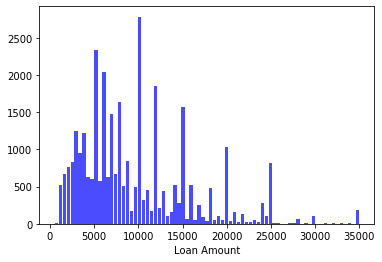

In [0]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

There are 32 000 rows of data so the scatter plot may take a little while to plot.


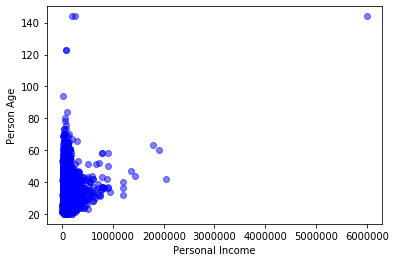

In [0]:
print("There are 32 000 rows of data so the scatter plot may take a little while to plot.")

# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Person Age')
plt.show()

####Crosstab and pivot tables


Often, financial data is viewed as a pivot table in spreadsheets like Excel.

With cross tables, you get a high level view of selected columns and even aggregation like a count or average. 

- Create a cross table of `loan_intent` and `loan_status`.

In [0]:
# Create a cross table of the loan intent and status
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


- Create a cross table of home ownership grouped by loan_status and loan_grade.

In [0]:
# Create a cross table of home ownership, loan status, and grade
print(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))

loan_status               0                        ...    1                   
loan_grade                A     B     C    D    E  ...    C     D    E   F   G
person_home_ownership                              ...                        
MORTGAGE               5219  3729  1934  658  178  ...  321   553  161  61  31
OTHER                    23    29    11    9    2  ...    6    11    6   2   0
OWN                     860   770   464  264   26  ...   31    18   31   8   5
RENT                   3602  4222  2710  554  137  ...  981  1559  423  99  27

[4 rows x 14 columns]


- Create a cross table of home ownership, loan status, and average `loan_percent_income`.

In [0]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
                  values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


- Create a boxplot of the loan's percent of the person's income grouped by `loan_status`.

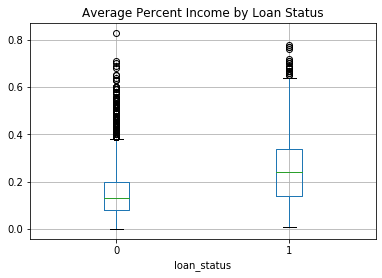

In [0]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

###Outliers in credit data


####Finding outliers with cross tables

- Print the cross table of loan_status and `person_home_ownership` with the max `person_emp_length`.

In [0]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


- Create and array of indices for records with an employment length greater than 60. Store it as `indices`.

In [0]:
# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

- Drop the records from the data using the array indices and create a new set called `cr_loan_new`.

In [0]:
# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

- Print the cross table from earlier, but instead use both `min` and `max`.

In [0]:
# Create the cross table from earlier and include minimum employment length
print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


####Visualizing credit outliers


- Create a scatter plot of person age on the x-axis and `loan_amnt` on the y-axis.

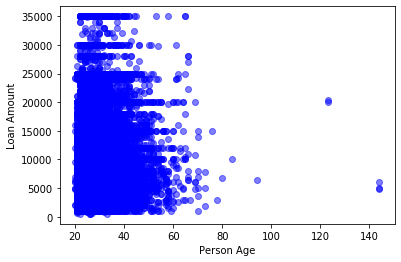

In [0]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

- Use the `.drop()` method from Pandas to remove the outliers and create `cr_loan_new`.
- Create a scatter plot of age on the x-axis and loan interest rate on the y-axis with a label for `loan_status`.

In [0]:
import matplotlib

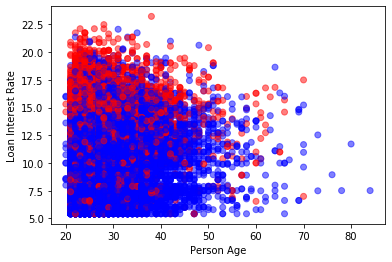

In [0]:
# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

###Risk with missing data in loan data


####Replacing missing credit data


Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  ...  cb_person_cred_hist_length
105          22  ...                           4
222          24  ...                           2
379          24  ...                           3
407          25  ...                           2
408          22  ...                           3

[5 rows x 12 columns]


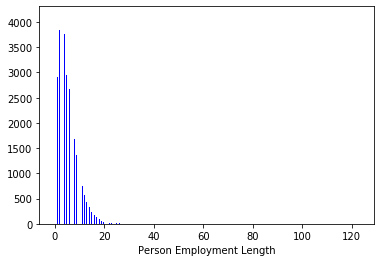

In [0]:
# Print an array of columns with null values
print(cr_loan.columns[cr_loan.isnull().any()])

# Print the top five rows with nulls for employment length
print(cr_loan[cr_loan['person_emp_length'].isnull()].head())

# Replace the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

####Removing missing data


In [0]:
# Print the number of nulls
print(cr_loan['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)

3116


You've been looking at numeric columns, but what about a non-numeric column? How would you handle missing data in the column person_home_ownership which has string values?



```
Replace the data with the most frequently occurring value, Rent.
```



## 2.Logistic Regression for Defaults

With the loan data fully prepared, we will discuss the logistic regression model which is a standard in risk modeling. We will understand the components of this model as well as how to score its performance. Once we've created predictions, we can explore the financial impact of utilizing this model.

In [0]:
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression(solver='lbfgs')
clf_logistic_single.fit(X, np.ravel(y))

# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.4586918]


####Multivariate logistic regression


In [0]:
# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.2253171]


####Creating training and test sets


In [0]:
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 8.34020099e-02 -6.02470833e-02 -3.28983416e-05]]


###Predicting the probability of default


####Changing coefficients


In [0]:
#@title
ind_1 = np.array([22105,  2296, 14465,  6311, 12541, 24385,  7976,  8651,   439,
       19186,  6011,  5020, 17708,  6522,  6056, 15660,  3849, 18564,
        6557, 25900, 23887,  8721, 27106,  7805,   313,  6331, 21957,
         973, 25234,   715,  7993,  3547, 17607, 24777, 11573, 22117,
       11605, 21657, 22153, 17655,  9468,  5433, 13873,  5345, 14576,
       26265, 23181, 17998, 19626,  1808, 28227, 26152, 14077,  6081,
       29253,  9544,  8192,  1388,  2561, 14739, 24612, 22793,  8761,
        5180, 21006,  2155,  5383,  8499,  9792,  2292, 13610, 18022,
       21024, 28563, 24505,  9903,  1099,  4720, 24247, 28087,  7604,
       16947, 27069, 25519, 14715,   615, 28188, 22601, 15561, 17524,
        2373, 25366,   738,  8396,  2590, 15601, 23490, 14058, 10465,
       16252, 10305, 24234, 18609,  2173, 15551, 10404, 18550,  3033,
        9685, 17114,  8633, 21771, 13989,  4752, 15798,  7702, 21710,
       16272, 11147, 22993, 26874,   539,  7293, 16462, 14124, 28361,
       20402, 20603,  3778, 12301, 14434, 22590, 23047, 11756, 11710,
       15244, 17486,   776, 10947, 13229, 17399, 25699, 25361, 25165,
        3744, 14112,  6693,  5244, 22544, 21081,  5114, 24288,   363,
       10521,  7137,   784, 23948, 26085,  3949, 16870,  9274,  3897,
       21242, 28211, 24172,  1126, 21728, 24243,   580, 19762, 18308,
       14381, 10883, 17463,  8392,  8010,  7761,  7866, 16235,  6587,
       21836, 28348, 24089,  7431, 13176,  7910,  7559, 17928, 17145,
         222, 24347, 26141, 15270, 29250, 25487, 17521, 24202, 13723,
       23586, 25797,  2563, 16879,  1323, 26823, 21152, 16160, 12196,
       13980, 27368, 27661,  9406, 26796,  6689, 12252, 21994, 18515,
       13228, 11326, 10252, 15744, 25036,  3876, 13191, 11453,  7841,
       17153,  5398, 21906,  7128,  2828, 16552, 11051, 11033,  5104,
       29203, 10287,  6656, 16425,  3857,   278, 18838, 26812, 10422,
       23075, 22602,  9588,  8805, 16220, 14496, 12497,  2168, 14665,
       18227, 25031, 22558, 13061,  4439,  6734,  3473,  2710, 19529,
        8658, 23543,  4478, 29409, 12577, 12036, 24488,  6717, 15417,
        2881, 24806, 21695,  4233, 13101,   477, 17478, 28043,  9187,
       26438, 26158,  5723, 22872, 18373,  5427, 18134, 18951, 14214,
       16270, 28974,  7084, 20145, 29324, 18274,  5001, 20068,  1362,
        6789, 20457, 10256, 10320, 28044, 18767, 17987, 17205, 17697,
       11653, 25723, 26899,  8268,  8648, 11182, 23132,  9861,   852,
       13950, 22278, 18316, 14000, 26639, 14129, 28451,  5425, 22661,
        6388, 26269, 21506,  6584, 13607,  4853, 18826, 22636, 10451,
        8899, 14503,  7687, 17137, 24919, 10162,  6161, 25174, 20034,
        3513, 23161, 27145,  4381,   995,  5119, 27669,  2040, 20047,
       21563, 11633,  5429, 16560, 20357, 28529, 27200, 24633, 15936,
        2418,  3697, 22534, 21160, 23786, 18685, 15018, 22240, 28953,
         570, 20723, 23344,  9828,  5874, 13124,  1309, 21504,  1409,
       21614,  2087, 22884,  6828, 20849, 16729,  5110,  2779,  3621,
        6198, 27635,  5542, 22787, 27950, 14934, 25280, 18030, 10251,
       22256, 12885, 27226, 22955,  4238,  2279,   878,  4504, 12935,
        3281, 27803,  1127,   792, 13953, 14743, 27282,   986, 11780,
       19113, 14864, 11859, 27863, 17353,    67, 23446, 17381,  4292,
       27588, 12839,  9841, 24890,  3807, 11317, 19367, 29307, 26703,
       26271, 21655, 25912, 19065, 16416, 25720, 21740, 18788, 18072,
        8667, 16406,  5275,  3497,  1226,  9418, 10799, 21815, 13561,
       10534, 18610,  6437, 12679, 11366, 20961,  1825, 15546,  4665,
        9582, 26711,  1149, 25492, 16715, 21376, 27266,  5446, 16934,
        5649, 15886, 17847,  3413, 13804,    10, 25517,  9183, 18123,
       11425, 19220,  2265, 23408,  7112, 29232, 15740, 29388,   224,
        7750, 12688, 14552, 12335, 23484, 17199,  2564,  7597,  1352,
       12828,  2663, 11529,  2375, 23185,  2807, 15918, 29230, 15699,
       15509,  8827, 23257, 26533, 18656, 12520,   250, 15728, 11749,
        1901,  1635, 26902, 16865,  6226,  7565, 26179, 21331, 16015,
       15589, 25934,   471, 11728,  6218, 14741,  7271,  7464, 15961,
       13558, 11677, 13712, 18257,  6768,  4130, 11403,   576, 17968,
       11840, 18359, 13709, 18897,  8021,  3168, 24408, 17174,  2030,
        4678, 18069,  6528, 25827, 16470,  5076, 21663,  9755, 22137,
       26857, 18783,  4058, 10204, 16914,   338,  8916, 16655, 19514,
        7463,  7372,  5420, 23772, 24027, 25813,  7126, 23294, 25537,
        4650, 22482,  7735, 23554, 16479, 16346,  9512, 21186,   844,
       21454,   343, 18417,  7926, 20681,   383, 24748, 28634,  1893,
       27474, 13243, 27882, 13591, 16849, 22694, 18493,  9894, 17764,
       26155, 20894, 13769,  9698,  9534, 11162, 27285,  2718,  1420,
        8996, 17312, 21207, 16810,  5382, 13279, 26847, 15506, 17575,
       10658, 20836, 22232,  5246,  1277,  2722, 27372,  2661, 24470,
       16343, 15329, 11606,  8859, 26284, 29159, 19503, 20215, 28250,
       24811, 28388, 27919, 15511,  5992,   166, 10221, 23833, 24792,
        7294,  3537, 18122, 19753, 15154, 21226,  8823, 23393, 10194,
        3835,  6783, 24096, 27160,  4535, 26018,  1002, 17475, 19201,
       10855,  9745, 26529, 19887,  2789, 23741, 17776, 17972,  7379,
        1926, 10666,  3016, 11557,  6898, 25518, 27435,  4874, 10950,
        3008, 28107, 25351, 26946, 28150, 24609, 14033, 25200,  8893,
       24611,  1776, 12117, 18200, 25286, 27956, 23961, 11637, 26578,
        7823,  4223, 21821, 27404, 19422,  4284, 20906, 25309,  6878,
       13505, 23805, 12044, 14887,  4728, 28381, 17778,  2680, 21745,
        7665, 23508, 17680,  2857, 25479, 16412, 22387, 29411,  4641,
        3381, 13112,  7764, 19461, 14123, 13701, 21474, 24161, 13238,
       23778, 16951, 10598, 12507, 24951, 23555, 23803,  1894, 17187,
       24853, 18461, 19306, 11922, 18311, 12278,  3081,  5102, 15686,
         146,  4672,  2433, 19725,  9961, 18444, 25271, 26445, 18393,
        3522,  6869,  9080, 12378, 10293,   587, 21708, 16554,  6136,
       20262, 14243, 12994, 12237,  3846,  2781, 16228, 27581,  1620,
        5140,  6461, 17015, 24184, 20073,  2264, 14507, 29323,  7588,
       26868, 26101, 23331, 21875,  6772, 24794, 21704, 18721, 23630,
        8609, 14745, 28162, 24847, 24014, 12652, 21074, 23380,  2221,
       22749, 28050,   105, 22810,  7886, 15197, 28424, 14065,  1654,
       27947, 16868, 18859, 13964,  4741,  6169, 24673,  8792, 10929,
       27925, 15862, 19168, 11442,  9358, 15623,  9216, 24827, 12267,
        2029, 21786, 12474, 21929, 22808, 17372, 18933,  5087, 28873,
        5906, 16458, 19219, 13346, 15757, 13731,  3301, 16363, 25186,
        1820,  7669,  8258, 23274, 15572,  4649, 26506, 20818, 13521,
        6454, 21191, 22176, 23613, 13146,   344, 27680, 18314, 12723,
       13597,   560, 10302,  9541, 17045,  1571,  6231,  3034,  3743,
       16559, 11282,  8631, 22628,  8256, 21307,  8494, 13502, 17824,
       14125, 16153, 25892, 26424,  3347, 11167, 12538, 10524,  7742,
       23333,  5950, 13639, 11784, 10429,  8864, 21428, 11796, 14606,
       10350,  8900, 14023,  5787, 20987, 28125, 10661, 21035,  2531,
       29000, 29147,  3977, 27721,  4220, 20950, 10564, 27002, 25805,
       21825, 16993, 21753,  3363, 26894,  4573, 22174, 24484,  1175,
       15273, 17817, 15030, 18113, 19631, 13682, 24831,  2035,    63,
       11197,  2436, 22508, 17767, 25332, 15723, 12333, 28523, 28693,
       23206,  4585,  6467, 20678,  1272,  7195, 14493, 11474,  6568,
       22399, 27943, 28496, 19687, 26143,  5458, 14341,  3716,   130,
       22384, 16628, 12617, 19095, 19716, 10924, 27026,  9776, 21817,
        4370,  6761, 21458,   199, 25574, 21580, 29210, 10448, 19582,
        1310, 13335, 25232, 26840,  7708, 12326, 15682, 13565, 12494,
       26415, 23823, 28291, 15054,  1131, 22440, 22948, 26181,  2924,
       20205, 18451, 14461,  9011, 28937,  7302, 18924, 22999, 13605,
       19894,   370, 18757,  1667,  1503,  3667,   976,  7448,   903,
        4566,  2126, 11198, 27940,  8608, 20248,  7040, 15451,   702,
       26087,  3468,  5381, 19246,   877, 27681, 29433,   487,  9110,
       12971, 28520, 23894, 11531, 10091, 29225,  2224,   162, 21290,
       13574,   129, 17712,   420, 17956,  8204,  4735, 20143, 12119,
       22258, 27283, 23594,  5651, 14281,  5679, 12603,   585,  5591,
       18747, 13655,  2763,  4694, 29408, 18243,  9227,  1143,  2202,
        3683,  1659,  8276,  6362, 14769, 15047, 24542, 16101, 20418,
       26980,   242, 14753,  3656, 19267,  1946,  6280, 29092,  1380,
        6476, 24855, 28580, 24490,   996, 16165, 20554, 23513,  9639,
       27707, 12661, 28897, 25961, 11150,  7879,  8610, 17119,  3195,
         630, 14018, 13355, 29171,  3652, 14828,   884, 19315, 24054,
        1145,  6098, 14409, 27508,  7519, 14525,  5841,  3060, 12719,
         256, 11443,  3542, 25815,  4637, 24335,  7711, 26244,  3817,
         556, 24079,  4818, 19058, 18827, 20802, 21679, 17811, 20098,
        7437, 19988, 28012, 11534,  2668,  4894, 25389,   289,  5526,
        4467, 17451,  7266, 27518,  3562, 19181, 25261,   525,  4773,
       12452, 27300,  3238, 28061, 20564, 18611,  3387, 16828, 18563,
        3058, 22716, 18620,  9854,   725, 10795, 15151,  9757,  7783,
        5284,  7899, 13431, 18152, 13196, 26614, 23394,  8884, 25806,
         337, 14255, 28912, 11130, 14726, 16398, 13882, 14487, 23897,
        3659, 11090, 21391, 20147,  8244,  2011,  6659, 19364, 17425,
       28302,  2946, 26758, 17958,  1303,   730, 16723,  5022, 23487,
       20619, 14562, 16832, 15841, 23744, 16821, 11750, 20867, 27804,
       11114,  7624,  1514, 22937, 12528,  4300, 16025,   107,   991,
       11916, 13801, 28338,  9286,  2667,  7295,  4205,  7189, 25634,
       12500,  4734,  8979, 23452, 16574, 23326, 13170, 28161, 16543,
       12332, 28131,  5961,  9360, 19322, 19269,   602, 10389, 11544,
        8689, 22994, 15258, 27488, 19772, 13086, 11900, 25229, 16674,
        2788, 10158, 26463,    27,  3465, 20837, 21422, 20012, 10723,
       26378,  3841, 14365, 20733,  3936, 10026,  1745, 17795, 26213,
       27302, 22167,  8223,  4345,  1430, 25579, 27873, 13792, 22998,
       11708,   964,  6795, 25177,   409, 29007, 25534, 20943, 23177,
        4094, 26243, 13115, 28611, 10479,  7925,  2801, 24996,  5010,
       14371, 12969,  8552,  8742, 16047,  9105, 14436,   697, 16333,
        7471, 25552, 16022,  9405, 14332,  1161,  7420,   512,  7160,
       15529,  9436,  1376, 21498, 11059,  1884, 12936, 22272, 13958,
       17308, 18486, 28196,  9740, 27841, 20005,  4782, 11166, 28467,
       11068,  7342, 18081, 12380,  5332,  2387, 14578, 15785,  7680,
       27007, 17352, 24610, 10017, 25072, 15497, 23976, 18140,  6337,
        5205,  6105,  4601, 15387,  1674, 20485, 14526, 19633,  7281,
       25506,  9795, 13788, 27236, 16587,  1918, 10952,  4191, 22809,
         913,  2798, 19708,  4061,  6620, 27090, 18176,  8798, 19804,
       12040,  5976,  7025,  1686, 17489, 18254,  7664, 22996,  5850,
       20349, 24615,  9627, 25976, 19051, 24369, 25821,   594, 19244,
       15891,  6556, 16833,  2019, 24193, 14229,   774,  8987, 26277,
       28450, 10875,  7537, 19895,  9517,  2631,  4982, 23891, 22159,
       27854, 28539, 12471, 27906, 25771, 23903, 10744, 27886,  9701,
       27534, 15438,  5021, 26044, 29065, 23754, 11566,   722, 17265,
       16862, 12771, 14342, 18198, 12254, 21615, 21073,  3067, 24037,
        6683, 11045, 10856, 26399, 20578, 25119, 26124, 16322, 15005,
       21138,  4454,  6219,  4149, 19951, 24532,    15,  6237, 20489,
       20944, 22259,  1113, 24896, 28761,  8029, 29153, 13557,  8107,
       12307,  5159, 28428,  4213, 23069,  1142, 10243, 28943, 23558,
       12949,  4018,  2158,  8002, 28275, 15299, 12370,   880, 20182,
       28892,  4887, 20788,  8925, 15152,   385,  9695, 12467,  8895,
       23524, 17458,  6127, 16635, 13445, 18856,   589,  5378,  6191,
       23253,     2,  3087, 24680, 15485,  2833, 27261, 13813, 17904,
       22481, 28497, 27944, 23230,  9709,  3102, 29054, 22799, 28295,
       22346, 27244,  6907, 11505, 23635,  9708,  5228, 25784,  7798,
       24510,  6126, 25322, 15600, 21503, 15706,  5625,  8336,  6263,
       23018, 18863, 11292, 19546, 14522, 16230, 14589, 29238,  7324,
        5535, 13671,   943, 18361, 26811,  6777, 20660, 18754,  3826,
        8117, 10134, 27689, 17264, 20501,  1363, 22001, 24721, 23872,
       11214, 26076, 13721, 25155, 13819, 12850,  8130, 19650, 13733,
       21004, 15741,  7840, 19625, 13353, 11369, 19777,  4350,  6130,
       27910, 14847, 19780, 14695,   740, 24229,  1454,  7212, 20980,
       23842, 24692, 13021, 28577, 28349, 27065,  9355,  3748, 23016,
        2161, 22143, 10345, 21131, 17798,   600, 23182,  6660, 20897,
       23010,  2188, 19242, 27715, 20688,   980,  4056, 19907,  4679,
        6254, 13817,   726,  4840,  4579,  5573, 15494,  5177,  4612,
       20821, 26110,   893,  3348, 11642,  3903, 13267,  2036,  2480,
       17397,  7808, 10077, 29041, 21088, 12063, 26090, 16314, 29034,
        8438,  7388, 26893,  2477, 24631, 21373,   666, 10498,  5243,
       24256, 11036, 27144, 22374, 21012,  3938,  2610, 13135, 22010,
        6790, 18474, 22951,  5390, 11175,  2344,  8745, 13658, 13019,
       15306,  6855, 17886,  9649, 27622, 19212,  7093,   470, 24289,
       12589,  7015,   244, 21683, 11184, 14456, 11567,  8093,  7002,
       19123, 11152,  5763,  2157,  8728, 27351, 27396,  1871, 12882,
       23748,  3357, 20764, 28738,  2203,  1976, 15394, 16468, 21272,
        4664, 16020, 19518,  8138, 22455, 17807, 26035,  1599,  3149,
        9389,  8399, 16318, 17560, 29305, 15617, 28262, 23107,  3196,
       25239, 23013, 27708,  1137,  4586, 10992, 16898, 11286,  9210,
       23312,  8290, 18033, 25620, 11014, 19189,  6204, 16190, 20796,
       22625,  1088,  1540,   106, 17206, 25676, 26997, 22142, 28751,
       29199,  3143, 26562, 23840, 21516, 20035, 18083, 23711,  6203,
       15384, 15639, 18701, 22510,  8136, 13670, 22210, 18691,  9242,
       20348, 22548, 25502,  7874, 25292,   848, 19477,  9847,  9131,
        5706, 17727,  5854, 17545, 22829,  1905, 24196, 10461,  2342,
        7535, 26805, 16352,  9749, 13381,  9801,  1237, 16175,  1176,
       25282, 27899,  4109, 14022, 11333, 18358, 17105,   793,  9538,
       17226, 13708, 26943, 10771,  3791,  1502, 27197,   307, 19774,
         696, 27884,  7443,  4251, 21885, 27649, 14189, 17709, 13734,
       28181, 16193,  6918,  4530, 25871, 10787, 10060, 18998,   823,
        8070, 14760, 11116, 23770, 18967, 12219,  6886, 19864, 26613,
        8750, 23239, 10646,  2604, 18726, 20353, 16627,  8159,   782,
       14902, 18638, 25096, 18861, 29206,  1990, 25938, 29045, 28352,
       20162, 26203,  7815, 16321, 17519, 10550,  8022, 12863,  8265,
        8182, 11289, 18365, 19509,  2331, 27259, 22757, 17577, 12244,
       18648, 15008,  8969,  9337, 18442,   442,  6356,  7679, 17271,
        2474,   207,  2614, 15262, 28689, 18640, 25985, 11599, 16313,
       26930, 11609, 21640, 17888,  7364, 18230, 18191, 17431,  8982,
        9768, 21071, 10800, 27511,  6409, 12499, 11318, 14823,  2343,
       19877, 12927, 14161, 25454,  3622,  8368, 25830, 13439,  7690,
        1818,  7785,  2673, 19871, 18052, 20931,  5026, 10306,  2882,
       21596, 16079, 15515, 16514, 20161,  1883, 18182, 13317,  4087,
         352, 23392,  4673, 13822, 18491, 16094,  6632, 22796,  8613,
       13673,  5978, 28477, 14574, 15458,  5725, 18287, 24509,  7883,
        3934,  2013,  2500, 28479, 20840, 28400,  7818,  9149, 20657,
       18584,   700, 26604, 25469, 16293, 20371, 28036, 12357,  3929,
        6847, 19136, 14858, 23084, 22929, 19857, 14569,  9911, 25811,
       26436, 20135, 20119, 16576,  5844, 15924, 12825,   257, 23637,
        2047, 18892, 25346, 16520, 20449, 19745,  5487, 25940,   281,
        5242,   339, 15733,  8199, 10698,  9516, 13088, 26801,  6857,
        3291, 23299,  8904, 15541, 23235,  3257, 28364,   789,  5232,
        7929, 15810,  1988,   767, 15427,  5108, 22312, 22658,  7037,
       12751, 10236, 21631, 23202,  2541,  6222, 17906, 12460, 25402,
       20415,  6153, 13152, 18512,  8967,  3906, 23321, 14950, 17848,
       20247, 23079, 27666, 10138,   857, 28930,  7782,  4151,  3494,
       17462, 21841, 13806, 14617, 27080, 23281,  6141, 15136, 24815,
       16201,  6145, 22070, 15029, 19823, 27743, 16505, 16811,  6357,
       21593,  7375,  3856,  6261, 18146, 18735,   898, 22470, 21746,
       28982, 25318,  2634, 18633,  8965,  5276, 21405, 13522, 19672,
       23828,   950,  7658, 20204,  7603,  8009, 29370, 16570,  3290,
       26985, 12973, 10807, 27081,  9024, 19553, 21629, 20521, 17241,
         171, 16938,   176,  6238, 24709, 13937,  4081, 11546,  6630,
       18755,  7179,  1313, 10468,  4190, 19155, 16141, 12340,  9023,
        3510,   436, 24836,  8706, 14954, 15902, 11330, 28996, 24622,
        7581, 21942, 20883, 24465, 29001,     7, 15085, 11905,  9384,
        3873, 26409,  7716, 13380,  4171,  4258, 23340,  7927,  1298,
        3545, 15069,  8639,  4464, 21159, 13341,   547,   754,  7318,
         922, 23544, 20697, 14711,  7755, 15233, 14220,  8437, 12865,
       10656,  3446, 20607, 16523, 11248,  2860, 19054, 27028, 23384,
        9165, 29220, 20364, 22806,  9766, 13860, 14343, 18751,  8303,
       18906, 11048,  3113, 18168, 29113, 14568, 23737, 17424, 15432,
        1969, 12282, 13783,  9017,  5792,  5447, 10074, 19405, 27636,
       15512,  5816, 17181, 22480,  1322,  9095, 26326, 23453,  8301,
        4082, 20083, 15135, 10759,  5913,  4998,  9492,  1307, 17095,
       22352,  4340,  4901, 21389, 25244, 27066, 10299, 15088, 13033,
       29182, 14128,  5217, 10042, 15748, 19084, 17573, 16428,  1344,
       20301, 12527,  2297,  7710, 15231, 11584, 17864, 29124, 11564,
       16843, 26354, 28740,  6691, 24030,  6643, 25303, 21262, 26788,
       16341,  5436, 17332,  3685, 19323, 14155, 22782,  7062, 20738,
       27986, 27654, 17276, 17331,  3828, 12902, 17025, 23839, 20212,
       15147, 13017,    29, 20973, 17829,  4709, 16236,  7521, 22367,
       21125, 26822,  6600, 17386, 15064, 12000, 13002, 17911,  5261,
       17150, 25037, 22113, 15356, 29456, 13266, 25337, 13523, 13705,
       10594,  2493, 13881, 15240, 19069, 25331, 17439,  2787, 26412,
       16712, 18161, 28986, 12072, 27709,  1001, 22664, 13542,  8669,
       20016, 27537, 14489, 13957, 11356, 12235, 17857,   213, 26664,
       23949, 27929, 12668, 27205,  1782,  4271,  9403, 12561,  8032,
       13548, 24972, 15391, 21440, 26068, 12827, 20952, 20185,  3651,
       23203, 24554,  2652, 11740, 26816, 14351, 23146,  1572, 20857,
       26842, 17033, 17912, 27104, 21457,  9178,   448, 24416, 27140,
       12811, 20082, 22118, 13880, 25775, 11315,  8891, 27865, 25387,
       17211, 18576, 12399,  9159, 22907, 15424, 17160, 22931, 15943,
       12240,  8796,  7554, 14669, 24648,  8377, 13482, 26249, 15636,
        8171,  6030, 24092, 12951, 27552, 24065,  1189, 10136, 19187,
        2783, 14876, 20991, 10846, 20013, 11402,   790, 11070, 28581,
       27075, 27151, 23992, 15454, 22819, 14598, 24345,  1296, 18317,
        7415, 28780, 18883, 21477,  6815,  7401,   695, 28923, 21052,
       23465,  1134, 14734, 21421, 27774, 13540, 23269,  9947, 28733,
       13905, 24795, 17644,  5783, 21179,  1335, 10108,  7239, 28168,
        1494, 11437,  5942, 19609,  1962,  5578,  6976, 12623, 20446,
       16683, 11481,  1717, 10557, 18195, 11075, 26843,  4771,  9104,
       23036,  5567,  9009,  3777, 28019, 16942,  5111, 20396,   495,
       21896,  1273, 16460, 21533, 11142, 13430,  3402,  7522,  8289,
       16890, 19170, 18171, 10734,  6561,  3474, 16744,  8493,  1769,
       19302,   167,  4221, 24596, 18369, 12615, 11151, 13322,  7919,
       13413,   736, 14842,  3479,  3428, 11417,  7467,  6887, 27297,
        7772, 15486, 20141,  7974, 25761, 14629, 13220, 24285, 17387,
       17663,  1155, 16161,  7123,  1704, 13281,  7287, 21846, 27868,
       19814, 10817, 11915, 11718, 25058, 12075,  4711, 14770, 14437,
       23089, 14979, 22129, 25556, 10484,  6072, 26545, 17013,  4986,
        8248, 22744,  4374, 15404,  3650,  8959, 14407, 29227,  2273,
        1753,  8646, 10450,  3248,  1238, 10585, 11679,  5550, 15882,
       10235, 22765,  3518,  4774, 19709,  5619, 26448, 28844, 19890,
        9498, 29439,  5558, 18141, 27399, 18232, 15374,  1069, 20830,
        8937, 17670,  2045, 14987, 24246,  5920,  8410,  1812, 10874,
       27375, 20072,  3362, 10635,  1367, 11232, 19142,  4395, 10665,
       18280,  6187, 22916, 25042,   306, 24355,  4525,   380, 14759,
       24213, 29184, 10554, 20150, 10842,  9691, 10965,  2858, 14736,
       14677, 26680, 13955, 16118, 19156, 19616, 11886, 20525,  7831,
        7472, 21233,  1578,  8537, 23212, 15658, 18987, 10770, 10619,
        8401,  9298, 16030, 22858, 17101, 26832, 10565,  5933,  2007,
        8776,  6841,  5226, 21475,  3660, 28296,  4166,  6985, 15300,
        8688, 28362,  7328, 23991, 26183, 21120,  2200,  9928, 26779,
        5462, 10051, 24402,  4693,  3521,  3319, 19163, 22072, 18796,
          45, 19522, 27459, 18953,   606,  5859, 21434, 27455, 26069,
        7509, 18787,  5753,  9348, 19995, 24182, 23933, 12325, 16240,
        2407, 21964, 18110, 12802,  7771,  4469,  8954,  3896, 23098,
       29231, 22145, 13053, 19668, 20023, 22050,  1784, 20924,  9322,
       27727,  8468, 19254, 28941, 19878,  6050, 16371, 21037, 29363,
        5603, 27694,  4922, 19040, 25440, 28458, 12687, 16071,  9952,
       23218, 11319, 17321, 16180, 16480, 19572,  9153, 20759, 24922,
       25927,  8283, 27922, 17763,  9750, 10151,  1603, 21569, 25970,
        9897,  2717, 23914, 20475, 14344,   427, 11994, 10941, 13494,
       24206, 15612, 28632, 25117, 22543, 15610,  6765, 15230, 14609,
       10928, 26726, 21359,  2969,  2883,  3606, 26911, 15216,   230,
        9262, 13590,  2383,  4688,  3392, 26308, 20294, 27299,  6336,
        8006,  6958, 11848, 13913, 27822, 12764, 18394, 17307, 15629,
       15332, 20642, 12908, 26255,  6664, 23377, 17322,  9857,  3272,
        6366,  6622, 20533, 10493, 10400, 16782, 19874,  4235,  1567,
       21154, 15004, 16817,  9010, 21816,  5069, 26022, 12176, 13911,
       15261,  2320, 19429, 27853,  1680, 24689, 19662,  2081, 22656,
       22280, 22151, 15471, 26102, 29028, 16464, 22687,  4980, 18593,
       17701,  2086,  8069, 15920, 24878, 17365,  6913,  6055,  4849,
       28245, 17099,   483, 10943,  2569,  5003, 20895,  6524,  8989,
       21413, 21923,  2977,  9224, 19145, 18377, 15656,   972, 22166,
       21684, 17589, 25347, 18988,  2181, 14471, 20722, 24421,  6837,
         665, 20829,   985, 25461, 25220, 28868,  5520, 13093, 26732,
       15722,  9851, 11758, 23987, 20741,  5532, 17195,    54,  9148,
       27181,  5183, 18679, 28134, 14540,   342,  1490,  7898, 23666,
        4543, 12614, 12068, 11581, 10090, 21772, 11241, 19024, 26627,
        2907, 20560, 27125, 11880, 18887, 23548,   227, 13600, 11513,
       14141,  8476,  4352, 25233,  4293, 10239, 12081, 27879, 26153,
       11352,  7125, 24830,  7774,  9457, 15092,  3713,  9681, 20939,
       15747, 11097, 11475,  2967,  7049, 22574, 27896, 12470, 22228,
        9594,   185,  5470,  1186,  2358, 28156, 19140,  6645, 22897,
        2462, 15870, 19705, 10931,  2988,  6900, 16367,  4206, 20421,
       13564, 19589, 20450,  8246, 27374, 16163, 21462, 14258, 23400,
       17601, 10700, 17621,  2985,  5901,  3226, 27475, 27559, 16251,
        6315,  4070,  7154, 24429, 17280,  2752,  4458, 19008, 12445,
        1975, 25582,  2415, 17949, 13213,  5665,  9748,  7827, 28790,
        2638, 16238, 12631,   598,  7395, 13765, 26175, 21070, 26377,
       11948, 22520, 12649,  6160, 28047, 23044, 10278, 20440,   243,
       14962,  9692, 18208, 10890,  9791, 20240,  4532, 22903,    18,
       22640, 20932, 12870,  4111,  5495,  1957, 19274, 19001,  9942,
        2274,  4481, 26142, 18613, 13909,  9353,  1368, 22885, 11649,
       23519, 23892, 18144,  7211,  4268, 17873, 10839, 11549, 14697,
       24818, 25817, 26810,  3078, 25945, 12769, 16609, 11158, 18696,
       29180,  4913,   956, 11524, 26496, 25740, 16786, 24066, 23292,
       25171,  3703, 22839, 15287, 20312, 22183, 21367, 13972,  5719,
       24617,  9734, 21450,  9287, 20588,   452, 20702, 29273,  8483,
       12695, 14768,  4165,  2765, 18157,  3453, 10163, 22709, 16654,
       25533,  5061,  8623, 18661, 14783, 13840, 19396, 15195, 13743,
       23780, 26020, 19767,  6069, 18404, 18761, 23667, 15705, 21438,
       21047, 19205, 10758, 13936, 23189, 20752, 17846, 17379, 17558,
       22115, 23339,  9597,  1268, 18337, 19130, 12331,  8907,   818,
       17758,  4575, 16546,  6438, 11838,  9097, 28198, 28193, 24477,
       21143, 17626,  6026,  5688, 12892,   739,  5638, 14873,   411,
       22815,  7511, 21999, 23405, 11963, 16968,  1715, 17329, 21872,
       25890, 25870, 27071, 10352,  3551, 22172,  8500, 25946,  1824,
       22469,  1399, 24605, 18528, 11381,  2078,  4417, 27124, 23686,
        1179,  1103, 26602,  5489,  4984,  7265, 19954,  8703,  6651,
       23559, 27814, 24991, 15452,  8241, 25416, 21404, 22270,  2796,
       28157, 24969,  2861, 14379,  3905,  2270, 15759, 16303, 16907,
        8306, 11464, 26991,  9400, 16530,  3808,  6669, 19574, 17455,
       18016,  5269, 12480, 26278, 18602,   381, 18470, 13354, 17953,
       22676, 22287, 22008,  2096, 23880, 17816, 29104, 22165, 15824,
       21225, 29137,  8402,  6089, 12818,  2939, 18813, 29196, 28538,
       13495, 13994, 27494,  5768, 14511, 23653, 10380, 14490, 21266,
        1604, 17703, 24180,  8109,  7984, 19902, 24711, 22909,   221,
       12277,  8456,  9495, 14324, 21015, 28564,  7262, 22618, 15998,
       14936, 20429, 17267, 10909,  6915, 18688,  4012,  3297,  8511,
       21444, 27392,  1302, 13411, 20707,  1292, 24450,  9902, 17002,
       29453,  4653, 14756,  5028,  5991,  9033,  3053, 21665, 24586,
       16561, 18116, 27915,  5389,  4871,  4516,  2003, 28053,  1026,
        2636, 24535, 25781,  7678,  1311, 12225, 11902,  5866, 19060,
        8429,  1394, 29219,  5081, 22553,  8559,  5187, 28575, 16014,
       24153, 28745, 24277,  2769, 26998, 15904, 29280, 27379, 20017,
       11106, 28018, 12754,  8527, 10660, 15791, 29402, 24305, 22363,
       17388, 23126, 13934, 23320,  8118, 26968, 23658,  7648, 18129,
       28719,   489, 19194, 20160, 25113, 18779, 15446, 17446, 26859,
       15537,  3878,  4787, 27293, 21943, 23724, 22724, 22334, 21300,
       28837,  6132, 21698, 13239,  7986, 27411, 19528, 17946,  4214,
       14866,  8995,  9257, 27473, 17722,  5241,  8848, 20408,  3575,
        9276, 16280, 10582,  8139,  1851,  6124,  8544, 13364, 14829,
        1545,  5694, 26311, 20395, 16217, 22120, 21453, 22209, 10313,
       15352, 17507,  1024, 18759,  7312, 18408, 22389,   391,  6856,
        4815, 17666, 28944, 27874, 18950,  5804, 15090,  5132,  9852,
       28537, 13919, 15876, 21411, 17615,  2687,  8715,  4695, 25681,
         926,   882,  8143,  6039,  8311, 28585, 11575, 13292, 24121,
       14093, 16098, 23956,   764, 11140,  2348, 26807,  5450,  3960,
        3351,  9548,  6572,  8826, 17652, 14320,  7674, 19083, 25933,
        8275, 16540,  4074, 27251, 23963,  8065,  7397,  5741, 11899,
       21540, 24758, 25876, 24069, 26480, 26574, 17452, 26391,  3709,
       16214, 16760, 11178,  6974,  2926, 14250, 14822,  4307,  9908,
        4157,  6947,  7855, 18395, 25181, 20238,  3460,  4296,  9452,
       18667, 16373, 17569, 13537, 26344, 28899,  2350, 21317, 25822,
       13366,  1462,  4266, 16261,   510,  6778, 13107, 12103, 27491,
       26971,   628,  9804,  7279, 12672, 12909, 19231, 24211, 10435,
        5592, 14197, 16605,  5203, 20717,  4154, 15312, 15309,  7465,
       24944, 26665, 23244, 25719, 23958, 26630, 11296, 28595,  1845,
       22007, 17692, 22888, 16773, 11199, 27671,  7486,  8232,  4000,
       20031, 29357,  8533, 17112, 28230, 19766,  4168, 18435, 25960,
       12810,  6626, 22057, 18034, 27598, 20731,  6479,  2921, 20765,
        4899,  7208, 20549, 25575, 12880,  1615,  2594, 28514, 12039,
       18253,   117, 10146,  3756, 23562, 18169, 22498, 28821, 29039,
       10884,    21,  8611, 10357,  6594, 27010, 10765, 13099, 26834,
         984, 12429, 24051,  9966, 24342,  9879,  7667,  4137,  8912,
       11748,   113, 26932, 11540, 16361, 26450,  1275,  6207,  1172,
       22732, 16777, 10420,  1754, 12548,  1196, 22960, 27790,  2371,
       27672,  3410, 12930, 12857,  2711, 26351,  3489, 19674, 11885,
       18626, 23096,  7331, 10540,  4691,  3090, 12983, 26323, 22502,
       20928, 27587,  3855, 29222, 16055,  1973, 18269, 16998, 23751,
       17877, 22981,  4237,  4929, 19535,  3733, 10214,  7515,  4881,
       23713,  5323, 16813, 16905, 27202, 18581, 18513,   653, 20214,
       15814,  4977, 22870, 19263, 27228, 15887, 16495, 22623, 12478,
        9763,  1593, 24033, 25109,  6200, 28433, 14585,  9186, 13944,
       22898, 18487, 22902, 12746, 21514,  4242, 24198,  3480, 15702,
        5977, 11684, 20086, 17017, 12813, 28637, 27730, 17564,  2657,
        9652, 18865,  6071,  7173, 27653, 21019, 11696, 27337,  1773,
       17884, 27848,   506, 27718, 16922,  6025, 13009,  8210, 24126,
       13550,  2153,  2814,  3579, 13326,  3283,  7105,  2606, 23702,
       28099,  1025,  2088, 27203, 11801, 27072,  4215, 28984,   182,
       25371, 17916, 22915,  5536, 10250, 14545,     3,  4948, 14421,
        6867,  7498,  9481, 15400, 20599, 19131, 26127,  2411, 18855,
       10013,  2151, 21109, 20544, 25251, 25705,  7556, 16171, 23521,
        2845, 27816,  4115, 26873, 13720, 26763, 20093, 28665, 24728,
       12118, 18192, 19229, 20230,  5133,  2004, 19573, 12090,  2730,
        6344, 16135, 18652, 24844, 28248,  3425, 10110, 12492, 18108,
         638, 18117,  9595, 29110,  3769, 22033, 17514,  9547, 27764,
       24425, 22710,  6746, 24565, 14348, 19463,  3400, 28203, 27201,
        5835, 22685,  9295, 26596,  8433, 23838,  2998,  4536,   333,
       13572,  5379,  7837,  9518, 12740, 18328, 19183,  7558, 20114,
       27994, 19044, 26571, 24561, 16797,  4705,  3768, 11511,  7975,
       12352, 23917, 19532, 14855, 28784,  8298, 17412, 25689,  6883,
       17919, 24048,  4520, 10549,  2298,  4403, 11110, 11123, 25359,
        3045,  7373, 15406,  1327,  2701, 14605, 26468, 26933, 13269,
       17853, 12545, 28383, 28635, 12034, 16682, 25079, 10200, 24638,
        7510,   550, 21536, 13047, 21754,  8384, 20010,  3369,  7651,
        9507, 11124, 22268,  6978, 24379, 11934, 23237, 12153, 17837,
       10792, 16122, 22941, 22500,  5101,  6079, 15650, 26532, 26455,
       29454, 13971, 17595, 13563,  2494, 18809, 21792, 11761, 17193,
       20375, 20011,  9489, 10789, 22234, 21678,  2780, 28732, 24672,
       29141, 25488,   577,  9783,  4456, 25866,  5105,  7393, 12231,
       18363, 11533, 21265,  3655, 20211, 26439,  4145, 17450, 16823,
       13251, 21164, 18848,  9864, 24940, 29333,  9532,  5215, 27027,
       15457, 26459, 28413,  6989,  4163, 18814, 14817, 18180, 12815,
       10997, 26084, 13619, 20287, 23115, 12241, 18724, 27126, 28426,
       24428,  5330,  9561, 23348,  3124,  6834,  2199,  2038, 14054,
        1979,  9785, 20956, 16966, 18489, 10249, 21577,  5565, 17845,
       21429, 18276, 13293, 28770, 18084, 10171, 13598, 18952,  1881,
       15371, 20877, 13703, 13869, 27211, 14555, 18870,  5198,  3105,
       13862,  9633, 24002, 23649,  5937, 16664,  9540, 20053, 22817,
       11428, 13606, 13669, 23309,   165, 14357,  4755,  5861, 21701,
       26809, 11461, 15768, 10686,   561,  5821, 13202,  4661, 28742,
       19366,  5938,  8589,  2859,  6992,  5249,  6293, 23337, 15598,
       19796, 12050, 12431,  7662,  9346,  2235,  6152, 24463, 19924,
       16090, 23708, 25980, 21599,  5174,  3918,  8520, 28462,   892,
       14784, 16148,  6653, 29288, 22945,  9266,  4201, 22925, 22231,
         743, 11946, 26821,  1917, 17902, 14183, 11272, 15620, 24019,
        6316, 22206,   299, 22373,   424, 15963,  8198,  6763, 17064,
       27350,  8378, 19720,   148,  7347,   388, 13587, 25377, 16549,
        6491,  2764, 17302, 20329, 21579,  6870, 22995,  7426, 20360,
       29146, 14142, 24849, 17801,   248, 22546, 22820, 18469, 22526,
        4962, 16705,  1192, 18309, 17614,  9917,  8960, 10467,  7153,
       16693, 28627,  1900,  5121, 17509,  9565, 19913,  4440,   939,
       21932,  9890,  5800,  4541, 16289,   431, 17941, 19261, 17769,
        3485, 28411, 19555,   804, 12350,  5469, 13795,  9667,  2835,
       16869, 16053,  6726,  5200, 16841,  3023, 15076,  1066, 14127,
       12032, 11029,  1479, 27398,  6324, 21009,  6945,  5502,   319,
       29319, 18629, 11373, 21320,  5834,  1651, 21353, 11121, 20789,
       26659, 26476, 23396, 17111, 20465,  5729,  4797, 22665,  8417,
        2135, 11211, 21487, 20936,  4019,  3464, 14099, 10260, 19837,
       26974,  2236, 21811, 11213,  4410,  9889,  3379, 21146,  5791,
       11006, 27599, 22098,  2694,  5956,  3602,  2101,  1417,  9948,
       19596, 25829,   294, 24993, 10701, 19911, 13657, 15283, 20095,
        5128,  1644,  4393, 10125, 13727, 27292, 19498, 28484, 25398,
       24410,  2217, 28932, 16961, 20646,  6335,  2319, 23673,  4685,
       14090,  2106, 22092, 10124,   396, 18214,  2306, 24722, 28183,
        4989, 26274, 28891,  2062, 10772, 25091,  1471, 12012,  8961,
        5409,  9133,  9673, 12667, 16232,  5058, 19449, 16765, 25923,
        8058,  1316,  7590, 15674, 14485, 16698, 23275,  8224,  4670,
       16288, 15256,  8464,  7659, 12208, 14880, 29226, 16663,  3335,
        2784,  6210, 28878,  1426, 20459, 12496, 19460, 16836, 21545,
       28419, 12041, 15146, 10040, 16151,  5340, 10337, 19091, 22629,
       24309,   896,  2534,  3128, 23878, 27789,  6277, 12339, 14135,
       26924, 23747, 12008, 12644, 17319, 11913, 12804,  5367,  5202,
       10177, 22028,  3682, 22095,  5769, 24295,  6776,  1936, 13738,
        3802,  6179, 28038, 12413, 14237, 25043, 17938,  9959, 16735,
       29011, 26750,  9737, 26238, 12785,  4571, 21067, 19045, 15344,
       26641,  7481, 22976,  3884, 25868,  9646,  6702, 24669,  8059,
       18741,  4528, 11024,  1493, 13066, 23677, 19389, 10995, 20699,
       20940, 14702,   685,  2536, 14943, 10264,   592,  8469, 12547,
       15668, 25368, 11397, 23616, 24341, 29312, 25452, 25240, 21675,
        6762,  5444, 25101, 20848, 24043,  6990, 16615, 10516,  9665,
        5336, 22160, 20400,  1690,   312,  5006, 11839, 10933, 28658,
       27849, 16987, 16710,  3455, 12937, 28571, 15015, 19287,  8734,
        4819, 14399, 24742, 26685, 22379,  7508, 23492, 20458, 16690,
        2405, 17061,  9031, 20419,   121, 22408, 13690, 26890,  5678,
       25937, 10189, 17177, 22580, 22836, 17503,  3766, 27269, 28435,
       27324,  4105,  7971,  4460, 14169, 23701, 24646, 20990, 25375,
        5827,  2085,  9267, 14781,  2827, 23988, 20366, 21075,  4146,
       29317, 26572, 11154,  8644, 12082, 20742,  8924,  8347, 22375,
        6192, 13706, 14137, 11676,  6425,  6123,  1257, 24146, 21394,
       14572, 12245, 16733, 14003, 12037,  7490, 26164,  1499, 14052,
        3300, 23610,  6181,  5357, 10935, 21049, 23930, 23334, 28189,
        1647, 21903,   445,  9924, 29438, 22769, 21933, 25808,    48,
       24898, 19446, 24095, 19115, 23979, 12384,  9437, 22170, 10804,
       19392,  3076,  5620,  9779,  8933, 25264, 25388, 11844, 24952,
        7705, 11261, 18495,  7317,  2904, 11706,  9882, 28271, 29278,
       10447,  1809,  5617, 21982,  1683, 17590, 17393, 10774, 27068,
        4790, 22311,  7734, 15987, 11000,  3079,   842, 17021,  3761,
       26256, 12364,  2919, 12013, 21306,  3874, 13506, 25410, 28241,
        2895,   228,  5145, 17108,  8158, 26361,  3066, 20594, 13291,
       11759, 19873, 11695, 20724, 14315,  3313,   187,  3156, 20152,
        5441,  9723,  2303,  7226, 12502, 20079, 24956, 23871,  4517,
       14909,  1396, 13272, 25044, 25159, 27632, 26192, 16747,  3570,
        8405,  5129, 29002, 11819,  3321, 23449, 29087,  1382, 25601,
       20398,  8697, 28455,  7423, 11938, 15478, 12558,  8803, 13441,
       19412, 22044, 18738,  7888, 19585, 12001, 18660, 12993,  6854,
        5909, 26319, 14738, 19961,  8811, 15428,  2628, 10936, 13388,
       12303,  4564, 18851,  8585, 20589,  9491, 22298,  3674, 25559,
        2647,  7644,  7121,  6806, 17755, 17128,  1482, 24255, 24263,
       16835,  9127, 28907, 15178,  8932, 20635, 27314, 25352,  9892,
       27267, 10864,  9519, 23825,  2959, 16477, 14927, 25800,    11,
        1892, 24442, 10972, 18297,  9999, 22774, 12102, 20002,  8572,
        7983, 22119,  9364, 15290, 28616, 28559, 23633,  7296, 19801,
        2679,  3587,  4619,  6539, 26784,  9478, 10537, 28715, 18065,
       22541,  5730,  4013, 14126,  8154, 23784, 23385, 26573, 23428,
       18558,    44,  2069, 25661, 19075, 11310, 11411, 15856, 15466,
        4613, 19593, 23870,   119, 26628,  2008, 26670, 12076,  2791,
       21844, 13545,  9345,  8906, 16011, 19217, 25856, 24055,  2980,
        9248, 18012,  3589, 10905, 25972, 24140, 11301, 11830, 20335,
        6740, 17294,  5116,  2583, 22003,  9223,  2164,  8831, 22570,
        6538, 15056,  4377, 18525, 21858,  4896, 13812,  8488, 18619,
       26434,  7118, 11500, 15159,  4069, 23310,  1500, 12457, 25810,
       13055, 12397, 28445,  3520, 27091,  5867, 18051, 26854, 25916,
        6982, 15892,  4658, 25578, 26520,  6654, 18464,  5078, 28660,
       26688,  4798,  1819,  6434,  2254, 20651, 12174,  2607, 29443,
        9853, 25349,  5648, 16916, 17989, 10329, 14055, 13886, 22146,
       10147, 26634, 21779,  4378, 27664, 13127, 25763,   958,  9258,
       17965, 10746, 21063,  8227, 23583,  9975, 24970,  2540,    86,
        9013, 28407, 16742,  6792, 28925, 20714, 28599, 15264, 15693,
       21567, 26913,  8439,    88, 10705, 11971, 15909,  2196, 14233,
        8251,  2448,  1631,  3050, 23148, 26740,  3438, 12175, 20316,
        2018,   364, 20967,  7903,  5563,  4185,  9336, 23821,  4698,
       22235, 23067, 29246, 16551,  2693,  4756, 25320, 16617, 20512,
        9300, 22051,    39, 16455,  4330,  9369, 26387, 17027,  6986,
        2163, 22395, 28305, 24895,  4726, 18972, 18975, 20977, 14193,
       20795, 17116, 16707, 27665,  5322, 12434, 16329,  3515,  1104,
       25394, 13533, 16826, 22073, 16875,  1813, 29228, 17289,  1950,
       25152,  1044, 14624, 26543,  5955, 15536, 15724, 20424, 28976,
       13789, 21309, 21847, 28792, 11789, 16125, 12822,  1009, 17214,
       23266,   772,   843, 12295, 15984, 13432, 13421, 27939, 11322,
       18820,  2291, 12031,  5077, 27713, 13865,  7921, 24001, 25312,
       11263,  1092,  4024,  5472, 11405,  9179, 27827, 27394, 23919,
        1761, 10423, 15954, 12003, 14772,  4826, 29301, 13692,  1974,
        2167,  2906, 27447,  5153, 10303,  6519, 25215, 27431, 26860,
       18382, 12684, 18990, 18551, 10119, 27602, 22323, 12246, 22414,
       22484, 15401,  6956, 17208,  8218, 25094, 16772,  5545, 27328,
       14053,    72,  5794,  6926,  3782,  3988, 15611,  1890, 26017,
       23890,   805, 15434,  6054, 12639, 28112,  4484, 14647, 12933,
       12805,  8147, 23801, 25792, 19105, 16622, 23614, 12826,  5456,
       16380, 18798, 25458,  6074, 17107, 26804, 20193,  8957, 25066,
       12691,  2708,  1982, 14267, 25194, 10309, 10930, 24376, 27194,
       12803, 15298, 19039, 10438, 16964,  2729, 11497, 10657, 18521,
       10544, 14300, 13223, 11804, 14202, 27296, 22899, 20806,  4097,
       27524, 14960,   332, 23375,  8322, 22932, 14794, 12435, 23853,
       23145,  2492, 13299,  6845,  5088, 29071, 13128,  5412, 19554,
       16588, 21051, 12671,  4975,  7553, 20865,  4499, 27037, 13085,
       19321,  7073,  6363, 29235, 19731, 21137, 28650,  5033, 14928,
       21790,  6113,  2381, 20953, 12792, 25187, 27024, 18548, 12130,
        8412, 15346,  1742,  4406, 15449, 13230, 28894,  9204, 21351,
       18475, 18225, 11654, 18252, 22473, 20771, 22537,  2897, 16364,
        2821,  5491, 28501, 18068, 10276, 23451,  7792, 21332,  3022,
       22052, 21240, 19710, 15555, 20653, 22393, 27693, 16264, 20955,
       18133, 23280, 16802,   518,  1140, 19533, 22758,  1202, 28237,
       29148,  2131, 22627,  1064, 14430, 21620, 13906, 28578, 13898,
        5646, 10104, 26451, 23904,  5325,  1285,  9283, 10218, 25690,
       10443, 19332,  5637,  5931,  1229, 22707, 28856, 10923, 10016,
       13123, 10583, 17471, 16652, 12742, 16716, 16724, 17477, 23412,
       25311, 28251,  3980, 23504,  7739,  1938, 28336,  8860, 27418,
        3003, 18011, 23050,  1641,  5485, 12077, 20672, 23672,  1346,
        6501,  2703,  9664,  9195,  2707, 21997,  2713, 16065, 23671,
        2211, 26375, 24021,  5829,  2743, 25638, 12653,  5930, 17905,
        7977, 28185,   887, 19313, 25158, 26058, 21573, 29134, 24587,
       16969, 17183,  4590,  3607, 24323,  8489, 29316, 28214, 14314,
        1737,  3483,  3002, 13253, 11236, 24627, 27395, 20531, 11207,
       26066, 10265,  2309, 10621,  9736, 14286, 14527, 28422, 23198,
        9232, 24360,   970, 13284, 27818, 23068,  5231, 20935,  5900,
       29060,  9556, 26372, 23697, 25850,  6846, 19856, 11627,  1028,
         626, 27966,  9906, 16632,  6065, 10122, 19276, 21302,  5579,
       14185, 11094, 14712,  3676, 11266,  8928,  9439, 27687, 28769,
       23160, 14926, 19360, 18364, 20676, 14468,  5320,  7628,  5185,
        1672, 13079,  9599,  5019,  2190,  2248,   658,  8820, 28247,
       25802, 26678,   110, 25430,   297,  8717,  8738, 18928, 26482,
        9446, 17598,  5555, 12212, 14457, 24843, 21425, 23569, 20917,
        7023, 23889, 21235, 29374,  8722, 27726,  8025, 28273, 19548,
        5376, 25841,  3020,  2112, 26202, 13013, 26327, 28437,  7935,
       26512, 15848, 16481, 29274, 14415,  7155,  1194, 13774,   298,
       25316,  1247,  8561,  3753,  6954, 13151,  1861, 12322,  4212,
       23285, 26743,  6042, 10496,  5500,  2932,  6750,  9868,  7807,
       16803, 12111,  9586,  6215, 13614, 12582, 13276,   797, 25869,
       27961, 20275, 18566,  8280,  2724,  1710,  3121,  2846, 23534,
       23898,  6904,  4473,  4066,  7198, 11721, 12741, 13662, 18999,
       17720,  8277, 29163, 21571, 25258,  7980, 28778, 27949,  2669,
       22222, 20061, 10286,  8602, 22746, 23125, 19815, 11595, 24807,
       15921, 26701, 16345,  3222,  7725, 12842,    97,  3277, 25599,
       29214, 18677,  1796, 12428, 27755, 27149, 20851,  1556,  6343,
        3408, 14383, 14879,  8705, 22700,  4065, 28342, 20794,  8162,
       17698, 17551, 29144, 22464, 29329, 19909, 26856,  4895,  4725,
        1586, 10948,  7775, 27107, 11115,  8523, 25035, 11672, 25647,
        8479,  2498, 20272, 10228, 22457, 21956,  1498,  2899, 13979,
       19295,  2095, 12368, 11064, 17275,  5572, 10538, 28679, 24142,
       17448, 23445, 20004, 10248, 10575,  8817,  8076,  8011, 12798,
       13234, 26493, 21849, 21178, 14159, 11298,  4749, 15582, 22667,
        2258,  2947,  1723, 20412,  3684, 23595, 15263, 25669,  9856,
       22536, 14612, 17154, 19592,   761, 23363, 23276, 23360, 15978,
       27241,  9311, 25411,  6302, 14559, 12972, 23395, 24063, 17004,
       13377, 17130,  3220, 14536, 15527, 22690,  7809,   150,  2354,
        6440, 21926,  9671, 19932,  2144, 15514, 13316,  6935,  6067,
       16513, 16507, 12659, 26382,  9555,  3147, 24010, 25489, 27901,
       28228,  8546,  3341,   527,  9038,  1389, 11202,  6980, 23005,
       16878, 21559,  8253, 25444, 26083,  1280, 11440, 22974,   559,
       22615, 20067, 23194, 21829,  3548, 11088, 25137,  8404, 26728,
       15828,  5451, 27322, 10542, 24946, 16526, 21483, 13007, 28370,
       25971, 29364, 24822,  9435, 14959, 25274, 23729,  4907, 21556,
        5152,  7822,  4781, 20420, 10255, 15285, 28045,  3948,  7461,
       28534, 14915, 11509, 24740,  8145,  6352,  8012, 26146,  9454,
       25365,  5445,  6914,  3449,  1712,  1868,  9335, 24613,  5490,
       11884, 23302,  7247,  3063,  2014, 11525,   946, 19665, 10089,
       11967, 29337,  1755, 14659, 26263, 25750, 24566, 17861,  4148,
        6129, 19559, 23250, 27381, 10373, 23899,    46, 17231, 23561,
       29282, 17613, 20775, 15143, 13876, 21184, 26955,  2251, 26130,
       17149, 21880, 25614, 24906,  4636, 18341, 22927,  8549,  7161,
       26511,    28,   204,  2179, 13156, 27954,   637, 29355, 21570,
       22515, 10885,   135, 26330, 12605,  9574, 17166, 28664, 19423,
       24523, 19016, 10724,  9002, 10823, 24343, 27628,    56,  5926,
       17373,   233, 24136,  7973, 26818, 19800,  1384, 25085, 21855,
       12604, 13148, 24693, 15844, 14121,   566, 23975, 12486, 13632,
       11255,  4646,  1679, 18233,  3669, 22279, 23376, 26623, 21729,
       23900,  3430,  7582, 27177, 17599,  1011, 23035, 26845, 12469,
       27401,  7672, 19812, 14721, 28317,  6748, 12416,  3643, 15043,
       24802,  9552, 13489, 11135,  9000, 19362,  3146, 21664, 14556,
       14723, 18542, 13376, 14309, 23457, 24754, 19986,  2866, 19180,
       10602,  8300, 25678,  1800,  5528, 25608, 13755, 13367,  1267,
       18974, 27059, 20532, 26157,  3477, 17665, 12327,  6076, 18389,
        5748,  5642, 18993, 15691, 17592, 17761, 21762, 22055,  3098,
       10581,    40, 16354, 22979, 21147, 17997, 21112, 15078, 19933,
       19391, 21267, 14514, 23681, 26963,  9319,  4997,  2417, 16271,
        4897, 27567, 25939, 14838, 20469, 26054, 14567, 18932, 15362,
        4261,  2806, 18061,  4399, 24137, 27235, 25424, 10296,  9707,
       25305, 27123, 15249, 22554, 17842, 18943,  5917, 29013, 25545,
       12846, 23232,  2364,  2120, 25686,  3568, 21471, 10266, 14425,
       14045, 19403, 25498,  6527,  6265,  4972, 17961,  4607, 26369,
       23884, 18571, 11836,  8236, 14976, 17125,  8637, 15484, 25045,
       14249, 20567, 17675, 27279,  8220,  1150, 14964, 18223,  9075,
       18159,  1129, 25190,  8475, 10120, 21660, 23954, 14779,  4687,
        6698, 16017,  2321,    42,  2851, 26503,   315, 19568, 27426,
        3554, 10257,  1263, 17342,   920,  7778,  8257, 13851,  6292,
       25852,  6712, 13464,  9472,  1248, 21467, 26748,  8033, 24839,
        4648, 27963,  8784, 18650, 27932, 23895,   161, 26125,  4107,
       26026,  9448, 10374, 24098, 16246,  5496, 23055, 14752, 10474,
       19416, 19706, 29445, 16685, 27122, 21169, 27298, 27546,   210,
       22599, 17572, 22418, 23510, 23118,   960, 26405, 23996, 27108,
       13730, 13504, 12513, 18561, 17196, 29082, 22012,   728, 24316,
       22653, 12628,   756, 26381,  6268, 15790, 12666, 11472, 21975,
       19704, 22014, 10593, 23236, 22269,  4461,  8764, 24681,  1748,
       18642,  3569, 26071,  2253, 24783, 21017,   967, 28124,  6534,
       24446, 14160, 12410,  5230, 11941,  7054,  9511, 19418,  2802,
       26374, 27560, 22230, 19100, 12197, 18439, 16139, 20447,   925,
       16978,  4917, 27542, 17104, 20168, 22723,  6606, 18746, 22244,
         384, 11323,  7948, 17261, 18541, 24679,  9236, 23771,  2602,
       16062,  3395, 20811, 15307, 15538, 23753, 17979, 29338, 12472,
       22911, 21260, 10034,  2336,  8337,  7440, 13975, 21751,  7995,
        3851, 26081, 24464,  2132, 11190,  7493, 13977,  1114, 20624,
        1381,  8318, 22579, 21930, 13611, 17687, 16933, 28486,  9506,
       13071,    89, 25734,   173,  1999, 19032,  2046, 25468,  4240,
       18320, 26828, 11999, 12074, 21912, 12501, 22161, 26606,  6809,
        7523,   977,   552,  8231, 18997,  4281, 14462, 16893, 19124,
       28800, 11376, 14971, 29105, 17924,   994,  3426, 16815, 21893,
        5288,  4217, 21276,  7354, 12693, 18043, 29248, 22876, 14832,
       23486,  1283,  3721, 15752, 25983, 19510, 17335, 23153,  8863,
       14932,  4178,  5602,  8302, 15386, 20644,  2109, 10002, 26567,
        6227, 18900, 25481, 19566,  9778, 28105,  1697, 16718, 11120,
        6288,  3985,  3690, 20791,  1741, 24635,  1371, 22689,  8486,
        8892,  9264,    79,  6966, 10990, 14821, 18714, 26401, 19342,
       17789, 14740,  1783, 17955,  8785,   143, 13294,  7041, 14354,
       16518,   699, 19182, 12236,  3284, 16028,  6458, 27045, 14117,
       25819, 26927,  4993, 28711, 26025, 23020,  3198,  6271, 25955,
       10397, 13210, 23699, 24845, 17552,  6449, 16035, 28328, 17067,
       25745, 19660, 17091, 26552,  8372, 14725, 16855, 25621, 15420,
       10328, 24643, 12381, 12583,  8843,  4660, 14705,  8840, 12112,
       24934, 28822,  7546, 25662,  8090, 13056,  7348, 22223, 10873,
        5773, 14105, 10054, 20292, 18403, 24563, 25905, 12864, 18957,
         485, 14031, 18531, 26486, 19265, 19057, 11283,  1903,  9862,
        7512, 25874,  4545, 25809, 14642,  4784, 10968, 15770, 13295,
       21904, 15721, 24581, 26536, 13861,  2785, 17925,  5223, 11138,
        3239, 25112,  6182, 16179, 21961, 17966, 13824, 28008,   796,
       24508,  7055, 18994, 11964, 13837, 26772, 26040, 17001, 13863,
       17078,  9191,  7605,  7606, 15595, 20914, 23350, 25323,  4487,
        4247, 15806,  9941,  7829,   133,   732, 11815,   613,  1446,
       21072, 14326, 25256,  8296, 11846, 22894, 17413, 10052,  4538,
       25169, 23109,  1579, 13328,  5941, 18423, 16932,  9228, 23390,
        1299,  7273, 25687, 25649, 15383, 10826,  6197, 24869,  7238,
       28384, 18532,  9302, 15979,  7564, 20663, 14101,  8288, 19404,
       17167, 19116,  6469, 11769, 22218, 19080,  4114, 12601, 20493,
       12020, 29088, 25268, 14990,  9643,  5712,  6852,  3732,  1855,
       24251,  4730, 24865, 23427, 28817,  8913, 11081, 27252, 27079,
       15915, 10415,  4096, 14977, 15104, 24694, 11424, 19755, 12411,
        3927,  4156,  1908, 13067,  2091, 27928,  5289, 15097, 24455,
       28089, 23365,  4075, 15948,  7079,  9513, 27512, 22360, 27304,
       17833, 21936, 11018, 15883, 12794, 25594, 10951,  2288,  2485,
        2072,  8878,  8839,  6381,  5720, 20405, 16755, 22353, 11169,
        4946,  1017, 14564,  1640, 11779, 29132, 17284, 10482, 12323,
       13487, 20334,  2408, 25631,  9693,   516,  3201, 23462, 17649,
       11093,  5005,  8654, 18711,  1423,  2456, 29441, 27783, 24418,
        8594, 12633,  9670, 22257, 21922,  5459, 19727, 13925,  1872,
        7204,   904, 18160, 21397, 23927, 16209,  7768, 11800, 18710,
       24791, 19482, 10573,  3630, 11827, 25563, 20846, 26098,  1065,
       29405, 22919, 25490,  7542, 21264, 12377, 25034,  5518,  3437,
        1119, 18153,  7311,  2324,  9606,  2772, 22460,  6018,  7728,
       21279,  5916, 14024,  3836, 17403, 12386, 25396, 12126, 12049,
       15140, 10112, 14497, 24642, 18371,  9015, 12147, 16510, 15407,
        8836, 12860,  2630, 26819, 24350,  4228, 17428,  3529, 19653,
        5967, 13483, 10063, 25132, 15519, 14581,  5774, 13877, 24683,
       14236,  7183, 24959,  4430,  1831, 28412,  4508,  3340, 19046,
       28594,  4329, 15754,  7633, 19722,  5305, 22273,  1885,  7906,
       17952, 16438, 15340,   398, 12051, 13663, 11647, 19079, 13458,
        1983, 29258, 22791,   206, 21056,  7577, 14419,  3804, 16754,
       13199,  5742, 26318, 26289, 13117, 13940, 20228, 15683,  2549,
        5347,  4768,  3336,  2340,    58, 21418,  8509, 15198, 20779,
       23343,  9304, 24259, 22111,  2529,   430, 11143,   714,  3797,
        7694, 11589, 26682, 17567,  2079,  6735, 24889, 18376, 16250,
         193, 22152, 20063, 19034,  3404,  5247,  4511, 25737, 15565,
        2626, 20654,  3001,  4492, 23568, 16521, 21637, 11080, 12488,
       27568, 15174,  5042, 17650, 13560, 27729, 23515,  8643, 22681,
       15437,  8868,   444,  7721, 24718,  1278, 23960, 24558, 28154,
       29377, 19775, 16387,  7752,  9411,  9712,  8391, 23791, 17011,
       15584, 19843, 20282, 10814, 14653,  2558, 10663,  9609, 14217,
       29259, 17809,  7770, 27903,    33, 20037, 27021, 14952, 29112,
       15439, 28767,  5263, 11406,  6186,  9818, 11247, 12275, 10045,
       29373, 24252, 24013, 10217,   214, 21193, 26906,  7346, 27188,
       19196, 11279, 21002, 11370, 23111, 26423, 22811,  2139, 29378,
        3862, 24084, 18893, 18406,  7210,  6552, 15093,  6983, 12466,
       16334,  7168, 28857, 15618, 24351,   418, 21482,  1290,  6439,
       16619,  7794, 11131,   734, 19351,  9571,  6183, 25283,  7989,
       21282, 22607,  3506, 11854, 19996,  7199, 25867,  3329, 17223,
       17628, 10978, 24348, 18245, 24143, 10494, 18330, 25077,  1081,
        5673,  8478, 26340, 23585, 20844, 20874, 13404, 26583, 12921,
        8309,  2367,  2130,  2523, 16981,  8063,  6607, 11384,  7538,
       15035,  5944, 12038,  6775, 14916,  8642, 17044, 13373, 11180,
        3623,  6225,   750,  5661, 12911,  5618, 25746, 20217, 21142,
        3326, 17255, 20535, 27451,  8359,  5089, 15186, 14368,  6420,
       17794, 22191, 28100,  4140, 26096, 26479, 11308,  6611, 14282,
       14751, 22239, 29211, 18503,  6998,  7636,  5478, 14763,  1927,
       24207, 16277, 17647,  6737,  4353, 23493, 16902, 11895, 10680,
        3578, 11952,  8710, 20397, 23602, 16534, 12748, 12555, 24998,
       18149, 26362, 20177,  8647,  5168,  8808, 21944,  9219, 12010,
        9339,  2556, 25516,  2942, 11325, 27168, 20399,  1286, 13620,
       18066, 21714,  5562, 17415, 16379, 13126,   817,  7232, 19689,
       17962, 23768, 19808, 18903,  6492,  5811, 17502, 24656, 28315,
       25585, 25419, 27270,  4076, 16327, 27436, 17582, 17926,  6685,
       17172, 20433, 16143, 11823, 27223, 24437, 13827,  4776, 14102,
       24856, 21919,  1628, 27648, 26144, 20626, 19319,  5309, 27615,
       27342,  8872, 26736, 16607, 14682, 16227, 28870,  5697,  3930,
       10579, 12113,  8250, 18686, 26919,  6230, 18181, 23031, 25106,
           6, 11624,   861, 15665, 19459,  9830, 26917,  7485,  4264,
       12707, 22568, 17360, 18934, 10343,  8286, 18800, 21582,  9379,
        5589, 25048, 25773, 12958,  2499, 16973, 14710,  1051, 20435,
       15865,  5083, 10879,   316, 24334, 10603, 11850,  8984, 28997,
       27517,  1063, 17522,  9752, 17385, 29208, 22069,  5547,  4870,
       21370,  3824, 20668, 15153, 25823, 21384,  1496, 10453, 19000,
       10512,   497, 27388,  7920, 25070, 26531,  4746,  4127, 23739,
       14481,  6301, 20905, 14422, 26148,  2444, 28977, 18497, 15442,
       24099,  6696, 27734,  6672, 14458,  2180,  9027,  6590, 13175,
       17242, 25050, 29382,  9461, 26074, 13370, 26972, 24747,  7117,
       24282, 12009, 24491, 22726, 18592, 24005, 24507, 22322, 18150,
       24290,  2803, 13627, 20743, 26575, 20617, 16069, 27257,  9119,
       19430,   839, 17126, 28059,  3270,  1552, 15594,  1361, 21099,
         123, 14366, 16557,  6523, 23716, 10079, 14226, 28137,  6208,
       20221, 23335, 22767, 17632, 27133,  9644,  4614,  2213, 14328,
       11699, 10198,  4629,  5349,  1550,  6000, 29290, 25673, 12787,
         780,  2981, 26850, 19980,  9781, 12029, 11463,  1837, 24793,
        7169, 20439, 21326, 16397, 19781, 11237, 25052,  3264, 28439,
       29366, 16809,  8909, 22794,  1554,   936, 18867, 26723,  3200,
       12579, 26875, 28917, 23134,  4367, 24567,  2454,  3478, 17640,
       13729, 11382, 28990, 13143,  3764,  7634,  9466, 26145, 24308,
       14432,   422, 11658, 19760, 11555, 23726, 14416, 16137, 10939,
        7274, 13513, 25895, 28716,  6633, 19471,  4313,  2323, 26566,
       18622,  2039, 27574,  2989, 27612,  9850, 17143,  3833,  7371,
       24394, 17616,  1151,   287, 24724, 11743, 28935, 25120, 26257,
        7583, 21891, 21966, 15382, 14474, 19991, 14015,  1766, 11818,
       21153, 28091, 10436, 17197,  2398,  2479, 11445, 14897, 19379,
       24119, 13201,  8551, 26494, 13227, 25392, 21479, 14591,  7007,
        3990, 20390, 28749, 26865,  4562, 28919,  5569,   122,  1696,
        4640, 22859, 14313, 23648, 19912,  9656,   744, 26196,  5507,
       21045, 28024, 19818, 21915,  7922, 12656, 25820,   771,  3641,
        8225, 14861,  2585, 14925,  8867, 11163, 22803, 16666, 22784,
        7762, 20245, 24298, 24982, 15703,  1182, 17964, 11246,  5718,
       18392, 15349, 15809,   346,  3688,  4775, 14044, 11331,  2216,
        6558,  1661,  9542, 18279,   765, 15017, 27359, 18229, 11874,
        9816, 22292, 11833, 10150, 15469, 27319,  9330,  8574, 21870,
       21606, 28432, 21719,  6874, 28530,  4256, 23550, 15626, 13141,
       27676, 18040, 14579, 26041,  9001,   809,  9247,  1162, 20858,
        3752,   644, 15286, 15607,  7180, 10152, 11139, 14014,  9600,
       11825, 19858,  3530, 27346, 14533, 10280, 17705,  4860,  7670,
       20169, 13098,  6494,  6725, 12725, 20753, 21078, 29073, 24007,
        1469, 10529, 25406,  7767, 27761, 28312, 24852,  9539,  1895,
       25074, 18268, 12621, 14131,  4280, 13052, 18737, 27620,   794,
       21249, 23829, 20271, 23601,  4552, 23738, 24032, 13138,  5796,
       17417, 15281, 22319,  2075,  6858, 11025, 10209, 21254,  7812,
        2864, 16195, 27004, 21650,  2283, 10963, 20850, 24732,  3986,
       15385,  7715,  3634,  1167, 28146, 19761,  7108, 18821, 22841,
        1971, 24035, 24258,  3904, 24399,   188, 13211, 15997, 12312,
       24093, 28994, 14961,  9014, 20213, 19104, 25446, 26338,  3844,
        3032,  6060, 16648, 18955, 22775,  4189,   867,  8701,  8886,
       12309,  4495, 21469,  7050, 15587,  2289, 22402,  7813, 11005,
       28939, 24904,  9612, 20194, 24166, 25872, 21108, 17046, 16775,
       29371, 28924, 22254, 28886, 28579, 15282, 17151, 24893, 13630,
       28321,  2399, 25953, 15336, 20146,  8427,  3044, 23273, 25884,
         414,  6670,  7433, 26549, 24235, 19978,  3356,  5426,  5701,
        2460,  8291,  6289, 18477, 25877, 24331, 18266, 10340,  5982,
        7357, 11951, 19171, 12218,  7187, 14083, 11577,  9122, 13803,
        5435, 18774, 27543, 26388, 18348,  8852, 22386, 17063,  5449,
        2704, 15953, 26611,  2976, 15130, 20937, 15311,  6592, 28949,
         528, 24036, 25288, 13948, 27916, 20763, 27506,  4884,  5027,
       21766,   567, 25540, 11666, 10674, 22962, 13578, 23796, 21441,
       12324, 14238,  6421, 13158, 27683, 21564, 22614, 25973, 24886,
        8821, 24364,  8618,  1633, 12985,  7753, 20091, 27096, 17016,
       25648,  6359, 18366,  6216, 18345,  8175, 28754, 23014, 14063,
       13520, 11007,  8313, 22196, 11532, 16791, 23019, 18332,  7963,
       23367,  1204, 11785, 21549, 19431,  7579, 12186, 17900, 24601,
        5400, 18333, 23735, 13855, 10877, 18205, 28236,  3376, 19931,
       12709,  2695, 19097,  8451, 23085, 16091,  1706,  1827, 26534,
       27528, 14411, 14404, 27591, 13106, 20416,  2140, 27336, 27460,
        1591, 27461, 12308, 23888, 27489, 27751, 14575, 23416, 20799,
       16121, 20510,  5259,  5080, 26663, 14080,  4412, 10311, 13365,
       15793, 29155,  4445, 22082,  2973,  1738,  7356, 10031, 12734,
       26358, 27979,  1122, 26622,   652, 13179, 29178, 20610, 24057,
        9675, 22861,  6779, 23740, 14635, 17277, 19543,  7814, 22006,
       26926, 10956, 24803, 27611, 11805, 11102,  9114,  8901, 27897,
       17029, 18044, 12022,  8920,  6157, 14401, 15114, 21558, 22449,
       28920, 24346, 26721, 13094, 15167, 13314, 13931, 19921,  4748,
        1790, 19741, 11389, 15564,  2226,   902, 12398, 18209,  2872,
       14239, 25075,  5166, 11204, 18131, 10381, 21548,  5499, 16766,
       13024,   103,  1242,  3594, 26951, 13854, 16222, 20536,  2377,
       12392,  4122, 21532, 27356, 25445, 28389, 28901,  3725,  4539,
        4930,  3307, 14299, 23879,  5842, 21175, 15012,  6529, 22821,
       22492, 10452, 11615,  1375, 27127, 28676, 18130, 27358,   879,
        1507, 17318, 17301, 16276, 15958, 24492,  2870,  8416,  2327,
        9036, 24499, 20631,  2770, 20520,  3077, 13363, 26252, 24590,
       13901, 18868,  6987, 26027, 27898, 11788, 21059, 22093, 24953,
       13660, 22101, 20430, 18379, 19583, 22517,  5182,  9382, 10653,
       27746, 17100, 27383,   382, 24639, 28390,  5430,  5691, 16499,
       26368, 29131,  3648, 28890,  4431,  3042,  3672, 25891, 14010,
       23656,  1419, 28709, 20618,  9510, 15101, 14648,  3571,  1116,
       11868, 26045, 12018, 21900, 18538,  3887,  7151, 25992, 18996,
       25400, 23718, 28320,   262, 27425, 24589, 22345, 16486,  8723,
        2156, 21850, 13649, 26542, 23719, 11601, 17047,  1206, 23757,
       12849, 15172,  4155,  1774, 10225,  7531,  6488, 16044,    93,
        4306, 18935,  3061,  5782,  9711, 16599,  6001, 14245, 12829,
       28084, 21369, 28092,  9953, 26652, 20966, 11222,  6512,   272,
       12249,  8037, 10525, 17818,  1355, 17209, 15592, 18126, 18037,
       22400,  2962, 21727, 12042, 22075,  8739, 20491,  5209,  5512,
        1251,  6811,  6948,  6968, 10298,  7378,  4326, 15784,  3965,
        1756, 28021, 13525, 11243,  4124,  2812,  7246, 25941, 18238,
       13264,  5757,  4457, 28598, 13997, 19207, 27189, 21543,  3216,
       17213, 13455, 18458,  6236, 19259,  4164, 14862, 20901, 18530,
       27609, 28095, 16366, 20686,  7623,  4979, 22969,   335, 27274,
        1035,  2963, 18580, 23141, 13768, 20774,  8281, 10283, 21349,
       16586, 24700, 16886, 26462, 13390, 24105, 18064,   963, 19683,
        6732, 19159, 15099, 11035,  3110, 13922, 24524, 23347,   562,
       12269,  1046,  1806,  9271, 26624, 29174, 13397, 26564, 11009,
       20164, 10315, 10324, 13058, 24875, 21205, 18005,  7525,  6478,
       14777, 16611, 11258,  5643, 13224, 24114,  9619,   533, 15389,
         944, 19685, 24112, 26942,  1214, 19292, 28591, 14084, 19450,
        6402, 17263, 24388,  3757, 11907, 14658,  7939,  6566, 24660,
        8879,  1961,  5025, 13063, 22088, 28549,  5634, 14833, 10412,
       23727,  8444, 12837,  5559,   648,  5362, 24780, 25728, 14672,
        7574, 23587, 11229,   496,   186,  2357,  5781,  8584,   574,
        2566, 26863, 12891,  2573, 12438, 15852, 10188, 12585,  8406,
       14773, 15208, 25260, 22992, 10912, 24695, 12276, 27850, 13900,
       15606,  5192, 22551,  8793,  5065, 13846,  3353, 16263,  8104,
        3298, 10096, 10617,  1405, 10362, 14899, 17995, 22300,  9526,
       18748, 12179,  3909,   467, 18573,   532, 27745, 25285, 15288,
        3705,  6604, 26916, 19730,   706, 25618,  9963,  3825,  5452,
       13752,    76, 12967,  7719, 17618, 28826, 19900, 24127, 23793,
       28065, 19134, 22837, 14046, 22403, 24407,  9858, 24859, 20158,
       17203, 20344, 21939,   263,  7113,  6233,  9275, 18860,  9883,
         597, 27009,  3167, 13833,  2641,    30,  6738, 27003, 22339,
       27909, 14302, 28126,  1429, 12217,  7912,   957,  3420, 28556,
        3619, 24534,  1312,  1491,  7466, 23733, 11312,  4919, 16338,
        4327,  9306, 29293,  7166, 27877,  6367, 20871,  1733, 22124,
       11812,  6407, 12986,  1928,  3501, 28929, 21777,  5952, 13927,
       21652, 28842, 21951, 10747, 26855, 14586,  7291, 18468,  7796,
        5647, 28540, 14192, 19299, 18196, 16324, 12763, 18467, 28316,
        8981,  3096, 13254, 23541,  8086,  9929,  4433, 21119, 22099,
        7800, 22086, 12024,  5963, 26089, 12889, 27421, 12701,  5293,
       23214,  5721, 27338, 20628,  8791, 19787, 23086,  8691,  5529,
       24824, 18019, 19243, 25494,  2193, 27454,  1923,  1565,  3244,
        5813, 16249,  8896, 21311, 12706,  2027, 13247, 16446, 18220,
         410,  4839, 25004, 22612,  9072,  7162,  8334, 22753, 11744,
        2794, 12831,  1170, 12531,  5604,   672,  3466,  5667,  4290,
       12774, 27739, 26225, 26690, 18098, 27933, 14445, 21624, 22953,
       23470, 13791,  8685,  1435,  3241, 25460, 11439,  3256,  8373,
        3638,  4172, 27192, 28803, 24800, 25885, 19604, 19310,  4455,
       14704,  1347,  4030,  4633, 28524, 16266,   720, 17668, 18599,
       14727,  3471, 27780,  7456,  6744, 21784, 25006, 10953, 13794,
       28914, 26509,  3311,  1714, 12539, 18874, 20751, 22840,  4379,
       11607,  4923,  9240,   657,  6077,  5273,  7544,  1068,  1475,
        6342, 24537,  9113, 15818, 18411, 18240, 27387,  2476, 12122,
         582, 14251, 29242, 13867,  8775,  8017, 22428, 18964,  2576,
        3015, 22677,  7494, 28791, 24516,  6515,  4914, 28300,  9476,
       26973, 13648, 20241, 11441, 26209,  2252, 19639, 17899,   509,
       28541, 23234,  5568, 25694,  8383,   323, 18383,  8228,  9710,
       13839, 13501,  8395,  9494, 23695, 23025, 13185,  5151, 16676,
       28221,  5369, 11908, 28116,  4229, 16651, 27288, 19048, 25432,
       28081, 17406,  2756,  1891,  2182, 11688, 26296, 18447, 13305,
       27258, 11883,  5657, 27186,  3461, 17922,  3043,  3931,  4187,
       13466,   356,  2114,  9443,  1472,  3535, 21703,  5265, 24765,
       17841, 20058, 12762,  2869, 10741, 18504, 10761,  5935, 23150,
        5798, 14476,  9488, 27129,  9430, 27245,  1746,  3309, 14420,
       10070, 20783, 28648, 15758,  3154, 10220,  2272, 19327, 18618,
        8056,  9836, 22381, 15225,  6601, 19790,  9713,  3966, 25702,
       24300, 12549, 29100, 19158, 22605,  7004, 20971,  1815, 18784,
       21642,  8562, 23112,   803, 27115, 23151,  4447, 20109, 22581,
       15102,  6013,   426,  3024, 14412, 25743, 26416, 28387, 11420,
       19610, 19451, 27074, 16454,  9689, 20257, 12966, 14888, 15802,
        9294, 11965, 13129, 10123, 23154,  8672,  9420, 26113, 18668,
       22015, 28759, 11363, 28517,  8004,  4192, 10969,  3368,  5437,
       27742, 10737, 23038, 17704,  2406, 19453, 20460, 10456, 27378,
        5610, 12015,  4100, 12699, 19834, 16485,  7047,  4500,  4800,
       15073, 11290,   940,  5590, 13436,  4512, 24973, 16434, 26418,
       11619, 13261, 16767, 29216, 18258, 20734,  8789, 13642, 13131,
        8604, 13496, 16185, 24090, 27334, 23413,  6114,  6843, 12391,
        7001,   387,  8146, 29365, 12408,  6873, 22326, 17944, 16116,
        1816, 18165, 21348, 19524,  2979, 12371, 25622, 27923,  6078,
        7946, 22871,  5833, 11095, 27582, 11386, 13592,  3074,   859,
        8068,  6733,  1079, 13095, 13917,  8320, 20190,  1445, 23306,
        2954,  1577, 17534,  1850,  6741,  1841,  1638, 15405, 25038,
       19410, 10667,  1625,  4398,  4112,  4147, 16433,  9162, 16045,
        6005,   813,  8045, 23178,  3303, 22107,  2439,  8698,  6442,
        6360, 23424, 13524, 17984, 12338, 23906, 11655, 22085, 12124,
        1208,   935, 21022, 15331, 18062,  5611, 20184, 27049,  3972,
       14691, 29295, 16751, 19752, 16207, 13121,  2849, 27294, 18647,
       26993, 13874, 16624, 10699, 18103, 26829, 26686, 24451,  4323,
       11433,  2815,  9824, 20852,   773,  9026, 16780, 16819,  8321,
       21892, 22788, 17825, 24533, 17249, 23945,  2940,  4916, 28239,
        2762, 10223, 10892,  8923,  6617, 16544, 17299,  9672, 21565,
       14626, 12799, 26907,  3221,  5823, 16204, 24941,  1516, 19677,
       15681,  1839, 15334, 25216,  7138,   627, 11727, 17062, 26981,
         617,  1123, 13951, 14940, 23447, 20428,  1256,  4808, 18481,
       16991, 15087, 24200,  4714, 11134, 13040, 27829,  1996, 16714,
       15580, 28452, 28610, 11449, 23057,  6755, 25473, 24082, 26615,
       18731, 17024,  8222,  9837, 24107, 10763, 28102, 28314, 17706,
       10991, 29057, 20064, 15278, 18454, 23291, 13472, 11212,  5031,
       11968,  7233, 17344,  8532,  1078, 25028,  5302, 27213, 27771,
       10012,  2893,  5521, 24459, 26389, 15532, 17802,  3792,  2588,
        1553,  9625, 17610,  7052, 27645, 10591, 11736, 21082, 22169,
        3940, 26826, 23091, 18621,  5130, 25307,  1967,  3785,  7292,
       28812, 13684,  4477, 24588, 19151, 14038,  5385,  7697, 10742,
       22467,  2082,  8085, 27519,  4696, 10798, 10307, 13092, 10312,
       11656, 29284,  7656,  2129, 18968, 17266, 18637, 22589, 12270,
       25600,  2070,  5899,  4184,  6906, 18520,  4265, 17019, 28737,
       20768, 12736,  7997, 27464, 27022, 12955, 18630, 13517, 20000,
       21971, 21362, 11337, 10160, 17688,  8733, 18466,  3514, 27445,
       19947, 18184, 27380, 16658, 23641, 13999,  8319, 28666,   269,
       25353, 24071, 25293,  4834, 14681, 24522, 22451, 24205, 26548,
       15124,  6844, 11989, 27155,  6009,  3670,  3729, 10055,  7821,
        5936, 28471, 25625, 21788,  7018,  7867, 25423, 22020, 20611,
       26154,   989,  9028,  7124,   288,  3133, 13532,  6211,  8137,
       23224,  8001, 26866,   374,  3557,   677, 15685,  7385,  7738,
       25560,  1093, 25345, 17851, 13645, 16871,  5903,  4369,  1340,
       19758,  9979, 10548,  1886,  3320,  8556, 19742, 16086, 17753,
        5871,  2458,  5863, 13283, 20113, 23794, 24737,  1676, 18024,
       11539, 10662, 16958, 21385, 11372,     4, 17682, 16860,  9303,
       18852, 25230,  8746, 16793,  9373,   620, 11431, 24916, 27802,
       11077, 22226,  2565,  4510, 24676,  7864, 13519, 15033, 19940,
       25903, 21218, 22531, 15526, 13811, 27498, 20286,  8903, 12215,
       18492, 13991,  4302, 19946, 13396, 21764,  6149,  5986, 20318,
       28070, 18156,  8024, 18889,  4836,   375, 26189, 15118,  8735,
        3773,  3629, 10816,  3728, 14325,   673, 15269, 16779, 11172,
       21765,  5047,  8048, 12776, 28653,  6894,  2137, 13290, 18910,
       22832,   309, 19200, 24204, 18995, 11269, 14694, 21622, 23175,
        8388, 11746, 14284, 21690, 21735, 15156,   810,  8766, 13324,
       11189, 25901, 21375,  8797,  9387, 13383, 23474,  1707, 13930,
        1049,   866, 24708, 18425, 24912, 20918,  4089,   775, 18683,
        9408,  5639,  8403,  5680,  3443, 26923,  2176,  7012, 29330,
        9445, 14352,  1467,  9899, 10899, 24195,  5687,   846,  1320,
         118, 17207, 18905, 19250,  1067, 23219, 16937, 15347,  2009,
        9585,  6995,  5826,  7412,  1108, 13902,  3996,    84, 18107,
       11976, 25779, 19344,  3519, 25248, 10084,  8140,   768, 22299,
        3385,    99, 17493, 23200, 27682, 15804, 16490, 26546, 20170,
       27997,  5125, 22720, 27229,  7405, 25382, 13352, 19508,  1039,
       29067, 25548, 19605, 18596,  6863,  8234, 18164,  9921, 27325,
       20232, 27637,  1840, 23570,   472, 15855,   441, 13344,   595,
        2974, 23682,  5663,  8580, 28748, 10318, 15641,  8152, 19601,
       15557, 19309, 12337, 29063, 20043, 28801,  9066,  5009,  8949,
       18189, 25698, 17832, 15608, 17501, 22964, 21763,  2166,  4129,
       17516, 28584, 23995, 12166, 14288, 26088, 11802,  2886, 11921,
       11760, 15874,  7434, 10009,  8344, 13030, 24273,  3885, 12188,
       24188, 15947, 25543, 26777,  6753, 25791,  6285,  6378, 19655,
       12490,  5980, 10624, 16796, 26212,  2909, 15490, 26964,  7334,
       27170, 19628, 11156, 12334, 15007, 17597, 26386, 17247, 21918,
        1865,  9289,  9078, 15014, 16034,   674, 26254, 28279, 26649,
        6172, 25707, 27055, 13394,  4869,  7350,  5807, 14796, 22755,
       22021,  9604, 17441, 26469, 21126, 17735, 16623, 23450, 18100,
       26191, 24378,  9661, 27980,  9069, 13081,  3310, 10649,  5517,
       28895,  1822, 24731,  2749, 17367,  3868,  7944, 19649, 23640,
        2346, 26376, 14276,  8837, 12523,  1780, 11149,  5582, 27969,
       12107,  4335,  9756, 20466,  2165, 13764,  1630, 17585, 21749,
       19393, 19021, 26841, 26314, 10036,  3289, 11987,  2593, 20691,
         520,   787, 16620,  5943, 11225, 24231, 15678,  3968, 19103,
       14953, 27152,  4820, 15654,  1708,  8134, 20049, 14466, 16548,
       25878, 12313, 11329, 11410, 11061, 25994, 20094, 13875, 21243,
        9050, 28973,  4093,  1623, 21090, 22458,  7714,  5658, 24448,
       22683, 21743, 25557,  6930, 29079, 26528, 16762,  2267,  5654,
        7031, 23819,  1941, 24538, 21135, 13479, 13043, 11230, 18484,
        8216, 26172,  9450, 19506, 23705,  7691, 15774, 14433, 22091,
       23523, 12369, 26889, 22516, 20036, 19300, 11454, 26393, 15642,
       18355,  7345, 10898, 19778, 21910,  2816, 15734, 16848, 14280,
        2609, 11251,  5749,  5067,  4796, 16006,  7186,  4882,  4324,
       19146,  2650,  5176, 14108,  2061, 20479,  9185, 21464, 20014,
       10647, 20649,  2574,  2562, 14283, 12859, 20032, 16467,  3556,
        3084, 14611,  3260,  6756, 24319, 27618, 15155, 17037, 21392,
       12593, 14571, 25593,  5135, 19098, 15304,  2422, 13470,  3827,
       18775, 25418,  4703, 26103, 28864,  7058, 24073, 15255, 21535,
       23033,  4960, 12463,  3360, 23322,  9226, 23799, 14973, 16362,
       18102,  7145,  4086,   569, 14290, 28074, 16500, 10386,  8575,
       25759, 26940,  9126,  2778, 20705, 10962, 25257, 28960, 24133,
        4542,  2903, 19732,     0, 17536, 23140, 13959, 16578, 18224,
       28865, 26268,   707, 25360,   453,  6876,  7941,  2750, 19272,
       23572, 26975, 24152, 11438,  1075, 15543,  6382,  7270, 19059,
       13767, 10301, 17161,  8630, 23022, 25684,  8632,  2322, 12161,
        9859, 15762,  6634, 19041, 16980, 12685, 24164,  9645,  1201,
       10605, 28051,  9827, 23767, 24950, 23646, 25722, 22804, 22022,
       28331, 19523, 18401, 10689, 25369, 26579, 21787,  8554,  2586,
        6616, 21673, 25659, 17472,  6446,  7133, 23243, 19488, 16850,
       16749, 17683,  7107,  6188, 29018, 21782,  9249, 26420, 21750,
       28777,  4736, 25789,  3279, 26867,  2830, 22102, 25920,  1648,
       21030, 29107,  2960,  4892, 14967, 16887, 15049,   629,  3759,
       10901,  8123, 10193,  5541, 29212, 15019,  5127, 11554,  7383,
       11392,  3414, 12872, 27976, 12363, 16424, 28746,  8841, 12251,
       22064,  8452,  8875,  3574,  7834, 21105,  1373, 11040, 13500,
        9927, 20092, 23205, 21603,  8898,  4631, 23265, 25325, 22556,
        4486, 18148, 28260, 11770,  7267, 21407, 23650, 26637, 10709,
       29173, 28109, 22936,   285, 13420, 23264,  3208,  6929, 21696,
        1139,  6291, 10361, 11691,  9044, 22332,  1520, 21007,  4318,
       16736,  7360, 17467,  1836, 17438,  8910,  5057,  9349, 11875,
        9141,  2162, 19713, 23478, 22728, 25682, 27623,  7643,  7653,
        5684,  6094,  2194,  8379,  6973, 16107, 29139, 14064,  9934,
       16983,  2691, 14917, 27220,    91, 29413, 25287, 23955,  8506,
       28333, 24603, 26173, 11682, 19917, 20008,  5552, 21029,  6757,
       14469,  6697, 15833, 22750, 21594, 27120,  2117, 19257,  4316,
       18780, 19394,  8398,  7130, 20732,  9296, 28367, 25196, 12108,
       27064,  7032, 23745,  9091, 21491, 14744, 14311, 24867, 15234,
       11328, 26965,  4518, 18631, 13245, 19663, 21851, 17714, 12268,
       16482, 24644, 15521, 12954, 18834, 17860,  7513, 23403,  1925,
       25645, 24313, 28896,  2031,  9820, 29349, 15549,  8680, 26697,
       24337, 11224, 27807, 19888, 18242, 24905,  3399,   912, 11669,
        1198,  4937,  4371,  2471, 15645, 15714, 24753, 25334, 19184,
       28253, 16913, 21346, 12651, 28335, 24306,  4572,  1627,  8712,
       27619, 24113,  7363, 22076, 14937,  6655,  8067, 14509,   429,
        7924, 20039, 26852, 26007, 23696, 16183, 10568, 12765,  9396,
        3180, 16642, 17485,  6248, 26028, 27335, 14186, 20930, 17895,
       21281, 28268,  7418,  9915, 22058,  7258,  7996, 26538, 20634,
       25981, 18013, 22442, 21252,  6596, 24562, 25245,  2276,  3645,
       25167,  3508,  8525, 27397,  7221,  7740,  9386, 24201, 19339,
       22321,  3228, 21686, 29249, 20060, 21859, 18850, 19266, 25057,
       18657, 24702,  5777, 29424, 10058,  1695, 14244, 17179, 12321,
       28466, 17579, 22406, 25716,  7787,  1526,  6794, 24749, 25341,
         138, 19564,  9239, 23512,  1295, 12239,  4904, 12576, 24374,
       16535, 12373, 13339, 13962,  2941, 20327, 15634, 18789, 11716,
       12293, 22390, 15192,   503, 10975, 15138, 11904, 25783, 28164,
        2515,  8000, 26806,   833,  8845, 19847, 24362, 28519,  9893,
       18672, 23675,  6148, 22792,  2482,   226, 25731, 18669, 21769,
        8815, 23354, 21005,  6663, 16323,  8007, 17102,  6727, 25414,
       25313, 14663,  5327, 28774, 23149,  7429,  6676, 16763, 23469,
       16565, 22532,  5570, 29126, 15145,  3822,  3442, 12569, 11227,
       19830,   347, 26524, 15009, 15480,  4194, 20278, 20066, 19305,
       23439, 22733, 27413, 18498,  4681, 20921, 21231,  4700,  2370,
        9508,  3994, 13568, 13674, 12567, 19918, 12382, 26001,   365,
        6862,    85,  6910, 15115, 28101,  8160, 21523, 19164, 11795,
       15168, 21283, 26114, 23934, 15455, 18370,  5210, 20562,  7497,
       14896, 19501, 13260, 18888, 16360, 14499, 25478,  6325, 14717,
          55, 26903, 22094, 26700,  5097, 12537,  8015,  3974, 25777,
       16918,  5889,   357, 14253, 20508, 15353, 21601,  1164,  9938,
       11010, 22714, 18740, 13000,  5924, 25697, 20803, 25054, 10957,
        4037, 28605, 29010, 15075, 26253, 29331, 23781, 14674, 11063,
       10764, 28304, 11480,  9354, 23174,  9371,  1105,  3232,  5040,
       11215, 10618, 18215, 28285, 11201,  7408, 14100, 12516, 18356,
       27131, 16668,  7141, 14996, 27038, 28073,  8769, 11991, 14693,
        7673,  3027, 21985, 13963, 19193, 18109, 18703,  9314, 15297,
       23368,  9787, 25943, 23017, 25589, 22698,   608, 23104,  5199,
        5164,  7635,   876,  5965,  8097, 10455, 29348,  2525, 20529,
       15316,   807, 17235,  4044, 16790, 27737, 25611, 26941, 14890,
       15871, 14664, 12427, 18251, 25145,  6573, 19884, 12718, 29265,
        8777,  2580,  7046, 25671, 21670, 27626, 21295, 15889, 15653,
       27625, 14972, 26835, 19301, 13405,   290,  6536, 10717, 15489,
         454, 19647,  3189, 27084, 17138, 15597, 29403, 26334, 20577,
       28902, 16445, 11792, 20233, 19959, 22472, 16487,  9886, 11071,
       11305, 15100, 13618, 27238, 15237,  5366, 12160, 23947,  8481,
       16004, 25570, 15516,  2023,  4995, 23290, 25115,  7943, 22148,
        9184, 20358,  9773, 14265,  1602,  6751, 21416,  2044,  2684,
        9870,  9913, 10769, 19586,  4026, 19547,  4852, 22431, 26075,
       23133, 29003, 10227,  7164,  9907, 25437,   238,  3030,  5465,
        4925, 22588, 21176, 21600,  1747, 22245,   901,  3680, 13633,
       12290, 11988,  5607, 19949, 14867,  7019,  1889, 22594, 22576,
         507, 22825, 22013, 16275,  5285, 11996, 16952, 11306,  1612,
       29381, 15914, 23626, 17058, 18213, 11797, 25122, 23937, 20383,
       17596, 17593, 25584,  9960, 28465,  6537,  3352, 28978, 27815,
        5417, 10289, 20225, 11879, 27365, 14811,  1349,  4373, 14146,
       21439,  8695, 14134,  2184, 23985,  8975,  2868, 22370, 28618,
       23760, 21247, 13048, 13515, 17290,  3750, 23924,  7860, 14289,
       14464, 17571, 25228,  2935, 18427, 17742,  4697, 28258,   513,
       16325,   860, 15433,  1759, 13286, 16060, 17188, 14143, 26038,
        3475,  5740,  2453,  1477,  6896,  7773, 27047,  6044, 13348,
       16936,  8963,  5154,  7978, 23688,  3039, 24012, 25378,   586,
       20289, 10942, 15990, 28257,  1045, 11339, 19581, 10966, 19341,
       20957, 28827, 14205,  4690, 12265, 20392, 26297, 19089,  8129,
        1981, 20873, 20573, 28789,  7218, 14495,  6627,  3452, 22097,
       17973, 21361,  1457,  8038,  1243, 28078, 29437, 20998, 23432,
        9964,  1531, 26427, 26679, 11864, 14815,  6707, 26056, 15989,
       11460,  3490,  3612, 15226, 13369,  5984, 16787, 12876, 26283,
       25766, 16970, 17540,  8635, 10614,  7390,  8381, 18080, 21433,
       24457,  5157, 21342,  1254, 11723,  1459, 24102, 13362,  1085,
         832, 22083, 24004,  2734, 15082, 12247,  6516,  7406, 19591,
       24529, 28209,  1253, 15221,  1297,  9603, 23607, 28141,   296,
        4764, 15308, 15523, 18450,  8082,  6513, 11663, 26540, 20276,
       17375,  2674, 24074,  2826, 19826,   240, 24931, 16941, 20985,
       18006, 14699,  1003,  3259,  7625, 14275, 17586,  3995, 26861,
       19788, 28000, 23507, 11592, 10081, 19694, 26915, 21473,  8390,
       24760, 12054,  4567,   937,  2337, 27166, 12618, 18930,  7013,
        9282,  3350, 17085, 18219, 21651,  8008,  9315, 10504, 28199,
       28651, 20196, 13829, 15055,  8434, 19015,   237, 17770, 13038,
       13526, 23764, 24877, 18402,  4682,  6997, 15831, 25680, 21381,
       29069,  1171, 12183,  9490,  8375,  3108,  2118, 28166,   231,
        8346, 27697,  5524, 15605,   116, 11831, 13775, 23576,   633,
        1369, 16896, 11881, 12728, 13691, 13534,   969,  1274, 12767,
       26795,  7289, 23775,    59,  4994, 13907,  2496, 15708,  5326,
       16452, 29123, 28031, 11806, 23270,  6158,  8243, 18155, 27794,
       25273,  2147,  9109, 27813, 19296,  3899,  5975, 10176,  9155,
       20576, 28851, 24884,  8993,   655,  2245,  5716,  9098,  6323,
       29252,   718,  1964,   127, 13858, 15652, 16975, 26619,  7399,
        6579, 15663, 24283, 22505, 26789, 14378, 23358, 24286, 13635,
       13604,  4949, 15544, 18524,  2543, 17612,  8492,  3599, 28816,
       25227, 14355, 27594, 26002, 28813,  5374, 25157,  9803, 23655,
        3162, 15646,  8027, 24367,  6628, 28603,  9954, 17454, 26585,
       11242,  9164,  1574, 24427, 11781, 24661, 17702,  7928,  1629,
       19707,  4059, 12632, 15670,  6510,  8411, 22046,  1829,  5468,
       25826,  8765, 16316, 25706, 14649, 19202, 17068, 27606,  1181,
       20981, 23210,  5158, 19670, 11562, 10310,  7503, 12596,  2134,
        6971, 26954, 21255, 22545,  9432,  9682, 16582, 17251,  7968,
       22290, 21053,  1869, 23915, 10970, 20106, 11993, 15698,  3383,
        4978, 16463, 29436, 28310,    82, 24841, 21968, 23349, 16903,
        3738, 16097,  5627,  6799, 17023, 23464, 27589,  9983, 23918,
       14413, 17286,  1585, 20518, 12227, 22227, 12879, 16400, 13074,
        7321, 28762, 18336, 17814,  2133,  5356,  3148, 15836, 16287,
       10940, 12248, 10076,  8743, 19064, 18339, 10297,  4291,   864,
       23505,  6441, 26312, 28064,  2890, 15812, 14418, 19784, 15218,
        1803, 23498, 11568, 17566, 10906, 19838, 21490, 20207, 27652,
       19757,  9939, 16427, 23973, 15084,  3717, 10530, 10403, 29270,
       12525,  9377, 22786,   446, 23621, 26210, 26466, 22182, 25049,
       28672,  9462, 17300,    71,  2067, 14988,  7698, 20144,  5093,
       25762,  4085, 10920,   862, 24759,  2619, 15737,  4459, 16524,
        4706, 24604,  3163, 12436, 10131, 15360,  6639,  6937, 25384,
       26774, 28832, 10636,  8282,  1210, 17374,  6022,  3040,  1857,
        5419,   353, 13624, 25635, 25135, 26598, 28475, 18984, 18060,
       20606,  6554,   693, 25272,  6612,  6919,  9971,  7430, 21869,
       21835, 13832, 10979,   112, 29400, 20885, 24797,  6504, 15603,
       14171,  7514,  9055,   849, 11536,  4574, 21259,    47, 16054,
       16684, 24474,  4005, 22626, 12203, 22680, 13848, 27116, 24654,
       12420, 20303, 14813,  6176, 24915, 27914, 15808, 22077, 26036,
       25521, 28612, 23811, 15729, 28674, 16260,  7786,  1728, 24441,
       15079, 23448, 20132, 10945, 13976,  1952, 19340, 27968,  5256,
        2511,  2645, 12835, 28307, 28023, 16547, 20559,  5486, 20692,
       24548, 14958, 24778, 21796,  7520,  1461, 19735, 24936, 27770,
       21945,  3021,  2465, 28083, 16145,  9392, 20394, 14081, 25514,
        4933, 12797,   621, 18105, 26597, 29435, 27405, 15068,  5169,
         815, 10751, 18045, 23381, 29299, 12223, 28808, 27684,  8507,
       16990,  6908,  1522, 28177,  6814, 13184,   668, 22986,  7594,
       15036, 23436,  8628,  9566,  8127, 21592,  5071, 20302, 10866,
        5343, 17517,  8818, 23247, 14673, 18299, 16943, 22854, 25950,
       12418,  9563,  6581, 25918,  4207, 19934, 26650, 17259, 19033,
          61, 27839, 10446, 28503, 19750,  4926,  4965, 12641,  7184,
        5653,  6107,  5407,   508, 27777, 28968,   680, 11982, 20251,
       12918, 17139,  8601, 23441, 25213, 23102, 17774,  5030,  2025,
       25357, 25564,  8587, 12080, 10730, 14162, 27992, 17236, 21494,
       20551,  3687,  4599, 10348,  6259,  6205, 27333,  9107, 19989,
       21341, 14853,  1694, 23978, 17328, 27118, 26600, 15430, 13509,
       24486,  7475, 10059,  5626,  2225,  8927,  4351,   535,  7596,
        7957, 19225, 19726,  7176,   241,  8921, 14804,  5331, 20171,
       29052, 15107, 14714,  9572,  5498, 18511, 22255, 22762, 26332,
       11560, 16764,  5237, 14718, 25541, 21210, 28144,  7441,  8141,
       18267, 17732,  3278, 10129, 28340, 26892, 12777, 25978, 11434,
        8044,  8570, 17559,  9567, 27812, 27062, 16962, 20087,  8064,
       23170,  7368, 15429, 25027, 15675,  1801, 19791,  1993, 29103,
        8338, 11528, 22296, 11702, 19944, 19481,  7445,  3875, 24006,
       28861, 15788, 17106,  9317,  5598, 28879,  4652, 27139, 15563,
       12193, 16719, 14865, 22862,  6967,   351,  9650, 12144, 19385,
       17881,  9832, 27656,  9529,  6128,  9458,  6925, 26246,  7576,
        2478,  9631, 11153, 26645, 15333, 10505, 20209, 24210, 18559,
       20026, 21476, 11235, 18895,  6583,  6553,   757, 15983, 10803,
        7442, 17134, 19915, 23100, 12079,  9039, 13218, 14680, 12575,
        9102,  2914, 19026, 17843,  6102, 15764, 16449, 11845,  4859,
        1939,  2928, 24214, 21969,  3164, 15596, 24842,  9006, 29120,
       22596,  8343,  1365, 22552,  2424, 21632, 25902, 21330, 28596,
       20609,  6823, 21094, 16134, 10887, 24577, 24659,  7754,  1400,
       26413,  4751, 15083,  3502,  3361,   124,  2317, 12642, 11593,
       11707, 10191, 18112, 15556,  1030,  3894, 21927, 18473, 23045,
       13715, 18539, 13109, 27221,  9035,  7696, 20009, 21636,  3724,
       25844,  5208, 14994, 26617, 21197, 18226, 17481,  3287,  7171,
       25013,  4277,  8535, 15522,  9054, 17409, 24320,   403,  7003,
       20155, 20054, 15366, 26339, 14945, 15766, 18992, 23467, 22669,
       18533,  7131, 29025, 12462, 18357,  6905,  2582, 22024, 14358,
       16063, 11050, 22175,  3573,  8432, 22795, 10183, 23779,  8100,
       25577, 29352, 28153,  1916, 11457,  2076,  9328, 14153, 19841,
        4490, 20915,  7593, 27231,  3181, 26048,  9378,   928,  7327,
         632, 15508,  3106, 20645, 28543,   399, 10170,  6415, 19992,
       27725,  1547, 13343, 12959, 20264, 29072,   115, 24788,  7109,
       12705, 14318, 22684,  2682, 21463, 19372, 16621, 12110,  9989,
       21165,  8240, 27183, 16456, 23163, 13450, 20541,  5894,  8540,
       20062, 19927, 12316, 25907, 23129,  7729, 18151, 14910,  3339,
       12346, 20470,  1758,  1848, 29420, 14844,  1875,  8935, 10711,
         614,  4468, 27367, 23824,  5160, 23665, 19563,  5193, 14156,
       16595,  1576, 15296,  7156, 14266, 25606, 18875,  8816, 11285,
        7488, 24333, 19157, 14981,  1643, 21935, 17588, 21003, 10781,
       28908, 28992, 18960, 24130, 10334, 11901,  8385,  7020,  9717,
        4654, 27206,  8814,  2026, 14167, 23777,  1513, 28487,  6144,
       12551,  5968, 26694,  3956, 18349,  8897, 17449, 19916, 18830,
        7959,  4465,  8606, 23029,  4981, 14228,   406, 21804, 29279,
       27706, 24900, 10578,  2731, 22260,  4506,  9875, 20070,  3013,
       17031, 27536, 19437, 23535, 26395,  6866, 22582, 12390, 13613,
       19789, 20173,   712, 19208, 15470,   131, 25880,  8200, 27207,
         885, 24209, 14170, 28346, 27406, 13676,  8918,  3187,  7548,
       27586, 17162,  8724, 21410, 12401, 24930,  9775, 19050, 13449,
       17429,  8167, 19150,  5758,  3605,    98,  7575, 11898,  7090,
        1386,  9815, 26449,    65, 11254, 12772, 13206,  6417, 27048,
        3082, 26864, 19165,  8332, 12441, 18595, 15786,  9393,  2553,
       11600, 25238, 25553, 25474,  8287, 15291, 16021,  8453,  4620,
       27117, 21161, 26970, 19846,  4964, 12446, 19876, 21967,  7563,
       15950,  9660,  8050, 15028, 21040, 24064, 12383, 12424, 23989,
       24434, 11671,  2589, 25640,  9742,  4569, 21122, 12298, 29425,
       18186,   554, 21830, 17376, 22286, 26406, 10601,  3772, 14703,
        5122, 25182,  4375, 24223, 25464,   500,  9933, 11468,  5014,
       21435, 12680, 15038,   671, 24253,  5075, 14580, 12207, 29172,
        7622, 28505,  6121,  4103, 26487,  5418, 11603, 29404, 15799,
       28506,  4561, 11089,  9416, 17366,  5146, 12422, 21134,  2359,
       28630, 24226, 22351, 20698, 15179,  6868,  9156, 16039,  7428,
       26734,  1055, 28515, 25831, 29223, 16845, 24662, 19053,  8172,
        4176, 24820,  2810, 11448, 24712, 28202,  8926, 25626, 28583,
       29160, 15363,  9455,  3869, 21200, 14230,  9694, 10358,  5714,
       15170, 14067,  5990, 10733, 16504, 21284, 28551,  6889, 14198,
       16859,  8340, 20174, 24733, 20167, 29395, 24739,  4275,  4249,
       19769, 29442, 11541, 15673,  3317, 21236, 15183, 12258, 23936,
        5629, 24704,  7756, 13075, 25782, 18702,  8857, 23556, 13424,
        5786, 10430,  5549, 10738, 10082,  3338, 28707, 12318,  8238,
       17279,  2775,  1106, 25391, 16999, 29385,  5825,  7438, 27484,
        3193,  8720, 19723, 27983,  3947, 19562,  7038, 15431, 26483,
       28277, 14670, 20740,  8495, 24773, 27547, 23021, 16528, 13408,
        7712,   689,  4023,   650,  7278, 14922, 11482, 17570, 18959,
        2218,  3176,  8259, 18049, 20912, 12588, 14560, 25383, 17505,
       16794,  4475,  3261, 22513,  4391, 22139, 22734, 25180, 14043,
       24230,  3755,  5767,  1810, 12920, 19861,  6384, 10543, 17110,
        4415, 22084, 17694,  9885, 16842,  8114, 14547, 17459, 23503,
       12984, 15931,  6605, 18709, 15695,  3617, 27167, 23027,  5624,
        7745, 22600,  4684, 11073,   443,  4394, 13757, 22864, 22567,
       12201,  6429,  3886, 25592, 25068,  7586, 28429,  8173,  2766,
       17237, 21098, 25324, 25302, 16176, 20001,  6917, 18027, 16568,
       24691, 10290,  4651, 25603,  9181, 13221,  5404, 17219,  5717,
       21321,  8062,  3964, 24238,  4587,  9398,  1451, 11548,  1991,
       21575,   216,  2809, 17436,  7242, 26435, 27760,  4953, 13274,
       20669,  6349, 11855, 12508, 26059,  4175, 15436,  5197, 21958,
       27931, 16489, 17020, 29004, 14449,  7769, 17457,  3842, 19172,
       26709, 25173,  5303, 17786,  4255, 11450, 25466, 25729,  2119,
        1439, 12453, 28014, 12511, 27278, 28502,  3129,  6414, 15622,
       22383, 20356, 25046, 16417, 18499, 21895, 16522, 11466,  7473,
        2227, 25615, 20737, 28906, 13491, 28542, 14643, 13790,  6175,
       18877,  2437, 18457,  3173, 17624,  5051, 20828,  3422, 26403,
       12664, 29048, 23575, 21644, 21948,  7237, 18736,  1619, 18088,
         258,  5282, 10367,  9482, 13551,  6754, 25321, 20346, 19112,
        3088, 20673,  2402, 15149, 14951, 15835, 24891,  3401, 25989,
       23812, 23997, 15328, 14993, 11813, 19641, 15142, 18158, 18554,
       10528, 16895,  3275,  2792, 15672,  7033, 12121, 12220, 16629,
        7476,  9136,  3378, 27679, 24920, 11506, 10231, 18781, 18954,
       11618, 22314, 17800,  3377, 22645, 12926, 27617, 15205, 12974,
       13593,   157, 10806, 25141, 26272,  7115, 23065,  7951, 22878,
       18032,  1945, 28809,  7617,  3230, 11001, 22446, 26497, 12191,
       10056,  6786, 15131,  6820, 12426, 15769, 14323,  2445, 20448,
       24880, 17152, 16979, 11768,  9790,  3170, 17532, 21166,  9045,
       27973, 20992, 17643, 15209, 10623,  4737, 21246,   198, 21780,
        4067,  3440, 11777,  3266, 20080, 26491,  2420,  1383, 11521,
       23758, 28255, 22807,  4624, 25840,  2733,  3614,  8590, 17038,
        9807,  1076, 23528,  4558, 13761, 20638,  6688, 14856, 23545,
       11576,  8178,  3346, 28219, 26616, 14520, 21156, 14263, 12648,
        8519,    35, 14334,  2579, 25407,  6450, 19899,  3359,  1411,
       19783, 21672, 28956, 18872,  5023, 18420, 10007, 27001, 29201,
          36, 22763, 22540, 28284,  1997, 17931, 11778, 17178,  4278,
        7241, 29218, 15711, 24726,  2611, 24525, 17086, 11069, 12423,
       17222, 19806, 27208,  8773, 23164, 25732, 11955, 22163, 14754,
        9421,  8952, 26276, 15696, 10694, 15245, 26105,  7895, 14085,
       23058, 24440,  7474, 15403, 25348, 23110, 12991,  2150, 28898,
       25776,  8149,  9374, 20020,  2286, 19608,   709, 27724, 18135,
        7684, 12660, 12058,  1873, 20078, 24265, 21499,  8071,  7403,
        9106, 17808, 18270, 29191,  4462,  1158,  9724, 27977,  1219,
       20280, 24411,  3415, 22742, 24976,  4876, 27136, 22751, 26168,
       26171, 10863, 12100, 11978,  8861, 16645, 17468,  7766,  8783,
       10902, 28558, 23540, 27846, 10572, 24546, 19692, 19967, 12861,
       13395,  2281, 27913, 19224,  1685, 23458, 19166, 28970,  9972,
       16348, 13280,  3879,  1634, 16181, 18911, 24173, 26592,  8788,
        4338,  6521, 14678,  2591, 28360, 11766, 20208,  1998, 21990,
        9290, 17787, 16461, 19073, 11294,  2328, 22834, 12028,  1128,
        9034,  6083, 16503,  3624, 15731,  5690, 16476,  6849, 21953,
       25465,  3736,  2231,  6111,  6946, 17257,  5368, 21061, 26768,
        6255,  1943, 19773, 21066, 26495,  4443,  8242, 18727, 13287,
       13724, 17341, 18847, 23962, 16191,  9497, 15020,  7791,  9464,
       19147, 17080,  7159,  6109,  2410,  8999, 24743,  7726, 27503,
        1428, 14369, 27690, 10805, 28785,  3830, 17250,  2577, 28518,
       12379, 24814, 25814, 19401,  7526,  3895,  5339,   189, 28661,
       19384,  5148, 29213,  9121,  9834,  5172, 10692,  3694,  6996,
       22404, 14885,  5147,  7110, 16073, 13612, 26184, 10569, 24575,
       25824, 22675, 21510,  6736, 20750, 17827, 18732, 17885, 20869,
        5294, 24821, 27660, 11985,  5575,  2461,  5399, 26989, 17696,
       16847, 28698,  1432,  4816, 22735, 13918,  6097, 14839, 21356,
       26530,  9780, 10175, 20690,  2824,  8528, 28545,  5355,  5732,
       12140, 10643,  1528,  5086, 14329, 19248, 16531, 21920, 16378,
       22285,  3993, 17550, 15048,  6390,  8066, 19734,  1807, 18216,
       21048,  1094,  6310, 21333, 11620, 18201,  9982,  8310, 11203,
       16872,  1353, 15957, 24462, 15857, 18601, 25855,  4180,  8400,
       14491,  6981, 11451,  4388, 12611, 20682, 25688, 19188,  9344,
       17421,   499, 28135, 19746, 11931,  8677, 14713, 13807, 19606,
       21806,  1124,  8829,  9030, 19652, 22344, 26178, 18419,  9449,
        4924, 20847, 13257, 15687, 19602,  3819, 24321, 26770,  8676,
       18194, 26662, 26288, 19664, 22648,   894, 19666, 25835, 15413,
       12351, 21586, 18433, 17544, 20899, 27497, 26012,  5843,   727,
       22695, 20497, 16741, 19174, 21625, 29451,  2855, 22719,  7626,
        7478,  6351, 16945, 13418, 20055, 15982, 24851, 10066,  7566,
         953, 17933, 26160,  3071,  6190, 10128, 13351,  3117, 20754,
        5171,  1148, 23357, 29056, 13298,   428, 22613, 17506, 23813,
       23106,  4174, 11918, 10946, 22877, 15690, 18853, 27363, 15635,
        4136, 17957, 26526, 27571, 23590, 26813,    25,  8023, 24270,
        2712,  1463,  3921, 26504, 28280,  1178, 17035, 16769, 21387,
       14689, 24144,  1564, 28106,  8624,  8919,  4068, 17803,  2041,
        6472,  5860,   911,  1639,  3086, 23419, 15583,  6278, 22486,
        9799, 23516,  9738, 23874, 28692,  3179, 21285, 28639, 25014,
       19121, 25029,  4877, 14912, 16974,  3865,  7134, 24208,  9326,
       21542,  4485,   275,  3926, 13562,  4717,  6881,  8148, 28793,
       24406, 20671, 19549,  9147,  8754,  4845, 16211, 14518, 25538,
       11072, 13626, 25338, 18844,  3863,  4257, 12657,  3814,  6928,
       17370,  4908, 10971, 17539, 12757, 28492, 16032, 17862,  4315,
        2537,  8569, 27210, 12035, 21139, 28786,   311,  7142, 26417,
       19850, 25376, 26560, 21527, 26201, 21008, 14980, 21315, 26444,
       19037, 19903, 13732,   710,  3870, 22912, 15190, 17528,  7916,
       16284, 27332, 18577, 23000,  6405,  9788,  8249,  9590, 15996,
       19478,  3818, 21277, 13516, 21778, 23863,  8661, 24763, 22361,
       28216, 17806,  2239, 15443, 29313, 11170,  2617, 24621, 15421,
       10713,  7637,  7649, 28690, 10907, 23598, 20816, 18575,  9587,
       13672,  2685, 14860, 11395, 10508,  4286, 22529, 17155,  3433,
        7759,  7570,  3331, 20881, 15022, 18675, 15488, 24179,   393,
       20314, 11304,  2302,  6264, 20683, 17240, 19347, 25919,  2651,
       28847,   698, 10914, 17170,  2992, 14984, 24132,  8043, 26727,
        1456, 14671, 25712,  6020,  9220, 13843, 14679, 16326, 15447,
         931, 20790,  8358, 16596,  9584, 19195, 24552, 15524, 21598,
       17433,  4383, 10784, 23755, 25099, 15637,  4667, 27212, 28456,
       22977, 27097, 14955, 22987, 11314, 14731,  5041,  9347, 16667,
       11683, 25864, 28420, 13510, 26370, 10469, 27172, 22637, 10629,
       19398,  4491, 20343, 14931,  8740,  5194,  2546, 23216, 20137,
        1281, 20979, 11725,  5342,  2598,  6921, 10253, 27109, 23476,
        2507,  6199, 28608,  1398, 10625,  1856, 25997, 19099,  3151,
       10785,  2033,  7599, 21611, 18465, 19474, 29255,  2016, 23434,
       28028, 27311, 22489, 28999, 25780,  1693,  8230, 13713,  4444,
       28440, 16385, 18099, 23814, 18744, 13303,   125, 19807, 18526,
       25954,  3784,  5793, 20342, 20747,   465, 19452,  3893, 12157,
       15376,  8077,  9663,  9150,  2892,  2697, 22560, 15700, 20188,
       28546, 19883,  6193, 23378, 12359, 12663, 13914, 19153,  1358,
       14595,  1014, 15843, 12417, 20746, 12479, 12795, 24530,  2570,
        7828, 20442, 27190, 23536, 29058,  2978,  9796, 14613,  5946,
        8299,  8409, 22368, 10652, 12606, 24157, 13219,  7660, 28055,
       18354,  6610,  4999, 17996,  8541, 28359, 11367,  4010, 11841,
       11249, 18842, 18946, 21095, 26667,  5675,  6436,  6339, 16700,
        7882, 24873, 17084, 28590, 11387, 26077,  2005, 10097, 17725,
        5321, 15464, 23131, 23317, 16498, 25949, 12914, 23105, 19737,
        5772, 25764, 27633, 23627,  1334, 18914, 21106, 19175, 10437,
       11970,  1584, 24009, 22430, 15219, 23549, 20226, 16072,   259,
       10695,  8179,  3737, 25522, 17622, 12455, 26429,   670,  1058,
        2230,  9073, 10522, 26380,  9946,  4527, 28111, 29367, 27054,
        2059,  5279, 18296,  4792,  3603, 28998,  2644, 11752, 26095,
       15214, 20504, 11231, 26264,   716,  1989,  3391,  3421, 13641,
       24131,  1792, 22132, 27791, 22727,  9916,  8213, 11634, 28222,
       16734, 13059,  8807, 17120, 10463, 28824, 29311, 25963, 22439,
       14675,   564,  4226,  1235, 28197, 26757, 15006, 22921, 24120,
       22666, 25270, 20926,  3864,  8026, 27345, 26746, 17097, 16771,
       24804,  1120, 22121, 12844, 15709, 23040,  5038, 28525, 15272,
       12755, 21010,  1832, 23881,   825, 12517,  3286,  1797,   318,
       25290, 13965, 13890, 29426,  6418, 21031, 15573,  8670, 22042,
        4400, 21759, 23407,  7923, 27057, 24359, 29042,  9860, 10532,
        9270, 11734, 10316,  4299, 23489, 20655,  3580,  2949, 20582,
       24848,  8883, 26303, 20540,  2349, 14252, 18082,  2195, 14886,
        5892, 20249, 19114, 16296, 24515, 25433, 26226, 28547,  6759,
       18773,  9008, 13780,   482, 27158, 12148,  3068, 18598,  5839,
        7896, 29019,  7529, 12781, 17844, 12177, 24458,   331,  9521,
       24481, 14088, 29121, 16402,  8467, 25713, 13347, 11893, 26884,
        8111, 18958,  4987, 25717, 16066, 29170, 17518,  7731, 14225,
       28192,    17, 20539, 19297,   394, 18294, 22023, 15951,  3942,
        5283, 26067,  8819,  6321,  2916, 12964, 10064, 13973, 19776,
       22181,  5997, 26116, 19526,  5655, 23817, 19211, 23600, 29143,
       20842, 12560, 28179, 20154, 17775, 15554, 16478,  7507,  5377,
       19061, 12647, 13894,  3691,  2068, 21911,  1781,   164,    75,
       17954, 18367, 14136,  9429,  3749, 14983, 18120,  8292,  7723,
       17369,  9404, 25080, 20804, 28927, 15493, 29245, 23287, 12146,
          62,  5519,   870, 17380, 13356, 15659, 14644,  5951, 25413,
        7053, 19643, 27171, 13728, 28734,  4246, 27330, 16681, 14148,
        3384, 21132, 11188, 13714, 10470,  9093, 29446, 25588,  2457,
        7215, 14805,  9719, 27938, 24774, 12965,  3304, 27410, 12907,
       11635, 24948, 28130, 12824,  1187, 25149,  3689, 19620, 17416,
       18628,  5705, 15517, 23336, 18154,  6827, 12374,  5371, 14256,
       27691, 12084, 20695, 15108, 20313,  7097, 10208, 23657, 24781,
        7000, 13868,    52,  9912, 23278, 15380, 17364, 19993, 17305,
       22895, 14120, 21531, 27523, 25639,  8091, 23835,  7119, 18204,
        6951,  6582,  9281,  7501,  1729, 28841, 28234, 18600,  6019,
        8521,  1955,  2128,  3714, 25632, 25529, 16255, 24372, 26498,
        3253, 20629, 23064, 22717,  7585, 22564,  9545,  7676, 25455,
        4592, 15355,   669, 17082,  8736, 19797, 23990, 26577, 18923,
        9878, 26957,  7459, 11307, 13685, 16759, 13539,  1506, 27443,
        1566, 16644, 27556, 16545,  2951, 10841, 25966,  5315, 11689,
       15638, 13836, 14656, 23297,  5124, 13025,  4161, 14359,   280,
       24607,  6571, 26159, 16856, 19337, 11975, 27945, 15210, 19569,
       27842, 24850, 29236,  8596, 13681,  1534, 20801, 28246, 16162,
       12135, 26325, 27792, 10642, 24518, 12574, 25836,  9292,  8992,
       11103,  2468, 16257, 22507, 10982, 22413, 10868,  8824, 26591,
       11822, 23226,  7150, 20720, 22429, 28365,  7319, 22127,  7850,
        1013, 12749, 13468, 14336,  3971, 22621,  1304,  7149,  9255,
        5872,   373,  9278, 26640, 28123,  3251,  5836, 16093, 19068,
        6137, 13118,  1646, 27677,  6658,  1561, 17879,  3083, 23684,
       26647, 13398, 14333, 26136, 20203, 20432, 21110, 14429, 28072,
       15496, 14221,   395,  5245, 26849, 28848, 25059, 11074, 22739,
        4216, 17812, 11210, 22147, 13700, 27870, 24707, 26953, 26165,
       23081, 16917, 14321,  7257,   909, 11375, 15045, 24088,   873,
       28213, 12228, 24040, 17244,     5, 29360, 14034,  5044, 17243,
       26174, 22208, 16671, 22655, 29164, 17870, 20069, 18880,  4824,
        4769, 24835,  5267, 25198, 16234, 20308, 16317, 19086, 21340,
        8605, 27161, 23940,   196, 10483,  7091, 13771, 17480, 18916,
       20139, 13772,  2329,  4401, 11990, 21208, 15232, 19699,  6058,
       25206,  3028, 14930,  6431,  8679, 24874, 10750, 21328,  1080,
       14630,  8106, 22797, 13656, 19240,  3459, 19421,  4868, 23732,
        4119, 16837,  1914, 14628, 25726,  9800, 18207, 25658, 19343,
        9465,  2175, 10187, 23916, 13547, 11327, 10567, 16312, 17553,
       13666, 16783, 28374, 11104,  6644, 28522,  9976,  2293, 21034,
       16563, 15476, 26681,  3727, 12184,  7709,    64, 25525,  2142,
       13235, 23596, 12206,  4267, 10827, 21187,  9447,  9648, 29397,
       15160, 20319, 11023,    94,  9522, 28697, 23227, 28278, 22875,
       28363, 23137, 11799, 23485, 14798, 22194,  8973, 12059, 26013,
       13897,  6576, 15873, 22651, 21436, 18344, 19612,  3115,  4867,
       27366,  6297, 15322, 20210,  7842, 18546,  7591, 14279, 13802,
       24076, 29009,  3664, 27958, 21739, 26073, 14331, 25846,  6888,
       18046, 23632, 27006, 16853, 24957, 26488,  6286,  4471, 24960,
        1972,  2871, 10242,  6048, 26472,  4333, 15390,  4712, 14204,
       29166,  7940,  4488, 21466, 23288,  4966, 25642,   544, 29257,
       14270,  4159, 15134, 24489,  7560, 24555, 25279,  4655, 13856,
        9751, 29448,  4622, 28656, 27699,  3837, 17348, 17330, 16355,
       22027,  9658,  9821, 17473,  4224, 25807,  6535, 23910, 15359,
       13446, 12807,  6912, 16694, 22066, 24415,  5324, 13166,  2386,
       24902, 18678, 28668, 28298, 19101, 10281, 17641, 12759, 28133,
       21857, 11928, 10586, 21986,  8835, 13808, 22333, 11253,  7034,
        5790, 26608, 23789, 27191, 14316,  8169, 21610, 22745, 12584,
       27456, 27647,   349, 12315,  3018,  4554, 19226, 28220,  2356,
        9423, 10888, 15878, 11399, 12099, 17234, 12875,  2057,  9388,
        9152,  3781, 27284, 28904,  6824, 14235, 21406, 23460, 21460,
       19304,  5979, 25063, 18000, 25708, 23993, 28272, 12881,  3152,
       20893, 17230, 20983, 17414, 26785,  1549,  7102, 19346,  4605,
       13594, 28396, 28916, 15181,  7065, 26661, 14392, 14037, 20231,
       19795, 25470,  1450, 10610, 22140, 13186,  5959, 11732, 25092,
       12053, 24393,  8441, 22933, 18579, 29394, 22838,  5831,  3888,
       26128, 13329, 19262, 11551,  9958, 17326, 29303, 24068, 19071,
       21520,  5118, 29269, 20762, 27121,  1681, 21365, 29368, 19695,
        9103,  3590,  4656, 22501,  4004, 26385, 26011, 21512, 14523,
        5348, 10683,  5186, 14166, 11704,  2877, 11998, 15120, 17103,
       14933,  7942,  1056,  7307, 19879,  5779,  8461,  1279, 24155,
       10745, 12128, 25623, 24227,  6897, 12233,  4446,  1407, 12852,
        8054, 13337, 10057,  6943,   177,  4182,  6618,  7998, 28366,
       16831, 25605, 20041, 21016,  1390, 28115,   965,  3910,  2084,
       24942, 18228, 26345,  3657, 25911,  7080,  4132, 22503, 19839,
       25160, 10536, 17608, 25129, 15736,  3025, 22330, 16579, 29215,
       28142,  1265, 17654, 16218, 20477, 19759, 17075, 21350,  9524,
       23765, 23438, 26672,  7873, 19049, 28887,  1670,  6353, 28145,
       23425, 24870,  9351,  6276,  9285, 15819, 18326, 14625, 25192,
       20659, 12877,  8096, 12710, 15859,  1817, 15569,  5970,  6715,
        2504, 26317, 14382, 11267,   786, 26814, 10664, 28152, 27535,
       28795, 20133, 13419, 25300,  6138,   251, 20555,  3912, 20315,
        4872, 23913,  2404, 18705,  4203,  3799, 28569,  6422,  8543,
       14818, 17200, 10497,  3820, 20454, 26062, 12637, 13378,  6368,
       19502,   667, 13285,  4199, 25882, 21921,  4801, 28704, 28726,
       12279, 14771,  5012, 25024, 27705,   874, 13333, 18942,  4441,
        4423,  3795, 12768, 22441,  2620,  8131,  7083, 23522, 21096,
         855, 16686, 12535,  2844,  5709, 13586,  6668, 24328,  7185,
       16155, 20509,  6880, 14345,  2726,  7234, 11019, 21144, 23830,
        4642, 14257,   355, 16807, 21289, 21688, 23286, 26182, 18431,
       26199, 24775, 28731,  8675,  1433, 27176, 26586, 21046, 13849,
       10478, 26556, 23051,  9647,  4317, 16024, 28319, 13022, 14788,
       17646,  1527,  8124, 19349, 14610, 11623, 25477, 14550,  6593,
       19624,  3962, 19994, 23001, 13037, 25942, 20755,  9714, 15426,
       22518,  8951, 13644,  5683, 20989, 13799,  7148, 12459, 13054,
       13090, 16738,  6890, 27893, 17245,  9202,  6879,  7549, 23756,
       17726, 16267, 25616, 18907, 21736, 18977, 21973, 21722, 16459,
          73, 17022, 21480, 17915, 17407, 16254, 16259, 18248,  4992,
        7543,  4807, 12773,  6959, 20406,   341,  8081,  2720, 21296,
       12069, 26654, 25095, 14473,  3005, 13831, 12131,  7014,  2572,
       27433, 27840,  5329,  5068,  5755, 24954,  1147, 17718, 28079,
       27020,  2548,  7539,  8908, 11300, 19388, 11002, 15500, 23433,
       17876, 17117,  2672,  3576, 11344,  7880,  7979, 20307, 21687,
       27173, 10135, 10606, 10029, 11044, 24854, 28391,  6134, 12067,
        5415,  7206,  9704, 24594,  3407, 27951,  9419, 12086, 16569,
       13410,  8420, 25861,  2847, 20255, 19515, 23114, 13503,  1315,
        5492,  3496, 10185, 20438, 29151, 28046,  6318, 11526, 25390,
       25799, 16702, 15330,   584,  8020, 26959, 14394, 15266,  1842,
        8762,   153, 25485, 17296,  3538,  8361, 23379,  5981, 23352,
       11362,  8278, 13173, 18053,  5608,  2362,  5084, 13582, 18674,
       25297,  5736, 14028, 12256, 13473, 23537, 14246,  1505,   968,
       10577, 10105,  3812, 19338, 27076,  3815, 24017, 24881,  1940,
        8704, 10285, 28075, 19218,   631, 15662, 23676,  3978, 29026,
        7480, 11032, 15039,   593, 22310, 19307,  6832, 13552, 16133,
       14790,  4795, 10116,  8980, 13241,  7120, 18790, 15194, 21807,
       28071,  1156, 11233, 21451,  2997,  3742, 21114, 11240, 28482,
       12204, 15303, 26373,  2208, 18697, 10998, 15034, 29302, 21873,
       22405, 17210, 14154, 26982, 27971, 26880, 17437, 29062,  1082,
       28743,  5662,  1319,   140, 19470,  6125, 17831, 20071,  1413,
       28375, 18298, 19286,  1032, 22846, 28622, 18304, 23605, 26215,
       17173,  9568, 11597, 23201, 27468,  8341,  4480, 13044, 19942,
        5463,  8638, 27481, 23459,  5134, 28869, 15026,  4526,  9163,
        4813, 21177, 12903,  3462,  6092, 18502,  4279, 25151, 18256,
        9058, 19571, 13490, 14546, 10531,  5155,  2187,  4829, 19197,
        3642, 28884,   992, 25008, 14948, 11842, 19447, 28160,  8424,
       14386,  8187,  6466, 17298, 24887, 21113, 16778,  9797, 17185,
        1342, 22949,  9005, 26004, 14480, 25329,  4032, 12738, 15941,
        7446,  7743, 11824,  9485,  1563, 19239, 16533, 29359, 22385,
        4389, 27510,  7897, 22577,  3919, 25078, 19013, 21117, 25536,
        5784, 21742, 27485, 23030, 20295,  4956, 10486,  4186,  5890,
        1008, 11828, 22978,  9977, 16295, 22110,  2391, 10356, 13250,
       11774, 27339, 27996, 10258, 16739,   378, 27908, 26350, 12211,
        6559,  3730,  4479, 13035,  3866, 10503, 14986,  7689, 27355,
       23497, 24832, 12598, 28060, 16959, 21647, 14346, 10520, 29098,
       25144, 20538, 22487,  4102,  3219, 13020, 13385, 21521,  3572,
       22154, 10858, 18885, 20661, 27361,  5341, 12979, 16994,  5809,
       28649, 18793, 22017, 20385, 15176, 10921,  4200,  4821, 19851,
       15024, 15896,  3681,  1530, 15567, 19642, 11401,  3726, 16669,
       25041, 11245, 17907, 27702,  3467,  9198, 10893, 13899,  8442,
       10245, 19247, 18639, 27323, 19012, 28086, 13306, 17491, 13986,
       26673,  3853, 23391, 29298, 16687, 15475,  8315, 21613, 24039,
       25931,  4628, 19357, 21420,  6119, 17660, 24067,  8731,  7235,
       15199, 17218, 18822,  6430, 29427,  9767, 21781, 24398, 28512,
       24988,  9049,  5411,  1212, 17435,  9201, 22715, 26967, 12030,
        5254, 15310,  1497,  4015, 24511, 17260, 10669, 11041, 27921,
       11260,  1337, 13231, 26419, 22712, 16904, 23939, 17494, 18259,
        6787, 27823, 10354, 15507, 13740, 14210,  7299, 19433, 29267,
        3598, 19597, 11882, 25879, 18704, 24145,  7094,  9901, 17400,
       11365, 11518, 23221, 24047, 18682, 29016, 12940, 24422, 15229,
       17815,  9662, 10095,  9996, 22617,  1930, 17343,  3495, 29077,
        6686, 22519, 19443,  9898, 12801, 18322,  2214,  6393,  3558,
        3774,  8116, 17176,  4618, 25304,  8144, 13825, 26200, 19355,
       10353,   502, 23742, 16221,  5013, 22853,  5270, 26559, 16863,
       13327,  4531,  4971, 15324, 15435,  6475,  5612, 16691, 16147,
       11390, 17581, 27768, 19107, 14975, 29318, 24770,  5301,  5962,
       26019, 27450, 19283, 20191,  7101, 26708,  6532, 10327,  2848,
       10068,  5846, 13102, 20780, 24338, 18106, 20715, 20369, 18075,
        7836,  7483,  5704,  2495,  8165, 11173,  7259, 24684, 10195,
       15274, 28589,  9784,  7803, 29369, 11208, 24240, 12088,  6833,
       15224,  9931, 12409, 27753, 29458, 24782, 15820,  6680,  3692,
       16339, 13809,  1331, 28002, 11953, 23042, 18137, 27532, 20393,
       28756, 25434, 16475, 21511, 12912,  8189,  1805, 13064, 26489,
        8616,   830, 16376, 14486, 10043,  8498, 21755,  2958, 13417,
        6547,   917, 28256,  6202, 18085, 24336,  9309,   172, 27936,
       24980,  4950, 27478, 24274,  2876,  3677, 19567, 13998,  8536,
       20269, 16315, 11039, 21170, 27821, 28717, 18039,  2451,  5406,
       25146,  2944,  5188, 22535,  2578, 21271, 26713,  8753, 19698,
       13770,  5702, 18671, 15777,  9175,  8099, 14020,  4803,   308,
       23901, 16099,   419, 16600, 25210, 17121, 17562, 18295, 21824,
       23233,  7104, 22756, 21287,  9129,  3686, 13416,   795, 24485,
       16083, 14668, 16630, 20666, 28325, 28940,  9395,  6562, 18572,
       14092, 13512, 29135, 11355, 22754,  2854, 27019, 21173, 17340,
       19885, 22856,  9937,  8252, 13984, 24186,  6813, 25069, 17790,
       10588, 14654, 26949, 22828, 12980, 22313, 16167, 19550, 11105,
        2241, 23192, 15692,   945, 20277, 17583,  1760, 21278, 14145,
        6638, 16680,  9128, 17288, 25136, 23631,   717, 18836, 29167,
        6322,  9968,  6262, 22089, 13476,  6944, 20571,  8110, 29358,
       17600, 22478, 16525, 25956, 17913, 17617, 22736, 25007, 19473,
       23837, 25674, 20616,  2632, 16127, 15801, 18635, 15888, 22747,
       12342, 16854, 25404, 13536,   573, 17508, 12448,  2800, 11183,
       14096, 10539,  7298, 17677, 27095, 12524, 24924, 28712, 18742,
        1730, 22365, 10369, 16474, 12281, 25932, 15962, 28434, 20199,
       12518, 24111, 24846,  5510, 19711, 28810, 16129, 22721, 15940,
       18009,  2829,  4241,  2160, 16919,  7071, 17838, 16885, 27885,
       20351, 13393,  4236, 17549,  4016,  7096, 13535, 19511, 13209,
        8758, 26752,  5107, 11171, 10115, 14475,  5707, 26631,   468,
       23670, 12097,  8262,  4515,  7304, 21860,  4259,  1200, 24703,
       22192, 11519, 19472, 12198, 21409, 15112, 16657,  5214, 22631,
       24938, 19076,  3059, 11587,  5138, 13573, 18891, 28308, 19896,
        3647, 19027, 22935,  9920, 18452, 13422,  2116, 26231,   492,
         435,  1739,  4708, 21308,  3776, 28476,  3821, 15479,  5848,
       16290, 25610,  4449, 18745, 12336,  9974, 14966, 19770, 23162,
       18980, 22699, 25583, 14097, 18095, 10489, 12356, 14076, 26082,
       10075, 10897, 12138,  8408, 22156, 11291, 26359, 13988, 13577,
       21345, 13698, 24217, 17405,  9427, 25062, 28108,  4879, 27225,
       13237, 16501,  4507,  9721,  3011, 24723,  1699, 16144,  4804,
       18971, 11404, 27596, 24156, 12154, 11552, 12362,  9993,  6909,
        7495, 21898, 14667,  4630, 21530,  7447, 12375, 14870, 18097,
       14350,  5360,  3816, 16111, 14224, 25214,  2555, 22009, 27477,
       18400, 28905,   751,  6035, 23944, 14676, 10259, 14109, 25999,
       28240,  2799, 24075, 27307, 23982, 23847, 19117, 27082,  4078,
       19979, 25221, 12133, 23251, 23873, 11436, 16757,   731,  1215,
        6706,  3715, 24776,  9250,  6093, 19908, 20662,  2352, 28269,
       17135, 25060, 17852,  3509,  5972,  9553, 29030, 17034,  9965,
        1721, 13016, 13696,  9943,  4600,   851, 21694, 11638,  7338,
        9135, 17561, 10861, 17224, 21239, 15779, 11561, 15816, 19680,
       17799, 16580, 29102, 11929,  8328, 19490, 20561,  6764, 28993,
       14206,  4128,  6901, 27811, 13032,   108, 23582, 10363,  7277,
       10021, 11754, 24614,  1768,  4152,  4683, 22465, 21102, 10230,
        9564, 19623,  5699, 20757, 19457,  7913, 19817,  6560,  6260,
        7286, 27942, 27032,  7598,  5416, 19667, 25561,  6326, 16273,
       14557, 24790,  8055,  3224,  2552,  5780, 25254,  1291, 18163,
        3615, 20704,  5727, 23002, 18634, 11342, 17637,  3062, 28508,
       21364, 28536, 17202, 16084, 23406, 24914,  6143, 10714, 21286,
       22657, 22423, 28080, 20056,  6090, 26714, 27959, 23402, 13375,
        2597,  8419, 22740, 12929, 15866, 26161,  3654, 19638, 24715,
        8700,     1, 13452, 17043, 26921,  6970, 12287, 14573, 15985,
       21738, 12597, 20882, 24386,  4556, 11186,  4472, 28171, 12464,
       16946, 10488,   675, 17880, 28670, 17762, 19253,  1645,  5682,
       21427,  8122, 27248, 17731, 16506, 22692,   683,  1328, 20988,
       21432,  3695, 16888,  1427, 12109, 18050,  3823, 23466,  6899,
       16440, 22030, 24225,  3445, 16493,  5494,  8191, 24024, 14956,
        8714, 15976, 29346,  9367,  9042,   932, 29188, 27892, 27415,
        3250, 24632,  3900, 25439,  4676,  1157, 15381,  8858, 12823,
         779, 25958,  8458, 27147, 24750,  2210, 16237, 16177,  9826,
        6936,  8435,  6591,  1688, 20376,  7802, 21525, 11697, 26410,
        2250, 26934, 17629,  7326,  9244, 23527, 24576, 19768,  2429,
        4436, 29158, 26739, 21917, 22126,  4861,  9583,  5553, 26720,
         170, 20542,  1757, 18460, 14446, 20630,  8882,  6942, 22019,
       17771, 20974,  9412, 19154, 22316, 27918, 28776,   899,  3751,
       10349, 27419,  6047, 23259,  4021, 25767, 25026,  5622, 18374,
       14519, 16527, 25235, 27773, 12006, 29350, 17993,  2655, 28532,
       21163, 11380, 11739,  7202, 16541, 10681, 29125,  4594, 16491,
        5514, 21725, 24163, 15002, 16643,  3342, 27890, 22266, 23599,
       15323, 18456,  9441, 16002,  8188,  6801, 26208, 23854, 14816,
        1678,  7730, 22366, 27039,  6131, 14398, 24476, 18285, 11640,
        7901,  1966,  4435, 14604,  8871, 23883, 18073,  1663, 18802,
        1624,  7407,  6416,  4202, 25567,  1403,  8367, 23680,  7225,
        7820, 25881, 10464,  9291, 20797, 24978, 20736, 27641, 20946,
       19530, 25656,  7172, 10495, 16873,  8503, 14191, 17426, 20305,
       14356, 24616, 18048, 10857, 27750, 12938, 11303, 15242,  5448,
       17254, 23060, 17602, 11456, 22417,   826, 26767, 27509, 10541,
       28180, 11889, 18862, 17094, 23341, 16154,  7595, 25607, 27403,
       17059, 27572, 16650, 17990, 22189, 14551,  7861,  6649, 10186,
        9174, 27499, 29325, 10989, 22578, 17882, 28229,  5290, 11972,
        5388, 17690, 29085, 24521, 14111,   906,  3560, 26689, 24926,
        5280, 13077, 21445, 18090, 15482, 26759, 16026,  5905,  7075,
       28371, 27978,  5073, 22342,  8593, 29429, 28405, 13331,  2240,
       15789,  6803, 23928, 20982,  6520, 23455, 16410, 13588,  4416,
       25236,   401, 17711,  4779, 15121, 18764, 16730, 18478, 24115,
        2627,  7122,  1536,  1095, 16662, 22954,  2905, 19627,  4328,
       18913,  6747, 21557,    13,  7330,   975,  8245, 13711, 24058,
       19956,  5857,  1015, 22329,  9212,  7103,  9726,  7182,   324,
        9810,  5853, 23190,  1700, 27449, 14688, 19432, 23984, 26580,
       20970, 20180,  2915,  4837, 11273, 14826, 23580,  3595,  3546,
       10926, 22410, 24409,  6235,  6142, 18041,   886, 27420, 14685,
       19345,  6934, 22670, 28120, 25672, 16920, 21128, 21399,  3704,
       19110,  1844, 13249,  3787, 20372,  1136,  7638, 20019, 22202,
        7369, 15044,  5264, 13910, 21822, 29133, 13968, 28007, 26300,
        9844, 20902, 25636, 20878, 22422, 12354, 17716, 20237, 11862,
       21198, 28601, 26766,  4739,  1968, 17547,   529,  3711, 24706,
        9686, 23642, 23511, 21157, 11590, 19289, 13258,  4442, 24696,
        3161, 20427, 24060,  9221,  5370, 24868, 24467,  4557, 25168,
       23223, 14319,  7960, 15058,  4269, 25914, 21084, 10192, 27855,
        5074, 26186,  2509, 27479,  3832, 23300, 17729, 16203, 11935,
        3337,   151, 20993, 20627, 15201, 24368, 25848,  6882,  2603,
       26053,  9397, 28056, 20361, 10852, 17456, 18390,  6729,  5525,
       24628, 28403, 20968, 23167,  4954, 19358, 29111, 17871,  5785,
       16109, 18089,  7688, 23083, 24506, 12388, 24496, 16308, 16891,
        8426, 14819, 19629, 28647, 16298, 21312,  3439,  7990,  4731,
       19651,  8517, 18896,   781,   400, 18121,  8095, 22538,  8465,
          41, 14116, 16899, 21621,  9368, 13325, 24438, 18145, 23254,
       22565, 28270, 10980, 14935,  4529, 12698,  6452,  2469, 23088,
        9575, 28184, 26379,  1324, 20868, 26887, 19654, 10011, 22604,
        5912, 26563, 22597, 16104,  3434,  6719, 14396, 11168, 27819,
       27960, 12232,  4113,  9814, 11004,   183, 10395,   169,  6217,
        7059, 12168, 26440, 23634, 12788, 27801, 14172, 29294, 13675,
       12697, 14528, 15227,  9629, 12975,  6550, 14248, 18970, 26104,
       12011, 11398, 27603,  1053, 25330, 22705, 17526,  8120,  4864,
       20517, 25875, 23859, 19558,  9493,  7902, 17943,  6774, 14438,
       12498, 24583,  9132,  8870, 18529, 17982,  4390,  3276, 18708,
       20827,  5759,   361, 24623,  9453, 29050, 12272, 23908,  1098,
        7404, 14207, 22337, 16357,  7949, 27564,  4283,  4817, 21502,
       21443,  7965, 27578,  3447,  5297,  3944, 15710,  9154,  1605,
       15315, 15980, 15815, 18818, 14942, 25837, 25291, 25199,  1570,
       26643, 20121, 27382, 10655, 23461, 14789,    49,  6270, 10996,
       13165,  5873,  1269,  4051,  2205, 14152,  4425, 13758, 13392,
        4610, 28287,  9409,  9888, 11665,  4932, 23659, 26508, 13060,
       28067, 21952, 26609,  4325,  2104, 27686,  1223, 20515,   458,
       13427, 11490,  2266, 10382, 26833, 18307,  7353, 20444,  3109,
       12645,  9789,  2345, 16291,  6296,  5576, 11866, 15317, 13776,
        7811, 18087, 11715, 26371, 10871, 28408,  2470, 15301, 18086,
       24829, 10507, 15408,  9702,  3555, 25984, 20453, 10399, 14621,
       22789, 18645, 12573,  4494,  2716, 28972,  4466, 10338,  8653,
       18078, 23180,  5985, 14914, 22801, 16984, 28404,  2409, 16740,
       22490, 18119, 29396, 21275,  6825, 17865,  7524, 18319, 13845,
       23420, 24389,  3427,  3380,  2463,  9063,  7760, 16050, 13777,
        5143, 27128,  7601, 22225, 17980, 11578, 15163, 13004,  9794,
        4036,  3118, 25651, 16422, 26366,   747,  9998, 21221,  2996,
       27590,  6661,  5191,  3675,  5806, 25340, 26484,  2560, 26122,
       11997, 25326, 11711, 20907, 21813, 10819, 25646,   181, 25372,
       20636, 10321, 16319, 24652,  6451,  7315,  7409, 25523, 26794,
        5745, 28625, 28593, 12677, 26912, 11986, 11586, 24222, 15898,
       20040, 24640, 22397, 24520, 24483, 19721, 16566,  3131, 14786,
        7432,  3235, 23896, 23422, 27644, 11358, 24675,  1814, 10964,
        7203, 15110, 26360, 10039, 14247, 22913, 16634, 12542, 22812,
       24072, 18578, 21354, 15375, 20685,   801, 24103,  4305, 17228,
       20015, 26502, 23669,  1372,  9032, 16431, 22818, 11747, 10330,
        4048,  3065,  8851, 21848, 13051,  5224, 24403, 12998, 27985,
       28069, 16196, 16538,   951, 10518, 17527, 19754,  6916, 24882,
       10061,  7746, 16413, 26431,    69, 22528, 12778, 20486, 19378,
       27856, 27492, 18733, 18728, 29452, 28165, 22205, 13006, 17542,
       14397, 15965, 26207, 22038, 27695,  9871,  8964, 29150, 26523,
        4883,  3412, 10094,  9218,  5482, 26107, 14622, 20776,  4669,
       26086, 27657,  4071, 11798,  8855,  8564,  4308, 21408, 23090,
         634, 13488, 20677,  5966, 27805, 18545,  7322, 15773, 15822,
       15576,  7947, 22659, 10246,  3982,  9480,  4162,  9846, 28839,
        6922, 27673,  9677,  1005, 25804, 19925, 29418,  7422,  6455,
       14242, 28840, 24907,  7082, 27999,   260, 20805, 10801, 11917,
       26281, 18590,  9560,  3577, 27471, 14122, 10142, 14494, 20958,
       25176, 25354, 11161, 11341, 27779, 25898,  4035, 25278, 24630,
        3186,  2535,  1744, 13889, 18386, 17109, 20500, 25959, 17041,
        1047, 13050, 23127,  8504,  6347, 14395,  6666,  4060,  7386,
        2294, 22572, 17658,  6597, 26050,  9402,  8181,  6518, 17165,
        4493, 10773,  4288,  2127,  2662, 29251,  6002, 21799, 22103,
        6694, 10165, 22135, 28233, 21560, 10710, 15010, 24139, 25756,
       16816, 10282,  3543,   277, 21876,  3184, 14483,  6274,  2938,
        8929,  6370, 28903, 22706, 14907, 27538,  3178, 20948,  1360,
       20904, 29055, 18568, 22506, 23361,  7477, 26925, 17410, 19545,
       21810,  5204, 12149, 15907, 18693, 20021,  7819,  5477,  3185,
       19260, 24159,  3330, 24475,  6312, 20800, 17092, 27548, 14219,
       20403, 10599, 28768, 28735,  3318,  5875, 21304, 28926, 11923,
        2748, 26221,  7451,  1942, 10355, 13332, 10333,  8072,    87,
       18902,  1468, 25211,  2568, 19486, 10707, 26922,  5008, 20088,
        5314, 23804, 23071,  4382,  6931, 27099, 15504, 10822,  4822,
       23207,  3072,  7686, 13082,  1339, 13725, 18723, 26166, 17070,
       18455,  5481, 26043,  8422,  5908, 16906, 13793, 28025, 18565,
       13985, 15968, 25709,  7127, 19128, 18687,  9935, 25064, 16542,
       26778,  6406, 19824,  6788,  7297, 22349, 20352,  8978, 22071,
        7779, 12854, 27667, 12143, 27018, 20524, 25124, 15701, 26827,
       22673, 17036, 10832, 24697, 10092, 25896, 13465,   302, 13070,
        1374,  2065,  1910,  3970, 21217, 15890, 29207, 10426,  9634,
       23383, 12752, 26266, 15326, 11113, 18918,  1023,  1101,  2927,
       19308,  9684, 27385, 17316, 22511, 29457, 10086, 27466, 23426,
       14808,  9172,  2925,  1180, 18617, 12957, 27987, 24571,  9978,
       28570, 10048, 18603,  6354, 17148,  8681, 20777,  9003,  3620,
       21050,  4983,  9473, 11966, 10024, 17270, 12900,  4470, 23983,
       29260, 18949, 12493,  1231, 14177,  1749, 10308, 13766,  9341,
       20451,   635, 23481, 28988, 17992,  7264, 25854, 29090,  4638,
        3049, 19495, 28959, 16722, 24921, 25456, 23165,  4134, 25629,
       11476,  9350, 25531, 11421, 15571, 11735, 21519, 16820, 27967,
       20270, 15422, 12366, 26754, 14537,  1876,  5250,  5095, 26390,
       10113,  6220, 15846, 28510, 20575, 23546, 17892,  7417, 13553,
       20641,  1220,  4052, 17738, 26404, 14337, 22032,  9428,  9352,
       16866, 24809,  8955, 13462,  3889, 23663, 16075,  5497, 22252,
       21204, 21199,   762, 18904, 14683, 23179, 19324,  8508, 20866,
       26836,  6180,  2113, 24719,  8450, 24304, 16278, 25055, 18327,
        7518, 19325, 13155, 13786, 17382, 13946, 26170, 22411,  5632,
        2842,  7781, 27988, 17337,  6395, 13171, 19298, 17623, 11870,
       21133,   158, 21609, 26555, 28723, 25242, 14285,  7631, 17295,
        9732,  7982,  2209, 21689, 19271, 25441,  1141,  5260,  7088,
       11031,   753, 28576,  2071, 18501, 14211,  9479, 24268, 10067,
       17201, 18415,  2380, 14989, 19580,  2918, 16529, 24178, 20443,
       21827, 29268, 23542,  3503, 26042,  5037, 19810,  5313, 25562,
       14505, 11196,  4666,  3217,  1209,   651, 22593, 12167,  1622,
       15445, 13440, 19819, 27417,   473,  4262, 13083, 23037, 27357,
        4595,  2219, 14384, 16614, 12213,  7177,  4193, 15783, 28763,
       23404,  3419, 18605, 25011, 28380,  6427, 27327,   416,  7502,
       13368,  9456, 21734,  8943, 26883,   622,  9515, 12945, 17040,
       17136, 12320, 19507,  7685,  6830,  4234, 11522, 14538,  4727,
       22157, 26775, 21100, 15767,  5094, 13891, 14748, 27891,  9840,
       22985, 22096,  4123, 19082,  3604, 15061,  1525, 12123, 11914,
       16556, 25163,  5700, 23172, 14920,  5810,  9739, 19836,  4823,
       17625, 15106, 20365,  3500,  3188, 29304,   624, 22944, 17529,
       28343, 28863,  5728, 13726,  7892,  7030, 25733, 17124, 20140,
        9390, 17432,  9316, 12439, 25770, 23877, 21692, 19350, 21097,
       15416,   282, 23547, 27098,  1460, 29168, 28850,  4959, 15667,
       18878, 20604,  6017,  3375, 19540,  1345, 28205, 13584, 18612,
       14188,  7832, 25741,   408, 26111,  3925,  7414, 26745,  7969,
        2185, 15735, 11832, 15845, 23346, 14749, 12665, 23056, 28104,
        7994, 19018,  1752,  3064,  9735, 20417,  8711,  2020, 20782,
       16589,  2819,    37, 12843, 28695,  2146, 18828,  5109, 21145,
       18318, 12886, 28096, 11861,  2902, 13451,   868, 27290,   459,
        8713, 11092, 24123, 20820, 12450, 13826, 24990,  9819, 16670,
        7236,  5597, 19809, 16625, 15939,  9994, 25738,  8645,  1821,
       24716, 13916, 15223, 25250,  5165, 25812,  9343, 25118,  7325,
        9676, 16439,  8614,  4057, 26776,  2635,  9838, 15095, 25530,
       19786, 21720,  2000, 10169, 21731,   636, 25757, 14857,  1465,
        3959, 24682, 28875, 12451, 14728,  2472, 11022, 15796, 17910,
        8994,  9697,  3939, 28952, 20770, 15393,  7853,  8327, 13933,
       12568,  1924, 26384, 25652, 13549, 11791,  1902, 21508, 24197,
        2887,   175, 14030,  4738, 19010, 24242, 16239, 24315, 24799,
          78,  4420, 15760,  9733, 12750,  2993, 19686, 26507, 16074,
       26260, 13528,  4360, 24658, 16202,   376,  7376,  1264, 12779,
       15851, 16840,  3424, 24664,  3046,  2110, 11055, 19318, 21553,
        3207,  8640, 28806, 28764, 24584,  2105, 25778, 22150, 17642,
        6163, 14041, 14130, 17060, 18843, 24062, 22831,  5011,   526,
        3052,  3199, 21201, 23364, 21913, 12613,  1874,  7616, 28958,
       19963,  2709, 12791,  6122,  6752, 26769, 11127,  4098, 23730,
        5840, 20096,  7045, 20474, 21890,  7612, 24023, 13379, 25483,
       19328, 20181, 18676, 16411,  2888, 16309, 16100, 21058,  1919,
       28787, 24816, 15094,  5201, 26232, 14459,   274, 18776, 19853,
        3839,  2103,  8397,   907, 20281, 25786,  7629,  4788, 20547,
       14732,    83,    57, 24212, 23246, 25925,  9213,  7333,  9944,
       28195, 18241, 15275, 29326, 16166, 10417, 19842, 20437, 18093,
        7817, 28701, 10843, 12868, 26446,   962,  3306, 14641, 13800,
       18018, 27835,  1870,  6614, 26541, 14859, 21274,  9887, 14181,
        1830,   359,  2991,  2817, 24943, 28063,  2043,  7453, 22956,
       22611, 15125, 18937, 13104, 19926,  7060,  8194, 26501,   933,
       26561,  7833, 17131, 15418, 18659,   531,  1937, 26824, 24053,
       19854, 24967, 11332, 17691, 11983,  6034, 25148, 11148, 18114,
       24038, 21783,  2172,  6031, 11259,  3981, 19985,  9839, 21368,
       20218, 12328,  8108, 27631, 20246,  5034, 17232,  9823, 25760,
       27678,  7460,  8804, 11354,  5060,   979, 14075,  8105,  7780,
        4001, 18749,  9833, 21980, 13531,  2037, 18846,  9720, 11271,
        7355, 13651,  2920, 23921, 28010, 20876, 23832, 16435, 19646,
       22303, 10485, 27749, 15930, 21174,  2575,  1560,   201,  7872,
        4297,  3786, 11765, 23120, 22800,  4092, 28293, 20354, 26452,
        1958, 18405, 11280, 28849, 22779,  1718,  6770, 28592, 21149,
       25032, 17934, 17606, 20007, 10168,  4198,  1911, 20640, 20884,
       23841, 19009,  2278, 14548, 18549, 26986, 20608, 14791, 19228,
       27847,  4034, 16070, 27025, 14271, 18771,  3315, 19743,  7028,
       29229,  6714,  3693,  6443, 13608, 21263,  6808, 21419,  1826,
       17079, 26961, 18305, 19002, 11052,   705,  3486, 14340,  6641,
       20018, 24876,  3700, 18449, 28299,  4580, 21423, 10613,  2936,
       15771, 28416, 11136,  1787, 10719, 18608, 15468,  8708, 29412,
       15899, 14830, 26258,  7174, 12483, 15651,  7736,  7964, 20112,
       17901, 29440, 14698, 11508, 27042, 15627,   109, 18831,  1111,
        1951, 13113, 20330,  6224, 17083,  6319,  3741, 18334, 12947,
       28983, 17985, 25790,  3444,  1862, 17651,  8726, 28167,  8034,
       15472, 16265, 21705,  1444, 19238, 25725,  2212, 20613, 14846,
       25083, 15212,  8946,  9124,  7915, 19910, 17713,  3592, 18312,
        1359,  7205, 25212, 16976,  9754, 11579, 20572,  8880, 15129,
       26522, 10102, 22427,  3600, 24666, 13188, 25926, 18494, 17465,
        5672, 11556, 18187, 24294, 16483, 10627,  3093, 24375,  8634,
        5762, 18303, 27246,  3136, 12833, 25281,  5403, 23095,  5328,
         930, 25453, 12286, 19570,  2170, 24720,  7064, 20813, 28779,
        6805,  5271, 10053, 21292, 17959,  2262, 27321, 25362, 25915,
       23301, 14019, 29183,  8208, 12134, 27305, 17969, 28190, 27867,
       18651, 16844,  1960, 25405, 16726,  1406, 25195, 10272, 18283,
       26461, 16761,   291,  8075, 23698, 26798,  2608, 16954, 17194,
       14292, 11469,  4647,  5473,  2393, 11028, 20711, 24332, 18166,
        3491, 18147, 21901, 11878,  7063,  5940, 21802, 29310,  2052,
        3035, 24599,  3373,  3924, 27360, 14634, 11219,  2994, 17681,
       20947, 13068,  5947, 22243,   480, 28399, 27463,  8219,  1348,
       13529,  9549, 12089, 17695,  6070, 18607, 22452,  5046, 23923,
       23517,  8759, 11629, 27164, 23330,  1190, 28016,  1487, 11495,
        5106, 22291, 21329, 28798, 28621, 26292, 12730, 23606,  9333,
       16200, 15893,  1197,  2171, 29192, 28417,  3871, 19387,  2777,
       14877,  5359, 14884, 23714, 25995,  1904, 13120,  8974, 13150,
       20151, 21372,  5561,  3295, 15520, 22696,  5055,  6244, 26553,
       14999, 23225, 18623, 13262, 15059,  1687, 18063,  5334,  3840,
        2643,  4434, 17777,  3218, 18873,  6570,  2192, 26190, 13312,
         760, 17440,  1944, 27843,  6223, 20401,  6613,  8682, 11973,
        1470, 18763, 11909, 26984, 19849, 21183, 19733,  5211, 20650,
       16656, 23386,  7243, 10322, 26948,  6563,  1163, 10050,  1705,
       12129, 22584, 16401, 13399,  7835, 20587,  5996, 12257, 10776,
       22764,  1735, 24050,  6413, 20817, 15717,  4365, 15320,   461,
       16335, 26698, 22587, 10644, 29074, 16876, 23099, 17576,  2159,
        7749,  1431, 17123,    70, 22539, 12027, 23566, 26392, 16377,
       26851,  4419, 22512, 29138,  2074, 16223,  6671, 22371, 22770,
        6871, 24579,  9593, 13313, 23629,  4973, 12758,  3451,  3469,
        8263,  2623, 10791,  8214,   505,  7806,  3565, 12726,  3119,
          22, 11293, 28001, 12305, 24031, 26411, 18713, 14176,  7650,
       10140, 23790, 18786, 13460, 17009, 20310, 26352,  6631, 29321,
       17278, 13089, 12264, 24939,  5221, 10127, 27175, 16583, 28655,
        9056, 14501, 23054, 11501, 19442,  9134,  3166, 14168,  6428,
        8186, 19519, 20845,  7639, 17923, 16814, 20077,  3017,  6043,
       24061, 16880, 26844,  8013, 16112, 19141,  9061, 22263,  1978,
       23836, 25449, 29114,  4635,   690,  3707,  4851, 18864, 26262,
       10028,  4885, 11058, 28326, 15293, 19697,  5805,  5895, 24808,
        4758,  6040,  8737, 16725, 25484, 11396, 28615, 11737,  9559,
       22025, 26878, 13358, 18350,  3355,  2341,  8274,  5184, 25253,
       26603, 26437, 24322, 22247, 27089, 24432, 23159, 10184, 29068,
       23645,  5235,  7301, 10904, 17006, 22035,  2793, 12526, 18553,
       13796,  7918, 13350, 26070, 17087, 14801,  5543,  4309, 13438,
       25438, 21878,  5015, 21430, 20283,  2741,  5571, 28200, 28003,
       27545, 17891, 10065,  4602, 12505, 12083, 15559,   389,  9926,
       11933, 14761, 17146,  3708, 25982, 19268,   329,  2397, 24087,
        1789, 11945,  5373, 12310,  8226, 27924,   821, 22341, 26014,
       13987, 14706, 24863, 26990, 29391, 12820, 16173, 14107,  3943,
       27344, 21641, 26737,  6084,  6884, 10232,  9848, 13318, 15487,
       12294, 11181, 16965, 17488,  5000, 21691,  2080, 15001, 10604,
       17823,  1684, 10432, 17942,  4310,  2533, 23176,  9338,  2856,
       20838,  6703, 16800,  3796, 17986, 19740, 24254, 21076, 16114,
        4501, 11650, 13643, 10670, 24420, 18879, 16051, 28094, 29187,
       20250,    60,  2255, 24278, 25364,  4985,  1118, 21934,  7958,
        9984, 20488, 16085, 22229, 22305,  7310,   713,  7099,  3561,
       16103, 23911, 23332, 13252, 14893, 24756,  1258, 11919, 26877,
       25500, 20265, 17320,   455,   538, 25450,   268, 23615, 21794,
       12007, 21245,   545, 10580, 19715, 22646,  9743, 25834, 24106,
       24989, 28979, 28587, 22702, 29095, 20880, 28132, 22776, 28103,
        8285,  1524, 23623,  9199, 10551, 18407, 27142,   126,  2201,
       13428,  7699, 21400, 24020, 21115, 25019, 26735, 19516, 18962,
       11287,  3860, 13342,  4321, 11264, 28232,  1649, 23479, 23241,
        2483, 10419, 16340, 26223,  8626, 25084, 12222, 24608, 10570,
       24271, 22566, 26648,  6173, 24390, 12487, 21709,  2880, 12087,
       19751, 19203, 16564, 19255,  1282, 29384, 18430, 20744,  2174,
        8911,  3892,  8487, 15933, 20347, 16110,  8986, 13805, 21140,
        3665, 13895,  4591, 20585, 27719, 22130, 19690, 10587, 17306,
       20391, 27043,  6546,  5616, 15880,  2557, 19505, 16115, 23938,
        1326, 27414, 15539,  3273, 25491,  9617, 15827,  8423, 19162,
        9666,  9413,  2751,  2917,  6085, 16170, 17484, 25833, 13609,
       10080, 23072,  7391, 10114,   687,  8473, 18983, 10987,  7790,
       12255, 21087,  5880, 22966,  3092, 21288, 21020,  6139,  4028,
        5397,  2625, 15132, 24665, 23808, 24248,  2446, 16497, 13125,
       17619,  7454, 11668, 11128,  7908,   191, 29006, 20223, 15763,
       18725, 21639, 19329, 21978,    16, 11585, 19679,  7384,  4344,
       19645, 23117, 28039, 26336, 20550, 23327, 15188,  2747, 28830,
        1557, 18543, 16206, 18139, 27754,  4976, 26447, 13559, 21737,
       18143, 21251, 28062,  9504,  2425,  2999,  4050, 17056, 11502,
       12654, 27610, 13147, 20994, 13838,  9440,  9986, 13139, 24177,
       10405,  2654,  6477, 23678,  1662, 17512, 27776,  7427, 20321,
        6086, 28494, 18673, 25421, 28231, 10202, 20324, 19462, 10682,
       26003, 10462,  9297,  8553,  9084,  7229, 27150, 21566,  7087,
        9253, 16358, 13954, 12928, 12913,  8206,  6309, 27242,  1543,
        9570, 20006, 14428, 23952, 11731,  5722, 19468, 27806,  8656,
       22967,  3358, 14929,  5533,  2490, 20934,  6621, 12917,  8801,
       14361, 10829,  7249,  8325, 28673,  8485, 23571, 19485, 27982,
       21366,  5971, 19957, 23591, 12871, 14686, 27731,   881, 20259,
       27520, 18927,  8522, 10201, 12341, 19222,  7341, 21393,  8102,
        1594, 23971, 18023, 13778, 14442, 14178, 15745, 16928, 12437,
       14852,  5338,  6895,  1771, 11860,  3054, 12782,   639,  2512,
        8113,  2191,  9342, 27800, 22766, 27376, 27216, 23157,   924,
        2878, 24526, 11278, 12023,  4343, 13301,  2621,  1132, 11239,
       22865,  6483,  6115,   604, 27692, 22436,  6962, 15765,  8936,
       22743, 29351, 10408, 26761, 22950,  6364,  3026, 28327, 18275,
       16838, 27143,  3393, 22131, 11843, 20835, 17689, 21472, 17141,
       19466,  5421,   194,  5306, 14737, 12953, 14165,  4951, 27953,
       19749, 28962, 17115, 16131, 26544, 18179,  9956, 27658, 12610,
        5660, 11515, 11657, 10876,  5189, 10913, 14985, 27196, 10552,
       23664,  4421,  7044, 16996, 25431, 15319,  9528, 27056, 19958,
       27579, 21845, 10958,  5731, 20739, 11771,  4718, 16825, 19227,
       24857, 24983, 15547, 20922, 14970,  6701, 19331, 28554, 27083,
       10332, 21914, 18059, 18115, 19006, 15313,  4169, 10743, 12214,
       25262, 10715,  5650,  9123,  8121, 25133, 23186, 13442, 28005,
       10802, 10849, 12485, 19671, 13400,  8209, 18947,  8673,  4671,
       14807,  3512,  1230, 16041,  5879, 27905,   763,  1452, 15117,
        4231, 26097, 12923, 17898, 28313,  8652,  7244, 18378, 12151,
       21032,  5318, 21726, 23617, 20870, 15566, 26632, 20557, 24045,
       22586, 15295, 27386, 15220, 15832, 16808,  1401, 18912, 23024,
       24183, 20388, 29012,  1343, 21868, 29084, 15501, 20568,  9190,
       11911, 25395,  8515, 18380,  4862, 20340,   321, 26684, 17894,
       12125, 25412, 17363,  3997,  9635, 19889, 11565, 28057, 14632,
       19771,  8463,  4142,  5206,  9325,  1669, 12304, 18925,  2863,
       18625, 20579, 20084, 25443, 20298, 18286, 12221,  7569, 11046,
        2587,   438,  6284,  1222, 27513, 14803, 14310,  9230, 17495,
       14601, 16646,  9438, 27640, 11523,  6027, 28675,  5474,  9705,
       28263,  2521, 19093, 28811, 14851,  8534, 26587, 23608, 24297,
        5036, 14387,  9729, 28113,  4626, 16140,  1329,  7992, 10196,
        6578,  8887,  9573,  3258,  8747, 17537, 22471, 17334, 28619,
       20839,  3316,  8447,  7950, 24966, 10960, 11418, 24947, 17773,
       24134, 27828, 24556,  9981, 20891, 23531, 15631, 23012, 28818,
       14029, 28438,  9610,  9018,  1442, 21323,  2624, 17221, 12394,
       20355,  9896, 16972, 22497,  2338, 11894, 20693, 28513, 17766,
        3252,  8028,  2428,  4195, 26473, 17543, 23728, 22461,  6648,
       23124, 29455, 16423,  6484, 26626, 12739, 18231,  7985, 17476,
       14944,  3325,  2894, 17747,  3481,   111, 22752,   942,  5664,
       20553, 20527, 23166, 22641,    96, 22241, 23766, 26169, 13435,
        7763, 15377, 21602, 28636, 17730, 28030, 15725, 19966])
print("ind_1 loaded...")

ind_1 loaded...


In [0]:
#@title
ind_2 = np.array([22105,  2296, 14465,  6311, 12541, 24385,  7976,  8651,   439,
       19186,  6011,  5020, 17708,  6522,  6056, 15660,  3849, 18564,
        6557, 25900, 23887,  8721, 27106,  7805,   313,  6331, 21957,
         973, 25234,   715,  7993,  3547, 17607, 24777, 11573, 22117,
       11605, 21657, 22153, 17655,  9468,  5433, 13873,  5345, 14576,
       26265, 23181, 17998, 19626,  1808, 28227, 26152, 14077,  6081,
       29253,  9544,  8192,  1388,  2561, 14739, 24612, 22793,  8761,
        5180, 21006,  2155,  5383,  8499,  9792,  2292, 13610, 18022,
       21024, 28563, 24505,  9903,  1099,  4720, 24247, 28087,  7604,
       16947, 27069, 25519, 14715,   615, 28188, 22601, 15561, 17524,
        2373, 25366,   738,  8396,  2590, 15601, 23490, 14058, 10465,
       16252, 10305, 24234, 18609,  2173, 15551, 10404, 18550,  3033,
        9685, 17114,  8633, 21771, 13989,  4752, 15798,  7702, 21710,
       16272, 11147, 22993, 26874,   539,  7293, 16462, 14124, 28361,
       20402, 20603,  3778, 12301, 14434, 22590, 23047, 11756, 11710,
       15244, 17486,   776, 10947, 13229, 17399, 25699, 25361, 25165,
        3744, 14112,  6693,  5244, 22544, 21081,  5114, 24288,   363,
       10521,  7137,   784, 23948, 26085,  3949, 16870,  9274,  3897,
       21242, 28211, 24172,  1126, 21728, 24243,   580, 19762, 18308,
       14381, 10883, 17463,  8392,  8010,  7761,  7866, 16235,  6587,
       21836, 28348, 24089,  7431, 13176,  7910,  7559, 17928, 17145,
         222, 24347, 26141, 15270, 29250, 25487, 17521, 24202, 13723,
       23586, 25797,  2563, 16879,  1323, 26823, 21152, 16160, 12196,
       13980, 27368, 27661,  9406, 26796,  6689, 12252, 21994, 18515,
       13228, 11326, 10252, 15744, 25036,  3876, 13191, 11453,  7841,
       17153,  5398, 21906,  7128,  2828, 16552, 11051, 11033,  5104,
       29203, 10287,  6656, 16425,  3857,   278, 18838, 26812, 10422,
       23075, 22602,  9588,  8805, 16220, 14496, 12497,  2168, 14665,
       18227, 25031, 22558, 13061,  4439,  6734,  3473,  2710, 19529,
        8658, 23543,  4478, 29409, 12577, 12036, 24488,  6717, 15417,
        2881, 24806, 21695,  4233, 13101,   477, 17478, 28043,  9187,
       26438, 26158,  5723, 22872, 18373,  5427, 18134, 18951, 14214,
       16270, 28974,  7084, 20145, 29324, 18274,  5001, 20068,  1362,
        6789, 20457, 10256, 10320, 28044, 18767, 17987, 17205, 17697,
       11653, 25723, 26899,  8268,  8648, 11182, 23132,  9861,   852,
       13950, 22278, 18316, 14000, 26639, 14129, 28451,  5425, 22661,
        6388, 26269, 21506,  6584, 13607,  4853, 18826, 22636, 10451,
        8899, 14503,  7687, 17137, 24919, 10162,  6161, 25174, 20034,
        3513, 23161, 27145,  4381,   995,  5119, 27669,  2040, 20047,
       21563, 11633,  5429, 16560, 20357, 28529, 27200, 24633, 15936,
        2418,  3697, 22534, 21160, 23786, 18685, 15018, 22240, 28953,
         570, 20723, 23344,  9828,  5874, 13124,  1309, 21504,  1409,
       21614,  2087, 22884,  6828, 20849, 16729,  5110,  2779,  3621,
        6198, 27635,  5542, 22787, 27950, 14934, 25280, 18030, 10251,
       22256, 12885, 27226, 22955,  4238,  2279,   878,  4504, 12935,
        3281, 27803,  1127,   792, 13953, 14743, 27282,   986, 11780,
       19113, 14864, 11859, 27863, 17353,    67, 23446, 17381,  4292,
       27588, 12839,  9841, 24890,  3807, 11317, 19367, 29307, 26703,
       26271, 21655, 25912, 19065, 16416, 25720, 21740, 18788, 18072,
        8667, 16406,  5275,  3497,  1226,  9418, 10799, 21815, 13561,
       10534, 18610,  6437, 12679, 11366, 20961,  1825, 15546,  4665,
        9582, 26711,  1149, 25492, 16715, 21376, 27266,  5446, 16934,
        5649, 15886, 17847,  3413, 13804,    10, 25517,  9183, 18123,
       11425, 19220,  2265, 23408,  7112, 29232, 15740, 29388,   224,
        7750, 12688, 14552, 12335, 23484, 17199,  2564,  7597,  1352,
       12828,  2663, 11529,  2375, 23185,  2807, 15918, 29230, 15699,
       15509,  8827, 23257, 26533, 18656, 12520,   250, 15728, 11749,
        1901,  1635, 26902, 16865,  6226,  7565, 26179, 21331, 16015,
       15589, 25934,   471, 11728,  6218, 14741,  7271,  7464, 15961,
       13558, 11677, 13712, 18257,  6768,  4130, 11403,   576, 17968,
       11840, 18359, 13709, 18897,  8021,  3168, 24408, 17174,  2030,
        4678, 18069,  6528, 25827, 16470,  5076, 21663,  9755, 22137,
       26857, 18783,  4058, 10204, 16914,   338,  8916, 16655, 19514,
        7463,  7372,  5420, 23772, 24027, 25813,  7126, 23294, 25537,
        4650, 22482,  7735, 23554, 16479, 16346,  9512, 21186,   844,
       21454,   343, 18417,  7926, 20681,   383, 24748, 28634,  1893,
       27474, 13243, 27882, 13591, 16849, 22694, 18493,  9894, 17764,
       26155, 20894, 13769,  9698,  9534, 11162, 27285,  2718,  1420,
        8996, 17312, 21207, 16810,  5382, 13279, 26847, 15506, 17575,
       10658, 20836, 22232,  5246,  1277,  2722, 27372,  2661, 24470,
       16343, 15329, 11606,  8859, 26284, 29159, 19503, 20215, 28250,
       24811, 28388, 27919, 15511,  5992,   166, 10221, 23833, 24792,
        7294,  3537, 18122, 19753, 15154, 21226,  8823, 23393, 10194,
        3835,  6783, 24096, 27160,  4535, 26018,  1002, 17475, 19201,
       10855,  9745, 26529, 19887,  2789, 23741, 17776, 17972,  7379,
        1926, 10666,  3016, 11557,  6898, 25518, 27435,  4874, 10950,
        3008, 28107, 25351, 26946, 28150, 24609, 14033, 25200,  8893,
       24611,  1776, 12117, 18200, 25286, 27956, 23961, 11637, 26578,
        7823,  4223, 21821, 27404, 19422,  4284, 20906, 25309,  6878,
       13505, 23805, 12044, 14887,  4728, 28381, 17778,  2680, 21745,
        7665, 23508, 17680,  2857, 25479, 16412, 22387, 29411,  4641,
        3381, 13112,  7764, 19461, 14123, 13701, 21474, 24161, 13238,
       23778, 16951, 10598, 12507, 24951, 23555, 23803,  1894, 17187,
       24853, 18461, 19306, 11922, 18311, 12278,  3081,  5102, 15686,
         146,  4672,  2433, 19725,  9961, 18444, 25271, 26445, 18393,
        3522,  6869,  9080, 12378, 10293,   587, 21708, 16554,  6136,
       20262, 14243, 12994, 12237,  3846,  2781, 16228, 27581,  1620,
        5140,  6461, 17015, 24184, 20073,  2264, 14507, 29323,  7588,
       26868, 26101, 23331, 21875,  6772, 24794, 21704, 18721, 23630,
        8609, 14745, 28162, 24847, 24014, 12652, 21074, 23380,  2221,
       22749, 28050,   105, 22810,  7886, 15197, 28424, 14065,  1654,
       27947, 16868, 18859, 13964,  4741,  6169, 24673,  8792, 10929,
       27925, 15862, 19168, 11442,  9358, 15623,  9216, 24827, 12267,
        2029, 21786, 12474, 21929, 22808, 17372, 18933,  5087, 28873,
        5906, 16458, 19219, 13346, 15757, 13731,  3301, 16363, 25186,
        1820,  7669,  8258, 23274, 15572,  4649, 26506, 20818, 13521,
        6454, 21191, 22176, 23613, 13146,   344, 27680, 18314, 12723,
       13597,   560, 10302,  9541, 17045,  1571,  6231,  3034,  3743,
       16559, 11282,  8631, 22628,  8256, 21307,  8494, 13502, 17824,
       14125, 16153, 25892, 26424,  3347, 11167, 12538, 10524,  7742,
       23333,  5950, 13639, 11784, 10429,  8864, 21428, 11796, 14606,
       10350,  8900, 14023,  5787, 20987, 28125, 10661, 21035,  2531,
       29000, 29147,  3977, 27721,  4220, 20950, 10564, 27002, 25805,
       21825, 16993, 21753,  3363, 26894,  4573, 22174, 24484,  1175,
       15273, 17817, 15030, 18113, 19631, 13682, 24831,  2035,    63,
       11197,  2436, 22508, 17767, 25332, 15723, 12333, 28523, 28693,
       23206,  4585,  6467, 20678,  1272,  7195, 14493, 11474,  6568,
       22399, 27943, 28496, 19687, 26143,  5458, 14341,  3716,   130,
       22384, 16628, 12617, 19095, 19716, 10924, 27026,  9776, 21817,
        4370,  6761, 21458,   199, 25574, 21580, 29210, 10448, 19582,
        1310, 13335, 25232, 26840,  7708, 12326, 15682, 13565, 12494,
       26415, 23823, 28291, 15054,  1131, 22440, 22948, 26181,  2924,
       20205, 18451, 14461,  9011, 28937,  7302, 18924, 22999, 13605,
       19894,   370, 18757,  1667,  1503,  3667,   976,  7448,   903,
        4566,  2126, 11198, 27940,  8608, 20248,  7040, 15451,   702,
       26087,  3468,  5381, 19246,   877, 27681, 29433,   487,  9110,
       12971, 28520, 23894, 11531, 10091, 29225,  2224,   162, 21290,
       13574,   129, 17712,   420, 17956,  8204,  4735, 20143, 12119,
       22258, 27283, 23594,  5651, 14281,  5679, 12603,   585,  5591,
       18747, 13655,  2763,  4694, 29408, 18243,  9227,  1143,  2202,
        3683,  1659,  8276,  6362, 14769, 15047, 24542, 16101, 20418,
       26980,   242, 14753,  3656, 19267,  1946,  6280, 29092,  1380,
        6476, 24855, 28580, 24490,   996, 16165, 20554, 23513,  9639,
       27707, 12661, 28897, 25961, 11150,  7879,  8610, 17119,  3195,
         630, 14018, 13355, 29171,  3652, 14828,   884, 19315, 24054,
        1145,  6098, 14409, 27508,  7519, 14525,  5841,  3060, 12719,
         256, 11443,  3542, 25815,  4637, 24335,  7711, 26244,  3817,
         556, 24079,  4818, 19058, 18827, 20802, 21679, 17811, 20098,
        7437, 19988, 28012, 11534,  2668,  4894, 25389,   289,  5526,
        4467, 17451,  7266, 27518,  3562, 19181, 25261,   525,  4773,
       12452, 27300,  3238, 28061, 20564, 18611,  3387, 16828, 18563,
        3058, 22716, 18620,  9854,   725, 10795, 15151,  9757,  7783,
        5284,  7899, 13431, 18152, 13196, 26614, 23394,  8884, 25806,
         337, 14255, 28912, 11130, 14726, 16398, 13882, 14487, 23897,
        3659, 11090, 21391, 20147,  8244,  2011,  6659, 19364, 17425,
       28302,  2946, 26758, 17958,  1303,   730, 16723,  5022, 23487,
       20619, 14562, 16832, 15841, 23744, 16821, 11750, 20867, 27804,
       11114,  7624,  1514, 22937, 12528,  4300, 16025,   107,   991,
       11916, 13801, 28338,  9286,  2667,  7295,  4205,  7189, 25634,
       12500,  4734,  8979, 23452, 16574, 23326, 13170, 28161, 16543,
       12332, 28131,  5961,  9360, 19322, 19269,   602, 10389, 11544,
        8689, 22994, 15258, 27488, 19772, 13086, 11900, 25229, 16674,
        2788, 10158, 26463,    27,  3465, 20837, 21422, 20012, 10723,
       26378,  3841, 14365, 20733,  3936, 10026,  1745, 17795, 26213,
       27302, 22167,  8223,  4345,  1430, 25579, 27873, 13792, 22998,
       11708,   964,  6795, 25177,   409, 29007, 25534, 20943, 23177,
        4094, 26243, 13115, 28611, 10479,  7925,  2801, 24996,  5010,
       14371, 12969,  8552,  8742, 16047,  9105, 14436,   697, 16333,
        7471, 25552, 16022,  9405, 14332,  1161,  7420,   512,  7160,
       15529,  9436,  1376, 21498, 11059,  1884, 12936, 22272, 13958,
       17308, 18486, 28196,  9740, 27841, 20005,  4782, 11166, 28467,
       11068,  7342, 18081, 12380,  5332,  2387, 14578, 15785,  7680,
       27007, 17352, 24610, 10017, 25072, 15497, 23976, 18140,  6337,
        5205,  6105,  4601, 15387,  1674, 20485, 14526, 19633,  7281,
       25506,  9795, 13788, 27236, 16587,  1918, 10952,  4191, 22809,
         913,  2798, 19708,  4061,  6620, 27090, 18176,  8798, 19804,
       12040,  5976,  7025,  1686, 17489, 18254,  7664, 22996,  5850,
       20349, 24615,  9627, 25976, 19051, 24369, 25821,   594, 19244,
       15891,  6556, 16833,  2019, 24193, 14229,   774,  8987, 26277,
       28450, 10875,  7537, 19895,  9517,  2631,  4982, 23891, 22159,
       27854, 28539, 12471, 27906, 25771, 23903, 10744, 27886,  9701,
       27534, 15438,  5021, 26044, 29065, 23754, 11566,   722, 17265,
       16862, 12771, 14342, 18198, 12254, 21615, 21073,  3067, 24037,
        6683, 11045, 10856, 26399, 20578, 25119, 26124, 16322, 15005,
       21138,  4454,  6219,  4149, 19951, 24532,    15,  6237, 20489,
       20944, 22259,  1113, 24896, 28761,  8029, 29153, 13557,  8107,
       12307,  5159, 28428,  4213, 23069,  1142, 10243, 28943, 23558,
       12949,  4018,  2158,  8002, 28275, 15299, 12370,   880, 20182,
       28892,  4887, 20788,  8925, 15152,   385,  9695, 12467,  8895,
       23524, 17458,  6127, 16635, 13445, 18856,   589,  5378,  6191,
       23253,     2,  3087, 24680, 15485,  2833, 27261, 13813, 17904,
       22481, 28497, 27944, 23230,  9709,  3102, 29054, 22799, 28295,
       22346, 27244,  6907, 11505, 23635,  9708,  5228, 25784,  7798,
       24510,  6126, 25322, 15600, 21503, 15706,  5625,  8336,  6263,
       23018, 18863, 11292, 19546, 14522, 16230, 14589, 29238,  7324,
        5535, 13671,   943, 18361, 26811,  6777, 20660, 18754,  3826,
        8117, 10134, 27689, 17264, 20501,  1363, 22001, 24721, 23872,
       11214, 26076, 13721, 25155, 13819, 12850,  8130, 19650, 13733,
       21004, 15741,  7840, 19625, 13353, 11369, 19777,  4350,  6130,
       27910, 14847, 19780, 14695,   740, 24229,  1454,  7212, 20980,
       23842, 24692, 13021, 28577, 28349, 27065,  9355,  3748, 23016,
        2161, 22143, 10345, 21131, 17798,   600, 23182,  6660, 20897,
       23010,  2188, 19242, 27715, 20688,   980,  4056, 19907,  4679,
        6254, 13817,   726,  4840,  4579,  5573, 15494,  5177,  4612,
       20821, 26110,   893,  3348, 11642,  3903, 13267,  2036,  2480,
       17397,  7808, 10077, 29041, 21088, 12063, 26090, 16314, 29034,
        8438,  7388, 26893,  2477, 24631, 21373,   666, 10498,  5243,
       24256, 11036, 27144, 22374, 21012,  3938,  2610, 13135, 22010,
        6790, 18474, 22951,  5390, 11175,  2344,  8745, 13658, 13019,
       15306,  6855, 17886,  9649, 27622, 19212,  7093,   470, 24289,
       12589,  7015,   244, 21683, 11184, 14456, 11567,  8093,  7002,
       19123, 11152,  5763,  2157,  8728, 27351, 27396,  1871, 12882,
       23748,  3357, 20764, 28738,  2203,  1976, 15394, 16468, 21272,
        4664, 16020, 19518,  8138, 22455, 17807, 26035,  1599,  3149,
        9389,  8399, 16318, 17560, 29305, 15617, 28262, 23107,  3196,
       25239, 23013, 27708,  1137,  4586, 10992, 16898, 11286,  9210,
       23312,  8290, 18033, 25620, 11014, 19189,  6204, 16190, 20796,
       22625,  1088,  1540,   106, 17206, 25676, 26997, 22142, 28751,
       29199,  3143, 26562, 23840, 21516, 20035, 18083, 23711,  6203,
       15384, 15639, 18701, 22510,  8136, 13670, 22210, 18691,  9242,
       20348, 22548, 25502,  7874, 25292,   848, 19477,  9847,  9131,
        5706, 17727,  5854, 17545, 22829,  1905, 24196, 10461,  2342,
        7535, 26805, 16352,  9749, 13381,  9801,  1237, 16175,  1176,
       25282, 27899,  4109, 14022, 11333, 18358, 17105,   793,  9538,
       17226, 13708, 26943, 10771,  3791,  1502, 27197,   307, 19774,
         696, 27884,  7443,  4251, 21885, 27649, 14189, 17709, 13734,
       28181, 16193,  6918,  4530, 25871, 10787, 10060, 18998,   823,
        8070, 14760, 11116, 23770, 18967, 12219,  6886, 19864, 26613,
        8750, 23239, 10646,  2604, 18726, 20353, 16627,  8159,   782,
       14902, 18638, 25096, 18861, 29206,  1990, 25938, 29045, 28352,
       20162, 26203,  7815, 16321, 17519, 10550,  8022, 12863,  8265,
        8182, 11289, 18365, 19509,  2331, 27259, 22757, 17577, 12244,
       18648, 15008,  8969,  9337, 18442,   442,  6356,  7679, 17271,
        2474,   207,  2614, 15262, 28689, 18640, 25985, 11599, 16313,
       26930, 11609, 21640, 17888,  7364, 18230, 18191, 17431,  8982,
        9768, 21071, 10800, 27511,  6409, 12499, 11318, 14823,  2343,
       19877, 12927, 14161, 25454,  3622,  8368, 25830, 13439,  7690,
        1818,  7785,  2673, 19871, 18052, 20931,  5026, 10306,  2882,
       21596, 16079, 15515, 16514, 20161,  1883, 18182, 13317,  4087,
         352, 23392,  4673, 13822, 18491, 16094,  6632, 22796,  8613,
       13673,  5978, 28477, 14574, 15458,  5725, 18287, 24509,  7883,
        3934,  2013,  2500, 28479, 20840, 28400,  7818,  9149, 20657,
       18584,   700, 26604, 25469, 16293, 20371, 28036, 12357,  3929,
        6847, 19136, 14858, 23084, 22929, 19857, 14569,  9911, 25811,
       26436, 20135, 20119, 16576,  5844, 15924, 12825,   257, 23637,
        2047, 18892, 25346, 16520, 20449, 19745,  5487, 25940,   281,
        5242,   339, 15733,  8199, 10698,  9516, 13088, 26801,  6857,
        3291, 23299,  8904, 15541, 23235,  3257, 28364,   789,  5232,
        7929, 15810,  1988,   767, 15427,  5108, 22312, 22658,  7037,
       12751, 10236, 21631, 23202,  2541,  6222, 17906, 12460, 25402,
       20415,  6153, 13152, 18512,  8967,  3906, 23321, 14950, 17848,
       20247, 23079, 27666, 10138,   857, 28930,  7782,  4151,  3494,
       17462, 21841, 13806, 14617, 27080, 23281,  6141, 15136, 24815,
       16201,  6145, 22070, 15029, 19823, 27743, 16505, 16811,  6357,
       21593,  7375,  3856,  6261, 18146, 18735,   898, 22470, 21746,
       28982, 25318,  2634, 18633,  8965,  5276, 21405, 13522, 19672,
       23828,   950,  7658, 20204,  7603,  8009, 29370, 16570,  3290,
       26985, 12973, 10807, 27081,  9024, 19553, 21629, 20521, 17241,
         171, 16938,   176,  6238, 24709, 13937,  4081, 11546,  6630,
       18755,  7179,  1313, 10468,  4190, 19155, 16141, 12340,  9023,
        3510,   436, 24836,  8706, 14954, 15902, 11330, 28996, 24622,
        7581, 21942, 20883, 24465, 29001,     7, 15085, 11905,  9384,
        3873, 26409,  7716, 13380,  4171,  4258, 23340,  7927,  1298,
        3545, 15069,  8639,  4464, 21159, 13341,   547,   754,  7318,
         922, 23544, 20697, 14711,  7755, 15233, 14220,  8437, 12865,
       10656,  3446, 20607, 16523, 11248,  2860, 19054, 27028, 23384,
        9165, 29220, 20364, 22806,  9766, 13860, 14343, 18751,  8303,
       18906, 11048,  3113, 18168, 29113, 14568, 23737, 17424, 15432,
        1969, 12282, 13783,  9017,  5792,  5447, 10074, 19405, 27636,
       15512,  5816, 17181, 22480,  1322,  9095, 26326, 23453,  8301,
        4082, 20083, 15135, 10759,  5913,  4998,  9492,  1307, 17095,
       22352,  4340,  4901, 21389, 25244, 27066, 10299, 15088, 13033,
       29182, 14128,  5217, 10042, 15748, 19084, 17573, 16428,  1344,
       20301, 12527,  2297,  7710, 15231, 11584, 17864, 29124, 11564,
       16843, 26354, 28740,  6691, 24030,  6643, 25303, 21262, 26788,
       16341,  5436, 17332,  3685, 19323, 14155, 22782,  7062, 20738,
       27986, 27654, 17276, 17331,  3828, 12902, 17025, 23839, 20212,
       15147, 13017,    29, 20973, 17829,  4709, 16236,  7521, 22367,
       21125, 26822,  6600, 17386, 15064, 12000, 13002, 17911,  5261,
       17150, 25037, 22113, 15356, 29456, 13266, 25337, 13523, 13705,
       10594,  2493, 13881, 15240, 19069, 25331, 17439,  2787, 26412,
       16712, 18161, 28986, 12072, 27709,  1001, 22664, 13542,  8669,
       20016, 27537, 14489, 13957, 11356, 12235, 17857,   213, 26664,
       23949, 27929, 12668, 27205,  1782,  4271,  9403, 12561,  8032,
       13548, 24972, 15391, 21440, 26068, 12827, 20952, 20185,  3651,
       23203, 24554,  2652, 11740, 26816, 14351, 23146,  1572, 20857,
       26842, 17033, 17912, 27104, 21457,  9178,   448, 24416, 27140,
       12811, 20082, 22118, 13880, 25775, 11315,  8891, 27865, 25387,
       17211, 18576, 12399,  9159, 22907, 15424, 17160, 22931, 15943,
       12240,  8796,  7554, 14669, 24648,  8377, 13482, 26249, 15636,
        8171,  6030, 24092, 12951, 27552, 24065,  1189, 10136, 19187,
        2783, 14876, 20991, 10846, 20013, 11402,   790, 11070, 28581,
       27075, 27151, 23992, 15454, 22819, 14598, 24345,  1296, 18317,
        7415, 28780, 18883, 21477,  6815,  7401,   695, 28923, 21052,
       23465,  1134, 14734, 21421, 27774, 13540, 23269,  9947, 28733,
       13905, 24795, 17644,  5783, 21179,  1335, 10108,  7239, 28168,
        1494, 11437,  5942, 19609,  1962,  5578,  6976, 12623, 20446,
       16683, 11481,  1717, 10557, 18195, 11075, 26843,  4771,  9104,
       23036,  5567,  9009,  3777, 28019, 16942,  5111, 20396,   495,
       21896,  1273, 16460, 21533, 11142, 13430,  3402,  7522,  8289,
       16890, 19170, 18171, 10734,  6561,  3474, 16744,  8493,  1769,
       19302,   167,  4221, 24596, 18369, 12615, 11151, 13322,  7919,
       13413,   736, 14842,  3479,  3428, 11417,  7467,  6887, 27297,
        7772, 15486, 20141,  7974, 25761, 14629, 13220, 24285, 17387,
       17663,  1155, 16161,  7123,  1704, 13281,  7287, 21846, 27868,
       19814, 10817, 11915, 11718, 25058, 12075,  4711, 14770, 14437,
       23089, 14979, 22129, 25556, 10484,  6072, 26545, 17013,  4986,
        8248, 22744,  4374, 15404,  3650,  8959, 14407, 29227,  2273,
        1753,  8646, 10450,  3248,  1238, 10585, 11679,  5550, 15882,
       10235, 22765,  3518,  4774, 19709,  5619, 26448, 28844, 19890,
        9498, 29439,  5558, 18141, 27399, 18232, 15374,  1069, 20830,
        8937, 17670,  2045, 14987, 24246,  5920,  8410,  1812, 10874,
       27375, 20072,  3362, 10635,  1367, 11232, 19142,  4395, 10665,
       18280,  6187, 22916, 25042,   306, 24355,  4525,   380, 14759,
       24213, 29184, 10554, 20150, 10842,  9691, 10965,  2858, 14736,
       14677, 26680, 13955, 16118, 19156, 19616, 11886, 20525,  7831,
        7472, 21233,  1578,  8537, 23212, 15658, 18987, 10770, 10619,
        8401,  9298, 16030, 22858, 17101, 26832, 10565,  5933,  2007,
        8776,  6841,  5226, 21475,  3660, 28296,  4166,  6985, 15300,
        8688, 28362,  7328, 23991, 26183, 21120,  2200,  9928, 26779,
        5462, 10051, 24402,  4693,  3521,  3319, 19163, 22072, 18796,
          45, 19522, 27459, 18953,   606,  5859, 21434, 27455, 26069,
        7509, 18787,  5753,  9348, 19995, 24182, 23933, 12325, 16240,
        2407, 21964, 18110, 12802,  7771,  4469,  8954,  3896, 23098,
       29231, 22145, 13053, 19668, 20023, 22050,  1784, 20924,  9322,
       27727,  8468, 19254, 28941, 19878,  6050, 16371, 21037, 29363,
        5603, 27694,  4922, 19040, 25440, 28458, 12687, 16071,  9952,
       23218, 11319, 17321, 16180, 16480, 19572,  9153, 20759, 24922,
       25927,  8283, 27922, 17763,  9750, 10151,  1603, 21569, 25970,
        9897,  2717, 23914, 20475, 14344,   427, 11994, 10941, 13494,
       24206, 15612, 28632, 25117, 22543, 15610,  6765, 15230, 14609,
       10928, 26726, 21359,  2969,  2883,  3606, 26911, 15216,   230,
        9262, 13590,  2383,  4688,  3392, 26308, 20294, 27299,  6336,
        8006,  6958, 11848, 13913, 27822, 12764, 18394, 17307, 15629,
       15332, 20642, 12908, 26255,  6664, 23377, 17322,  9857,  3272,
        6366,  6622, 20533, 10493, 10400, 16782, 19874,  4235,  1567,
       21154, 15004, 16817,  9010, 21816,  5069, 26022, 12176, 13911,
       15261,  2320, 19429, 27853,  1680, 24689, 19662,  2081, 22656,
       22280, 22151, 15471, 26102, 29028, 16464, 22687,  4980, 18593,
       17701,  2086,  8069, 15920, 24878, 17365,  6913,  6055,  4849,
       28245, 17099,   483, 10943,  2569,  5003, 20895,  6524,  8989,
       21413, 21923,  2977,  9224, 19145, 18377, 15656,   972, 22166,
       21684, 17589, 25347, 18988,  2181, 14471, 20722, 24421,  6837,
         665, 20829,   985, 25461, 25220, 28868,  5520, 13093, 26732,
       15722,  9851, 11758, 23987, 20741,  5532, 17195,    54,  9148,
       27181,  5183, 18679, 28134, 14540,   342,  1490,  7898, 23666,
        4543, 12614, 12068, 11581, 10090, 21772, 11241, 19024, 26627,
        2907, 20560, 27125, 11880, 18887, 23548,   227, 13600, 11513,
       14141,  8476,  4352, 25233,  4293, 10239, 12081, 27879, 26153,
       11352,  7125, 24830,  7774,  9457, 15092,  3713,  9681, 20939,
       15747, 11097, 11475,  2967,  7049, 22574, 27896, 12470, 22228,
        9594,   185,  5470,  1186,  2358, 28156, 19140,  6645, 22897,
        2462, 15870, 19705, 10931,  2988,  6900, 16367,  4206, 20421,
       13564, 19589, 20450,  8246, 27374, 16163, 21462, 14258, 23400,
       17601, 10700, 17621,  2985,  5901,  3226, 27475, 27559, 16251,
        6315,  4070,  7154, 24429, 17280,  2752,  4458, 19008, 12445,
        1975, 25582,  2415, 17949, 13213,  5665,  9748,  7827, 28790,
        2638, 16238, 12631,   598,  7395, 13765, 26175, 21070, 26377,
       11948, 22520, 12649,  6160, 28047, 23044, 10278, 20440,   243,
       14962,  9692, 18208, 10890,  9791, 20240,  4532, 22903,    18,
       22640, 20932, 12870,  4111,  5495,  1957, 19274, 19001,  9942,
        2274,  4481, 26142, 18613, 13909,  9353,  1368, 22885, 11649,
       23519, 23892, 18144,  7211,  4268, 17873, 10839, 11549, 14697,
       24818, 25817, 26810,  3078, 25945, 12769, 16609, 11158, 18696,
       29180,  4913,   956, 11524, 26496, 25740, 16786, 24066, 23292,
       25171,  3703, 22839, 15287, 20312, 22183, 21367, 13972,  5719,
       24617,  9734, 21450,  9287, 20588,   452, 20702, 29273,  8483,
       12695, 14768,  4165,  2765, 18157,  3453, 10163, 22709, 16654,
       25533,  5061,  8623, 18661, 14783, 13840, 19396, 15195, 13743,
       23780, 26020, 19767,  6069, 18404, 18761, 23667, 15705, 21438,
       21047, 19205, 10758, 13936, 23189, 20752, 17846, 17379, 17558,
       22115, 23339,  9597,  1268, 18337, 19130, 12331,  8907,   818,
       17758,  4575, 16546,  6438, 11838,  9097, 28198, 28193, 24477,
       21143, 17626,  6026,  5688, 12892,   739,  5638, 14873,   411,
       22815,  7511, 21999, 23405, 11963, 16968,  1715, 17329, 21872,
       25890, 25870, 27071, 10352,  3551, 22172,  8500, 25946,  1824,
       22469,  1399, 24605, 18528, 11381,  2078,  4417, 27124, 23686,
        1179,  1103, 26602,  5489,  4984,  7265, 19954,  8703,  6651,
       23559, 27814, 24991, 15452,  8241, 25416, 21404, 22270,  2796,
       28157, 24969,  2861, 14379,  3905,  2270, 15759, 16303, 16907,
        8306, 11464, 26991,  9400, 16530,  3808,  6669, 19574, 17455,
       18016,  5269, 12480, 26278, 18602,   381, 18470, 13354, 17953,
       22676, 22287, 22008,  2096, 23880, 17816, 29104, 22165, 15824,
       21225, 29137,  8402,  6089, 12818,  2939, 18813, 29196, 28538,
       13495, 13994, 27494,  5768, 14511, 23653, 10380, 14490, 21266,
        1604, 17703, 24180,  8109,  7984, 19902, 24711, 22909,   221,
       12277,  8456,  9495, 14324, 21015, 28564,  7262, 22618, 15998,
       14936, 20429, 17267, 10909,  6915, 18688,  4012,  3297,  8511,
       21444, 27392,  1302, 13411, 20707,  1292, 24450,  9902, 17002,
       29453,  4653, 14756,  5028,  5991,  9033,  3053, 21665, 24586,
       16561, 18116, 27915,  5389,  4871,  4516,  2003, 28053,  1026,
        2636, 24535, 25781,  7678,  1311, 12225, 11902,  5866, 19060,
        8429,  1394, 29219,  5081, 22553,  8559,  5187, 28575, 16014,
       24153, 28745, 24277,  2769, 26998, 15904, 29280, 27379, 20017,
       11106, 28018, 12754,  8527, 10660, 15791, 29402, 24305, 22363,
       17388, 23126, 13934, 23320,  8118, 26968, 23658,  7648, 18129,
       28719,   489, 19194, 20160, 25113, 18779, 15446, 17446, 26859,
       15537,  3878,  4787, 27293, 21943, 23724, 22724, 22334, 21300,
       28837,  6132, 21698, 13239,  7986, 27411, 19528, 17946,  4214,
       14866,  8995,  9257, 27473, 17722,  5241,  8848, 20408,  3575,
        9276, 16280, 10582,  8139,  1851,  6124,  8544, 13364, 14829,
        1545,  5694, 26311, 20395, 16217, 22120, 21453, 22209, 10313,
       15352, 17507,  1024, 18759,  7312, 18408, 22389,   391,  6856,
        4815, 17666, 28944, 27874, 18950,  5804, 15090,  5132,  9852,
       28537, 13919, 15876, 21411, 17615,  2687,  8715,  4695, 25681,
         926,   882,  8143,  6039,  8311, 28585, 11575, 13292, 24121,
       14093, 16098, 23956,   764, 11140,  2348, 26807,  5450,  3960,
        3351,  9548,  6572,  8826, 17652, 14320,  7674, 19083, 25933,
        8275, 16540,  4074, 27251, 23963,  8065,  7397,  5741, 11899,
       21540, 24758, 25876, 24069, 26480, 26574, 17452, 26391,  3709,
       16214, 16760, 11178,  6974,  2926, 14250, 14822,  4307,  9908,
        4157,  6947,  7855, 18395, 25181, 20238,  3460,  4296,  9452,
       18667, 16373, 17569, 13537, 26344, 28899,  2350, 21317, 25822,
       13366,  1462,  4266, 16261,   510,  6778, 13107, 12103, 27491,
       26971,   628,  9804,  7279, 12672, 12909, 19231, 24211, 10435,
        5592, 14197, 16605,  5203, 20717,  4154, 15312, 15309,  7465,
       24944, 26665, 23244, 25719, 23958, 26630, 11296, 28595,  1845,
       22007, 17692, 22888, 16773, 11199, 27671,  7486,  8232,  4000,
       20031, 29357,  8533, 17112, 28230, 19766,  4168, 18435, 25960,
       12810,  6626, 22057, 18034, 27598, 20731,  6479,  2921, 20765,
        4899,  7208, 20549, 25575, 12880,  1615,  2594, 28514, 12039,
       18253,   117, 10146,  3756, 23562, 18169, 22498, 28821, 29039,
       10884,    21,  8611, 10357,  6594, 27010, 10765, 13099, 26834,
         984, 12429, 24051,  9966, 24342,  9879,  7667,  4137,  8912,
       11748,   113, 26932, 11540, 16361, 26450,  1275,  6207,  1172,
       22732, 16777, 10420,  1754, 12548,  1196, 22960, 27790,  2371,
       27672,  3410, 12930, 12857,  2711, 26351,  3489, 19674, 11885,
       18626, 23096,  7331, 10540,  4691,  3090, 12983, 26323, 22502,
       20928, 27587,  3855, 29222, 16055,  1973, 18269, 16998, 23751,
       17877, 22981,  4237,  4929, 19535,  3733, 10214,  7515,  4881,
       23713,  5323, 16813, 16905, 27202, 18581, 18513,   653, 20214,
       15814,  4977, 22870, 19263, 27228, 15887, 16495, 22623, 12478,
        9763,  1593, 24033, 25109,  6200, 28433, 14585,  9186, 13944,
       22898, 18487, 22902, 12746, 21514,  4242, 24198,  3480, 15702,
        5977, 11684, 20086, 17017, 12813, 28637, 27730, 17564,  2657,
        9652, 18865,  6071,  7173, 27653, 21019, 11696, 27337,  1773,
       17884, 27848,   506, 27718, 16922,  6025, 13009,  8210, 24126,
       13550,  2153,  2814,  3579, 13326,  3283,  7105,  2606, 23702,
       28099,  1025,  2088, 27203, 11801, 27072,  4215, 28984,   182,
       25371, 17916, 22915,  5536, 10250, 14545,     3,  4948, 14421,
        6867,  7498,  9481, 15400, 20599, 19131, 26127,  2411, 18855,
       10013,  2151, 21109, 20544, 25251, 25705,  7556, 16171, 23521,
        2845, 27816,  4115, 26873, 13720, 26763, 20093, 28665, 24728,
       12118, 18192, 19229, 20230,  5133,  2004, 19573, 12090,  2730,
        6344, 16135, 18652, 24844, 28248,  3425, 10110, 12492, 18108,
         638, 18117,  9595, 29110,  3769, 22033, 17514,  9547, 27764,
       24425, 22710,  6746, 24565, 14348, 19463,  3400, 28203, 27201,
        5835, 22685,  9295, 26596,  8433, 23838,  2998,  4536,   333,
       13572,  5379,  7837,  9518, 12740, 18328, 19183,  7558, 20114,
       27994, 19044, 26571, 24561, 16797,  4705,  3768, 11511,  7975,
       12352, 23917, 19532, 14855, 28784,  8298, 17412, 25689,  6883,
       17919, 24048,  4520, 10549,  2298,  4403, 11110, 11123, 25359,
        3045,  7373, 15406,  1327,  2701, 14605, 26468, 26933, 13269,
       17853, 12545, 28383, 28635, 12034, 16682, 25079, 10200, 24638,
        7510,   550, 21536, 13047, 21754,  8384, 20010,  3369,  7651,
        9507, 11124, 22268,  6978, 24379, 11934, 23237, 12153, 17837,
       10792, 16122, 22941, 22500,  5101,  6079, 15650, 26532, 26455,
       29454, 13971, 17595, 13563,  2494, 18809, 21792, 11761, 17193,
       20375, 20011,  9489, 10789, 22234, 21678,  2780, 28732, 24672,
       29141, 25488,   577,  9783,  4456, 25866,  5105,  7393, 12231,
       18363, 11533, 21265,  3655, 20211, 26439,  4145, 17450, 16823,
       13251, 21164, 18848,  9864, 24940, 29333,  9532,  5215, 27027,
       15457, 26459, 28413,  6989,  4163, 18814, 14817, 18180, 12815,
       10997, 26084, 13619, 20287, 23115, 12241, 18724, 27126, 28426,
       24428,  5330,  9561, 23348,  3124,  6834,  2199,  2038, 14054,
        1979,  9785, 20956, 16966, 18489, 10249, 21577,  5565, 17845,
       21429, 18276, 13293, 28770, 18084, 10171, 13598, 18952,  1881,
       15371, 20877, 13703, 13869, 27211, 14555, 18870,  5198,  3105,
       13862,  9633, 24002, 23649,  5937, 16664,  9540, 20053, 22817,
       11428, 13606, 13669, 23309,   165, 14357,  4755,  5861, 21701,
       26809, 11461, 15768, 10686,   561,  5821, 13202,  4661, 28742,
       19366,  5938,  8589,  2859,  6992,  5249,  6293, 23337, 15598,
       19796, 12050, 12431,  7662,  9346,  2235,  6152, 24463, 19924,
       16090, 23708, 25980, 21599,  5174,  3918,  8520, 28462,   892,
       14784, 16148,  6653, 29288, 22945,  9266,  4201, 22925, 22231,
         743, 11946, 26821,  1917, 17902, 14183, 11272, 15620, 24019,
        6316, 22206,   299, 22373,   424, 15963,  8198,  6763, 17064,
       27350,  8378, 19720,   148,  7347,   388, 13587, 25377, 16549,
        6491,  2764, 17302, 20329, 21579,  6870, 22995,  7426, 20360,
       29146, 14142, 24849, 17801,   248, 22546, 22820, 18469, 22526,
        4962, 16705,  1192, 18309, 17614,  9917,  8960, 10467,  7153,
       16693, 28627,  1900,  5121, 17509,  9565, 19913,  4440,   939,
       21932,  9890,  5800,  4541, 16289,   431, 17941, 19261, 17769,
        3485, 28411, 19555,   804, 12350,  5469, 13795,  9667,  2835,
       16869, 16053,  6726,  5200, 16841,  3023, 15076,  1066, 14127,
       12032, 11029,  1479, 27398,  6324, 21009,  6945,  5502,   319,
       29319, 18629, 11373, 21320,  5834,  1651, 21353, 11121, 20789,
       26659, 26476, 23396, 17111, 20465,  5729,  4797, 22665,  8417,
        2135, 11211, 21487, 20936,  4019,  3464, 14099, 10260, 19837,
       26974,  2236, 21811, 11213,  4410,  9889,  3379, 21146,  5791,
       11006, 27599, 22098,  2694,  5956,  3602,  2101,  1417,  9948,
       19596, 25829,   294, 24993, 10701, 19911, 13657, 15283, 20095,
        5128,  1644,  4393, 10125, 13727, 27292, 19498, 28484, 25398,
       24410,  2217, 28932, 16961, 20646,  6335,  2319, 23673,  4685,
       14090,  2106, 22092, 10124,   396, 18214,  2306, 24722, 28183,
        4989, 26274, 28891,  2062, 10772, 25091,  1471, 12012,  8961,
        5409,  9133,  9673, 12667, 16232,  5058, 19449, 16765, 25923,
        8058,  1316,  7590, 15674, 14485, 16698, 23275,  8224,  4670,
       16288, 15256,  8464,  7659, 12208, 14880, 29226, 16663,  3335,
        2784,  6210, 28878,  1426, 20459, 12496, 19460, 16836, 21545,
       28419, 12041, 15146, 10040, 16151,  5340, 10337, 19091, 22629,
       24309,   896,  2534,  3128, 23878, 27789,  6277, 12339, 14135,
       26924, 23747, 12008, 12644, 17319, 11913, 12804,  5367,  5202,
       10177, 22028,  3682, 22095,  5769, 24295,  6776,  1936, 13738,
        3802,  6179, 28038, 12413, 14237, 25043, 17938,  9959, 16735,
       29011, 26750,  9737, 26238, 12785,  4571, 21067, 19045, 15344,
       26641,  7481, 22976,  3884, 25868,  9646,  6702, 24669,  8059,
       18741,  4528, 11024,  1493, 13066, 23677, 19389, 10995, 20699,
       20940, 14702,   685,  2536, 14943, 10264,   592,  8469, 12547,
       15668, 25368, 11397, 23616, 24341, 29312, 25452, 25240, 21675,
        6762,  5444, 25101, 20848, 24043,  6990, 16615, 10516,  9665,
        5336, 22160, 20400,  1690,   312,  5006, 11839, 10933, 28658,
       27849, 16987, 16710,  3455, 12937, 28571, 15015, 19287,  8734,
        4819, 14399, 24742, 26685, 22379,  7508, 23492, 20458, 16690,
        2405, 17061,  9031, 20419,   121, 22408, 13690, 26890,  5678,
       25937, 10189, 17177, 22580, 22836, 17503,  3766, 27269, 28435,
       27324,  4105,  7971,  4460, 14169, 23701, 24646, 20990, 25375,
        5827,  2085,  9267, 14781,  2827, 23988, 20366, 21075,  4146,
       29317, 26572, 11154,  8644, 12082, 20742,  8924,  8347, 22375,
        6192, 13706, 14137, 11676,  6425,  6123,  1257, 24146, 21394,
       14572, 12245, 16733, 14003, 12037,  7490, 26164,  1499, 14052,
        3300, 23610,  6181,  5357, 10935, 21049, 23930, 23334, 28189,
        1647, 21903,   445,  9924, 29438, 22769, 21933, 25808,    48,
       24898, 19446, 24095, 19115, 23979, 12384,  9437, 22170, 10804,
       19392,  3076,  5620,  9779,  8933, 25264, 25388, 11844, 24952,
        7705, 11261, 18495,  7317,  2904, 11706,  9882, 28271, 29278,
       10447,  1809,  5617, 21982,  1683, 17590, 17393, 10774, 27068,
        4790, 22311,  7734, 15987, 11000,  3079,   842, 17021,  3761,
       26256, 12364,  2919, 12013, 21306,  3874, 13506, 25410, 28241,
        2895,   228,  5145, 17108,  8158, 26361,  3066, 20594, 13291,
       11759, 19873, 11695, 20724, 14315,  3313,   187,  3156, 20152,
        5441,  9723,  2303,  7226, 12502, 20079, 24956, 23871,  4517,
       14909,  1396, 13272, 25044, 25159, 27632, 26192, 16747,  3570,
        8405,  5129, 29002, 11819,  3321, 23449, 29087,  1382, 25601,
       20398,  8697, 28455,  7423, 11938, 15478, 12558,  8803, 13441,
       19412, 22044, 18738,  7888, 19585, 12001, 18660, 12993,  6854,
        5909, 26319, 14738, 19961,  8811, 15428,  2628, 10936, 13388,
       12303,  4564, 18851,  8585, 20589,  9491, 22298,  3674, 25559,
        2647,  7644,  7121,  6806, 17755, 17128,  1482, 24255, 24263,
       16835,  9127, 28907, 15178,  8932, 20635, 27314, 25352,  9892,
       27267, 10864,  9519, 23825,  2959, 16477, 14927, 25800,    11,
        1892, 24442, 10972, 18297,  9999, 22774, 12102, 20002,  8572,
        7983, 22119,  9364, 15290, 28616, 28559, 23633,  7296, 19801,
        2679,  3587,  4619,  6539, 26784,  9478, 10537, 28715, 18065,
       22541,  5730,  4013, 14126,  8154, 23784, 23385, 26573, 23428,
       18558,    44,  2069, 25661, 19075, 11310, 11411, 15856, 15466,
        4613, 19593, 23870,   119, 26628,  2008, 26670, 12076,  2791,
       21844, 13545,  9345,  8906, 16011, 19217, 25856, 24055,  2980,
        9248, 18012,  3589, 10905, 25972, 24140, 11301, 11830, 20335,
        6740, 17294,  5116,  2583, 22003,  9223,  2164,  8831, 22570,
        6538, 15056,  4377, 18525, 21858,  4896, 13812,  8488, 18619,
       26434,  7118, 11500, 15159,  4069, 23310,  1500, 12457, 25810,
       13055, 12397, 28445,  3520, 27091,  5867, 18051, 26854, 25916,
        6982, 15892,  4658, 25578, 26520,  6654, 18464,  5078, 28660,
       26688,  4798,  1819,  6434,  2254, 20651, 12174,  2607, 29443,
        9853, 25349,  5648, 16916, 17989, 10329, 14055, 13886, 22146,
       10147, 26634, 21779,  4378, 27664, 13127, 25763,   958,  9258,
       17965, 10746, 21063,  8227, 23583,  9975, 24970,  2540,    86,
        9013, 28407, 16742,  6792, 28925, 20714, 28599, 15264, 15693,
       21567, 26913,  8439,    88, 10705, 11971, 15909,  2196, 14233,
        8251,  2448,  1631,  3050, 23148, 26740,  3438, 12175, 20316,
        2018,   364, 20967,  7903,  5563,  4185,  9336, 23821,  4698,
       22235, 23067, 29246, 16551,  2693,  4756, 25320, 16617, 20512,
        9300, 22051,    39, 16455,  4330,  9369, 26387, 17027,  6986,
        2163, 22395, 28305, 24895,  4726, 18972, 18975, 20977, 14193,
       20795, 17116, 16707, 27665,  5322, 12434, 16329,  3515,  1104,
       25394, 13533, 16826, 22073, 16875,  1813, 29228, 17289,  1950,
       25152,  1044, 14624, 26543,  5955, 15536, 15724, 20424, 28976,
       13789, 21309, 21847, 28792, 11789, 16125, 12822,  1009, 17214,
       23266,   772,   843, 12295, 15984, 13432, 13421, 27939, 11322,
       18820,  2291, 12031,  5077, 27713, 13865,  7921, 24001, 25312,
       11263,  1092,  4024,  5472, 11405,  9179, 27827, 27394, 23919,
        1761, 10423, 15954, 12003, 14772,  4826, 29301, 13692,  1974,
        2167,  2906, 27447,  5153, 10303,  6519, 25215, 27431, 26860,
       18382, 12684, 18990, 18551, 10119, 27602, 22323, 12246, 22414,
       22484, 15401,  6956, 17208,  8218, 25094, 16772,  5545, 27328,
       14053,    72,  5794,  6926,  3782,  3988, 15611,  1890, 26017,
       23890,   805, 15434,  6054, 12639, 28112,  4484, 14647, 12933,
       12805,  8147, 23801, 25792, 19105, 16622, 23614, 12826,  5456,
       16380, 18798, 25458,  6074, 17107, 26804, 20193,  8957, 25066,
       12691,  2708,  1982, 14267, 25194, 10309, 10930, 24376, 27194,
       12803, 15298, 19039, 10438, 16964,  2729, 11497, 10657, 18521,
       10544, 14300, 13223, 11804, 14202, 27296, 22899, 20806,  4097,
       27524, 14960,   332, 23375,  8322, 22932, 14794, 12435, 23853,
       23145,  2492, 13299,  6845,  5088, 29071, 13128,  5412, 19554,
       16588, 21051, 12671,  4975,  7553, 20865,  4499, 27037, 13085,
       19321,  7073,  6363, 29235, 19731, 21137, 28650,  5033, 14928,
       21790,  6113,  2381, 20953, 12792, 25187, 27024, 18548, 12130,
        8412, 15346,  1742,  4406, 15449, 13230, 28894,  9204, 21351,
       18475, 18225, 11654, 18252, 22473, 20771, 22537,  2897, 16364,
        2821,  5491, 28501, 18068, 10276, 23451,  7792, 21332,  3022,
       22052, 21240, 19710, 15555, 20653, 22393, 27693, 16264, 20955,
       18133, 23280, 16802,   518,  1140, 19533, 22758,  1202, 28237,
       29148,  2131, 22627,  1064, 14430, 21620, 13906, 28578, 13898,
        5646, 10104, 26451, 23904,  5325,  1285,  9283, 10218, 25690,
       10443, 19332,  5637,  5931,  1229, 22707, 28856, 10923, 10016,
       13123, 10583, 17471, 16652, 12742, 16716, 16724, 17477, 23412,
       25311, 28251,  3980, 23504,  7739,  1938, 28336,  8860, 27418,
        3003, 18011, 23050,  1641,  5485, 12077, 20672, 23672,  1346,
        6501,  2703,  9664,  9195,  2707, 21997,  2713, 16065, 23671,
        2211, 26375, 24021,  5829,  2743, 25638, 12653,  5930, 17905,
        7977, 28185,   887, 19313, 25158, 26058, 21573, 29134, 24587,
       16969, 17183,  4590,  3607, 24323,  8489, 29316, 28214, 14314,
        1737,  3483,  3002, 13253, 11236, 24627, 27395, 20531, 11207,
       26066, 10265,  2309, 10621,  9736, 14286, 14527, 28422, 23198,
        9232, 24360,   970, 13284, 27818, 23068,  5231, 20935,  5900,
       29060,  9556, 26372, 23697, 25850,  6846, 19856, 11627,  1028,
         626, 27966,  9906, 16632,  6065, 10122, 19276, 21302,  5579,
       14185, 11094, 14712,  3676, 11266,  8928,  9439, 27687, 28769,
       23160, 14926, 19360, 18364, 20676, 14468,  5320,  7628,  5185,
        1672, 13079,  9599,  5019,  2190,  2248,   658,  8820, 28247,
       25802, 26678,   110, 25430,   297,  8717,  8738, 18928, 26482,
        9446, 17598,  5555, 12212, 14457, 24843, 21425, 23569, 20917,
        7023, 23889, 21235, 29374,  8722, 27726,  8025, 28273, 19548,
        5376, 25841,  3020,  2112, 26202, 13013, 26327, 28437,  7935,
       26512, 15848, 16481, 29274, 14415,  7155,  1194, 13774,   298,
       25316,  1247,  8561,  3753,  6954, 13151,  1861, 12322,  4212,
       23285, 26743,  6042, 10496,  5500,  2932,  6750,  9868,  7807,
       16803, 12111,  9586,  6215, 13614, 12582, 13276,   797, 25869,
       27961, 20275, 18566,  8280,  2724,  1710,  3121,  2846, 23534,
       23898,  6904,  4473,  4066,  7198, 11721, 12741, 13662, 18999,
       17720,  8277, 29163, 21571, 25258,  7980, 28778, 27949,  2669,
       22222, 20061, 10286,  8602, 22746, 23125, 19815, 11595, 24807,
       15921, 26701, 16345,  3222,  7725, 12842,    97,  3277, 25599,
       29214, 18677,  1796, 12428, 27755, 27149, 20851,  1556,  6343,
        3408, 14383, 14879,  8705, 22700,  4065, 28342, 20794,  8162,
       17698, 17551, 29144, 22464, 29329, 19909, 26856,  4895,  4725,
        1586, 10948,  7775, 27107, 11115,  8523, 25035, 11672, 25647,
        8479,  2498, 20272, 10228, 22457, 21956,  1498,  2899, 13979,
       19295,  2095, 12368, 11064, 17275,  5572, 10538, 28679, 24142,
       17448, 23445, 20004, 10248, 10575,  8817,  8076,  8011, 12798,
       13234, 26493, 21849, 21178, 14159, 11298,  4749, 15582, 22667,
        2258,  2947,  1723, 20412,  3684, 23595, 15263, 25669,  9856,
       22536, 14612, 17154, 19592,   761, 23363, 23276, 23360, 15978,
       27241,  9311, 25411,  6302, 14559, 12972, 23395, 24063, 17004,
       13377, 17130,  3220, 14536, 15527, 22690,  7809,   150,  2354,
        6440, 21926,  9671, 19932,  2144, 15514, 13316,  6935,  6067,
       16513, 16507, 12659, 26382,  9555,  3147, 24010, 25489, 27901,
       28228,  8546,  3341,   527,  9038,  1389, 11202,  6980, 23005,
       16878, 21559,  8253, 25444, 26083,  1280, 11440, 22974,   559,
       22615, 20067, 23194, 21829,  3548, 11088, 25137,  8404, 26728,
       15828,  5451, 27322, 10542, 24946, 16526, 21483, 13007, 28370,
       25971, 29364, 24822,  9435, 14959, 25274, 23729,  4907, 21556,
        5152,  7822,  4781, 20420, 10255, 15285, 28045,  3948,  7461,
       28534, 14915, 11509, 24740,  8145,  6352,  8012, 26146,  9454,
       25365,  5445,  6914,  3449,  1712,  1868,  9335, 24613,  5490,
       11884, 23302,  7247,  3063,  2014, 11525,   946, 19665, 10089,
       11967, 29337,  1755, 14659, 26263, 25750, 24566, 17861,  4148,
        6129, 19559, 23250, 27381, 10373, 23899,    46, 17231, 23561,
       29282, 17613, 20775, 15143, 13876, 21184, 26955,  2251, 26130,
       17149, 21880, 25614, 24906,  4636, 18341, 22927,  8549,  7161,
       26511,    28,   204,  2179, 13156, 27954,   637, 29355, 21570,
       22515, 10885,   135, 26330, 12605,  9574, 17166, 28664, 19423,
       24523, 19016, 10724,  9002, 10823, 24343, 27628,    56,  5926,
       17373,   233, 24136,  7973, 26818, 19800,  1384, 25085, 21855,
       12604, 13148, 24693, 15844, 14121,   566, 23975, 12486, 13632,
       11255,  4646,  1679, 18233,  3669, 22279, 23376, 26623, 21729,
       23900,  3430,  7582, 27177, 17599,  1011, 23035, 26845, 12469,
       27401,  7672, 19812, 14721, 28317,  6748, 12416,  3643, 15043,
       24802,  9552, 13489, 11135,  9000, 19362,  3146, 21664, 14556,
       14723, 18542, 13376, 14309, 23457, 24754, 19986,  2866, 19180,
       10602,  8300, 25678,  1800,  5528, 25608, 13755, 13367,  1267,
       18974, 27059, 20532, 26157,  3477, 17665, 12327,  6076, 18389,
        5748,  5642, 18993, 15691, 17592, 17761, 21762, 22055,  3098,
       10581,    40, 16354, 22979, 21147, 17997, 21112, 15078, 19933,
       19391, 21267, 14514, 23681, 26963,  9319,  4997,  2417, 16271,
        4897, 27567, 25939, 14838, 20469, 26054, 14567, 18932, 15362,
        4261,  2806, 18061,  4399, 24137, 27235, 25424, 10296,  9707,
       25305, 27123, 15249, 22554, 17842, 18943,  5917, 29013, 25545,
       12846, 23232,  2364,  2120, 25686,  3568, 21471, 10266, 14425,
       14045, 19403, 25498,  6527,  6265,  4972, 17961,  4607, 26369,
       23884, 18571, 11836,  8236, 14976, 17125,  8637, 15484, 25045,
       14249, 20567, 17675, 27279,  8220,  1150, 14964, 18223,  9075,
       18159,  1129, 25190,  8475, 10120, 21660, 23954, 14779,  4687,
        6698, 16017,  2321,    42,  2851, 26503,   315, 19568, 27426,
        3554, 10257,  1263, 17342,   920,  7778,  8257, 13851,  6292,
       25852,  6712, 13464,  9472,  1248, 21467, 26748,  8033, 24839,
        4648, 27963,  8784, 18650, 27932, 23895,   161, 26125,  4107,
       26026,  9448, 10374, 24098, 16246,  5496, 23055, 14752, 10474,
       19416, 19706, 29445, 16685, 27122, 21169, 27298, 27546,   210,
       22599, 17572, 22418, 23510, 23118,   960, 26405, 23996, 27108,
       13730, 13504, 12513, 18561, 17196, 29082, 22012,   728, 24316,
       22653, 12628,   756, 26381,  6268, 15790, 12666, 11472, 21975,
       19704, 22014, 10593, 23236, 22269,  4461,  8764, 24681,  1748,
       18642,  3569, 26071,  2253, 24783, 21017,   967, 28124,  6534,
       24446, 14160, 12410,  5230, 11941,  7054,  9511, 19418,  2802,
       26374, 27560, 22230, 19100, 12197, 18439, 16139, 20447,   925,
       16978,  4917, 27542, 17104, 20168, 22723,  6606, 18746, 22244,
         384, 11323,  7948, 17261, 18541, 24679,  9236, 23771,  2602,
       16062,  3395, 20811, 15307, 15538, 23753, 17979, 29338, 12472,
       22911, 21260, 10034,  2336,  8337,  7440, 13975, 21751,  7995,
        3851, 26081, 24464,  2132, 11190,  7493, 13977,  1114, 20624,
        1381,  8318, 22579, 21930, 13611, 17687, 16933, 28486,  9506,
       13071,    89, 25734,   173,  1999, 19032,  2046, 25468,  4240,
       18320, 26828, 11999, 12074, 21912, 12501, 22161, 26606,  6809,
        7523,   977,   552,  8231, 18997,  4281, 14462, 16893, 19124,
       28800, 11376, 14971, 29105, 17924,   994,  3426, 16815, 21893,
        5288,  4217, 21276,  7354, 12693, 18043, 29248, 22876, 14832,
       23486,  1283,  3721, 15752, 25983, 19510, 17335, 23153,  8863,
       14932,  4178,  5602,  8302, 15386, 20644,  2109, 10002, 26567,
        6227, 18900, 25481, 19566,  9778, 28105,  1697, 16718, 11120,
        6288,  3985,  3690, 20791,  1741, 24635,  1371, 22689,  8486,
        8892,  9264,    79,  6966, 10990, 14821, 18714, 26401, 19342,
       17789, 14740,  1783, 17955,  8785,   143, 13294,  7041, 14354,
       16518,   699, 19182, 12236,  3284, 16028,  6458, 27045, 14117,
       25819, 26927,  4993, 28711, 26025, 23020,  3198,  6271, 25955,
       10397, 13210, 23699, 24845, 17552,  6449, 16035, 28328, 17067,
       25745, 19660, 17091, 26552,  8372, 14725, 16855, 25621, 15420,
       10328, 24643, 12381, 12583,  8843,  4660, 14705,  8840, 12112,
       24934, 28822,  7546, 25662,  8090, 13056,  7348, 22223, 10873,
        5773, 14105, 10054, 20292, 18403, 24563, 25905, 12864, 18957,
         485, 14031, 18531, 26486, 19265, 19057, 11283,  1903,  9862,
        7512, 25874,  4545, 25809, 14642,  4784, 10968, 15770, 13295,
       21904, 15721, 24581, 26536, 13861,  2785, 17925,  5223, 11138,
        3239, 25112,  6182, 16179, 21961, 17966, 13824, 28008,   796,
       24508,  7055, 18994, 11964, 13837, 26772, 26040, 17001, 13863,
       17078,  9191,  7605,  7606, 15595, 20914, 23350, 25323,  4487,
        4247, 15806,  9941,  7829,   133,   732, 11815,   613,  1446,
       21072, 14326, 25256,  8296, 11846, 22894, 17413, 10052,  4538,
       25169, 23109,  1579, 13328,  5941, 18423, 16932,  9228, 23390,
        1299,  7273, 25687, 25649, 15383, 10826,  6197, 24869,  7238,
       28384, 18532,  9302, 15979,  7564, 20663, 14101,  8288, 19404,
       17167, 19116,  6469, 11769, 22218, 19080,  4114, 12601, 20493,
       12020, 29088, 25268, 14990,  9643,  5712,  6852,  3732,  1855,
       24251,  4730, 24865, 23427, 28817,  8913, 11081, 27252, 27079,
       15915, 10415,  4096, 14977, 15104, 24694, 11424, 19755, 12411,
        3927,  4156,  1908, 13067,  2091, 27928,  5289, 15097, 24455,
       28089, 23365,  4075, 15948,  7079,  9513, 27512, 22360, 27304,
       17833, 21936, 11018, 15883, 12794, 25594, 10951,  2288,  2485,
        2072,  8878,  8839,  6381,  5720, 20405, 16755, 22353, 11169,
        4946,  1017, 14564,  1640, 11779, 29132, 17284, 10482, 12323,
       13487, 20334,  2408, 25631,  9693,   516,  3201, 23462, 17649,
       11093,  5005,  8654, 18711,  1423,  2456, 29441, 27783, 24418,
        8594, 12633,  9670, 22257, 21922,  5459, 19727, 13925,  1872,
        7204,   904, 18160, 21397, 23927, 16209,  7768, 11800, 18710,
       24791, 19482, 10573,  3630, 11827, 25563, 20846, 26098,  1065,
       29405, 22919, 25490,  7542, 21264, 12377, 25034,  5518,  3437,
        1119, 18153,  7311,  2324,  9606,  2772, 22460,  6018,  7728,
       21279,  5916, 14024,  3836, 17403, 12386, 25396, 12126, 12049,
       15140, 10112, 14497, 24642, 18371,  9015, 12147, 16510, 15407,
        8836, 12860,  2630, 26819, 24350,  4228, 17428,  3529, 19653,
        5967, 13483, 10063, 25132, 15519, 14581,  5774, 13877, 24683,
       14236,  7183, 24959,  4430,  1831, 28412,  4508,  3340, 19046,
       28594,  4329, 15754,  7633, 19722,  5305, 22273,  1885,  7906,
       17952, 16438, 15340,   398, 12051, 13663, 11647, 19079, 13458,
        1983, 29258, 22791,   206, 21056,  7577, 14419,  3804, 16754,
       13199,  5742, 26318, 26289, 13117, 13940, 20228, 15683,  2549,
        5347,  4768,  3336,  2340,    58, 21418,  8509, 15198, 20779,
       23343,  9304, 24259, 22111,  2529,   430, 11143,   714,  3797,
        7694, 11589, 26682, 17567,  2079,  6735, 24889, 18376, 16250,
         193, 22152, 20063, 19034,  3404,  5247,  4511, 25737, 15565,
        2626, 20654,  3001,  4492, 23568, 16521, 21637, 11080, 12488,
       27568, 15174,  5042, 17650, 13560, 27729, 23515,  8643, 22681,
       15437,  8868,   444,  7721, 24718,  1278, 23960, 24558, 28154,
       29377, 19775, 16387,  7752,  9411,  9712,  8391, 23791, 17011,
       15584, 19843, 20282, 10814, 14653,  2558, 10663,  9609, 14217,
       29259, 17809,  7770, 27903,    33, 20037, 27021, 14952, 29112,
       15439, 28767,  5263, 11406,  6186,  9818, 11247, 12275, 10045,
       29373, 24252, 24013, 10217,   214, 21193, 26906,  7346, 27188,
       19196, 11279, 21002, 11370, 23111, 26423, 22811,  2139, 29378,
        3862, 24084, 18893, 18406,  7210,  6552, 15093,  6983, 12466,
       16334,  7168, 28857, 15618, 24351,   418, 21482,  1290,  6439,
       16619,  7794, 11131,   734, 19351,  9571,  6183, 25283,  7989,
       21282, 22607,  3506, 11854, 19996,  7199, 25867,  3329, 17223,
       17628, 10978, 24348, 18245, 24143, 10494, 18330, 25077,  1081,
        5673,  8478, 26340, 23585, 20844, 20874, 13404, 26583, 12921,
        8309,  2367,  2130,  2523, 16981,  8063,  6607, 11384,  7538,
       15035,  5944, 12038,  6775, 14916,  8642, 17044, 13373, 11180,
        3623,  6225,   750,  5661, 12911,  5618, 25746, 20217, 21142,
        3326, 17255, 20535, 27451,  8359,  5089, 15186, 14368,  6420,
       17794, 22191, 28100,  4140, 26096, 26479, 11308,  6611, 14282,
       14751, 22239, 29211, 18503,  6998,  7636,  5478, 14763,  1927,
       24207, 16277, 17647,  6737,  4353, 23493, 16902, 11895, 10680,
        3578, 11952,  8710, 20397, 23602, 16534, 12748, 12555, 24998,
       18149, 26362, 20177,  8647,  5168,  8808, 21944,  9219, 12010,
        9339,  2556, 25516,  2942, 11325, 27168, 20399,  1286, 13620,
       18066, 21714,  5562, 17415, 16379, 13126,   817,  7232, 19689,
       17962, 23768, 19808, 18903,  6492,  5811, 17502, 24656, 28315,
       25585, 25419, 27270,  4076, 16327, 27436, 17582, 17926,  6685,
       17172, 20433, 16143, 11823, 27223, 24437, 13827,  4776, 14102,
       24856, 21919,  1628, 27648, 26144, 20626, 19319,  5309, 27615,
       27342,  8872, 26736, 16607, 14682, 16227, 28870,  5697,  3930,
       10579, 12113,  8250, 18686, 26919,  6230, 18181, 23031, 25106,
           6, 11624,   861, 15665, 19459,  9830, 26917,  7485,  4264,
       12707, 22568, 17360, 18934, 10343,  8286, 18800, 21582,  9379,
        5589, 25048, 25773, 12958,  2499, 16973, 14710,  1051, 20435,
       15865,  5083, 10879,   316, 24334, 10603, 11850,  8984, 28997,
       27517,  1063, 17522,  9752, 17385, 29208, 22069,  5547,  4870,
       21370,  3824, 20668, 15153, 25823, 21384,  1496, 10453, 19000,
       10512,   497, 27388,  7920, 25070, 26531,  4746,  4127, 23739,
       14481,  6301, 20905, 14422, 26148,  2444, 28977, 18497, 15442,
       24099,  6696, 27734,  6672, 14458,  2180,  9027,  6590, 13175,
       17242, 25050, 29382,  9461, 26074, 13370, 26972, 24747,  7117,
       24282, 12009, 24491, 22726, 18592, 24005, 24507, 22322, 18150,
       24290,  2803, 13627, 20743, 26575, 20617, 16069, 27257,  9119,
       19430,   839, 17126, 28059,  3270,  1552, 15594,  1361, 21099,
         123, 14366, 16557,  6523, 23716, 10079, 14226, 28137,  6208,
       20221, 23335, 22767, 17632, 27133,  9644,  4614,  2213, 14328,
       11699, 10198,  4629,  5349,  1550,  6000, 29290, 25673, 12787,
         780,  2981, 26850, 19980,  9781, 12029, 11463,  1837, 24793,
        7169, 20439, 21326, 16397, 19781, 11237, 25052,  3264, 28439,
       29366, 16809,  8909, 22794,  1554,   936, 18867, 26723,  3200,
       12579, 26875, 28917, 23134,  4367, 24567,  2454,  3478, 17640,
       13729, 11382, 28990, 13143,  3764,  7634,  9466, 26145, 24308,
       14432,   422, 11658, 19760, 11555, 23726, 14416, 16137, 10939,
        7274, 13513, 25895, 28716,  6633, 19471,  4313,  2323, 26566,
       18622,  2039, 27574,  2989, 27612,  9850, 17143,  3833,  7371,
       24394, 17616,  1151,   287, 24724, 11743, 28935, 25120, 26257,
        7583, 21891, 21966, 15382, 14474, 19991, 14015,  1766, 11818,
       21153, 28091, 10436, 17197,  2398,  2479, 11445, 14897, 19379,
       24119, 13201,  8551, 26494, 13227, 25392, 21479, 14591,  7007,
        3990, 20390, 28749, 26865,  4562, 28919,  5569,   122,  1696,
        4640, 22859, 14313, 23648, 19912,  9656,   744, 26196,  5507,
       21045, 28024, 19818, 21915,  7922, 12656, 25820,   771,  3641,
        8225, 14861,  2585, 14925,  8867, 11163, 22803, 16666, 22784,
        7762, 20245, 24298, 24982, 15703,  1182, 17964, 11246,  5718,
       18392, 15349, 15809,   346,  3688,  4775, 14044, 11331,  2216,
        6558,  1661,  9542, 18279,   765, 15017, 27359, 18229, 11874,
        9816, 22292, 11833, 10150, 15469, 27319,  9330,  8574, 21870,
       21606, 28432, 21719,  6874, 28530,  4256, 23550, 15626, 13141,
       27676, 18040, 14579, 26041,  9001,   809,  9247,  1162, 20858,
        3752,   644, 15286, 15607,  7180, 10152, 11139, 14014,  9600,
       11825, 19858,  3530, 27346, 14533, 10280, 17705,  4860,  7670,
       20169, 13098,  6494,  6725, 12725, 20753, 21078, 29073, 24007,
        1469, 10529, 25406,  7767, 27761, 28312, 24852,  9539,  1895,
       25074, 18268, 12621, 14131,  4280, 13052, 18737, 27620,   794,
       21249, 23829, 20271, 23601,  4552, 23738, 24032, 13138,  5796,
       17417, 15281, 22319,  2075,  6858, 11025, 10209, 21254,  7812,
        2864, 16195, 27004, 21650,  2283, 10963, 20850, 24732,  3986,
       15385,  7715,  3634,  1167, 28146, 19761,  7108, 18821, 22841,
        1971, 24035, 24258,  3904, 24399,   188, 13211, 15997, 12312,
       24093, 28994, 14961,  9014, 20213, 19104, 25446, 26338,  3844,
        3032,  6060, 16648, 18955, 22775,  4189,   867,  8701,  8886,
       12309,  4495, 21469,  7050, 15587,  2289, 22402,  7813, 11005,
       28939, 24904,  9612, 20194, 24166, 25872, 21108, 17046, 16775,
       29371, 28924, 22254, 28886, 28579, 15282, 17151, 24893, 13630,
       28321,  2399, 25953, 15336, 20146,  8427,  3044, 23273, 25884,
         414,  6670,  7433, 26549, 24235, 19978,  3356,  5426,  5701,
        2460,  8291,  6289, 18477, 25877, 24331, 18266, 10340,  5982,
        7357, 11951, 19171, 12218,  7187, 14083, 11577,  9122, 13803,
        5435, 18774, 27543, 26388, 18348,  8852, 22386, 17063,  5449,
        2704, 15953, 26611,  2976, 15130, 20937, 15311,  6592, 28949,
         528, 24036, 25288, 13948, 27916, 20763, 27506,  4884,  5027,
       21766,   567, 25540, 11666, 10674, 22962, 13578, 23796, 21441,
       12324, 14238,  6421, 13158, 27683, 21564, 22614, 25973, 24886,
        8821, 24364,  8618,  1633, 12985,  7753, 20091, 27096, 17016,
       25648,  6359, 18366,  6216, 18345,  8175, 28754, 23014, 14063,
       13520, 11007,  8313, 22196, 11532, 16791, 23019, 18332,  7963,
       23367,  1204, 11785, 21549, 19431,  7579, 12186, 17900, 24601,
        5400, 18333, 23735, 13855, 10877, 18205, 28236,  3376, 19931,
       12709,  2695, 19097,  8451, 23085, 16091,  1706,  1827, 26534,
       27528, 14411, 14404, 27591, 13106, 20416,  2140, 27336, 27460,
        1591, 27461, 12308, 23888, 27489, 27751, 14575, 23416, 20799,
       16121, 20510,  5259,  5080, 26663, 14080,  4412, 10311, 13365,
       15793, 29155,  4445, 22082,  2973,  1738,  7356, 10031, 12734,
       26358, 27979,  1122, 26622,   652, 13179, 29178, 20610, 24057,
        9675, 22861,  6779, 23740, 14635, 17277, 19543,  7814, 22006,
       26926, 10956, 24803, 27611, 11805, 11102,  9114,  8901, 27897,
       17029, 18044, 12022,  8920,  6157, 14401, 15114, 21558, 22449,
       28920, 24346, 26721, 13094, 15167, 13314, 13931, 19921,  4748,
        1790, 19741, 11389, 15564,  2226,   902, 12398, 18209,  2872,
       14239, 25075,  5166, 11204, 18131, 10381, 21548,  5499, 16766,
       13024,   103,  1242,  3594, 26951, 13854, 16222, 20536,  2377,
       12392,  4122, 21532, 27356, 25445, 28389, 28901,  3725,  4539,
        4930,  3307, 14299, 23879,  5842, 21175, 15012,  6529, 22821,
       22492, 10452, 11615,  1375, 27127, 28676, 18130, 27358,   879,
        1507, 17318, 17301, 16276, 15958, 24492,  2870,  8416,  2327,
        9036, 24499, 20631,  2770, 20520,  3077, 13363, 26252, 24590,
       13901, 18868,  6987, 26027, 27898, 11788, 21059, 22093, 24953,
       13660, 22101, 20430, 18379, 19583, 22517,  5182,  9382, 10653,
       27746, 17100, 27383,   382, 24639, 28390,  5430,  5691, 16499,
       26368, 29131,  3648, 28890,  4431,  3042,  3672, 25891, 14010,
       23656,  1419, 28709, 20618,  9510, 15101, 14648,  3571,  1116,
       11868, 26045, 12018, 21900, 18538,  3887,  7151, 25992, 18996,
       25400, 23718, 28320,   262, 27425, 24589, 22345, 16486,  8723,
        2156, 21850, 13649, 26542, 23719, 11601, 17047,  1206, 23757,
       12849, 15172,  4155,  1774, 10225,  7531,  6488, 16044,    93,
        4306, 18935,  3061,  5782,  9711, 16599,  6001, 14245, 12829,
       28084, 21369, 28092,  9953, 26652, 20966, 11222,  6512,   272,
       12249,  8037, 10525, 17818,  1355, 17209, 15592, 18126, 18037,
       22400,  2962, 21727, 12042, 22075,  8739, 20491,  5209,  5512,
        1251,  6811,  6948,  6968, 10298,  7378,  4326, 15784,  3965,
        1756, 28021, 13525, 11243,  4124,  2812,  7246, 25941, 18238,
       13264,  5757,  4457, 28598, 13997, 19207, 27189, 21543,  3216,
       17213, 13455, 18458,  6236, 19259,  4164, 14862, 20901, 18530,
       27609, 28095, 16366, 20686,  7623,  4979, 22969,   335, 27274,
        1035,  2963, 18580, 23141, 13768, 20774,  8281, 10283, 21349,
       16586, 24700, 16886, 26462, 13390, 24105, 18064,   963, 19683,
        6732, 19159, 15099, 11035,  3110, 13922, 24524, 23347,   562,
       12269,  1046,  1806,  9271, 26624, 29174, 13397, 26564, 11009,
       20164, 10315, 10324, 13058, 24875, 21205, 18005,  7525,  6478,
       14777, 16611, 11258,  5643, 13224, 24114,  9619,   533, 15389,
         944, 19685, 24112, 26942,  1214, 19292, 28591, 14084, 19450,
        6402, 17263, 24388,  3757, 11907, 14658,  7939,  6566, 24660,
        8879,  1961,  5025, 13063, 22088, 28549,  5634, 14833, 10412,
       23727,  8444, 12837,  5559,   648,  5362, 24780, 25728, 14672,
        7574, 23587, 11229,   496,   186,  2357,  5781,  8584,   574,
        2566, 26863, 12891,  2573, 12438, 15852, 10188, 12585,  8406,
       14773, 15208, 25260, 22992, 10912, 24695, 12276, 27850, 13900,
       15606,  5192, 22551,  8793,  5065, 13846,  3353, 16263,  8104,
        3298, 10096, 10617,  1405, 10362, 14899, 17995, 22300,  9526,
       18748, 12179,  3909,   467, 18573,   532, 27745, 25285, 15288,
        3705,  6604, 26916, 19730,   706, 25618,  9963,  3825,  5452,
       13752,    76, 12967,  7719, 17618, 28826, 19900, 24127, 23793,
       28065, 19134, 22837, 14046, 22403, 24407,  9858, 24859, 20158,
       17203, 20344, 21939,   263,  7113,  6233,  9275, 18860,  9883,
         597, 27009,  3167, 13833,  2641,    30,  6738, 27003, 22339,
       27909, 14302, 28126,  1429, 12217,  7912,   957,  3420, 28556,
        3619, 24534,  1312,  1491,  7466, 23733, 11312,  4919, 16338,
        4327,  9306, 29293,  7166, 27877,  6367, 20871,  1733, 22124,
       11812,  6407, 12986,  1928,  3501, 28929, 21777,  5952, 13927,
       21652, 28842, 21951, 10747, 26855, 14586,  7291, 18468,  7796,
        5647, 28540, 14192, 19299, 18196, 16324, 12763, 18467, 28316,
        8981,  3096, 13254, 23541,  8086,  9929,  4433, 21119, 22099,
        7800, 22086, 12024,  5963, 26089, 12889, 27421, 12701,  5293,
       23214,  5721, 27338, 20628,  8791, 19787, 23086,  8691,  5529,
       24824, 18019, 19243, 25494,  2193, 27454,  1923,  1565,  3244,
        5813, 16249,  8896, 21311, 12706,  2027, 13247, 16446, 18220,
         410,  4839, 25004, 22612,  9072,  7162,  8334, 22753, 11744,
        2794, 12831,  1170, 12531,  5604,   672,  3466,  5667,  4290,
       12774, 27739, 26225, 26690, 18098, 27933, 14445, 21624, 22953,
       23470, 13791,  8685,  1435,  3241, 25460, 11439,  3256,  8373,
        3638,  4172, 27192, 28803, 24800, 25885, 19604, 19310,  4455,
       14704,  1347,  4030,  4633, 28524, 16266,   720, 17668, 18599,
       14727,  3471, 27780,  7456,  6744, 21784, 25006, 10953, 13794,
       28914, 26509,  3311,  1714, 12539, 18874, 20751, 22840,  4379,
       11607,  4923,  9240,   657,  6077,  5273,  7544,  1068,  1475,
        6342, 24537,  9113, 15818, 18411, 18240, 27387,  2476, 12122,
         582, 14251, 29242, 13867,  8775,  8017, 22428, 18964,  2576,
        3015, 22677,  7494, 28791, 24516,  6515,  4914, 28300,  9476,
       26973, 13648, 20241, 11441, 26209,  2252, 19639, 17899,   509,
       28541, 23234,  5568, 25694,  8383,   323, 18383,  8228,  9710,
       13839, 13501,  8395,  9494, 23695, 23025, 13185,  5151, 16676,
       28221,  5369, 11908, 28116,  4229, 16651, 27288, 19048, 25432,
       28081, 17406,  2756,  1891,  2182, 11688, 26296, 18447, 13305,
       27258, 11883,  5657, 27186,  3461, 17922,  3043,  3931,  4187,
       13466,   356,  2114,  9443,  1472,  3535, 21703,  5265, 24765,
       17841, 20058, 12762,  2869, 10741, 18504, 10761,  5935, 23150,
        5798, 14476,  9488, 27129,  9430, 27245,  1746,  3309, 14420,
       10070, 20783, 28648, 15758,  3154, 10220,  2272, 19327, 18618,
        8056,  9836, 22381, 15225,  6601, 19790,  9713,  3966, 25702,
       24300, 12549, 29100, 19158, 22605,  7004, 20971,  1815, 18784,
       21642,  8562, 23112,   803, 27115, 23151,  4447, 20109, 22581,
       15102,  6013,   426,  3024, 14412, 25743, 26416, 28387, 11420,
       19610, 19451, 27074, 16454,  9689, 20257, 12966, 14888, 15802,
        9294, 11965, 13129, 10123, 23154,  8672,  9420, 26113, 18668,
       22015, 28759, 11363, 28517,  8004,  4192, 10969,  3368,  5437,
       27742, 10737, 23038, 17704,  2406, 19453, 20460, 10456, 27378,
        5610, 12015,  4100, 12699, 19834, 16485,  7047,  4500,  4800,
       15073, 11290,   940,  5590, 13436,  4512, 24973, 16434, 26418,
       11619, 13261, 16767, 29216, 18258, 20734,  8789, 13642, 13131,
        8604, 13496, 16185, 24090, 27334, 23413,  6114,  6843, 12391,
        7001,   387,  8146, 29365, 12408,  6873, 22326, 17944, 16116,
        1816, 18165, 21348, 19524,  2979, 12371, 25622, 27923,  6078,
        7946, 22871,  5833, 11095, 27582, 11386, 13592,  3074,   859,
        8068,  6733,  1079, 13095, 13917,  8320, 20190,  1445, 23306,
        2954,  1577, 17534,  1850,  6741,  1841,  1638, 15405, 25038,
       19410, 10667,  1625,  4398,  4112,  4147, 16433,  9162, 16045,
        6005,   813,  8045, 23178,  3303, 22107,  2439,  8698,  6442,
        6360, 23424, 13524, 17984, 12338, 23906, 11655, 22085, 12124,
        1208,   935, 21022, 15331, 18062,  5611, 20184, 27049,  3972,
       14691, 29295, 16751, 19752, 16207, 13121,  2849, 27294, 18647,
       26993, 13874, 16624, 10699, 18103, 26829, 26686, 24451,  4323,
       11433,  2815,  9824, 20852,   773,  9026, 16780, 16819,  8321,
       21892, 22788, 17825, 24533, 17249, 23945,  2940,  4916, 28239,
        2762, 10223, 10892,  8923,  6617, 16544, 17299,  9672, 21565,
       14626, 12799, 26907,  3221,  5823, 16204, 24941,  1516, 19677,
       15681,  1839, 15334, 25216,  7138,   627, 11727, 17062, 26981,
         617,  1123, 13951, 14940, 23447, 20428,  1256,  4808, 18481,
       16991, 15087, 24200,  4714, 11134, 13040, 27829,  1996, 16714,
       15580, 28452, 28610, 11449, 23057,  6755, 25473, 24082, 26615,
       18731, 17024,  8222,  9837, 24107, 10763, 28102, 28314, 17706,
       10991, 29057, 20064, 15278, 18454, 23291, 13472, 11212,  5031,
       11968,  7233, 17344,  8532,  1078, 25028,  5302, 27213, 27771,
       10012,  2893,  5521, 24459, 26389, 15532, 17802,  3792,  2588,
        1553,  9625, 17610,  7052, 27645, 10591, 11736, 21082, 22169,
        3940, 26826, 23091, 18621,  5130, 25307,  1967,  3785,  7292,
       28812, 13684,  4477, 24588, 19151, 14038,  5385,  7697, 10742,
       22467,  2082,  8085, 27519,  4696, 10798, 10307, 13092, 10312,
       11656, 29284,  7656,  2129, 18968, 17266, 18637, 22589, 12270,
       25600,  2070,  5899,  4184,  6906, 18520,  4265, 17019, 28737,
       20768, 12736,  7997, 27464, 27022, 12955, 18630, 13517, 20000,
       21971, 21362, 11337, 10160, 17688,  8733, 18466,  3514, 27445,
       19947, 18184, 27380, 16658, 23641, 13999,  8319, 28666,   269,
       25353, 24071, 25293,  4834, 14681, 24522, 22451, 24205, 26548,
       15124,  6844, 11989, 27155,  6009,  3670,  3729, 10055,  7821,
        5936, 28471, 25625, 21788,  7018,  7867, 25423, 22020, 20611,
       26154,   989,  9028,  7124,   288,  3133, 13532,  6211,  8137,
       23224,  8001, 26866,   374,  3557,   677, 15685,  7385,  7738,
       25560,  1093, 25345, 17851, 13645, 16871,  5903,  4369,  1340,
       19758,  9979, 10548,  1886,  3320,  8556, 19742, 16086, 17753,
        5871,  2458,  5863, 13283, 20113, 23794, 24737,  1676, 18024,
       11539, 10662, 16958, 21385, 11372,     4, 17682, 16860,  9303,
       18852, 25230,  8746, 16793,  9373,   620, 11431, 24916, 27802,
       11077, 22226,  2565,  4510, 24676,  7864, 13519, 15033, 19940,
       25903, 21218, 22531, 15526, 13811, 27498, 20286,  8903, 12215,
       18492, 13991,  4302, 19946, 13396, 21764,  6149,  5986, 20318,
       28070, 18156,  8024, 18889,  4836,   375, 26189, 15118,  8735,
        3773,  3629, 10816,  3728, 14325,   673, 15269, 16779, 11172,
       21765,  5047,  8048, 12776, 28653,  6894,  2137, 13290, 18910,
       22832,   309, 19200, 24204, 18995, 11269, 14694, 21622, 23175,
        8388, 11746, 14284, 21690, 21735, 15156,   810,  8766, 13324,
       11189, 25901, 21375,  8797,  9387, 13383, 23474,  1707, 13930,
        1049,   866, 24708, 18425, 24912, 20918,  4089,   775, 18683,
        9408,  5639,  8403,  5680,  3443, 26923,  2176,  7012, 29330,
        9445, 14352,  1467,  9899, 10899, 24195,  5687,   846,  1320,
         118, 17207, 18905, 19250,  1067, 23219, 16937, 15347,  2009,
        9585,  6995,  5826,  7412,  1108, 13902,  3996,    84, 18107,
       11976, 25779, 19344,  3519, 25248, 10084,  8140,   768, 22299,
        3385,    99, 17493, 23200, 27682, 15804, 16490, 26546, 20170,
       27997,  5125, 22720, 27229,  7405, 25382, 13352, 19508,  1039,
       29067, 25548, 19605, 18596,  6863,  8234, 18164,  9921, 27325,
       20232, 27637,  1840, 23570,   472, 15855,   441, 13344,   595,
        2974, 23682,  5663,  8580, 28748, 10318, 15641,  8152, 19601,
       15557, 19309, 12337, 29063, 20043, 28801,  9066,  5009,  8949,
       18189, 25698, 17832, 15608, 17501, 22964, 21763,  2166,  4129,
       17516, 28584, 23995, 12166, 14288, 26088, 11802,  2886, 11921,
       11760, 15874,  7434, 10009,  8344, 13030, 24273,  3885, 12188,
       24188, 15947, 25543, 26777,  6753, 25791,  6285,  6378, 19655,
       12490,  5980, 10624, 16796, 26212,  2909, 15490, 26964,  7334,
       27170, 19628, 11156, 12334, 15007, 17597, 26386, 17247, 21918,
        1865,  9289,  9078, 15014, 16034,   674, 26254, 28279, 26649,
        6172, 25707, 27055, 13394,  4869,  7350,  5807, 14796, 22755,
       22021,  9604, 17441, 26469, 21126, 17735, 16623, 23450, 18100,
       26191, 24378,  9661, 27980,  9069, 13081,  3310, 10649,  5517,
       28895,  1822, 24731,  2749, 17367,  3868,  7944, 19649, 23640,
        2346, 26376, 14276,  8837, 12523,  1780, 11149,  5582, 27969,
       12107,  4335,  9756, 20466,  2165, 13764,  1630, 17585, 21749,
       19393, 19021, 26841, 26314, 10036,  3289, 11987,  2593, 20691,
         520,   787, 16620,  5943, 11225, 24231, 15678,  3968, 19103,
       14953, 27152,  4820, 15654,  1708,  8134, 20049, 14466, 16548,
       25878, 12313, 11329, 11410, 11061, 25994, 20094, 13875, 21243,
        9050, 28973,  4093,  1623, 21090, 22458,  7714,  5658, 24448,
       22683, 21743, 25557,  6930, 29079, 26528, 16762,  2267,  5654,
        7031, 23819,  1941, 24538, 21135, 13479, 13043, 11230, 18484,
        8216, 26172,  9450, 19506, 23705,  7691, 15774, 14433, 22091,
       23523, 12369, 26889, 22516, 20036, 19300, 11454, 26393, 15642,
       18355,  7345, 10898, 19778, 21910,  2816, 15734, 16848, 14280,
        2609, 11251,  5749,  5067,  4796, 16006,  7186,  4882,  4324,
       19146,  2650,  5176, 14108,  2061, 20479,  9185, 21464, 20014,
       10647, 20649,  2574,  2562, 14283, 12859, 20032, 16467,  3556,
        3084, 14611,  3260,  6756, 24319, 27618, 15155, 17037, 21392,
       12593, 14571, 25593,  5135, 19098, 15304,  2422, 13470,  3827,
       18775, 25418,  4703, 26103, 28864,  7058, 24073, 15255, 21535,
       23033,  4960, 12463,  3360, 23322,  9226, 23799, 14973, 16362,
       18102,  7145,  4086,   569, 14290, 28074, 16500, 10386,  8575,
       25759, 26940,  9126,  2778, 20705, 10962, 25257, 28960, 24133,
        4542,  2903, 19732,     0, 17536, 23140, 13959, 16578, 18224,
       28865, 26268,   707, 25360,   453,  6876,  7941,  2750, 19272,
       23572, 26975, 24152, 11438,  1075, 15543,  6382,  7270, 19059,
       13767, 10301, 17161,  8630, 23022, 25684,  8632,  2322, 12161,
        9859, 15762,  6634, 19041, 16980, 12685, 24164,  9645,  1201,
       10605, 28051,  9827, 23767, 24950, 23646, 25722, 22804, 22022,
       28331, 19523, 18401, 10689, 25369, 26579, 21787,  8554,  2586,
        6616, 21673, 25659, 17472,  6446,  7133, 23243, 19488, 16850,
       16749, 17683,  7107,  6188, 29018, 21782,  9249, 26420, 21750,
       28777,  4736, 25789,  3279, 26867,  2830, 22102, 25920,  1648,
       21030, 29107,  2960,  4892, 14967, 16887, 15049,   629,  3759,
       10901,  8123, 10193,  5541, 29212, 15019,  5127, 11554,  7383,
       11392,  3414, 12872, 27976, 12363, 16424, 28746,  8841, 12251,
       22064,  8452,  8875,  3574,  7834, 21105,  1373, 11040, 13500,
        9927, 20092, 23205, 21603,  8898,  4631, 23265, 25325, 22556,
        4486, 18148, 28260, 11770,  7267, 21407, 23650, 26637, 10709,
       29173, 28109, 22936,   285, 13420, 23264,  3208,  6929, 21696,
        1139,  6291, 10361, 11691,  9044, 22332,  1520, 21007,  4318,
       16736,  7360, 17467,  1836, 17438,  8910,  5057,  9349, 11875,
        9141,  2162, 19713, 23478, 22728, 25682, 27623,  7643,  7653,
        5684,  6094,  2194,  8379,  6973, 16107, 29139, 14064,  9934,
       16983,  2691, 14917, 27220,    91, 29413, 25287, 23955,  8506,
       28333, 24603, 26173, 11682, 19917, 20008,  5552, 21029,  6757,
       14469,  6697, 15833, 22750, 21594, 27120,  2117, 19257,  4316,
       18780, 19394,  8398,  7130, 20732,  9296, 28367, 25196, 12108,
       27064,  7032, 23745,  9091, 21491, 14744, 14311, 24867, 15234,
       11328, 26965,  4518, 18631, 13245, 19663, 21851, 17714, 12268,
       16482, 24644, 15521, 12954, 18834, 17860,  7513, 23403,  1925,
       25645, 24313, 28896,  2031,  9820, 29349, 15549,  8680, 26697,
       24337, 11224, 27807, 19888, 18242, 24905,  3399,   912, 11669,
        1198,  4937,  4371,  2471, 15645, 15714, 24753, 25334, 19184,
       28253, 16913, 21346, 12651, 28335, 24306,  4572,  1627,  8712,
       27619, 24113,  7363, 22076, 14937,  6655,  8067, 14509,   429,
        7924, 20039, 26852, 26007, 23696, 16183, 10568, 12765,  9396,
        3180, 16642, 17485,  6248, 26028, 27335, 14186, 20930, 17895,
       21281, 28268,  7418,  9915, 22058,  7258,  7996, 26538, 20634,
       25981, 18013, 22442, 21252,  6596, 24562, 25245,  2276,  3645,
       25167,  3508,  8525, 27397,  7221,  7740,  9386, 24201, 19339,
       22321,  3228, 21686, 29249, 20060, 21859, 18850, 19266, 25057,
       18657, 24702,  5777, 29424, 10058,  1695, 14244, 17179, 12321,
       28466, 17579, 22406, 25716,  7787,  1526,  6794, 24749, 25341,
         138, 19564,  9239, 23512,  1295, 12239,  4904, 12576, 24374,
       16535, 12373, 13339, 13962,  2941, 20327, 15634, 18789, 11716,
       12293, 22390, 15192,   503, 10975, 15138, 11904, 25783, 28164,
        2515,  8000, 26806,   833,  8845, 19847, 24362, 28519,  9893,
       18672, 23675,  6148, 22792,  2482,   226, 25731, 18669, 21769,
        8815, 23354, 21005,  6663, 16323,  8007, 17102,  6727, 25414,
       25313, 14663,  5327, 28774, 23149,  7429,  6676, 16763, 23469,
       16565, 22532,  5570, 29126, 15145,  3822,  3442, 12569, 11227,
       19830,   347, 26524, 15009, 15480,  4194, 20278, 20066, 19305,
       23439, 22733, 27413, 18498,  4681, 20921, 21231,  4700,  2370,
        9508,  3994, 13568, 13674, 12567, 19918, 12382, 26001,   365,
        6862,    85,  6910, 15115, 28101,  8160, 21523, 19164, 11795,
       15168, 21283, 26114, 23934, 15455, 18370,  5210, 20562,  7497,
       14896, 19501, 13260, 18888, 16360, 14499, 25478,  6325, 14717,
          55, 26903, 22094, 26700,  5097, 12537,  8015,  3974, 25777,
       16918,  5889,   357, 14253, 20508, 15353, 21601,  1164,  9938,
       11010, 22714, 18740, 13000,  5924, 25697, 20803, 25054, 10957,
        4037, 28605, 29010, 15075, 26253, 29331, 23781, 14674, 11063,
       10764, 28304, 11480,  9354, 23174,  9371,  1105,  3232,  5040,
       11215, 10618, 18215, 28285, 11201,  7408, 14100, 12516, 18356,
       27131, 16668,  7141, 14996, 27038, 28073,  8769, 11991, 14693,
        7673,  3027, 21985, 13963, 19193, 18109, 18703,  9314, 15297,
       23368,  9787, 25943, 23017, 25589, 22698,   608, 23104,  5199,
        5164,  7635,   876,  5965,  8097, 10455, 29348,  2525, 20529,
       15316,   807, 17235,  4044, 16790, 27737, 25611, 26941, 14890,
       15871, 14664, 12427, 18251, 25145,  6573, 19884, 12718, 29265,
        8777,  2580,  7046, 25671, 21670, 27626, 21295, 15889, 15653,
       27625, 14972, 26835, 19301, 13405,   290,  6536, 10717, 15489,
         454, 19647,  3189, 27084, 17138, 15597, 29403, 26334, 20577,
       28902, 16445, 11792, 20233, 19959, 22472, 16487,  9886, 11071,
       11305, 15100, 13618, 27238, 15237,  5366, 12160, 23947,  8481,
       16004, 25570, 15516,  2023,  4995, 23290, 25115,  7943, 22148,
        9184, 20358,  9773, 14265,  1602,  6751, 21416,  2044,  2684,
        9870,  9913, 10769, 19586,  4026, 19547,  4852, 22431, 26075,
       23133, 29003, 10227,  7164,  9907, 25437,   238,  3030,  5465,
        4925, 22588, 21176, 21600,  1747, 22245,   901,  3680, 13633,
       12290, 11988,  5607, 19949, 14867,  7019,  1889, 22594, 22576,
         507, 22825, 22013, 16275,  5285, 11996, 16952, 11306,  1612,
       29381, 15914, 23626, 17058, 18213, 11797, 25122, 23937, 20383,
       17596, 17593, 25584,  9960, 28465,  6537,  3352, 28978, 27815,
        5417, 10289, 20225, 11879, 27365, 14811,  1349,  4373, 14146,
       21439,  8695, 14134,  2184, 23985,  8975,  2868, 22370, 28618,
       23760, 21247, 13048, 13515, 17290,  3750, 23924,  7860, 14289,
       14464, 17571, 25228,  2935, 18427, 17742,  4697, 28258,   513,
       16325,   860, 15433,  1759, 13286, 16060, 17188, 14143, 26038,
        3475,  5740,  2453,  1477,  6896,  7773, 27047,  6044, 13348,
       16936,  8963,  5154,  7978, 23688,  3039, 24012, 25378,   586,
       20289, 10942, 15990, 28257,  1045, 11339, 19581, 10966, 19341,
       20957, 28827, 14205,  4690, 12265, 20392, 26297, 19089,  8129,
        1981, 20873, 20573, 28789,  7218, 14495,  6627,  3452, 22097,
       17973, 21361,  1457,  8038,  1243, 28078, 29437, 20998, 23432,
        9964,  1531, 26427, 26679, 11864, 14815,  6707, 26056, 15989,
       11460,  3490,  3612, 15226, 13369,  5984, 16787, 12876, 26283,
       25766, 16970, 17540,  8635, 10614,  7390,  8381, 18080, 21433,
       24457,  5157, 21342,  1254, 11723,  1459, 24102, 13362,  1085,
         832, 22083, 24004,  2734, 15082, 12247,  6516,  7406, 19591,
       24529, 28209,  1253, 15221,  1297,  9603, 23607, 28141,   296,
        4764, 15308, 15523, 18450,  8082,  6513, 11663, 26540, 20276,
       17375,  2674, 24074,  2826, 19826,   240, 24931, 16941, 20985,
       18006, 14699,  1003,  3259,  7625, 14275, 17586,  3995, 26861,
       19788, 28000, 23507, 11592, 10081, 19694, 26915, 21473,  8390,
       24760, 12054,  4567,   937,  2337, 27166, 12618, 18930,  7013,
        9282,  3350, 17085, 18219, 21651,  8008,  9315, 10504, 28199,
       28651, 20196, 13829, 15055,  8434, 19015,   237, 17770, 13038,
       13526, 23764, 24877, 18402,  4682,  6997, 15831, 25680, 21381,
       29069,  1171, 12183,  9490,  8375,  3108,  2118, 28166,   231,
        8346, 27697,  5524, 15605,   116, 11831, 13775, 23576,   633,
        1369, 16896, 11881, 12728, 13691, 13534,   969,  1274, 12767,
       26795,  7289, 23775,    59,  4994, 13907,  2496, 15708,  5326,
       16452, 29123, 28031, 11806, 23270,  6158,  8243, 18155, 27794,
       25273,  2147,  9109, 27813, 19296,  3899,  5975, 10176,  9155,
       20576, 28851, 24884,  8993,   655,  2245,  5716,  9098,  6323,
       29252,   718,  1964,   127, 13858, 15652, 16975, 26619,  7399,
        6579, 15663, 24283, 22505, 26789, 14378, 23358, 24286, 13635,
       13604,  4949, 15544, 18524,  2543, 17612,  8492,  3599, 28816,
       25227, 14355, 27594, 26002, 28813,  5374, 25157,  9803, 23655,
        3162, 15646,  8027, 24367,  6628, 28603,  9954, 17454, 26585,
       11242,  9164,  1574, 24427, 11781, 24661, 17702,  7928,  1629,
       19707,  4059, 12632, 15670,  6510,  8411, 22046,  1829,  5468,
       25826,  8765, 16316, 25706, 14649, 19202, 17068, 27606,  1181,
       20981, 23210,  5158, 19670, 11562, 10310,  7503, 12596,  2134,
        6971, 26954, 21255, 22545,  9432,  9682, 16582, 17251,  7968,
       22290, 21053,  1869, 23915, 10970, 20106, 11993, 15698,  3383,
        4978, 16463, 29436, 28310,    82, 24841, 21968, 23349, 16903,
        3738, 16097,  5627,  6799, 17023, 23464, 27589,  9983, 23918,
       14413, 17286,  1585, 20518, 12227, 22227, 12879, 16400, 13074,
        7321, 28762, 18336, 17814,  2133,  5356,  3148, 15836, 16287,
       10940, 12248, 10076,  8743, 19064, 18339, 10297,  4291,   864,
       23505,  6441, 26312, 28064,  2890, 15812, 14418, 19784, 15218,
        1803, 23498, 11568, 17566, 10906, 19838, 21490, 20207, 27652,
       19757,  9939, 16427, 23973, 15084,  3717, 10530, 10403, 29270,
       12525,  9377, 22786,   446, 23621, 26210, 26466, 22182, 25049,
       28672,  9462, 17300,    71,  2067, 14988,  7698, 20144,  5093,
       25762,  4085, 10920,   862, 24759,  2619, 15737,  4459, 16524,
        4706, 24604,  3163, 12436, 10131, 15360,  6639,  6937, 25384,
       26774, 28832, 10636,  8282,  1210, 17374,  6022,  3040,  1857,
        5419,   353, 13624, 25635, 25135, 26598, 28475, 18984, 18060,
       20606,  6554,   693, 25272,  6612,  6919,  9971,  7430, 21869,
       21835, 13832, 10979,   112, 29400, 20885, 24797,  6504, 15603,
       14171,  7514,  9055,   849, 11536,  4574, 21259,    47, 16054,
       16684, 24474,  4005, 22626, 12203, 22680, 13848, 27116, 24654,
       12420, 20303, 14813,  6176, 24915, 27914, 15808, 22077, 26036,
       25521, 28612, 23811, 15729, 28674, 16260,  7786,  1728, 24441,
       15079, 23448, 20132, 10945, 13976,  1952, 19340, 27968,  5256,
        2511,  2645, 12835, 28307, 28023, 16547, 20559,  5486, 20692,
       24548, 14958, 24778, 21796,  7520,  1461, 19735, 24936, 27770,
       21945,  3021,  2465, 28083, 16145,  9392, 20394, 14081, 25514,
        4933, 12797,   621, 18105, 26597, 29435, 27405, 15068,  5169,
         815, 10751, 18045, 23381, 29299, 12223, 28808, 27684,  8507,
       16990,  6908,  1522, 28177,  6814, 13184,   668, 22986,  7594,
       15036, 23436,  8628,  9566,  8127, 21592,  5071, 20302, 10866,
        5343, 17517,  8818, 23247, 14673, 18299, 16943, 22854, 25950,
       12418,  9563,  6581, 25918,  4207, 19934, 26650, 17259, 19033,
          61, 27839, 10446, 28503, 19750,  4926,  4965, 12641,  7184,
        5653,  6107,  5407,   508, 27777, 28968,   680, 11982, 20251,
       12918, 17139,  8601, 23441, 25213, 23102, 17774,  5030,  2025,
       25357, 25564,  8587, 12080, 10730, 14162, 27992, 17236, 21494,
       20551,  3687,  4599, 10348,  6259,  6205, 27333,  9107, 19989,
       21341, 14853,  1694, 23978, 17328, 27118, 26600, 15430, 13509,
       24486,  7475, 10059,  5626,  2225,  8927,  4351,   535,  7596,
        7957, 19225, 19726,  7176,   241,  8921, 14804,  5331, 20171,
       29052, 15107, 14714,  9572,  5498, 18511, 22255, 22762, 26332,
       11560, 16764,  5237, 14718, 25541, 21210, 28144,  7441,  8141,
       18267, 17732,  3278, 10129, 28340, 26892, 12777, 25978, 11434,
        8044,  8570, 17559,  9567, 27812, 27062, 16962, 20087,  8064,
       23170,  7368, 15429, 25027, 15675,  1801, 19791,  1993, 29103,
        8338, 11528, 22296, 11702, 19944, 19481,  7445,  3875, 24006,
       28861, 15788, 17106,  9317,  5598, 28879,  4652, 27139, 15563,
       12193, 16719, 14865, 22862,  6967,   351,  9650, 12144, 19385,
       17881,  9832, 27656,  9529,  6128,  9458,  6925, 26246,  7576,
        2478,  9631, 11153, 26645, 15333, 10505, 20209, 24210, 18559,
       20026, 21476, 11235, 18895,  6583,  6553,   757, 15983, 10803,
        7442, 17134, 19915, 23100, 12079,  9039, 13218, 14680, 12575,
        9102,  2914, 19026, 17843,  6102, 15764, 16449, 11845,  4859,
        1939,  2928, 24214, 21969,  3164, 15596, 24842,  9006, 29120,
       22596,  8343,  1365, 22552,  2424, 21632, 25902, 21330, 28596,
       20609,  6823, 21094, 16134, 10887, 24577, 24659,  7754,  1400,
       26413,  4751, 15083,  3502,  3361,   124,  2317, 12642, 11593,
       11707, 10191, 18112, 15556,  1030,  3894, 21927, 18473, 23045,
       13715, 18539, 13109, 27221,  9035,  7696, 20009, 21636,  3724,
       25844,  5208, 14994, 26617, 21197, 18226, 17481,  3287,  7171,
       25013,  4277,  8535, 15522,  9054, 17409, 24320,   403,  7003,
       20155, 20054, 15366, 26339, 14945, 15766, 18992, 23467, 22669,
       18533,  7131, 29025, 12462, 18357,  6905,  2582, 22024, 14358,
       16063, 11050, 22175,  3573,  8432, 22795, 10183, 23779,  8100,
       25577, 29352, 28153,  1916, 11457,  2076,  9328, 14153, 19841,
        4490, 20915,  7593, 27231,  3181, 26048,  9378,   928,  7327,
         632, 15508,  3106, 20645, 28543,   399, 10170,  6415, 19992,
       27725,  1547, 13343, 12959, 20264, 29072,   115, 24788,  7109,
       12705, 14318, 22684,  2682, 21463, 19372, 16621, 12110,  9989,
       21165,  8240, 27183, 16456, 23163, 13450, 20541,  5894,  8540,
       20062, 19927, 12316, 25907, 23129,  7729, 18151, 14910,  3339,
       12346, 20470,  1758,  1848, 29420, 14844,  1875,  8935, 10711,
         614,  4468, 27367, 23824,  5160, 23665, 19563,  5193, 14156,
       16595,  1576, 15296,  7156, 14266, 25606, 18875,  8816, 11285,
        7488, 24333, 19157, 14981,  1643, 21935, 17588, 21003, 10781,
       28908, 28992, 18960, 24130, 10334, 11901,  8385,  7020,  9717,
        4654, 27206,  8814,  2026, 14167, 23777,  1513, 28487,  6144,
       12551,  5968, 26694,  3956, 18349,  8897, 17449, 19916, 18830,
        7959,  4465,  8606, 23029,  4981, 14228,   406, 21804, 29279,
       27706, 24900, 10578,  2731, 22260,  4506,  9875, 20070,  3013,
       17031, 27536, 19437, 23535, 26395,  6866, 22582, 12390, 13613,
       19789, 20173,   712, 19208, 15470,   131, 25880,  8200, 27207,
         885, 24209, 14170, 28346, 27406, 13676,  8918,  3187,  7548,
       27586, 17162,  8724, 21410, 12401, 24930,  9775, 19050, 13449,
       17429,  8167, 19150,  5758,  3605,    98,  7575, 11898,  7090,
        1386,  9815, 26449,    65, 11254, 12772, 13206,  6417, 27048,
        3082, 26864, 19165,  8332, 12441, 18595, 15786,  9393,  2553,
       11600, 25238, 25553, 25474,  8287, 15291, 16021,  8453,  4620,
       27117, 21161, 26970, 19846,  4964, 12446, 19876, 21967,  7563,
       15950,  9660,  8050, 15028, 21040, 24064, 12383, 12424, 23989,
       24434, 11671,  2589, 25640,  9742,  4569, 21122, 12298, 29425,
       18186,   554, 21830, 17376, 22286, 26406, 10601,  3772, 14703,
        5122, 25182,  4375, 24223, 25464,   500,  9933, 11468,  5014,
       21435, 12680, 15038,   671, 24253,  5075, 14580, 12207, 29172,
        7622, 28505,  6121,  4103, 26487,  5418, 11603, 29404, 15799,
       28506,  4561, 11089,  9416, 17366,  5146, 12422, 21134,  2359,
       28630, 24226, 22351, 20698, 15179,  6868,  9156, 16039,  7428,
       26734,  1055, 28515, 25831, 29223, 16845, 24662, 19053,  8172,
        4176, 24820,  2810, 11448, 24712, 28202,  8926, 25626, 28583,
       29160, 15363,  9455,  3869, 21200, 14230,  9694, 10358,  5714,
       15170, 14067,  5990, 10733, 16504, 21284, 28551,  6889, 14198,
       16859,  8340, 20174, 24733, 20167, 29395, 24739,  4275,  4249,
       19769, 29442, 11541, 15673,  3317, 21236, 15183, 12258, 23936,
        5629, 24704,  7756, 13075, 25782, 18702,  8857, 23556, 13424,
        5786, 10430,  5549, 10738, 10082,  3338, 28707, 12318,  8238,
       17279,  2775,  1106, 25391, 16999, 29385,  5825,  7438, 27484,
        3193,  8720, 19723, 27983,  3947, 19562,  7038, 15431, 26483,
       28277, 14670, 20740,  8495, 24773, 27547, 23021, 16528, 13408,
        7712,   689,  4023,   650,  7278, 14922, 11482, 17570, 18959,
        2218,  3176,  8259, 18049, 20912, 12588, 14560, 25383, 17505,
       16794,  4475,  3261, 22513,  4391, 22139, 22734, 25180, 14043,
       24230,  3755,  5767,  1810, 12920, 19861,  6384, 10543, 17110,
        4415, 22084, 17694,  9885, 16842,  8114, 14547, 17459, 23503,
       12984, 15931,  6605, 18709, 15695,  3617, 27167, 23027,  5624,
        7745, 22600,  4684, 11073,   443,  4394, 13757, 22864, 22567,
       12201,  6429,  3886, 25592, 25068,  7586, 28429,  8173,  2766,
       17237, 21098, 25324, 25302, 16176, 20001,  6917, 18027, 16568,
       24691, 10290,  4651, 25603,  9181, 13221,  5404, 17219,  5717,
       21321,  8062,  3964, 24238,  4587,  9398,  1451, 11548,  1991,
       21575,   216,  2809, 17436,  7242, 26435, 27760,  4953, 13274,
       20669,  6349, 11855, 12508, 26059,  4175, 15436,  5197, 21958,
       27931, 16489, 17020, 29004, 14449,  7769, 17457,  3842, 19172,
       26709, 25173,  5303, 17786,  4255, 11450, 25466, 25729,  2119,
        1439, 12453, 28014, 12511, 27278, 28502,  3129,  6414, 15622,
       22383, 20356, 25046, 16417, 18499, 21895, 16522, 11466,  7473,
        2227, 25615, 20737, 28906, 13491, 28542, 14643, 13790,  6175,
       18877,  2437, 18457,  3173, 17624,  5051, 20828,  3422, 26403,
       12664, 29048, 23575, 21644, 21948,  7237, 18736,  1619, 18088,
         258,  5282, 10367,  9482, 13551,  6754, 25321, 20346, 19112,
        3088, 20673,  2402, 15149, 14951, 15835, 24891,  3401, 25989,
       23812, 23997, 15328, 14993, 11813, 19641, 15142, 18158, 18554,
       10528, 16895,  3275,  2792, 15672,  7033, 12121, 12220, 16629,
        7476,  9136,  3378, 27679, 24920, 11506, 10231, 18781, 18954,
       11618, 22314, 17800,  3377, 22645, 12926, 27617, 15205, 12974,
       13593,   157, 10806, 25141, 26272,  7115, 23065,  7951, 22878,
       18032,  1945, 28809,  7617,  3230, 11001, 22446, 26497, 12191,
       10056,  6786, 15131,  6820, 12426, 15769, 14323,  2445, 20448,
       24880, 17152, 16979, 11768,  9790,  3170, 17532, 21166,  9045,
       27973, 20992, 17643, 15209, 10623,  4737, 21246,   198, 21780,
        4067,  3440, 11777,  3266, 20080, 26491,  2420,  1383, 11521,
       23758, 28255, 22807,  4624, 25840,  2733,  3614,  8590, 17038,
        9807,  1076, 23528,  4558, 13761, 20638,  6688, 14856, 23545,
       11576,  8178,  3346, 28219, 26616, 14520, 21156, 14263, 12648,
        8519,    35, 14334,  2579, 25407,  6450, 19899,  3359,  1411,
       19783, 21672, 28956, 18872,  5023, 18420, 10007, 27001, 29201,
          36, 22763, 22540, 28284,  1997, 17931, 11778, 17178,  4278,
        7241, 29218, 15711, 24726,  2611, 24525, 17086, 11069, 12423,
       17222, 19806, 27208,  8773, 23164, 25732, 11955, 22163, 14754,
        9421,  8952, 26276, 15696, 10694, 15245, 26105,  7895, 14085,
       23058, 24440,  7474, 15403, 25348, 23110, 12991,  2150, 28898,
       25776,  8149,  9374, 20020,  2286, 19608,   709, 27724, 18135,
        7684, 12660, 12058,  1873, 20078, 24265, 21499,  8071,  7403,
        9106, 17808, 18270, 29191,  4462,  1158,  9724, 27977,  1219,
       20280, 24411,  3415, 22742, 24976,  4876, 27136, 22751, 26168,
       26171, 10863, 12100, 11978,  8861, 16645, 17468,  7766,  8783,
       10902, 28558, 23540, 27846, 10572, 24546, 19692, 19967, 12861,
       13395,  2281, 27913, 19224,  1685, 23458, 19166, 28970,  9972,
       16348, 13280,  3879,  1634, 16181, 18911, 24173, 26592,  8788,
        4338,  6521, 14678,  2591, 28360, 11766, 20208,  1998, 21990,
        9290, 17787, 16461, 19073, 11294,  2328, 22834, 12028,  1128,
        9034,  6083, 16503,  3624, 15731,  5690, 16476,  6849, 21953,
       25465,  3736,  2231,  6111,  6946, 17257,  5368, 21061, 26768,
        6255,  1943, 19773, 21066, 26495,  4443,  8242, 18727, 13287,
       13724, 17341, 18847, 23962, 16191,  9497, 15020,  7791,  9464,
       19147, 17080,  7159,  6109,  2410,  8999, 24743,  7726, 27503,
        1428, 14369, 27690, 10805, 28785,  3830, 17250,  2577, 28518,
       12379, 24814, 25814, 19401,  7526,  3895,  5339,   189, 28661,
       19384,  5148, 29213,  9121,  9834,  5172, 10692,  3694,  6996,
       22404, 14885,  5147,  7110, 16073, 13612, 26184, 10569, 24575,
       25824, 22675, 21510,  6736, 20750, 17827, 18732, 17885, 20869,
        5294, 24821, 27660, 11985,  5575,  2461,  5399, 26989, 17696,
       16847, 28698,  1432,  4816, 22735, 13918,  6097, 14839, 21356,
       26530,  9780, 10175, 20690,  2824,  8528, 28545,  5355,  5732,
       12140, 10643,  1528,  5086, 14329, 19248, 16531, 21920, 16378,
       22285,  3993, 17550, 15048,  6390,  8066, 19734,  1807, 18216,
       21048,  1094,  6310, 21333, 11620, 18201,  9982,  8310, 11203,
       16872,  1353, 15957, 24462, 15857, 18601, 25855,  4180,  8400,
       14491,  6981, 11451,  4388, 12611, 20682, 25688, 19188,  9344,
       17421,   499, 28135, 19746, 11931,  8677, 14713, 13807, 19606,
       21806,  1124,  8829,  9030, 19652, 22344, 26178, 18419,  9449,
        4924, 20847, 13257, 15687, 19602,  3819, 24321, 26770,  8676,
       18194, 26662, 26288, 19664, 22648,   894, 19666, 25835, 15413,
       12351, 21586, 18433, 17544, 20899, 27497, 26012,  5843,   727,
       22695, 20497, 16741, 19174, 21625, 29451,  2855, 22719,  7626,
        7478,  6351, 16945, 13418, 20055, 15982, 24851, 10066,  7566,
         953, 17933, 26160,  3071,  6190, 10128, 13351,  3117, 20754,
        5171,  1148, 23357, 29056, 13298,   428, 22613, 17506, 23813,
       23106,  4174, 11918, 10946, 22877, 15690, 18853, 27363, 15635,
        4136, 17957, 26526, 27571, 23590, 26813,    25,  8023, 24270,
        2712,  1463,  3921, 26504, 28280,  1178, 17035, 16769, 21387,
       14689, 24144,  1564, 28106,  8624,  8919,  4068, 17803,  2041,
        6472,  5860,   911,  1639,  3086, 23419, 15583,  6278, 22486,
        9799, 23516,  9738, 23874, 28692,  3179, 21285, 28639, 25014,
       19121, 25029,  4877, 14912, 16974,  3865,  7134, 24208,  9326,
       21542,  4485,   275,  3926, 13562,  4717,  6881,  8148, 28793,
       24406, 20671, 19549,  9147,  8754,  4845, 16211, 14518, 25538,
       11072, 13626, 25338, 18844,  3863,  4257, 12657,  3814,  6928,
       17370,  4908, 10971, 17539, 12757, 28492, 16032, 17862,  4315,
        2537,  8569, 27210, 12035, 21139, 28786,   311,  7142, 26417,
       19850, 25376, 26560, 21527, 26201, 21008, 14980, 21315, 26444,
       19037, 19903, 13732,   710,  3870, 22912, 15190, 17528,  7916,
       16284, 27332, 18577, 23000,  6405,  9788,  8249,  9590, 15996,
       19478,  3818, 21277, 13516, 21778, 23863,  8661, 24763, 22361,
       28216, 17806,  2239, 15443, 29313, 11170,  2617, 24621, 15421,
       10713,  7637,  7649, 28690, 10907, 23598, 20816, 18575,  9587,
       13672,  2685, 14860, 11395, 10508,  4286, 22529, 17155,  3433,
        7759,  7570,  3331, 20881, 15022, 18675, 15488, 24179,   393,
       20314, 11304,  2302,  6264, 20683, 17240, 19347, 25919,  2651,
       28847,   698, 10914, 17170,  2992, 14984, 24132,  8043, 26727,
        1456, 14671, 25712,  6020,  9220, 13843, 14679, 16326, 15447,
         931, 20790,  8358, 16596,  9584, 19195, 24552, 15524, 21598,
       17433,  4383, 10784, 23755, 25099, 15637,  4667, 27212, 28456,
       22977, 27097, 14955, 22987, 11314, 14731,  5041,  9347, 16667,
       11683, 25864, 28420, 13510, 26370, 10469, 27172, 22637, 10629,
       19398,  4491, 20343, 14931,  8740,  5194,  2546, 23216, 20137,
        1281, 20979, 11725,  5342,  2598,  6921, 10253, 27109, 23476,
        2507,  6199, 28608,  1398, 10625,  1856, 25997, 19099,  3151,
       10785,  2033,  7599, 21611, 18465, 19474, 29255,  2016, 23434,
       28028, 27311, 22489, 28999, 25780,  1693,  8230, 13713,  4444,
       28440, 16385, 18099, 23814, 18744, 13303,   125, 19807, 18526,
       25954,  3784,  5793, 20342, 20747,   465, 19452,  3893, 12157,
       15376,  8077,  9663,  9150,  2892,  2697, 22560, 15700, 20188,
       28546, 19883,  6193, 23378, 12359, 12663, 13914, 19153,  1358,
       14595,  1014, 15843, 12417, 20746, 12479, 12795, 24530,  2570,
        7828, 20442, 27190, 23536, 29058,  2978,  9796, 14613,  5946,
        8299,  8409, 22368, 10652, 12606, 24157, 13219,  7660, 28055,
       18354,  6610,  4999, 17996,  8541, 28359, 11367,  4010, 11841,
       11249, 18842, 18946, 21095, 26667,  5675,  6436,  6339, 16700,
        7882, 24873, 17084, 28590, 11387, 26077,  2005, 10097, 17725,
        5321, 15464, 23131, 23317, 16498, 25949, 12914, 23105, 19737,
        5772, 25764, 27633, 23627,  1334, 18914, 21106, 19175, 10437,
       11970,  1584, 24009, 22430, 15219, 23549, 20226, 16072,   259,
       10695,  8179,  3737, 25522, 17622, 12455, 26429,   670,  1058,
        2230,  9073, 10522, 26380,  9946,  4527, 28111, 29367, 27054,
        2059,  5279, 18296,  4792,  3603, 28998,  2644, 11752, 26095,
       15214, 20504, 11231, 26264,   716,  1989,  3391,  3421, 13641,
       24131,  1792, 22132, 27791, 22727,  9916,  8213, 11634, 28222,
       16734, 13059,  8807, 17120, 10463, 28824, 29311, 25963, 22439,
       14675,   564,  4226,  1235, 28197, 26757, 15006, 22921, 24120,
       22666, 25270, 20926,  3864,  8026, 27345, 26746, 17097, 16771,
       24804,  1120, 22121, 12844, 15709, 23040,  5038, 28525, 15272,
       12755, 21010,  1832, 23881,   825, 12517,  3286,  1797,   318,
       25290, 13965, 13890, 29426,  6418, 21031, 15573,  8670, 22042,
        4400, 21759, 23407,  7923, 27057, 24359, 29042,  9860, 10532,
        9270, 11734, 10316,  4299, 23489, 20655,  3580,  2949, 20582,
       24848,  8883, 26303, 20540,  2349, 14252, 18082,  2195, 14886,
        5892, 20249, 19114, 16296, 24515, 25433, 26226, 28547,  6759,
       18773,  9008, 13780,   482, 27158, 12148,  3068, 18598,  5839,
        7896, 29019,  7529, 12781, 17844, 12177, 24458,   331,  9521,
       24481, 14088, 29121, 16402,  8467, 25713, 13347, 11893, 26884,
        8111, 18958,  4987, 25717, 16066, 29170, 17518,  7731, 14225,
       28192,    17, 20539, 19297,   394, 18294, 22023, 15951,  3942,
        5283, 26067,  8819,  6321,  2916, 12964, 10064, 13973, 19776,
       22181,  5997, 26116, 19526,  5655, 23817, 19211, 23600, 29143,
       20842, 12560, 28179, 20154, 17775, 15554, 16478,  7507,  5377,
       19061, 12647, 13894,  3691,  2068, 21911,  1781,   164,    75,
       17954, 18367, 14136,  9429,  3749, 14983, 18120,  8292,  7723,
       17369,  9404, 25080, 20804, 28927, 15493, 29245, 23287, 12146,
          62,  5519,   870, 17380, 13356, 15659, 14644,  5951, 25413,
        7053, 19643, 27171, 13728, 28734,  4246, 27330, 16681, 14148,
        3384, 21132, 11188, 13714, 10470,  9093, 29446, 25588,  2457,
        7215, 14805,  9719, 27938, 24774, 12965,  3304, 27410, 12907,
       11635, 24948, 28130, 12824,  1187, 25149,  3689, 19620, 17416,
       18628,  5705, 15517, 23336, 18154,  6827, 12374,  5371, 14256,
       27691, 12084, 20695, 15108, 20313,  7097, 10208, 23657, 24781,
        7000, 13868,    52,  9912, 23278, 15380, 17364, 19993, 17305,
       22895, 14120, 21531, 27523, 25639,  8091, 23835,  7119, 18204,
        6951,  6582,  9281,  7501,  1729, 28841, 28234, 18600,  6019,
        8521,  1955,  2128,  3714, 25632, 25529, 16255, 24372, 26498,
        3253, 20629, 23064, 22717,  7585, 22564,  9545,  7676, 25455,
        4592, 15355,   669, 17082,  8736, 19797, 23990, 26577, 18923,
        9878, 26957,  7459, 11307, 13685, 16759, 13539,  1506, 27443,
        1566, 16644, 27556, 16545,  2951, 10841, 25966,  5315, 11689,
       15638, 13836, 14656, 23297,  5124, 13025,  4161, 14359,   280,
       24607,  6571, 26159, 16856, 19337, 11975, 27945, 15210, 19569,
       27842, 24850, 29236,  8596, 13681,  1534, 20801, 28246, 16162,
       12135, 26325, 27792, 10642, 24518, 12574, 25836,  9292,  8992,
       11103,  2468, 16257, 22507, 10982, 22413, 10868,  8824, 26591,
       11822, 23226,  7150, 20720, 22429, 28365,  7319, 22127,  7850,
        1013, 12749, 13468, 14336,  3971, 22621,  1304,  7149,  9255,
        5872,   373,  9278, 26640, 28123,  3251,  5836, 16093, 19068,
        6137, 13118,  1646, 27677,  6658,  1561, 17879,  3083, 23684,
       26647, 13398, 14333, 26136, 20203, 20432, 21110, 14429, 28072,
       15496, 14221,   395,  5245, 26849, 28848, 25059, 11074, 22739,
        4216, 17812, 11210, 22147, 13700, 27870, 24707, 26953, 26165,
       23081, 16917, 14321,  7257,   909, 11375, 15045, 24088,   873,
       28213, 12228, 24040, 17244,     5, 29360, 14034,  5044, 17243,
       26174, 22208, 16671, 22655, 29164, 17870, 20069, 18880,  4824,
        4769, 24835,  5267, 25198, 16234, 20308, 16317, 19086, 21340,
        8605, 27161, 23940,   196, 10483,  7091, 13771, 17480, 18916,
       20139, 13772,  2329,  4401, 11990, 21208, 15232, 19699,  6058,
       25206,  3028, 14930,  6431,  8679, 24874, 10750, 21328,  1080,
       14630,  8106, 22797, 13656, 19240,  3459, 19421,  4868, 23732,
        4119, 16837,  1914, 14628, 25726,  9800, 18207, 25658, 19343,
        9465,  2175, 10187, 23916, 13547, 11327, 10567, 16312, 17553,
       13666, 16783, 28374, 11104,  6644, 28522,  9976,  2293, 21034,
       16563, 15476, 26681,  3727, 12184,  7709,    64, 25525,  2142,
       13235, 23596, 12206,  4267, 10827, 21187,  9447,  9648, 29397,
       15160, 20319, 11023,    94,  9522, 28697, 23227, 28278, 22875,
       28363, 23137, 11799, 23485, 14798, 22194,  8973, 12059, 26013,
       13897,  6576, 15873, 22651, 21436, 18344, 19612,  3115,  4867,
       27366,  6297, 15322, 20210,  7842, 18546,  7591, 14279, 13802,
       24076, 29009,  3664, 27958, 21739, 26073, 14331, 25846,  6888,
       18046, 23632, 27006, 16853, 24957, 26488,  6286,  4471, 24960,
        1972,  2871, 10242,  6048, 26472,  4333, 15390,  4712, 14204,
       29166,  7940,  4488, 21466, 23288,  4966, 25642,   544, 29257,
       14270,  4159, 15134, 24489,  7560, 24555, 25279,  4655, 13856,
        9751, 29448,  4622, 28656, 27699,  3837, 17348, 17330, 16355,
       22027,  9658,  9821, 17473,  4224, 25807,  6535, 23910, 15359,
       13446, 12807,  6912, 16694, 22066, 24415,  5324, 13166,  2386,
       24902, 18678, 28668, 28298, 19101, 10281, 17641, 12759, 28133,
       21857, 11928, 10586, 21986,  8835, 13808, 22333, 11253,  7034,
        5790, 26608, 23789, 27191, 14316,  8169, 21610, 22745, 12584,
       27456, 27647,   349, 12315,  3018,  4554, 19226, 28220,  2356,
        9423, 10888, 15878, 11399, 12099, 17234, 12875,  2057,  9388,
        9152,  3781, 27284, 28904,  6824, 14235, 21406, 23460, 21460,
       19304,  5979, 25063, 18000, 25708, 23993, 28272, 12881,  3152,
       20893, 17230, 20983, 17414, 26785,  1549,  7102, 19346,  4605,
       13594, 28396, 28916, 15181,  7065, 26661, 14392, 14037, 20231,
       19795, 25470,  1450, 10610, 22140, 13186,  5959, 11732, 25092,
       12053, 24393,  8441, 22933, 18579, 29394, 22838,  5831,  3888,
       26128, 13329, 19262, 11551,  9958, 17326, 29303, 24068, 19071,
       21520,  5118, 29269, 20762, 27121,  1681, 21365, 29368, 19695,
        9103,  3590,  4656, 22501,  4004, 26385, 26011, 21512, 14523,
        5348, 10683,  5186, 14166, 11704,  2877, 11998, 15120, 17103,
       14933,  7942,  1056,  7307, 19879,  5779,  8461,  1279, 24155,
       10745, 12128, 25623, 24227,  6897, 12233,  4446,  1407, 12852,
        8054, 13337, 10057,  6943,   177,  4182,  6618,  7998, 28366,
       16831, 25605, 20041, 21016,  1390, 28115,   965,  3910,  2084,
       24942, 18228, 26345,  3657, 25911,  7080,  4132, 22503, 19839,
       25160, 10536, 17608, 25129, 15736,  3025, 22330, 16579, 29215,
       28142,  1265, 17654, 16218, 20477, 19759, 17075, 21350,  9524,
       23765, 23438, 26672,  7873, 19049, 28887,  1670,  6353, 28145,
       23425, 24870,  9351,  6276,  9285, 15819, 18326, 14625, 25192,
       20659, 12877,  8096, 12710, 15859,  1817, 15569,  5970,  6715,
        2504, 26317, 14382, 11267,   786, 26814, 10664, 28152, 27535,
       28795, 20133, 13419, 25300,  6138,   251, 20555,  3912, 20315,
        4872, 23913,  2404, 18705,  4203,  3799, 28569,  6422,  8543,
       14818, 17200, 10497,  3820, 20454, 26062, 12637, 13378,  6368,
       19502,   667, 13285,  4199, 25882, 21921,  4801, 28704, 28726,
       12279, 14771,  5012, 25024, 27705,   874, 13333, 18942,  4441,
        4423,  3795, 12768, 22441,  2620,  8131,  7083, 23522, 21096,
         855, 16686, 12535,  2844,  5709, 13586,  6668, 24328,  7185,
       16155, 20509,  6880, 14345,  2726,  7234, 11019, 21144, 23830,
        4642, 14257,   355, 16807, 21289, 21688, 23286, 26182, 18431,
       26199, 24775, 28731,  8675,  1433, 27176, 26586, 21046, 13849,
       10478, 26556, 23051,  9647,  4317, 16024, 28319, 13022, 14788,
       17646,  1527,  8124, 19349, 14610, 11623, 25477, 14550,  6593,
       19624,  3962, 19994, 23001, 13037, 25942, 20755,  9714, 15426,
       22518,  8951, 13644,  5683, 20989, 13799,  7148, 12459, 13054,
       13090, 16738,  6890, 27893, 17245,  9202,  6879,  7549, 23756,
       17726, 16267, 25616, 18907, 21736, 18977, 21973, 21722, 16459,
          73, 17022, 21480, 17915, 17407, 16254, 16259, 18248,  4992,
        7543,  4807, 12773,  6959, 20406,   341,  8081,  2720, 21296,
       12069, 26654, 25095, 14473,  3005, 13831, 12131,  7014,  2572,
       27433, 27840,  5329,  5068,  5755, 24954,  1147, 17718, 28079,
       27020,  2548,  7539,  8908, 11300, 19388, 11002, 15500, 23433,
       17876, 17117,  2672,  3576, 11344,  7880,  7979, 20307, 21687,
       27173, 10135, 10606, 10029, 11044, 24854, 28391,  6134, 12067,
        5415,  7206,  9704, 24594,  3407, 27951,  9419, 12086, 16569,
       13410,  8420, 25861,  2847, 20255, 19515, 23114, 13503,  1315,
        5492,  3496, 10185, 20438, 29151, 28046,  6318, 11526, 25390,
       25799, 16702, 15330,   584,  8020, 26959, 14394, 15266,  1842,
        8762,   153, 25485, 17296,  3538,  8361, 23379,  5981, 23352,
       11362,  8278, 13173, 18053,  5608,  2362,  5084, 13582, 18674,
       25297,  5736, 14028, 12256, 13473, 23537, 14246,  1505,   968,
       10577, 10105,  3812, 19338, 27076,  3815, 24017, 24881,  1940,
        8704, 10285, 28075, 19218,   631, 15662, 23676,  3978, 29026,
        7480, 11032, 15039,   593, 22310, 19307,  6832, 13552, 16133,
       14790,  4795, 10116,  8980, 13241,  7120, 18790, 15194, 21807,
       28071,  1156, 11233, 21451,  2997,  3742, 21114, 11240, 28482,
       12204, 15303, 26373,  2208, 18697, 10998, 15034, 29302, 21873,
       22405, 17210, 14154, 26982, 27971, 26880, 17437, 29062,  1082,
       28743,  5662,  1319,   140, 19470,  6125, 17831, 20071,  1413,
       28375, 18298, 19286,  1032, 22846, 28622, 18304, 23605, 26215,
       17173,  9568, 11597, 23201, 27468,  8341,  4480, 13044, 19942,
        5463,  8638, 27481, 23459,  5134, 28869, 15026,  4526,  9163,
        4813, 21177, 12903,  3462,  6092, 18502,  4279, 25151, 18256,
        9058, 19571, 13490, 14546, 10531,  5155,  2187,  4829, 19197,
        3642, 28884,   992, 25008, 14948, 11842, 19447, 28160,  8424,
       14386,  8187,  6466, 17298, 24887, 21113, 16778,  9797, 17185,
        1342, 22949,  9005, 26004, 14480, 25329,  4032, 12738, 15941,
        7446,  7743, 11824,  9485,  1563, 19239, 16533, 29359, 22385,
        4389, 27510,  7897, 22577,  3919, 25078, 19013, 21117, 25536,
        5784, 21742, 27485, 23030, 20295,  4956, 10486,  4186,  5890,
        1008, 11828, 22978,  9977, 16295, 22110,  2391, 10356, 13250,
       11774, 27339, 27996, 10258, 16739,   378, 27908, 26350, 12211,
        6559,  3730,  4479, 13035,  3866, 10503, 14986,  7689, 27355,
       23497, 24832, 12598, 28060, 16959, 21647, 14346, 10520, 29098,
       25144, 20538, 22487,  4102,  3219, 13020, 13385, 21521,  3572,
       22154, 10858, 18885, 20661, 27361,  5341, 12979, 16994,  5809,
       28649, 18793, 22017, 20385, 15176, 10921,  4200,  4821, 19851,
       15024, 15896,  3681,  1530, 15567, 19642, 11401,  3726, 16669,
       25041, 11245, 17907, 27702,  3467,  9198, 10893, 13899,  8442,
       10245, 19247, 18639, 27323, 19012, 28086, 13306, 17491, 13986,
       26673,  3853, 23391, 29298, 16687, 15475,  8315, 21613, 24039,
       25931,  4628, 19357, 21420,  6119, 17660, 24067,  8731,  7235,
       15199, 17218, 18822,  6430, 29427,  9767, 21781, 24398, 28512,
       24988,  9049,  5411,  1212, 17435,  9201, 22715, 26967, 12030,
        5254, 15310,  1497,  4015, 24511, 17260, 10669, 11041, 27921,
       11260,  1337, 13231, 26419, 22712, 16904, 23939, 17494, 18259,
        6787, 27823, 10354, 15507, 13740, 14210,  7299, 19433, 29267,
        3598, 19597, 11882, 25879, 18704, 24145,  7094,  9901, 17400,
       11365, 11518, 23221, 24047, 18682, 29016, 12940, 24422, 15229,
       17815,  9662, 10095,  9996, 22617,  1930, 17343,  3495, 29077,
        6686, 22519, 19443,  9898, 12801, 18322,  2214,  6393,  3558,
        3774,  8116, 17176,  4618, 25304,  8144, 13825, 26200, 19355,
       10353,   502, 23742, 16221,  5013, 22853,  5270, 26559, 16863,
       13327,  4531,  4971, 15324, 15435,  6475,  5612, 16691, 16147,
       11390, 17581, 27768, 19107, 14975, 29318, 24770,  5301,  5962,
       26019, 27450, 19283, 20191,  7101, 26708,  6532, 10327,  2848,
       10068,  5846, 13102, 20780, 24338, 18106, 20715, 20369, 18075,
        7836,  7483,  5704,  2495,  8165, 11173,  7259, 24684, 10195,
       15274, 28589,  9784,  7803, 29369, 11208, 24240, 12088,  6833,
       15224,  9931, 12409, 27753, 29458, 24782, 15820,  6680,  3692,
       16339, 13809,  1331, 28002, 11953, 23042, 18137, 27532, 20393,
       28756, 25434, 16475, 21511, 12912,  8189,  1805, 13064, 26489,
        8616,   830, 16376, 14486, 10043,  8498, 21755,  2958, 13417,
        6547,   917, 28256,  6202, 18085, 24336,  9309,   172, 27936,
       24980,  4950, 27478, 24274,  2876,  3677, 19567, 13998,  8536,
       20269, 16315, 11039, 21170, 27821, 28717, 18039,  2451,  5406,
       25146,  2944,  5188, 22535,  2578, 21271, 26713,  8753, 19698,
       13770,  5702, 18671, 15777,  9175,  8099, 14020,  4803,   308,
       23901, 16099,   419, 16600, 25210, 17121, 17562, 18295, 21824,
       23233,  7104, 22756, 21287,  9129,  3686, 13416,   795, 24485,
       16083, 14668, 16630, 20666, 28325, 28940,  9395,  6562, 18572,
       14092, 13512, 29135, 11355, 22754,  2854, 27019, 21173, 17340,
       19885, 22856,  9937,  8252, 13984, 24186,  6813, 25069, 17790,
       10588, 14654, 26949, 22828, 12980, 22313, 16167, 19550, 11105,
        2241, 23192, 15692,   945, 20277, 17583,  1760, 21278, 14145,
        6638, 16680,  9128, 17288, 25136, 23631,   717, 18836, 29167,
        6322,  9968,  6262, 22089, 13476,  6944, 20571,  8110, 29358,
       17600, 22478, 16525, 25956, 17913, 17617, 22736, 25007, 19473,
       23837, 25674, 20616,  2632, 16127, 15801, 18635, 15888, 22747,
       12342, 16854, 25404, 13536,   573, 17508, 12448,  2800, 11183,
       14096, 10539,  7298, 17677, 27095, 12524, 24924, 28712, 18742,
        1730, 22365, 10369, 16474, 12281, 25932, 15962, 28434, 20199,
       12518, 24111, 24846,  5510, 19711, 28810, 16129, 22721, 15940,
       18009,  2829,  4241,  2160, 16919,  7071, 17838, 16885, 27885,
       20351, 13393,  4236, 17549,  4016,  7096, 13535, 19511, 13209,
        8758, 26752,  5107, 11171, 10115, 14475,  5707, 26631,   468,
       23670, 12097,  8262,  4515,  7304, 21860,  4259,  1200, 24703,
       22192, 11519, 19472, 12198, 21409, 15112, 16657,  5214, 22631,
       24938, 19076,  3059, 11587,  5138, 13573, 18891, 28308, 19896,
        3647, 19027, 22935,  9920, 18452, 13422,  2116, 26231,   492,
         435,  1739,  4708, 21308,  3776, 28476,  3821, 15479,  5848,
       16290, 25610,  4449, 18745, 12336,  9974, 14966, 19770, 23162,
       18980, 22699, 25583, 14097, 18095, 10489, 12356, 14076, 26082,
       10075, 10897, 12138,  8408, 22156, 11291, 26359, 13988, 13577,
       21345, 13698, 24217, 17405,  9427, 25062, 28108,  4879, 27225,
       13237, 16501,  4507,  9721,  3011, 24723,  1699, 16144,  4804,
       18971, 11404, 27596, 24156, 12154, 11552, 12362,  9993,  6909,
        7495, 21898, 14667,  4630, 21530,  7447, 12375, 14870, 18097,
       14350,  5360,  3816, 16111, 14224, 25214,  2555, 22009, 27477,
       18400, 28905,   751,  6035, 23944, 14676, 10259, 14109, 25999,
       28240,  2799, 24075, 27307, 23982, 23847, 19117, 27082,  4078,
       19979, 25221, 12133, 23251, 23873, 11436, 16757,   731,  1215,
        6706,  3715, 24776,  9250,  6093, 19908, 20662,  2352, 28269,
       17135, 25060, 17852,  3509,  5972,  9553, 29030, 17034,  9965,
        1721, 13016, 13696,  9943,  4600,   851, 21694, 11638,  7338,
        9135, 17561, 10861, 17224, 21239, 15779, 11561, 15816, 19680,
       17799, 16580, 29102, 11929,  8328, 19490, 20561,  6764, 28993,
       14206,  4128,  6901, 27811, 13032,   108, 23582, 10363,  7277,
       10021, 11754, 24614,  1768,  4152,  4683, 22465, 21102, 10230,
        9564, 19623,  5699, 20757, 19457,  7913, 19817,  6560,  6260,
        7286, 27942, 27032,  7598,  5416, 19667, 25561,  6326, 16273,
       14557, 24790,  8055,  3224,  2552,  5780, 25254,  1291, 18163,
        3615, 20704,  5727, 23002, 18634, 11342, 17637,  3062, 28508,
       21364, 28536, 17202, 16084, 23406, 24914,  6143, 10714, 21286,
       22657, 22423, 28080, 20056,  6090, 26714, 27959, 23402, 13375,
        2597,  8419, 22740, 12929, 15866, 26161,  3654, 19638, 24715,
        8700,     1, 13452, 17043, 26921,  6970, 12287, 14573, 15985,
       21738, 12597, 20882, 24386,  4556, 11186,  4472, 28171, 12464,
       16946, 10488,   675, 17880, 28670, 17762, 19253,  1645,  5682,
       21427,  8122, 27248, 17731, 16506, 22692,   683,  1328, 20988,
       21432,  3695, 16888,  1427, 12109, 18050,  3823, 23466,  6899,
       16440, 22030, 24225,  3445, 16493,  5494,  8191, 24024, 14956,
        8714, 15976, 29346,  9367,  9042,   932, 29188, 27892, 27415,
        3250, 24632,  3900, 25439,  4676,  1157, 15381,  8858, 12823,
         779, 25958,  8458, 27147, 24750,  2210, 16237, 16177,  9826,
        6936,  8435,  6591,  1688, 20376,  7802, 21525, 11697, 26410,
        2250, 26934, 17629,  7326,  9244, 23527, 24576, 19768,  2429,
        4436, 29158, 26739, 21917, 22126,  4861,  9583,  5553, 26720,
         170, 20542,  1757, 18460, 14446, 20630,  8882,  6942, 22019,
       17771, 20974,  9412, 19154, 22316, 27918, 28776,   899,  3751,
       10349, 27419,  6047, 23259,  4021, 25767, 25026,  5622, 18374,
       14519, 16527, 25235, 27773, 12006, 29350, 17993,  2655, 28532,
       21163, 11380, 11739,  7202, 16541, 10681, 29125,  4594, 16491,
        5514, 21725, 24163, 15002, 16643,  3342, 27890, 22266, 23599,
       15323, 18456,  9441, 16002,  8188,  6801, 26208, 23854, 14816,
        1678,  7730, 22366, 27039,  6131, 14398, 24476, 18285, 11640,
        7901,  1966,  4435, 14604,  8871, 23883, 18073,  1663, 18802,
        1624,  7407,  6416,  4202, 25567,  1403,  8367, 23680,  7225,
        7820, 25881, 10464,  9291, 20797, 24978, 20736, 27641, 20946,
       19530, 25656,  7172, 10495, 16873,  8503, 14191, 17426, 20305,
       14356, 24616, 18048, 10857, 27750, 12938, 11303, 15242,  5448,
       17254, 23060, 17602, 11456, 22417,   826, 26767, 27509, 10541,
       28180, 11889, 18862, 17094, 23341, 16154,  7595, 25607, 27403,
       17059, 27572, 16650, 17990, 22189, 14551,  7861,  6649, 10186,
        9174, 27499, 29325, 10989, 22578, 17882, 28229,  5290, 11972,
        5388, 17690, 29085, 24521, 14111,   906,  3560, 26689, 24926,
        5280, 13077, 21445, 18090, 15482, 26759, 16026,  5905,  7075,
       28371, 27978,  5073, 22342,  8593, 29429, 28405, 13331,  2240,
       15789,  6803, 23928, 20982,  6520, 23455, 16410, 13588,  4416,
       25236,   401, 17711,  4779, 15121, 18764, 16730, 18478, 24115,
        2627,  7122,  1536,  1095, 16662, 22954,  2905, 19627,  4328,
       18913,  6747, 21557,    13,  7330,   975,  8245, 13711, 24058,
       19956,  5857,  1015, 22329,  9212,  7103,  9726,  7182,   324,
        9810,  5853, 23190,  1700, 27449, 14688, 19432, 23984, 26580,
       20970, 20180,  2915,  4837, 11273, 14826, 23580,  3595,  3546,
       10926, 22410, 24409,  6235,  6142, 18041,   886, 27420, 14685,
       19345,  6934, 22670, 28120, 25672, 16920, 21128, 21399,  3704,
       19110,  1844, 13249,  3787, 20372,  1136,  7638, 20019, 22202,
        7369, 15044,  5264, 13910, 21822, 29133, 13968, 28007, 26300,
        9844, 20902, 25636, 20878, 22422, 12354, 17716, 20237, 11862,
       21198, 28601, 26766,  4739,  1968, 17547,   529,  3711, 24706,
        9686, 23642, 23511, 21157, 11590, 19289, 13258,  4442, 24696,
        3161, 20427, 24060,  9221,  5370, 24868, 24467,  4557, 25168,
       23223, 14319,  7960, 15058,  4269, 25914, 21084, 10192, 27855,
        5074, 26186,  2509, 27479,  3832, 23300, 17729, 16203, 11935,
        3337,   151, 20993, 20627, 15201, 24368, 25848,  6882,  2603,
       26053,  9397, 28056, 20361, 10852, 17456, 18390,  6729,  5525,
       24628, 28403, 20968, 23167,  4954, 19358, 29111, 17871,  5785,
       16109, 18089,  7688, 23083, 24506, 12388, 24496, 16308, 16891,
        8426, 14819, 19629, 28647, 16298, 21312,  3439,  7990,  4731,
       19651,  8517, 18896,   781,   400, 18121,  8095, 22538,  8465,
          41, 14116, 16899, 21621,  9368, 13325, 24438, 18145, 23254,
       22565, 28270, 10980, 14935,  4529, 12698,  6452,  2469, 23088,
        9575, 28184, 26379,  1324, 20868, 26887, 19654, 10011, 22604,
        5912, 26563, 22597, 16104,  3434,  6719, 14396, 11168, 27819,
       27960, 12232,  4113,  9814, 11004,   183, 10395,   169,  6217,
        7059, 12168, 26440, 23634, 12788, 27801, 14172, 29294, 13675,
       12697, 14528, 15227,  9629, 12975,  6550, 14248, 18970, 26104,
       12011, 11398, 27603,  1053, 25330, 22705, 17526,  8120,  4864,
       20517, 25875, 23859, 19558,  9493,  7902, 17943,  6774, 14438,
       12498, 24583,  9132,  8870, 18529, 17982,  4390,  3276, 18708,
       20827,  5759,   361, 24623,  9453, 29050, 12272, 23908,  1098,
        7404, 14207, 22337, 16357,  7949, 27564,  4283,  4817, 21502,
       21443,  7965, 27578,  3447,  5297,  3944, 15710,  9154,  1605,
       15315, 15980, 15815, 18818, 14942, 25837, 25291, 25199,  1570,
       26643, 20121, 27382, 10655, 23461, 14789,    49,  6270, 10996,
       13165,  5873,  1269,  4051,  2205, 14152,  4425, 13758, 13392,
        4610, 28287,  9409,  9888, 11665,  4932, 23659, 26508, 13060,
       28067, 21952, 26609,  4325,  2104, 27686,  1223, 20515,   458,
       13427, 11490,  2266, 10382, 26833, 18307,  7353, 20444,  3109,
       12645,  9789,  2345, 16291,  6296,  5576, 11866, 15317, 13776,
        7811, 18087, 11715, 26371, 10871, 28408,  2470, 15301, 18086,
       24829, 10507, 15408,  9702,  3555, 25984, 20453, 10399, 14621,
       22789, 18645, 12573,  4494,  2716, 28972,  4466, 10338,  8653,
       18078, 23180,  5985, 14914, 22801, 16984, 28404,  2409, 16740,
       22490, 18119, 29396, 21275,  6825, 17865,  7524, 18319, 13845,
       23420, 24389,  3427,  3380,  2463,  9063,  7760, 16050, 13777,
        5143, 27128,  7601, 22225, 17980, 11578, 15163, 13004,  9794,
        4036,  3118, 25651, 16422, 26366,   747,  9998, 21221,  2996,
       27590,  6661,  5191,  3675,  5806, 25340, 26484,  2560, 26122,
       11997, 25326, 11711, 20907, 21813, 10819, 25646,   181, 25372,
       20636, 10321, 16319, 24652,  6451,  7315,  7409, 25523, 26794,
        5745, 28625, 28593, 12677, 26912, 11986, 11586, 24222, 15898,
       20040, 24640, 22397, 24520, 24483, 19721, 16566,  3131, 14786,
        7432,  3235, 23896, 23422, 27644, 11358, 24675,  1814, 10964,
        7203, 15110, 26360, 10039, 14247, 22913, 16634, 12542, 22812,
       24072, 18578, 21354, 15375, 20685,   801, 24103,  4305, 17228,
       20015, 26502, 23669,  1372,  9032, 16431, 22818, 11747, 10330,
        4048,  3065,  8851, 21848, 13051,  5224, 24403, 12998, 27985,
       28069, 16196, 16538,   951, 10518, 17527, 19754,  6916, 24882,
       10061,  7746, 16413, 26431,    69, 22528, 12778, 20486, 19378,
       27856, 27492, 18733, 18728, 29452, 28165, 22205, 13006, 17542,
       14397, 15965, 26207, 22038, 27695,  9871,  8964, 29150, 26523,
        4883,  3412, 10094,  9218,  5482, 26107, 14622, 20776,  4669,
       26086, 27657,  4071, 11798,  8855,  8564,  4308, 21408, 23090,
         634, 13488, 20677,  5966, 27805, 18545,  7322, 15773, 15822,
       15576,  7947, 22659, 10246,  3982,  9480,  4162,  9846, 28839,
        6922, 27673,  9677,  1005, 25804, 19925, 29418,  7422,  6455,
       14242, 28840, 24907,  7082, 27999,   260, 20805, 10801, 11917,
       26281, 18590,  9560,  3577, 27471, 14122, 10142, 14494, 20958,
       25176, 25354, 11161, 11341, 27779, 25898,  4035, 25278, 24630,
        3186,  2535,  1744, 13889, 18386, 17109, 20500, 25959, 17041,
        1047, 13050, 23127,  8504,  6347, 14395,  6666,  4060,  7386,
        2294, 22572, 17658,  6597, 26050,  9402,  8181,  6518, 17165,
        4493, 10773,  4288,  2127,  2662, 29251,  6002, 21799, 22103,
        6694, 10165, 22135, 28233, 21560, 10710, 15010, 24139, 25756,
       16816, 10282,  3543,   277, 21876,  3184, 14483,  6274,  2938,
        8929,  6370, 28903, 22706, 14907, 27538,  3178, 20948,  1360,
       20904, 29055, 18568, 22506, 23361,  7477, 26925, 17410, 19545,
       21810,  5204, 12149, 15907, 18693, 20021,  7819,  5477,  3185,
       19260, 24159,  3330, 24475,  6312, 20800, 17092, 27548, 14219,
       20403, 10599, 28768, 28735,  3318,  5875, 21304, 28926, 11923,
        2748, 26221,  7451,  1942, 10355, 13332, 10333,  8072,    87,
       18902,  1468, 25211,  2568, 19486, 10707, 26922,  5008, 20088,
        5314, 23804, 23071,  4382,  6931, 27099, 15504, 10822,  4822,
       23207,  3072,  7686, 13082,  1339, 13725, 18723, 26166, 17070,
       18455,  5481, 26043,  8422,  5908, 16906, 13793, 28025, 18565,
       13985, 15968, 25709,  7127, 19128, 18687,  9935, 25064, 16542,
       26778,  6406, 19824,  6788,  7297, 22349, 20352,  8978, 22071,
        7779, 12854, 27667, 12143, 27018, 20524, 25124, 15701, 26827,
       22673, 17036, 10832, 24697, 10092, 25896, 13465,   302, 13070,
        1374,  2065,  1910,  3970, 21217, 15890, 29207, 10426,  9634,
       23383, 12752, 26266, 15326, 11113, 18918,  1023,  1101,  2927,
       19308,  9684, 27385, 17316, 22511, 29457, 10086, 27466, 23426,
       14808,  9172,  2925,  1180, 18617, 12957, 27987, 24571,  9978,
       28570, 10048, 18603,  6354, 17148,  8681, 20777,  9003,  3620,
       21050,  4983,  9473, 11966, 10024, 17270, 12900,  4470, 23983,
       29260, 18949, 12493,  1231, 14177,  1749, 10308, 13766,  9341,
       20451,   635, 23481, 28988, 17992,  7264, 25854, 29090,  4638,
        3049, 19495, 28959, 16722, 24921, 25456, 23165,  4134, 25629,
       11476,  9350, 25531, 11421, 15571, 11735, 21519, 16820, 27967,
       20270, 15422, 12366, 26754, 14537,  1876,  5250,  5095, 26390,
       10113,  6220, 15846, 28510, 20575, 23546, 17892,  7417, 13553,
       20641,  1220,  4052, 17738, 26404, 14337, 22032,  9428,  9352,
       16866, 24809,  8955, 13462,  3889, 23663, 16075,  5497, 22252,
       21204, 21199,   762, 18904, 14683, 23179, 19324,  8508, 20866,
       26836,  6180,  2113, 24719,  8450, 24304, 16278, 25055, 18327,
        7518, 19325, 13155, 13786, 17382, 13946, 26170, 22411,  5632,
        2842,  7781, 27988, 17337,  6395, 13171, 19298, 17623, 11870,
       21133,   158, 21609, 26555, 28723, 25242, 14285,  7631, 17295,
        9732,  7982,  2209, 21689, 19271, 25441,  1141,  5260,  7088,
       11031,   753, 28576,  2071, 18501, 14211,  9479, 24268, 10067,
       17201, 18415,  2380, 14989, 19580,  2918, 16529, 24178, 20443,
       21827, 29268, 23542,  3503, 26042,  5037, 19810,  5313, 25562,
       14505, 11196,  4666,  3217,  1209,   651, 22593, 12167,  1622,
       15445, 13440, 19819, 27417,   473,  4262, 13083, 23037, 27357,
        4595,  2219, 14384, 16614, 12213,  7177,  4193, 15783, 28763,
       23404,  3419, 18605, 25011, 28380,  6427, 27327,   416,  7502,
       13368,  9456, 21734,  8943, 26883,   622,  9515, 12945, 17040,
       17136, 12320, 19507,  7685,  6830,  4234, 11522, 14538,  4727,
       22157, 26775, 21100, 15767,  5094, 13891, 14748, 27891,  9840,
       22985, 22096,  4123, 19082,  3604, 15061,  1525, 12123, 11914,
       16556, 25163,  5700, 23172, 14920,  5810,  9739, 19836,  4823,
       17625, 15106, 20365,  3500,  3188, 29304,   624, 22944, 17529,
       28343, 28863,  5728, 13726,  7892,  7030, 25733, 17124, 20140,
        9390, 17432,  9316, 12439, 25770, 23877, 21692, 19350, 21097,
       15416,   282, 23547, 27098,  1460, 29168, 28850,  4959, 15667,
       18878, 20604,  6017,  3375, 19540,  1345, 28205, 13584, 18612,
       14188,  7832, 25741,   408, 26111,  3925,  7414, 26745,  7969,
        2185, 15735, 11832, 15845, 23346, 14749, 12665, 23056, 28104,
        7994, 19018,  1752,  3064,  9735, 20417,  8711,  2020, 20782,
       16589,  2819,    37, 12843, 28695,  2146, 18828,  5109, 21145,
       18318, 12886, 28096, 11861,  2902, 13451,   868, 27290,   459,
        8713, 11092, 24123, 20820, 12450, 13826, 24990,  9819, 16670,
        7236,  5597, 19809, 16625, 15939,  9994, 25738,  8645,  1821,
       24716, 13916, 15223, 25250,  5165, 25812,  9343, 25118,  7325,
        9676, 16439,  8614,  4057, 26776,  2635,  9838, 15095, 25530,
       19786, 21720,  2000, 10169, 21731,   636, 25757, 14857,  1465,
        3959, 24682, 28875, 12451, 14728,  2472, 11022, 15796, 17910,
        8994,  9697,  3939, 28952, 20770, 15393,  7853,  8327, 13933,
       12568,  1924, 26384, 25652, 13549, 11791,  1902, 21508, 24197,
        2887,   175, 14030,  4738, 19010, 24242, 16239, 24315, 24799,
          78,  4420, 15760,  9733, 12750,  2993, 19686, 26507, 16074,
       26260, 13528,  4360, 24658, 16202,   376,  7376,  1264, 12779,
       15851, 16840,  3424, 24664,  3046,  2110, 11055, 19318, 21553,
        3207,  8640, 28806, 28764, 24584,  2105, 25778, 22150, 17642,
        6163, 14041, 14130, 17060, 18843, 24062, 22831,  5011,   526,
        3052,  3199, 21201, 23364, 21913, 12613,  1874,  7616, 28958,
       19963,  2709, 12791,  6122,  6752, 26769, 11127,  4098, 23730,
        5840, 20096,  7045, 20474, 21890,  7612, 24023, 13379, 25483,
       19328, 20181, 18676, 16411,  2888, 16309, 16100, 21058,  1919,
       28787, 24816, 15094,  5201, 26232, 14459,   274, 18776, 19853,
        3839,  2103,  8397,   907, 20281, 25786,  7629,  4788, 20547,
       14732,    83,    57, 24212, 23246, 25925,  9213,  7333,  9944,
       28195, 18241, 15275, 29326, 16166, 10417, 19842, 20437, 18093,
        7817, 28701, 10843, 12868, 26446,   962,  3306, 14641, 13800,
       18018, 27835,  1870,  6614, 26541, 14859, 21274,  9887, 14181,
        1830,   359,  2991,  2817, 24943, 28063,  2043,  7453, 22956,
       22611, 15125, 18937, 13104, 19926,  7060,  8194, 26501,   933,
       26561,  7833, 17131, 15418, 18659,   531,  1937, 26824, 24053,
       19854, 24967, 11332, 17691, 11983,  6034, 25148, 11148, 18114,
       24038, 21783,  2172,  6031, 11259,  3981, 19985,  9839, 21368,
       20218, 12328,  8108, 27631, 20246,  5034, 17232,  9823, 25760,
       27678,  7460,  8804, 11354,  5060,   979, 14075,  8105,  7780,
        4001, 18749,  9833, 21980, 13531,  2037, 18846,  9720, 11271,
        7355, 13651,  2920, 23921, 28010, 20876, 23832, 16435, 19646,
       22303, 10485, 27749, 15930, 21174,  2575,  1560,   201,  7872,
        4297,  3786, 11765, 23120, 22800,  4092, 28293, 20354, 26452,
        1958, 18405, 11280, 28849, 22779,  1718,  6770, 28592, 21149,
       25032, 17934, 17606, 20007, 10168,  4198,  1911, 20640, 20884,
       23841, 19009,  2278, 14548, 18549, 26986, 20608, 14791, 19228,
       27847,  4034, 16070, 27025, 14271, 18771,  3315, 19743,  7028,
       29229,  6714,  3693,  6443, 13608, 21263,  6808, 21419,  1826,
       17079, 26961, 18305, 19002, 11052,   705,  3486, 14340,  6641,
       20018, 24876,  3700, 18449, 28299,  4580, 21423, 10613,  2936,
       15771, 28416, 11136,  1787, 10719, 18608, 15468,  8708, 29412,
       15899, 14830, 26258,  7174, 12483, 15651,  7736,  7964, 20112,
       17901, 29440, 14698, 11508, 27042, 15627,   109, 18831,  1111,
        1951, 13113, 20330,  6224, 17083,  6319,  3741, 18334, 12947,
       28983, 17985, 25790,  3444,  1862, 17651,  8726, 28167,  8034,
       15472, 16265, 21705,  1444, 19238, 25725,  2212, 20613, 14846,
       25083, 15212,  8946,  9124,  7915, 19910, 17713,  3592, 18312,
        1359,  7205, 25212, 16976,  9754, 11579, 20572,  8880, 15129,
       26522, 10102, 22427,  3600, 24666, 13188, 25926, 18494, 17465,
        5672, 11556, 18187, 24294, 16483, 10627,  3093, 24375,  8634,
        5762, 18303, 27246,  3136, 12833, 25281,  5403, 23095,  5328,
         930, 25453, 12286, 19570,  2170, 24720,  7064, 20813, 28779,
        6805,  5271, 10053, 21292, 17959,  2262, 27321, 25362, 25915,
       23301, 14019, 29183,  8208, 12134, 27305, 17969, 28190, 27867,
       18651, 16844,  1960, 25405, 16726,  1406, 25195, 10272, 18283,
       26461, 16761,   291,  8075, 23698, 26798,  2608, 16954, 17194,
       14292, 11469,  4647,  5473,  2393, 11028, 20711, 24332, 18166,
        3491, 18147, 21901, 11878,  7063,  5940, 21802, 29310,  2052,
        3035, 24599,  3373,  3924, 27360, 14634, 11219,  2994, 17681,
       20947, 13068,  5947, 22243,   480, 28399, 27463,  8219,  1348,
       13529,  9549, 12089, 17695,  6070, 18607, 22452,  5046, 23923,
       23517,  8759, 11629, 27164, 23330,  1190, 28016,  1487, 11495,
        5106, 22291, 21329, 28798, 28621, 26292, 12730, 23606,  9333,
       16200, 15893,  1197,  2171, 29192, 28417,  3871, 19387,  2777,
       14877,  5359, 14884, 23714, 25995,  1904, 13120,  8974, 13150,
       20151, 21372,  5561,  3295, 15520, 22696,  5055,  6244, 26553,
       14999, 23225, 18623, 13262, 15059,  1687, 18063,  5334,  3840,
        2643,  4434, 17777,  3218, 18873,  6570,  2192, 26190, 13312,
         760, 17440,  1944, 27843,  6223, 20401,  6613,  8682, 11973,
        1470, 18763, 11909, 26984, 19849, 21183, 19733,  5211, 20650,
       16656, 23386,  7243, 10322, 26948,  6563,  1163, 10050,  1705,
       12129, 22584, 16401, 13399,  7835, 20587,  5996, 12257, 10776,
       22764,  1735, 24050,  6413, 20817, 15717,  4365, 15320,   461,
       16335, 26698, 22587, 10644, 29074, 16876, 23099, 17576,  2159,
        7749,  1431, 17123,    70, 22539, 12027, 23566, 26392, 16377,
       26851,  4419, 22512, 29138,  2074, 16223,  6671, 22371, 22770,
        6871, 24579,  9593, 13313, 23629,  4973, 12758,  3451,  3469,
        8263,  2623, 10791,  8214,   505,  7806,  3565, 12726,  3119,
          22, 11293, 28001, 12305, 24031, 26411, 18713, 14176,  7650,
       10140, 23790, 18786, 13460, 17009, 20310, 26352,  6631, 29321,
       17278, 13089, 12264, 24939,  5221, 10127, 27175, 16583, 28655,
        9056, 14501, 23054, 11501, 19442,  9134,  3166, 14168,  6428,
        8186, 19519, 20845,  7639, 17923, 16814, 20077,  3017,  6043,
       24061, 16880, 26844,  8013, 16112, 19141,  9061, 22263,  1978,
       23836, 25449, 29114,  4635,   690,  3707,  4851, 18864, 26262,
       10028,  4885, 11058, 28326, 15293, 19697,  5805,  5895, 24808,
        4758,  6040,  8737, 16725, 25484, 11396, 28615, 11737,  9559,
       22025, 26878, 13358, 18350,  3355,  2341,  8274,  5184, 25253,
       26603, 26437, 24322, 22247, 27089, 24432, 23159, 10184, 29068,
       23645,  5235,  7301, 10904, 17006, 22035,  2793, 12526, 18553,
       13796,  7918, 13350, 26070, 17087, 14801,  5543,  4309, 13438,
       25438, 21878,  5015, 21430, 20283,  2741,  5571, 28200, 28003,
       27545, 17891, 10065,  4602, 12505, 12083, 15559,   389,  9926,
       11933, 14761, 17146,  3708, 25982, 19268,   329,  2397, 24087,
        1789, 11945,  5373, 12310,  8226, 27924,   821, 22341, 26014,
       13987, 14706, 24863, 26990, 29391, 12820, 16173, 14107,  3943,
       27344, 21641, 26737,  6084,  6884, 10232,  9848, 13318, 15487,
       12294, 11181, 16965, 17488,  5000, 21691,  2080, 15001, 10604,
       17823,  1684, 10432, 17942,  4310,  2533, 23176,  9338,  2856,
       20838,  6703, 16800,  3796, 17986, 19740, 24254, 21076, 16114,
        4501, 11650, 13643, 10670, 24420, 18879, 16051, 28094, 29187,
       20250,    60,  2255, 24278, 25364,  4985,  1118, 21934,  7958,
        9984, 20488, 16085, 22229, 22305,  7310,   713,  7099,  3561,
       16103, 23911, 23332, 13252, 14893, 24756,  1258, 11919, 26877,
       25500, 20265, 17320,   455,   538, 25450,   268, 23615, 21794,
       12007, 21245,   545, 10580, 19715, 22646,  9743, 25834, 24106,
       24989, 28979, 28587, 22702, 29095, 20880, 28132, 22776, 28103,
        8285,  1524, 23623,  9199, 10551, 18407, 27142,   126,  2201,
       13428,  7699, 21400, 24020, 21115, 25019, 26735, 19516, 18962,
       11287,  3860, 13342,  4321, 11264, 28232,  1649, 23479, 23241,
        2483, 10419, 16340, 26223,  8626, 25084, 12222, 24608, 10570,
       24271, 22566, 26648,  6173, 24390, 12487, 21709,  2880, 12087,
       19751, 19203, 16564, 19255,  1282, 29384, 18430, 20744,  2174,
        8911,  3892,  8487, 15933, 20347, 16110,  8986, 13805, 21140,
        3665, 13895,  4591, 20585, 27719, 22130, 19690, 10587, 17306,
       20391, 27043,  6546,  5616, 15880,  2557, 19505, 16115, 23938,
        1326, 27414, 15539,  3273, 25491,  9617, 15827,  8423, 19162,
        9666,  9413,  2751,  2917,  6085, 16170, 17484, 25833, 13609,
       10080, 23072,  7391, 10114,   687,  8473, 18983, 10987,  7790,
       12255, 21087,  5880, 22966,  3092, 21288, 21020,  6139,  4028,
        5397,  2625, 15132, 24665, 23808, 24248,  2446, 16497, 13125,
       17619,  7454, 11668, 11128,  7908,   191, 29006, 20223, 15763,
       18725, 21639, 19329, 21978,    16, 11585, 19679,  7384,  4344,
       19645, 23117, 28039, 26336, 20550, 23327, 15188,  2747, 28830,
        1557, 18543, 16206, 18139, 27754,  4976, 26447, 13559, 21737,
       18143, 21251, 28062,  9504,  2425,  2999,  4050, 17056, 11502,
       12654, 27610, 13147, 20994, 13838,  9440,  9986, 13139, 24177,
       10405,  2654,  6477, 23678,  1662, 17512, 27776,  7427, 20321,
        6086, 28494, 18673, 25421, 28231, 10202, 20324, 19462, 10682,
       26003, 10462,  9297,  8553,  9084,  7229, 27150, 21566,  7087,
        9253, 16358, 13954, 12928, 12913,  8206,  6309, 27242,  1543,
        9570, 20006, 14428, 23952, 11731,  5722, 19468, 27806,  8656,
       22967,  3358, 14929,  5533,  2490, 20934,  6621, 12917,  8801,
       14361, 10829,  7249,  8325, 28673,  8485, 23571, 19485, 27982,
       21366,  5971, 19957, 23591, 12871, 14686, 27731,   881, 20259,
       27520, 18927,  8522, 10201, 12341, 19222,  7341, 21393,  8102,
        1594, 23971, 18023, 13778, 14442, 14178, 15745, 16928, 12437,
       14852,  5338,  6895,  1771, 11860,  3054, 12782,   639,  2512,
        8113,  2191,  9342, 27800, 22766, 27376, 27216, 23157,   924,
        2878, 24526, 11278, 12023,  4343, 13301,  2621,  1132, 11239,
       22865,  6483,  6115,   604, 27692, 22436,  6962, 15765,  8936,
       22743, 29351, 10408, 26761, 22950,  6364,  3026, 28327, 18275,
       16838, 27143,  3393, 22131, 11843, 20835, 17689, 21472, 17141,
       19466,  5421,   194,  5306, 14737, 12953, 14165,  4951, 27953,
       19749, 28962, 17115, 16131, 26544, 18179,  9956, 27658, 12610,
        5660, 11515, 11657, 10876,  5189, 10913, 14985, 27196, 10552,
       23664,  4421,  7044, 16996, 25431, 15319,  9528, 27056, 19958,
       27579, 21845, 10958,  5731, 20739, 11771,  4718, 16825, 19227,
       24857, 24983, 15547, 20922, 14970,  6701, 19331, 28554, 27083,
       10332, 21914, 18059, 18115, 19006, 15313,  4169, 10743, 12214,
       25262, 10715,  5650,  9123,  8121, 25133, 23186, 13442, 28005,
       10802, 10849, 12485, 19671, 13400,  8209, 18947,  8673,  4671,
       14807,  3512,  1230, 16041,  5879, 27905,   763,  1452, 15117,
        4231, 26097, 12923, 17898, 28313,  8652,  7244, 18378, 12151,
       21032,  5318, 21726, 23617, 20870, 15566, 26632, 20557, 24045,
       22586, 15295, 27386, 15220, 15832, 16808,  1401, 18912, 23024,
       24183, 20388, 29012,  1343, 21868, 29084, 15501, 20568,  9190,
       11911, 25395,  8515, 18380,  4862, 20340,   321, 26684, 17894,
       12125, 25412, 17363,  3997,  9635, 19889, 11565, 28057, 14632,
       19771,  8463,  4142,  5206,  9325,  1669, 12304, 18925,  2863,
       18625, 20579, 20084, 25443, 20298, 18286, 12221,  7569, 11046,
        2587,   438,  6284,  1222, 27513, 14803, 14310,  9230, 17495,
       14601, 16646,  9438, 27640, 11523,  6027, 28675,  5474,  9705,
       28263,  2521, 19093, 28811, 14851,  8534, 26587, 23608, 24297,
        5036, 14387,  9729, 28113,  4626, 16140,  1329,  7992, 10196,
        6578,  8887,  9573,  3258,  8747, 17537, 22471, 17334, 28619,
       20839,  3316,  8447,  7950, 24966, 10960, 11418, 24947, 17773,
       24134, 27828, 24556,  9981, 20891, 23531, 15631, 23012, 28818,
       14029, 28438,  9610,  9018,  1442, 21323,  2624, 17221, 12394,
       20355,  9896, 16972, 22497,  2338, 11894, 20693, 28513, 17766,
        3252,  8028,  2428,  4195, 26473, 17543, 23728, 22461,  6648,
       23124, 29455, 16423,  6484, 26626, 12739, 18231,  7985, 17476,
       14944,  3325,  2894, 17747,  3481,   111, 22752,   942,  5664,
       20553, 20527, 23166, 22641,    96, 22241, 23766, 26169, 13435,
        7763, 15377, 21602, 28636, 17730, 28030, 15725, 19966])
print("ind_2 loaded...")

ind_2 loaded...


In [0]:
cr_loan_clean.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [0]:
col = ['person_income', 'loan_percent_income', 'cb_person_cred_hist_length']

X1_train = cr_loan_clean.iloc[ind_1][col]
X2_train = cr_loan_clean.iloc[ind_2][col]
y_train = cr_loan_clean.iloc[ind_2]['loan_status']

The data set cr_loan_clean has already been loaded into the workspace along with the training sets `X1_train`, `X2_train`, and `y_train`.

In [0]:
# Print the first five rows of each training set
print(X1_train.head())
print(X2_train.head())

# Create and train a model on the first training data
clf_logistic1 = LogisticRegression(solver='lbfgs').fit(X1_train, np.ravel(y_train))

# Create and train a model on the second training data
clf_logistic2 = LogisticRegression(solver='lbfgs').fit(X2_train, np.ravel(y_train))

# Print the coefficients of each model
print(clf_logistic1.coef_)
print(clf_logistic2.coef_)

       person_income  loan_percent_income  cb_person_cred_hist_length
24401          72000                 0.33                           9
2522           20000                 0.15                           4
15954           7200                 0.35                           3
6961           50460                 0.12                           3
13827         117500                 0.12                           3
       person_income  loan_percent_income  cb_person_cred_hist_length
24401          72000                 0.33                           9
2522           20000                 0.15                           4
15954           7200                 0.35                           3
6961           50460                 0.12                           3
13827         117500                 0.12                           3
[[-2.17336710e-05  5.32201254e-10 -2.87736133e-09]]
[[-2.17336710e-05  5.32201254e-10 -2.87736133e-09]]


####One-hot encoding credit data

In [0]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


####Predicting probability of default


In [0]:
cr_loan_prep.shape
y_train = cr_loan_prep.iloc[ind_1]['loan_status']
X_train = cr_loan_prep.iloc[ind_1].drop('loan_status', axis=1)

In [0]:
#@title
ind_test = np.array([28606, 22585, 13888,  3145, 14882, 16677, 21661, 19872, 12534,
        8873, 13638,   788, 13161,  7416, 13498,  3397,  9876,  7671,
       19161, 21877,  7846,  3883, 21677, 28058, 23108, 15560, 27723,
       23006, 23263,  1048,  1726, 10274,  4828,  8694, 24568,  8699,
       19273, 15655,  3907,  4055, 10473, 14375, 21597, 11626, 24771,
       10106, 23625,  1225,  5062,  2097,  9068, 22772,   174,  7540,
       24370, 25986,  5566, 29094,   120, 19611,  8664,  3969, 14478,
        6256, 21653, 21861, 20461, 23009, 23788, 18717, 20178, 22947,
        5855, 16399, 11483,  1767, 24181, 17317, 10413, 21862, 20569,
       14095,  5932, 22056, 23652, 26291,  4196, 17072,  2261, 12202,
       12950,  6760, 21902, 22982,  5049, 11604,  5666,  2269,  3611,
       15640,   819, 22049, 24833, 21955, 17384,  5090, 11016,   948,
       26914, 19504,  5600, 15369, 11499,  4167, 26481,  4918,  6481,
       27917,  8622, 14544,  2884, 28835, 18335, 25510,  3699,  7424,
       28874,  6036, 24165, 12504, 17634, 16068, 12170, 28613, 16213,
       17303, 12629,  2394, 26576, 12071, 28127,  8462, 29430,  5335,
       24168,  4408,   599,  5884, 25627, 14531,   799,  7193,  8150,
         371,  8092,  5137, 10654, 17927,   515, 20513,  8756, 20727,
       13541, 18077,  8166, 10475,  9930, 26724, 20266, 23053, 15499,
       28138,  5764,  5630, 11349,  4088, 20621, 17359, 21667,  8934,
       28042, 20728, 11400, 12586,  5998, 22136, 11485,  2369, 19880,
       16923, 12155, 28151, 26510, 14799, 16562, 17315, 23258, 21724,
        5515, 22468, 22961, 26666, 29129, 11498, 20648,  1793, 28357,
       25755,  6902,  2653,   190,  1377, 24158, 10224, 23725, 26273,
       27480, 29021,  8016, 27530,  2092, 15923,  9252, 27312, 20888,
        6221, 12137, 24651,  7283,  9910, 27390, 12590, 27341, 27165,
       21889, 28831,  3992,  1959, 17287,  6885, 10164, 15928, 25308,
       25505,  3172,  6305, 12557, 12296, 25922,  8719, 28049, 24769,
       27432,  1799, 18560,  6073, 16457, 12674, 11726, 14335,  6282,
       12716, 26304, 27448,  2186, 13616, 15077,  1004, 14901, 15041,
         340, 10736,  9197, 17283, 10387, 27138, 20476, 28799, 25138,
       21027, 10870,  4757, 11936, 10676, 19785, 13072, 11297,  9973,
       15367,  1221, 22830, 24148, 15345,   217, 25231,  1412, 27051,
        8502, 28457, 18385,  8809, 14871, 18908, 28147, 26918,    31,
        3157, 27343, 26718, 17127,  5858, 13018, 12530,  8430,  3182,
        9925, 23942,  4359, 14002,  9825,  9209,  4002,  8985, 10442,
       27845, 21043, 18202, 18921, 18752, 18057, 11645,  9327,   588,
       12187, 10720, 23694,  8348, 12512, 21079, 28561,  7675, 12515,
       11714,  2689, 11079, 12216, 22109, 13956, 14296,   405, 16215,
       25787,  6960, 24028,  8031, 21863, 22412,  2246, 10477,  9193,
       28913, 21025, 12311,  8466, 20003, 25327,  7741,  7370, 15840,
       16930, 23435, 28654, 10703, 20916, 23925, 18443,  6154, 23636,
        6397,  9217,  3432, 18210, 28948,  7336,  9867,    95, 10712,
       23848,  5056,  3976,  3564, 22583, 23749, 26808, 22845,  8005,
       27030, 18899, 16488, 10019,  7436, 27766, 18720, 25266,  9004,
       18306,  3783, 25546,  8505,  8516,  2310, 16414,  8314, 12043,
        8649, 13603,  8177, 19368,  7316, 16746, 10678, 27930, 24971,
       12901, 15065, 26607, 28441, 27193, 14260, 13625,  8270, 13429,
        6147, 12302, 22835,  5713,  3902,  3696, 17055,  8962,  9731,
        5218, 15253,  5544, 22304, 12260, 11034,  1608, 21299,  4411,
        9146, 18589, 27093,  6228, 20861, 11311, 24901, 28971, 21227,
       15204,  9082, 24287, 14164, 27442, 25184, 25040,  8324,  4570,
       22761,  6068, 21203,  7620,  3206, 22420, 25476,  7314,  2259,
        5987, 11530, 19149, 21386,  1751, 13736,  6355,  8709,  4106,
       15222, 10439,  1234,   517,  8760, 13103, 16130, 27551, 27046,
        4396,  5534,  9616, 19221, 27576, 25012, 22348, 27741,  6062,
       18313,  1100, 24925, 23052,  5052, 21209, 25596, 10860, 12533,
        1043,  7884,  5234, 18926, 20051,   192, 24042, 27600, 20887,
        9301,  7931,  3706,  3441, 15370, 23674,  1811, 25909, 20574,
        7396,  3388, 17793,  7190,  8484, 17323, 13012, 17719, 10985,
       14587, 11345, 13162,   642, 24572, 27014, 20452, 23619,  7017,
       10938,  9312, 28718, 23912, 20778, 11407, 13659, 26287, 15325,
        6453, 16046, 24237,  9611,  3417, 22425, 13384, 13111, 24963,
       21319, 21188, 15916,  6955,  8662,  6508, 20117, 17147, 24531,
        7051, 11427, 19397, 26198, 17427,  4077,  1476,  3735,  6473,
       21248, 22910,  3937, 23362, 26988, 18010,  9765,  4715, 10821,
        1485,  6549,  2339,  4080, 22100, 22934, 16081, 28562,  2204,
       18042, 25130, 10342,  7572, 29083, 25073, 11636, 16001, 25053,
       17792, 15863, 27989, 20074, 25472,  8660,  3932,  8212, 26945,
        8357,  4754, 21831, 10098,  2795, 14911, 24663, 20530, 18221,
        8260, 25853,  8768,  2728, 21668, 20075, 28054,  9256, 12226,
       21033, 28449, 10466, 26047, 28659,   534, 29286, 28117,  8051,
        1863,  6949,  7641, 28377,  9203,  2530,  1682, 13203, 13297,
        6720,  3628, 21336, 18203, 28860, 15732, 19881,  6999, 11008,
       15903,  6953,  8530, 23041,  5869,  1422,  8491, 14730, 24395,
        6386, 28474, 18517, 14764, 17182,  7008, 19688, 17948, 22514,
       26301, 25202,  4662, 18236, 22281, 20206, 23557, 12544, 20756,
       26773,  5588, 22855, 12159, 27957, 13744, 20126,  6565, 14793,
       21379,  8832,  3215,  9774,  2207, 13983, 22125, 21537, 12407,
       18094, 17497, 24497,  8345, 10999,  8471, 23864, 19782,  1112,
       21838, 11159,  5513, 17180,  6991,  3175,  5333, 20097, 28459,
       25128, 11119, 28574,  7505, 10739,  5178, 21588,  9246, 12600,
       20183, 10501, 23217, 25839, 18985, 20499, 17089, 27135, 20441,
       24578, 18547,  4260,   704, 21526, 16409,  5969, 23370, 11478,
        8902, 21775,   816, 15000, 28509, 19326, 17715, 14373, 21682,
       24545, 16516, 24311,  3854, 10268,  4777, 25081, 18183, 25436,
       28662,  5852,  1073, 17442, 23532,  9167, 17664,   541, 28772,
       28981, 27199, 10375, 13636, 23307, 22674, 28881,  1133, 15772,
       14997, 18118, 21083, 13486, 14941,  3333, 11887,   610, 25975,
        9699, 23355, 22288,  9980, 22062,  1246, 25747, 17875,  4770,
        8539, 15830, 24081, 11054, 29091, 10015, 27232, 25442, 22193,
        7329, 20200,   152,  4272, 11995, 18002, 15409, 20996,  3036,
       19028,  9813, 11191,  5586, 21062, 19868,  7332,   581,   484,
        2083, 24624, 12581, 15756, 15086, 13180, 13693, 28989, 18815,
       14460, 20614, 24353,   144, 27851, 26629, 11622,  9653,  3012,
        1636,  5633,  8057,   261, 13760, 12732,  1878, 28663,  7305,
        8767, 29306, 14179, 28076, 14618, 13097,  5644, 25633,  4588,
       21960, 25924, 24602,   647,  4847, 27668,  1239, 15540, 27227,
       14213, 12052, 17981,  5994, 27830, 28807, 22542, 17461,  6032,
        7838, 17903, 18278, 25675, 19640,  8591, 20824,  4576, 23303,
        8014, 22277, 28965,  4534, 13615, 28758,  1205,  9900, 14636,
        2677,  7457,  2442, 11851, 26931,  8578, 13011, 18869, 23152,
       14894,  3095,  2773, 14062, 18142, 16908, 10267, 11755, 18175,
       24480, 27169, 24714,  8583,  3767, 25020, 13982, 22213,  7545,
       24189, 17216,  7067,  1702, 28681, 23624,  4827,  8371, 12181,
        2843, 29224, 15586,  3416, 21269, 26660,   202, 11517, 20380,
       11076, 24396, 28243,  9758, 28855,   645, 24984, 15837,   247,
       28942,  4349, 23372, 18849, 17868,  3470,  6162, 18472, 10748,
       23472, 19413,  6977,  2012, 20593, 16012, 24606, 26079,  5765,
       18331, 22087,  9918,  6088, 10481, 24550, 18965, 27268, 18375,
       26960, 21395,  5581, 11686, 18594,  2825, 28136, 29275, 11954,
        6864,   897, 27309,  2378, 14435, 23520, 10837, 20696, 26939,
       21628, 13798, 17390,  7039, 11542,  3135, 15545,  5344, 13538,
        5864,  6861,  6939,  7757, 14534, 10641, 16328, 26595, 20548,
       14005,  4939, 19999,  2786, 18624, 21493, 14231, 26032, 13169,
       22652, 10411,   100,  2028, 15602, 25408, 17010,  6555, 21352,
        6435,  2698, 22262, 14094,    20,  2238, 11053, 17368, 16633,
       24787, 28638,  5410, 15630,  3549, 27526, 16418,   179, 18615,
        1090,  6313, 12299, 20913,  7072, 14405,  6229, 17530,  1775,
        2108, 21730, 17338,  1764, 19035, 10460, 20730, 29347, 12376,
       18510, 13402, 16064,  4974, 21744,  9474, 25507, 22488, 16108,
       11177, 22968, 11473, 20341, 14908, 23980, 19859, 27112,  1453,
       17430,  8800,   557, 24104, 20102, 26521,  6674, 17189, 13349,
       12192,  7380,  4011, 16450,  7533, 10783, 13820, 23501,  5196,
       17960, 25581, 23717,  8174, 26987, 19594,  7402, 12002, 28409,
        7089, 26742,  3267, 10869,  4245,  1934,  7021,   865, 24761,
       16089, 19330, 11270,  7500, 18414, 16846, 27522,  4753, 14707,
       14660, 19939, 20038, 19284,  3581, 25380, 21623, 24232,   875,
       13371,  2002, 17256,  3961, 10041,  9261, 12142, 28560, 26755,
       22882, 14875, 13622,  9967, 12572,  4422,  7449, 10346,  5640,
       28464, 12064,  8164,   641,  8702,  7024,  2545,  5253, 19070,
        5883, 28353, 14646,  2136,  1378,  5173, 17389, 16048,  7863,
       13785,  2616, 18684, 15585,  3771,  9207,  4402, 27427,  3596,
        8510, 25243, 22868, 28921, 11877, 27634,  7335,  2430, 25894,
       26565, 20670, 13993, 22547, 19717, 27103, 11086,  2934, 18453,
       15894, 22632, 21671, 24329, 25201, 13678, 13240, 14139,  6705,
        6796,  8568, 20050,  9546, 27808,   916, 11160, 12713, 13045,
       14837,  4342, 23092, 18585, 24503,    51, 26992, 14424, 21041,
       27439,  6531, 18340, 20637, 23388, 21403, 16038, 28553,  9949,
        6629,  9321,  4208, 23261, 27424,  9596,  3111, 29354,  4931,
       16471, 12173,  5432,  7389, 18321,  3075,  8294, 10812,  8571,
       29130,  5277, 21459,  4559, 24412,  5770, 14778, 28351,  8573,
       19965,  2183,  4719, 23398, 27793, 19335,  9747, 18346, 11829,
       19199,  4311, 25586, 26978, 21344, 11423, 14905, 20498,  6100,
       25889, 24678, 13585, 17700,  7804,  4376, 22426, 13735,  6061,
       18700, 14592,  9579,  1354, 10032, 16208, 19648,  4799, 15847,
       20492,  9007, 25237, 26535,  6150,  6401, 12283,  9817, 25276,
       22647, 20812,   934,  2390, 27990,  2640, 19439, 27505, 23603,
        8625, 18368, 11834, 16307, 27034,  4680,  2584,  8636, 14294,
        1287,  4091, 12070, 17745, 12814,  2503, 24340,  1770, 25751,
       25409,  3809,  4211,  6850, 16353,   301, 23342, 23654,  9623,
       10141,  6812, 26787,  3553,  1720, 14482, 17402, 28294,  1392,
        7066,  6329, 12552, 22971,  7722, 27354, 17546, 14180, 19417,
        8684, 26588, 28427,  1138, 18604,  8393, 14174, 17748, 16082,
       10085, 19005, 13569,  4022,  9580, 24122, 11350, 19763,  5539,
        2995,  3746, 24249, 25951,  9130, 26131,  4880,   914,  3382,
       25644, 15590, 27303, 12271, 21505,  1559,  8582, 22432,  7361,
       23267, 14027,  6004, 10778, 16955,   755, 19588,   863,  2725,
       18716, 25356, 28954, 24828, 12745, 17395, 11783, 26206,  1022,
       12510,  3613,   777, 19087, 15341, 18490,  5361, 21171, 16581,
        1083,  6625, 26994, 16184, 28052,  8237, 28274, 27467,  6016,
       19744, 22889, 22816,  6749,  7098, 23156, 25161, 12704,  7630,
       27281, 23661,  6923,  2956, 18381,  5776, 10984, 17850,  9866,
       19030,  3242, 22128, 22660,  5715, 19587,   890,  5488, 25991,
       26072, 29027, 20923, 11157, 26294,  5018, 17184, 15294, 20370,
       26537, 21979, 13652,   464, 11614, 21324, 15062, 14347, 23552,
       19311, 22711,  4121,  7068, 22920,  9092,  6713,    81,  3720,
       14410, 19748, 26279, 19414, 10691, 29281, 13137,  3525, 23316,
       16709, 15402,  5113,  4968, 12406, 29181, 27796,  9923,  1731,
        4789,  6471,  9581, 18246, 20125, 17791,  3984, 21127, 10880,
        8449, 17420, 21981, 10535, 11786, 13477,  3394, 14479, 11057,
       19945, 11947, 12116, 28406, 13756, 14903, 11892, 27964, 14372,
       26710, 14640, 19621,  1935, 20029,  2148,  8279, 20748, 12021,
       22454, 20886, 13357,  3370, 28009, 23994, 17858,  5907, 10416,
       15975,  5439, 24174, 10894,  6722,  6394, 10547,  5233, 26150,
       28642, 19848,  7967, 12540, 14600, 11651, 24977,  3536, 13277,
        8526, 26599, 19855,   447, 12385,  9019, 25134, 13556,   360,
        8944, 16005, 25515, 23094,  9520, 14452,  7158, 11361, 15927,
        6798, 16795,  8988, 26909, 21230,  2889,   952, 20959, 26605,
        5614, 23902, 14549, 11108, 26009, 10659,  6361,  7707, 15973,
       19118, 14393, 13923, 27260, 22857, 14455, 10824, 14780, 12199,
       27352, 23074,  5923, 23473, 21448, 18518,  3070, 21658, 23861,
       26397, 20522, 14516, 12608, 23410, 10632, 27119,  7801,  7887,
       16649, 20598, 16502, 19525, 16301, 10087, 18047, 12066,  5710,
       27249, 12775, 26581, 16593,  7366, 28882, 20284,  3858,  4842,
       22276,  3511, 21481, 23647, 11535, 19938, 22179, 25105, 15884,
       19595, 14440, 19536,   255,  3734,  9259, 24482, 20274, 28286,
       21168, 14924,  8560,  2715,  1000, 10378, 20285, 15185,  1478,
       17667, 11220, 15191, 15235,  7470, 15726,  6087, 17362, 25587,
       19822, 14377, 14946, 25727, 11101, 27900, 13741,  7263, 16226,
       28148, 20306, 20436, 24911,  3212,  8977,  4276, 11477,  7797,
       21993, 24473, 23851, 20639,  5838, 24626, 21867,  1777, 15441,
       12780,  3080, 29266, 10811,  5615,  7227,   413, 12640, 11659,
       22940, 27585,  6728,  5136, 24116, 17890, 17052, 18670,  2658,
        7627, 25936, 17639, 23277, 15593, 23401, 13105,  6194, 21185,
        5337,  9849, 24097, 27758, 13996, 21085,  6743, 26313, 11096,
       16584, 19038, 27738, 18606, 28414,  8888, 27852, 14513,   229,
       28936,   745, 10704, 24216, 24598, 19043, 10672, 18919,  8629,
       26825, 10910,  7285,  5812, 28309, 16408, 10609, 15338,  1864,
       12355, 26786, 16606,  3165,  6493, 26644, 12205, 11385,  3945,
       27250, 10046, 17229,  6892,  2648, 13617, 23087,  9434, 27539,
       19139, 16419, 10233, 10555, 25849, 25317, 23456, 23023,   741,
       27787, 22509, 13546,  8421,   327, 11003, 18234,   462, 27857,
        5516, 17003, 24109, 10277, 17785,  2438, 25666,  7547, 15897,
       26063,  1932,  9062,   154, 20309,  4244,  8202, 26717, 29142,
       25630,    77,  8838, 22562, 10847,  6567,  7857, 13003, 21129,
       10684, 19108, 15465,  4219, 22991, 21327,  1786,  7413, 24138,
       20253, 27782, 17311, 26950, 11700,  2412,  2401, 24453, 19435,
       23998, 19557, 16711, 25056,  2220,   486, 12636,  5631, 10143,
        2268, 12873, 24194,  5372, 19382,  4225,  6551,  9969,  3588,
        1539,  3123, 11067,   494, 24540, 21334, 28469, 15277, 21795,
        4957,  3177, 26129,  5181, 28683, 24349,  4692,  3661, 21842,
       29449, 11730, 22275, 26402,  2774, 17499,   314, 29156,  2304,
       12562, 27400, 19678, 11924,  2094, 27255,  7250,  2760, 14363,
        9340, 22242, 27423, 20633, 21382, 22494,  2178, 27991,  2315,
        7022, 26799,  9025,  5594, 18325, 22018, 24500, 19919, 26952,
       25310,  9288, 27570,  5845, 20024,  2335, 28495,  9626,  2513,
       24414,  2050, 17113,  7748, 28640, 27881, 29345,  3085, 11112,
        2073, 25788, 24745, 10480, 12553, 27935, 25223, 14762, 17630,
        5554, 10406,  8482, 17921, 17759,  9483, 10049,  2945,  2459,
       17554,  3406, 10731, 20124, 11200, 18096, 29447, 14472, 27862,
        8968, 25555,  5902,   440, 20220,  2372, 17073, 16444, 22901,
         205, 29043, 24767, 17269, 15460, 29031, 29315, 19160,  9872,
       26477,  8183, 18300, 18172, 29197, 18871, 26315, 22521, 23588,
       24241, 20261, 13850, 29029,  3089, 23867, 17657,  5248, 13178,
       23284,   303, 15200,  3225,  6994, 25893,  4427, 18026, 24908,
        2592,  8155, 14998, 14195, 10797,   218, 14001, 11591,   195,
       25003,  4888,     8, 25131, 21538,  4357,   949, 10574,  6372,
       16901,  5316, 29262,  6468, 28572, 19544,  7009, 14638, 10993,
       12867, 17444,  4017,  5252,  5927, 16616, 27762, 22777,  2767,
       21555, 21938, 12263, 12564, 14719, 18272,  5100,  9108, 13459,
       24927, 20843,  5754, 10729, 26729, 11776,   330, 16512, 15679,
        8514,  2169, 10145,  3396, 13679, 20107, 29432, 21220, 16728,
        9020,  6462,  2021,  8707, 20769, 11470, 28318, 26100,  3539,
       22336, 29389,  5865, 27369, 18768, 25111, 17603, 15171, 12995,
       25344, 18552, 11550, 11709,  4991, 10178, 16029, 17976, 12753,
        4744,  5862,  5207,  5296, 15574, 11194, 21256, 12658, 20256,
       24487, 20386,  3487, 24452,  6619, 25509, 10828, 14118,  7425,
       15872, 14385, 19094, 22718, 11856,   802,  7070, 13005, 19832,
       15206, 19950, 24401,  2060, 15023,  5112,  9802,  1391, 15739,
       20889, 29422,  7747, 26037,  6396, 19090, 24436, 14234,   837,
        7578, 21305, 10300,  4617, 16405, 19969,   466,  6376,  3237,
        7966, 14069, 15952,  7254, 24417, 26259,  8687,  2032, 19728,
        8030, 22031,  9654, 28565,   542,  4809, 13336, 20076, 26657,
        3048,  9608,  2516,  7551, 10445, 19371, 13273, 11685, 19122,
       27422,  3989, 24987, 13036, 19724,  3107, 26307, 17772, 28249,
       11698, 11496,  9173, 21700, 17872, 11507,  2464, 12329, 13406,
        5556, 18762, 20463,  7035, 17498, 19129, 16935, 17672, 12862,
       14470,  1448, 14241, 24293, 12178, 20701,  6283, 21988,  1798,
        6091, 14277, 22826,  9811,  3505, 14201, 20523, 21468, 20703,
       11871, 16911,  5548, 23802,  8915, 25017, 11377,  9422, 16602,
       17066, 22306,   273, 29444,  2759,  3533, 28838,   305, 27613,
       26725, 26741, 21291,  5910,  1555, 17563,  4944,   971,  7843,
       23319, 11234, 23795,  1102, 10317,  9657, 27767, 16285, 14709,
       21685, 17156,  2514,  9433,  8284,  8612, 23941, 21950, 13821,
       17339, 21232,  2260,  3920,  2823, 19929, 19556, 11673, 21057,
       18766, 20986, 25571, 16040, 14766, 23886,  2642, 27831,  5364,
       24686, 22264, 27784,  9467, 17246, 13646,  9628, 12619, 22708,
        8862, 21674, 21643,  4020,  6392, 25624, 10434, 19428,  2077,
        6117, 21761, 25277, 19997, 24997,   583, 15027,  5761, 19779,
       21605, 22453, 22573,  7830, 28823, 10563,  6252,   721, 24699,
       18680, 17422, 26696, 28143,   543, 26636,  9997, 19251, 22682,
        9614,  4934,  1492, 11705, 15988,  3183, 10004,  4759, 19659,
        9324, 11446, 26008, 18127,  5319,  4179,  4745, 13100, 22983,
       11574, 10365, 24003, 26133, 23260,  2308, 17351,  3155, 10872,
       10690, 28955,  2316, 28624, 25208,   463, 20712,  6249, 20976,
       18218, 15173, 16332, 27860, 27187, 14831,  2467, 13027, 14848,
       25573, 16132,  4906,  9059,  9189, 19465, 20563,  2761, 20581,
         200, 21699, 14376,  6865, 26309, 26465, 16262, 19424, 24344,
       25612,  7904, 18070, 22187, 13830, 10172, 23311,   590, 19395,
        5868,  9759,  8725,  9486, 22358, 19930, 24479, 17797, 11612,
         475, 15531, 18029, 22650,  7245, 21820, 18004,  1115, 22959,
       29291, 24078,  5882, 22324,  8255,  6564, 14451, 14607, 24796,
       11897, 10487,  8666, 12743, 14115,  2811,  3328,  2277, 22392,
       16939,  1070, 29221,  6482,  7613, 19415, 24992, 22459, 15411,
       26601, 17813, 19214, 15202, 21167, 26270, 10677,  5606, 28750,
       15661, 29264, 14918,  3597, 14071,  5053, 20546, 21237, 23228,
       26177, 15944, 25641, 23138, 19023, 16612, 28149, 14639,  4090,
        9138, 12367, 21801, 14047, 28186,  8254, 14655, 18979, 13480,
       20219,  1259,  8953, 27487, 21931, 11920, 27008, 11981,  6711,
       27428, 14785, 24986, 16386, 12883, 20128, 11409,   390, 22315,
        2295, 25175, 10927, 25693, 27756, 23526, 25116,   723,   456,
       27529, 25039, 15003, 12721,  8436, 28118,   611,  5886, 24185,
       23415, 15150, 27329, 23080, 26078, 19455,  8550, 23589, 22249,
       26115,  3299, 27553, 14082, 15096, 10401,  7377, 14863,  7506,
        8812, 19622, 26879,  8650, 23551,  8415, 25100, 28022,  3637,
       22619, 15505, 28678, 16830,  5609,  5983, 25219,  4118,  7587,
       10237,  3831, 28631, 17168, 15628, 18017, 18894, 29101, 29175,
       19811, 25076,  5266, 16443,  1436, 19870,  3403,   203, 27763,
       21402, 26791,  7845,   239, 28724, 12784, 18293, 26060,  7877,
        1006,  4909,  4332, 25107, 21228, 27243, 24945,  2850, 26612,
       28254, 20263, 14408, 12952, 16031, 23687, 15991,   987, 27659,
       19138, 22357,  8363,  2700, 20675, 13581, 26744,  5830, 24220,
       25142,  6800, 12274,  6375,  8156,  5703, 10159, 17510, 13885,
         661, 27416, 10794, 17233,  6679, 12910, 28244, 24667, 21347,
       18398, 12869, 22081, 21158,  7337,  1227, 19467,  8782,  1484,
        1617,  6178,  2852,  9728,  1609, 24772, 13814, 20910, 14995,
       24883,  7479, 11413,  8678,  7167, 28544, 12550,  8382, 24147,
       27859, 27482,  9805, 20807, 27011,  6240,   300,  1402, 23298,
       12612,  6046, 24801,  2396, 23482, 16745,  2913, 28029, 15525,
       25087, 26275,  1859, 28867, 25333,  7751,   358, 28854, 12093,
       17830,  2690,  6328, 13485, 20855, 17191, 24169, 16465, 20127,
         596, 24280, 17819, 17765, 19799, 20172, 27264, 18329,  5685,
        5734, 24044, 18188,  5099, 27712, 19074, 18858,  7410, 22822,
       19676,  7303,  6793, 16601, 27000, 11547,  4355,  9716, 27347,
        9143,  7269, 27736, 10199, 12703, 18391,  3302, 23865, 20413,
        6817, 15399, 16087, 12897,  2450, 14072, 28725, 15067, 14414,
       18692,  6168, 12185, 10229, 18956, 28493, 13938, 20984, 21924,
       16801, 10607, 26687, 21899, 15908, 13200, 24460, 26016, 23773,
       28066, 19747, 22904,  2431,   966, 23373,   132, 13212, 19803,
       14593, 10020, 21864, 19712,  6497, 15203,  4429, 21270, 26422,
        5126,  5287, 21886,  7677,  4565, 14008,  1424, 23553, 15981,
       13065,  9194, 22274, 24384, 13879,  1794, 26797, 29289, 23731,
       19614, 19982, 14690, 13145, 19135,  5422, 26584, 27348, 24860,
       28218,   854, 27670,  9052, 28614,  2727, 11625, 17836,  6718,
       26441,  5225, 27222, 28337, 16258,  4064,  5587, 23820, 20317,
       21852,  1107, 15116,  3211, 16394,  1191, 14307,  1860, 11340,
         791, 16205, 18857, 21202, 11455,  7255, 20138, 26094, 15180,
        8457,  6797, 24170,  8360, 15440, 19669,  3223, 17325,  4942,
       26453, 20046, 25495, 28652, 21616, 16158,  3953,  8586,  7188,
       22396, 16997, 15999, 17140, 18174, 29106, 24685, 11745, 15935,
       28528,  6003, 14199,  3192, 14947,  8627,  1907,  5958,  6371,
       27861, 14512, 26749,  2233, 16900, 17656,  5300,  4248, 16169,
       20761, 17728,  2714, 11228, 20304, 29198,   834, 20552, 27555,
       14583, 12091,  9683,  1166,  4008, 24101, 14303, 24730, 16018,
        2048, 29401, 21189, 17935, 11896, 10139, 16008,  1455, 28480,
       24929,  6609,  3476, 15755,  8369, 17781, 10211,  7006, 10793,
       14504,  2351,  6586, 18785,  8349, 23638,  1262, 22059, 18989,
        5391,  2738,  6051, 11335,  4850, 24961, 13140, 15813,  6151,
       25225, 27557, 13935, 12591, 28775, 13981,  5738,  3197, 21343,
       27549, 23734,  8047, 10896, 18890,  2379, 22184,  8856, 28461,
        6346,  1091,  4623,  8142, 17541, 29256,  1568, 15579,  7135,
       20201, 19898, 10679, 13073, 27053, 28820, 19976,  4519,  6505,
       14597, 11826, 11863,  5689, 13942, 27533,  6243, 12904,  8547,
       17122, 26490, 11334, 14825,  5929, 13010,  1986, 22773, 17057,
       12724, 18424, 29233,  1621, 26771, 10037,  4120, 13183, 19634,
       20279, 26396, 13816, 20381,  2753, 19632, 24356, 13754,  2790,
       23249,  7900, 20832, 10210, 14608, 18586,  5351,  8261, 24478,
       21627, 25379, 18706, 29398, 27353, 13579,  3174, 16058,  8103,
        3204,   993,  2688,  7557, 18384,  7970,  3843,  7489, 28266,
       25785, 24150,  4366,  5059, 10273, 27016, 23062, 14724,  2671,
        1473, 14017,  5401, 20156, 20130, 16472,  6526, 16536,  5795,
       26219,  2098, 26582,  9081, 22178, 28852,  4509,  2282, 10708,
        8885, 12987, 24559, 12096,  1779, 13195, 18281,  5948,  1341,
       23909,  1195, 29379, 11572,  3137, 23706, 29254, 17717, 25993,
       24553, 25650,  7157,  4724, 13233, 21401, 15268, 13974,  2599,
       25524, 16088, 19334,  3722, 21561,  1421, 27469, 24361, 16517,
       27735, 19844,  6059, 16829, 22780, 21656,  4663, 14138, 12906,
       19191, 24995,  2539, 29008,  3811,  6807, 24466,  4848, 24755,
        4945, 13311, 28644, 25499, 13763, 25845, 16092, 20472, 29204,
         415, 25604, 15091, 22693, 13623, 14026, 26365, 28129, 18071,
        6603, 18665,  4253, 24377, 16789, 12019,  4900, 17118,  5870,
       18537, 18963,   684, 24825, 28128, 18265, 15166, 18750,   959,
         142, 10835,  4996, 28322, 16292, 15849, 28006, 26781, 19882,
       15373, 19496, 16337, 21712,  4218, 19719, 16558,  8180,  6938,
        7852, 25265,  8355, 14431, 28093, 11429, 26242,  5295, 11979,
       13453, 25294, 12522, 11218, 13026,  4183, 28035, 21823, 27384,
       11775, 22171, 28744, 17568,  6585,  9196, 14173, 22253, 28289,
       28170,   955,  5676, 21124, 22054, 24840, 28485, 12580,  7936,
       17464, 21398, 27217, 14362, 25798, 27050,  9746, 12047,  6877,
       20786, 19718, 28623, 12330,  5635,  6457, 11492, 22798, 12190,
        9431,  2423,  7139, 26236,  3314, 15761, 11129, 26871,  9469,
       13852, 19696, 13884,  6690, 22860, 28430,  3213, 11876, 12387,
       20258,  9415,  2234, 11992, 27204, 28033,  7568, 16311, 19282,
        2757, 16553,  1655, 25974, 25511, 29292, 16269, 11065, 21180,
        1642, 12314, 22890, 12727,  1245, 26803, 12345,  6543,   366,
       12306, 20467,  8088,  9957, 15250, 15080, 23750, 22997,  5142,
       13818,  2754, 20482, 25463,  9086, 11174,  3285, 27275,  2365,
       24015,  9642, 22364, 10335, 12888, 11773,  1899, 29375, 14820,
       14133, 25857, 22034, 21805, 19484, 11100, 25528, 12484, 19923,
       18235,   449,  5375, 17157, 10294, 20706, 19363, 25065,  5733,
       12266, 23389, 27219, 23857, 29037, 14506, 13255, 10457, 13847,
       13168, 11447,  7306, 14797, 21718, 10628, 11371, 19072,  8041,
       14349,  3845,  9514, 23147,  9144, 17482, 15236, 27179,   310,
       25628, 16577,   249, 24339, 20462, 26738, 18824,  5828,  3803,
          19,   858,  8053, 22067, 11719, 21298,  8997, 25459,  4347,
        6975, 25501, 14543, 25769,  9254, 19190, 13599,  4772, 27627,
        5595,  8197, 10976, 26328,  4188,   354, 19500,  8112, 22522,
       22609,  1020, 27778,  5856, 24641, 11217, 26241, 24894,  5365,
       16007, 21396, 20809,  3472, 16152, 23173,  3234, 11810,  8247,
        7252, 29165,  2723, 22382, 24871, 24387, 20710,  2737,  5392,
        5752, 12280, 24151, 17227, 26656, 16995, 12961, 13307, 29414,
       10351, 11956,  5346,  7632, 28504, 17164, 28766, 15357, 15089,
       21358, 16982,  1404, 27276, 16320,  9140, 16697, 24955, 25668,
       26222,  9171, 27105, 29176, 25249,  2705, 21976, 28805,  4372,
       15905, 20120, 28276,  5240, 16052, 14539,  4578, 11226,  1724,
        6377, 26869, 27287, 23158, 21590,  2141,  6007,  8655, 26783,
        9744, 27752,  1846,  1517, 13928, 17469, 20767,  1317,  1305,
        2990, 22620,  1879, 20814,  9273, 24124, 29362,  9053, 19852,
       12559,  3308,  5251, 27769,  7618, 26593, 28159, 21489,  2466,
        4970, 26633, 21424,   160, 15664,  5017,  5453,  4733,  7197,
       18448, 24392, 14223,  3140, 18462,  4988, 17796, 26033, 15970,
       25643, 11252,  3758, 24022, 20311, 15934,  4312, 18315, 27234,
       27178, 26731, 14312, 29044, 24354, 12609, 19216, 24244, 13087,
        8744,  1711, 11738, 22768, 17324, 19132, 11309,  5292,  2326,
         692, 23272, 22435, 23139,  2804,  1458,  8938, 18973, 23430,
       25692, 21741, 16010, 10269, 19445, 24011, 17039,  4791, 23703,
        2400, 26904, 12163,  4204,  4138,  4550,  4304, 12905,  4095,
         128, 23530, 14594, 12894,   735,  1216,  1778, 10072, 23564,
       12139, 17132, 20052, 10133, 16839, 24999,  6950,  9527, 17238,
       23077, 22212, 26872, 26956,  7092, 12481,  5424,  6595, 20362,
       24962, 12433, 20478, 15885,  5082,  7351, 12808, 16699, 25480,
       10633,  2664, 28909, 20954,  5750, 17967,  6358, 19303, 16618,
       14287,  6432, 17336, 17604,  1071, 22827, 15803,  3935, 28796,
       17419,  2452, 25535,  7450, 25660, 14103, 13076,  3739, 25263,
       19369,  8125, 23283, 21093, 22491,  8686,  9500, 17659, 19866,
        8161,  7692,  4582, 12884,  1906,  5801,  4432, 18104, 18292,
       13216, 22134, 18840,  1947, 24008, 21554,  1144, 26837, 11082,
        1169, 10027, 15609, 24592, 21101,  6766, 13784, 26342,  2497,
       18901, 11958,  9323, 27703,  1614,  8229, 23238, 22802,  1610,
       16243, 14787,  4927, 12733,  5849, 16881, 22350, 24433, 24494,
        9558, 12620,  6459,  2392, 10757, 14190,  1038, 14554, 11817,
        6872, 10546,  4414,  9235, 24314, 15743,   402, 27215, 25139,
        9060,  6391,  3852, 10650, 21818, 19714, 23417,  1569,  6374,
        8115, 24162, 12230,  5799, 23685, 26692, 16967,  3324, 23611,
       18715, 27141,  7611, 25969, 24687, 21021, 21972, 15938,  2901,
       23043, 11942,  2416,  9161, 12495, 15252,  8339,  2223, 23279,
       18396, 24125, 26106, 18289, 12141, 28415, 24160,  5964,    32,
        5818,  3881, 18719, 11388, 10553, 24560, 24257,  1732, 28866,
       28498,   568,   974, 28641, 22407, 16369,  4955, 24041, 25665,
       10205,  7668,  1548,  5817, 21060,  7869, 28747, 26764, 21011,
         102,  9703, 16182, 25154, 16511, 15335,  5286, 23893, 28928,
        6498,  3134,  3073, 25428, 10753, 22398, 16988,  1021,   811,
       24866, 24423, 24167, 12729, 10288,  5442, 15578, 24219, 27313,
       22783,  3979, 21808,  1597, 11570,  7216, 16061, 10392, 26149,
       28178, 25143, 17743, 24834, 20118, 28685, 10722, 20123, 10732,
        2347,  2064,   656, 10270, 29376,  6306, 27209,  2966,   270,
        8459, 14535, 19252, 28694, 23437, 17513, 29234, 11652,  6502,
       12819, 22284, 12607, 15292, 10675, 12866,  8780, 10261, 24056,
       18722, 26518,  4846, 17069, 26456,  7758,  1270, 26699, 11185,
       24512,  6116, 26000,  5668, 27826, 21630, 24444, 19370,  8958,
       23797, 28468,  1489,  7387,  8501,  3104, 26655,  9499,   149,
       11027, 23932,  6637,   498, 24968, 17734, 14651, 19275, 23122,
       21541, 18249, 22048, 10022,  4659, 16187, 17821, 10937, 19434,
       18583,  2419,  5918,  7704,  4710, 25796, 10492, 10410, 12503,
       20995,  4898,  6507,  3662,  7744,  4295, 12845, 22958, 24129,
       14009, 16128, 15868, 23850,  2517, 18239,  4331, 27674, 16057,
       26905, 11537, 15900, 15613, 10502, 19764,  5460,  5479, 23313,
        4222,  1854,  6548,  1466, 21026, 14810, 24236, 22550, 21916,
        7042, 29417, 26245,  6647,  8119, 25090,  2613, 18829, 28699,
       12939, 10157, 15327, 15581,  1823, 12195, 24736,  6496,  6709,
       17780, 10911,  3765,  8049,  1336, 20363,  3488, 10955, 16610,
        2952, 23579,  7223,  6802,   558, 23369,  1598,  5819, 12851,
        4835,  1588,  9877, 17142,  4873, 23533, 18641, 10444,  3788,
       21301, 12475, 27786, 10925,  4502, 13949,  3524, 15423, 21001,
       12432, 29353, 10005, 23907, 10130, 13271, 24645,  2601, 23028,
        1510, 16592, 12395, 22214, 22851,  3153, 23296, 18244,  5216,
       10197,  1965, 13386, 11321, 17991,  1866,  5405, 22887, 17863,
        6574, 17169, 27809, 15052, 11543, 23220, 27880,  6021, 12156,
       29190,  8729, 10790, 21819, 16159, 26109, 19794,  2522,  9727,
        2683,  8126, 19657, 23477, 17914, 11644,  3618,  8083,  5163,
       27521, 15912,  4319, 18056, 16282, 28686, 21211,  7619, 23679,
       28888, 20625, 17028, 13716, 24713,  1185,  7175,  6487, 14114,
       14406, 25803, 24928,  7789, 26891, 19756,  6500,  9772, 21524,
       25979, 21107,  4597, 23782, 24128,  4049, 20687, 18418, 11648,
       13493, 25967,  2237, 21314, 27111, 11432, 22886, 11724,  5352,
       17804, 14330, 21547,  2955, 11216, 21036, 24327, 29239, 27975,
       16117, 26642,  8394, 25355,  4125,  4915,  4042,  3055, 29344,
        6657,  9077, 27646, 26123,  8922,  9359, 23418,   941,  6340,
       25590, 10600, 10275, 27113, 13008, 11412, 20898, 20239,  5408,
        9176,  1600,   820, 14057,  8531, 20864,  6514, 25765,  4589,
       27041,  1306,  4793, 10560, 15518, 27182, 17557, 28394,  5726,
       18031, 13683, 16395, 21111, 14048, 18125, 26464,  9021,  3848,
       19152, 23622, 27240, 22039, 14423,  6023, 13028,  5103,  7793,
        7938,  6860, 24191, 10109, 15826,  2937,   737, 23957,  2758,
        1519, 24310, 11553, 13108, 11670, 16189,  2675, 22114, 28946,
       12832,   688, 26881, 20293, 27289, 19897,  2524, 13828,  2366,
        9770,  1532, 19426, 16056, 22122,   676, 19637, 21452, 18485,
       26525, 25565,  4928, 22790, 25710,  6859, 24239, 25768,  4721,
       13742,   490, 13133, 15926, 11122, 17555,  1410, 24352,  9363,
       17835,  9166,  4763, 15072,  4639,  8490, 24861, 10514, 21261,
       28915, 22778,  2332,  9313, 16078,  9182, 16537, 22065, 10895,
       25426, 25929,  1213, 16197, 19875, 23868,  5888, 20600,  8795,
       29336, 11302, 21776, 26558, 19458, 23565,  9874,  7365, 25685,
        9251, 21014, 20142,  3448,  8850, 27569, 19579, 26999, 16921,
       19354,  4254,  9613, 11520, 27438, 29287,   336, 10831, 26853,
        5593, 21928, 16594, 20189, 17889, 18438,  4404, 25010,  5386,
        3463, 22524,  1716, 13034, 14849,  5789, 25103, 18347,  4990,
       28453,  6300, 13903,  4621, 13844, 24786, 22443, 21809, 21814,
       26031,  6206,  3583,  4701, 21141,  4409, 24909, 12982, 22133,
        8364, 22144, 14389, 12393,  1833, 14035, 12978, 20643, 22952,
       28721,  5048, 20700,  8472,  4936, 25749, 14746,  3294,  1589,
        3805, 13570, 10121,  6052, 16977, 20841,  1165,   923, 26299,
        9332,  3158,  9577, 27834,  4766,  4285,  1703, 20494, 26234,
        8512,  1675, 28682, 13576, 19618, 19512, 28804, 16023,  9125,
       26398, 16256, 21303, 19293, 13467,   519, 10174, 25025, 11873,
         871, 21585, 26935, 27198, 11571, 24519,  2912,  4644,  5311,
       11912, 24727, 13414, 25828, 28324,   605, 10775, 21947,  5939,
       17212, 19971, 15467,  6979, 10838, 15081,  3190, 19970,  2875,
       22116, 19684, 13193, 25367, 16613,  3240,  7374, 23213,  6294,
       27614,   212, 10088,  5896, 28617,  3130, 26248, 18264, 20826,
        2527,  4920, 27156, 17609, 15959, 12735,   114,  6739,  9951,
       19055, 22813, 16626,  1153, 18804, 20969,  3498, 11193, 16852,
        7826,  4368,  1440,  3544,  9865, 11617, 20333, 29217,  4027,
        5002, 17584, 15463,   264, 26310, 17828,  4397, 14295, 18302,
       16388, 19831, 26936, 25397, 14957, 16150, 26220, 21018,  7839,
        5695, 17707, 27237, 13437, 14049,  4814, 15302, 10126,  6082,
        9142,   474,  1509, 18441, 24549,  8386, 10323,  1266, 22843,
        6972, 24046, 29327,   982, 20198, 13302, 17090, 23846,  9085,
       24735, 23785,  5141, 10062, 13750, 10640,  4616, 12415,   279,
       25948,  6275, 26515, 23204, 18986, 15562, 26347,  9263, 10279,
       22004, 19693,  6941, 15415,  3389, 25858,   386,  6835,  1050,
        5150, 15193, 27377, 28444,  7666, 19630, 17945, 19943, 21965,
       25977, 12898,  5945, 16403,  2933, 15410, 26901, 14259, 27239,
       15742, 26519,  7893, 15917, 17158, 21086,  9605, 22011,  7889,
        5064, 27430,  2637,   286, 12465, 20972, 17225, 12412, 29415,
       14619,  7358, 23328, 16268, 24025,   988,  4039,  7282,  5428,
       18190,  5820,  6399, 21551, 18310, 16248, 14652, 26176,  6640,
        1546, 11969, 27836, 21216, 15588, 15993, 28710,  3203, 11383,
       28828,  9798, 18035, 19215, 23026,    38,  8193, 24536,  4483,
       28208,   155, 20157, 11974, 27866,  2633,  2022, 23800, 29308,
        4833, 27214, 12476, 28966,  9391, 23762, 19821,  9557,  9551,
       23514, 11444, 15238,  7011,  4474, 11927,  3770, 26715, 18058,
       26306, 19022,  1795, 19499, 25121,  3435,  6106, 20235,  9638,
       13842, 24381, 10726, 18021, 25086, 15614,  6201, 17591,  8413,
       24176,  8786,  8657, 16241,  7876, 27437, 23215, 21568, 10440,
         537,  9205, 14742, 16421, 27824,  9115,  3112,  7881, 21748,
       23121, 11295, 21077, 14836, 15187,  4084, 18807,  6848, 14484,
        6426,   437,  3998, 29086,  3274, 13300, 29099, 25183,  6295,
       20632, 26554, 12171,  9090, 13360, 21721, 11085, 19380, 24307,
        7917, 17005,  6398,   997, 21646, 19475, 15280,  8454,  1007,
       22079, 27486,   536,  7010,  5358,  9076,  3431, 26977, 16342,
       17053, 27035, 18666, 20584, 18397,  7527, 17000,  1393, 21257,
       27864, 23538, 27595, 20766, 14317, 25572, 23759,  2177, 25374,
       24135, 27759,  2961, 25964, 22485, 16381,  1041, 15781,  6195,
       17983,   432,  2867,  7795, 11853,  5476, 18505, 12353, 12057,
        5281, 13159, 10915, 22606, 29022,  5531, 17673,  1665,  7340,
       27798,  9120, 13423,  8939, 29356,  2874, 29179,  7952, 27558,
        2612,  2487, 18690,  5066, 25968, 22741, 27832,  1523,   546,
        7290,  9365, 13668, 22106,  2432,  6480, 21195, 23970, 18991,
        2678, 22873, 22233,  8956, 10688,  2058, 17684, 17535, 23869,
       28900,  4609, 15127, 28843, 12638,  9356, 26838, 19962, 14439,
        5584, 14662, 13443, 26625,  1653,  7661,  9503, 22965,  7048,
        1183,  4921, 20108, 14872, 20148,  4273, 22180,  5278,  8293,
       12934, 23999, 11712, 28252, 21963, 22444, 22168, 22662, 25526,
       12285,  8577, 23929, 19365, 20903, 28097, 20409, 10886, 12026,
        6038, 19144,  3255,  9762, 22917, 28421, 13187, 24029, 10180,
       25539, 24292,  3099, 24899, 16242,  3191,  2975,  1533, 12625,
       12065, 24456,  2355, 20591,  1135, 13372, 15792, 13080,  7608,
        8460, 21250, 21069, 27148, 10219,  6387,  7074, 18111, 29076,
       13304,  1418, 12348,  7930,  4083, 10768,  8853, 29428,  4045,
       19955,  2484, 20134, 22729, 15498, 18588, 12700,  7005, 13389,
       26551, 24091, 12720, 15109,  3100,  5229, 20772, 28460, 24674,
       19487, 18770, 23409, 10626, 28379, 10364, 12943, 24746,  6525,
       17834, 10865, 16713, 24085, 14868, 19406, 17292, 25108,   686,
       26962,  7136, 16883, 18654,  7499, 15680, 27317, 11510,  6840,
       16037,  4584,  6015,  4596, 14701, 11678, 13665, 10472,  6530,
        8828,   362, 26815,   397,  7602,   856, 28602, 20414, 21456,
       21390,  6448, 10212, 19264,  8273,  9809, 17556, 22000, 28765,
       12224,  4761, 20089, 28871, 10922, 23862,  3056, 12874, 10010,
       24547, 16591, 17054, 19420,  6332, 23488, 15348, 11514, 21649,
       28226, 11338, 26517, 13737, 22942, 28288, 10558,  3790, 16365,
       25794, 10612, 17220,  3292, 25965, 12626, 21500,  9487, 17918,
       19167,  4760, 21713, 17937, 13426, 21977,  4740,  5156, 16585,
        2360,  3917, 19537, 12343, 20656, 13154, 10427, 27797,  5739,
       20338,  1542, 18808, 27391,  3754, 10903, 19682, 28825,  5255,
       18399, 11324,  9891, 21723,  5778,  7693,  4392,  2740, 24357,
       16297, 22896, 20679,  9873,  4407, 21757, 28397, 12150,  3142,
       29109, 28922, 19937, 25284, 12847, 21645, 23323, 10513, 13960,
       18627, 24937, 12556, 22474, 20022, 20793, 13042, 23965, 12519,
       18658, 23560, 21576, 18636, 18777, 15260,  4767,   827, 20745,
       21909, 25393,  1650, 18372,  3632,  9922,  2929, 14590, 11661,
       26348, 14843, 19922, 18128, 24862,  2368, 26433, 21442, 22246,
        4463, 24690, 27544,  2776,  4007,   612, 21377, 20331, 22377,
       25114, 26886, 12288,   847,  4143, 18812,   800,  6940, 10735,
       10590, 23763, 19835, 29051, 13288, 20919,  7492, 17866, 12402,
        9177, 23831, 24233, 12946, 16894, 25774,  9444, 22302, 29119,
       25772,  5522, 15071, 15901,  5954,  2736, 29328,  8477,  4523,
        3405,  8716, 26108,  6684, 26765, 27295, 21587, 15821, 16679,
        8563,  2447,  2152,  3245,  5395, 19249, 28442, 15643, 13689,
       15247, 25512, 26958, 14036, 21583, 22158, 14939, 21992, 23967,
         404, 16752, 18931, 17333, 26139, 17281, 27871,  2808,  1994,
        3954, 20680, 13566, 17088,  5079, 28238,  2063, 12712, 21798,
       22691, 20103, 13864, 21253, 23184, 13226, 13134, 28696,  4133,
       15483, 16701,  5893, 22195, 15337,   938,  8806,  8176,  9940,
        8607, 19448, 11847, 14232,  3640, 19062,  7196, 26005, 14051,
       11360,  8620, 12106, 18866, 14747, 16113, 18765, 15477,  1765,
        8312, 11610, 15720, 19178,  7224,  2121,  7095, 25475,  8128,
       25022, 19865,  3390,  4177, 14530, 25860,  6159, 12514,  1558,
       15503, 22456, 28872, 15919, 20798,  6599,  4902, 23399, 17096,
       23683,   921, 16077, 22622,  5227, 23066, 28752, 29157, 22525,
        9531, 13308, 11494,  1443, 19464, 24141, 29075, 10810, 12919,
       22068, 26331, 10023,  7201, 14561,  2154, 17908,  7718, 17859,
         211, 28242,  3091, 15823,  1727, 23721, 26333, 17754, 24454,
       19805, 22301,  6447,  5434, 21116, 12922, 24597, 10372,  4568,
       28345, 10592, 11062, 20328, 25193,  1284, 19987, 17358,  2666,
       15398,  7209,  9991, 20853,  6433, 11206,  8480, 25862, 10622,
       10360,  9884, 18025, 26527, 15243, 25205, 29162, 12602, 20320,
        6842, 16770, 24698, 23048, 10181, 16013, 20025, 24100, 26569,
       11949,   304, 23849, 12458, 25952, 17007,  5885, 27837,  8496,
       22198,  1660,   746,  2334, 22450, 24557, 12443,  4762,  4911,
        9655,  2389, 20502,  1508, 17297, 25486, 22421, 23011, 14216,
       12595, 12365,   524, 19867,  3829,  8326, 20332, 24539, 17788,
        7776,  6287, 19825,  6499, 22595, 15689, 14400, 16095, 24580,
       10206, 12563, 29046,  9051,  1338, 20153,  6170, 25569,  8195,
       21234, 27061, 27965, 10721, 19886,  2313,  5692, 22177, 19377,
        2222, 21496, 23792,   433,   163, 26426, 26897,  5724, 28739,
       13753,  5274, 12681, 17190,  5538, 26006, 26250,  5236, 18038,
       28140,  7645,  6267,  2839, 22409, 22598,  5464, 23242,  3745,
       25739, 20445, 22016,  7170, 10154, 13748,  7724, 25597, 21879,
       26240, 14692, 12673, 15604, 17855, 27817,  3609, 21974, 22530,
        8794, 23231, 10725, 16925,  8751, 20027, 23468,  9170,  7945,
       24551,  8998, 27902, 22211,  5298, 13629,  8822, 13461,  2957,
       24677,  5413,  1725,  9835,  1852, 14840, 14091,  8659,  8074,
       26460, 11265,  8557, 14812, 16080,  8084, 26677,  1217, 21676,
       14426,  4729,  5467, 19063, 13602, 25207, 25289, 14881, 14304,
        3194, 11888,  5120, 11109,  6242, 16858, 23256, 12489, 19765,
       23668,  8305, 12896, 25801,  6049, 23920,  5308,  2896,  9079,
         785, 12711, 16508,  8356,  3760,  9771, 21937, 28431, 29341,
        6927, 16784, 11675, 14021, 19179, 24710, 27440, 22338,  6140,
       23563, 24994,  4099, 16963,  6678,  4794,  9988,  3639, 14508,
       15811, 24447, 15960, 28511, 24199, 15795, 26928, 25001,  2006,
       22523,  7799,  2215, 17749, 22678, 14563, 29122,  5396, 28410,
       27630, 16156, 21989, 10366,  3872, 10900,  7469,  2508, 16731,
       13892,  5737, 21068, 13164, 10919, 21357, 13110, 24086, 19314,
        7862,   197, 23193, 15321, 25255, 21378, 11066, 25701, 24670,
       23195,  9477,  4153, 10589,  4160, 21612, 21363, 28684,   845,
        1042,   733, 12491,  5131,  5686, 19192, 22401,   578,  5220,
       20495, 20945,  5239,   662, 17443, 28463, 28077, 22814, 18769,
       19011, 13174, 24935, 23690,  8548,  4546,  4450, 12017, 23314,
       28382, 26929, 13217, 26120,   326, 17159, 11643, 29322, 11491,
       29399, 25447,  1173,  3296, 23142, 25754,  8869, 13340, 16519,
       21669, 10986, 27031, 13782, 21604, 19088,  4825,  6826,  5384,
       10702,  8267, 15365,  5949, 21581, 29285,  1882, 26316, 26197,
       13023,  8668, 21812,  4046, 12830, 27720, 27100,   749, 12841,
        1551,  2832, 16695, 21767,  8787, 20514,  6810, 18173,  5953,
       22207,   616, 16305, 27465, 12686, 26885,  6110, 11692, 13214,
       25315,  8207, 28961, 29390, 25595, 15707, 14200, 20464, 14086,
        5797,  5454, 22900,  2618, 17253,  1933, 17810, 16924, 24094,
       26618, 19845, 11667,   540,  9234,  1544, 19348, 17282, 24913,
         488, 25996,  1887, 19520, 15196, 17204, 25259,  3626, 19820,
        8366, 20920, 20431, 10932,  7987,  2257,  1199, 21998, 21828,
        2595, 21121, 21552,  1853,  9715,  6785, 12425,  6569, 27195,
       16953,  1414, 25527, 28552, 23003, 15343, 21758, 16344, 13041,
        3366,  2115,  5878, 26147, 27364, 25435, 25988, 18338, 16638,
       12571, 13664, 21495, 28329,  9268, 22060, 17076,  1992,  1332,
       24077,  1618, 24049,  4496, 12025,  9041, 12529, 21578, 26383,
       22938, 25328,  1052,  3227,  8763,  6503,  4452, 11126, 20908,
        3456,  5698, 19241, 17939, 22990, 15854, 10101, 10304,  4905,
        6509, 13204,    23, 20566, 27981, 11662, 18416, 10033, 18206,
        8799,  9764, 28491, 12816, 11582,  1233, 26428, 27015,  2526,
       14306,   798, 20368,   478, 13527,  9310, 16575, 13208,  3323,
       21773,  8196,  7788, 28722, 21522,  4675,  7261, 11763,  4363,
       16469, 18664, 15177,  4505, 23004,  9919,  1395,  7026, 20595,
        4210, 28385, 27262, 28951, 10203, 19056, 28372, 11479,  1437,
       25451,  4940, 21415, 19492,   292, 16550, 19479,   147, 12682,
        8217, 29393,  4263, 21223, 16124, 26716, 19862,  3838, 21130,
       16003, 12014, 25619,  9475, 27458, 28557,  9277, 28741, 21042,
       21572, 16375,   618, 16867, 24813,  6410,   659, 24404, 17171,
       18823, 22923, 24281, 20684, 19317, 17638, 14938, 27130, 24570,
       22559, 16659, 16453, 23845, 13478, 29209, 18782, 15797, 23359,
        6456, 14913, 18597, 11674, 25580,   479, 19497, 21544, 12789,
        6348, 17699, 17936, 25343, 24175, 11596, 12261,   379,  9064,
       25865,  3429,  9607,  5431, 11043,  1241, 11959,  5960, 23584,
       22283, 18247, 28646, 20323,  9535, 17746, 14060,  7029, 14602,
       12722, 14262, 10954, 14767,  6239, 15046, 14521, 12997, 12770,
       18797,  9280, 22378,  1207, 23981, 21793, 27605,  9598, 13939,
        9932,  6623, 22224,  5747, 10491,  5304, 13667, 25000, 26747,
       19185, 15738,  6682,  6665,  2376, 13628, 18261, 20781, 23366,
        9624, 25399, 11793,  1228, 12105, 10808,  3789, 22592,  9562,
       17977, 15986, 24260, 11391,   322, 19198, 12622, 13049, 10693,
       13751, 17492,  2280,  2571,  9096, 23061, 16818,  9533, 12616,
        4438, 14637, 17994,  5310, 10490, 21371, 21241, 10767, 11569,
       27429, 18342,  7392, 26151, 22356, 29040, 10728, 12506, 18282,
       19029, 28297,   840, 15228,  3591,   565, 25110, 24528, 10344,
       27040, 28671, 16857, 11680, 24655, 18718, 12948,   663, 15616,
       15137, 15750,  5175, 10818, 23480, 24382, 26092,  3265, 11646,
       19798, 17587, 24625, 21897,  9243, 16294,  7562,   271, 15462,
         601,  8362, 24823,  6303, 11288, 11504, 26346,   835, 29343,
        1575, 17404,  4780, 27052, 23240, 17032,  8615,  5922, 15838,
       21681, 24949, 27962, 20612, 15780, 18978, 14700, 22335,  6984,
       17679,  5881, 21258, 28773,  8889, 10576, 29070, 23709,  6189,
        6541,  2600, 17869, 18437, 18015, 27527, 21733,  2287, 20175,
       26156,  4785, 29195,  1255, 13571, 21181, 26485, 26800,  1018,
       12414,  6099, 23856,  9200,  7309, 18574, 12209, 13601,  8771,
       16960,  4963,  2964, 21089, 13543, 16172, 17999, 24725,  5483,
       20425, 11013, 27036,  7534, 20596, 19584, 11221,  4197, 20387,
        9307, 21104, 22372,   758,  9099, 12890,  3144, 26010,   476,
       24650, 10458, 10620, 26180, 18429, 22908,  8153, 20224, 17721,
       14666, 28963, 14042,  7907, 18915, 20862,   246, 19137,   603,
       13722, 20104, 27642, 22347, 20709, 20834, 13248, 19827, 28418,
        2873,  4117, 10782, 11336, 26356, 15513,  6133, 26118, 22325,
       12403,  5212,  3636,  6251,  8749, 26719,  1356, 13144, 19998,
       17453, 25617,  9222,  7859, 13878,  1835, 18825, 24784,  1896,
        4053,  5480, 25153, 25930, 15246,   889, 15669,  4173,  6213,
       22863, 21550, 26298, 28376, 16484, 22445, 17192, 15248, 17346,
       22771,  9641, 20929,  6911, 12692, 14488, 24738, 21268,  1379,
       27740, 14889, 29423, 13749,  2089, 21182, 14921, 11641, 16636,
       16640, 23168,  4560, 23968, 19279,  3957,  9550, 20760,  9687,
        6120,  8727, 14765,  7027, 19829,  3120, 27662, 27073, 29205,
       14308, 15037, 13697, 11012, 26676, 12783, 23155,  9829, 12627,
       26492,  2742, 21562, 21190,  9812, 13263,  5760,  9029, 15395,
       27937,  9401, 17050,  8448, 23431, 13596,   571, 16768, 26408,
       10977, 16929, 24647,  7114, 24380, 22328, 29154, 23736, 28645,
        8046, 28481,  1587, 13181,  6875,  8696,  5091,  9158,  4941,
       11930,  1673, 17163, 21760, 19513,  5258, 11630, 26898, 29140,
       24918, 21702, 27887,  6445, 10093, 20496, 17371, 25736, 12473,
       18324, 19521, 22824,  3492,  8990,  6185,  3345,  7937, 23660,
       13361, 26658, 10881, 21215,  4361, 22563, 13810, 22924, 11078,
        5564, 16219,  8693, 14305,  4912,  7085, 10117, 18055, 10780,
       15314, 29149, 20896, 18663, 24619, 15412,  6687, 10500,  6108,
       17523, 24171, 16827,  8830,  2275, 27573,    26,  3047, 27253,
        8555,  6045, 12592, 27496,  8380,  5557, 26475, 12662,   219,
       16368, 15570,  4716, 13694,  1252, 22833,   703,  8163, 11588,
       16019, 16571, 10611, 19052, 16330, 18982, 16631, 18222,  2862,
       19615, 26322, 16049, 20815, 21574, 13872,  8040,  8683, 27407,
       29152, 17538, 16804,  7849, 22668, 10153,  9425,  5911,  1616,
        2646, 10961, 21785, 14500, 28344, 27012,  6253, 20749, 25513,
        2665, 26547, 20030, 26937,   742, 10615, 24932,  2805, 13391,
       16986, 15624,  5837,  9700,  2305, 27005,  8184,  2838, 10595,
       27185, 12169, 15778, 23070, 16492, 11192, 19440,  8581, 14273,
         778, 22608,  6320,  4707,  3507,  7991, 19206, 14254,  2820,
        5973, 10949, 13310, 29244, 27154, 24365, 29036, 28703,  3458,
        3644, 21546, 10608, 22320, 20197,  6724, 11980,  8529, 12048,
       27033,  9237, 12962, 20586, 22483,  7652,  9554, 22188, 22078,
        3103, 27629,  5039, 21789, 20859,  7530,  1921, 26876,   831,
       26471, 27402, 11808,  4101, 15842,  5681, 14467, 11037,   139,
       23229,   295, 15677,  2054, 22805, 27638, 24979, 16441, 27159,
       15869, 11118, 27728, 10292, 15318, 17565,  3527, 26214,  7394,
       18197, 23374,  6029, 13321, 17418, 18917, 15910, 15215, 12182,
        9904, 24789, 15746,  5641, 10384, 16834,  4843,  2228, 27088,
       18662,  7086, 11459, 14182, 14631, 29297, 27984, 10673, 11223,
       27502, 12300,  7550,  8307, 20605,  9955, 18587, 27320, 20297,
       21383, 25172,  4969,  4577, 20268,  3653, 29434, 20337, 27349,
        9992, 25033,   681,  8983, 11820,  1449, 23329, 15945,  7865,
        5393,  9094, 13567, 14157, 27608, 28687,  8854,  2615, 25016,
       15632, 18432,  3967, 22197, 15060, 10786, 13704,  2706,  3702,
         828, 13621, 20468,  7248, 28597, 11757, 20105,  9383, 15591,
        8663, 13518, 28423,  9112, 23905, 19578, 17474, 18479,  3280,
       25203,  9057, 19483, 23815, 19828, 11275,  1276, 12085,   328,
        1677,  7078, 16496, 28729, 15922, 11179,  1656, 22973, 21853,
       27651,  2491,  9471,  7894, 21038,  8849,  9808, 12114, 23208,
       29261, 28931, 21194, 19635, 22476,  5523, 16279, 19702, 26029,
        1441, 11299, 11244, 21894, 17198, 27483,  5696, 11563, 27060,
       29061, 14339, 27153, 25576, 18483, 10584, 29047, 19209,  1040,
       22289, 25147,  3202,  7069,  1632, 18413,  8323, 22026, 13866,
        4428, 24419, 10391, 23986,  1834, 23187, 15853, 15284, 22463,
       21826, 24974, 26305, 23964,   521, 12786,  9329,  4893,  7256,
       11512, 27872,  9231,  6166, 10359, 24449, 20378, 11458, 25670,
       21054, 26204, 27788,  1541,  8474,  3262,  7932, 20526,  1529,
       23443, 26185, 17896,  6196, 20236,  7720, 21791, 28470,  2659,
       13177, 25497, 19106, 13163, 28706,  6066,  9945,  2837,  9793,
        7573, 18753,  2719,  5139, 24301,  1089, 14661, 26702, 28945,
        4643, 14645, 17893,  4047, 20537, 28760,  4298,  7885,  5054,
       14900, 24573,  4150, 20658, 29332, 15671,  6412, 18290, 15164,
       12262, 27970,  7528, 27722, 16042, 21941, 21617, 12899, 14883,
       28355, 27280, 29193,  2971,  3398,  8353, 15392, 16356,    92,
       11467,  5213, 15276, 25150, 11713, 23798, 19003,   660, 26034,
       14696, 28472, 16673, 17314, 29093,  4598, 20481,   701, 15925,
       10240, 20997,  9117,  9855, 15895,  6963, 17533,  6460,  1504,
       26349,  7288,  7043, 27772, 15013, 28041, 10959,  1920, 23128,
       10499, 13966, 25566, 24291, 17783,  6731,  1036, 14923, 19411,
        8847,  5596, 14113, 21338,  5268, 13699, 20389, 25718, 13797,
       19893, 14845,  6250, 20735, 19376,    53, 20665,  1084, 10716,
        5414, 14492,  7870, 11060,  9630, 21954, 12243,  3504, 16572,
        3069, 15279, 21513, 12669, 19169,   460, 17917, 25370,   888,
        5461, 22930, 15510, 24405, 24671, 15730, 18555,  4689, 19892,
       18522, 26499,  4334,  9366,  6932, 24701,  5808, 22634,  5887,
       26500,  2931, 24245,  6307, 25921,  5045, 24498, 22265, 25191,
       21446, 26218, 20229, 15688,  5508,  1913, 13268, 22029,  4141,
        7657,   654,  3813, 25097, 24431, 20085, 10918, 22869, 23715,
       22080, 15704, 22701, 22496, 20667, 18833, 20379,  2263, 15648,
       20831, 25241, 17849,   180,  5645,  7600, 22697, 26550,  1480,
        3354,  1948, 17304, 17974,  3775, 12430,  8877,  8151, 19235,
       12045, 18969, 20404, 16359,  2312, 22883, 28527, 17930,  4424,
       28964, 24261, 17878,  5915, 22437,  4551, 28714,  8039, 14149,
        1596, 28933,  1232,  3616, 17133, 16748,  2440, 25209, 10597,
       23761, 11753, 16105,  5219, 17401, 26707,  6818, 14089, 22946,
       27301, 16186, 13236, 28755, 26051, 26705, 18482,  1689, 17460,
       27904, 19598, 19480, 14720, 24779, 20718, 13448, 21707, 20909,
       10889, 22186, 22203,  5511, 11452, 13338, 15254,  3850, 20545,
        9284, 23946,  2034, 26635, 27256, 12895,  5876, 19419,   137,
       12253,  8600,  6675, 16420, 26364, 14795,  4533, 19983, 10226,
        6118, 21297, 20516, 28705, 23063, 19383,  7847, 27858,  6920,
       24541, 26112,  8190, 27462, 19356,  9424, 28265, 17633,  2755,
       28620,  8565, 19901,  3004, 12715, 24717, 24413, 11852, 13315,
       26421,   694,  3987,   104,  5387, 19436, 22123, 26733, 10148,
        8947, 11047,  2243,  1788, 21162,  3582,  8333, 19234, 20374,
       10238, 17909, 16675, 11559,  4301,  8215,   377, 15453, 13130,
       16717,  6836, 29271, 11394, 25748,  4838, 23866, 27554,  6279,
       18506,  5788, 16247,  1370, 26046, 21834, 29096, 16992, 20719,
       28082, 13153, 26505, 13924, 29277, 16509, 21697,  4841,  6245,
         372,  6933,  3793, 15568, 17049,  1802, 28017,  6721,  9417,
       21313,  4025, 12988,  2544, 29372,  3423, 27601,  9318,  3991,
        9229, 24371, 21488, 24373,  6723, 13995, 24224,  2768, 12855,
       14620, 28068, 24303, 20623, 26341, 26132,  4806, 13434, 19984,
        9806,  1922,  3633,  9530,  6258, 12419,  3552,  6010, 10044,
        1236,  9305, 11484, 25998, 18387, 18211, 14802, 26055, 15530,
       25140,  2986,  4854,  7517,  5914, 20202, 26099,  9299, 10848,
       18929, 18803, 28210,  4413, 22867,   883, 24885, 17671, 17434,
       22905, 24629, 12073, 18795, 19441, 14814,  6642,  8079,  1501,
       23693,  4110,   954, 11608, 17065,   678, 14218,  8239, 16792,
       12676, 16306, 25655, 15113,  5117, 29177, 11364, 24649, 16233,
        1740, 15257, 14869, 25735, 13244,   215,  2385, 19840,  6464,
       26969,   245, 26052,  6184, 23315,  7111,   350, 16743, 10631,
        6241,  8376,   145, 21534, 10376, 13779, 22201,  7541, 10018,
        9822, 23119,  9895, 10830, 24269,  7961,  7848, 29283, 16302,
       10215,  5350, 17391, 28158,  2333, 28224, 14074, 13192, 16753,
       23423, 25427, 14498, 10651, 11961,  2307,  7706, 23188,  5493,
        9206, 10167, 27078,   711, 10014, 20377, 24593,  1709, 29032,
       29263, 23289, 25350, 23345,  9137, 26064, 22569,  1658,  3493,
       11910,  5353,  3122, 17262,  7455, 13457, 20192, 11422,  6334,
        2325, 14059, 17741, 25899,   267, 29361, 18476,  6164, 25816,
       16102, 11932,  6012, 12996, 15825,  8036, 17077, 13870, 16415,
       14841, 16142, 12624, 10916, 26343, 18535, 20115, 16199,  6146,
       15625, 25957,  4855, 23969, 23008, 27373, 12055, 22781,   619,
        7468, 23620, 17676, 13719, 24330,  1325, 20962, 16126,  3914,
        5257, 10685,  5995, 15103, 19813, 17030, 23816, 25679, 21991,
        2898, 22972, 27271, 18791,  8619,  1912, 24764, 22731,   514,
       15775, 28090, 24279,  3334,  3038,  9602, 21478, 12599, 24018,
       15126, 18845, 15794, 19691,   900,  6408, 19644, 28526, 12396,
       11869, 23199, 21693, 28483, 17822, 20543, 10637,  8595, 25793,
       22005, 24543, 21638, 19078, 13631, 16892, 13978, 24461,  9637,
        4805, 26590, 17252, 23876, 24810,  7663,  8201,  4886,  6681,
       18250,  7280, 23972, 21888,   421, 10562, 22575, 25298, 10571,
       16910,  2244,   947, 23787,  6177, 28535, 17051, 22294, 11767,
       23855, 18527,   334, 21485, 11977, 28004,  2001, 21224, 10035,
        6624, 22204, 12242, 22493, 22369, 28720,  1474, 17398,  4270,
         978, 23305, 16383, 11107,  2744, 20057, 22738, 23255, 14584,
       27696, 19981, 28938,  3908, 23252, 23463, 16678,  5999,  8350,
       28859, 14150,  1722,  3882,    80, 11891,  5585,  5484, 16515,
       21618, 20503,  8132,  6064, 14013,  5029, 28446, 17396, 20652,
        5621,  1159,  2699,  9118, 18616, 26674,  8752,  4704, 24933,
        5904, 22852, 17605, 22785,  9361, 15712, 23809,  3719, 21316,
       29276,  8316, 26280,  8080, 16598,  6822, 10687, 13497, 13970,
       25947,  8971,  7580, 13084,  5546,   783, 16009,  4723,  3890,
       25906,  2473, 18948, 10207, 12630,  9043,   491, 27700, 19285,
         836, 16473,  5096, 12925,  5170, 15715, 25415,  7200, 25051,
        7491, 22271, 20590, 22980,  9215, 24657, 21091, 19802,   184,
        1010, 11762,  8205,  8389,  3041,  1351, 25166, 26792, 12477,
        9168,   369, 20033,  6699, 23807,  6404, 27412, 14364,  3269,
       19077,  9618, 15448, 23818, 20110, 18646, 23922, 24296,  7482,
       28176, 26669, 12932, 22616, 19816,  8741, 24785, 17258, 28883,
       20713, 20964, 21887, 17268, 21634,  8866, 19258,  1125, 10988,
       25301, 23429, 29017, 12297,  6695, 20195, 10840,  6589, 15157,
       22307, 27876, 14776, 17636, 17018,  8470, 26568, 21881, 23073,
        8621, 13947, 15123,  9688, 17500, 27733,  4385, 21461, 17129,
       23059, 19869,  3701,  3563, 10994,  4765, 19729,  4405, 23304,
        7844, 12291, 14390, 16138,  9669, 21380,  8588,  3365,  8692,
       14758, 13190,   579, 25102,  5580, 12834, 11416, 27907, 27163,
       10762,  4131,  4451,  4497, 25015, 15414,  1250,  1294, 18712,
       14919,  8330,  1387,  5162,   872, 21591, 21455,  8865, 16076,
       29241,  7165, 10523,  2284, 12234, 13387, 21584, 19527, 18262,
       27408,  6495,  4387, 10428,  1109,  5891,  3532, 21244, 15070,
        8387, 25551,  8779, 10396, 17929, 12060, 16708, 24203,  7681,
       23593,  8407, 27688,  6053, 10727, 13122, 17840, 22499, 29033,
       18132,  8308,  5599,  2622, 18734, 28034, 22155, 23746,  3550,
       10006, 29200, 26335, 27472, 14827, 18819, 16956, 19675,  7077,
       25696, 15552, 11790, 23882, 27575, 11111,  6341, 14274, 29450,
        6745,  5802, 28139, 21626, 11741,  2739, 10371,  4476,  6758,
       26227, 13762, 14016, 12104,   345, 17631,  6829, 12101, 22236,
       15911, 15542,  7784,  4038, 12689,  7320, 14061, 20471, 27562,
       23442,  5822,  1408, 20165,   961, 12046, 11772, 15749,  2596,
       18730, 29185,  5505, 21774,  3139, 17963, 25704, 25023, 18079,
       18854, 26780,  4668, 10809, 12210, 23382, 13039,   178,  7851,
        3952,  5574,  6444,  4294, 20949, 15074, 25663, 18801,  5746,
        1592, 22308, 14444, 13687,  3740,  2475, 25677, 27110, 16245,
       13530,  9022,  5443,  3946,  5540, 16393, 15050,  2649, 26367,
        4170, 16806, 20483, 15753, 25296, 23454, 25082, 22297, 17678,
       28957,  4938,  4608,  6308, 24817,  7106, 27515, 12956, 29080,
       11145, 18649,  1666, 27308,  1260, 16660,   555, 23483, 11943,
       11809, 17752,  7100, 19425, 14892,  2943, 27316, 25962, 17739,
       22061,  1350, 22984, 27174, 12893,  7954, 28783, 24108, 21747,
         625, 26820, 25888, 23324,  5605,  5506,  2519, 25067, 28889,
       19109, 19619, 12162, 17071, 10851, 14657, 28264, 25071, 18092,
       26782, 10559,  4521, 17144, 23826, 17215, 20892, 24544, 25218,
        3138,   493, 17496,  3810, 11430,  3666,  4713,   850,  4603,
        1515, 22654, 16788,  9100, 24888,  6730, 19148, 19278, 18739,
       22635, 11538,  9576, 21752, 14577, 21206, 23628, 19489,  6373,
       13484, 10668, 26557,  8894,  5123, 12444,  8881, 19561, 18909,
        1984,  8665, 26817, 12389, 19007, 14391,  8566, 26320, 13149,
       15649, 26730,  8599,  4181, 12578, 11764,  3233, 16300, 18101,
       11030, 17685, 17423,  2528,  6710, 29023, 21518, 25843,   691,
        6470, 28488, 29053, 11944, 27063, 10638,  4634, 19427,  1314,
       14633,  6588, 13943,  4563,  6771, 27114, 20490,  6903, 20291,
        6819, 18841,  6338,   417, 24812, 19125, 11794, 11821, 16451,
       26704, 29059,  2042, 15239, 18352, 10166,  3097,  9753, 23196,
       24501,  2229,  1060,  5744,  6465,  3723, 13492, 21028, 10788,
       23113,  6542, 21959,  5307,  2865, 17531, 21983, 19454, 20674,
       24262, 20810,   284, 14750, 18886,  8970, 25295,  2879,  1203,
       22533, 15119,  9067, 15558, 19577, 10545,  7057, 13661, 15350,
          50,  8674, 15473, 23577,  3209, 22943,  1698, 12796, 18434,
       25482,  3531, 22185, 19320,  1898,  9208, 23495, 16382, 20176,
       12145, 18938, 12405,  6952,  3955, 27132, 19270, 10111,  9632,
       18422, 29406,  3540,  6298, 16653, 10706,   724,  1033, 23592,
        2249, 15122, 23604, 29049, 24430,  7382, 12924, 11865, 18920,
        6490,  9615,    68, 16494, 24468, 24595,  8018, 19703,  2015,
        1357, 10718,  9272,  5509,  7308, 29015,   348, 20473, 13554,
       13787,  5735, 16164, 20260, 18540, 16027,  7344, 19133,  8942,
       10844, 13823, 12284, 11165,  2122, 29118, 28507, 22479, 10247,
       12127, 11250,  1211, 13908,  1763, 14878, 28447, 15800,  8428,
        8352, 23325, 23471,  2388, 12944, 14322,  7607, 27926, 11631,
        3450, 15139, 28876, 28330, 14854,  1385, 22663, 18446, 13091,
       10083,  2841,  3457, 25496, 20373, 14453, 18212, 21192, 27583,
       11742, 24052,  7240,  6174, 20116, 21151, 10100,  9845, 26432,
       15946,  2696, 19600,  9502,  8440, 28040,  1074, 28829,   232,
       24514, 21431, 19575, 11419, 26858,  3625, 21840, 19576, 24083,
       24872,  8931, 15995, 27701, 17355,  4029, 18794, 20382, 12817,
       13069,  8060,  8825, 25021, 20978, 28548, 11011, 14417,  7458,
       24080,  6463, 21907,  6636, 20725,  2123, 21984, 11925, 18074,
       20099, 17784, 18562,   325, 11621, 11132, 21172,  8930, 21854,
       10645,  3007, 12670,  4524,  1397, 20506, 15966,  4448,  2421,
       20426, 12678, 26228,  9071, 20267, 24923,  6014,  7777, 15057,
       16350,  8844, 12931,  2908,  2746,  1464,   824,  3559,  5503,
       14066, 26467, 14380, 26983,   101, 14588, 15011, 23844, 27541,
       11687, 11598,  1537, 12570, 22848,  2987, 22703, 16384,  4072,
       15829, 23136, 13197, 11940,  9160,  4625,  7615, 15633, 18237,
       25711, 22063, 25667,  6247, 16727, 13945, 25910,  4289,  9414,
       29078, 27744, 25795, 15955, 15361, 17291,  8781,  3517, 23860,
         905, 13172, 11415, 11205,  1963, 13859, 19973,    74, 25832,
        3712, 25267,   919, 11277, 17483, 25030, 13941, 21437, 20484,
       26722,  1097, 15354, 27273, 16146, 21515, 11164, 26693,  4498,
       16390, 28386, 10425, 15719, 18445, 15042,  8671, 15615,  4890,
       25125,   838,  3243, 19928, 24000,  2605, 15158,  7621,  9116,
        2702,  8042,  1590, 27920, 21039, 10634,  2285, 13275,  9070,
       23101,  9320, 15474,  4380,  3367, 24752, 16737, 21715, 16732,
       24493, 14132, 28567, 10441, 13926,  3101, 28306, 25987, 15128,
       29300, 14755, 11639, 17074,  6769, 28607,  4632,  1130, 15021,
       28588, 15265,  3541, 27995,  6165, 14012, 27265, 21843,  5851,
       22221, 21355, 27946, 16210, 20534, 21501,  3586,  6517, 27224,
        6104, 23475,  1719, 23926,  1481, 26134,  1734, 16216, 24892,
       18557, 11042, 13136,  3798, 15213, 28516, 16641, 22138,  9674,
       15647,  2488, 28910,  1977, 20163, 25104, 22002, 19476,  6212,
       14007, 14272,  5501, 28604, 16637,  1072, 27137,   223,  4553,
       25358,  8003, 25403, 28727, 27643,  2427, 19092,  7610, 11020,
       16168,   236, 28350, 12848, 27993,  2732, 11379, 10161, 11816,
       18898, 27389, 16989, 17377,  4341, 28212, 17357, 28225,  4108,
        7871,  5035,  2797, 23293, 26321, 15967, 15906, 18882, 23144,
       26126,  4041, 20045, 10284, 25061, 10402, 10336,  2051,  6299,
       26570, 16884, 19681,  2840,  9145, 28500,  8598, 14087, 18940,
          24, 23078, 20187, 26023,  4364, 15534,  5354,  6380, 16349,
       19953,  3658, 26846, 28781, 18138,  3160,  7487, 18426,  9048,
       15548, 19025,  5317,  5898, 12347, 17548, 28730, 16720, 25002,
       22318, 14227, 23509, 29005, 13654,  8876, 28392,  7444,  7132,
       24149,  1880, 12702, 16944, 20059, 28341, 22679,  8331, 15259,
        9370, 14895, 22849, 20242, 15271, 23506, 16949,  7878, 25908,
       26802, 10616, 12229, 21680, 26691, 19975,  1249, 22343,  6965,
       11146,  4778,  1121, 27775, 15553, 23494, 28121, 24215, 12756,
       24975,  5832, 26237,  1595, 24729,  5877,  3631, 23245,  2834,
        3635, 16774, 27584, 25222, 25162, 20149, 10173, 22331, 19617,
       11374, 18178,   253, 14119,  7484, 18193, 28521, 18459, 27457,
       10934,  3159, 13242,  5636,  1995,  2900, 23691,  5092, 24469,
        3861, 13454,  2481, 15251,  8098, 19456,  2330,  8991,  9037,
        9012,  9470,  1521,  3999,  2930,  4831,  7988, 12180, 18792,
        2189, 29309, 21414,  5756, 26363,  6773, 14240, 28490, 16985,
       16033, 18421, 10008, 23950, 20252, 23700, 14627,  2501, 21212,
       27911,  5743,  4747, 11351,  6831,  7890,   469,  1583, 19542,
       19256, 16948,  4239, 27331, 21492,   276, 19863, 13309, 13246,
        8211,  5440, 22388,  2923, 21595, 18480, 24325,  6893, 16244,
       14360, 10407, 11281, 29020,  4346, 10314, 17693, 20129,  2143,
       19361,  9407,   990, 27247, 20942,  9881,  7962,  1518, 15425,
       28088, 18440, 28836,  6839, 22433, 12717, 25520,  7228, 12915,
       17779, 29161, 27650, 17760, 26324, 14566,  4544, 12565,   808,
       18839, 23049, 16426, 19974, 11141, 15994,   895, 25657,  3867,
        6784, 26683, 13289,  9410, 12737, 16391,  5085, 18343,  4014,
        6037,  3231, 28339, 25226, 15491, 13893, 19469, 21080, 25335,
        9331,  3171,  1580, 17611, 24117, 14834,  9047, 12856, 15450,
       13739, 25381, 21055, 16253,  1224, 28048,  5988,  1146, 21092,
       12447, 14968, 16442,  4322,  9786, 19539, 11359,  8157, 10696,
         553, 20999, 24400,  1016, 10740, 25542, 19120,  8035, 12358,
       17350, 18028,  5921,  6816,  3057,  8732, 28235, 25721, 15776,
       17273, 16915, 12349, 22644,  6608,  2414, 14203,  9782, 21000,
       28368, 19017,  1438, 12165, 24383,  9591, 11187, 19661, 12259,
       10854, 27655, 12062,  3834,  5815, 15063, 26414,  3254, 10398,
       11594, 23183, 13555, 14175, 27453, 24070, 29383, 10756, 29128,
        7683,  3668,  9962, 18655, 17854, 12132, 21797,  7972, 15913,
       22164, 27810, 22918, 15461, 21064,  4482, 10833, 10182,  4549,
       20243,  9668,   806, 21837, 18976, 11083, 16281,  6167, 16106,
       15619, 26247, 16822,  1366,   283, 16926, 24910, 25457, 15368,
       22624,  9180, 25342,  8603, 24798, 19531, 14370,  6474, 11465,
       12372, 14565,  9718, 27233, 18217,  9157,  3891, 13407, 18036,
       21465, 20580,  6961, 24502, 23318, 11720, 16448, 24585,  3141,
        2721, 28657,  3958, 22874, 26706, 13508,  4453, 29340,  2972,
        1031, 20065, 11611,  7825,  7178, 28969, 27146, 27825, 10424,
       18471,   623, 12454, 27757, 28175,  1288, 27704,  6791, 22939,
       11960, 17248,  8917, 24819, 12806, 27102, 15787, 22722, 11426,
        2950,  9459,  9192, 18519,  4003,  7207, 26355,  2353,  2361,
       17947,  1750, 16539, 11857, 12404, 28834, 25386,  7217, 18556,
        3627, 24864, 20290, 12747, 26286,  7061, 27952, 28586,  9372,
        7194, 14078,   551,  3523, 21412, 26407,  3249, 17285, 15964,
        1970, 13456, 18273,  2911, 27476, 29169, 12731, 21717, 26712,
       26760,   134, 19020,  9722, 15657,  9040, 16750, 24110, 20273,
        6924, 21517,  6424, 29431,  5438,  6577,   141, 22340, 11660,
       12941, 11353, 23093, 24218, 19905,  1626,  2197, 27393, 23034,
       16036, 26668,  8354, 21659, 17580, 25098, 21946, 29108, 10433,
       28332, 24154,  3608, 17048, 24668, 16604,  6692, 14529,  9769,
       23966, 15066,  4489, 29194,  2100, 17093,  4362, 28206,  4540,
       25204,  9214, 11867, 17782,  2395,  9863, 10476, 22295, 15105,
       17826, 10526,  3499, 13475,  4555, 27561, 28753, 28531, 27895,
       15305, 15684,  6575, 14599, 15111,   869, 28700, 17394, 12158,
       28182,  5925, 17653,   719, 18835, 18255, 16192,  7016,  2550,
       28373, 23806, 19493, 27795, 25758, 29237, 13499,  6969,  1086,
       20933,  2301,  6511, 19792, 23039, 14616, 25217, 20234, 12990,
        3913,  3911, 22190, 21484, 21294, 12521, 25123,   643, 23644,
        7654, 13853, 28020, 20505,  1838, 10760,  7536, 28626, 24985,
       19904, 26285,  5659,  6304, 22879,  4358, 10000, 15372, 17883,
        4062,  3718, 11125, 23440, 22759, 13717, 21970,  9569,  5847,
       14261, 14353, 15875, 15992, 16758,   457, 22880,  3898,  3794,
       19111, 28303, 28975,  9578,  9334, 15850,  3859, 10216,  7192,
       28282, 29421, 28880, 15697,   679,  1582,   481, 27340, 27086,
        1511, 26458,  4830,  4243, 22671,  4354,  8718, 12970, 28098,
       25654,  1897, 23822,  3205, 10639, 26944,  8365, 26235,  1330,
       10149, 25928, 13194,  1601, 23082,  7858,  2551, 12790, 25275,
        6006,  3601, 22216, 15860, 20350, 14809, 16059, 27029, 13653,
       20941, 11729, 15351, 22591, 20726, 27785,  8874, 22141, 13481,
        3800, 28292, 18136,  9451, 28794, 18412, 13296, 12273, 13029,
       10515, 24574, 14184,  8755, 18007,  1364, 19700,  6330, 24016,
       11837,  7146,  6580,  2505, 13015, 13710, 14427, 12238, 22847,
       29189, 17686, 17951, 26594,  6704, 23271, 11176, 26653,  3332,
        4611, 14615,  5004,  9088,  5238, 21322, 22957, 27023, 18260,
       12838,  3418, 21470, 11580,  5766, 20938, 16573, 23007, 26194,
        4009, 23783,  1573,  8168, 10983, 23710,  5115,  9460, 24634,
        2056, 21497,  9589, 25744,  7231, 15456, 21528, 11545,  9463,
        2206,  9936,  8329,  9151, 17744, 11098,  3271, 25613,  6272,
       14582, 27540, 12981, 14963, 25088, 15175, 20792,  8833, 26329,
       23103, 10836, 26870, 13718, 17345, 26024, 15144,  8778, 11017,
        5751,  4857,  7875, 17874, 26457, 23692,  4858, 28301,  3263,
       11256, 11957, 13270, 25752,  7810,   407, 13634,  2968, 21635,
       25018, 18544, 21118,  5919, 10241, 16957,  9620, 17487, 12942,
       10533,   563, 24837, 11722, 12840, 23639, 26675,  9842,  4418,
       26430,  1117, 14722,  5070, 19232,  3847, 25547,  4348, 27277,
       24366, 21238, 14524,  2382, 18699, 24426,  9375,  9950,   841,
       27500, 15782,  3019, 13773, 28311, 26938, 18567, 28814, 15032,
       28911, 22359, 21123, 20410, 19213, 24757, 22282, 27446, 11238,
       14367, 19143, 28283, 24751, 16016, 29334,  4910, 10295, 18570,
       15817, 22448, 28757, 12289, 25471, 19607, 20296, 22963,  7496,
        4732, 12554, 26061, 16123, 10421, 23123, 16096, 11262, 28985,
       27087, 27639, 15189,  3922,  3928, 14541, 24805, 25420,  2403,
       22355, 11890, 19972,  4875,  5928, 16912,  4547,   412, 12989,
       24965, 28448,  2983, 11703,  1434, 15751, 26751, 17354,  7640,
        7343,  9843, 15949,  9169, 27362, 20166,  7905,  3132, 14104,
       29240, 26293,  4209,  8342,  1664, 17574,  8810, 22416, 22215,
       20519,  6171,  5098, 20721, 17950, 27621, 28122, 10517,  1152,
        1701, 18729,  8567, 10506,  1915, 15805,  4336,  8235,  7140,
       17674, 25126, 28600, 15289,  7816, 20808, 22466, 22447, 28815,
       13096, 28713,  8772, 12836, 16430, 16688, 19517, 19173, 19658,
       28261,  7700, 20048, 16608, 22704, 27092, 23197, 17470, 28163,
       13883,   766, 28846, 14268, 27748, 10449,  7584, 23539, 14782,
       16286,  9990,  4947, 18388,  3566, 20556, 20288,  7765, 21871,
       26080, 11489,  2660, 21995,  4073, 24897,  9380, 16149, 15621,
       29024, 20664, 28489,  6024, 17578,  7647, 18488, 25935, 14025,
       10974,  6957, 27514,  1931, 11613, 29314, 28609, 26947, 16374,
       19176,  8518,  4006,  8101, 11274, 18067, 19491, 15051, 25306,
       22639,  4232,  7516,  9188, 13589, 17740,  7933, 19560, 23502,
       28582, 12344, 28207, 21905, 15397, 12532, 24705, 25549, 27998,
       12916, 10556, 22495, 27531,  2299,  3454, 28566, 27441, 11693,
        5974, 22914, 26790, 26121, 14140,  2639,  2124,  3963, 24517,
       11926, 16331,  6853, 18945, 13695, 15974, 10347, 27577, 21013,
       14558, 26188, 18743, 25715, 13511, 13256, 15379, 27716, 10671,
        9621, 16864,  5771, 18772,  5897, 17648,  2970,  5669, 27781,
       23097,  8203, 22892,  6008, 13841,  9376, 22725, 23651,  3593,
       28533,   770, 22074, 15727, 27765, 11408,   572, 22043, 28833,
       10509, 26187, 28398, 12120, 19245, 26910, 25009,  5693, 16704,
       27094, 10431, 13265,  1488, 28788, 15016,  4227, 22327, 17971,
       28782, 11195, 20111, 10291, 24034, 12189,  1321, 11276, 27974,
       17347, 19102, 14982, 26443, 22686, 13469, 19277, 25179,  7284,
       22391, 17466, 18162, 18695, 23723, 19127, 26756, 28259, 27318,
        8272,  2449,  6423,  7701, 20833, 22928,  7268,  7400, 18837,
       13078,  6533, 15839,  8558,   425, 14301, 10813,  3780,  9233,
       15575,  4856, 17490, 15267,  2686, 14098, 28334, 13677, 24495,
       20131, 13583,  4593, 26195,  2984,  9399, 27565,  4722,   646,
       18353, 14904, 19290,  2426, 14806, 14542, 19042, 18507, 22688,
        3779,  2948,  1029,  3409, 16776, 11084, 25904,  9101,  3214,
       26474, 28473,  1953,  2581,  6103, 14623, 16347, 14079, 23351,
       26205, 27663,  7571, 20823,  9985, 28991, 11602, 12976, 17392,
         829,  6646,  2853,  4891,   159,  8941, 11811,  1301, 16188,
        7214, 21949, 22842, 12690,  8443, 13320,  5824, 28354, 11628,
       20592, 25504,  9501, 16174, 12634, 12200, 23643,  7592,  2559,
       17940,  3126,   156, 14517,  9241, 23712, 27927,   591, 20601,
       18816, 27067,  6314, 14209, 21507, 15977, 29186, 22823, 28037,
       16194,  4699,  4437,  3646,  9696, 20900, 28369, 21229, 11133,
       14477, 11787, 26848,  4863, 21219, 17594,   317, 28378, 12793,
        5677,  1012, 24299,  7251, 18832, 19891,  8976, 18569,  3343,
       19613,  9523, 17669,  7733, 17724,  6273,  7561, 12172, 11357,
       12655, 27525, 12440, 24264, 14039,  6327, 16756, 25917, 15444,
       17026, 16304, 19534,  7129, 12821, 14515, 19551,  8445, 23209,
       25664, 27452, 18301,  5291, 24879, 21874, 23974, 11487,  5312,
       21803,  4674, 27501,  2670,  6411, 27875,  5670, 26896,  7956,
        8950, 23810, 13259, 13815,  1057, 11144, 13921, 25005, 28155,
        7737,  7703,  8374,  1785,  6540,  3763, 28987, 28980,  3983,
       21318,  3210, 15495, 14194, 18681, 25897, 25818, 13463, 25842,
       16432,   234, 13904,  1059, 20583, 15577,  3436, 10630, 14402,
       21044, 20186, 11393, 28499, 24267,  6821, 28858, 20694, 22549,
       13319, 24302, 29386,  2542,  3386, 25164, 29115, 23931, 16389,
       25847, 21884,  2567, 16532, 14553, 11906, 28027, 12456,  7213,
       24266,  2149, 12812, 12164, 14293, 11015, 15339,  3094,  8497,
        1581, 26224, 12004, 22438,  6209, 22199, 14708,  1843, 27254,
       18961,   511,   522, 19739, 16882, 12361,  1736,  4230,  4743,
       10038,    34,  5560,  9509, 20689, 23499, 12960,  5179,  7981,
       24741,  9678, 28995,  3649, 21539, 15694,  2656, 12696,   423,
       13912,  4812, 13952, 25714, 23574,   748,  6041,   682, 15834,
        9659, 26621, 13232,  3282, 11257, 26282, 18508, 13686, 25319,
        6266,  3923, 14891, 17750, 18124, 17627, 14297, 15713,  7717,
         929,  7727,  1858, 19906, 23268, 16590, 19281,  3806,  9385,
       13282, 22672, 13323, 10001, 22149,  3679, 14684,  5161, 23356,
       13374, 25990, 28172, 18091,    14,  6851, 15877, 27157, 16067,
       23015, 23578, 27230,  5957, 20367, 23282, 27058,  7732,   891,
         927,  3678, 28893, 24228,  1483, 24653,  9831,  6317, 23935,
        4677, 13345, 28013, 15364, 27017, 20570,  6673,  2629, 15718,
        3747, 11937, 26230, 12482, 10917, 19952,  1888, 12760, 27070,
       18008, 22219, 26295,  4889, 29014, 13014, 16404, 22162, 20965,
       18689, 12449, 20565,  6095,   392, 27675, 27504, 29127,  6101,
       25691, 26216, 13215, 27592, 27844, 27685, 26302, 22893, 16437,
       10073, 15492, 17012,  2111,  2486, 13415, 21486, 28667, 15881,
        2520,  5708, 26137,  1804, 17733, 11939, 16799,  1949,  9601,
       10099, 28347,  2735,  1062, 28204, 12683,  1193,  2831, 22638,
        2891,  8790, 14338, 18760,  4337,  7036,  9016, 23169, 17239,
       28797, 18263,  6135, 10527, 26021, 15207, 16336, 23491, 26513,
       14327, 18001, 19223, 25602, 10025,  7352, 27184, 20602,    43,
        7439, 26039, 10107, 23076,  2107, 19565, 19096,  3247, 29335,
        7955, 13189,  1985, 11858, 25224,   998, 25887, 16877, 22988,
        6096, 20911, 22970, 24636, 19656, 17970, 12646,  2232, 19541,
       21768, 23046, 11835,  1671, 16407, 23827,   983, 16931,  5671,
       19390, 28174, 28393, 14050, 17515, 15676, 17662,  9536, 23951,
        1867, 13225, 17978, 28550,  4116,  2822,  4802,  9211,  2271,
       24768, 27710, 19067, 13433, 10370,  6838,  3698,  5711,  3114,
       10820, 25269, 22555, 18020, 15141, 21866, 22220, 23875,  7555,
       26290, 20122, 13334, 27580, 22643, 25825, 15169, 26233, 10368,
       27085,  5050, 20336,  1847,  1562, 14006,  8233, 27077,  4426,
       19066, 12744, 10973,  2247,  7362,  9537,  6506,  9139, 26425,
       21280,  2818, 23776, 25493, 15644,  1652, 27941,  5601,  7421,
       15241,  9505, 24443, 10561, 27894,  2681, 11087, 28454, 28633,
       20339,  8948,  1034, 24326,   451, 17293, 12858, 25724,  7824,
        4810, 22424, 19438, 28401, 20081,  4952, 21883,  2547, 19352,
        3973, 14949,  7163,  9905, 13680, 16824,   575, 20860, 13961,
        1956, 13746,  5299, 20384,  1909, 22317,  2093, 14502,  3372,
       14443, 24190, 25838, 26229, 24250, 28688, 27833,  7222, 21293,
        8133, 16785,  1160, 24358, 11091, 18653, 28191, 19701,  8690,
       19333, 20101, 18177, 23885, 23858,  2836, 24964, 10263,  6662,
       18277, 21987, 13157, 10118, 10331, 13046, 20875, 14687, 20511,
       18884,  6988,  8266, 18941, 12587, 14264,  9651, 11493, 29320,
        2010, 11690, 23609, 19494, 19968, 14974, 22434, 12033, 15502,
       26091, 26514,  8905, 18756, 17757,  5455, 16665, 18591, 11962,
       25695, 19935, 23769, 14163, 21023,  9362,  1495, 13471, 26162,
        6350, 11137, 14800, 10891, 21654,  2242, 26030,  6993, 14570,
        3246,   523, 26646,  3268, 25742, 22633, 14510, 14032, 25299,
       19004,  4783, 24766, 13222,  8271, 23943, 15807, 23722,  2290,
        9636, 18516, 19673, 15165, 16597, 19552, 20044, 15858, 28947,
       12635,  7567,  8842, 26995, 13637, 27593,  2102, 25127,  1538,
       10144, 20615, 22926,  9111, 19374, 13835, 18509,  8757, 29035,
       21196, 18003, 29380, 28691, 26193, 27550,  7462, 16157, 24527,
       18167,  1425, 22261, 24858, 29089, 22250, 20963,  7398, 18170,
       15867, 28443, 29066, 11733, 27604,  2024,  4961, 16567, 15358,
       18410, 27371, 13474,   501,  2145,  6281, 20244, 25653,  6598,
        7552, 11346, 24744,  1261,  7411, 25401,  8592,  4513, 19977,
       20254, 21882,  2053, 24471, 19444, 13992,  2910, 10908, 15861,
       17411,  8317,  8304, 16370,  7609, 27698, 20411,  3371, 22477,
       16861, 27507, 21996, 22394,  9640,  3031, 29064,  4126, 19085,
       23843,  2489,  4250, 23032,  3975,  4581, 10390, 22922, 15053,
       14906, 26793, 13929,  7435,  8269, 10271, 15864,  1606, 23525,
       21155, 13647, 18076,  8524, 11872,  8966, 21589,   814, 11751,
       21417, 20456, 20927,  7230, 20784, 23295, 13412, 23414, 10454,
        3305,  3950,  9679, 15937, 28436, 16672, 20854, 16372, 12400,
        4866,  2538, 26908, 23573,  5195, 19599,  7646, 21103, 16950,
        7419,  9074, 13967, 19288, 15971, 21213,  2692, 14716,  9083,
         252, 23529, 12963, 13132, 19210, 12016,  1691, 14106, 15481,
       19636, 28967,  2510, 16706, 13702, 25554,   208, 24118, 25385,
        1657, 17839, 18922, 10853, 15942,  9730, 20100,  1184, 23444,
       18582, 29247,  2198, 29136,  9496, 24504, 18698,  4144,  1828,
       19036,   908,  8813, 10155, 21136,  3006, 17520, 22504, 20879,
       27563, 13707, 20136, 12509,  8089, 12194,  6385, 14757, 21619,
         254, 10825, 10190, 11343, 22630, 11316, 24424,  8834, 18284,
        8418, 10388, 14158,  7056, 20558,  3484, 24284,  5423, 15459,
       27286, 28680, 27470,  7275, 29202,  7147, 28223,  6545, 28215,
       23116,  7144, 10510, 17356,  5471, 28323, 18436,  6804,  8351,
       20960, 18288,   999, 12761, 22248,  1027, 22603, 15533, 23834,
       22844, 19409,  1611,  1987,  3482, 14733,  5656, 22610, 12566,
        6063, 15396, 23662, 19119, 22354, 25609,  2314, 10393,  8425,
         549, 11814, 22975,  9357, 28011, 13834,  7181, 10030, 10254,
        1637, 10882, 13514,  8641, 10981, 19373, 18966, 26454, 21374,
        8370,  8538, 19833, 12543, 13595, 17723,   759, 23597, 10383,
       26888, 11347,  8748, 15148, 26140,  5527,   235,  5623,  2318,
       18944, 12468,  5190, 26400, 22362, 20872, 14450, 23496,  9880,
       24688,  8135,  1486, 27624, 21608, 26695,  4811, 29387,  2384,
        7532,  1692, 17349,  9279, 13932, 24435, 27409, 27444, 19291,
        5032, 20434,  7313,  6232, 11368, 21865, 20090,  4104,  5577,
        6964, 25550,  2363, 20787, 26862,  2434,  9089, 21447,  3051,
       12005, 16178, 13114,  1333, 27434,  7152, 19177, 17887, 23211,
        7359, 11099, 17378,  7272, 17274,   609,  8335,  1293, 10179,
        3731, 23371, 13142,  8576,  5803, 26337,  3941, 19386,  3288,
       28267,  1791,  6379, 22040, 11209, 24192,  4031,  7854, 19948,
       15133, 13278, 16225, 21770,  1512, 10471, 18271,  1713, 20785,
        1415, 10519, 27799, 24317,  4287,     9, 26135,  8513,  1188,
       21908, 20216,  5613,  1054, 12675, 10648, 14614, 21732,  3169,
        1772, 27732,  2782,  5072, 21925, 11803, 22557,  6767, 24637,
       28885, 28201, 28555, 22649, 29243, 21426,  4139, 16781, 21940,
       23567, 23338,  4786, 20620, 18428,  7953,   220, 27291,  2885,
       28281, 21856,  4158,  6156, 19538, 27597, 21150,  2049, 15025,
       22881,  7856,  4063, 26651,  4686,  2374, 22737,  4282,  8972,
       12292, 11984,  3762, 14454,  1954, 12152, 28728, 17920,  4865,
       23977,  7695, 29407, 22891, 12887,  6635, 20325,  8185,  7642,
       21648, 25247, 18534,  1535, 10755, 16889, 25851, 25886, 28669,
        9914,  6742, 26839, 13031, 26589, 15388, 12999, 12766, 23222,
       13198,  6782,  4252,  2138, 14532,  5457, 24059, 18644,  2443,
       14463,  2518, 22293,  5043, 14965,  2502, 15161, 26539,  5674,
       18014, 13403, 16000, 27134,  4040, 19031,  2771, 18409, 21449,
       13167,  7367, 25568,  6234,  4043,  3116, 29097, 22713, 12115,
       16283,  8295, 27566, 23689,  8914, 17820, 21833,  8073, 25417,
       27218,  7589, 17408,  2125, 25188,  3229, 17856,  1244,  5652,
         607,  4033,  2435, 21756,  7614, 10850,  3877,   981,   708,
       22112,  2532,  7260, 14110, 26610,  8545,  4522, 23743, 14775,
       24318,  9525, 24838, 17932,  9592, 29410,  5262,  7276,  1087,
        7452, 16703,  9087,  4135, 27493, 19402,   293, 21800,  9046,
       11632,  3000,  5144,  3880, 21716, 26057, 20300, 19230, 19941,
       28677, 19294, 27306, 27490,  3516,  6602, 16120,  8297, 15040,
        6700, 13759, 18514, 12360, 20423, 22309, 28026, 20729, 13857,
       22090, 29296, 28395, 21148,  5024, 22419, 18805, 19126,  1037,
       23752,  1154, 13745, 19336, 16696, 22200, 18817,  1174, 10779,
       19408, 10379, 10414, 18876, 16136,  2506,   434,  2441, 12136,
       20863,   450, 17310,  9394,  6403, 24312,  5063, 29392, 28702,
        9245, 12061, 12546, 24762, 14144, 14835, 23953,  4750, 16897,
       11807, 26830, 23774, 24903, 10777,  5363, 14004, 22462, 10341,
       22415, 20299, 14978, 15929,  4604,  4320, 19936,  8597, 17975,
       14448,  3610, 22238,  3344, 22053, 20822, 19014, 12643,   915,
        1668, 27616, 29145,   368,  5394, 22267,  5993,   822, 22237,
        9995, 13920, 25730, 17361, 21662, 27972,  7219, 13409,  6485,
        9690, 14992,  7682, 17756, 19236,  8078, 10859, 14898, 10409,
       18810,  4339, 26251, 13990, 15879,  8455, 23248, 16224, 23171,
       20455, 25883, 10749, 13781, 22036,  3236, 16909, 18199, 26093,
       10047, 24187,  2922, 14447, 20028, 20326,  6155, 28845,  5775,
        6333, 17014, 23191, 11414, 24917, 22527, 29339, 17098, 16692,
       22173,  6365, 23612, 13444, 16812, 21706,  6677,  3528, 27714,
        3933, 16798, 21065, 21337, 24276, 14441, 20422,  9970,   769,
       17737, 12809, 17710,  3534, 12094, 27607, 11049, 11903,  1318,
       27747, 25873, 26900, 28015, 25637,  3364,  1061,  4844, 15599,
       17081, 13119, 25336, 27326, 21273,   265, 12800,   225, 28290,
       19407,  8221,  8264, 19738,  3915,  8730,  2982, 21839,  9238,
       25089, 21222, 27869, 14991, 21335, 19960,  7713,  2953, 19204,
       11486, 10078, 24513,  5475, 27516, 22475, 16603, 18707, 19603,
       25462, 10878,  7381, 11056, 10697,  3584, 10156, 28819, 14040,
        1607, 15217,  5504, 17635,  9269, 26966, 18799, 26831,    66,
       25425, 18536, 11701, 27878, 24826,  2099, 16043, 16212, 13580,
        8890,  1019, 12650, 26267, 27883, 16466,  9442, 27263, 23707,
       19736, 14774,   853,  2300, 17511, 16231, 11268,  7891, 13640,
       28853,  4583, 17313, 17327, 14073, 10103, 27888, 10071, 20159,
        6075,  4615, 10325,   910, 26976, 17186,  8446, 22380,  7300,
        6652, 22866, 12319, 17525,  7349, 14374, 26996, 26442, 24439,
       26239, 11021, 13969, 11558, 28478, 16436,  7504, 14070,  6383,
       10339, 13915, 14792, 16447,  8617, 24600, 10867, 10222, 18614,
        2676, 26353, 24445, 24564, 10262, 12853,  9987, 19081, 22906,
       21310, 15031,  7220,  3710, 12968, 11117,  5167, 21388, 27934,
        5380, 20507,  4645, 17504, 11527, 16229, 23959, 18643, 17736,
       24272, 22989, 15535, 13871, 14824, 11664, 10815,  7868, 10394,
         168, 17645, 25753,  7934, 13747, 25863, 19860, 17620,  4537,
       12095,  3009, 15162, 16274,  9543, 20179, 23397, 29117, 19375,
        9725, 13896, 25703, 17217, 27955,   548, 12992, 28771, 24363,
       12092,  3663,  2311, 25156,  6080, 16555, 12536, 23130, 28358,
       25508, 11435, 25197,  9426, 27044,  7909,  1929, 21339, 26753,
        9225, 18500,    12,  8052, 17751, 22217,  4742,  6489, 15666,
       14596, 27272,  4967, 24391, 28085, 13062,  3150,  4657,  2745,
       22041,  6781, 20487, 13001, 23353,  6615,  9622, 29419, 26638,
       18523, 11616, 22251, 23411, 26065, 15528, 25252, 26119, 13207,
         812, 11849,  9869, 19353, 25503, 18806,  6891, 13425,   320,
       18185, 11348, 27711, 13688, 25683, 27948, 22642, 18694, 18778,
       10244, 21711,  4903, 14269, 21962,   266, 29342, 11378, 22376,
       16721, 27162,  6057, 18291, 25093,  1762, 15182, 12594, 20528,
       17175, 22104, 28402, 19400, 17272,  4935, 25178,  9484, 22561,
       14291, 22571, 21832, 20708, 26211, 19381, 25448, 18496, 23262,
        1447, 11155,  7143,  4356,  8802,  4943,  4832, 22047,  6708,
       27310, 23618, 14874, 29416, 18351, 15211,  6214, 19237,  6667,
       17768, 10377,  9381, 26671, 11782, 14650, 20622,  4386, 27838,
       17867, 14298, 20322,  3127,  1849,  6246,  3327, 19047, 12714,
       12250, 26015, 16351, 11026,   918, 14068, 10418, 26620,  6269,
       26167, 18936, 27717, 26261, 17805, 18758, 20856,  3010,  3673,
       13160, 28169, 22760, 27912,  3293,  2455,  5551,  8774, 18981,
        6290, 12461, 10213,  8170,   649, 20819,  9909, 17988,  1177,
       14729, 13447, 15932, 13507, 21360, 13359,  4627,  4079, 26394,
        4274,  6400,  8770, 28568, 14147,  2055,  5537,  7914, 24981,
       13116, 10132, 16392,  3585,  9741, 18939, 12694, 24569, 14196,
       28629,  5628,  1077, 19316,  6389,  5222, 20925, 12442,  1110,
       21214,  5466, 20951, 20758, 25185, 15342,  5007, 16971,  4384,
       12056,  8431,  5016, 28862,  5934, 29081, 26138, 24472, 10834,
        6486,  3029,  6112,  8542, 25339,  1308, 19920,  8945,  1289,
        8414,  6544,  1218, 11694,  8094, 28877,  5149, 13575, 18054,
       20042, 23720, 29272, 27820, 28708,  2066, 29038, 13057,  1300,
       18881, 15184, 28114, 10234, 28736, 20480, 21509,  5402, 25170,
       19019, 14212, 26979,  1240, 16927,   664, 16647, 20345,  5989,
       25859,  8579, 24591, 18463, 28425, 11313, 28356, 18362, 21666,
       16429, 22037, 10319, 28187, 10326,  2965,  1877, 25532,  3411,
         136, 19280, 17309,  7116, 10944, 21607, 10845, 23704, 12317,
       10862, 15972,  4878,  3037, 14222,  6345, 24324, 25314,  3916,
       13887,  9260, 23518, 11516, 27101, 13330, 15716, 29116, 16874,
        3374, 25944, 25422, 25429, 20890,  7323,  9777, 17008,    90,
       10003, 11488, 28573, 12421, 17042, 19914,  7253, 16940, 14735,
       20359, 13182, 27180, 28950, 16299, 17383, 26470, 10459, 16661,
       10137, 14603,  7076,  6028, 23581, 10596,   640, 28217, 12977,
       28119, 10511,  3901,  4503,  4958,  4054, 28628,  9761, 25544,
       14187,  2813, 19399, 16198,  1096, 28110, 10967, 11284, 14388,
        3801,  7655,  5814, 26478, 23135, 26163,  5530, 24275, 21633,
       25373,  8087, 20227,  7999, 28032, 19793, 14056, 19312, 20825,
       14011, 23852, 14208, 18632, 17447,  6419,  6369, 16396,  2017,
       24958,  3322, 28643, 23143, 28802, 24221, 18323, 28194, 22108,
       25598, 13544,  3567, 16805, 20407, 25467, 13205, 22730,  3014,
       20716,  9065, 16639, 15419, 26217, 12078, 14403, 12708,  4702,
       27889,  5583, 11462,  1271, 18811, 11681,   729, 15956, 16310,
       14278,  1168,  2413,  3671,  3312,  7081, 24397,  6716, 17445,
        4606, 20975, 12878, 23421, 27370,  4548, 18360,  4314, 23308,
        9265, 13382,  6780,  7911, 17479, 19964,  8061, 25913,  8846,
        1743, 19233, 16851,   209, 24582, 26516,  2090,  3125, 11717,
         504, 11950, 22045, 26920, 11583, 25558, 13401, 10566, 23500,
       25246, 15378, 10754, 27315, 11503, 25189,  6650, 20773,  4514,
        7339, 20222,  2554, 10766,  6033,  8940, 14215, 24734, 14969,
       24618, 26882, 21529,  5272, 10752,  9760, 24026,   367,  3951,
        4303,  3349, 16119, 12098,  9706,   752, 20647, 25047, 16689,
       28934, 28918, 14850, 20597,  9293, 22748, 14151,  3526, 17897,
       19590,  1416, 15969, 15098,  8019, 24620,  6257,  9308, 11320,
       25363,   530, 13650, 26117,  2256, 28173, 21325,  1980,  7191,
       23387, 19990, 25700, 26762, 11471, 25591,  9680, 19359, 10069,
       10796, 17661, 15550, 26357, 11038, 26049, 26895, 22850, 27495,
       27013,  1613, 10385])
print("ind_test loaded...")

ind_test loaded...


In [0]:
y_test = cr_loan_prep.iloc[ind_test]['loan_status']
X_test = cr_loan_prep.iloc[ind_test].drop('loan_status', axis=1)

In [0]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            0      0.286333
1            0      0.262562
2            0      0.070094
3            0      0.255284
4            0      0.200096


###Credit model performance


####Default classification reporting


In [0]:
from sklearn.metrics import classification_report

In [0]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

0    11260
1      524
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.80      0.98      0.88      9188
     Default       0.73      0.15      0.25      2596

    accuracy                           0.80     11784
   macro avg       0.77      0.57      0.57     11784
weighted avg       0.79      0.80      0.74     11784



####Selecting report metrics

The `classification_report()` has many different metrics within it, but you may not always want to print out the full report. Sometimes you just want specific values to compare models or use for other purposes.

There is a function within scikit-learn that pulls out the values for you. That function is `precision_recall_fscore_support()` and it takes in the same parameters as `classification_report`.



```
# Import function
from sklearn.metrics import precision_recall_fscore_support
# Select all non-averaged values from the report
precision_recall_fscore_support(y_true,predicted_values)
```



- Print the classification report for `y_test` and predicted loan status.

In [0]:
from sklearn.metrics import precision_recall_fscore_support

In [0]:
# Print the classification report
print(precision_recall_fscore_support(y_test, preds_df['loan_status']))

(array([0.80346359, 0.73091603]), array([0.9846539 , 0.14753467]), array([0.88487872, 0.24551282]), array([9188, 2596]))


- Print only the first two values from the report by subsetting the string with `[]`.

In [0]:
# Print the first two numbers from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[0])

[0.80346359 0.73091603]


####Visually scoring credit models

In ROC charts, the X and Y axes are two metrics you've already looked at: the false positive rate (fall-out), and the true positive rate (sensitivity).

You can create a ROC chart of it's performance with the following code:

```
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity)
```

To calculate the AUC score, you use `roc_auc_score()`.

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score

0.8002376103190767


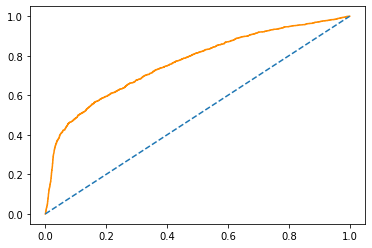

In [0]:
# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)

###Model discrimination and impact


####Thresholds and confusion matrices

Set different values for the threshold on probability of default, and use a confusion matrix to see how the changing values affect the model's performance.

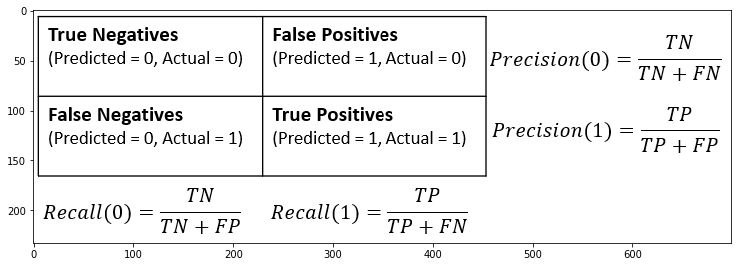

In [0]:
import matplotlib.pyplot as plt
img = plt.imread('/content/conf_matrix.png')
fig= plt.figure(figsize=(12.5,7))
plt.imshow(img)

In [0]:
from sklearn.metrics import confusion_matrix

- Reassign values of `loan_status` using a threshold of `0.5` for probability of default within `preds_df`.

In [0]:
# Set the threshold for defaults to 0.5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[9047  141]
 [2213  383]]


- Reassign values of `loan_status` using a threshold of `0.4` for probability of default within `preds_df`.

In [0]:
# Set the threshold for defaults to 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[8514  674]
 [1428 1168]]


####How thresholds affect performance



In [0]:
avg_loan_amnt = 9583.600936895346

In [0]:
# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
print(num_defaults * avg_loan_amnt * (1 - default_recall))

9710506.124031985


####Threshold selection

You know there is a trade off between metrics like default recall, non-default recall, and model accuracy. One easy way to approximate a good starting threshold value is to look at a plot of all three using `matplotlib`. With this graph, you can see how each of these metrics look at you change the threshold values and find the point at which the performance of all three is good enough to use for the credit data.

In [0]:
#@title
thresh = [0.2,
 0.225,
 0.25,
 0.275,
 0.3,
 0.325,
 0.35,
 0.375,
 0.4,
 0.425,
 0.45,
 0.475,
 0.5,
 0.525,
 0.55,
 0.575,
 0.6,
 0.625,
 0.65]
def_recalls = [0.7981438515081206,
 0.7583139984532096,
 0.7157772621809745,
 0.6759474091260634,
 0.6349574632637278,
 0.594354215003867,
 0.5467904098994586,
 0.5054137664346481,
 0.46403712296983757,
 0.39984532095901004,
 0.32211910286156226,
 0.2354988399071926,
 0.16782675947409126,
 0.1148491879350348,
 0.07733952049497293,
 0.05529775715390565,
 0.03750966744006187,
 0.026295436968290797,
 0.017788089713843776]
nondef_recalls = [0.5342465753424658,
 0.5973037616873234,
 0.6552511415525114,
 0.708306153511633,
 0.756468797564688,
 0.8052837573385518,
 0.8482278756251359,
 0.8864970645792564,
 0.9215046749293324,
 0.9492280930637095,
 0.9646662317895195,
 0.9733637747336378,
 0.9809741248097412,
 0.9857577734290063,
 0.9902152641878669,
 0.992280930637095,
 0.9948901935203305,
 0.9966297021091541,
 0.997499456403566]
accs = [0.5921588594704684,
 0.6326374745417516,
 0.6685336048879837,
 0.7012050237610319,
 0.7298031228784793,
 0.7589952477936185,
 0.7820773930753564,
 0.8028682959945689,
 0.8211133740665308,
 0.8286659877800407,
 0.8236591989137814,
 0.811439239646979,
 0.8025288526816021,
 0.7946367956551256,
 0.7898845892735913,
 0.7866598778004074,
 0.7847929395790902,
 0.7836897488119484,
 0.7825016972165648]

In [0]:
ticks = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]

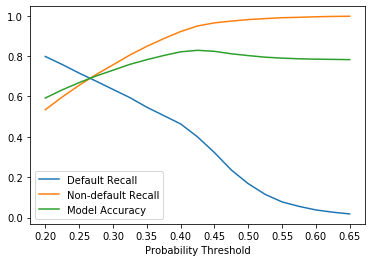

In [0]:
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

0.275 is the point where all three lines converge. This threshold would make a great starting point, but declaring all loans about 0.275 to be a default is probably not practical.

## 3.Gradient Boosted Trees Using XGBoost

Decision trees are another standard credit risk model. We will go beyond decision trees by using the trendy XGBoost package in Python to create gradient boosted trees. After developing sophisticated models, we will stress test their performance and discuss column selection in unbalanced data.

####Trees for defaults


In [0]:
#@title
gbt_prob_default = np.array([0.9404351 , 0.9220138 , 0.02170731, 0.02648344, 0.06480343,
       0.17517596, 0.02454289, 0.02672432, 0.7719177 , 0.9419445 ,
       0.1818746 , 0.8296812 , 0.018785  , 0.03237486, 0.9497312 ,
       0.06270587, 0.32689223, 0.8752075 , 0.21503085, 0.06421037,
       0.03333993, 0.06130797, 0.2382827 , 0.02940903, 0.07714377,
       0.7442734 , 0.36665666, 0.07626817, 0.569372  , 0.96365875,
       0.2901938 , 0.11361537, 0.16317135, 0.17156087, 0.00949353,
       0.01184979, 0.01911832, 0.00735586, 0.03857707, 0.22674757,
       0.1955205 , 0.1229823 , 0.60388696, 0.04267159, 0.03179923,
       0.04977014, 0.37743115, 0.07602669, 0.00797997, 0.05661124,
       0.04238608, 0.05209146, 0.95157516, 0.01663058, 0.00423825,
       0.06141677, 0.5739817 , 0.9718583 , 0.03534478, 0.15368806,
       0.24797454, 0.16126296, 0.9954464 , 0.0707613 , 0.08866377,
       0.05707303, 0.08789572, 0.06369523, 0.48468432, 0.09052099,
       0.16942123, 0.00207032, 0.08412474, 0.0507593 , 0.04626693,
       0.07062113, 0.05156441, 0.33810467, 0.00515896, 0.04759766,
       0.0048691 , 0.01597097, 0.11228526, 0.15342262, 0.80108774,
       0.12807769, 0.01216218, 0.12194426, 0.07579965, 0.0453011 ,
       0.0850162 , 0.0952251 , 0.02792783, 0.04947327, 0.15333797,
       0.02621353, 0.12021656, 0.98898286, 0.05322972, 0.39463747,
       0.9708157 , 0.09051239, 0.0351157 , 0.16831121, 0.00450071,
       0.5895056 , 0.0073989 , 0.03878702, 0.01596579, 0.13881685,
       0.15612203, 0.08954945, 0.02648344, 0.00478769, 0.7739758 ,
       0.02547203, 0.07107457, 0.80475104, 0.07068224, 0.4934554 ,
       0.00605855, 0.05353105, 0.01194393, 0.02367509, 0.03659784,
       0.02770835, 0.06384578, 0.8231295 , 0.01217991, 0.01527521,
       0.5302478 , 0.03594488, 0.00508109, 0.4842672 , 0.9584216 ,
       0.03322829, 0.03361703, 0.00968131, 0.98113394, 0.01251561,
       0.14442892, 0.02927655, 0.16190267, 0.08527678, 0.03542094,
       0.0551791 , 0.9417183 , 0.02262967, 0.05590358, 0.55167425,
       0.9740858 , 0.05050688, 0.6127797 , 0.9530402 , 0.44287992,
       0.02345249, 0.03302223, 0.01723641, 0.00884516, 0.22773951,
       0.14657535, 0.06794245, 0.40854806, 0.1948867 , 0.02635031,
       0.02116173, 0.27803823, 0.3123593 , 0.02367509, 0.7739368 ,
       0.0322194 , 0.06501077, 0.00515356, 0.09829976, 0.53518826,
       0.05358068, 0.09578271, 0.11228526, 0.03664867, 0.1018501 ,
       0.4596427 , 0.17019558, 0.05429476, 0.00327084, 0.07614257,
       0.19958611, 0.25738168, 0.09545975, 0.06211491, 0.7060263 ,
       0.1354339 , 0.47138196, 0.9470283 , 0.02099391, 0.05263305,
       0.90356725, 0.04428412, 0.07410147, 0.11094627, 0.02792922,
       0.02187426, 0.15320972, 0.03425204, 0.04591117, 0.05384837,
       0.19732516, 0.48333982, 0.0719988 , 0.01493405, 0.09260517,
       0.9302022 , 0.7025235 , 0.0336006 , 0.05485387, 0.03607297,
       0.09110549, 0.00198832, 0.9946425 , 0.11222316, 0.09294891,
       0.1325646 , 0.06898064, 0.25953126, 0.01897312, 0.6742403 ,
       0.09786538, 0.03251249, 0.00640478, 0.05124724, 0.03974012,
       0.02547203, 0.03480003, 0.03294866, 0.0896193 , 0.05523279,
       0.01263627, 0.13575348, 0.7071147 , 0.9010778 , 0.04020798,
       0.03611221, 0.16317356, 0.0202867 , 0.01311809, 0.626622  ,
       0.02073877, 0.023485  , 0.0376612 , 0.21503085, 0.04046045,
       0.11991488, 0.01211752, 0.0468286 , 0.28848565, 0.14768228,
       0.08129424, 0.51730174, 0.06874008, 0.05868613, 0.04329979,
       0.11570426, 0.02842145, 0.01260152, 0.00480854, 0.08632891,
       0.13336278, 0.09057489, 0.9945914 , 0.01089973, 0.02459536,
       0.9637082 , 0.04120335, 0.04016014, 0.96620286, 0.00983485,
       0.03354986, 0.05863388, 0.04756089, 0.05068455, 0.06055158,
       0.06209586, 0.96628124, 0.03774178, 0.00166397, 0.9988959 ,
       0.01498028, 0.05603974, 0.0354937 , 0.02452424, 0.4986684 ,
       0.02624185, 0.0205287 , 0.09737539, 0.2191603 , 0.03145859,
       0.19239455, 0.00442126, 0.05176657, 0.01053043, 0.40943423,
       0.0344153 , 0.7422384 , 0.08226388, 0.03400937, 0.95014393,
       0.8981932 , 0.9974341 , 0.03347661, 0.08103435, 0.273172  ,
       0.03054463, 0.9332296 , 0.04899446, 0.7643016 , 0.11975141,
       0.00900546, 0.02987263, 0.19110489, 0.02263843, 0.12173131,
       0.06355536, 0.01056002, 0.03611221, 0.02200335, 0.0155801 ,
       0.11355449, 0.92292523, 0.22848581, 0.01986469, 0.10348845,
       0.01416965, 0.07233841, 0.97042286, 0.995717  , 0.05284468,
       0.9453873 , 0.8712142 , 0.32734698, 0.0671268 , 0.0402961 ,
       0.03112438, 0.40318704, 0.06557922, 0.00221703, 0.01568025,
       0.23130439, 0.078284  , 0.0276163 , 0.13400067, 0.7879344 ,
       0.03903456, 0.04454999, 0.95802045, 0.01217991, 0.02586881,
       0.07114035, 0.04456201, 0.91474605, 0.06554686, 0.06165626,
       0.07815369, 0.89395976, 0.13625172, 0.10082505, 0.06418125,
       0.03682083, 0.14928423, 0.09816521, 0.06307865, 0.19742285,
       0.94992834, 0.01415966, 0.32557338, 0.08781292, 0.9723255 ,
       0.06164039, 0.04017431, 0.00241912, 0.02547203, 0.9740577 ,
       0.00584583, 0.19944233, 0.43920204, 0.08847699, 0.03974012,
       0.9652969 , 0.06209511, 0.01850364, 0.04052178, 0.15239207,
       0.09862176, 0.48338148, 0.01509504, 0.08075957, 0.15431389,
       0.06959635, 0.06355938, 0.07422462, 0.0164267 , 0.1732906 ,
       0.03943829, 0.06044605, 0.55029696, 0.0202914 , 0.07278211,
       0.17821099, 0.08407343, 0.05461156, 0.45658112, 0.06237146,
       0.1339635 , 0.04699015, 0.12895954, 0.9569292 , 0.08184214,
       0.01787666, 0.00866828, 0.37721214, 0.08129424, 0.03953832,
       0.05845669, 0.00138163, 0.02463439, 0.00456789, 0.06307865,
       0.07031205, 0.03251535, 0.9914238 , 0.05205682, 0.12942998,
       0.890908  , 0.0272791 , 0.088034  , 0.1513972 , 0.0537395 ,
       0.93986636, 0.06447957, 0.04456201, 0.09485532, 0.01065878,
       0.4072021 , 0.04162506, 0.6089754 , 0.99276817, 0.10082505,
       0.56060404, 0.01870941, 0.51129687, 0.37884963, 0.0023835 ,
       0.07039257, 0.04400006, 0.03983562, 0.00810408, 0.07590531,
       0.01883669, 0.01584248, 0.19797818, 0.03973623, 0.06116731,
       0.00839868, 0.01543602, 0.2530761 , 0.09842484, 0.72510207,
       0.22675714, 0.85627294, 0.03784525, 0.00168987, 0.04011407,
       0.10671843, 0.1001756 , 0.07228931, 0.01278446, 0.16314116,
       0.06923055, 0.40026718, 0.06898064, 0.1001756 , 0.00726135,
       0.04349677, 0.15169847, 0.7364916 , 0.05986422, 0.03943544,
       0.08072089, 0.06724474, 0.04909689, 0.15520468, 0.9786441 ,
       0.06355938, 0.5018398 , 0.28382334, 0.03405965, 0.06227675,
       0.8210795 , 0.04152888, 0.98455554, 0.03252969, 0.07226447,
       0.01045344, 0.07738522, 0.93028134, 0.11250434, 0.0367023 ,
       0.97048527, 0.03923006, 0.01233613, 0.03246321, 0.13025488,
       0.01217991, 0.03008281, 0.0431897 , 0.98316157, 0.15888928,
       0.3647021 , 0.44810826, 0.17373528, 0.04086198, 0.11382644,
       0.09005058, 0.10662208, 0.03366574, 0.9296272 , 0.02997274,
       0.15348521, 0.03276175, 0.00463122, 0.95056105, 0.14688884,
       0.05669621, 0.17589957, 0.3224615 , 0.13306351, 0.07205705,
       0.02554697, 0.38024682, 0.9620969 , 0.18459776, 0.08474299,
       0.06813576, 0.01220301, 0.5521743 , 0.920963  , 0.0228267 ,
       0.07999495, 0.03545165, 0.20260236, 0.10163478, 0.44549054,
       0.10284281, 0.03723088, 0.03361703, 0.01754035, 0.03088682,
       0.7129845 , 0.7611886 , 0.7129699 , 0.15259966, 0.06278584,
       0.03251535, 0.23936774, 0.04558835, 0.06002804, 0.0069729 ,
       0.16571651, 0.733733  , 0.5307703 , 0.02834992, 0.21265274,
       0.80375403, 0.00975456, 0.01941817, 0.06042255, 0.7875215 ,
       0.31694767, 0.4821642 , 0.105085  , 0.57393175, 0.96968937,
       0.92972857, 0.04071217, 0.00923299, 0.00189728, 0.17558542,
       0.13196105, 0.05983854, 0.00210986, 0.02492543, 0.00530663,
       0.07157822, 0.0915755 , 0.01612997, 0.08924691, 0.26171154,
       0.04541769, 0.12230811, 0.03627775, 0.20100127, 0.02441066,
       0.02181209, 0.05201215, 0.8372934 , 0.06611367, 0.20899317,
       0.4257988 , 0.06898064, 0.6376564 , 0.04376665, 0.09439176,
       0.12014691, 0.02463439, 0.8491859 , 0.00456684, 0.06701126,
       0.04144657, 0.23937108, 0.7180053 , 0.9922415 , 0.06603023,
       0.27326927, 0.01754035, 0.03435599, 0.01942822, 0.00481841,
       0.02765707, 0.01925961, 0.08923329, 0.06898064, 0.31596664,
       0.10689999, 0.02452778, 0.09110549, 0.07299034, 0.06913548,
       0.91688734, 0.009293  , 0.09718847, 0.9905766 , 0.14275599,
       0.7588619 , 0.42547655, 0.04270015, 0.05149595, 0.00957129,
       0.12167497, 0.02950817, 0.02183853, 0.04491899, 0.16365063,
       0.03939302, 0.03133268, 0.06913548, 0.04020798, 0.03508079,
       0.02334626, 0.97038966, 0.00796264, 0.06923185, 0.81948745,
       0.00287973, 0.2601811 , 0.14747718, 0.21594591, 0.00514149,
       0.02821355, 0.9959125 , 0.02377552, 0.04747193, 0.00209563,
       0.10894218, 0.07440204, 0.04097364, 0.53295475, 0.9838171 ,
       0.095815  , 0.1390627 , 0.05719   , 0.0198207 , 0.04946258,
       0.04152888, 0.07414798, 0.16505674, 0.10000232, 0.0106445 ,
       0.04931422, 0.5834461 , 0.4400595 , 0.10093657, 0.01925961,
       0.01488007, 0.94631034, 0.02985013, 0.27608636, 0.02367509,
       0.11329399, 0.01312588, 0.02845071, 0.00447166, 0.04227605,
       0.09829976, 0.254681  , 0.9792211 , 0.3172527 , 0.2090606 ,
       0.03970813, 0.956579  , 0.03428485, 0.06868581, 0.07554346,
       0.01217991, 0.05696133, 0.20294516, 0.11585652, 0.9668648 ,
       0.06219022, 0.07600218, 0.02097093, 0.9988489 , 0.965878  ,
       0.01139924, 0.05764677, 0.994812  , 0.47144502, 0.21895196,
       0.964741  , 0.1432782 , 0.22206043, 0.08960941, 0.06140084,
       0.02577366, 0.04251932, 0.07027847, 0.08772589, 0.06898064,
       0.1738379 , 0.08828839, 0.12810318, 0.07896513, 0.46454054,
       0.18644351, 0.07449331, 0.10921372, 0.22248305, 0.2554194 ,
       0.07297275, 0.00526889, 0.38273814, 0.10068934, 0.05791424,
       0.07724256, 0.00836653, 0.04407844, 0.44287992, 0.01043208,
       0.03986932, 0.17534372, 0.11681615, 0.9287326 , 0.16983283,
       0.01691386, 0.44919458, 0.08674507, 0.01514851, 0.20881057,
       0.03338781, 0.30256075, 0.08209026, 0.09006401, 0.07470115,
       0.08129424, 0.04756089, 0.27636307, 0.14907192, 0.02828499,
       0.05940787, 0.13627039, 0.13979259, 0.2892329 , 0.99282104,
       0.02940903, 0.01568336, 0.0012361 , 0.0475681 , 0.06923185,
       0.04938983, 0.00819871, 0.00525085, 0.97637856, 0.86071825,
       0.9861683 , 0.1653618 , 0.06751893, 0.03542927, 0.1367886 ,
       0.93890804, 0.07053617, 0.0739079 , 0.11937582, 0.9490896 ,
       0.00178703, 0.942143  , 0.1432782 , 0.04890268, 0.06510376,
       0.07545575, 0.2708275 , 0.2103275 , 0.09793845, 0.1025015 ,
       0.32671487, 0.18879324, 0.03819251, 0.00700555, 0.1103005 ,
       0.08171774, 0.14757636, 0.03830255, 0.04069914, 0.06087815,
       0.47914216, 0.96470124, 0.26266178, 0.02201134, 0.8231295 ,
       0.11658206, 0.0952251 , 0.12269698, 0.12628107, 0.10915519,
       0.04632162, 0.14336517, 0.1454383 , 0.02620099, 0.04274612,
       0.94717854, 0.8275339 , 0.24113056, 0.05824669, 0.09230167,
       0.04238608, 0.01217991, 0.01341695, 0.27941987, 0.04141027,
       0.14813966, 0.99227726, 0.03542927, 0.00167736, 0.9946461 ,
       0.67756146, 0.0625203 , 0.24761781, 0.05575357, 0.16079932,
       0.24130163, 0.6580616 , 0.04699736, 0.02372669, 0.9869594 ,
       0.01217991, 0.29020956, 0.34558344, 0.00459864, 0.0952251 ,
       0.99246126, 0.16701826, 0.04891264, 0.00409252, 0.9750998 ,
       0.00198069, 0.28465003, 0.07614257, 0.05923241, 0.05201215,
       0.10275671, 0.09648451, 0.03702206, 0.20185015, 0.15669873,
       0.9402456 , 0.12628107, 0.05156441, 0.74933475, 0.0757698 ,
       0.07899436, 0.49179596, 0.04309413, 0.07314947, 0.09921862,
       0.02940903, 0.41948515, 0.6672031 , 0.10570499, 0.270453  ,
       0.05384837, 0.21574144, 0.00421356, 0.07520817, 0.02914522,
       0.02340437, 0.01751776, 0.13190182, 0.05237957, 0.3106363 ,
       0.07465103, 0.92745346, 0.07643555, 0.03452036, 0.12784034,
       0.7144006 , 0.05864375, 0.03853945, 0.9733367 , 0.2345317 ,
       0.9540276 , 0.05707923, 0.02577605, 0.01016121, 0.18297413,
       0.8984755 , 0.15674195, 0.80714136, 0.32709375, 0.14371322,
       0.05526254, 0.09035242, 0.01465458, 0.0757838 , 0.08266415,
       0.07103238, 0.0706579 , 0.05749191, 0.06581941, 0.0072359 ,
       0.03939302, 0.21673566, 0.03210448, 0.10283847, 0.06391569,
       0.2896518 , 0.26666108, 0.6064024 , 0.11695725, 0.32393074,
       0.19928172, 0.9633106 , 0.11275669, 0.14345077, 0.8711087 ,
       0.23904698, 0.00385825, 0.0498983 , 0.14929955, 0.97845113,
       0.02983875, 0.06436853, 0.03202172, 0.77722055, 0.05551158,
       0.8546867 , 0.03076208, 0.03715424, 0.05377283, 0.0072342 ,
       0.04860597, 0.12304679, 0.12644897, 0.12777522, 0.15433514,
       0.04561839, 0.17540166, 0.03806893, 0.17221186, 0.10183954,
       0.9465375 , 0.09604859, 0.08701145, 0.05385302, 0.29587197,
       0.11571579, 0.05160655, 0.01743876, 0.1338224 , 0.87830025,
       0.02669019, 0.11405132, 0.04436146, 0.07419748, 0.05984028,
       0.94288176, 0.21043934, 0.09989555, 0.05620592, 0.17820534,
       0.8984755 , 0.03039621, 0.08674507, 0.01579494, 0.04152888,
       0.9728905 , 0.5955573 , 0.07124258, 0.30068913, 0.01263627,
       0.06722862, 0.08847699, 0.10073439, 0.96715665, 0.04789803,
       0.53154826, 0.04682552, 0.00145604, 0.0398785 , 0.44474328,
       0.03645345, 0.04379532, 0.07614257, 0.19759701, 0.11571579,
       0.2609833 , 0.8593133 , 0.07027541, 0.03304116, 0.05603974,
       0.06923185, 0.05714427, 0.11569501, 0.08142771, 0.5085395 ,
       0.08088444, 0.6363412 , 0.98035747, 0.04979124, 0.04570955,
       0.09384771, 0.00949077, 0.8877253 , 0.07940349, 0.0102576 ,
       0.9536008 , 0.06650399, 0.04079709, 0.03014919, 0.15433514,
       0.9140231 , 0.2892329 , 0.05560952, 0.30444854, 0.14018849,
       0.9698898 , 0.09199462, 0.9418001 , 0.05052414, 0.2410726 ,
       0.06480343, 0.03682083, 0.10110513, 0.03252969, 0.90113866,
       0.97362894, 0.15304135, 0.9950369 , 0.00195373, 0.75674987,
       0.15333797, 0.15186499, 0.02746575, 0.09105872, 0.8890945 ,
       0.0503007 , 0.52440715, 0.06474362, 0.73763096, 0.08949809,
       0.1805505 , 0.51190525, 0.03943829, 0.05493262, 0.06489518,
       0.17248695, 0.0069729 , 0.3347273 , 0.138353  , 0.00433946,
       0.96974397, 0.03742638, 0.08487019, 0.1068259 , 0.9523716 ,
       0.05429476, 0.19239455, 0.06898064, 0.0875985 , 0.00378115,
       0.16627318, 0.08884262, 0.07813245, 0.99254566, 0.08154668,
       0.08688911, 0.07563378, 0.0656027 , 0.04973647, 0.08224519,
       0.03766537, 0.04118502, 0.00494407, 0.09636448, 0.09613592,
       0.05341664, 0.6977085 , 0.06724474, 0.08056036, 0.08584341,
       0.15936811, 0.21123646, 0.02899116, 0.03005319, 0.08674507,
       0.14813966, 0.08142771, 0.08158953, 0.02092911, 0.04259143,
       0.42183378, 0.06273773, 0.24333537, 0.01158987, 0.04598592,
       0.15787223, 0.2290007 , 0.9403683 , 0.26364046, 0.04052178,
       0.4791393 , 0.09485091, 0.05302794, 0.04772216, 0.6052276 ,
       0.10476083, 0.1312182 , 0.2669399 , 0.08923329, 0.99833125,
       0.00382487, 0.0794878 , 0.04020798, 0.06130797, 0.00935775,
       0.02966864, 0.00359274, 0.99600923, 0.9554843 , 0.22866893,
       0.20018007, 0.99080104, 0.02508092, 0.05748376, 0.0305054 ,
       0.04547461, 0.04162506, 0.02128469, 0.61828756, 0.11686803,
       0.34066424, 0.04651446, 0.94085395, 0.02586881, 0.10785364,
       0.00804017, 0.07198414, 0.1432782 , 0.14899626, 0.11569501,
       0.0864362 , 0.0952251 , 0.9679253 , 0.08781292, 0.00297042,
       0.10258742, 0.01358184, 0.82114005, 0.20807971, 0.10181345,
       0.04692511, 0.4535389 , 0.10805521, 0.9023953 , 0.07305523,
       0.2277133 , 0.00433287, 0.06992614, 0.05295965, 0.15451254,
       0.1096486 , 0.01701825, 0.09007084, 0.52766216, 0.05000194,
       0.04717331, 0.04388501, 0.24140015, 0.12395971, 0.06923055,
       0.06266856, 0.41031605, 0.22847337, 0.07391329, 0.11051624,
       0.06898064, 0.18039511, 0.9752078 , 0.6905999 , 0.04067056,
       0.17358823, 0.9728924 , 0.996223  , 0.9546249 , 0.62707496,
       0.04083243, 0.01693576, 0.08923329, 0.94872034, 0.3748573 ,
       0.03534347, 0.13524157, 0.05550761, 0.11975141, 0.3829582 ,
       0.05847077, 0.0099351 , 0.0388382 , 0.11547065, 0.93054   ,
       0.05523279, 0.04094483, 0.11419217, 0.03228296, 0.02377552,
       0.5209668 , 0.6513659 , 0.31243306, 0.05669621, 0.09051239,
       0.25437528, 0.03167371, 0.18189429, 0.04020798, 0.06032368,
       0.4457064 , 0.11294107, 0.10082505, 0.0048338 , 0.05822861,
       0.04645815, 0.22672604, 0.04772216, 0.03939884, 0.17411627,
       0.20387268, 0.02155786, 0.12750125, 0.03786951, 0.05990568,
       0.06480343, 0.13690542, 0.9769419 , 0.16520038, 0.20803717,
       0.11124734, 0.07614257, 0.7419085 , 0.06476727, 0.1660742 ,
       0.0598099 , 0.05124339, 0.25697547, 0.04942512, 0.19108702,
       0.01531933, 0.02238479, 0.43918052, 0.00229753, 0.03776147,
       0.16746543, 0.05488993, 0.9277882 , 0.9286069 , 0.03728496,
       0.03684405, 0.1551904 , 0.06622402, 0.03779386, 0.12385379,
       0.05664209, 0.09699344, 0.01788484, 0.00359274, 0.05864375,
       0.9913919 , 0.29300916, 0.08218893, 0.00494407, 0.03939302,
       0.05690542, 0.1569993 , 0.9518035 , 0.04148561, 0.23581746,
       0.5877562 , 0.13221005, 0.23861726, 0.01673196, 0.25697547,
       0.0828056 , 0.03675494, 0.9671346 , 0.8327554 , 0.24975155,
       0.04579669, 0.04226523, 0.06378817, 0.02049411, 0.0464928 ,
       0.07387632, 0.06327968, 0.81564903, 0.32843992, 0.12774764,
       0.07037424, 0.04273623, 0.10270353, 0.05006617, 0.0308981 ,
       0.03809656, 0.04930413, 0.06935605, 0.07164092, 0.23610657,
       0.08943454, 0.20269608, 0.02927655, 0.05784429, 0.81400955,
       0.06276436, 0.05696133, 0.0507593 , 0.20539577, 0.70794153,
       0.04788602, 0.17239116, 0.02459489, 0.07614257, 0.9427045 ,
       0.35746098, 0.02034747, 0.0475971 , 0.16003595, 0.07356624,
       0.09829976, 0.8571878 , 0.04148823, 0.07203369, 0.06695809,
       0.17344101, 0.02626956, 0.28031787, 0.0613911 , 0.11051624,
       0.01167967, 0.00360557, 0.04020798, 0.19741589, 0.95565647,
       0.03544281, 0.14015163, 0.04020798, 0.9671346 , 0.08176231,
       0.07826441, 0.24233499, 0.0759244 , 0.04360809, 0.04888671,
       0.11455903, 0.11776397, 0.07068224, 0.04160222, 0.18695253,
       0.00576653, 0.03850986, 0.14562306, 0.14879793, 0.3737985 ,
       0.00501262, 0.08159291, 0.9902969 , 0.96272177, 0.05319656,
       0.00829519, 0.05050688, 0.079717  , 0.16601059, 0.78406477,
       0.02630335, 0.07614257, 0.02712982, 0.15127009, 0.09110549,
       0.02508092, 0.05085992, 0.04365952, 0.04270015, 0.01970205,
       0.0952251 , 0.9864201 , 0.9404351 , 0.05471507, 0.09294891,
       0.96201926, 0.12928778, 0.06210177, 0.67756146, 0.00634972,
       0.08923329, 0.3434468 , 0.11224634, 0.05636218, 0.11571579,
       0.9522838 , 0.9962406 , 0.22024743, 0.9704901 , 0.07614257,
       0.13336278, 0.23043753, 0.90271986, 0.02630335, 0.37094906,
       0.00653454, 0.36729854, 0.0046105 , 0.03626353, 0.02595083,
       0.08810249, 0.01690465, 0.9956831 , 0.32819432, 0.00407895,
       0.06883689, 0.05345096, 0.03918948, 0.08001784, 0.06963157,
       0.04756089, 0.03239401, 0.04020798, 0.03252969, 0.10947363,
       0.00726135, 0.12522227, 0.06510376, 0.00782267, 0.03425953,
       0.7156719 , 0.01419871, 0.44287992, 0.33982283, 0.07595821,
       0.01643594, 0.2102774 , 0.07188825, 0.0133837 , 0.07644605,
       0.4214713 , 0.28322345, 0.781813  , 0.03155305, 0.97174734,
       0.13583082, 0.06726144, 0.0481123 , 0.03287225, 0.02203709,
       0.00816343, 0.08770806, 0.05342205, 0.99594903, 0.01855375,
       0.13817766, 0.028317  , 0.05156441, 0.0962849 , 0.22538823,
       0.08058193, 0.09008131, 0.12498072, 0.05321799, 0.16350995,
       0.00782267, 0.07834785, 0.03779386, 0.96784747, 0.2067237 ,
       0.9007087 , 0.90434575, 0.02779847, 0.06615715, 0.01855449,
       0.09743951, 0.01623184, 0.01362763, 0.33542368, 0.02367509,
       0.06493638, 0.3426514 , 0.9646684 , 0.47469988, 0.08515271,
       0.13588196, 0.42976734, 0.03810923, 0.02395902, 0.10065707,
       0.09423833, 0.06057251, 0.21074718, 0.10284281, 0.07423245,
       0.12900569, 0.97504234, 0.07859907, 0.07486553, 0.06299952,
       0.05156441, 0.02586099, 0.10265891, 0.024255  , 0.007634  ,
       0.53154826, 0.06717369, 0.03607297, 0.11550698, 0.7821668 ,
       0.41148692, 0.02721848, 0.04302466, 0.00305493, 0.06505056,
       0.05810998, 0.14864893, 0.07037424, 0.08582076, 0.16416933,
       0.01251484, 0.0512251 , 0.05321799, 0.03542927, 0.02284233,
       0.28480384, 0.08171774, 0.01818303, 0.15625979, 0.54126036,
       0.03638882, 0.00198279, 0.00936696, 0.0460016 , 0.6036228 ,
       0.06095446, 0.08142771, 0.07645413, 0.07591463, 0.23373096,
       0.00390609, 0.06857529, 0.14250366, 0.02630335, 0.02791024,
       0.11614082, 0.00736444, 0.07401848, 0.9533428 , 0.02365643,
       0.06479704, 0.1068259 , 0.94005823, 0.03136387, 0.03664867,
       0.01723904, 0.00172181, 0.96359754, 0.08087034, 0.9273776 ,
       0.9605325 , 0.07886156, 0.95298994, 0.34558344, 0.07037424,
       0.39475408, 0.9893834 , 0.01576553, 0.09909914, 0.02508092,
       0.9285939 , 0.04487104, 0.06187878, 0.5111626 , 0.5944663 ,
       0.09877179, 0.088034  , 0.9769419 , 0.08202984, 0.9824692 ,
       0.07428923, 0.05822886, 0.03410992, 0.6639726 , 0.08227902,
       0.0054243 , 0.02334626, 0.01693576, 0.01311809, 0.9147791 ,
       0.99213046, 0.07699426, 0.5815135 , 0.87062955, 0.40506643,
       0.01871116, 0.07158497, 0.9746045 , 0.03542927, 0.06765009,
       0.06589516, 0.96787995, 0.04118203, 0.09329176, 0.07027847,
       0.03248855, 0.03752253, 0.01753946, 0.04713857, 0.86156344,
       0.67756146, 0.20185015, 0.95788753, 0.2828996 , 0.03090945,
       0.12569198, 0.9595195 , 0.09636448, 0.1424993 , 0.16260877,
       0.24355203, 0.05125627, 0.5770391 , 0.96904033, 0.07018799,
       0.04368878, 0.9943558 , 0.08189128, 0.09408037, 0.06083746,
       0.11228526, 0.04710478, 0.9949058 , 0.02110113, 0.56063265,
       0.17951775, 0.02931415, 0.0218888 , 0.04152888, 0.15451254,
       0.94939184, 0.14998645, 0.02822881, 0.17806071, 0.16573983,
       0.01787666, 0.13511284, 0.09365901, 0.03610802, 0.07771176,
       0.07022326, 0.11537234, 0.04213816, 0.23177719, 0.12147997,
       0.0317203 , 0.08129424, 0.16346127, 0.00624946, 0.76780456,
       0.9703333 , 0.5859163 , 0.9764806 , 0.44933394, 0.23640998,
       0.09612115, 0.1432782 , 0.04789803, 0.022072  , 0.0475971 ,
       0.04377295, 0.09571007, 0.81583685, 0.00383142, 0.24264427,
       0.02474515, 0.05791062, 0.11114392, 0.06239986, 0.3277789 ,
       0.04349677, 0.00503308, 0.06136525, 0.02276718, 0.42720005,
       0.02551742, 0.13665381, 0.9989392 , 0.10141841, 0.11781131,
       0.03346277, 0.02038243, 0.07708514, 0.01922144, 0.09027115,
       0.6648533 , 0.9802203 , 0.09052099, 0.8020284 , 0.93839324,
       0.00736444, 0.01690465, 0.74577   , 0.22243941, 0.06114765,
       0.10991788, 0.01622239, 0.2512096 , 0.07210166, 0.05621944,
       0.08037061, 0.06958432, 0.00972281, 0.05117622, 0.03998405,
       0.00198069, 0.12384128, 0.32503462, 0.09259649, 0.05534613,
       0.06378696, 0.03075039, 0.03878254, 0.05811369, 0.03256313,
       0.17419608, 0.30451268, 0.13254519, 0.97174734, 0.9528666 ,
       0.99473286, 0.05456958, 0.52322143, 0.01760582, 0.25254643,
       0.09278083, 0.05972454, 0.00496498, 0.9222998 , 0.07606829,
       0.39286983, 0.02679285, 0.02434903, 0.05379497, 0.00530044,
       0.0844262 , 0.07314947, 0.0952251 , 0.01872364, 0.06167666,
       0.07986309, 0.04252318, 0.9245656 , 0.04516737, 0.09181927,
       0.05406444, 0.02622283, 0.34671143, 0.969277  , 0.11514503,
       0.4963845 , 0.18590353, 0.62442094, 0.1432782 , 0.00420326,
       0.30693996, 0.04143299, 0.05852826, 0.10877126, 0.01536707,
       0.06978519, 0.02187426, 0.96664745, 0.0082635 , 0.00537512,
       0.23850128, 0.15333797, 0.4830911 , 0.24938545, 0.09448725,
       0.0202867 , 0.02415905, 0.09143022, 0.04591382, 0.1610866 ,
       0.12837851, 0.12354452, 0.9447038 , 0.04629866, 0.9468119 ,
       0.97338134, 0.08866377, 0.09921862, 0.23034717, 0.02468567,
       0.06279659, 0.11082361, 0.23402748, 0.05011104, 0.04856934,
       0.06483179, 0.01816933, 0.22248305, 0.20137012, 0.16681574,
       0.04622393, 0.07910848, 0.03565449, 0.06497388, 0.04057962,
       0.05818603, 0.93946934, 0.20100139, 0.03133268, 0.96619743,
       0.03542341, 0.00493514, 0.04590187, 0.07879119, 0.01058513,
       0.03885816, 0.03458989, 0.16964017, 0.02931055, 0.8628091 ,
       0.27644545, 0.05639045, 0.02469913, 0.03497557, 0.1535793 ,
       0.09651371, 0.23520009, 0.04339691, 0.11753637, 0.07520817,
       0.44289076, 0.10686728, 0.0329587 , 0.03937138, 0.08705574,
       0.97638136, 0.1082915 , 0.99224734, 0.05240041, 0.1476373 ,
       0.0281248 , 0.89482176, 0.01674401, 0.03338781, 0.7675666 ,
       0.13169365, 0.04941341, 0.8027324 , 0.0592621 , 0.16038036,
       0.5213676 , 0.03227493, 0.06235223, 0.74684155, 0.01993215,
       0.01125494, 0.0512169 , 0.07037424, 0.02383457, 0.9224561 ,
       0.944093  , 0.00431692, 0.09018396, 0.1962027 , 0.01680694,
       0.08421857, 0.5578721 , 0.2180065 , 0.96160585, 0.06103489,
       0.15500078, 0.0923069 , 0.37479362, 0.01630827, 0.27822796,
       0.05321799, 0.01567435, 0.01958353, 0.5448932 , 0.088034  ,
       0.04800798, 0.13652396, 0.03218573, 0.0419273 , 0.1431216 ,
       0.16561407, 0.03762495, 0.908628  , 0.05669621, 0.03510003,
       0.35520536, 0.1001996 , 0.12519129, 0.52322143, 0.18695253,
       0.04465719, 0.5565901 , 0.04958376, 0.02720556, 0.0490346 ,
       0.01117721, 0.8592978 , 0.0166201 , 0.9212208 , 0.04685118,
       0.03230625, 0.19108702, 0.06421037, 0.02036354, 0.10537801,
       0.10400093, 0.1541999 , 0.72480506, 0.00178703, 0.9442673 ,
       0.04625425, 0.03943829, 0.03425204, 0.07416281, 0.42815194,
       0.42634478, 0.9897085 , 0.16990912, 0.0319423 , 0.0591497 ,
       0.02753075, 0.01926702, 0.95770127, 0.07888712, 0.03484549,
       0.00993699, 0.82638925, 0.01058513, 0.02648344, 0.05245445,
       0.03915156, 0.21444619, 0.04019858, 0.02575728, 0.14161177,
       0.16230981, 0.19840401, 0.11443321, 0.09018396, 0.963873  ,
       0.93275946, 0.0353089 , 0.9642838 , 0.31324384, 0.07795817,
       0.08158953, 0.06355938, 0.95783216, 0.03542927, 0.12362324,
       0.13140734, 0.02494897, 0.10926451, 0.08584341, 0.0012361 ,
       0.08412106, 0.10541957, 0.02246176, 0.0312063 , 0.01925961,
       0.08009843, 0.05062231, 0.9541275 , 0.07470115, 0.2845111 ,
       0.21123646, 0.945704  , 0.09762546, 0.01782226, 0.05284468,
       0.04538183, 0.04899446, 0.04152888, 0.03466135, 0.00906186,
       0.06589516, 0.02110113, 0.11361537, 0.03939302, 0.1438259 ,
       0.04733187, 0.90886354, 0.10001434, 0.06480343, 0.21607515,
       0.9598042 , 0.02383433, 0.5206747 , 0.00706056, 0.00675567,
       0.1432782 , 0.93733066, 0.9720876 , 0.1606559 , 0.58639014,
       0.45470643, 0.05689416, 0.9239526 , 0.0923069 , 0.05106187,
       0.72917   , 0.09416444, 0.07619876, 0.0836146 , 0.0458299 ,
       0.09954563, 0.99444026, 0.07975417, 0.06839155, 0.27191955,
       0.05968562, 0.00608746, 0.18635726, 0.09075308, 0.00154989,
       0.02778487, 0.02943519, 0.17770597, 0.04137863, 0.05106187,
       0.023506  , 0.00369647, 0.15433514, 0.0037979 , 0.09796916,
       0.06722572, 0.14080733, 0.0256016 , 0.01693576, 0.10588872,
       0.1954099 , 0.11571579, 0.9562665 , 0.00172181, 0.00296438,
       0.4471732 , 0.0952251 , 0.8937977 , 0.07215974, 0.06211491,
       0.95853627, 0.09920891, 0.01911832, 0.0279885 , 0.29978386,
       0.01058513, 0.212686  , 0.00330965, 0.05800846, 0.00495879,
       0.62454593, 0.01320585, 0.05546577, 0.08124247, 0.04818045,
       0.13723224, 0.5930315 , 0.07207944, 0.05317685, 0.12468708,
       0.1141188 , 0.09135443, 0.03559534, 0.08557202, 0.03587577,
       0.46937054, 0.30265918, 0.03830255, 0.86435354, 0.01693576,
       0.8132177 , 0.204511  , 0.10900464, 0.06103489, 0.05856929,
       0.08834802, 0.10229126, 0.6408021 , 0.01695567, 0.01010855,
       0.22773951, 0.14263096, 0.0874051 , 0.06389297, 0.28602144,
       0.31089622, 0.01958353, 0.16990912, 0.8657113 , 0.01362482,
       0.05138935, 0.03118096, 0.00500029, 0.18645465, 0.00758758,
       0.05603974, 0.01493405, 0.05379497, 0.97149557, 0.66121393,
       0.98944724, 0.09481225, 0.98085415, 0.20083284, 0.09737539,
       0.01557139, 0.18232481, 0.47407916, 0.00773598, 0.96477383,
       0.07674794, 0.1858932 , 0.03742638, 0.7384184 , 0.19261421,
       0.02469563, 0.06495329, 0.0262484 , 0.02940903, 0.8958863 ,
       0.07551832, 0.01958353, 0.5980908 , 0.19427602, 0.07053617,
       0.16879326, 0.04020798, 0.18213865, 0.03973623, 0.15433514,
       0.08681354, 0.00198832, 0.04440568, 0.02183853, 0.4884016 ,
       0.96871996, 0.04710954, 0.02463439, 0.3635724 , 0.03557922,
       0.1933607 , 0.19670102, 0.08189128, 0.11493085, 0.10930257,
       0.04736197, 0.9547276 , 0.01659476, 0.9516558 , 0.07551832,
       0.14343548, 0.44292706, 0.06791332, 0.01657961, 0.03740576,
       0.03640204, 0.10625022, 0.03099975, 0.02630335, 0.0952251 ,
       0.08399487, 0.05842419, 0.0272791 , 0.05560952, 0.11051624,
       0.01575164, 0.03527577, 0.03435303, 0.00462778, 0.07617512,
       0.02200999, 0.14797613, 0.07268117, 0.10551688, 0.0099788 ,
       0.05600874, 0.0069729 , 0.01922144, 0.27976763, 0.19239455,
       0.00491122, 0.13624269, 0.09761176, 0.12967862, 0.9469403 ,
       0.06042255, 0.03715424, 0.00521018, 0.8467614 , 0.0359186 ,
       0.9737352 , 0.0131731 , 0.0952251 , 0.06511281, 0.07549973,
       0.04019858, 0.06095446, 0.07764212, 0.03282201, 0.2930394 ,
       0.5475145 , 0.04899446, 0.24082798, 0.11623778, 0.9941136 ,
       0.04591264, 0.02011913, 0.19076122, 0.02186031, 0.08701145,
       0.0294682 , 0.00145604, 0.04942512, 0.9717855 , 0.05815954,
       0.06371145, 0.03676255, 0.11776397, 0.10554321, 0.09650104,
       0.00932254, 0.06133244, 0.03542927, 0.12561958, 0.3096372 ,
       0.06092793, 0.7514972 , 0.15702114, 0.11413962, 0.14506066,
       0.09783492, 0.15117486, 0.93664837, 0.14472377, 0.08476067,
       0.00711386, 0.02116173, 0.0833599 , 0.08124247, 0.01179063,
       0.19052204, 0.00496665, 0.14506315, 0.10353731, 0.01065878,
       0.08546812, 0.02080861, 0.91414034, 0.06397046, 0.02861498,
       0.94004774, 0.15717341, 0.09401613, 0.09618977, 0.3510239 ,
       0.0054243 , 0.80059624, 0.03432882, 0.05477995, 0.10330764,
       0.3681128 , 0.09446687, 0.03319883, 0.9584195 , 0.03741769,
       0.30216506, 0.9361484 , 0.1084446 , 0.10634782, 0.14890581,
       0.05811369, 0.14457785, 0.04216819, 0.02940903, 0.07688075,
       0.05454396, 0.98073846, 0.03611221, 0.07645158, 0.9727534 ,
       0.04608606, 0.06665938, 0.04772216, 0.00177306, 0.05303326,
       0.09113149, 0.02183462, 0.06995162, 0.01911832, 0.04984064,
       0.27358624, 0.37750238, 0.0462053 , 0.22395335, 0.07614257,
       0.02481168, 0.00177306, 0.1103005 , 0.96349496, 0.01564694,
       0.03570789, 0.01425602, 0.21628675, 0.72142726, 0.03633836,
       0.33446887, 0.05864375, 0.02760505, 0.04248111, 0.14054511,
       0.09618389, 0.09226407, 0.04547206, 0.0329388 , 0.06996123,
       0.08124247, 0.09954563, 0.03221599, 0.81400955, 0.10373539,
       0.39946514, 0.08919234, 0.1001756 , 0.07626817, 0.10689999,
       0.05413775, 0.00748662, 0.15894367, 0.9745599 , 0.10209744,
       0.03648556, 0.00215359, 0.8835449 , 0.04931422, 0.5646869 ,
       0.02810962, 0.06406925, 0.07179009, 0.9961282 , 0.09750713,
       0.06631453, 0.01752289, 0.13165243, 0.04065821, 0.01668282,
       0.94503725, 0.9959125 , 0.00830749, 0.00813106, 0.11834399,
       0.0281575 , 0.05049824, 0.15938719, 0.09408037, 0.07858852,
       0.7447882 , 0.0272791 , 0.05863388, 0.0481123 , 0.08432644,
       0.09110549, 0.73117715, 0.2148601 , 0.055852  , 0.07399761,
       0.0257177 , 0.0864362 , 0.9180531 , 0.14051507, 0.07858539,
       0.07708514, 0.03870283, 0.03878254, 0.03607297, 0.05669621,
       0.04242916, 0.03819251, 0.2719271 , 0.07378484, 0.01117721,
       0.02475348, 0.1432782 , 0.0860346 , 0.4959684 , 0.27402416,
       0.01494549, 0.17724998, 0.22820541, 0.9604065 , 0.0942359 ,
       0.00675739, 0.7409455 , 0.14891736, 0.0420147 , 0.9369933 ,
       0.10883164, 0.96829265, 0.34123492, 0.15119757, 0.14282134,
       0.03914842, 0.1319572 , 0.12848267, 0.07369663, 0.01691386,
       0.0048691 , 0.02753075, 0.06338391, 0.07614257, 0.30068913,
       0.09286486, 0.03271992, 0.04244013, 0.03640204, 0.10944712,
       0.01396049, 0.02540389, 0.23829597, 0.05013897, 0.89259064,
       0.88452584, 0.12474356, 0.99126   , 0.9146426 , 0.08213465,
       0.01972335, 0.03359177, 0.00176851, 0.05890683, 0.21946946,
       0.05748763, 0.10615037, 0.06237791, 0.0029167 , 0.13299595,
       0.05244561, 0.02935939, 0.07625396, 0.04538183, 0.96900004,
       0.12628107, 0.13869819, 0.06961134, 0.03304116, 0.07674794,
       0.05405013, 0.0179145 , 0.03973623, 0.09352356, 0.00352931,
       0.00897024, 0.05321799, 0.09051239, 0.00798596, 0.18644351,
       0.9952335 , 0.02825856, 0.03886518, 0.02783467, 0.02586607,
       0.09016147, 0.05308598, 0.04662198, 0.02183853, 0.01521462,
       0.01133069, 0.06898064, 0.02820327, 0.08921567, 0.07319462,
       0.07068224, 0.04741391, 0.01739216, 0.01749436, 0.07644605,
       0.39286983, 0.05811369, 0.10275671, 0.9167094 , 0.00771401,
       0.17994311, 0.04142347, 0.95146745, 0.0862867 , 0.11328329,
       0.08923329, 0.00877148, 0.02547203, 0.7269017 , 0.7578608 ,
       0.01680694, 0.02975124, 0.07356381, 0.00206281, 0.0202867 ,
       0.17043461, 0.08199707, 0.13881685, 0.0924578 , 0.9576418 ,
       0.03359177, 0.02540389, 0.03958087, 0.07520817, 0.38952038,
       0.12705791, 0.05160655, 0.00542057, 0.12078737, 0.03034336,
       0.0072359 , 0.12143557, 0.19723444, 0.11569501, 0.03771761,
       0.06963166, 0.10541476, 0.04999443, 0.02547203, 0.05082752,
       0.08073674, 0.03678853, 0.07220569, 0.06913548, 0.04205189,
       0.26249036, 0.03544281, 0.009293  , 0.08341652, 0.08934519,
       0.03556983, 0.06189982, 0.09652337, 0.22307236, 0.07158497,
       0.01958353, 0.08123427, 0.00717054, 0.06722572, 0.14101532,
       0.9482307 , 0.07533301, 0.05951362, 0.04565683, 0.10947363,
       0.0312063 , 0.00190459, 0.08957774, 0.01604595, 0.19385317,
       0.2990743 , 0.2559966 , 0.05887129, 0.13015497, 0.4149063 ,
       0.15433514, 0.12069684, 0.19007659, 0.23083672, 0.09510615,
       0.051991  , 0.00775528, 0.3257781 , 0.08743989, 0.2362302 ,
       0.96447766, 0.19502033, 0.02556948, 0.0272791 , 0.03131841,
       0.08354454, 0.08076226, 0.10192223, 0.01180961, 0.7877043 ,
       0.9519864 , 0.04360809, 0.41618896, 0.08632891, 0.9639745 ,
       0.08204295, 0.94152135, 0.4379682 , 0.22182696, 0.06196286,
       0.0592703 , 0.16157834, 0.08142771, 0.02758272, 0.9600442 ,
       0.10476083, 0.9742157 , 0.00513073, 0.11051624, 0.0039583 ,
       0.9899518 , 0.33982283, 0.21265274, 0.08112721, 0.54765195,
       0.03706443, 0.18010944, 0.7653363 , 0.01547297, 0.08743989,
       0.05581021, 0.03432177, 0.11884507, 0.04083243, 0.0821749 ,
       0.8948774 , 0.03674905, 0.9109557 , 0.08895563, 0.08817159,
       0.32280716, 0.00407895, 0.09571007, 0.17443179, 0.00764511,
       0.05856929, 0.19138415, 0.1069384 , 0.29344508, 0.03412922,
       0.77631557, 0.09252902, 0.12774284, 0.06920296, 0.07188825,
       0.03925788, 0.07844043, 0.08563869, 0.04106199, 0.21367128,
       0.64192444, 0.10182509, 0.00514643, 0.0022874 , 0.04013912,
       0.14091647, 0.45554867, 0.9338056 , 0.9596036 , 0.01457733,
       0.09399213, 0.05228404, 0.06726144, 0.0507593 , 0.0168397 ,
       0.00559863, 0.03680829, 0.08129424, 0.24938545, 0.02783124,
       0.01388078, 0.098603  , 0.9451809 , 0.00440687, 0.07988335,
       0.15119757, 0.04865109, 0.3072184 , 0.00876987, 0.06708632,
       0.19118956, 0.06391267, 0.07988335, 0.15900481, 0.03888917,
       0.0202867 , 0.29492342, 0.16049264, 0.9954652 , 0.01926702,
       0.03362705, 0.0724723 , 0.14367597, 0.05379497, 0.8946466 ,
       0.06923055, 0.06571293, 0.841792  , 0.0228267 , 0.02507251,
       0.0553189 , 0.15333797, 0.1432782 , 0.06086268, 0.05431433,
       0.15695311, 0.14852045, 0.14164622, 0.2108154 , 0.9868493 ,
       0.10929053, 0.02285912, 0.12665026, 0.98591936, 0.1528298 ,
       0.18103957, 0.09367475, 0.915565  , 0.05260925, 0.5209473 ,
       0.10383237, 0.99918014, 0.01752289, 0.6438033 , 0.03459048,
       0.01787666, 0.02921118, 0.05098495, 0.04075889, 0.02773982,
       0.08080943, 0.372947  , 0.9124556 , 0.00206735, 0.12881   ,
       0.03923006, 0.09259645, 0.03701827, 0.02796704, 0.09413569,
       0.0518652 , 0.1874206 , 0.07918914, 0.00677767, 0.17171358,
       0.05103493, 0.0915755 , 0.0069729 , 0.02042442, 0.40988043,
       0.02129113, 0.04912037, 0.08020491, 0.01690465, 0.07551832,
       0.3895151 , 0.02574553, 0.01167967, 0.2159988 , 0.05864375,
       0.30068913, 0.23955838, 0.05753805, 0.1432782 , 0.06027522,
       0.01058513, 0.08989397, 0.09193785, 0.01691386, 0.01493405,
       0.69664   , 0.02858213, 0.08674507, 0.05117622, 0.05187631,
       0.01366652, 0.4288312 , 0.06161533, 0.02405877, 0.09571007,
       0.1827    , 0.01751325, 0.54218674, 0.03808466, 0.14891736,
       0.2658063 , 0.00412055, 0.16350995, 0.07925059, 0.03304116,
       0.10443018, 0.02367509, 0.07470115, 0.9768397 , 0.5589283 ,
       0.24100691, 0.9733739 , 0.97422224, 0.4933534 , 0.00349091,
       0.82194066, 0.5521743 , 0.02624185, 0.02751191, 0.87114596,
       0.0012361 , 0.03493668, 0.02938437, 0.06497388, 0.02926868,
       0.10662208, 0.04928574, 0.11157915, 0.05617297, 0.79227144,
       0.9919922 , 0.05950122, 0.09593082, 0.02674997, 0.10692189,
       0.05071661, 0.13008037, 0.03742237, 0.00350507, 0.9684448 ,
       0.14152779, 0.02935939, 0.06681123, 0.9372081 , 0.44320518,
       0.08050277, 0.90816045, 0.028317  , 0.09598971, 0.27608636,
       0.16601059, 0.03534326, 0.00781683, 0.16820712, 0.130437  ,
       0.05214757, 0.8656853 , 0.9867578 , 0.03766537, 0.0512169 ,
       0.03913855, 0.09829976, 0.1264308 , 0.02073178, 0.08617607,
       0.10356924, 0.14345077, 0.0669492 , 0.06605925, 0.08359403,
       0.00913335, 0.09443838, 0.36057025, 0.01058513, 0.07578406,
       0.03939302, 0.00418979, 0.18824765, 0.9644372 , 0.06389297,
       0.11661035, 0.90776485, 0.9922666 , 0.9551112 , 0.14562306,
       0.11855741, 0.12550423, 0.09200597, 0.03542927, 0.00642678,
       0.19681384, 0.9637858 , 0.08666928, 0.07215974, 0.14766525,
       0.01133244, 0.04231365, 0.08336258, 0.96636224, 0.05425014,
       0.02672432, 0.05321799, 0.92870736, 0.14243124, 0.81795377,
       0.02269892, 0.0202867 , 0.03136387, 0.35227448, 0.10414806,
       0.95918983, 0.03287545, 0.03470508, 0.5739245 , 0.03217407,
       0.06545917, 0.08375824, 0.11398574, 0.0305054 , 0.04626035,
       0.07158497, 0.10085572, 0.28071672, 0.04686335, 0.03633836,
       0.06266856, 0.04020798, 0.05523279, 0.49275622, 0.12779574,
       0.09890746, 0.10953187, 0.06476138, 0.03607297, 0.01887872,
       0.2038815 , 0.15147595, 0.10991788, 0.03466318, 0.06813576,
       0.05505915, 0.08770806, 0.7278608 , 0.03099975, 0.1103005 ,
       0.0864362 , 0.01199104, 0.11776397, 0.03643173, 0.02405877,
       0.06971662, 0.44381416, 0.24114242, 0.04019858, 0.02328661,
       0.11206693, 0.0848429 , 0.10120945, 0.03246321, 0.04075889,
       0.92580825, 0.05413775, 0.03054401, 0.05918441, 0.11389734,
       0.97242945, 0.1432782 , 0.02466685, 0.04692511, 0.11281645,
       0.0712428 , 0.01872364, 0.10877126, 0.05864375, 0.2988873 ,
       0.06477386, 0.05903903, 0.00506206, 0.05341664, 0.10991788,
       0.07287591, 0.02058817, 0.9812041 , 0.03132341, 0.03792835,
       0.5109706 , 0.04947016, 0.08134584, 0.0942359 , 0.06996123,
       0.02508092, 0.06266856, 0.9510864 , 0.50027007, 0.91560376,
       0.07899436, 0.05722135, 0.13534726, 0.96186596, 0.02377552,
       0.02334626, 0.25150076, 0.33357462, 0.04223913, 0.08837131,
       0.43985406, 0.03519022, 0.9795981 , 0.07234771, 0.0913742 ,
       0.115325  , 0.8421259 , 0.00203585, 0.33435166, 0.6680267 ,
       0.08923329, 0.04899446, 0.00651234, 0.0481123 , 0.11411918,
       0.95295656, 0.06305831, 0.11897781, 0.08527678, 0.14929955,
       0.06554686, 0.32228976, 0.97300255, 0.03675494, 0.9860924 ,
       0.01543602, 0.6605076 , 0.12837851, 0.2731406 , 0.92804825,
       0.683169  , 0.0637619 , 0.04699947, 0.04072346, 0.09553605,
       0.61590505, 0.17873731, 0.11975141, 0.07013746, 0.06103489,
       0.15057015, 0.04756089, 0.10154069, 0.03199555, 0.2953056 ,
       0.33982283, 0.05944721, 0.03054401, 0.82932997, 0.1068259 ,
       0.08591348, 0.1432782 , 0.1432782 , 0.17156087, 0.06954958,
       0.48641178, 0.96340156, 0.05864375, 0.21879716, 0.28187758,
       0.9672131 , 0.07621486, 0.08151492, 0.6697514 , 0.04311169,
       0.98970604, 0.0281248 , 0.9694364 , 0.26118308, 0.01691386,
       0.01995677, 0.07203369, 0.00321901, 0.06905955, 0.01493405,
       0.05748376, 0.99123025, 0.01736995, 0.05824213, 0.11884507,
       0.10181345, 0.07752021, 0.03826042, 0.2712125 , 0.84254456,
       0.00408366, 0.1475495 , 0.11571579, 0.01588703, 0.01217991,
       0.12728798, 0.08320653, 0.07270263, 0.07278211, 0.07068224,
       0.20279498, 0.1109027 , 0.9033    , 0.0483304 , 0.14766525,
       0.0952251 , 0.01787666, 0.9348341 , 0.065851  , 0.10877126,
       0.04977014, 0.08962932, 0.05557678, 0.9772235 , 0.5055256 ,
       0.05730937, 0.03939075, 0.3046412 , 0.06511281, 0.04162506,
       0.07208554, 0.03699002, 0.08263923, 0.00284355, 0.08425941,
       0.01720622, 0.0935733 , 0.95743555, 0.46449897, 0.0808115 ,
       0.11072522, 0.15451254, 0.03544281, 0.07243985, 0.78771675,
       0.6737367 , 0.00195373, 0.01493405, 0.9773526 , 0.13668147,
       0.02405877, 0.15332083, 0.47324264, 0.2264921 , 0.04152888,
       0.03449966, 0.16206215, 0.03572639, 0.9671389 , 0.265921  ,
       0.04184716, 0.07202113, 0.13848157, 0.05990387, 0.05912256,
       0.10164641, 0.01331505, 0.01547297, 0.80431396, 0.04433934,
       0.13322194, 0.01189273, 0.96449697, 0.04107916, 0.16627318,
       0.02294588, 0.9592937 , 0.17442824, 0.02760505, 0.04125701,
       0.46989065, 0.05714427, 0.25793314, 0.06362264, 0.06092793,
       0.32200402, 0.03542094, 0.04630246, 0.908628  , 0.07735457,
       0.1704973 , 0.0864362 , 0.41321728, 0.08456768, 0.09057243,
       0.13251354, 0.01547297, 0.042191  , 0.00798022, 0.07207413,
       0.4963974 , 0.02861498, 0.03897194, 0.01508351, 0.04772216,
       0.01547297, 0.3130719 , 0.5540851 , 0.94279903, 0.11051624,
       0.0020599 , 0.6962655 , 0.08142771, 0.80375403, 0.0069729 ,
       0.08709248, 0.0882858 , 0.05473521, 0.08909972, 0.09879139,
       0.02363999, 0.06467415, 0.09763154, 0.03408946, 0.07988335,
       0.17974445, 0.75269115, 0.18097301, 0.08009843, 0.01468707,
       0.87970036, 0.27426124, 0.05196328, 0.07114583, 0.08359403,
       0.27109846, 0.46305275, 0.01866014, 0.04579682, 0.77072585,
       0.10665819, 0.02890288, 0.96896476, 0.00662839, 0.02969142,
       0.12303273, 0.03939302, 0.05068455, 0.05237957, 0.1348026 ,
       0.02888144, 0.5927355 , 0.97570544, 0.04590187, 0.03784525,
       0.16951908, 0.11884507, 0.03169957, 0.8788754 , 0.09746243,
       0.05226852, 0.01088469, 0.1789159 , 0.9727534 , 0.18916795,
       0.04392872, 0.14164622, 0.14657535, 0.06100362, 0.04740245,
       0.8438315 , 0.05818405, 0.9681161 , 0.15836869, 0.00921616,
       0.9638133 , 0.07667855, 0.05748763, 0.00405466, 0.03110649,
       0.16446766, 0.6301001 , 0.06848713, 0.1020151 , 0.07034874,
       0.75972164, 0.07623062, 0.19108702, 0.98177034, 0.04060603,
       0.06321164, 0.3095732 , 0.13232534, 0.03738629, 0.02816313,
       0.03816477, 0.11090707, 0.02152537, 0.03370057, 0.15333797,
       0.00632843, 0.7774486 , 0.3835559 , 0.7204495 , 0.11484715,
       0.11973496, 0.05237957, 0.00736444, 0.06924441, 0.05890683,
       0.00437464, 0.004437  , 0.01068118, 0.46067458, 0.05422792,
       0.29011014, 0.02369616, 0.04622393, 0.04069914, 0.08249704,
       0.01576553, 0.9672618 , 0.05530408, 0.03370057, 0.01911832,
       0.3986468 , 0.06588832, 0.19602223, 0.18766321, 0.06627321,
       0.9952335 , 0.02461415, 0.02966864, 0.04238608, 0.00398791,
       0.9708808 , 0.06639288, 0.01026474, 0.96428496, 0.03866104,
       0.07406944, 0.05968562, 0.01787666, 0.02024199, 0.05251305,
       0.03749665, 0.03709044, 0.0155801 , 0.3549268 , 0.03102573,
       0.1068259 , 0.00926313, 0.03125222, 0.75747675, 0.06236175,
       0.02049603, 0.38142034, 0.0756516 , 0.2169637 , 0.25348905,
       0.03171163, 0.916241  , 0.9190645 , 0.9372229 , 0.19447877,
       0.95800865, 0.05562355, 0.06902397, 0.15007854, 0.17806071,
       0.01992688, 0.03547066, 0.07550462, 0.07674794, 0.02246169,
       0.1432782 , 0.06471279, 0.25231516, 0.13575348, 0.10100683,
       0.02183462, 0.10688289, 0.9623097 , 0.26768133, 0.06664213,
       0.01475439, 0.7316943 , 0.14557293, 0.07894743, 0.00383003,
       0.9786381 , 0.04723545, 0.06389297, 0.97949684, 0.00804727,
       0.05864375, 0.00347074, 0.13618588, 0.959962  , 0.04942512,
       0.109346  , 0.02172335, 0.1561979 , 0.0341843 , 0.00425403,
       0.20018007, 0.06992618, 0.03060344, 0.08106504, 0.04350039,
       0.09343354, 0.18584825, 0.03475161, 0.05845962, 0.49658608,
       0.01911832, 0.2712644 , 0.92340803, 0.02065862, 0.03868633,
       0.03527577, 0.9955715 , 0.15333797, 0.24394253, 0.32909197,
       0.22581631, 0.03806684, 0.13575348, 0.08479773, 0.01628773,
       0.2656119 , 0.970193  , 0.04455242, 0.09371606, 0.01403075,
       0.07293016, 0.00433287, 0.01691386, 0.12883556, 0.01752289,
       0.96186596, 0.23817037, 0.9731907 , 0.34854177, 0.1381386 ,
       0.03587577, 0.9671948 , 0.0155801 , 0.05000198, 0.02646012,
       0.10476083, 0.0048691 , 0.9639047 , 0.07153165, 0.09022184,
       0.9276383 , 0.22858194, 0.00135427, 0.10443907, 0.06808027,
       0.07645413, 0.16198051, 0.02208275, 0.99591523, 0.92243516,
       0.06622402, 0.01986469, 0.8331453 , 0.11259995, 0.99945885,
       0.09597941, 0.05864375, 0.36191523, 0.04349677, 0.08135259,
       0.8599749 , 0.03210448, 0.09288789, 0.03975445, 0.06560146,
       0.06412271, 0.10883164, 0.0591497 , 0.03910654, 0.1025015 ,
       0.28900456, 0.74605924, 0.05364574, 0.23271261, 0.3764136 ,
       0.10826118, 0.23238282, 0.03304116, 0.09510522, 0.3298811 ,
       0.28779426, 0.01855449, 0.03749665, 0.5448932 , 0.055287  ,
       0.8089231 , 0.02773982, 0.03112285, 0.07435725, 0.07278211,
       0.02656567, 0.06191397, 0.15119757, 0.9446119 , 0.04710478,
       0.09007084, 0.1864444 , 0.97894764, 0.03230625, 0.04402449,
       0.01217991, 0.9949468 , 0.11339475, 0.08263387, 0.04942512,
       0.14551435, 0.04186973, 0.8905378 , 0.03400937, 0.11392365,
       0.05636868, 0.93089026, 0.16350995, 0.06480343, 0.18668993,
       0.4525373 , 0.05465177, 0.781813  , 0.07359695, 0.03344586,
       0.08151492, 0.01427053, 0.03304116, 0.1432782 , 0.00736444,
       0.0043837 , 0.03886518, 0.01825417, 0.06086447, 0.02016319,
       0.23158425, 0.05551766, 0.04414517, 0.08227902, 0.7025235 ,
       0.04979124, 0.09784774, 0.09258948, 0.03622823, 0.95909464,
       0.12928778, 0.00499349, 0.6367627 , 0.6372479 , 0.09743951,
       0.42775938, 0.4938262 , 0.09057243, 0.07958355, 0.03184765,
       0.25670764, 0.932613  , 0.26274568, 0.06996123, 0.05913785,
       0.181856  , 0.25732434, 0.34549677, 0.06813576, 0.18668993,
       0.0306723 , 0.01551965, 0.9907024 , 0.13702005, 0.74933475,
       0.18896492, 0.0543776 , 0.25173694, 0.23610657, 0.08817159,
       0.04378327, 0.18371812, 0.14189897, 0.09052099, 0.02949017,
       0.07014683, 0.02291209, 0.16518281, 0.96886754, 0.85828185,
       0.76631933, 0.06768889, 0.0654388 , 0.49113688, 0.27260748,
       0.07617512, 0.00198069, 0.0049984 , 0.07154737, 0.03888015,
       0.07297853, 0.01280871, 0.03171163, 0.6384616 , 0.1073267 ,
       0.05018559, 0.43903828, 0.48012453, 0.01560677, 0.2162328 ,
       0.05798967, 0.20717977, 0.08701145, 0.41184032, 0.04238608,
       0.18113296, 0.98009104, 0.05047651, 0.11571579, 0.7977153 ,
       0.86624265, 0.07265811, 0.00385994, 0.1874456 , 0.9007638 ,
       0.9638224 , 0.97624445, 0.53518826, 0.06284826, 0.96665144,
       0.02352542, 0.9523625 , 0.01065676, 0.0688756 , 0.06445897,
       0.06571293, 0.11275669, 0.01697307, 0.24893165, 0.00177306,
       0.02508092, 0.9547364 , 0.11569501, 0.1952662 , 0.11449589,
       0.03594999, 0.16930771, 0.32149485, 0.723342  , 0.04020798,
       0.09743951, 0.09604859, 0.16946879, 0.20672484, 0.05986422,
       0.07097284, 0.0706127 , 0.975608  , 0.05939583, 0.05859079,
       0.07127044, 0.9760685 , 0.11589595, 0.09051239, 0.08760997,
       0.08151958, 0.12401892, 0.00543182, 0.6859229 , 0.44287992,
       0.05690542, 0.07060937, 0.0845131 , 0.05929542, 0.08585187,
       0.05690163, 0.02940903, 0.6908197 , 0.990668  , 0.22126211,
       0.03991353, 0.9393896 , 0.03939302, 0.08374092, 0.5371774 ,
       0.18009093, 0.1262523 , 0.02129113, 0.0351157 , 0.04290818,
       0.06627321, 0.00796751, 0.109346  , 0.02007456, 0.04102859,
       0.02663095, 0.21014827, 0.01049826, 0.0311341 , 0.07101298,
       0.09743951, 0.04103421, 0.02129113, 0.24422202, 0.07930266,
       0.00990702, 0.08903996, 0.07184494, 0.06611367, 0.04528264,
       0.03418985, 0.07282788, 0.05690542, 0.01635061, 0.72227   ,
       0.9928169 , 0.06657708, 0.04892217, 0.07301455, 0.10059832,
       0.95216686, 0.0210136 , 0.05020419, 0.09247863, 0.06211491,
       0.09249199, 0.7713457 , 0.0613911 , 0.01787666, 0.00620753,
       0.8961636 , 0.06657943, 0.1319572 , 0.5646869 , 0.02911181,
       0.04662355, 0.22408037, 0.995546  , 0.01761494, 0.79310745,
       0.91172844, 0.1278264 , 0.00168345, 0.0861406 , 0.02572846,
       0.15433514, 0.32686988, 0.01996472, 0.01752289, 0.02043948,
       0.06042255, 0.1174374 , 0.04238608, 0.03351211, 0.08613731,
       0.04662198, 0.17835416, 0.03870283, 0.01965786, 0.12561958,
       0.04931422, 0.03425204, 0.94726187, 0.99806124, 0.03379292,
       0.0722475 , 0.2399629 , 0.04152888, 0.0376612 , 0.07590531,
       0.19502033, 0.04494655, 0.14629142, 0.07959012, 0.05667181,
       0.18330018, 0.03559534, 0.9612157 , 0.6643861 , 0.9677606 ,
       0.01583045, 0.01543602, 0.05388932, 0.05560952, 0.66596437,
       0.0808298 , 0.05240041, 0.0756516 , 0.08090273, 0.05364574,
       0.10353731, 0.00531308, 0.05535777, 0.10173272, 0.09634084,
       0.06778473, 0.8028412 , 0.11972661, 0.03559534, 0.04360809,
       0.02463439, 0.02669019, 0.02734374, 0.02130738, 0.07458416,
       0.12115949, 0.18065108, 0.16849335, 0.05897842, 0.26823825,
       0.01289014, 0.1528199 , 0.98970604, 0.16260767, 0.5521743 ,
       0.055852  , 0.00425403, 0.02639302, 0.01085501, 0.05384837,
       0.08881164, 0.03978465, 0.06923185, 0.3299096 , 0.12561958,
       0.94548965, 0.43136445, 0.06813576, 0.05251305, 0.00382487,
       0.28000018, 0.9871903 , 0.15473305, 0.7021001 , 0.01606245,
       0.0120911 , 0.01605542, 0.19239455, 0.13225396, 0.98896337,
       0.06681123, 0.02870682, 0.0829041 , 0.06195321, 0.04102859,
       0.9124556 , 0.00328553, 0.00943356, 0.06236175, 0.09294891,
       0.0401126 , 0.2606345 , 0.9872684 , 0.05864375, 0.29563102,
       0.59578776, 0.07852494, 0.9118194 , 0.04270015, 0.15044877,
       0.04123822, 0.02038243, 0.1109027 , 0.16314116, 0.47151795,
       0.8671564 , 0.03480003, 0.18113296, 0.07068224, 0.04753759,
       0.08266415, 0.07614257, 0.02198458, 0.07268117, 0.09193037,
       0.01988338, 0.05570288, 0.94649625, 0.12796699, 0.08266415,
       0.08333422, 0.08943454, 0.01258204, 0.02543217, 0.60599154,
       0.2724197 , 0.00488247, 0.15774009, 0.25375056, 0.03039621,
       0.13256405, 0.07233841, 0.03643173, 0.4224219 , 0.21703027,
       0.5460031 , 0.18830474, 0.09051239, 0.04238608, 0.95820725,
       0.15057895, 0.17951775, 0.02911024, 0.35004568, 0.04291163,
       0.06368715, 0.05227981, 0.09099971, 0.05593125, 0.38679504,
       0.12147997, 0.01050778, 0.14345077, 0.04224176, 0.0080746 ,
       0.08072089, 0.01289014, 0.00400171, 0.03565449, 0.00747767,
       0.41115555, 0.03141618, 0.07268117, 0.45653844, 0.01397226,
       0.0656027 , 0.1606559 , 0.03640204, 0.07157822, 0.9959125 ,
       0.99009293, 0.23271261, 0.9752122 , 0.05791062, 0.07037424,
       0.05072778, 0.7905505 , 0.96664745, 0.26118308, 0.9952768 ,
       0.0398785 , 0.16942123, 0.03425204, 0.03163795, 0.9418564 ,
       0.00926313, 0.04407844, 0.00192713, 0.14890581, 0.13077486,
       0.11585652, 0.1998782 , 0.908947  , 0.15431423, 0.9685714 ,
       0.5098172 , 0.05560952, 0.06201497, 0.1821804 , 0.12144201,
       0.04616419, 0.09260517, 0.07829077, 0.24365792, 0.08563869,
       0.91682696, 0.07424386, 0.01635755, 0.05621944, 0.03163795,
       0.09408037, 0.07520817, 0.95828235, 0.05393306, 0.27452052,
       0.07890259, 0.0035038 , 0.18675128, 0.24329664, 0.0603944 ,
       0.06955098, 0.09259645, 0.06064678, 0.01818685, 0.05085992,
       0.03857707, 0.24339452, 0.09852976, 0.07998202, 0.12737282,
       0.06774619, 0.05960777, 0.08701145, 0.07022326, 0.06064446,
       0.05546106, 0.02272492, 0.00147754, 0.04308176, 0.07894244,
       0.95679146, 0.03191147, 0.06722177, 0.51235396, 0.04019858,
       0.27080736, 0.01695567, 0.04890066, 0.07675186, 0.1326621 ,
       0.07943124, 0.12759608, 0.03611221, 0.02532242, 0.15541123,
       0.02308206, 0.16240172, 0.31343675, 0.01123952, 0.08563869,
       0.02187426, 0.08396175, 0.10001434, 0.19292395, 0.11275669,
       0.5094661 , 0.02671375, 0.06751588, 0.7465806 , 0.00433287,
       0.01045178, 0.49013314, 0.02449364, 0.09676198, 0.01027765,
       0.01223258, 0.09578271, 0.5687573 , 0.07399761, 0.07836649,
       0.07943901, 0.1761877 , 0.7416062 , 0.01217991, 0.06819116,
       0.0419273 , 0.9282292 , 0.03195986, 0.15489666, 0.17951775,
       0.03921074, 0.17727992, 0.00536703, 0.13671574, 0.19249333,
       0.04040081, 0.02887491, 0.95280343, 0.01523581, 0.02183462,
       0.14424211, 0.04407844, 0.84701484, 0.10522703, 0.0181687 ,
       0.03493668, 0.2191603 , 0.4533873 , 0.12774764, 0.05432544,
       0.05303326, 0.06307865, 0.12468708, 0.06040722, 0.01773139,
       0.42764428, 0.10780365, 0.08866377, 0.08674507, 0.7575569 ,
       0.00975973, 0.08575912, 0.06600283, 0.04772216, 0.06436853,
       0.02129866, 0.02184667, 0.33852372, 0.12072925, 0.2290007 ,
       0.11827525, 0.03914842, 0.06131663, 0.11632787, 0.07595447,
       0.03544281, 0.04097364, 0.07158844, 0.03069128, 0.8685215 ,
       0.03036774, 0.95504475, 0.06594229, 0.06289746, 0.08896718,
       0.11116756, 0.10496701, 0.19325814, 0.00678786, 0.10520819,
       0.04804006, 0.15147595, 0.0305684 , 0.02540997, 0.58266026,
       0.07551832, 0.06639288, 0.06301916, 0.02193813, 0.06153816,
       0.9498145 , 0.09470899, 0.04565683, 0.03809188, 0.07388849,
       0.0475971 , 0.07218658, 0.00399019, 0.16153376, 0.11275669,
       0.7586264 , 0.47783393, 0.00566864, 0.00385825, 0.03798934,
       0.03796634, 0.04509341, 0.9083279 , 0.04020798, 0.99742573,
       0.23130439, 0.08563869, 0.06540474, 0.06880892, 0.00563937,
       0.19899365, 0.0341629 , 0.70623803, 0.9957065 , 0.26229718,
       0.00395526, 0.02579079, 0.160568  , 0.07243985, 0.82703424,
       0.09110549, 0.04174265, 0.08476067, 0.04705423, 0.09574724,
       0.05111913, 0.23623855, 0.05864375, 0.04204029, 0.9174961 ,
       0.09534504, 0.05186619, 0.03943829, 0.05935505, 0.47138196,
       0.34863928, 0.19928172, 0.0362302 , 0.01926702, 0.25653484,
       0.12157188, 0.01827574, 0.01883669, 0.22883822, 0.09954563,
       0.06901182, 0.09060048, 0.14344536, 0.05929656, 0.03682083,
       0.07352182, 0.03227493, 0.01838258, 0.15858382, 0.30437878,
       0.18873239, 0.00695643, 0.08861884, 0.04155087, 0.09311457,
       0.06418125, 0.08129424, 0.03542927, 0.15220334, 0.0020925 ,
       0.01251172, 0.0756516 , 0.02932305, 0.09051991, 0.11275669,
       0.04746892, 0.08671522, 0.9493347 , 0.03888015, 0.23177719,
       0.05297711, 0.00487745, 0.11182256, 0.04160222, 0.01788484,
       0.96943766, 0.6587292 , 0.73445046, 0.03000298, 0.02088187,
       0.9929501 , 0.04547059, 0.06781217, 0.10353731, 0.03866104,
       0.04433934, 0.02129113, 0.13323383, 0.04942512, 0.00373704,
       0.964317  , 0.10225561, 0.08224519, 0.10541476, 0.11569501,
       0.9597383 , 0.10219797, 0.07666977, 0.1339635 , 0.9666676 ,
       0.16197434, 0.05983106, 0.06211491, 0.07988335, 0.06369001,
       0.0864362 , 0.02930897, 0.40148187, 0.06670418, 0.10527524,
       0.0527192 , 0.0363014 , 0.07596283, 0.02709331, 0.01493405,
       0.05965356, 0.7514047 , 0.99812585, 0.03336982, 0.05650891,
       0.02978599, 0.09311805, 0.01184067, 0.22436577, 0.97954273,
       0.15265037, 0.20918278, 0.03317536, 0.6672031 , 0.05738934,
       0.05070045, 0.03672824, 0.05285558, 0.0353487 , 0.13506193,
       0.01419871, 0.03878702, 0.06355938, 0.10575298, 0.06300935,
       0.00813172, 0.9776422 , 0.08488009, 0.13575348, 0.13686061,
       0.976397  , 0.8586725 , 0.13699974, 0.12644897, 0.03717637,
       0.14562306, 0.0568826 , 0.99192494, 0.08282463, 0.03870283,
       0.06480343, 0.01428456, 0.08923329, 0.06211491, 0.119824  ,
       0.04259562, 0.06334005, 0.06253786, 0.00612791, 0.05855367,
       0.06260023, 0.04000635, 0.0475971 , 0.05342205, 0.04162506,
       0.01510709, 0.13324142, 0.04972068, 0.03814612, 0.99479586,
       0.01843739, 0.09737539, 0.07614257, 0.07255542, 0.04940848,
       0.06255764, 0.9074471 , 0.06095446, 0.1096486 , 0.09889169,
       0.43238068, 0.07114583, 0.18775126, 0.03995466, 0.03930203,
       0.05600874, 0.05106187, 0.07799854, 0.0915755 , 0.07043761,
       0.08040329, 0.02648344, 0.0743135 , 0.99833316, 0.03360417,
       0.05929656, 0.54754215, 0.07943448, 0.76915807, 0.09624698,
       0.09749233, 0.06261055, 0.03973623, 0.02494897, 0.00374144,
       0.03542927, 0.21895196, 0.02813538, 0.1001756 , 0.07268117,
       0.98515564, 0.9766118 , 0.02931055, 0.05303326, 0.00736444,
       0.99557483, 0.45943165, 0.0012361 , 0.9387918 , 0.9701854 ,
       0.01125494, 0.07962663, 0.04126072, 0.04627369, 0.5865919 ,
       0.05864375, 0.0314143 , 0.00567071, 0.05580264, 0.00425403,
       0.97711986, 0.11073188, 0.05317685, 0.9507164 , 0.01823276,
       0.08464381, 0.05670602, 0.03973623, 0.0864362 , 0.0020925 ,
       0.04020798, 0.2015141 , 0.07821473, 0.9739701 , 0.06597438,
       0.17900649, 0.00176813, 0.0860346 , 0.02679092, 0.69419396,
       0.00969306, 0.0941766 , 0.80375403, 0.09258562, 0.03470508,
       0.03542927, 0.05564198, 0.11275669, 0.06996123, 0.08829847,
       0.13077119, 0.07595821, 0.15836869, 0.02469563, 0.08881194,
       0.17754938, 0.05562355, 0.06401206, 0.14243124, 0.18066841,
       0.9719748 , 0.1079985 , 0.06411676, 0.02461415, 0.03897152,
       0.97733784, 0.0519577 , 0.01986469, 0.07215974, 0.7671122 ,
       0.04139974, 0.01742087, 0.00292234, 0.04740859, 0.95248437,
       0.04777066, 0.09051239, 0.00843072, 0.09636448, 0.5962186 ,
       0.08425941, 0.8491859 , 0.11348058, 0.05890683, 0.04772216,
       0.30723408, 0.1208    , 0.27234775, 0.05818603, 0.06762357,
       0.99212235, 0.07072923, 0.04270015, 0.7266281 , 0.02152537,
       0.94798034, 0.0986823 , 0.4252822 , 0.01329278, 0.73935413,
       0.6380159 , 0.1039991 , 0.03923006, 0.04379532, 0.06418125,
       0.08487876, 0.09057243, 0.0598099 , 0.15433514, 0.24961914,
       0.793655  , 0.18889773, 0.10529649, 0.17043461, 0.49344248,
       0.27360755, 0.03115549, 0.07674794, 0.10902877, 0.10348515,
       0.97952795, 0.06996123, 0.03428485, 0.29095295, 0.02129113,
       0.02021289, 0.08584341, 0.7719177 , 0.02345249, 0.03969561,
       0.1878518 , 0.02308081, 0.06480343, 0.05604146, 0.49054545,
       0.6741845 , 0.1432782 , 0.95889413, 0.07119538, 0.9614477 ,
       0.01772547, 0.0923069 , 0.02130738, 0.880231  , 0.0325408 ,
       0.06898064, 0.01931224, 0.01855449, 0.15936811, 0.04909689,
       0.0591506 , 0.0807953 , 0.27298555, 0.05660186, 0.04079709,
       0.08563869, 0.00609162, 0.05621944, 0.22196735, 0.2780766 ,
       0.11157969, 0.11880867, 0.01263627, 0.08485676, 0.07399761,
       0.03633836, 0.04365952, 0.00491028, 0.04593445, 0.11540112,
       0.20784521, 0.13433631, 0.02494464, 0.10667171, 0.03043597,
       0.30579486, 0.02333653, 0.15884928, 0.02448597, 0.12958069,
       0.07617512, 0.05384837, 0.02234568, 0.54474294, 0.02542123,
       0.08412483, 0.96783006, 0.06253786, 0.03559534, 0.10551688,
       0.06080622, 0.15433514, 0.02541155, 0.03425204, 0.12294484,
       0.11753637, 0.09112658, 0.02648344, 0.9927053 , 0.15368806,
       0.06510376, 0.0279885 , 0.104646  , 0.42254183, 0.05271116,
       0.4745971 , 0.00861053, 0.10267068, 0.02839276, 0.13970025,
       0.03399127, 0.10482819, 0.14353025, 0.0923069 , 0.03268311,
       0.07348835, 0.08881164, 0.00355312, 0.91305697, 0.21867803,
       0.07486553, 0.99072075, 0.04440568, 0.42247808, 0.109346  ,
       0.97637856, 0.01045268, 0.9930501 , 0.02961819, 0.15045106,
       0.8628814 , 0.37892067, 0.03013331, 0.5920982 , 0.94058496,
       0.02243373, 0.07068224, 0.11654619, 0.04097364, 0.04075889,
       0.058386  , 0.49670887, 0.9638284 , 0.02878043, 0.01987372,
       0.02508092, 0.1181296 , 0.00620987, 0.03471719, 0.9924529 ,
       0.3059197 , 0.00777132, 0.01214886, 0.16348897, 0.63544744,
       0.09252902, 0.08923329, 0.10303838, 0.6835047 , 0.770066  ,
       0.03147267, 0.0668037 , 0.00927908, 0.06988498, 0.53478265,
       0.04406281, 0.16225348, 0.46918902, 0.05636868, 0.04349677,
       0.04379532, 0.0230343 , 0.18085988, 0.9160421 , 0.03366574,
       0.14327246, 0.03861166, 0.05787232, 0.04069914, 0.9670469 ,
       0.7007683 , 0.26736465, 0.18085988, 0.06563472, 0.09401256,
       0.0829041 , 0.13672659, 0.71286416, 0.31942362, 0.00780218,
       0.11116756, 0.0648943 , 0.890908  , 0.04174265, 0.00672767,
       0.15682116, 0.0542517 , 0.6672031 , 0.96843284, 0.11160763,
       0.9285939 , 0.05270769, 0.04899446, 0.08563869, 0.04865703,
       0.10001434, 0.04056352, 0.01533381, 0.03303821, 0.02949017,
       0.00684195, 0.06913548, 0.02049411, 0.00678786, 0.02461139,
       0.33058333, 0.32503462, 0.09423833, 0.18978916, 0.04349677,
       0.17144677, 0.00946961, 0.04349677, 0.9649101 , 0.06923185,
       0.03405965, 0.98174393, 0.4535389 , 0.05940787, 0.05319656,
       0.18922481, 0.37345615, 0.9548609 , 0.09578271, 0.06615715,
       0.04113305, 0.00238408, 0.3782548 , 0.05424919, 0.01108695,
       0.81583065, 0.06611904, 0.03647719, 0.06262948, 0.1254862 ,
       0.1821804 , 0.04069609, 0.08149604, 0.08781292, 0.17821507,
       0.03742638, 0.9681264 , 0.06365615, 0.92036474, 0.07188825,
       0.03790301, 0.01266893, 0.03311346, 0.01948143, 0.05383514,
       0.09332004, 0.9432657 , 0.11398574, 0.9684627 , 0.04436146,
       0.1585811 , 0.84880483, 0.717286  , 0.12728798, 0.07403719,
       0.05719625, 0.06209586, 0.19361185, 0.06064678, 0.07614257,
       0.27904284, 0.18085988, 0.00861053, 0.06250452, 0.07068224,
       0.99149734, 0.06299952, 0.99533516, 0.05407779, 0.04162506,
       0.05456958, 0.13226232, 0.13677934, 0.15130603, 0.204511  ,
       0.05188602, 0.01967278, 0.0259895 , 0.0475681 , 0.8083195 ,
       0.96001226, 0.9286069 , 0.06810018, 0.62058717, 0.6032803 ,
       0.06729245, 0.00382487, 0.02363999, 0.04899446, 0.1393254 ,
       0.05337304, 0.04492556, 0.06811222, 0.02687286, 0.06305712,
       0.9548708 , 0.14519697, 0.9705044 , 0.0036009 , 0.0146389 ,
       0.00498141, 0.05117622, 0.0507593 , 0.01498028, 0.02201134,
       0.02878791, 0.09408037, 0.2897528 , 0.65940845, 0.6417751 ,
       0.01538941, 0.15902717, 0.11530635, 0.06372851, 0.95973206,
       0.09317486, 0.07974652, 0.13140734, 0.05771253, 0.01576553,
       0.9750504 , 0.10944005, 0.18041913, 0.04238608, 0.0054243 ,
       0.09048057, 0.08061217, 0.03304116, 0.08438782, 0.05429476,
       0.06241817, 0.6384616 , 0.47335094, 0.09618389, 0.00515531,
       0.10407234, 0.05929656, 0.03875701, 0.99393266, 0.04162506,
       0.23729916, 0.11486164, 0.06583446, 0.00743329, 0.03069521,
       0.02973589, 0.01810153, 0.06473658, 0.12110411, 0.03425204,
       0.03749665, 0.04086198, 0.00639067, 0.33757755, 0.05759822,
       0.05986388, 0.03060361, 0.9343407 , 0.06062847, 0.7632045 ,
       0.24671723, 0.02746575, 0.01623184, 0.01543602, 0.12331253,
       0.17890885, 0.01970783, 0.04579682, 0.96239936, 0.45192292,
       0.04801858, 0.029871  , 0.22489078, 0.00632952, 0.0064718 ,
       0.3441783 , 0.05303326, 0.17038375, 0.04302123, 0.009293  ,
       0.03779899, 0.107112  , 0.05722135, 0.05531837, 0.07278211,
       0.00139854, 0.02130738, 0.01543602, 0.05864375, 0.05039399,
       0.11569501, 0.00732756, 0.04377295, 0.10615037, 0.23468173,
       0.09172907, 0.85639787, 0.9490037 , 0.00811071, 0.00873739,
       0.02630335, 0.01755482, 0.06442878, 0.5972193 , 0.41115555,
       0.95463145, 0.01926702, 0.12702534, 0.03571484, 0.07399761,
       0.11493085, 0.00138573, 0.01058513, 0.06252787, 0.01604595,
       0.07734062, 0.0489402 , 0.07399761, 0.22707698, 0.0254244 ,
       0.08788655, 0.01311809, 0.6854088 , 0.04518813, 0.0029541 ,
       0.13336278, 0.08227902, 0.05427906, 0.02435008, 0.07750555,
       0.06389297, 0.34288278, 0.07294481, 0.92258126, 0.07469315,
       0.27381104, 0.0975183 , 0.08411717, 0.01604595, 0.03669629,
       0.07114035, 0.08632891, 0.22307236, 0.9479027 , 0.9529909 ,
       0.09110549, 0.0618099 , 0.04710954, 0.951645  , 0.03110611,
       0.08823907, 0.00443392, 0.05201215, 0.1001756 , 0.04499572,
       0.14238854, 0.00926313, 0.08436655, 0.18695253, 0.03039621,
       0.92920333, 0.7742185 , 0.04071217, 0.02644942, 0.9533428 ,
       0.10002731, 0.01488007, 0.04238608, 0.01922144, 0.6392742 ,
       0.03607297, 0.04639929, 0.14646254, 0.00782267, 0.99237615,
       0.08674507, 0.09466223, 0.06321032, 0.9695832 , 0.9495437 ,
       0.04424808, 0.96062493, 0.07231256, 0.15748018, 0.00781201,
       0.07221024, 0.00643258, 0.04568045, 0.03575203, 0.50217015,
       0.9791932 , 0.02949017, 0.11051624, 0.0101696 , 0.9959125 ,
       0.13000646, 0.11051624, 0.01370379, 0.04977014, 0.08388042,
       0.06173145, 0.93196833, 0.05633467, 0.07021884, 0.01579494,
       0.9598637 , 0.09699344, 0.07034324, 0.6804998 , 0.02284233,
       0.03252969, 0.04579682, 0.05593125, 0.13806795, 0.15926088,
       0.07039257, 0.23550203, 0.07985084, 0.05065414, 0.04569385,
       0.7871502 , 0.04143299, 0.00178703, 0.08456081, 0.06262948,
       0.07896744, 0.78182876, 0.03844734, 0.08436482, 0.04020798,
       0.04000635, 0.09263787, 0.00510079, 0.02758272, 0.05011104,
       0.33992386, 0.14477694, 0.10137638, 0.10285651, 0.12681474,
       0.10483833, 0.15543155, 0.6482767 , 0.7841116 , 0.01648809,
       0.5719689 , 0.05244561, 0.02363999, 0.56727433, 0.04748047,
       0.28237808, 0.11980872, 0.05531492, 0.04060603, 0.08282595,
       0.45199853, 0.62496877, 0.02804988, 0.06597438, 0.00937067,
       0.10244499, 0.00611899, 0.00935775, 0.02036354, 0.11281645,
       0.01648809, 0.3163555 , 0.06403763, 0.1678787 , 0.07520817,
       0.16990912, 0.04847777, 0.08462663, 0.09384771, 0.07199206,
       0.05237957, 0.6127797 , 0.04980991, 0.14628655, 0.05050688,
       0.9954123 , 0.11339475, 0.04469794, 0.143832  , 0.03031932,
       0.0155801 , 0.7294146 , 0.02669169, 0.02042442, 0.03186536,
       0.31495646, 0.0810429 , 0.09466984, 0.0952251 , 0.15902211,
       0.19035201, 0.04820058, 0.12682055, 0.09230167, 0.96001226,
       0.03001915, 0.10753791, 0.9670132 , 0.14929955, 0.04103471,
       0.14371322, 0.01787666, 0.02277235, 0.9550687 , 0.04407552,
       0.27226195, 0.18635726, 0.9761372 , 0.02617515, 0.02276451,
       0.07896628, 0.9634507 , 0.0515626 , 0.12092319, 0.04217889,
       0.47921315, 0.07734062, 0.3684389 , 0.06726931, 0.06418125,
       0.9822013 , 0.03635185, 0.00518144, 0.683169  , 0.24247436,
       0.08931047, 0.12054845, 0.15151617, 0.46847782, 0.05824669,
       0.05393814, 0.1448861 , 0.10496701, 0.08327461, 0.02258365,
       0.11111104, 0.28779426, 0.03678853, 0.14174724, 0.0899476 ,
       0.639518  , 0.07830372, 0.01314338, 0.04089791, 0.01693576,
       0.27269024, 0.09251245, 0.15367118, 0.00668507, 0.0155801 ,
       0.09676198, 0.11419217, 0.11776397, 0.06455868, 0.36856738,
       0.77240807, 0.07294481, 0.7025235 , 0.18330194, 0.9961683 ,
       0.14457785, 0.06123703, 0.0555779 , 0.15804443, 0.00382487,
       0.03741769, 0.00349409, 0.17114122, 0.00584046, 0.755494  ,
       0.02671375, 0.08855744, 0.94494057, 0.05971504, 0.02517374,
       0.9956611 , 0.00574286, 0.03806684, 0.01217991, 0.07590531,
       0.03776028, 0.20535715, 0.01466587, 0.03493668, 0.00545683,
       0.03939302, 0.26865417, 0.0736533 , 0.03366574, 0.07643555,
       0.08685683, 0.566371  , 0.08199707, 0.9869654 , 0.04977014,
       0.00591567, 0.08563869, 0.25335458, 0.05560952, 0.05251305,
       0.04772216, 0.03421301, 0.11339475, 0.03370561, 0.00571864,
       0.40303704, 0.06286328, 0.004437  , 0.9951761 , 0.09864384,
       0.01493405, 0.01767912, 0.00198069, 0.1178026 , 0.03359177,
       0.12782784, 0.03611221, 0.00172181, 0.01934988, 0.82415557,
       0.00214479, 0.05630891, 0.10295175, 0.1025015 , 0.01398036,
       0.32819432, 0.05270016, 0.04746895, 0.04479421, 0.07829077,
       0.02275391, 0.20984842, 0.13693646, 0.02109459, 0.12307568,
       0.05240041, 0.00678362, 0.04659314, 0.08583323, 0.6672031 ,
       0.14890581, 0.12686677, 0.04505372, 0.00439224, 0.94656056,
       0.9671578 , 0.05321799, 0.853344  , 0.02367509, 0.00706056,
       0.04065821, 0.98047024, 0.0080057 , 0.07197346, 0.30678886,
       0.06401206, 0.01085274, 0.18856564, 0.9519753 , 0.03078379,
       0.17019558, 0.14164622, 0.02564645, 0.03115549, 0.13724177,
       0.06834044, 0.264098  , 0.08108032, 0.0686625 , 0.0909808 ,
       0.01411125, 0.20754178, 0.01830797, 0.07520817, 0.04268938,
       0.2892329 , 0.32687578, 0.47382894, 0.34929976, 0.0952251 ,
       0.03766537, 0.04909689, 0.95056105, 0.09110549, 0.01861298,
       0.04000082, 0.02810319, 0.6984519 , 0.05621944, 0.11147903,
       0.03939302, 0.09051239, 0.04454959, 0.1432782 , 0.04959392,
       0.06009724, 0.09698721, 0.04909689, 0.08810249, 0.76296276,
       0.3167826 , 0.9638224 , 0.07675186, 0.01787666, 0.72016186,
       0.0069729 , 0.00717423, 0.06418125, 0.24414058, 0.03112885,
       0.04107065, 0.07614257, 0.08124247, 0.09578271, 0.03923006,
       0.04545434, 0.8003303 , 0.04546635, 0.01611879, 0.04254016,
       0.0045956 , 0.29601735, 0.07053617, 0.01051844, 0.00614312,
       0.07278211, 0.18708262, 0.25608516, 0.49860474, 0.06201497,
       0.31694767, 0.02189888, 0.14123885, 0.04238608, 0.21417198,
       0.03702206, 0.17733687, 0.14383797, 0.7522407 , 0.9161276 ,
       0.07686765, 0.07810247, 0.03340218, 0.0069729 , 0.01214886,
       0.9971215 , 0.06266856, 0.05236747, 0.32213777, 0.07671622,
       0.11585652, 0.06201578, 0.0305684 , 0.02283988, 0.1174319 ,
       0.12353627, 0.05321799, 0.11275669, 0.02928147, 0.05531837,
       0.08033326, 0.0642899 , 0.58783346, 0.02444504, 0.05811369,
       0.10688289, 0.06898064, 0.06813576, 0.92240536, 0.00178705,
       0.06207946, 0.09249139, 0.06386378, 0.09510522, 0.04271669,
       0.6796101 , 0.06834344, 0.09510522, 0.17172529, 0.81918514,
       0.04942512, 0.35435793, 0.9377356 , 0.01399054, 0.03408946,
       0.04000635, 0.7735577 , 0.40413782, 0.03565421, 0.18668993,
       0.07334574, 0.22216822, 0.9941157 , 0.06774619, 0.01994787,
       0.27364978, 0.05329425, 0.06211491, 0.0678517 , 0.02771119,
       0.9394571 , 0.02779847, 0.07181005, 0.05864375, 0.03851556,
       0.8245688 , 0.04594619, 0.06187989, 0.6613284 , 0.03750625,
       0.05509975, 0.01668089, 0.7658552 , 0.17645217, 0.109346  ,
       0.2501519 , 0.07842854, 0.43350035, 0.07578258, 0.13389573,
       0.5210192 , 0.44984534, 0.04518065, 0.9408046 , 0.13380617,
       0.02746158, 0.07297853, 0.01851439, 0.9295624 , 0.7959678 ,
       0.03607297, 0.9677999 , 0.01354889, 0.02129113, 0.03987323,
       0.03470508, 0.17156087, 0.01663058, 0.03287482, 0.05319656,
       0.0272791 , 0.3917835 , 0.03304116, 0.05670515, 0.76097065,
       0.02674341, 0.13210878, 0.07399761, 0.04150551, 0.53154826,
       0.04048317, 0.01546117, 0.13339533, 0.06248194, 0.07734062,
       0.12333926, 0.04020798, 0.23498394, 0.12444965, 0.96854544,
       0.97444665, 0.03434812, 0.99353796, 0.098603  , 0.08303475,
       0.03809656, 0.11250434, 0.00738754, 0.03674905, 0.08015373,
       0.09260517, 0.2346634 , 0.0220657 , 0.10019145, 0.01769995,
       0.03086601, 0.0077798 , 0.05558741, 0.03112108, 0.02907803,
       0.06441195, 0.03589026, 0.05117622, 0.02902807, 0.67764366,
       0.12249207, 0.9445203 , 0.30881417, 0.9222198 , 0.939183  ,
       0.0518652 , 0.13806795, 0.9114027 , 0.07614257, 0.01725933,
       0.09571007, 0.03894012, 0.30070648, 0.0545177 , 0.01693576,
       0.0619959 , 0.0202867 , 0.06970164, 0.02305281, 0.99121994,
       0.04251932, 0.00400038, 0.10880506, 0.9848444 , 0.0600053 ,
       0.04071217, 0.08850721, 0.04521187, 0.00884882, 0.8616342 ,
       0.5766437 , 0.6545129 , 0.01760582, 0.03480003, 0.04772216,
       0.08805884, 0.03099975, 0.96512455, 0.97410554, 0.07364587,
       0.1401348 , 0.1232549 , 0.0861406 , 0.01714652, 0.07278211,
       0.54488987, 0.04931422, 0.0179145 , 0.83491457, 0.1390627 ,
       0.10353731, 0.04020798, 0.04157409, 0.70913917, 0.23187123,
       0.03615673, 0.05888791, 0.07188825, 0.02760278, 0.02746575,
       0.62442094, 0.07959583, 0.07329495, 0.01664473, 0.04400006,
       0.24126238, 0.9528385 , 0.04666722, 0.09259645, 0.94347066,
       0.06155945, 0.00143787, 0.06498048, 0.05156441, 0.01357518,
       0.9800877 , 0.00934471, 0.02669019, 0.0388378 , 0.02612857,
       0.14457785, 0.02828499, 0.08161116, 0.02064933, 0.00884622,
       0.01498028, 0.93469423, 0.06898064, 0.01751705, 0.05956993,
       0.9452563 , 0.04856934, 0.5586683 , 0.06627321, 0.99488527,
       0.0117993 , 0.14174724, 0.16240172, 0.05884255, 0.04340778,
       0.08975262, 0.06923185, 0.02405877, 0.02463439, 0.03301865,
       0.06299952, 0.15266018, 0.09397644, 0.88608843, 0.04102987,
       0.08617607, 0.128507  , 0.01217991, 0.01839088, 0.0249332 ,
       0.00472557, 0.62442094, 0.45851284, 0.09325317, 0.0045351 ,
       0.57404625, 0.8419761 , 0.93028134, 0.05640489, 0.08059955,
       0.97378594, 0.98554033, 0.89357376, 0.9760859 , 0.0952251 ,
       0.04284124, 0.00728422, 0.04907482, 0.11275669, 0.1777833 ,
       0.00531741, 0.08221671, 0.00183062, 0.17411627, 0.96684265,
       0.0756516 , 0.02306402, 0.04571842, 0.12519129, 0.45097026,
       0.1068259 , 0.33485612, 0.06274749, 0.2883009 , 0.06633585,
       0.04865703, 0.08126076, 0.06682253, 0.01510696, 0.02551742,
       0.15390389, 0.10490785, 0.08943454, 0.06282873, 0.18093571,
       0.03419464, 0.00197526, 0.00831919, 0.05799198, 0.44287992,
       0.00818817, 0.9280937 , 0.06813576, 0.066842  , 0.00687781,
       0.995911  , 0.0811362 , 0.14164622, 0.29934868, 0.70649344,
       0.01858064, 0.14532095, 0.8649854 , 0.02729223, 0.03674905,
       0.08367534, 0.01693576, 0.12904117, 0.05379497, 0.00739962,
       0.86596394, 0.6897618 , 0.04271348, 0.5600407 , 0.01514851,
       0.03626353, 0.9723584 , 0.00514149, 0.07893599, 0.9703333 ,
       0.8389257 , 0.12401892, 0.09384771, 0.96620286, 0.05243577,
       0.8136546 , 0.0462162 , 0.49845245, 0.147446  , 0.15119757,
       0.14653781, 0.8989555 , 0.908628  , 0.07158072, 0.78164655,
       0.05457814, 0.85417306, 0.96166956, 0.24140015, 0.8756361 ,
       0.16240206, 0.05775861, 0.49869087, 0.77353626, 0.06554686,
       0.06062847, 0.02816313, 0.1721091 , 0.12072925, 0.01314931,
       0.04037801, 0.04942512, 0.9673186 , 0.12547748, 0.15433514,
       0.02828499, 0.00513201, 0.9700446 , 0.02531987, 0.9565647 ,
       0.04299361, 0.8879027 , 0.15062436, 0.1744941 , 0.94530636,
       0.09927228, 0.9788761 , 0.99516416, 0.10098338, 0.9004692 ,
       0.06202443, 0.00414194, 0.25643843, 0.9313289 , 0.00473303,
       0.02474515, 0.06955098, 0.07294481, 0.13272747, 0.018785  ,
       0.14951004, 0.02828499, 0.04699736, 0.97731346, 0.06321032,
       0.01266893, 0.08224519, 0.01263627, 0.16505674, 0.6029134 ,
       0.1316295 , 0.06545917, 0.31324384, 0.06040722, 0.06992618,
       0.9613871 , 0.27608636, 0.06515111, 0.182076  , 0.03750458,
       0.05636868, 0.2989203 , 0.9956695 , 0.0835738 , 0.06996123,
       0.06923185, 0.0598044 , 0.01531412, 0.9425867 , 0.33982283,
       0.6905999 , 0.04267159, 0.09920891, 0.05721221, 0.9138957 ,
       0.02130738, 0.8089231 , 0.08211209, 0.00503279, 0.08895563,
       0.13370933, 0.04311286, 0.92273575, 0.06726144, 0.02980416,
       0.29390523, 0.05188176, 0.93638366, 0.0121464 , 0.64316654,
       0.07559415, 0.01531412, 0.06266856, 0.9869943 , 0.04317496,
       0.97894764, 0.20998465, 0.9758419 , 0.06246639, 0.06898064,
       0.05719   , 0.11467317, 0.0504676 , 0.33706054, 0.00986302,
       0.16892253, 0.04753759, 0.0061068 , 0.16135082, 0.08095828,
       0.10491906, 0.04744993, 0.03777454, 0.23209886, 0.09571007,
       0.13136205, 0.04152888, 0.08403841, 0.04860299, 0.09743951,
       0.894188  , 0.02198458, 0.03054463, 0.15130602, 0.00365341,
       0.916241  , 0.3413278 , 0.0774558 , 0.07988335, 0.03796634,
       0.02538751, 0.06027015, 0.03014919, 0.1636958 , 0.0468286 ,
       0.10644913, 0.0592621 , 0.7294146 , 0.08866377, 0.01133173,
       0.9546249 , 0.04349677, 0.08577772, 0.01263627, 0.05271116,
       0.05796215, 0.1454383 , 0.09928329, 0.4195963 , 0.9329304 ,
       0.13270932, 0.00972281, 0.06808883, 0.22951028, 0.05578165,
       0.2509761 , 0.35945687, 0.03852871, 0.05131074, 0.07284112,
       0.07037424, 0.3035912 , 0.01855449, 0.16647741, 0.03529342,
       0.07789823, 0.14043656, 0.05557724, 0.00327084, 0.9577597 ,
       0.95165116, 0.07060937, 0.03876509, 0.05035757, 0.05856929,
       0.04131138, 0.11339475, 0.08171774, 0.01386367, 0.85505366,
       0.01763475, 0.96349496, 0.02189888, 0.10353731, 0.1432782 ,
       0.10922533, 0.0032267 , 0.01412637, 0.02734374, 0.03694484,
       0.94460064, 0.01125494, 0.05341664, 0.00738754, 0.6320852 ,
       0.62647676, 0.9960162 , 0.15900481, 0.01072415, 0.09593082,
       0.12360601, 0.17407468, 0.29920077, 0.02129113, 0.11189663,
       0.03843739, 0.01508986, 0.00203728, 0.07708514, 0.01098413,
       0.08949809, 0.31280848, 0.1723049 , 0.07614257, 0.03493668,
       0.28237808, 0.91474605, 0.04590187, 0.01827574, 0.33265522,
       0.08743989, 0.07022326, 0.63967437, 0.04065821, 0.99340534,
       0.6905999 , 0.15557505, 0.07074855, 0.0239992 , 0.03969561,
       0.06848713, 0.08701145, 0.9317958 , 0.10627621, 0.01358758,
       0.04952772, 0.5313887 , 0.08798019, 0.06586534, 0.06813576,
       0.28788683, 0.0142255 , 0.00714585, 0.08263387, 0.25166082,
       0.15259966, 0.08629375, 0.11361537, 0.03897152, 0.10222567,
       0.13434294, 0.9742681 , 0.8893105 , 0.0724723 , 0.12818183,
       0.12251781, 0.04102859, 0.99012214, 0.05873465, 0.0697223 ,
       0.3750216 , 0.0121464 , 0.00721851, 0.02330922, 0.84967893,
       0.0835738 , 0.9138    , 0.06611367, 0.00140836, 0.05228404,
       0.95256007, 0.9663463 , 0.12503551, 0.80903   , 0.18248802,
       0.85535127, 0.20936672, 0.14099836, 0.18750504, 0.6523478 ,
       0.9147791 , 0.03570953, 0.02085432, 0.02110454, 0.09294891,
       0.04458455, 0.02116173, 0.00661894, 0.00462496, 0.8190389 ,
       0.15451254, 0.06188843, 0.00213012, 0.9864428 , 0.0281248 ,
       0.0838602 , 0.9762744 , 0.00819681, 0.06032368, 0.9225486 ,
       0.28836125, 0.01691386, 0.01514851, 0.01705615, 0.27537718,
       0.17718561, 0.8266134 , 0.10571608, 0.07731129, 0.9362572 ,
       0.47941828, 0.08674929, 0.32502297, 0.1225872 , 0.01801675,
       0.14879793, 0.06378817, 0.04626693, 0.02515782, 0.92340803,
       0.04631556, 0.23483983, 0.99407274, 0.97237283, 0.19766003,
       0.90770876, 0.944093  , 0.98004514, 0.25697547, 0.05935505,
       0.0320524 , 0.00442598, 0.00211773, 0.06289821, 0.03272971,
       0.03534611, 0.47783393, 0.9713174 , 0.01755482, 0.0125716 ,
       0.00135275, 0.23792863, 0.01838814, 0.00571864, 0.09746243,
       0.00192494, 0.05818603, 0.08442485, 0.05521994, 0.33023098,
       0.07055543, 0.01117721, 0.06583446, 0.16484308, 0.20335582,
       0.09366859, 0.19726577, 0.0146389 , 0.1006225 , 0.02626956,
       0.74455273, 0.00177771, 0.6106992 , 0.04020798, 0.14562306,
       0.0805534 , 0.01511043, 0.09088936, 0.06364309, 0.18283673,
       0.24526584, 0.06861345, 0.08618345, 0.01911832, 0.96682566,
       0.05802125, 0.03304116, 0.03391586, 0.14515059, 0.17890772,
       0.01202393, 0.00346877, 0.00748662, 0.02214709, 0.05271116,
       0.08830032, 0.109346  , 0.03643173, 0.4533873 , 0.03557918,
       0.95556945, 0.06045328, 0.96982026, 0.4474061 , 0.03009973,
       0.04494655, 0.33648694, 0.1477481 , 0.11571579, 0.16842437,
       0.14562306, 0.13256405, 0.15717341, 0.11051624, 0.7466071 ,
       0.24821745, 0.03001915, 0.10991788, 0.04622927, 0.10957249,
       0.01641112, 0.01750888, 0.954144  , 0.01958353, 0.76780456,
       0.99169755, 0.9804575 , 0.0272791 , 0.04685118, 0.05361844,
       0.03809047, 0.18788803, 0.09013659, 0.02729223, 0.08142771,
       0.1390627 , 0.10991788, 0.01261677, 0.08011111, 0.06055158,
       0.0472685 , 0.11898867, 0.02924326, 0.02836207, 0.9586026 ,
       0.00818277, 0.06567666, 0.08160187, 0.04069914, 0.10665786,
       0.05729544, 0.25647372, 0.06266856, 0.03213831, 0.04000635,
       0.01579494, 0.33761916, 0.37441283, 0.03914842, 0.08204336,
       0.99710995, 0.00816776, 0.02561529, 0.01695567, 0.07899436,
       0.11275669, 0.27358195, 0.06044605, 0.03627387, 0.06594229,
       0.05448678, 0.03542927, 0.0734429 , 0.0435499 , 0.01065878,
       0.17928602, 0.01076824, 0.9249624 , 0.89019334, 0.00634972,
       0.13652396, 0.19444181, 0.01576553, 0.03903456, 0.06569698,
       0.154804  , 0.9568167 , 0.11275669, 0.03410042, 0.58808017,
       0.07030021, 0.25669017, 0.07831097, 0.24575353, 0.38242477,
       0.07464059, 0.04983339, 0.09294891, 0.06463692, 0.95843637,
       0.13417521, 0.05286193, 0.09096538, 0.0662104 , 0.04728613,
       0.06455868, 0.05384837, 0.31983137, 0.00154989, 0.2985583 ,
       0.04943393, 0.04360809, 0.12613103, 0.08632891, 0.48382074,
       0.00482196, 0.98512703, 0.08120232, 0.04626252, 0.04977014,
       0.01217991, 0.08785813, 0.06821156, 0.05319656, 0.9591714 ,
       0.02020232, 0.9991171 , 0.0897899 , 0.9900029 , 0.07574871,
       0.06808478, 0.98029757, 0.08439582, 0.40222892, 0.696316  ,
       0.03870283, 0.04324157, 0.03043597, 0.02106802, 0.00348439,
       0.00668507, 0.04457723, 0.47584322, 0.04123822, 0.9025026 ,
       0.53076667, 0.13648586, 0.04131138, 0.08582076, 0.01217991,
       0.27957827, 0.04856934, 0.94697356, 0.9400634 , 0.07945353,
       0.6905999 , 0.09070166, 0.2520971 , 0.07387172, 0.19838133,
       0.34558344, 0.9808024 , 0.32532564, 0.05205682, 0.01689307,
       0.08795668, 0.01601761, 0.08632891, 0.08124247, 0.0121464 ,
       0.00779617, 0.67764366, 0.00167709, 0.9765595 , 0.01958353,
       0.87608814, 0.10284281, 0.01168597, 0.13721786, 0.03493668,
       0.02122255, 0.02513108, 0.17443642, 0.09067785, 0.0335678 ,
       0.00479151, 0.02012227, 0.11291175, 0.02367241, 0.08584341,
       0.09115136, 0.07392553, 0.02593374, 0.69347316, 0.1757283 ,
       0.05134653, 0.03870283, 0.09051239, 0.02865218, 0.13025488,
       0.04958986, 0.06880892, 0.00626686, 0.4638045 , 0.00994548,
       0.00178705, 0.9677274 , 0.0017105 , 0.24696378, 0.3817481 ,
       0.04944357, 0.46879488, 0.09707434, 0.19641216, 0.02444504,
       0.01178587, 0.13438466, 0.83889955, 0.14529712, 0.30139256,
       0.0828056 , 0.07226447, 0.05284468, 0.11228526, 0.03833563,
       0.7950317 , 0.01770692, 0.0756516 , 0.1673526 , 0.03480003,
       0.23195623, 0.01278446, 0.01717404, 0.01182603, 0.01352317,
       0.02129113, 0.95694035, 0.02130738, 0.08671522, 0.15717341,
       0.22383803, 0.04669845, 0.20703399, 0.09699617, 0.03881352,
       0.01512961, 0.999169  , 0.08412483, 0.14378794, 0.22141027,
       0.03136387, 0.07416573, 0.04772216, 0.2107264 , 0.36057025,
       0.02405877, 0.21385324, 0.04512085, 0.19550098, 0.06923185,
       0.02630335, 0.06839155, 0.9952135 , 0.01289014, 0.05303326,
       0.22352792, 0.01638451, 0.92414457, 0.10815146, 0.19040273,
       0.05560325, 0.10476083, 0.9405323 , 0.00442391, 0.07068224,
       0.04160222, 0.02183853, 0.06480343, 0.05136299, 0.07403719,
       0.89988923, 0.9773123 , 0.02596084, 0.02049411, 0.42501777,
       0.9710263 , 0.00526889, 0.2553049 , 0.10366373, 0.04616419,
       0.5138154 , 0.1923708 , 0.12472828, 0.00615522, 0.05521994,
       0.05669621, 0.6648533 , 0.01746765, 0.32799038, 0.73714346,
       0.06401206, 0.58370644, 0.00176141, 0.02308518, 0.02300998,
       0.0069729 , 0.47471994, 0.06262948, 0.06101474, 0.1073642 ,
       0.06836193, 0.9174961 , 0.8030664 , 0.15813087, 0.07759934,
       0.00173706, 0.02970787, 0.08020491, 0.6898174 , 0.3157686 ,
       0.96743727, 0.33265522, 0.4156596 , 0.9768397 , 0.9078676 ,
       0.61370814, 0.05863388, 0.12383591, 0.1850035 , 0.11415271,
       0.2064977 , 0.9546249 , 0.9249827 , 0.07959583, 0.01579494,
       0.03715424, 0.84489053, 0.4206545 , 0.01958353, 0.99074495,
       0.06824879, 0.15147865, 0.23450029, 0.17974445, 0.16381474,
       0.02347877, 0.03470767, 0.28788683, 0.27313113, 0.34760004,
       0.04011747, 0.0297083 , 0.10566105, 0.03888015, 0.03894012,
       0.10219797, 0.06898064, 0.96438074, 0.44320518, 0.05993043,
       0.03336471, 0.04657273, 0.36205354, 0.09579672, 0.34863928,
       0.08685972, 0.19393657, 0.9095643 , 0.05167508, 0.9427988 ,
       0.27675053, 0.02957892, 0.10131829, 0.05550782, 0.22248305,
       0.99392694, 0.09773445, 0.00745891, 0.18915921, 0.1027468 ,
       0.3184089 , 0.96467906, 0.06241721, 0.09018947, 0.28711444,
       0.43797708, 0.8003566 , 0.02399531, 0.02577366, 0.04674643,
       0.01058513, 0.13380617, 0.13370933, 0.06961134, 0.06536738,
       0.04254016, 0.95435506, 0.22053657, 0.63655293, 0.01779715,
       0.9604678 , 0.12205597, 0.01547297, 0.07867961, 0.03190885,
       0.01419871, 0.08266415, 0.06510376, 0.00685419, 0.07734691,
       0.07490235, 0.9265126 , 0.19495456, 0.08073253, 0.02819841,
       0.06463218, 0.13182639, 0.03870283, 0.08224519, 0.07053617,
       0.04518065, 0.04746895, 0.00990646, 0.58263296, 0.10411121,
       0.12285182, 0.9984106 , 0.39288366, 0.06769891, 0.17155425,
       0.00964387, 0.03813036, 0.05636305, 0.04076035, 0.03969561,
       0.10662208, 0.15699285, 0.3247131 , 0.56727433, 0.05932415,
       0.10496701, 0.03833563, 0.9775351 , 0.12468822, 0.09115136,
       0.02562868, 0.10509891, 0.01212303, 0.11569501, 0.22820541,
       0.2290007 , 0.02752142, 0.96691006, 0.12258921, 0.02783467,
       0.26089323, 0.01065878, 0.05700034, 0.04755021, 0.0290574 ,
       0.16662717, 0.09514967, 0.06868581, 0.6897618 , 0.01724859,
       0.03433866, 0.34711   , 0.07105581, 0.01667386, 0.0048861 ,
       0.05117622, 0.07037424, 0.78771675, 0.02291186, 0.21641801,
       0.04299234, 0.08257272, 0.19567801, 0.03432177, 0.0146389 ,
       0.9612992 , 0.97576886, 0.09294891, 0.28472725, 0.52322143,
       0.41140214, 0.8657113 , 0.5811209 , 0.9585908 , 0.01752289,
       0.92685044, 0.06436853, 0.18590353, 0.11275669, 0.88177365,
       0.03519022, 0.11979925, 0.83570194, 0.0312063 , 0.04424652,
       0.03255307, 0.16873568, 0.02718454, 0.00510414, 0.9419999 ,
       0.5302478 , 0.9714407 , 0.20792416, 0.13241602, 0.07334574,
       0.05923727, 0.08032264, 0.04325379, 0.95493346, 0.4863913 ,
       0.06855841, 0.09902284, 0.06209511, 0.04531522, 0.01421926,
       0.9289662 , 0.01293912, 0.12904117, 0.02687334, 0.02826406,
       0.00135427, 0.01825417, 0.22599782, 0.21641801, 0.09007084,
       0.8956807 , 0.4985207 , 0.03888015, 0.11361537, 0.25782576,
       0.92749643, 0.04174389, 0.04403385, 0.0353036 , 0.04084455,
       0.4032766 , 0.14164536, 0.14137666, 0.02514869, 0.2553049 ,
       0.02513108, 0.02437963, 0.35858217, 0.1471268 , 0.0075812 ,
       0.84701484, 0.1998782 , 0.00634972, 0.0322714 , 0.04222989,
       0.20387268, 0.9367464 , 0.02474515, 0.04864478, 0.04373611,
       0.0475971 , 0.02094578, 0.23445638, 0.0143667 , 0.04942512,
       0.05707923, 0.90862346, 0.07244297, 0.11281645, 0.18856762,
       0.0694425 , 0.07022326, 0.0359186 , 0.99436754, 0.14345077,
       0.12604783, 0.7727001 , 0.04308176, 0.02294588, 0.01031162,
       0.02922141, 0.0913742 , 0.04849069, 0.03786869, 0.02150764,
       0.07449439, 0.07614257, 0.13575278, 0.11397466, 0.07037424,
       0.00866989, 0.2873505 , 0.35159624, 0.10122231, 0.03136387,
       0.05322972, 0.04152888, 0.07623062, 0.02227527, 0.03338512,
       0.0239992 , 0.11827525, 0.21509154, 0.14164622, 0.592648  ,
       0.1339635 , 0.05901805, 0.0322651 , 0.08524638, 0.51245916,
       0.17747183, 0.05686478, 0.00301739, 0.79787415, 0.14618675,
       0.10632066, 0.24183394, 0.04911292, 0.73478895, 0.16090353,
       0.05388502, 0.00775528, 0.01217991, 0.0336076 , 0.11571579,
       0.03534611, 0.09051239, 0.02778089, 0.10059832, 0.06445775,
       0.05956268, 0.02383457, 0.94804806, 0.07164092, 0.03789656,
       0.4783407 , 0.0179256 , 0.00587022, 0.03513237, 0.00232936,
       0.00237307, 0.02491484, 0.08708413, 0.23402095, 0.89593863,
       0.01680073, 0.04538183, 0.30799848, 0.02330922, 0.05039399,
       0.01992538, 0.8966011 , 0.01659999, 0.00974033, 0.07844324,
       0.1588566 , 0.97266215, 0.09829976, 0.04931422, 0.647172  ,
       0.03387978, 0.0512169 , 0.01986469, 0.09052098, 0.04521677,
       0.00187383, 0.09510522, 0.11250434, 0.962707  , 0.0952251 ,
       0.08901906, 0.05303326, 0.19239455, 0.07708514, 0.18533556,
       0.01488007, 0.18077616, 0.04740859, 0.07404531, 0.08850721,
       0.12992467, 0.00169745, 0.05709136, 0.6510771 , 0.51190525,
       0.03171163, 0.05793379, 0.970759  , 0.01659999, 0.06418125,
       0.0364916 , 0.31495646, 0.08539344, 0.03664867, 0.10937645,
       0.02861498, 0.05322972, 0.00860245, 0.923959  , 0.23989259,
       0.9597811 , 0.12192625, 0.0481123 , 0.0915755 , 0.06167666,
       0.94862175, 0.13892509, 0.03367205, 0.1432782 , 0.7228858 ,
       0.07342941, 0.03611221, 0.01233613, 0.15622577, 0.9756883 ,
       0.04850602, 0.06611367, 0.04570955, 0.07010587, 0.99290705,
       0.2932591 , 0.19920406, 0.05319656, 0.90577257, 0.0743135 ,
       0.03564864, 0.1393254 , 0.04581746, 0.96636224, 0.11658206,
       0.08854493, 0.07109764, 0.02677126, 0.03923006, 0.04516737,
       0.1982555 , 0.06571852, 0.09318115, 0.9107013 , 0.05944513,
       0.18366213, 0.09193785, 0.6536731 , 0.04251932, 0.9354054 ,
       0.9673157 , 0.01573665, 0.8843475 , 0.92482567, 0.01691386,
       0.0864362 , 0.09034064, 0.05589293, 0.81540424, 0.05732747,
       0.41618896, 0.11776397, 0.33905897, 0.07841425, 0.7035212 ,
       0.07614257, 0.11479705, 0.05244561, 0.00394408, 0.00303625,
       0.05719   , 0.27303377, 0.08846691, 0.00741501, 0.17229834,
       0.30282757, 0.04320612, 0.00890339, 0.01488007, 0.009293  ,
       0.976397  , 0.01463101, 0.06211491, 0.01576553, 0.09439176,
       0.994592  , 0.9886953 , 0.94340634, 0.05864375, 0.0272791 ,
       0.07383282, 0.9668383 , 0.14935713, 0.05864375, 0.06256448,
       0.08200499, 0.11596348, 0.8800392 , 0.06603023, 0.95020914,
       0.0104293 , 0.91474605, 0.03099975, 0.9929261 , 0.02466685,
       0.03347661, 0.01221891, 0.34809923, 0.40651605, 0.01691386,
       0.19447877, 0.82554406, 0.00263517, 0.08009843, 0.13256405,
       0.28998634, 0.3362492 , 0.6827781 , 0.00491028, 0.06195321,
       0.92293006, 0.8482993 , 0.02586881, 0.01855449, 0.930156  ,
       0.11925165, 0.39334005, 0.06751567, 0.10947363, 0.45515516,
       0.14164622, 0.30201834, 0.07674794, 0.00177771, 0.05717016,
       0.0135378 , 0.07188825, 0.14572053, 0.5660946 , 0.08949809,
       0.02463439, 0.63129437, 0.02227643, 0.06162002, 0.15333797,
       0.72722954, 0.95828867, 0.5648113 , 0.7647306 , 0.03449966,
       0.01054998, 0.02021289, 0.0952251 , 0.33088648, 0.0212798 ,
       0.00300035, 0.97515917, 0.02800833, 0.09264299, 0.0518652 ,
       0.10454402, 0.07867108, 0.09051239, 0.14562306, 0.01666062,
       0.03544281, 0.03272971, 0.03857707, 0.10419056, 0.9039507 ,
       0.03610993, 0.9880249 , 0.01222671, 0.34419078, 0.03136387,
       0.04184716, 0.05338832, 0.9575209 , 0.20006342, 0.15607445,
       0.07068224, 0.03217407, 0.97731346, 0.51716346, 0.03581801,
       0.0398894 , 0.02491012, 0.04710954, 0.04349677, 0.06042255,
       0.70737916, 0.32323116, 0.07319237, 0.10991788, 0.06241935,
       0.01576553, 0.01689307, 0.02129113, 0.07399761, 0.07899436,
       0.09120726, 0.04880127, 0.05228404, 0.1432782 , 0.08158953,
       0.03213831, 0.57366425, 0.03913711, 0.06880892, 0.83491457,
       0.06032368, 0.00637849, 0.10221489, 0.9632155 , 0.04347385,
       0.08528245, 0.00572285, 0.9808847 , 0.09451026, 0.08227902,
       0.06432054, 0.01929094, 0.01547297, 0.06237146, 0.98159915,
       0.06334005, 0.01469999, 0.00443392, 0.06480343, 0.4775351 ,
       0.03973623, 0.16350995, 0.09510522, 0.1128229 , 0.02807986,
       0.18248802, 0.1757283 , 0.0775245 , 0.9448614 , 0.7007683 ,
       0.6758893 , 0.00850007, 0.05303326, 0.21559739, 0.138353  ,
       0.04019419, 0.06095446, 0.01787666, 0.00771415, 0.04710954,
       0.05090972, 0.00729292, 0.04302466, 0.08487876, 0.02377552,
       0.07540581, 0.00634972, 0.67288   , 0.97583276, 0.01035543,
       0.04227969, 0.12572764, 0.10588872, 0.19447877, 0.45524785,
       0.95840496, 0.05630891, 0.37592033, 0.9716746 , 0.07197346,
       0.14625974, 0.9669444 , 0.07278211, 0.07844172, 0.09517571,
       0.05864375, 0.9772235 , 0.33535218, 0.10368757, 0.02334626,
       0.11843564, 0.00262473, 0.19723444, 0.01911832, 0.40515164,
       0.92340803, 0.04097364, 0.03416667, 0.9700172 , 0.08266415,
       0.04040498, 0.03674905, 0.96776575, 0.9903572 , 0.95019734,
       0.06678758, 0.05451738, 0.03635185, 0.05137068, 0.05572272,
       0.01251172, 0.96770656, 0.9210885 , 0.05303326, 0.08661428,
       0.23388068, 0.04024474, 0.9686321 , 0.05863388, 0.03432177,
       0.08425941, 0.09051239, 0.04238608, 0.07724743, 0.159397  ,
       0.04107065, 0.0197869 , 0.06219022, 0.6141011 , 0.02842145,
       0.06392041, 0.04378327, 0.00972281, 0.05237957, 0.08783941,
       0.04020798, 0.02528995, 0.01911832, 0.0923069 , 0.02377552,
       0.10124058, 0.06554686, 0.12550423, 0.9811086 , 0.08597147,
       0.8242534 , 0.00751117, 0.00736444, 0.05578798, 0.45368204,
       0.7204495 , 0.05923495, 0.0011221 , 0.09621906, 0.13970025,
       0.03611221, 0.07614257, 0.11228526, 0.28031787, 0.05156441,
       0.07418574, 0.0117993 , 0.04569877, 0.06171728, 0.58250874,
       0.87230694, 0.12110411, 0.03953832, 0.04594619, 0.288172  ,
       0.03787954, 0.01289014, 0.02367509, 0.23195623, 0.1103005 ,
       0.02405877, 0.02847082, 0.05062231, 0.30068913, 0.01354889,
       0.04065821, 0.00552343, 0.02679092, 0.10551688, 0.05692774,
       0.03602605, 0.12561958, 0.0121464 , 0.3201533 , 0.89845544,
       0.02034747, 0.10357366, 0.11157915, 0.14747718, 0.07267574,
       0.00233366, 0.06476138, 0.09226407, 0.09718838, 0.05618067,
       0.07757878, 0.04291635, 0.09626444, 0.5354776 , 0.04528264,
       0.06020587, 0.45652676, 0.04249203, 0.06684477, 0.00632952,
       0.7527983 , 0.23989259, 0.32228976, 0.6905999 , 0.03230625,
       0.10265891, 0.08772589, 0.6267357 , 0.07905198, 0.331167  ,
       0.00487745, 0.02744553, 0.01310404, 0.23654535, 0.03544281,
       0.08171774, 0.08576527, 0.10065707, 0.01663058, 0.13410647,
       0.1432782 , 0.83194435, 0.09110549, 0.21686399, 0.14813183,
       0.02972388, 0.01461138, 0.99157953, 0.05660186, 0.01114894,
       0.05716768, 0.01354109, 0.00418623, 0.66020674, 0.08895563,
       0.03458848, 0.07221024, 0.10348845, 0.3745105 , 0.6482767 ,
       0.00195373, 0.978754  , 0.60780656, 0.11840661, 0.288172  ,
       0.0656027 , 0.02246169, 0.14175269, 0.17072797, 0.02677126,
       0.06554686, 0.09718847, 0.9706196 , 0.66596437, 0.3734433 ,
       0.6672031 , 0.02747273, 0.9460121 , 0.00576681, 0.08837848,
       0.9702665 , 0.5244106 , 0.02693983, 0.4351466 , 0.6794367 ,
       0.27374443, 0.05600874, 0.03963247, 0.8801395 , 0.01823276,
       0.0153025 , 0.993494  , 0.02547203, 0.579565  , 0.6585754 ,
       0.05580264, 0.01925961, 0.15601237, 0.00611505, 0.11884507,
       0.0952251 , 0.03571484, 0.05291992, 0.9471286 , 0.16570054,
       0.00898476, 0.01759995, 0.01855449, 0.01787666, 0.15119706,
       0.01354889, 0.07983373, 0.15804443, 0.07851519, 0.12028325,
       0.00198069, 0.03304116, 0.00962295, 0.27750948, 0.07089231,
       0.07294481, 0.02966858, 0.3482619 , 0.05992027, 0.7181394 ,
       0.00741308, 0.03885534, 0.20265523, 0.1008993 , 0.00413067,
       0.9773123 , 0.0593226 , 0.68494314, 0.08881164, 0.16990912,
       0.01187572, 0.6209456 , 0.49243948, 0.00309627, 0.01411125,
       0.531929  , 0.07893599, 0.54767454, 0.00685419, 0.10919276,
       0.17682011, 0.22066686, 0.01664473, 0.3206136 , 0.14837284,
       0.06726499, 0.34028956, 0.10491906, 0.02791024, 0.05864375,
       0.03402829, 0.07469209, 0.06429941, 0.19169445, 0.03081046,
       0.9741931 , 0.05864375, 0.11756483, 0.9473931 , 0.15765733,
       0.03487053, 0.14148217, 0.93338615, 0.07428098, 0.0354685 ,
       0.01664473, 0.01787666, 0.05038511, 0.08412483, 0.05116148,
       0.05935048, 0.03703918, 0.74089426, 0.12308525, 0.03202708,
       0.92999357, 0.08924691, 0.0107344 , 0.07520817, 0.53498477,
       0.04252208, 0.05129444, 0.31280848, 0.05018559, 0.34876114,
       0.00494055, 0.02525904, 0.10681859, 0.04874619, 0.00359039,
       0.06463692, 0.02679092, 0.96795493, 0.0334822 , 0.11760852,
       0.98640835, 0.08227902, 0.07999495, 0.11998492, 0.6893831 ,
       0.02794726, 0.06868581, 0.02779847, 0.01441808, 0.15286133,
       0.16660988, 0.04189881, 0.571426  , 0.9506204 , 0.8774403 ,
       0.0191267 , 0.05799198, 0.884534  , 0.9526767 , 0.00609104,
       0.9949864 , 0.06708629, 0.06772103, 0.0066166 , 0.05569071,
       0.00690073, 0.01723904, 0.11111104, 0.03969561, 0.85737777,
       0.84701484, 0.05000198, 0.07440204, 0.07759934, 0.9759694 ,
       0.04472889, 0.19637565, 0.12992771, 0.59668446, 0.56727433,
       0.23150097, 0.00352405, 0.04066833, 0.89259946, 0.13064457,
       0.01691386, 0.96732247, 0.8352155 , 0.37721214, 0.41781804,
       0.13500024, 0.15433514, 0.01498605, 0.04162506, 0.02508092,
       0.0707127 , 0.7760843 , 0.06042255, 0.07675186, 0.04118029,
       0.00389853, 0.0939315 , 0.18953905, 0.3163555 , 0.06389297,
       0.15433514, 0.1435796 , 0.1217078 , 0.13879049, 0.12929665,
       0.97760665, 0.01833288, 0.27564386, 0.03136387, 0.09073803,
       0.03142605, 0.14880803, 0.04020798, 0.04952772, 0.03939302,
       0.5213676 , 0.09051239, 0.20522046, 0.05965522, 0.05641655,
       0.27165216, 0.725344  , 0.09051239, 0.00348169, 0.33566365,
       0.9936434 , 0.02245875, 0.07614257, 0.24743941, 0.05129223,
       0.02073178, 0.02826884, 0.41115555, 0.07734062, 0.08166023,
       0.04020798, 0.00429844, 0.04000635, 0.23478897, 0.02275391,
       0.4186417 , 0.97601545, 0.04373611, 0.12900569, 0.04596316,
       0.05714427, 0.96636224, 0.06211491, 0.00443726, 0.5255916 ,
       0.04299171, 0.09110549, 0.00972281, 0.9056585 , 0.02671375,
       0.9949845 , 0.95736223, 0.00202983, 0.03939302, 0.03682083,
       0.06808883, 0.06024876, 0.01999396, 0.03570789, 0.08585187,
       0.04602855, 0.00214479, 0.02827824, 0.79399675, 0.03542341,
       0.0475971 , 0.9691891 , 0.9501407 , 0.10878525, 0.9409606 ,
       0.0274585 , 0.02988463, 0.07068224, 0.07334574, 0.10780365,
       0.03928067, 0.44885346, 0.97894764, 0.07551832, 0.11975141,
       0.74605924, 0.01536707, 0.02969142, 0.03359177, 0.03277933,
       0.04111502, 0.04492556, 0.00400595, 0.07899436, 0.96501166,
       0.03278929, 0.04291635, 0.1432782 , 0.01536707, 0.04802914,
       0.05880632, 0.07053617, 0.05237957, 0.07685244, 0.07614257,
       0.8958863 , 0.36180088, 0.01558916, 0.17320143, 0.23969045,
       0.3777778 , 0.94085395, 0.07478939, 0.02415905, 0.0813956 ,
       0.12704553, 0.03131841, 0.19341455, 0.03282201, 0.0156854 ,
       0.06670418, 0.07858852, 0.05363477, 0.0952251 , 0.03755296,
       0.11984261, 0.9755343 , 0.13686366, 0.02334626, 0.96968853,
       0.04899446, 0.06805628, 0.67756146, 0.1209356 , 0.77819324,
       0.04133913, 0.08218256, 0.07621486, 0.96437   , 0.03480003,
       0.15696168, 0.03160987, 0.8368066 , 0.9899205 , 0.11328988,
       0.04394457, 0.09789685, 0.09047025, 0.00854112, 0.04062928,
       0.00591216, 0.22383244, 0.04934366, 0.00832054, 0.17754938,
       0.9929067 , 0.01263476, 0.19427602, 0.99086577, 0.07666977,
       0.04284124, 0.9954646 , 0.31923395, 0.05887129, 0.01587989,
       0.02671375, 0.83528334, 0.04856934, 0.00649684, 0.06055158,
       0.1821804 , 0.0729875 , 0.06039902, 0.02864575, 0.7928304 ,
       0.02491012, 0.95852345, 0.0571907 , 0.69139373, 0.04308102,
       0.00821028, 0.19637565, 0.28488174, 0.08112721, 0.05801516,
       0.09304754, 0.08135259, 0.6187403 , 0.97218734, 0.4185406 ,
       0.02538751, 0.18847921, 0.10357366, 0.8993147 , 0.04641845,
       0.01693576, 0.16509342, 0.08171774, 0.01939244, 0.442027  ,
       0.03581826, 0.0679277 , 0.15034345, 0.13196105, 0.10219797,
       0.08585187, 0.00937067, 0.06401206, 0.08809911, 0.5400343 ,
       0.03470767, 0.13524157, 0.1322933 , 0.05748376, 0.9386709 ,
       0.007634  , 0.10059832, 0.03760608, 0.11583728, 0.04980991,
       0.57079464, 0.67756146, 0.02049411, 0.00490538, 0.9836056 ,
       0.00529957, 0.01493405, 0.12498072, 0.04457723, 0.9153239 ,
       0.01485809, 0.06839155, 0.5016872 , 0.05955532, 0.6638764 ,
       0.05039399, 0.0475971 , 0.03870283, 0.04236373, 0.05341776,
       0.01917677, 0.96031135, 0.09750713, 0.05305677, 0.0441663 ,
       0.00685419, 0.9985625 , 0.11379778, 0.06583446, 0.12992467,
       0.659001  , 0.05413775, 0.11051624, 0.00192713, 0.07899436,
       0.01071243, 0.15696168, 0.00700152, 0.92637885, 0.8333859 ,
       0.00407074, 0.09243458, 0.204511  , 0.11379778, 0.00198832,
       0.07918565, 0.07868342, 0.01298373, 0.0952251 , 0.03673837,
       0.3130343 , 0.03939884, 0.28779426, 0.06980977, 0.9722481 ,
       0.04579682, 0.18851502, 0.01505052, 0.9412676 , 0.82839066,
       0.9161276 , 0.06995546, 0.2892329 , 0.17833243, 0.00558957,
       0.03466318, 0.07053485, 0.8269636 , 0.05161477, 0.38787943,
       0.11569501, 0.90662   , 0.02334626, 0.06091373, 0.10353731,
       0.00424705, 0.13402086, 0.10945112, 0.05824669, 0.04024474,
       0.01911832, 0.39653915, 0.04669502, 0.05440889, 0.02942293,
       0.03132341, 0.00385398, 0.06389297, 0.03125766, 0.97452974,
       0.04155058, 0.9780502 , 0.00634972, 0.60814625, 0.08224519,
       0.11051624, 0.00830054, 0.07188825, 0.0057788 , 0.03774178,
       0.01958353, 0.0864362 , 0.05405345, 0.03885631, 0.9594612 ,
       0.97637856, 0.3301887 , 0.03888917, 0.03470767, 0.03709044,
       0.07490235, 0.97088045, 0.5270843 , 0.07283914, 0.07004467,
       0.1286421 , 0.9088697 , 0.02048949, 0.9757023 , 0.02724335,
       0.99704045, 0.02352542, 0.00930378, 0.0047845 , 0.17263086,
       0.02753075, 0.08354454, 0.00849405, 0.04871936, 0.00295934,
       0.11966988, 0.13301443, 0.13543317, 0.0872651 , 0.90963525,
       0.01893068, 0.10068934, 0.05106187, 0.15969777, 0.04322088,
       0.14284176, 0.02367509, 0.08001784, 0.5649734 , 0.06752761,
       0.02189737, 0.91176957, 0.23645736, 0.00448825, 0.13176948,
       0.0210452 , 0.08924691, 0.74154663, 0.08810249, 0.02367241,
       0.04695393, 0.00362864, 0.03878254, 0.11925806, 0.71072334,
       0.9504319 , 0.19108702, 0.14353175, 0.1712327 , 0.06642289,
       0.0356652 , 0.98703486, 0.10349681, 0.20752017, 0.00406878,
       0.90815955, 0.9952371 , 0.00736444, 0.05983854, 0.01727871,
       0.97839123, 0.7181394 , 0.16321011, 0.07223988, 0.3221425 ,
       0.03420039, 0.96349496, 0.00625322, 0.9834072 , 0.03419464,
       0.00690516, 0.03923006, 0.02088187, 0.13477243, 0.8495987 ,
       0.11505658, 0.00937067, 0.72228396, 0.24247436, 0.0756516 ,
       0.18981625, 0.05776999, 0.17411627, 0.02324509, 0.01816248,
       0.9267901 , 0.02864575, 0.0913742 , 0.0475971 , 0.9202459 ,
       0.06488167, 0.0155801 , 0.01551965, 0.98161155, 0.7669173 ,
       0.0417329 , 0.9713647 , 0.29978386, 0.21414675, 0.2555686 ,
       0.95737326, 0.06342274, 0.07049466, 0.09384771, 0.06635979,
       0.02415905, 0.6616558 , 0.05323272, 0.01480406, 0.0248406 ,
       0.02435081, 0.07060937, 0.07595821, 0.06890002, 0.07325968,
       0.06998982, 0.03452036, 0.6672031 , 0.04379532, 0.09864384,
       0.02065862, 0.0057788 , 0.772666  , 0.03939302, 0.10496701,
       0.4771583 , 0.09095035, 0.998473  , 0.1027468 , 0.02367241,
       0.04670777, 0.04320612, 0.00403001, 0.88117725, 0.2100318 ,
       0.3929003 , 0.24090049, 0.9012112 , 0.11250434, 0.32502297,
       0.07540581, 0.15435757, 0.06051272, 0.01474743, 0.21059474,
       0.08909972, 0.91719794, 0.03592708, 0.02269892, 0.13048044,
       0.86307275, 0.05890683, 0.27656358, 0.9931166 , 0.0308903 ,
       0.09746243, 0.02586099, 0.9125957 , 0.07712501, 0.02710875,
       0.36729854, 0.0121464 , 0.32969245, 0.05740993, 0.05550667,
       0.06003903, 0.04952426, 0.00805829, 0.06104153, 0.16724384,
       0.16927321, 0.04970682, 0.06355536, 0.04803469, 0.47632277,
       0.03599858, 0.0678474 , 0.03764286, 0.04849069, 0.87523395,
       0.2895042 , 0.00191974, 0.03416667, 0.08560187, 0.04267159,
       0.06904237, 0.03618301, 0.01511043, 0.04505372, 0.09564788,
       0.03918948, 0.06299435, 0.06307404, 0.04281779, 0.04251932,
       0.9075774 , 0.13721527, 0.03520898, 0.16339304, 0.09898277,
       0.08617607, 0.01964203, 0.03498666, 0.04152888, 0.16925423,
       0.07353587, 0.94551593, 0.03425204, 0.0996042 , 0.05137068,
       0.9805787 , 0.08809911, 0.11698573, 0.11127274, 0.28998634,
       0.87587476, 0.9869459 , 0.08704872, 0.06971662, 0.12837851,
       0.07614257, 0.07530502, 0.20181596, 0.12233781, 0.05845563,
       0.04572405, 0.9288854 , 0.63295376, 0.0228267 , 0.02186031,
       0.03174731, 0.01755482, 0.9520895 , 0.15333797, 0.02330922,
       0.390217  , 0.99057823, 0.02645975, 0.16350995, 0.35746098,
       0.94623744, 0.02334626, 0.0475971 , 0.06095446, 0.9121655 ,
       0.04106507, 0.0688756 , 0.08307693, 0.7360052 , 0.0472685 ,
       0.1365365 , 0.18034576, 0.04068502, 0.9811086 , 0.9752078 ,
       0.0068355 , 0.03850986, 0.04227978, 0.02395418, 0.07278211,
       0.06289765, 0.00843072, 0.06305461, 0.03304116, 0.08320653,
       0.01045268, 0.07889516, 0.01493405, 0.13270932, 0.9784319 ,
       0.03469953, 0.03643173, 0.1072191 , 0.1539895 , 0.20954606,
       0.04238608, 0.10237495, 0.00435964, 0.13575348, 0.02128469,
       0.92528635, 0.9147791 , 0.20299369, 0.2504332 , 0.01870941,
       0.1168284 , 0.21367128, 0.04299861, 0.06334005, 0.07595447,
       0.24654637, 0.03804168, 0.9961522 , 0.5250449 , 0.4147219 ,
       0.07068224, 0.05521994, 0.00923854, 0.03255836, 0.15259966,
       0.00492393, 0.8491859 , 0.02232385, 0.11923221, 0.9635236 ,
       0.03184993, 0.84636503, 0.07614257, 0.9840607 , 0.14457785,
       0.05171207, 0.29025328, 0.35165697, 0.00434616, 0.07734062,
       0.1103005 , 0.00518144, 0.1460628 , 0.15259966, 0.08617607,
       0.08628663, 0.8563899 , 0.03191147, 0.00379503, 0.48641178,
       0.01924431, 0.27504498, 0.09439176, 0.1072191 , 0.07121121,
       0.0054243 , 0.03829546, 0.9811267 , 0.16076308, 0.11281645,
       0.6987639 , 0.0499302 , 0.04538019, 0.08318762, 0.04150551,
       0.19161461, 0.05263475, 0.07255625, 0.3715784 , 0.08380702,
       0.950196  , 0.04574031, 0.08809911, 0.0481123 , 0.10082505,
       0.01529966, 0.9123035 , 0.08789951, 0.05888811, 0.15804824,
       0.01064792, 0.04643513, 0.04000635, 0.08648095, 0.04344767,
       0.09343344, 0.04862212, 0.04518082, 0.01738689, 0.06167666,
       0.1255449 , 0.8676066 , 0.05707923, 0.03918948, 0.03937336,
       0.03424037, 0.09408037, 0.47391242, 0.02008703, 0.10496701,
       0.06372851, 0.30170473, 0.99305844, 0.9415533 , 0.01695567,
       0.02547203, 0.18839692, 0.08367534, 0.9404351 , 0.30391482,
       0.09051239, 0.02322882, 0.0921692 , 0.02074375, 0.09112658,
       0.981473  , 0.37345615, 0.08829645, 0.09201386, 0.4260985 ,
       0.04874619, 0.04987042, 0.12368541, 0.00637849, 0.04332506,
       0.0513311 , 0.9786149 , 0.9404979 , 0.06480343, 0.05322972,
       0.15450807, 0.03258691, 0.03410042, 0.7397847 , 0.42578208,
       0.05856929, 0.01547297, 0.35977298, 0.95828235, 0.02595083,
       0.10587755, 0.07590698, 0.06029716, 0.00143757, 0.0155801 ,
       0.5411344 , 0.07945353, 0.10443907, 0.3160536 , 0.96729606,
       0.14101532, 0.4601916 , 0.11849219, 0.07899436, 0.04227969,
       0.01958353, 0.04142148, 0.04590187, 0.05251775, 0.96955496,
       0.02789235, 0.03192538, 0.25258502, 0.03874146, 0.04075889,
       0.07495366, 0.08817159, 0.65593356, 0.035122  , 0.05864375,
       0.29221258, 0.02643216, 0.07470115, 0.03419464, 0.2428901 ,
       0.95073944, 0.15490477, 0.06813576, 0.13172777, 0.31190643,
       0.0102576 , 0.7316943 , 0.09007654, 0.44455326, 0.00248818,
       0.01117305, 0.1432782 , 0.22959219, 0.02724335, 0.05621944,
       0.01579494, 0.04669502, 0.04590187, 0.9857789 , 0.14847583,
       0.0864362 , 0.09974999, 0.01812793, 0.03881481, 0.03969561,
       0.06941766, 0.08975844, 0.03929342, 0.86951387, 0.9773526 ,
       0.30096415, 0.03557922, 0.83528334, 0.9791932 , 0.3458317 ,
       0.04591117, 0.028317  , 0.11693501, 0.08743866, 0.00685369,
       0.05018559, 0.08909972, 0.11533262, 0.5833479 , 0.16079932,
       0.92152286, 0.08266415, 0.07387632, 0.09511293, 0.02771119,
       0.15985565, 0.14222296, 0.07158497, 0.01782956, 0.05961952,
       0.00651036, 0.1278264 , 0.04231365, 0.97625023, 0.02377552,
       0.9837314 , 0.07693037, 0.03878254, 0.21069124, 0.03857707,
       0.7419085 , 0.15169847, 0.00719418, 0.07533727, 0.02383457,
       0.06083746, 0.00495879, 0.02328661, 0.01810765, 0.03136387,
       0.05556639, 0.9772708 , 0.20437197, 0.13683149, 0.07663462,
       0.14891483, 0.24414058, 0.02892248, 0.9795578 , 0.04148147,
       0.08476699, 0.7060035 , 0.39127216, 0.01266893, 0.21373631,
       0.9740577 , 0.20387268, 0.767903  , 0.01266893, 0.02746158,
       0.9746499 , 0.06923185, 0.05678093, 0.02372669, 0.36275136,
       0.17094174, 0.96122205, 0.10496701, 0.03425204, 0.11493085,
       0.5687573 , 0.25697547, 0.00986302, 0.03959236, 0.3453076 ,
       0.9619715 , 0.9336558 , 0.59744656, 0.04144657, 0.4239653 ,
       0.09408037, 0.20456517, 0.07813245, 0.02605989, 0.01752289,
       0.10476083, 0.18916795, 0.06545917, 0.02550595, 0.0309573 ,
       0.9546035 , 0.05913108, 0.00541564, 0.9795578 , 0.44971204,
       0.04071217, 0.04890066, 0.07899436, 0.05006234, 0.09110549,
       0.06923185, 0.58520615, 0.02874018, 0.18695253, 0.01905616,
       0.19447877, 0.01755351, 0.07510847, 0.21029922, 0.9220138 ,
       0.08538002, 0.04772216, 0.05319656, 0.8368066 , 0.07387376,
       0.06083746, 0.06149088, 0.15259966, 0.11569501, 0.10665786,
       0.03331444, 0.02104366, 0.07491475, 0.03180376, 0.11941376,
       0.04273427, 0.00742389, 0.04748644, 0.2541525 , 0.06123703,
       0.028317  , 0.10258742, 0.04942512, 0.01614906, 0.08679985,
       0.961307  , 0.01690465, 0.8247821 , 0.62707496, 0.12611948,
       0.39575604, 0.09360853, 0.19945902, 0.9470283 , 0.68796474,
       0.09780505, 0.07917923, 0.05428094, 0.10977297, 0.3695336 ,
       0.09489266, 0.04120218, 0.05864375, 0.08245192, 0.0756516 ,
       0.7978543 , 0.4703921 , 0.97971296, 0.13075982, 0.01723904,
       0.00583654, 0.04379532, 0.04596316, 0.05252417, 0.04669592,
       0.04717331, 0.33982283, 0.5914137 , 0.7714724 , 0.9524926 ,
       0.0613911 , 0.84840757, 0.538921  , 0.00736444, 0.97760665,
       0.10688289, 0.10488899, 0.00614767, 0.05531837, 0.05303326,
       0.05660186, 0.04360809, 0.20837282, 0.15411405, 0.07375723,
       0.04184614, 0.13251354, 0.11366677, 0.03054215, 0.00801941,
       0.38425663, 0.09113149, 0.9645503 , 0.23645736, 0.00190613,
       0.8576797 , 0.07917923, 0.00542057, 0.02738751, 0.05864375,
       0.99624264, 0.07859907, 0.06521634, 0.01822842, 0.0821749 ,
       0.04065821, 0.21550953, 0.03675494, 0.05377283, 0.08781292,
       0.28002536, 0.07672776, 0.9301305 , 0.05707923, 0.19446605,
       0.11116756, 0.09110549, 0.16367579, 0.08227902, 0.05342205,
       0.01827574, 0.16350995, 0.06318797, 0.28859052, 0.08033109,
       0.02729223, 0.07440204, 0.57284194, 0.29536745, 0.05388502,
       0.9710914 , 0.997837  , 0.20807971, 0.05618067, 0.9608774 ,
       0.9505819 , 0.01855449, 0.40353817, 0.1815838 , 0.00643631,
       0.04076035, 0.59844524, 0.03878254, 0.04569385, 0.11935563,
       0.13277757, 0.06657708, 0.0043364 , 0.03894012, 0.13379678,
       0.0828056 , 0.02687286, 0.06510376, 0.8364936 , 0.83879745,
       0.14611298, 0.08671384, 0.24140015, 0.07500332, 0.04634005,
       0.08555139, 0.7007683 , 0.00529957, 0.24140015, 0.1102391 ,
       0.03888988, 0.007634  , 0.02679092, 0.00392463, 0.9258537 ,
       0.9312268 , 0.10256842, 0.06868581, 0.06032368, 0.204511  ,
       0.03099975, 0.06726144, 0.11051624, 0.07360893, 0.9673266 ,
       0.12962137, 0.97172594, 0.0420147 , 0.18327846, 0.6816359 ,
       0.04046106, 0.21895196, 0.1821804 , 0.02648417, 0.07487088,
       0.06473933, 0.18903065, 0.88610667, 0.03981227, 0.0191143 ,
       0.0517658 , 0.05058373, 0.01854355, 0.0710028 , 0.5238452 ,
       0.08112721, 0.02887458, 0.09051239, 0.04705423, 0.07053617,
       0.01208418, 0.01993781, 0.08546485, 0.82252365, 0.38819578,
       0.06151886, 0.03860423, 0.11051624, 0.07160275, 0.80436057,
       0.43920204, 0.00976166, 0.01864712, 0.03086601, 0.05456958,
       0.05389319, 0.01314142, 0.9012112 , 0.6481871 , 0.08009843,
       0.9900467 , 0.7169514 , 0.38882557, 0.0329462 , 0.0475971 ,
       0.705251  , 0.00195373, 0.04150551, 0.11678933, 0.35192063,
       0.16350995, 0.06719225, 0.0281575 , 0.04071217, 0.07551832,
       0.05676297, 0.09942652, 0.07975114, 0.03282201, 0.04637868,
       0.06554686, 0.89258677, 0.04772216, 0.9720162 , 0.06059121,
       0.7038526 , 0.02995212, 0.08656781, 0.066842  , 0.02061101,
       0.02129866, 0.01630557, 0.02783124, 0.14238854, 0.10283847,
       0.02940903, 0.0941766 , 0.02247711, 0.02129113, 0.06506287,
       0.04302466, 0.0048691 , 0.07268117, 0.03932541, 0.06808478,
       0.09131283, 0.32377088, 0.27636307, 0.02189888, 0.10147389,
       0.03331444, 0.03136387, 0.41616216, 0.00736444, 0.15433514,
       0.05457814, 0.13877118, 0.20852825, 0.15333797, 0.254681  ,
       0.07636137, 0.19905299, 0.08088782, 0.08957535, 0.8427561 ,
       0.12604783, 0.0359347 , 0.09294891, 0.06521707, 0.04928103,
       0.09135443, 0.95694256, 0.16601059, 0.02186031, 0.95377266,
       0.02558748, 0.12308525, 0.16069695, 0.0263045 , 0.01604595,
       0.37974712, 0.5091105 , 0.05129444, 0.07158497, 0.06813576,
       0.2009033 , 0.06432054, 0.00706056, 0.00743788, 0.2950368 ,
       0.03895011, 0.7402799 , 0.11073692, 0.03161073, 0.3470471 ,
       0.03480003, 0.02674341, 0.06368715, 0.00804493, 0.5999211 ,
       0.01001271, 0.03789065, 0.95767087, 0.15872574, 0.0076174 ,
       0.01311809, 0.06392041, 0.03557922, 0.9751408 , 0.02493127,
       0.9230641 , 0.05630891, 0.05117251, 0.0352655 , 0.17443179,
       0.22952415, 0.02907803, 0.01597611, 0.04952772, 0.04154251,
       0.06260023, 0.03607297, 0.03355834, 0.4130218 , 0.06829629,
       0.09051239, 0.03088153, 0.51467013, 0.1255765 , 0.28160694,
       0.02812547, 0.08133794, 0.03778301, 0.18726878, 0.10947363,
       0.15625979, 0.0623191 , 0.05205682, 0.1346941 , 0.20121475,
       0.07699426, 0.08540046, 0.00563913, 0.21408336, 0.12861012,
       0.9538373 , 0.07316519, 0.11051548, 0.23602267, 0.9709562 ,
       0.39736   , 0.6028087 , 0.00143787, 0.56063265, 0.00296273,
       0.12726077, 0.04127097, 0.5596319 , 0.04102859, 0.9161276 ,
       0.06419525, 0.06129178, 0.04075889, 0.0514404 , 0.01843436,
       0.0507593 , 0.30141053, 0.02677126, 0.03939302, 0.06968462,
       0.00860726, 0.91372305, 0.12531668, 0.05521994, 0.19427602,
       0.04211349, 0.17043461, 0.00391101, 0.40357876, 0.10245712,
       0.0835738 , 0.04094642, 0.6729421 , 0.04945453, 0.02624185,
       0.11972661, 0.05950122, 0.15146884, 0.9589822 , 0.02113572,
       0.07407386, 0.28400633, 0.0136369 , 0.95149994, 0.5111819 ,
       0.04454937, 0.11516818, 0.08487019, 0.10476083, 0.04627369,
       0.07674794, 0.04856934, 0.04433934, 0.74286574, 0.9705192 ,
       0.07667423, 0.05266033, 0.07653971, 0.02694486, 0.00448819,
       0.07994334, 0.1020151 , 0.11449589, 0.30282757, 0.02296071,
       0.04841469, 0.06372363, 0.10551688, 0.06496269, 0.04812362,
       0.09408037, 0.41720936, 0.04629027, 0.02908651, 0.10551688,
       0.08828839, 0.02791024, 0.99833125, 0.8082151 , 0.03939302,
       0.01926702, 0.7621214 , 0.13575278, 0.105085  , 0.09604859,
       0.04425392, 0.11241458, 0.05308025, 0.03423041, 0.01697515,
       0.03442039, 0.08356518, 0.05227981, 0.0146389 , 0.29571578,
       0.20387268, 0.0205287 , 0.00526889, 0.16765954, 0.0305054 ,
       0.03886518, 0.05303326, 0.01538295, 0.968197  , 0.2961518 ,
       0.11975141, 0.35165697, 0.43725812, 0.9959971 , 0.07026887,
       0.10235041, 0.11880867, 0.05077372, 0.09110549, 0.1821804 ,
       0.0244413 , 0.03870283, 0.08604369, 0.00341262, 0.9886098 ,
       0.97023803, 0.21954247, 0.19271305, 0.07614257, 0.07594612,
       0.03676255, 0.0351157 , 0.0411784 , 0.07243985, 0.11564568,
       0.02258365, 0.0048691 , 0.05939277, 0.0486639 , 0.9916924 ,
       0.0901475 , 0.01883669, 0.04360809, 0.11884507, 0.03282201,
       0.05243577, 0.07750698, 0.7146302 , 0.20525272, 0.10926451,
       0.09480738, 0.2930739 , 0.08014727, 0.05337912, 0.9624855 ,
       0.10551688, 0.0312063 , 0.08947966, 0.92240536, 0.01931647,
       0.32734698, 0.03672824, 0.04946699, 0.83566487, 0.15237321,
       0.9898844 , 0.02461415, 0.03578223, 0.05858068, 0.04322732,
       0.06157639, 0.04174265, 0.32763606, 0.13652396, 0.95664406,
       0.40602908, 0.01905616, 0.05635579, 0.04121114, 0.96501166,
       0.07369178, 0.03986359, 0.03050866, 0.04131138, 0.09761176,
       0.13967077, 0.81400955, 0.03230625, 0.5523664 , 0.13922068,
       0.0272791 , 0.67459595, 0.00804727, 0.49884883, 0.07383282,
       0.01696815, 0.03742237, 0.00705023, 0.8461658 , 0.09547979,
       0.07623062, 0.9719623 , 0.04786821, 0.96650463, 0.05078726,
       0.10242317, 0.2532394 , 0.01596579, 0.03685953, 0.07687432,
       0.14018849, 0.9244728 , 0.9009133 , 0.2848794 , 0.14057197,
       0.05759822, 0.06951341, 0.22365406, 0.00551719, 0.9547939 ,
       0.9415256 , 0.00555867, 0.09293542, 0.08617607, 0.06702454,
       0.01235994, 0.9583455 , 0.15169558, 0.02560368, 0.54453534,
       0.00767169, 0.03806684, 0.0079598 , 0.08320653, 0.09517571,
       0.08866377, 0.09115136, 0.00738425, 0.01575482, 0.11452179,
       0.06868992, 0.5486774 , 0.11267599, 0.11361537, 0.08142771,
       0.2446301 , 0.08171774, 0.24902627, 0.05511852, 0.03741769,
       0.04262741, 0.46263272, 0.08227902, 0.04238581, 0.01871116,
       0.0488942 , 0.00495879, 0.96501166, 0.15147865, 0.07053485,
       0.04388501, 0.93790215, 0.02916164, 0.03759445, 0.03304116,
       0.03742638, 0.9506762 , 0.03493668, 0.01164752, 0.16699652,
       0.45986968, 0.9563253 , 0.03488094, 0.08996697, 0.10947363,
       0.08356518, 0.14327246, 0.1432782 , 0.07333317, 0.00599039,
       0.96699286, 0.06089304, 0.03740576, 0.62302834, 0.06589516,
       0.0952251 , 0.07626817, 0.0401126 , 0.23015085, 0.11114392,
       0.13946323, 0.20807971, 0.9529909 , 0.28228834, 0.00199849,
       0.0309262 , 0.08266415, 0.24126238, 0.06217239, 0.01454844,
       0.22721961, 0.06813576, 0.04772216, 0.46454054, 0.06476727,
       0.09287562, 0.0338993 , 0.11153197, 0.07313246, 0.03268311,
       0.15936811, 0.07360893, 0.09433343, 0.7266281 , 0.19412246,
       0.06721111, 0.18775126, 0.02078317, 0.38481742, 0.1423025 ,
       0.7310628 , 0.44151586, 0.08151492, 0.13516441, 0.15163037,
       0.03888917, 0.05799198, 0.12928778, 0.04238608, 0.00528987,
       0.04052179, 0.01354889, 0.0449607 , 0.07718708, 0.07328936,
       0.09534504, 0.11884507, 0.9675859 , 0.04291635, 0.01958353,
       0.33445093, 0.04666722, 0.01516915, 0.05640968, 0.01680694,
       0.8156332 , 0.00333944, 0.163718  , 0.03923006, 0.05336704,
       0.0146389 , 0.04220459, 0.02508092, 0.7048905 , 0.19723444,
       0.03918948, 0.00782267, 0.972472  , 0.01211165, 0.01911832,
       0.03702206, 0.02547203, 0.95308954, 0.00327084, 0.07731129,
       0.03136387, 0.089209  , 0.03329211, 0.51088387, 0.1545534 ,
       0.7111156 , 0.02088187, 0.02641319, 0.07221024, 0.01600703,
       0.9931298 , 0.15333797, 0.04920227, 0.06266856, 0.10082505,
       0.09366489, 0.02612857, 0.03257711, 0.03238359, 0.8562698 ,
       0.04469794, 0.06288826, 0.95755774, 0.02128469, 0.6438033 ,
       0.04162506, 0.03177251, 0.01835156, 0.24076757, 0.04208521,
       0.01752289, 0.04503592, 0.20871872, 0.15924826, 0.06239986,
       0.8695198 , 0.97526395, 0.5071891 , 0.07203369, 0.08112721,
       0.12311338, 0.03587577, 0.10541476, 0.32377088, 0.10054559,
       0.00213012, 0.08795668, 0.916252  , 0.01419871, 0.06368715,
       0.06480343, 0.02612857, 0.06084443, 0.07258206, 0.05039399,
       0.9243655 , 0.04862212, 0.02187975, 0.02363487, 0.00418352,
       0.12686677, 0.03839213, 0.0415656 , 0.08440778, 0.07053617,
       0.06622402, 0.05898822, 0.04045811, 0.01787666, 0.9075114 ,
       0.08161116, 0.02541155, 0.09115136, 0.12002062, 0.13575278,
       0.06307865, 0.25254643, 0.21446998, 0.04336287, 0.9441265 ,
       0.24082798, 0.02049603, 0.08224519, 0.0728121 , 0.07062773,
       0.95475614, 0.0507593 , 0.95909923, 0.04514163, 0.0121464 ,
       0.17806071, 0.05679079, 0.05341664, 0.08446452, 0.0690994 ,
       0.07614257, 0.06318797, 0.96198136, 0.06282873, 0.50129044,
       0.03741769, 0.03110649, 0.9916854 , 0.0693294 , 0.078284  ,
       0.01604595, 0.03607297, 0.07671622, 0.06473658, 0.16990912,
       0.95873827, 0.97499657, 0.05764677, 0.08171774, 0.63125634,
       0.06164039, 0.16505674, 0.16873568, 0.06808883, 0.95694035,
       0.18097301, 0.02129866, 0.23467712, 0.13062665, 0.02271101,
       0.08981821, 0.33157724, 0.9727499 , 0.04621319, 0.0279885 ,
       0.32042307, 0.11066609, 0.00218409, 0.04463053, 0.82878125,
       0.08080943, 0.32859415, 0.21228586, 0.06004925, 0.0490245 ,
       0.05921809, 0.02620099, 0.04478755, 0.03400937, 0.17411627,
       0.08318762, 0.15237321, 0.5685298 , 0.02444504, 0.01110019,
       0.6749029 , 0.08412483, 0.13693646, 0.33982283, 0.5521743 ,
       0.0899476 , 0.11672862, 0.11959667, 0.06540474, 0.01664473,
       0.899096  , 0.05845989, 0.04738068, 0.28247786, 0.17285578,
       0.00898476, 0.46571574, 0.01797584, 0.06242389, 0.01884226,
       0.7699588 , 0.13324383, 0.02155602, 0.0754839 , 0.9243743 ,
       0.06670693, 0.05987363, 0.9953277 , 0.06191906, 0.0146389 ,
       0.01883238, 0.83947814, 0.02474515, 0.07839496, 0.38819578,
       0.04365952, 0.04162506, 0.0089047 , 0.06611367, 0.96630234,
       0.00407611, 0.03544281, 0.99231225, 0.35697627, 0.08772589,
       0.19382785, 0.05129444, 0.49984568, 0.09110549, 0.04020798,
       0.07399761, 0.07708933, 0.09009854, 0.9480486 , 0.08674507,
       0.74413836, 0.05838079, 0.68335634, 0.08923329, 0.21946946,
       0.01703944, 0.01551965, 0.98964757, 0.03221599, 0.10981433,
       0.10615178, 0.05361844, 0.04272998, 0.9519864 , 0.09604859,
       0.16198051, 0.00748662, 0.26993105, 0.03143933, 0.15169558,
       0.06808478, 0.18748932, 0.2990743 , 0.47632277, 0.10019145,
       0.372947  , 0.18968472, 0.6709616 , 0.22480246, 0.01576985,
       0.07821473, 0.03405965, 0.06032368, 0.03624966, 0.07413859,
       0.15696168, 0.1478228 , 0.07287084, 0.06063915, 0.02796704,
       0.96900004, 0.01408999, 0.87497497, 0.9284205 , 0.97898805,
       0.06497362, 0.20742875, 0.06167666, 0.04284124, 0.02996624,
       0.0409193 , 0.7290858 , 0.96126205, 0.01973957, 0.6672031 ,
       0.4985207 , 0.0153025 , 0.96547   , 0.04582967, 0.0462053 ,
       0.04788602, 0.10521047, 0.07407857, 0.92804825, 0.02048949,
       0.01924431, 0.05171207, 0.96793133, 0.03110649, 0.66596437,
       0.2989418 , 0.12457965, 0.15717341, 0.06252881, 0.8269636 ,
       0.06155157, 0.04317496, 0.06211491, 0.02068979, 0.07278211,
       0.12628107, 0.02727257, 0.10325214, 0.09321459, 0.2401989 ,
       0.01638451, 0.11073188, 0.0756516 , 0.03742718, 0.10181345,
       0.09829976, 0.05562355, 0.97648084, 0.03043597, 0.01017969,
       0.02246176, 0.0558273 , 0.08582076, 0.11493085, 0.05303326,
       0.01260152, 0.74816364, 0.993944  , 0.06393246, 0.16303417,
       0.15836869, 0.00926313, 0.04218191, 0.9563534 , 0.15130602,
       0.9727534 , 0.03672824, 0.0561916 , 0.97630954, 0.15223475,
       0.04856934, 0.08923329, 0.00511716, 0.01453922, 0.9557483 ,
       0.066842  , 0.00939416, 0.03741769, 0.9705856 , 0.04162506,
       0.10357366, 0.01048501, 0.05825328, 0.00736444, 0.10225561,
       0.10082505, 0.02200335, 0.36105117, 0.0874051 , 0.01475052,
       0.75133204, 0.0011848 , 0.4939552 , 0.61073995, 0.05707923,
       0.06834739, 0.88731974, 0.06955098, 0.31518805, 0.03762495,
       0.13732843, 0.01964203, 0.07294481, 0.03054401, 0.0228267 ,
       0.00567071, 0.08358866, 0.05156441, 0.3105821 , 0.45813954,
       0.08151492, 0.07331166, 0.01788484, 0.01691386, 0.16244838,
       0.9606973 , 0.0562338 , 0.01606245, 0.3482619 , 0.01354889,
       0.07126714, 0.05420236, 0.97453964, 0.01911832, 0.07990757,
       0.08206119, 0.8003566 , 0.0606296 , 0.09777107, 0.05601724,
       0.834716  , 0.0756516 , 0.02245283, 0.04152888, 0.05156441,
       0.04388501, 0.0631842 , 0.051991  , 0.9641819 , 0.0440557 ,
       0.96572554, 0.09258948, 0.08810249, 0.05218294, 0.00777132,
       0.96307296, 0.05600874, 0.03639976, 0.07666977, 0.03574215,
       0.0256377 , 0.02521785, 0.05822861, 0.01160388, 0.04027766,
       0.80059624, 0.02010557, 0.00557584, 0.11493085, 0.03652373,
       0.10349681, 0.00300035, 0.02405877, 0.00205942, 0.06201046,
       0.26926538, 0.00226305, 0.95402485, 0.26967925, 0.83566487,
       0.02737566, 0.02129866, 0.11434738, 0.02908651, 0.02792783,
       0.04934366, 0.04238608, 0.03449966, 0.08829847, 0.97327936,
       0.1438259 , 0.9931298 , 0.06833971, 0.02048949, 0.06650589,
       0.7025235 , 0.05493262, 0.09439176, 0.08176231, 0.55851597,
       0.24623992, 0.33800995, 0.74402064, 0.07278211, 0.23288026,
       0.10299509, 0.45086905, 0.22260447, 0.08864782, 0.05836041,
       0.05106187, 0.683169  , 0.97320956, 0.19109422, 0.09278083,
       0.04942512, 0.18547063, 0.5945268 , 0.97174734, 0.84510356,
       0.9126893 , 0.08850721, 0.04238608, 0.11051624, 0.0810429 ,
       0.9894996 , 0.9226535 , 0.02190167, 0.15628219, 0.8739936 ,
       0.1432782 , 0.5543157 , 0.04089791, 0.8253287 , 0.26300222,
       0.99914503, 0.01810153, 0.06086268, 0.07470189, 0.3056361 ,
       0.03885036, 0.11776397, 0.03565449, 0.03939302, 0.0155801 ,
       0.08383606, 0.00623625, 0.00614767, 0.00643652, 0.0421391 ,
       0.05777031, 0.06978519, 0.130437  , 0.5195154 , 0.09675758,
       0.9694728 , 0.12164843, 0.56284547, 0.03720038, 0.05986422,
       0.43729568, 0.05956268, 0.07188825, 0.9492193 , 0.03923006,
       0.01232326, 0.00565771, 0.15563224, 0.08916333, 0.12668924,
       0.07188825, 0.06835176, 0.821795  , 0.02928147, 0.96264714,
       0.03490199, 0.07409719, 0.20807971, 0.41886958, 0.96544313,
       0.11074799, 0.09755163, 0.39265442, 0.05693564, 0.06095446,
       0.0227942 , 0.00488646, 0.25966248, 0.00468777, 0.0173142 ,
       0.03709044, 0.02899129, 0.07174456, 0.04445012, 0.9646684 ,
       0.9518035 , 0.04756089, 0.03565449, 0.33175865, 0.06749396,
       0.15333797, 0.0952251 , 0.90645146, 0.04680008, 0.08004536,
       0.82114005, 0.08703088, 0.04538183, 0.07268117, 0.14628655,
       0.00382487, 0.15455857, 0.15265037, 0.06458129, 0.04384562,
       0.06855841, 0.74069947, 0.06611367, 0.00890339, 0.02894594,
       0.0978678 , 0.05321799, 0.09564788, 0.00366409, 0.02451516,
       0.08492479, 0.07563493, 0.04097364, 0.95499945, 0.08539344,
       0.04492556, 0.24171615, 0.31168267, 0.23207651, 0.08555139,
       0.96602696, 0.01611261, 0.26118308, 0.1084446 , 0.93947816,
       0.02308518, 0.9949058 , 0.20131017, 0.00526889, 0.03702206,
       0.44842604, 0.08518806, 0.08333422, 0.06237146, 0.02726119,
       0.08294132, 0.11275669, 0.0421391 , 0.07671622, 0.00359547,
       0.1068259 , 0.12628107, 0.6536731 , 0.03880816, 0.963992  ,
       0.09405241, 0.10426268, 0.08909972, 0.02599301, 0.2975187 ,
       0.09816521, 0.02441643, 0.13064457, 0.04252918, 0.03377984,
       0.07852494, 0.12934259, 0.02508092, 0.20295161, 0.05413775,
       0.00206281, 0.13169365, 0.00228245, 0.5945268 , 0.00852328,
       0.04302466, 0.06488167, 0.08142771, 0.09870802, 0.09016205,
       0.09018396, 0.02238112, 0.87802696, 0.19274691, 0.31243306,
       0.0990505 , 0.02183853, 0.8856144 , 0.03251535, 0.0181687 ,
       0.763517  , 0.7278608 , 0.961699  , 0.18635991, 0.03741769,
       0.11355505, 0.00505169, 0.3812693 , 0.06829049, 0.9704901 ,
       0.00197526, 0.33525154, 0.12644897, 0.8865107 , 0.09367475,
       0.03776028, 0.06879628, 0.73822135, 0.01266893, 0.12851737,
       0.02842145, 0.93183935, 0.11034166, 0.04458455, 0.36497667,
       0.97143036, 0.0254244 , 0.02336252, 0.1432782 , 0.962166  ,
       0.01027974, 0.07022326, 0.03331466, 0.18367659, 0.00173706,
       0.10926451, 0.03251535, 0.04102859, 0.07414798, 0.05935505,
       0.08142771, 0.24203867, 0.95832425, 0.08266415, 0.6374066 ,
       0.08274154, 0.21007468, 0.03923006, 0.10448632, 0.9749772 ,
       0.05436017, 0.01993781, 0.00509302, 0.92486703, 0.9488956 ,
       0.00139854, 0.17726761, 0.721967  , 0.19261421, 0.06480343,
       0.00281857, 0.1072191 , 0.04899446, 0.00935325, 0.01827574,
       0.11733823, 0.05621944, 0.19330978, 0.05929656, 0.11832345,
       0.9693991 , 0.02727529, 0.04394457, 0.03161073, 0.33659086,
       0.03643173, 0.19890288, 0.01311809, 0.20233917, 0.14654493,
       0.97638136, 0.17443179, 0.11144605, 0.15431389, 0.19591536,
       0.30828995, 0.9989309 , 0.078284  , 0.92676646, 0.21132156,
       0.7074546 , 0.6327468 , 0.2173028 , 0.03304116, 0.09051239,
       0.11966988, 0.02842145, 0.128135  , 0.92726076, 0.09051239,
       0.9604927 , 0.17361641, 0.01216218, 0.06067341, 0.9207448 ,
       0.01527212, 0.01663058, 0.06276436, 0.4030337 , 0.02129113,
       0.01715227, 0.07568307, 0.90886307, 0.16106857, 0.11564568,
       0.2035193 , 0.05156441, 0.07399761, 0.03044419, 0.01942822,
       0.06355938, 0.00369647, 0.05289714, 0.00628368, 0.03222021,
       0.98837334, 0.0398894 , 0.06813576, 0.07179145, 0.05730937,
       0.9217363 , 0.8659366 , 0.01597097, 0.0864362 , 0.07893599,
       0.04262741, 0.5300643 , 0.09142216, 0.7020612 , 0.1458473 ,
       0.06913548, 0.9598794 , 0.04175846, 0.26118308, 0.02927655,
       0.06935605, 0.05841653, 0.01008086, 0.1693507 , 0.21591589,
       0.00477672, 0.07871879, 0.01872364, 0.07721094, 0.04360809,
       0.16493255, 0.30420217, 0.2424737 , 0.48060888, 0.03897152,
       0.00634972, 0.00237827, 0.08129424, 0.04746895, 0.04262741,
       0.03784525, 0.16990912, 0.9296528 , 0.11917332, 0.13477354,
       0.40413782, 0.96827424, 0.11114812, 0.51005834, 0.02858213,
       0.00555867, 0.04756089, 0.06820264, 0.9572371 , 0.7399879 ,
       0.92804825, 0.41916925, 0.05682574, 0.05864375, 0.05288061,
       0.10934055, 0.06266856, 0.01301793, 0.05849849, 0.0745113 ,
       0.07243985, 0.08373152, 0.35987943, 0.03816481, 0.11222693,
       0.06996123, 0.06201046, 0.9567536 , 0.93338615, 0.06383587,
       0.01132033, 0.01691386, 0.16982467, 0.32281908, 0.08501277,
       0.00161587, 0.09259645, 0.09989555, 0.03874146, 0.0045956 ,
       0.03542927, 0.04298267, 0.08785813, 0.08828839, 0.02385471,
       0.18030645, 0.16733143, 0.06188843, 0.05457814, 0.04205189,
       0.07578406, 0.02775742, 0.07022326, 0.09110549, 0.13851503,
       0.13513708, 0.1814709 , 0.93196833, 0.04131138, 0.11147463,
       0.02820327, 0.02940903, 0.26564598, 0.14847583, 0.02196055,
       0.0051104 , 0.21018481, 0.10725608, 0.11776397, 0.03993568,
       0.11361537, 0.01382781, 0.44016346, 0.02524427, 0.98895824,
       0.02292883, 0.10147592, 0.05753997, 0.48358423, 0.10261774,
       0.35182333, 0.01695567, 0.03699002, 0.33557773, 0.167047  ,
       0.15291998, 0.10308561, 0.03756069, 0.03656545, 0.1982555 ,
       0.90395087, 0.03452036, 0.22352792, 0.16570054, 0.05560952,
       0.04705423, 0.0589688 , 0.5219881 , 0.04019422, 0.18590494,
       0.9286069 , 0.07287084, 0.08058278, 0.19244117, 0.08760514,
       0.3966055 , 0.09482107, 0.00457285, 0.05385813, 0.04344509,
       0.17688638, 0.28322345, 0.11051624, 0.05864375, 0.7447143 ,
       0.00167096, 0.9090169 , 0.16414577, 0.03962983, 0.03412922,
       0.05871184, 0.14813966, 0.96313894, 0.00449654, 0.68768424,
       0.02785269, 0.0677392 , 0.08113519, 0.05425014, 0.8946393 ,
       0.01110019, 0.30620524, 0.21265274, 0.00602787, 0.06282561,
       0.02732486, 0.8945406 , 0.07626948, 0.03878254, 0.9671346 ,
       0.99634296, 0.13906999, 0.0024242 , 0.10787176, 0.02800971,
       0.00890254, 0.4209368 , 0.11761563, 0.14907192, 0.06236175,
       0.9232252 , 0.4336568 , 0.03237486, 0.08708413, 0.29530868,
       0.02128823, 0.9642812 , 0.94490665, 0.00459507, 0.48718548,
       0.23210354, 0.11632062, 0.0864362 , 0.03433866, 0.08310739,
       0.06422185, 0.26556543, 0.3886055 , 0.0181687 , 0.95921266,
       0.17267089, 0.96013397, 0.06070609, 0.8675712 , 0.01419871,
       0.09110549, 0.32595602, 0.5782533 , 0.8190395 , 0.5840656 ,
       0.03497071, 0.02757186, 0.99254566, 0.04237619, 0.16109844,
       0.07274315, 0.11739385, 0.01883872, 0.06201497, 0.09636448,
       0.3470471 , 0.20417312, 0.03674905, 0.13672659, 0.03766537,
       0.3508319 , 0.07893599, 0.00637849, 0.00437426, 0.11216223,
       0.3377839 , 0.966954  , 0.18370485, 0.04977014, 0.2431308 ,
       0.06007867, 0.9565676 , 0.03809047, 0.0308981 , 0.02372669,
       0.28873748, 0.95766205, 0.08797565, 0.10644913, 0.03565421,
       0.13369681, 0.01958353, 0.02321059, 0.07278211, 0.2531822 ,
       0.9674658 , 0.9761811 , 0.90000343, 0.28034252, 0.0227953 ,
       0.04336718, 0.28605145, 0.02972438, 0.07069965, 0.04322732,
       0.13693646, 0.10001434, 0.96127856, 0.00437838, 0.01576553,
       0.0511607 , 0.16350995, 0.0860346 , 0.02272492, 0.15671398,
       0.04317496, 0.10959021, 0.04273283, 0.10009286, 0.15333797,
       0.3321505 , 0.08962932, 0.990257  , 0.02275391, 0.00937067,
       0.19117154, 0.11455903, 0.07396442, 0.007634  , 0.6748953 ,
       0.2892329 , 0.6606409 , 0.00491028, 0.91522115, 0.9771194 ,
       0.14326227, 0.009669  , 0.1348981 , 0.00520161, 0.04044595,
       0.7463154 , 0.00426683, 0.18093571, 0.06392359, 0.15220334,
       0.04125282, 0.0202867 , 0.66248465, 0.09578271, 0.17443179,
       0.26344654, 0.19877444, 0.05039399, 0.8773874 , 0.03452196,
       0.0272791 , 0.01926702, 0.09075308, 0.45209917, 0.02116173,
       0.15119757, 0.71130574, 0.1103005 , 0.27509448, 0.09278083,
       0.05308025, 0.03682083, 0.06611367, 0.45965555, 0.11761006,
       0.0952251 , 0.1633489 , 0.02648344, 0.03289244, 0.11372304,
       0.9497774 , 0.08972816, 0.01717404, 0.06898064, 0.9912934 ,
       0.00690391, 0.04828964, 0.06794245, 0.04238608, 0.8628091 ,
       0.00901727, 0.04196986, 0.01623184, 0.01284315, 0.03049716,
       0.19410741, 0.13165243, 0.1234182 , 0.02940903, 0.06378259,
       0.11228526, 0.03220747, 0.04281965, 0.9610236 , 0.00736444,
       0.03923006, 0.83244497, 0.05956993, 0.61794597, 0.03412922,
       0.94187784, 0.05050688, 0.21414675, 0.12496749, 0.18034576,
       0.17059328, 0.0094944 , 0.9239596 , 0.13506193, 0.0181687 ,
       0.04977014, 0.98870265, 0.01028713, 0.01118432, 0.04616252,
       0.16321011, 0.00478769, 0.14686777, 0.0048861 , 0.02931055,
       0.06167666, 0.1411714 , 0.01695567, 0.11275669, 0.04469794,
       0.06721884, 0.994528  , 0.9138957 , 0.40914553, 0.06064678,
       0.06923181, 0.1025015 , 0.5572288 , 0.48641178, 0.23148149,
       0.02330922, 0.15717341, 0.08386774, 0.00571864, 0.11726063,
       0.08834802, 0.0330822 , 0.22847337, 0.20305964, 0.01119031,
       0.25380078, 0.14371322, 0.0864362 , 0.05251305, 0.01065878,
       0.9286069 , 0.03816481, 0.04162506, 0.0279885 , 0.01745323,
       0.06211491, 0.08745056, 0.08674716, 0.01263627, 0.04230219,
       0.05791062, 0.08705851, 0.96259516, 0.13977794, 0.28859052,
       0.01846896, 0.00558336, 0.0146389 , 0.1368599 , 0.05082354,
       0.07361054, 0.13025488, 0.00246133, 0.9831738 , 0.04262741,
       0.05405013, 0.04591117, 0.06808883, 0.11772346, 0.06095446,
       0.9218576 , 0.3056361 , 0.0915755 , 0.71496564, 0.01161675,
       0.02876301, 0.8877048 , 0.02267821, 0.05669621, 0.03202708,
       0.9585919 , 0.23195623, 0.17820534, 0.06588482, 0.8107578 ,
       0.09294891, 0.02612857, 0.06913548, 0.6998779 , 0.01311809,
       0.0864362 , 0.03125703, 0.97174734, 0.54068303, 0.00804727,
       0.01691603, 0.06923055, 0.06957176, 0.05211309, 0.03427251,
       0.98933184, 0.03581826, 0.03576202, 0.03939302, 0.06657708,
       0.03359177, 0.87062955, 0.03777841, 0.12317903, 0.03786869,
       0.10219797, 0.02931415, 0.40831882, 0.01961116, 0.14747718,
       0.0366208 , 0.10348515, 0.0243294 , 0.90990597, 0.32500514,
       0.44119304, 0.08904302, 0.07297275, 0.09510522, 0.06513167,
       0.03022396, 0.05454396, 0.14418845, 0.03480003, 0.03091567,
       0.6825935 , 0.7729166 , 0.9395638 , 0.26880485, 0.02119867,
       0.07122012, 0.10353731, 0.14920707, 0.0549893 , 0.04487104,
       0.06083746, 0.0017855 , 0.04699947, 0.02130175, 0.03131841,
       0.01963366, 0.03237486, 0.07740296, 0.02985013, 0.03955882,
       0.05719625, 0.00547247, 0.18606469, 0.10329232, 0.9911054 ,
       0.13417521, 0.03420193, 0.35948744, 0.08773641, 0.0212798 ,
       0.01622239, 0.01076824, 0.16069695, 0.07614257, 0.05487976,
       0.0167224 , 0.24976903, 0.09518706, 0.05303326, 0.00123505,
       0.9893674 , 0.03359177, 0.00330856, 0.00886902, 0.07018053,
       0.03295965, 0.08699472, 0.06211304, 0.0417329 , 0.03565449,
       0.65255976, 0.06365615, 0.00322095, 0.01606245, 0.03359177,
       0.9287361 , 0.03774178, 0.01775246, 0.185654  , 0.11601276,
       0.02347877, 0.18585783, 0.08909972, 0.04378327, 0.05109387,
       0.98606384, 0.52662456, 0.09408037, 0.9251065 , 0.34114155,
       0.07810247, 0.00209934, 0.05074015, 0.2967283 , 0.04946258,
       0.3005956 , 0.02611717, 0.46937054, 0.8886051 , 0.00884882,
       0.2601811 , 0.47509834, 0.01260152, 0.9946892 , 0.07915387,
       0.99376607, 0.96951854, 0.19007766, 0.47854906, 0.05707923,
       0.05319656, 0.05172045, 0.18916027, 0.02595083, 0.03604835,
       0.01596579, 0.35143715, 0.15195455, 0.02097093, 0.06323909,
       0.06405088, 0.1545491 , 0.01354889, 0.04942512, 0.5906204 ,
       0.14685743, 0.15163037, 0.08035978, 0.9788761 , 0.08813421,
       0.01787666, 0.03664867, 0.09675758, 0.1096486 , 0.08268401,
       0.0202867 , 0.05389263, 0.05379497, 0.06542745, 0.04455242,
       0.45107785, 0.08805884, 0.05004701, 0.00634972, 0.09945063,
       0.2290007 , 0.05533711, 0.07188825, 0.5315537 , 0.02989902,
       0.01821828, 0.16841754, 0.4068987 , 0.03522591, 0.0756516 ,
       0.02686966, 0.01774797, 0.06311551, 0.04019858, 0.07843269,
       0.00324197, 0.11917782, 0.05839441, 0.02463439, 0.1606559 ,
       0.02142606, 0.04238581, 0.08043028, 0.03425204, 0.01898258,
       0.04422331, 0.2635666 , 0.04238608, 0.19447877, 0.01065878,
       0.00520609, 0.06680613, 0.01779715, 0.03943829, 0.03776028,
       0.00736444, 0.06510376, 0.00423363, 0.03086601, 0.12561733,
       0.05771253, 0.0495167 , 0.9817677 , 0.06020896, 0.14222296,
       0.04684126, 0.35164186, 0.00305447, 0.32819432, 0.91172844,
       0.06480343, 0.11487875, 0.3817481 , 0.03870283, 0.07244297,
       0.1255449 , 0.2290007 , 0.6510771 , 0.9763223 , 0.27915946,
       0.6552193 , 0.06471279, 0.33610907, 0.8881284 , 0.02463439,
       0.1403473 , 0.39887983, 0.08124247, 0.06279659, 0.00211855,
       0.04071217, 0.01065878, 0.02542735, 0.1432782 , 0.9953176 ,
       0.98643005, 0.03813036, 0.16662717, 0.14627416, 0.04579682,
       0.7181394 , 0.03251535, 0.13619342, 0.06191906, 0.92714757,
       0.0923069 , 0.02287674, 0.02529231, 0.05072778, 0.14562306,
       0.03322829, 0.1948649 , 0.02783467, 0.96349496, 0.01378481,
       0.05627948, 0.1528199 , 0.686217  , 0.13396572, 0.09927228,
       0.9006776 , 0.03145859, 0.02383457, 0.1432782 , 0.27718383,
       0.1096486 , 0.13702005, 0.07614257, 0.5198876 , 0.09408037,
       0.24975419, 0.07170792, 0.822036  , 0.36569223, 0.20232847,
       0.68076956, 0.04651446, 0.1195806 , 0.36069947, 0.15547806,
       0.09483581, 0.07551832, 0.9481884 , 0.9960486 , 0.6181183 ,
       0.03870283, 0.83776724, 0.07158497, 0.1636958 , 0.07025855,
       0.07772785, 0.02182022, 0.0952251 , 0.9811086 , 0.8843287 ,
       0.18903065, 0.13817766, 0.96106285, 0.06055158, 0.2798615 ,
       0.05121232, 0.7624061 , 0.00643504, 0.0517658 , 0.07594612,
       0.11222693, 0.04308176, 0.15804443, 0.06083746, 0.0913742 ,
       0.04063588, 0.02892248, 0.18295051, 0.76821613, 0.12108953,
       0.13693646, 0.14813966, 0.12215486, 0.04284124, 0.06573056,
       0.95659256, 0.78406477, 0.9672021 , 0.068429  , 0.02931415,
       0.04841832, 0.10180117, 0.11304512, 0.05842419, 0.09039517,
       0.01576281, 0.06920296, 0.04941341, 0.9324879 , 0.02834992,
       0.01370379, 0.5311129 , 0.03742638, 0.03497557, 0.16106857,
       0.41380635, 0.03741769, 0.15057015, 0.21000989, 0.07268117,
       0.17227024, 0.021838  , 0.088034  , 0.07486911, 0.06985378,
       0.67756146, 0.06122525, 0.96105367, 0.48641178, 0.01787666,
       0.0654388 , 0.9778349 , 0.8813222 , 0.13166827, 0.06100362,
       0.10228641, 0.14813966, 0.91855156, 0.99144226, 0.084558  ,
       0.01893068, 0.07304603, 0.04113305, 0.77893126, 0.07941287,
       0.01604595, 0.13575278, 0.0263045 , 0.07498195, 0.25874934,
       0.04148561, 0.7290858 , 0.6480488 , 0.10927588, 0.0398894 ,
       0.22248305, 0.09718847, 0.23231769, 0.1079985 , 0.07614257,
       0.31496936, 0.07287084, 0.16578014, 0.31665227, 0.18955295,
       0.4048207 , 0.01612997, 0.01847059, 0.16376458, 0.92458975,
       0.06190305, 0.00304661, 0.28998634, 0.08805884, 0.13352332,
       0.02463439, 0.06095446, 0.14914285, 0.03362705, 0.9444439 ,
       0.11462674, 0.07188825, 0.05864375, 0.09114683, 0.07600218,
       0.04518813, 0.44261506, 0.2037567 , 0.0281575 , 0.17914422,
       0.28129235, 0.06923055, 0.6911421 , 0.00467559, 0.21895196,
       0.05593125, 0.01464676, 0.9665226 , 0.14817898, 0.01266893,
       0.02239781, 0.03984016, 0.0173142 , 0.05302794, 0.12374111,
       0.07482213, 0.7601867 , 0.24938545, 0.9734032 , 0.33285567,
       0.19696347, 0.86444217, 0.19073401, 0.21795662, 0.5266891 ,
       0.1668935 , 0.28059807, 0.2253065 , 0.0910053 , 0.12924361,
       0.52872676, 0.3426514 , 0.7273334 , 0.03993906, 0.02377552,
       0.00696004, 0.89096117, 0.6792025 , 0.1490658 , 0.01110019,
       0.17122948, 0.00651935, 0.08577772, 0.07039125, 0.4295155 ,
       0.039691  , 0.07143117, 0.26421502, 0.04952772, 0.05485387,
       0.05125627, 0.1356769 , 0.12662175, 0.17820534, 0.01523581,
       0.05036328, 0.06418125, 0.04942512, 0.03210771, 0.2248538 ,
       0.13588196, 0.00774847, 0.5815517 , 0.09247863, 0.10753791,
       0.22480246, 0.9583999 , 0.2148601 , 0.07278211, 0.03630158,
       0.05637286, 0.03398102, 0.17810433, 0.01800861, 0.07794593,
       0.11569501, 0.10353731, 0.07028059, 0.61434287, 0.04017704,
       0.06089304, 0.00498141, 0.01986208, 0.12924361, 0.06032368,
       0.9664079 , 0.00407491, 0.2067875 , 0.9153239 , 0.03319469,
       0.07999495, 0.17429397, 0.95694035, 0.97794354, 0.03955882,
       0.02449364, 0.02327207, 0.12839957, 0.09051239, 0.05018559,
       0.14060378, 0.028317  , 0.04157732, 0.11111907, 0.04079709,
       0.0729048 , 0.9109557 , 0.0475971 , 0.05282356, 0.05303326,
       0.11090752, 0.01888625, 0.1432782 , 0.69139373, 0.04643513,
       0.09921862, 0.10163478, 0.08224519, 0.02437963, 0.1401348 ,
       0.05039399, 0.2363427 , 0.32362106, 0.28027764, 0.0514404 ,
       0.1491712 , 0.37598732, 0.9381083 , 0.03923006, 0.05350729,
       0.06271925, 0.18667193, 0.0017855 , 0.02648344, 0.06678758,
       0.10438678, 0.03237486, 0.82262355, 0.06968462, 0.8113285 ,
       0.02405877, 0.05050688, 0.2845412 , 0.09219915, 0.05480305,
       0.49825972, 0.07022326, 0.0828352 , 0.09007084, 0.11493085,
       0.02674409, 0.96196985, 0.09110549, 0.96239936, 0.23987274,
       0.05379508, 0.07179145, 0.9447812 , 0.23080051, 0.0056452 ,
       0.15333797, 0.0376612 , 0.02720556, 0.01543602, 0.114698  ,
       0.15900481, 0.06691589, 0.3172819 , 0.39894524, 0.04201624,
       0.9733193 , 0.03061115, 0.9677365 , 0.95854926, 0.1943133 ,
       0.06729245, 0.00736444, 0.04669592, 0.15259966, 0.05491726,
       0.03870283, 0.12705791, 0.08809911, 0.00610048, 0.11601276,
       0.05425014, 0.05322879, 0.10358533, 0.14998645, 0.19502033,
       0.09401266, 0.05568156, 0.8616342 , 0.04020798, 0.06879026,
       0.8860394 , 0.52322143, 0.10191931, 0.1432782 , 0.03590647,
       0.77425265, 0.00962106, 0.06259903, 0.03379292, 0.9935709 ,
       0.0996042 , 0.07545575, 0.06820264, 0.9715138 , 0.02553569,
       0.07022326, 0.02405877, 0.06532518, 0.06923055, 0.9954592 ,
       0.4716633 , 0.05322972, 0.02861498, 0.03459048, 0.05104815,
       0.01567284, 0.01767912, 0.12609495, 0.4068987 , 0.14164622,
       0.09054516, 0.7660193 , 0.8741332 , 0.16079932, 0.15265037,
       0.07200627, 0.5205971 , 0.96109223, 0.19073644, 0.02271201,
       0.15651903, 0.0329462 , 0.09766824, 0.05551939, 0.04154251,
       0.68161833, 0.0897378 , 0.08129424, 0.06867808, 0.88731974,
       0.96325785, 0.4963974 , 0.05864375, 0.09324528, 0.9018022 ,
       0.00198832, 0.05425014, 0.53762525, 0.46263272, 0.00542057,
       0.11074799, 0.10555987, 0.03282201, 0.05252452, 0.67033976,
       0.97637856, 0.32765412, 0.04284124, 0.01800861, 0.0952251 ,
       0.02907803, 0.02677126, 0.13379678, 0.00708567, 0.99233866,
       0.12353627, 0.05237957, 0.07037424, 0.0648251 , 0.9402848 ,
       0.00394052, 0.11395499, 0.04705423, 0.99566215, 0.04162506,
       0.06430628, 0.16804788, 0.05966859, 0.04662355, 0.10947363,
       0.13611524, 0.04120335, 0.05303326, 0.9666521 , 0.4658281 ,
       0.11075763, 0.13705012, 0.02049603, 0.1372292 , 0.00622336,
       0.06880892, 0.947966  , 0.02267489, 0.10496701, 0.05374652,
       0.00836563, 0.08334316, 0.6510571 , 0.09052099, 0.04875569,
       0.7202292 , 0.02448206, 0.993944  , 0.05228404, 0.03470767,
       0.04020798, 0.10163914, 0.08563869, 0.165113  , 0.22672604,
       0.03696105, 0.8011912 , 0.06455829, 0.01043644, 0.03131841,
       0.08012081, 0.14809889, 0.95362014, 0.01139856, 0.9970862 ,
       0.03313233, 0.04046045, 0.05251305, 0.06307865, 0.08224519,
       0.04113305, 0.06173145, 0.04069914, 0.1032942 , 0.6303032 ,
       0.08957064, 0.08142771, 0.14750828, 0.03939302, 0.99362   ,
       0.07763459, 0.01917677, 0.10353731, 0.03481855, 0.04570955,
       0.4536709 , 0.06095446, 0.0668423 , 0.07039257, 0.33566365,
       0.13941449, 0.943551  , 0.07625895, 0.90146106, 0.15613313,
       0.05172924, 0.08569945, 0.06242389, 0.12948333, 0.11106807,
       0.12992771, 0.9669716 , 0.0376612 , 0.13769065, 0.9546249 ,
       0.01604595, 0.12194426, 0.9612992 , 0.23005886, 0.02317613,
       0.9973405 , 0.13784903, 0.02367509, 0.7995192 , 0.95659256,
       0.11328329, 0.05530223, 0.48372164, 0.04591117, 0.1048035 ,
       0.03534478, 0.06524403, 0.0181687 , 0.08810249, 0.72562766,
       0.1606559 , 0.03860423, 0.06237146, 0.5000462 , 0.17052314,
       0.07158497, 0.05322972, 0.11493085, 0.96804553, 0.7282881 ,
       0.33257902, 0.08227902, 0.508361  , 0.03813036, 0.07671887,
       0.32002836, 0.08128818, 0.00424912, 0.08227902, 0.02861498,
       0.08881194, 0.01500647, 0.0036009 , 0.04957123, 0.8404216 ,
       0.02239781, 0.0468396 , 0.21672931, 0.38242477, 0.08921567,
       0.19495341, 0.23177955, 0.02757817, 0.00369647, 0.05334333,
       0.02367241, 0.7497731 , 0.01787666, 0.06052819, 0.67870826,
       0.10500582, 0.91894937, 0.4397044 , 0.05824669, 0.03435918,
       0.02669019, 0.03184993, 0.03110649, 0.06583446, 0.06211491,
       0.06250452, 0.1786356 , 0.04184716, 0.01575164, 0.01123952,
       0.02588068, 0.4497182 , 0.05465177, 0.9883029 , 0.09239812,
       0.0864362 , 0.02550595, 0.08160926, 0.09172907, 0.03959236,
       0.03996253, 0.18197805, 0.0669423 , 0.03582989, 0.07115567,
       0.02977114, 0.01855449, 0.33566365, 0.11045433, 0.15169558,
       0.17974445, 0.07205705, 0.96771663, 0.05425014, 0.96854544,
       0.04044482, 0.02448206, 0.20480835, 0.03898544, 0.36004728,
       0.06083746, 0.09260517, 0.1102391 , 0.0181687 , 0.03480003,
       0.9645179 , 0.21898794, 0.1614734 , 0.2679555 , 0.12774764,
       0.00970943, 0.066842  , 0.13251354, 0.02032952, 0.00162066,
       0.98226064, 0.97741437, 0.05218785, 0.03544281, 0.26718804,
       0.07068224, 0.0720174 , 0.05670455, 0.0482548 , 0.9622024 ,
       0.01816248, 0.10145681, 0.03647591, 0.00498755, 0.05715571,
       0.03656545, 0.9726616 , 0.09367475, 0.06968442, 0.72699076,
       0.10284281, 0.06923185, 0.96153927, 0.02776296, 0.9245863 ,
       0.02729223, 0.2404687 , 0.05385813, 0.31799847, 0.08949809,
       0.0242985 , 0.97601545, 0.18635726, 0.47648695, 0.03009973,
       0.02292883, 0.02226813, 0.0899075 , 0.05582359, 0.09263787,
       0.06195321, 0.7276859 , 0.9650947 , 0.01064382, 0.06996123,
       0.02461415, 0.16782333, 0.08080943, 0.6403451 , 0.14710645,
       0.04670366, 0.09510522, 0.04380012, 0.09317486, 0.6307627 ,
       0.99833125, 0.10284281, 0.6438033 , 0.00322912, 0.18425126,
       0.11687416, 0.07025608, 0.11571579, 0.10753791, 0.0181687 ,
       0.04590187, 0.04150192, 0.03112226, 0.02128469, 0.12791415,
       0.06789437, 0.8860394 , 0.05083649, 0.00418623, 0.04738558,
       0.07595447, 0.06627321, 0.97042465, 0.09278083, 0.19335705,
       0.26388547, 0.01604595, 0.14907192, 0.22379595, 0.05773126,
       0.06780238, 0.02612857, 0.06167666, 0.10688289, 0.3378921 ,
       0.0285028 , 0.0743135 , 0.02334626, 0.08903769, 0.06955098,
       0.15654953, 0.01888625, 0.07614257, 0.07579965, 0.11569501,
       0.46449897, 0.9678289 , 0.02557646, 0.32207137, 0.19502033,
       0.14080733, 0.02402414, 0.13967077, 0.5627078 , 0.01123627,
       0.21334319, 0.3301887 , 0.6977085 , 0.6372479 , 0.22028473,
       0.06961676, 0.01939244, 0.07184589, 0.2171546 , 0.03039621,
       0.5674538 , 0.11923221, 0.04842771, 0.96886754, 0.01543602,
       0.06611367, 0.19447877, 0.08294132, 0.05621944, 0.06589516,
       0.04855056, 0.02116173, 0.99676263, 0.58242697, 0.03827748,
       0.61828756, 0.05667074, 0.042191  , 0.06237146, 0.87467134,
       0.01084215, 0.04247972, 0.11339475, 0.06369001, 0.09682509,
       0.08493724, 0.9502279 , 0.07464864, 0.03728496, 0.32136145,
       0.96196985, 0.02577366, 0.08591348, 0.0272791 , 0.097557  ,
       0.9578759 , 0.01493405, 0.029871  , 0.00835085, 0.9244718 ,
       0.9708019 , 0.18578212, 0.25270197, 0.07477021, 0.00687781,
       0.14458832, 0.00937067, 0.02836287, 0.94192195, 0.07987131,
       0.14612463, 0.07999844, 0.47573647, 0.46512508, 0.02031391,
       0.02395418, 0.09763154, 0.01179353, 0.06152035, 0.62369084,
       0.02132551, 0.06473658, 0.02783018, 0.77425265, 0.01204479,
       0.20280981, 0.06169571, 0.01604595, 0.14321958, 0.03661896,
       0.04071217, 0.6672031 , 0.04631275, 0.02911024, 0.8178921 ,
       0.00593523, 0.08881164, 0.03095746, 0.9554843 , 0.99924445,
       0.04503592, 0.01664473, 0.04491899, 0.8689053 , 0.05448146,
       0.02532242, 0.14238854, 0.30422765, 0.07988335, 0.18202342,
       0.05814132, 0.94990844, 0.13854927, 0.959962  , 0.3704243 ,
       0.0181687 , 0.36621958, 0.06191906, 0.04324157, 0.1463725 ,
       0.06389297, 0.07802791, 0.11275669, 0.10356709, 0.03493997,
       0.00332959, 0.06794245, 0.05940036, 0.07844458, 0.0311341 ,
       0.03131841, 0.08158953, 0.96259487, 0.4180284 , 0.1821804 ,
       0.7927003 , 0.00972281, 0.0357931 , 0.00198832, 0.03856803,
       0.0899476 , 0.03163412, 0.03559534, 0.2943604 , 0.13224015,
       0.06116731, 0.12724839, 0.6878029 , 0.11629084, 0.09607796,
       0.04218191, 0.07414798, 0.01828438, 0.03001915, 0.03544281,
       0.00438817, 0.05161477, 0.98601633, 0.17806071, 0.02579079,
       0.01261677, 0.9470933 , 0.06369001, 0.97930235, 0.31694767,
       0.09749233, 0.03774178, 0.05171207, 0.66596437, 0.04786821,
       0.6510771 , 0.10695058, 0.954402  , 0.02308206, 0.5422545 ,
       0.02405877, 0.01971993, 0.09348854, 0.434174  , 0.07758071,
       0.9544989 , 0.3172527 , 0.09051239, 0.00254104, 0.02436844,
       0.8586725 , 0.03775391, 0.01691386, 0.09848746, 0.01212303,
       0.01114105, 0.07762532, 0.06587791, 0.15333797, 0.02306402,
       0.95770127, 0.36323377, 0.11256009, 0.07431916, 0.0308981 ,
       0.1660371 , 0.9577902 , 0.05388502, 0.0904697 , 0.0864362 ,
       0.9277882 , 0.06242389, 0.00685132, 0.03229967, 0.0143667 ,
       0.03703698, 0.02740932, 0.15433514, 0.26926538, 0.0272791 ,
       0.13806795, 0.07988335, 0.62311274, 0.04184897, 0.77425265,
       0.49888206, 0.9308368 , 0.00777132, 0.05882163, 0.9677953 ,
       0.7621535 , 0.04909689, 0.02060528, 0.06047299, 0.1584182 ,
       0.02940903, 0.04065821, 0.05787232, 0.0899476 , 0.06223956,
       0.08754898, 0.05203423, 0.03464895, 0.02509199, 0.0754623 ,
       0.8861198 , 0.05630891, 0.09051239, 0.9340168 , 0.27387694,
       0.01126225, 0.03542927, 0.0875985 , 0.74232835, 0.09917583,
       0.97839373, 0.29384866, 0.7330615 , 0.0281248 , 0.09142216,
       0.02949017, 0.9684028 , 0.06905955, 0.03809188, 0.0146389 ,
       0.08540046, 0.5283772 , 0.04456201, 0.14227863, 0.10183954,
       0.5523664 , 0.04067056, 0.92457694, 0.05864375, 0.02171263,
       0.07552667, 0.41687703, 0.03897152, 0.6633874 , 0.05776999,
       0.13025488, 0.06920296, 0.18309179, 0.03246321, 0.09372459,
       0.04187908, 0.08923329, 0.06877254, 0.03493668, 0.13739546,
       0.01720622, 0.02369347, 0.01691386, 0.9941345 , 0.03809047,
       0.95766205, 0.47650665, 0.02586881, 0.1873471 , 0.0260259 ,
       0.08591348, 0.07255625, 0.00849405, 0.10496701, 0.11078269,
       0.27501008, 0.02459536, 0.05560952, 0.00522181, 0.25109425,
       0.06407465, 0.07158497, 0.99069375, 0.01066327, 0.16007634,
       0.04558835, 0.45868188, 0.15868568, 0.2792223 , 0.97445256,
       0.45995986, 0.01600118, 0.2262928 , 0.0507037 , 0.00289485,
       0.4647249 , 0.955045  , 0.06323909, 0.03674905, 0.07842854,
       0.01706639, 0.16663046, 0.97648084, 0.03886518, 0.21496895,
       0.23898724, 0.23158416, 0.01623184, 0.5057931 , 0.05620592,
       0.92346627, 0.03424037, 0.16443184, 0.05251305, 0.03565449,
       0.00180613, 0.07617512, 0.6493843 , 0.0372961 , 0.96084946,
       0.08678727, 0.06927621, 0.01917677, 0.04685118, 0.15452422,
       0.8421149 , 0.3716549 , 0.06419525, 0.8120509 , 0.25602454,
       0.170827  , 0.28945062, 0.01789747, 0.08140169, 0.07672334,
       0.04024474, 0.14935713, 0.14277236, 0.15949613, 0.9533679 ,
       0.38134113, 0.04871936, 0.92675793, 0.08632891, 0.09408037,
       0.02708367, 0.05289714, 0.15333797, 0.02574604, 0.03953832,
       0.90782154, 0.4814094 , 0.9660488 , 0.79782456, 0.02493127,
       0.10028201, 0.95008284, 0.01190061, 0.00474897, 0.9960657 ,
       0.4645984 , 0.55583465, 0.9471456 , 0.08171774, 0.05214101,
       0.04931422, 0.07917544, 0.02922777, 0.03678853, 0.0308981 ,
       0.2675258 , 0.9295624 , 0.11769773, 0.07573515, 0.30659512,
       0.05864375, 0.05263932, 0.34549677, 0.02461415, 0.07821473,
       0.03489592, 0.10365076, 0.07268117, 0.07988335, 0.13511284,
       0.07154737, 0.15612203, 0.02949017, 0.00128186, 0.75514144,
       0.14269778, 0.9427481 , 0.16849335, 0.11577693, 0.46937054,
       0.00982688, 0.0923375 , 0.14168172, 0.08783941, 0.03728496,
       0.03054557, 0.41310266, 0.0578716 , 0.04977014, 0.08952524,
       0.00387998, 0.9162414 , 0.03672824, 0.12704553, 0.11462444,
       0.15451254, 0.07413859, 0.08224519, 0.57523626, 0.683161  ,
       0.01664473, 0.07708514, 0.07268117, 0.07255998, 0.9768643 ,
       0.9904394 , 0.06617618, 0.12115949, 0.9018022 , 0.02612857,
       0.04670322, 0.00494055, 0.29563102, 0.03295505, 0.03089561,
       0.96162283, 0.07639705, 0.25137636, 0.5219881 , 0.05180047,
       0.22174688, 0.1096486 , 0.8887361 , 0.02783467, 0.9565647 ,
       0.02544846, 0.9689098 , 0.00934471, 0.9982768 , 0.01233613,
       0.0503505 , 0.26809704, 0.20386168, 0.09510522], dtype=np.float32)
print('gbt_prob_default loaded....')

gbt_prob_default loaded....


In [0]:
#@title
lr_prob_default = np.array([4.45778602e-01, 2.23446533e-01, 2.88558257e-01, 1.69357527e-01,
       1.14181973e-01, 4.90256881e-01, 1.62057455e-01, 3.96211196e-01,
       2.17427584e-01, 4.81439958e-01, 2.43327042e-01, 4.04545733e-01,
       6.36620756e-02, 2.54206818e-01, 4.16165829e-01, 3.67899542e-01,
       2.46368900e-01, 2.78824364e-02, 1.06588901e-01, 3.47888289e-01,
       1.46527795e-01, 6.28269965e-02, 4.35376960e-01, 2.29687605e-01,
       1.48741515e-01, 3.41798156e-01, 1.29460532e-01, 7.09558275e-02,
       6.96425603e-02, 4.43304265e-01, 2.60437391e-01, 2.40048190e-01,
       4.19697004e-01, 1.99623514e-01, 4.49881085e-01, 1.32519330e-01,
       2.48202001e-01, 4.71907937e-01, 2.34070163e-01, 2.34876823e-01,
       5.34098114e-01, 1.36775372e-03, 9.94533895e-02, 3.50195517e-02,
       1.53620589e-02, 2.78794442e-01, 6.47811146e-02, 3.73869752e-01,
       2.98300404e-01, 3.23155466e-01, 2.99413782e-01, 1.25008973e-01,
       4.61402135e-01, 1.24010614e-01, 3.61553309e-01, 6.87662905e-02,
       4.27996684e-01, 5.20411211e-01, 1.55411270e-03, 2.74299905e-01,
       1.83156414e-02, 3.68945082e-01, 5.81911685e-01, 6.86296563e-02,
       1.63153971e-01, 1.01483513e-01, 4.03292826e-01, 2.14709040e-01,
       3.12800633e-01, 3.47911899e-01, 1.97608713e-01, 3.26231348e-01,
       4.92213069e-01, 2.79639775e-03, 3.26231509e-01, 2.91295085e-01,
       4.09433186e-02, 3.84688310e-01, 3.12596412e-01, 2.27171540e-01,
       1.27515859e-01, 1.64242292e-01, 2.21876344e-01, 8.40223010e-02,
       2.92747909e-01, 3.90527120e-01, 1.85186842e-02, 2.83386399e-01,
       3.11216568e-01, 2.03230098e-01, 3.13711543e-01, 2.27824649e-01,
       1.34468141e-01, 8.32375807e-02, 1.46580807e-01, 1.53912141e-01,
       3.61174532e-01, 3.99888764e-01, 1.69626741e-01, 1.99561471e-01,
       5.59731859e-01, 2.95270776e-01, 6.29128049e-03, 3.66373833e-01,
       3.84551229e-01, 8.25709067e-02, 7.02083859e-02, 1.00292311e-01,
       3.17506639e-01, 4.06850386e-01, 4.06850497e-01, 3.39546869e-01,
       2.20744635e-01, 4.01390961e-01, 7.41825671e-03, 1.56677664e-01,
       1.16888999e-01, 1.98321009e-01, 1.39887918e-01, 1.17651046e-01,
       3.54503435e-01, 6.36716342e-02, 3.67646309e-01, 1.36746985e-01,
       5.75381791e-02, 4.35398421e-02, 2.60572820e-15, 2.10283953e-01,
       4.09433145e-02, 1.49333350e-01, 1.61226053e-01, 7.02084268e-02,
       2.72069709e-01, 2.69102236e-01, 4.91792049e-01, 9.97226925e-03,
       3.67653522e-02, 4.05087792e-01, 5.17770968e-01, 4.34212718e-02,
       4.82949802e-01, 1.61626216e-01, 2.88643936e-01, 2.46112140e-01,
       1.62080005e-01, 2.81413414e-01, 4.27925659e-01, 2.78794436e-01,
       2.38121789e-01, 6.60140949e-02, 6.04630707e-01, 2.66273721e-01,
       2.84669233e-01, 5.33646553e-01, 2.63058732e-01, 2.32790960e-02,
       1.03550480e-01, 3.07494780e-01, 4.31949244e-01, 2.71049219e-01,
       5.30032272e-01, 2.12013682e-01, 2.25555751e-02, 4.72981334e-01,
       1.83733647e-01, 5.14874399e-02, 4.59693520e-01, 2.68875982e-01,
       1.26446846e-01, 1.07569532e-01, 2.05365021e-01, 8.62973725e-02,
       1.59793808e-01, 3.13265219e-01, 3.41331766e-01, 1.29460603e-01,
       3.88137359e-02, 1.47021194e-01, 7.21685588e-02, 3.65071096e-01,
       1.03855529e-01, 3.37341266e-01, 1.23429849e-01, 5.43572653e-02,
       2.01723255e-01, 2.55166748e-01, 2.26307235e-01, 2.97108013e-01,
       5.28762340e-02, 1.79235055e-01, 5.65805648e-02, 1.15312399e-01,
       3.63329988e-01, 1.13674324e-01, 1.12521610e-01, 4.43218705e-01,
       2.77492158e-02, 2.41619181e-01, 3.58726011e-01, 7.72366611e-02,
       8.95255697e-02, 2.67321288e-01, 4.00546920e-02, 7.01013346e-02,
       1.17480581e-01, 4.11512662e-01, 3.64544886e-02, 2.21964236e-02,
       1.48151679e-01, 2.39484244e-02, 3.76604431e-01, 2.57472781e-01,
       5.55270353e-01, 2.47589962e-01, 3.59809758e-02, 2.19380136e-01,
       1.44931390e-01, 5.67962392e-01, 2.05365156e-01, 2.21337344e-01,
       3.31667265e-01, 1.62071669e-01, 1.59129529e-01, 1.53007406e-02,
       3.18568273e-01, 2.73973272e-01, 5.89019066e-02, 3.39963300e-01,
       1.86850878e-01, 7.58806102e-02, 1.54790005e-01, 8.40316253e-02,
       1.91326733e-01, 1.34468108e-01, 3.37009028e-01, 1.10009277e-03,
       3.14679616e-01, 1.27949137e-01, 4.65315109e-01, 1.16552185e-01,
       2.78762020e-01, 6.28621404e-02, 1.29678255e-02, 2.47589821e-01,
       3.21727695e-01, 3.26479220e-02, 1.21171248e-01, 1.62029414e-01,
       1.10484369e-01, 7.87213905e-02, 3.08806269e-01, 2.89569128e-02,
       2.20655069e-02, 1.00409347e-01, 2.97577406e-01, 1.84177177e-01,
       1.30908712e-01, 2.83333991e-01, 1.25009033e-01, 3.13098798e-03,
       1.53099330e-01, 3.26479323e-02, 1.00958577e-02, 3.14716484e-01,
       8.69341029e-02, 2.86536535e-01, 1.64059820e-01, 6.50886968e-01,
       1.31875032e-01, 5.67473924e-02, 5.15169930e-01, 7.16891722e-02,
       2.16625732e-01, 4.99524218e-01, 7.66720906e-02, 2.38717721e-01,
       1.26090290e-01, 9.12930806e-03, 7.28403815e-04, 1.58167486e-01,
       1.75597166e-01, 4.94236843e-01, 2.77492422e-02, 9.19221627e-02,
       5.34936461e-01, 3.89683243e-02, 1.56119110e-01, 9.15230951e-02,
       2.47589959e-01, 4.24840332e-01, 6.76249881e-02, 1.94749489e-02,
       2.37152564e-02, 4.11776503e-01, 6.07611282e-07, 2.59509870e-01,
       2.30822880e-01, 1.80684910e-01, 3.37747447e-01, 7.77060449e-02,
       1.12375028e-01, 4.05900250e-01, 3.32704575e-01, 6.77285426e-02,
       4.35657372e-01, 3.71634832e-01, 5.43920240e-01, 1.78492532e-01,
       5.98385672e-02, 2.79475946e-01, 2.58564442e-01, 4.32691458e-01,
       6.97809769e-02, 3.83380413e-01, 3.62491405e-01, 4.39969685e-01,
       6.66361204e-01, 3.02039395e-01, 2.23656566e-01, 4.04500690e-01,
       1.39420777e-01, 2.53659003e-01, 2.98300317e-01, 1.79658082e-01,
       1.21369144e-01, 4.24623870e-01, 4.13875048e-01, 2.28326525e-01,
       2.66797171e-01, 2.83052954e-01, 5.81503215e-02, 1.62847607e-01,
       4.87819212e-01, 4.65815555e-01, 1.71900790e-01, 4.19696909e-01,
       4.40464895e-01, 4.69652628e-02, 3.83418100e-01, 3.60619501e-02,
       2.10936517e-04, 3.32589114e-01, 7.82776564e-02, 2.63732541e-01,
       7.02084082e-02, 3.87207051e-01, 7.77059970e-02, 3.90201499e-02,
       1.51608616e-01, 3.87207208e-01, 3.10805757e-05, 2.19242844e-02,
       3.46825858e-01, 4.96213483e-02, 2.05365027e-01, 1.28402849e-01,
       1.03550418e-01, 4.79058826e-01, 1.74449472e-01, 2.64437870e-01,
       2.22727455e-01, 4.55039614e-01, 3.94749456e-01, 1.61626263e-01,
       2.23821518e-01, 7.24402570e-02, 3.22746763e-01, 9.49502828e-02,
       1.75627167e-01, 2.48766905e-01, 2.74538542e-01, 8.91881185e-02,
       1.07363765e-01, 2.38121752e-01, 5.77332355e-01, 2.37902336e-01,
       1.85150158e-01, 6.97809283e-02, 1.80810142e-01, 5.13475564e-01,
       2.77616346e-01, 3.79567853e-01, 2.74299790e-01, 1.60578197e-01,
       1.76072922e-01, 4.66571001e-01, 7.70198655e-02, 2.41967656e-01,
       7.66720297e-02, 3.51502245e-01, 3.73732529e-01, 3.15723925e-01,
       2.87214641e-02, 4.27975688e-01, 3.68985312e-01, 3.18568250e-01,
       1.65825730e-01, 3.35714826e-01, 2.56202470e-03, 4.08649240e-01,
       1.65598805e-01, 1.42859432e-01, 3.47912002e-01, 3.67205083e-03,
       2.88286280e-01, 3.02166933e-01, 1.98129887e-01, 2.17140546e-02,
       6.05322851e-01, 2.49873242e-01, 2.91295161e-01, 2.75505498e-01,
       4.27925640e-01, 4.69773551e-01, 8.86380255e-02, 1.28325020e-02,
       4.27925662e-01, 4.22243674e-01, 2.37307755e-01, 6.26092744e-02,
       9.41181316e-02, 1.19829754e-01, 5.09457810e-03, 1.71139585e-01,
       1.66053083e-01, 2.66628057e-01, 3.22950006e-02, 4.54182752e-01,
       3.01857212e-01, 2.53855350e-01, 1.62071724e-01, 2.69154495e-02,
       1.48359098e-01, 4.83718469e-01, 8.03374013e-02, 3.24903539e-01,
       3.42070190e-01, 5.75381712e-02, 2.23230636e-01, 1.74449366e-01,
       4.33900859e-01, 1.62377018e-01, 1.28889230e-01, 4.66198211e-01,
       1.76781069e-01, 3.00311900e-01, 1.13839804e-01, 3.63426391e-01,
       2.25779023e-01, 2.90279474e-01, 3.03005659e-01, 2.47609206e-01,
       2.96336852e-01, 3.96741154e-01, 3.05401443e-01, 4.61795135e-02,
       1.11123022e-02, 3.74675932e-01, 1.10911166e-02, 2.85003628e-01,
       1.68411617e-01, 4.13866477e-02, 1.58802150e-02, 3.74615334e-01,
       1.17644741e-03, 9.12931820e-03, 2.47590167e-01, 2.04070869e-01,
       1.03550450e-01, 1.54769237e-01, 6.73184085e-02, 1.30036255e-01,
       4.05041858e-01, 1.03550428e-01, 3.36438830e-01, 2.59858607e-01,
       4.39844060e-01, 2.19380322e-01, 2.00667857e-01, 5.77775083e-01,
       9.12590050e-02, 9.24701078e-02, 3.08544808e-01, 1.68556818e-01,
       2.84475587e-01, 7.51808089e-02, 2.95558698e-01, 7.08655271e-02,
       2.23287702e-01, 6.68550258e-01, 2.69000463e-01, 5.95374137e-01,
       4.76601102e-01, 2.55790967e-01, 3.00954621e-01, 3.37032498e-01,
       2.95270750e-01, 4.73800260e-01, 1.96084064e-01, 3.00402268e-01,
       6.84822475e-03, 7.66719859e-02, 4.22097445e-01, 1.65598930e-01,
       2.19942890e-01, 5.22490006e-01, 5.48258297e-03, 7.88546147e-02,
       7.81094683e-02, 1.52114872e-01, 1.10913366e-02, 1.34086608e-01,
       5.71831073e-02, 4.57215926e-01, 4.11512803e-01, 1.50059254e-01,
       3.85261229e-01, 4.11871312e-01, 2.34486673e-02, 1.79597554e-01,
       3.20145463e-01, 2.68558849e-01, 2.83333863e-01, 4.15712074e-01,
       3.22950398e-02, 3.81453887e-01, 2.86855988e-01, 9.35341370e-02,
       5.69533707e-01, 3.04821146e-01, 1.33545709e-01, 2.37675458e-01,
       3.68649102e-01, 4.62602462e-01, 2.31857417e-01, 1.45919435e-01,
       3.40073782e-01, 5.10794373e-01, 4.67570088e-01, 3.84872489e-01,
       1.71237668e-01, 3.09552155e-01, 2.42999446e-01, 3.36778282e-01,
       1.66826872e-02, 4.15690827e-01, 5.42382698e-02, 1.51908901e-01,
       2.85152670e-01, 3.09670522e-01, 1.23898030e-01, 3.75379810e-02,
       6.96744526e-02, 1.82937804e-01, 1.48326260e-01, 1.55562206e-01,
       2.89265904e-01, 3.55631365e-01, 1.33166408e-01, 2.37307733e-01,
       4.64535252e-02, 4.69708841e-01, 3.32713690e-01, 6.29142251e-02,
       4.58147696e-02, 2.39344556e-01, 2.88178180e-01, 2.73702251e-01,
       1.07762861e-01, 3.61174660e-01, 4.63257939e-01, 6.58473019e-01,
       7.74710211e-02, 1.41297154e-01, 4.22938315e-01, 4.19759960e-01,
       3.95625092e-01, 3.35819072e-01, 4.16165873e-01, 5.11146276e-01,
       4.72981294e-01, 1.53889605e-01, 5.42194119e-01, 3.07145446e-01,
       4.54972730e-01, 3.93694793e-01, 2.42221344e-01, 4.16963781e-01,
       8.71872837e-02, 3.71059510e-01, 2.23251724e-01, 3.66373886e-01,
       6.02091239e-02, 1.76023128e-01, 4.57376510e-01, 5.31582409e-02,
       2.74921929e-01, 2.66358117e-01, 4.13774302e-01, 1.22561059e-01,
       3.75049679e-02, 2.29090491e-01, 4.29906505e-01, 2.77271579e-01,
       2.70608604e-03, 2.47590193e-01, 1.82724948e-01, 1.32482036e-01,
       2.01295225e-02, 2.02252492e-01, 3.10594707e-01, 6.05238604e-03,
       1.27409243e-01, 2.31723942e-01, 1.47324628e-01, 2.64942143e-01,
       2.28009348e-02, 2.93594679e-02, 4.81260979e-01, 1.97088673e-01,
       8.51214599e-02, 1.07331687e-01, 4.33047822e-01, 1.76072931e-01,
       1.25368555e-01, 3.65061618e-02, 7.66720350e-02, 1.44735183e-02,
       2.72204455e-01, 3.77311822e-01, 2.89265892e-01, 3.37290898e-02,
       2.35471701e-01, 2.07386324e-01, 2.05158434e-01, 3.14567669e-01,
       1.32787486e-01, 9.05934376e-02, 4.54162728e-01, 4.31948924e-01,
       7.27345985e-02, 2.12013904e-01, 7.90918634e-02, 5.63502765e-02,
       3.36762014e-01, 2.63530512e-01, 2.90225783e-01, 1.04314931e-01,
       2.42080978e-01, 3.73705319e-01, 1.43336961e-01, 8.34256112e-02,
       1.10484383e-01, 2.65076955e-01, 8.07437727e-02, 3.62185112e-02,
       5.26070250e-01, 1.33735865e-01, 1.50010946e-01, 4.09988966e-01,
       3.85260980e-01, 1.40488974e-05, 3.05717767e-01, 4.51755024e-01,
       1.61634606e-01, 1.69990503e-01, 5.56972528e-01, 1.67698773e-01,
       2.27748557e-01, 3.92917413e-01, 2.50951082e-01, 2.36979432e-01,
       1.28807577e-01, 1.96979379e-01, 4.55827045e-01, 4.05489513e-01,
       3.25927435e-01, 4.91144673e-02, 1.07034055e-01, 8.07437215e-02,
       2.08145294e-01, 2.01723186e-01, 3.48869201e-01, 3.34565513e-01,
       1.64242311e-01, 1.02153169e-04, 3.78408834e-01, 3.35778410e-01,
       2.90225967e-01, 8.78911937e-02, 3.22950107e-02, 4.49368055e-01,
       1.61018223e-01, 1.58824196e-01, 2.24106973e-01, 3.68985143e-01,
       4.40235797e-01, 3.73844932e-01, 1.21837604e-02, 1.82970049e-01,
       2.57778481e-01, 2.12288230e-01, 4.47401928e-01, 2.13624220e-01,
       3.39314300e-01, 3.66373790e-01, 4.23995985e-01, 1.35476119e-02,
       1.72134600e-01, 3.03279314e-01, 3.57866916e-02, 2.45255280e-01,
       2.54281048e-01, 1.73842430e-02, 4.46905040e-01, 1.47118823e-01,
       2.96927634e-01, 1.30006880e-01, 5.54903255e-01, 4.93716347e-01,
       9.76723437e-02, 1.25009071e-01, 5.11804815e-01, 1.43311548e-01,
       3.98661695e-01, 4.80325925e-01, 3.03717892e-01, 6.04605680e-01,
       2.30619935e-02, 6.86343981e-02, 5.20387544e-02, 1.61387863e-02,
       3.07145574e-01, 5.98979638e-02, 1.93557847e-01, 2.39755929e-01,
       1.10468536e-01, 3.45680770e-01, 2.58995198e-01, 1.57730977e-01,
       7.48017276e-02, 4.16963652e-01, 5.82678486e-01, 3.79529910e-01,
       2.02491440e-01, 3.01854572e-01, 2.13582605e-01, 3.29533207e-01,
       3.57953463e-01, 1.83552202e-01, 1.82686316e-01, 8.69469086e-02,
       5.92840883e-03, 2.04984669e-01, 4.00237037e-02, 8.95256905e-02,
       4.08002069e-01, 4.11450039e-01, 4.46077795e-01, 2.87634287e-01,
       2.39483783e-02, 5.58016923e-01, 1.60551989e-01, 2.33105560e-02,
       8.17239633e-02, 2.08434611e-02, 7.61324683e-02, 1.16944258e-01,
       2.15252598e-01, 2.40165595e-01, 1.85150246e-01, 3.03829580e-03,
       3.07844616e-01, 1.47725212e-01, 1.15811281e-02, 2.01723265e-01,
       2.56874371e-01, 3.31667055e-01, 2.21518444e-01, 5.20474131e-01,
       3.18200573e-01, 4.97947572e-01, 5.09457397e-03, 3.79180873e-01,
       2.10688531e-01, 7.97362437e-02, 5.92665113e-01, 1.16125723e-01,
       5.16178514e-01, 4.74165842e-01, 5.02332859e-01, 3.35658245e-01,
       2.74478053e-02, 1.75072255e-01, 3.83380186e-01, 4.75782370e-01,
       2.17462750e-01, 2.52809333e-01, 5.52431115e-02, 4.47743815e-01,
       2.09212335e-04, 4.43816013e-01, 1.54798927e-01, 8.72387785e-02,
       1.87521311e-01, 7.04230055e-02, 4.33913410e-01, 6.05873236e-01,
       3.55631084e-01, 3.30347063e-01, 2.46979033e-01, 4.04525632e-01,
       1.60924987e-01, 5.20387709e-02, 1.72696712e-01, 7.77865739e-02,
       4.88600190e-01, 2.15557184e-01, 6.10981476e-02, 2.23042013e-01,
       2.47590094e-01, 5.40458671e-01, 2.64169080e-01, 1.18247905e-01,
       3.35602581e-01, 3.09282697e-01, 2.04928538e-01, 4.11205221e-01,
       2.17462650e-01, 3.47888586e-01, 1.64242362e-01, 4.08834320e-01,
       3.92942284e-01, 6.76250409e-02, 1.38006501e-01, 4.27925554e-01,
       3.48806494e-01, 4.10107253e-01, 1.27061541e-02, 3.79630998e-01,
       2.86961909e-01, 4.45548755e-02, 9.17653815e-02, 3.84921643e-01,
       7.02083371e-02, 2.97126127e-01, 4.93947543e-01, 2.59173835e-01,
       6.87836321e-02, 6.18374426e-01, 2.49688322e-01, 2.46368452e-01,
       4.29872833e-01, 1.03334182e-01, 2.38021604e-01, 4.98010077e-01,
       3.72395825e-01, 2.90443189e-01, 1.86788070e-03, 4.06455901e-01,
       4.90943303e-02, 4.07335007e-01, 4.21526034e-01, 1.43141903e-01,
       2.36342566e-01, 4.66858745e-01, 1.16125905e-01, 1.31954039e-01,
       5.11238857e-03, 5.73472880e-01, 3.04193050e-01, 1.07809854e-03,
       1.97608712e-01, 3.33373909e-01, 3.30576109e-01, 1.85186931e-02,
       3.42381471e-01, 3.12652009e-01, 4.11512321e-01, 2.57043431e-01,
       4.66568010e-01, 1.59896110e-01, 5.60644910e-03, 2.60915376e-01,
       4.06825239e-01, 2.96206633e-01, 1.29537908e-01, 4.58879387e-03,
       2.53018221e-01, 2.34364580e-01, 1.74021053e-01, 4.31143810e-01,
       1.73542872e-01, 2.72037790e-01, 4.45031831e-01, 3.23464441e-01,
       4.08335953e-01, 2.14172502e-01, 2.02870171e-01, 4.25468719e-02,
       1.20176644e-01, 2.63640158e-01, 3.59249838e-01, 3.04586363e-01,
       2.25555562e-02, 8.70333219e-03, 2.88981858e-01, 9.04312619e-02,
       6.63698550e-02, 2.92943392e-01, 4.45817577e-01, 3.35840326e-01,
       9.44996987e-02, 4.87063140e-01, 8.54159673e-02, 4.52555725e-01,
       2.17462588e-01, 6.73183407e-02, 4.09179504e-01, 3.07494974e-01,
       4.06281485e-01, 4.78411366e-03, 1.07569539e-01, 1.30378739e-01,
       1.96405918e-01, 7.72952005e-02, 4.00696102e-01, 1.02036378e-01,
       1.81540517e-01, 1.04681989e-02, 8.54159084e-02, 2.26842596e-01,
       6.07374747e-03, 2.27199947e-01, 1.34277260e-01, 2.12150890e-01,
       1.41769705e-01, 1.56433542e-03, 3.21727684e-01, 1.72445966e-02,
       2.98838658e-01, 1.45940947e-01, 2.76541754e-01, 4.22097839e-01,
       6.27132946e-02, 3.08353175e-01, 5.28050900e-01, 1.48092115e-01,
       3.40283395e-01, 3.90048035e-01, 3.52567945e-01, 9.89286933e-04,
       3.68660449e-02, 2.21309904e-01, 5.16842268e-01, 9.76458914e-03,
       8.51017008e-02, 3.66373850e-01, 2.15667544e-03, 2.90225973e-01,
       1.75597128e-01, 9.27285025e-02, 8.04638914e-03, 3.46869455e-01,
       2.02252399e-01, 8.71872731e-02, 2.81250494e-01, 3.00545339e-01,
       3.81453936e-01, 1.28399745e-01, 2.46712135e-01, 3.69715243e-01,
       6.02090925e-02, 9.76723995e-02, 2.28326594e-01, 4.65559634e-01,
       1.54554616e-01, 2.66047691e-01, 3.49693983e-01, 1.78895360e-08,
       1.59728868e-01, 2.07607273e-01, 4.39767334e-01, 3.20616174e-01,
       1.77027739e-01, 6.29142182e-02, 3.43197581e-02, 6.99943410e-02,
       3.60062502e-01, 1.03412598e-01, 3.67899391e-01, 3.79506888e-01,
       2.33482206e-01, 1.81990636e-01, 1.76047822e-01, 4.12706116e-01,
       7.24285273e-02, 1.77266609e-01, 2.06658832e-02, 2.39755856e-01,
       4.44968145e-01, 4.19580936e-01, 2.15557348e-01, 4.35607945e-01,
       1.00588850e-01, 4.95175806e-02, 1.32856397e-01, 3.90614681e-01,
       4.67180787e-01, 1.63200492e-02, 3.47425115e-02, 3.39546651e-01,
       8.62974386e-02, 2.96206676e-01, 1.54520816e-01, 4.57987330e-02,
       5.98386340e-02, 3.35200654e-01, 3.25396478e-01, 1.31548996e-01,
       1.69820017e-01, 4.06417097e-01, 1.93773689e-01, 1.56433501e-03,
       2.06127311e-01, 2.60136152e-01, 6.52798946e-03, 1.41370744e-01,
       1.29831004e-01, 4.05794746e-01, 3.09891878e-01, 1.00463942e-01,
       5.62604318e-01, 1.89026587e-01, 9.42103072e-02, 3.29487236e-01,
       1.15396197e-01, 4.33346210e-01, 3.89094835e-01, 1.25008968e-01,
       4.97842499e-01, 1.81784757e-01, 3.50153389e-02, 1.51009233e-01,
       1.55505436e-01, 4.05000259e-01, 1.98872168e-01, 2.67163550e-02,
       1.39700980e-01, 2.79277691e-01, 5.36913659e-01, 7.15282521e-02,
       4.27925459e-01, 3.52245103e-02, 2.38623739e-01, 1.94939100e-01,
       4.09433348e-02, 2.22443743e-01, 2.01639463e-01, 4.03377208e-01,
       4.99870161e-01, 3.57077917e-01, 5.33807973e-01, 1.98500806e-01,
       3.23285346e-01, 2.38121851e-01, 2.03564240e-01, 3.55837452e-05,
       1.55825653e-01, 4.29195181e-01, 2.15893595e-02, 3.05251586e-01,
       1.57709420e-01, 2.78308354e-01, 5.69320947e-02, 3.21011628e-01,
       1.74449467e-01, 1.67614282e-01, 2.30602342e-01, 1.54520814e-01,
       1.36288768e-01, 3.97326101e-02, 3.33808255e-01, 1.31875128e-01,
       1.54022407e-01, 4.99947794e-01, 1.47324782e-01, 2.16681416e-01,
       3.21011581e-01, 4.36661856e-01, 1.08429316e-01, 2.91295183e-01,
       2.03537995e-01, 3.66373882e-01, 4.43084932e-02, 1.35407651e-01,
       3.19281086e-01, 1.89822746e-01, 5.07179490e-01, 5.86943707e-01,
       3.43919876e-01, 2.70310933e-02, 2.41788620e-01, 9.99962669e-02,
       1.35362565e-01, 5.98385947e-02, 1.30908729e-01, 2.11970509e-01,
       1.75360513e-01, 2.89230332e-01, 3.07251115e-03, 3.15780037e-01,
       2.95558698e-01, 7.19916661e-02, 1.14644230e-01, 4.20702244e-01,
       3.30576375e-01, 2.50563527e-01, 3.71604367e-01, 2.16904514e-01,
       2.13112790e-01, 1.90059177e-01, 1.48718344e-01, 2.16581780e-01,
       8.09876810e-02, 2.95954690e-01, 2.03582929e-01, 1.53798598e-01,
       5.28719428e-02, 9.27677476e-02, 3.37032383e-01, 3.63402445e-01,
       5.55244792e-01, 2.66833488e-02, 1.47890220e-01, 3.30939855e-01,
       3.92715685e-01, 3.24543376e-01, 1.79160419e-02, 2.56054707e-01,
       1.45135030e-01, 4.34203107e-01, 4.49603289e-01, 2.61918787e-02,
       4.84872660e-01, 1.20524231e-01, 3.54663028e-01, 1.86811318e-01,
       9.02537023e-02, 9.67701105e-02, 1.49110897e-02, 3.72856202e-01,
       5.31086942e-01, 4.73541504e-01, 3.87939804e-02, 4.11061000e-01,
       4.85487980e-01, 1.43844289e-01, 2.09774202e-01, 5.41319456e-02,
       2.25022506e-02, 3.41331608e-01, 1.19729727e-01, 2.61557290e-01,
       2.60521589e-01, 9.01758078e-02, 2.69204386e-01, 4.84262892e-01,
       2.05365021e-01, 3.70515652e-01, 2.87846644e-01, 1.78752546e-01,
       2.23821690e-01, 2.98589937e-01, 2.07005572e-01, 1.45298659e-01,
       1.44931555e-01, 4.28196530e-01, 2.87297913e-01, 1.85150255e-01,
       2.28045059e-02, 3.28394943e-02, 2.64488355e-01, 2.57472721e-01,
       2.73406492e-01, 3.54512639e-01, 3.76578706e-01, 4.11512672e-01,
       3.96741384e-01, 8.32475396e-02, 4.69773302e-01, 2.41266131e-01,
       2.43731275e-01, 1.21369397e-01, 2.85338336e-01, 2.87289609e-01,
       4.46097808e-01, 1.43428343e-01, 3.15238722e-01, 2.35747287e-01,
       7.22275453e-06, 7.24403051e-02, 1.60412123e-01, 2.09398542e-01,
       1.55199207e-01, 1.56836381e-01, 9.77028315e-02, 4.40450725e-01,
       2.27171653e-01, 3.02896065e-01, 2.38121774e-01, 3.55254868e-01,
       5.04769149e-01, 1.18822132e-01, 2.34070078e-01, 4.98010084e-01,
       5.03563805e-01, 4.93908571e-01, 4.39818290e-01, 2.69051420e-01,
       1.11027263e-02, 2.57807144e-02, 4.03671041e-03, 4.58028524e-01,
       2.97613719e-01, 9.72288569e-02, 4.41449457e-01, 2.37745893e-01,
       3.05635361e-01, 2.86269573e-01, 1.25009039e-01, 3.50102804e-01,
       4.63773577e-01, 8.13430893e-02, 3.10870749e-01, 1.95859019e-01,
       2.82776077e-01, 1.72304598e-01, 1.62001238e-01, 1.69649248e-01,
       6.45564184e-02, 3.65040992e-01, 3.34637432e-01, 1.89066393e-01,
       1.75397058e-01, 1.44931562e-01, 7.16891213e-02, 3.42070212e-01,
       2.24783755e-01, 2.32790784e-02, 2.46368924e-01, 3.45715820e-01,
       1.68411624e-01, 3.01347583e-01, 2.46697264e-02, 7.02083304e-02,
       4.28962443e-01, 2.50214311e-02, 3.37008571e-01, 1.42882801e-01,
       2.21066895e-03, 4.58933902e-02, 1.03070346e-01, 5.42382822e-02,
       3.96182716e-01, 3.00656919e-01, 5.40252666e-01, 5.00305241e-01,
       9.19204999e-02, 8.80853479e-02, 3.50441141e-01, 2.21309802e-01,
       2.53659091e-01, 3.96741016e-01, 5.62376736e-01, 2.05365133e-01,
       2.77491811e-02, 1.97088716e-01, 1.37883144e-01, 3.48820133e-01,
       4.33503081e-01, 7.16891213e-02, 2.24928262e-01, 4.00220274e-01,
       6.87559939e-02, 1.90145061e-01, 6.26245375e-02, 7.95715531e-02,
       3.37032352e-01, 1.85365240e-02, 3.27371580e-01, 1.90667877e-01,
       9.26929301e-02, 2.53658963e-01, 3.89094676e-01, 2.95612530e-01,
       2.69204276e-01, 8.58895445e-02, 3.83380201e-01, 2.77008385e-01,
       4.91141355e-01, 5.02948319e-01, 2.15791118e-01, 1.13317920e-01,
       2.01723151e-01, 2.90867127e-01, 9.34638854e-02, 4.37395220e-01,
       1.98614680e-02, 4.46444266e-01, 1.91401344e-04, 2.36090010e-01,
       2.36090074e-01, 5.08728558e-01, 1.48719658e-01, 2.74929346e-01,
       2.35691230e-07, 5.28051428e-01, 4.44626734e-01, 1.80786371e-01,
       7.67473273e-02, 3.47888375e-01, 1.57730854e-01, 7.07358909e-02,
       1.58167468e-01, 2.37354661e-01, 1.92682656e-01, 6.14566179e-01,
       5.61577316e-02, 3.38036888e-01, 1.49621053e-01, 9.70042848e-02,
       4.85726130e-02, 1.20176631e-01, 7.62444849e-02, 5.72226475e-03,
       5.00136725e-02, 1.25368603e-01, 1.09385311e-01, 4.49835261e-02,
       1.73505723e-01, 4.25577237e-01, 1.20652537e-01, 1.86326274e-01,
       1.45681666e-01, 8.07437530e-02, 2.81091079e-01, 4.40864098e-02,
       5.49893746e-01, 4.80568528e-01, 1.25520210e-01, 3.65316720e-01,
       2.10961965e-01, 2.90500906e-01, 4.10257861e-01, 6.07393719e-02,
       7.16891377e-02, 6.97809184e-02, 9.56206058e-02, 8.56727627e-02,
       1.90277851e-01, 4.35123343e-01, 2.19943124e-01, 2.57472628e-01,
       6.39408075e-02, 2.70325393e-01, 1.60309781e-01, 4.38182056e-01,
       1.56699004e-01, 2.03009778e-01, 1.22619380e-01, 6.03951277e-02,
       1.41370679e-01, 3.24761043e-01, 3.88351579e-01, 1.15951415e-02,
       7.89447314e-02, 2.39570916e-01, 4.90042566e-01, 3.47143627e-01,
       2.91702088e-01, 1.24990094e-01, 3.92942335e-01, 3.28394930e-02,
       2.32062227e-01, 2.96913250e-01, 2.95270979e-01, 1.56837524e-01,
       1.35173804e-01, 3.11216735e-01, 1.07510614e-01, 8.06667862e-02,
       3.41331735e-01, 2.43428810e-01, 1.85646178e-01, 3.07494965e-01,
       3.72685868e-01, 5.56055652e-01, 2.47139634e-01, 1.89470726e-01,
       2.83755025e-01, 1.83461509e-01, 2.87917702e-01, 3.96410423e-01,
       5.99817384e-03, 1.18429096e-01, 1.97608424e-01, 1.29116305e-01,
       3.79506531e-01, 1.49135851e-01, 8.81062000e-02, 7.66719667e-02,
       1.45360342e-01, 4.80560918e-02, 5.01166231e-01, 1.97541668e-01,
       4.75084675e-01, 4.43874667e-01, 3.80660272e-02, 1.87225249e-01,
       5.75032685e-01, 2.37322803e-01, 1.85645833e-01, 2.68819591e-01,
       6.11209030e-02, 1.33167786e-02, 8.07437931e-02, 3.35799202e-01,
       7.19324511e-02, 1.92594475e-01, 4.18897515e-01, 5.63008420e-01,
       2.05036182e-01, 4.26445725e-01, 2.07679967e-01, 3.15122291e-01,
       3.18568209e-01, 4.49650234e-01, 1.10130490e-01, 7.33630022e-02,
       3.34527022e-01, 3.54879258e-01, 2.66233537e-01, 1.44291568e-06,
       8.25707462e-02, 1.72837637e-01, 1.43311391e-01, 5.39621110e-01,
       1.89066491e-01, 1.85150095e-01, 4.70307964e-02, 1.60952939e-01,
       1.68679790e-01, 2.95954591e-01, 6.73184064e-02, 3.10492554e-04,
       4.23911698e-01, 2.21584000e-01, 2.12837531e-01, 3.21275238e-01,
       4.87819217e-01, 4.56561665e-01, 1.24499473e-01, 3.01844485e-01,
       7.02084026e-02, 8.12954275e-02, 1.01483581e-01, 2.16095472e-01,
       1.75072522e-01, 2.71693336e-01, 1.64242184e-01, 3.24559075e-01,
       2.26353404e-01, 4.71000385e-01, 3.11384829e-01, 5.12737304e-01,
       1.97608706e-01, 3.55513294e-01, 1.65372108e-01, 5.06701630e-01,
       3.73523070e-01, 1.36534456e-01, 8.07437311e-02, 1.09520011e-01,
       6.42517427e-02, 4.31948590e-01, 2.15335293e-01, 6.26093203e-02,
       5.10194314e-01, 5.25956791e-02, 3.78027732e-01, 2.24430319e-01,
       1.21929284e-03, 3.47143667e-01, 4.45032011e-01, 7.02084228e-02,
       1.31045779e-02, 3.19972901e-01, 1.12383616e-01, 1.19939375e-01,
       2.02810657e-01, 1.08029153e-01, 2.53658963e-01, 4.98768469e-01,
       1.47032049e-01, 3.43825142e-01, 2.92473860e-01, 8.80458364e-02,
       6.84821163e-03, 2.04259271e-02, 2.45817299e-01, 8.71872409e-02,
       4.91100843e-01, 4.99935069e-01, 1.64722090e-01, 1.88286104e-01,
       1.54520818e-01, 4.43815737e-01, 1.45721348e-01, 2.46368756e-01,
       2.54281164e-01, 2.21602048e-01, 1.58167529e-01, 7.15719468e-02,
       3.13711167e-01, 2.21876204e-01, 2.77610064e-01, 3.32299628e-01,
       1.20687386e-01, 8.97265836e-02, 3.63635425e-01, 5.43309007e-01,
       1.02298004e-01, 1.47324938e-01, 1.00323054e-01, 3.00064778e-02,
       2.46086418e-01, 1.08397144e-01, 9.40923905e-02, 1.56894666e-01,
       3.64545436e-02, 1.11267999e-01, 8.09876328e-02, 3.63550361e-01,
       3.28591045e-01, 1.77693412e-01, 2.66628060e-01, 7.62556445e-03,
       2.71377253e-01, 2.93619370e-01, 2.67934639e-01, 3.13711443e-01,
       1.29831097e-01, 1.93814263e-01, 4.26641127e-01, 1.75699753e-01,
       2.47131618e-01, 8.80402600e-02, 2.68558755e-01, 4.81618914e-02,
       2.48815478e-01, 1.58628165e-01, 1.31006962e-01, 1.96187712e-01,
       2.82387485e-01, 1.93773671e-01, 2.01723224e-01, 5.48064550e-01,
       1.45274620e-01, 4.16140656e-01, 2.16904435e-01, 2.70771060e-01,
       1.43324334e-01, 3.25775815e-01, 3.52245214e-02, 3.83379984e-01,
       8.45424351e-02, 3.76865480e-01, 1.68128604e-01, 1.70919091e-01,
       2.02252510e-01, 8.45639613e-03, 2.51229308e-01, 5.36097179e-01,
       1.22572348e-01, 1.53058782e-01, 1.47032048e-01, 3.82155547e-01,
       4.30068406e-02, 1.45919380e-01, 7.35735065e-04, 1.15536213e-02,
       6.94084723e-01, 3.07789462e-01, 4.45817577e-01, 4.50993199e-01,
       1.81014984e-01, 4.63773621e-01, 4.45373288e-01, 1.28199971e-01,
       9.63102855e-02, 4.87234288e-01, 1.64647551e-01, 3.92942347e-01,
       2.21518438e-01, 2.16347148e-01, 5.54417223e-03, 3.37075711e-01,
       4.93126433e-02, 1.91491879e-01, 1.73270141e-01, 1.63130571e-01,
       5.72787473e-01, 4.90943477e-02, 4.76601257e-01, 2.91294970e-01,
       1.03550522e-01, 1.23654399e-01, 4.06026228e-01, 1.60715147e-01,
       3.21011322e-01, 1.96806893e-04, 2.36433353e-02, 2.37324577e-01,
       6.96240814e-02, 4.93865335e-01, 5.28719360e-02, 4.41281593e-01,
       4.33938956e-01, 3.39189905e-01, 5.00098478e-02, 2.38121852e-01,
       4.07557884e-01, 2.45797913e-01, 4.95895619e-01, 3.17855917e-01,
       5.14036552e-01, 9.47721129e-02, 1.19429735e-03, 3.07145470e-01,
       4.63773524e-01, 5.29932512e-02, 8.55289521e-02, 1.11268082e-01,
       3.46087061e-01, 1.67614479e-01, 4.01836644e-01, 3.79506758e-01,
       1.56887870e-01, 8.64686447e-03, 3.61174334e-01, 5.42022422e-01,
       1.59981082e-01, 2.11531881e-01, 2.39253612e-01, 3.24903419e-01,
       2.34610404e-01, 2.91866465e-01, 5.80865077e-01, 2.47847595e-01,
       1.50434233e-01, 5.12870842e-01, 3.09552037e-01, 1.86247794e-01,
       3.12652020e-01, 1.99920452e-01, 2.64168946e-01, 5.54295118e-01,
       6.44598495e-02, 2.24227291e-01, 6.46444472e-01, 2.06665280e-01,
       1.27487040e-01, 1.51430728e-01, 3.03224594e-01, 4.88389016e-01,
       3.53923370e-01, 2.02698956e-01, 3.95676675e-01, 3.75721799e-01,
       1.64994177e-02, 3.30576260e-01, 1.84158236e-01, 1.22925851e-01,
       1.21369450e-01, 1.02512453e-01, 2.95702501e-01, 1.17516570e-01,
       1.95684217e-01, 3.57831820e-01, 7.24970359e-02, 1.26271467e-01,
       2.80116540e-01, 2.50563598e-01, 1.37739577e-01, 4.87819236e-01,
       3.98707503e-01, 6.15392895e-01, 1.44525164e-01, 5.95373890e-01,
       2.02252440e-01, 2.78794468e-01, 8.36739967e-04, 3.35143108e-01,
       5.54655858e-02, 1.25008989e-01, 1.06588754e-01, 3.00021450e-01,
       3.37708372e-01, 1.47958353e-04, 7.85147505e-02, 2.21309870e-01,
       1.84181037e-01, 6.34237762e-03, 7.62629378e-01, 9.39378223e-02,
       2.58564393e-01, 2.27748581e-01, 1.03118137e-01, 1.45788820e-01,
       8.41420991e-02, 1.26242840e-01, 5.20724717e-01, 2.74300087e-01,
       3.36122908e-01, 9.21948049e-02, 2.04076342e-02, 1.41769751e-01,
       4.90943083e-02, 3.15471970e-01, 4.14035604e-01, 5.00345485e-01,
       3.89188399e-01, 3.56324616e-01, 4.84872868e-01, 4.46177982e-02,
       1.81015030e-01, 3.34527028e-01, 5.38560562e-01, 1.52589170e-01,
       3.48429661e-01, 6.43446482e-02, 2.69527453e-01, 2.86175724e-01,
       1.51930921e-02, 1.61388225e-02, 1.25548753e-01, 5.17157449e-02,
       1.55199147e-01, 5.31582085e-02, 1.95317125e-01, 2.45553613e-01,
       2.45198551e-01, 1.03229764e-01, 8.54158686e-02, 1.26974698e-01,
       3.33373934e-01, 4.20324506e-02, 1.61626047e-01, 1.33254156e-02,
       4.81785017e-01, 6.58862160e-01, 1.63381291e-01, 4.96716462e-01,
       4.66197982e-01, 5.04424871e-01, 1.58167298e-01, 1.38829458e-01,
       2.42427401e-03, 4.37469760e-01, 2.98300185e-01, 5.74211619e-02,
       1.00441926e-02, 4.44261810e-01, 3.99415956e-01, 8.63102170e-02,
       1.53163928e-02, 7.71013016e-02, 2.17462612e-01, 1.48741583e-01,
       1.88563499e-01, 1.01783388e-01, 2.81058302e-01, 7.42548544e-02,
       2.44065824e-01, 2.82387408e-01, 3.50194850e-02, 4.65304766e-01,
       1.02512436e-01, 4.26995138e-01, 2.27727238e-01, 5.25915991e-01,
       5.72841649e-01, 6.30671987e-01, 3.07973628e-01, 1.01261681e-01,
       3.95244564e-01, 1.31499693e-01, 2.89265947e-01, 2.74300051e-01,
       2.15166940e-02, 3.03726337e-01, 2.97920438e-01, 2.19099262e-01,
       4.29570834e-02, 2.76197688e-01, 7.09451440e-02, 5.24088037e-01,
       3.64329981e-01, 2.51766128e-01, 2.58180353e-01, 2.40195107e-01,
       1.37493489e-01, 2.17524363e-01, 3.75000416e-01, 8.09877236e-02,
       1.77214888e-01, 3.30599300e-01, 1.20652410e-01, 3.90924318e-01,
       3.96741283e-01, 1.29587332e-01, 4.67806810e-01, 2.56054569e-01,
       3.44199069e-01, 5.02786301e-01, 1.74449077e-01, 2.98448705e-01,
       6.33505136e-01, 9.77028122e-02, 1.96405869e-01, 3.63770080e-01,
       4.80218328e-01, 1.72837535e-01, 2.43126508e-01, 3.39298638e-01,
       4.25177834e-01, 3.61174626e-01, 1.36553435e-01, 4.51442058e-03,
       3.30576132e-01, 2.01918152e-01, 2.45503461e-01, 7.49646868e-02,
       1.47324702e-01, 2.28570194e-01, 5.26005721e-01, 2.13896530e-01,
       1.11267897e-01, 4.87019598e-01, 1.78583631e-02, 3.77546362e-01,
       2.10443396e-02, 1.34889186e-01, 9.28943516e-02, 1.83461446e-01,
       2.47288342e-01, 1.99367012e-04, 2.24255085e-01, 4.07459590e-01,
       4.05937615e-01, 3.40593829e-01, 1.93061895e-01, 1.34895624e-01,
       4.08335597e-01, 2.09842180e-01, 4.43815597e-01, 1.43715135e-01,
       1.70516377e-01, 1.83461570e-01, 1.72112520e-01, 2.53037867e-01,
       9.32833751e-02, 3.28445802e-01, 3.49752761e-01, 5.29278847e-01,
       3.12262204e-01, 6.31979493e-01, 8.65054455e-02, 3.73572784e-01,
       1.21914084e-01, 4.00700608e-01, 5.95373950e-01, 3.33648949e-02,
       3.69991902e-01, 2.65919445e-01, 2.02252407e-01, 1.09416528e-01,
       2.37902487e-01, 2.19943136e-01, 3.69709910e-01, 2.30771549e-01,
       5.75381940e-02, 4.33775568e-01, 5.55278082e-01, 2.13896289e-01,
       3.18443975e-02, 1.84655423e-01, 1.04691812e-01, 1.62071770e-01,
       4.80325816e-01, 6.84822680e-03, 3.12299376e-01, 3.58904737e-01,
       7.00843488e-02, 1.03045230e-01, 1.36366136e-01, 4.24038101e-01,
       5.71870072e-01, 1.02727294e-01, 8.13098812e-02, 6.63999432e-05,
       3.02513243e-01, 7.49827060e-02, 4.00723659e-01, 8.16525507e-02,
       4.86653452e-01, 2.98709427e-02, 2.01723048e-01, 1.63381289e-01,
       1.32033469e-01, 3.31667218e-01, 2.57703695e-01, 6.53790975e-02,
       5.72950162e-02, 1.29556898e-02, 1.37227133e-01, 2.47590083e-01,
       1.55177856e-01, 2.88151377e-03, 4.37469418e-01, 1.15312428e-01,
       2.80282276e-01, 3.16639190e-01, 2.91295195e-01, 3.59972169e-01,
       2.91294796e-01, 2.44289138e-01, 1.84473318e-01, 2.18953229e-01,
       1.28257557e-01, 2.17639165e-01, 2.41832827e-02, 4.68724755e-01,
       1.09065767e-01, 2.47171770e-01, 3.99867407e-01, 2.66358184e-01,
       1.46495692e-02, 3.82604328e-01, 5.18770055e-02, 4.14235734e-01,
       3.32337973e-01, 1.79373277e-02, 4.83027713e-01, 4.47132740e-02,
       1.19143564e-01, 2.16370715e-02, 1.66928157e-01, 1.68411274e-01,
       2.49429568e-01, 4.76601345e-01, 3.88444019e-01, 1.58235775e-02,
       2.64437658e-01, 1.71591909e-01, 5.61073249e-02, 4.58770417e-01,
       8.08851796e-05, 7.16891697e-02, 3.14537773e-01, 4.42246875e-01,
       1.84005789e-01, 1.51009381e-01, 1.14670509e-01, 6.17376955e-02,
       8.27113864e-02, 2.95270867e-01, 6.61208181e-02, 3.78408794e-01,
       3.52649629e-01, 5.92212282e-01, 4.32861147e-01, 2.02810583e-01,
       4.30738286e-01, 4.69784232e-01, 7.09450447e-02, 5.16842171e-01,
       2.05933069e-01, 3.77855299e-01, 1.39617759e-01, 2.36090100e-01,
       4.23939807e-01, 1.77027494e-01, 2.88307592e-01, 3.11638819e-01,
       3.79681028e-03, 2.42221423e-01, 8.16308243e-03, 7.68457393e-04,
       1.05063123e-02, 3.49241958e-01, 2.14517293e-01, 3.75379825e-02,
       8.22787763e-02, 1.10468463e-01, 3.21011537e-01, 4.19279875e-01,
       2.10143278e-01, 2.80116696e-01, 3.36298969e-01, 2.84669087e-01,
       2.92938756e-01, 1.39389545e-01, 5.77360731e-02, 9.70042205e-02,
       4.19664381e-02, 2.26797714e-01, 3.48447775e-02, 1.04314741e-01,
       2.30311786e-01, 6.00235834e-02, 3.23464663e-01, 2.05381933e-01,
       9.25063562e-02, 8.45640274e-03, 4.28484266e-01, 1.63520117e-01,
       3.28000272e-01, 3.86039199e-01, 4.36661691e-01, 2.69172651e-01,
       9.33365833e-02, 1.63403338e-02, 2.93619577e-01, 2.37764129e-01,
       4.32691410e-01, 5.87571086e-01, 1.97802545e-01, 3.21822116e-01,
       2.25732914e-01, 2.94875467e-01, 3.68023229e-01, 1.15951318e-02,
       2.17462644e-01, 4.42110482e-01, 6.13037324e-02, 3.14009002e-01,
       3.02039368e-01, 7.47374409e-02, 1.32787800e-01, 5.05000248e-01,
       3.07789246e-01, 2.00431262e-01, 2.26562754e-01, 1.28586783e-01,
       6.13036347e-02, 3.50102731e-01, 3.80329172e-01, 2.83333859e-01,
       2.15119277e-01, 1.26406855e-01, 5.57650572e-01, 2.94078653e-01,
       1.82160414e-01, 2.08655648e-01, 4.31949047e-01, 2.27353473e-01,
       9.40924065e-02, 3.51563007e-01, 1.13106490e-01, 7.58806009e-02,
       2.16069134e-01, 3.31094956e-02, 2.94839653e-01, 2.72069688e-01,
       1.79870174e-01, 4.72800261e-01, 1.89700077e-02, 3.80728249e-01,
       1.09385299e-01, 2.55479073e-01, 1.19501111e-01, 9.94532505e-02,
       1.04597863e-01, 5.53419829e-01, 7.78183512e-03, 2.36089976e-01,
       1.05630048e-01, 1.38469740e-01, 1.25368562e-01, 4.75016923e-01,
       3.25378351e-01, 3.57537194e-01, 1.08586268e-01, 1.75056278e-01,
       4.90295850e-01, 1.08412708e-01, 1.33166376e-01, 2.66392010e-01,
       1.82983208e-01, 3.92159377e-01, 2.81338119e-01, 8.31626429e-02,
       2.05364920e-01, 2.34070328e-01, 1.23785421e-01, 1.08112136e-01,
       3.96741292e-01, 2.25371188e-01, 3.12651976e-01, 4.00404829e-03,
       2.15557179e-01, 7.07919089e-01, 4.48426371e-02, 5.10941108e-01,
       3.32299440e-01, 9.50542913e-02, 5.15465542e-02, 1.15323015e-01,
       2.70771185e-01, 3.67555434e-01, 2.26182615e-01, 2.94531505e-02,
       2.20908266e-01, 3.05144996e-01, 3.80109273e-01, 2.87970798e-01,
       5.92676303e-02, 4.20033809e-01, 2.91241629e-01, 8.37831997e-02,
       3.86039041e-01, 1.55562132e-01, 5.10960547e-01, 3.31856016e-01,
       5.14036720e-01, 1.73307475e-01, 7.00213901e-01, 6.52301158e-02,
       1.53694471e-01, 1.65598875e-01, 2.19099135e-01, 6.47943985e-01,
       2.29413053e-01, 4.88665382e-01, 1.36716536e-01, 5.01511839e-01,
       4.06455912e-01, 2.57655479e-02, 3.23464671e-01, 2.97324743e-01,
       3.21011475e-01, 2.77492151e-02, 4.52962521e-01, 1.38223520e-01,
       4.34212876e-02, 1.47324831e-01, 3.83756286e-01, 7.22200394e-02,
       9.94533252e-02, 7.20750534e-03, 2.88555752e-01, 1.75397064e-01,
       2.76541744e-01, 1.72731313e-01, 1.64994171e-02, 3.19760530e-01,
       4.18561102e-01, 2.08014380e-01, 5.00237579e-01, 2.18818483e-01,
       6.91513839e-01, 1.84928707e-03, 1.33166279e-01, 2.67745149e-01,
       1.95317195e-01, 1.93207373e-01, 2.42221361e-01, 1.90455488e-01,
       4.90732400e-01, 2.49996152e-01, 3.58911774e-02, 5.66563431e-01,
       9.28113975e-02, 3.32798049e-01, 2.15279739e-01, 3.54503411e-01,
       1.37493311e-01, 4.04500656e-01, 7.86162468e-02, 5.34067942e-01,
       2.99413794e-01, 4.95895721e-01, 2.45807640e-01, 4.12707890e-01,
       3.74180272e-01, 4.14284395e-01, 2.29377296e-01, 1.90794553e-01,
       1.55596103e-01, 3.98562281e-01, 4.09433340e-02, 1.48741538e-01,
       1.44766790e-01, 7.28826980e-02, 3.21667307e-01, 1.15951325e-02,
       5.37879852e-02, 2.08284852e-01, 2.92660275e-02, 1.42908879e-01,
       2.72069657e-01, 7.46417889e-02, 1.48741612e-01, 3.26231491e-01,
       3.79506926e-01, 8.58013560e-02, 2.67043540e-01, 2.69204438e-01,
       3.23464672e-01, 2.63354013e-02, 1.13066157e-02, 4.40142318e-01,
       3.05445469e-01, 2.18051307e-01, 3.41355035e-01, 7.78121843e-02,
       1.73307456e-01, 4.27629519e-01, 3.06098284e-01, 1.37009683e-01,
       4.00809785e-01, 2.29804647e-01, 2.38275338e-02, 4.55747169e-01,
       4.98401395e-01, 1.05906119e-01, 4.84778515e-02, 3.25953387e-01,
       1.29794024e-01, 2.57935416e-01, 7.60201447e-02, 1.45102882e-01,
       4.04500808e-01, 3.22444652e-01, 9.76209395e-03, 1.23434881e-01,
       3.18877667e-01, 5.80975691e-01, 4.15102470e-02, 4.92121129e-01,
       4.68546850e-01, 6.00235912e-02, 3.79181364e-01, 1.07075976e-02,
       9.45721850e-02, 1.08847727e-01, 5.38631524e-01, 2.66817592e-01,
       2.10918743e-01, 6.74383491e-03, 2.28508924e-01, 3.16134797e-01,
       2.73852924e-01, 2.65846750e-03, 5.70362694e-02, 1.97513952e-01,
       2.50512451e-01, 3.46135947e-01, 1.42739636e-01, 2.79167637e-01,
       4.33671490e-01, 2.84223001e-01, 1.99920526e-01, 3.92942410e-01,
       4.31143806e-01, 4.65143264e-01, 4.16963887e-01, 2.36932593e-01,
       3.78368128e-01, 7.55797180e-02, 9.18358949e-02, 1.45899266e-01,
       1.97788605e-04, 3.73317126e-01, 3.51503716e-01, 3.52323625e-01,
       2.80993609e-01, 9.34169892e-02, 1.33403443e-01, 5.87685811e-02,
       4.49923836e-01, 9.21948632e-02, 2.04703939e-02, 2.77750679e-01,
       1.36366030e-01, 3.15791139e-01, 2.47670567e-01, 5.22872407e-01,
       3.14716653e-01, 3.28446055e-01, 1.01649178e-01, 1.04314887e-01,
       3.02039183e-01, 3.52252668e-01, 8.36771473e-02, 1.21166879e-01,
       4.53776271e-01, 3.61763006e-02, 5.61577351e-02, 4.37469432e-01,
       5.53324802e-01, 3.58904741e-01, 2.11765588e-01, 1.54554403e-01,
       1.91591261e-01, 7.13792448e-02, 1.62212513e-01, 3.42381422e-01,
       2.07971721e-01, 5.12698421e-01, 2.84190579e-01, 2.85599514e-01,
       5.24087887e-01, 2.51318355e-01, 3.92200710e-01, 2.24506302e-02,
       9.31392854e-02, 2.63212605e-01, 3.65612040e-01, 4.25548107e-02,
       1.17839395e-01, 1.85150132e-01, 7.46418480e-02, 1.16125852e-01,
       4.81852314e-01, 2.91435499e-02, 2.26353580e-01, 1.85150140e-01,
       2.56680443e-01, 9.88811177e-02, 3.33128200e-01, 4.50993515e-01,
       2.51364102e-03, 1.37493391e-01, 7.02084068e-02, 1.34629355e-01,
       3.58904885e-01, 8.70333702e-03, 5.85637853e-01, 1.34448012e-01,
       8.06615450e-02, 4.06083291e-01, 2.67954947e-01, 6.30111432e-02,
       4.93253038e-03, 1.13839768e-01, 4.14235618e-01, 1.41370667e-01,
       8.49244477e-02, 1.38830891e-01, 2.69777637e-02, 2.32059480e-01,
       1.10043615e-01, 2.79512602e-01, 4.22434941e-01, 1.68411625e-01,
       7.01013293e-02, 1.62071616e-01, 1.38006420e-01, 2.40765310e-01,
       2.63931754e-02, 5.21260918e-01, 1.51764268e-01, 7.65986382e-02,
       3.19972850e-01, 2.47590128e-01, 2.15512789e-02, 4.72796247e-01,
       7.16891242e-02, 4.04797266e-01, 1.92158913e-01, 5.76347996e-01,
       5.28719288e-02, 1.89136623e-01, 3.58911430e-02, 2.91295192e-01,
       2.82050340e-02, 1.70332098e-01, 5.30290635e-01, 5.19275408e-01,
       1.85126028e-01, 1.58167418e-01, 3.90644369e-01, 1.48741495e-01,
       7.29834837e-03, 1.33166099e-01, 1.85150092e-01, 2.26842595e-01,
       3.78370966e-01, 4.05045252e-02, 2.40465350e-01, 3.82769788e-03,
       2.99676596e-01, 1.62071668e-01, 1.35305233e-01, 2.48944698e-01,
       3.73948117e-11, 2.25788042e-01, 4.73418081e-02, 1.37995792e-01,
       3.62571273e-01, 9.91596962e-02, 1.06182876e-02, 1.59205791e-01,
       1.10187215e-02, 2.28349704e-03, 1.55184928e-04, 2.26425234e-01,
       1.60710312e-01, 1.92078538e-01, 3.73139239e-01, 4.30439102e-01,
       7.61474746e-02, 1.20827924e-01, 2.74764681e-01, 3.11770693e-01,
       4.54196093e-01, 4.78482156e-01, 5.28051719e-01, 4.24037998e-01,
       4.08180492e-01, 4.73799981e-01, 1.42240097e-01, 4.64933834e-01,
       3.00562364e-01, 2.66432463e-01, 1.38438816e-01, 4.65998096e-01,
       3.02285922e-01, 5.45237761e-01, 8.54631011e-02, 2.22122565e-01,
       2.27171627e-01, 2.75885024e-01, 4.34707363e-01, 3.11639067e-01,
       1.12478266e-01, 3.07680961e-02, 3.37573170e-01, 1.65921394e-01,
       1.72837651e-01, 2.33188402e-01, 4.50629808e-01, 3.43919874e-01,
       1.38346211e-02, 7.58139731e-02, 1.48741498e-01, 2.85296102e-01,
       5.43003748e-02, 3.93450097e-03, 4.40544347e-01, 2.01445102e-01,
       3.99888780e-01, 2.52337927e-01, 3.02257873e-01, 4.02722643e-01,
       3.65932023e-01, 1.13604700e-01, 1.31233410e-01, 2.61156738e-01,
       2.17140398e-02, 8.47164806e-02, 1.40012741e-01, 3.48447589e-02,
       1.99202717e-01, 2.51947361e-01, 1.98129873e-01, 1.14171488e-01,
       1.66314329e-03, 9.63242260e-02, 3.95244926e-01, 6.28188991e-03,
       7.09105631e-01, 3.17855370e-01, 7.72366918e-02, 3.30534262e-01,
       1.38204876e-02, 2.66037465e-01, 1.75662769e-01, 5.20748294e-10,
       6.00327048e-02, 3.68985186e-01, 2.33538664e-02, 1.85186781e-02,
       1.19848739e-01, 1.84083416e-01, 4.68761818e-01, 5.93929444e-02,
       5.44530882e-01, 2.74747440e-01, 1.33166317e-01, 3.27987864e-01,
       7.89275124e-02, 1.93773765e-01, 1.82337839e-01, 1.72837673e-01,
       1.44525126e-01, 4.50757949e-01, 3.96862859e-01, 1.97608589e-01,
       1.81784879e-01, 3.42070262e-01, 1.78910948e-01, 1.80324284e-01,
       4.96213986e-02, 4.95895177e-01, 7.16891461e-02, 3.30079396e-01,
       5.59838475e-02, 1.57418441e-01, 7.37322760e-03, 3.62571156e-01,
       1.83999389e-01, 6.34587850e-01, 3.98283305e-02, 3.87674705e-01,
       1.74449361e-01, 3.71281680e-01, 3.40248374e-04, 1.07363728e-01,
       2.62894360e-01, 3.58952475e-01, 4.58443542e-01, 6.25750396e-03,
       5.04384814e-01, 2.60357508e-01, 1.63849494e-01, 3.17310071e-03,
       4.13755192e-01, 3.11590957e-02, 3.70144797e-01, 1.23785441e-01,
       3.79506915e-01, 2.28615972e-01, 2.85888655e-02, 1.54735295e-01,
       1.71237671e-01, 3.72395631e-01, 5.25956778e-02, 2.18953219e-01,
       1.89318263e-01, 1.92534912e-01, 3.57866875e-02, 1.79480309e-01,
       4.54793447e-01, 3.27178785e-01, 2.40765167e-01, 1.79311431e-01,
       3.33374073e-01, 1.99920571e-01, 7.75513464e-02, 2.89265848e-01,
       3.59901385e-01, 4.17377695e-02, 2.66357952e-01, 3.33522495e-01,
       1.34381853e-01, 1.68920377e-01, 3.83380287e-01, 2.19566110e-03,
       9.08013512e-02, 1.43141930e-01, 1.39027271e-01, 5.20387656e-02,
       3.18946832e-01, 3.04671226e-01, 3.94282992e-01, 1.62294736e-01,
       1.78848534e-05, 2.08826969e-01, 9.98021444e-02, 1.95550868e-01,
       3.07844703e-01, 4.61355087e-01, 2.99343031e-01, 1.44322244e-01,
       1.35780923e-01, 1.97608724e-01, 2.35676176e-02, 1.81784651e-01,
       1.21369421e-01, 2.32359103e-03, 3.82616766e-01, 3.12751898e-03,
       2.15835140e-01, 6.51300201e-02, 3.56736887e-01, 5.99690042e-03,
       1.98872040e-01, 3.51188748e-01, 3.98682770e-01, 4.31143739e-01,
       2.59725700e-01, 1.10553848e-02, 7.31986706e-02, 2.41366022e-01,
       2.57935308e-01, 4.11512852e-01, 5.48877715e-01, 1.57424027e-01,
       3.30031681e-01, 2.94678595e-03, 2.24928180e-01, 3.57866651e-02,
       1.53485036e-01, 3.02385598e-01, 5.30607713e-01, 6.43987324e-01,
       3.67136356e-01, 2.34077372e-04, 1.16944371e-01, 1.27333382e-01,
       4.79403791e-01, 4.17942965e-01, 4.12284499e-01, 4.57944122e-01,
       6.83042166e-01, 6.94786773e-02, 3.46214488e-01, 5.10355969e-01,
       2.99966752e-01, 3.77760184e-02, 4.28961414e-01, 2.78794490e-01,
       5.93976489e-01, 3.85174011e-03, 1.89756251e-01, 2.61830828e-01,
       4.72815768e-01, 2.35212434e-01, 3.31294355e-01, 2.78794470e-01,
       4.24309204e-02, 1.51930985e-02, 3.90644696e-01, 3.15910450e-01,
       7.85031911e-02, 1.36940951e-01, 9.68787316e-02, 4.54685341e-02,
       6.64171281e-02, 1.34040264e-02, 1.56136126e-01, 4.29237615e-01,
       3.88494269e-02, 7.98123222e-02, 1.18307322e-01, 1.92594031e-01,
       3.99062395e-01, 2.53037688e-01, 2.09971297e-01, 1.17651047e-01,
       2.77825062e-01, 1.17140731e-01, 3.02385713e-01, 3.77358330e-01,
       3.63426346e-01, 1.15594742e-01, 2.00176446e-01, 1.62071616e-01,
       4.26641118e-01, 4.83335453e-02, 1.65576646e-01, 6.92667624e-02,
       2.36239795e-01, 2.51219664e-01, 4.48425694e-02, 2.31890816e-01,
       4.12308299e-01, 4.43687901e-01, 9.66867612e-02, 1.73307251e-01,
       3.57077901e-01, 4.01797712e-01, 3.73138950e-01, 1.05214525e-01,
       4.31088508e-01, 4.77256553e-01, 1.99092557e-01, 5.06250970e-02,
       1.71237667e-01, 2.10096403e-02, 4.90062752e-01, 4.16190944e-01,
       7.41243024e-02, 1.48092114e-01, 1.66512955e-01, 8.18103849e-02,
       5.95750444e-03, 3.42070180e-01, 4.20854962e-01, 1.76406713e-10,
       6.25248496e-05, 2.72309429e-01, 1.26054700e-04, 1.20981144e-04,
       3.44329665e-01, 2.63732417e-01, 5.26888643e-01, 2.59074109e-01,
       3.95537094e-02, 3.54503478e-01, 3.61174337e-01, 5.54655752e-02,
       4.83261550e-02, 4.20008264e-01, 4.87819247e-01, 3.45253838e-02,
       1.40147897e-01, 6.43536399e-02, 4.34707290e-01, 2.28326466e-01,
       3.12654090e-01, 1.81296936e-01, 3.60955135e-01, 3.61955441e-01,
       4.96213300e-02, 3.45852501e-01, 4.68918377e-02, 2.30894137e-01,
       2.24783758e-01, 2.24392385e-01, 3.42342414e-01, 3.97527154e-01,
       2.63531169e-01, 1.18994108e-01, 2.37980341e-01, 5.01101328e-01,
       1.14914891e-01, 1.76072947e-01, 3.02073346e-01, 4.41829218e-01,
       2.98920419e-01, 4.37809871e-01, 3.91089022e-01, 4.63798824e-01,
       7.77059835e-02, 1.95018702e-01, 6.94786924e-02, 4.90237279e-01,
       8.07436476e-02, 3.41462547e-01, 1.09503147e-01, 1.51930847e-02,
       1.51608523e-01, 1.89995546e-01, 3.26999108e-01, 1.87560866e-01,
       2.20180081e-01, 1.51009414e-01, 4.57502984e-01, 2.38717902e-01,
       1.49574964e-01, 1.08112402e-01, 2.47590057e-01, 5.18061120e-01,
       3.26478748e-02, 2.64437909e-01, 2.05364906e-01, 3.75770154e-01,
       3.63310236e-01, 1.19247933e-01, 4.24736431e-01, 3.29849905e-01,
       1.98129886e-01, 1.53163970e-02, 4.53785653e-02, 3.95815943e-01,
       3.91212996e-02, 2.05364811e-01, 2.78794488e-01, 2.21189280e-01,
       1.55199272e-01, 3.67282080e-01, 7.16891292e-02, 1.16357329e-03,
       9.57402818e-02, 1.85150140e-01, 3.84688510e-01, 3.16004155e-01,
       3.66373757e-01, 2.38121777e-01, 9.31392871e-02, 1.26109422e-01,
       2.46708436e-01, 1.48020878e-01, 6.01653746e-04, 2.50531031e-01,
       3.14225217e-01, 6.22552169e-02, 2.29084860e-01, 2.05381879e-01,
       1.01303532e-02, 3.36065191e-01, 3.96404170e-02, 1.17651009e-01,
       6.50109242e-02, 1.39420768e-01, 1.93773747e-01, 4.18346162e-02,
       2.94546201e-01, 1.99823743e-01, 2.81421667e-01, 1.48098022e-01,
       9.57401277e-02, 2.01723111e-01, 1.17689204e-01, 9.12931713e-03,
       2.11235405e-01, 2.66037389e-01, 1.59808113e-01, 6.09245951e-01,
       2.90617630e-01, 4.83335862e-02, 4.80620065e-01, 6.15057492e-01,
       4.06645932e-01, 1.21369389e-01, 2.88548529e-01, 2.71180820e-01,
       4.75448488e-02, 3.39546634e-01, 2.72266587e-01, 7.68457346e-04,
       3.08421159e-01, 1.10484195e-01, 7.80410232e-02, 1.60482067e-01,
       1.89539892e-01, 4.08795231e-01, 8.89918456e-02, 2.71419746e-01,
       4.24038034e-01, 5.82111359e-01, 1.89995529e-01, 3.66858195e-01,
       2.05621954e-03, 2.10918858e-01, 1.31572718e-01, 3.10192960e-01,
       1.03474335e-01, 3.28464344e-01, 6.13386849e-01, 2.69204355e-01,
       6.83366686e-02, 6.34820650e-02, 4.73894727e-01, 2.15761982e-01,
       4.44626343e-01, 3.38810917e-01, 1.98872161e-01, 5.24392544e-01,
       1.58181315e-01, 4.31949256e-01, 3.42342478e-01, 2.01723201e-01,
       1.85486186e-01, 3.33598231e-01, 1.39930099e-01, 2.91866253e-01,
       4.71409578e-01, 2.31822350e-02, 2.77491764e-02, 2.16370854e-02,
       2.57778488e-01, 4.26741391e-01, 7.93313892e-02, 2.33482045e-01,
       2.90226054e-01, 2.87329799e-01, 3.50627886e-01, 1.83248051e-01,
       1.73103279e-01, 3.67899437e-01, 2.07798456e-02, 1.20670978e-01,
       1.25368562e-01, 2.92044656e-01, 2.01723185e-01, 1.06103759e-02,
       4.72981509e-01, 4.75782322e-01, 4.85726091e-02, 3.01007778e-01,
       2.58564537e-01, 5.16087818e-01, 4.34102151e-01, 2.62925768e-01,
       2.60249215e-01, 2.35738844e-01, 3.43120958e-01, 3.23464490e-01,
       1.71704064e-01, 2.83755223e-01, 5.33990594e-01, 4.11512554e-01,
       1.09385279e-01, 2.95702626e-01, 3.62533997e-01, 2.81250246e-01,
       2.02724782e-01, 4.85574284e-01, 2.52127572e-01, 3.49693593e-01,
       8.01556885e-02, 1.75597251e-01, 2.09082054e-01, 3.41177451e-01,
       2.73835371e-01, 5.27875891e-02, 4.81436982e-03, 9.57266461e-03,
       3.88302448e-01, 4.83027937e-01, 1.05035309e-01, 7.93313301e-02,
       3.21817151e-01, 6.00236120e-02, 2.78794412e-01, 2.50533420e-01,
       2.22867260e-01, 4.16479317e-02, 2.38275286e-02, 1.73307521e-01,
       2.96639130e-01, 3.40807452e-01, 4.22097835e-01, 3.26626767e-03,
       2.55166786e-01, 1.40341439e-01, 3.52725917e-01, 2.37546219e-03,
       2.51538447e-01, 1.44931620e-01, 2.85338128e-01, 9.75658534e-02,
       8.49041968e-02, 1.77042730e-01, 1.31312234e-01, 4.04796982e-01,
       1.46137163e-01, 1.58006586e-01, 1.87567420e-01, 1.53485088e-01,
       3.04099123e-01, 2.06665284e-01, 4.89412633e-02, 1.62540009e-01,
       1.41769754e-01, 1.12319190e-05, 2.19380093e-01, 1.26369753e-02,
       4.37880652e-02, 3.28394388e-02, 1.24571388e-02, 4.90987658e-01,
       3.32702263e-01, 1.65145586e-01, 2.55791114e-01, 2.07971697e-01,
       3.01347771e-01, 1.58628321e-01, 1.97608630e-01, 4.07049436e-01,
       2.32894850e-01, 6.00141582e-03, 8.18276570e-02, 2.78551408e-01,
       6.20696235e-01, 2.21309986e-01, 9.94533661e-02, 3.38576666e-01,
       2.35230477e-01, 5.58015300e-02, 6.58811194e-02, 1.78911092e-01,
       2.67393479e-01, 1.71478071e-01, 9.14527196e-02, 1.64795793e-01,
       2.07963663e-01, 1.82866608e-03, 2.06639586e-01, 2.64127067e-01,
       8.25067242e-02, 5.04779624e-01, 8.71872941e-02, 6.33845193e-02,
       5.29860221e-01, 8.58500083e-02, 3.86755826e-01, 8.45425038e-02,
       3.17631013e-01, 9.24700351e-02, 1.24013944e-01, 5.33646322e-01,
       3.52276514e-01, 4.04450690e-01, 2.21876286e-01, 2.37152563e-02,
       3.34338607e-01, 4.30303852e-01, 1.28383511e-01, 3.26479164e-02,
       6.42647535e-02, 3.46397232e-01, 3.37766347e-01, 2.34364482e-01,
       2.16770569e-01, 1.59804380e-02, 5.60027752e-01, 2.56040568e-01,
       3.21727513e-01, 2.37950741e-04, 3.37291199e-02, 2.40165598e-01,
       4.93087945e-01, 3.07494958e-01, 3.89890348e-02, 1.50259456e-02,
       4.14196555e-01, 4.09433242e-02, 3.88327018e-01, 3.73139215e-01,
       2.31007866e-01, 1.71237724e-01, 2.67934739e-01, 2.39296478e-01,
       1.67156887e-01, 1.02036486e-01, 4.87268571e-01, 2.46285939e-03,
       5.49512996e-01, 3.26478247e-02, 3.28765558e-01, 3.87145638e-01,
       5.26070236e-01, 1.07232432e-01, 3.01347780e-01, 3.94840155e-01,
       1.18833872e-01, 3.63770130e-01, 2.73973307e-01, 4.24038104e-01,
       1.79000042e-01, 2.36386301e-01, 1.25966144e-01, 4.63922939e-02,
       2.29062105e-01, 2.20655349e-02, 2.93619494e-01, 7.47744974e-01,
       2.40106966e-01, 1.53722964e-01, 1.58153718e-01, 6.00141600e-03,
       4.05991168e-01, 1.33086588e-01, 2.13344879e-01, 3.17855852e-01,
       1.64824315e-01, 1.94354736e-01, 5.09834494e-02, 1.32251493e-01,
       3.76647020e-01, 1.49563904e-01, 2.65986900e-01, 3.67212792e-01,
       5.30548444e-01, 3.20033060e-01, 2.40165528e-01, 9.80953759e-04,
       3.10853569e-01, 3.91570144e-01, 1.43715081e-01, 4.49393805e-01,
       4.96214037e-02, 2.91728603e-02, 4.80561064e-02, 3.09153316e-01,
       2.78892600e-01, 2.67311447e-01, 1.63744769e-01, 1.84967739e-01,
       5.24970047e-01, 5.03974125e-01, 7.09450425e-02, 5.07727331e-02,
       3.27748556e-01, 3.82194533e-01, 2.06733734e-01, 2.33500649e-01,
       2.74538542e-01, 1.06929675e-02, 2.27171637e-01, 1.46739802e-01,
       2.95199213e-02, 2.20655464e-02, 3.51188667e-01, 1.37493390e-01,
       2.34318228e-01, 1.14181972e-01, 1.28586680e-01, 1.63662089e-01,
       3.04760230e-01, 4.60680722e-01, 1.32239406e-01, 2.42084012e-01,
       1.35641515e-01, 2.44008960e-02, 4.14738844e-01, 2.42221162e-01,
       1.69649377e-01, 1.65598884e-01, 3.06414053e-01, 1.37104466e-01,
       5.19064188e-01, 3.29850295e-01, 5.46118107e-02, 1.00292302e-01,
       2.18788873e-01, 1.16125859e-01, 2.57307586e-01, 1.75662701e-01,
       3.16524527e-01, 1.83642907e-01, 1.48605851e-02, 3.12652116e-01,
       4.84847578e-02, 1.37505647e-01, 5.11998916e-01, 1.42136169e-02,
       3.97527207e-01, 3.49730639e-01, 2.64168910e-01, 4.96213862e-02,
       2.33845644e-01, 1.96269407e-01, 3.20314858e-02, 2.72956086e-01,
       1.52142711e-01, 5.36913353e-01, 1.19640595e-01, 5.70079901e-03,
       4.11812695e-01, 2.43671613e-01, 5.33302288e-01, 1.97348472e-01,
       1.85186842e-02, 3.13499392e-01, 2.16678391e-02, 5.76778629e-01,
       3.29306179e-01, 2.05502515e-01, 2.90102017e-01, 4.48555718e-01,
       2.24678320e-01, 1.21002565e-01, 2.76701414e-01, 4.93678464e-01,
       1.74205369e-01, 2.80116783e-01, 1.34270289e-01, 3.15791033e-01,
       4.44626565e-01, 5.59976702e-01, 6.85460591e-02, 1.99920532e-01,
       1.05753497e-01, 6.25983905e-01, 3.41108325e-01, 1.71448323e-01,
       4.94788871e-02, 5.18374352e-02, 3.44230181e-02, 5.48064354e-01,
       7.29835426e-03, 8.37401094e-02, 2.51364646e-03, 1.82440990e-01,
       2.44356928e-01, 2.53038024e-01, 5.76049398e-02, 4.23261771e-01,
       2.28905547e-01, 2.05365099e-01, 4.35607944e-01, 8.05194342e-02,
       3.34563069e-01, 8.45423933e-02, 2.92116359e-01, 1.82686204e-01,
       3.22097419e-01, 2.01723163e-01, 3.44230039e-02, 1.03550516e-01,
       4.96213820e-02, 2.25555638e-02, 6.70227224e-02, 3.82155473e-01,
       2.08284696e-01, 1.29498367e-01, 2.40165626e-01, 4.36731271e-02,
       2.74953926e-01, 3.06098372e-01, 4.31281638e-01, 6.84822752e-03,
       3.14329326e-01, 5.53073449e-02, 1.75596970e-01, 1.97390619e-02,
       3.51937243e-01, 1.66038618e-01, 2.95270819e-01, 2.35676669e-02,
       2.02724780e-01, 5.50506552e-02, 4.11512835e-01, 4.06818257e-01,
       3.79506734e-01, 1.18650164e-01, 2.15051274e-03, 4.29189997e-01,
       4.92674720e-01, 3.66411274e-01, 2.86926638e-01, 2.36495421e-01,
       4.21297132e-01, 2.21876314e-01, 3.63971960e-01, 4.86377816e-02,
       3.72395898e-01, 3.08936527e-01, 2.24928343e-01, 4.76601219e-01,
       2.93619481e-01, 1.52561162e-01, 1.89570297e-01, 2.81058553e-01,
       7.28403848e-04, 3.48260905e-01, 3.85261303e-01, 1.79355759e-01,
       1.34566285e-01, 4.99948039e-01, 1.10913471e-02, 2.01723142e-01,
       3.40593927e-01, 6.04494722e-02, 6.51300132e-02, 3.11891116e-01,
       3.57593989e-01, 7.72366797e-02, 4.17602582e-01, 5.13386241e-01,
       5.54092459e-01, 4.43776158e-01, 1.16125882e-01, 1.56698733e-01,
       4.99869900e-01, 2.28615979e-01, 2.39068905e-03, 4.95895674e-01,
       6.41791010e-02, 7.08258232e-01, 2.69850868e-01, 2.21424862e-02,
       4.95895335e-01, 4.68917065e-02, 3.40974459e-03, 5.04882290e-02,
       9.58242799e-02, 3.13876478e-01, 3.79466388e-01, 2.42221382e-01,
       1.89782917e-01, 2.06977161e-01, 2.29485498e-01, 9.70043454e-02,
       3.68563039e-01, 6.58862311e-01, 2.44544496e-01, 3.40593706e-01,
       4.80568651e-01, 3.07914764e-01, 2.50563692e-01, 1.39338245e-01,
       3.52124609e-02, 5.78681197e-01, 1.98850287e-02, 2.82074423e-02,
       1.15524182e-01, 1.59808041e-01, 4.44652122e-01, 3.79506961e-01,
       2.21438163e-01, 3.57360613e-01, 2.06169704e-01, 2.29485640e-01,
       4.96213391e-02, 1.26968995e-01, 1.48741478e-01, 6.53204393e-02,
       3.61174483e-01, 2.06318440e-01, 3.29315795e-01, 3.43548785e-01,
       2.63162582e-01, 1.38438775e-01, 3.85342076e-01, 8.16007594e-02,
       1.13734083e-01, 1.69765013e-01, 4.86653383e-01, 1.70968069e-01,
       6.97809604e-02, 2.30894128e-01, 4.85436094e-01, 3.21686103e-01,
       3.51425224e-01, 3.47487694e-01, 2.21583938e-01, 5.31323378e-01,
       1.74023446e-01, 5.66941339e-03, 2.26353425e-01, 2.52059353e-01,
       4.21402267e-01, 1.10484245e-01, 3.11339642e-01, 4.05983232e-01,
       2.90870559e-01, 5.22181328e-02, 1.74449442e-01, 1.51930849e-02,
       9.42102959e-02, 4.89051000e-02, 2.83755078e-01, 2.53658907e-01,
       1.69357477e-01, 1.19484160e-01, 2.07969735e-01, 2.87297996e-01,
       2.05364981e-01, 3.24943602e-03, 2.74627090e-01, 1.31499583e-01,
       6.83263918e-02, 4.37809956e-01, 1.67060590e-01, 2.12094654e-01,
       2.37676437e-01, 1.07921437e-02, 4.45234531e-01, 4.73277465e-01,
       4.71258819e-01, 2.73292502e-01, 4.83258490e-01, 1.32991708e-01,
       2.53658867e-01, 5.80513014e-01, 3.80341352e-01, 5.60798912e-02,
       4.71000605e-01, 2.42221447e-01, 2.32176299e-01, 4.98189352e-02,
       1.91166584e-01, 1.00463956e-01, 3.53424517e-01, 3.10594702e-01,
       4.20909561e-01, 5.58743933e-02, 2.98448702e-01, 4.69063408e-01,
       3.56562570e-01, 7.66720240e-02, 1.48605974e-02, 2.24392649e-01,
       1.88176181e-02, 2.06169961e-01, 1.43216130e-01, 4.63365331e-01,
       1.94518766e-02, 2.25555612e-02, 4.57198637e-01, 1.45135101e-01,
       2.53037852e-01, 4.70270386e-02, 1.29498246e-01, 4.02721131e-01,
       9.79619659e-02, 2.58564461e-01, 1.70726339e-02, 4.17002941e-01,
       7.15390097e-02, 4.14741742e-02, 4.08252546e-01, 2.53658911e-01,
       1.10484249e-01, 3.44889384e-01, 2.96639102e-01, 2.53659001e-01,
       7.26612010e-02, 1.98957492e-01, 9.72923561e-02, 1.72837693e-01,
       1.56677663e-01, 5.65239290e-03, 2.95702694e-01, 1.23785477e-01,
       2.89874711e-02, 6.26092945e-02, 5.31323390e-01, 1.62339429e-01,
       4.18123795e-01, 3.07495039e-01, 2.50544223e-01, 4.29561892e-02,
       2.69850760e-01, 3.89369657e-01, 6.02151336e-01, 1.74434505e-01,
       5.16022241e-01, 2.77491491e-02, 2.05365117e-01, 1.08705316e-01,
       3.25676052e-01, 1.03417407e-01, 3.26478760e-02, 3.11298100e-01,
       4.31279865e-03, 4.36661832e-01, 2.20300339e-01, 4.97537059e-01,
       2.61623972e-01, 2.70519795e-01, 1.93301434e-01, 5.50032573e-01,
       1.45919422e-01, 2.14681943e-01, 4.46211149e-02, 2.45807499e-01,
       2.76541514e-01, 4.50587146e-01, 2.19942865e-01, 6.74834456e-02,
       4.72473186e-01, 3.66855453e-01, 7.89449282e-02, 2.45951715e-01,
       2.93619436e-01, 1.43324332e-01, 1.40012685e-01, 1.08429192e-01,
       5.01179231e-01, 3.15424544e-01, 8.30039160e-02, 2.56438266e-01,
       4.19994615e-01, 2.69850797e-01, 4.72314068e-01, 2.50825139e-01,
       2.01007533e-01, 1.44499531e-01, 8.79743512e-02, 2.06707807e-01,
       2.36090189e-01, 2.23092371e-02, 3.38771720e-01, 3.66411252e-01,
       1.71260291e-01, 2.06299807e-01, 3.02285922e-01, 2.64437746e-01,
       2.06707724e-01, 2.47590034e-01, 2.81820534e-01, 3.77401338e-01,
       4.04500535e-01, 4.88769703e-02, 3.99775765e-01, 4.27925339e-01,
       4.58114335e-01, 4.62558848e-02, 6.38029984e-02, 2.28326716e-01,
       8.45424737e-02, 5.15026267e-02, 2.09570183e-01, 2.23269769e-01,
       1.29217226e-01, 3.33585392e-01, 2.33729400e-01, 1.43312302e-02,
       2.64437793e-01, 3.23429518e-01, 1.31875029e-01, 3.14418315e-01,
       2.98300362e-01, 4.99870261e-01, 2.69172646e-01, 1.10484430e-01,
       3.99199537e-01, 4.96873048e-01, 2.19380279e-01, 3.66373709e-01,
       2.77492199e-02, 5.90124368e-01, 2.56021783e-01, 3.02381086e-01,
       1.18650300e-01, 2.72069590e-01, 2.46697252e-02, 4.39869735e-01,
       2.02475431e-01, 3.97527354e-01, 2.56845510e-01, 4.76779017e-01,
       1.24678529e-01, 2.37980334e-01, 3.37032396e-01, 2.13112937e-01,
       2.13379238e-01, 3.55513290e-01, 7.13791614e-02, 1.27487084e-01,
       2.59858355e-01, 5.35947715e-02, 3.52891865e-02, 2.32363468e-01,
       2.19888379e-02, 3.37032306e-01, 1.99588958e-01, 6.33829349e-03,
       1.25009084e-01, 5.25655318e-02, 5.23473508e-01, 1.33729786e-01,
       3.68985262e-01, 3.12782031e-01, 2.83380278e-01, 2.14682021e-01,
       1.87239600e-02, 2.47288936e-01, 2.07971395e-01, 3.08673887e-01,
       2.15835143e-01, 1.21369441e-01, 2.50313770e-01, 2.10460422e-01,
       2.38812170e-01, 4.27976382e-01, 1.42507314e-01, 1.10162153e-01,
       8.92443048e-02, 1.87771467e-01, 5.33711203e-01, 2.44297245e-01,
       4.01187241e-01, 1.83461502e-01, 2.06976891e-01, 3.07715946e-01,
       4.75782381e-01, 5.71831374e-02, 2.17462740e-01, 3.37032403e-01,
       5.13357476e-02, 2.00183160e-01, 6.82331133e-01, 2.43047093e-01,
       2.58490033e-01, 2.85232764e-01, 1.65336489e-01, 6.81318878e-01,
       1.57350310e-02, 2.95270901e-01, 9.70043175e-02, 1.76774412e-01,
       4.10345550e-01, 4.08014420e-01, 7.39820988e-02, 2.26595542e-01,
       8.45640641e-03, 4.02732779e-01, 4.63773538e-01, 1.41769756e-01,
       2.44034039e-01, 2.00141614e-01, 2.85142343e-01, 3.98338630e-01,
       4.77765396e-01, 1.83332167e-01, 3.41331579e-01, 1.89066453e-01,
       1.99395771e-01, 1.10553830e-02, 1.19139115e-01, 2.72994731e-01,
       1.03775289e-01, 1.19072047e-01, 1.61018404e-01, 8.07437984e-02,
       2.13631660e-01, 7.73222123e-01, 1.11268028e-01, 8.88713549e-03,
       1.09840564e-01, 1.04314906e-01, 3.07495031e-01, 2.48395700e-01,
       3.14716730e-01, 3.95382161e-01, 5.02915758e-01, 1.79355803e-01,
       1.47545644e-01, 2.86434298e-01, 2.59194424e-01, 3.91847787e-01,
       9.07159493e-02, 4.28962353e-01, 4.69211884e-01, 5.41698274e-01,
       5.53280976e-01, 3.23464867e-01, 2.39415825e-01, 4.82855210e-01,
       1.30282426e-02, 4.36895537e-01, 3.98707372e-01, 2.01528439e-01,
       2.88591201e-01, 3.83719233e-01, 2.38121910e-01, 8.45639736e-03,
       5.30276870e-01, 5.53443932e-02, 2.24430324e-01, 4.63773573e-01,
       3.23464701e-01, 5.28011479e-01, 2.23821644e-01, 1.31243257e-01,
       2.38718079e-01, 2.83614829e-01, 3.08334757e-01, 1.91251560e-01,
       2.66047688e-01, 1.99230331e-01, 5.32484891e-01, 2.04604622e-01,
       2.62894355e-01, 4.65750720e-01, 1.57409738e-01, 5.94211941e-01,
       1.78646349e-01, 3.93272216e-01, 1.09385217e-01, 5.06782136e-01,
       2.94704591e-01, 1.34780315e-01, 3.23155460e-01, 3.68221036e-01,
       3.64530348e-01, 3.53515540e-01, 7.93725239e-02, 1.91491881e-01,
       2.89265815e-01, 3.53541681e-01, 5.23958633e-01, 1.68726416e-01,
       2.38121505e-01, 3.46050829e-01, 1.84455425e-01, 2.60928607e-01,
       4.76139252e-01, 3.63426188e-01, 2.37950889e-04, 4.80929874e-01,
       1.99920467e-01, 8.89918954e-02, 5.87565839e-01, 1.34166879e-01,
       1.47324918e-01, 1.26985571e-02, 1.64994161e-02, 6.71255481e-02,
       3.25927565e-01, 3.36526615e-01, 1.89886046e-01, 1.16136514e-01,
       8.56852446e-03, 1.39784007e-01, 4.23261772e-01, 5.22859397e-01,
       2.99459110e-01, 1.47324900e-01, 2.77198994e-01, 4.03959567e-01,
       1.81147300e-02, 1.07258931e-01, 9.27023910e-02, 1.31874838e-01,
       3.14968490e-03, 2.21309924e-01, 1.86850859e-01, 2.18700332e-01,
       1.03550497e-01, 1.11593052e-01, 1.91548037e-01, 9.80843336e-02,
       4.04716237e-01, 4.72815651e-01, 1.38078465e-01, 3.33649226e-02,
       3.71987991e-01, 2.90617814e-01, 4.32120614e-01, 3.57007338e-01,
       3.74231198e-01, 2.69204354e-01, 1.19139056e-01, 3.53964874e-01,
       2.36682642e-01, 3.06174823e-01, 1.64994172e-02, 1.10913448e-02,
       4.63799037e-01, 9.18046644e-02, 4.54590128e-01, 4.63773627e-01,
       1.64693435e-01, 2.45306189e-02, 1.66053197e-01, 5.58864908e-01,
       4.60165658e-01, 4.44626725e-01, 4.61757100e-01, 2.96913250e-01,
       5.58971957e-02, 5.75381673e-02, 2.27714080e-02, 1.14503978e-01,
       5.05961130e-01, 1.23092429e-01, 3.42739246e-02, 2.20655287e-02,
       2.08284927e-01, 5.86600528e-05, 1.60214843e-01, 2.34070188e-01,
       3.47911828e-01, 2.42221472e-01, 1.70997482e-01, 1.06605707e-02,
       3.83756054e-01, 2.49425664e-01, 5.64417972e-10, 3.10107109e-02,
       4.77765216e-01, 6.35361108e-01, 3.77759299e-02, 1.07348151e-01,
       3.97124027e-03, 1.60773294e-01, 8.15813600e-02, 3.05401477e-01,
       3.07992130e-01, 2.09508211e-02, 3.15388093e-01, 2.74332106e-01,
       1.65372083e-01, 4.11512739e-01, 1.52885157e-02, 4.83027427e-01,
       3.54029033e-01, 6.73540105e-01, 8.36895178e-02, 4.98521787e-07,
       9.40977009e-04, 1.86450017e-03, 2.18434803e-01, 2.11062669e-01,
       8.07436935e-02, 2.23041888e-01, 9.31393237e-02, 3.97421703e-01,
       3.00656959e-01, 3.68985132e-01, 1.39796471e-01, 2.48460290e-01,
       3.23162118e-01, 3.91903803e-01, 4.19345264e-01, 1.25960621e-02,
       1.73842324e-02, 1.45274462e-01, 2.46411539e-02, 9.85820048e-02,
       9.08015184e-02, 1.08412705e-01, 7.40608637e-02, 3.11288986e-01,
       9.65963918e-02, 3.36475764e-01, 3.85261146e-01, 4.03377153e-01,
       1.69450306e-01, 1.53889720e-01, 4.33938961e-01, 2.01859706e-01,
       3.06917422e-01, 1.59126205e-02, 3.65313465e-03, 8.47968712e-02,
       2.35676645e-02, 3.08839575e-01, 5.17835787e-02, 2.82002295e-01,
       2.05968390e-01, 4.59693520e-01, 2.65513570e-01, 4.35072783e-01,
       3.24451414e-01, 2.40165636e-01, 1.09335436e-01, 1.98757216e-01,
       3.68985105e-01, 4.15284276e-01, 2.16653305e-01, 3.59879838e-01,
       2.02623320e-02, 3.40322140e-01, 3.43549292e-01, 2.66560866e-01,
       4.39884405e-01, 4.74962937e-01, 6.92138366e-02, 9.04539995e-02,
       1.55329203e-02, 8.45423902e-02, 6.47313617e-02, 4.02919865e-01,
       8.80978654e-02, 4.18953711e-01, 1.02966393e-01, 1.40057457e-01,
       2.45918827e-02, 3.46087274e-01, 4.64117158e-01, 2.36090025e-01,
       1.00964807e-01, 2.75505344e-01, 2.17445182e-01, 1.77042825e-01,
       3.17818842e-02, 3.62571298e-01, 2.25555446e-02, 4.43383523e-02,
       3.04760237e-01, 3.61174574e-01, 3.46399833e-01, 4.27386254e-01,
       2.16370843e-02, 4.08252438e-01, 1.28335230e-01, 2.22682832e-01,
       4.32850220e-02, 1.01948329e-01, 1.29355486e-01, 9.49006866e-02,
       3.83606850e-01, 3.57449225e-02, 2.61623976e-01, 5.59976740e-01,
       3.92447901e-01, 2.26914941e-02, 1.89066407e-01, 2.33142152e-01,
       1.31851219e-01, 1.01783297e-01, 2.89265981e-01, 4.82003043e-01,
       5.76582569e-02, 5.09934693e-01, 5.11999006e-01, 1.76725577e-01,
       2.50776870e-01, 1.82233766e-01, 4.38300939e-07, 5.46094794e-01,
       6.31537282e-01, 2.94033868e-01, 3.11616826e-01, 1.66053073e-01,
       2.57935405e-01, 4.63064392e-01, 1.88582652e-01, 5.76625923e-01,
       1.48741542e-01, 1.02512487e-01, 2.29975036e-01, 1.44525116e-01,
       1.67614425e-01, 8.03981248e-02, 1.09933601e-01, 1.14753918e-01,
       3.37032253e-01, 3.61174443e-01, 3.11638943e-01, 3.36255924e-02,
       4.87883937e-01, 6.06821974e-02, 7.99615729e-02, 1.30006924e-01,
       2.72994749e-01, 5.50355419e-01, 3.19281493e-01, 2.92044525e-01,
       1.68411589e-01, 3.72371315e-01, 1.38438764e-01, 1.96542280e-01,
       2.31723930e-01, 1.48741501e-01, 1.44525085e-01, 5.35864583e-01,
       4.72938604e-01, 1.11268059e-01, 5.21938491e-01, 1.32685846e-01,
       1.40382505e-01, 1.60773379e-01, 3.54029113e-01, 4.95249911e-01,
       2.51016551e-02, 4.54788088e-01, 3.21011361e-01, 2.08936438e-01,
       1.56682115e-02, 9.69191158e-02, 3.24857167e-01, 1.46175356e-01,
       7.16068255e-03, 3.63770249e-01, 2.47969571e-01, 3.05401108e-01,
       7.22200415e-02, 1.64693632e-01, 2.13896550e-01, 3.41378359e-01,
       4.89993252e-01, 4.79749066e-01, 9.98422199e-03, 9.31392993e-02,
       3.75975769e-01, 7.27834935e-03, 8.35116803e-02, 3.30545160e-02,
       2.92972320e-01, 2.10487763e-01, 1.97793730e-01, 2.96907230e-01,
       8.44154865e-02, 4.00967132e-01, 3.18951132e-02, 2.52934313e-01,
       2.05901423e-01, 1.32490935e-01, 5.07948400e-01, 4.34212532e-02,
       3.97576938e-01, 2.74299982e-01, 2.68283096e-01, 2.71744642e-01,
       5.13626605e-01, 9.21949067e-02, 2.58395318e-01, 1.86601583e-01,
       2.21518411e-01, 4.54684898e-02, 9.31393070e-02, 3.66373738e-01,
       1.18650309e-01, 4.63644529e-01, 6.33844310e-02, 2.10994074e-01,
       2.38717983e-01, 9.91134537e-02, 2.45817322e-01, 1.37493396e-01,
       1.44525068e-01, 1.22582865e-01, 7.22371137e-02, 7.49258154e-02,
       8.07437109e-02, 8.56727280e-02, 5.46094773e-01, 1.22750935e-02,
       9.12590578e-02, 2.94875621e-01, 1.56272237e-01, 1.99092526e-01,
       4.51331157e-02, 2.05364949e-01, 3.68985078e-01, 2.98109436e-02,
       4.34212533e-02, 3.21389779e-01, 2.24783754e-01, 2.62894439e-01,
       3.37032330e-01, 6.19532822e-02, 3.63378396e-01, 4.43410692e-01,
       3.37032375e-01, 2.09911084e-01, 7.33175069e-02, 2.60136961e-01,
       2.78629391e-01, 2.99343177e-01, 2.61156680e-01, 3.23429597e-01,
       1.78421657e-01, 7.38696844e-02, 2.09870829e-01, 1.85150210e-01,
       1.76750947e-01, 3.05401177e-01, 1.30222092e-01, 7.85032153e-02,
       2.09055447e-01, 3.71464940e-21, 7.61354684e-02, 4.50599922e-01,
       2.72994796e-01, 6.87560248e-02, 2.67880476e-01, 2.38121967e-01,
       2.82387443e-01, 6.65013297e-02, 2.34364741e-01, 1.04597843e-01,
       1.99920588e-01, 1.51219881e-01, 3.88417403e-01, 6.18373970e-01,
       1.85646078e-01, 3.28095475e-01, 2.77198648e-01, 1.65455792e-03,
       3.40593432e-01, 4.85725867e-02, 1.34659439e-01, 4.40418849e-01,
       1.83914784e-01, 2.11791316e-02, 3.67445249e-01, 8.43954844e-02,
       2.17108420e-02, 2.31723938e-01, 2.40765259e-01, 2.54770658e-01,
       3.73317132e-01, 1.87525648e-04, 3.87182345e-01, 1.81502202e-01,
       1.49574858e-01, 1.46534174e-01, 1.44525092e-01, 9.31393323e-02,
       2.27171638e-01, 5.09934994e-01, 2.41589782e-01, 8.87818834e-02,
       1.97608768e-01, 1.24674815e-01, 2.77857131e-01, 3.51625922e-01,
       1.28616200e-01, 5.87367027e-03, 4.08247542e-02, 2.83020073e-02,
       8.71872327e-02, 3.87740260e-01, 3.75509537e-01, 3.19281139e-01,
       3.34527111e-01, 3.37719773e-01, 1.25009050e-01, 4.42179336e-01,
       2.47976402e-01, 1.99182569e-03, 1.59647234e-01, 3.37993432e-01,
       8.13550885e-02, 4.31949166e-01, 2.74477768e-02, 2.49428965e-01,
       3.38810502e-01, 6.26245359e-02, 1.70112213e-01, 3.92942315e-01,
       2.20150602e-01, 3.98759282e-01, 1.83461465e-01, 2.13867434e-01,
       3.44829963e-01, 4.02936757e-01, 2.47873706e-01, 1.74449437e-01,
       4.00983883e-01, 2.47589850e-01, 1.00493043e-01, 8.30039138e-02,
       8.02305398e-02, 1.81015078e-01, 4.63472480e-01, 2.03931100e-02,
       1.23785492e-01, 2.32894954e-01, 3.19246133e-01, 2.68544207e-02,
       3.35142954e-01, 1.88563466e-01, 4.15032508e-01, 1.94964391e-01,
       2.49688628e-01, 3.93764371e-01, 4.47252517e-01, 9.80981354e-03,
       1.22572371e-01, 2.05364953e-01, 7.19079752e-02, 2.89265940e-01,
       1.97608697e-01, 4.86569875e-01, 3.71741679e-01, 1.82132176e-01,
       1.37493393e-01, 2.91884062e-01, 3.49418399e-01, 2.88307424e-01,
       6.68931949e-02, 2.13113057e-01, 4.95031437e-01, 3.96422788e-01,
       2.05622034e-03, 1.39617698e-01, 3.17052768e-01, 1.38025606e-01,
       2.15997877e-01, 2.57935524e-01, 2.29195475e-01, 1.14503979e-01,
       1.24292472e-01, 4.34212203e-02, 2.51180545e-01, 5.75853439e-08,
       2.01723182e-01, 7.39644053e-02, 7.38697797e-02, 1.49574880e-01,
       1.09385287e-01, 1.62071567e-01, 1.30143736e-01, 9.43727134e-02,
       1.70112582e-01, 2.85338350e-01, 9.08300862e-02, 4.54684985e-02,
       2.61674177e-01, 4.23497648e-01, 3.37290897e-02, 4.29570785e-02,
       1.59408621e-01, 1.53912201e-01, 4.20777495e-02, 3.44748999e-01,
       2.31723848e-01, 2.13923250e-01, 8.07437508e-02, 2.21548332e-01,
       2.85337875e-01, 2.95954333e-01, 3.51424807e-01, 5.97196024e-01,
       2.72994863e-01, 5.42560127e-02, 2.29485710e-01, 1.44018437e-01,
       1.64756020e-01, 1.97608596e-01, 2.36090066e-01, 2.62925525e-01,
       3.99610974e-01, 2.01723046e-01, 8.69468501e-02, 1.77266927e-01,
       3.42923456e-01, 2.98657251e-01, 1.79152370e-01, 5.30892364e-02,
       2.62298665e-01, 3.32506756e-01, 5.13946841e-02, 1.03112408e-01,
       4.43640000e-02, 8.50117639e-02, 3.52785313e-01, 1.45376496e-01,
       2.02698985e-01, 4.75275647e-01, 3.52649814e-01, 2.59509860e-01,
       3.56973503e-02, 8.18103846e-02, 4.85692691e-01, 1.39420741e-01,
       1.85332814e-01, 2.13867435e-01, 2.01194960e-01, 1.34270286e-01,
       9.78800532e-03, 1.80324433e-01, 1.02966346e-01, 4.09433014e-02,
       4.26783739e-01, 2.80153414e-01, 1.68726459e-01, 2.23942467e-01,
       2.92599009e-01, 3.56641667e-01, 1.64693514e-01, 1.75422149e-01,
       3.05108255e-01, 5.62805937e-01, 2.64807731e-01, 4.66022703e-05,
       5.81502876e-02, 4.00702449e-02, 2.36090062e-01, 2.33252489e-01,
       1.85547982e-01, 3.83379579e-01, 7.44416064e-02, 4.07753700e-01,
       2.21548121e-01, 4.00759670e-01, 3.76914061e-01, 8.69949090e-02,
       2.57003764e-01, 1.73943919e-03, 4.13690697e-01, 4.75833700e-01,
       1.61047464e-01, 3.81453830e-01, 2.72343759e-01, 4.37954165e-01,
       5.11575778e-01, 1.84991887e-01, 5.42330456e-01, 2.12360368e-01,
       2.36792109e-01, 4.14235597e-01, 2.49688572e-01, 2.47364366e-01,
       4.61026104e-02, 5.66941921e-03, 9.19204148e-02, 2.69403137e-02,
       4.06850424e-01, 2.09055216e-01, 1.80528727e-01, 2.08655603e-01,
       2.89798969e-01, 3.42069997e-01, 3.01347626e-01, 5.19359625e-01,
       3.53101821e-01, 3.04221177e-01, 1.40383463e-01, 5.76857912e-01,
       2.52059374e-01, 1.47647765e-02, 2.97303086e-01, 1.27487068e-01,
       1.69649393e-01, 1.18650296e-01, 5.92116670e-01, 1.99142219e-01,
       2.55753642e-02, 1.85150233e-01, 3.05401421e-01, 3.36222585e-02,
       9.28487727e-02, 3.85222820e-01, 2.46368642e-01, 3.38772045e-01,
       1.01483625e-01, 2.27496395e-01, 8.12325044e-02, 1.30948751e-01,
       2.77231261e-01, 6.34237372e-03, 1.01855820e-01, 2.62894425e-01,
       2.05365049e-01, 5.66883769e-01, 1.68079767e-01, 4.47908956e-02,
       5.25673921e-01, 2.89874775e-02, 3.10065815e-02, 1.64752907e-01,
       3.17891672e-01, 4.42833860e-02, 2.76541624e-01, 3.62541283e-01,
       1.86850835e-01, 2.59858636e-01, 4.67452897e-02, 1.89984096e-01,
       2.82347976e-01, 4.09204646e-01, 3.80341244e-01, 3.91932923e-01,
       2.78794442e-01, 3.23464616e-01, 4.01033577e-01, 3.18568105e-01,
       2.93906320e-01, 2.48460318e-01, 2.04498988e-01, 1.74126112e-01,
       4.84145695e-01, 8.05233663e-02, 1.59814722e-01, 1.15858406e-01,
       3.47911925e-01, 4.63773610e-01, 4.22085013e-01, 1.83461494e-01,
       6.70855612e-01, 8.07437621e-02, 1.89089757e-02, 4.08795175e-01,
       2.78794280e-01, 3.88336774e-01, 1.62351087e-02, 2.24227174e-01,
       1.90288232e-01, 6.68834442e-01, 4.98768398e-01, 1.51297544e-01,
       2.55942498e-01, 2.14830310e-02, 6.97850931e-01, 3.21011687e-01,
       7.20751206e-03, 1.12383746e-01, 5.35280452e-01, 8.79743343e-02,
       4.14780374e-01, 5.26111040e-36, 8.62974871e-02, 2.61276944e-01,
       1.51641846e-01, 1.88563539e-01, 2.21876322e-01, 6.00236525e-02,
       6.39407773e-02, 5.05961452e-01, 1.78911044e-01, 8.16525483e-02,
       4.67729555e-01, 5.93929817e-02, 3.33373977e-01, 3.29850058e-01,
       6.37185015e-03, 1.53615403e-01, 1.53518703e-01, 1.35234366e-01,
       1.19657003e-01, 3.24615344e-01, 4.87063617e-01, 1.33166285e-01,
       2.36099486e-01, 1.37493320e-01, 2.04984557e-01, 1.78327943e-01,
       1.41769759e-01, 4.31948970e-01, 3.52183174e-01, 4.27059104e-01,
       1.17857458e-01, 6.76250165e-02, 2.05374647e-01, 3.35142975e-01,
       2.94166174e-01, 2.36089981e-01, 2.72844817e-02, 3.26136603e-01,
       2.06665286e-01, 2.83375901e-01, 1.32790195e-01, 2.65076974e-01,
       1.51430832e-01, 2.14448700e-01, 1.94568573e-01, 9.76866182e-02,
       6.15178864e-02, 6.55592086e-01, 2.05400390e-01, 3.18305653e-01,
       2.36089870e-01, 6.89054928e-02, 4.67729394e-01, 3.28400153e-01,
       1.91148372e-01, 1.72837593e-01, 3.36919925e-01, 8.96595851e-02,
       1.07796169e-01, 1.24481969e-01, 2.93619392e-01, 2.51878047e-01,
       2.34070247e-01, 3.21011564e-01, 6.42517783e-02, 1.43141832e-01,
       2.92120259e-02, 2.39979697e-01, 1.36553481e-01, 2.36028605e-01,
       1.64467811e-01, 3.23435799e-03, 5.08583156e-01, 4.03959558e-01,
       4.75782260e-01, 1.62259519e-01, 2.34070122e-01, 5.99469888e-01,
       9.78705189e-02, 7.45701849e-02, 2.31877771e-01, 2.45306188e-02,
       4.99870233e-01, 3.92442886e-01, 3.28400258e-01, 2.45935739e-01,
       3.41685747e-01, 2.86820581e-01, 4.87245172e-02, 3.24411869e-02,
       1.64462370e-02, 2.51766065e-01, 6.54406552e-02, 1.37493412e-01,
       1.44525167e-01, 1.47249007e-01, 8.42687515e-02, 2.72574079e-01,
       2.17012718e-01, 2.80038874e-02, 4.04525715e-01, 1.28219333e-01,
       3.45727561e-01, 5.27980910e-02, 2.19554142e-01, 1.78928125e-01,
       4.31143144e-01, 5.22040193e-01, 1.60412175e-01, 3.19033821e-02,
       4.18161379e-01, 4.88467922e-02, 2.39417498e-01, 3.48447787e-02,
       1.95053874e-01, 2.15167053e-02, 2.95270860e-01, 3.68221249e-01,
       8.45424713e-02, 1.87838028e-01, 1.92024934e-01, 7.56876322e-03,
       2.28326508e-01, 2.17421489e-01, 6.56517909e-01, 2.70793225e-01,
       4.94216172e-01, 5.20387697e-02, 4.71131794e-04, 2.26359084e-01,
       1.18478766e-01, 1.15686579e-01, 2.78794307e-01, 1.37875495e-02,
       6.23359977e-02, 3.67899615e-01, 7.74005581e-02, 3.74676520e-01,
       3.71039663e-01, 3.47418323e-01, 1.33823366e-02, 1.48605947e-02,
       2.01723005e-01, 9.39033657e-02, 3.76355555e-02, 4.22434989e-01,
       4.96305924e-01, 3.87145484e-01, 3.01092950e-01, 1.42509010e-02,
       4.04375766e-01, 2.15002653e-01, 1.66314287e-03, 9.57626496e-02,
       1.97608735e-01, 4.10717439e-01, 6.16527543e-02, 5.19223506e-01,
       4.39256549e-01, 2.71043923e-01, 3.99863851e-01, 6.00236387e-02,
       3.44644751e-01, 1.07053797e-01, 4.19129045e-01, 4.85166780e-02,
       3.76865437e-01, 7.66720532e-02, 3.36348900e-01, 2.68401913e-01,
       2.61277087e-01, 2.80162259e-02, 1.63910482e-01, 5.18114897e-01,
       1.92049951e-01, 2.00404964e-02, 3.79181376e-01, 1.53077598e-01,
       2.14274291e-01, 4.30352797e-04, 1.96672611e-02, 3.83319075e-01,
       2.13867392e-01, 3.44329416e-01, 1.29967851e-01, 4.55404245e-01,
       2.74300070e-01, 1.80810139e-01, 1.45899264e-01, 3.06667511e-01,
       2.46572170e-04, 1.59668968e-01, 1.58350211e-01, 2.47743057e-01,
       3.27825991e-01, 8.45640383e-03, 3.79181039e-01, 3.30045221e-02,
       3.87145572e-01, 2.69850816e-01, 1.13773357e-02, 4.05041806e-01,
       2.42221483e-01, 5.69577708e-03, 8.36771518e-02, 3.67417529e-01,
       5.25956875e-02, 1.76072975e-01, 6.65947510e-01, 2.03538027e-01,
       1.66445131e-01, 2.46112141e-01, 5.16841809e-01, 4.06109971e-03,
       4.88855301e-01, 5.87685697e-02, 4.83372669e-01, 3.70515728e-01,
       5.85637927e-01, 2.15791031e-01, 1.05668082e-01, 4.24439253e-01,
       1.31874825e-01, 2.15411269e-01, 1.74953675e-01, 1.94842325e-01,
       3.03359701e-01, 1.01483552e-01, 1.04008631e-01, 4.53776270e-01,
       6.16826319e-02, 1.56860405e-01, 1.14048644e-01, 3.76540649e-01,
       1.65057549e-01, 4.88995101e-02, 4.74631606e-01, 2.71949448e-01,
       2.77198898e-01, 5.30626262e-02, 2.24364540e-01, 1.72993399e-01,
       2.95270820e-01, 2.54196611e-03, 2.66047697e-01, 4.35211594e-01,
       4.32729465e-01, 6.46477248e-02, 3.05401567e-01, 3.25623800e-01,
       8.31750620e-02, 2.24123229e-01, 1.61827748e-02, 4.69160269e-01,
       3.96741211e-01, 2.29115480e-01, 2.04027798e-01, 1.70046197e-02,
       1.78999964e-01, 2.08937055e-02, 3.72209887e-01, 2.42221419e-01,
       4.13941871e-01, 7.80410252e-02, 3.11816883e-01, 8.76784411e-02,
       5.62976347e-01, 2.05564041e-01, 4.24038172e-01, 2.15459552e-03,
       2.72343201e-01, 1.33166384e-01, 2.05525265e-02, 9.20937075e-02,
       4.24038110e-01, 1.25009067e-01, 2.33667743e-01, 3.86048673e-01,
       1.65372255e-01, 1.91302139e-01, 2.87634278e-01, 3.95215132e-01,
       3.59613387e-01, 1.34468296e-01, 1.93045926e-01, 7.22203048e-01,
       3.06061709e-01, 2.16347155e-01, 4.56634167e-02, 5.30952084e-02,
       1.57943172e-01, 1.73632103e-03, 3.19950255e-01, 3.52187945e-03,
       4.09774850e-01, 3.37877202e-02, 1.05447223e-01, 3.07440569e-01,
       7.48270393e-02, 1.06042921e-01, 2.16228218e-01, 2.86855969e-01,
       2.42221516e-01, 2.27505499e-01, 2.40465354e-01, 3.83418403e-01,
       8.73041529e-02, 1.73134254e-01, 4.86562978e-01, 1.67156770e-01,
       5.34885031e-01, 2.78794288e-01, 1.91047905e-01, 6.35349066e-01,
       3.76578698e-01, 2.19797853e-01, 1.74449339e-01, 3.24206493e-01,
       2.64168736e-01, 4.69708929e-01, 4.44231301e-04, 1.88753543e-02,
       1.85186846e-02, 3.29471368e-01, 3.73139165e-01, 2.86149460e-01,
       3.99100806e-01, 2.58490027e-01, 3.55007564e-01, 1.33166239e-01,
       1.12832573e-01, 1.65576504e-01, 3.92159352e-01, 1.14644208e-01,
       4.14235457e-01, 3.17144341e-01, 1.13695257e-01, 9.21948023e-02,
       5.60027493e-01, 1.61626052e-01, 4.73672533e-01, 2.43842579e-01,
       7.16891349e-02, 2.85802475e-03, 5.82260882e-02, 8.62974512e-02,
       1.02294175e-01, 3.72371383e-01, 3.94778368e-01, 2.61674153e-01,
       5.01166368e-01, 6.33940763e-02, 3.47415236e-01, 4.50592251e-01,
       4.03710212e-01, 2.18788938e-01, 2.33080227e-01, 3.47421926e-02,
       1.88418099e-01, 3.73226061e-01, 8.70772280e-02, 1.94260129e-01,
       5.16432032e-01, 9.70043754e-02, 2.49935832e-01, 1.20771565e-01,
       2.25205690e-01, 5.05961418e-01, 1.77531750e-01, 4.99213185e-01,
       2.89145827e-01, 1.28058880e-01, 1.82937881e-01, 2.16634399e-01,
       4.66568095e-01, 3.53475935e-01, 3.34661693e-01, 7.38697206e-02,
       4.51441309e-03, 9.96702184e-02, 3.79180862e-01, 4.46046010e-01,
       5.28051796e-01, 3.81543717e-01, 2.56680651e-01, 4.13887476e-01,
       3.29814599e-01, 1.49993061e-01, 2.31322164e-01, 1.08788972e-01,
       7.48029888e-02, 2.54391674e-01, 3.63770099e-01, 9.63101612e-02,
       1.68243788e-01, 1.21369394e-01, 1.81982864e-01, 4.58955211e-01,
       3.50404257e-01, 4.11537550e-01, 5.43003675e-02, 7.00271427e-03,
       2.49410121e-01, 3.26999112e-01, 7.83328346e-04, 4.93511695e-02,
       9.28087887e-02, 3.07016509e-01, 1.78436825e-01, 4.35607891e-01,
       4.18561114e-01, 3.47888560e-01, 7.27435699e-02, 3.83706833e-01,
       2.79476015e-01, 1.29635044e-01, 4.63773453e-01, 3.01369421e-01,
       3.39546692e-01, 3.45163922e-01, 1.51430742e-01, 3.04619619e-01,
       5.95374165e-01, 2.07351660e-01, 3.01479574e-01, 2.34249998e-01,
       2.40765249e-01, 1.31875090e-01, 2.61937864e-02, 4.20986313e-02,
       1.56552219e-01, 8.19581167e-02, 2.72343464e-01, 1.68816793e-01,
       9.09871267e-02, 1.28219226e-01, 2.05337926e-01, 4.07984021e-01,
       1.58058299e-01, 1.98848184e-01, 5.31095082e-01, 2.38121771e-01,
       2.05364840e-01, 2.03537954e-01, 2.19972719e-01, 1.99092516e-01,
       3.96741152e-01, 1.31690699e-01, 1.15753890e-01, 1.11593121e-01,
       2.42221460e-01, 7.99138304e-02, 1.93061950e-01, 1.72097729e-01,
       1.37493321e-01, 2.72343604e-01, 2.74477749e-02, 1.54755751e-01,
       1.93773686e-01, 4.32754895e-01, 4.25019178e-01, 3.48905930e-01,
       2.66817651e-01, 8.28002506e-02, 5.58971959e-02, 3.77759459e-02,
       2.44034076e-01, 4.01670466e-01, 3.37472772e-01, 2.78810236e-02,
       3.96260936e-01, 1.66436485e-01, 2.32318193e-01, 1.18181189e-01,
       5.34342750e-01, 2.12834079e-01, 6.66356386e-01, 4.35803531e-01,
       1.95317196e-01, 3.17350294e-01, 2.35230746e-01, 1.14171344e-01,
       8.67202135e-02, 3.50438520e-01, 9.70043512e-02, 2.05365027e-01,
       1.44050970e-01, 6.13186217e-02, 1.04161651e-01, 3.69940107e-14,
       2.08235918e-01, 1.62583559e-01, 3.06098560e-01, 2.47171555e-01,
       1.29733475e-01, 2.38718056e-01, 2.13710453e-01, 2.36932667e-01,
       3.86039314e-01, 4.45779024e-01, 4.42246342e-01, 2.21424869e-02,
       1.95101402e-01, 1.49706821e-01, 1.13823598e-01, 9.89721725e-02,
       3.82604322e-01, 4.19696686e-01, 1.53748825e-02, 4.34751813e-01,
       2.93619333e-01, 1.78733426e-01, 1.02512441e-01, 5.87684646e-02,
       6.63698555e-02, 8.78220488e-02, 8.48877483e-03, 1.27239286e-01,
       1.64798001e-02, 3.49419015e-01, 1.49333315e-01, 4.36839861e-02,
       3.54527177e-01, 2.33481836e-01, 3.89159145e-01, 1.22567717e-02,
       3.65659945e-01, 3.46820935e-01, 1.75809894e-01, 4.87125416e-02,
       3.33649056e-02, 3.27409696e-01, 2.25555615e-02, 4.54195728e-01,
       2.11173984e-01, 3.71039892e-01, 3.22746768e-01, 3.19972852e-01,
       1.89066464e-01, 3.43526205e-01, 5.11960641e-03, 1.48741520e-01,
       6.60834874e-02, 1.74449396e-01, 3.92830629e-01, 4.06818313e-01,
       6.49755309e-01, 3.23464441e-01, 1.86064505e-01, 1.73763552e-01,
       4.30381036e-01, 1.35325338e-02, 2.83755056e-01, 2.64437706e-01,
       3.69749805e-01, 1.35036507e-01, 2.70071192e-01, 2.66518532e-01,
       1.58167554e-01, 6.60834796e-02, 2.91295061e-01, 1.42338200e-01,
       4.26821612e-01, 3.68281575e-01, 2.69442383e-01, 1.18478641e-01,
       6.43703617e-01, 1.08433380e-01, 4.90942727e-02, 3.44602565e-01,
       3.15718358e-02, 1.18198113e-01, 2.05205170e-02, 2.71044149e-01,
       4.01843911e-01, 2.95270656e-01, 4.70167385e-01, 2.67592550e-01,
       3.70051226e-01, 2.07204151e-01, 5.24087886e-01, 4.51570813e-01,
       3.50440976e-01, 4.74144389e-01, 3.08544772e-01, 3.34527097e-01,
       1.38438560e-01, 5.25354483e-02, 2.39834698e-01, 1.00045080e-03,
       1.80567016e-01, 1.52455155e-01, 5.90243128e-01, 6.74454762e-02,
       3.23464676e-01, 3.79567947e-01, 6.24305028e-01, 1.53337596e-01,
       1.67843461e-01, 1.05672103e-01, 2.77441362e-01, 1.10102782e-01,
       5.47234140e-02, 4.27064062e-01, 1.00183952e-01, 3.08166978e-01,
       4.03671086e-03, 6.50501982e-01, 2.39604767e-01, 3.11510886e-01,
       3.46063867e-01, 4.12908104e-02, 1.24544194e-01, 5.50794295e-02,
       1.90254148e-01, 3.19722469e-01, 5.38073357e-01, 2.40765272e-01,
       4.75808123e-01, 2.67228567e-01, 1.49574628e-01, 2.53658921e-01,
       2.93117559e-01, 2.08284854e-01, 2.00405229e-03, 4.15431078e-01,
       5.26167386e-02, 3.60588625e-01, 3.75770483e-01, 2.61623966e-01,
       3.06638300e-01, 1.69187394e-01, 2.85338212e-01, 3.73664864e-01,
       4.20909329e-01, 1.08932369e-03, 2.42221295e-01, 4.05404247e-01,
       3.75770357e-01, 2.82065282e-01, 4.14235557e-01, 2.16581620e-01,
       6.90553994e-02, 4.59118233e-01, 1.76780846e-01, 2.05364960e-01,
       6.91483981e-02, 2.61357058e-01, 3.56245843e-02, 1.24141954e-01,
       4.58242169e-02, 1.49359634e-01, 1.24571338e-02, 3.96656188e-01,
       1.64242263e-01, 2.25443337e-01, 1.43319131e-01, 2.64776698e-02,
       4.11512700e-01, 5.03563866e-01, 2.30127812e-01, 4.67452994e-02,
       4.79760387e-01, 3.57866627e-02, 8.79743001e-02, 4.90942981e-02,
       2.85338054e-01, 5.93622559e-02, 1.10603353e-01, 2.74248391e-01,
       4.31183093e-01, 3.21011479e-01, 3.44703302e-01, 2.94079225e-01,
       1.13935733e-01, 1.43141911e-01, 3.41730048e-01, 2.64168965e-01,
       2.84669239e-01, 1.38438742e-01, 4.34707247e-01, 1.17480662e-01,
       5.43823352e-01, 1.69333235e-01, 1.72445748e-02, 3.85747297e-01,
       7.95596489e-04, 1.74449309e-01, 2.47590059e-01, 2.53659019e-01,
       2.98634104e-02, 2.71419602e-01, 3.83198606e-01, 2.89230294e-01,
       4.24063588e-01, 1.37505634e-01, 3.04412625e-01, 2.90226014e-01,
       7.64587648e-03, 4.56561308e-01, 3.62760977e-01, 5.21835411e-01,
       5.32971174e-02, 2.66047558e-01, 6.01739552e-01, 1.48151813e-01,
       9.27854729e-02, 1.35781058e-01, 2.90873317e-02, 9.43725742e-02,
       3.29224869e-01, 1.45254583e-01, 2.38092633e-01, 3.95622518e-01,
       4.22458895e-01, 1.28741735e-01, 3.07789476e-01, 1.60738351e-01,
       5.15982013e-01, 1.55675719e-01, 4.08834020e-01, 9.20092301e-04,
       2.69476622e-01, 1.77367713e-01, 4.57944118e-01, 3.05401353e-01,
       1.89318177e-01, 5.49690570e-01, 3.61763249e-02, 2.28615839e-01,
       2.05703745e-01, 3.73176237e-01, 3.97568641e-01, 2.30048443e-01,
       3.56736838e-01, 4.19255087e-01, 1.21969955e-02, 2.18412898e-01,
       3.46484096e-01, 2.49041279e-01, 1.98514488e-01, 1.58167535e-01,
       2.90225986e-01, 1.02512487e-01, 3.35274735e-01, 2.64488302e-01,
       1.63744832e-01, 2.65919476e-01, 5.56230537e-03, 5.93928995e-02,
       2.02252404e-01, 2.56573126e-02, 2.74300062e-01, 3.57953481e-01,
       3.86817289e-01, 2.89874842e-02, 9.87589940e-02, 1.45711038e-01,
       3.47888527e-01, 1.53451365e-01, 7.49647966e-02, 7.97789024e-02,
       1.26340211e-01, 1.59668920e-01, 2.68708309e-01, 1.15312427e-01,
       5.79376220e-01, 1.98610605e-01, 2.31861196e-01, 1.56293022e-01,
       4.26741468e-01, 2.99966856e-01, 3.40971117e-02, 3.08194413e-01,
       5.87875422e-01, 6.35796740e-02, 2.68708399e-01, 2.09055411e-01,
       3.94878501e-01, 5.52887672e-01, 3.79496488e-01, 1.08606151e-02,
       5.29897494e-01, 2.85338104e-01, 4.09433400e-02, 3.25443951e-02,
       3.05401286e-01, 5.93930044e-02, 3.95182971e-01, 4.99110894e-01,
       2.78794421e-01, 1.30486473e-01, 1.40341434e-01, 4.18561009e-01,
       3.36650245e-01, 2.42221396e-01, 1.76072975e-01, 1.34850964e-01,
       1.32159189e-01, 7.83924366e-02, 5.42698197e-01, 1.33545794e-01,
       4.45778878e-01, 2.19380340e-01, 3.54029049e-01, 3.49548077e-02,
       8.16915591e-02, 5.44609439e-02, 8.71873207e-02, 2.17462689e-01,
       1.95675769e-02, 1.74235481e-01, 2.02252397e-01, 2.60590398e-01,
       3.86039047e-01, 5.12050676e-01, 2.08826895e-01, 1.51641834e-01,
       9.21947760e-02, 1.11150587e-01, 2.61866012e-01, 1.90101917e-01,
       2.09756276e-01, 2.38121817e-01, 2.89569802e-03, 7.02083780e-02,
       3.67899784e-01, 2.40787587e-01, 3.66373797e-01, 8.05643410e-02,
       2.89603596e-01, 4.34335805e-01, 1.63265381e-01, 2.03951049e-01,
       8.63101366e-02, 5.04701434e-14, 3.09892048e-01, 1.20176552e-01,
       4.54932946e-01, 1.67614446e-01, 8.71872404e-02, 2.02491424e-01,
       9.23832388e-02, 3.43549706e-01, 6.71498932e-02, 7.28827384e-02,
       1.43528999e-01, 2.10160520e-01, 1.93773466e-01, 2.50611817e-01,
       9.36147311e-02, 4.63773526e-01, 5.16022365e-01, 4.46432189e-02,
       4.70591551e-01, 1.75072320e-01, 6.77122143e-02, 4.93252605e-03,
       5.17450740e-01, 3.34710009e-02, 1.37493371e-01, 3.19995339e-01,
       2.21771883e-01, 6.08828292e-01, 2.26595740e-01, 2.27217299e-01,
       2.81023581e-01, 3.83319024e-01, 1.72023772e-01, 3.44173472e-01,
       9.87061339e-02, 2.23251838e-01, 2.68881567e-01, 6.45377459e-01,
       3.71604328e-01, 3.88973058e-01, 4.20049354e-01, 1.48605815e-02,
       1.21369426e-01, 6.29142035e-02, 1.75627221e-01, 1.01278950e-01,
       1.56244356e-01, 1.00292373e-01, 3.49730611e-01, 2.47590140e-01,
       2.05322864e-01, 6.00235430e-02, 1.23785528e-01, 5.16842167e-01,
       2.55791243e-01, 6.05326521e-04, 6.46477270e-02, 1.00167543e-01,
       1.92158947e-01, 8.88712978e-03, 7.09558827e-02, 1.99264761e-01,
       1.45768761e-01, 3.01347536e-01, 2.03654673e-01, 4.20884277e-01,
       1.51009334e-01, 3.70132811e-01, 8.45424651e-02, 2.05365134e-01,
       3.75770442e-01, 2.42899164e-01, 6.44625359e-01, 3.65611979e-01,
       5.80674592e-05, 3.52216973e-01, 5.29931886e-02, 4.77765123e-01,
       2.64752572e-01, 4.06875263e-01, 9.46091756e-02, 2.33141862e-01,
       2.69500958e-01, 2.36793640e-01, 1.35314451e-02, 3.60620048e-02,
       1.95675592e-02, 6.26864575e-01, 5.84824764e-02, 5.20056228e-01,
       3.07650477e-02, 2.05364990e-01, 4.11812696e-01, 2.36090033e-01,
       4.50319262e-01, 9.07287843e-02, 2.18818339e-01, 3.46632417e-01,
       4.91019062e-01, 2.32208930e-01, 6.72932900e-02, 3.62311492e-01,
       1.28723633e-01, 2.90573350e-01, 3.21011396e-01, 4.04500773e-01,
       1.92682646e-01, 3.70132642e-01, 3.04282577e-01, 1.76828018e-01,
       4.46312313e-01, 6.87947290e-02, 2.07204119e-01, 1.30221368e-02,
       8.76287456e-02, 1.28741750e-01, 6.80605405e-01, 2.78761861e-01,
       2.62760515e-01, 1.31875125e-01, 2.48202029e-01, 3.49553796e-02,
       2.45507293e-01, 2.32097944e-01, 2.16634688e-01, 3.78408678e-01,
       3.01002219e-01, 9.68983740e-02, 2.05322868e-01, 1.08259585e-04,
       2.05365051e-01, 3.17479454e-01, 8.97304233e-02, 6.92237862e-01,
       1.59668740e-01, 1.33166339e-01, 2.10487741e-01, 1.51226561e-01,
       3.00656888e-01, 4.18106756e-01, 9.94534097e-02, 3.71337876e-03,
       1.12366289e-01, 3.21670678e-01, 8.14778917e-02, 4.80561058e-02,
       2.91295265e-01, 3.73056109e-01, 1.59228883e-01, 6.48582230e-01,
       2.64488322e-01, 1.93584647e-01, 4.90943354e-02, 3.97118815e-01,
       1.13775412e-03, 4.51441369e-03, 2.59872694e-01, 3.70478094e-01,
       1.95135915e-01, 3.65350211e-01, 3.49006694e-01, 2.67270980e-01,
       4.63773312e-01, 4.68242936e-01, 3.37009043e-01, 2.10096279e-02,
       4.57140696e-01, 2.30499914e-01, 8.34825254e-02, 9.77257421e-02,
       5.81591269e-02, 3.55631369e-01, 1.23785522e-01, 4.61239622e-02,
       2.23326601e-01, 7.44153295e-02, 3.95888482e-01, 4.09433263e-02,
       1.39816348e-01, 1.25662557e-01, 2.48202179e-01, 1.62874117e-01,
       1.21837689e-02, 4.14833385e-01, 2.91294981e-01, 3.38810732e-01,
       4.13690537e-01, 1.94568711e-01, 3.14125349e-02, 2.27505483e-01,
       3.87748205e-01, 1.16023814e-01, 1.69649516e-01, 8.38840143e-02,
       4.66172021e-01, 1.67469899e-01, 6.00235619e-02, 8.62974877e-02,
       3.22803140e-01, 3.68965273e-01, 3.24238108e-04, 6.65113011e-02,
       4.70591350e-01, 1.09385252e-01, 3.36222257e-02, 1.04371532e-01,
       8.30037918e-02, 2.47590006e-01, 2.21876257e-01, 7.01246902e-01,
       2.24926470e-01, 1.67366353e-02, 2.54473721e-01, 8.80068075e-03,
       2.05703649e-01, 2.62209530e-01, 7.98869277e-02, 4.37469545e-01,
       3.49419008e-01, 2.38275431e-02, 2.93594781e-02, 2.62258688e-01,
       1.38108820e-02, 1.59695590e-01, 1.02512435e-01, 1.24142088e-01,
       3.05445689e-01, 2.68558899e-01, 4.18160940e-01, 2.57043359e-01,
       4.83847707e-01, 4.84290930e-01, 1.17638907e-02, 4.81657869e-01,
       3.30213143e-01, 3.72013523e-01, 3.76430294e-04, 1.74835456e-01,
       3.81454006e-01, 3.50464104e-03, 4.32118807e-01, 6.97810044e-02,
       3.24710388e-02, 2.50563573e-01, 8.45425138e-02, 3.01784310e-01,
       2.77492069e-02, 4.67453150e-02, 1.44525095e-01, 6.97809467e-02,
       7.99615743e-02, 3.72129204e-01, 1.33729786e-01, 1.71237542e-01,
       4.34203058e-01, 2.87937889e-01, 2.31770078e-01, 4.42707121e-01,
       4.06875529e-01, 2.51829135e-01, 4.63799144e-01, 2.05365032e-01,
       2.53659060e-01, 4.24038297e-01, 1.58916153e-01, 2.91336932e-02,
       9.24562939e-02, 1.77027602e-01, 4.23625164e-01, 1.81015114e-01,
       1.25960676e-02, 3.94055725e-01, 2.55753472e-02, 2.12562511e-01,
       1.54652994e-01, 4.56827172e-01, 3.09925380e-02, 1.95675636e-02,
       2.93619493e-01, 4.82207859e-01, 1.06432713e-01, 1.80381291e-01,
       1.28294264e-01, 3.66411192e-01, 1.81265222e-03, 4.55417210e-01,
       3.88292633e-01, 2.48395830e-01, 3.14209235e-03, 1.94749590e-02,
       3.49553825e-02, 2.56416660e-01, 4.98796736e-03, 4.52133067e-01,
       5.80175980e-01, 3.14009103e-01, 3.38772136e-01, 7.58806201e-02,
       8.05643445e-02, 7.55178727e-02, 2.89265546e-01, 2.59679208e-01,
       4.03301797e-02, 4.71813358e-04, 3.16172253e-01, 1.56084848e-01,
       2.47590120e-01, 1.49783856e-01, 1.22764563e-01, 3.98707473e-01,
       4.24038126e-01, 1.25520208e-01, 2.86282164e-01, 1.52142720e-01,
       3.76865346e-01, 2.68115527e-02, 1.94079486e-01, 3.22746469e-01,
       9.95065260e-02, 2.05910449e-02, 1.93061901e-01, 4.11512892e-01,
       3.66012095e-01, 9.60265781e-02, 1.86509800e-01, 4.81754832e-01,
       1.17742480e-01, 1.25008977e-01, 1.39420672e-01, 8.62142677e-03,
       8.71872583e-02, 4.93908542e-01, 4.90943118e-02, 7.66720149e-02,
       3.16994598e-01, 1.16716365e-01, 1.44655421e-01, 1.63375426e-02,
       4.13397133e-01, 5.27460596e-03, 4.19740241e-01, 3.10601050e-02,
       2.05838105e-01, 2.11624301e-01, 2.35364497e-01, 1.14289479e-01,
       4.39792901e-01, 1.49146758e-01, 3.98707413e-01, 2.03537941e-01,
       5.25316172e-01, 3.95715830e-01, 2.94494703e-01, 3.87723609e-01,
       2.03074501e-01, 5.63082921e-02, 2.94722663e-01, 1.85150132e-01,
       2.29513102e-02, 4.17375565e-03, 4.10851683e-02, 1.92534869e-01,
       2.61357094e-01, 2.53689541e-01, 3.84678357e-01, 1.99092514e-01,
       1.68701922e-01, 2.98987844e-01, 1.98850256e-02, 7.83961103e-02,
       1.65455798e-03, 3.94547071e-01, 1.27359333e-01, 3.93075903e-01,
       9.19204905e-02, 4.90942080e-02, 2.96927691e-01, 3.37341465e-01,
       3.90071059e-01, 1.12383628e-01, 2.18021853e-01, 4.87473724e-01,
       5.46214613e-01, 7.06581707e-02, 4.99947771e-01, 3.49710481e-01,
       1.60330624e-01, 3.43549742e-01, 9.96702290e-02, 1.73307502e-01,
       4.26801594e-01, 3.63727200e-01, 2.98517441e-01, 9.88811468e-02,
       1.99007170e-01, 4.95895670e-01, 2.15002740e-01, 1.98514462e-01,
       3.92916802e-01, 3.25263642e-01, 2.35956052e-01, 1.89767375e-01,
       3.65268755e-01, 1.44415199e-02, 3.81453935e-01, 2.07175777e-01,
       2.02698949e-01, 2.42221256e-01, 9.13091603e-02, 6.02874065e-02,
       2.02699016e-01, 2.81687595e-01, 2.68101004e-01, 2.14709150e-01,
       2.15791077e-01, 5.03499056e-01, 1.71602055e-01, 3.19420245e-01,
       3.85261010e-01, 2.15002620e-01, 2.11986951e-01, 4.33153067e-01,
       2.02330388e-02, 1.89066222e-01, 2.02698989e-01, 5.36096685e-01,
       5.37579402e-01, 1.48741556e-01, 1.68073080e-01, 2.61529842e-03,
       2.44304761e-01, 2.42427412e-03, 3.98731377e-01, 9.77028934e-02,
       1.09385249e-01, 4.66319525e-03, 3.03644613e-01, 1.03228734e-02,
       2.90617892e-01, 1.73542760e-01, 1.14309678e-01, 1.33362039e-01,
       3.13711367e-01, 3.02385537e-01, 2.63296295e-01, 1.08186522e-01,
       1.92078540e-01, 5.62401927e-01, 1.55199159e-01, 2.00542802e-01,
       5.43073403e-01, 4.05900258e-01, 3.47911992e-01, 2.19661483e-01,
       5.09589172e-01, 1.11216753e-01, 4.13874941e-01, 7.47374064e-02,
       3.84688472e-01, 3.61174356e-01, 1.15065894e-01, 3.31121429e-01,
       4.89606639e-01, 1.91106074e-01, 1.01498291e-01, 4.22098140e-01,
       9.70988904e-02, 2.34346153e-01, 4.38825647e-01, 1.48151817e-01,
       4.29195158e-01, 2.99753008e-01, 1.22442237e-01, 3.66411297e-01,
       1.21720050e-01, 1.46925932e-01, 3.79074000e-01, 5.80841013e-02,
       3.85223091e-01, 3.93272208e-01, 3.22950371e-02, 1.64994349e-02,
       1.53832296e-01, 5.32485163e-01, 3.80115711e-01, 1.87376497e-01,
       2.10358451e-02, 2.90617717e-01, 5.89977176e-01, 1.52454994e-01,
       4.59693283e-01, 6.70066450e-02, 4.13875224e-01, 2.88644518e-01,
       2.43428834e-01, 4.68546632e-01, 2.36089883e-01, 5.51695839e-01,
       5.17349481e-01, 2.14439195e-01, 4.27925485e-01, 1.72566093e-01,
       1.08476277e-02, 4.04698152e-01, 2.03930241e-01, 1.08350028e-01,
       8.56726508e-02, 2.59509486e-01, 2.13620560e-01, 2.24182066e-01,
       8.54971504e-02, 3.41378367e-01, 2.97759206e-02, 2.38717938e-01,
       5.24799072e-01, 1.14731949e-01, 3.44230203e-02, 1.55732345e-01,
       2.19491398e-05, 3.34527052e-01, 3.52252652e-01, 3.47418309e-01,
       2.45077359e-01, 2.45919897e-01, 8.97936796e-02, 2.53689486e-01,
       4.71581765e-01, 2.38121821e-01, 2.80824595e-01, 5.15599340e-01,
       2.94531348e-02, 2.37059065e-01, 2.21548227e-01, 5.01166362e-01,
       2.79442658e-01, 2.17335460e-01, 1.62071613e-01, 9.65963571e-02,
       2.44792008e-02, 5.95551102e-01, 2.21592989e-01, 3.21011365e-01,
       5.81503102e-02, 9.87380947e-03, 7.20211008e-02, 4.07832356e-01,
       1.55243742e-01, 2.85966077e-01, 2.09055138e-01, 1.86064517e-01,
       1.64693577e-01, 2.23287721e-01, 4.51441267e-03, 3.77839642e-01,
       2.67003231e-01, 2.72386525e-03, 3.39213570e-01, 6.42517501e-02,
       5.50450395e-01, 1.33823334e-02, 2.39756159e-01, 2.03230075e-01,
       5.01538005e-02, 1.76004036e-01, 4.69786369e-01, 2.83333826e-01,
       5.11230513e-01, 5.87366445e-03, 5.31917201e-01, 2.33776013e-01,
       2.40165694e-01, 1.12383656e-01, 2.94455280e-01, 3.28394973e-02,
       2.25555576e-02, 3.91969047e-01, 1.87600369e-01, 2.10865548e-01,
       1.76073043e-01, 4.82561708e-01, 3.57832067e-01, 1.39420714e-01,
       8.36274087e-03, 1.05654439e-01, 1.67927916e-01, 1.98610610e-01,
       8.56727546e-02, 1.99920387e-01, 4.17509632e-01, 8.95256791e-02,
       2.15835039e-01, 4.05697420e-01, 2.36090026e-01, 3.18939490e-01,
       4.28390869e-01, 8.84158601e-03, 4.45234531e-01, 4.16165727e-01,
       1.73944116e-03, 4.91018639e-02, 1.31875018e-01, 5.98441735e-02,
       9.26543853e-02, 1.32982821e-01, 5.88403003e-01, 7.49646548e-02,
       2.06009221e-01, 2.43731221e-01, 1.78670038e-01, 1.80081849e-01,
       5.31582252e-02, 4.16165711e-01, 8.32475356e-02, 9.70116478e-02,
       6.21349151e-02, 1.52895861e-01, 4.61634911e-02, 4.26819146e-01,
       2.54770567e-01, 7.59715017e-03, 3.83768634e-01, 3.92942187e-01,
       1.97052049e-02, 3.37427215e-01, 4.95126534e-01, 1.35173728e-01,
       4.66177338e-01, 3.02039417e-01, 9.28622912e-02, 7.72218992e-02,
       3.11203160e-01, 2.32620348e-01, 3.28445938e-01, 1.15025543e-02,
       3.02039081e-01, 3.13453417e-02, 2.65986863e-01, 3.33374015e-01,
       1.02036392e-01, 4.90942813e-02, 4.25980804e-01, 5.73764676e-01,
       3.12651914e-01, 1.62620728e-01, 8.71872678e-02, 1.33166345e-01,
       9.39378247e-02, 1.59205736e-01, 1.50246693e-01, 7.02083710e-02,
       4.39869684e-01, 5.48064408e-01, 4.72436914e-01, 9.61298895e-02,
       2.39945059e-01, 2.81058487e-01, 5.57742163e-02, 4.90942805e-02,
       1.45274503e-01, 1.62906715e-01, 2.37229494e-01, 4.33433871e-01,
       1.74449334e-01, 2.79639771e-03, 3.81454013e-01, 6.23425955e-01,
       1.36951279e-01, 5.76636574e-01, 2.12988449e-01, 4.35556804e-01,
       2.58564504e-01, 2.32308944e-01, 1.96923441e-01, 3.13711382e-01,
       2.77491878e-02, 1.71237637e-01, 8.66386957e-02, 8.17238785e-02,
       7.24284910e-03, 3.35921255e-01, 4.89819843e-01, 1.92897928e-01,
       5.89025728e-02, 1.69844358e-01, 1.94260123e-01, 1.51044059e-01,
       2.10773028e-02, 4.79058826e-01, 4.96213752e-02, 3.80754928e-02,
       3.23557991e-01, 2.70327753e-01, 1.19247894e-01, 6.21082704e-01,
       6.54147048e-02, 4.63773425e-01, 2.43126462e-01, 4.27976395e-01,
       1.69613586e-02, 3.16639337e-01, 1.44931555e-01, 2.05364991e-01,
       3.07495011e-01, 2.34318233e-01, 3.96400047e-01, 5.92704044e-01,
       1.95675836e-02, 3.47376150e-01, 3.68985210e-01, 3.24543437e-01,
       2.78272424e-01, 2.20343700e-01, 4.91844108e-01, 6.91443113e-02,
       2.88307386e-01, 3.63770245e-01, 8.31618696e-02, 7.87527345e-02,
       1.87168058e-01, 3.49918182e-02, 3.73869783e-01, 1.06823685e-01,
       5.20466024e-01, 4.36660519e-01, 1.43163020e-01, 1.76549828e-01,
       2.12736356e-01, 2.42123758e-02, 5.36097091e-01, 2.42221431e-01,
       8.22769492e-03, 4.46494594e-01, 5.29932111e-02, 2.80448013e-01,
       8.95256434e-02, 1.76624224e-02, 1.25012904e-01, 3.99811467e-01,
       1.21719987e-01, 2.07204086e-01, 6.11298722e-02, 4.35047095e-01,
       4.63773537e-01, 3.90595401e-01, 3.10594895e-01, 1.64693598e-01,
       4.01009019e-01, 4.25980699e-01, 1.63154122e-01, 4.13849829e-01,
       3.67430272e-01, 9.78705841e-02, 2.94875488e-01, 5.59838435e-02,
       1.69649341e-01, 1.82084760e-01, 1.22015824e-01, 1.23785467e-01,
       3.57866487e-02, 2.41018200e-01, 4.10665779e-01, 2.67311534e-01,
       1.79152310e-01, 3.00661172e-01, 6.34237384e-01, 8.56726920e-02,
       3.27903046e-01, 5.38954072e-01, 1.10346165e-02, 3.70925074e-02,
       1.55603094e-01, 5.75032241e-01, 1.33612067e-02, 7.47374060e-02,
       1.48741533e-01, 2.79703535e-02, 3.47911728e-01, 4.17792569e-02,
       4.16140646e-01, 2.81547818e-01, 2.97812473e-01, 5.16022305e-01,
       2.28905664e-01, 6.27589512e-02, 3.68281331e-01, 3.14064812e-01,
       2.43428815e-01, 9.66869235e-02, 3.17443885e-01, 1.77266960e-01,
       2.76562290e-01, 2.28045063e-02, 5.76184876e-01, 4.43261613e-01,
       6.73540078e-01, 2.73973344e-01, 4.21991060e-01, 4.80325809e-01,
       4.82750467e-01, 1.17651048e-01, 4.71628536e-02, 3.74040253e-02,
       8.55915986e-02, 1.06882213e-01, 3.66278979e-02, 5.33411803e-02,
       2.36559547e-01, 4.05997009e-01, 5.68431629e-01, 1.83461511e-01,
       3.02316918e-01, 3.68020625e-02, 3.43993751e-01, 5.87685655e-02,
       1.72664744e-01, 2.87634379e-01, 1.31499545e-01, 1.43311478e-01,
       5.91412766e-01, 7.83961434e-02, 3.62311724e-01, 3.16501509e-01,
       7.18272539e-02, 1.57730817e-01, 4.09179569e-01, 2.59194370e-01,
       2.43428774e-01, 4.21844913e-01, 4.98796401e-03, 4.37469470e-01,
       1.32787767e-01, 4.01797679e-01, 6.72121691e-02, 4.82208113e-01,
       1.80931763e-01, 1.13402433e-01, 3.93295276e-01, 2.53658804e-01,
       1.61203635e-01, 4.96068050e-01, 4.76332915e-01, 3.52706278e-01,
       3.46771806e-01, 3.43549431e-01, 2.36089973e-01, 5.06738467e-01,
       1.81784854e-01, 2.25555488e-02, 9.19203899e-02, 5.42449051e-02,
       2.90198936e-01, 4.21736792e-01, 6.49671709e-02, 1.58714763e-01,
       8.89918148e-02, 1.59668968e-01, 2.03538050e-01, 2.34876679e-01,
       1.08112399e-01, 1.08891384e-01, 2.31293422e-01, 4.22435159e-01,
       1.31875079e-01, 4.44882841e-01, 3.78821639e-01, 6.26092988e-02,
       2.11449935e-09, 5.36096954e-01, 2.88591218e-01, 1.84473344e-01,
       4.06416825e-01, 2.50293885e-01, 2.77716846e-01, 2.07744053e-01,
       1.71004738e-01, 3.61174544e-01, 4.20033903e-01, 1.51930889e-02,
       1.86850763e-01, 1.98514450e-01, 3.74230997e-01, 4.10257910e-01,
       2.89874739e-02, 5.04179411e-01, 2.96653083e-02, 2.40986688e-01,
       4.67729505e-01, 7.33058544e-01, 2.99110233e-02, 1.74449351e-01,
       5.69320698e-02, 2.27714094e-02, 4.95895364e-01, 2.42221407e-01,
       1.72837541e-01, 1.14381292e-01, 1.24712557e-01, 2.57935594e-01,
       4.56586926e-01, 1.93773742e-01, 1.58167584e-01, 1.88563404e-01,
       2.92938918e-01, 2.03330032e-03, 1.31874907e-01, 4.18098560e-01,
       3.92942307e-01, 2.69927348e-01, 1.26271282e-01, 1.23785460e-01,
       2.09816521e-01, 3.18568023e-01, 1.88753795e-02, 1.40160903e-01,
       6.12529070e-02, 2.39016554e-01, 2.50157263e-02, 9.53370788e-02,
       3.50441168e-01, 1.40147888e-01, 2.41666733e-01, 4.92716515e-01,
       4.27925316e-01, 1.12711475e-01, 4.17135640e-02, 3.11297077e-01,
       1.43141944e-01, 3.06762147e-01, 2.20744644e-01, 3.32299341e-01,
       1.80541523e-01, 2.15867309e-01, 2.05901153e-01, 3.08952681e-01,
       1.20304598e-01, 2.16041812e-01, 4.23261763e-01, 1.87239563e-02,
       4.55952281e-01, 3.02039341e-01, 1.24571171e-02, 3.40073958e-01,
       2.34876774e-01, 1.69017410e-01, 1.77888673e-03, 3.73948111e-11,
       1.24696229e-01, 4.95074774e-01, 1.68073000e-01, 2.76635767e-02,
       1.21052121e-01, 2.35747337e-01, 4.13690545e-01, 1.34086586e-01,
       1.16125763e-01, 1.49494043e-02, 1.20889063e-01, 5.54655819e-02,
       1.93045865e-01, 2.04970377e-01, 4.31715929e-01, 4.04500664e-01,
       1.03326103e-01, 9.98643388e-02, 2.44289182e-01, 4.75448502e-02,
       1.29833288e-02, 1.17247849e-01, 2.35063214e-01, 2.42221156e-01,
       3.48670350e-01, 3.20313393e-02, 8.50117660e-02, 3.49752960e-01,
       1.66038658e-01, 2.61511456e-01, 8.30039279e-02, 4.87819234e-01,
       3.54144494e-01, 6.29142030e-02, 2.10688798e-01, 4.54685091e-02,
       1.93557800e-01, 3.85066811e-01, 8.66387015e-02, 4.11512795e-01,
       1.76096382e-01, 5.84505472e-01, 4.21844905e-01, 5.75834864e-01,
       3.57832079e-01, 1.01483555e-01, 4.44925416e-01, 4.01797476e-01,
       5.71830604e-02, 3.77636612e-01, 1.93853147e-03, 9.60248934e-02,
       2.36117198e-02, 1.79355841e-01, 3.19637896e-01, 8.89918327e-02,
       1.07267100e-01, 3.39623242e-01, 2.10487846e-02, 4.27740524e-01,
       5.46095026e-01, 3.56562343e-01, 1.92534726e-01, 3.47888559e-01,
       2.44791925e-02, 5.38073586e-01, 2.50304027e-01, 3.75770435e-01,
       4.51780555e-01, 1.63176082e-01, 1.17159303e-01, 3.64530509e-01,
       1.18223780e-01, 3.72916979e-01, 7.22904526e-01, 4.04313145e-01,
       6.82330727e-01, 3.38421354e-01, 2.72018253e-01, 4.76074658e-02,
       1.59863240e-01, 4.63083124e-02, 1.60423846e-01, 1.33166233e-01,
       6.47313277e-02, 4.74208928e-01, 3.54503558e-01, 2.70879447e-02,
       4.32755006e-01, 2.09475291e-02, 2.99459419e-01, 1.58916806e-01,
       4.14801945e-01, 4.13730413e-01, 2.17462724e-01, 1.57260077e-01,
       8.87326948e-02, 3.14761465e-01, 4.14235616e-01, 1.66052960e-01,
       3.40248490e-01, 8.62974894e-02, 6.13837158e-01, 8.09876347e-02,
       2.74847264e-02, 7.40946711e-02, 3.56562161e-01, 1.37883186e-01,
       3.38810995e-01, 3.98707168e-01, 3.32222608e-02, 3.40971105e-02,
       2.92448063e-01, 2.57489044e-01, 1.51853069e-01, 3.91755675e-01,
       2.97469081e-01, 1.08412705e-01, 1.08091653e-01, 4.89460041e-01,
       1.88563540e-01, 5.34059774e-01, 1.88449916e-02, 3.59249823e-01,
       1.91516159e-01, 3.43140203e-02, 2.95292493e-01, 8.34257486e-02,
       3.95248743e-02, 2.34907632e-01, 1.03550477e-01, 4.28391056e-01,
       1.31125444e-04, 4.95911814e-01, 1.46501970e-01, 1.56699043e-01,
       2.95954620e-01, 6.37754829e-02, 2.54506367e-01, 1.15312420e-01,
       2.72266586e-01, 4.83335266e-02, 2.53037844e-01, 3.04893590e-01,
       1.50259292e-02, 3.06098523e-01, 7.37574853e-02, 1.57730870e-01,
       1.12916951e-01, 1.30282422e-02, 3.07289592e-02, 3.86366806e-01,
       1.25746770e-01, 2.76641749e-01, 3.25927472e-01, 4.26995142e-01,
       4.04500568e-01, 3.78896407e-01, 1.06276678e-01, 2.19380211e-01,
       2.18078018e-01, 4.83060048e-01, 1.09385338e-01, 4.38317531e-01,
       3.88930382e-01, 6.39071829e-02, 3.17443875e-01, 2.33807991e-03,
       3.82044719e-01, 8.42887379e-02, 1.37265844e-02, 1.91564288e-01,
       3.86014465e-01, 4.64590165e-01, 2.23821603e-01, 1.64693550e-01,
       2.46850424e-01, 3.91706413e-01, 1.23785511e-01, 2.36089808e-01,
       4.51441817e-03, 2.31822350e-02, 4.47743804e-01, 3.73535285e-01,
       2.67944984e-01, 2.74299798e-01, 1.86850793e-01, 3.47923935e-01,
       2.05364999e-01, 1.28586674e-01, 7.06043003e-02, 1.44525107e-01,
       2.54043610e-01, 2.38121585e-01, 3.12298970e-01, 4.04021484e-01,
       6.60372601e-01, 3.07969881e-01, 1.25008909e-01, 2.78794600e-01,
       5.30240057e-01, 1.55199217e-01, 3.46830845e-01, 2.61674090e-01,
       8.79660753e-02, 4.04500720e-01, 2.34876778e-01, 1.92502374e-01,
       4.69364337e-01, 6.89313629e-02, 1.34103393e-01, 4.04500568e-01,
       2.72069659e-01, 3.71281451e-01, 3.48198313e-01, 2.09383985e-01,
       4.59885514e-01, 9.86668284e-02, 4.99892530e-03, 2.22832459e-01,
       3.37290938e-02, 2.46368715e-01, 7.63277585e-02, 3.47143994e-01,
       3.85261232e-01, 2.91295067e-01, 6.69202242e-02, 2.47590159e-01,
       4.07997101e-01, 1.23785582e-01, 3.39817686e-01, 3.39546883e-01,
       1.73307555e-01, 2.51538347e-01, 1.08773388e-02, 4.33297199e-01,
       3.34442246e-01, 3.58149999e-01, 5.58475221e-01, 4.25067499e-01,
       2.54855649e-01, 1.73193629e-01, 2.49318635e-01, 3.76677446e-01,
       3.19793180e-01, 5.26966675e-01, 4.12098850e-01, 4.62245278e-01,
       3.96741152e-01, 4.20260825e-02, 8.77389980e-02, 1.01933434e-01,
       4.30916589e-01, 4.00336789e-02, 4.81867641e-01, 2.34090797e-02,
       3.13711409e-01, 4.43045495e-01, 4.18542680e-01, 1.48741605e-01,
       1.23785392e-01, 1.41569934e-01, 1.16321173e-01, 3.67260975e-01,
       1.22572438e-01, 4.80561255e-02, 9.80154357e-02, 4.03959694e-01,
       6.29958034e-02, 2.06105251e-01, 1.17382160e-01, 1.24412925e-01,
       4.53776140e-01, 2.25779125e-01, 3.65792155e-01, 7.90919316e-02,
       1.70869596e-03, 9.21949332e-02, 4.04500419e-01, 2.92938933e-01,
       2.73973329e-01, 5.16842177e-01, 4.31294726e-01, 2.03879390e-02,
       4.49419184e-01, 4.18550043e-01, 9.72923156e-02, 9.37982267e-02,
       1.56757622e-01, 3.50102884e-01, 5.30749131e-01, 4.70388096e-02,
       2.30983461e-03, 3.63877907e-02, 1.45229056e-02, 1.54554692e-01,
       4.83027848e-01, 1.62590906e-01, 8.21528794e-02, 5.54417563e-03,
       4.81514034e-03, 2.28326402e-01, 2.77119587e-02, 4.70387637e-02,
       1.00592668e-01, 1.30486514e-01, 2.13896512e-01, 2.81421848e-01,
       1.87850648e-01, 1.46970447e-02, 3.03961949e-02, 4.25642639e-01,
       3.56641618e-01, 2.15002746e-01, 8.43954490e-02, 5.67167797e-01,
       4.82207596e-01, 7.98085075e-02, 3.12596398e-01, 2.29745794e-02,
       1.01483575e-01, 2.10096416e-02, 2.78794473e-01, 1.63130537e-01,
       2.34318223e-01, 2.87917463e-01, 2.73853126e-01, 7.55688647e-01,
       2.02252038e-01, 2.80136538e-01, 2.95954527e-01, 3.08194637e-01,
       1.15951379e-02, 8.44489311e-02, 2.06169502e-01, 1.27217985e-01,
       1.03408576e-01, 4.90979244e-02, 2.02349946e-01, 3.55136390e-01,
       1.36024565e-01, 5.32141121e-01, 3.09529965e-01, 1.33851067e-01,
       4.87844791e-01, 1.73542706e-01, 1.43141807e-01, 8.69724425e-02,
       2.19961820e-04, 1.62071648e-01, 2.02551283e-01, 3.39546706e-01,
       1.20176743e-01, 8.69261351e-02, 3.49693681e-01, 1.72446626e-01,
       1.37227162e-01, 5.04794664e-01, 2.43078989e-01, 1.74449426e-01,
       5.12474799e-02, 1.89822745e-01, 8.71872048e-02, 1.58626796e-01,
       4.11512781e-01, 3.24410989e-01, 8.91600856e-02, 4.54029959e-01,
       1.25531687e-01, 1.95059093e-01, 1.19284125e-01, 1.20565484e-01,
       8.32475412e-02, 1.40687231e-02, 4.68185107e-02, 3.22935453e-01,
       3.87883785e-01, 1.56408567e-01, 3.13711538e-01, 7.85148678e-02,
       1.15699142e-02, 3.57184401e-01, 5.33237408e-02, 4.71000467e-01,
       3.77760027e-02, 2.24889077e-01, 1.86850924e-01, 1.96269400e-01,
       1.12383658e-01, 3.75390330e-01, 7.38638288e-02, 8.39142010e-02,
       4.47685577e-01, 1.01843339e-02, 3.57866104e-02, 4.69429333e-01,
       5.54001539e-01, 2.55478898e-01, 4.96716366e-01, 1.93304895e-01,
       3.58681321e-01, 4.82403424e-04, 2.73646945e-01, 4.42246883e-01,
       4.00701996e-02, 2.15279782e-01, 6.12242033e-02, 3.55405615e-01,
       1.52432804e-01, 4.50314296e-01, 8.07437356e-02, 3.08692282e-01,
       6.36911737e-04, 2.35676179e-02, 1.34850903e-01, 1.03550482e-01,
       2.69850914e-01, 1.43311398e-01, 1.47324831e-01, 4.71000189e-01,
       2.97613639e-01, 4.99947890e-01, 3.97778609e-01, 4.31949018e-01,
       1.51009384e-01, 7.22373771e-02, 3.03427707e-02, 1.13509027e-01,
       3.28456918e-01, 2.14526272e-01, 1.34850824e-01, 2.98987908e-01,
       6.13374996e-02, 7.52799384e-02, 2.81161968e-03, 2.43428719e-01,
       9.82324851e-03, 2.02517548e-01, 2.39393880e-01, 5.70856687e-02,
       1.92024781e-01, 3.77759785e-02, 2.68881340e-01, 3.38324526e-01,
       2.13896489e-01, 1.48719596e-01, 1.12383552e-01, 1.10009430e-03,
       1.97608522e-01, 3.90306981e-01, 2.20771455e-01, 1.23785509e-01,
       4.16963483e-01, 5.25956329e-02, 1.13179100e-01, 4.82963057e-01,
       2.55382425e-03, 3.45041989e-01, 3.19972749e-01, 3.19995533e-01,
       2.87259573e-02, 1.20176711e-01, 2.99477287e-01, 3.04275302e-01,
       2.99316949e-01, 3.05954384e-02, 1.02512488e-01, 2.24751787e-02,
       6.01757990e-01, 9.04454275e-02, 2.61896690e-02, 2.20285004e-01,
       1.19483937e-01, 9.39893008e-02, 3.63118515e-03, 3.55252433e-02,
       4.54685228e-02, 4.68762116e-01, 1.30006917e-01, 1.52144270e-01,
       1.73307518e-01, 4.69880995e-01, 2.10530801e-01, 3.67086601e-01,
       3.79468873e-01, 1.21369468e-01, 1.37557687e-01, 5.12348463e-02,
       5.17349474e-01, 3.08194597e-01, 3.38036880e-01, 5.92998901e-01,
       8.07437132e-02, 6.80679580e-02, 4.10345629e-01, 1.61626277e-01,
       2.86025890e-01, 1.19615978e-01, 3.34292406e-01, 2.46167709e-02,
       2.03242954e-01, 3.21972626e-01, 2.53969838e-01, 1.01498333e-01,
       2.01458882e-01, 3.22746664e-01, 2.28375686e-01, 4.43687869e-01,
       1.31541033e-02, 1.73444426e-02, 1.49574849e-01, 1.99920325e-01,
       3.06621598e-02, 6.55494817e-02, 1.60109977e-01, 3.10572459e-01,
       3.64910869e-01, 1.47324983e-01, 2.23942465e-01, 3.12667659e-01,
       2.79211675e-01, 2.15167129e-02, 6.19532869e-02, 3.85593843e-01,
       2.94296454e-01, 3.74675931e-01, 2.65847011e-03, 2.51343166e-01,
       4.12182720e-01, 5.36096864e-01, 3.11616909e-01, 3.42439698e-01,
       2.64286946e-02, 3.37032405e-01, 4.54118887e-01, 2.66037447e-01,
       3.74823036e-02, 9.26949435e-03, 4.91018570e-02, 1.20263464e-01,
       2.30893715e-01, 1.46938913e-01, 3.98204433e-01, 2.53358015e-01,
       1.96051523e-01, 2.30020889e-01, 1.01483455e-01, 3.31109122e-01,
       1.72837394e-01, 4.15431077e-01, 2.77363495e-01, 9.69815522e-02,
       3.70849119e-02, 1.98614675e-02, 3.84218959e-02, 3.03717427e-01,
       1.25728835e-01, 2.81023725e-01, 4.35077733e-01, 4.33926257e-01,
       4.18560858e-01, 1.26932368e-03, 4.20347407e-01, 6.67155071e-02,
       1.54655009e-01, 1.84444007e-01, 2.15757011e-03, 1.25009015e-01,
       3.50102770e-01, 1.85332777e-01, 2.65986951e-01, 4.94216180e-01,
       1.12469915e-01, 6.47312975e-02, 3.42381477e-01, 6.87193625e-02,
       2.77491764e-02, 2.49410117e-01, 1.65598912e-01, 1.82686277e-01,
       8.04748113e-02, 1.32917675e-01, 1.74835451e-01, 4.55976651e-01,
       3.22804569e-01, 2.11048265e-01, 2.63766003e-01, 2.93289792e-01,
       2.10734841e-01, 3.21260278e-01, 3.22950116e-02, 3.44329598e-01,
       3.39546604e-01, 2.29338459e-01, 3.14362870e-01, 2.70770895e-01,
       5.81351521e-02, 2.39724470e-01, 2.21438086e-01, 1.59882458e-01,
       3.90201432e-02, 4.41057667e-01, 4.55747137e-01, 5.21699854e-02,
       1.37472827e-01, 1.44676230e-01, 4.05687601e-01, 9.91010201e-02,
       1.65145653e-01, 4.06850507e-01, 1.25552994e-02, 2.91669729e-01,
       3.26862143e-01, 3.71665271e-01, 3.99558627e-01, 5.23745260e-01,
       1.85157754e-02, 3.99898225e-02, 2.95954630e-01, 1.85125865e-01,
       4.60981068e-01, 3.11800262e-01, 1.19521969e-04, 1.61848823e-01,
       1.67918516e-01, 2.83079540e-01, 1.77875158e-01, 8.87427690e-02,
       4.11512712e-01, 5.16842300e-01, 1.05214409e-01, 3.12299183e-01,
       1.52248979e-01, 3.64508781e-01, 5.15979174e-01, 4.50587175e-01,
       3.68563071e-01, 1.98610624e-01, 3.34835028e-01, 1.03097518e-01,
       1.56015128e-01, 1.40288032e-01, 7.30346862e-02, 5.09065642e-01,
       3.09282690e-01, 7.60570691e-02, 2.15557322e-01, 1.64994232e-02,
       3.13239942e-02, 7.81790887e-02, 3.23426889e-01, 1.39223883e-01,
       4.28222870e-02, 4.33333871e-01, 1.84241951e-01, 3.19281348e-01,
       1.15773794e-01, 1.43821547e-01, 1.48783065e-02, 3.33796697e-01,
       5.03563770e-01, 5.28051731e-01, 3.99888105e-01, 1.30228010e-01,
       2.00382013e-02, 1.52598799e-01, 2.95100108e-01, 2.63451640e-01,
       2.31662289e-01, 2.06438613e-01, 3.51905577e-04, 2.50304043e-01,
       2.25555559e-02, 2.98494679e-01, 3.40594031e-01, 1.94260123e-01,
       2.72523006e-01, 3.18444683e-02, 1.82202745e-01, 3.36904979e-01,
       6.26245303e-02, 3.33374088e-01, 3.04423545e-01, 9.82324911e-03,
       3.96741043e-01, 3.31092857e-01, 9.12941560e-02, 9.63101944e-02,
       3.83247656e-02, 8.56726494e-02, 5.76857916e-01, 1.92212613e-01,
       1.03535531e-01, 1.28955032e-01, 2.46112091e-01, 5.08094931e-01,
       4.18576318e-01, 4.28411433e-01, 2.01458845e-01, 9.71337619e-10,
       6.48203178e-02, 4.97857841e-01, 3.61174594e-01, 1.81525380e-01,
       3.32462478e-01, 2.90225809e-01, 3.55255059e-01, 4.45477398e-01,
       1.57409770e-01, 4.03957637e-01, 2.91883974e-01, 4.62600369e-01,
       5.93930004e-02, 4.73403707e-01, 1.44525122e-01, 2.71113338e-01,
       4.34212478e-02, 3.64126230e-01, 3.55759947e-01, 1.23709760e-03,
       2.91295180e-01, 3.97527321e-01, 3.34709248e-02, 8.73937287e-02,
       2.69204450e-01, 4.87546367e-04, 4.94667660e-02, 3.55631263e-01,
       1.29324370e-01, 8.33042402e-02, 2.61357128e-01, 9.13165697e-03,
       1.31875028e-01, 6.56507495e-03, 4.09204739e-01, 3.63502130e-01,
       5.03933984e-01, 2.15584565e-01, 1.59667298e-01, 9.77028928e-02,
       1.44931591e-01, 2.21260431e-04, 1.38223522e-01, 4.65724165e-02,
       1.46501916e-01, 8.50654997e-02, 1.85027019e-01, 4.24377971e-01,
       3.52323503e-01, 8.43233432e-02, 1.03228699e-02, 3.32736832e-01,
       7.23733377e-03, 6.24686136e-06, 1.62540014e-01, 2.34318058e-01,
       5.59976468e-01, 3.59411324e-01, 2.69527456e-01, 5.80079469e-02,
       2.85344916e-01, 2.30729891e-01, 1.73373880e-01, 4.50206278e-01,
       1.44525180e-01, 8.41898790e-03, 5.01166120e-01, 1.69365947e-02,
       1.09065828e-01, 1.48511838e-01, 1.63626532e-01, 1.89733310e-01,
       2.18130966e-01, 2.01658839e-01, 5.46385638e-02, 2.06210237e-02,
       6.02874058e-02, 2.74299946e-01, 2.66037543e-01, 3.11817158e-01,
       5.23931963e-02, 6.02348278e-01, 3.99100716e-01, 2.81267752e-01,
       3.33851327e-02, 1.49706821e-01, 4.01713935e-02, 6.07254536e-01,
       2.84142431e-02, 4.15368295e-01, 1.22749019e-01, 1.64459576e-03,
       5.02235282e-01, 3.00623178e-01, 2.31477858e-01, 1.11593064e-01,
       1.80005279e-01, 1.48359030e-01, 9.35560705e-02, 1.78436719e-01,
       2.00753654e-01, 1.55703386e-01, 2.65919273e-01, 2.07674392e-01,
       2.64437566e-01, 2.10143213e-01, 2.36154033e-02, 5.49338340e-02,
       2.03538106e-01, 1.73307312e-01, 3.03717741e-01, 9.34169975e-02,
       4.63922660e-02, 1.61913253e-01, 9.30236061e-02, 2.53779746e-02,
       1.26969011e-01, 3.26479084e-02, 3.07494917e-01, 3.18497612e-01,
       1.10913370e-02, 1.31045696e-02, 5.73691026e-02, 4.95935879e-01,
       6.69071912e-04, 3.07090413e-01, 1.81784820e-01, 7.21383107e-01,
       2.96195565e-01, 2.73646832e-01, 1.64693496e-01, 3.37032075e-01,
       1.14171453e-01, 2.07204171e-01, 5.56865942e-01, 3.33935943e-01,
       5.16842199e-01, 2.88591129e-01, 1.81297020e-01, 1.72837714e-01,
       3.18444611e-02, 1.78911042e-01, 1.49192889e-01, 2.36276895e-01,
       2.90225924e-01, 9.09871823e-02, 3.37032339e-01, 1.20176708e-01,
       4.71890896e-01, 1.49574980e-01, 5.71831572e-02, 3.47339695e-01,
       1.79415897e-01, 6.35348360e-01, 2.42221497e-01, 2.02698853e-01,
       2.01198396e-01, 4.90942791e-02, 5.92899543e-01, 2.42456975e-01,
       2.82842666e-01, 3.28409532e-01, 1.74997414e-03, 6.54406541e-02,
       2.95270656e-01, 9.21948639e-02, 4.31279895e-03, 2.97324589e-01,
       4.97743547e-01, 1.23785354e-01, 2.08564345e-01, 2.89549960e-01,
       2.64437880e-01, 3.15583343e-01, 1.25553052e-02, 4.63773532e-01,
       3.25775749e-01, 3.71567029e-01, 5.33646620e-01, 8.33399354e-02,
       4.18921403e-01, 6.07325036e-01, 1.10365513e-01, 3.86039091e-01,
       2.13344666e-01, 1.99037389e-01, 5.48115858e-01, 3.86331909e-02,
       3.99276524e-01, 4.96213651e-02, 4.18540889e-01, 1.64241936e-01,
       3.31365891e-01, 2.69017151e-01, 1.79992598e-01, 3.14679718e-01,
       1.05353892e-01, 5.32278153e-02, 4.63977540e-01, 2.11451320e-02,
       3.50440911e-01, 5.79897263e-03, 5.26070066e-01, 4.65611224e-01,
       4.72674682e-01, 8.93336385e-02, 8.19380452e-02, 1.63181381e-02,
       3.13500541e-02, 4.06323161e-02, 1.22748952e-01, 4.74209338e-01,
       4.25980870e-01, 1.73330513e-01, 3.57041040e-01, 2.19783144e-01,
       1.43141861e-01, 4.63773593e-01, 1.85125864e-01, 9.15604926e-02,
       2.19943157e-01, 1.92172432e-01, 3.04766048e-01, 2.15020202e-01,
       1.98514623e-01, 1.43311526e-01, 6.99943425e-02, 7.77059486e-02,
       4.06083391e-01, 6.37497696e-04, 9.75658020e-02, 3.52350929e-02,
       8.27400745e-04, 2.21280132e-01, 2.95612566e-01, 2.65846348e-01,
       3.96741142e-01, 1.77027534e-01, 3.70925063e-02, 2.32493859e-01,
       6.33127770e-02, 1.73457199e-01, 2.69204345e-01, 5.16841856e-01,
       1.85646120e-01, 4.16963820e-01, 3.31667237e-01, 9.99459008e-03,
       3.06098313e-01, 3.84483891e-01, 1.09915841e-01, 1.58330116e-02,
       5.31582175e-02, 2.74785179e-01, 3.02987404e-01, 2.21592945e-01,
       1.53014134e-01, 2.76541650e-01, 3.92037446e-01, 3.31094879e-02,
       3.04238885e-01, 3.92942366e-01, 8.30039020e-02, 2.96112829e-01,
       2.98556243e-01, 3.99027660e-02, 1.72837654e-01, 1.36065092e-01,
       6.04795822e-02, 1.04812860e-03, 1.59455648e-01, 1.23785510e-01,
       3.04401672e-01, 2.63214615e-01, 3.40662145e-01, 1.11093586e-02,
       1.31610693e-04, 1.18994065e-01, 4.50629808e-01, 2.83333818e-01,
       1.77586006e-02, 3.33649436e-02, 1.37640738e-02, 2.36682752e-01,
       9.43726104e-02, 1.33166373e-01, 3.13711148e-01, 1.14642772e-03,
       1.41769716e-01, 3.78408865e-01, 8.71872291e-02, 2.87634379e-01,
       1.31673105e-02, 3.42462996e-01, 1.12711581e-01, 2.78762045e-01,
       2.05365082e-01, 1.13775427e-03, 1.09843705e-01, 2.01262823e-01,
       3.46815261e-01, 2.18818401e-01, 2.62514610e-01, 3.82224028e-01,
       3.47888362e-01, 6.75215780e-02, 3.21011752e-01, 1.11268029e-01,
       3.41654611e-02, 9.03318248e-02, 4.25327247e-01, 3.37031810e-01,
       3.84544927e-03, 3.01237372e-01, 2.13702316e-01, 2.54664033e-01,
       1.14264908e-01, 3.90795944e-01, 2.46593270e-01, 3.98775027e-02,
       1.89490722e-01, 3.95681097e-02, 3.77257252e-02, 3.54512644e-01,
       3.00064782e-02, 1.02512467e-01, 1.87239654e-02, 2.91295095e-01,
       1.28955105e-01, 8.71872784e-02, 1.38665681e-01, 1.45715078e-01,
       2.78762162e-01, 5.57629513e-01, 4.91100867e-01, 7.45583544e-02,
       1.49783777e-01, 4.16165701e-01, 1.04637897e-03, 1.85646010e-01,
       4.06824432e-01, 1.91882041e-03, 2.95954466e-01, 2.14687877e-01,
       1.36049901e-01, 6.65113439e-02, 8.56727015e-02, 2.69850781e-01,
       2.80116815e-01, 1.08716268e-01, 3.01924199e-01, 4.44965079e-01,
       4.63773330e-01, 4.47807888e-01, 1.47622664e-02, 1.24433538e-01,
       5.67473913e-02, 3.35658256e-01, 2.67000283e-01, 1.43506219e-02,
       9.19290848e-02, 1.20771726e-01, 4.33757565e-01, 2.47589623e-01,
       2.49122276e-01, 1.51283370e-01, 7.37987826e-02, 4.70093031e-01,
       6.00282833e-02, 2.29417638e-01, 5.22859327e-01, 5.29860226e-01,
       1.20176648e-01, 2.59509637e-01, 2.99390451e-01, 2.75505574e-01,
       2.36951255e-01, 3.51841054e-01, 4.96132514e-02, 2.33525986e-03,
       2.06707638e-01, 4.76558073e-01, 2.11514649e-01, 1.61596668e-05,
       4.54590160e-01, 6.00236544e-02, 7.66720048e-02, 3.39178728e-01,
       1.00292234e-01, 5.81591144e-02, 2.01722929e-01, 2.47557861e-01,
       8.54158961e-02, 3.79468916e-01, 3.98707468e-01, 1.14478673e-01,
       3.48633666e-01, 1.10565227e-02, 1.95248855e-02, 2.44397682e-01,
       2.47131389e-01, 4.15045211e-01, 3.99532678e-01, 4.15391995e-01,
       1.90027440e-01, 1.81964809e-01, 5.76131841e-02, 1.31736596e-01,
       3.84999079e-01, 1.07796216e-01, 1.61626177e-01, 1.14269992e-01,
       5.16842101e-01, 2.98815343e-01, 3.49006368e-01, 1.82453944e-01,
       5.65805473e-02, 2.78308360e-01, 2.64437825e-01, 5.20387527e-02,
       6.89293923e-01, 3.61932573e-01, 2.12013607e-01, 8.64065181e-02,
       3.92159430e-01, 5.36097032e-01, 4.24077478e-01, 4.30677656e-01,
       6.47313522e-02, 4.05045002e-02, 1.55562193e-01, 2.38717904e-01,
       3.49694157e-01, 2.72956091e-01, 3.62790996e-01, 1.58167673e-01,
       1.69649424e-01, 3.52332662e-02, 2.32309029e-01, 1.65987349e-01,
       1.26418167e-01, 6.10719832e-01, 2.67270574e-01, 1.37739444e-01,
       1.21719920e-01, 1.23785559e-01, 7.09558880e-02, 2.89654281e-01,
       1.02401176e-01, 1.69224939e-02, 5.48115728e-01, 1.99920312e-01,
       2.69408408e-01, 2.12042742e-01, 2.31441017e-01, 1.31045700e-02,
       2.51912730e-01, 4.74209269e-01, 2.87917429e-01, 4.70387528e-02,
       4.00702096e-02, 7.07155023e-03, 1.39930551e-01, 1.03326157e-01,
       4.19508353e-02, 1.69306517e-01, 3.68997194e-01, 4.06417096e-01,
       1.93247836e-01, 3.33373695e-01, 3.74175721e-01, 2.10918889e-01,
       3.99634634e-01, 3.08968746e-01, 1.65921626e-01, 5.60569814e-02,
       1.55908040e-01, 1.28741776e-01, 2.39521851e-02, 1.20940791e-01,
       4.11512473e-01, 5.25354064e-02, 1.80324304e-01, 1.33705900e-01,
       2.72394776e-01, 2.48691910e-01, 6.16527051e-02, 5.24332682e-01,
       3.79742545e-03, 2.16698981e-01, 5.65069225e-01, 2.03014624e-01,
       3.59198278e-01, 3.64150255e-01, 3.48225709e-01, 3.91233006e-02,
       5.17231001e-02, 6.94786939e-02, 9.63459553e-03, 1.28059078e-01,
       4.01875185e-01, 3.72371376e-01, 3.64199708e-01, 4.71219268e-01,
       3.62571002e-01, 7.23184432e-02, 1.33026738e-01, 3.73523276e-01,
       4.66567882e-01, 4.32045020e-02, 5.04795096e-01, 2.76541351e-01,
       3.53038791e-01, 3.38277463e-02, 4.16963778e-01, 2.83175915e-01,
       8.09876721e-02, 2.90226045e-01, 2.08655655e-01, 4.39869568e-01,
       1.83856114e-05, 1.29110506e-01, 2.69850777e-01, 7.57656089e-02,
       5.61360090e-01, 2.10901526e-01, 4.08834344e-01, 1.97608803e-01,
       1.45376545e-01, 2.84810989e-02, 3.60795685e-01, 1.51219907e-01,
       3.42342483e-01, 3.76568625e-02, 4.98703738e-01, 3.81356023e-02,
       4.99729643e-01, 3.73857048e-01, 4.61936836e-01, 4.52031381e-01,
       3.70515534e-01, 1.33166384e-01, 6.97696815e-02, 1.28058881e-01,
       1.13205049e-01, 7.82892648e-02, 2.96001384e-01, 3.23464709e-01,
       3.68985095e-01, 2.15557226e-01, 9.40923393e-02, 3.33739009e-01,
       2.57043415e-01, 1.89782742e-01, 7.77116682e-03, 1.60102952e-01,
       4.00884375e-02, 9.94534228e-02, 2.98999793e-01, 3.27372036e-01,
       7.05601669e-01, 7.35761772e-02, 9.21862763e-02, 2.25555509e-02,
       2.41619308e-01, 2.95249089e-01, 1.02401229e-01, 1.95059265e-01,
       6.91509724e-02, 2.24106919e-01, 4.09209801e-01, 1.45768759e-01,
       4.28842817e-01, 6.19224895e-03, 9.77256883e-02, 2.49122263e-01,
       1.39223954e-01, 2.55166884e-01, 2.33538667e-02, 2.36526780e-01,
       4.02710881e-01, 1.04314745e-01, 2.28216853e-01, 3.92942523e-01,
       6.37184889e-03, 5.20526357e-02, 1.70332214e-01, 3.22509497e-01,
       2.07204148e-01, 1.01107051e-01, 2.40165569e-01, 4.97169551e-03,
       3.42439703e-01, 6.94786690e-02, 1.65372062e-01, 9.30517666e-02,
       5.13475525e-01, 2.39435560e-02, 3.73907387e-01, 1.30222004e-01,
       1.32140789e-03, 4.90732405e-01, 1.12383687e-01, 1.20176623e-01,
       4.02664837e-01, 3.91415387e-01, 9.65647303e-02, 1.97788380e-04,
       3.65659831e-01, 2.02113071e-01, 4.80633444e-01, 5.33646483e-01,
       3.77636447e-01, 2.00684438e-01, 3.61763044e-02, 2.30894286e-01,
       9.57615425e-02, 4.38636606e-04, 7.47135178e-02, 2.19099048e-01,
       1.10323121e-01, 2.49410118e-01, 1.18451555e-01, 3.76013550e-01,
       4.37526146e-02, 6.00235930e-02, 4.51754914e-01, 3.57053059e-01,
       9.19203271e-02, 2.44307048e-01, 7.97910209e-02, 8.44154168e-02,
       1.13040352e-01, 2.06467113e-01, 2.41589779e-01, 1.96366478e-02,
       3.72395628e-01, 5.11230362e-01, 1.84679518e-01, 3.38089570e-01,
       4.11776369e-01, 8.27706451e-02, 1.20003186e-01, 2.28905554e-01,
       3.82999503e-01, 1.64242391e-01, 9.63101652e-02, 6.90552929e-02,
       2.75720914e-01, 6.04353973e-01, 4.68185115e-02, 1.71556609e-01,
       3.47006961e-01, 6.22300332e-02, 3.98713164e-02, 1.75029920e-01,
       2.09870757e-01, 3.48260905e-01, 4.02179822e-01, 1.23552616e-01,
       2.40165763e-01, 1.95675658e-02, 4.59693399e-01, 2.02252417e-01,
       1.54554690e-01, 2.64437902e-01, 4.84262889e-01, 3.94840200e-01,
       7.22373251e-02, 1.72837517e-01, 2.89295783e-01, 1.33166265e-01,
       3.17425872e-01, 8.62974139e-02, 6.76250217e-02, 5.33318756e-02,
       2.19943090e-01, 3.38385188e-01, 3.21011590e-01, 2.47896019e-01,
       2.83494454e-01, 5.08390966e-01, 4.31143648e-01, 3.27309787e-02,
       5.36956589e-01, 1.21929281e-03, 4.04500696e-01, 2.51200088e-01,
       9.88668156e-02, 4.15830057e-01, 2.47187852e-01, 1.63626532e-01,
       1.85646079e-01, 4.37809725e-01, 4.26891267e-03, 6.55777295e-01,
       3.61763252e-02, 8.82521761e-02, 5.14440108e-01, 2.84668889e-01,
       1.38830831e-01, 7.16308354e-01, 2.53689509e-01, 6.66356773e-01,
       2.08750045e-02, 2.48968807e-01, 1.94070893e-01, 2.15455002e-01,
       3.01347593e-01, 2.13379738e-01, 4.70614668e-01, 4.09179498e-01,
       3.98024148e-01, 5.84841234e-01, 1.68411489e-01, 2.35498208e-01,
       5.52704369e-01, 3.15981723e-01, 3.50194593e-02, 2.21310061e-01,
       1.47324888e-01, 3.90266309e-01, 3.35200674e-01, 1.63181495e-02,
       1.09385179e-01, 3.61174400e-01, 2.88307384e-01, 1.01483415e-01,
       9.31392931e-02, 3.37032537e-01, 7.66720201e-02, 4.97360044e-01,
       3.96741133e-01, 2.41366124e-01, 2.84475480e-01, 4.18561126e-01,
       4.04525621e-01, 5.06782029e-01, 2.10516358e-01, 1.92944927e-01,
       9.06456056e-02, 2.11984902e-01, 2.39394007e-01, 5.46094642e-01,
       2.37526827e-01, 3.57866716e-02, 3.92942422e-01, 2.92938718e-01,
       2.08285068e-01, 8.01557083e-02, 3.60620025e-02, 4.01364535e-01,
       5.60387278e-02, 1.19829750e-01, 3.05951578e-01, 9.94533831e-02,
       4.06850517e-01, 5.46094740e-01, 3.37032117e-01, 1.14171246e-01,
       2.40194905e-01, 2.72798929e-02, 2.26900740e-01, 1.42338365e-01,
       4.59109653e-10, 1.47605756e-01, 4.55391090e-01, 3.02768550e-01,
       2.53658867e-01, 4.42195657e-01, 2.38121616e-01, 3.09552148e-01,
       3.99660458e-01, 2.53503714e-01, 1.54950164e-01, 4.93920756e-02,
       1.75397025e-01, 1.37104418e-01, 1.95317120e-01, 4.18550641e-01,
       2.54739630e-01, 1.96863071e-01, 2.90584623e-01, 8.62973622e-02,
       2.77847782e-01, 1.24991384e-01, 1.52723281e-01, 2.47590145e-01,
       2.53658954e-01, 3.23118936e-01, 2.05843833e-01, 1.85186922e-02,
       1.25960736e-02, 3.36306962e-02, 2.60596732e-01, 1.66052944e-01,
       4.68762156e-01, 5.61576968e-02, 2.05364917e-01, 2.90225978e-01,
       3.01924200e-01, 5.19275737e-01, 3.59670378e-01, 2.44289174e-01,
       2.37307754e-01, 2.34318325e-01, 2.62975271e-01, 2.26353315e-01,
       2.51538125e-01, 2.01775050e-01, 5.94310832e-01, 6.18573749e-01,
       3.08544803e-01, 4.29936117e-01, 1.34086700e-01, 1.72837682e-01,
       3.39546873e-01, 3.37032244e-01, 1.87600077e-01, 2.33482132e-01,
       1.52455020e-01, 2.56021731e-01, 2.07850738e-01, 1.76677128e-01,
       5.12885365e-03, 4.46590165e-01, 2.31477769e-01, 6.70227334e-02,
       1.59668986e-01, 5.20466089e-01, 4.92478506e-02, 1.85120810e-01,
       5.16842210e-01, 4.99870237e-01, 2.22493410e-01, 4.28712676e-01,
       4.18560921e-01, 1.42739705e-01, 3.37032347e-01, 2.42221309e-01,
       2.28615984e-01, 1.99395778e-01, 3.19281384e-01, 3.81054272e-01,
       4.09204609e-01, 2.12013683e-01, 4.54097951e-01, 1.37265897e-02,
       2.26535097e-01, 3.14716903e-01, 6.97136484e-02, 3.37031844e-01,
       4.04755990e-04, 1.42509154e-02, 2.57904585e-01, 3.06447186e-01,
       2.15557392e-01, 1.73542851e-01, 1.84928677e-03, 6.00236031e-02,
       3.60628567e-02, 3.00335079e-21, 2.96812580e-02, 3.43549413e-01,
       4.97947553e-01, 1.18833870e-01, 4.90280359e-01, 8.09876807e-02,
       1.51629986e-02, 1.80324315e-01, 3.01838896e-01, 3.78071147e-01,
       2.17462684e-01, 3.37009170e-01, 3.26479431e-02, 1.53131080e-02,
       1.31805847e-01, 7.30346197e-02, 1.31006990e-01, 5.73764945e-01,
       5.16842201e-01, 3.33649268e-02, 3.37032176e-01, 2.18611528e-01,
       1.81784809e-01, 3.33373973e-01, 5.07948318e-01, 3.53377232e-01,
       1.82686315e-01, 9.55384591e-02, 3.88704656e-01, 3.45713672e-01,
       2.33481944e-01, 6.01739556e-01, 6.76283080e-02, 4.71010622e-01,
       7.76317191e-03, 3.71180708e-01, 1.64693513e-01, 9.90517535e-02,
       2.27748460e-01, 1.21443080e-02, 6.55236396e-02, 1.44525118e-01,
       2.96265289e-02, 2.18021849e-01, 3.93588316e-01, 3.60736155e-01,
       2.97613253e-01, 4.63799065e-01, 5.87685436e-02, 3.95244748e-01,
       1.81296938e-01, 3.11627925e-01, 2.21964352e-02, 4.47807583e-01,
       2.76541468e-01, 2.74299949e-01, 2.47945959e-01, 3.23150794e-01,
       2.53659114e-01, 4.24544613e-01, 2.89265671e-01, 1.80227710e-02,
       1.26963193e-01, 1.14604283e-02, 1.93773802e-01, 2.77199081e-01,
       9.87417320e-02, 6.00235564e-02, 1.56433487e-03, 1.58167460e-01,
       1.37265828e-02, 2.34077393e-04, 3.45258875e-01, 4.39869728e-01,
       3.42809426e-01, 3.61553379e-01, 3.34527199e-01, 3.63295372e-01,
       6.27646611e-02, 4.81593326e-01, 1.97302519e-01, 4.77375048e-01,
       2.53658776e-01, 4.00853285e-01, 5.04179484e-01, 6.75110220e-03,
       1.52589159e-01, 4.45778939e-01, 4.61695107e-01, 3.29908665e-01,
       6.84066436e-02, 2.14682129e-01, 1.10328297e-01, 4.14235471e-01,
       4.50993523e-01, 1.89251904e-01, 5.21738784e-01, 2.95270633e-01,
       2.50304020e-01, 4.01111423e-02, 1.03535529e-01, 4.91100674e-01,
       4.37469775e-01, 2.49686863e-01, 5.93839881e-02, 5.79713267e-01,
       3.24903330e-01, 2.07366568e-01, 3.58503406e-01, 1.62655277e-02,
       3.19949969e-01, 4.33361041e-02, 5.63907776e-02, 4.56604750e-01,
       1.00172980e-01, 2.13165599e-01, 5.98386302e-02, 4.61402129e-01,
       8.28197543e-02, 2.13141876e-01, 2.05283249e-01, 4.49368300e-01,
       2.60234440e-01, 2.12736442e-01, 6.64625473e-01, 3.30346959e-01,
       7.74710742e-02, 4.24038047e-01, 4.83027776e-01, 2.99093671e-01,
       3.31862529e-01, 1.89066135e-01, 1.40132340e-01, 1.47324864e-01,
       2.58231152e-01, 1.28586775e-01, 8.89916496e-02, 8.71871553e-02,
       2.28045193e-02, 3.57077532e-01, 1.93773735e-01, 4.05650039e-01,
       3.28291978e-02, 3.22527554e-01, 1.48741501e-01, 1.55517913e-01,
       1.67943275e-02, 3.04065193e-01, 9.11390830e-02, 3.01347382e-01,
       4.43828768e-01, 1.23280306e-01, 1.36746995e-01, 4.00559628e-02,
       2.38717977e-01, 4.71491579e-01, 9.04917400e-02, 2.00068870e-02,
       3.68985170e-01, 1.02512416e-01, 8.01556887e-02, 4.44931041e-01,
       3.63425876e-01, 3.92942198e-01, 5.13421613e-01, 4.35365717e-01,
       1.58605221e-01, 1.14171558e-01, 1.61203632e-01, 3.66373984e-01,
       1.01661995e-01, 3.36303789e-01, 1.81085526e-01, 8.61341378e-02,
       3.61174647e-01, 3.56356330e-01, 3.66373829e-01, 3.92671340e-02,
       4.39869168e-01, 8.88798318e-02, 7.45285016e-02, 5.40224999e-01,
       3.18305367e-01, 2.41065622e-01, 2.98517400e-01, 4.24270008e-01,
       1.44335623e-01, 1.00039112e-01, 3.85844588e-01, 4.94591633e-02,
       7.73222120e-01, 1.02036463e-01, 1.33823422e-02, 2.38717898e-01,
       3.16295332e-01, 3.29850097e-01, 2.24678441e-01, 2.89312886e-01,
       5.72949606e-02, 2.82785895e-02, 1.87034768e-01, 2.81338087e-01,
       3.70477889e-01, 1.47324951e-01, 3.30576382e-01, 8.41421394e-02,
       2.42221445e-01, 3.27981209e-01, 5.95324220e-01, 2.72069688e-01,
       1.28741687e-01, 3.33431639e-01, 1.17676785e-01, 4.11512757e-01,
       6.06605111e-02, 1.88193452e-01, 2.70327558e-01, 2.41365982e-01,
       2.31079953e-01, 3.96017357e-01, 3.38268953e-01, 1.39251465e-01,
       3.14999372e-02, 1.81640076e-02, 3.07973469e-01, 3.20153818e-02,
       4.71602994e-01, 2.08128359e-01, 2.35332279e-01, 2.53658960e-01,
       2.53658639e-01, 1.93557675e-01, 2.31724013e-01, 1.66700244e-01,
       4.15085082e-01, 3.52185625e-02, 2.34070325e-01, 3.96404138e-02,
       4.37810029e-01, 6.43141547e-02, 1.30025225e-01, 2.08513062e-01,
       4.85725691e-02, 4.59006691e-01, 5.89699939e-01, 1.92024937e-01,
       8.81396140e-06, 3.96741174e-01, 1.97025355e-01, 2.16171651e-01,
       8.09758294e-02, 2.84669058e-01, 1.03855655e-01, 4.14235578e-01,
       3.61812782e-01, 1.79306150e-03, 3.40970873e-02, 1.85186779e-02,
       3.09892041e-01, 2.38121736e-01, 4.48914019e-01, 1.57926163e-01,
       8.62974505e-02, 1.46527897e-01, 4.62893733e-01, 2.75675705e-01,
       1.62071485e-01, 1.72214802e-01, 3.86571677e-01, 1.31045710e-02,
       1.50259391e-02, 1.56301262e-01, 6.22119057e-01, 1.76324809e-01,
       2.87174074e-01, 3.68985365e-01, 2.23042168e-01, 1.31874978e-01,
       3.45704142e-01, 7.56507337e-02, 1.92454267e-01, 5.32743384e-01,
       5.04769155e-01, 2.67814710e-01, 5.92840592e-03, 2.30561636e-02,
       7.16891327e-02, 2.40165671e-01, 2.45583451e-01, 1.23257905e-01,
       3.02732007e-01, 8.98661577e-03, 5.69320763e-02, 6.16527041e-02,
       5.71830185e-02, 2.34287144e-01, 3.83380246e-01, 4.39869564e-01,
       1.53058888e-01, 6.65113430e-02, 1.94568743e-01, 1.78037074e-01,
       1.77618721e-03, 1.96158410e-01, 2.61623820e-01, 3.75962975e-01,
       3.13711443e-01, 1.23257907e-01, 4.89716648e-01, 7.51806844e-02,
       3.30576432e-01, 2.89308581e-01, 8.96595048e-02, 5.22449403e-01,
       2.46150590e-01, 3.15723932e-01, 3.55631229e-01, 2.87308566e-01,
       7.40074450e-01, 5.31581696e-02, 4.99138621e-01, 4.06083381e-01,
       1.01783388e-01, 1.28441822e-01, 1.24991397e-01, 4.63773293e-01,
       5.52216819e-02, 1.21352290e-01, 2.07576899e-01, 2.07482532e-01,
       2.31723864e-01, 3.29850241e-01, 4.38418494e-01, 3.80754888e-02,
       4.28484281e-01, 2.82860292e-01, 4.63773731e-01, 2.34907865e-01,
       2.04562171e-01, 9.92319498e-02, 9.27277536e-03, 2.05622150e-03,
       7.34705649e-02, 2.81722522e-01, 1.81630570e-01, 3.48104185e-01,
       9.21441454e-02, 1.58605253e-01, 8.86980409e-02, 4.18602984e-01,
       4.06795071e-02, 5.42167142e-03, 1.13370046e-01, 2.04076344e-02,
       1.30662935e-01, 1.99771171e-01, 2.38484778e-01, 3.26473576e-01,
       2.03537872e-01, 2.47803986e-02, 6.06958102e-01, 2.84669177e-01,
       3.67989997e-01, 4.12705908e-01, 1.31875022e-01, 1.55606211e-01,
       4.07949875e-01, 2.32074801e-06, 4.37873698e-01, 3.56958889e-01,
       2.64050925e-01, 1.25729064e-01, 1.53014180e-01, 4.71000438e-01,
       2.64488244e-01, 6.38915752e-02, 4.09433441e-02, 1.80227251e-01,
       3.70096249e-01, 4.29313214e-01, 5.41730683e-01, 6.16527333e-02,
       2.02252510e-01, 4.95895784e-01, 1.02512383e-01, 3.78044658e-01,
       3.66373774e-01, 6.41790939e-02, 4.04500610e-01, 6.59897107e-02,
       2.71419885e-01, 1.96477197e-02, 1.27248233e-01, 6.35797657e-02,
       3.02073500e-01, 1.56258022e-01, 1.83665691e-01, 2.88561223e-02,
       1.16716371e-01, 2.06184143e-01, 3.48633722e-01, 4.31948992e-01,
       2.38121819e-01, 1.38770989e-01, 3.46044204e-01, 5.81674009e-01,
       4.49474951e-01, 5.35028192e-02, 1.70321255e-01, 1.19702479e-01,
       1.96092393e-01, 4.30458535e-01, 3.32294078e-01, 1.98744887e-01,
       1.07424419e-02, 6.44335533e-03, 1.70002951e-02, 2.72069432e-01,
       7.24287111e-01, 3.07495084e-01, 3.40935405e-01, 8.89918700e-02,
       2.79454886e-01, 2.14682069e-01, 8.62974831e-02, 3.12674313e-01,
       9.01757355e-02, 8.80807089e-02, 2.81023579e-01, 5.16842154e-01,
       3.62571126e-01, 1.81964859e-01, 2.78342898e-01, 1.33705838e-01,
       1.45274574e-01, 2.77492353e-02, 4.07883108e-01, 2.21310001e-01,
       1.59889391e-01, 1.43991805e-01, 3.34881119e-01, 4.84205991e-01,
       7.96315828e-02, 4.69364336e-01, 7.56507061e-02, 1.30006954e-01,
       7.17421024e-03, 2.27748459e-01, 3.45176729e-01, 1.69041712e-01,
       2.45951727e-01, 3.92942195e-01, 5.24332690e-01, 3.13711356e-01,
       4.06875654e-01, 5.69533472e-01, 2.03902533e-01, 2.61827662e-01,
       2.88515770e-02, 3.48947776e-01, 8.18277857e-02, 8.02768145e-02,
       4.26783763e-01, 8.29907385e-02, 3.05401550e-01, 1.33166295e-01,
       1.89490677e-01, 1.55199139e-01, 4.23642510e-02, 1.59667299e-01,
       3.22029496e-01, 3.86014522e-01, 1.61292712e-01, 7.55193705e-03,
       2.64437830e-01, 2.73646733e-01, 2.62576310e-01, 5.72262320e-04,
       5.53464632e-01, 1.92534974e-01, 3.26649115e-01, 3.26322543e-01,
       4.30677625e-01, 1.25008968e-01, 1.70747557e-01, 2.50920722e-01,
       1.88354252e-02, 3.16134579e-01, 2.10918768e-01, 3.06804655e-01,
       3.60795575e-01, 1.48741531e-01, 1.23197049e-02, 4.90943422e-02,
       3.01088495e-01, 5.11338821e-03, 6.38894834e-01, 3.72607346e-01,
       1.34448114e-01, 3.85138278e-01, 9.12590325e-02, 3.52252613e-01,
       2.04423824e-01, 2.64437845e-01, 3.85752387e-01, 3.01347693e-01,
       4.09204788e-01, 5.03973652e-01, 2.14172518e-01, 1.11268000e-01,
       3.88351756e-01, 5.95606792e-01, 3.15981726e-01, 6.42517591e-02,
       2.00667798e-01, 3.12438584e-01, 3.46050743e-01, 2.69204427e-01,
       1.45791043e-02, 1.05035625e-01, 8.17239169e-02, 1.88750513e-01,
       2.01634123e-01, 3.95951398e-01, 4.61558597e-02, 1.93773698e-01,
       3.14009115e-01, 9.50542265e-02, 8.62974427e-02, 3.11427768e-01,
       1.48927610e-01, 1.73951680e-01, 2.73852925e-01, 2.02583687e-01,
       2.71665388e-01, 2.82220979e-01, 5.05960925e-01, 2.06158000e-01,
       5.32485219e-01, 2.26535163e-01, 5.54655477e-02, 6.84051623e-01,
       2.34070170e-01, 3.66373644e-01, 1.21369483e-01, 1.99558939e-02,
       4.35110382e-01, 8.12646653e-02, 2.65383638e-01, 7.95714868e-02,
       1.51009250e-01, 3.42380803e-01, 8.68221882e-06, 3.07145346e-01,
       4.45987078e-01, 2.52685316e-01, 5.60785451e-01, 2.76541456e-01,
       4.47909386e-01, 3.96417508e-01, 3.22354773e-01, 5.77332428e-01,
       3.31303453e-01, 2.53658882e-01, 2.46721970e-01, 1.22593084e-04,
       9.42632113e-03, 4.33847524e-01, 5.76636527e-01, 3.58777669e-02,
       4.03364899e-01, 3.07650407e-02, 3.63680403e-02, 4.67729514e-01,
       2.55166785e-01, 1.92857229e-01, 1.42594134e-02, 3.04284650e-01,
       8.58984138e-02, 4.76191798e-01, 1.94328520e-01, 3.10710829e-03,
       1.55811976e-01, 4.58191360e-01, 1.29324396e-01, 3.91969047e-01,
       1.81526003e-02, 3.94649262e-01, 4.50448919e-01, 4.27925614e-01,
       3.50272802e-01, 2.42395489e-01, 3.00257436e-01, 2.17462772e-01,
       2.35613706e-01, 3.18568241e-01, 2.77492067e-02, 7.84545257e-03,
       2.01194790e-01, 4.47592070e-01, 1.67614311e-01, 1.65372179e-01,
       2.16376598e-01, 6.85767098e-01, 2.75505693e-01, 2.24964303e-01,
       5.43003617e-01, 2.09055287e-01, 1.86667138e-01, 2.42221413e-01,
       2.78794495e-01, 9.72923119e-02, 1.92056897e-01, 1.60109775e-01,
       3.11855351e-01, 5.79209638e-02, 3.12667734e-01, 6.35796268e-02,
       2.59509671e-01, 6.35796269e-02, 3.33066834e-01, 4.11512784e-01,
       1.14912921e-01, 2.42979539e-01, 3.82769794e-03, 1.74449306e-01,
       8.82521773e-02, 2.91295064e-01, 2.30048205e-01, 1.08429375e-01,
       2.54664034e-01, 2.13867441e-01, 3.06098374e-01, 2.25779008e-01,
       1.80227597e-02, 2.23072001e-01, 7.95597725e-02, 3.05108253e-01,
       3.96404153e-02, 4.54589570e-01, 4.85546206e-11, 4.80929721e-01,
       3.73512568e-01, 8.69468691e-02, 7.31986294e-02, 1.92534825e-01,
       1.32823106e-02, 1.34486987e-01, 6.85550407e-01, 2.14681917e-01,
       2.74747378e-01, 2.69051433e-01, 2.93619471e-01, 2.86269574e-01,
       3.61901395e-01, 4.34909228e-01, 4.39767325e-01, 2.34640785e-01,
       1.11919086e-01, 7.58918177e-02, 8.45639589e-03, 2.51686045e-01,
       4.23837716e-01, 3.51562972e-01, 3.22822101e-02, 2.36951255e-01,
       3.82181892e-02, 1.81940157e-01, 2.33776202e-01, 2.61511456e-01,
       5.22365583e-01, 3.80728293e-01, 8.27008788e-03, 3.37766285e-01,
       1.15951338e-02, 1.74426081e-01, 5.16336114e-03, 1.12214840e-01,
       1.98475676e-06, 1.31993891e-01, 1.51009424e-01, 3.29224865e-01,
       4.89936319e-01, 2.89181476e-01, 3.25063365e-02, 3.96187142e-01,
       4.52738958e-02, 6.20696017e-01, 2.98311063e-01, 3.11590604e-02,
       1.25008859e-01, 1.44525078e-01, 2.40165593e-01, 5.92676312e-02,
       4.54460452e-02, 4.02100434e-01, 4.08011991e-01, 3.56689217e-01,
       1.97256700e-02, 3.34526998e-01, 4.11512861e-01, 4.34212195e-02,
       2.25811351e-01, 1.23785568e-01, 3.81441679e-01, 4.63773373e-01,
       1.65121807e-01, 3.08240555e-01, 2.34659539e-01, 1.47324855e-01,
       1.14381395e-01, 5.75381548e-02, 1.85150226e-01, 5.32485421e-01,
       1.34850814e-01, 1.93773702e-01, 6.40545998e-02, 1.92240536e-01,
       2.20655306e-02, 1.45103031e-01, 3.28394837e-02, 2.74299908e-01,
       2.04070791e-01, 4.00718265e-01, 2.85295851e-01, 1.97869238e-01,
       1.43161623e-01, 3.60560035e-02, 3.78071422e-01, 1.43141929e-01,
       3.59342338e-01, 1.98174280e-01, 4.75450029e-05, 1.85460094e-04,
       1.15495886e-01, 2.31723920e-01, 1.92534857e-01, 2.74299918e-01,
       2.42221346e-01, 3.11427771e-01, 3.96999772e-01, 2.14038812e-02,
       2.94554586e-01, 4.35514349e-01, 5.78745929e-01, 3.20378356e-01,
       1.19829759e-01, 5.00906848e-01, 4.82969178e-01, 3.33649251e-02,
       3.70515696e-01, 4.58010810e-01, 3.64290208e-01, 2.30656422e-02,
       5.07570407e-01, 1.42509006e-02, 2.06707805e-01, 2.28296126e-01,
       3.02039267e-01, 2.42221395e-01, 2.05365040e-01, 2.95270741e-01,
       2.81421945e-01, 2.98300464e-01, 1.45919416e-01, 2.73646808e-01,
       4.02950420e-01, 4.47638176e-01, 4.43661392e-01, 2.91884062e-01,
       1.68073071e-01, 1.72837674e-01, 5.55154596e-02, 2.77198864e-01,
       1.27339199e-01, 2.54739639e-01, 1.78670082e-01, 3.07495091e-01,
       2.91443139e-01, 2.51148125e-01, 3.40345533e-02, 3.64746287e-01,
       2.93906262e-01, 4.59733437e-01, 3.28880560e-01, 7.67883486e-02,
       7.66117520e-02, 3.86038974e-01, 2.86633463e-02, 2.17462781e-01,
       2.81091144e-01, 1.04486600e-01, 5.34119309e-01, 4.51945645e-01,
       5.04282117e-01, 2.35747427e-01, 4.19107954e-01, 4.01797896e-01,
       9.79984894e-02, 3.59135687e-01, 3.50102667e-01, 5.41025392e-04,
       3.20484412e-01, 3.97527182e-01, 3.61174123e-01, 4.24238559e-01,
       4.22143486e-03, 7.02083638e-02, 5.68387458e-02, 2.71495355e-02,
       1.44525149e-01, 3.85547726e-01, 5.69320643e-02, 1.18822065e-01,
       1.42064166e-01, 1.93053825e-01, 7.55178795e-02, 1.77355203e-01,
       1.92395729e-04, 5.47100417e-02, 1.77708482e-01, 3.78370942e-01,
       1.90043202e-01, 3.72371520e-01, 7.21273993e-02, 2.81058528e-01,
       3.91858612e-01, 2.49122438e-01, 2.64397678e-01, 2.69476523e-01,
       3.64470271e-01, 2.94531183e-02, 1.98514408e-01, 1.27218199e-01,
       3.05401647e-01, 4.50028858e-01, 1.95034987e-01, 1.86352184e-01,
       4.86028573e-01, 9.57401740e-02, 3.86720555e-01, 1.03535438e-01,
       4.00702427e-02, 5.28611624e-01, 1.08295813e-01, 1.21166880e-01,
       8.88713046e-03, 8.51214646e-02, 2.55166692e-01, 7.58805889e-02,
       9.43725856e-02, 2.78794440e-01, 2.17462784e-01, 4.09923418e-01,
       2.93225401e-01, 2.38718005e-01, 1.09680190e-01, 2.22922223e-01,
       1.33166340e-01, 4.62561696e-01, 6.97809775e-02, 4.74963628e-01,
       1.78646340e-01, 3.66945847e-01, 2.70609100e-01, 3.03427299e-02,
       1.44297408e-01, 1.30036336e-01, 8.07437415e-02, 2.68032321e-03,
       6.12241847e-02, 2.56720130e-01, 2.81023728e-01, 1.71260544e-01,
       2.97302984e-01, 9.38127434e-02, 6.00344196e-06, 1.23785579e-01,
       7.06043088e-02, 2.86502520e-01, 1.42643601e-01, 7.78515942e-02,
       1.42084001e-01, 3.55017624e-01, 3.84804992e-01, 2.52572911e-01,
       7.47825155e-02, 6.62300820e-01, 2.36951300e-01, 6.50039061e-02,
       2.18315355e-02, 1.85186843e-02, 1.74449357e-01, 1.72837540e-01,
       6.50036530e-05, 5.03933970e-01, 2.47589799e-01, 2.01723240e-01,
       3.74231253e-01, 3.73907417e-01, 1.28241290e-01, 3.31856021e-01,
       8.92740684e-03, 3.24519501e-01, 1.22572366e-01, 2.59219161e-01,
       5.89504743e-02, 1.58167551e-01, 6.08458492e-02, 5.12979127e-01,
       4.33905880e-01, 2.25555413e-02, 4.98703811e-01, 7.16891695e-02,
       1.70307750e-01, 4.45778791e-01, 3.01347608e-01, 7.24403147e-02,
       4.11512716e-01, 3.50826600e-01, 2.25772402e-01, 3.30332762e-01,
       3.44602638e-01, 3.98645171e-01, 1.28219178e-01, 1.63403345e-02,
       2.77825058e-01, 4.63773088e-01, 2.05026708e-01, 4.00516326e-01,
       6.24482394e-01, 2.20150696e-01, 2.83376076e-01, 7.38065940e-03,
       8.78427635e-02, 2.67431630e-01, 7.53069002e-02, 2.24392594e-01,
       5.44830879e-01, 5.38099689e-02, 4.16165706e-01, 4.31133660e-01,
       3.62571234e-01, 2.01723033e-01, 2.52108178e-01, 5.96347706e-02,
       4.60981097e-01, 2.06653951e-01, 3.48633802e-01, 2.74332017e-01,
       1.03229762e-01, 1.16357172e-03, 1.37051376e-01, 1.93773807e-01,
       1.64140356e-01, 4.77487209e-02, 6.26093202e-02, 1.16125898e-01,
       1.47737690e-01, 3.51775365e-02, 6.00234369e-02, 9.60339186e-02,
       2.42221252e-01, 1.83821621e-01, 1.00463910e-01, 3.27105654e-01,
       5.46081592e-01, 4.13258955e-01, 1.14181239e-01, 7.73960461e-02,
       3.28400239e-01, 5.75124299e-02, 2.40165604e-01, 2.93404207e-01,
       4.40973469e-02, 2.96585037e-01, 3.92942181e-01, 2.93619583e-01,
       6.85460865e-02, 3.15724000e-01, 2.50920692e-01, 4.05291712e-01,
       4.04500698e-01, 3.82892859e-01, 3.66373696e-01, 2.40129318e-01,
       2.50563721e-01, 6.73540098e-01, 1.21369474e-01, 2.30128154e-01,
       1.25008977e-01, 1.21609177e-01, 3.31667032e-01, 3.09932451e-01,
       1.02036460e-01, 3.77119058e-01, 5.70655350e-03, 4.13874954e-01,
       1.95833752e-01, 4.02826126e-01, 2.96783303e-01, 3.11594477e-01,
       1.22925914e-01, 1.24571190e-02, 6.31979277e-01, 5.41025760e-04,
       1.73330576e-01, 2.40418086e-01, 5.93930235e-02, 4.38682078e-01,
       4.33433883e-01, 5.46385073e-02, 3.93523702e-01, 1.52667332e-01,
       4.13755192e-01, 2.74477846e-02, 4.58770476e-01, 1.78100125e-01,
       1.82724790e-01, 8.28183124e-02, 1.79304974e-01, 1.80746115e-01,
       7.04162312e-02, 2.35730493e-03, 1.36492268e-01, 3.41905254e-01,
       3.04122603e-01, 5.33914900e-01, 2.24678418e-01, 9.63102181e-02,
       3.46050395e-01, 4.08361081e-01, 3.02073421e-01, 7.09450428e-02,
       3.58070471e-01, 2.29149798e-01, 1.85026384e-01, 3.95943831e-02,
       1.37811300e-01, 2.40765284e-01, 9.47098221e-02, 2.61356905e-01,
       5.17661632e-01, 1.92534886e-01, 2.51229161e-01, 3.60773313e-01,
       4.46343744e-02, 2.83789894e-01, 1.34086484e-01, 5.14874787e-02,
       2.38121647e-01, 1.89411171e-01, 7.50306829e-02, 6.82322986e-02,
       2.90746670e-01, 3.79181380e-01, 5.21753568e-02, 3.40971171e-02,
       1.56326814e-01, 3.06762140e-01, 5.20387762e-02, 5.09366258e-02,
       3.30576402e-01, 8.62450247e-02, 2.30602861e-01, 4.85282732e-01,
       2.49619762e-01, 2.86961951e-01, 1.53748830e-02, 2.97619039e-01,
       2.36682740e-01, 3.48869019e-01, 9.24700792e-02, 2.94875318e-01,
       5.18770534e-02, 2.62258737e-01, 1.55196647e-03, 7.41167310e-02,
       2.81058570e-01, 3.00402305e-01, 1.51821931e-01, 1.13404631e-02,
       3.48633703e-01, 5.06043715e-02, 4.67452605e-02, 2.40195058e-01,
       7.29529475e-02, 2.20654955e-02, 1.48944040e-01, 1.56677682e-01,
       3.80728362e-01, 5.18007367e-01, 2.22443695e-01, 3.24183571e-01,
       1.35303597e-03, 1.38948105e-01, 5.29688026e-01, 3.97527233e-01,
       3.30490367e-01, 2.65683289e-01, 2.72069553e-01, 1.85422366e-01,
       3.73522990e-01, 1.98872024e-01, 5.54022841e-02, 2.41619198e-01,
       2.58274464e-01, 5.20985727e-01, 6.73540272e-01, 3.75192724e-01,
       2.93906348e-01, 1.51853191e-01, 2.52222168e-01, 5.17836257e-02,
       4.16066149e-02, 1.86875208e-01, 1.63520117e-01, 1.05369119e-01,
       1.58167568e-01, 2.09365885e-01, 9.76723759e-02, 2.05901445e-01,
       5.65414996e-01, 1.51396705e-01, 7.09452168e-02, 1.38825727e-01,
       9.63102818e-02, 8.62973720e-02, 1.45254563e-01, 2.03931094e-02,
       3.19995516e-01, 5.03358605e-01, 1.44525034e-01, 2.73663349e-01,
       2.50313864e-01, 2.19951717e-01, 2.32601873e-01, 5.14036495e-01,
       2.44033901e-01, 5.35131351e-03, 9.76723692e-02, 4.13648157e-01,
       1.93773673e-01, 7.26611669e-02, 4.09433273e-02, 1.69649436e-01,
       1.40755825e-01, 1.17767698e-01, 7.15834176e-01, 1.54353778e-01,
       3.72023274e-02, 3.66373845e-01, 3.41654691e-02, 2.05365081e-01,
       3.27010530e-01, 1.35557929e-01, 3.22838569e-01, 2.29776069e-01,
       3.47888556e-01, 1.03550273e-01, 3.75385245e-01, 3.30972748e-04,
       5.33560601e-01, 4.68918343e-02, 3.16134525e-01, 3.07876703e-01,
       1.14503939e-01, 1.74449443e-01, 1.02512425e-01, 1.93045950e-01,
       1.21822830e-01, 1.80324448e-01, 2.59844961e-01, 4.08145928e-02,
       2.56720257e-01, 3.03023728e-01, 4.47612806e-02, 1.84005688e-01,
       1.18521426e-01, 1.03474334e-01, 3.80728358e-01, 4.33402154e-01,
       4.50913038e-02, 9.70043440e-02, 5.45280766e-01, 1.14451323e-01,
       5.97127258e-01, 3.69255713e-01, 1.70754358e-01, 2.68883636e-01,
       3.29947570e-01, 1.39389711e-01, 2.41657149e-01, 3.05108265e-01,
       4.46312308e-01, 2.87210179e-01, 2.54109253e-01, 3.86585065e-01,
       8.07436749e-02, 4.18560770e-01, 1.90043249e-01, 3.95215132e-01,
       4.72162519e-01, 4.16165747e-01, 2.47590030e-01, 3.28895970e-01,
       2.16630938e-01, 3.54527115e-01, 7.74710259e-02, 4.74618607e-01,
       1.70307742e-01, 4.48865660e-01, 6.23199542e-05, 1.62071530e-01,
       3.03961890e-02, 2.82843005e-01, 7.94071625e-02, 2.05348129e-01,
       1.21369382e-01, 1.42739591e-01, 3.60055766e-01, 8.89918255e-02,
       5.12223775e-01, 1.16637617e-01, 9.25281318e-02, 3.05401563e-01,
       2.95270665e-01, 1.51410031e-01, 3.24638271e-01, 1.38830903e-01,
       4.50474729e-01, 1.09654774e-01, 8.45640155e-03, 2.09803656e-02,
       5.71327931e-02, 2.33482108e-01, 3.52891722e-02, 5.89504087e-02,
       2.10961930e-01, 2.02475630e-01, 5.83109338e-01, 3.02385494e-01,
       1.94260142e-01, 1.30113889e-02, 4.71581924e-01, 2.90435784e-02,
       2.31139721e-01, 1.24284591e-02, 9.21678499e-02, 4.43816017e-01,
       1.81964812e-01, 9.60713015e-03, 4.51811006e-03, 1.47086430e-01,
       6.24801979e-01, 2.89874771e-02, 3.12505372e-01, 3.44052476e-01,
       2.74299941e-01, 4.15045216e-01, 1.56677671e-01, 8.62973921e-02,
       4.50319243e-01, 4.38059213e-01, 1.39338246e-01, 1.56301263e-01,
       2.15279963e-01, 2.51359523e-01, 2.19380286e-01, 4.52024572e-02,
       1.15951067e-02, 4.54221380e-01, 2.20343699e-01, 2.50533419e-01,
       2.59415159e-01, 5.00896317e-01, 3.24903251e-01, 3.97526769e-01,
       9.64023830e-02, 1.73447350e-03, 4.04896242e-01, 2.47380800e-01,
       5.20387433e-02, 3.02073471e-01, 2.43954330e-01, 4.65531699e-02,
       1.63996898e-01, 3.96741009e-01, 3.37032402e-01, 1.77708413e-01,
       2.77198993e-01, 6.29142447e-02, 3.90039782e-01, 4.28001812e-01,
       1.04486600e-01, 2.31262719e-01, 3.29850376e-01, 4.58191477e-01,
       1.85646110e-01, 3.78305972e-01, 5.72084549e-01, 3.59368469e-01,
       2.24125066e-01, 1.78888355e-01, 1.40601578e-01, 1.96967815e-01,
       3.62086125e-01, 4.20033630e-01, 3.82604256e-01, 2.19380212e-01,
       2.12988448e-01, 2.89941265e-01, 2.53658746e-01, 4.18346399e-02,
       1.85332608e-01, 2.23510309e-01, 3.85261137e-01, 1.10886317e-01,
       2.12013663e-01, 6.58172538e-02, 4.78224136e-01, 2.52300027e-01,
       1.05747939e-02, 2.80116864e-01, 5.81502539e-02, 6.48453396e-01,
       1.62358567e-01, 1.60566791e-02, 3.10601101e-02, 3.31303396e-01,
       1.66472258e-01, 4.96213768e-02, 1.48741577e-01, 1.66826798e-02,
       4.48731619e-03, 1.04946296e-01, 2.14041763e-01, 2.87807009e-01,
       2.01723186e-01, 1.67055672e-01, 5.62805921e-01, 3.54503542e-01,
       1.78911027e-01, 2.60792555e-01, 2.81091127e-01, 4.32691410e-01,
       1.92679267e-02, 2.81547821e-01, 2.73023892e-02, 5.41426176e-02,
       3.66373441e-01, 2.89265798e-01, 4.37469441e-01, 3.49862671e-01,
       5.93025289e-02, 1.16125771e-01, 1.28219335e-01, 3.89484851e-01,
       4.79455746e-01, 1.91327032e-01, 3.46400303e-01, 1.99920447e-01,
       1.79661270e-01, 4.30407145e-01, 9.65047840e-02, 1.43311444e-01,
       4.16963190e-01, 2.95296817e-01, 6.00236033e-02, 3.40283375e-01,
       4.56995740e-01, 8.62974612e-02, 3.07495089e-01, 2.06227307e-01,
       2.92545306e-01, 4.08310321e-02, 1.15951399e-02, 2.89230270e-01,
       3.61818913e-02, 2.29233614e-01, 2.68558994e-01, 5.75382023e-02,
       8.67482053e-02, 6.35797579e-02, 5.03974326e-01, 3.36439890e-01,
       3.15062996e-01, 2.26881367e-01, 4.31133519e-01, 2.01361530e-01,
       1.93045930e-01, 3.70160873e-01, 2.85620157e-01, 2.94785714e-01,
       1.51114309e-01, 4.25963780e-01, 1.47324874e-01, 1.96829025e-01,
       2.63021790e-01, 8.47968426e-02, 1.58844688e-01, 6.67800964e-02,
       1.99920315e-01, 9.09871822e-02, 2.71244496e-02, 2.79454847e-01,
       7.48628635e-02, 1.76073039e-01, 2.17698089e-01, 4.57987331e-02,
       3.62447844e-01, 2.59922765e-01, 1.56887825e-01, 8.97089514e-02,
       9.64532041e-02, 2.57557007e-01, 3.14359246e-02, 2.47139637e-01,
       3.58957156e-01, 1.31673011e-02, 9.81608687e-02, 6.29499469e-02,
       3.07495054e-01, 2.71095384e-01, 4.11512811e-01, 3.66779109e-01,
       4.26891030e-03, 4.19696918e-01, 3.21011607e-01, 5.53072716e-02,
       9.66869330e-02, 3.97527297e-01, 1.60738379e-01, 5.48090318e-01,
       2.10096422e-02, 4.77023738e-01, 5.28978985e-02, 3.40971085e-02,
       3.95872950e-01, 1.49178143e-01, 8.62477164e-03, 2.74299858e-01,
       1.19971561e-01, 2.27834236e-01, 2.06691730e-01, 4.22434851e-01,
       1.47042881e-01, 1.48359038e-01, 3.02640471e-02, 1.19247873e-01,
       5.48064690e-01, 2.07504271e-02, 1.57896625e-01, 6.00236326e-02,
       5.17157452e-02, 1.26271223e-01, 1.47324947e-01, 3.23531750e-01,
       4.94796815e-01, 4.82207872e-01, 1.25009071e-01, 7.25041997e-02,
       2.09361427e-01, 2.59742106e-01, 3.34527051e-01, 3.10594750e-01,
       2.50612009e-01, 4.16165722e-01, 4.04450557e-01, 8.07437337e-02,
       2.15557402e-01, 3.76451450e-01, 6.26092519e-02, 2.53650315e-01,
       2.87917805e-01, 5.56794268e-01, 3.11622104e-01, 1.68726455e-01,
       2.26535252e-01, 3.49694130e-01, 5.25955895e-02, 3.01185494e-01,
       3.25167924e-01, 2.04321487e-01, 1.64242397e-01, 3.90009459e-01,
       1.23785439e-01, 3.41308144e-01, 2.92009025e-01, 5.25956557e-02,
       6.54992666e-02, 1.77708270e-01, 1.69209850e-01, 4.16963843e-01,
       7.29835556e-03, 1.62071654e-01, 2.07203735e-01, 8.63363899e-03,
       3.24857163e-01, 1.72837298e-01, 1.56698980e-01, 2.21584166e-01,
       3.06917419e-01, 2.02551280e-01, 1.11363652e-01, 6.75715632e-03,
       1.62400513e-01, 3.03829578e-03, 4.10784791e-01, 2.95954440e-01,
       3.64059749e-02, 3.93573409e-01, 8.15189814e-03, 1.22117718e-01,
       4.06750491e-01, 5.01166230e-01, 1.92534889e-01, 1.25008905e-01,
       3.90019630e-01, 1.75308818e-01, 1.28154016e-03, 2.64168591e-01,
       4.03174305e-01, 2.06960126e-01, 2.40244467e-01, 5.05410623e-01,
       1.19615975e-01, 4.70888792e-03, 2.54770680e-01, 2.22443768e-01,
       1.02512340e-01, 3.79610982e-02, 1.33166373e-01, 1.66148807e-01,
       2.21876298e-01, 3.46458810e-01, 2.17462721e-01, 6.58551254e-01,
       2.37152451e-02, 4.48731676e-03, 4.28983332e-01, 5.57164497e-01,
       1.24742280e-01, 4.83887990e-01, 1.94260098e-01, 2.14526275e-01,
       1.74101171e-01, 1.30774990e-01, 2.25142324e-01, 4.59693332e-01,
       2.96639132e-01, 4.70591348e-01, 2.36089834e-01, 3.53958410e-01,
       1.58167548e-01, 2.86530554e-01, 4.26304497e-03, 1.12245572e-01,
       2.77492165e-02, 2.46529162e-01, 4.54600377e-01, 9.70043304e-02,
       2.54735430e-01, 1.06490251e-01, 7.08655207e-02, 3.09836394e-01,
       3.89094959e-01, 1.21369443e-01, 3.15768806e-01, 2.12013652e-01,
       3.04631949e-01, 1.22885314e-01, 1.48741352e-01, 1.47324951e-01,
       3.98086249e-01, 3.36222712e-02, 3.37032182e-01, 9.88668120e-02,
       1.57730937e-01, 2.72523164e-01, 2.36090191e-01, 3.19246441e-01,
       1.72837564e-01, 3.19972818e-01, 3.06098246e-01, 3.15973805e-03,
       7.24518194e-02, 3.04632259e-01, 5.69872652e-01, 4.27925395e-01,
       1.19484074e-01, 3.29679357e-01, 2.92408426e-03, 5.75834840e-01,
       6.07392641e-02, 2.72977773e-01, 4.12496693e-01, 4.55404319e-01,
       2.52831082e-01, 3.70477954e-01, 2.36089867e-01, 2.28905458e-01,
       2.46324054e-01, 1.17480658e-01, 4.52995936e-01, 6.06933413e-01,
       1.79355652e-01, 2.36773167e-01, 9.55245454e-02, 2.06707633e-01,
       4.30338307e-01, 7.06043008e-02, 8.00168495e-03, 3.10805423e-05,
       2.55511921e-01, 1.29460431e-01, 1.52455191e-01, 1.53092545e-01,
       5.58743916e-02, 2.51180631e-01, 6.56854606e-01, 1.09722397e-01,
       1.68289696e-01, 4.87263201e-01, 3.01860932e-01, 2.07743951e-01,
       2.95988003e-01, 3.88997527e-01, 7.58805855e-02, 1.27083843e-01,
       8.95257076e-02, 1.06804165e-02, 1.68957934e-01, 1.81964904e-01,
       2.09422080e-02, 2.10982743e-02, 2.73973265e-01, 3.37032361e-01,
       6.00235446e-02, 1.28955072e-01, 2.91580437e-01, 1.78091915e-01,
       2.44033873e-01, 2.21584101e-01, 1.69353137e-01, 5.33955313e-01,
       1.02087507e-02, 4.43005555e-01, 2.47590057e-01, 1.49860775e-01,
       1.94671671e-01, 1.96405936e-01, 1.99395260e-01, 2.23091897e-02,
       2.98390594e-01, 4.39767507e-01, 9.21948224e-02, 1.22572420e-01,
       3.00954954e-01, 1.69819913e-01, 9.98720443e-02, 4.50282096e-01,
       4.28390884e-01, 5.24088036e-01, 1.11800892e-04, 1.88946766e-01,
       4.97291038e-01, 5.90464656e-01, 2.68236537e-01, 1.90958497e-02,
       2.93619419e-01, 1.31875061e-01, 3.24938777e-01, 2.05322658e-01,
       5.55269984e-01, 5.93929923e-02, 5.16841932e-01, 3.21011376e-01,
       3.47888559e-01, 3.14921935e-01, 1.54379704e-01, 3.69678183e-02,
       3.18305270e-01, 2.83823058e-01, 7.66720570e-02, 1.15312422e-01,
       3.19972487e-01, 6.04951021e-01, 3.13711562e-01, 6.36619482e-02,
       1.86850794e-01, 4.29872951e-01, 2.01723193e-01, 2.42221405e-01,
       3.99888454e-01, 3.18305358e-01, 1.38438852e-01, 5.72343461e-02,
       2.56730020e-01, 2.20083878e-01, 7.12304852e-02, 4.09433312e-02,
       9.20092258e-04, 1.83626012e-01, 2.53348084e-01, 2.08467741e-02,
       4.24038204e-01, 1.52310082e-01, 2.59858347e-01, 3.05401333e-01,
       6.55496098e-02, 3.61818908e-02, 3.27208309e-01, 4.70121561e-01,
       3.98554201e-01, 2.71495212e-02, 5.16842101e-01, 2.05364776e-01,
       7.49827726e-02, 2.34318104e-01, 6.68719873e-01, 1.86808844e-01,
       2.93619284e-01, 4.53818889e-01, 1.77506509e-01, 3.58070319e-01,
       3.61174425e-01, 2.88591007e-01, 2.63799656e-01, 2.03538116e-01,
       1.43372381e-01, 2.78794375e-01, 7.27835155e-03, 5.18813174e-02,
       1.03550513e-01, 4.67452867e-02, 2.06438881e-01, 1.31006902e-01,
       4.45117365e-01, 2.13344721e-01, 2.05365119e-01, 1.28581747e-01,
       2.62915420e-01, 4.77765376e-01, 2.95270666e-01, 2.37218145e-03,
       1.89449147e-01, 2.40542564e-01, 2.09854362e-01, 4.34212520e-02,
       1.71121151e-02, 1.61181505e-01, 1.28785582e-02, 3.42773358e-01,
       1.82686158e-01, 2.50498473e-01, 1.48741585e-01, 2.16025275e-01,
       1.05071741e-01, 5.46611128e-03, 7.38065927e-03, 2.68881469e-01,
       2.28212359e-01, 3.07495011e-01, 3.11929693e-02, 4.32704051e-01,
       4.20191492e-01, 2.70771268e-01, 2.65683387e-01, 3.93846277e-02,
       2.53430087e-01, 7.17581953e-02, 1.76072671e-01, 2.39724315e-01,
       2.51766029e-01, 6.00236214e-02, 1.34510447e-03, 5.61471128e-01,
       5.53023032e-02, 4.88196622e-01, 1.52174073e-03, 1.63827617e-01,
       1.23785455e-01, 2.56729966e-01, 1.66307379e-01, 3.51854458e-01,
       3.71604469e-01, 2.76541586e-01, 4.63773146e-01, 9.63101150e-02,
       2.53037749e-01, 1.64979012e-01, 2.20576162e-01, 5.14799693e-01,
       1.41667299e-01, 3.73139047e-01, 3.43549425e-01, 2.03538069e-01,
       2.78299514e-01, 2.38718067e-01, 5.95374008e-01, 3.76733535e-01,
       2.16625844e-01, 1.92534817e-01, 3.54978116e-01, 1.57942941e-02,
       4.95594366e-01, 4.38681951e-01, 4.08232585e-01, 1.91326948e-01,
       1.99920391e-01, 1.33735779e-01, 3.63770245e-01, 4.30141701e-01,
       4.81371096e-01, 8.71871527e-02, 4.19760071e-01, 2.38906544e-01,
       2.70608994e-01, 6.70131234e-02, 3.61150524e-01, 3.55255152e-01,
       3.04632296e-01, 5.71921703e-01, 1.60659568e-01, 2.40474729e-01,
       2.90226091e-01, 1.55407868e-01, 2.32045689e-02, 1.87168051e-01,
       1.55199237e-01, 2.67914366e-01, 1.89470725e-01, 2.66037368e-01,
       3.18567922e-01, 5.52757337e-02, 3.91377044e-01, 5.26775628e-02,
       2.66628472e-01, 3.49379644e-01, 3.32031109e-01, 6.77026448e-01,
       3.20615922e-01, 4.94153917e-01, 3.43842086e-01, 2.40131217e-02,
       1.15789155e-01, 1.27949077e-01, 5.46094937e-01, 1.34850935e-01,
       2.05381963e-01, 4.59693384e-01, 1.27365409e-02, 4.34212188e-02,
       2.26535018e-01, 3.52252494e-01, 2.70781363e-01, 7.86480701e-01,
       1.24327420e-01, 2.71949441e-01, 2.61764584e-01, 6.95681517e-02,
       4.22487650e-01, 3.43549644e-01, 1.95670580e-01, 3.02385708e-01,
       4.21845101e-01, 4.99870169e-01, 3.55789736e-01, 9.38129073e-02,
       3.88819781e-01, 5.09834438e-02, 1.71237573e-01, 6.87559329e-02,
       2.05337913e-01, 4.23911701e-01, 2.34907848e-01, 1.49087400e-02,
       2.74299916e-01, 2.28044978e-02, 3.17443850e-01, 3.27162549e-01,
       4.64890984e-01, 4.63773573e-01, 4.00732426e-09, 3.23631925e-01,
       2.59725796e-01, 1.09301052e-01, 1.79144831e-01, 1.60552050e-01,
       4.50856434e-01, 3.39817964e-01, 1.56433614e-03, 2.64488348e-01,
       2.25177645e-01, 3.48534814e-02, 1.57730606e-01, 4.41057819e-01,
       1.19160840e-01, 2.57366046e-01, 2.66357904e-01, 4.28223092e-02,
       5.59214701e-03, 1.74449227e-01, 2.28437070e-01, 1.70227958e-01,
       4.76192303e-02, 1.37493091e-01, 2.19400028e-06, 8.42887110e-02,
       2.61356912e-01, 2.95988103e-01, 7.58918863e-02, 3.47418088e-01,
       7.27310561e-02, 1.25801190e-01, 4.66568055e-01, 7.22481711e-02,
       5.38936049e-02, 6.41116039e-02, 2.95612624e-01, 1.33834765e-01,
       2.25945215e-01, 4.87732862e-01, 1.82685894e-01, 7.14165518e-02,
       5.45719857e-01, 4.49591952e-01, 1.07277560e-02, 5.46214853e-01,
       2.93619355e-01, 2.54864716e-01, 3.13689045e-01, 3.11216486e-01,
       3.36299012e-01, 2.68236466e-01, 1.57730914e-01, 6.01364572e-01,
       1.23103018e-01, 1.14181884e-01, 5.59839280e-02, 2.28615992e-01,
       4.14580606e-02, 3.41331672e-01, 2.99966992e-01, 2.31635038e-01,
       2.23036538e-01, 4.75782170e-01, 1.97422778e-01, 2.91165845e-01,
       2.89874856e-02, 1.51608478e-01, 5.80513008e-01, 4.95561891e-02,
       9.68668494e-04, 5.47066995e-01, 3.49693943e-01, 1.27365478e-02,
       3.21011615e-01, 3.33796454e-01, 9.68303620e-02, 7.57352612e-02,
       3.18729334e-01, 2.85394990e-01, 2.34070188e-01, 3.62631023e-01,
       5.80519772e-02, 8.36770955e-02, 1.86983775e-01, 2.25631007e-01,
       2.21876252e-01, 3.85594837e-01, 2.95059576e-01, 1.40012546e-01,
       9.78248310e-04, 1.93045996e-01, 3.79506526e-01, 3.61174619e-01,
       3.00384085e-01, 9.20936579e-02, 3.98314046e-01, 3.26478994e-02,
       1.50535515e-01, 1.40601644e-01, 2.32524869e-01, 4.56561717e-01,
       3.14009226e-01, 1.15951317e-02, 1.13387252e-01, 1.35042591e-01,
       1.73307578e-01, 3.05401561e-01, 4.11776598e-01, 2.23821537e-01,
       5.98873091e-02, 3.14738891e-01, 3.99888102e-01, 3.32299537e-01,
       4.56554230e-02, 3.68768131e-01, 3.76277378e-01, 5.32654174e-03,
       7.41825995e-03, 6.63077584e-02, 8.92619272e-02, 3.83072164e-02,
       1.17095661e-05, 4.05590070e-01, 3.81380718e-01, 1.10913410e-02,
       1.07149679e-01, 1.81525367e-01, 5.78978824e-01, 5.25264476e-01,
       1.18429096e-01, 9.80954117e-04, 4.22097818e-01, 1.77027466e-01,
       2.42221479e-01, 2.27371867e-02, 2.22043049e-02, 1.90637935e-01,
       3.38524395e-04, 2.33394989e-01, 1.79868295e-01, 4.95895772e-01,
       2.89024713e-02, 9.66847795e-02, 3.06649329e-01, 3.86817667e-01,
       3.50842925e-04, 1.12366298e-01, 5.20207286e-01, 4.72311454e-03,
       5.06342245e-02, 7.04768035e-02, 1.54356519e-01, 4.51806414e-01,
       1.02512404e-01, 3.78970184e-01, 3.38810549e-01, 8.20102695e-02,
       2.05901411e-01, 1.40472153e-02, 1.93814271e-01, 7.31986842e-02,
       5.11676865e-02, 1.60057809e-03, 7.74710568e-02, 3.03961958e-02,
       6.13837456e-01, 1.27619752e-01, 2.78827824e-01, 6.73540108e-01,
       8.71873086e-02, 1.10713810e-01, 2.49882785e-01, 3.01024404e-01,
       3.57741192e-04, 2.12094654e-01, 2.68558621e-01, 2.43399098e-01,
       3.60301794e-01, 6.39480680e-01, 1.54790255e-01, 6.06632382e-02,
       3.84522095e-01, 1.98129973e-01, 3.63188965e-01, 5.42031314e-01,
       1.10875580e-01, 4.45843032e-01, 4.30364119e-01, 6.64583372e-01,
       2.06636937e-01, 1.65336444e-01, 3.80154244e-02, 2.22477329e-01,
       3.36263206e-01, 8.98661131e-03, 1.44266874e-01, 1.75597021e-01,
       1.27514754e-01, 5.06472209e-01, 4.74963320e-01, 1.61388110e-02,
       2.44289140e-01, 4.47885698e-01, 2.46682500e-02, 2.17462698e-01,
       1.27578575e-02, 3.45227480e-01, 7.24402078e-02, 3.98142037e-01,
       3.81584423e-01, 3.41378378e-01, 3.89485237e-01, 2.54982853e-01,
       3.34526853e-01, 2.71495434e-02, 1.53358849e-01, 3.97527186e-01,
       1.47324849e-01, 1.90954729e-01, 3.85819972e-01, 9.59048377e-02,
       3.96240131e-01, 1.93942497e-01, 4.43773429e-01, 7.58805876e-02,
       1.47868341e-01, 2.06990041e-01, 1.49494066e-02, 4.66567940e-01,
       4.44424123e-01, 2.12794333e-01, 1.73307546e-01, 1.89696460e-01,
       1.88449760e-02, 3.11947750e-02, 3.39120488e-01, 4.42408626e-01,
       3.80341486e-01, 1.97432545e-01, 5.36097199e-01, 8.13550785e-02,
       5.13947277e-02, 1.18181226e-01, 7.62753387e-02, 8.56743443e-02,
       4.38214081e-01, 4.21389873e-01, 3.56641637e-01, 4.26333804e-01,
       3.33373977e-01, 6.57176915e-02, 1.29665233e-01, 4.37882715e-08,
       1.32120489e-01, 1.80247872e-01, 4.58944703e-01, 5.67827706e-01,
       5.81590882e-02, 4.85725373e-02, 2.17462442e-01, 2.15002701e-01,
       6.42517379e-02, 8.45639932e-03, 1.53889504e-01, 3.77596175e-01,
       4.25178121e-01, 2.26595744e-01, 1.07979168e-01, 1.95135925e-01,
       5.20043409e-01, 3.31303284e-01, 3.09396198e-01, 8.36771366e-02,
       2.25028867e-01, 3.85498189e-02, 1.99561322e-01, 4.85833330e-01,
       3.53066908e-01, 1.52455187e-01, 2.34070107e-01, 2.00166536e-01,
       2.39142210e-01, 6.78323884e-02, 3.48869236e-01, 1.75337763e-01,
       6.54309387e-02, 3.68985098e-01, 1.51817052e-01, 3.50627894e-01,
       2.15120735e-01, 5.63008323e-01, 4.49306492e-02, 3.57040684e-01,
       2.60091194e-01, 2.56054583e-01, 4.27629516e-01, 4.71560191e-01,
       2.78255999e-01, 4.05045468e-02, 1.75374931e-03, 2.40165644e-01,
       1.31875101e-01, 3.78973599e-01, 3.29697293e-02, 2.23334068e-01,
       2.38121947e-01, 2.18493752e-01, 1.21304734e-01, 1.50545437e-01,
       6.20577763e-02, 1.69649501e-01, 7.78237271e-02, 2.06113825e-01,
       1.68073077e-01, 4.47807577e-01, 3.00834674e-01, 1.20176490e-01,
       1.57537365e-03, 2.42221333e-01, 1.64459577e-03, 8.40223122e-02,
       1.79152374e-01, 3.65203037e-01, 5.54668721e-01, 3.52276377e-01,
       4.45779098e-01, 1.42639104e-01, 2.25688367e-01, 3.66373854e-01,
       2.72994806e-01, 3.24938877e-01, 3.90821324e-01, 1.46882901e-02,
       4.14235468e-01, 3.56641818e-01, 3.70417477e-01, 1.57409790e-01,
       3.45379338e-01, 2.82280903e-01, 4.99318938e-02, 5.05658980e-01,
       3.11298186e-01, 5.46908167e-01, 2.67239384e-01, 2.53920860e-01,
       3.89497508e-01, 1.01491444e-01, 2.07630315e-01, 5.30032400e-01,
       2.07939967e-03, 3.05445240e-01, 3.19246429e-01, 3.41355108e-01,
       2.57935518e-01, 1.59228893e-01, 4.37469369e-01, 1.25146368e-02,
       2.85999762e-01, 4.68598487e-01, 1.42138007e-01, 5.84824723e-02,
       3.61174581e-01, 6.01654489e-04, 1.65336398e-01, 7.91925950e-02,
       4.34040611e-02, 2.90181383e-01, 4.99921732e-01, 3.46539404e-01,
       1.02493051e-01, 1.61018442e-01, 2.24392414e-01, 3.74603378e-01,
       8.08852546e-05, 3.56858941e-01, 2.53658771e-01, 6.44130019e-02,
       3.17443690e-01, 3.05456521e-01, 1.91326973e-01, 1.62498503e-01,
       1.56702744e-01, 3.92941859e-01, 2.67431760e-01, 2.33500796e-01,
       3.34446429e-01, 8.71872857e-02, 4.97298250e-05, 3.82691149e-01,
       1.67445559e-01, 4.76773693e-01, 1.43311498e-01, 1.77027751e-01,
       4.80568590e-01, 2.30848164e-01, 3.22746497e-01, 2.36089925e-01,
       2.71656824e-01, 5.19561976e-02, 3.05369534e-01, 3.50102840e-01,
       1.05214425e-01, 2.94875336e-01, 5.32809998e-02, 1.43311606e-01,
       3.17443809e-01, 8.07437031e-02, 4.86826224e-01, 5.44370186e-01,
       3.61174520e-01, 4.00759749e-01, 1.34086505e-01, 2.28296008e-01,
       3.68244043e-01, 5.49690480e-01, 2.38023125e-01, 3.23429375e-01,
       2.04829747e-01, 4.35025877e-01, 5.23422874e-02, 1.68072988e-01,
       2.85338207e-01, 1.14675079e-01, 2.66358197e-01, 4.36309204e-01,
       4.84257720e-01, 1.33166331e-01, 3.15791327e-01, 5.39156424e-02,
       2.33046139e-01, 1.90734543e-01, 3.26949065e-02, 2.05365086e-01,
       3.62023768e-01, 5.75381985e-02, 3.24903423e-01, 3.23451789e-01,
       4.60165509e-01, 6.05860932e-01, 4.46474935e-01, 1.00000555e-01,
       3.65421792e-01, 2.09055252e-01, 2.47589936e-01, 1.36136330e-01,
       2.48847737e-01, 2.84839929e-01, 4.25461910e-01, 6.80676789e-02,
       1.61018104e-01, 5.03563909e-01, 1.67614313e-01, 3.79954584e-01,
       4.30439108e-01, 5.89631870e-01, 1.24571137e-02, 8.25708701e-02,
       3.20653686e-01, 3.25263710e-01, 3.60062987e-01, 9.95182809e-03,
       1.72837701e-01, 2.74477262e-02, 3.19281475e-01, 3.12651961e-01,
       4.90943165e-02, 1.26034417e-01, 2.33230667e-01, 1.40429484e-01,
       4.63773530e-01, 4.54932951e-01, 2.65119029e-01, 4.51441398e-03,
       3.10372506e-01, 4.72227924e-01, 2.99170463e-02, 1.24991325e-01,
       9.70130525e-03, 2.89308583e-01, 4.43815734e-01, 4.01033780e-01,
       1.54876700e-01, 3.61493571e-01, 1.44119739e-01, 1.33823198e-02,
       2.29149747e-01, 2.34685018e-01, 4.73800242e-01, 4.98729530e-01,
       5.33097885e-01, 2.38717708e-02, 4.32288395e-01, 3.42070166e-01,
       3.48869236e-01, 7.55178996e-02, 3.18155630e-01, 2.91294980e-01,
       8.07437669e-02, 1.85319731e-01, 8.92794482e-02, 4.74209341e-01,
       8.45423665e-02, 1.89318098e-01, 6.20577721e-02, 2.02629027e-01,
       1.32799764e-01, 1.27218090e-01, 3.38392889e-01, 1.38078361e-01,
       3.59621003e-01, 5.00386560e-02, 2.61628263e-01, 3.21011593e-01,
       3.99432446e-01, 3.48947588e-01, 5.17886880e-01, 1.31874926e-01,
       7.53672918e-03, 1.13031782e-01, 2.88318208e-01, 2.75747121e-01,
       2.81058383e-01, 2.88116204e-01, 1.74449375e-01, 2.40493904e-01,
       1.36024517e-01, 4.11883893e-01, 5.51454445e-01, 1.73778422e-01,
       7.16891334e-02, 1.80324309e-01, 1.78506104e-02, 1.50259238e-02,
       4.92638188e-01, 1.21240466e-01, 5.30032193e-01, 9.94534202e-02,
       3.54819794e-01, 4.29766803e-01, 3.17999499e-02, 2.76818535e-01,
       3.33649145e-02, 2.65706804e-01, 4.74963361e-01, 4.14733724e-01,
       1.66478182e-01, 3.55487740e-01, 3.85260941e-01, 6.00235739e-02,
       3.46339820e-02, 3.59801732e-01, 4.64160602e-02, 1.00167616e-01,
       2.96783496e-01, 3.22409392e-01, 1.61462356e-01, 2.51239247e-01,
       2.78794534e-01, 2.05365013e-01, 3.84890322e-02, 2.76541432e-01,
       2.23269769e-01, 3.48814096e-01, 1.97608716e-01, 4.00448688e-01,
       1.64704928e-01, 1.34468249e-01, 3.71604505e-01, 4.52250647e-01,
       4.04500553e-01, 2.24928339e-01, 1.08295466e-01, 5.49893868e-01,
       6.07500388e-01, 2.37182546e-01, 2.49041386e-01, 2.82954924e-01,
       4.06818308e-01, 9.98575072e-02, 1.29433871e-01, 4.80561033e-02,
       7.71241831e-02, 1.22965788e-02, 4.02180119e-01, 3.10594538e-01,
       3.17860453e-01, 1.89537172e-01, 3.15723840e-01, 1.88035263e-01,
       1.53058948e-01, 2.59883370e-01, 4.60129945e-01, 4.61026830e-02,
       1.04382615e-02, 4.63799214e-01, 1.27968413e-01, 6.60140951e-02,
       1.09654932e-01, 5.55244869e-01, 1.64052598e-01, 8.54159255e-02,
       3.98645214e-01, 9.19204768e-02, 4.89805276e-01, 3.57279088e-01,
       3.42381453e-01, 3.97552033e-01, 1.21719983e-01, 1.61824228e-01,
       6.90155722e-01, 3.42564427e-01, 2.72703997e-01, 1.70726327e-02,
       7.17589993e-02, 4.01390954e-01, 2.03384084e-01, 4.09433205e-02,
       1.56837484e-01, 3.44602590e-01, 9.48908259e-02, 3.62185118e-02,
       1.64979055e-01, 7.78051130e-02, 4.75808341e-01, 4.29533847e-01,
       3.88351767e-01, 9.74746383e-02, 1.07389603e-01, 1.69275449e-01,
       2.90573347e-01, 3.47345366e-02, 2.90268814e-01, 2.62894461e-01,
       1.01354456e-01, 1.45135032e-01, 9.94982037e-02, 2.65077001e-01,
       1.34825734e-01, 1.99920306e-01, 4.63083433e-02, 4.34902518e-01,
       3.22803344e-01, 8.57810078e-02, 3.69709814e-01, 1.14171525e-01,
       2.19949442e-01, 5.39691332e-02, 1.24231346e-01, 3.51425099e-01,
       7.39564798e-03, 1.78822193e-01, 1.33876081e-01, 2.58274477e-01,
       7.09452110e-02, 2.84001024e-01, 1.25008785e-01, 1.17085512e-02,
       8.71872546e-02, 2.55791111e-01, 4.22085177e-01, 4.36661873e-01,
       6.12016931e-02, 8.83355575e-02, 4.64017726e-01, 1.23785497e-01,
       1.25960563e-02, 3.08544483e-01, 2.05364962e-01, 2.42221292e-01,
       2.32894997e-01, 3.95376877e-01, 5.05166587e-01, 4.53261729e-02,
       2.38121594e-01, 1.01178972e-01, 1.64443842e-01, 3.51937274e-01,
       2.03341973e-01, 4.09345627e-01, 2.43126709e-01, 2.15557228e-01,
       2.58564327e-01, 4.34902699e-01, 1.57914621e-01, 2.34364814e-01,
       3.19950307e-01, 1.62071537e-01, 3.33373692e-01, 4.61389267e-01,
       3.08489518e-01, 3.42781560e-01, 2.72343424e-01, 2.17066138e-01,
       2.14449058e-01, 1.27150896e-01, 9.33657905e-02, 2.84517941e-01,
       1.47605746e-01, 1.92594475e-01, 1.76072860e-01, 5.43309248e-01,
       3.70096519e-01, 2.53037857e-01, 3.80059312e-02, 1.51662611e-01,
       2.14602549e-01, 2.66628419e-01, 9.78857774e-02, 4.87896979e-01,
       1.25909611e-01, 2.33807878e-03, 1.31550440e-01, 1.86136209e-01,
       2.52997026e-01, 4.13875127e-01, 2.80374507e-01, 9.80763313e-02,
       3.60685254e-01, 9.14957572e-02, 2.03930470e-01, 2.34318308e-01,
       3.42439726e-01, 3.31243193e-01, 2.50652815e-01, 4.41598815e-01,
       5.06782057e-01, 3.50441177e-01, 3.24141095e-01, 1.76072957e-01,
       3.53156103e-01, 2.49410123e-01, 1.37347478e-01, 2.42221341e-01,
       2.92660276e-02, 2.07971723e-01, 3.65659791e-01, 1.40340754e-02,
       1.53170978e-01, 2.14245472e-01, 1.02814940e-01, 4.25327247e-01,
       3.63650039e-01, 7.38046625e-02, 1.22555002e-01, 1.46458748e-01,
       2.72960350e-01, 1.22572306e-01, 7.24619679e-02, 3.24183633e-01,
       1.12815264e-01, 9.89900792e-02, 1.33705802e-01, 9.12589997e-02,
       2.29914197e-02, 2.23821502e-01, 3.49693913e-01, 1.44524963e-01,
       1.99092463e-01, 6.54147679e-02, 6.97783718e-02, 1.74449421e-01,
       3.40935400e-01, 4.76558296e-01, 4.04500662e-01, 1.27775698e-01,
       8.80853484e-02, 3.42381275e-01, 1.59944396e-01, 4.13372606e-03,
       3.22950403e-02, 4.36608566e-01, 2.57307507e-01, 2.09598481e-01,
       7.12080078e-01, 4.95895630e-01, 3.50102665e-01, 1.71463353e-01,
       1.27333205e-01, 5.52469204e-01, 2.80975648e-01, 1.59668900e-01,
       4.16216119e-01, 2.61790829e-01, 1.32033472e-01, 2.27720229e-01,
       3.05299743e-01, 2.12736442e-01, 2.62024772e-01, 2.91866410e-01,
       2.43046978e-01, 4.20986393e-02, 3.27121113e-02, 2.62124936e-01,
       7.56507319e-02, 5.54656292e-02, 5.00824693e-02, 3.54792104e-01,
       2.50920664e-01, 9.77475291e-02, 3.02039406e-01, 1.70968062e-01,
       1.62655263e-02, 1.82686142e-01, 4.19994646e-01, 2.04604713e-01,
       1.78436823e-01, 3.31549885e-01, 3.58775693e-01, 1.82479850e-01,
       4.16963656e-01, 2.94455278e-01, 1.65539303e-01, 1.90845127e-02,
       2.93906455e-01, 2.06113818e-01, 3.11815539e-01, 8.69261415e-02,
       1.36000494e-02, 6.26092372e-02, 1.14337684e-01, 2.03276047e-02,
       5.08725564e-01, 5.29932118e-02, 5.29688033e-01, 5.24497190e-01,
       3.30882455e-01, 4.12573307e-02, 2.78794497e-01, 1.82791628e-01,
       2.55988765e-01, 2.86926578e-01, 9.53369760e-02, 1.31874977e-01,
       1.86850652e-01, 3.62311754e-01, 2.97652851e-01, 1.02942480e-01,
       3.18568182e-01, 4.10320625e-01, 4.25040878e-01, 1.39348177e-01,
       1.38552099e-01, 2.91866398e-01, 1.96051619e-01, 4.39767424e-01,
       4.07209180e-01, 5.51695859e-01, 3.68985449e-01, 1.83156159e-02,
       1.14503918e-01, 2.88307377e-01, 2.35271841e-01, 2.06438742e-01,
       1.15951352e-02, 3.30576331e-01, 1.16152391e-01, 2.08411520e-01,
       2.10725821e-02, 6.37568180e-01, 2.30771549e-01, 6.78290019e-02,
       3.10217302e-02, 3.83900952e-01, 3.72051284e-01, 6.13036605e-02,
       2.30602850e-01, 4.20033535e-01, 5.31582336e-02, 1.03550348e-01,
       3.30155856e-01, 1.56677755e-01, 1.53760272e-01, 1.59277034e-01,
       9.90863945e-02, 5.77539868e-02, 3.96451407e-01, 2.29699601e-01,
       4.27925678e-01, 2.05364984e-01, 2.91081067e-01, 1.89623479e-01,
       6.00235990e-02, 1.96124381e-01, 3.34103995e-01, 5.33324499e-02,
       1.34825732e-01, 8.07436949e-02, 3.68984932e-01, 2.53037943e-01,
       3.58522343e-01, 3.31973601e-01, 2.91290891e-01, 7.90651306e-02,
       1.42517743e-01, 3.69776064e-01, 9.92832601e-02, 1.85150129e-01,
       3.79742546e-03, 3.26997954e-02, 1.51430624e-01, 1.23785478e-01,
       8.80610264e-02, 2.91295165e-01, 1.99920465e-01, 2.38545360e-01,
       5.18509918e-01, 1.29110489e-01, 2.91295010e-01, 8.93427312e-02,
       1.74287003e-01, 2.22365959e-02, 2.40765469e-01, 4.62722803e-01,
       2.40165683e-01, 3.19995458e-01, 1.91516168e-01, 2.01170595e-02,
       1.85987792e-01, 1.25009062e-01, 3.51425102e-01, 1.61307243e-01,
       4.81862581e-01, 3.98313786e-01, 3.83707282e-01, 9.07017037e-02,
       9.43726718e-02, 4.49368001e-01, 1.20493129e-02, 3.63770038e-01,
       3.13422155e-02, 2.25177486e-01, 8.87469499e-02, 3.54502736e-01,
       3.41331589e-01, 1.61930877e-01, 9.04539968e-02, 3.34889034e-01,
       5.09630903e-01, 4.96850544e-01, 2.53037972e-01, 2.91295139e-01,
       2.37604953e-01, 3.81356924e-02, 3.44193077e-01, 7.22918815e-05,
       1.39898313e-01, 1.21588381e-01, 4.80428797e-01, 1.04290686e-01,
       1.44674761e-01, 3.05401380e-01, 2.38121851e-01, 1.11924230e-01,
       4.61749000e-02, 4.20833758e-01, 1.37284314e-01, 4.72202050e-01,
       5.42381262e-02, 1.95833749e-01, 1.59396771e-01, 8.69263844e-02,
       3.93622501e-01, 2.86502616e-01, 3.14009270e-01, 1.58235770e-02,
       1.01483376e-01, 3.33335399e-01, 1.67928113e-01, 2.71257674e-01,
       1.35639120e-01, 2.59858585e-01, 5.28051743e-01, 2.89265953e-01,
       3.57151982e-01, 1.17327091e-01, 1.00142761e-01, 5.61796292e-01,
       4.34707519e-01, 2.38718068e-01, 2.36682716e-01, 3.63770209e-01,
       2.64172012e-01, 1.46938965e-01, 1.57134953e-01, 2.50303990e-01,
       4.30338754e-01, 5.23473849e-01, 1.37431971e-01, 2.10737244e-02,
       2.20284999e-01, 1.96712892e-01, 5.88402999e-01, 9.21948501e-02,
       2.96305204e-01, 8.57748882e-02, 1.18152473e-01, 4.91684189e-01,
       4.57809538e-01, 3.74915495e-01, 2.34438350e-01, 3.98645311e-01,
       1.44525133e-01, 3.86297229e-01, 2.31723865e-01, 3.18305760e-01,
       6.11646347e-02, 8.45224342e-02, 1.92534877e-01, 2.88042751e-01,
       3.35834944e-02, 3.86622847e-01, 2.43015044e-01, 2.58018186e-01,
       1.23429773e-01, 2.69850746e-01, 4.54793773e-01, 3.47888482e-01,
       8.54159327e-02, 1.41769627e-01, 2.34876767e-01, 3.07112556e-01,
       1.80810044e-01, 2.58848372e-01, 5.36097036e-01, 1.24617441e-03,
       4.73759661e-01, 2.81133027e-01, 2.68830635e-01, 2.72069609e-01,
       3.47281093e-01, 1.88563485e-01, 2.50333246e-01, 1.47324968e-01,
       8.42402624e-03, 1.22015827e-01, 2.92473732e-01, 5.73765314e-01,
       1.08445756e-01, 1.36166678e-01, 2.10925607e-01, 8.36771119e-02,
       1.62071526e-01, 3.89485232e-01, 3.34527161e-01, 6.05940738e-02,
       2.25416858e-01, 3.55825167e-01, 8.57887395e-02, 2.18022101e-01,
       4.70387829e-02, 1.77027493e-01, 2.96810347e-01, 3.59810707e-01,
       1.59896323e-01, 1.00886406e-01, 4.45480069e-01, 2.16904642e-01,
       2.28009224e-02, 2.06976794e-01, 6.11573383e-01, 2.07100339e-01,
       2.51365916e-01, 1.17650746e-01, 2.64437719e-01, 2.59918870e-01,
       4.40036052e-01, 5.08432274e-01, 4.73670671e-01, 4.48787179e-02,
       1.85150254e-01, 4.44336344e-02, 3.77839832e-01, 3.45344623e-01,
       3.14209979e-03, 2.81899508e-01, 2.10961873e-01, 1.29656852e-01,
       4.24038078e-01, 4.54685153e-02, 4.44626735e-01, 3.51937317e-01,
       3.42439447e-01, 1.22572264e-01, 3.28095545e-01, 1.25121842e-01,
       5.13958885e-01, 2.20300335e-01, 1.90506669e-01, 3.43993770e-01,
       1.12711634e-01, 2.15584655e-01, 6.35797253e-02, 3.55255197e-01,
       1.45919533e-01, 1.81265220e-03, 5.23958609e-01, 1.24744706e-01,
       4.75286596e-01, 1.25719526e-01, 1.12056547e-01, 1.02087389e-02,
       2.06977044e-01, 2.95612669e-01, 2.96141047e-02, 1.54769192e-01,
       1.99618189e-01, 2.89265706e-01, 4.49924046e-01, 3.01693432e-01,
       1.16509876e-01, 2.06161433e-01, 1.08906482e-01, 2.96927545e-01,
       1.86080712e-12, 3.24903341e-01, 3.47912009e-01, 8.30577908e-02,
       4.24330572e-01, 2.49639965e-01, 1.33437793e-01, 3.67012766e-01,
       9.21948531e-02, 3.95723255e-01, 1.01783253e-01, 8.99067254e-02,
       4.25177578e-01, 4.35367774e-01, 4.96213661e-02, 1.30006895e-01,
       7.10991493e-02, 1.98850240e-02, 3.17106907e-01, 2.79074984e-01,
       2.12039760e-01, 3.50999994e-01, 1.43821540e-01, 6.06958215e-01,
       1.17382137e-01, 5.42262592e-01, 4.76256372e-01, 3.96636076e-01,
       1.80324407e-01, 2.61357200e-01, 1.01483658e-01, 4.24038172e-01,
       1.02036509e-01, 4.02437455e-01, 3.61174440e-01, 1.66700234e-01,
       7.55179406e-02, 4.67729561e-01, 2.53658774e-01, 2.13867362e-01,
       3.68985125e-01, 4.25843434e-01, 5.96478808e-02, 4.09965034e-01,
       2.06851214e-02, 1.20374212e-01, 2.76299547e-01, 8.61136940e-02,
       2.13867345e-01, 2.21414323e-01, 2.69403155e-02, 1.79355752e-01,
       1.16125954e-01, 6.92824853e-04, 1.69102409e-01, 1.56677436e-01,
       3.31219527e-01, 1.01194068e-01, 1.37739470e-01, 8.78426914e-02,
       2.22331644e-01, 1.52475091e-01, 1.14503821e-01, 1.78790536e-01,
       4.52459217e-01, 2.53303132e-01, 2.37496805e-03, 1.72485924e-01,
       2.92085015e-01, 2.06977170e-01, 3.61174610e-01, 4.04450691e-01,
       2.16587740e-01, 1.46515467e-01, 8.68165677e-02, 1.65372234e-01,
       9.19204010e-02, 1.54984116e-01, 3.88456598e-01, 4.35009823e-01,
       2.71479195e-01, 2.65077045e-01, 2.40165736e-01, 2.00141833e-01,
       1.17283637e-01, 1.14171497e-01, 2.87466122e-01, 2.16025147e-01,
       3.32299480e-01, 2.05281723e-02, 4.63773402e-01, 2.26089538e-02,
       3.45393415e-01, 1.89424474e-01, 1.62000945e-01, 4.05687567e-01,
       3.67434781e-01, 4.58738502e-01, 4.65829782e-01, 1.82686189e-01,
       1.36889975e-01, 3.57040964e-01, 4.12143746e-01, 1.49314896e-01,
       3.79742624e-03, 3.94840153e-01, 7.90651308e-02, 6.42517933e-02,
       2.63732623e-01, 1.83747577e-02, 1.25909614e-01, 1.92534747e-01,
       6.65013272e-02, 2.70446954e-01, 1.64721947e-01, 4.54793449e-01,
       2.28044817e-02, 3.44782222e-01, 2.78099723e-01, 8.87468485e-02,
       2.64168988e-01, 2.62894487e-01, 2.34936749e-01, 1.03819512e-01,
       3.38772139e-01, 1.54353703e-01, 7.71013651e-02, 2.69808191e-01,
       2.37182705e-01, 1.95059274e-01, 1.74449379e-01, 7.98122597e-02,
       4.71000313e-01, 9.98422817e-03, 6.76904342e-02, 3.44817532e-01,
       3.36395263e-01, 1.23587213e-01, 1.06588916e-01, 8.87468978e-02,
       4.26462408e-01, 1.41370588e-01, 2.96751079e-01, 1.73615241e-01,
       3.83707300e-01, 1.89089951e-02, 2.21876205e-01, 2.14681905e-01,
       2.02732331e-01, 2.53689288e-01, 2.85620346e-01, 7.45583723e-02,
       3.85547494e-01, 1.92534941e-01, 1.48741584e-01, 1.94568565e-01,
       5.69353745e-01, 2.81058573e-01, 3.96260947e-01, 3.04719972e-01,
       2.46724470e-02, 2.92938733e-01, 4.06182358e-01, 2.22446124e-01,
       3.61218976e-01, 2.05901456e-01, 6.19532708e-02, 2.66037533e-01,
       3.35772553e-02, 3.05401362e-01, 3.77701070e-01, 1.16125885e-01,
       4.08408477e-02, 2.64437847e-01, 2.96265460e-02, 4.90798853e-01,
       4.25468854e-02, 4.89184629e-01, 4.68546641e-01, 1.29110538e-01,
       1.35234217e-01, 3.34195658e-02, 2.52734925e-02, 1.73281005e-01,
       2.28250575e-01, 5.11960658e-03, 8.62974643e-02, 1.45795070e-01,
       8.45424606e-02, 2.87634197e-01, 2.56397081e-01, 2.40244461e-01,
       1.86376042e-01, 3.28095407e-01, 1.92760006e-01, 7.09452610e-02,
       2.26535042e-01, 4.55417222e-01, 1.69626765e-01, 1.39334665e-01,
       4.61402127e-01, 2.95270737e-01, 1.12000639e-01, 1.85150217e-01,
       5.21907526e-02, 4.31092962e-01, 4.11512881e-01, 1.40389569e-01,
       5.93929030e-02, 6.40537927e-01, 2.65919501e-01, 1.48741446e-01,
       2.24392479e-01, 6.26354999e-01, 2.05364941e-01, 1.12875885e-01,
       6.04564565e-03, 1.81296918e-01, 1.33437793e-01, 5.10334596e-01,
       1.34468008e-01, 2.05901286e-01, 2.23092288e-02, 1.10179893e-01,
       3.92917629e-01, 1.83891751e-01, 1.17521018e-01, 4.66567736e-01,
       1.49962443e-01, 2.76541695e-01, 3.81144093e-01, 1.97374141e-01,
       2.41366180e-01, 2.66047642e-01, 2.23611577e-01, 2.32963016e-03,
       1.55353435e-01, 3.44435978e-01, 3.62071743e-01, 7.44042782e-02,
       3.00507398e-05, 1.00886341e-01, 3.91337009e-02, 1.33645609e-01,
       7.16891742e-02, 9.33637022e-02, 2.00667796e-01, 1.93207440e-01,
       4.08794986e-01, 4.25642576e-01, 4.20444148e-01, 3.03683832e-01,
       1.50860088e-01, 1.23103011e-01, 4.68624395e-01, 2.71214759e-01,
       2.55791280e-01, 4.55747343e-01, 2.67468956e-03, 1.74235476e-01,
       3.13381191e-01, 3.95244725e-01, 3.89798725e-02, 1.77229165e-01,
       2.30011672e-01, 4.90280345e-01, 7.58732211e-02, 1.60773200e-01,
       3.90644472e-01, 2.40165630e-01, 9.62049959e-02, 9.69901813e-02,
       2.41352307e-01, 3.19995205e-01, 4.63773319e-01, 1.59014203e-01,
       2.45817242e-01, 1.62071484e-01, 3.42070269e-01, 3.89423543e-01,
       1.78220267e-01, 3.32067137e-01, 7.83774397e-02, 5.09641227e-01,
       2.23041890e-01, 2.37902459e-01, 3.87350468e-01, 1.24326295e-01,
       3.40971160e-02, 1.44931464e-01, 2.61357075e-01, 1.16125873e-01,
       2.25778720e-01, 5.56866014e-01, 8.89023275e-02, 2.72145077e-01,
       3.92942115e-01, 8.74488390e-02, 4.18535576e-01, 1.37493262e-01,
       2.36276889e-01, 4.18571260e-01, 3.74133692e-02, 3.21011503e-01,
       9.43726387e-02, 3.37359870e-01, 2.32062472e-01, 3.24938755e-01,
       3.88987181e-01, 3.48947535e-01, 2.05143038e-02, 4.90943165e-02,
       4.00552581e-01, 8.62973405e-02, 2.43126354e-01, 1.84679600e-01,
       1.12000716e-01, 1.56887815e-01, 4.95895594e-01, 4.10107440e-01,
       3.48447354e-01, 4.24038191e-01, 4.00087842e-01, 2.01063286e-03,
       1.08445755e-01, 4.18308281e-01, 3.84767381e-01, 4.46288847e-01,
       1.47737661e-01, 4.64386131e-01, 2.72799147e-02, 5.86162436e-02,
       7.73537811e-02, 2.95270830e-01, 8.41887011e-02, 4.78259756e-03,
       7.30346214e-02, 7.19539684e-02, 3.24979166e-01, 3.13499373e-01,
       2.46556747e-01, 2.03537899e-01, 2.72104034e-01, 3.26689106e-01,
       5.26888893e-01, 3.37167608e-01, 1.81296930e-01, 2.78794571e-01,
       1.33367871e-01, 1.91412144e-02, 7.22696767e-01, 1.90794552e-01,
       1.81297039e-01, 1.60573648e-01, 9.46250446e-02, 3.24206076e-01,
       3.19281376e-01, 3.23666745e-01, 3.90142828e-01, 1.51009331e-01,
       3.18568018e-01, 3.17443972e-01, 1.21369261e-01, 8.49780134e-03,
       3.22838500e-01, 1.75397176e-01, 5.42022444e-01, 4.18346368e-02,
       1.72901999e-01, 4.28729629e-01, 2.03951837e-02, 3.26415603e-01,
       4.65217476e-01, 4.30709146e-02, 1.13040394e-01, 5.01179072e-01,
       2.22922316e-01, 1.55199167e-01, 3.02073465e-01, 6.18863570e-01,
       3.61932437e-01, 1.25585085e-02, 1.22870064e-01, 1.07269596e-01,
       4.27925577e-01, 4.18346186e-02, 2.09812046e-04, 1.97608701e-01,
       1.03080181e-01, 3.61174485e-01, 1.87560851e-01, 1.53327941e-01,
       1.72262398e-01, 2.71693572e-01, 4.92850126e-01, 2.38121895e-01,
       1.89464967e-01, 5.45761191e-02, 3.86366936e-01, 3.13711331e-01,
       6.86074419e-02, 1.71237662e-01, 1.25897063e-01, 1.86850865e-01,
       2.68881567e-01, 7.93313908e-02, 4.79697208e-01, 3.30903954e-01,
       1.45098155e-01, 1.35138800e-03, 1.64052496e-01, 4.85259510e-03,
       2.25555409e-02, 3.41331674e-01, 1.96440115e-01, 2.58567799e-02,
       6.55416264e-02, 1.38234401e-01, 1.66458668e-01, 3.07179893e-01,
       7.04854117e-03, 4.12643263e-01, 2.34918132e-01, 4.01620439e-01,
       2.07204255e-01, 2.12013231e-03, 3.40594009e-01, 2.28045087e-02,
       1.64693603e-01, 2.99308535e-01, 9.37981626e-02, 4.60986642e-01,
       3.79506893e-01, 1.33823300e-02, 7.61901894e-02, 9.54786943e-02,
       3.80754888e-02, 6.02070910e-02, 1.78473482e-01, 6.35401256e-02,
       1.17935954e-01, 3.63972296e-01, 2.49996079e-01, 2.87259711e-02,
       3.86039058e-01, 2.12794266e-01, 3.41798170e-01, 1.13369917e-01,
       4.59770405e-01, 3.51540557e-01, 2.94337016e-01, 1.88563497e-01,
       5.69314960e-02, 2.04571029e-01, 1.06368260e-04, 3.08968755e-01,
       2.43856381e-01, 1.01783356e-01, 1.38603697e-01, 2.21548274e-01,
       7.99717027e-02, 9.98422467e-03, 2.36526774e-01, 2.44034075e-01,
       8.30205932e-02, 4.11512738e-01, 1.99920486e-01, 4.79749120e-01,
       1.55199107e-01, 4.83847720e-01, 3.28400177e-01, 3.11017493e-02,
       3.89485110e-01, 7.02083998e-02, 2.20264475e-01, 3.38810731e-01,
       9.42471573e-03, 2.48335662e-01, 2.40765256e-01, 2.34583224e-04,
       4.56971631e-01, 6.67124392e-01, 1.82686204e-01, 3.56750990e-01,
       3.51424909e-01, 7.96918253e-02, 7.06043134e-02, 3.34527012e-01,
       4.67958625e-04, 1.22589383e-01, 5.87565930e-01, 5.32893827e-01,
       1.95675623e-02, 1.21969955e-02, 3.98766138e-02, 1.09933625e-01,
       2.91295092e-01, 1.73943918e-03, 3.42342473e-01, 5.33408633e-01,
       3.68112741e-02, 1.21867865e-01, 3.46823765e-02, 2.82842736e-01,
       6.46895335e-02, 3.55878855e-04, 5.27862460e-01, 3.23779186e-01,
       1.09385279e-01, 2.47139657e-01, 9.93064204e-02, 1.14615513e-01,
       4.65217843e-01, 8.78427083e-02, 3.46311198e-01, 1.09385249e-01,
       2.98047136e-01, 1.16801519e-01, 4.50758297e-01, 1.03855712e-01,
       1.34327552e-01, 5.13475529e-01, 3.39950920e-01, 1.31875099e-01,
       6.26092811e-02, 1.92534496e-01, 1.68682800e-01, 3.95485055e-01,
       1.97869140e-01, 2.61674093e-01, 6.31438031e-02, 3.76277381e-01,
       4.77869996e-01, 7.39643598e-02, 1.63130432e-01, 2.31293450e-01,
       1.30847281e-01, 1.93772917e-01, 5.07917820e-01, 4.25441854e-01,
       2.14682015e-01, 8.52368359e-02, 1.36733015e-01, 3.01369421e-01,
       3.42809598e-01, 4.88299456e-01, 1.26441172e-01, 2.13390143e-01,
       3.31988601e-01, 1.97559488e-01, 7.96918740e-02, 1.38078440e-01,
       1.51853067e-01, 2.69172597e-01, 2.08655627e-01, 1.53644277e-02,
       1.22567795e-02, 4.82822827e-01, 6.51300484e-02, 1.18501162e-01,
       2.32802517e-01, 4.39869418e-01, 4.04500148e-01, 2.95954454e-01,
       3.73280622e-01, 2.85338014e-01, 2.86961903e-01, 4.63773261e-01,
       1.64824355e-01, 7.98319113e-03, 3.09667628e-01, 2.67326133e-03,
       2.85126448e-01, 2.85414994e-01, 1.32787693e-01, 2.03680513e-01,
       1.59668739e-01, 2.19380293e-01, 2.47343136e-01, 8.84158788e-03,
       6.87560034e-02, 1.13888985e-01, 3.40723621e-02, 3.07145486e-01,
       2.69850571e-01, 3.29850100e-01, 3.39613734e-02, 1.59505559e-01,
       2.91294978e-01, 1.41370763e-01, 1.75278533e-04, 4.77817120e-01,
       9.19203963e-02, 1.76411777e-01, 3.22482310e-01, 9.67397534e-02,
       1.43929937e-01, 1.01996869e-01, 3.15649369e-01, 4.90714916e-03,
       2.34070227e-01, 3.64545155e-02, 1.96092480e-01, 1.68718593e-01,
       3.18343332e-01, 3.12651978e-01, 1.51276888e-01, 1.39523671e-01,
       3.85650001e-01, 1.34991972e-01, 3.76013608e-01, 2.40504434e-01,
       8.84434678e-02, 4.63773578e-01, 2.28044544e-02, 1.58605150e-01,
       2.70958833e-01, 1.85150209e-01, 2.94577578e-02, 1.91048257e-01,
       3.54011094e-02, 7.66720212e-02, 4.75890138e-01, 3.09896544e-01,
       4.60857301e-02, 2.68514874e-01, 3.66279007e-02, 2.86324482e-01,
       1.90287988e-01, 4.01046055e-01, 1.51608506e-01, 2.60417261e-01,
       3.30879881e-01, 1.64987648e-01, 7.56507245e-02, 2.32170327e-01,
       4.53684087e-01, 2.09055423e-01, 3.35045386e-02, 4.70436500e-02,
       4.16115162e-01, 5.20387598e-02, 2.73129886e-01, 1.42618418e-02,
       1.90884751e-01, 4.72162850e-01, 3.08561019e-01, 2.34907610e-01,
       1.73778447e-01, 2.45503381e-01, 5.36913477e-01, 7.32736997e-01,
       3.10594659e-01, 3.48336278e-01, 6.13837500e-01, 5.75032623e-01,
       4.25539375e-02, 7.75295903e-02, 4.36661667e-01, 2.49073613e-01,
       3.36299138e-01, 4.24077621e-01, 4.45228538e-01, 3.98645445e-01,
       9.31903437e-02, 4.80561113e-02, 1.63343000e-01, 1.13149314e-01,
       4.27925558e-01, 3.42381559e-01, 1.69819863e-01, 2.09055384e-01,
       3.53752270e-01, 3.37341481e-01, 4.95895781e-01, 2.35467344e-01,
       3.15425395e-01, 1.25660182e-02, 4.93433178e-01, 6.01493013e-02,
       2.14448970e-01, 1.88035350e-01, 2.63757878e-04, 7.64841517e-02,
       2.19380367e-01, 3.39353002e-01, 9.10962728e-02, 1.29110421e-01,
       4.72981519e-01, 4.76230509e-01, 3.63770095e-01, 1.15951307e-02,
       2.32895833e-01, 3.29850326e-01, 3.49319324e-03, 1.81296972e-01,
       3.70120765e-01, 6.85468839e-01, 8.07437802e-02, 3.43883612e-01,
       1.53599882e-01, 4.16165560e-01, 3.79954583e-01, 4.55340009e-01,
       4.29182413e-01, 1.86850860e-01, 4.31957660e-01, 1.98514381e-01,
       9.60248934e-02, 3.83380255e-01, 4.16479990e-02, 1.81220085e-01,
       2.03538010e-01, 1.44525126e-01, 6.67802867e-04, 2.91295165e-01,
       2.35132993e-01, 3.10890651e-01, 2.93586005e-01, 2.29835435e-01,
       1.01983255e-01, 1.10484398e-01, 4.72566534e-01, 2.62442827e-01,
       3.19246140e-01, 3.76013557e-01, 1.83156120e-02, 8.50655023e-02,
       1.89091141e-01, 2.26535123e-01, 1.85150209e-01, 2.90230457e-01,
       1.50269189e-03, 3.54978147e-01, 3.70477158e-01, 3.42070260e-01,
       3.23978267e-02, 3.83418537e-01, 5.31582520e-02, 2.49429529e-01,
       3.50195426e-02, 2.60723646e-01, 1.30213356e-25, 1.33823294e-02,
       1.48606036e-02, 2.69808022e-01, 3.43354626e-01, 4.29533993e-01,
       3.77839250e-01, 8.84677289e-02, 4.56586914e-01, 4.83027647e-01,
       1.85150091e-01, 5.75914958e-01, 4.02296422e-01, 2.04070740e-01,
       2.63332918e-02, 2.10918542e-01, 2.86995023e-01, 4.83335276e-02,
       1.49202736e-01, 4.36041140e-01, 2.73853152e-01, 9.73194079e-04,
       2.24392494e-01, 6.92504849e-03, 3.04412247e-01, 2.12988370e-01,
       4.08795281e-01, 3.85596813e-01, 3.79506716e-01, 2.19380278e-01,
       2.01723262e-01, 2.72295128e-02, 8.54158586e-02, 2.03986697e-01,
       2.82720102e-01, 4.61748366e-02, 3.68985390e-01, 8.71871560e-02,
       2.34099049e-01, 1.61937277e-01, 2.02698876e-01, 2.95270825e-01,
       2.05365014e-01, 4.71885029e-01, 2.05365161e-01, 4.56561752e-01,
       3.13711302e-01, 4.65914920e-02, 4.98958136e-01, 6.08828404e-01,
       2.28905457e-01, 5.16841923e-01, 1.40233934e-01, 1.50876568e-01,
       1.87376495e-01, 4.16963781e-01, 5.50506240e-02, 1.32398211e-01,
       1.11268006e-01, 1.79355757e-01, 1.52667399e-01, 2.24964575e-01,
       5.90966809e-03, 2.78583736e-01, 2.63354994e-02, 1.83133597e-01,
       3.66373899e-01, 3.40594033e-01, 3.94303728e-01, 4.57676500e-01,
       1.94070836e-01, 2.38717765e-01, 4.95895603e-01, 1.44549833e-01,
       1.32787610e-01, 1.35199199e-02, 4.06083317e-01, 6.05302366e-04,
       2.13591299e-01, 1.00588852e-01, 2.60723500e-01, 2.37307692e-01,
       3.66373888e-01, 2.13663957e-01, 3.42284195e-01, 1.14049173e-01,
       3.26231554e-01, 1.85645900e-01, 5.67560701e-02, 1.84991897e-01,
       2.15451337e-01, 4.81931785e-01, 5.45794748e-01, 4.87883941e-01,
       2.81058397e-01, 1.98129890e-01, 4.14319356e-01, 3.34526847e-01,
       6.14728551e-01, 6.68023695e-01, 2.00753685e-01, 1.12711584e-01,
       3.16820999e-01, 9.43726209e-02, 4.42246883e-01, 3.13004840e-01,
       1.77027626e-01, 5.37263662e-02, 3.12596342e-01, 3.15724090e-01,
       1.03550389e-01, 6.95577220e-02, 2.52337595e-01, 1.86352614e-01,
       3.66373734e-01, 2.85338349e-01, 2.76541576e-01, 6.43143625e-01,
       1.44493478e-01, 7.22374161e-02, 5.01899913e-02, 2.41619382e-01,
       1.39393462e-02, 2.73646819e-01, 1.17095665e-05, 3.77119157e-01,
       1.43324039e-01, 8.68100845e-02, 9.98721247e-02, 8.21990537e-04,
       3.00402602e-01, 1.70675416e-01, 2.75102286e-01, 2.00032252e-02,
       1.41265737e-01, 9.78800608e-03, 4.98358085e-01, 2.09138755e-02,
       4.54614708e-01, 2.07204196e-01, 2.42221384e-01, 4.12454615e-01,
       1.15753834e-01, 2.13344638e-01, 1.85150110e-01, 9.80981437e-03,
       2.23269655e-01, 3.27371994e-01, 2.64437921e-01, 1.26242751e-01,
       7.51817380e-03, 2.12818344e-01, 5.12737296e-01, 1.58167578e-01,
       2.12562873e-01, 4.87896832e-01, 4.01836492e-01, 3.65888373e-01,
       2.58879226e-01, 9.77027997e-02, 4.20033710e-01, 2.68512096e-01,
       5.29080636e-01, 2.26929039e-01, 4.62752518e-01, 3.63330324e-01,
       3.76914058e-01, 1.37737467e-02, 2.65716352e-01, 5.55244869e-01,
       3.00402433e-01, 2.09812268e-02, 1.79659524e-01, 1.11186809e-01,
       3.54503513e-01, 5.11230392e-01, 1.74449318e-01, 3.84455061e-01,
       2.79455263e-01, 3.91088961e-01, 5.05462339e-02, 5.36466778e-04,
       2.15791249e-01, 2.40925597e-01, 1.43636003e-01, 4.18561115e-01,
       1.08429415e-01, 1.38665674e-01, 1.83826655e-01, 1.48741594e-01,
       2.91887866e-01, 1.42908958e-01, 5.59976632e-01, 2.04295516e-01,
       2.85620303e-01, 1.68859686e-01, 1.00463934e-01, 1.89893292e-02,
       2.86995091e-01, 3.96741257e-01, 2.79002951e-01, 3.74652255e-01,
       3.37009274e-01, 5.59976413e-01, 1.25520353e-01, 3.40515874e-02,
       2.15002403e-01, 2.17462770e-01, 1.42156969e-01, 3.35603400e-01,
       5.58972006e-02, 3.82824703e-01, 4.65750965e-01, 2.55166998e-01,
       2.05365048e-01, 2.11367814e-01, 1.37883151e-01, 2.79094464e-01,
       2.59685657e-01, 1.16676826e-01, 1.09034793e-01, 2.39415825e-01,
       1.07796149e-01, 3.53317962e-01, 3.08544643e-01, 6.31979056e-01,
       3.47923923e-01, 3.51841060e-01, 1.25009044e-01, 4.72283725e-01,
       4.56561804e-01, 1.37493319e-01, 4.54889887e-01, 3.03403746e-01,
       6.66027347e-02, 4.45778976e-01, 1.48741547e-01, 1.83890795e-01,
       3.85289065e-13, 4.69708832e-01, 1.50337047e-01, 2.02252198e-01,
       8.06603355e-02, 2.37583412e-01, 3.18924852e-01, 1.04314898e-01,
       2.36617050e-01, 1.90163969e-01, 2.78464347e-01, 2.98064316e-01,
       6.16827402e-02, 2.53888094e-01, 3.56713011e-01, 2.70129363e-02,
       3.29622547e-01, 7.41478921e-02, 9.51784261e-02, 2.36099187e-01,
       2.49688404e-01, 3.60062845e-01, 7.90994572e-02, 6.38245128e-02,
       3.47001030e-01, 3.55643152e-01, 4.66565252e-01, 3.37032413e-01,
       2.02517457e-01, 1.93814271e-01, 6.35729186e-01, 2.27199975e-01,
       4.27444908e-02, 2.74421494e-01, 8.42891531e-03, 2.50563528e-01,
       9.77028336e-02, 2.01792548e-01, 2.78794456e-01, 1.39420665e-01,
       1.06588901e-01, 4.56561510e-01, 4.48731665e-03, 2.45817373e-01,
       2.81023508e-01, 3.07494908e-01, 2.48073235e-01, 1.39808913e-01,
       1.73855513e-01, 3.63770503e-01, 2.40191999e-02, 1.48338734e-01,
       9.68832863e-02, 3.67074863e-01, 5.16178524e-01, 6.51860454e-01,
       8.05003921e-02, 2.61172766e-01, 4.29195210e-01, 1.87376251e-01,
       1.30494900e-01, 4.40721282e-01, 2.19380406e-01, 9.60248275e-02,
       8.34256867e-02, 6.25970447e-01, 3.81543233e-01, 2.91295178e-01,
       2.61277024e-01, 4.00665711e-01, 2.55001076e-02, 1.65043343e-01,
       6.88896953e-02, 3.23464559e-01, 4.59693426e-01, 6.93991193e-02,
       6.15392887e-01, 5.29850917e-02, 4.91647015e-01, 7.96259032e-02,
       5.19794662e-02, 5.22449507e-01, 3.70478097e-01, 1.23785539e-01])
print("lr_prob_default loaded...")

lr_prob_default loaded...


In [0]:
#@title
loan_amnt = np.array([15000, 11200, 15000, 10800,  3000,  7750, 10000, 15000, 15000,
        9000,  1600,  1000, 16000,  7300, 15000,  4000, 16000,  7500,
        5000, 10000,  6000,  4500, 23200, 10000, 12000,  5200,  4800,
        8000, 12000, 16800,  2000, 10000, 14000,  8150,  7200,  6000,
        7000,  7125,  4000,  4800, 29700, 15250,  2000,  1000, 12000,
       10000, 11250,  5000,  9000,  2500,  9050, 12000,  4000,  3200,
        4500,  2000,  6000,  9925, 21000,  6000,  8000,  4800, 16750,
        6000, 10000,  6000,  7225, 20000, 14000,  5000,  5000, 25000,
       18650, 12900, 25000,  3000, 12000,  2400, 21000, 15000,  3500,
       15000,  6000,  4800, 13650, 20000, 10000,  1500,  4800, 22000,
        4000,  6700,  9000,  9250,  5000, 12000,  6000,  3000,  4000,
        3600, 18550, 10000,  5375, 10000,  7000,  5000,  6000, 18000,
       10950,  6000,  6000,  7000, 12000, 12000, 10000,  5000,  7000,
        9975,  6400,  1500,  8000, 16000,  9900,  3500,  4000,  7300,
       25000,  6000, 12000, 20000,  3000,  6000,  4000, 30000, 30000,
        2200,  6400,  9000, 19000,  5000, 28000,  8000,  2500,  5000,
        2000,  5000, 20000, 10000,  8000,  1500, 19000, 11300,  8000,
       24000,  8000,  5000, 10000,  6000,  5000, 12000, 25000, 10000,
       10000, 13000,  8700,  1000, 25000,  2000,  2500,  3600, 10000,
       10000,  3000, 10800, 12000,  4800,  7500,  2400,  1500,  9000,
        7000, 16000, 13000, 10000,  6000, 10000, 12000,  4400,  6000,
       16750,  8000, 10000, 22000, 12500, 23000,  2400, 12000, 15000,
        5900, 10000, 10000,  1500,  8000,  7500,  3000,  8000, 12000,
       25000,  4000,  3000, 25000,  1400, 13000, 10000,  6000,  7000,
        3000, 20000, 10000,  9000,  2500,  5000,  9000,  5900,  8000,
        7500,  8400,  2850,  7000,  3000,  6000, 14500,  5000,  9000,
       10000,  6000,  4800,  2400, 14000,  1400, 10000,  1000,  4700,
       10000,  7000,  6000, 18000, 20000,  5000,  8300, 20000, 18000,
        6000,  2100,  4800,  6000, 25000, 14000, 12000, 14500,  3000,
        6000,  8000, 12000,  2500,  1600,  1500, 17000,  5000,  5000,
       24250, 10000,  9500, 14000,  5000,  5000,  3000, 15000,  7800,
        7000, 15000,  8800, 12000,  7000,  7000, 10000, 15000,  5000,
       10000,  7000,  6000,  4800,  4800,  2100,  5875,  1500,  4000,
        9000,  6000,  4000,  8400,  9600, 10000,  4500, 10825, 31050,
       10750,  4200, 15000,  2000,  6000, 14500, 12000,  5000, 10600,
       24250, 17875,  5000, 15000, 10000,  7500,  5000,  9000, 14125,
        6000,  5000,  4000,  9000,  6400,  3000,  6000,  9600, 20000,
        2500, 14000, 14000,  5000,  3500,  5000, 10000,  7500, 13750,
        9000,  3600,  6000,  2500,  4000, 21000, 16000,  2500, 16000,
       12000,  6925, 12000, 10000,  8500, 10000,  3000, 10000, 15000,
        1500,  5000, 12800,  8000,  8000, 12000, 15000,  7200,  5000,
       16500,  2600, 23600, 10000,  8000, 14300,  4200,  5000, 12000,
        7000,  9600,  5550,  7500,  6000,  5275, 12000,  3650,  5425,
        1000,  5000,  4800, 10000, 20000,  4000, 10000, 12000,  8000,
        4500, 10000,  4800,  4100,  6000,  6350,  5000,  6000,  9000,
        6900,  2000, 21000, 25000, 13000,  3000, 25000, 20000, 12500,
        1600,  4600, 20000, 15000,  7200, 20000, 10000,  7000,  7200,
       23800,  3000, 17000,  4000,  8500, 15600,  1600,  5000, 10000,
        2500, 35000,  7750,  6000,  9000,  4000,  1300, 10000, 10000,
        5400, 16800,  6000, 10000, 12500, 11000,  2000, 10000,  7500,
        9400,  5000,  7775, 15000, 15000,  2500, 12000,  2000,  8000,
        6500,  9600, 14000, 18000, 14500,  9000, 15000, 10000,  5000,
       10000,  6000,  8000,  7500, 10400, 10000,  4975,  7200, 10000,
        7000, 12000, 20000,  3000,  2000,  1500,  6200, 15000,  4800,
       21000,  4200,  1000, 20000,  8400, 15000, 12000,  7000,  4800,
        5000, 10000, 10000,  4000,  7200, 10000,  5000,  5000,  6000,
        4000, 16000,  6000,  9075,  5000,  5050,  7000, 12000, 10000,
       16950,  8000,  1300, 10000,  6500, 35000, 14500,  7500,  8000,
       14000,  8000,  4000, 10000, 35000, 15000, 14000,  7200,  4000,
       10250,  4000, 11850,  7000,  8000,  2400, 14500, 12000, 11500,
        6000,  7000,  2000,  1625,  9000,  4375,  7200, 20000, 12000,
       11400,  6600, 21000, 13500,  8650, 15000, 25000, 12000,  3500,
        7000,  7200, 14000, 25000,  8000,  3000, 15000,  2000, 15000,
       15000,  3600,  6000, 16800, 29800,  7000,  3100,  2000,  1500,
        7000,  3000, 15000, 24250, 13000,  4800, 12200,  7500, 18000,
        8250, 12000, 12000, 12000, 10000, 11000, 10000,  9000, 15000,
        9000,  7000,  3000,  6000, 24000, 13000,  3000,  2000,  2800,
       10800, 16000, 10000,  7500,  9975, 25000,  3000,  5000, 12000,
        3150, 16000, 10000,  6500, 12000,  8000,  4750,  8000,  3600,
        2800, 14400, 12000,  9000,  3300,  5000,  8400, 10000,  4000,
       12000, 12000,  8400,  3200, 12800,  6500, 10000,  3000, 12500,
        5000,  3100, 10000, 11000, 14400,  1200,  7000, 20000,  2500,
        2300, 15600,  5000,  7000,  5000, 12000, 15000, 10800, 15000,
        2500,  4000,  8700, 10000, 18000,  1375, 15000,  5000, 11600,
        6700,  6900, 12000, 10000,  6000,  1500,  5200,  2500, 15000,
        6250, 14000,  4700, 13000, 15000,  8000,  6000,  3600, 10200,
       15000, 12800, 12000,  4000, 20000,  6400,  4000, 14000,  7200,
        2500,  6500, 12000, 11000, 10000,  6000,  6000,  9750,  8500,
        9000,  8575, 10400, 10000,  2800, 10800, 12500, 16800,  5000,
       10450,  2000,  7500,  5000, 11500, 15000, 20000,  7000, 16000,
        5600, 12000,  5900, 15000,  7000, 10625, 10000, 24000,  1500,
       16000,  3000,  3000,  7500,  3000,  4000,  9600,  5000, 14000,
        6400, 10000, 12000, 12000, 20000,  7500,  1500,  8400,  8800,
        1500,  4800,  4900, 20000,  2500, 20000,  6000,  4200, 10000,
        9000, 20500, 18800,  7000,  3000, 20000,  3000, 16000,  3000,
       10000, 24250, 20000,  4500, 10000,  5000,  8000,  4500,  6000,
        4000,  6000, 16525,  2500, 12800,  9500, 12000,  7500,  7200,
        9000,  5000,  5400, 13000, 15000, 11975,  1300, 16000, 10625,
       10000,  3600,  5000, 15000,  5000,  4200,  6625, 20000, 15000,
       10000,  2800,  4050,  4200,  3000,  7500, 16700,  3500, 10400,
       13000,  5000, 25000,  3000,  5000,  4200, 16750,  3000,  2100,
        7200, 10000, 25000,  4000, 12200, 11000,  5700,  5100, 11000,
        5000, 10000, 15000,  6000,  5000,  6000,  3600, 20000,  1400,
        8400,  6400, 14000, 10000,  9800, 20000,  1500,  6000,  8000,
        2500, 12000, 20000, 25000, 12000, 16000, 25000,  6000,  3600,
       11000,  6000,  8000,  7200, 15000, 10000,  2400,  1500,  4000,
        8400,  6025, 15000, 10500,  7000, 15000, 10400,  2400,  5000,
       20000,  7000, 10000, 20000,  8500,  8000,  1000, 12000,  5000,
       10000,  2800, 11000, 10800,  6625, 10000, 13000,  2500,  6000,
        8000,  3500,  4000,  5500, 12000, 20000, 10500,  5000,  4800,
        4000, 18750,  4800,  6250, 10000, 10000,  1000,  4800,  3500,
        3075,  7500, 12000, 12000, 10500,  8000, 14500,  5000,  8000,
        7000,  6000,  3250,  4000,  3600, 17000, 14400,  9250,  3900,
       25000,  2500,  6450,  8000,  4450, 10000, 15000, 10500,  9250,
        2000, 15000,  7000, 15000,  1500, 15200,  8000,  5000,  2600,
        6000, 20000,  3500,  4000,  8400,  4700,  5000,  1500,  9000,
       12000,  2000,  8000, 10000, 35000, 20000, 15000,  9000, 21000,
        9200,  3000, 12000,  5000,  5500, 10000,  6000,  4500, 24000,
        9000,  5600,  9000, 13250,  7500,  5000, 15000, 14000,  3000,
        2400, 25000,  4300,  6000,  3000, 15200,  9000,  5500,  4000,
        4000, 20000,  7000, 12000,  4800,  3500,  4800,  4500, 12000,
        9600, 18000,  5850,  3000,  1200, 15000,  1750,  4550, 10000,
        9750,  9000, 13425,  7000, 10000, 10800, 20000,  5525, 15000,
       12500,  6400,  2700,  7800, 15000, 15000, 15000, 18000,  7500,
        5000,  5000,  1800,  7400,  8000,  4000, 15250, 18500, 20000,
       11500,  9250,  2400,  7500, 12000, 20000,  1000,  7000,  8000,
        7000,  3200, 10000,  9000, 34800,  2900, 12000,  2400, 20000,
       20000, 30000,  5600, 12000,  3000,  7700,  2000, 25000, 10000,
       16050,  6000, 12750,  8000,  8000, 15000,  6000,  3000,  2000,
        2500, 10000,  2400,  2000, 10000, 10000,  5000,  9500, 20000,
        4600, 13600,  3500,  5000, 10000, 10000, 10000, 17000, 10000,
       12000, 12000,  3000,  8000, 10000, 10000,  1500,  5000,  1500,
       13000, 27250,  1500,  7200,  9250, 21000,  6500, 15000, 25000,
       22500,  6500,  4800, 10000,  7500, 21000, 24250, 16000,  5325,
        7000, 20000, 14000,  8000,  4000,  5000,  7250, 22000, 12000,
        7000,  2350,  3600,  2400,  9800,  5000,  7000, 18000, 12000,
       10800,  5500, 12000,  7500,  4000, 18000,  1500,  8875,  7000,
        8600,  6250,  1000,  5400,  4000,  8000,  4200,  3000,  4200,
       15000, 13400,  2000,  4800,  4000,  8000,  2675, 14000,  2400,
       12000, 14000,  1600,  4200, 15000,  5000,  7500, 10000,  6000,
        3600, 19750,  8000, 20000,  8200,  4000,  3000,  5500,  8500,
        5000, 12000, 25000,  2500,  1400,  5200,  6000,  7000,  8000,
       15000,  3000, 12500,  7000,  4500,  6000,  5000, 10400, 13000,
        8000, 19600, 20000, 25000, 12000,  6400,  7200,  3000,  1450,
       20000,  7750, 15000, 11100,  8000,  5000, 12000,  3500,  4000,
       11000, 11500, 10000, 15000, 19200,  3600,  7500,  5000,  6600,
       12000,  8000,  6500, 14800,  8400, 18000, 12000,  6000, 10000,
        7500,  5000,  3000,  6700,  1600, 30000,  4000, 19550, 15250,
        6225,  6000,  4000,  3000, 10000,  9000,  5400,  5000, 16000,
        6500,  9600,  8000, 12000,  6000, 10000, 11000, 10000,  5000,
        5000,  6000,  5600,  7200, 11000, 11000, 24250, 11000,  8000,
       14000, 12000,  9000,  5000, 15000, 21000, 10000, 12000,  8000,
        7000,  6250, 14300, 10000, 12000, 14000,  2000,  1425,  7500,
        5000,  5000,  1500,  8000,  8750, 10000,  5000,  7500,  8500,
        5000, 27000,  5000, 12000,  8000, 13750, 14000, 28000,  6000,
        9800,  8400, 10000,  1200, 25000, 35000,  6000,  6000, 17000,
        4800,  9000, 25000, 20000,  7000,  7000, 12000, 10000, 10000,
        6000,  7000, 18000,  3000, 25000,  3000,  5800,  4000, 15000,
        8000,  4000,  9600, 28000,  4500,  9000,  3000,  8000, 16000,
        7200,  4800,  2800,  3000, 15000, 12000, 15000, 13250, 22000,
       20000,  4500,  3500, 12000, 25000, 25000, 10000, 12000,  5000,
        5000,  6500,  3000,  4000,  1400, 24000,  2400, 12000,  1450,
        5000,  6075, 18000,  6000,  5000, 12000,  3000, 15000,  5600,
        8075, 18000, 13000,  1200,  4800,  5000, 25000,  2000,  2800,
       10000,  8800, 28000,  4800,  6000, 18400, 12000,  6000,  2000,
        6000,  4375, 15000,  2400, 10950,  7200,  3000, 18000,  4000,
       35000, 10000,  5000, 12500, 20000,  1800,  1500,  5000,  7200,
        6000,  8000,  6000, 10100, 16000, 20000,  4750, 18000,  3200,
        2000, 12000, 14000, 12000, 15000,  5300,  8750,  7000, 17000,
       13750,  2400,  1000,  4450,  2925,  8000,  5600,  8000, 21600,
        3000,  6500,  5600, 25000,  5000,  8000, 15000,  6950,  6000,
        5000,  2800, 15000,  6625,  7000,  8000,  7350, 35000, 10000,
        5500, 13800, 20000, 12000,  4000, 10750,  6000,  3325,  6000,
        5000,  3600, 18000, 15000,  6000,  7000,  8000,  5800, 12300,
        5000,  8875,  7500, 12000,  6500,  5000, 15000, 14000,  7000,
        5000,  4200, 20000, 21600,  5000,  8575, 12000, 10000, 13000,
        5500,  6000,  4800,  7000, 12000,  3600,  7200, 25600,  5000,
        4500,  6000, 14000,  7600,  6700, 10000,  4500,  4000, 12000,
        8000, 12500,  2000,  3300, 20000, 10000,  7000, 16000,  2000,
        5000,  7000,  1800,  4000,  6000,  3125,  4800,  4500,  7750,
        5000, 13000,  4000, 10000,  3500, 12000,  3900,  4800,  9000,
        3500, 12000, 10000, 12000, 15000,  5400, 19000, 17000, 30000,
        1800,  5000,  6000,  4000,  1800,  2500,  5175,  8000, 12250,
       10000,  8000, 15000,  4000, 11200, 14400,  3400,  6000, 15000,
        6000, 20000, 25000, 20000,  8000, 10000, 10000,  8500, 20000,
        5000,  6000, 18000, 13900,  5600,  3000, 12000,  4500, 15000,
        8000, 18000,  6000, 22000,  6800,  8000,  6000,  3600, 24000,
       17000,  7500,  8000, 18000, 10000,  1000,  2800, 10000,  4750,
        4800,  5000, 12800, 11000,  8000,  7275, 18000,  8000, 17500,
        2800, 14125, 10000, 12000,  3000, 10000,  6200,  7700,  6800,
       10000, 12000, 15000,  6500,  4400,  2800,  2400, 20000,  2500,
        6000,  4500,  8000,  2500,  9000, 15000, 11000, 10000, 14000,
       31400,  7500, 10000, 10000, 12000, 10000,  5000,  5000,  8000,
       20000,  6000, 16000,  6000,  6700,  5650,  1600,  2800,  6000,
        6300, 25000, 18225, 21000,  7200,  2000,  7000,  4500,  8500,
        4000,  4000,  9250, 11200, 12000, 25000, 15000, 16000,  5000,
        6000,  3200,  6000, 25000,  4350, 20000,  7000,  7000, 12000,
        5000,  6000,  8000,  3200, 17400, 10000,  7000, 10150,  1500,
        4000, 20000,  3200, 20000,  7500, 12000,  6000, 15000,  3000,
       10000, 11000, 25000, 15000, 12000,  5000,  1500, 14500, 25000,
        6000,  9000,  4750,  7000, 25000,  3300,  6000, 12000,  2000,
        4200, 23000, 14000,  7600,  6000, 15000,  5000,  2000,  2000,
       10000,  6350, 10750, 11000,  6000, 13000,  6250,  8450, 18000,
        3000, 22500,  6600, 11500, 16000,  3500,  1250, 10000,  3000,
        7500,  9000,  3000,  7000,  6000,  2700,  2000,  6000,  8000,
        5500, 20000, 11500,  8000, 11400, 20000, 24000,  3575, 12000,
        6000,  8500,  7000,  4800, 12500,  9000,  9000,  7200, 25000,
        4375,  4800, 10000,  2500, 24000,  5000, 12000,  9000,  3000,
       12000,  6000, 10200,  6000,  1000,  4375,  8000,  1400,  2300,
       13750, 15000, 20000,  6400,  7000,  6000,  8000, 12000,  6000,
        5000, 10000,  3300,  8500,  3000,  1600,  8000, 10000, 15600,
        6800, 25000, 10000, 10000,  5000, 13000, 12000, 12000,  2000,
        4800, 25000, 15000,  5000,  5000, 18000,  4000, 21700, 10000,
        5900, 15000, 20000, 14400,  8000, 12000,  8000,  7500,  6000,
       18000,  6000,  5000, 25000,  7000,  9800,  8000, 15000, 10000,
       20000, 27500, 12000, 10000, 11200,  7000, 18000,  3650,  5700,
        7200,  3000,  6575, 10000, 12000,  8600,  2100, 15000,  2000,
        3000, 20000,  2300, 10000, 12000,  3000,  3000, 20000,  8000,
       18000,  6000,  2500, 15500,  2800, 21000, 15000,  6000,  8700,
        3000, 15000, 10000,  5600,  5600,  3000,  7000,  4200,  4000,
        1800,  2500,  4000, 21000, 11500, 12000,  5000,  8000,  6300,
        5000, 10625, 10000, 10000, 15000, 20000,  9000,  4000, 10000,
       20000, 12000,  5600,  4200,  5400,  2500,  2275, 10000, 12000,
        4000,  6000,  3575, 16000,  2500,  5200,  7175,  3200, 35000,
        9600, 10000,  3000,  7500,  9000, 10000,  3250, 10000,  3000,
        7000,  3000, 14000,  4200,  3000,  9000,  1600,  6125,  3850,
        6000,  9600,  7200,  6000,  7000,  8000,  6000, 10000, 12000,
        7800, 13000,  1500,  3150,  9600,  9500,  9600,  1000, 12000,
        7550,  6600, 15000, 10000, 10000, 10000, 25000, 10000,  5400,
        6000, 14400,  8000,  3500,  3000,  3000, 10000,  3500, 12000,
        3000, 18000, 20000,  7200, 12000, 10400,  8000, 12000,  9275,
        9000,  6000,  6000,  4200,  6000,  4000,  3000, 12000, 12000,
       20000,  3000,  8000,  2100,  5000, 21000,  6625,  5000, 10000,
        3300,  8000,  4000,  8000,  8000,  8000, 20000,  3000, 15000,
       13000,  9000, 18000,  2500, 11000, 12000, 12000,  5000, 20000,
       12000,  3200,  5100, 10300,  7000, 12000,  5000, 11000, 16000,
        5000,  8000, 14500, 15075, 16000, 25000, 15000, 24000, 25000,
       15000,  5000,  1600, 16000, 15000,  5000, 18000, 10000,  6250,
       17000,  5500,  3600,  7000, 16000,  6000,  7000, 14000, 11500,
       20000, 14000,  7000,  3600,  6400,  5000, 11600,  9000,  7500,
        5250,  3000, 12500,  5000, 16800,  4000,  3000,  9250,  7200,
        3000,  3000,  8500, 10000,  2000, 12000, 24750, 15000,  6000,
        3200,  2500,  9000, 13500,  2600, 14500,  7425,  9000,  8000,
        4800,  7000, 13200,  9600,  8000, 23000, 10000, 10000,  4000,
       10000, 15000, 15000,  6000,  8500, 10000,  3000, 25000, 11000,
       25000,  4800, 11000,  4800,  5000, 10000,  5500,  3600,  5000,
        5000, 11200,  5400,  5500,  9600, 25000, 15500, 15000,  7000,
       25000, 21250,  8000, 10000,  5000, 22000,  4500, 15000,  6000,
        8500, 19000,  3375, 12000, 16000, 19000, 15000,  5600, 12000,
        1000, 10000, 12000, 13000,  5000,  5000, 10000,  6000, 15000,
        2000, 12000,  7800,  4000,  8000,  5000,  7000, 15250,  6000,
        7500, 24000, 10000, 24000,  9000,  7000, 21600,  6000,  3600,
       12000, 15000, 17000, 10500, 14500, 15250,  8100,  5200,  4500,
        8000, 10000, 10000, 18000, 20000,  9050, 15000,  6500,  6925,
       11000, 10000,  1500,  8000, 12500,  5600, 12000, 12000,  5000,
        6000,  4800, 15000, 12800,  6000, 11000, 18000,  4000,  7000,
       12000, 25000, 20000,  3500,  3975,  5000, 12000,  2000,  1500,
        6000,  5000,  9200,  7000,  2500,  5000, 16200, 12000, 20600,
        4400,  1500, 20000, 15000, 13200,  2200,  6000, 20000,  2100,
        9000, 15900, 14000, 10000,  4000, 14500,  3000,  9150,  8000,
        3800,  9175, 17000, 12000,  9000, 15000, 10000,  5600, 20400,
        1400, 16000, 18000,  5600,  6000,  5600, 20000, 25000,  8500,
        2000,  2350,  7000,  6000,  8400,  3000,  4000,  5000,  8000,
       12325, 12000, 14000,  4800,  4475,  2500,  8000,  5000,  2400,
       20000,  2000, 12000,  4000,  5125,  8000, 14400,  5000, 12000,
        2400,  4000,  5000,  4700, 12000, 12000,  6000, 11700,  2500,
        5000, 17000,  4000, 20000, 10000,  7000,  3000,  9000, 20000,
       15000,  4000,  7500, 12000,  2000,  1600, 20000, 20000, 12000,
        8775, 17000, 10000,  5000, 15200,  7000,  7000,  8500, 13000,
        7075,  7200,  5000,  7000, 15000,  7000, 17400,  7000,  5000,
       15000,  8000, 11200,  8000, 10000, 10000,  6000, 20000, 15000,
       10000, 15000,  1800,  6200,  4000,  1000,  1500,  5000, 11000,
       10000,  5000,  1500, 12000,  4150, 10600,  4200,  8800, 16000,
        9600,  7500,  5000,  3600,  7000, 10000,  8875, 19800,  8400,
        7000, 10000,  3500, 10000, 10000,  8875,  2400, 10775,  2400,
       15000, 14500,  3000, 11400, 19200, 21600,  8000,  5000,  7000,
        4000, 12000, 25000,  7000,  5000,  4450, 12000, 10000,  8500,
       12075,  3000,  5000,  4900,  9500,  5950,  7500,  3200,  2100,
       25000,  5000, 35000,  4800,  5000,  7200,  8400,  6625, 24000,
       27400,  8000, 10625,  4200, 30000, 10000, 12250,  6000, 17375,
       20000, 10000,  8325, 10000, 10000, 18000,  1600,  3200, 15000,
       21450,  3000, 10800,  8000,  7150, 15000, 11000,  7000,  3000,
        5000,  8000, 12600, 10000,  8000,  8500,  1200,  1500, 11000,
       10000, 12000, 15000, 11000,  4000,  8875,  3900,  3000, 12000,
        1600, 16750, 24000,  7000,  4000,  8400, 21000,  6400,  3000,
       18000,  3200,  7000,  2000,  8000,  8000, 10000,  6000,  6000,
       19750, 11000, 10000,  8400, 14400,  7500,  4775,  8000, 12000,
       12000,  2000, 10000, 12000,  5000,  6400, 10000,  8500,  6400,
        7000, 13000,  3400, 15000, 16000,  8000,  6000, 15000,  6000,
        5000,  1000,  9000,  6500, 10000, 12000, 15000, 10000,  6600,
        6000,  7000, 10700, 25000, 24250, 23000,  1500, 24000, 10000,
        3000, 12000, 10000, 10000,  5000, 25000, 20000,  8500, 22000,
        5500,  5000,  4550,  1000,  5000, 10000, 20000,  7500,  8500,
       18500,  6000,  6000,  5000,  3000,  4500, 10000,  5000, 14000,
        6250,  3750,  7000, 15000, 20000,  4000,  7200, 12000, 16000,
        8400,  6000,  7125,  6000, 21000,  5000,  8000,  5600,  4000,
       10500,  3000,  1500, 18000,  6000,  3500, 10800,  3000,   900,
       12000,  4500, 15000,  2000,  7500, 11000,  5000, 18000,  1000,
        6000,  4800,  5500,  6000,  1500,  6000,  4000, 22000, 10000,
        9000,  8500,  8000, 25000, 10000, 14000,  4000,  9000,  8000,
       17000,  5000,  9250, 11500, 12000,  5000, 15000,  3500, 10625,
       30000,  7000, 35000, 20000,  5000, 14000, 12000, 17500, 21000,
       22000,  4000, 16750, 13650, 14000, 15000,  2400, 10000, 15000,
       23500,  6800,  3200,  6250,  8000,  6000, 10000,  2500, 10000,
        4000,  9400,  6000,  2000,  6500, 10000,  5500,  3500,  8750,
       10200,  8000,  2000,  8000,  7200,  6000,  8000, 11400,  1500,
        2000,  6000,  3500, 10000,  2000, 32000, 24000,  5000,  5175,
       25000,  6000,  7000, 12600,  7000, 11000, 25200,  5000, 35000,
        3600,  5000, 10000,  8000,  8000,  6000,  3300,  9600, 21000,
        5000,  6000, 15000, 12250, 10000, 20000,  3500,  6100,  9600,
       15500,  9000,  2300, 16000, 15000,  7800, 24250, 25000,  7200,
        3600, 12000,  6025, 15000,  8000,  6000, 15000, 25000,  6700,
       20000, 12000,  3200,  3000,  7000,  9000,  8000,  4000, 13000,
        6000, 12000,  8400,  5000,  8000,  5400,  5000, 12800, 12000,
        7000,  2000,  6800, 20500,  4000, 12000,  5000, 10000,  6000,
       20000,  7200,  5000,  4000, 20000,  4000,  3800, 15000,  7200,
        6800, 10000, 16000, 25000, 12000, 15000, 15000,  8000, 19400,
        5000,  6000, 15000, 10000, 17350,  6000, 15000, 10000, 10000,
       18400,  9600,  8000, 10000,  2000,  2500, 16800, 11175,  7500,
       10000, 10000, 19450,  3000,  3975, 10000, 16000, 16000,  5000,
        2400,  4100, 10000,  8000,  7000, 10200,  5500,  7400,  6000,
        7000,  5500,  1000,  7525,  5000,  5000,  4200,  6000,  1500,
       15000,  7500, 15000, 16000, 15000,  2100,  3000,  5000, 16000,
        6000,  7000, 15000,  2000,  7500,  5600, 18000,  6000, 25000,
       12000, 18200,  8000,  6000, 25000,  3200,  4000,  7000,  6600,
        3000, 10000,  5000, 12000, 28000,  4800,  6000, 16000,  7000,
       10000, 16000, 25000, 10400, 10000, 16000, 16000,  2300, 10750,
        2000, 32000,  5000,  8000,  6500,  7200,  6800,  7000, 10000,
       10000, 21000,  2000,  5000, 12800,  6000, 10325,  2400,  5000,
       25000,  6500,  8900, 12000,  9600,  9750,  4800,  8000,  7000,
       20000,  1000, 11250,  1850,  3850,  4000, 13000, 12000,  9000,
       14400,  6000, 15000, 13000, 15000,  8000,  2400,  6000,  6250,
        9250, 10000,  2400,  2875, 17000, 12000,  3000,  7200, 35000,
        8000,  3000,  3200, 25000,  7000, 25000, 18400,  7500, 15000,
       10000, 15000, 14000, 16000,  6000, 13750, 15000,  5600, 13000,
       13000, 20000,  8000,  6625, 12000, 10000, 20000,  1500,  8000,
       20000,  5000,  4000,  8000,  5000,  3000, 10000,  3500, 10200,
       25000,  3000,  3000,  5000,  1800, 14000,  1000,  9500,  8875,
        1500,  3200,  5150, 15000,  8500, 15000, 13000,  2000,  2000,
       14000,  7000,  9000,  8000, 25000, 10000, 18225, 10500,  9000,
        7000, 20000,  8000, 11200,  5000,  9000, 10000,  8750, 14000,
        6200, 16000,  9000,  2000,  6000,  3000,  1800,  4600,  6500,
       10975,  2000,  7000, 15000,  2875,  7000,  7000,  6650,  7000,
       10000, 12000,  8000, 19500, 28000, 16500,  6000, 14400,  2000,
        1700, 24000, 12000, 20000,  6000,  4800,  5000, 12000,  1300,
        6000,  4350,  1000,  2000,  2500, 15000,  4800, 15000,  6000,
        7000, 20000, 12000, 10000, 13000,  6000, 14400,  8000, 10000,
       12000,  8000,  8000, 16000,  6000,  6000,  7000,  8000, 25000,
        9750, 22000,  9750,  6000,  6000, 15000, 15000,  6200,  8000,
       10000, 17500,  8000,  7500, 10000,  8400,  4500,  3050,  3000,
       17600,  6000,  5000, 25000, 10000,  4400, 12000,  8750,  3025,
        1500, 15000, 11000,  5000,  6700, 35000,  2000, 24000,  2400,
       20000,  6700, 18200,  9200, 10000, 25000,  8800,  3000, 12000,
        9000, 12000, 14000,  6000,  3800,  2000,  4000,  3600,  1200,
       14125, 10000,  8000,  4650,  7125, 14000,  2500,  2000,  2600,
        4000, 15000,  2000,  9000,  6000,  9000, 10000, 15000,  3000,
        7000,  1700,  5500,  4200,  7000,  1500,  2275, 10000,  3200,
       12000,  4000,  6000, 18000, 13000, 10000, 10000, 30000, 18000,
        2800, 15000, 12000,  4775,  4500,  6800,  6000,  8500, 22000,
        5000, 15000,  5575, 12000, 15000,  4000, 12000, 10050, 25000,
       24000,  9725,  2400, 12000, 16000,  4475,  6500, 18125, 13000,
        6500, 10000,  4900,  9500, 18825, 12250,  4325,  2400, 17000,
        3500,  9000, 20000,  7750, 14000,  4000,  5650,  5000,  7000,
       25000,  5000,  4000, 12000, 25000,  5550, 12000,  2500,  6000,
        5000, 20000, 25000,  3250, 10000,  6000, 23475,  8000,  6800,
        8000,  6000, 10000,  1200,  5500,  3000,  6000,  5500, 20000,
        3000,  6000,  5000, 10000, 12000, 10000,  2500, 22000,  6000,
       12000, 10000, 24000,  3000, 12000, 19750, 10000, 21000,  5500,
       15000, 18000,  6000,  8000, 10000, 18000, 25000, 10000,  8000,
        8575, 20000,  5000, 18000,  4000, 15000, 10000,  2800,  6400,
        8000,  6000,  4750,  8000,  6000, 12000, 12000, 12000,  5000,
        9250,  3000, 12000,  7800,  8500, 10000, 16000,  3325, 10000,
        7000,  6000, 15000,  6500,  6000, 24000, 10400, 10000,  9600,
       21000, 10000, 10000, 15000,  5000, 25000,  7500, 19000, 15000,
        3200, 23500,  2000,  5200, 15000,  5000, 20000,  2700,  8000,
        2000, 12800, 12000, 14000,  1000,  3000, 15000,  6300, 24000,
       25000, 15000, 22000,  4200, 20000,  9600,  6000, 35000,  5000,
       15000,  3200,  5600,  2000, 20000, 12000,  8875,  5500,  3000,
       12000,  8000, 12000,  3000,  6000, 20000,  2400,  3000, 21000,
       15000,  9000,  4500,  7200,  3250, 12000, 20000, 12000,  8000,
       14000, 22000,  5600,  2000, 10000,  8000,  3200, 12000,  7000,
       25000,  2700,  5000,  4275, 24000,  9000, 14400, 10000, 10000,
       20000,  3900,  7200,  5000, 10800, 10000, 18600,  8500, 10000,
       20000,  4500,  8000,  8000, 20000,  2500,  2200,  6000, 20000,
        4750, 21725,  4600,  1800,  7250,  2250,  5000, 22000,  4500,
       35000,  8000, 12000, 10000,  4500,  8400,  4000,  2500,  5000,
        7000, 12800,  5900, 10200,  9600,  5000,  6000,  5000,  7500,
        5500,  5900, 11500,  1000, 10000,  4750,  1500,  8000,  1000,
       12000, 17000,  2600,  6000,  9600, 12000,  2400, 24250,  5600,
        5000,  5000,  8000,  4000,  5000,  9000,  3600, 12000,  8000,
        5000,  2500,  3200, 10000, 20000, 20000,  8000,  3200, 15000,
        6000, 25000,  7925,  2000,  6000, 13750, 15000, 15000, 12000,
       10000, 14300, 11000,  1500,  6000,  2000,  5000, 12000,  8500,
        9000, 16000,  1500,  5500, 25000,  8000, 20000, 28000,  6500,
        8000,  9500,  4000,  5600,  2600,  3200,  3500, 15600,  5000,
       10000,  3000, 12000,  5500,  5325,  9600,  6350, 25000,  2000,
        6250,  3275,  5000, 16000,  3000,  2500,  6000,  8000,  2800,
       10000,  6000,  2200,  3000, 15000,  2500, 10000,  1200,  1200,
       10000,  2000,  2400, 20000, 21000,  8275,  3000,  9000,  6000,
        9300,  3800,  6000,  8000, 13000, 18000, 10200, 15000, 12000,
        5000,  1000,  9000, 25000,  5000,  5000,  5625,  8975,  7000,
       10000, 12000, 15250, 10800,  4500,  5000,  4000, 12000,  5000,
       14000, 12000,  4400, 14500,  2500,  6800,  5000,  4000,  5000,
        8875,  2000, 16000,  7200, 17500,  6000,  6000,  6800,  5000,
       10800, 14950, 12000,  3100, 12250,  5000, 12000, 10400,  3000,
       20000, 12000, 18050, 20000,  3400,  1500,  6000,  6500, 13000,
        3300, 10000, 21000,  8000,  5800, 26000, 11500,  4150, 14000,
        3000,  1000,  2600, 15000, 10000,  5000,  5000, 11200,  2500,
       25000, 12800,  1450, 30000, 20000, 17000,  2000, 10000, 15000,
       20000,  7500,  6500,  3500, 18000, 12000,  6900, 10000,  2000,
        3000, 15000,  4650,  4000, 20000, 13600, 12000,  6000,  7000,
       10000, 13000, 12000, 17600,  5000,  7200, 15000, 20000, 32000,
       10000,  3000, 11000,  2500,  6000,  3600, 12000,  5475, 20000,
       16000,  3000,  2400,  3000, 16700,  9000, 10000,  4750, 15250,
       13000, 12000,  6400,  7500,  2850,  5000,  7500,  2200, 15000,
       13500,  8000, 12000, 24250,  2400, 12000, 10000, 12000, 20000,
        8000,  7600,  5000, 25000,  2400,  5200,  5000, 10400, 16000,
        2000, 10000, 15000,  2400, 14500,  8000, 16000,  3000, 12000,
        1500,  4100,  2500, 15000,  5000, 14400, 19750,  8000, 12000,
       10800, 35000, 10000,  8000,  5000,  8000, 15000, 12000,  2000,
       20000, 18225,  4000, 16000, 20000, 17500, 10000,  4500,  7000,
        1000, 14000, 13200,  3000, 10000, 12125, 17000,  8000, 14500,
        6400, 10000,  5000,  9600,  6000,  8400, 24000,  5000, 21600,
        9000,  7000,  4500, 10000,  7000,  6000, 13600,  1825,  6250,
        5500, 10000, 12500,  6000, 14000,  5375, 16000,  5000, 13000,
        5000,  3000, 14075,  7000,  7000,  5000,  5000,  7000, 10000,
       12000, 12000,  3000,  9500, 11000,  7000,  5000,  2800,  7500,
        4000,  6000,  5000, 15000, 16000,  4200,  6000,  6000, 24250,
        3325,  4000,  5000, 12000, 10000,  4350,  6000,  2000,  8000,
        5500, 20000, 17500, 15000, 10000, 20000,  1500, 17000, 15000,
       10000,  7500,  1800,  6000,  7500,  8000, 14000, 13000, 14800,
       25000,  4000, 15000, 14000,  1500,  9600,  5400, 15000,  7200,
        7000,  9950, 11000, 12000, 12000, 18000,  1000, 17000,  6000,
       12000,  7500, 25000,  3275,  7000,  5600,  4800, 18000,  5950,
        7000,  4800, 10000,  2000, 12000,  4800,  2500,  4000,  4800,
       11200, 23000,  3000, 18000, 12500, 20000, 20000,  6625, 25000,
        3000, 13000, 20000, 10000, 12000,  6000, 12000,  3600, 25000,
        5000, 12000, 11200,  3000,  2600,  9850, 18000,  7750,  7000,
       14000,  6000, 12000, 16000,  6500, 35000,  3500,  4500,  5150,
        5000, 21000,  6000,  1400, 25000, 10000,  1000,  1950, 25000,
       10000,  7100,  5500,  6000, 16000,  9750,  9600,  5600,  6600,
       14000,  8000,  1500,  3200,  2000,  9250,  1200, 16000, 25000,
       11800,  2800,  6000, 21000, 15000,  3000, 12000, 16750,  6000,
       25000, 15000, 12800,  4100,  9000, 10000, 15000, 35000,  5775,
        8000,  3000,  9000,  7700,  3000, 21850, 12000,  8000, 25000,
        6000,  5000,  7000,  4000,  2750,  5000,  6000,  3000, 10000,
        7500,  3425,  5050, 20000, 12000, 16450,  5000, 14400,  9600,
       11000, 15000,  3800, 16000, 12000,  6000,  5700,  5800, 10000,
        9975,  2225,  2650,  1500, 14800,  7550,  8000, 11175, 10000,
        6000,  8400,  3625,  6500,  6125, 18000,  8000,  5000, 15000,
       15000, 12000, 12000,  2000, 14000, 25000,  6000,  7000,  6600,
        3000,  7200,  4400,  8000,  1200,  7000,  4200,  7500,  3800,
        3500, 13000,  7000,  2400, 20000,  5000,  2000,  6000,  1925,
        5500, 11500,  5000,  1900,  8500, 12800, 10000,  7000, 10000,
        5000, 35000,  8000, 17500,  5000, 30000,  4000, 10000,  6000,
       13000,  2500,  3250, 15000,  5000, 15000,  6450,  3000, 24000,
        1675, 21000,  7275, 10000, 12000, 10800,  5000,  4000,  5400,
       10000,  5000, 18000, 12000, 11500,  5000,  5600,  7200,  3425,
       10750,  2000,  8400, 12000, 12000,  5000,  9500,  5000, 20000,
       15000,  6000,  6000, 14000, 12000, 14400,  7000, 12000,  2000,
        3800,  8000,  6000, 10000,  2500, 12000,  4000,  6500,  5200,
       25000,  2000,  5000,  5000, 25000, 15000,  8000,  7500, 14000,
       12500,  7500,  5000, 20000,  8875, 16000,  7000,  9600,  2400,
       12000,  7500, 15000,  6000,  3500,  6000,  7000, 15000, 25000,
       15000,  1200,  5000, 10000,  2000,  9700,  4000,  4000,  2500,
       12000, 12000,  2900, 17000,  5000,  3000, 12000, 12000,  5575,
        3200,  9700,  9000,  3525,  7500,  5000, 10000,  1000, 10000,
        7500,  1000,  5000,  7800,  4850,  3000,  4800, 11000,  8575,
        6500, 10000, 16000, 10000,  4000,  9600, 11525, 18000,  6200,
        6000, 10000, 10000,  5000,  6000, 25000,  9000,  7000,  5600,
       12000,  2000,  7100, 10000,  8000, 10000,  7000, 12000,  5000,
        4800,  1200,  5000, 10000,  5300, 11200,  4000,  9300,  4000,
       10800,  1500, 10000,  6000, 15000,  3600, 25000,  9000,  4500,
        5000, 18000,  5000, 17000, 25000,  6000, 16000,  5000,  6000,
        3000,  5000, 23800,  6000,  1000,  5000, 20000, 10000,  3500,
        8000, 12000,  3000, 25000, 12000, 35000,  3050, 16000, 12000,
       15000, 20000,  5000,  7000,  5600, 22800, 12000, 21600,  3000,
        9750,  1775,  5000,  6000, 10000, 20000,  6000,  2500,  4500,
       20400, 20000,  5000,  3200,  3000,  6400, 15000,  5000,  9000,
       25000, 21000, 24250, 25000, 12000,  3000,  1500, 13500,  9600,
        3250,  7500,  8800,  4800,  9000,  5650,  9600, 10000,  3500,
       12000, 12000,  3000, 10000,  7500,  9500, 24000, 12000, 11200,
        4000, 14500,  1000, 15000,  6000,  8000,  6000, 10625, 10000,
        5000,  7200, 10000, 20000, 14400,  8000,  4400, 11000, 16000,
        9600,  5000,  4550, 10000, 15000,  7200, 19000,  1200, 16750,
        3200,  4900, 10000, 12000,  6200,  9000, 12000,  8000,  3000,
        6000, 14000, 21000,  6400,  3500,  9000,  8000, 15050, 12375,
        4000, 10000, 14850, 25000, 12000,  6000, 16000,  4000,  5000,
       13750,  6000, 15000,  5000, 15000, 15000, 10000, 10000, 16000,
        2800,  6000,  3500,  9000,  8000,  5000,  7000, 19200, 10000,
       10000, 30000, 19125,  7200, 14000, 20000,  2500,  6700,  3000,
       23000,  8000,  7950,  7000,  7200,  8000,  5300,  3725,  2000,
        4500, 15000, 10000, 12000,  6000,  8000, 16000, 18000, 10000,
        9600, 10750,  3000,  9000,  8800,  5000, 10000,  7500,  3000,
       30000, 15000, 10200,  6000, 10000,  6000, 22000, 12000, 11000,
       28000,  4500,  8400,  7500,  8400, 20000, 10000, 12000, 12000,
       18000,  3000, 10400,  8450, 10000, 25000,  3500,  9000,  6000,
       12000, 24000, 15000,  6500, 10000, 20000, 10000, 20000, 10000,
       15000,  3500,  2500,  3000,  8500,  7200, 10500,  7000,  3500,
       10000,  6000, 27300,  2000,  5000,  8400, 16000, 14400,  6000,
        9000, 25000, 10000,  6000, 10700,  7000, 15000,  4000,  5075,
       12000,  5000,  9000,  3000,  5600,  7700, 25000,  7350,  4200,
        6000,  6000, 20000, 16000,  2400,  8000,  6000,  8500, 18000,
        4000,  5000,  1500,  4000, 10000,  7000,  4000, 25000,  4800,
        5000,  3000, 13500, 12000, 14000,  9600, 15000, 16000,  4000,
        9250,  6000, 10400,  5400, 12000, 25000, 12800, 16000, 12000,
        6000,  4500,  5000, 12000, 10000,  6800,  1350, 10000,  6000,
        8100, 21500,  1675,  4475, 13225,  5000, 10000,  4000,  3600,
        8525, 14500,  8000, 17500,  6400, 10000,  7500,  9950, 13750,
       18000, 15000,  5000, 10000, 15000,  6000,  5000, 13000,  5000,
        9000,  7000, 21250, 24000,  8875,  3000, 11275, 13250,  6500,
        4200, 10000,  6800, 12000,  4000,  6000,  2000,  6400, 16800,
        5000,  6000,  6000, 15000,  7500, 16000, 13500, 15000,  4200,
        5600, 35000,  6000,  8000,  3500,  5000, 11000, 35000, 18000,
        8500, 21000,  8000, 12000,  2000,  3000, 10000,  4200, 18000,
        5000, 12700,  3825, 25000,  3000,  7400, 14700, 13000, 10000,
        9000,  7200, 12400, 18000,  3000, 17500,  4800,  7200,  5600,
        4000,  6000,  7000,  8000,  7100, 12000,  9000, 10800,  9250,
        1800, 12000,  9000,  8000, 15000,  2000,  8000, 10400, 12000,
       20000,  4000, 10800,  5000, 12000, 30000,  8000, 20000,  5000,
       12000, 24000,  6400,  8000, 24000,  6000, 15000, 14000,  7000,
        8500,  5000, 13600,  4350, 12000, 14000,  6000,  5500, 10000,
       10000, 16000,  6400,  7000,  1000,  5800,  4500,  2100,  5000,
       21000,  5000,  2100, 10000, 12000,  5000,  7125,  7000,  1000,
       15000,  3000, 10000,  2000, 25000, 14750, 15000,  3000, 10000,
        3500,  8400,  8000, 28800, 12000,  6200, 12000,  9600,  6375,
       20000,  9500, 10000,  4000, 15000,  7000, 11000,  1200, 10000,
       12000,  3600,  5000,  7500,  5000,  7000, 12000,  6400,  9000,
        7000, 22250,  4800, 11000,  3600, 15000,  2800, 25000, 12000,
        7500,  4750,  3000,  9200,  2800,  2100, 10250,  6000, 35000,
       12000,  1000,  8500,  5000,  3300,  1200, 12000,  8000, 17000,
       10000,  6500, 20000,  7000,  6000, 10000,  4000,  4000, 25000,
        1250,  4500, 10000, 15000,  8000,  7500,  6000,  1450, 18250,
        7000, 12800,  6000,  8000, 16000, 10000, 14000,  2500,  5000,
       15000,  8000,  3600,  6400, 10000, 15000, 17000, 10000,  6000,
       11000, 22500,  3500,  8000,  8000,  5775,  4575, 13000,  2800,
        6600, 10000, 16000, 25000,  1000,  4800, 13500, 15000, 10500,
        5000, 13000, 15000, 10200,  4000,  5175,  1500,  8650,  7000,
       12000,  7200,  4900,  5000, 25000,  9600,  9000,  1750, 20000,
        7200, 15000,  1550, 10000,  3000,  8400,  3700, 15000,  8825,
        8000, 10000, 13000,  6000, 14500, 13000, 12000,  3000, 11000,
       14000,  6000, 12000, 10000,  9400,  9600,  5600,  7000,  1200,
        6000, 10000, 20000, 16000,  2000,  4000, 10000,  3000,  7000,
        3825,  5000, 12250, 15000,  7500,  4975, 10000,  7000,  5000,
        5000, 10000, 12000,  8000, 15000, 10000,  6000, 10000, 18000,
       12600,  7750, 25000,  5600,  8000, 10000,  8000, 11200, 21000,
       15000,  5000,  3600,  7000, 12000, 13000,  2000, 25000, 10000,
       15000, 10000, 11000, 15000,  2000, 10500,  3600,  1400, 14500,
        7500, 15000,  3000, 18000,  3200, 10000, 22500, 25000, 10500,
        4200, 25000, 10425, 22800, 25000,  6000,  7000,  3000,  8000,
       20000,  4800, 15000, 10000,  4800,  3500,  4000,  4500,  4800,
        4000, 12000,  9600, 12400,  5000,  3200, 14000,  7000, 15000,
        6000,  5200, 14000,  2600, 11000,  5400,  8000, 14000, 10000,
        6000,  5000,  2700,  8000,  8000,  3500, 17000,  4800,  7000,
        3200, 11200, 20000, 11500,  3000,  7000,  2200, 25000,  3000,
        4000,  6300, 17500, 10000,  7500, 10000,  6000, 12000,  6400,
       15000,  7000,  6000,  8000,  2700, 12000,  1600, 10000,  6250,
        8575, 24000, 12000, 24000,  7000, 18200,  3000,  7200, 15000,
        9000,  7000, 18000,  5250,  7000,  1600,  3000, 10000,  4500,
        2500,  8800,  6500, 19750, 10000, 10000, 11000,  6000,  4200,
       10000, 21000,  6500, 10000,  6150, 12500, 12725, 12000, 10000,
       12000, 12000, 21000,  1500,  3000, 15000,  1200,  4300,  7000,
        8500, 10000, 14800,  3700, 12000,  7500,  9325,  9600,  3500,
        5000,  8800,  6100,  3500, 15000,  6000,  9250,  5000, 21000,
        3000,  4650, 10000,  6400,  3625, 14400, 10000,  8050, 20000,
        7000, 10000,  5000,  6000,  5000, 15000,  6000,  9000,  5500,
        4000, 12000, 10000, 16000,  6000,  7000,  5000,  8400,  7000,
       15000, 12000,  7800, 10000,  5000, 10000, 22000, 10000, 12400,
       10000, 10000,  6225,  5000,  6850,  7000, 12350, 10000, 10000,
        4900, 15000, 25000, 12000,  7000,  8000, 11500, 14400,  8000,
       15000,  5000,  3000, 10000,  5000,  5450,  8800, 18500,  8000,
       10000,  5000,  3000,  4000,  4000,  4250,  4000,  8000, 15000,
        7000,  3000,  6200,  3600, 15000,  8125,  5600, 10000, 10000,
        5000, 16500,  7000,  3250,  4800,  5000,  5000,  7000, 20000,
       21125, 12000, 12600, 18250, 10000,  5000, 19000,  4000,  7400,
       11000,  4500,  6000,  2775, 25000,  8000,  7500,  3500, 18000,
       17000, 14000, 15000, 14400,  6000, 10000, 16000, 10000, 21000,
       15000,  4500, 14000,  7000,  7500,  3200,  8000, 19200,  5000,
        4000,  8300,  3500,  8000,  5850,  7800,  9600,  7000, 20000,
        8000, 12000,  2500,  3600,  5600,  5000, 10000,  3000, 12000,
        6000,  4800,  4000, 20000,  4200, 11000, 10000,  4200, 15000,
       24000, 20000,  9000,  2400, 10000, 14000, 11500,  2100, 13500,
        4800, 14000, 14000,  3000, 20500,  5000,  2400, 14000, 10000,
       12000,  6550,  6800,  8325,  5000, 12000,  9000, 15000, 10000,
       18500,  8300, 10000, 10000,  3500,  6000, 17600, 12000, 12000,
        6000,  5800, 10000, 15250,  4000, 15000,  7000, 14800, 10000,
        8300,  8000, 12000,  5000, 20000,  4000,  3000,  2500,  7000,
        5000,  3000,  3500,  5000,  1275,  2200,  7200,  4000,  8000,
        3000,  6000,  4000,  5000, 10000,  7400, 10500, 10000,  1800,
        9500, 10000, 15000,  8000,  4000, 18000,  5000, 12000,  1500,
       15000,  3000,  5550,  6000,  5400,  3000, 15000,  7500,  8000,
       10000, 15000,  3000,  9500,  3600, 17000,  5000, 11000,  7000,
       10000,  2000,  4100, 25000, 18000,  2500,  4800, 17500,  3400,
       25000,  9500, 11000,  6500, 17000, 14000,  5000, 10225,  6000,
        6000,  3000,  5000,  5600,  8000, 18000, 15000, 10000,  5000,
       12000, 10000, 12000,  7000, 25000,  1000,  7000,  2400,  3000,
        8000,  7750,  4200,  8000,  4400, 12000,  8000,  7500,  6000,
       10000, 10000,  3000, 20000, 13000,  9000,  1200, 10000, 20000,
       10750,  1000, 28000, 21000, 10000, 12250,  7000, 10000, 20000,
       30000, 25000, 12500, 13000, 10000,  6500,  6000, 22750,  1500,
       10000,  5400,  8300,  1250,  4000,  1500, 18000,  8650, 10000,
       10000,  3000,  7500,  1675,  2200,  2150,  3900, 12000, 18000,
       15000, 18000, 20000, 10000,  4500,  5000,  7000, 15000,  3075,
        7950,  7000, 12000,  9500, 11200,  5000,  8800, 10000,  1500,
        5500, 35000,  9000,  7000,  1200,  4000, 11000,  2800,  2000,
        8000,  4800, 19500,  6000,  6000,  3000, 13500, 12000, 23800,
        2500, 11200, 10000,  3000, 12000, 25000,  3600,  6000, 15000,
       15000,  5500, 14000, 10000,  6000, 10000, 15000, 16000,  2500,
       10000,  7500,  6000,  3500, 10000,  1200,  5700, 10000,  4375,
       12000,  4000,  4100,  7000, 11875,  6000,  7750,  3000, 10000,
        9600,  3000,  5500,  1000,  9000,  8550,  4000,  4100, 11000,
        8400, 12000, 10000,  2500,  8400,  7000, 10000,  9500,  3000,
       15000,  4400,  9600, 10000,  6000, 17500, 12500,  6000,  3525,
        4800,  3200,  2000,  3525,  9000, 11200, 20000,  8000, 13000,
       25000, 15000,  8000,  7000,  5000,  8000,  7500,  1000, 10000,
       19600,  9000,  5750,  8500, 15000, 30000,  5100, 10000, 12000,
       10500, 12000,  5000, 20000,  6000,  1200, 12000,  8000,  6000,
       12000,  5050, 14400,  5000,  6000,  8875,  5500,  3500,  9200,
        1000, 14000,  5000, 10000,  5000, 10000,  4325,  3000,  2000,
        6000,  6100, 18000, 12000, 13000, 15000,  7000, 10000,  7000,
        3600, 20000,  5000, 16000,  6500,  5000,  2900, 10000, 12600,
        1500, 15000,  3600, 14000,  4800, 15000,  4000,  7000, 13300,
       11000, 15000,  2800,  3000,  7400, 20000, 12000,  5600,  5375,
        7500, 13200,  4200, 10000,  4500, 11200,  7500, 10000, 20000,
       15000,  2400, 18000,  7500, 10000, 15000, 20000,  4200,  2000,
        8000, 25000, 12000,  6600,  2500,  5600, 12000,  7500,  4000,
       12000, 10000, 10000,  5000,  8500,  6075,  7600,  8800,  5800,
       17000,  5400,  4000,  2400,  6000,  6000, 10000, 20000,  5400,
        7500,  8000,  5500,  4200,  3600, 14000, 10000,  4000,  5000,
        5000,  6000,  3800,  7000, 10000,  5000,  5000, 12250, 21000,
        2800,  6000,  5000,  7500, 25000,  7000,  5400, 16750,  8000,
       10000, 15000, 16000,  3750, 12000,  2000,  9000, 15000, 24250,
       10000, 11500,  4500,  3000,  9600,  5000,  8500, 15000,  5600,
        8000,  8000, 15000,  6000,  9600, 10000,  4500,  3000,  3300,
       14500,  8000, 10000,  4800, 25000, 12000,  4900, 20000, 25000,
        1800,  4000, 20000, 14000, 24000,  6500, 13000, 10000,  6000,
       10000,  5375, 25000,  6000, 25000, 15000,  7100, 12000,  2000,
       35000,  8000, 12500,  2500, 20000,  3000,  7500,  7250, 12000,
        6000,  3500, 12000,  3000,  4000,  3500,  3200, 16750, 27400,
       16000,  3000,  3000, 20000,  9600,  5000,  5500, 14000, 35000,
        4000, 18000,  2400,  6000,  2400,  4750,  1200,  4000,  6000,
        5000,  1750,  7500, 11325,  4000,  3000,  1000,  4200, 10000,
        3000,  8000,  9600,  2200, 10000, 16000,  4000,  7000,  8500,
       16000,  6000, 11200,  4025,  6000, 21250, 10000, 25000, 15000,
        4000,  2500,  6000, 17000,  6000, 11500,  7200,  4000, 20000,
       22000,  3000,  9250, 15600,  5000,  5000,  1500, 13500,  1200,
       18000,  2000,  7000,  5000, 12300,  5400,  5000,  9100, 15000,
        3000, 17000, 16800, 10250,  8400,  7000,  5000, 12000,  8000,
        5700, 19000,  5000,  3550, 20000,  8000, 10000, 10000,  5000,
        7000,  7000, 33950,  7500, 10000,  6000,  4000,  3000,  4000,
        8000, 12000, 14000, 24000, 12000,  1000, 25000,  4400, 12000,
       10000,  1000,  7000, 21250,  5000,  9600, 22000, 14000,  3850,
       10000, 14000,  8000,  4000,  9500,  5500, 10000, 12000,  5000,
       25000, 10000,  3825,  2500, 12000, 12000,  9800,  7000,  7500,
       10000, 14000,  5400, 11500,  5000,  4000, 12400, 10000,  1500,
        3500,  6000,  9000,  6000, 20000,  4750, 15000, 16000, 10000,
        5000, 10000,  4900,  6000, 24200, 15000,  6250,  4500,  8000,
       11500,  7000, 15000,  3000,  7000, 15000,  8800, 20000,  5000,
        9600, 25000,  3500,  5000, 15000, 13000,  8000, 28000, 10000,
        5000, 10000, 20000,  7800,  6500,  6000, 10000,  5000, 15000,
       20000, 20000, 25000, 10000, 15000, 35000,  8500, 20000, 12000,
        7000,  3300,  4800, 12000,  6000,  5000, 20000,  9600, 16800,
        6200, 12000,  3500, 10000, 25000, 12000, 12500, 24000, 10000,
       12900, 10000, 25000,  5600, 12000,  1000, 11200,  6000, 13000,
        4000,  4000, 12000,  6000,  3600,  3000,  7500, 12000, 30000,
       14000, 15600, 15000,  4800,  2700, 12000,  3000, 12000,  7500,
        5000,  9600,  9600, 14500, 14000, 10000,  7500, 10000, 12000,
       10000,  3000, 10000,  6000, 15000, 13850, 13000, 20000,  2400,
       12000,  7500, 11000,  8000, 12200, 21000,  4000,  8000,  2800,
        3000,  5400,  1750,  5000,  2750, 11000,  4500, 11200,  9000,
        3600,  5000, 15000, 12000, 25000, 15150, 10000,  2500, 10000,
        5000,  2500,  3000,  3000, 12000,  6500, 18000, 10000, 14000,
        5000, 12000, 11000, 15000, 10000,  9000,  8150,  6000, 24000,
        6000,  4000,  4800, 25000, 10000,  5000, 18000, 13650,  4000,
        5000,  6075, 18250,  5000,  8250, 20000, 24000, 15200, 10000,
       18000,  6400, 18000, 12000, 14400,  5000,  5000, 20000, 19600,
        5000, 15000,  6000,  4000,  2500,  2500,  6000,  3600, 25000,
        4500,  3000, 12000, 23500,  9600, 25000,  7500,  2800, 10625,
       20000,  1500, 24000,  6000,  8400, 12000,  7500, 18400,  8525,
        1875, 13200,  3000,  7475,  3000,  1200,  8000,  4200,  7000,
        8000, 15000, 30000,  7500,  1500,  9600,  3200, 10000,  7000,
        3000,  6000,  8400,  7000,  9000, 10000,  8000, 12000, 16000,
        6250,  3000,  3500,  5000, 11000, 20500, 25000,  6600, 14500,
        3000,  6000,  4800,  1000, 10000,  8000, 24250,  3000,  6500,
       10900,  3250, 16000,  9000,  8000,  4800, 15000, 15000,  8400,
       16000,  5000,  3600,  5000, 20000,  3000, 15000, 15000,  4200,
       15000, 11650,  4600,  9000,  7500,  6000, 25000, 10000,  7000,
        9600, 16000, 25000, 20000,  9250,  5600, 10800, 20000, 21250,
       15000, 10000,  2000,  6000, 15000, 12000,  8000,  1200,  3000,
        9000,  7000, 15000,  7000,  9000,  8000,  8000,  5000, 20000,
        5000,  6550,  1500, 10000,  9800,  8000,  4500,  1875, 10000,
        3500,  4800,  8000, 12000,  3200,  2500,  7000, 20000,  9000,
        6500, 10000,  4000,  9000, 12000,  4800,  1300,  2000,  7000,
        2500,  7800, 12500,  8000, 12000, 14000,  5000, 10000,  2400,
        4800,  3200, 20000,  5950,  2500, 18000,  2000, 10000,  6000,
       20000,  9600, 12000, 15000, 25000, 10000, 15000,  7000,  2400,
       12000, 10000,  2400,  6400, 14000,  4000,  8500,  2600,  1400,
       12000,  7000, 24000, 25000,  2500,  8000,  9175,  9600, 20000,
        2075,  3000,  5000, 10000,  4000, 10750,  3600,  8000, 12000,
        7000,  8400, 15000,  7000,  6000, 10800,  8000, 10000, 15000,
        7550, 13000, 11200, 16000,  3500, 16000, 12000, 10000,  1000,
        3975, 15000,  9600, 10000, 10000,  7000, 20000,  9000, 10000,
       10000, 10000,  1200,  5000, 15600, 15000, 16600,   900, 25000,
       24000, 16500, 15000,  5225, 17000, 10000,  7000, 12000,  8500,
        8000,  4000,  2000,  5500,  6400,  8000, 14000,  9450,  5000,
       18000, 15000,  2000, 10000,  3000, 11500, 10000, 18000, 12000,
       21000,  2000,  9600,  7000, 10000,  7500,  2400, 14000, 13600,
        5000,  2000, 12000,  6500,  4800,  6000, 14000,  9000, 13800,
        6000,  4800, 16000,  8000,  5000,  7000,  6950, 12000, 10000,
        6000, 25000, 23525, 16000,  5000,  7000,  2000, 10725, 10000,
        6600, 25000,  8000,  8150,  8000, 12000,  6500, 10000,  7125,
        2850,  9200, 18000,  6000,  3250, 14000,  1400, 10000,  5200,
        8000,  7000, 25000,  6700,  3000,  6000,  2000, 12250, 25000,
       15000,  5800,  9000,  6000,  1000, 12000,  7000,  8000, 12000,
        7500, 22000, 10000,  6000, 25000,  8900, 20000,  4000,  3500,
        6000,  7000,  2500, 10000,  7000, 25000,  6000,  8050,  8000,
       10000,  3000, 18000, 15000, 12000, 10000, 10000,  3000,  2000,
        3500,  8000, 10000,  4800, 20000, 14000,  6000,  5000, 10000,
        4000,  3000,  6300,  3600,  7125,  7600,  5500,  3400, 12000,
       16000,  7000, 13000, 10000,  3000,  4000, 10000, 10000, 10000,
       10800,  7000,  5000,  3000, 25000, 12000,  5800, 18000, 15850,
        1000, 11300,  4500,  6300, 10000,  8000, 18250, 15600,  3500,
       15000, 11425, 20400,  1500, 13750, 15000,  4000,  9600,  4000,
       13000,  9600, 12000, 10000,  3500,  1000, 20000,  8000,  6000,
        4500,  9600, 14000,  9000, 10000,  3500, 10000, 10000, 22100,
       11000,  7500,  5000, 10000,  8000,  7500, 12000,  3500, 18500,
        4000, 15850, 12000,  4800,  6900,  6000,  2750,  2000, 20000,
        2700, 24250,  7500, 13000, 15000,  7600,  8000, 15000,  9000,
        1000,  2000,  5150, 10000, 12000,  3000,  1000,  4000,  7200,
        4000, 24000,  6000, 20000, 13000, 16000,  4500, 21000,  2600,
        6000, 15000, 10000,  2800, 15000, 18000,  5600, 22750,  3000,
        7000,  7000,  3000, 15000,  2200,  5500,  8400, 10000,  2425,
        4900, 30000,  4200,  5000, 12000,  8950, 15000,  3500,  4000,
        2500,  6000,  5000,  5000,  7000,  4000, 15000, 15000,  4000,
        9600,  7000, 20000, 10000,  5500,  1500, 12000,  4000,  8000,
        5600,  9200, 15000, 15000,  7500, 24000,  5550,  3000, 17525,
        6500,  4400,  4800, 12000,  4000,  6000,  4750,  3200,  4000,
        8000, 15000,  7300,  7000, 25000, 12000,  6575,  1400, 26000,
       21650,  2400,  5000,  9250, 14125,  8500, 12000,  4500,  3625,
       24000,  9000,  6000,  8000,  4500,  5000,  4400,  2800,  4375,
       15000,  7000, 25000, 18000,  6000, 10000,  2000, 15000, 10000,
        8000, 12000, 10000,  8000,  5000,  8000,  2500,  1500, 14000,
        3500,  2400,  6000,  6000,  3200,  5950, 30000,  6000, 21000,
        1500, 20000,  4000, 13000, 15000,  6500,  6000, 12000,  4800,
       12000,  6000,  5000,  2500,  4500, 10000, 12000,  5000, 17000,
       25500, 20000, 10450,  7000,  2000,  4000,  4000, 10000, 15000,
        8000,  8400,  8000,  3525, 15250, 12000,  5000,  1200, 10000,
        5200,  4000, 14400, 10000,  6400, 20000,  9600,  5000,  7200,
       12000,  9500, 20000,  6000, 11050, 18000,  7200,  3000,  5800,
       24000, 15000,  8000,  7500,  8000,  5600,  3950, 15000,  1750,
        2600, 13000,  3500,  6000,  7500, 15000, 15000, 35000,  3000,
        3500,  6000,  4000,  8800, 24250,  6000, 10000,  3500, 10000,
        7500,  5000,  3200,  5000, 18000, 16075,  6925,  2000, 20000,
        6400, 30000, 15000,  8000,  7500, 21000,  5000, 21000,  7500,
       10000,  3400, 10000,  3250,  8000,  3000, 15500,  4000, 14000,
       12500,  6000,  7500,  8000,  5500,  4250,  4200,  8000,  1200,
        3800, 10000,  6000,  4800, 12000,  5000,  6000, 10000,  1750,
        7000,  1500,  1925, 15000, 12000,  6000,  8800, 20000,  8875,
        1400, 12000, 20000,  2375, 12000,  6000,  6000, 20000,  3600,
       10000,  5100,  9250, 10000,  1800, 10800,  4000,  7200,  1600,
        4000,  7200,  7000, 12000, 13500, 10000,  3800,  2400, 12000,
       10000, 21000,  5500, 15000,  3025,  2800, 17000,  5500,  5600,
        9000,  6000, 15000,  8700, 11000,  1500,  7200, 18000, 10000,
        6000,  7000,  5000,  8000,  5600, 20000,  6500, 16500, 20050,
        5600,  9000,  8000, 12000,  6000, 10000, 19000,  9500,  7800,
        9500,  6300, 11500, 14000,  5000, 22000,  3500,  6400, 18000,
        5700,  8000,  3000,  7000, 12000,  5000,  4800,  9000,  6000,
        4750, 24000,  5000,  5875,  1400,  9800,  6000, 11500, 20000,
        3000,  3500,  6000,  3000, 10750,  7375,  1600,  4000, 18000,
        9000, 10000,  6925, 15000,  4800,  2400,  5000, 13150,  9200,
        7500, 20000,  4500, 21000, 15000, 11000,  5900, 10000,  6500,
        5000, 14850, 16800, 10000,  4000,  5000,  7200,  3000, 17500,
        7500,  2500,  3300,  5375,  6000,  7500, 23750, 20000,  5000,
        4000,  2400,  2250,  5300,  4500, 10000,  9000,  6000,  8000,
        5000, 11500, 15250,  9000,  3000, 12000,  7000,  3500,  5000,
        9400, 15000,  3500,  1000,  6000,  5000,  2500,  5000,  9600,
        2000, 25000, 10000,  3000,  1800, 20000,  3000, 25000,  5000,
        9000, 16000,  7200,  3600,  8875,  2000,  6800, 12000,  3000,
        5600, 35000,  2000, 15000, 25000,  2000,  3500, 15000,  3400,
       13750,  4000,  6000,  6000,  6275,  8000,  6000,  6000,  6300,
       14200, 14000, 10000,  5875,  5000,  6400, 20000,  6000,  7500,
        9600, 11025, 13000,  6000,  8600,  6975,  2600,  5600, 25000,
        2000, 18000,  6500,  6000, 11450, 11000,  5000,  7000, 13200,
        2500,  2500,  7000, 25000, 12000,  5600, 10000, 15000,  8000,
       11200,  9600,  8000,  5000, 10000,  4000,  3000,  3000,  3200,
       10000,  8000,  6000,  6000, 14000,  7000,  4800,  7000, 15000,
        7000, 20000,  1000, 25000,  5600,  9000, 12000,  5000,  8000,
       12000, 12000,  2975, 12000, 15000,  4000,  8000,  5000,  6500,
       11200,  2600, 20000,  6000,  5000,  4000, 24000,  6000, 10000,
        2400,  6000, 20000, 12000, 25000,  4075, 10000, 24375,  8375,
        6400, 12000, 35000,  1350, 10000,  5000,  5000,  1000,  8000,
       10000,  2000, 23000, 15000,  4650, 15000, 10000,  8500, 14000,
       24000,  6800,  4500, 18500,  1200,  7000, 15000,  6600, 10000,
        8400, 11500, 12000, 10000, 15000,  4000, 12000,  9600,  4800,
        4500, 18000,  9250,  9000, 12000,  3500, 15000,  3250, 14125,
        7200,  5300,  5000,  7500,  7000,  6500,  8500, 15000,  5000,
       10000,  2400,  4000, 10000,  5000, 14400,  4000,  6000, 10000,
        1000,  9600, 15000,  9000,  4000,  4000,  2000,  1800,  5000,
        9000,  1800,  8500, 12000, 15000,  6000, 15200,  9600,  4200,
        9000,  5000, 12000,  2000, 12000,  2500,  9800, 12000, 13000,
        5000,  8500,  7000,  5000,  5800,  7500,  3600,  8000,  1600,
        5000,  7750,  5000,  9600,  1400, 20000, 24250,  8000, 18600,
       12000, 12000,  8000, 10000,  9500,  8000, 12000,  5500, 19600,
        2000,  1200, 14000,  2400, 10000, 28000,  3000,  6000,  7000,
        4000,  2600,  2000, 12000, 12000,  7000, 20000,  2500,  9000,
       10000, 10000, 12000,  9500, 10000, 15000, 10000,  7500,  4125,
       10000,  7500, 10000, 10000,  7200,  1000,  8000,  5000, 25000,
       10000,  5550, 13400, 10000,  8325, 19800, 25000, 28000, 20000,
        4000,  6000, 12000,  8000, 12000,  3000,  4000, 12000,  1000,
        9500, 10000, 18000,  8000,  3200,  4500, 15000, 15000,  2000,
       11000, 12000,  7000,  2800,  9325, 10000,  5000,  2000,  4000,
        5000, 10000, 10800, 10000,  7500,  4800,  2100,  5000, 10625,
        3000, 14000,  3000,  5000,  3175, 10000,  2500,  6000,  8400,
        8875,  8000,  6000, 14500, 19500,  4000,  1500, 30000, 25000,
        9000, 10800,  4800, 11200,  2500,  4800,  6600, 25000,  7000,
       12000,  5000,  8500, 18000,  6000,  6000,  2800,  8000, 20000,
        7500, 17000,  7000,  5000,  7000,  1200, 12250,  4500,  4650,
        5500, 15000,  4800, 15000,  1200,  1200, 18000,  8000,  7600,
       12000,  3000,  5500,  1800,  8000,  2400, 15000,  3000, 20000,
        3000, 10000, 21000,  8000, 15000, 10000, 22000, 12000, 10000,
       25000,  5000, 15000,  9725, 18000,  7000,  4000,  7500, 13000,
       18150, 15000, 30000, 14000,  3200,  3000, 10000,  8000, 18000,
        4200,  8000, 10000,  4000,  1600, 17200, 15000,  4800, 15900,
        8500, 18000,  2000,  8000,  5000,  4850,  2400,  8450,  5000,
        9500, 15000, 14400, 20000, 23575, 16000, 11325, 14400, 10000,
       17000,  2975, 18000,  3000,  6000,  8000,  1200, 10000, 15000,
        2500,  4750, 35000,  9250, 12000,  4200, 13450,  8500,  4025,
        6500, 16000,  5000,  1800,  4000,  8000,  1500,  8000, 11000,
        4000, 12250, 25000,  6300,  3200,  6500, 12000,  4800,  7000,
        8000, 14000, 21500, 12000,  4900, 12000, 20000,  6400,  5000,
       15000, 15000,  2000,  4500, 26000, 21000,  6000,  5000, 24250,
        9600,  7500,  6500, 12800, 18000, 17000,  6000, 13250,  7650,
       16750,  7850,  6000,  7000,  4800,  1500,  4500,  9000, 35000,
       12000, 12000,  3000,  9000, 18500,  1000, 14000,  4000,  8500,
        4500,  2000,  7175,  8000, 20500,  6475, 10000, 10000, 15000,
       15000,  4200,  7500, 16000,  6500,  1000,  4200, 14125,  4500,
        7500,  2500,  9000, 10000,  2000, 13600, 21000,  2500,  6000,
        5000, 15000,  5000, 19200,  5200, 12000,  3500, 10000, 10000,
        7500,  4000,  7500, 10400,  9600, 13000,  5000,  6000, 10000,
       17000, 12000,  4000,  5000, 11000,  1200,  5000,  3000, 13600,
        9500, 24000, 15000,  7000,  7000,  8000,  6000,  3025,  3600,
        8500,  6500,  6000, 19000,  6600, 10000, 12000, 15000,  7500,
        8000,  1500, 16000,  7500,  6000, 11200, 15000,  2000,  6000,
        8000,  8000, 10000,  2100,  9950,  5500,  6000,  5000, 15000,
       10000, 10000, 11750, 12700,  6500,  6400, 11100,  6300, 25000,
       10000,  9500,  8500,  9000,  1000, 10000, 20000, 25000,  3000,
        7500, 15000,  7500, 10000,  2500,  8000,  5000,  7000,  1800,
       10000,  6000,  4000,  4000, 24000, 10000,  8500,  5000, 12250,
        8000,  3600, 19200, 10000, 10000, 12000,  8000,  4000, 13200,
       14200,  2000, 20000, 15000, 24250,  7000,  7200,  9750,  8000,
       12000, 24250,  5000, 22800, 21000,  3250,  1000,  1100,  8000,
        5000,  5000,  7000,  5200, 18000,  9600,  9000,  9000,  9100,
        1000,  9000, 10000,  3000, 12500,  5000,  3000,  6000,  4000,
        6000,  7000,  5000,  5000, 16000, 15000,  4000, 15000,  6000,
        5000, 12000,  8400, 14950,  3500,  2800, 20000, 15000, 11000,
        5000,  5000,  8000,  6000, 10000, 10000,  9500,  2600,  7000,
        6500,  2000,  6000, 15000,  5000,  8000, 10000,  3500,  4000,
       10000, 25000,  3200,  6500,  9200,  5000, 16000,  8000,  7000,
       10000,  5750, 17000, 14000,  4000, 13000,  6000, 15850,  9600,
        6850,  6000, 10000, 14000, 12000,  3200, 10000,  5000,  6700,
        8400, 10000, 12000,  2500, 24250,  3000,  6400,  3000, 10000,
       20000, 10000,  8000, 10000, 14000,  7200, 15000,  7350,  7000,
        3000,  6000, 14125, 25000,  1500, 12500, 12000,  8000,  7000,
        5000,  2500,  7000, 10000, 10800,  1050,  5600,  8400, 12000,
        5000,  2500,  9000, 11000,  7000,  2725, 12000, 25000,  8600,
        4800,  6000,  7000,  5000, 12000,  7500,  7000,  5000, 14000,
        2000, 10000,  1750,  6000,  3600, 12000, 15400,  5000, 25000,
        5600,  9000, 10500,  3000,  3500,  9000, 12000,  3000, 10000,
       10000,  3000,  7500, 17500, 11000, 12000, 10000, 10000, 12000,
        3500,  5000, 10000,  6000, 13000,  3100,  6400, 14400, 35000,
       12000, 10000,  5000,  6200,  1000, 20000, 20000, 12500, 20000,
       12000,  9000,  7000,  7000, 19000,  3500,  6000,  7400,  8300,
       12000,  1200, 12000,  9000, 13600,  6000, 24000,  2000, 22000,
       20000, 12000,  5000,  8000,  6000,  4000,  5500, 25000,  7500,
        8000,  6000, 15000,  3500,  5000,  3200, 12000, 23000, 10500,
        2500, 15000,  5000,  1925, 12000, 15000,  7000,  6000, 35000,
       10800,  5000,  6000,  4500,  3000,  9875,  9000, 18250,  5000,
       10000,  5000, 18950,  9250,  6450,  6600, 15000,  5375,  5000,
        5525, 20000,  4000, 10000,  8000,  9800, 13600, 10000,  9000,
       15000, 10000,  8000,  9000,  4650, 10000, 25000,  6000,  9000,
        6000,  8000, 12000,  6875,  8800, 19200,  8000,  2400, 15000,
        4000,  2000, 11200,  3100, 14000, 14000,  3600, 25000, 10400,
        7000, 10000, 13000,  5000,  6600,  6000,  9450, 10000, 20000,
        7000, 16000, 12000, 12000, 10000, 15000, 13000,  5675,  1200,
       12000,  6300, 12000,  8500,  6775,  8000,  7500,  2000,  3500,
        6500,  5000,  6200, 23750, 15000, 12000,  8000, 10000,  3800,
        2000,  5000, 12250,  2100,  4000,  8000, 11000, 10000, 12650,
        3075,  2850, 16800,  6000, 14100, 10000, 15000,  5000,  5000,
        8500,  6300,  4200,  5500,  5600,  3000, 10000,  5850,  7750,
       15000, 32000, 25000,  5000,  5000,  9000, 10000,  3500,  1000,
        3200,  6500, 10800, 23000,  6000, 10000,  7000, 23000, 12000,
       30000, 25000,  4000, 18000,  7500, 12800,  8000, 14000,  1400,
        9600,  4000, 10000,  5500,  2400,  9550,  3000, 28000,  6400,
        2400, 15600, 13000,  6900,  5000,  5000,  4000, 16000, 11000,
        4350, 12800,  4000,  6000, 20000,  3600, 20000, 17000,  8000,
        3000, 14400, 13000, 35000, 15000,  7875, 14400, 12000,  8000,
        7000, 10000, 28000, 25000, 14000, 10000,  8000,  8000, 13225,
        1300, 10000,  6000,  5875,  7200,  5000, 24250,  7400,  4800,
        8000,  2700, 35000,  6000,  6600, 12000,  7200,  5000,  9000,
        6000, 35000, 12600, 12000,  2500, 20000, 14000, 10000, 10000,
        2700, 12000,  2000,  5000,  2000, 35000, 10000,  7800,  5000,
        5000, 18000, 10000,  3000, 14400,  8000,  8475, 16000,  9250,
        4000, 12000,  3250,  4800,  7000,  2000,  8500, 16000, 30000,
       20000,  3500,  6000, 25000,  7000,  3000,  4000,  3000,  7200,
       12000, 10000,  7000,  6000,  7475,  8000, 16000, 10000, 25000,
        7500,  3200, 10000, 10000, 12000, 14500, 16525, 25000, 10000,
        1600,  9000,  4400,  3000,  3100,  4000,  4600, 13200, 10800,
        4000,  3000,  2000,  4900,  2400,  4800,  6825,  8000, 14000,
       15000,  8000,  8550,  3500,  5000, 14550, 11650, 20000,  7500,
       35000, 10000,  6000,  3600,  8000,  2500,  1500, 12000, 10600,
       15000,  3050, 16750, 35000,  3000, 15000,  8000,  9000, 10000,
        3200, 10000, 12800,  7000,  1475,  3100,  5000,  5000,  3000,
        7200,  4800,  6075,  9100,  7000,  5000,  8000,  5100,  2500,
       25000,  8700, 11800,  3500,  3200,  1500, 18500,  6000,  5825,
       12000, 17000, 16000,  4000, 25000,  6000,  3800, 16000,  7000,
       20000, 10000,  3500, 15000,  9000,  4800, 12000, 25000,  4800,
        9600, 15000, 25000, 12000,  9450,  9000,  7500, 12400,  4000,
       18500,  4250, 14000,  6000, 20000,  4000, 12000,  5000, 10400,
       15600,  5000,  9250,  4000,  1000, 14000,  8400,  4000,  4800,
       18000, 14000,  8500, 12000,  2400, 15000,  7000, 28000,  3000,
        4000,  1800, 18000, 12000,  2500,  8275, 15000,  9000, 11500,
       15000, 16000, 10000, 11000,  5000, 22000, 12000,  1800,  6000,
       31000,  6000, 16000, 11000,  7500, 12000,  8000, 10000,  9125,
       15000, 18250,  7000,  1800, 35000,  3000, 17000,  9000, 15000,
        3200,  8000,  2000, 10000, 10500, 10000,  3000, 15000,  9100,
        7000, 12000,  2050,  5000,  5000, 10000, 20000,  3000, 20000,
        1600,  3300, 12800, 15000, 15000, 11000, 10000,  3900,  3300,
        5800,  5600,  1125,  1500,  6750, 15000,  9000, 16000,  3600,
       15000, 30000,  4000, 10000,  6000, 16400,  5500,  3700,  6000,
        5000,  8000, 20000,  4000,  7500,  9325,  4800, 22000,  8000,
        7125,  2500,  4375, 14300,  4000,  5000,  2000,  8000, 10000,
       12650, 12000,  9950,  4500, 13000, 14250, 20000, 10000, 13000,
        7500,  5100,  6000, 13500,  7000, 12000, 11000,  6000,  1000,
        3825, 20000,  5825, 15000, 20000, 16600,  5000, 25000,  5000,
        5300,  8000, 12000,  7500,  9000, 10750,  5000,  7500, 18200,
       35000, 25000,  2000, 14125, 14000,  3200, 12000, 10000, 12000,
        5000,  6000,  1000,  2475,  5000,  5000,  1500,  5000,  9000,
        8000,  5000,  3325, 12075, 10000,  7200,  3000,  5000, 12000,
       13400,  4800, 12000, 10000, 23000, 14400,  5000,  4000,  6000,
        7000, 17500, 18225,  8700,  2500, 14000, 10000, 14400,  9000,
       33000, 20000,  6400, 19200,  5000, 18000,  5575,  6250, 25000,
        6000,  4000,  3000, 12000,  4000, 10750,  7500,  4375,  9000,
        6400,  5000,  5500,  9175, 12875,  3000,  8000,  2000, 15000,
       10000,  9600, 16000, 28000,  1600,  8000,  2775,  7500, 12375,
        5200,  2400,  9200, 16000,  6500,  1000, 12000,  6000, 10000,
        9600, 35000, 25000,  7000, 14000, 12500,  3000,  8000,  5000,
        1000, 10000, 12500, 10000,  1800, 12000,  1000, 10000,  1200,
        4000,  5000, 16000,  6000, 15000, 10000, 10000,  6000, 14000,
       25000,  6000,  5000,  7200, 15000,  3500,  4000,  2800,  3500,
        4000,  1000,  7875, 20000,  2500,  1000, 16000, 10000,  6000,
       12000,  3900,  1750, 15600, 13000,  4000, 14400,  4500,  7000,
       11400, 10750, 10000,  6000, 10000,  8400,  1500, 15250,  5600,
        2500,  1800,  5000, 12000, 10000, 10000,  3000,  9000,  8000,
        9000, 19600,  1750, 13025,  5300,  2000,  8000,  8000,  5000,
        2500,  9600,  8000,  6000, 15000,  9800, 28000,  6600, 16000,
       25000,  4200,  3500, 15000,  7000,  3600,  5000, 12000,  3275,
       10000, 16750,  8875, 20000,  6400,  8000, 21600,  5500,  6000,
        5000,  2400, 12000,  6000,  9250, 13000,  6000, 16000,  8000,
        6000, 13800,  2000,  3500,  9600,  4500, 20000,  6400, 18000,
       16000, 14000, 12000, 10000, 11000,  4000, 12000,  6700,  2500,
        5525, 16000, 17500,  5000,  9600,  8400, 15000,  1750, 15000,
       10000,  4475, 16000, 16000, 10000,  8000, 20400,  1000, 20000,
        3000,  3600, 10000,  3000,  6000, 10000,  5000, 14000, 19000,
        5000, 12500, 25000,  7000, 12000, 12000, 18000,  8000,  7750,
       10750,  1500, 25000,  7500, 15000, 12500,  5000,  5000,  4800,
        6000,  6000, 12000, 10000, 10000, 25000,  9600,  6000,  7050,
        9600,  8400,  1950,  2400, 17600, 22250,  9000, 12800, 23000,
       10000, 10000,  8000,  4000, 10000, 10000,  6000, 16000,  5000,
       18000,  8000, 16000,  5000,  8000,  8400,  5000,  7000,  3000,
       20000,  5075, 10000, 17000, 10000, 12000, 15000,  8000, 12000,
        8000,  8000,  6000, 13500, 11000, 20000, 10000, 16000,  2000,
       10000, 16800, 12875, 35000,  7800,  4000, 12225,  4500, 13250,
       10500,  5000, 12300,  7500, 15000, 10000, 25000,  6000, 12500,
        3600,  8000,  2800,  7000,  6000,  6000, 16000,  3600, 15000,
       12000,  4800, 20000, 15000,  7000,  9000, 12000,  8000, 12000,
        7550,  4000,  4200, 17500, 10000, 15000,  3200, 16000,  7500,
       10000,  8400,  2500, 16500,  5000,  5000,  5000, 20000,  6000,
        7000, 10000, 19000, 10000,  6000, 20000, 25000,  6000, 14400,
       12000,  6400,  2500,  2750, 25000,  4750,  6000,  4000,  3000,
       11450,  9500, 13000,  5000, 10000, 21000,  5000,  5000, 21000,
       10000,  4500, 24000,  5000,  4000,  8500,  4550, 10000, 10000,
        9100,  7500,  6925,  1600, 12300,  8000,  7500, 30000,  5500,
        3200, 10750,  3500, 10000,  5000, 15000,  5000,  8000,  3600,
       17000,  5750,  2200,  5100,  7000,  2400,  5000,  9000, 10000,
        4500, 20000, 13000, 14400, 12000,  1000,  8000,  6400,  8000,
        9500,  2975,  9000, 25000, 14000,  4975,  9000,  3000,  4000,
        7000,  3250,  9500,  4750,  2525, 10000, 10000,  3000,  3000,
        3600,  2000, 24000,  6000, 13000, 10000,  2000, 12000,  7200,
        4000, 11000,  7000, 10300,  8000, 10000,  2500,  6000,  8700,
        5000,  3000, 20000,  3000,  9000, 25000,  3600, 14000, 12000,
        2450,  1800,  4000,  3500,  6500, 10000, 11200, 15000,  1250,
       13475, 25000, 12250, 16000,  2000, 14400, 20000, 11400,  7000,
        5100,  4500,  7000,  4925,  5600,  7000,  7750, 10000,  8000,
       21850, 10000, 10000, 25000,  6000,  2000, 12250,  6000,  5000,
        6500,  1500, 11500, 10000,  3000, 16000,  5600,  2400, 15000,
        9000, 12000,  4000,  1200, 25000, 20200,  4000,  5000, 10000,
        7200, 10000,  9500, 25000,  2500,  1500, 10000, 10000, 11500,
       25000,  9600,  5000,  6000,  5000,  5000, 10000,  8000,  7000,
        3200, 10000,  4800, 15000,  5000, 13000, 25000, 14400,  6125,
       10750,  3000,  6950, 19200, 15000, 18000, 30000, 13250,  2600,
       15000,  6000, 12000, 20000,  5000,  4000,  2150,  9800,  3000,
       12400, 15000,  6000, 10000, 12000, 16000, 15000, 10000, 16400,
        8000,  3000,  7000,  7000, 12000, 10950, 18000,  5000,  7200,
        6400,  4600, 15000,  6000,  7000,  7000, 16000,  8500,  8000,
        7500, 15000, 10000,  5000,  2200, 12000, 19725, 25000, 12000,
        6000,  8400,  7000,  6000,  5000,  3500, 14000, 12250,  3500,
        4800,  4000, 12000,  1600, 19000,  6000,  5000, 10000,  4800,
       17000, 24250, 24000, 12000, 20000, 22000, 12000,  6000,  4500,
        5000, 10000, 22750, 10000,  9600,  2700,  4500, 10000,  7000,
        3500, 15000,  1000,  8000, 20000,  1950, 21250,  6000, 12000,
        1675,  6500,  8500,  9800,  3000,  5000,  8300, 14400, 10000,
       15000,  5000, 14000,  5000,  3000, 10000,  5000,  3275,  1200,
       10000,  6000,  2000,  2000, 16750, 15000,  1500, 14000, 20000,
        6000,  9750, 25000,  8000,  7000,  1000,  9000,  5000, 16000,
        8800, 20675, 10000, 10000, 10000,  8000,  9000, 10000,  2000,
        4000,  6000, 20000, 10000, 20000,  4000,  4000, 12500, 12000,
       12000,  9000,  6000,  3700,  1400,  1325,  6000,  4200, 14500,
        8000,  6500,  6300, 12000, 14500, 10000, 19600,  1500,  4000,
       10000, 12000,  9000, 18000,  6575, 15000, 10000,  6000,  4000,
        5000, 16000,  4000,  9200, 15000,  3200, 15000, 12000,  4000,
       12000,  4000,  9175, 10000,  6000,  8000, 22000,  2500, 15000,
        4800,  7000,  1850,  8000,  4000, 14600,  5000, 10000, 30000,
        4500,  9300, 10000,  5600,  7000,  1700, 16000,  6000,  3500,
        2800, 10000,  9500,  9400,  3000, 14625,  3600,  4000,  6000,
       15000,  7000, 16000, 12000, 16000,  5525,  8000, 14400,  6000,
       10400,  8500,  3300, 15000,  2400,  4000, 20000,  3000,  4900,
        6000,  8500,  8000,  3500, 15000, 14000, 10000,  5500,  3600,
       12000, 14000, 15000, 15000,  8000, 24000, 14000,  3600,  9000,
        8400,  6000,  4400,  6000, 15000, 16000,  9600,  2500,  6400,
        9600, 20000, 16775, 12000, 12000,  9000,  1500, 10000,  5000,
       25000, 16000, 12000,  5000,  2500,  5300,  3000,  5000,  7500,
       15000, 20000, 15000,  3000,  9800, 20000, 15000, 18000, 18250,
        6750, 10000,  3600, 15000,  5000,  6250,  6125, 16000, 15000,
        8400, 10000, 17000,  7200,  5000, 25000, 14000,  7000, 12000,
       25000,  5000, 12000,  5000,  6500,  8000,  5000, 10000,  4800,
        5000, 10000,  7600, 12600,  8000, 13200,  7000,  1000, 17300,
        9000, 18000, 26000,  8000, 10000, 12000,  6400, 16000, 13500,
        4000,  7675,  6000,  4700,  4750,  3950,  1000,  9600,  3000,
        8000,  3000,  7000,  8500,  6000,  3500,  5000, 13000,  4800,
        6000, 13600, 15800,  9325, 10000,  4800,  2400,  2400,  4000,
        7200, 25000,  4000,  9500,  6000,  6400,  7000,  3000,  4000,
        1000, 12000,  5400,  5000, 15000,  3000,  8400,  4200, 20500,
        7500,  6000, 10000, 10000,  3600,  7500, 12000, 10000, 16000,
       15000,  5000,  8000, 10000,  2400,  6000,  5000,  8000,  7000,
       12000, 15000, 19200,  3600, 25000, 20000, 10000, 22000,  8775,
       15000, 25000,  8400, 14100,  4000, 20000,  6000,  6000,  6000,
       12000,  3000,  6500, 20000, 16000,  9900, 12000,  2500, 11000,
       25000, 20000, 16000, 15700,  4800, 10000,  5500, 12800, 17000,
       25000,  7200,  5000, 14675,  7000,  9000,  7000,  7875,  3000,
        4600, 10000,  3000,  4200,  4800, 18000,  9600,  7500,  5000,
       12000,  4000, 14000,  6000,  3000, 10000,  4500, 10750, 10000,
       13000, 10000,  6400,  2400, 14400,  7000,  8000,  3700, 25000,
        5000,  8000,  4800,  7800, 10000, 10625,  6000, 10000,  2000,
       16425,  9900, 25000,  9500,  8400,  5000,  5000,  6000, 22500,
       13000, 10000, 12000, 10000, 10000,  5000, 33250, 11000,  4200,
       14400,  5000, 10000,  7000, 16500,  4000, 16000,  7000, 25000,
        6000, 12000,  3000,  4200, 15000,  3000,  2500,  3250,  1600,
       12000, 10000,  6400,  6500, 10000, 10000,  9800,  7200, 15000,
       24250,  7000,  5000, 15000, 15000,  8000, 12000, 10000,  2500,
       15000, 17975,  4800,  5000, 17200,  3000,  3600,  6000, 15000,
       18000,  8000, 14400, 10000,  3000,  9600, 10000,  8000,  4000,
       14400, 19900, 15000, 10000,  5200,  4800, 20000, 10000, 14000,
       10000, 19150, 22000,  5000,  5000, 11000, 16000,  6000, 20000,
        5600, 12000, 25000,  1500,  8150, 12225,  6500, 16950,  6000,
       24500, 12000, 17050, 10000,  1800,  4800,  1200,  6600, 12000,
        2400,  6800, 12000,  6000, 12000, 18000,  5375, 28000,  5500,
       10000,  2500,  3775,  9900, 14000,  8000, 10000, 10000,  8000,
        5200,  1000, 20000,  7675,  8000,  3000,  8000, 12250,  5000,
       15000,  6250,  9500, 10000,  1200, 12000, 11000,  4500,  9600,
        5000,  4000,  2500,  8000,  3150,  6800, 12000,  1500,  1600,
       10750, 10000, 11000,  5000,  3600, 10000,  7175,  6000, 20000,
        4000,  8000,  5400,  3000, 11000, 10950,  7500,  8000,  3600,
       11000,  3500, 17000,  4000,  1000, 35000,  4300,  9250, 10400,
       25000, 18000,  2400, 15000,  6000,  5000, 25000, 14000,  5000,
        3600, 17000,  7500, 35000,  2500,  2100, 12000, 15000, 13350,
        3000,  6400,  3500,  8400, 25000,  9000, 12000,  1200, 35000,
        6000,  2000, 18000, 35000, 12000,  3000,  6000, 12000, 25000,
       15000, 10800, 10000,  7500, 14000, 25000, 13600,  7500,  3000,
        3600, 10800, 15000,  2500, 13000,  5500, 10000,  5500,  3000,
        5000,  6000,  6000,  9600, 10000,  5975,  4200,  2500, 10000,
       10000,  9000,  5000,  7000,  3000, 16800,  5600,  5400, 12000,
        2500,  6000,  3000,  8500,  6000,  3000,  5600, 20000, 13750,
       20000, 17000,  1000,  7200,  5000,  9000,  9000,  4800,  8000,
        9500, 10000, 16750,  3500,  3000,  6000,  7500,  5000, 12000,
       14000,  7000, 24250, 15000, 15000,  6025, 20000, 16000, 22000,
        1000, 12000, 20000, 15000, 14000, 10000,  6000,  2100,  9800,
       11000, 10875,  4000, 12500, 15000,  4000, 25000, 12000,  6000,
       10000,  8475,  3000,  3000,  7000, 20000,  6000,  3600,  1200,
        9000,  6000,  2000, 20000, 16800, 12000, 15000, 15000, 10200,
        4500,  5000, 15000,  2100,  8000,  4400,  7000,  3000,  4800,
        8525, 10400,  6800,  8000, 10000, 13000,  3150, 14000, 25000,
       25000, 25000,  7000, 16800,  7500, 15000, 15500, 10000, 25000,
        5000,  6000, 12000,  2500,  7500,  6475, 24000, 11000, 15275,
       15000, 10500,  8525,  5400,  4000,  8500,  4800, 14400, 18000,
        3600,  2250,  3000,  5000,  8000, 29000, 10000, 13500,  7000,
        3000,  2500, 14000,  7000,  3850,  7000,  7200, 18000,  5100,
        2000, 25000, 12000,  9000,  8600, 19950,  9000,  2200,  8000,
        6000,  2100, 20000,  6000, 17500, 13000,  2000,  4900,  8875,
        7500,  2500,  6000, 26400,  7800, 20000,  9000,  5275,  8000,
        5000,  9750, 15000,  4000,  9600, 18000,  3000, 14000, 23400,
       15000,  5000, 10000, 33000, 12000,  4750, 14400,  2000,  6000,
       14000,  3000,  8000,  3625, 12000, 10000,  4600,  5000,  2000,
       15000,  1750,  2800,  3000,  3600,  3000, 25000, 12000,  7750,
       18000,  5000,  2250,  6000, 12000, 21000,  5400,  4500, 12000,
       15000,  7500, 15000,  4200,  4000,  4000, 18500,  5200, 24000,
        7500, 20000,  4575, 10500, 30000,  2700, 35000, 15000, 15450,
        6000,  8000,  5000,  6000,  7000, 12000,  4800,  7800, 18000,
       18000,  4000, 15000, 15000,  4000, 15000,  4000,  7500,  8000,
        3600, 15000, 10000, 10000,  4000,  7500,  9000,  3000,  3600,
        4375,  9000, 12000, 13600, 11250,  7200, 13750,  9125, 10000,
       11000, 18000, 16200,  8400, 14900, 10000,  8500, 10000,  5000,
        4900,  4325,  7500,  8000, 24000,  4100,  4000,  9000,  4000,
        2500, 22000,  2000,  7500,  9000,  4000, 21000, 12000,  6000,
        4800,  5000,  4800, 14000, 12000, 15000,  7750, 35000, 10000,
       12000,  6000,  7000,  2100, 10000, 24000, 18500,  2400, 20000,
       10000,  6000, 11200,  2000, 12000, 14000, 16000,  3500,  9600,
        3500, 25000, 12000,  5000,  5000,  7000,  9000, 12000,  9000,
       18000,  4000,  7000, 11500, 25000,  6000,  6000, 20000, 22000,
       25000, 11000, 15000,  5775,  6500,  7200,  5000, 17000, 25000,
        7475,  5000,  2100, 25000,  2500,  5000,  5000,  3600,  5000,
       13250,  2000,  5000, 12000, 28000, 17475,  1200, 17500, 15000,
        6000, 22000, 20500, 15000,  6000,  3600, 10000,  2875,  6000,
        6000, 24000,  6000, 15000, 25000, 15000, 17500, 16450,  6000,
       14400, 12000,  1800,  2500, 14000,  3200, 12000, 13000, 14400,
        2300,  2000,  5000, 20700,  6000,  3500,  8500,  7000,  5000,
       24000,  8000,  3450, 12000, 10000, 15000,  4000,  6000, 10950,
       11000, 19200, 11200, 11000, 13750, 14000, 10000, 20500, 11200,
       20000,  6625, 18000,  7200, 11500,  5000,  6000, 10625, 31825,
       10000,  5000, 11500,  4500,  5500,  9000,  8000, 10000,  5000,
        8500, 10000, 12000,  1000,  7200, 10000, 18000,  9350, 25000,
        8400,  3500,  5000, 12000,  8000,  2000, 10000,  6000,  5250,
       17000,  9000,  5000, 17000,  9600, 10000, 12000, 13750,  6000,
       16000,  9000,  3600, 20000, 22000,  3000, 15000,  5200,   500,
        8500,  6000,  4500,  9000,  7000,  5000,  8400,  6800,  5500,
        4800,  6400, 11075, 10000,  1500, 18000, 20000,  5000,  5225,
        2400,  1500,  5500, 12000,  2400, 10000,  1000,  4200,  4000,
       19750,  2000, 10000, 10000,  5000,  8000, 22000,  2200, 25000,
        2000, 19000,  7000, 12500, 19000, 10000, 11500, 18000,  8125,
        2650,  6525, 10000, 12000,  6575,  5775, 16000,  7000,  9500,
        4000,  4200,  2000, 10000, 10000,  9500,  8000,  6000,  7500,
        5000,  7000,  8000,  9000, 14000, 15625, 10000, 12000,  1000,
       13250, 18000, 25000,  7800, 10800,  8575, 10000, 12375,  6000,
       24000, 22000,  9000,  5000,  6075,  5650, 20000,  4800, 18000,
       24250,  6225,  9000, 14000,  5000,  9600,  1500, 25000, 18000,
        4000,  8000, 20000,  8000, 25000,  6600, 20000,  7000,  3000,
        3600, 20000,  4000,  5000,  9600,  6000, 12000, 15000, 12000,
        8800, 11000, 25000, 10800,  5200, 15000, 10000, 14000,  3000,
        5200,  4700,  3975,  8650, 21000, 10000, 10000, 12200,  1500,
        7000, 12000,  8650,  4000, 17000,  7500,  2500, 16000,  1800,
        8000,  9975,  4500,  6250,  5600,  3000,  4600,  6300,  1250,
        8000, 11000, 12000,  6000, 12000,  7000,  7500, 12000, 20000,
        3800,  9250, 10000, 12000,  1500, 10000, 12000, 10000, 10400,
       13000, 13000,  8000, 12000,  6300,  6000,  4200, 22400,  7500,
        3000,  6000,  7500, 21000,  2500, 12000,  5000, 20000,  6500,
       14000, 12000, 15000,  1000,  9000,  6500,  2100,  5000,  3200,
        7000, 12000, 13000, 15000,  8000, 21500,  3500, 17500, 17000,
       13200,  5000,  4500, 15000,  4000,  8850, 10650,  4000, 20000,
       18000, 15000,  5300, 15600, 15000,  7500,  1500,  4850,  8400,
       12000, 12000,  6725, 12000,  4800,  6000, 11125, 12000, 11000,
       20000,  3000, 10000,  7400,  5200,  5000,  8000,  2000, 12000,
        8000,  1600,  4800,  8000, 12000,  9000,  5600, 19000, 15000,
        3000,  7200,  8000, 15000,  6000, 21000, 14000, 10000, 10000,
        3800,  4800, 10000,  7500, 14000, 20000,  7125, 20000,  4000,
       14650, 12000, 11000, 21250, 15000,  6000,  7000,  5000, 16000,
       12375,  9000,  5000,  5400, 16000, 12000,  3175,  3600,  9200,
       25000, 12800, 10000,  9050,  7500,  6000, 15000, 28000,  3500,
        6000,  7125,  5000, 20000,  8000, 20000, 25000,  2000,  7000,
        4750,  3250,  9000, 12000,  5000, 11300,  6500, 16000, 22000,
        8000, 15000,  2500, 20000,  6500,  9000,  9800, 10000, 14000,
        8500, 18000,  8400, 10000,  9200,  3600,  2800,  8000,  5000,
        7000,  1500,  6800, 16000,  8000, 12500,  6250,  5600,  8000,
       25000, 14000, 25000, 12000, 11500, 12000,  8000,  5000,  4000,
        9525,  4000, 15000,  7000,  2500,  2000,  7450, 23500,  2500,
        5500, 14975, 15250,  7200, 16000,  9500, 25000,  7000, 10000,
       21000,  5000, 10000,  2400,  5750,  6500, 11200,  6800, 20000,
       10000,  6400, 17400, 12000, 15000, 17000, 11200,  8650, 15000,
       12000,  8000,  2000, 13500,  4000,  1525,  1300, 11350, 16000,
        5000, 12000,  4500,  5000, 10000, 13050,  3000,  4000, 12000,
       20000, 15000,  3000,  9600, 10000, 13500,  7000,  4050, 10000,
        2000, 16000,  8900,  9600, 12000,  5600,  9000,  5000,  9000,
       16000,  1800,  6000, 14000,  4000,  8000, 20000, 13000,  6500,
        8000, 12000,  8400,  7000, 12000,  6000, 25000,  8000,  3000,
        5700,  6000,  5300,  5000, 10000,  4125,  2400, 15000,  9800,
       15000,  8000,  1500,  7500, 22000,  1800,  8500,  7200,  3000,
        5950, 15000,  7300,  9600, 15000,  6600,  6000, 12800,  5400,
        7750,  7200,  7200, 20000, 12000, 10000,  6500,  4800, 18250,
        7000,  5000,  3000,  8000,  3200,  3000,  9200,  9000, 11000,
       12250, 35000,  4800,  1200,  6000, 24200,  5000,  3500, 12000,
        2000, 12000,  2500,  7200,  2125, 20000,  6000,  1100, 16000,
        4200,  8400, 18500, 10000,  8000, 10400,  4750,  5600,  3700,
       13000,  2000,  6250, 10000,  8000,  2000,  4800, 15000,  7000,
        4500, 15000, 25000, 10000,  2000, 19000,  4000, 14900,  9000,
        1500, 10000,  8175, 25000,  7600, 35000,  3800,  8000, 16000,
        4000,  5000,  6000,  3000, 12000, 16800,  1500,  3500,  2000,
        2000,  6000,  3250, 11700,  5000, 12000, 11200,  8000, 12000,
        1000, 12000, 23000, 20000,  1500, 15000,  5700, 19000,  4250,
       35000,  5325,  5000,  7500,  4400,  8000, 14000,  5600,  3500,
       14000, 10000, 10000,  7000,  6000,  7500,  8000,  5000,  5000,
       25000,  8500,  4800,  1200,  9000,  3000,  5000,  5000,  8000,
       12600, 35000,  4400,  2100,  2400, 15000, 10000,  1000,  8500,
        6000,  6000,  1800, 12000, 14400,  6500,  1775,  8000,  7500,
       15000, 30000,  6000,  5000,  6500,  6600, 24500,  2400,  1500,
        5000,  6625,  3000, 18000, 18000, 25000, 12000, 20000, 12000,
        5000,  6800,  4900,  2500,  2400,  1400, 15000, 10000, 14400,
        1000,  9000, 10000,  5000,  6000, 10000, 25000,  3900,  6000,
       11000, 20000, 20000,  5000,  4800, 12000,  3250,  4000, 21200,
        5000,  7200,  4200,  6000,  4800, 10900,  3000, 16000, 15000,
       16800,  5100,  5000, 30000,  4000,  3200,  4500, 10950,  2500,
        5000,  7250,  9950,  2500, 35000, 10250,  5000,  1000,  6000,
       20000,  4800,  3000,  4000,  7500,  8000,  4500,  5000,  5875,
       10000, 12000, 10000, 15000, 17000,  8000,  7750, 25000,  4800,
        7200, 10000, 17600,  5350, 10000, 30000,  5500,  7200, 16250,
        7500, 20000,  7300, 10000,  6600,  5600, 12000, 10000,  1525,
        7000,  3600,  5000,  4500, 10000, 10000, 11500,  2000,  6250,
       12000, 11500,  5800,  6500,  4000, 10000, 12000,  2450,  2800,
        4000, 24000,  4650, 25000,  7500, 10000,  2000,  8000,  6000,
        2600, 11600,  2700,  5000,  5000,  6500, 13200,  5000, 17000,
       18000, 16000, 10200,  6000, 20000, 15000,  5000, 16000,  3200,
       13800, 10000, 12000,  3000, 30000, 12000, 22500,  5000,  2700,
        8000,  3625,  2300, 20000,  7000, 18000,  7500,  4000, 15000,
        9600, 15000,  2125, 15000, 24000,  4200,  4800,  8875, 17000,
       15000,  3000,  6000, 20000, 10075,  6500,  2700, 10000, 11500,
        6000,  7000,  9000,  4700,  2500,  5000,  6225,  8000,  3600,
        1500,  4000, 11000,  4000, 10000,  3250,  5000, 10000, 18000,
        8000,  7500, 10000, 24000,  5600, 12000,  5000, 18500, 10000,
        7500,  2000,  4000,  2400, 10000,  9000,  7000,  8000,  7000,
       10000, 20000,  7550, 12000,  1000,  8000, 11200,  6500,  4000,
        5000,  4200,  3600, 24000, 35000,  5000, 10000, 10000, 12000,
        7200,  9000, 10000, 15000, 12000,  3600,  6000,  4000, 13650,
       10000,  2000,  3500,  2000, 10400,  7000, 15000,  9400,  4000,
        6150,  6000,  2850, 17000, 15000, 11000,  8000,  1500,  4000,
       10000,  6200, 15000,  1800,  2000, 10000,  2000,  4000,  5000,
        9000, 18500,  8350,  8700, 20000,  4000,  7200,  4200,  4400,
        3000, 14000,  3000,  5000, 15000, 10000, 12000,  7200,  1200,
        5000,  9000, 11000, 10000,  2600,  4000, 16800, 10000,  6000,
        4200,  2000,  6000,  6000, 18000, 25000, 10000, 25000, 10000,
        7500,  8000,  3250,  6000, 15000,  8400,  7750, 10000,  9600,
        6000,  3800,  9400,  9600,  8700,  7000,  7750,  3500,  5000,
        8500, 10000,  1600,  5750,  6400,  4800, 20400,  4900,  6000,
        8000, 11200, 12000, 12000, 22400,  4000, 10000, 16000, 16000,
       20000,  8000,  4000,  3000,  3600,  4000,  5000,  6250, 28000,
        8000,  8000, 25000,  6000,  7500,  2500,  4000, 30000, 16000,
        9600, 17000,  1000,  4000,  9600, 25000,  6000,  5500, 25000,
        3000,  5000, 18200,  3000,  2500, 30000, 10750, 20000, 16000,
       24500,  5000,  2375,  6000, 15000, 11200, 10000, 18000, 20000,
        8000,  5000,  1200, 18000,  4000, 15000,  6000, 10000,  7000,
        6500,  8000, 35000,  5500,  4225, 14000,  4000, 20000, 10000,
       12000, 11750, 17000,  7200, 20000, 25000,  7500,  8000, 16000,
       17000,  4750, 12000,  6500, 15000, 12000, 12000, 10000,  4800,
        3075, 20000,  5000, 23500,  6500,  7500,  1000,  8500,  6000,
        5125,  4750, 10500,  4000,  7000, 18000,  5200,  3000, 10000,
       12250, 13000,  9000,  2500, 12000, 20000, 14400,  2800,  3000,
       26000, 20000, 12000,  6000, 13600,  3000,  6800,  8000,  4000,
       25000,  3000, 10000, 16000, 15000,  6000,  6000,  3000, 10000,
        2800,  3600,  7000,  8500, 10000, 27000, 20000,  1000,  5600,
        3500, 25000,  3000, 15000,  8000, 20000, 14500, 20000,  3500,
        2800,  4000,  3000, 16000, 12800, 23500, 13800, 14000,  2800,
        6400,  6500, 20000, 10000,  4800,  3000,  2400,  3500,  2400,
        9600,  4500, 35000,  3000,  5200,  9000, 15000,  7000,  5200,
        9600,  5500,  5000, 20000, 10000, 25000, 10000,  3500,  3500,
        1900,  6800,  7500, 16000,  2800,  8400,  8325, 15000, 10300,
        4750, 20000,  6000, 17000,  3000,  6000,  3000,  5000,  2000,
        2500, 20000,  3500,  5500,  2000,  5000,  6400,  4500, 25000,
       13750,  6000,  3850, 35000,  5000, 10000,  7000,  9900,  5000,
       10000, 10000,  5000, 16000,  4200, 10000,  8400, 16000, 10000,
       20000,  9000,  7000,  4000, 20000,  2000,  5000,  5575,  7500,
        2000, 10000,  3350,  5600,  3000,  5000,  7500, 10000,  8000,
       16000, 11200,  5500,  5500,  7000,  5600, 22000,  4000, 12000,
        1500,  8825, 11400,  8500,  8400,  5000,  8500,  9800,  6600,
        5850, 13000, 10000, 12000,  4000,  3000,  5000,  5000,  6500,
        3000,  5000,  9700,  3075,  4300,  3300,  7500,  5000, 11000,
        3500, 16000,  7000, 10800,  2200,  6000,  3900,  8500, 14000,
        3600, 23975, 25000,  3000, 18000, 14700, 14825, 16000, 11400,
       12000,  2000,  8000, 12000, 22750,  5000,  8000, 18000, 18000,
       12000,  6250, 12000, 15000,  8000, 10000,  6000, 20000,  8900,
        6000, 21000,  8000, 20000, 20000,  7800, 14000, 11000, 16000,
       15000,  1800,  9000,  4400, 24000, 17325,  9000,  4800, 24000,
        4975,  7000, 17600, 20000, 15000, 13000,  6000,  8000, 15000,
        2000, 10000, 15000,  4000, 10000, 24000, 15000,  1500, 15125,
       15000,  6000, 16500,  5500,  7000, 15000,  9600, 13000,  5000,
        8000,  5700,  8000,  6000, 21000,  3000,  5950, 16000,  5000,
        2800,  2500,  5000, 19425,  6000,  5000,  6600,  8000,  7200,
        6000,  3600,  5000, 15075, 15000,  1200,  6150,  9000,  1000,
        5000,  7000,  1000,  1000,  8000,  6400,  5000,  6000,  4650,
       13600, 14000,  4400,  2300,  7000, 13000,  5000, 14700,  1200,
        5000,  6000, 16000, 10000, 25000,  7450,  9400,  5600, 20000,
        5000, 12000,  7000,  1000,  6000,  3800, 20000,  7000,  6000,
       17500,  8000, 30000,  4500,  7500, 12000, 12000,  4000, 10000,
       25000, 10000, 10000, 11500, 10000, 12000,  4000,  3800, 14500,
       25000,  6000, 12000,  3775, 11400, 11200, 12000, 10000, 18000,
       10000, 16000,  8500,  2000, 10500,  6200,  9600,  9600, 10000,
       15000,  9600, 12800,  1000,  5000, 15000, 10000, 10000, 17600,
        4000, 25000,  6300, 15000,  8000,  7200, 10000,  1000, 25300,
        4200, 25000,  2000,  5000,  1200,  6025,  7200, 11200,  7500,
       12000,  2000,  8800,  3000, 25000, 18000, 25000,  9000, 20000,
        6000,  6000,  7000,  6000,  9000, 21000, 20000, 10000, 15000,
       12000, 10000, 10000,  5000,  8000, 21000, 28000,  2500,  4500,
       15000,  3400,  9000, 25000,  4750, 10000,  8000, 10000, 15000,
        7200,  7000,  6000, 24000, 15600,  9600,  6000,  7000,  9950,
       12000, 12000,  6900,  3600, 15000,  5000, 10000,  6000,  8000,
       15000, 14000, 12400,  3300, 12300,  7000,  7000,  5000,  8000,
        2100,  4500, 20000, 25000, 15575, 15000,  4000, 13750, 22000,
        8000,  5275,  5325, 18000,  7200,  4000,  2000, 10750,  8000,
        8000, 10000,  3300,  7000,  7200,  6500, 25000, 14000,  3600,
        8000,  6000, 12000,  1000,  2000, 12000, 20000, 18000, 25000,
       16000, 16000,  3000,  4000,  3800, 10000, 15000,  6600,  7000,
       10000, 25000, 20000,  3000,  6000,  5000,  4000,  5000,  7500,
        9600, 15000, 10000, 10000,  2500,  7000,  8000, 35000,  5200,
        2000,  6400, 18000, 25000,  1500, 21000,  2500, 10800, 12000,
        6250, 12000, 10000, 10800,  4000,  1200, 15000, 12000, 12500,
       12000, 25000, 12800,  3000,  9000, 19200,  6500,  2500,  5000,
        7200, 11500,  5125, 10000,  8800,  9000, 25000, 15000,  1500,
       15200,  3500, 12000,  5500,  6000,  1250, 24000,  1000,  4800,
        5000,  1500,  2500, 18500, 15000, 20000,  7600, 15000, 20000,
       20000, 24000, 10000,  7500,  5000, 12000,  6000,  4000,  4800,
        6000,  1500,  7000, 15000,  8000, 12500,  2500,  4000, 12000,
       11975, 20000, 18000,  4400,  3000, 11200,  6400,  9200,  7000,
       13000,  7000, 20000,  7200,  3000, 25000, 10000,  5500,  6000,
        2400, 12000, 25000,  5125, 12000, 10000,  3550,  8000,  6600,
       16000,  6000, 10000])
print("loan_amnt loaded....")

loan_amnt loaded....


In [0]:
portfolio = pd.DataFrame({'gbt_prob_default':gbt_prob_default, 'lr_prob_default':lr_prob_default, 'loan_amnt':loan_amnt})

In [0]:
portfolio['lgd'] = 0.2

In [0]:
# match dataset
print(portfolio.shape)
portfolio.head()

(11784, 4)


,gbt_prob_default,lr_prob_default,loan_amnt,lgd
0,0.940435,0.445779,15000,0.2
1,0.922014,0.223447,11200,0.2
2,0.021707,0.288558,15000,0.2
3,0.026483,0.169358,10800,0.2
4,0.064803,0.114182,3000,0.2


In [4]:
cr_loan_prep = pd.read_csv('/content/cr_loan_w2.csv')
cr_loan_prep.shape

(29459, 27)

In [0]:
#@title
train_ind = np.array([22105,  2296, 14465,  6311, 12541, 24385,  7976,  8651,   439,
       19186,  6011,  5020, 17708,  6522,  6056, 15660,  3849, 18564,
        6557, 25900, 23887,  8721, 27106,  7805,   313,  6331, 21957,
         973, 25234,   715,  7993,  3547, 17607, 24777, 11573, 22117,
       11605, 21657, 22153, 17655,  9468,  5433, 13873,  5345, 14576,
       26265, 23181, 17998, 19626,  1808, 28227, 26152, 14077,  6081,
       29253,  9544,  8192,  1388,  2561, 14739, 24612, 22793,  8761,
        5180, 21006,  2155,  5383,  8499,  9792,  2292, 13610, 18022,
       21024, 28563, 24505,  9903,  1099,  4720, 24247, 28087,  7604,
       16947, 27069, 25519, 14715,   615, 28188, 22601, 15561, 17524,
        2373, 25366,   738,  8396,  2590, 15601, 23490, 14058, 10465,
       16252, 10305, 24234, 18609,  2173, 15551, 10404, 18550,  3033,
        9685, 17114,  8633, 21771, 13989,  4752, 15798,  7702, 21710,
       16272, 11147, 22993, 26874,   539,  7293, 16462, 14124, 28361,
       20402, 20603,  3778, 12301, 14434, 22590, 23047, 11756, 11710,
       15244, 17486,   776, 10947, 13229, 17399, 25699, 25361, 25165,
        3744, 14112,  6693,  5244, 22544, 21081,  5114, 24288,   363,
       10521,  7137,   784, 23948, 26085,  3949, 16870,  9274,  3897,
       21242, 28211, 24172,  1126, 21728, 24243,   580, 19762, 18308,
       14381, 10883, 17463,  8392,  8010,  7761,  7866, 16235,  6587,
       21836, 28348, 24089,  7431, 13176,  7910,  7559, 17928, 17145,
         222, 24347, 26141, 15270, 29250, 25487, 17521, 24202, 13723,
       23586, 25797,  2563, 16879,  1323, 26823, 21152, 16160, 12196,
       13980, 27368, 27661,  9406, 26796,  6689, 12252, 21994, 18515,
       13228, 11326, 10252, 15744, 25036,  3876, 13191, 11453,  7841,
       17153,  5398, 21906,  7128,  2828, 16552, 11051, 11033,  5104,
       29203, 10287,  6656, 16425,  3857,   278, 18838, 26812, 10422,
       23075, 22602,  9588,  8805, 16220, 14496, 12497,  2168, 14665,
       18227, 25031, 22558, 13061,  4439,  6734,  3473,  2710, 19529,
        8658, 23543,  4478, 29409, 12577, 12036, 24488,  6717, 15417,
        2881, 24806, 21695,  4233, 13101,   477, 17478, 28043,  9187,
       26438, 26158,  5723, 22872, 18373,  5427, 18134, 18951, 14214,
       16270, 28974,  7084, 20145, 29324, 18274,  5001, 20068,  1362,
        6789, 20457, 10256, 10320, 28044, 18767, 17987, 17205, 17697,
       11653, 25723, 26899,  8268,  8648, 11182, 23132,  9861,   852,
       13950, 22278, 18316, 14000, 26639, 14129, 28451,  5425, 22661,
        6388, 26269, 21506,  6584, 13607,  4853, 18826, 22636, 10451,
        8899, 14503,  7687, 17137, 24919, 10162,  6161, 25174, 20034,
        3513, 23161, 27145,  4381,   995,  5119, 27669,  2040, 20047,
       21563, 11633,  5429, 16560, 20357, 28529, 27200, 24633, 15936,
        2418,  3697, 22534, 21160, 23786, 18685, 15018, 22240, 28953,
         570, 20723, 23344,  9828,  5874, 13124,  1309, 21504,  1409,
       21614,  2087, 22884,  6828, 20849, 16729,  5110,  2779,  3621,
        6198, 27635,  5542, 22787, 27950, 14934, 25280, 18030, 10251,
       22256, 12885, 27226, 22955,  4238,  2279,   878,  4504, 12935,
        3281, 27803,  1127,   792, 13953, 14743, 27282,   986, 11780,
       19113, 14864, 11859, 27863, 17353,    67, 23446, 17381,  4292,
       27588, 12839,  9841, 24890,  3807, 11317, 19367, 29307, 26703,
       26271, 21655, 25912, 19065, 16416, 25720, 21740, 18788, 18072,
        8667, 16406,  5275,  3497,  1226,  9418, 10799, 21815, 13561,
       10534, 18610,  6437, 12679, 11366, 20961,  1825, 15546,  4665,
        9582, 26711,  1149, 25492, 16715, 21376, 27266,  5446, 16934,
        5649, 15886, 17847,  3413, 13804,    10, 25517,  9183, 18123,
       11425, 19220,  2265, 23408,  7112, 29232, 15740, 29388,   224,
        7750, 12688, 14552, 12335, 23484, 17199,  2564,  7597,  1352,
       12828,  2663, 11529,  2375, 23185,  2807, 15918, 29230, 15699,
       15509,  8827, 23257, 26533, 18656, 12520,   250, 15728, 11749,
        1901,  1635, 26902, 16865,  6226,  7565, 26179, 21331, 16015,
       15589, 25934,   471, 11728,  6218, 14741,  7271,  7464, 15961,
       13558, 11677, 13712, 18257,  6768,  4130, 11403,   576, 17968,
       11840, 18359, 13709, 18897,  8021,  3168, 24408, 17174,  2030,
        4678, 18069,  6528, 25827, 16470,  5076, 21663,  9755, 22137,
       26857, 18783,  4058, 10204, 16914,   338,  8916, 16655, 19514,
        7463,  7372,  5420, 23772, 24027, 25813,  7126, 23294, 25537,
        4650, 22482,  7735, 23554, 16479, 16346,  9512, 21186,   844,
       21454,   343, 18417,  7926, 20681,   383, 24748, 28634,  1893,
       27474, 13243, 27882, 13591, 16849, 22694, 18493,  9894, 17764,
       26155, 20894, 13769,  9698,  9534, 11162, 27285,  2718,  1420,
        8996, 17312, 21207, 16810,  5382, 13279, 26847, 15506, 17575,
       10658, 20836, 22232,  5246,  1277,  2722, 27372,  2661, 24470,
       16343, 15329, 11606,  8859, 26284, 29159, 19503, 20215, 28250,
       24811, 28388, 27919, 15511,  5992,   166, 10221, 23833, 24792,
        7294,  3537, 18122, 19753, 15154, 21226,  8823, 23393, 10194,
        3835,  6783, 24096, 27160,  4535, 26018,  1002, 17475, 19201,
       10855,  9745, 26529, 19887,  2789, 23741, 17776, 17972,  7379,
        1926, 10666,  3016, 11557,  6898, 25518, 27435,  4874, 10950,
        3008, 28107, 25351, 26946, 28150, 24609, 14033, 25200,  8893,
       24611,  1776, 12117, 18200, 25286, 27956, 23961, 11637, 26578,
        7823,  4223, 21821, 27404, 19422,  4284, 20906, 25309,  6878,
       13505, 23805, 12044, 14887,  4728, 28381, 17778,  2680, 21745,
        7665, 23508, 17680,  2857, 25479, 16412, 22387, 29411,  4641,
        3381, 13112,  7764, 19461, 14123, 13701, 21474, 24161, 13238,
       23778, 16951, 10598, 12507, 24951, 23555, 23803,  1894, 17187,
       24853, 18461, 19306, 11922, 18311, 12278,  3081,  5102, 15686,
         146,  4672,  2433, 19725,  9961, 18444, 25271, 26445, 18393,
        3522,  6869,  9080, 12378, 10293,   587, 21708, 16554,  6136,
       20262, 14243, 12994, 12237,  3846,  2781, 16228, 27581,  1620,
        5140,  6461, 17015, 24184, 20073,  2264, 14507, 29323,  7588,
       26868, 26101, 23331, 21875,  6772, 24794, 21704, 18721, 23630,
        8609, 14745, 28162, 24847, 24014, 12652, 21074, 23380,  2221,
       22749, 28050,   105, 22810,  7886, 15197, 28424, 14065,  1654,
       27947, 16868, 18859, 13964,  4741,  6169, 24673,  8792, 10929,
       27925, 15862, 19168, 11442,  9358, 15623,  9216, 24827, 12267,
        2029, 21786, 12474, 21929, 22808, 17372, 18933,  5087, 28873,
        5906, 16458, 19219, 13346, 15757, 13731,  3301, 16363, 25186,
        1820,  7669,  8258, 23274, 15572,  4649, 26506, 20818, 13521,
        6454, 21191, 22176, 23613, 13146,   344, 27680, 18314, 12723,
       13597,   560, 10302,  9541, 17045,  1571,  6231,  3034,  3743,
       16559, 11282,  8631, 22628,  8256, 21307,  8494, 13502, 17824,
       14125, 16153, 25892, 26424,  3347, 11167, 12538, 10524,  7742,
       23333,  5950, 13639, 11784, 10429,  8864, 21428, 11796, 14606,
       10350,  8900, 14023,  5787, 20987, 28125, 10661, 21035,  2531,
       29000, 29147,  3977, 27721,  4220, 20950, 10564, 27002, 25805,
       21825, 16993, 21753,  3363, 26894,  4573, 22174, 24484,  1175,
       15273, 17817, 15030, 18113, 19631, 13682, 24831,  2035,    63,
       11197,  2436, 22508, 17767, 25332, 15723, 12333, 28523, 28693,
       23206,  4585,  6467, 20678,  1272,  7195, 14493, 11474,  6568,
       22399, 27943, 28496, 19687, 26143,  5458, 14341,  3716,   130,
       22384, 16628, 12617, 19095, 19716, 10924, 27026,  9776, 21817,
        4370,  6761, 21458,   199, 25574, 21580, 29210, 10448, 19582,
        1310, 13335, 25232, 26840,  7708, 12326, 15682, 13565, 12494,
       26415, 23823, 28291, 15054,  1131, 22440, 22948, 26181,  2924,
       20205, 18451, 14461,  9011, 28937,  7302, 18924, 22999, 13605,
       19894,   370, 18757,  1667,  1503,  3667,   976,  7448,   903,
        4566,  2126, 11198, 27940,  8608, 20248,  7040, 15451,   702,
       26087,  3468,  5381, 19246,   877, 27681, 29433,   487,  9110,
       12971, 28520, 23894, 11531, 10091, 29225,  2224,   162, 21290,
       13574,   129, 17712,   420, 17956,  8204,  4735, 20143, 12119,
       22258, 27283, 23594,  5651, 14281,  5679, 12603,   585,  5591,
       18747, 13655,  2763,  4694, 29408, 18243,  9227,  1143,  2202,
        3683,  1659,  8276,  6362, 14769, 15047, 24542, 16101, 20418,
       26980,   242, 14753,  3656, 19267,  1946,  6280, 29092,  1380,
        6476, 24855, 28580, 24490,   996, 16165, 20554, 23513,  9639,
       27707, 12661, 28897, 25961, 11150,  7879,  8610, 17119,  3195,
         630, 14018, 13355, 29171,  3652, 14828,   884, 19315, 24054,
        1145,  6098, 14409, 27508,  7519, 14525,  5841,  3060, 12719,
         256, 11443,  3542, 25815,  4637, 24335,  7711, 26244,  3817,
         556, 24079,  4818, 19058, 18827, 20802, 21679, 17811, 20098,
        7437, 19988, 28012, 11534,  2668,  4894, 25389,   289,  5526,
        4467, 17451,  7266, 27518,  3562, 19181, 25261,   525,  4773,
       12452, 27300,  3238, 28061, 20564, 18611,  3387, 16828, 18563,
        3058, 22716, 18620,  9854,   725, 10795, 15151,  9757,  7783,
        5284,  7899, 13431, 18152, 13196, 26614, 23394,  8884, 25806,
         337, 14255, 28912, 11130, 14726, 16398, 13882, 14487, 23897,
        3659, 11090, 21391, 20147,  8244,  2011,  6659, 19364, 17425,
       28302,  2946, 26758, 17958,  1303,   730, 16723,  5022, 23487,
       20619, 14562, 16832, 15841, 23744, 16821, 11750, 20867, 27804,
       11114,  7624,  1514, 22937, 12528,  4300, 16025,   107,   991,
       11916, 13801, 28338,  9286,  2667,  7295,  4205,  7189, 25634,
       12500,  4734,  8979, 23452, 16574, 23326, 13170, 28161, 16543,
       12332, 28131,  5961,  9360, 19322, 19269,   602, 10389, 11544,
        8689, 22994, 15258, 27488, 19772, 13086, 11900, 25229, 16674,
        2788, 10158, 26463,    27,  3465, 20837, 21422, 20012, 10723,
       26378,  3841, 14365, 20733,  3936, 10026,  1745, 17795, 26213,
       27302, 22167,  8223,  4345,  1430, 25579, 27873, 13792, 22998,
       11708,   964,  6795, 25177,   409, 29007, 25534, 20943, 23177,
        4094, 26243, 13115, 28611, 10479,  7925,  2801, 24996,  5010,
       14371, 12969,  8552,  8742, 16047,  9105, 14436,   697, 16333,
        7471, 25552, 16022,  9405, 14332,  1161,  7420,   512,  7160,
       15529,  9436,  1376, 21498, 11059,  1884, 12936, 22272, 13958,
       17308, 18486, 28196,  9740, 27841, 20005,  4782, 11166, 28467,
       11068,  7342, 18081, 12380,  5332,  2387, 14578, 15785,  7680,
       27007, 17352, 24610, 10017, 25072, 15497, 23976, 18140,  6337,
        5205,  6105,  4601, 15387,  1674, 20485, 14526, 19633,  7281,
       25506,  9795, 13788, 27236, 16587,  1918, 10952,  4191, 22809,
         913,  2798, 19708,  4061,  6620, 27090, 18176,  8798, 19804,
       12040,  5976,  7025,  1686, 17489, 18254,  7664, 22996,  5850,
       20349, 24615,  9627, 25976, 19051, 24369, 25821,   594, 19244,
       15891,  6556, 16833,  2019, 24193, 14229,   774,  8987, 26277,
       28450, 10875,  7537, 19895,  9517,  2631,  4982, 23891, 22159,
       27854, 28539, 12471, 27906, 25771, 23903, 10744, 27886,  9701,
       27534, 15438,  5021, 26044, 29065, 23754, 11566,   722, 17265,
       16862, 12771, 14342, 18198, 12254, 21615, 21073,  3067, 24037,
        6683, 11045, 10856, 26399, 20578, 25119, 26124, 16322, 15005,
       21138,  4454,  6219,  4149, 19951, 24532,    15,  6237, 20489,
       20944, 22259,  1113, 24896, 28761,  8029, 29153, 13557,  8107,
       12307,  5159, 28428,  4213, 23069,  1142, 10243, 28943, 23558,
       12949,  4018,  2158,  8002, 28275, 15299, 12370,   880, 20182,
       28892,  4887, 20788,  8925, 15152,   385,  9695, 12467,  8895,
       23524, 17458,  6127, 16635, 13445, 18856,   589,  5378,  6191,
       23253,     2,  3087, 24680, 15485,  2833, 27261, 13813, 17904,
       22481, 28497, 27944, 23230,  9709,  3102, 29054, 22799, 28295,
       22346, 27244,  6907, 11505, 23635,  9708,  5228, 25784,  7798,
       24510,  6126, 25322, 15600, 21503, 15706,  5625,  8336,  6263,
       23018, 18863, 11292, 19546, 14522, 16230, 14589, 29238,  7324,
        5535, 13671,   943, 18361, 26811,  6777, 20660, 18754,  3826,
        8117, 10134, 27689, 17264, 20501,  1363, 22001, 24721, 23872,
       11214, 26076, 13721, 25155, 13819, 12850,  8130, 19650, 13733,
       21004, 15741,  7840, 19625, 13353, 11369, 19777,  4350,  6130,
       27910, 14847, 19780, 14695,   740, 24229,  1454,  7212, 20980,
       23842, 24692, 13021, 28577, 28349, 27065,  9355,  3748, 23016,
        2161, 22143, 10345, 21131, 17798,   600, 23182,  6660, 20897,
       23010,  2188, 19242, 27715, 20688,   980,  4056, 19907,  4679,
        6254, 13817,   726,  4840,  4579,  5573, 15494,  5177,  4612,
       20821, 26110,   893,  3348, 11642,  3903, 13267,  2036,  2480,
       17397,  7808, 10077, 29041, 21088, 12063, 26090, 16314, 29034,
        8438,  7388, 26893,  2477, 24631, 21373,   666, 10498,  5243,
       24256, 11036, 27144, 22374, 21012,  3938,  2610, 13135, 22010,
        6790, 18474, 22951,  5390, 11175,  2344,  8745, 13658, 13019,
       15306,  6855, 17886,  9649, 27622, 19212,  7093,   470, 24289,
       12589,  7015,   244, 21683, 11184, 14456, 11567,  8093,  7002,
       19123, 11152,  5763,  2157,  8728, 27351, 27396,  1871, 12882,
       23748,  3357, 20764, 28738,  2203,  1976, 15394, 16468, 21272,
        4664, 16020, 19518,  8138, 22455, 17807, 26035,  1599,  3149,
        9389,  8399, 16318, 17560, 29305, 15617, 28262, 23107,  3196,
       25239, 23013, 27708,  1137,  4586, 10992, 16898, 11286,  9210,
       23312,  8290, 18033, 25620, 11014, 19189,  6204, 16190, 20796,
       22625,  1088,  1540,   106, 17206, 25676, 26997, 22142, 28751,
       29199,  3143, 26562, 23840, 21516, 20035, 18083, 23711,  6203,
       15384, 15639, 18701, 22510,  8136, 13670, 22210, 18691,  9242,
       20348, 22548, 25502,  7874, 25292,   848, 19477,  9847,  9131,
        5706, 17727,  5854, 17545, 22829,  1905, 24196, 10461,  2342,
        7535, 26805, 16352,  9749, 13381,  9801,  1237, 16175,  1176,
       25282, 27899,  4109, 14022, 11333, 18358, 17105,   793,  9538,
       17226, 13708, 26943, 10771,  3791,  1502, 27197,   307, 19774,
         696, 27884,  7443,  4251, 21885, 27649, 14189, 17709, 13734,
       28181, 16193,  6918,  4530, 25871, 10787, 10060, 18998,   823,
        8070, 14760, 11116, 23770, 18967, 12219,  6886, 19864, 26613,
        8750, 23239, 10646,  2604, 18726, 20353, 16627,  8159,   782,
       14902, 18638, 25096, 18861, 29206,  1990, 25938, 29045, 28352,
       20162, 26203,  7815, 16321, 17519, 10550,  8022, 12863,  8265,
        8182, 11289, 18365, 19509,  2331, 27259, 22757, 17577, 12244,
       18648, 15008,  8969,  9337, 18442,   442,  6356,  7679, 17271,
        2474,   207,  2614, 15262, 28689, 18640, 25985, 11599, 16313,
       26930, 11609, 21640, 17888,  7364, 18230, 18191, 17431,  8982,
        9768, 21071, 10800, 27511,  6409, 12499, 11318, 14823,  2343,
       19877, 12927, 14161, 25454,  3622,  8368, 25830, 13439,  7690,
        1818,  7785,  2673, 19871, 18052, 20931,  5026, 10306,  2882,
       21596, 16079, 15515, 16514, 20161,  1883, 18182, 13317,  4087,
         352, 23392,  4673, 13822, 18491, 16094,  6632, 22796,  8613,
       13673,  5978, 28477, 14574, 15458,  5725, 18287, 24509,  7883,
        3934,  2013,  2500, 28479, 20840, 28400,  7818,  9149, 20657,
       18584,   700, 26604, 25469, 16293, 20371, 28036, 12357,  3929,
        6847, 19136, 14858, 23084, 22929, 19857, 14569,  9911, 25811,
       26436, 20135, 20119, 16576,  5844, 15924, 12825,   257, 23637,
        2047, 18892, 25346, 16520, 20449, 19745,  5487, 25940,   281,
        5242,   339, 15733,  8199, 10698,  9516, 13088, 26801,  6857,
        3291, 23299,  8904, 15541, 23235,  3257, 28364,   789,  5232,
        7929, 15810,  1988,   767, 15427,  5108, 22312, 22658,  7037,
       12751, 10236, 21631, 23202,  2541,  6222, 17906, 12460, 25402,
       20415,  6153, 13152, 18512,  8967,  3906, 23321, 14950, 17848,
       20247, 23079, 27666, 10138,   857, 28930,  7782,  4151,  3494,
       17462, 21841, 13806, 14617, 27080, 23281,  6141, 15136, 24815,
       16201,  6145, 22070, 15029, 19823, 27743, 16505, 16811,  6357,
       21593,  7375,  3856,  6261, 18146, 18735,   898, 22470, 21746,
       28982, 25318,  2634, 18633,  8965,  5276, 21405, 13522, 19672,
       23828,   950,  7658, 20204,  7603,  8009, 29370, 16570,  3290,
       26985, 12973, 10807, 27081,  9024, 19553, 21629, 20521, 17241,
         171, 16938,   176,  6238, 24709, 13937,  4081, 11546,  6630,
       18755,  7179,  1313, 10468,  4190, 19155, 16141, 12340,  9023,
        3510,   436, 24836,  8706, 14954, 15902, 11330, 28996, 24622,
        7581, 21942, 20883, 24465, 29001,     7, 15085, 11905,  9384,
        3873, 26409,  7716, 13380,  4171,  4258, 23340,  7927,  1298,
        3545, 15069,  8639,  4464, 21159, 13341,   547,   754,  7318,
         922, 23544, 20697, 14711,  7755, 15233, 14220,  8437, 12865,
       10656,  3446, 20607, 16523, 11248,  2860, 19054, 27028, 23384,
        9165, 29220, 20364, 22806,  9766, 13860, 14343, 18751,  8303,
       18906, 11048,  3113, 18168, 29113, 14568, 23737, 17424, 15432,
        1969, 12282, 13783,  9017,  5792,  5447, 10074, 19405, 27636,
       15512,  5816, 17181, 22480,  1322,  9095, 26326, 23453,  8301,
        4082, 20083, 15135, 10759,  5913,  4998,  9492,  1307, 17095,
       22352,  4340,  4901, 21389, 25244, 27066, 10299, 15088, 13033,
       29182, 14128,  5217, 10042, 15748, 19084, 17573, 16428,  1344,
       20301, 12527,  2297,  7710, 15231, 11584, 17864, 29124, 11564,
       16843, 26354, 28740,  6691, 24030,  6643, 25303, 21262, 26788,
       16341,  5436, 17332,  3685, 19323, 14155, 22782,  7062, 20738,
       27986, 27654, 17276, 17331,  3828, 12902, 17025, 23839, 20212,
       15147, 13017,    29, 20973, 17829,  4709, 16236,  7521, 22367,
       21125, 26822,  6600, 17386, 15064, 12000, 13002, 17911,  5261,
       17150, 25037, 22113, 15356, 29456, 13266, 25337, 13523, 13705,
       10594,  2493, 13881, 15240, 19069, 25331, 17439,  2787, 26412,
       16712, 18161, 28986, 12072, 27709,  1001, 22664, 13542,  8669,
       20016, 27537, 14489, 13957, 11356, 12235, 17857,   213, 26664,
       23949, 27929, 12668, 27205,  1782,  4271,  9403, 12561,  8032,
       13548, 24972, 15391, 21440, 26068, 12827, 20952, 20185,  3651,
       23203, 24554,  2652, 11740, 26816, 14351, 23146,  1572, 20857,
       26842, 17033, 17912, 27104, 21457,  9178,   448, 24416, 27140,
       12811, 20082, 22118, 13880, 25775, 11315,  8891, 27865, 25387,
       17211, 18576, 12399,  9159, 22907, 15424, 17160, 22931, 15943,
       12240,  8796,  7554, 14669, 24648,  8377, 13482, 26249, 15636,
        8171,  6030, 24092, 12951, 27552, 24065,  1189, 10136, 19187,
        2783, 14876, 20991, 10846, 20013, 11402,   790, 11070, 28581,
       27075, 27151, 23992, 15454, 22819, 14598, 24345,  1296, 18317,
        7415, 28780, 18883, 21477,  6815,  7401,   695, 28923, 21052,
       23465,  1134, 14734, 21421, 27774, 13540, 23269,  9947, 28733,
       13905, 24795, 17644,  5783, 21179,  1335, 10108,  7239, 28168,
        1494, 11437,  5942, 19609,  1962,  5578,  6976, 12623, 20446,
       16683, 11481,  1717, 10557, 18195, 11075, 26843,  4771,  9104,
       23036,  5567,  9009,  3777, 28019, 16942,  5111, 20396,   495,
       21896,  1273, 16460, 21533, 11142, 13430,  3402,  7522,  8289,
       16890, 19170, 18171, 10734,  6561,  3474, 16744,  8493,  1769,
       19302,   167,  4221, 24596, 18369, 12615, 11151, 13322,  7919,
       13413,   736, 14842,  3479,  3428, 11417,  7467,  6887, 27297,
        7772, 15486, 20141,  7974, 25761, 14629, 13220, 24285, 17387,
       17663,  1155, 16161,  7123,  1704, 13281,  7287, 21846, 27868,
       19814, 10817, 11915, 11718, 25058, 12075,  4711, 14770, 14437,
       23089, 14979, 22129, 25556, 10484,  6072, 26545, 17013,  4986,
        8248, 22744,  4374, 15404,  3650,  8959, 14407, 29227,  2273,
        1753,  8646, 10450,  3248,  1238, 10585, 11679,  5550, 15882,
       10235, 22765,  3518,  4774, 19709,  5619, 26448, 28844, 19890,
        9498, 29439,  5558, 18141, 27399, 18232, 15374,  1069, 20830,
        8937, 17670,  2045, 14987, 24246,  5920,  8410,  1812, 10874,
       27375, 20072,  3362, 10635,  1367, 11232, 19142,  4395, 10665,
       18280,  6187, 22916, 25042,   306, 24355,  4525,   380, 14759,
       24213, 29184, 10554, 20150, 10842,  9691, 10965,  2858, 14736,
       14677, 26680, 13955, 16118, 19156, 19616, 11886, 20525,  7831,
        7472, 21233,  1578,  8537, 23212, 15658, 18987, 10770, 10619,
        8401,  9298, 16030, 22858, 17101, 26832, 10565,  5933,  2007,
        8776,  6841,  5226, 21475,  3660, 28296,  4166,  6985, 15300,
        8688, 28362,  7328, 23991, 26183, 21120,  2200,  9928, 26779,
        5462, 10051, 24402,  4693,  3521,  3319, 19163, 22072, 18796,
          45, 19522, 27459, 18953,   606,  5859, 21434, 27455, 26069,
        7509, 18787,  5753,  9348, 19995, 24182, 23933, 12325, 16240,
        2407, 21964, 18110, 12802,  7771,  4469,  8954,  3896, 23098,
       29231, 22145, 13053, 19668, 20023, 22050,  1784, 20924,  9322,
       27727,  8468, 19254, 28941, 19878,  6050, 16371, 21037, 29363,
        5603, 27694,  4922, 19040, 25440, 28458, 12687, 16071,  9952,
       23218, 11319, 17321, 16180, 16480, 19572,  9153, 20759, 24922,
       25927,  8283, 27922, 17763,  9750, 10151,  1603, 21569, 25970,
        9897,  2717, 23914, 20475, 14344,   427, 11994, 10941, 13494,
       24206, 15612, 28632, 25117, 22543, 15610,  6765, 15230, 14609,
       10928, 26726, 21359,  2969,  2883,  3606, 26911, 15216,   230,
        9262, 13590,  2383,  4688,  3392, 26308, 20294, 27299,  6336,
        8006,  6958, 11848, 13913, 27822, 12764, 18394, 17307, 15629,
       15332, 20642, 12908, 26255,  6664, 23377, 17322,  9857,  3272,
        6366,  6622, 20533, 10493, 10400, 16782, 19874,  4235,  1567,
       21154, 15004, 16817,  9010, 21816,  5069, 26022, 12176, 13911,
       15261,  2320, 19429, 27853,  1680, 24689, 19662,  2081, 22656,
       22280, 22151, 15471, 26102, 29028, 16464, 22687,  4980, 18593,
       17701,  2086,  8069, 15920, 24878, 17365,  6913,  6055,  4849,
       28245, 17099,   483, 10943,  2569,  5003, 20895,  6524,  8989,
       21413, 21923,  2977,  9224, 19145, 18377, 15656,   972, 22166,
       21684, 17589, 25347, 18988,  2181, 14471, 20722, 24421,  6837,
         665, 20829,   985, 25461, 25220, 28868,  5520, 13093, 26732,
       15722,  9851, 11758, 23987, 20741,  5532, 17195,    54,  9148,
       27181,  5183, 18679, 28134, 14540,   342,  1490,  7898, 23666,
        4543, 12614, 12068, 11581, 10090, 21772, 11241, 19024, 26627,
        2907, 20560, 27125, 11880, 18887, 23548,   227, 13600, 11513,
       14141,  8476,  4352, 25233,  4293, 10239, 12081, 27879, 26153,
       11352,  7125, 24830,  7774,  9457, 15092,  3713,  9681, 20939,
       15747, 11097, 11475,  2967,  7049, 22574, 27896, 12470, 22228,
        9594,   185,  5470,  1186,  2358, 28156, 19140,  6645, 22897,
        2462, 15870, 19705, 10931,  2988,  6900, 16367,  4206, 20421,
       13564, 19589, 20450,  8246, 27374, 16163, 21462, 14258, 23400,
       17601, 10700, 17621,  2985,  5901,  3226, 27475, 27559, 16251,
        6315,  4070,  7154, 24429, 17280,  2752,  4458, 19008, 12445,
        1975, 25582,  2415, 17949, 13213,  5665,  9748,  7827, 28790,
        2638, 16238, 12631,   598,  7395, 13765, 26175, 21070, 26377,
       11948, 22520, 12649,  6160, 28047, 23044, 10278, 20440,   243,
       14962,  9692, 18208, 10890,  9791, 20240,  4532, 22903,    18,
       22640, 20932, 12870,  4111,  5495,  1957, 19274, 19001,  9942,
        2274,  4481, 26142, 18613, 13909,  9353,  1368, 22885, 11649,
       23519, 23892, 18144,  7211,  4268, 17873, 10839, 11549, 14697,
       24818, 25817, 26810,  3078, 25945, 12769, 16609, 11158, 18696,
       29180,  4913,   956, 11524, 26496, 25740, 16786, 24066, 23292,
       25171,  3703, 22839, 15287, 20312, 22183, 21367, 13972,  5719,
       24617,  9734, 21450,  9287, 20588,   452, 20702, 29273,  8483,
       12695, 14768,  4165,  2765, 18157,  3453, 10163, 22709, 16654,
       25533,  5061,  8623, 18661, 14783, 13840, 19396, 15195, 13743,
       23780, 26020, 19767,  6069, 18404, 18761, 23667, 15705, 21438,
       21047, 19205, 10758, 13936, 23189, 20752, 17846, 17379, 17558,
       22115, 23339,  9597,  1268, 18337, 19130, 12331,  8907,   818,
       17758,  4575, 16546,  6438, 11838,  9097, 28198, 28193, 24477,
       21143, 17626,  6026,  5688, 12892,   739,  5638, 14873,   411,
       22815,  7511, 21999, 23405, 11963, 16968,  1715, 17329, 21872,
       25890, 25870, 27071, 10352,  3551, 22172,  8500, 25946,  1824,
       22469,  1399, 24605, 18528, 11381,  2078,  4417, 27124, 23686,
        1179,  1103, 26602,  5489,  4984,  7265, 19954,  8703,  6651,
       23559, 27814, 24991, 15452,  8241, 25416, 21404, 22270,  2796,
       28157, 24969,  2861, 14379,  3905,  2270, 15759, 16303, 16907,
        8306, 11464, 26991,  9400, 16530,  3808,  6669, 19574, 17455,
       18016,  5269, 12480, 26278, 18602,   381, 18470, 13354, 17953,
       22676, 22287, 22008,  2096, 23880, 17816, 29104, 22165, 15824,
       21225, 29137,  8402,  6089, 12818,  2939, 18813, 29196, 28538,
       13495, 13994, 27494,  5768, 14511, 23653, 10380, 14490, 21266,
        1604, 17703, 24180,  8109,  7984, 19902, 24711, 22909,   221,
       12277,  8456,  9495, 14324, 21015, 28564,  7262, 22618, 15998,
       14936, 20429, 17267, 10909,  6915, 18688,  4012,  3297,  8511,
       21444, 27392,  1302, 13411, 20707,  1292, 24450,  9902, 17002,
       29453,  4653, 14756,  5028,  5991,  9033,  3053, 21665, 24586,
       16561, 18116, 27915,  5389,  4871,  4516,  2003, 28053,  1026,
        2636, 24535, 25781,  7678,  1311, 12225, 11902,  5866, 19060,
        8429,  1394, 29219,  5081, 22553,  8559,  5187, 28575, 16014,
       24153, 28745, 24277,  2769, 26998, 15904, 29280, 27379, 20017,
       11106, 28018, 12754,  8527, 10660, 15791, 29402, 24305, 22363,
       17388, 23126, 13934, 23320,  8118, 26968, 23658,  7648, 18129,
       28719,   489, 19194, 20160, 25113, 18779, 15446, 17446, 26859,
       15537,  3878,  4787, 27293, 21943, 23724, 22724, 22334, 21300,
       28837,  6132, 21698, 13239,  7986, 27411, 19528, 17946,  4214,
       14866,  8995,  9257, 27473, 17722,  5241,  8848, 20408,  3575,
        9276, 16280, 10582,  8139,  1851,  6124,  8544, 13364, 14829,
        1545,  5694, 26311, 20395, 16217, 22120, 21453, 22209, 10313,
       15352, 17507,  1024, 18759,  7312, 18408, 22389,   391,  6856,
        4815, 17666, 28944, 27874, 18950,  5804, 15090,  5132,  9852,
       28537, 13919, 15876, 21411, 17615,  2687,  8715,  4695, 25681,
         926,   882,  8143,  6039,  8311, 28585, 11575, 13292, 24121,
       14093, 16098, 23956,   764, 11140,  2348, 26807,  5450,  3960,
        3351,  9548,  6572,  8826, 17652, 14320,  7674, 19083, 25933,
        8275, 16540,  4074, 27251, 23963,  8065,  7397,  5741, 11899,
       21540, 24758, 25876, 24069, 26480, 26574, 17452, 26391,  3709,
       16214, 16760, 11178,  6974,  2926, 14250, 14822,  4307,  9908,
        4157,  6947,  7855, 18395, 25181, 20238,  3460,  4296,  9452,
       18667, 16373, 17569, 13537, 26344, 28899,  2350, 21317, 25822,
       13366,  1462,  4266, 16261,   510,  6778, 13107, 12103, 27491,
       26971,   628,  9804,  7279, 12672, 12909, 19231, 24211, 10435,
        5592, 14197, 16605,  5203, 20717,  4154, 15312, 15309,  7465,
       24944, 26665, 23244, 25719, 23958, 26630, 11296, 28595,  1845,
       22007, 17692, 22888, 16773, 11199, 27671,  7486,  8232,  4000,
       20031, 29357,  8533, 17112, 28230, 19766,  4168, 18435, 25960,
       12810,  6626, 22057, 18034, 27598, 20731,  6479,  2921, 20765,
        4899,  7208, 20549, 25575, 12880,  1615,  2594, 28514, 12039,
       18253,   117, 10146,  3756, 23562, 18169, 22498, 28821, 29039,
       10884,    21,  8611, 10357,  6594, 27010, 10765, 13099, 26834,
         984, 12429, 24051,  9966, 24342,  9879,  7667,  4137,  8912,
       11748,   113, 26932, 11540, 16361, 26450,  1275,  6207,  1172,
       22732, 16777, 10420,  1754, 12548,  1196, 22960, 27790,  2371,
       27672,  3410, 12930, 12857,  2711, 26351,  3489, 19674, 11885,
       18626, 23096,  7331, 10540,  4691,  3090, 12983, 26323, 22502,
       20928, 27587,  3855, 29222, 16055,  1973, 18269, 16998, 23751,
       17877, 22981,  4237,  4929, 19535,  3733, 10214,  7515,  4881,
       23713,  5323, 16813, 16905, 27202, 18581, 18513,   653, 20214,
       15814,  4977, 22870, 19263, 27228, 15887, 16495, 22623, 12478,
        9763,  1593, 24033, 25109,  6200, 28433, 14585,  9186, 13944,
       22898, 18487, 22902, 12746, 21514,  4242, 24198,  3480, 15702,
        5977, 11684, 20086, 17017, 12813, 28637, 27730, 17564,  2657,
        9652, 18865,  6071,  7173, 27653, 21019, 11696, 27337,  1773,
       17884, 27848,   506, 27718, 16922,  6025, 13009,  8210, 24126,
       13550,  2153,  2814,  3579, 13326,  3283,  7105,  2606, 23702,
       28099,  1025,  2088, 27203, 11801, 27072,  4215, 28984,   182,
       25371, 17916, 22915,  5536, 10250, 14545,     3,  4948, 14421,
        6867,  7498,  9481, 15400, 20599, 19131, 26127,  2411, 18855,
       10013,  2151, 21109, 20544, 25251, 25705,  7556, 16171, 23521,
        2845, 27816,  4115, 26873, 13720, 26763, 20093, 28665, 24728,
       12118, 18192, 19229, 20230,  5133,  2004, 19573, 12090,  2730,
        6344, 16135, 18652, 24844, 28248,  3425, 10110, 12492, 18108,
         638, 18117,  9595, 29110,  3769, 22033, 17514,  9547, 27764,
       24425, 22710,  6746, 24565, 14348, 19463,  3400, 28203, 27201,
        5835, 22685,  9295, 26596,  8433, 23838,  2998,  4536,   333,
       13572,  5379,  7837,  9518, 12740, 18328, 19183,  7558, 20114,
       27994, 19044, 26571, 24561, 16797,  4705,  3768, 11511,  7975,
       12352, 23917, 19532, 14855, 28784,  8298, 17412, 25689,  6883,
       17919, 24048,  4520, 10549,  2298,  4403, 11110, 11123, 25359,
        3045,  7373, 15406,  1327,  2701, 14605, 26468, 26933, 13269,
       17853, 12545, 28383, 28635, 12034, 16682, 25079, 10200, 24638,
        7510,   550, 21536, 13047, 21754,  8384, 20010,  3369,  7651,
        9507, 11124, 22268,  6978, 24379, 11934, 23237, 12153, 17837,
       10792, 16122, 22941, 22500,  5101,  6079, 15650, 26532, 26455,
       29454, 13971, 17595, 13563,  2494, 18809, 21792, 11761, 17193,
       20375, 20011,  9489, 10789, 22234, 21678,  2780, 28732, 24672,
       29141, 25488,   577,  9783,  4456, 25866,  5105,  7393, 12231,
       18363, 11533, 21265,  3655, 20211, 26439,  4145, 17450, 16823,
       13251, 21164, 18848,  9864, 24940, 29333,  9532,  5215, 27027,
       15457, 26459, 28413,  6989,  4163, 18814, 14817, 18180, 12815,
       10997, 26084, 13619, 20287, 23115, 12241, 18724, 27126, 28426,
       24428,  5330,  9561, 23348,  3124,  6834,  2199,  2038, 14054,
        1979,  9785, 20956, 16966, 18489, 10249, 21577,  5565, 17845,
       21429, 18276, 13293, 28770, 18084, 10171, 13598, 18952,  1881,
       15371, 20877, 13703, 13869, 27211, 14555, 18870,  5198,  3105,
       13862,  9633, 24002, 23649,  5937, 16664,  9540, 20053, 22817,
       11428, 13606, 13669, 23309,   165, 14357,  4755,  5861, 21701,
       26809, 11461, 15768, 10686,   561,  5821, 13202,  4661, 28742,
       19366,  5938,  8589,  2859,  6992,  5249,  6293, 23337, 15598,
       19796, 12050, 12431,  7662,  9346,  2235,  6152, 24463, 19924,
       16090, 23708, 25980, 21599,  5174,  3918,  8520, 28462,   892,
       14784, 16148,  6653, 29288, 22945,  9266,  4201, 22925, 22231,
         743, 11946, 26821,  1917, 17902, 14183, 11272, 15620, 24019,
        6316, 22206,   299, 22373,   424, 15963,  8198,  6763, 17064,
       27350,  8378, 19720,   148,  7347,   388, 13587, 25377, 16549,
        6491,  2764, 17302, 20329, 21579,  6870, 22995,  7426, 20360,
       29146, 14142, 24849, 17801,   248, 22546, 22820, 18469, 22526,
        4962, 16705,  1192, 18309, 17614,  9917,  8960, 10467,  7153,
       16693, 28627,  1900,  5121, 17509,  9565, 19913,  4440,   939,
       21932,  9890,  5800,  4541, 16289,   431, 17941, 19261, 17769,
        3485, 28411, 19555,   804, 12350,  5469, 13795,  9667,  2835,
       16869, 16053,  6726,  5200, 16841,  3023, 15076,  1066, 14127,
       12032, 11029,  1479, 27398,  6324, 21009,  6945,  5502,   319,
       29319, 18629, 11373, 21320,  5834,  1651, 21353, 11121, 20789,
       26659, 26476, 23396, 17111, 20465,  5729,  4797, 22665,  8417,
        2135, 11211, 21487, 20936,  4019,  3464, 14099, 10260, 19837,
       26974,  2236, 21811, 11213,  4410,  9889,  3379, 21146,  5791,
       11006, 27599, 22098,  2694,  5956,  3602,  2101,  1417,  9948,
       19596, 25829,   294, 24993, 10701, 19911, 13657, 15283, 20095,
        5128,  1644,  4393, 10125, 13727, 27292, 19498, 28484, 25398,
       24410,  2217, 28932, 16961, 20646,  6335,  2319, 23673,  4685,
       14090,  2106, 22092, 10124,   396, 18214,  2306, 24722, 28183,
        4989, 26274, 28891,  2062, 10772, 25091,  1471, 12012,  8961,
        5409,  9133,  9673, 12667, 16232,  5058, 19449, 16765, 25923,
        8058,  1316,  7590, 15674, 14485, 16698, 23275,  8224,  4670,
       16288, 15256,  8464,  7659, 12208, 14880, 29226, 16663,  3335,
        2784,  6210, 28878,  1426, 20459, 12496, 19460, 16836, 21545,
       28419, 12041, 15146, 10040, 16151,  5340, 10337, 19091, 22629,
       24309,   896,  2534,  3128, 23878, 27789,  6277, 12339, 14135,
       26924, 23747, 12008, 12644, 17319, 11913, 12804,  5367,  5202,
       10177, 22028,  3682, 22095,  5769, 24295,  6776,  1936, 13738,
        3802,  6179, 28038, 12413, 14237, 25043, 17938,  9959, 16735,
       29011, 26750,  9737, 26238, 12785,  4571, 21067, 19045, 15344,
       26641,  7481, 22976,  3884, 25868,  9646,  6702, 24669,  8059,
       18741,  4528, 11024,  1493, 13066, 23677, 19389, 10995, 20699,
       20940, 14702,   685,  2536, 14943, 10264,   592,  8469, 12547,
       15668, 25368, 11397, 23616, 24341, 29312, 25452, 25240, 21675,
        6762,  5444, 25101, 20848, 24043,  6990, 16615, 10516,  9665,
        5336, 22160, 20400,  1690,   312,  5006, 11839, 10933, 28658,
       27849, 16987, 16710,  3455, 12937, 28571, 15015, 19287,  8734,
        4819, 14399, 24742, 26685, 22379,  7508, 23492, 20458, 16690,
        2405, 17061,  9031, 20419,   121, 22408, 13690, 26890,  5678,
       25937, 10189, 17177, 22580, 22836, 17503,  3766, 27269, 28435,
       27324,  4105,  7971,  4460, 14169, 23701, 24646, 20990, 25375,
        5827,  2085,  9267, 14781,  2827, 23988, 20366, 21075,  4146,
       29317, 26572, 11154,  8644, 12082, 20742,  8924,  8347, 22375,
        6192, 13706, 14137, 11676,  6425,  6123,  1257, 24146, 21394,
       14572, 12245, 16733, 14003, 12037,  7490, 26164,  1499, 14052,
        3300, 23610,  6181,  5357, 10935, 21049, 23930, 23334, 28189,
        1647, 21903,   445,  9924, 29438, 22769, 21933, 25808,    48,
       24898, 19446, 24095, 19115, 23979, 12384,  9437, 22170, 10804,
       19392,  3076,  5620,  9779,  8933, 25264, 25388, 11844, 24952,
        7705, 11261, 18495,  7317,  2904, 11706,  9882, 28271, 29278,
       10447,  1809,  5617, 21982,  1683, 17590, 17393, 10774, 27068,
        4790, 22311,  7734, 15987, 11000,  3079,   842, 17021,  3761,
       26256, 12364,  2919, 12013, 21306,  3874, 13506, 25410, 28241,
        2895,   228,  5145, 17108,  8158, 26361,  3066, 20594, 13291,
       11759, 19873, 11695, 20724, 14315,  3313,   187,  3156, 20152,
        5441,  9723,  2303,  7226, 12502, 20079, 24956, 23871,  4517,
       14909,  1396, 13272, 25044, 25159, 27632, 26192, 16747,  3570,
        8405,  5129, 29002, 11819,  3321, 23449, 29087,  1382, 25601,
       20398,  8697, 28455,  7423, 11938, 15478, 12558,  8803, 13441,
       19412, 22044, 18738,  7888, 19585, 12001, 18660, 12993,  6854,
        5909, 26319, 14738, 19961,  8811, 15428,  2628, 10936, 13388,
       12303,  4564, 18851,  8585, 20589,  9491, 22298,  3674, 25559,
        2647,  7644,  7121,  6806, 17755, 17128,  1482, 24255, 24263,
       16835,  9127, 28907, 15178,  8932, 20635, 27314, 25352,  9892,
       27267, 10864,  9519, 23825,  2959, 16477, 14927, 25800,    11,
        1892, 24442, 10972, 18297,  9999, 22774, 12102, 20002,  8572,
        7983, 22119,  9364, 15290, 28616, 28559, 23633,  7296, 19801,
        2679,  3587,  4619,  6539, 26784,  9478, 10537, 28715, 18065,
       22541,  5730,  4013, 14126,  8154, 23784, 23385, 26573, 23428,
       18558,    44,  2069, 25661, 19075, 11310, 11411, 15856, 15466,
        4613, 19593, 23870,   119, 26628,  2008, 26670, 12076,  2791,
       21844, 13545,  9345,  8906, 16011, 19217, 25856, 24055,  2980,
        9248, 18012,  3589, 10905, 25972, 24140, 11301, 11830, 20335,
        6740, 17294,  5116,  2583, 22003,  9223,  2164,  8831, 22570,
        6538, 15056,  4377, 18525, 21858,  4896, 13812,  8488, 18619,
       26434,  7118, 11500, 15159,  4069, 23310,  1500, 12457, 25810,
       13055, 12397, 28445,  3520, 27091,  5867, 18051, 26854, 25916,
        6982, 15892,  4658, 25578, 26520,  6654, 18464,  5078, 28660,
       26688,  4798,  1819,  6434,  2254, 20651, 12174,  2607, 29443,
        9853, 25349,  5648, 16916, 17989, 10329, 14055, 13886, 22146,
       10147, 26634, 21779,  4378, 27664, 13127, 25763,   958,  9258,
       17965, 10746, 21063,  8227, 23583,  9975, 24970,  2540,    86,
        9013, 28407, 16742,  6792, 28925, 20714, 28599, 15264, 15693,
       21567, 26913,  8439,    88, 10705, 11971, 15909,  2196, 14233,
        8251,  2448,  1631,  3050, 23148, 26740,  3438, 12175, 20316,
        2018,   364, 20967,  7903,  5563,  4185,  9336, 23821,  4698,
       22235, 23067, 29246, 16551,  2693,  4756, 25320, 16617, 20512,
        9300, 22051,    39, 16455,  4330,  9369, 26387, 17027,  6986,
        2163, 22395, 28305, 24895,  4726, 18972, 18975, 20977, 14193,
       20795, 17116, 16707, 27665,  5322, 12434, 16329,  3515,  1104,
       25394, 13533, 16826, 22073, 16875,  1813, 29228, 17289,  1950,
       25152,  1044, 14624, 26543,  5955, 15536, 15724, 20424, 28976,
       13789, 21309, 21847, 28792, 11789, 16125, 12822,  1009, 17214,
       23266,   772,   843, 12295, 15984, 13432, 13421, 27939, 11322,
       18820,  2291, 12031,  5077, 27713, 13865,  7921, 24001, 25312,
       11263,  1092,  4024,  5472, 11405,  9179, 27827, 27394, 23919,
        1761, 10423, 15954, 12003, 14772,  4826, 29301, 13692,  1974,
        2167,  2906, 27447,  5153, 10303,  6519, 25215, 27431, 26860,
       18382, 12684, 18990, 18551, 10119, 27602, 22323, 12246, 22414,
       22484, 15401,  6956, 17208,  8218, 25094, 16772,  5545, 27328,
       14053,    72,  5794,  6926,  3782,  3988, 15611,  1890, 26017,
       23890,   805, 15434,  6054, 12639, 28112,  4484, 14647, 12933,
       12805,  8147, 23801, 25792, 19105, 16622, 23614, 12826,  5456,
       16380, 18798, 25458,  6074, 17107, 26804, 20193,  8957, 25066,
       12691,  2708,  1982, 14267, 25194, 10309, 10930, 24376, 27194,
       12803, 15298, 19039, 10438, 16964,  2729, 11497, 10657, 18521,
       10544, 14300, 13223, 11804, 14202, 27296, 22899, 20806,  4097,
       27524, 14960,   332, 23375,  8322, 22932, 14794, 12435, 23853,
       23145,  2492, 13299,  6845,  5088, 29071, 13128,  5412, 19554,
       16588, 21051, 12671,  4975,  7553, 20865,  4499, 27037, 13085,
       19321,  7073,  6363, 29235, 19731, 21137, 28650,  5033, 14928,
       21790,  6113,  2381, 20953, 12792, 25187, 27024, 18548, 12130,
        8412, 15346,  1742,  4406, 15449, 13230, 28894,  9204, 21351,
       18475, 18225, 11654, 18252, 22473, 20771, 22537,  2897, 16364,
        2821,  5491, 28501, 18068, 10276, 23451,  7792, 21332,  3022,
       22052, 21240, 19710, 15555, 20653, 22393, 27693, 16264, 20955,
       18133, 23280, 16802,   518,  1140, 19533, 22758,  1202, 28237,
       29148,  2131, 22627,  1064, 14430, 21620, 13906, 28578, 13898,
        5646, 10104, 26451, 23904,  5325,  1285,  9283, 10218, 25690,
       10443, 19332,  5637,  5931,  1229, 22707, 28856, 10923, 10016,
       13123, 10583, 17471, 16652, 12742, 16716, 16724, 17477, 23412,
       25311, 28251,  3980, 23504,  7739,  1938, 28336,  8860, 27418,
        3003, 18011, 23050,  1641,  5485, 12077, 20672, 23672,  1346,
        6501,  2703,  9664,  9195,  2707, 21997,  2713, 16065, 23671,
        2211, 26375, 24021,  5829,  2743, 25638, 12653,  5930, 17905,
        7977, 28185,   887, 19313, 25158, 26058, 21573, 29134, 24587,
       16969, 17183,  4590,  3607, 24323,  8489, 29316, 28214, 14314,
        1737,  3483,  3002, 13253, 11236, 24627, 27395, 20531, 11207,
       26066, 10265,  2309, 10621,  9736, 14286, 14527, 28422, 23198,
        9232, 24360,   970, 13284, 27818, 23068,  5231, 20935,  5900,
       29060,  9556, 26372, 23697, 25850,  6846, 19856, 11627,  1028,
         626, 27966,  9906, 16632,  6065, 10122, 19276, 21302,  5579,
       14185, 11094, 14712,  3676, 11266,  8928,  9439, 27687, 28769,
       23160, 14926, 19360, 18364, 20676, 14468,  5320,  7628,  5185,
        1672, 13079,  9599,  5019,  2190,  2248,   658,  8820, 28247,
       25802, 26678,   110, 25430,   297,  8717,  8738, 18928, 26482,
        9446, 17598,  5555, 12212, 14457, 24843, 21425, 23569, 20917,
        7023, 23889, 21235, 29374,  8722, 27726,  8025, 28273, 19548,
        5376, 25841,  3020,  2112, 26202, 13013, 26327, 28437,  7935,
       26512, 15848, 16481, 29274, 14415,  7155,  1194, 13774,   298,
       25316,  1247,  8561,  3753,  6954, 13151,  1861, 12322,  4212,
       23285, 26743,  6042, 10496,  5500,  2932,  6750,  9868,  7807,
       16803, 12111,  9586,  6215, 13614, 12582, 13276,   797, 25869,
       27961, 20275, 18566,  8280,  2724,  1710,  3121,  2846, 23534,
       23898,  6904,  4473,  4066,  7198, 11721, 12741, 13662, 18999,
       17720,  8277, 29163, 21571, 25258,  7980, 28778, 27949,  2669,
       22222, 20061, 10286,  8602, 22746, 23125, 19815, 11595, 24807,
       15921, 26701, 16345,  3222,  7725, 12842,    97,  3277, 25599,
       29214, 18677,  1796, 12428, 27755, 27149, 20851,  1556,  6343,
        3408, 14383, 14879,  8705, 22700,  4065, 28342, 20794,  8162,
       17698, 17551, 29144, 22464, 29329, 19909, 26856,  4895,  4725,
        1586, 10948,  7775, 27107, 11115,  8523, 25035, 11672, 25647,
        8479,  2498, 20272, 10228, 22457, 21956,  1498,  2899, 13979,
       19295,  2095, 12368, 11064, 17275,  5572, 10538, 28679, 24142,
       17448, 23445, 20004, 10248, 10575,  8817,  8076,  8011, 12798,
       13234, 26493, 21849, 21178, 14159, 11298,  4749, 15582, 22667,
        2258,  2947,  1723, 20412,  3684, 23595, 15263, 25669,  9856,
       22536, 14612, 17154, 19592,   761, 23363, 23276, 23360, 15978,
       27241,  9311, 25411,  6302, 14559, 12972, 23395, 24063, 17004,
       13377, 17130,  3220, 14536, 15527, 22690,  7809,   150,  2354,
        6440, 21926,  9671, 19932,  2144, 15514, 13316,  6935,  6067,
       16513, 16507, 12659, 26382,  9555,  3147, 24010, 25489, 27901,
       28228,  8546,  3341,   527,  9038,  1389, 11202,  6980, 23005,
       16878, 21559,  8253, 25444, 26083,  1280, 11440, 22974,   559,
       22615, 20067, 23194, 21829,  3548, 11088, 25137,  8404, 26728,
       15828,  5451, 27322, 10542, 24946, 16526, 21483, 13007, 28370,
       25971, 29364, 24822,  9435, 14959, 25274, 23729,  4907, 21556,
        5152,  7822,  4781, 20420, 10255, 15285, 28045,  3948,  7461,
       28534, 14915, 11509, 24740,  8145,  6352,  8012, 26146,  9454,
       25365,  5445,  6914,  3449,  1712,  1868,  9335, 24613,  5490,
       11884, 23302,  7247,  3063,  2014, 11525,   946, 19665, 10089,
       11967, 29337,  1755, 14659, 26263, 25750, 24566, 17861,  4148,
        6129, 19559, 23250, 27381, 10373, 23899,    46, 17231, 23561,
       29282, 17613, 20775, 15143, 13876, 21184, 26955,  2251, 26130,
       17149, 21880, 25614, 24906,  4636, 18341, 22927,  8549,  7161,
       26511,    28,   204,  2179, 13156, 27954,   637, 29355, 21570,
       22515, 10885,   135, 26330, 12605,  9574, 17166, 28664, 19423,
       24523, 19016, 10724,  9002, 10823, 24343, 27628,    56,  5926,
       17373,   233, 24136,  7973, 26818, 19800,  1384, 25085, 21855,
       12604, 13148, 24693, 15844, 14121,   566, 23975, 12486, 13632,
       11255,  4646,  1679, 18233,  3669, 22279, 23376, 26623, 21729,
       23900,  3430,  7582, 27177, 17599,  1011, 23035, 26845, 12469,
       27401,  7672, 19812, 14721, 28317,  6748, 12416,  3643, 15043,
       24802,  9552, 13489, 11135,  9000, 19362,  3146, 21664, 14556,
       14723, 18542, 13376, 14309, 23457, 24754, 19986,  2866, 19180,
       10602,  8300, 25678,  1800,  5528, 25608, 13755, 13367,  1267,
       18974, 27059, 20532, 26157,  3477, 17665, 12327,  6076, 18389,
        5748,  5642, 18993, 15691, 17592, 17761, 21762, 22055,  3098,
       10581,    40, 16354, 22979, 21147, 17997, 21112, 15078, 19933,
       19391, 21267, 14514, 23681, 26963,  9319,  4997,  2417, 16271,
        4897, 27567, 25939, 14838, 20469, 26054, 14567, 18932, 15362,
        4261,  2806, 18061,  4399, 24137, 27235, 25424, 10296,  9707,
       25305, 27123, 15249, 22554, 17842, 18943,  5917, 29013, 25545,
       12846, 23232,  2364,  2120, 25686,  3568, 21471, 10266, 14425,
       14045, 19403, 25498,  6527,  6265,  4972, 17961,  4607, 26369,
       23884, 18571, 11836,  8236, 14976, 17125,  8637, 15484, 25045,
       14249, 20567, 17675, 27279,  8220,  1150, 14964, 18223,  9075,
       18159,  1129, 25190,  8475, 10120, 21660, 23954, 14779,  4687,
        6698, 16017,  2321,    42,  2851, 26503,   315, 19568, 27426,
        3554, 10257,  1263, 17342,   920,  7778,  8257, 13851,  6292,
       25852,  6712, 13464,  9472,  1248, 21467, 26748,  8033, 24839,
        4648, 27963,  8784, 18650, 27932, 23895,   161, 26125,  4107,
       26026,  9448, 10374, 24098, 16246,  5496, 23055, 14752, 10474,
       19416, 19706, 29445, 16685, 27122, 21169, 27298, 27546,   210,
       22599, 17572, 22418, 23510, 23118,   960, 26405, 23996, 27108,
       13730, 13504, 12513, 18561, 17196, 29082, 22012,   728, 24316,
       22653, 12628,   756, 26381,  6268, 15790, 12666, 11472, 21975,
       19704, 22014, 10593, 23236, 22269,  4461,  8764, 24681,  1748,
       18642,  3569, 26071,  2253, 24783, 21017,   967, 28124,  6534,
       24446, 14160, 12410,  5230, 11941,  7054,  9511, 19418,  2802,
       26374, 27560, 22230, 19100, 12197, 18439, 16139, 20447,   925,
       16978,  4917, 27542, 17104, 20168, 22723,  6606, 18746, 22244,
         384, 11323,  7948, 17261, 18541, 24679,  9236, 23771,  2602,
       16062,  3395, 20811, 15307, 15538, 23753, 17979, 29338, 12472,
       22911, 21260, 10034,  2336,  8337,  7440, 13975, 21751,  7995,
        3851, 26081, 24464,  2132, 11190,  7493, 13977,  1114, 20624,
        1381,  8318, 22579, 21930, 13611, 17687, 16933, 28486,  9506,
       13071,    89, 25734,   173,  1999, 19032,  2046, 25468,  4240,
       18320, 26828, 11999, 12074, 21912, 12501, 22161, 26606,  6809,
        7523,   977,   552,  8231, 18997,  4281, 14462, 16893, 19124,
       28800, 11376, 14971, 29105, 17924,   994,  3426, 16815, 21893,
        5288,  4217, 21276,  7354, 12693, 18043, 29248, 22876, 14832,
       23486,  1283,  3721, 15752, 25983, 19510, 17335, 23153,  8863,
       14932,  4178,  5602,  8302, 15386, 20644,  2109, 10002, 26567,
        6227, 18900, 25481, 19566,  9778, 28105,  1697, 16718, 11120,
        6288,  3985,  3690, 20791,  1741, 24635,  1371, 22689,  8486,
        8892,  9264,    79,  6966, 10990, 14821, 18714, 26401, 19342,
       17789, 14740,  1783, 17955,  8785,   143, 13294,  7041, 14354,
       16518,   699, 19182, 12236,  3284, 16028,  6458, 27045, 14117,
       25819, 26927,  4993, 28711, 26025, 23020,  3198,  6271, 25955,
       10397, 13210, 23699, 24845, 17552,  6449, 16035, 28328, 17067,
       25745, 19660, 17091, 26552,  8372, 14725, 16855, 25621, 15420,
       10328, 24643, 12381, 12583,  8843,  4660, 14705,  8840, 12112,
       24934, 28822,  7546, 25662,  8090, 13056,  7348, 22223, 10873,
        5773, 14105, 10054, 20292, 18403, 24563, 25905, 12864, 18957,
         485, 14031, 18531, 26486, 19265, 19057, 11283,  1903,  9862,
        7512, 25874,  4545, 25809, 14642,  4784, 10968, 15770, 13295,
       21904, 15721, 24581, 26536, 13861,  2785, 17925,  5223, 11138,
        3239, 25112,  6182, 16179, 21961, 17966, 13824, 28008,   796,
       24508,  7055, 18994, 11964, 13837, 26772, 26040, 17001, 13863,
       17078,  9191,  7605,  7606, 15595, 20914, 23350, 25323,  4487,
        4247, 15806,  9941,  7829,   133,   732, 11815,   613,  1446,
       21072, 14326, 25256,  8296, 11846, 22894, 17413, 10052,  4538,
       25169, 23109,  1579, 13328,  5941, 18423, 16932,  9228, 23390,
        1299,  7273, 25687, 25649, 15383, 10826,  6197, 24869,  7238,
       28384, 18532,  9302, 15979,  7564, 20663, 14101,  8288, 19404,
       17167, 19116,  6469, 11769, 22218, 19080,  4114, 12601, 20493,
       12020, 29088, 25268, 14990,  9643,  5712,  6852,  3732,  1855,
       24251,  4730, 24865, 23427, 28817,  8913, 11081, 27252, 27079,
       15915, 10415,  4096, 14977, 15104, 24694, 11424, 19755, 12411,
        3927,  4156,  1908, 13067,  2091, 27928,  5289, 15097, 24455,
       28089, 23365,  4075, 15948,  7079,  9513, 27512, 22360, 27304,
       17833, 21936, 11018, 15883, 12794, 25594, 10951,  2288,  2485,
        2072,  8878,  8839,  6381,  5720, 20405, 16755, 22353, 11169,
        4946,  1017, 14564,  1640, 11779, 29132, 17284, 10482, 12323,
       13487, 20334,  2408, 25631,  9693,   516,  3201, 23462, 17649,
       11093,  5005,  8654, 18711,  1423,  2456, 29441, 27783, 24418,
        8594, 12633,  9670, 22257, 21922,  5459, 19727, 13925,  1872,
        7204,   904, 18160, 21397, 23927, 16209,  7768, 11800, 18710,
       24791, 19482, 10573,  3630, 11827, 25563, 20846, 26098,  1065,
       29405, 22919, 25490,  7542, 21264, 12377, 25034,  5518,  3437,
        1119, 18153,  7311,  2324,  9606,  2772, 22460,  6018,  7728,
       21279,  5916, 14024,  3836, 17403, 12386, 25396, 12126, 12049,
       15140, 10112, 14497, 24642, 18371,  9015, 12147, 16510, 15407,
        8836, 12860,  2630, 26819, 24350,  4228, 17428,  3529, 19653,
        5967, 13483, 10063, 25132, 15519, 14581,  5774, 13877, 24683,
       14236,  7183, 24959,  4430,  1831, 28412,  4508,  3340, 19046,
       28594,  4329, 15754,  7633, 19722,  5305, 22273,  1885,  7906,
       17952, 16438, 15340,   398, 12051, 13663, 11647, 19079, 13458,
        1983, 29258, 22791,   206, 21056,  7577, 14419,  3804, 16754,
       13199,  5742, 26318, 26289, 13117, 13940, 20228, 15683,  2549,
        5347,  4768,  3336,  2340,    58, 21418,  8509, 15198, 20779,
       23343,  9304, 24259, 22111,  2529,   430, 11143,   714,  3797,
        7694, 11589, 26682, 17567,  2079,  6735, 24889, 18376, 16250,
         193, 22152, 20063, 19034,  3404,  5247,  4511, 25737, 15565,
        2626, 20654,  3001,  4492, 23568, 16521, 21637, 11080, 12488,
       27568, 15174,  5042, 17650, 13560, 27729, 23515,  8643, 22681,
       15437,  8868,   444,  7721, 24718,  1278, 23960, 24558, 28154,
       29377, 19775, 16387,  7752,  9411,  9712,  8391, 23791, 17011,
       15584, 19843, 20282, 10814, 14653,  2558, 10663,  9609, 14217,
       29259, 17809,  7770, 27903,    33, 20037, 27021, 14952, 29112,
       15439, 28767,  5263, 11406,  6186,  9818, 11247, 12275, 10045,
       29373, 24252, 24013, 10217,   214, 21193, 26906,  7346, 27188,
       19196, 11279, 21002, 11370, 23111, 26423, 22811,  2139, 29378,
        3862, 24084, 18893, 18406,  7210,  6552, 15093,  6983, 12466,
       16334,  7168, 28857, 15618, 24351,   418, 21482,  1290,  6439,
       16619,  7794, 11131,   734, 19351,  9571,  6183, 25283,  7989,
       21282, 22607,  3506, 11854, 19996,  7199, 25867,  3329, 17223,
       17628, 10978, 24348, 18245, 24143, 10494, 18330, 25077,  1081,
        5673,  8478, 26340, 23585, 20844, 20874, 13404, 26583, 12921,
        8309,  2367,  2130,  2523, 16981,  8063,  6607, 11384,  7538,
       15035,  5944, 12038,  6775, 14916,  8642, 17044, 13373, 11180,
        3623,  6225,   750,  5661, 12911,  5618, 25746, 20217, 21142,
        3326, 17255, 20535, 27451,  8359,  5089, 15186, 14368,  6420,
       17794, 22191, 28100,  4140, 26096, 26479, 11308,  6611, 14282,
       14751, 22239, 29211, 18503,  6998,  7636,  5478, 14763,  1927,
       24207, 16277, 17647,  6737,  4353, 23493, 16902, 11895, 10680,
        3578, 11952,  8710, 20397, 23602, 16534, 12748, 12555, 24998,
       18149, 26362, 20177,  8647,  5168,  8808, 21944,  9219, 12010,
        9339,  2556, 25516,  2942, 11325, 27168, 20399,  1286, 13620,
       18066, 21714,  5562, 17415, 16379, 13126,   817,  7232, 19689,
       17962, 23768, 19808, 18903,  6492,  5811, 17502, 24656, 28315,
       25585, 25419, 27270,  4076, 16327, 27436, 17582, 17926,  6685,
       17172, 20433, 16143, 11823, 27223, 24437, 13827,  4776, 14102,
       24856, 21919,  1628, 27648, 26144, 20626, 19319,  5309, 27615,
       27342,  8872, 26736, 16607, 14682, 16227, 28870,  5697,  3930,
       10579, 12113,  8250, 18686, 26919,  6230, 18181, 23031, 25106,
           6, 11624,   861, 15665, 19459,  9830, 26917,  7485,  4264,
       12707, 22568, 17360, 18934, 10343,  8286, 18800, 21582,  9379,
        5589, 25048, 25773, 12958,  2499, 16973, 14710,  1051, 20435,
       15865,  5083, 10879,   316, 24334, 10603, 11850,  8984, 28997,
       27517,  1063, 17522,  9752, 17385, 29208, 22069,  5547,  4870,
       21370,  3824, 20668, 15153, 25823, 21384,  1496, 10453, 19000,
       10512,   497, 27388,  7920, 25070, 26531,  4746,  4127, 23739,
       14481,  6301, 20905, 14422, 26148,  2444, 28977, 18497, 15442,
       24099,  6696, 27734,  6672, 14458,  2180,  9027,  6590, 13175,
       17242, 25050, 29382,  9461, 26074, 13370, 26972, 24747,  7117,
       24282, 12009, 24491, 22726, 18592, 24005, 24507, 22322, 18150,
       24290,  2803, 13627, 20743, 26575, 20617, 16069, 27257,  9119,
       19430,   839, 17126, 28059,  3270,  1552, 15594,  1361, 21099,
         123, 14366, 16557,  6523, 23716, 10079, 14226, 28137,  6208,
       20221, 23335, 22767, 17632, 27133,  9644,  4614,  2213, 14328,
       11699, 10198,  4629,  5349,  1550,  6000, 29290, 25673, 12787,
         780,  2981, 26850, 19980,  9781, 12029, 11463,  1837, 24793,
        7169, 20439, 21326, 16397, 19781, 11237, 25052,  3264, 28439,
       29366, 16809,  8909, 22794,  1554,   936, 18867, 26723,  3200,
       12579, 26875, 28917, 23134,  4367, 24567,  2454,  3478, 17640,
       13729, 11382, 28990, 13143,  3764,  7634,  9466, 26145, 24308,
       14432,   422, 11658, 19760, 11555, 23726, 14416, 16137, 10939,
        7274, 13513, 25895, 28716,  6633, 19471,  4313,  2323, 26566,
       18622,  2039, 27574,  2989, 27612,  9850, 17143,  3833,  7371,
       24394, 17616,  1151,   287, 24724, 11743, 28935, 25120, 26257,
        7583, 21891, 21966, 15382, 14474, 19991, 14015,  1766, 11818,
       21153, 28091, 10436, 17197,  2398,  2479, 11445, 14897, 19379,
       24119, 13201,  8551, 26494, 13227, 25392, 21479, 14591,  7007,
        3990, 20390, 28749, 26865,  4562, 28919,  5569,   122,  1696,
        4640, 22859, 14313, 23648, 19912,  9656,   744, 26196,  5507,
       21045, 28024, 19818, 21915,  7922, 12656, 25820,   771,  3641,
        8225, 14861,  2585, 14925,  8867, 11163, 22803, 16666, 22784,
        7762, 20245, 24298, 24982, 15703,  1182, 17964, 11246,  5718,
       18392, 15349, 15809,   346,  3688,  4775, 14044, 11331,  2216,
        6558,  1661,  9542, 18279,   765, 15017, 27359, 18229, 11874,
        9816, 22292, 11833, 10150, 15469, 27319,  9330,  8574, 21870,
       21606, 28432, 21719,  6874, 28530,  4256, 23550, 15626, 13141,
       27676, 18040, 14579, 26041,  9001,   809,  9247,  1162, 20858,
        3752,   644, 15286, 15607,  7180, 10152, 11139, 14014,  9600,
       11825, 19858,  3530, 27346, 14533, 10280, 17705,  4860,  7670,
       20169, 13098,  6494,  6725, 12725, 20753, 21078, 29073, 24007,
        1469, 10529, 25406,  7767, 27761, 28312, 24852,  9539,  1895,
       25074, 18268, 12621, 14131,  4280, 13052, 18737, 27620,   794,
       21249, 23829, 20271, 23601,  4552, 23738, 24032, 13138,  5796,
       17417, 15281, 22319,  2075,  6858, 11025, 10209, 21254,  7812,
        2864, 16195, 27004, 21650,  2283, 10963, 20850, 24732,  3986,
       15385,  7715,  3634,  1167, 28146, 19761,  7108, 18821, 22841,
        1971, 24035, 24258,  3904, 24399,   188, 13211, 15997, 12312,
       24093, 28994, 14961,  9014, 20213, 19104, 25446, 26338,  3844,
        3032,  6060, 16648, 18955, 22775,  4189,   867,  8701,  8886,
       12309,  4495, 21469,  7050, 15587,  2289, 22402,  7813, 11005,
       28939, 24904,  9612, 20194, 24166, 25872, 21108, 17046, 16775,
       29371, 28924, 22254, 28886, 28579, 15282, 17151, 24893, 13630,
       28321,  2399, 25953, 15336, 20146,  8427,  3044, 23273, 25884,
         414,  6670,  7433, 26549, 24235, 19978,  3356,  5426,  5701,
        2460,  8291,  6289, 18477, 25877, 24331, 18266, 10340,  5982,
        7357, 11951, 19171, 12218,  7187, 14083, 11577,  9122, 13803,
        5435, 18774, 27543, 26388, 18348,  8852, 22386, 17063,  5449,
        2704, 15953, 26611,  2976, 15130, 20937, 15311,  6592, 28949,
         528, 24036, 25288, 13948, 27916, 20763, 27506,  4884,  5027,
       21766,   567, 25540, 11666, 10674, 22962, 13578, 23796, 21441,
       12324, 14238,  6421, 13158, 27683, 21564, 22614, 25973, 24886,
        8821, 24364,  8618,  1633, 12985,  7753, 20091, 27096, 17016,
       25648,  6359, 18366,  6216, 18345,  8175, 28754, 23014, 14063,
       13520, 11007,  8313, 22196, 11532, 16791, 23019, 18332,  7963,
       23367,  1204, 11785, 21549, 19431,  7579, 12186, 17900, 24601,
        5400, 18333, 23735, 13855, 10877, 18205, 28236,  3376, 19931,
       12709,  2695, 19097,  8451, 23085, 16091,  1706,  1827, 26534,
       27528, 14411, 14404, 27591, 13106, 20416,  2140, 27336, 27460,
        1591, 27461, 12308, 23888, 27489, 27751, 14575, 23416, 20799,
       16121, 20510,  5259,  5080, 26663, 14080,  4412, 10311, 13365,
       15793, 29155,  4445, 22082,  2973,  1738,  7356, 10031, 12734,
       26358, 27979,  1122, 26622,   652, 13179, 29178, 20610, 24057,
        9675, 22861,  6779, 23740, 14635, 17277, 19543,  7814, 22006,
       26926, 10956, 24803, 27611, 11805, 11102,  9114,  8901, 27897,
       17029, 18044, 12022,  8920,  6157, 14401, 15114, 21558, 22449,
       28920, 24346, 26721, 13094, 15167, 13314, 13931, 19921,  4748,
        1790, 19741, 11389, 15564,  2226,   902, 12398, 18209,  2872,
       14239, 25075,  5166, 11204, 18131, 10381, 21548,  5499, 16766,
       13024,   103,  1242,  3594, 26951, 13854, 16222, 20536,  2377,
       12392,  4122, 21532, 27356, 25445, 28389, 28901,  3725,  4539,
        4930,  3307, 14299, 23879,  5842, 21175, 15012,  6529, 22821,
       22492, 10452, 11615,  1375, 27127, 28676, 18130, 27358,   879,
        1507, 17318, 17301, 16276, 15958, 24492,  2870,  8416,  2327,
        9036, 24499, 20631,  2770, 20520,  3077, 13363, 26252, 24590,
       13901, 18868,  6987, 26027, 27898, 11788, 21059, 22093, 24953,
       13660, 22101, 20430, 18379, 19583, 22517,  5182,  9382, 10653,
       27746, 17100, 27383,   382, 24639, 28390,  5430,  5691, 16499,
       26368, 29131,  3648, 28890,  4431,  3042,  3672, 25891, 14010,
       23656,  1419, 28709, 20618,  9510, 15101, 14648,  3571,  1116,
       11868, 26045, 12018, 21900, 18538,  3887,  7151, 25992, 18996,
       25400, 23718, 28320,   262, 27425, 24589, 22345, 16486,  8723,
        2156, 21850, 13649, 26542, 23719, 11601, 17047,  1206, 23757,
       12849, 15172,  4155,  1774, 10225,  7531,  6488, 16044,    93,
        4306, 18935,  3061,  5782,  9711, 16599,  6001, 14245, 12829,
       28084, 21369, 28092,  9953, 26652, 20966, 11222,  6512,   272,
       12249,  8037, 10525, 17818,  1355, 17209, 15592, 18126, 18037,
       22400,  2962, 21727, 12042, 22075,  8739, 20491,  5209,  5512,
        1251,  6811,  6948,  6968, 10298,  7378,  4326, 15784,  3965,
        1756, 28021, 13525, 11243,  4124,  2812,  7246, 25941, 18238,
       13264,  5757,  4457, 28598, 13997, 19207, 27189, 21543,  3216,
       17213, 13455, 18458,  6236, 19259,  4164, 14862, 20901, 18530,
       27609, 28095, 16366, 20686,  7623,  4979, 22969,   335, 27274,
        1035,  2963, 18580, 23141, 13768, 20774,  8281, 10283, 21349,
       16586, 24700, 16886, 26462, 13390, 24105, 18064,   963, 19683,
        6732, 19159, 15099, 11035,  3110, 13922, 24524, 23347,   562,
       12269,  1046,  1806,  9271, 26624, 29174, 13397, 26564, 11009,
       20164, 10315, 10324, 13058, 24875, 21205, 18005,  7525,  6478,
       14777, 16611, 11258,  5643, 13224, 24114,  9619,   533, 15389,
         944, 19685, 24112, 26942,  1214, 19292, 28591, 14084, 19450,
        6402, 17263, 24388,  3757, 11907, 14658,  7939,  6566, 24660,
        8879,  1961,  5025, 13063, 22088, 28549,  5634, 14833, 10412,
       23727,  8444, 12837,  5559,   648,  5362, 24780, 25728, 14672,
        7574, 23587, 11229,   496,   186,  2357,  5781,  8584,   574,
        2566, 26863, 12891,  2573, 12438, 15852, 10188, 12585,  8406,
       14773, 15208, 25260, 22992, 10912, 24695, 12276, 27850, 13900,
       15606,  5192, 22551,  8793,  5065, 13846,  3353, 16263,  8104,
        3298, 10096, 10617,  1405, 10362, 14899, 17995, 22300,  9526,
       18748, 12179,  3909,   467, 18573,   532, 27745, 25285, 15288,
        3705,  6604, 26916, 19730,   706, 25618,  9963,  3825,  5452,
       13752,    76, 12967,  7719, 17618, 28826, 19900, 24127, 23793,
       28065, 19134, 22837, 14046, 22403, 24407,  9858, 24859, 20158,
       17203, 20344, 21939,   263,  7113,  6233,  9275, 18860,  9883,
         597, 27009,  3167, 13833,  2641,    30,  6738, 27003, 22339,
       27909, 14302, 28126,  1429, 12217,  7912,   957,  3420, 28556,
        3619, 24534,  1312,  1491,  7466, 23733, 11312,  4919, 16338,
        4327,  9306, 29293,  7166, 27877,  6367, 20871,  1733, 22124,
       11812,  6407, 12986,  1928,  3501, 28929, 21777,  5952, 13927,
       21652, 28842, 21951, 10747, 26855, 14586,  7291, 18468,  7796,
        5647, 28540, 14192, 19299, 18196, 16324, 12763, 18467, 28316,
        8981,  3096, 13254, 23541,  8086,  9929,  4433, 21119, 22099,
        7800, 22086, 12024,  5963, 26089, 12889, 27421, 12701,  5293,
       23214,  5721, 27338, 20628,  8791, 19787, 23086,  8691,  5529,
       24824, 18019, 19243, 25494,  2193, 27454,  1923,  1565,  3244,
        5813, 16249,  8896, 21311, 12706,  2027, 13247, 16446, 18220,
         410,  4839, 25004, 22612,  9072,  7162,  8334, 22753, 11744,
        2794, 12831,  1170, 12531,  5604,   672,  3466,  5667,  4290,
       12774, 27739, 26225, 26690, 18098, 27933, 14445, 21624, 22953,
       23470, 13791,  8685,  1435,  3241, 25460, 11439,  3256,  8373,
        3638,  4172, 27192, 28803, 24800, 25885, 19604, 19310,  4455,
       14704,  1347,  4030,  4633, 28524, 16266,   720, 17668, 18599,
       14727,  3471, 27780,  7456,  6744, 21784, 25006, 10953, 13794,
       28914, 26509,  3311,  1714, 12539, 18874, 20751, 22840,  4379,
       11607,  4923,  9240,   657,  6077,  5273,  7544,  1068,  1475,
        6342, 24537,  9113, 15818, 18411, 18240, 27387,  2476, 12122,
         582, 14251, 29242, 13867,  8775,  8017, 22428, 18964,  2576,
        3015, 22677,  7494, 28791, 24516,  6515,  4914, 28300,  9476,
       26973, 13648, 20241, 11441, 26209,  2252, 19639, 17899,   509,
       28541, 23234,  5568, 25694,  8383,   323, 18383,  8228,  9710,
       13839, 13501,  8395,  9494, 23695, 23025, 13185,  5151, 16676,
       28221,  5369, 11908, 28116,  4229, 16651, 27288, 19048, 25432,
       28081, 17406,  2756,  1891,  2182, 11688, 26296, 18447, 13305,
       27258, 11883,  5657, 27186,  3461, 17922,  3043,  3931,  4187,
       13466,   356,  2114,  9443,  1472,  3535, 21703,  5265, 24765,
       17841, 20058, 12762,  2869, 10741, 18504, 10761,  5935, 23150,
        5798, 14476,  9488, 27129,  9430, 27245,  1746,  3309, 14420,
       10070, 20783, 28648, 15758,  3154, 10220,  2272, 19327, 18618,
        8056,  9836, 22381, 15225,  6601, 19790,  9713,  3966, 25702,
       24300, 12549, 29100, 19158, 22605,  7004, 20971,  1815, 18784,
       21642,  8562, 23112,   803, 27115, 23151,  4447, 20109, 22581,
       15102,  6013,   426,  3024, 14412, 25743, 26416, 28387, 11420,
       19610, 19451, 27074, 16454,  9689, 20257, 12966, 14888, 15802,
        9294, 11965, 13129, 10123, 23154,  8672,  9420, 26113, 18668,
       22015, 28759, 11363, 28517,  8004,  4192, 10969,  3368,  5437,
       27742, 10737, 23038, 17704,  2406, 19453, 20460, 10456, 27378,
        5610, 12015,  4100, 12699, 19834, 16485,  7047,  4500,  4800,
       15073, 11290,   940,  5590, 13436,  4512, 24973, 16434, 26418,
       11619, 13261, 16767, 29216, 18258, 20734,  8789, 13642, 13131,
        8604, 13496, 16185, 24090, 27334, 23413,  6114,  6843, 12391,
        7001,   387,  8146, 29365, 12408,  6873, 22326, 17944, 16116,
        1816, 18165, 21348, 19524,  2979, 12371, 25622, 27923,  6078,
        7946, 22871,  5833, 11095, 27582, 11386, 13592,  3074,   859,
        8068,  6733,  1079, 13095, 13917,  8320, 20190,  1445, 23306,
        2954,  1577, 17534,  1850,  6741,  1841,  1638, 15405, 25038,
       19410, 10667,  1625,  4398,  4112,  4147, 16433,  9162, 16045,
        6005,   813,  8045, 23178,  3303, 22107,  2439,  8698,  6442,
        6360, 23424, 13524, 17984, 12338, 23906, 11655, 22085, 12124,
        1208,   935, 21022, 15331, 18062,  5611, 20184, 27049,  3972,
       14691, 29295, 16751, 19752, 16207, 13121,  2849, 27294, 18647,
       26993, 13874, 16624, 10699, 18103, 26829, 26686, 24451,  4323,
       11433,  2815,  9824, 20852,   773,  9026, 16780, 16819,  8321,
       21892, 22788, 17825, 24533, 17249, 23945,  2940,  4916, 28239,
        2762, 10223, 10892,  8923,  6617, 16544, 17299,  9672, 21565,
       14626, 12799, 26907,  3221,  5823, 16204, 24941,  1516, 19677,
       15681,  1839, 15334, 25216,  7138,   627, 11727, 17062, 26981,
         617,  1123, 13951, 14940, 23447, 20428,  1256,  4808, 18481,
       16991, 15087, 24200,  4714, 11134, 13040, 27829,  1996, 16714,
       15580, 28452, 28610, 11449, 23057,  6755, 25473, 24082, 26615,
       18731, 17024,  8222,  9837, 24107, 10763, 28102, 28314, 17706,
       10991, 29057, 20064, 15278, 18454, 23291, 13472, 11212,  5031,
       11968,  7233, 17344,  8532,  1078, 25028,  5302, 27213, 27771,
       10012,  2893,  5521, 24459, 26389, 15532, 17802,  3792,  2588,
        1553,  9625, 17610,  7052, 27645, 10591, 11736, 21082, 22169,
        3940, 26826, 23091, 18621,  5130, 25307,  1967,  3785,  7292,
       28812, 13684,  4477, 24588, 19151, 14038,  5385,  7697, 10742,
       22467,  2082,  8085, 27519,  4696, 10798, 10307, 13092, 10312,
       11656, 29284,  7656,  2129, 18968, 17266, 18637, 22589, 12270,
       25600,  2070,  5899,  4184,  6906, 18520,  4265, 17019, 28737,
       20768, 12736,  7997, 27464, 27022, 12955, 18630, 13517, 20000,
       21971, 21362, 11337, 10160, 17688,  8733, 18466,  3514, 27445,
       19947, 18184, 27380, 16658, 23641, 13999,  8319, 28666,   269,
       25353, 24071, 25293,  4834, 14681, 24522, 22451, 24205, 26548,
       15124,  6844, 11989, 27155,  6009,  3670,  3729, 10055,  7821,
        5936, 28471, 25625, 21788,  7018,  7867, 25423, 22020, 20611,
       26154,   989,  9028,  7124,   288,  3133, 13532,  6211,  8137,
       23224,  8001, 26866,   374,  3557,   677, 15685,  7385,  7738,
       25560,  1093, 25345, 17851, 13645, 16871,  5903,  4369,  1340,
       19758,  9979, 10548,  1886,  3320,  8556, 19742, 16086, 17753,
        5871,  2458,  5863, 13283, 20113, 23794, 24737,  1676, 18024,
       11539, 10662, 16958, 21385, 11372,     4, 17682, 16860,  9303,
       18852, 25230,  8746, 16793,  9373,   620, 11431, 24916, 27802,
       11077, 22226,  2565,  4510, 24676,  7864, 13519, 15033, 19940,
       25903, 21218, 22531, 15526, 13811, 27498, 20286,  8903, 12215,
       18492, 13991,  4302, 19946, 13396, 21764,  6149,  5986, 20318,
       28070, 18156,  8024, 18889,  4836,   375, 26189, 15118,  8735,
        3773,  3629, 10816,  3728, 14325,   673, 15269, 16779, 11172,
       21765,  5047,  8048, 12776, 28653,  6894,  2137, 13290, 18910,
       22832,   309, 19200, 24204, 18995, 11269, 14694, 21622, 23175,
        8388, 11746, 14284, 21690, 21735, 15156,   810,  8766, 13324,
       11189, 25901, 21375,  8797,  9387, 13383, 23474,  1707, 13930,
        1049,   866, 24708, 18425, 24912, 20918,  4089,   775, 18683,
        9408,  5639,  8403,  5680,  3443, 26923,  2176,  7012, 29330,
        9445, 14352,  1467,  9899, 10899, 24195,  5687,   846,  1320,
         118, 17207, 18905, 19250,  1067, 23219, 16937, 15347,  2009,
        9585,  6995,  5826,  7412,  1108, 13902,  3996,    84, 18107,
       11976, 25779, 19344,  3519, 25248, 10084,  8140,   768, 22299,
        3385,    99, 17493, 23200, 27682, 15804, 16490, 26546, 20170,
       27997,  5125, 22720, 27229,  7405, 25382, 13352, 19508,  1039,
       29067, 25548, 19605, 18596,  6863,  8234, 18164,  9921, 27325,
       20232, 27637,  1840, 23570,   472, 15855,   441, 13344,   595,
        2974, 23682,  5663,  8580, 28748, 10318, 15641,  8152, 19601,
       15557, 19309, 12337, 29063, 20043, 28801,  9066,  5009,  8949,
       18189, 25698, 17832, 15608, 17501, 22964, 21763,  2166,  4129,
       17516, 28584, 23995, 12166, 14288, 26088, 11802,  2886, 11921,
       11760, 15874,  7434, 10009,  8344, 13030, 24273,  3885, 12188,
       24188, 15947, 25543, 26777,  6753, 25791,  6285,  6378, 19655,
       12490,  5980, 10624, 16796, 26212,  2909, 15490, 26964,  7334,
       27170, 19628, 11156, 12334, 15007, 17597, 26386, 17247, 21918,
        1865,  9289,  9078, 15014, 16034,   674, 26254, 28279, 26649,
        6172, 25707, 27055, 13394,  4869,  7350,  5807, 14796, 22755,
       22021,  9604, 17441, 26469, 21126, 17735, 16623, 23450, 18100,
       26191, 24378,  9661, 27980,  9069, 13081,  3310, 10649,  5517,
       28895,  1822, 24731,  2749, 17367,  3868,  7944, 19649, 23640,
        2346, 26376, 14276,  8837, 12523,  1780, 11149,  5582, 27969,
       12107,  4335,  9756, 20466,  2165, 13764,  1630, 17585, 21749,
       19393, 19021, 26841, 26314, 10036,  3289, 11987,  2593, 20691,
         520,   787, 16620,  5943, 11225, 24231, 15678,  3968, 19103,
       14953, 27152,  4820, 15654,  1708,  8134, 20049, 14466, 16548,
       25878, 12313, 11329, 11410, 11061, 25994, 20094, 13875, 21243,
        9050, 28973,  4093,  1623, 21090, 22458,  7714,  5658, 24448,
       22683, 21743, 25557,  6930, 29079, 26528, 16762,  2267,  5654,
        7031, 23819,  1941, 24538, 21135, 13479, 13043, 11230, 18484,
        8216, 26172,  9450, 19506, 23705,  7691, 15774, 14433, 22091,
       23523, 12369, 26889, 22516, 20036, 19300, 11454, 26393, 15642,
       18355,  7345, 10898, 19778, 21910,  2816, 15734, 16848, 14280,
        2609, 11251,  5749,  5067,  4796, 16006,  7186,  4882,  4324,
       19146,  2650,  5176, 14108,  2061, 20479,  9185, 21464, 20014,
       10647, 20649,  2574,  2562, 14283, 12859, 20032, 16467,  3556,
        3084, 14611,  3260,  6756, 24319, 27618, 15155, 17037, 21392,
       12593, 14571, 25593,  5135, 19098, 15304,  2422, 13470,  3827,
       18775, 25418,  4703, 26103, 28864,  7058, 24073, 15255, 21535,
       23033,  4960, 12463,  3360, 23322,  9226, 23799, 14973, 16362,
       18102,  7145,  4086,   569, 14290, 28074, 16500, 10386,  8575,
       25759, 26940,  9126,  2778, 20705, 10962, 25257, 28960, 24133,
        4542,  2903, 19732,     0, 17536, 23140, 13959, 16578, 18224,
       28865, 26268,   707, 25360,   453,  6876,  7941,  2750, 19272,
       23572, 26975, 24152, 11438,  1075, 15543,  6382,  7270, 19059,
       13767, 10301, 17161,  8630, 23022, 25684,  8632,  2322, 12161,
        9859, 15762,  6634, 19041, 16980, 12685, 24164,  9645,  1201,
       10605, 28051,  9827, 23767, 24950, 23646, 25722, 22804, 22022,
       28331, 19523, 18401, 10689, 25369, 26579, 21787,  8554,  2586,
        6616, 21673, 25659, 17472,  6446,  7133, 23243, 19488, 16850,
       16749, 17683,  7107,  6188, 29018, 21782,  9249, 26420, 21750,
       28777,  4736, 25789,  3279, 26867,  2830, 22102, 25920,  1648,
       21030, 29107,  2960,  4892, 14967, 16887, 15049,   629,  3759,
       10901,  8123, 10193,  5541, 29212, 15019,  5127, 11554,  7383,
       11392,  3414, 12872, 27976, 12363, 16424, 28746,  8841, 12251,
       22064,  8452,  8875,  3574,  7834, 21105,  1373, 11040, 13500,
        9927, 20092, 23205, 21603,  8898,  4631, 23265, 25325, 22556,
        4486, 18148, 28260, 11770,  7267, 21407, 23650, 26637, 10709,
       29173, 28109, 22936,   285, 13420, 23264,  3208,  6929, 21696,
        1139,  6291, 10361, 11691,  9044, 22332,  1520, 21007,  4318,
       16736,  7360, 17467,  1836, 17438,  8910,  5057,  9349, 11875,
        9141,  2162, 19713, 23478, 22728, 25682, 27623,  7643,  7653,
        5684,  6094,  2194,  8379,  6973, 16107, 29139, 14064,  9934,
       16983,  2691, 14917, 27220,    91, 29413, 25287, 23955,  8506,
       28333, 24603, 26173, 11682, 19917, 20008,  5552, 21029,  6757,
       14469,  6697, 15833, 22750, 21594, 27120,  2117, 19257,  4316,
       18780, 19394,  8398,  7130, 20732,  9296, 28367, 25196, 12108,
       27064,  7032, 23745,  9091, 21491, 14744, 14311, 24867, 15234,
       11328, 26965,  4518, 18631, 13245, 19663, 21851, 17714, 12268,
       16482, 24644, 15521, 12954, 18834, 17860,  7513, 23403,  1925,
       25645, 24313, 28896,  2031,  9820, 29349, 15549,  8680, 26697,
       24337, 11224, 27807, 19888, 18242, 24905,  3399,   912, 11669,
        1198,  4937,  4371,  2471, 15645, 15714, 24753, 25334, 19184,
       28253, 16913, 21346, 12651, 28335, 24306,  4572,  1627,  8712,
       27619, 24113,  7363, 22076, 14937,  6655,  8067, 14509,   429,
        7924, 20039, 26852, 26007, 23696, 16183, 10568, 12765,  9396,
        3180, 16642, 17485,  6248, 26028, 27335, 14186, 20930, 17895,
       21281, 28268,  7418,  9915, 22058,  7258,  7996, 26538, 20634,
       25981, 18013, 22442, 21252,  6596, 24562, 25245,  2276,  3645,
       25167,  3508,  8525, 27397,  7221,  7740,  9386, 24201, 19339,
       22321,  3228, 21686, 29249, 20060, 21859, 18850, 19266, 25057,
       18657, 24702,  5777, 29424, 10058,  1695, 14244, 17179, 12321,
       28466, 17579, 22406, 25716,  7787,  1526,  6794, 24749, 25341,
         138, 19564,  9239, 23512,  1295, 12239,  4904, 12576, 24374,
       16535, 12373, 13339, 13962,  2941, 20327, 15634, 18789, 11716,
       12293, 22390, 15192,   503, 10975, 15138, 11904, 25783, 28164,
        2515,  8000, 26806,   833,  8845, 19847, 24362, 28519,  9893,
       18672, 23675,  6148, 22792,  2482,   226, 25731, 18669, 21769,
        8815, 23354, 21005,  6663, 16323,  8007, 17102,  6727, 25414,
       25313, 14663,  5327, 28774, 23149,  7429,  6676, 16763, 23469,
       16565, 22532,  5570, 29126, 15145,  3822,  3442, 12569, 11227,
       19830,   347, 26524, 15009, 15480,  4194, 20278, 20066, 19305,
       23439, 22733, 27413, 18498,  4681, 20921, 21231,  4700,  2370,
        9508,  3994, 13568, 13674, 12567, 19918, 12382, 26001,   365,
        6862,    85,  6910, 15115, 28101,  8160, 21523, 19164, 11795,
       15168, 21283, 26114, 23934, 15455, 18370,  5210, 20562,  7497,
       14896, 19501, 13260, 18888, 16360, 14499, 25478,  6325, 14717,
          55, 26903, 22094, 26700,  5097, 12537,  8015,  3974, 25777,
       16918,  5889,   357, 14253, 20508, 15353, 21601,  1164,  9938,
       11010, 22714, 18740, 13000,  5924, 25697, 20803, 25054, 10957,
        4037, 28605, 29010, 15075, 26253, 29331, 23781, 14674, 11063,
       10764, 28304, 11480,  9354, 23174,  9371,  1105,  3232,  5040,
       11215, 10618, 18215, 28285, 11201,  7408, 14100, 12516, 18356,
       27131, 16668,  7141, 14996, 27038, 28073,  8769, 11991, 14693,
        7673,  3027, 21985, 13963, 19193, 18109, 18703,  9314, 15297,
       23368,  9787, 25943, 23017, 25589, 22698,   608, 23104,  5199,
        5164,  7635,   876,  5965,  8097, 10455, 29348,  2525, 20529,
       15316,   807, 17235,  4044, 16790, 27737, 25611, 26941, 14890,
       15871, 14664, 12427, 18251, 25145,  6573, 19884, 12718, 29265,
        8777,  2580,  7046, 25671, 21670, 27626, 21295, 15889, 15653,
       27625, 14972, 26835, 19301, 13405,   290,  6536, 10717, 15489,
         454, 19647,  3189, 27084, 17138, 15597, 29403, 26334, 20577,
       28902, 16445, 11792, 20233, 19959, 22472, 16487,  9886, 11071,
       11305, 15100, 13618, 27238, 15237,  5366, 12160, 23947,  8481,
       16004, 25570, 15516,  2023,  4995, 23290, 25115,  7943, 22148,
        9184, 20358,  9773, 14265,  1602,  6751, 21416,  2044,  2684,
        9870,  9913, 10769, 19586,  4026, 19547,  4852, 22431, 26075,
       23133, 29003, 10227,  7164,  9907, 25437,   238,  3030,  5465,
        4925, 22588, 21176, 21600,  1747, 22245,   901,  3680, 13633,
       12290, 11988,  5607, 19949, 14867,  7019,  1889, 22594, 22576,
         507, 22825, 22013, 16275,  5285, 11996, 16952, 11306,  1612,
       29381, 15914, 23626, 17058, 18213, 11797, 25122, 23937, 20383,
       17596, 17593, 25584,  9960, 28465,  6537,  3352, 28978, 27815,
        5417, 10289, 20225, 11879, 27365, 14811,  1349,  4373, 14146,
       21439,  8695, 14134,  2184, 23985,  8975,  2868, 22370, 28618,
       23760, 21247, 13048, 13515, 17290,  3750, 23924,  7860, 14289,
       14464, 17571, 25228,  2935, 18427, 17742,  4697, 28258,   513,
       16325,   860, 15433,  1759, 13286, 16060, 17188, 14143, 26038,
        3475,  5740,  2453,  1477,  6896,  7773, 27047,  6044, 13348,
       16936,  8963,  5154,  7978, 23688,  3039, 24012, 25378,   586,
       20289, 10942, 15990, 28257,  1045, 11339, 19581, 10966, 19341,
       20957, 28827, 14205,  4690, 12265, 20392, 26297, 19089,  8129,
        1981, 20873, 20573, 28789,  7218, 14495,  6627,  3452, 22097,
       17973, 21361,  1457,  8038,  1243, 28078, 29437, 20998, 23432,
        9964,  1531, 26427, 26679, 11864, 14815,  6707, 26056, 15989,
       11460,  3490,  3612, 15226, 13369,  5984, 16787, 12876, 26283,
       25766, 16970, 17540,  8635, 10614,  7390,  8381, 18080, 21433,
       24457,  5157, 21342,  1254, 11723,  1459, 24102, 13362,  1085,
         832, 22083, 24004,  2734, 15082, 12247,  6516,  7406, 19591,
       24529, 28209,  1253, 15221,  1297,  9603, 23607, 28141,   296,
        4764, 15308, 15523, 18450,  8082,  6513, 11663, 26540, 20276,
       17375,  2674, 24074,  2826, 19826,   240, 24931, 16941, 20985,
       18006, 14699,  1003,  3259,  7625, 14275, 17586,  3995, 26861,
       19788, 28000, 23507, 11592, 10081, 19694, 26915, 21473,  8390,
       24760, 12054,  4567,   937,  2337, 27166, 12618, 18930,  7013,
        9282,  3350, 17085, 18219, 21651,  8008,  9315, 10504, 28199,
       28651, 20196, 13829, 15055,  8434, 19015,   237, 17770, 13038,
       13526, 23764, 24877, 18402,  4682,  6997, 15831, 25680, 21381,
       29069,  1171, 12183,  9490,  8375,  3108,  2118, 28166,   231,
        8346, 27697,  5524, 15605,   116, 11831, 13775, 23576,   633,
        1369, 16896, 11881, 12728, 13691, 13534,   969,  1274, 12767,
       26795,  7289, 23775,    59,  4994, 13907,  2496, 15708,  5326,
       16452, 29123, 28031, 11806, 23270,  6158,  8243, 18155, 27794,
       25273,  2147,  9109, 27813, 19296,  3899,  5975, 10176,  9155,
       20576, 28851, 24884,  8993,   655,  2245,  5716,  9098,  6323,
       29252,   718,  1964,   127, 13858, 15652, 16975, 26619,  7399,
        6579, 15663, 24283, 22505, 26789, 14378, 23358, 24286, 13635,
       13604,  4949, 15544, 18524,  2543, 17612,  8492,  3599, 28816,
       25227, 14355, 27594, 26002, 28813,  5374, 25157,  9803, 23655,
        3162, 15646,  8027, 24367,  6628, 28603,  9954, 17454, 26585,
       11242,  9164,  1574, 24427, 11781, 24661, 17702,  7928,  1629,
       19707,  4059, 12632, 15670,  6510,  8411, 22046,  1829,  5468,
       25826,  8765, 16316, 25706, 14649, 19202, 17068, 27606,  1181,
       20981, 23210,  5158, 19670, 11562, 10310,  7503, 12596,  2134,
        6971, 26954, 21255, 22545,  9432,  9682, 16582, 17251,  7968,
       22290, 21053,  1869, 23915, 10970, 20106, 11993, 15698,  3383,
        4978, 16463, 29436, 28310,    82, 24841, 21968, 23349, 16903,
        3738, 16097,  5627,  6799, 17023, 23464, 27589,  9983, 23918,
       14413, 17286,  1585, 20518, 12227, 22227, 12879, 16400, 13074,
        7321, 28762, 18336, 17814,  2133,  5356,  3148, 15836, 16287,
       10940, 12248, 10076,  8743, 19064, 18339, 10297,  4291,   864,
       23505,  6441, 26312, 28064,  2890, 15812, 14418, 19784, 15218,
        1803, 23498, 11568, 17566, 10906, 19838, 21490, 20207, 27652,
       19757,  9939, 16427, 23973, 15084,  3717, 10530, 10403, 29270,
       12525,  9377, 22786,   446, 23621, 26210, 26466, 22182, 25049,
       28672,  9462, 17300,    71,  2067, 14988,  7698, 20144,  5093,
       25762,  4085, 10920,   862, 24759,  2619, 15737,  4459, 16524,
        4706, 24604,  3163, 12436, 10131, 15360,  6639,  6937, 25384,
       26774, 28832, 10636,  8282,  1210, 17374,  6022,  3040,  1857,
        5419,   353, 13624, 25635, 25135, 26598, 28475, 18984, 18060,
       20606,  6554,   693, 25272,  6612,  6919,  9971,  7430, 21869,
       21835, 13832, 10979,   112, 29400, 20885, 24797,  6504, 15603,
       14171,  7514,  9055,   849, 11536,  4574, 21259,    47, 16054,
       16684, 24474,  4005, 22626, 12203, 22680, 13848, 27116, 24654,
       12420, 20303, 14813,  6176, 24915, 27914, 15808, 22077, 26036,
       25521, 28612, 23811, 15729, 28674, 16260,  7786,  1728, 24441,
       15079, 23448, 20132, 10945, 13976,  1952, 19340, 27968,  5256,
        2511,  2645, 12835, 28307, 28023, 16547, 20559,  5486, 20692,
       24548, 14958, 24778, 21796,  7520,  1461, 19735, 24936, 27770,
       21945,  3021,  2465, 28083, 16145,  9392, 20394, 14081, 25514,
        4933, 12797,   621, 18105, 26597, 29435, 27405, 15068,  5169,
         815, 10751, 18045, 23381, 29299, 12223, 28808, 27684,  8507,
       16990,  6908,  1522, 28177,  6814, 13184,   668, 22986,  7594,
       15036, 23436,  8628,  9566,  8127, 21592,  5071, 20302, 10866,
        5343, 17517,  8818, 23247, 14673, 18299, 16943, 22854, 25950,
       12418,  9563,  6581, 25918,  4207, 19934, 26650, 17259, 19033,
          61, 27839, 10446, 28503, 19750,  4926,  4965, 12641,  7184,
        5653,  6107,  5407,   508, 27777, 28968,   680, 11982, 20251,
       12918, 17139,  8601, 23441, 25213, 23102, 17774,  5030,  2025,
       25357, 25564,  8587, 12080, 10730, 14162, 27992, 17236, 21494,
       20551,  3687,  4599, 10348,  6259,  6205, 27333,  9107, 19989,
       21341, 14853,  1694, 23978, 17328, 27118, 26600, 15430, 13509,
       24486,  7475, 10059,  5626,  2225,  8927,  4351,   535,  7596,
        7957, 19225, 19726,  7176,   241,  8921, 14804,  5331, 20171,
       29052, 15107, 14714,  9572,  5498, 18511, 22255, 22762, 26332,
       11560, 16764,  5237, 14718, 25541, 21210, 28144,  7441,  8141,
       18267, 17732,  3278, 10129, 28340, 26892, 12777, 25978, 11434,
        8044,  8570, 17559,  9567, 27812, 27062, 16962, 20087,  8064,
       23170,  7368, 15429, 25027, 15675,  1801, 19791,  1993, 29103,
        8338, 11528, 22296, 11702, 19944, 19481,  7445,  3875, 24006,
       28861, 15788, 17106,  9317,  5598, 28879,  4652, 27139, 15563,
       12193, 16719, 14865, 22862,  6967,   351,  9650, 12144, 19385,
       17881,  9832, 27656,  9529,  6128,  9458,  6925, 26246,  7576,
        2478,  9631, 11153, 26645, 15333, 10505, 20209, 24210, 18559,
       20026, 21476, 11235, 18895,  6583,  6553,   757, 15983, 10803,
        7442, 17134, 19915, 23100, 12079,  9039, 13218, 14680, 12575,
        9102,  2914, 19026, 17843,  6102, 15764, 16449, 11845,  4859,
        1939,  2928, 24214, 21969,  3164, 15596, 24842,  9006, 29120,
       22596,  8343,  1365, 22552,  2424, 21632, 25902, 21330, 28596,
       20609,  6823, 21094, 16134, 10887, 24577, 24659,  7754,  1400,
       26413,  4751, 15083,  3502,  3361,   124,  2317, 12642, 11593,
       11707, 10191, 18112, 15556,  1030,  3894, 21927, 18473, 23045,
       13715, 18539, 13109, 27221,  9035,  7696, 20009, 21636,  3724,
       25844,  5208, 14994, 26617, 21197, 18226, 17481,  3287,  7171,
       25013,  4277,  8535, 15522,  9054, 17409, 24320,   403,  7003,
       20155, 20054, 15366, 26339, 14945, 15766, 18992, 23467, 22669,
       18533,  7131, 29025, 12462, 18357,  6905,  2582, 22024, 14358,
       16063, 11050, 22175,  3573,  8432, 22795, 10183, 23779,  8100,
       25577, 29352, 28153,  1916, 11457,  2076,  9328, 14153, 19841,
        4490, 20915,  7593, 27231,  3181, 26048,  9378,   928,  7327,
         632, 15508,  3106, 20645, 28543,   399, 10170,  6415, 19992,
       27725,  1547, 13343, 12959, 20264, 29072,   115, 24788,  7109,
       12705, 14318, 22684,  2682, 21463, 19372, 16621, 12110,  9989,
       21165,  8240, 27183, 16456, 23163, 13450, 20541,  5894,  8540,
       20062, 19927, 12316, 25907, 23129,  7729, 18151, 14910,  3339,
       12346, 20470,  1758,  1848, 29420, 14844,  1875,  8935, 10711,
         614,  4468, 27367, 23824,  5160, 23665, 19563,  5193, 14156,
       16595,  1576, 15296,  7156, 14266, 25606, 18875,  8816, 11285,
        7488, 24333, 19157, 14981,  1643, 21935, 17588, 21003, 10781,
       28908, 28992, 18960, 24130, 10334, 11901,  8385,  7020,  9717,
        4654, 27206,  8814,  2026, 14167, 23777,  1513, 28487,  6144,
       12551,  5968, 26694,  3956, 18349,  8897, 17449, 19916, 18830,
        7959,  4465,  8606, 23029,  4981, 14228,   406, 21804, 29279,
       27706, 24900, 10578,  2731, 22260,  4506,  9875, 20070,  3013,
       17031, 27536, 19437, 23535, 26395,  6866, 22582, 12390, 13613,
       19789, 20173,   712, 19208, 15470,   131, 25880,  8200, 27207,
         885, 24209, 14170, 28346, 27406, 13676,  8918,  3187,  7548,
       27586, 17162,  8724, 21410, 12401, 24930,  9775, 19050, 13449,
       17429,  8167, 19150,  5758,  3605,    98,  7575, 11898,  7090,
        1386,  9815, 26449,    65, 11254, 12772, 13206,  6417, 27048,
        3082, 26864, 19165,  8332, 12441, 18595, 15786,  9393,  2553,
       11600, 25238, 25553, 25474,  8287, 15291, 16021,  8453,  4620,
       27117, 21161, 26970, 19846,  4964, 12446, 19876, 21967,  7563,
       15950,  9660,  8050, 15028, 21040, 24064, 12383, 12424, 23989,
       24434, 11671,  2589, 25640,  9742,  4569, 21122, 12298, 29425,
       18186,   554, 21830, 17376, 22286, 26406, 10601,  3772, 14703,
        5122, 25182,  4375, 24223, 25464,   500,  9933, 11468,  5014,
       21435, 12680, 15038,   671, 24253,  5075, 14580, 12207, 29172,
        7622, 28505,  6121,  4103, 26487,  5418, 11603, 29404, 15799,
       28506,  4561, 11089,  9416, 17366,  5146, 12422, 21134,  2359,
       28630, 24226, 22351, 20698, 15179,  6868,  9156, 16039,  7428,
       26734,  1055, 28515, 25831, 29223, 16845, 24662, 19053,  8172,
        4176, 24820,  2810, 11448, 24712, 28202,  8926, 25626, 28583,
       29160, 15363,  9455,  3869, 21200, 14230,  9694, 10358,  5714,
       15170, 14067,  5990, 10733, 16504, 21284, 28551,  6889, 14198,
       16859,  8340, 20174, 24733, 20167, 29395, 24739,  4275,  4249,
       19769, 29442, 11541, 15673,  3317, 21236, 15183, 12258, 23936,
        5629, 24704,  7756, 13075, 25782, 18702,  8857, 23556, 13424,
        5786, 10430,  5549, 10738, 10082,  3338, 28707, 12318,  8238,
       17279,  2775,  1106, 25391, 16999, 29385,  5825,  7438, 27484,
        3193,  8720, 19723, 27983,  3947, 19562,  7038, 15431, 26483,
       28277, 14670, 20740,  8495, 24773, 27547, 23021, 16528, 13408,
        7712,   689,  4023,   650,  7278, 14922, 11482, 17570, 18959,
        2218,  3176,  8259, 18049, 20912, 12588, 14560, 25383, 17505,
       16794,  4475,  3261, 22513,  4391, 22139, 22734, 25180, 14043,
       24230,  3755,  5767,  1810, 12920, 19861,  6384, 10543, 17110,
        4415, 22084, 17694,  9885, 16842,  8114, 14547, 17459, 23503,
       12984, 15931,  6605, 18709, 15695,  3617, 27167, 23027,  5624,
        7745, 22600,  4684, 11073,   443,  4394, 13757, 22864, 22567,
       12201,  6429,  3886, 25592, 25068,  7586, 28429,  8173,  2766,
       17237, 21098, 25324, 25302, 16176, 20001,  6917, 18027, 16568,
       24691, 10290,  4651, 25603,  9181, 13221,  5404, 17219,  5717,
       21321,  8062,  3964, 24238,  4587,  9398,  1451, 11548,  1991,
       21575,   216,  2809, 17436,  7242, 26435, 27760,  4953, 13274,
       20669,  6349, 11855, 12508, 26059,  4175, 15436,  5197, 21958,
       27931, 16489, 17020, 29004, 14449,  7769, 17457,  3842, 19172,
       26709, 25173,  5303, 17786,  4255, 11450, 25466, 25729,  2119,
        1439, 12453, 28014, 12511, 27278, 28502,  3129,  6414, 15622,
       22383, 20356, 25046, 16417, 18499, 21895, 16522, 11466,  7473,
        2227, 25615, 20737, 28906, 13491, 28542, 14643, 13790,  6175,
       18877,  2437, 18457,  3173, 17624,  5051, 20828,  3422, 26403,
       12664, 29048, 23575, 21644, 21948,  7237, 18736,  1619, 18088,
         258,  5282, 10367,  9482, 13551,  6754, 25321, 20346, 19112,
        3088, 20673,  2402, 15149, 14951, 15835, 24891,  3401, 25989,
       23812, 23997, 15328, 14993, 11813, 19641, 15142, 18158, 18554,
       10528, 16895,  3275,  2792, 15672,  7033, 12121, 12220, 16629,
        7476,  9136,  3378, 27679, 24920, 11506, 10231, 18781, 18954,
       11618, 22314, 17800,  3377, 22645, 12926, 27617, 15205, 12974,
       13593,   157, 10806, 25141, 26272,  7115, 23065,  7951, 22878,
       18032,  1945, 28809,  7617,  3230, 11001, 22446, 26497, 12191,
       10056,  6786, 15131,  6820, 12426, 15769, 14323,  2445, 20448,
       24880, 17152, 16979, 11768,  9790,  3170, 17532, 21166,  9045,
       27973, 20992, 17643, 15209, 10623,  4737, 21246,   198, 21780,
        4067,  3440, 11777,  3266, 20080, 26491,  2420,  1383, 11521,
       23758, 28255, 22807,  4624, 25840,  2733,  3614,  8590, 17038,
        9807,  1076, 23528,  4558, 13761, 20638,  6688, 14856, 23545,
       11576,  8178,  3346, 28219, 26616, 14520, 21156, 14263, 12648,
        8519,    35, 14334,  2579, 25407,  6450, 19899,  3359,  1411,
       19783, 21672, 28956, 18872,  5023, 18420, 10007, 27001, 29201,
          36, 22763, 22540, 28284,  1997, 17931, 11778, 17178,  4278,
        7241, 29218, 15711, 24726,  2611, 24525, 17086, 11069, 12423,
       17222, 19806, 27208,  8773, 23164, 25732, 11955, 22163, 14754,
        9421,  8952, 26276, 15696, 10694, 15245, 26105,  7895, 14085,
       23058, 24440,  7474, 15403, 25348, 23110, 12991,  2150, 28898,
       25776,  8149,  9374, 20020,  2286, 19608,   709, 27724, 18135,
        7684, 12660, 12058,  1873, 20078, 24265, 21499,  8071,  7403,
        9106, 17808, 18270, 29191,  4462,  1158,  9724, 27977,  1219,
       20280, 24411,  3415, 22742, 24976,  4876, 27136, 22751, 26168,
       26171, 10863, 12100, 11978,  8861, 16645, 17468,  7766,  8783,
       10902, 28558, 23540, 27846, 10572, 24546, 19692, 19967, 12861,
       13395,  2281, 27913, 19224,  1685, 23458, 19166, 28970,  9972,
       16348, 13280,  3879,  1634, 16181, 18911, 24173, 26592,  8788,
        4338,  6521, 14678,  2591, 28360, 11766, 20208,  1998, 21990,
        9290, 17787, 16461, 19073, 11294,  2328, 22834, 12028,  1128,
        9034,  6083, 16503,  3624, 15731,  5690, 16476,  6849, 21953,
       25465,  3736,  2231,  6111,  6946, 17257,  5368, 21061, 26768,
        6255,  1943, 19773, 21066, 26495,  4443,  8242, 18727, 13287,
       13724, 17341, 18847, 23962, 16191,  9497, 15020,  7791,  9464,
       19147, 17080,  7159,  6109,  2410,  8999, 24743,  7726, 27503,
        1428, 14369, 27690, 10805, 28785,  3830, 17250,  2577, 28518,
       12379, 24814, 25814, 19401,  7526,  3895,  5339,   189, 28661,
       19384,  5148, 29213,  9121,  9834,  5172, 10692,  3694,  6996,
       22404, 14885,  5147,  7110, 16073, 13612, 26184, 10569, 24575,
       25824, 22675, 21510,  6736, 20750, 17827, 18732, 17885, 20869,
        5294, 24821, 27660, 11985,  5575,  2461,  5399, 26989, 17696,
       16847, 28698,  1432,  4816, 22735, 13918,  6097, 14839, 21356,
       26530,  9780, 10175, 20690,  2824,  8528, 28545,  5355,  5732,
       12140, 10643,  1528,  5086, 14329, 19248, 16531, 21920, 16378,
       22285,  3993, 17550, 15048,  6390,  8066, 19734,  1807, 18216,
       21048,  1094,  6310, 21333, 11620, 18201,  9982,  8310, 11203,
       16872,  1353, 15957, 24462, 15857, 18601, 25855,  4180,  8400,
       14491,  6981, 11451,  4388, 12611, 20682, 25688, 19188,  9344,
       17421,   499, 28135, 19746, 11931,  8677, 14713, 13807, 19606,
       21806,  1124,  8829,  9030, 19652, 22344, 26178, 18419,  9449,
        4924, 20847, 13257, 15687, 19602,  3819, 24321, 26770,  8676,
       18194, 26662, 26288, 19664, 22648,   894, 19666, 25835, 15413,
       12351, 21586, 18433, 17544, 20899, 27497, 26012,  5843,   727,
       22695, 20497, 16741, 19174, 21625, 29451,  2855, 22719,  7626,
        7478,  6351, 16945, 13418, 20055, 15982, 24851, 10066,  7566,
         953, 17933, 26160,  3071,  6190, 10128, 13351,  3117, 20754,
        5171,  1148, 23357, 29056, 13298,   428, 22613, 17506, 23813,
       23106,  4174, 11918, 10946, 22877, 15690, 18853, 27363, 15635,
        4136, 17957, 26526, 27571, 23590, 26813,    25,  8023, 24270,
        2712,  1463,  3921, 26504, 28280,  1178, 17035, 16769, 21387,
       14689, 24144,  1564, 28106,  8624,  8919,  4068, 17803,  2041,
        6472,  5860,   911,  1639,  3086, 23419, 15583,  6278, 22486,
        9799, 23516,  9738, 23874, 28692,  3179, 21285, 28639, 25014,
       19121, 25029,  4877, 14912, 16974,  3865,  7134, 24208,  9326,
       21542,  4485,   275,  3926, 13562,  4717,  6881,  8148, 28793,
       24406, 20671, 19549,  9147,  8754,  4845, 16211, 14518, 25538,
       11072, 13626, 25338, 18844,  3863,  4257, 12657,  3814,  6928,
       17370,  4908, 10971, 17539, 12757, 28492, 16032, 17862,  4315,
        2537,  8569, 27210, 12035, 21139, 28786,   311,  7142, 26417,
       19850, 25376, 26560, 21527, 26201, 21008, 14980, 21315, 26444,
       19037, 19903, 13732,   710,  3870, 22912, 15190, 17528,  7916,
       16284, 27332, 18577, 23000,  6405,  9788,  8249,  9590, 15996,
       19478,  3818, 21277, 13516, 21778, 23863,  8661, 24763, 22361,
       28216, 17806,  2239, 15443, 29313, 11170,  2617, 24621, 15421,
       10713,  7637,  7649, 28690, 10907, 23598, 20816, 18575,  9587,
       13672,  2685, 14860, 11395, 10508,  4286, 22529, 17155,  3433,
        7759,  7570,  3331, 20881, 15022, 18675, 15488, 24179,   393,
       20314, 11304,  2302,  6264, 20683, 17240, 19347, 25919,  2651,
       28847,   698, 10914, 17170,  2992, 14984, 24132,  8043, 26727,
        1456, 14671, 25712,  6020,  9220, 13843, 14679, 16326, 15447,
         931, 20790,  8358, 16596,  9584, 19195, 24552, 15524, 21598,
       17433,  4383, 10784, 23755, 25099, 15637,  4667, 27212, 28456,
       22977, 27097, 14955, 22987, 11314, 14731,  5041,  9347, 16667,
       11683, 25864, 28420, 13510, 26370, 10469, 27172, 22637, 10629,
       19398,  4491, 20343, 14931,  8740,  5194,  2546, 23216, 20137,
        1281, 20979, 11725,  5342,  2598,  6921, 10253, 27109, 23476,
        2507,  6199, 28608,  1398, 10625,  1856, 25997, 19099,  3151,
       10785,  2033,  7599, 21611, 18465, 19474, 29255,  2016, 23434,
       28028, 27311, 22489, 28999, 25780,  1693,  8230, 13713,  4444,
       28440, 16385, 18099, 23814, 18744, 13303,   125, 19807, 18526,
       25954,  3784,  5793, 20342, 20747,   465, 19452,  3893, 12157,
       15376,  8077,  9663,  9150,  2892,  2697, 22560, 15700, 20188,
       28546, 19883,  6193, 23378, 12359, 12663, 13914, 19153,  1358,
       14595,  1014, 15843, 12417, 20746, 12479, 12795, 24530,  2570,
        7828, 20442, 27190, 23536, 29058,  2978,  9796, 14613,  5946,
        8299,  8409, 22368, 10652, 12606, 24157, 13219,  7660, 28055,
       18354,  6610,  4999, 17996,  8541, 28359, 11367,  4010, 11841,
       11249, 18842, 18946, 21095, 26667,  5675,  6436,  6339, 16700,
        7882, 24873, 17084, 28590, 11387, 26077,  2005, 10097, 17725,
        5321, 15464, 23131, 23317, 16498, 25949, 12914, 23105, 19737,
        5772, 25764, 27633, 23627,  1334, 18914, 21106, 19175, 10437,
       11970,  1584, 24009, 22430, 15219, 23549, 20226, 16072,   259,
       10695,  8179,  3737, 25522, 17622, 12455, 26429,   670,  1058,
        2230,  9073, 10522, 26380,  9946,  4527, 28111, 29367, 27054,
        2059,  5279, 18296,  4792,  3603, 28998,  2644, 11752, 26095,
       15214, 20504, 11231, 26264,   716,  1989,  3391,  3421, 13641,
       24131,  1792, 22132, 27791, 22727,  9916,  8213, 11634, 28222,
       16734, 13059,  8807, 17120, 10463, 28824, 29311, 25963, 22439,
       14675,   564,  4226,  1235, 28197, 26757, 15006, 22921, 24120,
       22666, 25270, 20926,  3864,  8026, 27345, 26746, 17097, 16771,
       24804,  1120, 22121, 12844, 15709, 23040,  5038, 28525, 15272,
       12755, 21010,  1832, 23881,   825, 12517,  3286,  1797,   318,
       25290, 13965, 13890, 29426,  6418, 21031, 15573,  8670, 22042,
        4400, 21759, 23407,  7923, 27057, 24359, 29042,  9860, 10532,
        9270, 11734, 10316,  4299, 23489, 20655,  3580,  2949, 20582,
       24848,  8883, 26303, 20540,  2349, 14252, 18082,  2195, 14886,
        5892, 20249, 19114, 16296, 24515, 25433, 26226, 28547,  6759,
       18773,  9008, 13780,   482, 27158, 12148,  3068, 18598,  5839,
        7896, 29019,  7529, 12781, 17844, 12177, 24458,   331,  9521,
       24481, 14088, 29121, 16402,  8467, 25713, 13347, 11893, 26884,
        8111, 18958,  4987, 25717, 16066, 29170, 17518,  7731, 14225,
       28192,    17, 20539, 19297,   394, 18294, 22023, 15951,  3942,
        5283, 26067,  8819,  6321,  2916, 12964, 10064, 13973, 19776,
       22181,  5997, 26116, 19526,  5655, 23817, 19211, 23600, 29143,
       20842, 12560, 28179, 20154, 17775, 15554, 16478,  7507,  5377,
       19061, 12647, 13894,  3691,  2068, 21911,  1781,   164,    75,
       17954, 18367, 14136,  9429,  3749, 14983, 18120,  8292,  7723,
       17369,  9404, 25080, 20804, 28927, 15493, 29245, 23287, 12146,
          62,  5519,   870, 17380, 13356, 15659, 14644,  5951, 25413,
        7053, 19643, 27171, 13728, 28734,  4246, 27330, 16681, 14148,
        3384, 21132, 11188, 13714, 10470,  9093, 29446, 25588,  2457,
        7215, 14805,  9719, 27938, 24774, 12965,  3304, 27410, 12907,
       11635, 24948, 28130, 12824,  1187, 25149,  3689, 19620, 17416,
       18628,  5705, 15517, 23336, 18154,  6827, 12374,  5371, 14256,
       27691, 12084, 20695, 15108, 20313,  7097, 10208, 23657, 24781,
        7000, 13868,    52,  9912, 23278, 15380, 17364, 19993, 17305,
       22895, 14120, 21531, 27523, 25639,  8091, 23835,  7119, 18204,
        6951,  6582,  9281,  7501,  1729, 28841, 28234, 18600,  6019,
        8521,  1955,  2128,  3714, 25632, 25529, 16255, 24372, 26498,
        3253, 20629, 23064, 22717,  7585, 22564,  9545,  7676, 25455,
        4592, 15355,   669, 17082,  8736, 19797, 23990, 26577, 18923,
        9878, 26957,  7459, 11307, 13685, 16759, 13539,  1506, 27443,
        1566, 16644, 27556, 16545,  2951, 10841, 25966,  5315, 11689,
       15638, 13836, 14656, 23297,  5124, 13025,  4161, 14359,   280,
       24607,  6571, 26159, 16856, 19337, 11975, 27945, 15210, 19569,
       27842, 24850, 29236,  8596, 13681,  1534, 20801, 28246, 16162,
       12135, 26325, 27792, 10642, 24518, 12574, 25836,  9292,  8992,
       11103,  2468, 16257, 22507, 10982, 22413, 10868,  8824, 26591,
       11822, 23226,  7150, 20720, 22429, 28365,  7319, 22127,  7850,
        1013, 12749, 13468, 14336,  3971, 22621,  1304,  7149,  9255,
        5872,   373,  9278, 26640, 28123,  3251,  5836, 16093, 19068,
        6137, 13118,  1646, 27677,  6658,  1561, 17879,  3083, 23684,
       26647, 13398, 14333, 26136, 20203, 20432, 21110, 14429, 28072,
       15496, 14221,   395,  5245, 26849, 28848, 25059, 11074, 22739,
        4216, 17812, 11210, 22147, 13700, 27870, 24707, 26953, 26165,
       23081, 16917, 14321,  7257,   909, 11375, 15045, 24088,   873,
       28213, 12228, 24040, 17244,     5, 29360, 14034,  5044, 17243,
       26174, 22208, 16671, 22655, 29164, 17870, 20069, 18880,  4824,
        4769, 24835,  5267, 25198, 16234, 20308, 16317, 19086, 21340,
        8605, 27161, 23940,   196, 10483,  7091, 13771, 17480, 18916,
       20139, 13772,  2329,  4401, 11990, 21208, 15232, 19699,  6058,
       25206,  3028, 14930,  6431,  8679, 24874, 10750, 21328,  1080,
       14630,  8106, 22797, 13656, 19240,  3459, 19421,  4868, 23732,
        4119, 16837,  1914, 14628, 25726,  9800, 18207, 25658, 19343,
        9465,  2175, 10187, 23916, 13547, 11327, 10567, 16312, 17553,
       13666, 16783, 28374, 11104,  6644, 28522,  9976,  2293, 21034,
       16563, 15476, 26681,  3727, 12184,  7709,    64, 25525,  2142,
       13235, 23596, 12206,  4267, 10827, 21187,  9447,  9648, 29397,
       15160, 20319, 11023,    94,  9522, 28697, 23227, 28278, 22875,
       28363, 23137, 11799, 23485, 14798, 22194,  8973, 12059, 26013,
       13897,  6576, 15873, 22651, 21436, 18344, 19612,  3115,  4867,
       27366,  6297, 15322, 20210,  7842, 18546,  7591, 14279, 13802,
       24076, 29009,  3664, 27958, 21739, 26073, 14331, 25846,  6888,
       18046, 23632, 27006, 16853, 24957, 26488,  6286,  4471, 24960,
        1972,  2871, 10242,  6048, 26472,  4333, 15390,  4712, 14204,
       29166,  7940,  4488, 21466, 23288,  4966, 25642,   544, 29257,
       14270,  4159, 15134, 24489,  7560, 24555, 25279,  4655, 13856,
        9751, 29448,  4622, 28656, 27699,  3837, 17348, 17330, 16355,
       22027,  9658,  9821, 17473,  4224, 25807,  6535, 23910, 15359,
       13446, 12807,  6912, 16694, 22066, 24415,  5324, 13166,  2386,
       24902, 18678, 28668, 28298, 19101, 10281, 17641, 12759, 28133,
       21857, 11928, 10586, 21986,  8835, 13808, 22333, 11253,  7034,
        5790, 26608, 23789, 27191, 14316,  8169, 21610, 22745, 12584,
       27456, 27647,   349, 12315,  3018,  4554, 19226, 28220,  2356,
        9423, 10888, 15878, 11399, 12099, 17234, 12875,  2057,  9388,
        9152,  3781, 27284, 28904,  6824, 14235, 21406, 23460, 21460,
       19304,  5979, 25063, 18000, 25708, 23993, 28272, 12881,  3152,
       20893, 17230, 20983, 17414, 26785,  1549,  7102, 19346,  4605,
       13594, 28396, 28916, 15181,  7065, 26661, 14392, 14037, 20231,
       19795, 25470,  1450, 10610, 22140, 13186,  5959, 11732, 25092,
       12053, 24393,  8441, 22933, 18579, 29394, 22838,  5831,  3888,
       26128, 13329, 19262, 11551,  9958, 17326, 29303, 24068, 19071,
       21520,  5118, 29269, 20762, 27121,  1681, 21365, 29368, 19695,
        9103,  3590,  4656, 22501,  4004, 26385, 26011, 21512, 14523,
        5348, 10683,  5186, 14166, 11704,  2877, 11998, 15120, 17103,
       14933,  7942,  1056,  7307, 19879,  5779,  8461,  1279, 24155,
       10745, 12128, 25623, 24227,  6897, 12233,  4446,  1407, 12852,
        8054, 13337, 10057,  6943,   177,  4182,  6618,  7998, 28366,
       16831, 25605, 20041, 21016,  1390, 28115,   965,  3910,  2084,
       24942, 18228, 26345,  3657, 25911,  7080,  4132, 22503, 19839,
       25160, 10536, 17608, 25129, 15736,  3025, 22330, 16579, 29215,
       28142,  1265, 17654, 16218, 20477, 19759, 17075, 21350,  9524,
       23765, 23438, 26672,  7873, 19049, 28887,  1670,  6353, 28145,
       23425, 24870,  9351,  6276,  9285, 15819, 18326, 14625, 25192,
       20659, 12877,  8096, 12710, 15859,  1817, 15569,  5970,  6715,
        2504, 26317, 14382, 11267,   786, 26814, 10664, 28152, 27535,
       28795, 20133, 13419, 25300,  6138,   251, 20555,  3912, 20315,
        4872, 23913,  2404, 18705,  4203,  3799, 28569,  6422,  8543,
       14818, 17200, 10497,  3820, 20454, 26062, 12637, 13378,  6368,
       19502,   667, 13285,  4199, 25882, 21921,  4801, 28704, 28726,
       12279, 14771,  5012, 25024, 27705,   874, 13333, 18942,  4441,
        4423,  3795, 12768, 22441,  2620,  8131,  7083, 23522, 21096,
         855, 16686, 12535,  2844,  5709, 13586,  6668, 24328,  7185,
       16155, 20509,  6880, 14345,  2726,  7234, 11019, 21144, 23830,
        4642, 14257,   355, 16807, 21289, 21688, 23286, 26182, 18431,
       26199, 24775, 28731,  8675,  1433, 27176, 26586, 21046, 13849,
       10478, 26556, 23051,  9647,  4317, 16024, 28319, 13022, 14788,
       17646,  1527,  8124, 19349, 14610, 11623, 25477, 14550,  6593,
       19624,  3962, 19994, 23001, 13037, 25942, 20755,  9714, 15426,
       22518,  8951, 13644,  5683, 20989, 13799,  7148, 12459, 13054,
       13090, 16738,  6890, 27893, 17245,  9202,  6879,  7549, 23756,
       17726, 16267, 25616, 18907, 21736, 18977, 21973, 21722, 16459,
          73, 17022, 21480, 17915, 17407, 16254, 16259, 18248,  4992,
        7543,  4807, 12773,  6959, 20406,   341,  8081,  2720, 21296,
       12069, 26654, 25095, 14473,  3005, 13831, 12131,  7014,  2572,
       27433, 27840,  5329,  5068,  5755, 24954,  1147, 17718, 28079,
       27020,  2548,  7539,  8908, 11300, 19388, 11002, 15500, 23433,
       17876, 17117,  2672,  3576, 11344,  7880,  7979, 20307, 21687,
       27173, 10135, 10606, 10029, 11044, 24854, 28391,  6134, 12067,
        5415,  7206,  9704, 24594,  3407, 27951,  9419, 12086, 16569,
       13410,  8420, 25861,  2847, 20255, 19515, 23114, 13503,  1315,
        5492,  3496, 10185, 20438, 29151, 28046,  6318, 11526, 25390,
       25799, 16702, 15330,   584,  8020, 26959, 14394, 15266,  1842,
        8762,   153, 25485, 17296,  3538,  8361, 23379,  5981, 23352,
       11362,  8278, 13173, 18053,  5608,  2362,  5084, 13582, 18674,
       25297,  5736, 14028, 12256, 13473, 23537, 14246,  1505,   968,
       10577, 10105,  3812, 19338, 27076,  3815, 24017, 24881,  1940,
        8704, 10285, 28075, 19218,   631, 15662, 23676,  3978, 29026,
        7480, 11032, 15039,   593, 22310, 19307,  6832, 13552, 16133,
       14790,  4795, 10116,  8980, 13241,  7120, 18790, 15194, 21807,
       28071,  1156, 11233, 21451,  2997,  3742, 21114, 11240, 28482,
       12204, 15303, 26373,  2208, 18697, 10998, 15034, 29302, 21873,
       22405, 17210, 14154, 26982, 27971, 26880, 17437, 29062,  1082,
       28743,  5662,  1319,   140, 19470,  6125, 17831, 20071,  1413,
       28375, 18298, 19286,  1032, 22846, 28622, 18304, 23605, 26215,
       17173,  9568, 11597, 23201, 27468,  8341,  4480, 13044, 19942,
        5463,  8638, 27481, 23459,  5134, 28869, 15026,  4526,  9163,
        4813, 21177, 12903,  3462,  6092, 18502,  4279, 25151, 18256,
        9058, 19571, 13490, 14546, 10531,  5155,  2187,  4829, 19197,
        3642, 28884,   992, 25008, 14948, 11842, 19447, 28160,  8424,
       14386,  8187,  6466, 17298, 24887, 21113, 16778,  9797, 17185,
        1342, 22949,  9005, 26004, 14480, 25329,  4032, 12738, 15941,
        7446,  7743, 11824,  9485,  1563, 19239, 16533, 29359, 22385,
        4389, 27510,  7897, 22577,  3919, 25078, 19013, 21117, 25536,
        5784, 21742, 27485, 23030, 20295,  4956, 10486,  4186,  5890,
        1008, 11828, 22978,  9977, 16295, 22110,  2391, 10356, 13250,
       11774, 27339, 27996, 10258, 16739,   378, 27908, 26350, 12211,
        6559,  3730,  4479, 13035,  3866, 10503, 14986,  7689, 27355,
       23497, 24832, 12598, 28060, 16959, 21647, 14346, 10520, 29098,
       25144, 20538, 22487,  4102,  3219, 13020, 13385, 21521,  3572,
       22154, 10858, 18885, 20661, 27361,  5341, 12979, 16994,  5809,
       28649, 18793, 22017, 20385, 15176, 10921,  4200,  4821, 19851,
       15024, 15896,  3681,  1530, 15567, 19642, 11401,  3726, 16669,
       25041, 11245, 17907, 27702,  3467,  9198, 10893, 13899,  8442,
       10245, 19247, 18639, 27323, 19012, 28086, 13306, 17491, 13986,
       26673,  3853, 23391, 29298, 16687, 15475,  8315, 21613, 24039,
       25931,  4628, 19357, 21420,  6119, 17660, 24067,  8731,  7235,
       15199, 17218, 18822,  6430, 29427,  9767, 21781, 24398, 28512,
       24988,  9049,  5411,  1212, 17435,  9201, 22715, 26967, 12030,
        5254, 15310,  1497,  4015, 24511, 17260, 10669, 11041, 27921,
       11260,  1337, 13231, 26419, 22712, 16904, 23939, 17494, 18259,
        6787, 27823, 10354, 15507, 13740, 14210,  7299, 19433, 29267,
        3598, 19597, 11882, 25879, 18704, 24145,  7094,  9901, 17400,
       11365, 11518, 23221, 24047, 18682, 29016, 12940, 24422, 15229,
       17815,  9662, 10095,  9996, 22617,  1930, 17343,  3495, 29077,
        6686, 22519, 19443,  9898, 12801, 18322,  2214,  6393,  3558,
        3774,  8116, 17176,  4618, 25304,  8144, 13825, 26200, 19355,
       10353,   502, 23742, 16221,  5013, 22853,  5270, 26559, 16863,
       13327,  4531,  4971, 15324, 15435,  6475,  5612, 16691, 16147,
       11390, 17581, 27768, 19107, 14975, 29318, 24770,  5301,  5962,
       26019, 27450, 19283, 20191,  7101, 26708,  6532, 10327,  2848,
       10068,  5846, 13102, 20780, 24338, 18106, 20715, 20369, 18075,
        7836,  7483,  5704,  2495,  8165, 11173,  7259, 24684, 10195,
       15274, 28589,  9784,  7803, 29369, 11208, 24240, 12088,  6833,
       15224,  9931, 12409, 27753, 29458, 24782, 15820,  6680,  3692,
       16339, 13809,  1331, 28002, 11953, 23042, 18137, 27532, 20393,
       28756, 25434, 16475, 21511, 12912,  8189,  1805, 13064, 26489,
        8616,   830, 16376, 14486, 10043,  8498, 21755,  2958, 13417,
        6547,   917, 28256,  6202, 18085, 24336,  9309,   172, 27936,
       24980,  4950, 27478, 24274,  2876,  3677, 19567, 13998,  8536,
       20269, 16315, 11039, 21170, 27821, 28717, 18039,  2451,  5406,
       25146,  2944,  5188, 22535,  2578, 21271, 26713,  8753, 19698,
       13770,  5702, 18671, 15777,  9175,  8099, 14020,  4803,   308,
       23901, 16099,   419, 16600, 25210, 17121, 17562, 18295, 21824,
       23233,  7104, 22756, 21287,  9129,  3686, 13416,   795, 24485,
       16083, 14668, 16630, 20666, 28325, 28940,  9395,  6562, 18572,
       14092, 13512, 29135, 11355, 22754,  2854, 27019, 21173, 17340,
       19885, 22856,  9937,  8252, 13984, 24186,  6813, 25069, 17790,
       10588, 14654, 26949, 22828, 12980, 22313, 16167, 19550, 11105,
        2241, 23192, 15692,   945, 20277, 17583,  1760, 21278, 14145,
        6638, 16680,  9128, 17288, 25136, 23631,   717, 18836, 29167,
        6322,  9968,  6262, 22089, 13476,  6944, 20571,  8110, 29358,
       17600, 22478, 16525, 25956, 17913, 17617, 22736, 25007, 19473,
       23837, 25674, 20616,  2632, 16127, 15801, 18635, 15888, 22747,
       12342, 16854, 25404, 13536,   573, 17508, 12448,  2800, 11183,
       14096, 10539,  7298, 17677, 27095, 12524, 24924, 28712, 18742,
        1730, 22365, 10369, 16474, 12281, 25932, 15962, 28434, 20199,
       12518, 24111, 24846,  5510, 19711, 28810, 16129, 22721, 15940,
       18009,  2829,  4241,  2160, 16919,  7071, 17838, 16885, 27885,
       20351, 13393,  4236, 17549,  4016,  7096, 13535, 19511, 13209,
        8758, 26752,  5107, 11171, 10115, 14475,  5707, 26631,   468,
       23670, 12097,  8262,  4515,  7304, 21860,  4259,  1200, 24703,
       22192, 11519, 19472, 12198, 21409, 15112, 16657,  5214, 22631,
       24938, 19076,  3059, 11587,  5138, 13573, 18891, 28308, 19896,
        3647, 19027, 22935,  9920, 18452, 13422,  2116, 26231,   492,
         435,  1739,  4708, 21308,  3776, 28476,  3821, 15479,  5848,
       16290, 25610,  4449, 18745, 12336,  9974, 14966, 19770, 23162,
       18980, 22699, 25583, 14097, 18095, 10489, 12356, 14076, 26082,
       10075, 10897, 12138,  8408, 22156, 11291, 26359, 13988, 13577,
       21345, 13698, 24217, 17405,  9427, 25062, 28108,  4879, 27225,
       13237, 16501,  4507,  9721,  3011, 24723,  1699, 16144,  4804,
       18971, 11404, 27596, 24156, 12154, 11552, 12362,  9993,  6909,
        7495, 21898, 14667,  4630, 21530,  7447, 12375, 14870, 18097,
       14350,  5360,  3816, 16111, 14224, 25214,  2555, 22009, 27477,
       18400, 28905,   751,  6035, 23944, 14676, 10259, 14109, 25999,
       28240,  2799, 24075, 27307, 23982, 23847, 19117, 27082,  4078,
       19979, 25221, 12133, 23251, 23873, 11436, 16757,   731,  1215,
        6706,  3715, 24776,  9250,  6093, 19908, 20662,  2352, 28269,
       17135, 25060, 17852,  3509,  5972,  9553, 29030, 17034,  9965,
        1721, 13016, 13696,  9943,  4600,   851, 21694, 11638,  7338,
        9135, 17561, 10861, 17224, 21239, 15779, 11561, 15816, 19680,
       17799, 16580, 29102, 11929,  8328, 19490, 20561,  6764, 28993,
       14206,  4128,  6901, 27811, 13032,   108, 23582, 10363,  7277,
       10021, 11754, 24614,  1768,  4152,  4683, 22465, 21102, 10230,
        9564, 19623,  5699, 20757, 19457,  7913, 19817,  6560,  6260,
        7286, 27942, 27032,  7598,  5416, 19667, 25561,  6326, 16273,
       14557, 24790,  8055,  3224,  2552,  5780, 25254,  1291, 18163,
        3615, 20704,  5727, 23002, 18634, 11342, 17637,  3062, 28508,
       21364, 28536, 17202, 16084, 23406, 24914,  6143, 10714, 21286,
       22657, 22423, 28080, 20056,  6090, 26714, 27959, 23402, 13375,
        2597,  8419, 22740, 12929, 15866, 26161,  3654, 19638, 24715,
        8700,     1, 13452, 17043, 26921,  6970, 12287, 14573, 15985,
       21738, 12597, 20882, 24386,  4556, 11186,  4472, 28171, 12464,
       16946, 10488,   675, 17880, 28670, 17762, 19253,  1645,  5682,
       21427,  8122, 27248, 17731, 16506, 22692,   683,  1328, 20988,
       21432,  3695, 16888,  1427, 12109, 18050,  3823, 23466,  6899,
       16440, 22030, 24225,  3445, 16493,  5494,  8191, 24024, 14956,
        8714, 15976, 29346,  9367,  9042,   932, 29188, 27892, 27415,
        3250, 24632,  3900, 25439,  4676,  1157, 15381,  8858, 12823,
         779, 25958,  8458, 27147, 24750,  2210, 16237, 16177,  9826,
        6936,  8435,  6591,  1688, 20376,  7802, 21525, 11697, 26410,
        2250, 26934, 17629,  7326,  9244, 23527, 24576, 19768,  2429,
        4436, 29158, 26739, 21917, 22126,  4861,  9583,  5553, 26720,
         170, 20542,  1757, 18460, 14446, 20630,  8882,  6942, 22019,
       17771, 20974,  9412, 19154, 22316, 27918, 28776,   899,  3751,
       10349, 27419,  6047, 23259,  4021, 25767, 25026,  5622, 18374,
       14519, 16527, 25235, 27773, 12006, 29350, 17993,  2655, 28532,
       21163, 11380, 11739,  7202, 16541, 10681, 29125,  4594, 16491,
        5514, 21725, 24163, 15002, 16643,  3342, 27890, 22266, 23599,
       15323, 18456,  9441, 16002,  8188,  6801, 26208, 23854, 14816,
        1678,  7730, 22366, 27039,  6131, 14398, 24476, 18285, 11640,
        7901,  1966,  4435, 14604,  8871, 23883, 18073,  1663, 18802,
        1624,  7407,  6416,  4202, 25567,  1403,  8367, 23680,  7225,
        7820, 25881, 10464,  9291, 20797, 24978, 20736, 27641, 20946,
       19530, 25656,  7172, 10495, 16873,  8503, 14191, 17426, 20305,
       14356, 24616, 18048, 10857, 27750, 12938, 11303, 15242,  5448,
       17254, 23060, 17602, 11456, 22417,   826, 26767, 27509, 10541,
       28180, 11889, 18862, 17094, 23341, 16154,  7595, 25607, 27403,
       17059, 27572, 16650, 17990, 22189, 14551,  7861,  6649, 10186,
        9174, 27499, 29325, 10989, 22578, 17882, 28229,  5290, 11972,
        5388, 17690, 29085, 24521, 14111,   906,  3560, 26689, 24926,
        5280, 13077, 21445, 18090, 15482, 26759, 16026,  5905,  7075,
       28371, 27978,  5073, 22342,  8593, 29429, 28405, 13331,  2240,
       15789,  6803, 23928, 20982,  6520, 23455, 16410, 13588,  4416,
       25236,   401, 17711,  4779, 15121, 18764, 16730, 18478, 24115,
        2627,  7122,  1536,  1095, 16662, 22954,  2905, 19627,  4328,
       18913,  6747, 21557,    13,  7330,   975,  8245, 13711, 24058,
       19956,  5857,  1015, 22329,  9212,  7103,  9726,  7182,   324,
        9810,  5853, 23190,  1700, 27449, 14688, 19432, 23984, 26580,
       20970, 20180,  2915,  4837, 11273, 14826, 23580,  3595,  3546,
       10926, 22410, 24409,  6235,  6142, 18041,   886, 27420, 14685,
       19345,  6934, 22670, 28120, 25672, 16920, 21128, 21399,  3704,
       19110,  1844, 13249,  3787, 20372,  1136,  7638, 20019, 22202,
        7369, 15044,  5264, 13910, 21822, 29133, 13968, 28007, 26300,
        9844, 20902, 25636, 20878, 22422, 12354, 17716, 20237, 11862,
       21198, 28601, 26766,  4739,  1968, 17547,   529,  3711, 24706,
        9686, 23642, 23511, 21157, 11590, 19289, 13258,  4442, 24696,
        3161, 20427, 24060,  9221,  5370, 24868, 24467,  4557, 25168,
       23223, 14319,  7960, 15058,  4269, 25914, 21084, 10192, 27855,
        5074, 26186,  2509, 27479,  3832, 23300, 17729, 16203, 11935,
        3337,   151, 20993, 20627, 15201, 24368, 25848,  6882,  2603,
       26053,  9397, 28056, 20361, 10852, 17456, 18390,  6729,  5525,
       24628, 28403, 20968, 23167,  4954, 19358, 29111, 17871,  5785,
       16109, 18089,  7688, 23083, 24506, 12388, 24496, 16308, 16891,
        8426, 14819, 19629, 28647, 16298, 21312,  3439,  7990,  4731,
       19651,  8517, 18896,   781,   400, 18121,  8095, 22538,  8465,
          41, 14116, 16899, 21621,  9368, 13325, 24438, 18145, 23254,
       22565, 28270, 10980, 14935,  4529, 12698,  6452,  2469, 23088,
        9575, 28184, 26379,  1324, 20868, 26887, 19654, 10011, 22604,
        5912, 26563, 22597, 16104,  3434,  6719, 14396, 11168, 27819,
       27960, 12232,  4113,  9814, 11004,   183, 10395,   169,  6217,
        7059, 12168, 26440, 23634, 12788, 27801, 14172, 29294, 13675,
       12697, 14528, 15227,  9629, 12975,  6550, 14248, 18970, 26104,
       12011, 11398, 27603,  1053, 25330, 22705, 17526,  8120,  4864,
       20517, 25875, 23859, 19558,  9493,  7902, 17943,  6774, 14438,
       12498, 24583,  9132,  8870, 18529, 17982,  4390,  3276, 18708,
       20827,  5759,   361, 24623,  9453, 29050, 12272, 23908,  1098,
        7404, 14207, 22337, 16357,  7949, 27564,  4283,  4817, 21502,
       21443,  7965, 27578,  3447,  5297,  3944, 15710,  9154,  1605,
       15315, 15980, 15815, 18818, 14942, 25837, 25291, 25199,  1570,
       26643, 20121, 27382, 10655, 23461, 14789,    49,  6270, 10996,
       13165,  5873,  1269,  4051,  2205, 14152,  4425, 13758, 13392,
        4610, 28287,  9409,  9888, 11665,  4932, 23659, 26508, 13060,
       28067, 21952, 26609,  4325,  2104, 27686,  1223, 20515,   458,
       13427, 11490,  2266, 10382, 26833, 18307,  7353, 20444,  3109,
       12645,  9789,  2345, 16291,  6296,  5576, 11866, 15317, 13776,
        7811, 18087, 11715, 26371, 10871, 28408,  2470, 15301, 18086,
       24829, 10507, 15408,  9702,  3555, 25984, 20453, 10399, 14621,
       22789, 18645, 12573,  4494,  2716, 28972,  4466, 10338,  8653,
       18078, 23180,  5985, 14914, 22801, 16984, 28404,  2409, 16740,
       22490, 18119, 29396, 21275,  6825, 17865,  7524, 18319, 13845,
       23420, 24389,  3427,  3380,  2463,  9063,  7760, 16050, 13777,
        5143, 27128,  7601, 22225, 17980, 11578, 15163, 13004,  9794,
        4036,  3118, 25651, 16422, 26366,   747,  9998, 21221,  2996,
       27590,  6661,  5191,  3675,  5806, 25340, 26484,  2560, 26122,
       11997, 25326, 11711, 20907, 21813, 10819, 25646,   181, 25372,
       20636, 10321, 16319, 24652,  6451,  7315,  7409, 25523, 26794,
        5745, 28625, 28593, 12677, 26912, 11986, 11586, 24222, 15898,
       20040, 24640, 22397, 24520, 24483, 19721, 16566,  3131, 14786,
        7432,  3235, 23896, 23422, 27644, 11358, 24675,  1814, 10964,
        7203, 15110, 26360, 10039, 14247, 22913, 16634, 12542, 22812,
       24072, 18578, 21354, 15375, 20685,   801, 24103,  4305, 17228,
       20015, 26502, 23669,  1372,  9032, 16431, 22818, 11747, 10330,
        4048,  3065,  8851, 21848, 13051,  5224, 24403, 12998, 27985,
       28069, 16196, 16538,   951, 10518, 17527, 19754,  6916, 24882,
       10061,  7746, 16413, 26431,    69, 22528, 12778, 20486, 19378,
       27856, 27492, 18733, 18728, 29452, 28165, 22205, 13006, 17542,
       14397, 15965, 26207, 22038, 27695,  9871,  8964, 29150, 26523,
        4883,  3412, 10094,  9218,  5482, 26107, 14622, 20776,  4669,
       26086, 27657,  4071, 11798,  8855,  8564,  4308, 21408, 23090,
         634, 13488, 20677,  5966, 27805, 18545,  7322, 15773, 15822,
       15576,  7947, 22659, 10246,  3982,  9480,  4162,  9846, 28839,
        6922, 27673,  9677,  1005, 25804, 19925, 29418,  7422,  6455,
       14242, 28840, 24907,  7082, 27999,   260, 20805, 10801, 11917,
       26281, 18590,  9560,  3577, 27471, 14122, 10142, 14494, 20958,
       25176, 25354, 11161, 11341, 27779, 25898,  4035, 25278, 24630,
        3186,  2535,  1744, 13889, 18386, 17109, 20500, 25959, 17041,
        1047, 13050, 23127,  8504,  6347, 14395,  6666,  4060,  7386,
        2294, 22572, 17658,  6597, 26050,  9402,  8181,  6518, 17165,
        4493, 10773,  4288,  2127,  2662, 29251,  6002, 21799, 22103,
        6694, 10165, 22135, 28233, 21560, 10710, 15010, 24139, 25756,
       16816, 10282,  3543,   277, 21876,  3184, 14483,  6274,  2938,
        8929,  6370, 28903, 22706, 14907, 27538,  3178, 20948,  1360,
       20904, 29055, 18568, 22506, 23361,  7477, 26925, 17410, 19545,
       21810,  5204, 12149, 15907, 18693, 20021,  7819,  5477,  3185,
       19260, 24159,  3330, 24475,  6312, 20800, 17092, 27548, 14219,
       20403, 10599, 28768, 28735,  3318,  5875, 21304, 28926, 11923,
        2748, 26221,  7451,  1942, 10355, 13332, 10333,  8072,    87,
       18902,  1468, 25211,  2568, 19486, 10707, 26922,  5008, 20088,
        5314, 23804, 23071,  4382,  6931, 27099, 15504, 10822,  4822,
       23207,  3072,  7686, 13082,  1339, 13725, 18723, 26166, 17070,
       18455,  5481, 26043,  8422,  5908, 16906, 13793, 28025, 18565,
       13985, 15968, 25709,  7127, 19128, 18687,  9935, 25064, 16542,
       26778,  6406, 19824,  6788,  7297, 22349, 20352,  8978, 22071,
        7779, 12854, 27667, 12143, 27018, 20524, 25124, 15701, 26827,
       22673, 17036, 10832, 24697, 10092, 25896, 13465,   302, 13070,
        1374,  2065,  1910,  3970, 21217, 15890, 29207, 10426,  9634,
       23383, 12752, 26266, 15326, 11113, 18918,  1023,  1101,  2927,
       19308,  9684, 27385, 17316, 22511, 29457, 10086, 27466, 23426,
       14808,  9172,  2925,  1180, 18617, 12957, 27987, 24571,  9978,
       28570, 10048, 18603,  6354, 17148,  8681, 20777,  9003,  3620,
       21050,  4983,  9473, 11966, 10024, 17270, 12900,  4470, 23983,
       29260, 18949, 12493,  1231, 14177,  1749, 10308, 13766,  9341,
       20451,   635, 23481, 28988, 17992,  7264, 25854, 29090,  4638,
        3049, 19495, 28959, 16722, 24921, 25456, 23165,  4134, 25629,
       11476,  9350, 25531, 11421, 15571, 11735, 21519, 16820, 27967,
       20270, 15422, 12366, 26754, 14537,  1876,  5250,  5095, 26390,
       10113,  6220, 15846, 28510, 20575, 23546, 17892,  7417, 13553,
       20641,  1220,  4052, 17738, 26404, 14337, 22032,  9428,  9352,
       16866, 24809,  8955, 13462,  3889, 23663, 16075,  5497, 22252,
       21204, 21199,   762, 18904, 14683, 23179, 19324,  8508, 20866,
       26836,  6180,  2113, 24719,  8450, 24304, 16278, 25055, 18327,
        7518, 19325, 13155, 13786, 17382, 13946, 26170, 22411,  5632,
        2842,  7781, 27988, 17337,  6395, 13171, 19298, 17623, 11870,
       21133,   158, 21609, 26555, 28723, 25242, 14285,  7631, 17295,
        9732,  7982,  2209, 21689, 19271, 25441,  1141,  5260,  7088,
       11031,   753, 28576,  2071, 18501, 14211,  9479, 24268, 10067,
       17201, 18415,  2380, 14989, 19580,  2918, 16529, 24178, 20443,
       21827, 29268, 23542,  3503, 26042,  5037, 19810,  5313, 25562,
       14505, 11196,  4666,  3217,  1209,   651, 22593, 12167,  1622,
       15445, 13440, 19819, 27417,   473,  4262, 13083, 23037, 27357,
        4595,  2219, 14384, 16614, 12213,  7177,  4193, 15783, 28763,
       23404,  3419, 18605, 25011, 28380,  6427, 27327,   416,  7502,
       13368,  9456, 21734,  8943, 26883,   622,  9515, 12945, 17040,
       17136, 12320, 19507,  7685,  6830,  4234, 11522, 14538,  4727,
       22157, 26775, 21100, 15767,  5094, 13891, 14748, 27891,  9840,
       22985, 22096,  4123, 19082,  3604, 15061,  1525, 12123, 11914,
       16556, 25163,  5700, 23172, 14920,  5810,  9739, 19836,  4823,
       17625, 15106, 20365,  3500,  3188, 29304,   624, 22944, 17529,
       28343, 28863,  5728, 13726,  7892,  7030, 25733, 17124, 20140,
        9390, 17432,  9316, 12439, 25770, 23877, 21692, 19350, 21097,
       15416,   282, 23547, 27098,  1460, 29168, 28850,  4959, 15667,
       18878, 20604,  6017,  3375, 19540,  1345, 28205, 13584, 18612,
       14188,  7832, 25741,   408, 26111,  3925,  7414, 26745,  7969,
        2185, 15735, 11832, 15845, 23346, 14749, 12665, 23056, 28104,
        7994, 19018,  1752,  3064,  9735, 20417,  8711,  2020, 20782,
       16589,  2819,    37, 12843, 28695,  2146, 18828,  5109, 21145,
       18318, 12886, 28096, 11861,  2902, 13451,   868, 27290,   459,
        8713, 11092, 24123, 20820, 12450, 13826, 24990,  9819, 16670,
        7236,  5597, 19809, 16625, 15939,  9994, 25738,  8645,  1821,
       24716, 13916, 15223, 25250,  5165, 25812,  9343, 25118,  7325,
        9676, 16439,  8614,  4057, 26776,  2635,  9838, 15095, 25530,
       19786, 21720,  2000, 10169, 21731,   636, 25757, 14857,  1465,
        3959, 24682, 28875, 12451, 14728,  2472, 11022, 15796, 17910,
        8994,  9697,  3939, 28952, 20770, 15393,  7853,  8327, 13933,
       12568,  1924, 26384, 25652, 13549, 11791,  1902, 21508, 24197,
        2887,   175, 14030,  4738, 19010, 24242, 16239, 24315, 24799,
          78,  4420, 15760,  9733, 12750,  2993, 19686, 26507, 16074,
       26260, 13528,  4360, 24658, 16202,   376,  7376,  1264, 12779,
       15851, 16840,  3424, 24664,  3046,  2110, 11055, 19318, 21553,
        3207,  8640, 28806, 28764, 24584,  2105, 25778, 22150, 17642,
        6163, 14041, 14130, 17060, 18843, 24062, 22831,  5011,   526,
        3052,  3199, 21201, 23364, 21913, 12613,  1874,  7616, 28958,
       19963,  2709, 12791,  6122,  6752, 26769, 11127,  4098, 23730,
        5840, 20096,  7045, 20474, 21890,  7612, 24023, 13379, 25483,
       19328, 20181, 18676, 16411,  2888, 16309, 16100, 21058,  1919,
       28787, 24816, 15094,  5201, 26232, 14459,   274, 18776, 19853,
        3839,  2103,  8397,   907, 20281, 25786,  7629,  4788, 20547,
       14732,    83,    57, 24212, 23246, 25925,  9213,  7333,  9944,
       28195, 18241, 15275, 29326, 16166, 10417, 19842, 20437, 18093,
        7817, 28701, 10843, 12868, 26446,   962,  3306, 14641, 13800,
       18018, 27835,  1870,  6614, 26541, 14859, 21274,  9887, 14181,
        1830,   359,  2991,  2817, 24943, 28063,  2043,  7453, 22956,
       22611, 15125, 18937, 13104, 19926,  7060,  8194, 26501,   933,
       26561,  7833, 17131, 15418, 18659,   531,  1937, 26824, 24053,
       19854, 24967, 11332, 17691, 11983,  6034, 25148, 11148, 18114,
       24038, 21783,  2172,  6031, 11259,  3981, 19985,  9839, 21368,
       20218, 12328,  8108, 27631, 20246,  5034, 17232,  9823, 25760,
       27678,  7460,  8804, 11354,  5060,   979, 14075,  8105,  7780,
        4001, 18749,  9833, 21980, 13531,  2037, 18846,  9720, 11271,
        7355, 13651,  2920, 23921, 28010, 20876, 23832, 16435, 19646,
       22303, 10485, 27749, 15930, 21174,  2575,  1560,   201,  7872,
        4297,  3786, 11765, 23120, 22800,  4092, 28293, 20354, 26452,
        1958, 18405, 11280, 28849, 22779,  1718,  6770, 28592, 21149,
       25032, 17934, 17606, 20007, 10168,  4198,  1911, 20640, 20884,
       23841, 19009,  2278, 14548, 18549, 26986, 20608, 14791, 19228,
       27847,  4034, 16070, 27025, 14271, 18771,  3315, 19743,  7028,
       29229,  6714,  3693,  6443, 13608, 21263,  6808, 21419,  1826,
       17079, 26961, 18305, 19002, 11052,   705,  3486, 14340,  6641,
       20018, 24876,  3700, 18449, 28299,  4580, 21423, 10613,  2936,
       15771, 28416, 11136,  1787, 10719, 18608, 15468,  8708, 29412,
       15899, 14830, 26258,  7174, 12483, 15651,  7736,  7964, 20112,
       17901, 29440, 14698, 11508, 27042, 15627,   109, 18831,  1111,
        1951, 13113, 20330,  6224, 17083,  6319,  3741, 18334, 12947,
       28983, 17985, 25790,  3444,  1862, 17651,  8726, 28167,  8034,
       15472, 16265, 21705,  1444, 19238, 25725,  2212, 20613, 14846,
       25083, 15212,  8946,  9124,  7915, 19910, 17713,  3592, 18312,
        1359,  7205, 25212, 16976,  9754, 11579, 20572,  8880, 15129,
       26522, 10102, 22427,  3600, 24666, 13188, 25926, 18494, 17465,
        5672, 11556, 18187, 24294, 16483, 10627,  3093, 24375,  8634,
        5762, 18303, 27246,  3136, 12833, 25281,  5403, 23095,  5328,
         930, 25453, 12286, 19570,  2170, 24720,  7064, 20813, 28779,
        6805,  5271, 10053, 21292, 17959,  2262, 27321, 25362, 25915,
       23301, 14019, 29183,  8208, 12134, 27305, 17969, 28190, 27867,
       18651, 16844,  1960, 25405, 16726,  1406, 25195, 10272, 18283,
       26461, 16761,   291,  8075, 23698, 26798,  2608, 16954, 17194,
       14292, 11469,  4647,  5473,  2393, 11028, 20711, 24332, 18166,
        3491, 18147, 21901, 11878,  7063,  5940, 21802, 29310,  2052,
        3035, 24599,  3373,  3924, 27360, 14634, 11219,  2994, 17681,
       20947, 13068,  5947, 22243,   480, 28399, 27463,  8219,  1348,
       13529,  9549, 12089, 17695,  6070, 18607, 22452,  5046, 23923,
       23517,  8759, 11629, 27164, 23330,  1190, 28016,  1487, 11495,
        5106, 22291, 21329, 28798, 28621, 26292, 12730, 23606,  9333,
       16200, 15893,  1197,  2171, 29192, 28417,  3871, 19387,  2777,
       14877,  5359, 14884, 23714, 25995,  1904, 13120,  8974, 13150,
       20151, 21372,  5561,  3295, 15520, 22696,  5055,  6244, 26553,
       14999, 23225, 18623, 13262, 15059,  1687, 18063,  5334,  3840,
        2643,  4434, 17777,  3218, 18873,  6570,  2192, 26190, 13312,
         760, 17440,  1944, 27843,  6223, 20401,  6613,  8682, 11973,
        1470, 18763, 11909, 26984, 19849, 21183, 19733,  5211, 20650,
       16656, 23386,  7243, 10322, 26948,  6563,  1163, 10050,  1705,
       12129, 22584, 16401, 13399,  7835, 20587,  5996, 12257, 10776,
       22764,  1735, 24050,  6413, 20817, 15717,  4365, 15320,   461,
       16335, 26698, 22587, 10644, 29074, 16876, 23099, 17576,  2159,
        7749,  1431, 17123,    70, 22539, 12027, 23566, 26392, 16377,
       26851,  4419, 22512, 29138,  2074, 16223,  6671, 22371, 22770,
        6871, 24579,  9593, 13313, 23629,  4973, 12758,  3451,  3469,
        8263,  2623, 10791,  8214,   505,  7806,  3565, 12726,  3119,
          22, 11293, 28001, 12305, 24031, 26411, 18713, 14176,  7650,
       10140, 23790, 18786, 13460, 17009, 20310, 26352,  6631, 29321,
       17278, 13089, 12264, 24939,  5221, 10127, 27175, 16583, 28655,
        9056, 14501, 23054, 11501, 19442,  9134,  3166, 14168,  6428,
        8186, 19519, 20845,  7639, 17923, 16814, 20077,  3017,  6043,
       24061, 16880, 26844,  8013, 16112, 19141,  9061, 22263,  1978,
       23836, 25449, 29114,  4635,   690,  3707,  4851, 18864, 26262,
       10028,  4885, 11058, 28326, 15293, 19697,  5805,  5895, 24808,
        4758,  6040,  8737, 16725, 25484, 11396, 28615, 11737,  9559,
       22025, 26878, 13358, 18350,  3355,  2341,  8274,  5184, 25253,
       26603, 26437, 24322, 22247, 27089, 24432, 23159, 10184, 29068,
       23645,  5235,  7301, 10904, 17006, 22035,  2793, 12526, 18553,
       13796,  7918, 13350, 26070, 17087, 14801,  5543,  4309, 13438,
       25438, 21878,  5015, 21430, 20283,  2741,  5571, 28200, 28003,
       27545, 17891, 10065,  4602, 12505, 12083, 15559,   389,  9926,
       11933, 14761, 17146,  3708, 25982, 19268,   329,  2397, 24087,
        1789, 11945,  5373, 12310,  8226, 27924,   821, 22341, 26014,
       13987, 14706, 24863, 26990, 29391, 12820, 16173, 14107,  3943,
       27344, 21641, 26737,  6084,  6884, 10232,  9848, 13318, 15487,
       12294, 11181, 16965, 17488,  5000, 21691,  2080, 15001, 10604,
       17823,  1684, 10432, 17942,  4310,  2533, 23176,  9338,  2856,
       20838,  6703, 16800,  3796, 17986, 19740, 24254, 21076, 16114,
        4501, 11650, 13643, 10670, 24420, 18879, 16051, 28094, 29187,
       20250,    60,  2255, 24278, 25364,  4985,  1118, 21934,  7958,
        9984, 20488, 16085, 22229, 22305,  7310,   713,  7099,  3561,
       16103, 23911, 23332, 13252, 14893, 24756,  1258, 11919, 26877,
       25500, 20265, 17320,   455,   538, 25450,   268, 23615, 21794,
       12007, 21245,   545, 10580, 19715, 22646,  9743, 25834, 24106,
       24989, 28979, 28587, 22702, 29095, 20880, 28132, 22776, 28103,
        8285,  1524, 23623,  9199, 10551, 18407, 27142,   126,  2201,
       13428,  7699, 21400, 24020, 21115, 25019, 26735, 19516, 18962,
       11287,  3860, 13342,  4321, 11264, 28232,  1649, 23479, 23241,
        2483, 10419, 16340, 26223,  8626, 25084, 12222, 24608, 10570,
       24271, 22566, 26648,  6173, 24390, 12487, 21709,  2880, 12087,
       19751, 19203, 16564, 19255,  1282, 29384, 18430, 20744,  2174,
        8911,  3892,  8487, 15933, 20347, 16110,  8986, 13805, 21140,
        3665, 13895,  4591, 20585, 27719, 22130, 19690, 10587, 17306,
       20391, 27043,  6546,  5616, 15880,  2557, 19505, 16115, 23938,
        1326, 27414, 15539,  3273, 25491,  9617, 15827,  8423, 19162,
        9666,  9413,  2751,  2917,  6085, 16170, 17484, 25833, 13609,
       10080, 23072,  7391, 10114,   687,  8473, 18983, 10987,  7790,
       12255, 21087,  5880, 22966,  3092, 21288, 21020,  6139,  4028,
        5397,  2625, 15132, 24665, 23808, 24248,  2446, 16497, 13125,
       17619,  7454, 11668, 11128,  7908,   191, 29006, 20223, 15763,
       18725, 21639, 19329, 21978,    16, 11585, 19679,  7384,  4344,
       19645, 23117, 28039, 26336, 20550, 23327, 15188,  2747, 28830,
        1557, 18543, 16206, 18139, 27754,  4976, 26447, 13559, 21737,
       18143, 21251, 28062,  9504,  2425,  2999,  4050, 17056, 11502,
       12654, 27610, 13147, 20994, 13838,  9440,  9986, 13139, 24177,
       10405,  2654,  6477, 23678,  1662, 17512, 27776,  7427, 20321,
        6086, 28494, 18673, 25421, 28231, 10202, 20324, 19462, 10682,
       26003, 10462,  9297,  8553,  9084,  7229, 27150, 21566,  7087,
        9253, 16358, 13954, 12928, 12913,  8206,  6309, 27242,  1543,
        9570, 20006, 14428, 23952, 11731,  5722, 19468, 27806,  8656,
       22967,  3358, 14929,  5533,  2490, 20934,  6621, 12917,  8801,
       14361, 10829,  7249,  8325, 28673,  8485, 23571, 19485, 27982,
       21366,  5971, 19957, 23591, 12871, 14686, 27731,   881, 20259,
       27520, 18927,  8522, 10201, 12341, 19222,  7341, 21393,  8102,
        1594, 23971, 18023, 13778, 14442, 14178, 15745, 16928, 12437,
       14852,  5338,  6895,  1771, 11860,  3054, 12782,   639,  2512,
        8113,  2191,  9342, 27800, 22766, 27376, 27216, 23157,   924,
        2878, 24526, 11278, 12023,  4343, 13301,  2621,  1132, 11239,
       22865,  6483,  6115,   604, 27692, 22436,  6962, 15765,  8936,
       22743, 29351, 10408, 26761, 22950,  6364,  3026, 28327, 18275,
       16838, 27143,  3393, 22131, 11843, 20835, 17689, 21472, 17141,
       19466,  5421,   194,  5306, 14737, 12953, 14165,  4951, 27953,
       19749, 28962, 17115, 16131, 26544, 18179,  9956, 27658, 12610,
        5660, 11515, 11657, 10876,  5189, 10913, 14985, 27196, 10552,
       23664,  4421,  7044, 16996, 25431, 15319,  9528, 27056, 19958,
       27579, 21845, 10958,  5731, 20739, 11771,  4718, 16825, 19227,
       24857, 24983, 15547, 20922, 14970,  6701, 19331, 28554, 27083,
       10332, 21914, 18059, 18115, 19006, 15313,  4169, 10743, 12214,
       25262, 10715,  5650,  9123,  8121, 25133, 23186, 13442, 28005,
       10802, 10849, 12485, 19671, 13400,  8209, 18947,  8673,  4671,
       14807,  3512,  1230, 16041,  5879, 27905,   763,  1452, 15117,
        4231, 26097, 12923, 17898, 28313,  8652,  7244, 18378, 12151,
       21032,  5318, 21726, 23617, 20870, 15566, 26632, 20557, 24045,
       22586, 15295, 27386, 15220, 15832, 16808,  1401, 18912, 23024,
       24183, 20388, 29012,  1343, 21868, 29084, 15501, 20568,  9190,
       11911, 25395,  8515, 18380,  4862, 20340,   321, 26684, 17894,
       12125, 25412, 17363,  3997,  9635, 19889, 11565, 28057, 14632,
       19771,  8463,  4142,  5206,  9325,  1669, 12304, 18925,  2863,
       18625, 20579, 20084, 25443, 20298, 18286, 12221,  7569, 11046,
        2587,   438,  6284,  1222, 27513, 14803, 14310,  9230, 17495,
       14601, 16646,  9438, 27640, 11523,  6027, 28675,  5474,  9705,
       28263,  2521, 19093, 28811, 14851,  8534, 26587, 23608, 24297,
        5036, 14387,  9729, 28113,  4626, 16140,  1329,  7992, 10196,
        6578,  8887,  9573,  3258,  8747, 17537, 22471, 17334, 28619,
       20839,  3316,  8447,  7950, 24966, 10960, 11418, 24947, 17773,
       24134, 27828, 24556,  9981, 20891, 23531, 15631, 23012, 28818,
       14029, 28438,  9610,  9018,  1442, 21323,  2624, 17221, 12394,
       20355,  9896, 16972, 22497,  2338, 11894, 20693, 28513, 17766,
        3252,  8028,  2428,  4195, 26473, 17543, 23728, 22461,  6648,
       23124, 29455, 16423,  6484, 26626, 12739, 18231,  7985, 17476,
       14944,  3325,  2894, 17747,  3481,   111, 22752,   942,  5664,
       20553, 20527, 23166, 22641,    96, 22241, 23766, 26169, 13435,
        7763, 15377, 21602, 28636, 17730, 28030, 15725, 19966])
        

In [0]:
#@title
test_ind = np.array([28606, 22585, 13888,  3145, 14882, 16677, 21661, 19872, 12534,
        8873, 13638,   788, 13161,  7416, 13498,  3397,  9876,  7671,
       19161, 21877,  7846,  3883, 21677, 28058, 23108, 15560, 27723,
       23006, 23263,  1048,  1726, 10274,  4828,  8694, 24568,  8699,
       19273, 15655,  3907,  4055, 10473, 14375, 21597, 11626, 24771,
       10106, 23625,  1225,  5062,  2097,  9068, 22772,   174,  7540,
       24370, 25986,  5566, 29094,   120, 19611,  8664,  3969, 14478,
        6256, 21653, 21861, 20461, 23009, 23788, 18717, 20178, 22947,
        5855, 16399, 11483,  1767, 24181, 17317, 10413, 21862, 20569,
       14095,  5932, 22056, 23652, 26291,  4196, 17072,  2261, 12202,
       12950,  6760, 21902, 22982,  5049, 11604,  5666,  2269,  3611,
       15640,   819, 22049, 24833, 21955, 17384,  5090, 11016,   948,
       26914, 19504,  5600, 15369, 11499,  4167, 26481,  4918,  6481,
       27917,  8622, 14544,  2884, 28835, 18335, 25510,  3699,  7424,
       28874,  6036, 24165, 12504, 17634, 16068, 12170, 28613, 16213,
       17303, 12629,  2394, 26576, 12071, 28127,  8462, 29430,  5335,
       24168,  4408,   599,  5884, 25627, 14531,   799,  7193,  8150,
         371,  8092,  5137, 10654, 17927,   515, 20513,  8756, 20727,
       13541, 18077,  8166, 10475,  9930, 26724, 20266, 23053, 15499,
       28138,  5764,  5630, 11349,  4088, 20621, 17359, 21667,  8934,
       28042, 20728, 11400, 12586,  5998, 22136, 11485,  2369, 19880,
       16923, 12155, 28151, 26510, 14799, 16562, 17315, 23258, 21724,
        5515, 22468, 22961, 26666, 29129, 11498, 20648,  1793, 28357,
       25755,  6902,  2653,   190,  1377, 24158, 10224, 23725, 26273,
       27480, 29021,  8016, 27530,  2092, 15923,  9252, 27312, 20888,
        6221, 12137, 24651,  7283,  9910, 27390, 12590, 27341, 27165,
       21889, 28831,  3992,  1959, 17287,  6885, 10164, 15928, 25308,
       25505,  3172,  6305, 12557, 12296, 25922,  8719, 28049, 24769,
       27432,  1799, 18560,  6073, 16457, 12674, 11726, 14335,  6282,
       12716, 26304, 27448,  2186, 13616, 15077,  1004, 14901, 15041,
         340, 10736,  9197, 17283, 10387, 27138, 20476, 28799, 25138,
       21027, 10870,  4757, 11936, 10676, 19785, 13072, 11297,  9973,
       15367,  1221, 22830, 24148, 15345,   217, 25231,  1412, 27051,
        8502, 28457, 18385,  8809, 14871, 18908, 28147, 26918,    31,
        3157, 27343, 26718, 17127,  5858, 13018, 12530,  8430,  3182,
        9925, 23942,  4359, 14002,  9825,  9209,  4002,  8985, 10442,
       27845, 21043, 18202, 18921, 18752, 18057, 11645,  9327,   588,
       12187, 10720, 23694,  8348, 12512, 21079, 28561,  7675, 12515,
       11714,  2689, 11079, 12216, 22109, 13956, 14296,   405, 16215,
       25787,  6960, 24028,  8031, 21863, 22412,  2246, 10477,  9193,
       28913, 21025, 12311,  8466, 20003, 25327,  7741,  7370, 15840,
       16930, 23435, 28654, 10703, 20916, 23925, 18443,  6154, 23636,
        6397,  9217,  3432, 18210, 28948,  7336,  9867,    95, 10712,
       23848,  5056,  3976,  3564, 22583, 23749, 26808, 22845,  8005,
       27030, 18899, 16488, 10019,  7436, 27766, 18720, 25266,  9004,
       18306,  3783, 25546,  8505,  8516,  2310, 16414,  8314, 12043,
        8649, 13603,  8177, 19368,  7316, 16746, 10678, 27930, 24971,
       12901, 15065, 26607, 28441, 27193, 14260, 13625,  8270, 13429,
        6147, 12302, 22835,  5713,  3902,  3696, 17055,  8962,  9731,
        5218, 15253,  5544, 22304, 12260, 11034,  1608, 21299,  4411,
        9146, 18589, 27093,  6228, 20861, 11311, 24901, 28971, 21227,
       15204,  9082, 24287, 14164, 27442, 25184, 25040,  8324,  4570,
       22761,  6068, 21203,  7620,  3206, 22420, 25476,  7314,  2259,
        5987, 11530, 19149, 21386,  1751, 13736,  6355,  8709,  4106,
       15222, 10439,  1234,   517,  8760, 13103, 16130, 27551, 27046,
        4396,  5534,  9616, 19221, 27576, 25012, 22348, 27741,  6062,
       18313,  1100, 24925, 23052,  5052, 21209, 25596, 10860, 12533,
        1043,  7884,  5234, 18926, 20051,   192, 24042, 27600, 20887,
        9301,  7931,  3706,  3441, 15370, 23674,  1811, 25909, 20574,
        7396,  3388, 17793,  7190,  8484, 17323, 13012, 17719, 10985,
       14587, 11345, 13162,   642, 24572, 27014, 20452, 23619,  7017,
       10938,  9312, 28718, 23912, 20778, 11407, 13659, 26287, 15325,
        6453, 16046, 24237,  9611,  3417, 22425, 13384, 13111, 24963,
       21319, 21188, 15916,  6955,  8662,  6508, 20117, 17147, 24531,
        7051, 11427, 19397, 26198, 17427,  4077,  1476,  3735,  6473,
       21248, 22910,  3937, 23362, 26988, 18010,  9765,  4715, 10821,
        1485,  6549,  2339,  4080, 22100, 22934, 16081, 28562,  2204,
       18042, 25130, 10342,  7572, 29083, 25073, 11636, 16001, 25053,
       17792, 15863, 27989, 20074, 25472,  8660,  3932,  8212, 26945,
        8357,  4754, 21831, 10098,  2795, 14911, 24663, 20530, 18221,
        8260, 25853,  8768,  2728, 21668, 20075, 28054,  9256, 12226,
       21033, 28449, 10466, 26047, 28659,   534, 29286, 28117,  8051,
        1863,  6949,  7641, 28377,  9203,  2530,  1682, 13203, 13297,
        6720,  3628, 21336, 18203, 28860, 15732, 19881,  6999, 11008,
       15903,  6953,  8530, 23041,  5869,  1422,  8491, 14730, 24395,
        6386, 28474, 18517, 14764, 17182,  7008, 19688, 17948, 22514,
       26301, 25202,  4662, 18236, 22281, 20206, 23557, 12544, 20756,
       26773,  5588, 22855, 12159, 27957, 13744, 20126,  6565, 14793,
       21379,  8832,  3215,  9774,  2207, 13983, 22125, 21537, 12407,
       18094, 17497, 24497,  8345, 10999,  8471, 23864, 19782,  1112,
       21838, 11159,  5513, 17180,  6991,  3175,  5333, 20097, 28459,
       25128, 11119, 28574,  7505, 10739,  5178, 21588,  9246, 12600,
       20183, 10501, 23217, 25839, 18985, 20499, 17089, 27135, 20441,
       24578, 18547,  4260,   704, 21526, 16409,  5969, 23370, 11478,
        8902, 21775,   816, 15000, 28509, 19326, 17715, 14373, 21682,
       24545, 16516, 24311,  3854, 10268,  4777, 25081, 18183, 25436,
       28662,  5852,  1073, 17442, 23532,  9167, 17664,   541, 28772,
       28981, 27199, 10375, 13636, 23307, 22674, 28881,  1133, 15772,
       14997, 18118, 21083, 13486, 14941,  3333, 11887,   610, 25975,
        9699, 23355, 22288,  9980, 22062,  1246, 25747, 17875,  4770,
        8539, 15830, 24081, 11054, 29091, 10015, 27232, 25442, 22193,
        7329, 20200,   152,  4272, 11995, 18002, 15409, 20996,  3036,
       19028,  9813, 11191,  5586, 21062, 19868,  7332,   581,   484,
        2083, 24624, 12581, 15756, 15086, 13180, 13693, 28989, 18815,
       14460, 20614, 24353,   144, 27851, 26629, 11622,  9653,  3012,
        1636,  5633,  8057,   261, 13760, 12732,  1878, 28663,  7305,
        8767, 29306, 14179, 28076, 14618, 13097,  5644, 25633,  4588,
       21960, 25924, 24602,   647,  4847, 27668,  1239, 15540, 27227,
       14213, 12052, 17981,  5994, 27830, 28807, 22542, 17461,  6032,
        7838, 17903, 18278, 25675, 19640,  8591, 20824,  4576, 23303,
        8014, 22277, 28965,  4534, 13615, 28758,  1205,  9900, 14636,
        2677,  7457,  2442, 11851, 26931,  8578, 13011, 18869, 23152,
       14894,  3095,  2773, 14062, 18142, 16908, 10267, 11755, 18175,
       24480, 27169, 24714,  8583,  3767, 25020, 13982, 22213,  7545,
       24189, 17216,  7067,  1702, 28681, 23624,  4827,  8371, 12181,
        2843, 29224, 15586,  3416, 21269, 26660,   202, 11517, 20380,
       11076, 24396, 28243,  9758, 28855,   645, 24984, 15837,   247,
       28942,  4349, 23372, 18849, 17868,  3470,  6162, 18472, 10748,
       23472, 19413,  6977,  2012, 20593, 16012, 24606, 26079,  5765,
       18331, 22087,  9918,  6088, 10481, 24550, 18965, 27268, 18375,
       26960, 21395,  5581, 11686, 18594,  2825, 28136, 29275, 11954,
        6864,   897, 27309,  2378, 14435, 23520, 10837, 20696, 26939,
       21628, 13798, 17390,  7039, 11542,  3135, 15545,  5344, 13538,
        5864,  6861,  6939,  7757, 14534, 10641, 16328, 26595, 20548,
       14005,  4939, 19999,  2786, 18624, 21493, 14231, 26032, 13169,
       22652, 10411,   100,  2028, 15602, 25408, 17010,  6555, 21352,
        6435,  2698, 22262, 14094,    20,  2238, 11053, 17368, 16633,
       24787, 28638,  5410, 15630,  3549, 27526, 16418,   179, 18615,
        1090,  6313, 12299, 20913,  7072, 14405,  6229, 17530,  1775,
        2108, 21730, 17338,  1764, 19035, 10460, 20730, 29347, 12376,
       18510, 13402, 16064,  4974, 21744,  9474, 25507, 22488, 16108,
       11177, 22968, 11473, 20341, 14908, 23980, 19859, 27112,  1453,
       17430,  8800,   557, 24104, 20102, 26521,  6674, 17189, 13349,
       12192,  7380,  4011, 16450,  7533, 10783, 13820, 23501,  5196,
       17960, 25581, 23717,  8174, 26987, 19594,  7402, 12002, 28409,
        7089, 26742,  3267, 10869,  4245,  1934,  7021,   865, 24761,
       16089, 19330, 11270,  7500, 18414, 16846, 27522,  4753, 14707,
       14660, 19939, 20038, 19284,  3581, 25380, 21623, 24232,   875,
       13371,  2002, 17256,  3961, 10041,  9261, 12142, 28560, 26755,
       22882, 14875, 13622,  9967, 12572,  4422,  7449, 10346,  5640,
       28464, 12064,  8164,   641,  8702,  7024,  2545,  5253, 19070,
        5883, 28353, 14646,  2136,  1378,  5173, 17389, 16048,  7863,
       13785,  2616, 18684, 15585,  3771,  9207,  4402, 27427,  3596,
        8510, 25243, 22868, 28921, 11877, 27634,  7335,  2430, 25894,
       26565, 20670, 13993, 22547, 19717, 27103, 11086,  2934, 18453,
       15894, 22632, 21671, 24329, 25201, 13678, 13240, 14139,  6705,
        6796,  8568, 20050,  9546, 27808,   916, 11160, 12713, 13045,
       14837,  4342, 23092, 18585, 24503,    51, 26992, 14424, 21041,
       27439,  6531, 18340, 20637, 23388, 21403, 16038, 28553,  9949,
        6629,  9321,  4208, 23261, 27424,  9596,  3111, 29354,  4931,
       16471, 12173,  5432,  7389, 18321,  3075,  8294, 10812,  8571,
       29130,  5277, 21459,  4559, 24412,  5770, 14778, 28351,  8573,
       19965,  2183,  4719, 23398, 27793, 19335,  9747, 18346, 11829,
       19199,  4311, 25586, 26978, 21344, 11423, 14905, 20498,  6100,
       25889, 24678, 13585, 17700,  7804,  4376, 22426, 13735,  6061,
       18700, 14592,  9579,  1354, 10032, 16208, 19648,  4799, 15847,
       20492,  9007, 25237, 26535,  6150,  6401, 12283,  9817, 25276,
       22647, 20812,   934,  2390, 27990,  2640, 19439, 27505, 23603,
        8625, 18368, 11834, 16307, 27034,  4680,  2584,  8636, 14294,
        1287,  4091, 12070, 17745, 12814,  2503, 24340,  1770, 25751,
       25409,  3809,  4211,  6850, 16353,   301, 23342, 23654,  9623,
       10141,  6812, 26787,  3553,  1720, 14482, 17402, 28294,  1392,
        7066,  6329, 12552, 22971,  7722, 27354, 17546, 14180, 19417,
        8684, 26588, 28427,  1138, 18604,  8393, 14174, 17748, 16082,
       10085, 19005, 13569,  4022,  9580, 24122, 11350, 19763,  5539,
        2995,  3746, 24249, 25951,  9130, 26131,  4880,   914,  3382,
       25644, 15590, 27303, 12271, 21505,  1559,  8582, 22432,  7361,
       23267, 14027,  6004, 10778, 16955,   755, 19588,   863,  2725,
       18716, 25356, 28954, 24828, 12745, 17395, 11783, 26206,  1022,
       12510,  3613,   777, 19087, 15341, 18490,  5361, 21171, 16581,
        1083,  6625, 26994, 16184, 28052,  8237, 28274, 27467,  6016,
       19744, 22889, 22816,  6749,  7098, 23156, 25161, 12704,  7630,
       27281, 23661,  6923,  2956, 18381,  5776, 10984, 17850,  9866,
       19030,  3242, 22128, 22660,  5715, 19587,   890,  5488, 25991,
       26072, 29027, 20923, 11157, 26294,  5018, 17184, 15294, 20370,
       26537, 21979, 13652,   464, 11614, 21324, 15062, 14347, 23552,
       19311, 22711,  4121,  7068, 22920,  9092,  6713,    81,  3720,
       14410, 19748, 26279, 19414, 10691, 29281, 13137,  3525, 23316,
       16709, 15402,  5113,  4968, 12406, 29181, 27796,  9923,  1731,
        4789,  6471,  9581, 18246, 20125, 17791,  3984, 21127, 10880,
        8449, 17420, 21981, 10535, 11786, 13477,  3394, 14479, 11057,
       19945, 11947, 12116, 28406, 13756, 14903, 11892, 27964, 14372,
       26710, 14640, 19621,  1935, 20029,  2148,  8279, 20748, 12021,
       22454, 20886, 13357,  3370, 28009, 23994, 17858,  5907, 10416,
       15975,  5439, 24174, 10894,  6722,  6394, 10547,  5233, 26150,
       28642, 19848,  7967, 12540, 14600, 11651, 24977,  3536, 13277,
        8526, 26599, 19855,   447, 12385,  9019, 25134, 13556,   360,
        8944, 16005, 25515, 23094,  9520, 14452,  7158, 11361, 15927,
        6798, 16795,  8988, 26909, 21230,  2889,   952, 20959, 26605,
        5614, 23902, 14549, 11108, 26009, 10659,  6361,  7707, 15973,
       19118, 14393, 13923, 27260, 22857, 14455, 10824, 14780, 12199,
       27352, 23074,  5923, 23473, 21448, 18518,  3070, 21658, 23861,
       26397, 20522, 14516, 12608, 23410, 10632, 27119,  7801,  7887,
       16649, 20598, 16502, 19525, 16301, 10087, 18047, 12066,  5710,
       27249, 12775, 26581, 16593,  7366, 28882, 20284,  3858,  4842,
       22276,  3511, 21481, 23647, 11535, 19938, 22179, 25105, 15884,
       19595, 14440, 19536,   255,  3734,  9259, 24482, 20274, 28286,
       21168, 14924,  8560,  2715,  1000, 10378, 20285, 15185,  1478,
       17667, 11220, 15191, 15235,  7470, 15726,  6087, 17362, 25587,
       19822, 14377, 14946, 25727, 11101, 27900, 13741,  7263, 16226,
       28148, 20306, 20436, 24911,  3212,  8977,  4276, 11477,  7797,
       21993, 24473, 23851, 20639,  5838, 24626, 21867,  1777, 15441,
       12780,  3080, 29266, 10811,  5615,  7227,   413, 12640, 11659,
       22940, 27585,  6728,  5136, 24116, 17890, 17052, 18670,  2658,
        7627, 25936, 17639, 23277, 15593, 23401, 13105,  6194, 21185,
        5337,  9849, 24097, 27758, 13996, 21085,  6743, 26313, 11096,
       16584, 19038, 27738, 18606, 28414,  8888, 27852, 14513,   229,
       28936,   745, 10704, 24216, 24598, 19043, 10672, 18919,  8629,
       26825, 10910,  7285,  5812, 28309, 16408, 10609, 15338,  1864,
       12355, 26786, 16606,  3165,  6493, 26644, 12205, 11385,  3945,
       27250, 10046, 17229,  6892,  2648, 13617, 23087,  9434, 27539,
       19139, 16419, 10233, 10555, 25849, 25317, 23456, 23023,   741,
       27787, 22509, 13546,  8421,   327, 11003, 18234,   462, 27857,
        5516, 17003, 24109, 10277, 17785,  2438, 25666,  7547, 15897,
       26063,  1932,  9062,   154, 20309,  4244,  8202, 26717, 29142,
       25630,    77,  8838, 22562, 10847,  6567,  7857, 13003, 21129,
       10684, 19108, 15465,  4219, 22991, 21327,  1786,  7413, 24138,
       20253, 27782, 17311, 26950, 11700,  2412,  2401, 24453, 19435,
       23998, 19557, 16711, 25056,  2220,   486, 12636,  5631, 10143,
        2268, 12873, 24194,  5372, 19382,  4225,  6551,  9969,  3588,
        1539,  3123, 11067,   494, 24540, 21334, 28469, 15277, 21795,
        4957,  3177, 26129,  5181, 28683, 24349,  4692,  3661, 21842,
       29449, 11730, 22275, 26402,  2774, 17499,   314, 29156,  2304,
       12562, 27400, 19678, 11924,  2094, 27255,  7250,  2760, 14363,
        9340, 22242, 27423, 20633, 21382, 22494,  2178, 27991,  2315,
        7022, 26799,  9025,  5594, 18325, 22018, 24500, 19919, 26952,
       25310,  9288, 27570,  5845, 20024,  2335, 28495,  9626,  2513,
       24414,  2050, 17113,  7748, 28640, 27881, 29345,  3085, 11112,
        2073, 25788, 24745, 10480, 12553, 27935, 25223, 14762, 17630,
        5554, 10406,  8482, 17921, 17759,  9483, 10049,  2945,  2459,
       17554,  3406, 10731, 20124, 11200, 18096, 29447, 14472, 27862,
        8968, 25555,  5902,   440, 20220,  2372, 17073, 16444, 22901,
         205, 29043, 24767, 17269, 15460, 29031, 29315, 19160,  9872,
       26477,  8183, 18300, 18172, 29197, 18871, 26315, 22521, 23588,
       24241, 20261, 13850, 29029,  3089, 23867, 17657,  5248, 13178,
       23284,   303, 15200,  3225,  6994, 25893,  4427, 18026, 24908,
        2592,  8155, 14998, 14195, 10797,   218, 14001, 11591,   195,
       25003,  4888,     8, 25131, 21538,  4357,   949, 10574,  6372,
       16901,  5316, 29262,  6468, 28572, 19544,  7009, 14638, 10993,
       12867, 17444,  4017,  5252,  5927, 16616, 27762, 22777,  2767,
       21555, 21938, 12263, 12564, 14719, 18272,  5100,  9108, 13459,
       24927, 20843,  5754, 10729, 26729, 11776,   330, 16512, 15679,
        8514,  2169, 10145,  3396, 13679, 20107, 29432, 21220, 16728,
        9020,  6462,  2021,  8707, 20769, 11470, 28318, 26100,  3539,
       22336, 29389,  5865, 27369, 18768, 25111, 17603, 15171, 12995,
       25344, 18552, 11550, 11709,  4991, 10178, 16029, 17976, 12753,
        4744,  5862,  5207,  5296, 15574, 11194, 21256, 12658, 20256,
       24487, 20386,  3487, 24452,  6619, 25509, 10828, 14118,  7425,
       15872, 14385, 19094, 22718, 11856,   802,  7070, 13005, 19832,
       15206, 19950, 24401,  2060, 15023,  5112,  9802,  1391, 15739,
       20889, 29422,  7747, 26037,  6396, 19090, 24436, 14234,   837,
        7578, 21305, 10300,  4617, 16405, 19969,   466,  6376,  3237,
        7966, 14069, 15952,  7254, 24417, 26259,  8687,  2032, 19728,
        8030, 22031,  9654, 28565,   542,  4809, 13336, 20076, 26657,
        3048,  9608,  2516,  7551, 10445, 19371, 13273, 11685, 19122,
       27422,  3989, 24987, 13036, 19724,  3107, 26307, 17772, 28249,
       11698, 11496,  9173, 21700, 17872, 11507,  2464, 12329, 13406,
        5556, 18762, 20463,  7035, 17498, 19129, 16935, 17672, 12862,
       14470,  1448, 14241, 24293, 12178, 20701,  6283, 21988,  1798,
        6091, 14277, 22826,  9811,  3505, 14201, 20523, 21468, 20703,
       11871, 16911,  5548, 23802,  8915, 25017, 11377,  9422, 16602,
       17066, 22306,   273, 29444,  2759,  3533, 28838,   305, 27613,
       26725, 26741, 21291,  5910,  1555, 17563,  4944,   971,  7843,
       23319, 11234, 23795,  1102, 10317,  9657, 27767, 16285, 14709,
       21685, 17156,  2514,  9433,  8284,  8612, 23941, 21950, 13821,
       17339, 21232,  2260,  3920,  2823, 19929, 19556, 11673, 21057,
       18766, 20986, 25571, 16040, 14766, 23886,  2642, 27831,  5364,
       24686, 22264, 27784,  9467, 17246, 13646,  9628, 12619, 22708,
        8862, 21674, 21643,  4020,  6392, 25624, 10434, 19428,  2077,
        6117, 21761, 25277, 19997, 24997,   583, 15027,  5761, 19779,
       21605, 22453, 22573,  7830, 28823, 10563,  6252,   721, 24699,
       18680, 17422, 26696, 28143,   543, 26636,  9997, 19251, 22682,
        9614,  4934,  1492, 11705, 15988,  3183, 10004,  4759, 19659,
        9324, 11446, 26008, 18127,  5319,  4179,  4745, 13100, 22983,
       11574, 10365, 24003, 26133, 23260,  2308, 17351,  3155, 10872,
       10690, 28955,  2316, 28624, 25208,   463, 20712,  6249, 20976,
       18218, 15173, 16332, 27860, 27187, 14831,  2467, 13027, 14848,
       25573, 16132,  4906,  9059,  9189, 19465, 20563,  2761, 20581,
         200, 21699, 14376,  6865, 26309, 26465, 16262, 19424, 24344,
       25612,  7904, 18070, 22187, 13830, 10172, 23311,   590, 19395,
        5868,  9759,  8725,  9486, 22358, 19930, 24479, 17797, 11612,
         475, 15531, 18029, 22650,  7245, 21820, 18004,  1115, 22959,
       29291, 24078,  5882, 22324,  8255,  6564, 14451, 14607, 24796,
       11897, 10487,  8666, 12743, 14115,  2811,  3328,  2277, 22392,
       16939,  1070, 29221,  6482,  7613, 19415, 24992, 22459, 15411,
       26601, 17813, 19214, 15202, 21167, 26270, 10677,  5606, 28750,
       15661, 29264, 14918,  3597, 14071,  5053, 20546, 21237, 23228,
       26177, 15944, 25641, 23138, 19023, 16612, 28149, 14639,  4090,
        9138, 12367, 21801, 14047, 28186,  8254, 14655, 18979, 13480,
       20219,  1259,  8953, 27487, 21931, 11920, 27008, 11981,  6711,
       27428, 14785, 24986, 16386, 12883, 20128, 11409,   390, 22315,
        2295, 25175, 10927, 25693, 27756, 23526, 25116,   723,   456,
       27529, 25039, 15003, 12721,  8436, 28118,   611,  5886, 24185,
       23415, 15150, 27329, 23080, 26078, 19455,  8550, 23589, 22249,
       26115,  3299, 27553, 14082, 15096, 10401,  7377, 14863,  7506,
        8812, 19622, 26879,  8650, 23551,  8415, 25100, 28022,  3637,
       22619, 15505, 28678, 16830,  5609,  5983, 25219,  4118,  7587,
       10237,  3831, 28631, 17168, 15628, 18017, 18894, 29101, 29175,
       19811, 25076,  5266, 16443,  1436, 19870,  3403,   203, 27763,
       21402, 26791,  7845,   239, 28724, 12784, 18293, 26060,  7877,
        1006,  4909,  4332, 25107, 21228, 27243, 24945,  2850, 26612,
       28254, 20263, 14408, 12952, 16031, 23687, 15991,   987, 27659,
       19138, 22357,  8363,  2700, 20675, 13581, 26744,  5830, 24220,
       25142,  6800, 12274,  6375,  8156,  5703, 10159, 17510, 13885,
         661, 27416, 10794, 17233,  6679, 12910, 28244, 24667, 21347,
       18398, 12869, 22081, 21158,  7337,  1227, 19467,  8782,  1484,
        1617,  6178,  2852,  9728,  1609, 24772, 13814, 20910, 14995,
       24883,  7479, 11413,  8678,  7167, 28544, 12550,  8382, 24147,
       27859, 27482,  9805, 20807, 27011,  6240,   300,  1402, 23298,
       12612,  6046, 24801,  2396, 23482, 16745,  2913, 28029, 15525,
       25087, 26275,  1859, 28867, 25333,  7751,   358, 28854, 12093,
       17830,  2690,  6328, 13485, 20855, 17191, 24169, 16465, 20127,
         596, 24280, 17819, 17765, 19799, 20172, 27264, 18329,  5685,
        5734, 24044, 18188,  5099, 27712, 19074, 18858,  7410, 22822,
       19676,  7303,  6793, 16601, 27000, 11547,  4355,  9716, 27347,
        9143,  7269, 27736, 10199, 12703, 18391,  3302, 23865, 20413,
        6817, 15399, 16087, 12897,  2450, 14072, 28725, 15067, 14414,
       18692,  6168, 12185, 10229, 18956, 28493, 13938, 20984, 21924,
       16801, 10607, 26687, 21899, 15908, 13200, 24460, 26016, 23773,
       28066, 19747, 22904,  2431,   966, 23373,   132, 13212, 19803,
       14593, 10020, 21864, 19712,  6497, 15203,  4429, 21270, 26422,
        5126,  5287, 21886,  7677,  4565, 14008,  1424, 23553, 15981,
       13065,  9194, 22274, 24384, 13879,  1794, 26797, 29289, 23731,
       19614, 19982, 14690, 13145, 19135,  5422, 26584, 27348, 24860,
       28218,   854, 27670,  9052, 28614,  2727, 11625, 17836,  6718,
       26441,  5225, 27222, 28337, 16258,  4064,  5587, 23820, 20317,
       21852,  1107, 15116,  3211, 16394,  1191, 14307,  1860, 11340,
         791, 16205, 18857, 21202, 11455,  7255, 20138, 26094, 15180,
        8457,  6797, 24170,  8360, 15440, 19669,  3223, 17325,  4942,
       26453, 20046, 25495, 28652, 21616, 16158,  3953,  8586,  7188,
       22396, 16997, 15999, 17140, 18174, 29106, 24685, 11745, 15935,
       28528,  6003, 14199,  3192, 14947,  8627,  1907,  5958,  6371,
       27861, 14512, 26749,  2233, 16900, 17656,  5300,  4248, 16169,
       20761, 17728,  2714, 11228, 20304, 29198,   834, 20552, 27555,
       14583, 12091,  9683,  1166,  4008, 24101, 14303, 24730, 16018,
        2048, 29401, 21189, 17935, 11896, 10139, 16008,  1455, 28480,
       24929,  6609,  3476, 15755,  8369, 17781, 10211,  7006, 10793,
       14504,  2351,  6586, 18785,  8349, 23638,  1262, 22059, 18989,
        5391,  2738,  6051, 11335,  4850, 24961, 13140, 15813,  6151,
       25225, 27557, 13935, 12591, 28775, 13981,  5738,  3197, 21343,
       27549, 23734,  8047, 10896, 18890,  2379, 22184,  8856, 28461,
        6346,  1091,  4623,  8142, 17541, 29256,  1568, 15579,  7135,
       20201, 19898, 10679, 13073, 27053, 28820, 19976,  4519,  6505,
       14597, 11826, 11863,  5689, 13942, 27533,  6243, 12904,  8547,
       17122, 26490, 11334, 14825,  5929, 13010,  1986, 22773, 17057,
       12724, 18424, 29233,  1621, 26771, 10037,  4120, 13183, 19634,
       20279, 26396, 13816, 20381,  2753, 19632, 24356, 13754,  2790,
       23249,  7900, 20832, 10210, 14608, 18586,  5351,  8261, 24478,
       21627, 25379, 18706, 29398, 27353, 13579,  3174, 16058,  8103,
        3204,   993,  2688,  7557, 18384,  7970,  3843,  7489, 28266,
       25785, 24150,  4366,  5059, 10273, 27016, 23062, 14724,  2671,
        1473, 14017,  5401, 20156, 20130, 16472,  6526, 16536,  5795,
       26219,  2098, 26582,  9081, 22178, 28852,  4509,  2282, 10708,
        8885, 12987, 24559, 12096,  1779, 13195, 18281,  5948,  1341,
       23909,  1195, 29379, 11572,  3137, 23706, 29254, 17717, 25993,
       24553, 25650,  7157,  4724, 13233, 21401, 15268, 13974,  2599,
       25524, 16088, 19334,  3722, 21561,  1421, 27469, 24361, 16517,
       27735, 19844,  6059, 16829, 22780, 21656,  4663, 14138, 12906,
       19191, 24995,  2539, 29008,  3811,  6807, 24466,  4848, 24755,
        4945, 13311, 28644, 25499, 13763, 25845, 16092, 20472, 29204,
         415, 25604, 15091, 22693, 13623, 14026, 26365, 28129, 18071,
        6603, 18665,  4253, 24377, 16789, 12019,  4900, 17118,  5870,
       18537, 18963,   684, 24825, 28128, 18265, 15166, 18750,   959,
         142, 10835,  4996, 28322, 16292, 15849, 28006, 26781, 19882,
       15373, 19496, 16337, 21712,  4218, 19719, 16558,  8180,  6938,
        7852, 25265,  8355, 14431, 28093, 11429, 26242,  5295, 11979,
       13453, 25294, 12522, 11218, 13026,  4183, 28035, 21823, 27384,
       11775, 22171, 28744, 17568,  6585,  9196, 14173, 22253, 28289,
       28170,   955,  5676, 21124, 22054, 24840, 28485, 12580,  7936,
       17464, 21398, 27217, 14362, 25798, 27050,  9746, 12047,  6877,
       20786, 19718, 28623, 12330,  5635,  6457, 11492, 22798, 12190,
        9431,  2423,  7139, 26236,  3314, 15761, 11129, 26871,  9469,
       13852, 19696, 13884,  6690, 22860, 28430,  3213, 11876, 12387,
       20258,  9415,  2234, 11992, 27204, 28033,  7568, 16311, 19282,
        2757, 16553,  1655, 25974, 25511, 29292, 16269, 11065, 21180,
        1642, 12314, 22890, 12727,  1245, 26803, 12345,  6543,   366,
       12306, 20467,  8088,  9957, 15250, 15080, 23750, 22997,  5142,
       13818,  2754, 20482, 25463,  9086, 11174,  3285, 27275,  2365,
       24015,  9642, 22364, 10335, 12888, 11773,  1899, 29375, 14820,
       14133, 25857, 22034, 21805, 19484, 11100, 25528, 12484, 19923,
       18235,   449,  5375, 17157, 10294, 20706, 19363, 25065,  5733,
       12266, 23389, 27219, 23857, 29037, 14506, 13255, 10457, 13847,
       13168, 11447,  7306, 14797, 21718, 10628, 11371, 19072,  8041,
       14349,  3845,  9514, 23147,  9144, 17482, 15236, 27179,   310,
       25628, 16577,   249, 24339, 20462, 26738, 18824,  5828,  3803,
          19,   858,  8053, 22067, 11719, 21298,  8997, 25459,  4347,
        6975, 25501, 14543, 25769,  9254, 19190, 13599,  4772, 27627,
        5595,  8197, 10976, 26328,  4188,   354, 19500,  8112, 22522,
       22609,  1020, 27778,  5856, 24641, 11217, 26241, 24894,  5365,
       16007, 21396, 20809,  3472, 16152, 23173,  3234, 11810,  8247,
        7252, 29165,  2723, 22382, 24871, 24387, 20710,  2737,  5392,
        5752, 12280, 24151, 17227, 26656, 16995, 12961, 13307, 29414,
       10351, 11956,  5346,  7632, 28504, 17164, 28766, 15357, 15089,
       21358, 16982,  1404, 27276, 16320,  9140, 16697, 24955, 25668,
       26222,  9171, 27105, 29176, 25249,  2705, 21976, 28805,  4372,
       15905, 20120, 28276,  5240, 16052, 14539,  4578, 11226,  1724,
        6377, 26869, 27287, 23158, 21590,  2141,  6007,  8655, 26783,
        9744, 27752,  1846,  1517, 13928, 17469, 20767,  1317,  1305,
        2990, 22620,  1879, 20814,  9273, 24124, 29362,  9053, 19852,
       12559,  3308,  5251, 27769,  7618, 26593, 28159, 21489,  2466,
        4970, 26633, 21424,   160, 15664,  5017,  5453,  4733,  7197,
       18448, 24392, 14223,  3140, 18462,  4988, 17796, 26033, 15970,
       25643, 11252,  3758, 24022, 20311, 15934,  4312, 18315, 27234,
       27178, 26731, 14312, 29044, 24354, 12609, 19216, 24244, 13087,
        8744,  1711, 11738, 22768, 17324, 19132, 11309,  5292,  2326,
         692, 23272, 22435, 23139,  2804,  1458,  8938, 18973, 23430,
       25692, 21741, 16010, 10269, 19445, 24011, 17039,  4791, 23703,
        2400, 26904, 12163,  4204,  4138,  4550,  4304, 12905,  4095,
         128, 23530, 14594, 12894,   735,  1216,  1778, 10072, 23564,
       12139, 17132, 20052, 10133, 16839, 24999,  6950,  9527, 17238,
       23077, 22212, 26872, 26956,  7092, 12481,  5424,  6595, 20362,
       24962, 12433, 20478, 15885,  5082,  7351, 12808, 16699, 25480,
       10633,  2664, 28909, 20954,  5750, 17967,  6358, 19303, 16618,
       14287,  6432, 17336, 17604,  1071, 22827, 15803,  3935, 28796,
       17419,  2452, 25535,  7450, 25660, 14103, 13076,  3739, 25263,
       19369,  8125, 23283, 21093, 22491,  8686,  9500, 17659, 19866,
        8161,  7692,  4582, 12884,  1906,  5801,  4432, 18104, 18292,
       13216, 22134, 18840,  1947, 24008, 21554,  1144, 26837, 11082,
        1169, 10027, 15609, 24592, 21101,  6766, 13784, 26342,  2497,
       18901, 11958,  9323, 27703,  1614,  8229, 23238, 22802,  1610,
       16243, 14787,  4927, 12733,  5849, 16881, 22350, 24433, 24494,
        9558, 12620,  6459,  2392, 10757, 14190,  1038, 14554, 11817,
        6872, 10546,  4414,  9235, 24314, 15743,   402, 27215, 25139,
        9060,  6391,  3852, 10650, 21818, 19714, 23417,  1569,  6374,
        8115, 24162, 12230,  5799, 23685, 26692, 16967,  3324, 23611,
       18715, 27141,  7611, 25969, 24687, 21021, 21972, 15938,  2901,
       23043, 11942,  2416,  9161, 12495, 15252,  8339,  2223, 23279,
       18396, 24125, 26106, 18289, 12141, 28415, 24160,  5964,    32,
        5818,  3881, 18719, 11388, 10553, 24560, 24257,  1732, 28866,
       28498,   568,   974, 28641, 22407, 16369,  4955, 24041, 25665,
       10205,  7668,  1548,  5817, 21060,  7869, 28747, 26764, 21011,
         102,  9703, 16182, 25154, 16511, 15335,  5286, 23893, 28928,
        6498,  3134,  3073, 25428, 10753, 22398, 16988,  1021,   811,
       24866, 24423, 24167, 12729, 10288,  5442, 15578, 24219, 27313,
       22783,  3979, 21808,  1597, 11570,  7216, 16061, 10392, 26149,
       28178, 25143, 17743, 24834, 20118, 28685, 10722, 20123, 10732,
        2347,  2064,   656, 10270, 29376,  6306, 27209,  2966,   270,
        8459, 14535, 19252, 28694, 23437, 17513, 29234, 11652,  6502,
       12819, 22284, 12607, 15292, 10675, 12866,  8780, 10261, 24056,
       18722, 26518,  4846, 17069, 26456,  7758,  1270, 26699, 11185,
       24512,  6116, 26000,  5668, 27826, 21630, 24444, 19370,  8958,
       23797, 28468,  1489,  7387,  8501,  3104, 26655,  9499,   149,
       11027, 23932,  6637,   498, 24968, 17734, 14651, 19275, 23122,
       21541, 18249, 22048, 10022,  4659, 16187, 17821, 10937, 19434,
       18583,  2419,  5918,  7704,  4710, 25796, 10492, 10410, 12503,
       20995,  4898,  6507,  3662,  7744,  4295, 12845, 22958, 24129,
       14009, 16128, 15868, 23850,  2517, 18239,  4331, 27674, 16057,
       26905, 11537, 15900, 15613, 10502, 19764,  5460,  5479, 23313,
        4222,  1854,  6548,  1466, 21026, 14810, 24236, 22550, 21916,
        7042, 29417, 26245,  6647,  8119, 25090,  2613, 18829, 28699,
       12939, 10157, 15327, 15581,  1823, 12195, 24736,  6496,  6709,
       17780, 10911,  3765,  8049,  1336, 20363,  3488, 10955, 16610,
        2952, 23579,  7223,  6802,   558, 23369,  1598,  5819, 12851,
        4835,  1588,  9877, 17142,  4873, 23533, 18641, 10444,  3788,
       21301, 12475, 27786, 10925,  4502, 13949,  3524, 15423, 21001,
       12432, 29353, 10005, 23907, 10130, 13271, 24645,  2601, 23028,
        1510, 16592, 12395, 22214, 22851,  3153, 23296, 18244,  5216,
       10197,  1965, 13386, 11321, 17991,  1866,  5405, 22887, 17863,
        6574, 17169, 27809, 15052, 11543, 23220, 27880,  6021, 12156,
       29190,  8729, 10790, 21819, 16159, 26109, 19794,  2522,  9727,
        2683,  8126, 19657, 23477, 17914, 11644,  3618,  8083,  5163,
       27521, 15912,  4319, 18056, 16282, 28686, 21211,  7619, 23679,
       28888, 20625, 17028, 13716, 24713,  1185,  7175,  6487, 14114,
       14406, 25803, 24928,  7789, 26891, 19756,  6500,  9772, 21524,
       25979, 21107,  4597, 23782, 24128,  4049, 20687, 18418, 11648,
       13493, 25967,  2237, 21314, 27111, 11432, 22886, 11724,  5352,
       17804, 14330, 21547,  2955, 11216, 21036, 24327, 29239, 27975,
       16117, 26642,  8394, 25355,  4125,  4915,  4042,  3055, 29344,
        6657,  9077, 27646, 26123,  8922,  9359, 23418,   941,  6340,
       25590, 10600, 10275, 27113, 13008, 11412, 20898, 20239,  5408,
        9176,  1600,   820, 14057,  8531, 20864,  6514, 25765,  4589,
       27041,  1306,  4793, 10560, 15518, 27182, 17557, 28394,  5726,
       18031, 13683, 16395, 21111, 14048, 18125, 26464,  9021,  3848,
       19152, 23622, 27240, 22039, 14423,  6023, 13028,  5103,  7793,
        7938,  6860, 24191, 10109, 15826,  2937,   737, 23957,  2758,
        1519, 24310, 11553, 13108, 11670, 16189,  2675, 22114, 28946,
       12832,   688, 26881, 20293, 27289, 19897,  2524, 13828,  2366,
        9770,  1532, 19426, 16056, 22122,   676, 19637, 21452, 18485,
       26525, 25565,  4928, 22790, 25710,  6859, 24239, 25768,  4721,
       13742,   490, 13133, 15926, 11122, 17555,  1410, 24352,  9363,
       17835,  9166,  4763, 15072,  4639,  8490, 24861, 10514, 21261,
       28915, 22778,  2332,  9313, 16078,  9182, 16537, 22065, 10895,
       25426, 25929,  1213, 16197, 19875, 23868,  5888, 20600,  8795,
       29336, 11302, 21776, 26558, 19458, 23565,  9874,  7365, 25685,
        9251, 21014, 20142,  3448,  8850, 27569, 19579, 26999, 16921,
       19354,  4254,  9613, 11520, 27438, 29287,   336, 10831, 26853,
        5593, 21928, 16594, 20189, 17889, 18438,  4404, 25010,  5386,
        3463, 22524,  1716, 13034, 14849,  5789, 25103, 18347,  4990,
       28453,  6300, 13903,  4621, 13844, 24786, 22443, 21809, 21814,
       26031,  6206,  3583,  4701, 21141,  4409, 24909, 12982, 22133,
        8364, 22144, 14389, 12393,  1833, 14035, 12978, 20643, 22952,
       28721,  5048, 20700,  8472,  4936, 25749, 14746,  3294,  1589,
        3805, 13570, 10121,  6052, 16977, 20841,  1165,   923, 26299,
        9332,  3158,  9577, 27834,  4766,  4285,  1703, 20494, 26234,
        8512,  1675, 28682, 13576, 19618, 19512, 28804, 16023,  9125,
       26398, 16256, 21303, 19293, 13467,   519, 10174, 25025, 11873,
         871, 21585, 26935, 27198, 11571, 24519,  2912,  4644,  5311,
       11912, 24727, 13414, 25828, 28324,   605, 10775, 21947,  5939,
       17212, 19971, 15467,  6979, 10838, 15081,  3190, 19970,  2875,
       22116, 19684, 13193, 25367, 16613,  3240,  7374, 23213,  6294,
       27614,   212, 10088,  5896, 28617,  3130, 26248, 18264, 20826,
        2527,  4920, 27156, 17609, 15959, 12735,   114,  6739,  9951,
       19055, 22813, 16626,  1153, 18804, 20969,  3498, 11193, 16852,
        7826,  4368,  1440,  3544,  9865, 11617, 20333, 29217,  4027,
        5002, 17584, 15463,   264, 26310, 17828,  4397, 14295, 18302,
       16388, 19831, 26936, 25397, 14957, 16150, 26220, 21018,  7839,
        5695, 17707, 27237, 13437, 14049,  4814, 15302, 10126,  6082,
        9142,   474,  1509, 18441, 24549,  8386, 10323,  1266, 22843,
        6972, 24046, 29327,   982, 20198, 13302, 17090, 23846,  9085,
       24735, 23785,  5141, 10062, 13750, 10640,  4616, 12415,   279,
       25948,  6275, 26515, 23204, 18986, 15562, 26347,  9263, 10279,
       22004, 19693,  6941, 15415,  3389, 25858,   386,  6835,  1050,
        5150, 15193, 27377, 28444,  7666, 19630, 17945, 19943, 21965,
       25977, 12898,  5945, 16403,  2933, 15410, 26901, 14259, 27239,
       15742, 26519,  7893, 15917, 17158, 21086,  9605, 22011,  7889,
        5064, 27430,  2637,   286, 12465, 20972, 17225, 12412, 29415,
       14619,  7358, 23328, 16268, 24025,   988,  4039,  7282,  5428,
       18190,  5820,  6399, 21551, 18310, 16248, 14652, 26176,  6640,
        1546, 11969, 27836, 21216, 15588, 15993, 28710,  3203, 11383,
       28828,  9798, 18035, 19215, 23026,    38,  8193, 24536,  4483,
       28208,   155, 20157, 11974, 27866,  2633,  2022, 23800, 29308,
        4833, 27214, 12476, 28966,  9391, 23762, 19821,  9557,  9551,
       23514, 11444, 15238,  7011,  4474, 11927,  3770, 26715, 18058,
       26306, 19022,  1795, 19499, 25121,  3435,  6106, 20235,  9638,
       13842, 24381, 10726, 18021, 25086, 15614,  6201, 17591,  8413,
       24176,  8786,  8657, 16241,  7876, 27437, 23215, 21568, 10440,
         537,  9205, 14742, 16421, 27824,  9115,  3112,  7881, 21748,
       23121, 11295, 21077, 14836, 15187,  4084, 18807,  6848, 14484,
        6426,   437,  3998, 29086,  3274, 13300, 29099, 25183,  6295,
       20632, 26554, 12171,  9090, 13360, 21721, 11085, 19380, 24307,
        7917, 17005,  6398,   997, 21646, 19475, 15280,  8454,  1007,
       22079, 27486,   536,  7010,  5358,  9076,  3431, 26977, 16342,
       17053, 27035, 18666, 20584, 18397,  7527, 17000,  1393, 21257,
       27864, 23538, 27595, 20766, 14317, 25572, 23759,  2177, 25374,
       24135, 27759,  2961, 25964, 22485, 16381,  1041, 15781,  6195,
       17983,   432,  2867,  7795, 11853,  5476, 18505, 12353, 12057,
        5281, 13159, 10915, 22606, 29022,  5531, 17673,  1665,  7340,
       27798,  9120, 13423,  8939, 29356,  2874, 29179,  7952, 27558,
        2612,  2487, 18690,  5066, 25968, 22741, 27832,  1523,   546,
        7290,  9365, 13668, 22106,  2432,  6480, 21195, 23970, 18991,
        2678, 22873, 22233,  8956, 10688,  2058, 17684, 17535, 23869,
       28900,  4609, 15127, 28843, 12638,  9356, 26838, 19962, 14439,
        5584, 14662, 13443, 26625,  1653,  7661,  9503, 22965,  7048,
        1183,  4921, 20108, 14872, 20148,  4273, 22180,  5278,  8293,
       12934, 23999, 11712, 28252, 21963, 22444, 22168, 22662, 25526,
       12285,  8577, 23929, 19365, 20903, 28097, 20409, 10886, 12026,
        6038, 19144,  3255,  9762, 22917, 28421, 13187, 24029, 10180,
       25539, 24292,  3099, 24899, 16242,  3191,  2975,  1533, 12625,
       12065, 24456,  2355, 20591,  1135, 13372, 15792, 13080,  7608,
        8460, 21250, 21069, 27148, 10219,  6387,  7074, 18111, 29076,
       13304,  1418, 12348,  7930,  4083, 10768,  8853, 29428,  4045,
       19955,  2484, 20134, 22729, 15498, 18588, 12700,  7005, 13389,
       26551, 24091, 12720, 15109,  3100,  5229, 20772, 28460, 24674,
       19487, 18770, 23409, 10626, 28379, 10364, 12943, 24746,  6525,
       17834, 10865, 16713, 24085, 14868, 19406, 17292, 25108,   686,
       26962,  7136, 16883, 18654,  7499, 15680, 27317, 11510,  6840,
       16037,  4584,  6015,  4596, 14701, 11678, 13665, 10472,  6530,
        8828,   362, 26815,   397,  7602,   856, 28602, 20414, 21456,
       21390,  6448, 10212, 19264,  8273,  9809, 17556, 22000, 28765,
       12224,  4761, 20089, 28871, 10922, 23862,  3056, 12874, 10010,
       24547, 16591, 17054, 19420,  6332, 23488, 15348, 11514, 21649,
       28226, 11338, 26517, 13737, 22942, 28288, 10558,  3790, 16365,
       25794, 10612, 17220,  3292, 25965, 12626, 21500,  9487, 17918,
       19167,  4760, 21713, 17937, 13426, 21977,  4740,  5156, 16585,
        2360,  3917, 19537, 12343, 20656, 13154, 10427, 27797,  5739,
       20338,  1542, 18808, 27391,  3754, 10903, 19682, 28825,  5255,
       18399, 11324,  9891, 21723,  5778,  7693,  4392,  2740, 24357,
       16297, 22896, 20679,  9873,  4407, 21757, 28397, 12150,  3142,
       29109, 28922, 19937, 25284, 12847, 21645, 23323, 10513, 13960,
       18627, 24937, 12556, 22474, 20022, 20793, 13042, 23965, 12519,
       18658, 23560, 21576, 18636, 18777, 15260,  4767,   827, 20745,
       21909, 25393,  1650, 18372,  3632,  9922,  2929, 14590, 11661,
       26348, 14843, 19922, 18128, 24862,  2368, 26433, 21442, 22246,
        4463, 24690, 27544,  2776,  4007,   612, 21377, 20331, 22377,
       25114, 26886, 12288,   847,  4143, 18812,   800,  6940, 10735,
       10590, 23763, 19835, 29051, 13288, 20919,  7492, 17866, 12402,
        9177, 23831, 24233, 12946, 16894, 25774,  9444, 22302, 29119,
       25772,  5522, 15071, 15901,  5954,  2736, 29328,  8477,  4523,
        3405,  8716, 26108,  6684, 26765, 27295, 21587, 15821, 16679,
        8563,  2447,  2152,  3245,  5395, 19249, 28442, 15643, 13689,
       15247, 25512, 26958, 14036, 21583, 22158, 14939, 21992, 23967,
         404, 16752, 18931, 17333, 26139, 17281, 27871,  2808,  1994,
        3954, 20680, 13566, 17088,  5079, 28238,  2063, 12712, 21798,
       22691, 20103, 13864, 21253, 23184, 13226, 13134, 28696,  4133,
       15483, 16701,  5893, 22195, 15337,   938,  8806,  8176,  9940,
        8607, 19448, 11847, 14232,  3640, 19062,  7196, 26005, 14051,
       11360,  8620, 12106, 18866, 14747, 16113, 18765, 15477,  1765,
        8312, 11610, 15720, 19178,  7224,  2121,  7095, 25475,  8128,
       25022, 19865,  3390,  4177, 14530, 25860,  6159, 12514,  1558,
       15503, 22456, 28872, 15919, 20798,  6599,  4902, 23399, 17096,
       23683,   921, 16077, 22622,  5227, 23066, 28752, 29157, 22525,
        9531, 13308, 11494,  1443, 19464, 24141, 29075, 10810, 12919,
       22068, 26331, 10023,  7201, 14561,  2154, 17908,  7718, 17859,
         211, 28242,  3091, 15823,  1727, 23721, 26333, 17754, 24454,
       19805, 22301,  6447,  5434, 21116, 12922, 24597, 10372,  4568,
       28345, 10592, 11062, 20328, 25193,  1284, 19987, 17358,  2666,
       15398,  7209,  9991, 20853,  6433, 11206,  8480, 25862, 10622,
       10360,  9884, 18025, 26527, 15243, 25205, 29162, 12602, 20320,
        6842, 16770, 24698, 23048, 10181, 16013, 20025, 24100, 26569,
       11949,   304, 23849, 12458, 25952, 17007,  5885, 27837,  8496,
       22198,  1660,   746,  2334, 22450, 24557, 12443,  4762,  4911,
        9655,  2389, 20502,  1508, 17297, 25486, 22421, 23011, 14216,
       12595, 12365,   524, 19867,  3829,  8326, 20332, 24539, 17788,
        7776,  6287, 19825,  6499, 22595, 15689, 14400, 16095, 24580,
       10206, 12563, 29046,  9051,  1338, 20153,  6170, 25569,  8195,
       21234, 27061, 27965, 10721, 19886,  2313,  5692, 22177, 19377,
        2222, 21496, 23792,   433,   163, 26426, 26897,  5724, 28739,
       13753,  5274, 12681, 17190,  5538, 26006, 26250,  5236, 18038,
       28140,  7645,  6267,  2839, 22409, 22598,  5464, 23242,  3745,
       25739, 20445, 22016,  7170, 10154, 13748,  7724, 25597, 21879,
       26240, 14692, 12673, 15604, 17855, 27817,  3609, 21974, 22530,
        8794, 23231, 10725, 16925,  8751, 20027, 23468,  9170,  7945,
       24551,  8998, 27902, 22211,  5298, 13629,  8822, 13461,  2957,
       24677,  5413,  1725,  9835,  1852, 14840, 14091,  8659,  8074,
       26460, 11265,  8557, 14812, 16080,  8084, 26677,  1217, 21676,
       14426,  4729,  5467, 19063, 13602, 25207, 25289, 14881, 14304,
        3194, 11888,  5120, 11109,  6242, 16858, 23256, 12489, 19765,
       23668,  8305, 12896, 25801,  6049, 23920,  5308,  2896,  9079,
         785, 12711, 16508,  8356,  3760,  9771, 21937, 28431, 29341,
        6927, 16784, 11675, 14021, 19179, 24710, 27440, 22338,  6140,
       23563, 24994,  4099, 16963,  6678,  4794,  9988,  3639, 14508,
       15811, 24447, 15960, 28511, 24199, 15795, 26928, 25001,  2006,
       22523,  7799,  2215, 17749, 22678, 14563, 29122,  5396, 28410,
       27630, 16156, 21989, 10366,  3872, 10900,  7469,  2508, 16731,
       13892,  5737, 21068, 13164, 10919, 21357, 13110, 24086, 19314,
        7862,   197, 23193, 15321, 25255, 21378, 11066, 25701, 24670,
       23195,  9477,  4153, 10589,  4160, 21612, 21363, 28684,   845,
        1042,   733, 12491,  5131,  5686, 19192, 22401,   578,  5220,
       20495, 20945,  5239,   662, 17443, 28463, 28077, 22814, 18769,
       19011, 13174, 24935, 23690,  8548,  4546,  4450, 12017, 23314,
       28382, 26929, 13217, 26120,   326, 17159, 11643, 29322, 11491,
       29399, 25447,  1173,  3296, 23142, 25754,  8869, 13340, 16519,
       21669, 10986, 27031, 13782, 21604, 19088,  4825,  6826,  5384,
       10702,  8267, 15365,  5949, 21581, 29285,  1882, 26316, 26197,
       13023,  8668, 21812,  4046, 12830, 27720, 27100,   749, 12841,
        1551,  2832, 16695, 21767,  8787, 20514,  6810, 18173,  5953,
       22207,   616, 16305, 27465, 12686, 26885,  6110, 11692, 13214,
       25315,  8207, 28961, 29390, 25595, 15707, 14200, 20464, 14086,
        5797,  5454, 22900,  2618, 17253,  1933, 17810, 16924, 24094,
       26618, 19845, 11667,   540,  9234,  1544, 19348, 17282, 24913,
         488, 25996,  1887, 19520, 15196, 17204, 25259,  3626, 19820,
        8366, 20920, 20431, 10932,  7987,  2257,  1199, 21998, 21828,
        2595, 21121, 21552,  1853,  9715,  6785, 12425,  6569, 27195,
       16953,  1414, 25527, 28552, 23003, 15343, 21758, 16344, 13041,
        3366,  2115,  5878, 26147, 27364, 25435, 25988, 18338, 16638,
       12571, 13664, 21495, 28329,  9268, 22060, 17076,  1992,  1332,
       24077,  1618, 24049,  4496, 12025,  9041, 12529, 21578, 26383,
       22938, 25328,  1052,  3227,  8763,  6503,  4452, 11126, 20908,
        3456,  5698, 19241, 17939, 22990, 15854, 10101, 10304,  4905,
        6509, 13204,    23, 20566, 27981, 11662, 18416, 10033, 18206,
        8799,  9764, 28491, 12816, 11582,  1233, 26428, 27015,  2526,
       14306,   798, 20368,   478, 13527,  9310, 16575, 13208,  3323,
       21773,  8196,  7788, 28722, 21522,  4675,  7261, 11763,  4363,
       16469, 18664, 15177,  4505, 23004,  9919,  1395,  7026, 20595,
        4210, 28385, 27262, 28951, 10203, 19056, 28372, 11479,  1437,
       25451,  4940, 21415, 19492,   292, 16550, 19479,   147, 12682,
        8217, 29393,  4263, 21223, 16124, 26716, 19862,  3838, 21130,
       16003, 12014, 25619,  9475, 27458, 28557,  9277, 28741, 21042,
       21572, 16375,   618, 16867, 24813,  6410,   659, 24404, 17171,
       18823, 22923, 24281, 20684, 19317, 17638, 14938, 27130, 24570,
       22559, 16659, 16453, 23845, 13478, 29209, 18782, 15797, 23359,
        6456, 14913, 18597, 11674, 25580,   479, 19497, 21544, 12789,
        6348, 17699, 17936, 25343, 24175, 11596, 12261,   379,  9064,
       25865,  3429,  9607,  5431, 11043,  1241, 11959,  5960, 23584,
       22283, 18247, 28646, 20323,  9535, 17746, 14060,  7029, 14602,
       12722, 14262, 10954, 14767,  6239, 15046, 14521, 12997, 12770,
       18797,  9280, 22378,  1207, 23981, 21793, 27605,  9598, 13939,
        9932,  6623, 22224,  5747, 10491,  5304, 13667, 25000, 26747,
       19185, 15738,  6682,  6665,  2376, 13628, 18261, 20781, 23366,
        9624, 25399, 11793,  1228, 12105, 10808,  3789, 22592,  9562,
       17977, 15986, 24260, 11391,   322, 19198, 12622, 13049, 10693,
       13751, 17492,  2280,  2571,  9096, 23061, 16818,  9533, 12616,
        4438, 14637, 17994,  5310, 10490, 21371, 21241, 10767, 11569,
       27429, 18342,  7392, 26151, 22356, 29040, 10728, 12506, 18282,
       19029, 28297,   840, 15228,  3591,   565, 25110, 24528, 10344,
       27040, 28671, 16857, 11680, 24655, 18718, 12948,   663, 15616,
       15137, 15750,  5175, 10818, 23480, 24382, 26092,  3265, 11646,
       19798, 17587, 24625, 21897,  9243, 16294,  7562,   271, 15462,
         601,  8362, 24823,  6303, 11288, 11504, 26346,   835, 29343,
        1575, 17404,  4780, 27052, 23240, 17032,  8615,  5922, 15838,
       21681, 24949, 27962, 20612, 15780, 18978, 14700, 22335,  6984,
       17679,  5881, 21258, 28773,  8889, 10576, 29070, 23709,  6189,
        6541,  2600, 17869, 18437, 18015, 27527, 21733,  2287, 20175,
       26156,  4785, 29195,  1255, 13571, 21181, 26485, 26800,  1018,
       12414,  6099, 23856,  9200,  7309, 18574, 12209, 13601,  8771,
       16960,  4963,  2964, 21089, 13543, 16172, 17999, 24725,  5483,
       20425, 11013, 27036,  7534, 20596, 19584, 11221,  4197, 20387,
        9307, 21104, 22372,   758,  9099, 12890,  3144, 26010,   476,
       24650, 10458, 10620, 26180, 18429, 22908,  8153, 20224, 17721,
       14666, 28963, 14042,  7907, 18915, 20862,   246, 19137,   603,
       13722, 20104, 27642, 22347, 20709, 20834, 13248, 19827, 28418,
        2873,  4117, 10782, 11336, 26356, 15513,  6133, 26118, 22325,
       12403,  5212,  3636,  6251,  8749, 26719,  1356, 13144, 19998,
       17453, 25617,  9222,  7859, 13878,  1835, 18825, 24784,  1896,
        4053,  5480, 25153, 25930, 15246,   889, 15669,  4173,  6213,
       22863, 21550, 26298, 28376, 16484, 22445, 17192, 15248, 17346,
       22771,  9641, 20929,  6911, 12692, 14488, 24738, 21268,  1379,
       27740, 14889, 29423, 13749,  2089, 21182, 14921, 11641, 16636,
       16640, 23168,  4560, 23968, 19279,  3957,  9550, 20760,  9687,
        6120,  8727, 14765,  7027, 19829,  3120, 27662, 27073, 29205,
       14308, 15037, 13697, 11012, 26676, 12783, 23155,  9829, 12627,
       26492,  2742, 21562, 21190,  9812, 13263,  5760,  9029, 15395,
       27937,  9401, 17050,  8448, 23431, 13596,   571, 16768, 26408,
       10977, 16929, 24647,  7114, 24380, 22328, 29154, 23736, 28645,
        8046, 28481,  1587, 13181,  6875,  8696,  5091,  9158,  4941,
       11930,  1673, 17163, 21760, 19513,  5258, 11630, 26898, 29140,
       24918, 21702, 27887,  6445, 10093, 20496, 17371, 25736, 12473,
       18324, 19521, 22824,  3492,  8990,  6185,  3345,  7937, 23660,
       13361, 26658, 10881, 21215,  4361, 22563, 13810, 22924, 11078,
        5564, 16219,  8693, 14305,  4912,  7085, 10117, 18055, 10780,
       15314, 29149, 20896, 18663, 24619, 15412,  6687, 10500,  6108,
       17523, 24171, 16827,  8830,  2275, 27573,    26,  3047, 27253,
        8555,  6045, 12592, 27496,  8380,  5557, 26475, 12662,   219,
       16368, 15570,  4716, 13694,  1252, 22833,   703,  8163, 11588,
       16019, 16571, 10611, 19052, 16330, 18982, 16631, 18222,  2862,
       19615, 26322, 16049, 20815, 21574, 13872,  8040,  8683, 27407,
       29152, 17538, 16804,  7849, 22668, 10153,  9425,  5911,  1616,
        2646, 10961, 21785, 14500, 28344, 27012,  6253, 20749, 25513,
        2665, 26547, 20030, 26937,   742, 10615, 24932,  2805, 13391,
       16986, 15624,  5837,  9700,  2305, 27005,  8184,  2838, 10595,
       27185, 12169, 15778, 23070, 16492, 11192, 19440,  8581, 14273,
         778, 22608,  6320,  4707,  3507,  7991, 19206, 14254,  2820,
        5973, 10949, 13310, 29244, 27154, 24365, 29036, 28703,  3458,
        3644, 21546, 10608, 22320, 20197,  6724, 11980,  8529, 12048,
       27033,  9237, 12962, 20586, 22483,  7652,  9554, 22188, 22078,
        3103, 27629,  5039, 21789, 20859,  7530,  1921, 26876,   831,
       26471, 27402, 11808,  4101, 15842,  5681, 14467, 11037,   139,
       23229,   295, 15677,  2054, 22805, 27638, 24979, 16441, 27159,
       15869, 11118, 27728, 10292, 15318, 17565,  3527, 26214,  7394,
       18197, 23374,  6029, 13321, 17418, 18917, 15910, 15215, 12182,
        9904, 24789, 15746,  5641, 10384, 16834,  4843,  2228, 27088,
       18662,  7086, 11459, 14182, 14631, 29297, 27984, 10673, 11223,
       27502, 12300,  7550,  8307, 20605,  9955, 18587, 27320, 20297,
       21383, 25172,  4969,  4577, 20268,  3653, 29434, 20337, 27349,
        9992, 25033,   681,  8983, 11820,  1449, 23329, 15945,  7865,
        5393,  9094, 13567, 14157, 27608, 28687,  8854,  2615, 25016,
       15632, 18432,  3967, 22197, 15060, 10786, 13704,  2706,  3702,
         828, 13621, 20468,  7248, 28597, 11757, 20105,  9383, 15591,
        8663, 13518, 28423,  9112, 23905, 19578, 17474, 18479,  3280,
       25203,  9057, 19483, 23815, 19828, 11275,  1276, 12085,   328,
        1677,  7078, 16496, 28729, 15922, 11179,  1656, 22973, 21853,
       27651,  2491,  9471,  7894, 21038,  8849,  9808, 12114, 23208,
       29261, 28931, 21194, 19635, 22476,  5523, 16279, 19702, 26029,
        1441, 11299, 11244, 21894, 17198, 27483,  5696, 11563, 27060,
       29061, 14339, 27153, 25576, 18483, 10584, 29047, 19209,  1040,
       22289, 25147,  3202,  7069,  1632, 18413,  8323, 22026, 13866,
        4428, 24419, 10391, 23986,  1834, 23187, 15853, 15284, 22463,
       21826, 24974, 26305, 23964,   521, 12786,  9329,  4893,  7256,
       11512, 27872,  9231,  6166, 10359, 24449, 20378, 11458, 25670,
       21054, 26204, 27788,  1541,  8474,  3262,  7932, 20526,  1529,
       23443, 26185, 17896,  6196, 20236,  7720, 21791, 28470,  2659,
       13177, 25497, 19106, 13163, 28706,  6066,  9945,  2837,  9793,
        7573, 18753,  2719,  5139, 24301,  1089, 14661, 26702, 28945,
        4643, 14645, 17893,  4047, 20537, 28760,  4298,  7885,  5054,
       14900, 24573,  4150, 20658, 29332, 15671,  6412, 18290, 15164,
       12262, 27970,  7528, 27722, 16042, 21941, 21617, 12899, 14883,
       28355, 27280, 29193,  2971,  3398,  8353, 15392, 16356,    92,
       11467,  5213, 15276, 25150, 11713, 23798, 19003,   660, 26034,
       14696, 28472, 16673, 17314, 29093,  4598, 20481,   701, 15925,
       10240, 20997,  9117,  9855, 15895,  6963, 17533,  6460,  1504,
       26349,  7288,  7043, 27772, 15013, 28041, 10959,  1920, 23128,
       10499, 13966, 25566, 24291, 17783,  6731,  1036, 14923, 19411,
        8847,  5596, 14113, 21338,  5268, 13699, 20389, 25718, 13797,
       19893, 14845,  6250, 20735, 19376,    53, 20665,  1084, 10716,
        5414, 14492,  7870, 11060,  9630, 21954, 12243,  3504, 16572,
        3069, 15279, 21513, 12669, 19169,   460, 17917, 25370,   888,
        5461, 22930, 15510, 24405, 24671, 15730, 18555,  4689, 19892,
       18522, 26499,  4334,  9366,  6932, 24701,  5808, 22634,  5887,
       26500,  2931, 24245,  6307, 25921,  5045, 24498, 22265, 25191,
       21446, 26218, 20229, 15688,  5508,  1913, 13268, 22029,  4141,
        7657,   654,  3813, 25097, 24431, 20085, 10918, 22869, 23715,
       22080, 15704, 22701, 22496, 20667, 18833, 20379,  2263, 15648,
       20831, 25241, 17849,   180,  5645,  7600, 22697, 26550,  1480,
        3354,  1948, 17304, 17974,  3775, 12430,  8877,  8151, 19235,
       12045, 18969, 20404, 16359,  2312, 22883, 28527, 17930,  4424,
       28964, 24261, 17878,  5915, 22437,  4551, 28714,  8039, 14149,
        1596, 28933,  1232,  3616, 17133, 16748,  2440, 25209, 10597,
       23761, 11753, 16105,  5219, 17401, 26707,  6818, 14089, 22946,
       27301, 16186, 13236, 28755, 26051, 26705, 18482,  1689, 17460,
       27904, 19598, 19480, 14720, 24779, 20718, 13448, 21707, 20909,
       10889, 22186, 22203,  5511, 11452, 13338, 15254,  3850, 20545,
        9284, 23946,  2034, 26635, 27256, 12895,  5876, 19419,   137,
       12253,  8600,  6675, 16420, 26364, 14795,  4533, 19983, 10226,
        6118, 21297, 20516, 28705, 23063, 19383,  7847, 27858,  6920,
       24541, 26112,  8190, 27462, 19356,  9424, 28265, 17633,  2755,
       28620,  8565, 19901,  3004, 12715, 24717, 24413, 11852, 13315,
       26421,   694,  3987,   104,  5387, 19436, 22123, 26733, 10148,
        8947, 11047,  2243,  1788, 21162,  3582,  8333, 19234, 20374,
       10238, 17909, 16675, 11559,  4301,  8215,   377, 15453, 13130,
       16717,  6836, 29271, 11394, 25748,  4838, 23866, 27554,  6279,
       18506,  5788, 16247,  1370, 26046, 21834, 29096, 16992, 20719,
       28082, 13153, 26505, 13924, 29277, 16509, 21697,  4841,  6245,
         372,  6933,  3793, 15568, 17049,  1802, 28017,  6721,  9417,
       21313,  4025, 12988,  2544, 29372,  3423, 27601,  9318,  3991,
        9229, 24371, 21488, 24373,  6723, 13995, 24224,  2768, 12855,
       14620, 28068, 24303, 20623, 26341, 26132,  4806, 13434, 19984,
        9806,  1922,  3633,  9530,  6258, 12419,  3552,  6010, 10044,
        1236,  9305, 11484, 25998, 18387, 18211, 14802, 26055, 15530,
       25140,  2986,  4854,  7517,  5914, 20202, 26099,  9299, 10848,
       18929, 18803, 28210,  4413, 22867,   883, 24885, 17671, 17434,
       22905, 24629, 12073, 18795, 19441, 14814,  6642,  8079,  1501,
       23693,  4110,   954, 11608, 17065,   678, 14218,  8239, 16792,
       12676, 16306, 25655, 15113,  5117, 29177, 11364, 24649, 16233,
        1740, 15257, 14869, 25735, 13244,   215,  2385, 19840,  6464,
       26969,   245, 26052,  6184, 23315,  7111,   350, 16743, 10631,
        6241,  8376,   145, 21534, 10376, 13779, 22201,  7541, 10018,
        9822, 23119,  9895, 10830, 24269,  7961,  7848, 29283, 16302,
       10215,  5350, 17391, 28158,  2333, 28224, 14074, 13192, 16753,
       23423, 25427, 14498, 10651, 11961,  2307,  7706, 23188,  5493,
        9206, 10167, 27078,   711, 10014, 20377, 24593,  1709, 29032,
       29263, 23289, 25350, 23345,  9137, 26064, 22569,  1658,  3493,
       11910,  5353,  3122, 17262,  7455, 13457, 20192, 11422,  6334,
        2325, 14059, 17741, 25899,   267, 29361, 18476,  6164, 25816,
       16102, 11932,  6012, 12996, 15825,  8036, 17077, 13870, 16415,
       14841, 16142, 12624, 10916, 26343, 18535, 20115, 16199,  6146,
       15625, 25957,  4855, 23969, 23008, 27373, 12055, 22781,   619,
        7468, 23620, 17676, 13719, 24330,  1325, 20962, 16126,  3914,
        5257, 10685,  5995, 15103, 19813, 17030, 23816, 25679, 21991,
        2898, 22972, 27271, 18791,  8619,  1912, 24764, 22731,   514,
       15775, 28090, 24279,  3334,  3038,  9602, 21478, 12599, 24018,
       15126, 18845, 15794, 19691,   900,  6408, 19644, 28526, 12396,
       11869, 23199, 21693, 28483, 17822, 20543, 10637,  8595, 25793,
       22005, 24543, 21638, 19078, 13631, 16892, 13978, 24461,  9637,
        4805, 26590, 17252, 23876, 24810,  7663,  8201,  4886,  6681,
       18250,  7280, 23972, 21888,   421, 10562, 22575, 25298, 10571,
       16910,  2244,   947, 23787,  6177, 28535, 17051, 22294, 11767,
       23855, 18527,   334, 21485, 11977, 28004,  2001, 21224, 10035,
        6624, 22204, 12242, 22493, 22369, 28720,  1474, 17398,  4270,
         978, 23305, 16383, 11107,  2744, 20057, 22738, 23255, 14584,
       27696, 19981, 28938,  3908, 23252, 23463, 16678,  5999,  8350,
       28859, 14150,  1722,  3882,    80, 11891,  5585,  5484, 16515,
       21618, 20503,  8132,  6064, 14013,  5029, 28446, 17396, 20652,
        5621,  1159,  2699,  9118, 18616, 26674,  8752,  4704, 24933,
        5904, 22852, 17605, 22785,  9361, 15712, 23809,  3719, 21316,
       29276,  8316, 26280,  8080, 16598,  6822, 10687, 13497, 13970,
       25947,  8971,  7580, 13084,  5546,   783, 16009,  4723,  3890,
       25906,  2473, 18948, 10207, 12630,  9043,   491, 27700, 19285,
         836, 16473,  5096, 12925,  5170, 15715, 25415,  7200, 25051,
        7491, 22271, 20590, 22980,  9215, 24657, 21091, 19802,   184,
        1010, 11762,  8205,  8389,  3041,  1351, 25166, 26792, 12477,
        9168,   369, 20033,  6699, 23807,  6404, 27412, 14364,  3269,
       19077,  9618, 15448, 23818, 20110, 18646, 23922, 24296,  7482,
       28176, 26669, 12932, 22616, 19816,  8741, 24785, 17258, 28883,
       20713, 20964, 21887, 17268, 21634,  8866, 19258,  1125, 10988,
       25301, 23429, 29017, 12297,  6695, 20195, 10840,  6589, 15157,
       22307, 27876, 14776, 17636, 17018,  8470, 26568, 21881, 23073,
        8621, 13947, 15123,  9688, 17500, 27733,  4385, 21461, 17129,
       23059, 19869,  3701,  3563, 10994,  4765, 19729,  4405, 23304,
        7844, 12291, 14390, 16138,  9669, 21380,  8588,  3365,  8692,
       14758, 13190,   579, 25102,  5580, 12834, 11416, 27907, 27163,
       10762,  4131,  4451,  4497, 25015, 15414,  1250,  1294, 18712,
       14919,  8330,  1387,  5162,   872, 21591, 21455,  8865, 16076,
       29241,  7165, 10523,  2284, 12234, 13387, 21584, 19527, 18262,
       27408,  6495,  4387, 10428,  1109,  5891,  3532, 21244, 15070,
        8387, 25551,  8779, 10396, 17929, 12060, 16708, 24203,  7681,
       23593,  8407, 27688,  6053, 10727, 13122, 17840, 22499, 29033,
       18132,  8308,  5599,  2622, 18734, 28034, 22155, 23746,  3550,
       10006, 29200, 26335, 27472, 14827, 18819, 16956, 19675,  7077,
       25696, 15552, 11790, 23882, 27575, 11111,  6341, 14274, 29450,
        6745,  5802, 28139, 21626, 11741,  2739, 10371,  4476,  6758,
       26227, 13762, 14016, 12104,   345, 17631,  6829, 12101, 22236,
       15911, 15542,  7784,  4038, 12689,  7320, 14061, 20471, 27562,
       23442,  5822,  1408, 20165,   961, 12046, 11772, 15749,  2596,
       18730, 29185,  5505, 21774,  3139, 17963, 25704, 25023, 18079,
       18854, 26780,  4668, 10809, 12210, 23382, 13039,   178,  7851,
        3952,  5574,  6444,  4294, 20949, 15074, 25663, 18801,  5746,
        1592, 22308, 14444, 13687,  3740,  2475, 25677, 27110, 16245,
       13530,  9022,  5443,  3946,  5540, 16393, 15050,  2649, 26367,
        4170, 16806, 20483, 15753, 25296, 23454, 25082, 22297, 17678,
       28957,  4938,  4608,  6308, 24817,  7106, 27515, 12956, 29080,
       11145, 18649,  1666, 27308,  1260, 16660,   555, 23483, 11943,
       11809, 17752,  7100, 19425, 14892,  2943, 27316, 25962, 17739,
       22061,  1350, 22984, 27174, 12893,  7954, 28783, 24108, 21747,
         625, 26820, 25888, 23324,  5605,  5506,  2519, 25067, 28889,
       19109, 19619, 12162, 17071, 10851, 14657, 28264, 25071, 18092,
       26782, 10559,  4521, 17144, 23826, 17215, 20892, 24544, 25218,
        3138,   493, 17496,  3810, 11430,  3666,  4713,   850,  4603,
        1515, 22654, 16788,  9100, 24888,  6730, 19148, 19278, 18739,
       22635, 11538,  9576, 21752, 14577, 21206, 23628, 19489,  6373,
       13484, 10668, 26557,  8894,  5123, 12444,  8881, 19561, 18909,
        1984,  8665, 26817, 12389, 19007, 14391,  8566, 26320, 13149,
       15649, 26730,  8599,  4181, 12578, 11764,  3233, 16300, 18101,
       11030, 17685, 17423,  2528,  6710, 29023, 21518, 25843,   691,
        6470, 28488, 29053, 11944, 27063, 10638,  4634, 19427,  1314,
       14633,  6588, 13943,  4563,  6771, 27114, 20490,  6903, 20291,
        6819, 18841,  6338,   417, 24812, 19125, 11794, 11821, 16451,
       26704, 29059,  2042, 15239, 18352, 10166,  3097,  9753, 23196,
       24501,  2229,  1060,  5744,  6465,  3723, 13492, 21028, 10788,
       23113,  6542, 21959,  5307,  2865, 17531, 21983, 19454, 20674,
       24262, 20810,   284, 14750, 18886,  8970, 25295,  2879,  1203,
       22533, 15119,  9067, 15558, 19577, 10545,  7057, 13661, 15350,
          50,  8674, 15473, 23577,  3209, 22943,  1698, 12796, 18434,
       25482,  3531, 22185, 19320,  1898,  9208, 23495, 16382, 20176,
       12145, 18938, 12405,  6952,  3955, 27132, 19270, 10111,  9632,
       18422, 29406,  3540,  6298, 16653, 10706,   724,  1033, 23592,
        2249, 15122, 23604, 29049, 24430,  7382, 12924, 11865, 18920,
        6490,  9615,    68, 16494, 24468, 24595,  8018, 19703,  2015,
        1357, 10718,  9272,  5509,  7308, 29015,   348, 20473, 13554,
       13787,  5735, 16164, 20260, 18540, 16027,  7344, 19133,  8942,
       10844, 13823, 12284, 11165,  2122, 29118, 28507, 22479, 10247,
       12127, 11250,  1211, 13908,  1763, 14878, 28447, 15800,  8428,
        8352, 23325, 23471,  2388, 12944, 14322,  7607, 27926, 11631,
        3450, 15139, 28876, 28330, 14854,  1385, 22663, 18446, 13091,
       10083,  2841,  3457, 25496, 20373, 14453, 18212, 21192, 27583,
       11742, 24052,  7240,  6174, 20116, 21151, 10100,  9845, 26432,
       15946,  2696, 19600,  9502,  8440, 28040,  1074, 28829,   232,
       24514, 21431, 19575, 11419, 26858,  3625, 21840, 19576, 24083,
       24872,  8931, 15995, 27701, 17355,  4029, 18794, 20382, 12817,
       13069,  8060,  8825, 25021, 20978, 28548, 11011, 14417,  7458,
       24080,  6463, 21907,  6636, 20725,  2123, 21984, 11925, 18074,
       20099, 17784, 18562,   325, 11621, 11132, 21172,  8930, 21854,
       10645,  3007, 12670,  4524,  1397, 20506, 15966,  4448,  2421,
       20426, 12678, 26228,  9071, 20267, 24923,  6014,  7777, 15057,
       16350,  8844, 12931,  2908,  2746,  1464,   824,  3559,  5503,
       14066, 26467, 14380, 26983,   101, 14588, 15011, 23844, 27541,
       11687, 11598,  1537, 12570, 22848,  2987, 22703, 16384,  4072,
       15829, 23136, 13197, 11940,  9160,  4625,  7615, 15633, 18237,
       25711, 22063, 25667,  6247, 16727, 13945, 25910,  4289,  9414,
       29078, 27744, 25795, 15955, 15361, 17291,  8781,  3517, 23860,
         905, 13172, 11415, 11205,  1963, 13859, 19973,    74, 25832,
        3712, 25267,   919, 11277, 17483, 25030, 13941, 21437, 20484,
       26722,  1097, 15354, 27273, 16146, 21515, 11164, 26693,  4498,
       16390, 28386, 10425, 15719, 18445, 15042,  8671, 15615,  4890,
       25125,   838,  3243, 19928, 24000,  2605, 15158,  7621,  9116,
        2702,  8042,  1590, 27920, 21039, 10634,  2285, 13275,  9070,
       23101,  9320, 15474,  4380,  3367, 24752, 16737, 21715, 16732,
       24493, 14132, 28567, 10441, 13926,  3101, 28306, 25987, 15128,
       29300, 14755, 11639, 17074,  6769, 28607,  4632,  1130, 15021,
       28588, 15265,  3541, 27995,  6165, 14012, 27265, 21843,  5851,
       22221, 21355, 27946, 16210, 20534, 21501,  3586,  6517, 27224,
        6104, 23475,  1719, 23926,  1481, 26134,  1734, 16216, 24892,
       18557, 11042, 13136,  3798, 15213, 28516, 16641, 22138,  9674,
       15647,  2488, 28910,  1977, 20163, 25104, 22002, 19476,  6212,
       14007, 14272,  5501, 28604, 16637,  1072, 27137,   223,  4553,
       25358,  8003, 25403, 28727, 27643,  2427, 19092,  7610, 11020,
       16168,   236, 28350, 12848, 27993,  2732, 11379, 10161, 11816,
       18898, 27389, 16989, 17377,  4341, 28212, 17357, 28225,  4108,
        7871,  5035,  2797, 23293, 26321, 15967, 15906, 18882, 23144,
       26126,  4041, 20045, 10284, 25061, 10402, 10336,  2051,  6299,
       26570, 16884, 19681,  2840,  9145, 28500,  8598, 14087, 18940,
          24, 23078, 20187, 26023,  4364, 15534,  5354,  6380, 16349,
       19953,  3658, 26846, 28781, 18138,  3160,  7487, 18426,  9048,
       15548, 19025,  5317,  5898, 12347, 17548, 28730, 16720, 25002,
       22318, 14227, 23509, 29005, 13654,  8876, 28392,  7444,  7132,
       24149,  1880, 12702, 16944, 20059, 28341, 22679,  8331, 15259,
        9370, 14895, 22849, 20242, 15271, 23506, 16949,  7878, 25908,
       26802, 10616, 12229, 21680, 26691, 19975,  1249, 22343,  6965,
       11146,  4778,  1121, 27775, 15553, 23494, 28121, 24215, 12756,
       24975,  5832, 26237,  1595, 24729,  5877,  3631, 23245,  2834,
        3635, 16774, 27584, 25222, 25162, 20149, 10173, 22331, 19617,
       11374, 18178,   253, 14119,  7484, 18193, 28521, 18459, 27457,
       10934,  3159, 13242,  5636,  1995,  2900, 23691,  5092, 24469,
        3861, 13454,  2481, 15251,  8098, 19456,  2330,  8991,  9037,
        9012,  9470,  1521,  3999,  2930,  4831,  7988, 12180, 18792,
        2189, 29309, 21414,  5756, 26363,  6773, 14240, 28490, 16985,
       16033, 18421, 10008, 23950, 20252, 23700, 14627,  2501, 21212,
       27911,  5743,  4747, 11351,  6831,  7890,   469,  1583, 19542,
       19256, 16948,  4239, 27331, 21492,   276, 19863, 13309, 13246,
        8211,  5440, 22388,  2923, 21595, 18480, 24325,  6893, 16244,
       14360, 10407, 11281, 29020,  4346, 10314, 17693, 20129,  2143,
       19361,  9407,   990, 27247, 20942,  9881,  7962,  1518, 15425,
       28088, 18440, 28836,  6839, 22433, 12717, 25520,  7228, 12915,
       17779, 29161, 27650, 17760, 26324, 14566,  4544, 12565,   808,
       18839, 23049, 16426, 19974, 11141, 15994,   895, 25657,  3867,
        6784, 26683, 13289,  9410, 12737, 16391,  5085, 18343,  4014,
        6037,  3231, 28339, 25226, 15491, 13893, 19469, 21080, 25335,
        9331,  3171,  1580, 17611, 24117, 14834,  9047, 12856, 15450,
       13739, 25381, 21055, 16253,  1224, 28048,  5988,  1146, 21092,
       12447, 14968, 16442,  4322,  9786, 19539, 11359,  8157, 10696,
         553, 20999, 24400,  1016, 10740, 25542, 19120,  8035, 12358,
       17350, 18028,  5921,  6816,  3057,  8732, 28235, 25721, 15776,
       17273, 16915, 12349, 22644,  6608,  2414, 14203,  9782, 21000,
       28368, 19017,  1438, 12165, 24383,  9591, 11187, 19661, 12259,
       10854, 27655, 12062,  3834,  5815, 15063, 26414,  3254, 10398,
       11594, 23183, 13555, 14175, 27453, 24070, 29383, 10756, 29128,
        7683,  3668,  9962, 18655, 17854, 12132, 21797,  7972, 15913,
       22164, 27810, 22918, 15461, 21064,  4482, 10833, 10182,  4549,
       20243,  9668,   806, 21837, 18976, 11083, 16281,  6167, 16106,
       15619, 26247, 16822,  1366,   283, 16926, 24910, 25457, 15368,
       22624,  9180, 25342,  8603, 24798, 19531, 14370,  6474, 11465,
       12372, 14565,  9718, 27233, 18217,  9157,  3891, 13407, 18036,
       21465, 20580,  6961, 24502, 23318, 11720, 16448, 24585,  3141,
        2721, 28657,  3958, 22874, 26706, 13508,  4453, 29340,  2972,
        1031, 20065, 11611,  7825,  7178, 28969, 27146, 27825, 10424,
       18471,   623, 12454, 27757, 28175,  1288, 27704,  6791, 22939,
       11960, 17248,  8917, 24819, 12806, 27102, 15787, 22722, 11426,
        2950,  9459,  9192, 18519,  4003,  7207, 26355,  2353,  2361,
       17947,  1750, 16539, 11857, 12404, 28834, 25386,  7217, 18556,
        3627, 24864, 20290, 12747, 26286,  7061, 27952, 28586,  9372,
        7194, 14078,   551,  3523, 21412, 26407,  3249, 17285, 15964,
        1970, 13456, 18273,  2911, 27476, 29169, 12731, 21717, 26712,
       26760,   134, 19020,  9722, 15657,  9040, 16750, 24110, 20273,
        6924, 21517,  6424, 29431,  5438,  6577,   141, 22340, 11660,
       12941, 11353, 23093, 24218, 19905,  1626,  2197, 27393, 23034,
       16036, 26668,  8354, 21659, 17580, 25098, 21946, 29108, 10433,
       28332, 24154,  3608, 17048, 24668, 16604,  6692, 14529,  9769,
       23966, 15066,  4489, 29194,  2100, 17093,  4362, 28206,  4540,
       25204,  9214, 11867, 17782,  2395,  9863, 10476, 22295, 15105,
       17826, 10526,  3499, 13475,  4555, 27561, 28753, 28531, 27895,
       15305, 15684,  6575, 14599, 15111,   869, 28700, 17394, 12158,
       28182,  5925, 17653,   719, 18835, 18255, 16192,  7016,  2550,
       28373, 23806, 19493, 27795, 25758, 29237, 13499,  6969,  1086,
       20933,  2301,  6511, 19792, 23039, 14616, 25217, 20234, 12990,
        3913,  3911, 22190, 21484, 21294, 12521, 25123,   643, 23644,
        7654, 13853, 28020, 20505,  1838, 10760,  7536, 28626, 24985,
       19904, 26285,  5659,  6304, 22879,  4358, 10000, 15372, 17883,
        4062,  3718, 11125, 23440, 22759, 13717, 21970,  9569,  5847,
       14261, 14353, 15875, 15992, 16758,   457, 22880,  3898,  3794,
       19111, 28303, 28975,  9578,  9334, 15850,  3859, 10216,  7192,
       28282, 29421, 28880, 15697,   679,  1582,   481, 27340, 27086,
        1511, 26458,  4830,  4243, 22671,  4354,  8718, 12970, 28098,
       25654,  1897, 23822,  3205, 10639, 26944,  8365, 26235,  1330,
       10149, 25928, 13194,  1601, 23082,  7858,  2551, 12790, 25275,
        6006,  3601, 22216, 15860, 20350, 14809, 16059, 27029, 13653,
       20941, 11729, 15351, 22591, 20726, 27785,  8874, 22141, 13481,
        3800, 28292, 18136,  9451, 28794, 18412, 13296, 12273, 13029,
       10515, 24574, 14184,  8755, 18007,  1364, 19700,  6330, 24016,
       11837,  7146,  6580,  2505, 13015, 13710, 14427, 12238, 22847,
       29189, 17686, 17951, 26594,  6704, 23271, 11176, 26653,  3332,
        4611, 14615,  5004,  9088,  5238, 21322, 22957, 27023, 18260,
       12838,  3418, 21470, 11580,  5766, 20938, 16573, 23007, 26194,
        4009, 23783,  1573,  8168, 10983, 23710,  5115,  9460, 24634,
        2056, 21497,  9589, 25744,  7231, 15456, 21528, 11545,  9463,
        2206,  9936,  8329,  9151, 17744, 11098,  3271, 25613,  6272,
       14582, 27540, 12981, 14963, 25088, 15175, 20792,  8833, 26329,
       23103, 10836, 26870, 13718, 17345, 26024, 15144,  8778, 11017,
        5751,  4857,  7875, 17874, 26457, 23692,  4858, 28301,  3263,
       11256, 11957, 13270, 25752,  7810,   407, 13634,  2968, 21635,
       25018, 18544, 21118,  5919, 10241, 16957,  9620, 17487, 12942,
       10533,   563, 24837, 11722, 12840, 23639, 26675,  9842,  4418,
       26430,  1117, 14722,  5070, 19232,  3847, 25547,  4348, 27277,
       24366, 21238, 14524,  2382, 18699, 24426,  9375,  9950,   841,
       27500, 15782,  3019, 13773, 28311, 26938, 18567, 28814, 15032,
       28911, 22359, 21123, 20410, 19213, 24757, 22282, 27446, 11238,
       14367, 19143, 28283, 24751, 16016, 29334,  4910, 10295, 18570,
       15817, 22448, 28757, 12289, 25471, 19607, 20296, 22963,  7496,
        4732, 12554, 26061, 16123, 10421, 23123, 16096, 11262, 28985,
       27087, 27639, 15189,  3922,  3928, 14541, 24805, 25420,  2403,
       22355, 11890, 19972,  4875,  5928, 16912,  4547,   412, 12989,
       24965, 28448,  2983, 11703,  1434, 15751, 26751, 17354,  7640,
        7343,  9843, 15949,  9169, 27362, 20166,  7905,  3132, 14104,
       29240, 26293,  4209,  8342,  1664, 17574,  8810, 22416, 22215,
       20519,  6171,  5098, 20721, 17950, 27621, 28122, 10517,  1152,
        1701, 18729,  8567, 10506,  1915, 15805,  4336,  8235,  7140,
       17674, 25126, 28600, 15289,  7816, 20808, 22466, 22447, 28815,
       13096, 28713,  8772, 12836, 16430, 16688, 19517, 19173, 19658,
       28261,  7700, 20048, 16608, 22704, 27092, 23197, 17470, 28163,
       13883,   766, 28846, 14268, 27748, 10449,  7584, 23539, 14782,
       16286,  9990,  4947, 18388,  3566, 20556, 20288,  7765, 21871,
       26080, 11489,  2660, 21995,  4073, 24897,  9380, 16149, 15621,
       29024, 20664, 28489,  6024, 17578,  7647, 18488, 25935, 14025,
       10974,  6957, 27514,  1931, 11613, 29314, 28609, 26947, 16374,
       19176,  8518,  4006,  8101, 11274, 18067, 19491, 15051, 25306,
       22639,  4232,  7516,  9188, 13589, 17740,  7933, 19560, 23502,
       28582, 12344, 28207, 21905, 15397, 12532, 24705, 25549, 27998,
       12916, 10556, 22495, 27531,  2299,  3454, 28566, 27441, 11693,
        5974, 22914, 26790, 26121, 14140,  2639,  2124,  3963, 24517,
       11926, 16331,  6853, 18945, 13695, 15974, 10347, 27577, 21013,
       14558, 26188, 18743, 25715, 13511, 13256, 15379, 27716, 10671,
        9621, 16864,  5771, 18772,  5897, 17648,  2970,  5669, 27781,
       23097,  8203, 22892,  6008, 13841,  9376, 22725, 23651,  3593,
       28533,   770, 22074, 15727, 27765, 11408,   572, 22043, 28833,
       10509, 26187, 28398, 12120, 19245, 26910, 25009,  5693, 16704,
       27094, 10431, 13265,  1488, 28788, 15016,  4227, 22327, 17971,
       28782, 11195, 20111, 10291, 24034, 12189,  1321, 11276, 27974,
       17347, 19102, 14982, 26443, 22686, 13469, 19277, 25179,  7284,
       22391, 17466, 18162, 18695, 23723, 19127, 26756, 28259, 27318,
        8272,  2449,  6423,  7701, 20833, 22928,  7268,  7400, 18837,
       13078,  6533, 15839,  8558,   425, 14301, 10813,  3780,  9233,
       15575,  4856, 17490, 15267,  2686, 14098, 28334, 13677, 24495,
       20131, 13583,  4593, 26195,  2984,  9399, 27565,  4722,   646,
       18353, 14904, 19290,  2426, 14806, 14542, 19042, 18507, 22688,
        3779,  2948,  1029,  3409, 16776, 11084, 25904,  9101,  3214,
       26474, 28473,  1953,  2581,  6103, 14623, 16347, 14079, 23351,
       26205, 27663,  7571, 20823,  9985, 28991, 11602, 12976, 17392,
         829,  6646,  2853,  4891,   159,  8941, 11811,  1301, 16188,
        7214, 21949, 22842, 12690,  8443, 13320,  5824, 28354, 11628,
       20592, 25504,  9501, 16174, 12634, 12200, 23643,  7592,  2559,
       17940,  3126,   156, 14517,  9241, 23712, 27927,   591, 20601,
       18816, 27067,  6314, 14209, 21507, 15977, 29186, 22823, 28037,
       16194,  4699,  4437,  3646,  9696, 20900, 28369, 21229, 11133,
       14477, 11787, 26848,  4863, 21219, 17594,   317, 28378, 12793,
        5677,  1012, 24299,  7251, 18832, 19891,  8976, 18569,  3343,
       19613,  9523, 17669,  7733, 17724,  6273,  7561, 12172, 11357,
       12655, 27525, 12440, 24264, 14039,  6327, 16756, 25917, 15444,
       17026, 16304, 19534,  7129, 12821, 14515, 19551,  8445, 23209,
       25664, 27452, 18301,  5291, 24879, 21874, 23974, 11487,  5312,
       21803,  4674, 27501,  2670,  6411, 27875,  5670, 26896,  7956,
        8950, 23810, 13259, 13815,  1057, 11144, 13921, 25005, 28155,
        7737,  7703,  8374,  1785,  6540,  3763, 28987, 28980,  3983,
       21318,  3210, 15495, 14194, 18681, 25897, 25818, 13463, 25842,
       16432,   234, 13904,  1059, 20583, 15577,  3436, 10630, 14402,
       21044, 20186, 11393, 28499, 24267,  6821, 28858, 20694, 22549,
       13319, 24302, 29386,  2542,  3386, 25164, 29115, 23931, 16389,
       25847, 21884,  2567, 16532, 14553, 11906, 28027, 12456,  7213,
       24266,  2149, 12812, 12164, 14293, 11015, 15339,  3094,  8497,
        1581, 26224, 12004, 22438,  6209, 22199, 14708,  1843, 27254,
       18961,   511,   522, 19739, 16882, 12361,  1736,  4230,  4743,
       10038,    34,  5560,  9509, 20689, 23499, 12960,  5179,  7981,
       24741,  9678, 28995,  3649, 21539, 15694,  2656, 12696,   423,
       13912,  4812, 13952, 25714, 23574,   748,  6041,   682, 15834,
        9659, 26621, 13232,  3282, 11257, 26282, 18508, 13686, 25319,
        6266,  3923, 14891, 17750, 18124, 17627, 14297, 15713,  7717,
         929,  7727,  1858, 19906, 23268, 16590, 19281,  3806,  9385,
       13282, 22672, 13323, 10001, 22149,  3679, 14684,  5161, 23356,
       13374, 25990, 28172, 18091,    14,  6851, 15877, 27157, 16067,
       23015, 23578, 27230,  5957, 20367, 23282, 27058,  7732,   891,
         927,  3678, 28893, 24228,  1483, 24653,  9831,  6317, 23935,
        4677, 13345, 28013, 15364, 27017, 20570,  6673,  2629, 15718,
        3747, 11937, 26230, 12482, 10917, 19952,  1888, 12760, 27070,
       18008, 22219, 26295,  4889, 29014, 13014, 16404, 22162, 20965,
       18689, 12449, 20565,  6095,   392, 27675, 27504, 29127,  6101,
       25691, 26216, 13215, 27592, 27844, 27685, 26302, 22893, 16437,
       10073, 15492, 17012,  2111,  2486, 13415, 21486, 28667, 15881,
        2520,  5708, 26137,  1804, 17733, 11939, 16799,  1949,  9601,
       10099, 28347,  2735,  1062, 28204, 12683,  1193,  2831, 22638,
        2891,  8790, 14338, 18760,  4337,  7036,  9016, 23169, 17239,
       28797, 18263,  6135, 10527, 26021, 15207, 16336, 23491, 26513,
       14327, 18001, 19223, 25602, 10025,  7352, 27184, 20602,    43,
        7439, 26039, 10107, 23076,  2107, 19565, 19096,  3247, 29335,
        7955, 13189,  1985, 11858, 25224,   998, 25887, 16877, 22988,
        6096, 20911, 22970, 24636, 19656, 17970, 12646,  2232, 19541,
       21768, 23046, 11835,  1671, 16407, 23827,   983, 16931,  5671,
       19390, 28174, 28393, 14050, 17515, 15676, 17662,  9536, 23951,
        1867, 13225, 17978, 28550,  4116,  2822,  4802,  9211,  2271,
       24768, 27710, 19067, 13433, 10370,  6838,  3698,  5711,  3114,
       10820, 25269, 22555, 18020, 15141, 21866, 22220, 23875,  7555,
       26290, 20122, 13334, 27580, 22643, 25825, 15169, 26233, 10368,
       27085,  5050, 20336,  1847,  1562, 14006,  8233, 27077,  4426,
       19066, 12744, 10973,  2247,  7362,  9537,  6506,  9139, 26425,
       21280,  2818, 23776, 25493, 15644,  1652, 27941,  5601,  7421,
       15241,  9505, 24443, 10561, 27894,  2681, 11087, 28454, 28633,
       20339,  8948,  1034, 24326,   451, 17293, 12858, 25724,  7824,
        4810, 22424, 19438, 28401, 20081,  4952, 21883,  2547, 19352,
        3973, 14949,  7163,  9905, 13680, 16824,   575, 20860, 13961,
        1956, 13746,  5299, 20384,  1909, 22317,  2093, 14502,  3372,
       14443, 24190, 25838, 26229, 24250, 28688, 27833,  7222, 21293,
        8133, 16785,  1160, 24358, 11091, 18653, 28191, 19701,  8690,
       19333, 20101, 18177, 23885, 23858,  2836, 24964, 10263,  6662,
       18277, 21987, 13157, 10118, 10331, 13046, 20875, 14687, 20511,
       18884,  6988,  8266, 18941, 12587, 14264,  9651, 11493, 29320,
        2010, 11690, 23609, 19494, 19968, 14974, 22434, 12033, 15502,
       26091, 26514,  8905, 18756, 17757,  5455, 16665, 18591, 11962,
       25695, 19935, 23769, 14163, 21023,  9362,  1495, 13471, 26162,
        6350, 11137, 14800, 10891, 21654,  2242, 26030,  6993, 14570,
        3246,   523, 26646,  3268, 25742, 22633, 14510, 14032, 25299,
       19004,  4783, 24766, 13222,  8271, 23943, 15807, 23722,  2290,
        9636, 18516, 19673, 15165, 16597, 19552, 20044, 15858, 28947,
       12635,  7567,  8842, 26995, 13637, 27593,  2102, 25127,  1538,
       10144, 20615, 22926,  9111, 19374, 13835, 18509,  8757, 29035,
       21196, 18003, 29380, 28691, 26193, 27550,  7462, 16157, 24527,
       18167,  1425, 22261, 24858, 29089, 22250, 20963,  7398, 18170,
       15867, 28443, 29066, 11733, 27604,  2024,  4961, 16567, 15358,
       18410, 27371, 13474,   501,  2145,  6281, 20244, 25653,  6598,
        7552, 11346, 24744,  1261,  7411, 25401,  8592,  4513, 19977,
       20254, 21882,  2053, 24471, 19444, 13992,  2910, 10908, 15861,
       17411,  8317,  8304, 16370,  7609, 27698, 20411,  3371, 22477,
       16861, 27507, 21996, 22394,  9640,  3031, 29064,  4126, 19085,
       23843,  2489,  4250, 23032,  3975,  4581, 10390, 22922, 15053,
       14906, 26793, 13929,  7435,  8269, 10271, 15864,  1606, 23525,
       21155, 13647, 18076,  8524, 11872,  8966, 21589,   814, 11751,
       21417, 20456, 20927,  7230, 20784, 23295, 13412, 23414, 10454,
        3305,  3950,  9679, 15937, 28436, 16672, 20854, 16372, 12400,
        4866,  2538, 26908, 23573,  5195, 19599,  7646, 21103, 16950,
        7419,  9074, 13967, 19288, 15971, 21213,  2692, 14716,  9083,
         252, 23529, 12963, 13132, 19210, 12016,  1691, 14106, 15481,
       19636, 28967,  2510, 16706, 13702, 25554,   208, 24118, 25385,
        1657, 17839, 18922, 10853, 15942,  9730, 20100,  1184, 23444,
       18582, 29247,  2198, 29136,  9496, 24504, 18698,  4144,  1828,
       19036,   908,  8813, 10155, 21136,  3006, 17520, 22504, 20879,
       27563, 13707, 20136, 12509,  8089, 12194,  6385, 14757, 21619,
         254, 10825, 10190, 11343, 22630, 11316, 24424,  8834, 18284,
        8418, 10388, 14158,  7056, 20558,  3484, 24284,  5423, 15459,
       27286, 28680, 27470,  7275, 29202,  7147, 28223,  6545, 28215,
       23116,  7144, 10510, 17356,  5471, 28323, 18436,  6804,  8351,
       20960, 18288,   999, 12761, 22248,  1027, 22603, 15533, 23834,
       22844, 19409,  1611,  1987,  3482, 14733,  5656, 22610, 12566,
        6063, 15396, 23662, 19119, 22354, 25609,  2314, 10393,  8425,
         549, 11814, 22975,  9357, 28011, 13834,  7181, 10030, 10254,
        1637, 10882, 13514,  8641, 10981, 19373, 18966, 26454, 21374,
        8370,  8538, 19833, 12543, 13595, 17723,   759, 23597, 10383,
       26888, 11347,  8748, 15148, 26140,  5527,   235,  5623,  2318,
       18944, 12468,  5190, 26400, 22362, 20872, 14450, 23496,  9880,
       24688,  8135,  1486, 27624, 21608, 26695,  4811, 29387,  2384,
        7532,  1692, 17349,  9279, 13932, 24435, 27409, 27444, 19291,
        5032, 20434,  7313,  6232, 11368, 21865, 20090,  4104,  5577,
        6964, 25550,  2363, 20787, 26862,  2434,  9089, 21447,  3051,
       12005, 16178, 13114,  1333, 27434,  7152, 19177, 17887, 23211,
        7359, 11099, 17378,  7272, 17274,   609,  8335,  1293, 10179,
        3731, 23371, 13142,  8576,  5803, 26337,  3941, 19386,  3288,
       28267,  1791,  6379, 22040, 11209, 24192,  4031,  7854, 19948,
       15133, 13278, 16225, 21770,  1512, 10471, 18271,  1713, 20785,
        1415, 10519, 27799, 24317,  4287,     9, 26135,  8513,  1188,
       21908, 20216,  5613,  1054, 12675, 10648, 14614, 21732,  3169,
        1772, 27732,  2782,  5072, 21925, 11803, 22557,  6767, 24637,
       28885, 28201, 28555, 22649, 29243, 21426,  4139, 16781, 21940,
       23567, 23338,  4786, 20620, 18428,  7953,   220, 27291,  2885,
       28281, 21856,  4158,  6156, 19538, 27597, 21150,  2049, 15025,
       22881,  7856,  4063, 26651,  4686,  2374, 22737,  4282,  8972,
       12292, 11984,  3762, 14454,  1954, 12152, 28728, 17920,  4865,
       23977,  7695, 29407, 22891, 12887,  6635, 20325,  8185,  7642,
       21648, 25247, 18534,  1535, 10755, 16889, 25851, 25886, 28669,
        9914,  6742, 26839, 13031, 26589, 15388, 12999, 12766, 23222,
       13198,  6782,  4252,  2138, 14532,  5457, 24059, 18644,  2443,
       14463,  2518, 22293,  5043, 14965,  2502, 15161, 26539,  5674,
       18014, 13403, 16000, 27134,  4040, 19031,  2771, 18409, 21449,
       13167,  7367, 25568,  6234,  4043,  3116, 29097, 22713, 12115,
       16283,  8295, 27566, 23689,  8914, 17820, 21833,  8073, 25417,
       27218,  7589, 17408,  2125, 25188,  3229, 17856,  1244,  5652,
         607,  4033,  2435, 21756,  7614, 10850,  3877,   981,   708,
       22112,  2532,  7260, 14110, 26610,  8545,  4522, 23743, 14775,
       24318,  9525, 24838, 17932,  9592, 29410,  5262,  7276,  1087,
        7452, 16703,  9087,  4135, 27493, 19402,   293, 21800,  9046,
       11632,  3000,  5144,  3880, 21716, 26057, 20300, 19230, 19941,
       28677, 19294, 27306, 27490,  3516,  6602, 16120,  8297, 15040,
        6700, 13759, 18514, 12360, 20423, 22309, 28026, 20729, 13857,
       22090, 29296, 28395, 21148,  5024, 22419, 18805, 19126,  1037,
       23752,  1154, 13745, 19336, 16696, 22200, 18817,  1174, 10779,
       19408, 10379, 10414, 18876, 16136,  2506,   434,  2441, 12136,
       20863,   450, 17310,  9394,  6403, 24312,  5063, 29392, 28702,
        9245, 12061, 12546, 24762, 14144, 14835, 23953,  4750, 16897,
       11807, 26830, 23774, 24903, 10777,  5363, 14004, 22462, 10341,
       22415, 20299, 14978, 15929,  4604,  4320, 19936,  8597, 17975,
       14448,  3610, 22238,  3344, 22053, 20822, 19014, 12643,   915,
        1668, 27616, 29145,   368,  5394, 22267,  5993,   822, 22237,
        9995, 13920, 25730, 17361, 21662, 27972,  7219, 13409,  6485,
        9690, 14992,  7682, 17756, 19236,  8078, 10859, 14898, 10409,
       18810,  4339, 26251, 13990, 15879,  8455, 23248, 16224, 23171,
       20455, 25883, 10749, 13781, 22036,  3236, 16909, 18199, 26093,
       10047, 24187,  2922, 14447, 20028, 20326,  6155, 28845,  5775,
        6333, 17014, 23191, 11414, 24917, 22527, 29339, 17098, 16692,
       22173,  6365, 23612, 13444, 16812, 21706,  6677,  3528, 27714,
        3933, 16798, 21065, 21337, 24276, 14441, 20422,  9970,   769,
       17737, 12809, 17710,  3534, 12094, 27607, 11049, 11903,  1318,
       27747, 25873, 26900, 28015, 25637,  3364,  1061,  4844, 15599,
       17081, 13119, 25336, 27326, 21273,   265, 12800,   225, 28290,
       19407,  8221,  8264, 19738,  3915,  8730,  2982, 21839,  9238,
       25089, 21222, 27869, 14991, 21335, 19960,  7713,  2953, 19204,
       11486, 10078, 24513,  5475, 27516, 22475, 16603, 18707, 19603,
       25462, 10878,  7381, 11056, 10697,  3584, 10156, 28819, 14040,
        1607, 15217,  5504, 17635,  9269, 26966, 18799, 26831,    66,
       25425, 18536, 11701, 27878, 24826,  2099, 16043, 16212, 13580,
        8890,  1019, 12650, 26267, 27883, 16466,  9442, 27263, 23707,
       19736, 14774,   853,  2300, 17511, 16231, 11268,  7891, 13640,
       28853,  4583, 17313, 17327, 14073, 10103, 27888, 10071, 20159,
        6075,  4615, 10325,   910, 26976, 17186,  8446, 22380,  7300,
        6652, 22866, 12319, 17525,  7349, 14374, 26996, 26442, 24439,
       26239, 11021, 13969, 11558, 28478, 16436,  7504, 14070,  6383,
       10339, 13915, 14792, 16447,  8617, 24600, 10867, 10222, 18614,
        2676, 26353, 24445, 24564, 10262, 12853,  9987, 19081, 22906,
       21310, 15031,  7220,  3710, 12968, 11117,  5167, 21388, 27934,
        5380, 20507,  4645, 17504, 11527, 16229, 23959, 18643, 17736,
       24272, 22989, 15535, 13871, 14824, 11664, 10815,  7868, 10394,
         168, 17645, 25753,  7934, 13747, 25863, 19860, 17620,  4537,
       12095,  3009, 15162, 16274,  9543, 20179, 23397, 29117, 19375,
        9725, 13896, 25703, 17217, 27955,   548, 12992, 28771, 24363,
       12092,  3663,  2311, 25156,  6080, 16555, 12536, 23130, 28358,
       25508, 11435, 25197,  9426, 27044,  7909,  1929, 21339, 26753,
        9225, 18500,    12,  8052, 17751, 22217,  4742,  6489, 15666,
       14596, 27272,  4967, 24391, 28085, 13062,  3150,  4657,  2745,
       22041,  6781, 20487, 13001, 23353,  6615,  9622, 29419, 26638,
       18523, 11616, 22251, 23411, 26065, 15528, 25252, 26119, 13207,
         812, 11849,  9869, 19353, 25503, 18806,  6891, 13425,   320,
       18185, 11348, 27711, 13688, 25683, 27948, 22642, 18694, 18778,
       10244, 21711,  4903, 14269, 21962,   266, 29342, 11378, 22376,
       16721, 27162,  6057, 18291, 25093,  1762, 15182, 12594, 20528,
       17175, 22104, 28402, 19400, 17272,  4935, 25178,  9484, 22561,
       14291, 22571, 21832, 20708, 26211, 19381, 25448, 18496, 23262,
        1447, 11155,  7143,  4356,  8802,  4943,  4832, 22047,  6708,
       27310, 23618, 14874, 29416, 18351, 15211,  6214, 19237,  6667,
       17768, 10377,  9381, 26671, 11782, 14650, 20622,  4386, 27838,
       17867, 14298, 20322,  3127,  1849,  6246,  3327, 19047, 12714,
       12250, 26015, 16351, 11026,   918, 14068, 10418, 26620,  6269,
       26167, 18936, 27717, 26261, 17805, 18758, 20856,  3010,  3673,
       13160, 28169, 22760, 27912,  3293,  2455,  5551,  8774, 18981,
        6290, 12461, 10213,  8170,   649, 20819,  9909, 17988,  1177,
       14729, 13447, 15932, 13507, 21360, 13359,  4627,  4079, 26394,
        4274,  6400,  8770, 28568, 14147,  2055,  5537,  7914, 24981,
       13116, 10132, 16392,  3585,  9741, 18939, 12694, 24569, 14196,
       28629,  5628,  1077, 19316,  6389,  5222, 20925, 12442,  1110,
       21214,  5466, 20951, 20758, 25185, 15342,  5007, 16971,  4384,
       12056,  8431,  5016, 28862,  5934, 29081, 26138, 24472, 10834,
        6486,  3029,  6112,  8542, 25339,  1308, 19920,  8945,  1289,
        8414,  6544,  1218, 11694,  8094, 28877,  5149, 13575, 18054,
       20042, 23720, 29272, 27820, 28708,  2066, 29038, 13057,  1300,
       18881, 15184, 28114, 10234, 28736, 20480, 21509,  5402, 25170,
       19019, 14212, 26979,  1240, 16927,   664, 16647, 20345,  5989,
       25859,  8579, 24591, 18463, 28425, 11313, 28356, 18362, 21666,
       16429, 22037, 10319, 28187, 10326,  2965,  1877, 25532,  3411,
         136, 19280, 17309,  7116, 10944, 21607, 10845, 23704, 12317,
       10862, 15972,  4878,  3037, 14222,  6345, 24324, 25314,  3916,
       13887,  9260, 23518, 11516, 27101, 13330, 15716, 29116, 16874,
        3374, 25944, 25422, 25429, 20890,  7323,  9777, 17008,    90,
       10003, 11488, 28573, 12421, 17042, 19914,  7253, 16940, 14735,
       20359, 13182, 27180, 28950, 16299, 17383, 26470, 10459, 16661,
       10137, 14603,  7076,  6028, 23581, 10596,   640, 28217, 12977,
       28119, 10511,  3901,  4503,  4958,  4054, 28628,  9761, 25544,
       14187,  2813, 19399, 16198,  1096, 28110, 10967, 11284, 14388,
        3801,  7655,  5814, 26478, 23135, 26163,  5530, 24275, 21633,
       25373,  8087, 20227,  7999, 28032, 19793, 14056, 19312, 20825,
       14011, 23852, 14208, 18632, 17447,  6419,  6369, 16396,  2017,
       24958,  3322, 28643, 23143, 28802, 24221, 18323, 28194, 22108,
       25598, 13544,  3567, 16805, 20407, 25467, 13205, 22730,  3014,
       20716,  9065, 16639, 15419, 26217, 12078, 14403, 12708,  4702,
       27889,  5583, 11462,  1271, 18811, 11681,   729, 15956, 16310,
       14278,  1168,  2413,  3671,  3312,  7081, 24397,  6716, 17445,
        4606, 20975, 12878, 23421, 27370,  4548, 18360,  4314, 23308,
        9265, 13382,  6780,  7911, 17479, 19964,  8061, 25913,  8846,
        1743, 19233, 16851,   209, 24582, 26516,  2090,  3125, 11717,
         504, 11950, 22045, 26920, 11583, 25558, 13401, 10566, 23500,
       25246, 15378, 10754, 27315, 11503, 25189,  6650, 20773,  4514,
        7339, 20222,  2554, 10766,  6033,  8940, 14215, 24734, 14969,
       24618, 26882, 21529,  5272, 10752,  9760, 24026,   367,  3951,
        4303,  3349, 16119, 12098,  9706,   752, 20647, 25047, 16689,
       28934, 28918, 14850, 20597,  9293, 22748, 14151,  3526, 17897,
       19590,  1416, 15969, 15098,  8019, 24620,  6257,  9308, 11320,
       25363,   530, 13650, 26117,  2256, 28173, 21325,  1980,  7191,
       23387, 19990, 25700, 26762, 11471, 25591,  9680, 19359, 10069,
       10796, 17661, 15550, 26357, 11038, 26049, 26895, 22850, 27495,
       27013,  1613, 10385])
print('test_ind loaded...')

In [0]:
y_train = cr_loan_prep.iloc[train_ind]['loan_status']
X_train = cr_loan_prep.iloc[train_ind].drop(['loan_status'], axis=1)

In [1]:
X_test = cr_loan_prep.iloc[test_ind].drop(['loan_status'], axis=1)
y_test = cr_loan_prep.iloc[test_ind]['loan_status']

NameError: ignored

In [0]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            1      0.940435
1            1      0.922014
2            0      0.021707
3            0      0.026483
4            1      0.064803


####Gradient boosted portfolio performance



In [0]:
# Print the first five rows of the portfolio data frame
print(portfolio.head())

# Create expected loss columns for each model using the formula
portfolio['gbt_expected_loss'] = portfolio['gbt_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']
portfolio['lr_expected_loss'] = portfolio['lr_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']

# Print the sum of the expected loss for lr
print('LR expected loss: ', np.sum(portfolio['lr_expected_loss']))

# Print the sum of the expected loss for gbt
print('GBT expected loss: ', np.sum(portfolio['gbt_expected_loss']))

   gbt_prob_default  lr_prob_default  loan_amnt  lgd
0          0.940435         0.445779      15000  0.2
1          0.922014         0.223447      11200  0.2
2          0.021707         0.288558      15000  0.2
3          0.026483         0.169358      10800  0.2
4          0.064803         0.114182       3000  0.2
LR expected loss:  5596776.979888154
GBT expected loss:  5447712.942722024


In [0]:
from sklearn.metrics import classification_report

In [0]:
# Predict the labels for loan status
gbt_preds = clf_gbt.predict(X_test)

# Check the values created by the predict method
print(gbt_preds)

# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

[1 1 0 ... 0 0 0]
              precision    recall  f1-score   support

 Non-Default       0.92      0.99      0.95      9198
     Default       0.93      0.69      0.80      2586

    accuracy                           0.92     11784
   macro avg       0.93      0.84      0.87     11784
weighted avg       0.92      0.92      0.92     11784



###Column selection for credit risk


In [0]:
# Create and train the model on the training data
clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'loan_percent_income': 72, 'loan_int_rate': 101, 'person_income': 140, 'loan_grade_C': 14, 'person_home_ownership_RENT': 40, 'loan_intent_DEBTCONSOLIDATION': 23, 'person_emp_length': 24, 'loan_grade_D': 35, 'loan_intent_MEDICAL': 27, 'loan_intent_HOMEIMPROVEMENT': 19, 'person_home_ownership_OWN': 45, 'loan_intent_VENTURE': 16, 'loan_grade_G': 15, 'loan_grade_E': 21, 'person_home_ownership_MORTGAGE': 5, 'person_age': 12, 'loan_intent_EDUCATION': 4, 'loan_amnt': 12, 'cb_person_cred_hist_length': 2, 'loan_grade_F': 7, 'loan_intent_PERSONAL': 4, 'loan_grade_B': 1}


####Visualizing column importance

When the model is trained on different sets of columns it changes the performance, but does the importance for the same column change depending on which group it's in?

In [0]:
cr_loan_prep = pd.read_csv('/content/cr_loan_w2.csv')
cr_loan_prep.shape

(29459, 27)

In [0]:
X2 = cr_loan_prep[['loan_int_rate','person_emp_length']]
X3 = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income']]

In [6]:
#@title
ind_train = np.array([22105,  2296, 14465,  6311, 12541, 24385,  7976,  8651,   439,
       19186,  6011,  5020, 17708,  6522,  6056, 15660,  3849, 18564,
        6557, 25900, 23887,  8721, 27106,  7805,   313,  6331, 21957,
         973, 25234,   715,  7993,  3547, 17607, 24777, 11573, 22117,
       11605, 21657, 22153, 17655,  9468,  5433, 13873,  5345, 14576,
       26265, 23181, 17998, 19626,  1808, 28227, 26152, 14077,  6081,
       29253,  9544,  8192,  1388,  2561, 14739, 24612, 22793,  8761,
        5180, 21006,  2155,  5383,  8499,  9792,  2292, 13610, 18022,
       21024, 28563, 24505,  9903,  1099,  4720, 24247, 28087,  7604,
       16947, 27069, 25519, 14715,   615, 28188, 22601, 15561, 17524,
        2373, 25366,   738,  8396,  2590, 15601, 23490, 14058, 10465,
       16252, 10305, 24234, 18609,  2173, 15551, 10404, 18550,  3033,
        9685, 17114,  8633, 21771, 13989,  4752, 15798,  7702, 21710,
       16272, 11147, 22993, 26874,   539,  7293, 16462, 14124, 28361,
       20402, 20603,  3778, 12301, 14434, 22590, 23047, 11756, 11710,
       15244, 17486,   776, 10947, 13229, 17399, 25699, 25361, 25165,
        3744, 14112,  6693,  5244, 22544, 21081,  5114, 24288,   363,
       10521,  7137,   784, 23948, 26085,  3949, 16870,  9274,  3897,
       21242, 28211, 24172,  1126, 21728, 24243,   580, 19762, 18308,
       14381, 10883, 17463,  8392,  8010,  7761,  7866, 16235,  6587,
       21836, 28348, 24089,  7431, 13176,  7910,  7559, 17928, 17145,
         222, 24347, 26141, 15270, 29250, 25487, 17521, 24202, 13723,
       23586, 25797,  2563, 16879,  1323, 26823, 21152, 16160, 12196,
       13980, 27368, 27661,  9406, 26796,  6689, 12252, 21994, 18515,
       13228, 11326, 10252, 15744, 25036,  3876, 13191, 11453,  7841,
       17153,  5398, 21906,  7128,  2828, 16552, 11051, 11033,  5104,
       29203, 10287,  6656, 16425,  3857,   278, 18838, 26812, 10422,
       23075, 22602,  9588,  8805, 16220, 14496, 12497,  2168, 14665,
       18227, 25031, 22558, 13061,  4439,  6734,  3473,  2710, 19529,
        8658, 23543,  4478, 29409, 12577, 12036, 24488,  6717, 15417,
        2881, 24806, 21695,  4233, 13101,   477, 17478, 28043,  9187,
       26438, 26158,  5723, 22872, 18373,  5427, 18134, 18951, 14214,
       16270, 28974,  7084, 20145, 29324, 18274,  5001, 20068,  1362,
        6789, 20457, 10256, 10320, 28044, 18767, 17987, 17205, 17697,
       11653, 25723, 26899,  8268,  8648, 11182, 23132,  9861,   852,
       13950, 22278, 18316, 14000, 26639, 14129, 28451,  5425, 22661,
        6388, 26269, 21506,  6584, 13607,  4853, 18826, 22636, 10451,
        8899, 14503,  7687, 17137, 24919, 10162,  6161, 25174, 20034,
        3513, 23161, 27145,  4381,   995,  5119, 27669,  2040, 20047,
       21563, 11633,  5429, 16560, 20357, 28529, 27200, 24633, 15936,
        2418,  3697, 22534, 21160, 23786, 18685, 15018, 22240, 28953,
         570, 20723, 23344,  9828,  5874, 13124,  1309, 21504,  1409,
       21614,  2087, 22884,  6828, 20849, 16729,  5110,  2779,  3621,
        6198, 27635,  5542, 22787, 27950, 14934, 25280, 18030, 10251,
       22256, 12885, 27226, 22955,  4238,  2279,   878,  4504, 12935,
        3281, 27803,  1127,   792, 13953, 14743, 27282,   986, 11780,
       19113, 14864, 11859, 27863, 17353,    67, 23446, 17381,  4292,
       27588, 12839,  9841, 24890,  3807, 11317, 19367, 29307, 26703,
       26271, 21655, 25912, 19065, 16416, 25720, 21740, 18788, 18072,
        8667, 16406,  5275,  3497,  1226,  9418, 10799, 21815, 13561,
       10534, 18610,  6437, 12679, 11366, 20961,  1825, 15546,  4665,
        9582, 26711,  1149, 25492, 16715, 21376, 27266,  5446, 16934,
        5649, 15886, 17847,  3413, 13804,    10, 25517,  9183, 18123,
       11425, 19220,  2265, 23408,  7112, 29232, 15740, 29388,   224,
        7750, 12688, 14552, 12335, 23484, 17199,  2564,  7597,  1352,
       12828,  2663, 11529,  2375, 23185,  2807, 15918, 29230, 15699,
       15509,  8827, 23257, 26533, 18656, 12520,   250, 15728, 11749,
        1901,  1635, 26902, 16865,  6226,  7565, 26179, 21331, 16015,
       15589, 25934,   471, 11728,  6218, 14741,  7271,  7464, 15961,
       13558, 11677, 13712, 18257,  6768,  4130, 11403,   576, 17968,
       11840, 18359, 13709, 18897,  8021,  3168, 24408, 17174,  2030,
        4678, 18069,  6528, 25827, 16470,  5076, 21663,  9755, 22137,
       26857, 18783,  4058, 10204, 16914,   338,  8916, 16655, 19514,
        7463,  7372,  5420, 23772, 24027, 25813,  7126, 23294, 25537,
        4650, 22482,  7735, 23554, 16479, 16346,  9512, 21186,   844,
       21454,   343, 18417,  7926, 20681,   383, 24748, 28634,  1893,
       27474, 13243, 27882, 13591, 16849, 22694, 18493,  9894, 17764,
       26155, 20894, 13769,  9698,  9534, 11162, 27285,  2718,  1420,
        8996, 17312, 21207, 16810,  5382, 13279, 26847, 15506, 17575,
       10658, 20836, 22232,  5246,  1277,  2722, 27372,  2661, 24470,
       16343, 15329, 11606,  8859, 26284, 29159, 19503, 20215, 28250,
       24811, 28388, 27919, 15511,  5992,   166, 10221, 23833, 24792,
        7294,  3537, 18122, 19753, 15154, 21226,  8823, 23393, 10194,
        3835,  6783, 24096, 27160,  4535, 26018,  1002, 17475, 19201,
       10855,  9745, 26529, 19887,  2789, 23741, 17776, 17972,  7379,
        1926, 10666,  3016, 11557,  6898, 25518, 27435,  4874, 10950,
        3008, 28107, 25351, 26946, 28150, 24609, 14033, 25200,  8893,
       24611,  1776, 12117, 18200, 25286, 27956, 23961, 11637, 26578,
        7823,  4223, 21821, 27404, 19422,  4284, 20906, 25309,  6878,
       13505, 23805, 12044, 14887,  4728, 28381, 17778,  2680, 21745,
        7665, 23508, 17680,  2857, 25479, 16412, 22387, 29411,  4641,
        3381, 13112,  7764, 19461, 14123, 13701, 21474, 24161, 13238,
       23778, 16951, 10598, 12507, 24951, 23555, 23803,  1894, 17187,
       24853, 18461, 19306, 11922, 18311, 12278,  3081,  5102, 15686,
         146,  4672,  2433, 19725,  9961, 18444, 25271, 26445, 18393,
        3522,  6869,  9080, 12378, 10293,   587, 21708, 16554,  6136,
       20262, 14243, 12994, 12237,  3846,  2781, 16228, 27581,  1620,
        5140,  6461, 17015, 24184, 20073,  2264, 14507, 29323,  7588,
       26868, 26101, 23331, 21875,  6772, 24794, 21704, 18721, 23630,
        8609, 14745, 28162, 24847, 24014, 12652, 21074, 23380,  2221,
       22749, 28050,   105, 22810,  7886, 15197, 28424, 14065,  1654,
       27947, 16868, 18859, 13964,  4741,  6169, 24673,  8792, 10929,
       27925, 15862, 19168, 11442,  9358, 15623,  9216, 24827, 12267,
        2029, 21786, 12474, 21929, 22808, 17372, 18933,  5087, 28873,
        5906, 16458, 19219, 13346, 15757, 13731,  3301, 16363, 25186,
        1820,  7669,  8258, 23274, 15572,  4649, 26506, 20818, 13521,
        6454, 21191, 22176, 23613, 13146,   344, 27680, 18314, 12723,
       13597,   560, 10302,  9541, 17045,  1571,  6231,  3034,  3743,
       16559, 11282,  8631, 22628,  8256, 21307,  8494, 13502, 17824,
       14125, 16153, 25892, 26424,  3347, 11167, 12538, 10524,  7742,
       23333,  5950, 13639, 11784, 10429,  8864, 21428, 11796, 14606,
       10350,  8900, 14023,  5787, 20987, 28125, 10661, 21035,  2531,
       29000, 29147,  3977, 27721,  4220, 20950, 10564, 27002, 25805,
       21825, 16993, 21753,  3363, 26894,  4573, 22174, 24484,  1175,
       15273, 17817, 15030, 18113, 19631, 13682, 24831,  2035,    63,
       11197,  2436, 22508, 17767, 25332, 15723, 12333, 28523, 28693,
       23206,  4585,  6467, 20678,  1272,  7195, 14493, 11474,  6568,
       22399, 27943, 28496, 19687, 26143,  5458, 14341,  3716,   130,
       22384, 16628, 12617, 19095, 19716, 10924, 27026,  9776, 21817,
        4370,  6761, 21458,   199, 25574, 21580, 29210, 10448, 19582,
        1310, 13335, 25232, 26840,  7708, 12326, 15682, 13565, 12494,
       26415, 23823, 28291, 15054,  1131, 22440, 22948, 26181,  2924,
       20205, 18451, 14461,  9011, 28937,  7302, 18924, 22999, 13605,
       19894,   370, 18757,  1667,  1503,  3667,   976,  7448,   903,
        4566,  2126, 11198, 27940,  8608, 20248,  7040, 15451,   702,
       26087,  3468,  5381, 19246,   877, 27681, 29433,   487,  9110,
       12971, 28520, 23894, 11531, 10091, 29225,  2224,   162, 21290,
       13574,   129, 17712,   420, 17956,  8204,  4735, 20143, 12119,
       22258, 27283, 23594,  5651, 14281,  5679, 12603,   585,  5591,
       18747, 13655,  2763,  4694, 29408, 18243,  9227,  1143,  2202,
        3683,  1659,  8276,  6362, 14769, 15047, 24542, 16101, 20418,
       26980,   242, 14753,  3656, 19267,  1946,  6280, 29092,  1380,
        6476, 24855, 28580, 24490,   996, 16165, 20554, 23513,  9639,
       27707, 12661, 28897, 25961, 11150,  7879,  8610, 17119,  3195,
         630, 14018, 13355, 29171,  3652, 14828,   884, 19315, 24054,
        1145,  6098, 14409, 27508,  7519, 14525,  5841,  3060, 12719,
         256, 11443,  3542, 25815,  4637, 24335,  7711, 26244,  3817,
         556, 24079,  4818, 19058, 18827, 20802, 21679, 17811, 20098,
        7437, 19988, 28012, 11534,  2668,  4894, 25389,   289,  5526,
        4467, 17451,  7266, 27518,  3562, 19181, 25261,   525,  4773,
       12452, 27300,  3238, 28061, 20564, 18611,  3387, 16828, 18563,
        3058, 22716, 18620,  9854,   725, 10795, 15151,  9757,  7783,
        5284,  7899, 13431, 18152, 13196, 26614, 23394,  8884, 25806,
         337, 14255, 28912, 11130, 14726, 16398, 13882, 14487, 23897,
        3659, 11090, 21391, 20147,  8244,  2011,  6659, 19364, 17425,
       28302,  2946, 26758, 17958,  1303,   730, 16723,  5022, 23487,
       20619, 14562, 16832, 15841, 23744, 16821, 11750, 20867, 27804,
       11114,  7624,  1514, 22937, 12528,  4300, 16025,   107,   991,
       11916, 13801, 28338,  9286,  2667,  7295,  4205,  7189, 25634,
       12500,  4734,  8979, 23452, 16574, 23326, 13170, 28161, 16543,
       12332, 28131,  5961,  9360, 19322, 19269,   602, 10389, 11544,
        8689, 22994, 15258, 27488, 19772, 13086, 11900, 25229, 16674,
        2788, 10158, 26463,    27,  3465, 20837, 21422, 20012, 10723,
       26378,  3841, 14365, 20733,  3936, 10026,  1745, 17795, 26213,
       27302, 22167,  8223,  4345,  1430, 25579, 27873, 13792, 22998,
       11708,   964,  6795, 25177,   409, 29007, 25534, 20943, 23177,
        4094, 26243, 13115, 28611, 10479,  7925,  2801, 24996,  5010,
       14371, 12969,  8552,  8742, 16047,  9105, 14436,   697, 16333,
        7471, 25552, 16022,  9405, 14332,  1161,  7420,   512,  7160,
       15529,  9436,  1376, 21498, 11059,  1884, 12936, 22272, 13958,
       17308, 18486, 28196,  9740, 27841, 20005,  4782, 11166, 28467,
       11068,  7342, 18081, 12380,  5332,  2387, 14578, 15785,  7680,
       27007, 17352, 24610, 10017, 25072, 15497, 23976, 18140,  6337,
        5205,  6105,  4601, 15387,  1674, 20485, 14526, 19633,  7281,
       25506,  9795, 13788, 27236, 16587,  1918, 10952,  4191, 22809,
         913,  2798, 19708,  4061,  6620, 27090, 18176,  8798, 19804,
       12040,  5976,  7025,  1686, 17489, 18254,  7664, 22996,  5850,
       20349, 24615,  9627, 25976, 19051, 24369, 25821,   594, 19244,
       15891,  6556, 16833,  2019, 24193, 14229,   774,  8987, 26277,
       28450, 10875,  7537, 19895,  9517,  2631,  4982, 23891, 22159,
       27854, 28539, 12471, 27906, 25771, 23903, 10744, 27886,  9701,
       27534, 15438,  5021, 26044, 29065, 23754, 11566,   722, 17265,
       16862, 12771, 14342, 18198, 12254, 21615, 21073,  3067, 24037,
        6683, 11045, 10856, 26399, 20578, 25119, 26124, 16322, 15005,
       21138,  4454,  6219,  4149, 19951, 24532,    15,  6237, 20489,
       20944, 22259,  1113, 24896, 28761,  8029, 29153, 13557,  8107,
       12307,  5159, 28428,  4213, 23069,  1142, 10243, 28943, 23558,
       12949,  4018,  2158,  8002, 28275, 15299, 12370,   880, 20182,
       28892,  4887, 20788,  8925, 15152,   385,  9695, 12467,  8895,
       23524, 17458,  6127, 16635, 13445, 18856,   589,  5378,  6191,
       23253,     2,  3087, 24680, 15485,  2833, 27261, 13813, 17904,
       22481, 28497, 27944, 23230,  9709,  3102, 29054, 22799, 28295,
       22346, 27244,  6907, 11505, 23635,  9708,  5228, 25784,  7798,
       24510,  6126, 25322, 15600, 21503, 15706,  5625,  8336,  6263,
       23018, 18863, 11292, 19546, 14522, 16230, 14589, 29238,  7324,
        5535, 13671,   943, 18361, 26811,  6777, 20660, 18754,  3826,
        8117, 10134, 27689, 17264, 20501,  1363, 22001, 24721, 23872,
       11214, 26076, 13721, 25155, 13819, 12850,  8130, 19650, 13733,
       21004, 15741,  7840, 19625, 13353, 11369, 19777,  4350,  6130,
       27910, 14847, 19780, 14695,   740, 24229,  1454,  7212, 20980,
       23842, 24692, 13021, 28577, 28349, 27065,  9355,  3748, 23016,
        2161, 22143, 10345, 21131, 17798,   600, 23182,  6660, 20897,
       23010,  2188, 19242, 27715, 20688,   980,  4056, 19907,  4679,
        6254, 13817,   726,  4840,  4579,  5573, 15494,  5177,  4612,
       20821, 26110,   893,  3348, 11642,  3903, 13267,  2036,  2480,
       17397,  7808, 10077, 29041, 21088, 12063, 26090, 16314, 29034,
        8438,  7388, 26893,  2477, 24631, 21373,   666, 10498,  5243,
       24256, 11036, 27144, 22374, 21012,  3938,  2610, 13135, 22010,
        6790, 18474, 22951,  5390, 11175,  2344,  8745, 13658, 13019,
       15306,  6855, 17886,  9649, 27622, 19212,  7093,   470, 24289,
       12589,  7015,   244, 21683, 11184, 14456, 11567,  8093,  7002,
       19123, 11152,  5763,  2157,  8728, 27351, 27396,  1871, 12882,
       23748,  3357, 20764, 28738,  2203,  1976, 15394, 16468, 21272,
        4664, 16020, 19518,  8138, 22455, 17807, 26035,  1599,  3149,
        9389,  8399, 16318, 17560, 29305, 15617, 28262, 23107,  3196,
       25239, 23013, 27708,  1137,  4586, 10992, 16898, 11286,  9210,
       23312,  8290, 18033, 25620, 11014, 19189,  6204, 16190, 20796,
       22625,  1088,  1540,   106, 17206, 25676, 26997, 22142, 28751,
       29199,  3143, 26562, 23840, 21516, 20035, 18083, 23711,  6203,
       15384, 15639, 18701, 22510,  8136, 13670, 22210, 18691,  9242,
       20348, 22548, 25502,  7874, 25292,   848, 19477,  9847,  9131,
        5706, 17727,  5854, 17545, 22829,  1905, 24196, 10461,  2342,
        7535, 26805, 16352,  9749, 13381,  9801,  1237, 16175,  1176,
       25282, 27899,  4109, 14022, 11333, 18358, 17105,   793,  9538,
       17226, 13708, 26943, 10771,  3791,  1502, 27197,   307, 19774,
         696, 27884,  7443,  4251, 21885, 27649, 14189, 17709, 13734,
       28181, 16193,  6918,  4530, 25871, 10787, 10060, 18998,   823,
        8070, 14760, 11116, 23770, 18967, 12219,  6886, 19864, 26613,
        8750, 23239, 10646,  2604, 18726, 20353, 16627,  8159,   782,
       14902, 18638, 25096, 18861, 29206,  1990, 25938, 29045, 28352,
       20162, 26203,  7815, 16321, 17519, 10550,  8022, 12863,  8265,
        8182, 11289, 18365, 19509,  2331, 27259, 22757, 17577, 12244,
       18648, 15008,  8969,  9337, 18442,   442,  6356,  7679, 17271,
        2474,   207,  2614, 15262, 28689, 18640, 25985, 11599, 16313,
       26930, 11609, 21640, 17888,  7364, 18230, 18191, 17431,  8982,
        9768, 21071, 10800, 27511,  6409, 12499, 11318, 14823,  2343,
       19877, 12927, 14161, 25454,  3622,  8368, 25830, 13439,  7690,
        1818,  7785,  2673, 19871, 18052, 20931,  5026, 10306,  2882,
       21596, 16079, 15515, 16514, 20161,  1883, 18182, 13317,  4087,
         352, 23392,  4673, 13822, 18491, 16094,  6632, 22796,  8613,
       13673,  5978, 28477, 14574, 15458,  5725, 18287, 24509,  7883,
        3934,  2013,  2500, 28479, 20840, 28400,  7818,  9149, 20657,
       18584,   700, 26604, 25469, 16293, 20371, 28036, 12357,  3929,
        6847, 19136, 14858, 23084, 22929, 19857, 14569,  9911, 25811,
       26436, 20135, 20119, 16576,  5844, 15924, 12825,   257, 23637,
        2047, 18892, 25346, 16520, 20449, 19745,  5487, 25940,   281,
        5242,   339, 15733,  8199, 10698,  9516, 13088, 26801,  6857,
        3291, 23299,  8904, 15541, 23235,  3257, 28364,   789,  5232,
        7929, 15810,  1988,   767, 15427,  5108, 22312, 22658,  7037,
       12751, 10236, 21631, 23202,  2541,  6222, 17906, 12460, 25402,
       20415,  6153, 13152, 18512,  8967,  3906, 23321, 14950, 17848,
       20247, 23079, 27666, 10138,   857, 28930,  7782,  4151,  3494,
       17462, 21841, 13806, 14617, 27080, 23281,  6141, 15136, 24815,
       16201,  6145, 22070, 15029, 19823, 27743, 16505, 16811,  6357,
       21593,  7375,  3856,  6261, 18146, 18735,   898, 22470, 21746,
       28982, 25318,  2634, 18633,  8965,  5276, 21405, 13522, 19672,
       23828,   950,  7658, 20204,  7603,  8009, 29370, 16570,  3290,
       26985, 12973, 10807, 27081,  9024, 19553, 21629, 20521, 17241,
         171, 16938,   176,  6238, 24709, 13937,  4081, 11546,  6630,
       18755,  7179,  1313, 10468,  4190, 19155, 16141, 12340,  9023,
        3510,   436, 24836,  8706, 14954, 15902, 11330, 28996, 24622,
        7581, 21942, 20883, 24465, 29001,     7, 15085, 11905,  9384,
        3873, 26409,  7716, 13380,  4171,  4258, 23340,  7927,  1298,
        3545, 15069,  8639,  4464, 21159, 13341,   547,   754,  7318,
         922, 23544, 20697, 14711,  7755, 15233, 14220,  8437, 12865,
       10656,  3446, 20607, 16523, 11248,  2860, 19054, 27028, 23384,
        9165, 29220, 20364, 22806,  9766, 13860, 14343, 18751,  8303,
       18906, 11048,  3113, 18168, 29113, 14568, 23737, 17424, 15432,
        1969, 12282, 13783,  9017,  5792,  5447, 10074, 19405, 27636,
       15512,  5816, 17181, 22480,  1322,  9095, 26326, 23453,  8301,
        4082, 20083, 15135, 10759,  5913,  4998,  9492,  1307, 17095,
       22352,  4340,  4901, 21389, 25244, 27066, 10299, 15088, 13033,
       29182, 14128,  5217, 10042, 15748, 19084, 17573, 16428,  1344,
       20301, 12527,  2297,  7710, 15231, 11584, 17864, 29124, 11564,
       16843, 26354, 28740,  6691, 24030,  6643, 25303, 21262, 26788,
       16341,  5436, 17332,  3685, 19323, 14155, 22782,  7062, 20738,
       27986, 27654, 17276, 17331,  3828, 12902, 17025, 23839, 20212,
       15147, 13017,    29, 20973, 17829,  4709, 16236,  7521, 22367,
       21125, 26822,  6600, 17386, 15064, 12000, 13002, 17911,  5261,
       17150, 25037, 22113, 15356, 29456, 13266, 25337, 13523, 13705,
       10594,  2493, 13881, 15240, 19069, 25331, 17439,  2787, 26412,
       16712, 18161, 28986, 12072, 27709,  1001, 22664, 13542,  8669,
       20016, 27537, 14489, 13957, 11356, 12235, 17857,   213, 26664,
       23949, 27929, 12668, 27205,  1782,  4271,  9403, 12561,  8032,
       13548, 24972, 15391, 21440, 26068, 12827, 20952, 20185,  3651,
       23203, 24554,  2652, 11740, 26816, 14351, 23146,  1572, 20857,
       26842, 17033, 17912, 27104, 21457,  9178,   448, 24416, 27140,
       12811, 20082, 22118, 13880, 25775, 11315,  8891, 27865, 25387,
       17211, 18576, 12399,  9159, 22907, 15424, 17160, 22931, 15943,
       12240,  8796,  7554, 14669, 24648,  8377, 13482, 26249, 15636,
        8171,  6030, 24092, 12951, 27552, 24065,  1189, 10136, 19187,
        2783, 14876, 20991, 10846, 20013, 11402,   790, 11070, 28581,
       27075, 27151, 23992, 15454, 22819, 14598, 24345,  1296, 18317,
        7415, 28780, 18883, 21477,  6815,  7401,   695, 28923, 21052,
       23465,  1134, 14734, 21421, 27774, 13540, 23269,  9947, 28733,
       13905, 24795, 17644,  5783, 21179,  1335, 10108,  7239, 28168,
        1494, 11437,  5942, 19609,  1962,  5578,  6976, 12623, 20446,
       16683, 11481,  1717, 10557, 18195, 11075, 26843,  4771,  9104,
       23036,  5567,  9009,  3777, 28019, 16942,  5111, 20396,   495,
       21896,  1273, 16460, 21533, 11142, 13430,  3402,  7522,  8289,
       16890, 19170, 18171, 10734,  6561,  3474, 16744,  8493,  1769,
       19302,   167,  4221, 24596, 18369, 12615, 11151, 13322,  7919,
       13413,   736, 14842,  3479,  3428, 11417,  7467,  6887, 27297,
        7772, 15486, 20141,  7974, 25761, 14629, 13220, 24285, 17387,
       17663,  1155, 16161,  7123,  1704, 13281,  7287, 21846, 27868,
       19814, 10817, 11915, 11718, 25058, 12075,  4711, 14770, 14437,
       23089, 14979, 22129, 25556, 10484,  6072, 26545, 17013,  4986,
        8248, 22744,  4374, 15404,  3650,  8959, 14407, 29227,  2273,
        1753,  8646, 10450,  3248,  1238, 10585, 11679,  5550, 15882,
       10235, 22765,  3518,  4774, 19709,  5619, 26448, 28844, 19890,
        9498, 29439,  5558, 18141, 27399, 18232, 15374,  1069, 20830,
        8937, 17670,  2045, 14987, 24246,  5920,  8410,  1812, 10874,
       27375, 20072,  3362, 10635,  1367, 11232, 19142,  4395, 10665,
       18280,  6187, 22916, 25042,   306, 24355,  4525,   380, 14759,
       24213, 29184, 10554, 20150, 10842,  9691, 10965,  2858, 14736,
       14677, 26680, 13955, 16118, 19156, 19616, 11886, 20525,  7831,
        7472, 21233,  1578,  8537, 23212, 15658, 18987, 10770, 10619,
        8401,  9298, 16030, 22858, 17101, 26832, 10565,  5933,  2007,
        8776,  6841,  5226, 21475,  3660, 28296,  4166,  6985, 15300,
        8688, 28362,  7328, 23991, 26183, 21120,  2200,  9928, 26779,
        5462, 10051, 24402,  4693,  3521,  3319, 19163, 22072, 18796,
          45, 19522, 27459, 18953,   606,  5859, 21434, 27455, 26069,
        7509, 18787,  5753,  9348, 19995, 24182, 23933, 12325, 16240,
        2407, 21964, 18110, 12802,  7771,  4469,  8954,  3896, 23098,
       29231, 22145, 13053, 19668, 20023, 22050,  1784, 20924,  9322,
       27727,  8468, 19254, 28941, 19878,  6050, 16371, 21037, 29363,
        5603, 27694,  4922, 19040, 25440, 28458, 12687, 16071,  9952,
       23218, 11319, 17321, 16180, 16480, 19572,  9153, 20759, 24922,
       25927,  8283, 27922, 17763,  9750, 10151,  1603, 21569, 25970,
        9897,  2717, 23914, 20475, 14344,   427, 11994, 10941, 13494,
       24206, 15612, 28632, 25117, 22543, 15610,  6765, 15230, 14609,
       10928, 26726, 21359,  2969,  2883,  3606, 26911, 15216,   230,
        9262, 13590,  2383,  4688,  3392, 26308, 20294, 27299,  6336,
        8006,  6958, 11848, 13913, 27822, 12764, 18394, 17307, 15629,
       15332, 20642, 12908, 26255,  6664, 23377, 17322,  9857,  3272,
        6366,  6622, 20533, 10493, 10400, 16782, 19874,  4235,  1567,
       21154, 15004, 16817,  9010, 21816,  5069, 26022, 12176, 13911,
       15261,  2320, 19429, 27853,  1680, 24689, 19662,  2081, 22656,
       22280, 22151, 15471, 26102, 29028, 16464, 22687,  4980, 18593,
       17701,  2086,  8069, 15920, 24878, 17365,  6913,  6055,  4849,
       28245, 17099,   483, 10943,  2569,  5003, 20895,  6524,  8989,
       21413, 21923,  2977,  9224, 19145, 18377, 15656,   972, 22166,
       21684, 17589, 25347, 18988,  2181, 14471, 20722, 24421,  6837,
         665, 20829,   985, 25461, 25220, 28868,  5520, 13093, 26732,
       15722,  9851, 11758, 23987, 20741,  5532, 17195,    54,  9148,
       27181,  5183, 18679, 28134, 14540,   342,  1490,  7898, 23666,
        4543, 12614, 12068, 11581, 10090, 21772, 11241, 19024, 26627,
        2907, 20560, 27125, 11880, 18887, 23548,   227, 13600, 11513,
       14141,  8476,  4352, 25233,  4293, 10239, 12081, 27879, 26153,
       11352,  7125, 24830,  7774,  9457, 15092,  3713,  9681, 20939,
       15747, 11097, 11475,  2967,  7049, 22574, 27896, 12470, 22228,
        9594,   185,  5470,  1186,  2358, 28156, 19140,  6645, 22897,
        2462, 15870, 19705, 10931,  2988,  6900, 16367,  4206, 20421,
       13564, 19589, 20450,  8246, 27374, 16163, 21462, 14258, 23400,
       17601, 10700, 17621,  2985,  5901,  3226, 27475, 27559, 16251,
        6315,  4070,  7154, 24429, 17280,  2752,  4458, 19008, 12445,
        1975, 25582,  2415, 17949, 13213,  5665,  9748,  7827, 28790,
        2638, 16238, 12631,   598,  7395, 13765, 26175, 21070, 26377,
       11948, 22520, 12649,  6160, 28047, 23044, 10278, 20440,   243,
       14962,  9692, 18208, 10890,  9791, 20240,  4532, 22903,    18,
       22640, 20932, 12870,  4111,  5495,  1957, 19274, 19001,  9942,
        2274,  4481, 26142, 18613, 13909,  9353,  1368, 22885, 11649,
       23519, 23892, 18144,  7211,  4268, 17873, 10839, 11549, 14697,
       24818, 25817, 26810,  3078, 25945, 12769, 16609, 11158, 18696,
       29180,  4913,   956, 11524, 26496, 25740, 16786, 24066, 23292,
       25171,  3703, 22839, 15287, 20312, 22183, 21367, 13972,  5719,
       24617,  9734, 21450,  9287, 20588,   452, 20702, 29273,  8483,
       12695, 14768,  4165,  2765, 18157,  3453, 10163, 22709, 16654,
       25533,  5061,  8623, 18661, 14783, 13840, 19396, 15195, 13743,
       23780, 26020, 19767,  6069, 18404, 18761, 23667, 15705, 21438,
       21047, 19205, 10758, 13936, 23189, 20752, 17846, 17379, 17558,
       22115, 23339,  9597,  1268, 18337, 19130, 12331,  8907,   818,
       17758,  4575, 16546,  6438, 11838,  9097, 28198, 28193, 24477,
       21143, 17626,  6026,  5688, 12892,   739,  5638, 14873,   411,
       22815,  7511, 21999, 23405, 11963, 16968,  1715, 17329, 21872,
       25890, 25870, 27071, 10352,  3551, 22172,  8500, 25946,  1824,
       22469,  1399, 24605, 18528, 11381,  2078,  4417, 27124, 23686,
        1179,  1103, 26602,  5489,  4984,  7265, 19954,  8703,  6651,
       23559, 27814, 24991, 15452,  8241, 25416, 21404, 22270,  2796,
       28157, 24969,  2861, 14379,  3905,  2270, 15759, 16303, 16907,
        8306, 11464, 26991,  9400, 16530,  3808,  6669, 19574, 17455,
       18016,  5269, 12480, 26278, 18602,   381, 18470, 13354, 17953,
       22676, 22287, 22008,  2096, 23880, 17816, 29104, 22165, 15824,
       21225, 29137,  8402,  6089, 12818,  2939, 18813, 29196, 28538,
       13495, 13994, 27494,  5768, 14511, 23653, 10380, 14490, 21266,
        1604, 17703, 24180,  8109,  7984, 19902, 24711, 22909,   221,
       12277,  8456,  9495, 14324, 21015, 28564,  7262, 22618, 15998,
       14936, 20429, 17267, 10909,  6915, 18688,  4012,  3297,  8511,
       21444, 27392,  1302, 13411, 20707,  1292, 24450,  9902, 17002,
       29453,  4653, 14756,  5028,  5991,  9033,  3053, 21665, 24586,
       16561, 18116, 27915,  5389,  4871,  4516,  2003, 28053,  1026,
        2636, 24535, 25781,  7678,  1311, 12225, 11902,  5866, 19060,
        8429,  1394, 29219,  5081, 22553,  8559,  5187, 28575, 16014,
       24153, 28745, 24277,  2769, 26998, 15904, 29280, 27379, 20017,
       11106, 28018, 12754,  8527, 10660, 15791, 29402, 24305, 22363,
       17388, 23126, 13934, 23320,  8118, 26968, 23658,  7648, 18129,
       28719,   489, 19194, 20160, 25113, 18779, 15446, 17446, 26859,
       15537,  3878,  4787, 27293, 21943, 23724, 22724, 22334, 21300,
       28837,  6132, 21698, 13239,  7986, 27411, 19528, 17946,  4214,
       14866,  8995,  9257, 27473, 17722,  5241,  8848, 20408,  3575,
        9276, 16280, 10582,  8139,  1851,  6124,  8544, 13364, 14829,
        1545,  5694, 26311, 20395, 16217, 22120, 21453, 22209, 10313,
       15352, 17507,  1024, 18759,  7312, 18408, 22389,   391,  6856,
        4815, 17666, 28944, 27874, 18950,  5804, 15090,  5132,  9852,
       28537, 13919, 15876, 21411, 17615,  2687,  8715,  4695, 25681,
         926,   882,  8143,  6039,  8311, 28585, 11575, 13292, 24121,
       14093, 16098, 23956,   764, 11140,  2348, 26807,  5450,  3960,
        3351,  9548,  6572,  8826, 17652, 14320,  7674, 19083, 25933,
        8275, 16540,  4074, 27251, 23963,  8065,  7397,  5741, 11899,
       21540, 24758, 25876, 24069, 26480, 26574, 17452, 26391,  3709,
       16214, 16760, 11178,  6974,  2926, 14250, 14822,  4307,  9908,
        4157,  6947,  7855, 18395, 25181, 20238,  3460,  4296,  9452,
       18667, 16373, 17569, 13537, 26344, 28899,  2350, 21317, 25822,
       13366,  1462,  4266, 16261,   510,  6778, 13107, 12103, 27491,
       26971,   628,  9804,  7279, 12672, 12909, 19231, 24211, 10435,
        5592, 14197, 16605,  5203, 20717,  4154, 15312, 15309,  7465,
       24944, 26665, 23244, 25719, 23958, 26630, 11296, 28595,  1845,
       22007, 17692, 22888, 16773, 11199, 27671,  7486,  8232,  4000,
       20031, 29357,  8533, 17112, 28230, 19766,  4168, 18435, 25960,
       12810,  6626, 22057, 18034, 27598, 20731,  6479,  2921, 20765,
        4899,  7208, 20549, 25575, 12880,  1615,  2594, 28514, 12039,
       18253,   117, 10146,  3756, 23562, 18169, 22498, 28821, 29039,
       10884,    21,  8611, 10357,  6594, 27010, 10765, 13099, 26834,
         984, 12429, 24051,  9966, 24342,  9879,  7667,  4137,  8912,
       11748,   113, 26932, 11540, 16361, 26450,  1275,  6207,  1172,
       22732, 16777, 10420,  1754, 12548,  1196, 22960, 27790,  2371,
       27672,  3410, 12930, 12857,  2711, 26351,  3489, 19674, 11885,
       18626, 23096,  7331, 10540,  4691,  3090, 12983, 26323, 22502,
       20928, 27587,  3855, 29222, 16055,  1973, 18269, 16998, 23751,
       17877, 22981,  4237,  4929, 19535,  3733, 10214,  7515,  4881,
       23713,  5323, 16813, 16905, 27202, 18581, 18513,   653, 20214,
       15814,  4977, 22870, 19263, 27228, 15887, 16495, 22623, 12478,
        9763,  1593, 24033, 25109,  6200, 28433, 14585,  9186, 13944,
       22898, 18487, 22902, 12746, 21514,  4242, 24198,  3480, 15702,
        5977, 11684, 20086, 17017, 12813, 28637, 27730, 17564,  2657,
        9652, 18865,  6071,  7173, 27653, 21019, 11696, 27337,  1773,
       17884, 27848,   506, 27718, 16922,  6025, 13009,  8210, 24126,
       13550,  2153,  2814,  3579, 13326,  3283,  7105,  2606, 23702,
       28099,  1025,  2088, 27203, 11801, 27072,  4215, 28984,   182,
       25371, 17916, 22915,  5536, 10250, 14545,     3,  4948, 14421,
        6867,  7498,  9481, 15400, 20599, 19131, 26127,  2411, 18855,
       10013,  2151, 21109, 20544, 25251, 25705,  7556, 16171, 23521,
        2845, 27816,  4115, 26873, 13720, 26763, 20093, 28665, 24728,
       12118, 18192, 19229, 20230,  5133,  2004, 19573, 12090,  2730,
        6344, 16135, 18652, 24844, 28248,  3425, 10110, 12492, 18108,
         638, 18117,  9595, 29110,  3769, 22033, 17514,  9547, 27764,
       24425, 22710,  6746, 24565, 14348, 19463,  3400, 28203, 27201,
        5835, 22685,  9295, 26596,  8433, 23838,  2998,  4536,   333,
       13572,  5379,  7837,  9518, 12740, 18328, 19183,  7558, 20114,
       27994, 19044, 26571, 24561, 16797,  4705,  3768, 11511,  7975,
       12352, 23917, 19532, 14855, 28784,  8298, 17412, 25689,  6883,
       17919, 24048,  4520, 10549,  2298,  4403, 11110, 11123, 25359,
        3045,  7373, 15406,  1327,  2701, 14605, 26468, 26933, 13269,
       17853, 12545, 28383, 28635, 12034, 16682, 25079, 10200, 24638,
        7510,   550, 21536, 13047, 21754,  8384, 20010,  3369,  7651,
        9507, 11124, 22268,  6978, 24379, 11934, 23237, 12153, 17837,
       10792, 16122, 22941, 22500,  5101,  6079, 15650, 26532, 26455,
       29454, 13971, 17595, 13563,  2494, 18809, 21792, 11761, 17193,
       20375, 20011,  9489, 10789, 22234, 21678,  2780, 28732, 24672,
       29141, 25488,   577,  9783,  4456, 25866,  5105,  7393, 12231,
       18363, 11533, 21265,  3655, 20211, 26439,  4145, 17450, 16823,
       13251, 21164, 18848,  9864, 24940, 29333,  9532,  5215, 27027,
       15457, 26459, 28413,  6989,  4163, 18814, 14817, 18180, 12815,
       10997, 26084, 13619, 20287, 23115, 12241, 18724, 27126, 28426,
       24428,  5330,  9561, 23348,  3124,  6834,  2199,  2038, 14054,
        1979,  9785, 20956, 16966, 18489, 10249, 21577,  5565, 17845,
       21429, 18276, 13293, 28770, 18084, 10171, 13598, 18952,  1881,
       15371, 20877, 13703, 13869, 27211, 14555, 18870,  5198,  3105,
       13862,  9633, 24002, 23649,  5937, 16664,  9540, 20053, 22817,
       11428, 13606, 13669, 23309,   165, 14357,  4755,  5861, 21701,
       26809, 11461, 15768, 10686,   561,  5821, 13202,  4661, 28742,
       19366,  5938,  8589,  2859,  6992,  5249,  6293, 23337, 15598,
       19796, 12050, 12431,  7662,  9346,  2235,  6152, 24463, 19924,
       16090, 23708, 25980, 21599,  5174,  3918,  8520, 28462,   892,
       14784, 16148,  6653, 29288, 22945,  9266,  4201, 22925, 22231,
         743, 11946, 26821,  1917, 17902, 14183, 11272, 15620, 24019,
        6316, 22206,   299, 22373,   424, 15963,  8198,  6763, 17064,
       27350,  8378, 19720,   148,  7347,   388, 13587, 25377, 16549,
        6491,  2764, 17302, 20329, 21579,  6870, 22995,  7426, 20360,
       29146, 14142, 24849, 17801,   248, 22546, 22820, 18469, 22526,
        4962, 16705,  1192, 18309, 17614,  9917,  8960, 10467,  7153,
       16693, 28627,  1900,  5121, 17509,  9565, 19913,  4440,   939,
       21932,  9890,  5800,  4541, 16289,   431, 17941, 19261, 17769,
        3485, 28411, 19555,   804, 12350,  5469, 13795,  9667,  2835,
       16869, 16053,  6726,  5200, 16841,  3023, 15076,  1066, 14127,
       12032, 11029,  1479, 27398,  6324, 21009,  6945,  5502,   319,
       29319, 18629, 11373, 21320,  5834,  1651, 21353, 11121, 20789,
       26659, 26476, 23396, 17111, 20465,  5729,  4797, 22665,  8417,
        2135, 11211, 21487, 20936,  4019,  3464, 14099, 10260, 19837,
       26974,  2236, 21811, 11213,  4410,  9889,  3379, 21146,  5791,
       11006, 27599, 22098,  2694,  5956,  3602,  2101,  1417,  9948,
       19596, 25829,   294, 24993, 10701, 19911, 13657, 15283, 20095,
        5128,  1644,  4393, 10125, 13727, 27292, 19498, 28484, 25398,
       24410,  2217, 28932, 16961, 20646,  6335,  2319, 23673,  4685,
       14090,  2106, 22092, 10124,   396, 18214,  2306, 24722, 28183,
        4989, 26274, 28891,  2062, 10772, 25091,  1471, 12012,  8961,
        5409,  9133,  9673, 12667, 16232,  5058, 19449, 16765, 25923,
        8058,  1316,  7590, 15674, 14485, 16698, 23275,  8224,  4670,
       16288, 15256,  8464,  7659, 12208, 14880, 29226, 16663,  3335,
        2784,  6210, 28878,  1426, 20459, 12496, 19460, 16836, 21545,
       28419, 12041, 15146, 10040, 16151,  5340, 10337, 19091, 22629,
       24309,   896,  2534,  3128, 23878, 27789,  6277, 12339, 14135,
       26924, 23747, 12008, 12644, 17319, 11913, 12804,  5367,  5202,
       10177, 22028,  3682, 22095,  5769, 24295,  6776,  1936, 13738,
        3802,  6179, 28038, 12413, 14237, 25043, 17938,  9959, 16735,
       29011, 26750,  9737, 26238, 12785,  4571, 21067, 19045, 15344,
       26641,  7481, 22976,  3884, 25868,  9646,  6702, 24669,  8059,
       18741,  4528, 11024,  1493, 13066, 23677, 19389, 10995, 20699,
       20940, 14702,   685,  2536, 14943, 10264,   592,  8469, 12547,
       15668, 25368, 11397, 23616, 24341, 29312, 25452, 25240, 21675,
        6762,  5444, 25101, 20848, 24043,  6990, 16615, 10516,  9665,
        5336, 22160, 20400,  1690,   312,  5006, 11839, 10933, 28658,
       27849, 16987, 16710,  3455, 12937, 28571, 15015, 19287,  8734,
        4819, 14399, 24742, 26685, 22379,  7508, 23492, 20458, 16690,
        2405, 17061,  9031, 20419,   121, 22408, 13690, 26890,  5678,
       25937, 10189, 17177, 22580, 22836, 17503,  3766, 27269, 28435,
       27324,  4105,  7971,  4460, 14169, 23701, 24646, 20990, 25375,
        5827,  2085,  9267, 14781,  2827, 23988, 20366, 21075,  4146,
       29317, 26572, 11154,  8644, 12082, 20742,  8924,  8347, 22375,
        6192, 13706, 14137, 11676,  6425,  6123,  1257, 24146, 21394,
       14572, 12245, 16733, 14003, 12037,  7490, 26164,  1499, 14052,
        3300, 23610,  6181,  5357, 10935, 21049, 23930, 23334, 28189,
        1647, 21903,   445,  9924, 29438, 22769, 21933, 25808,    48,
       24898, 19446, 24095, 19115, 23979, 12384,  9437, 22170, 10804,
       19392,  3076,  5620,  9779,  8933, 25264, 25388, 11844, 24952,
        7705, 11261, 18495,  7317,  2904, 11706,  9882, 28271, 29278,
       10447,  1809,  5617, 21982,  1683, 17590, 17393, 10774, 27068,
        4790, 22311,  7734, 15987, 11000,  3079,   842, 17021,  3761,
       26256, 12364,  2919, 12013, 21306,  3874, 13506, 25410, 28241,
        2895,   228,  5145, 17108,  8158, 26361,  3066, 20594, 13291,
       11759, 19873, 11695, 20724, 14315,  3313,   187,  3156, 20152,
        5441,  9723,  2303,  7226, 12502, 20079, 24956, 23871,  4517,
       14909,  1396, 13272, 25044, 25159, 27632, 26192, 16747,  3570,
        8405,  5129, 29002, 11819,  3321, 23449, 29087,  1382, 25601,
       20398,  8697, 28455,  7423, 11938, 15478, 12558,  8803, 13441,
       19412, 22044, 18738,  7888, 19585, 12001, 18660, 12993,  6854,
        5909, 26319, 14738, 19961,  8811, 15428,  2628, 10936, 13388,
       12303,  4564, 18851,  8585, 20589,  9491, 22298,  3674, 25559,
        2647,  7644,  7121,  6806, 17755, 17128,  1482, 24255, 24263,
       16835,  9127, 28907, 15178,  8932, 20635, 27314, 25352,  9892,
       27267, 10864,  9519, 23825,  2959, 16477, 14927, 25800,    11,
        1892, 24442, 10972, 18297,  9999, 22774, 12102, 20002,  8572,
        7983, 22119,  9364, 15290, 28616, 28559, 23633,  7296, 19801,
        2679,  3587,  4619,  6539, 26784,  9478, 10537, 28715, 18065,
       22541,  5730,  4013, 14126,  8154, 23784, 23385, 26573, 23428,
       18558,    44,  2069, 25661, 19075, 11310, 11411, 15856, 15466,
        4613, 19593, 23870,   119, 26628,  2008, 26670, 12076,  2791,
       21844, 13545,  9345,  8906, 16011, 19217, 25856, 24055,  2980,
        9248, 18012,  3589, 10905, 25972, 24140, 11301, 11830, 20335,
        6740, 17294,  5116,  2583, 22003,  9223,  2164,  8831, 22570,
        6538, 15056,  4377, 18525, 21858,  4896, 13812,  8488, 18619,
       26434,  7118, 11500, 15159,  4069, 23310,  1500, 12457, 25810,
       13055, 12397, 28445,  3520, 27091,  5867, 18051, 26854, 25916,
        6982, 15892,  4658, 25578, 26520,  6654, 18464,  5078, 28660,
       26688,  4798,  1819,  6434,  2254, 20651, 12174,  2607, 29443,
        9853, 25349,  5648, 16916, 17989, 10329, 14055, 13886, 22146,
       10147, 26634, 21779,  4378, 27664, 13127, 25763,   958,  9258,
       17965, 10746, 21063,  8227, 23583,  9975, 24970,  2540,    86,
        9013, 28407, 16742,  6792, 28925, 20714, 28599, 15264, 15693,
       21567, 26913,  8439,    88, 10705, 11971, 15909,  2196, 14233,
        8251,  2448,  1631,  3050, 23148, 26740,  3438, 12175, 20316,
        2018,   364, 20967,  7903,  5563,  4185,  9336, 23821,  4698,
       22235, 23067, 29246, 16551,  2693,  4756, 25320, 16617, 20512,
        9300, 22051,    39, 16455,  4330,  9369, 26387, 17027,  6986,
        2163, 22395, 28305, 24895,  4726, 18972, 18975, 20977, 14193,
       20795, 17116, 16707, 27665,  5322, 12434, 16329,  3515,  1104,
       25394, 13533, 16826, 22073, 16875,  1813, 29228, 17289,  1950,
       25152,  1044, 14624, 26543,  5955, 15536, 15724, 20424, 28976,
       13789, 21309, 21847, 28792, 11789, 16125, 12822,  1009, 17214,
       23266,   772,   843, 12295, 15984, 13432, 13421, 27939, 11322,
       18820,  2291, 12031,  5077, 27713, 13865,  7921, 24001, 25312,
       11263,  1092,  4024,  5472, 11405,  9179, 27827, 27394, 23919,
        1761, 10423, 15954, 12003, 14772,  4826, 29301, 13692,  1974,
        2167,  2906, 27447,  5153, 10303,  6519, 25215, 27431, 26860,
       18382, 12684, 18990, 18551, 10119, 27602, 22323, 12246, 22414,
       22484, 15401,  6956, 17208,  8218, 25094, 16772,  5545, 27328,
       14053,    72,  5794,  6926,  3782,  3988, 15611,  1890, 26017,
       23890,   805, 15434,  6054, 12639, 28112,  4484, 14647, 12933,
       12805,  8147, 23801, 25792, 19105, 16622, 23614, 12826,  5456,
       16380, 18798, 25458,  6074, 17107, 26804, 20193,  8957, 25066,
       12691,  2708,  1982, 14267, 25194, 10309, 10930, 24376, 27194,
       12803, 15298, 19039, 10438, 16964,  2729, 11497, 10657, 18521,
       10544, 14300, 13223, 11804, 14202, 27296, 22899, 20806,  4097,
       27524, 14960,   332, 23375,  8322, 22932, 14794, 12435, 23853,
       23145,  2492, 13299,  6845,  5088, 29071, 13128,  5412, 19554,
       16588, 21051, 12671,  4975,  7553, 20865,  4499, 27037, 13085,
       19321,  7073,  6363, 29235, 19731, 21137, 28650,  5033, 14928,
       21790,  6113,  2381, 20953, 12792, 25187, 27024, 18548, 12130,
        8412, 15346,  1742,  4406, 15449, 13230, 28894,  9204, 21351,
       18475, 18225, 11654, 18252, 22473, 20771, 22537,  2897, 16364,
        2821,  5491, 28501, 18068, 10276, 23451,  7792, 21332,  3022,
       22052, 21240, 19710, 15555, 20653, 22393, 27693, 16264, 20955,
       18133, 23280, 16802,   518,  1140, 19533, 22758,  1202, 28237,
       29148,  2131, 22627,  1064, 14430, 21620, 13906, 28578, 13898,
        5646, 10104, 26451, 23904,  5325,  1285,  9283, 10218, 25690,
       10443, 19332,  5637,  5931,  1229, 22707, 28856, 10923, 10016,
       13123, 10583, 17471, 16652, 12742, 16716, 16724, 17477, 23412,
       25311, 28251,  3980, 23504,  7739,  1938, 28336,  8860, 27418,
        3003, 18011, 23050,  1641,  5485, 12077, 20672, 23672,  1346,
        6501,  2703,  9664,  9195,  2707, 21997,  2713, 16065, 23671,
        2211, 26375, 24021,  5829,  2743, 25638, 12653,  5930, 17905,
        7977, 28185,   887, 19313, 25158, 26058, 21573, 29134, 24587,
       16969, 17183,  4590,  3607, 24323,  8489, 29316, 28214, 14314,
        1737,  3483,  3002, 13253, 11236, 24627, 27395, 20531, 11207,
       26066, 10265,  2309, 10621,  9736, 14286, 14527, 28422, 23198,
        9232, 24360,   970, 13284, 27818, 23068,  5231, 20935,  5900,
       29060,  9556, 26372, 23697, 25850,  6846, 19856, 11627,  1028,
         626, 27966,  9906, 16632,  6065, 10122, 19276, 21302,  5579,
       14185, 11094, 14712,  3676, 11266,  8928,  9439, 27687, 28769,
       23160, 14926, 19360, 18364, 20676, 14468,  5320,  7628,  5185,
        1672, 13079,  9599,  5019,  2190,  2248,   658,  8820, 28247,
       25802, 26678,   110, 25430,   297,  8717,  8738, 18928, 26482,
        9446, 17598,  5555, 12212, 14457, 24843, 21425, 23569, 20917,
        7023, 23889, 21235, 29374,  8722, 27726,  8025, 28273, 19548,
        5376, 25841,  3020,  2112, 26202, 13013, 26327, 28437,  7935,
       26512, 15848, 16481, 29274, 14415,  7155,  1194, 13774,   298,
       25316,  1247,  8561,  3753,  6954, 13151,  1861, 12322,  4212,
       23285, 26743,  6042, 10496,  5500,  2932,  6750,  9868,  7807,
       16803, 12111,  9586,  6215, 13614, 12582, 13276,   797, 25869,
       27961, 20275, 18566,  8280,  2724,  1710,  3121,  2846, 23534,
       23898,  6904,  4473,  4066,  7198, 11721, 12741, 13662, 18999,
       17720,  8277, 29163, 21571, 25258,  7980, 28778, 27949,  2669,
       22222, 20061, 10286,  8602, 22746, 23125, 19815, 11595, 24807,
       15921, 26701, 16345,  3222,  7725, 12842,    97,  3277, 25599,
       29214, 18677,  1796, 12428, 27755, 27149, 20851,  1556,  6343,
        3408, 14383, 14879,  8705, 22700,  4065, 28342, 20794,  8162,
       17698, 17551, 29144, 22464, 29329, 19909, 26856,  4895,  4725,
        1586, 10948,  7775, 27107, 11115,  8523, 25035, 11672, 25647,
        8479,  2498, 20272, 10228, 22457, 21956,  1498,  2899, 13979,
       19295,  2095, 12368, 11064, 17275,  5572, 10538, 28679, 24142,
       17448, 23445, 20004, 10248, 10575,  8817,  8076,  8011, 12798,
       13234, 26493, 21849, 21178, 14159, 11298,  4749, 15582, 22667,
        2258,  2947,  1723, 20412,  3684, 23595, 15263, 25669,  9856,
       22536, 14612, 17154, 19592,   761, 23363, 23276, 23360, 15978,
       27241,  9311, 25411,  6302, 14559, 12972, 23395, 24063, 17004,
       13377, 17130,  3220, 14536, 15527, 22690,  7809,   150,  2354,
        6440, 21926,  9671, 19932,  2144, 15514, 13316,  6935,  6067,
       16513, 16507, 12659, 26382,  9555,  3147, 24010, 25489, 27901,
       28228,  8546,  3341,   527,  9038,  1389, 11202,  6980, 23005,
       16878, 21559,  8253, 25444, 26083,  1280, 11440, 22974,   559,
       22615, 20067, 23194, 21829,  3548, 11088, 25137,  8404, 26728,
       15828,  5451, 27322, 10542, 24946, 16526, 21483, 13007, 28370,
       25971, 29364, 24822,  9435, 14959, 25274, 23729,  4907, 21556,
        5152,  7822,  4781, 20420, 10255, 15285, 28045,  3948,  7461,
       28534, 14915, 11509, 24740,  8145,  6352,  8012, 26146,  9454,
       25365,  5445,  6914,  3449,  1712,  1868,  9335, 24613,  5490,
       11884, 23302,  7247,  3063,  2014, 11525,   946, 19665, 10089,
       11967, 29337,  1755, 14659, 26263, 25750, 24566, 17861,  4148,
        6129, 19559, 23250, 27381, 10373, 23899,    46, 17231, 23561,
       29282, 17613, 20775, 15143, 13876, 21184, 26955,  2251, 26130,
       17149, 21880, 25614, 24906,  4636, 18341, 22927,  8549,  7161,
       26511,    28,   204,  2179, 13156, 27954,   637, 29355, 21570,
       22515, 10885,   135, 26330, 12605,  9574, 17166, 28664, 19423,
       24523, 19016, 10724,  9002, 10823, 24343, 27628,    56,  5926,
       17373,   233, 24136,  7973, 26818, 19800,  1384, 25085, 21855,
       12604, 13148, 24693, 15844, 14121,   566, 23975, 12486, 13632,
       11255,  4646,  1679, 18233,  3669, 22279, 23376, 26623, 21729,
       23900,  3430,  7582, 27177, 17599,  1011, 23035, 26845, 12469,
       27401,  7672, 19812, 14721, 28317,  6748, 12416,  3643, 15043,
       24802,  9552, 13489, 11135,  9000, 19362,  3146, 21664, 14556,
       14723, 18542, 13376, 14309, 23457, 24754, 19986,  2866, 19180,
       10602,  8300, 25678,  1800,  5528, 25608, 13755, 13367,  1267,
       18974, 27059, 20532, 26157,  3477, 17665, 12327,  6076, 18389,
        5748,  5642, 18993, 15691, 17592, 17761, 21762, 22055,  3098,
       10581,    40, 16354, 22979, 21147, 17997, 21112, 15078, 19933,
       19391, 21267, 14514, 23681, 26963,  9319,  4997,  2417, 16271,
        4897, 27567, 25939, 14838, 20469, 26054, 14567, 18932, 15362,
        4261,  2806, 18061,  4399, 24137, 27235, 25424, 10296,  9707,
       25305, 27123, 15249, 22554, 17842, 18943,  5917, 29013, 25545,
       12846, 23232,  2364,  2120, 25686,  3568, 21471, 10266, 14425,
       14045, 19403, 25498,  6527,  6265,  4972, 17961,  4607, 26369,
       23884, 18571, 11836,  8236, 14976, 17125,  8637, 15484, 25045,
       14249, 20567, 17675, 27279,  8220,  1150, 14964, 18223,  9075,
       18159,  1129, 25190,  8475, 10120, 21660, 23954, 14779,  4687,
        6698, 16017,  2321,    42,  2851, 26503,   315, 19568, 27426,
        3554, 10257,  1263, 17342,   920,  7778,  8257, 13851,  6292,
       25852,  6712, 13464,  9472,  1248, 21467, 26748,  8033, 24839,
        4648, 27963,  8784, 18650, 27932, 23895,   161, 26125,  4107,
       26026,  9448, 10374, 24098, 16246,  5496, 23055, 14752, 10474,
       19416, 19706, 29445, 16685, 27122, 21169, 27298, 27546,   210,
       22599, 17572, 22418, 23510, 23118,   960, 26405, 23996, 27108,
       13730, 13504, 12513, 18561, 17196, 29082, 22012,   728, 24316,
       22653, 12628,   756, 26381,  6268, 15790, 12666, 11472, 21975,
       19704, 22014, 10593, 23236, 22269,  4461,  8764, 24681,  1748,
       18642,  3569, 26071,  2253, 24783, 21017,   967, 28124,  6534,
       24446, 14160, 12410,  5230, 11941,  7054,  9511, 19418,  2802,
       26374, 27560, 22230, 19100, 12197, 18439, 16139, 20447,   925,
       16978,  4917, 27542, 17104, 20168, 22723,  6606, 18746, 22244,
         384, 11323,  7948, 17261, 18541, 24679,  9236, 23771,  2602,
       16062,  3395, 20811, 15307, 15538, 23753, 17979, 29338, 12472,
       22911, 21260, 10034,  2336,  8337,  7440, 13975, 21751,  7995,
        3851, 26081, 24464,  2132, 11190,  7493, 13977,  1114, 20624,
        1381,  8318, 22579, 21930, 13611, 17687, 16933, 28486,  9506,
       13071,    89, 25734,   173,  1999, 19032,  2046, 25468,  4240,
       18320, 26828, 11999, 12074, 21912, 12501, 22161, 26606,  6809,
        7523,   977,   552,  8231, 18997,  4281, 14462, 16893, 19124,
       28800, 11376, 14971, 29105, 17924,   994,  3426, 16815, 21893,
        5288,  4217, 21276,  7354, 12693, 18043, 29248, 22876, 14832,
       23486,  1283,  3721, 15752, 25983, 19510, 17335, 23153,  8863,
       14932,  4178,  5602,  8302, 15386, 20644,  2109, 10002, 26567,
        6227, 18900, 25481, 19566,  9778, 28105,  1697, 16718, 11120,
        6288,  3985,  3690, 20791,  1741, 24635,  1371, 22689,  8486,
        8892,  9264,    79,  6966, 10990, 14821, 18714, 26401, 19342,
       17789, 14740,  1783, 17955,  8785,   143, 13294,  7041, 14354,
       16518,   699, 19182, 12236,  3284, 16028,  6458, 27045, 14117,
       25819, 26927,  4993, 28711, 26025, 23020,  3198,  6271, 25955,
       10397, 13210, 23699, 24845, 17552,  6449, 16035, 28328, 17067,
       25745, 19660, 17091, 26552,  8372, 14725, 16855, 25621, 15420,
       10328, 24643, 12381, 12583,  8843,  4660, 14705,  8840, 12112,
       24934, 28822,  7546, 25662,  8090, 13056,  7348, 22223, 10873,
        5773, 14105, 10054, 20292, 18403, 24563, 25905, 12864, 18957,
         485, 14031, 18531, 26486, 19265, 19057, 11283,  1903,  9862,
        7512, 25874,  4545, 25809, 14642,  4784, 10968, 15770, 13295,
       21904, 15721, 24581, 26536, 13861,  2785, 17925,  5223, 11138,
        3239, 25112,  6182, 16179, 21961, 17966, 13824, 28008,   796,
       24508,  7055, 18994, 11964, 13837, 26772, 26040, 17001, 13863,
       17078,  9191,  7605,  7606, 15595, 20914, 23350, 25323,  4487,
        4247, 15806,  9941,  7829,   133,   732, 11815,   613,  1446,
       21072, 14326, 25256,  8296, 11846, 22894, 17413, 10052,  4538,
       25169, 23109,  1579, 13328,  5941, 18423, 16932,  9228, 23390,
        1299,  7273, 25687, 25649, 15383, 10826,  6197, 24869,  7238,
       28384, 18532,  9302, 15979,  7564, 20663, 14101,  8288, 19404,
       17167, 19116,  6469, 11769, 22218, 19080,  4114, 12601, 20493,
       12020, 29088, 25268, 14990,  9643,  5712,  6852,  3732,  1855,
       24251,  4730, 24865, 23427, 28817,  8913, 11081, 27252, 27079,
       15915, 10415,  4096, 14977, 15104, 24694, 11424, 19755, 12411,
        3927,  4156,  1908, 13067,  2091, 27928,  5289, 15097, 24455,
       28089, 23365,  4075, 15948,  7079,  9513, 27512, 22360, 27304,
       17833, 21936, 11018, 15883, 12794, 25594, 10951,  2288,  2485,
        2072,  8878,  8839,  6381,  5720, 20405, 16755, 22353, 11169,
        4946,  1017, 14564,  1640, 11779, 29132, 17284, 10482, 12323,
       13487, 20334,  2408, 25631,  9693,   516,  3201, 23462, 17649,
       11093,  5005,  8654, 18711,  1423,  2456, 29441, 27783, 24418,
        8594, 12633,  9670, 22257, 21922,  5459, 19727, 13925,  1872,
        7204,   904, 18160, 21397, 23927, 16209,  7768, 11800, 18710,
       24791, 19482, 10573,  3630, 11827, 25563, 20846, 26098,  1065,
       29405, 22919, 25490,  7542, 21264, 12377, 25034,  5518,  3437,
        1119, 18153,  7311,  2324,  9606,  2772, 22460,  6018,  7728,
       21279,  5916, 14024,  3836, 17403, 12386, 25396, 12126, 12049,
       15140, 10112, 14497, 24642, 18371,  9015, 12147, 16510, 15407,
        8836, 12860,  2630, 26819, 24350,  4228, 17428,  3529, 19653,
        5967, 13483, 10063, 25132, 15519, 14581,  5774, 13877, 24683,
       14236,  7183, 24959,  4430,  1831, 28412,  4508,  3340, 19046,
       28594,  4329, 15754,  7633, 19722,  5305, 22273,  1885,  7906,
       17952, 16438, 15340,   398, 12051, 13663, 11647, 19079, 13458,
        1983, 29258, 22791,   206, 21056,  7577, 14419,  3804, 16754,
       13199,  5742, 26318, 26289, 13117, 13940, 20228, 15683,  2549,
        5347,  4768,  3336,  2340,    58, 21418,  8509, 15198, 20779,
       23343,  9304, 24259, 22111,  2529,   430, 11143,   714,  3797,
        7694, 11589, 26682, 17567,  2079,  6735, 24889, 18376, 16250,
         193, 22152, 20063, 19034,  3404,  5247,  4511, 25737, 15565,
        2626, 20654,  3001,  4492, 23568, 16521, 21637, 11080, 12488,
       27568, 15174,  5042, 17650, 13560, 27729, 23515,  8643, 22681,
       15437,  8868,   444,  7721, 24718,  1278, 23960, 24558, 28154,
       29377, 19775, 16387,  7752,  9411,  9712,  8391, 23791, 17011,
       15584, 19843, 20282, 10814, 14653,  2558, 10663,  9609, 14217,
       29259, 17809,  7770, 27903,    33, 20037, 27021, 14952, 29112,
       15439, 28767,  5263, 11406,  6186,  9818, 11247, 12275, 10045,
       29373, 24252, 24013, 10217,   214, 21193, 26906,  7346, 27188,
       19196, 11279, 21002, 11370, 23111, 26423, 22811,  2139, 29378,
        3862, 24084, 18893, 18406,  7210,  6552, 15093,  6983, 12466,
       16334,  7168, 28857, 15618, 24351,   418, 21482,  1290,  6439,
       16619,  7794, 11131,   734, 19351,  9571,  6183, 25283,  7989,
       21282, 22607,  3506, 11854, 19996,  7199, 25867,  3329, 17223,
       17628, 10978, 24348, 18245, 24143, 10494, 18330, 25077,  1081,
        5673,  8478, 26340, 23585, 20844, 20874, 13404, 26583, 12921,
        8309,  2367,  2130,  2523, 16981,  8063,  6607, 11384,  7538,
       15035,  5944, 12038,  6775, 14916,  8642, 17044, 13373, 11180,
        3623,  6225,   750,  5661, 12911,  5618, 25746, 20217, 21142,
        3326, 17255, 20535, 27451,  8359,  5089, 15186, 14368,  6420,
       17794, 22191, 28100,  4140, 26096, 26479, 11308,  6611, 14282,
       14751, 22239, 29211, 18503,  6998,  7636,  5478, 14763,  1927,
       24207, 16277, 17647,  6737,  4353, 23493, 16902, 11895, 10680,
        3578, 11952,  8710, 20397, 23602, 16534, 12748, 12555, 24998,
       18149, 26362, 20177,  8647,  5168,  8808, 21944,  9219, 12010,
        9339,  2556, 25516,  2942, 11325, 27168, 20399,  1286, 13620,
       18066, 21714,  5562, 17415, 16379, 13126,   817,  7232, 19689,
       17962, 23768, 19808, 18903,  6492,  5811, 17502, 24656, 28315,
       25585, 25419, 27270,  4076, 16327, 27436, 17582, 17926,  6685,
       17172, 20433, 16143, 11823, 27223, 24437, 13827,  4776, 14102,
       24856, 21919,  1628, 27648, 26144, 20626, 19319,  5309, 27615,
       27342,  8872, 26736, 16607, 14682, 16227, 28870,  5697,  3930,
       10579, 12113,  8250, 18686, 26919,  6230, 18181, 23031, 25106,
           6, 11624,   861, 15665, 19459,  9830, 26917,  7485,  4264,
       12707, 22568, 17360, 18934, 10343,  8286, 18800, 21582,  9379,
        5589, 25048, 25773, 12958,  2499, 16973, 14710,  1051, 20435,
       15865,  5083, 10879,   316, 24334, 10603, 11850,  8984, 28997,
       27517,  1063, 17522,  9752, 17385, 29208, 22069,  5547,  4870,
       21370,  3824, 20668, 15153, 25823, 21384,  1496, 10453, 19000,
       10512,   497, 27388,  7920, 25070, 26531,  4746,  4127, 23739,
       14481,  6301, 20905, 14422, 26148,  2444, 28977, 18497, 15442,
       24099,  6696, 27734,  6672, 14458,  2180,  9027,  6590, 13175,
       17242, 25050, 29382,  9461, 26074, 13370, 26972, 24747,  7117,
       24282, 12009, 24491, 22726, 18592, 24005, 24507, 22322, 18150,
       24290,  2803, 13627, 20743, 26575, 20617, 16069, 27257,  9119,
       19430,   839, 17126, 28059,  3270,  1552, 15594,  1361, 21099,
         123, 14366, 16557,  6523, 23716, 10079, 14226, 28137,  6208,
       20221, 23335, 22767, 17632, 27133,  9644,  4614,  2213, 14328,
       11699, 10198,  4629,  5349,  1550,  6000, 29290, 25673, 12787,
         780,  2981, 26850, 19980,  9781, 12029, 11463,  1837, 24793,
        7169, 20439, 21326, 16397, 19781, 11237, 25052,  3264, 28439,
       29366, 16809,  8909, 22794,  1554,   936, 18867, 26723,  3200,
       12579, 26875, 28917, 23134,  4367, 24567,  2454,  3478, 17640,
       13729, 11382, 28990, 13143,  3764,  7634,  9466, 26145, 24308,
       14432,   422, 11658, 19760, 11555, 23726, 14416, 16137, 10939,
        7274, 13513, 25895, 28716,  6633, 19471,  4313,  2323, 26566,
       18622,  2039, 27574,  2989, 27612,  9850, 17143,  3833,  7371,
       24394, 17616,  1151,   287, 24724, 11743, 28935, 25120, 26257,
        7583, 21891, 21966, 15382, 14474, 19991, 14015,  1766, 11818,
       21153, 28091, 10436, 17197,  2398,  2479, 11445, 14897, 19379,
       24119, 13201,  8551, 26494, 13227, 25392, 21479, 14591,  7007,
        3990, 20390, 28749, 26865,  4562, 28919,  5569,   122,  1696,
        4640, 22859, 14313, 23648, 19912,  9656,   744, 26196,  5507,
       21045, 28024, 19818, 21915,  7922, 12656, 25820,   771,  3641,
        8225, 14861,  2585, 14925,  8867, 11163, 22803, 16666, 22784,
        7762, 20245, 24298, 24982, 15703,  1182, 17964, 11246,  5718,
       18392, 15349, 15809,   346,  3688,  4775, 14044, 11331,  2216,
        6558,  1661,  9542, 18279,   765, 15017, 27359, 18229, 11874,
        9816, 22292, 11833, 10150, 15469, 27319,  9330,  8574, 21870,
       21606, 28432, 21719,  6874, 28530,  4256, 23550, 15626, 13141,
       27676, 18040, 14579, 26041,  9001,   809,  9247,  1162, 20858,
        3752,   644, 15286, 15607,  7180, 10152, 11139, 14014,  9600,
       11825, 19858,  3530, 27346, 14533, 10280, 17705,  4860,  7670,
       20169, 13098,  6494,  6725, 12725, 20753, 21078, 29073, 24007,
        1469, 10529, 25406,  7767, 27761, 28312, 24852,  9539,  1895,
       25074, 18268, 12621, 14131,  4280, 13052, 18737, 27620,   794,
       21249, 23829, 20271, 23601,  4552, 23738, 24032, 13138,  5796,
       17417, 15281, 22319,  2075,  6858, 11025, 10209, 21254,  7812,
        2864, 16195, 27004, 21650,  2283, 10963, 20850, 24732,  3986,
       15385,  7715,  3634,  1167, 28146, 19761,  7108, 18821, 22841,
        1971, 24035, 24258,  3904, 24399,   188, 13211, 15997, 12312,
       24093, 28994, 14961,  9014, 20213, 19104, 25446, 26338,  3844,
        3032,  6060, 16648, 18955, 22775,  4189,   867,  8701,  8886,
       12309,  4495, 21469,  7050, 15587,  2289, 22402,  7813, 11005,
       28939, 24904,  9612, 20194, 24166, 25872, 21108, 17046, 16775,
       29371, 28924, 22254, 28886, 28579, 15282, 17151, 24893, 13630,
       28321,  2399, 25953, 15336, 20146,  8427,  3044, 23273, 25884,
         414,  6670,  7433, 26549, 24235, 19978,  3356,  5426,  5701,
        2460,  8291,  6289, 18477, 25877, 24331, 18266, 10340,  5982,
        7357, 11951, 19171, 12218,  7187, 14083, 11577,  9122, 13803,
        5435, 18774, 27543, 26388, 18348,  8852, 22386, 17063,  5449,
        2704, 15953, 26611,  2976, 15130, 20937, 15311,  6592, 28949,
         528, 24036, 25288, 13948, 27916, 20763, 27506,  4884,  5027,
       21766,   567, 25540, 11666, 10674, 22962, 13578, 23796, 21441,
       12324, 14238,  6421, 13158, 27683, 21564, 22614, 25973, 24886,
        8821, 24364,  8618,  1633, 12985,  7753, 20091, 27096, 17016,
       25648,  6359, 18366,  6216, 18345,  8175, 28754, 23014, 14063,
       13520, 11007,  8313, 22196, 11532, 16791, 23019, 18332,  7963,
       23367,  1204, 11785, 21549, 19431,  7579, 12186, 17900, 24601,
        5400, 18333, 23735, 13855, 10877, 18205, 28236,  3376, 19931,
       12709,  2695, 19097,  8451, 23085, 16091,  1706,  1827, 26534,
       27528, 14411, 14404, 27591, 13106, 20416,  2140, 27336, 27460,
        1591, 27461, 12308, 23888, 27489, 27751, 14575, 23416, 20799,
       16121, 20510,  5259,  5080, 26663, 14080,  4412, 10311, 13365,
       15793, 29155,  4445, 22082,  2973,  1738,  7356, 10031, 12734,
       26358, 27979,  1122, 26622,   652, 13179, 29178, 20610, 24057,
        9675, 22861,  6779, 23740, 14635, 17277, 19543,  7814, 22006,
       26926, 10956, 24803, 27611, 11805, 11102,  9114,  8901, 27897,
       17029, 18044, 12022,  8920,  6157, 14401, 15114, 21558, 22449,
       28920, 24346, 26721, 13094, 15167, 13314, 13931, 19921,  4748,
        1790, 19741, 11389, 15564,  2226,   902, 12398, 18209,  2872,
       14239, 25075,  5166, 11204, 18131, 10381, 21548,  5499, 16766,
       13024,   103,  1242,  3594, 26951, 13854, 16222, 20536,  2377,
       12392,  4122, 21532, 27356, 25445, 28389, 28901,  3725,  4539,
        4930,  3307, 14299, 23879,  5842, 21175, 15012,  6529, 22821,
       22492, 10452, 11615,  1375, 27127, 28676, 18130, 27358,   879,
        1507, 17318, 17301, 16276, 15958, 24492,  2870,  8416,  2327,
        9036, 24499, 20631,  2770, 20520,  3077, 13363, 26252, 24590,
       13901, 18868,  6987, 26027, 27898, 11788, 21059, 22093, 24953,
       13660, 22101, 20430, 18379, 19583, 22517,  5182,  9382, 10653,
       27746, 17100, 27383,   382, 24639, 28390,  5430,  5691, 16499,
       26368, 29131,  3648, 28890,  4431,  3042,  3672, 25891, 14010,
       23656,  1419, 28709, 20618,  9510, 15101, 14648,  3571,  1116,
       11868, 26045, 12018, 21900, 18538,  3887,  7151, 25992, 18996,
       25400, 23718, 28320,   262, 27425, 24589, 22345, 16486,  8723,
        2156, 21850, 13649, 26542, 23719, 11601, 17047,  1206, 23757,
       12849, 15172,  4155,  1774, 10225,  7531,  6488, 16044,    93,
        4306, 18935,  3061,  5782,  9711, 16599,  6001, 14245, 12829,
       28084, 21369, 28092,  9953, 26652, 20966, 11222,  6512,   272,
       12249,  8037, 10525, 17818,  1355, 17209, 15592, 18126, 18037,
       22400,  2962, 21727, 12042, 22075,  8739, 20491,  5209,  5512,
        1251,  6811,  6948,  6968, 10298,  7378,  4326, 15784,  3965,
        1756, 28021, 13525, 11243,  4124,  2812,  7246, 25941, 18238,
       13264,  5757,  4457, 28598, 13997, 19207, 27189, 21543,  3216,
       17213, 13455, 18458,  6236, 19259,  4164, 14862, 20901, 18530,
       27609, 28095, 16366, 20686,  7623,  4979, 22969,   335, 27274,
        1035,  2963, 18580, 23141, 13768, 20774,  8281, 10283, 21349,
       16586, 24700, 16886, 26462, 13390, 24105, 18064,   963, 19683,
        6732, 19159, 15099, 11035,  3110, 13922, 24524, 23347,   562,
       12269,  1046,  1806,  9271, 26624, 29174, 13397, 26564, 11009,
       20164, 10315, 10324, 13058, 24875, 21205, 18005,  7525,  6478,
       14777, 16611, 11258,  5643, 13224, 24114,  9619,   533, 15389,
         944, 19685, 24112, 26942,  1214, 19292, 28591, 14084, 19450,
        6402, 17263, 24388,  3757, 11907, 14658,  7939,  6566, 24660,
        8879,  1961,  5025, 13063, 22088, 28549,  5634, 14833, 10412,
       23727,  8444, 12837,  5559,   648,  5362, 24780, 25728, 14672,
        7574, 23587, 11229,   496,   186,  2357,  5781,  8584,   574,
        2566, 26863, 12891,  2573, 12438, 15852, 10188, 12585,  8406,
       14773, 15208, 25260, 22992, 10912, 24695, 12276, 27850, 13900,
       15606,  5192, 22551,  8793,  5065, 13846,  3353, 16263,  8104,
        3298, 10096, 10617,  1405, 10362, 14899, 17995, 22300,  9526,
       18748, 12179,  3909,   467, 18573,   532, 27745, 25285, 15288,
        3705,  6604, 26916, 19730,   706, 25618,  9963,  3825,  5452,
       13752,    76, 12967,  7719, 17618, 28826, 19900, 24127, 23793,
       28065, 19134, 22837, 14046, 22403, 24407,  9858, 24859, 20158,
       17203, 20344, 21939,   263,  7113,  6233,  9275, 18860,  9883,
         597, 27009,  3167, 13833,  2641,    30,  6738, 27003, 22339,
       27909, 14302, 28126,  1429, 12217,  7912,   957,  3420, 28556,
        3619, 24534,  1312,  1491,  7466, 23733, 11312,  4919, 16338,
        4327,  9306, 29293,  7166, 27877,  6367, 20871,  1733, 22124,
       11812,  6407, 12986,  1928,  3501, 28929, 21777,  5952, 13927,
       21652, 28842, 21951, 10747, 26855, 14586,  7291, 18468,  7796,
        5647, 28540, 14192, 19299, 18196, 16324, 12763, 18467, 28316,
        8981,  3096, 13254, 23541,  8086,  9929,  4433, 21119, 22099,
        7800, 22086, 12024,  5963, 26089, 12889, 27421, 12701,  5293,
       23214,  5721, 27338, 20628,  8791, 19787, 23086,  8691,  5529,
       24824, 18019, 19243, 25494,  2193, 27454,  1923,  1565,  3244,
        5813, 16249,  8896, 21311, 12706,  2027, 13247, 16446, 18220,
         410,  4839, 25004, 22612,  9072,  7162,  8334, 22753, 11744,
        2794, 12831,  1170, 12531,  5604,   672,  3466,  5667,  4290,
       12774, 27739, 26225, 26690, 18098, 27933, 14445, 21624, 22953,
       23470, 13791,  8685,  1435,  3241, 25460, 11439,  3256,  8373,
        3638,  4172, 27192, 28803, 24800, 25885, 19604, 19310,  4455,
       14704,  1347,  4030,  4633, 28524, 16266,   720, 17668, 18599,
       14727,  3471, 27780,  7456,  6744, 21784, 25006, 10953, 13794,
       28914, 26509,  3311,  1714, 12539, 18874, 20751, 22840,  4379,
       11607,  4923,  9240,   657,  6077,  5273,  7544,  1068,  1475,
        6342, 24537,  9113, 15818, 18411, 18240, 27387,  2476, 12122,
         582, 14251, 29242, 13867,  8775,  8017, 22428, 18964,  2576,
        3015, 22677,  7494, 28791, 24516,  6515,  4914, 28300,  9476,
       26973, 13648, 20241, 11441, 26209,  2252, 19639, 17899,   509,
       28541, 23234,  5568, 25694,  8383,   323, 18383,  8228,  9710,
       13839, 13501,  8395,  9494, 23695, 23025, 13185,  5151, 16676,
       28221,  5369, 11908, 28116,  4229, 16651, 27288, 19048, 25432,
       28081, 17406,  2756,  1891,  2182, 11688, 26296, 18447, 13305,
       27258, 11883,  5657, 27186,  3461, 17922,  3043,  3931,  4187,
       13466,   356,  2114,  9443,  1472,  3535, 21703,  5265, 24765,
       17841, 20058, 12762,  2869, 10741, 18504, 10761,  5935, 23150,
        5798, 14476,  9488, 27129,  9430, 27245,  1746,  3309, 14420,
       10070, 20783, 28648, 15758,  3154, 10220,  2272, 19327, 18618,
        8056,  9836, 22381, 15225,  6601, 19790,  9713,  3966, 25702,
       24300, 12549, 29100, 19158, 22605,  7004, 20971,  1815, 18784,
       21642,  8562, 23112,   803, 27115, 23151,  4447, 20109, 22581,
       15102,  6013,   426,  3024, 14412, 25743, 26416, 28387, 11420,
       19610, 19451, 27074, 16454,  9689, 20257, 12966, 14888, 15802,
        9294, 11965, 13129, 10123, 23154,  8672,  9420, 26113, 18668,
       22015, 28759, 11363, 28517,  8004,  4192, 10969,  3368,  5437,
       27742, 10737, 23038, 17704,  2406, 19453, 20460, 10456, 27378,
        5610, 12015,  4100, 12699, 19834, 16485,  7047,  4500,  4800,
       15073, 11290,   940,  5590, 13436,  4512, 24973, 16434, 26418,
       11619, 13261, 16767, 29216, 18258, 20734,  8789, 13642, 13131,
        8604, 13496, 16185, 24090, 27334, 23413,  6114,  6843, 12391,
        7001,   387,  8146, 29365, 12408,  6873, 22326, 17944, 16116,
        1816, 18165, 21348, 19524,  2979, 12371, 25622, 27923,  6078,
        7946, 22871,  5833, 11095, 27582, 11386, 13592,  3074,   859,
        8068,  6733,  1079, 13095, 13917,  8320, 20190,  1445, 23306,
        2954,  1577, 17534,  1850,  6741,  1841,  1638, 15405, 25038,
       19410, 10667,  1625,  4398,  4112,  4147, 16433,  9162, 16045,
        6005,   813,  8045, 23178,  3303, 22107,  2439,  8698,  6442,
        6360, 23424, 13524, 17984, 12338, 23906, 11655, 22085, 12124,
        1208,   935, 21022, 15331, 18062,  5611, 20184, 27049,  3972,
       14691, 29295, 16751, 19752, 16207, 13121,  2849, 27294, 18647,
       26993, 13874, 16624, 10699, 18103, 26829, 26686, 24451,  4323,
       11433,  2815,  9824, 20852,   773,  9026, 16780, 16819,  8321,
       21892, 22788, 17825, 24533, 17249, 23945,  2940,  4916, 28239,
        2762, 10223, 10892,  8923,  6617, 16544, 17299,  9672, 21565,
       14626, 12799, 26907,  3221,  5823, 16204, 24941,  1516, 19677,
       15681,  1839, 15334, 25216,  7138,   627, 11727, 17062, 26981,
         617,  1123, 13951, 14940, 23447, 20428,  1256,  4808, 18481,
       16991, 15087, 24200,  4714, 11134, 13040, 27829,  1996, 16714,
       15580, 28452, 28610, 11449, 23057,  6755, 25473, 24082, 26615,
       18731, 17024,  8222,  9837, 24107, 10763, 28102, 28314, 17706,
       10991, 29057, 20064, 15278, 18454, 23291, 13472, 11212,  5031,
       11968,  7233, 17344,  8532,  1078, 25028,  5302, 27213, 27771,
       10012,  2893,  5521, 24459, 26389, 15532, 17802,  3792,  2588,
        1553,  9625, 17610,  7052, 27645, 10591, 11736, 21082, 22169,
        3940, 26826, 23091, 18621,  5130, 25307,  1967,  3785,  7292,
       28812, 13684,  4477, 24588, 19151, 14038,  5385,  7697, 10742,
       22467,  2082,  8085, 27519,  4696, 10798, 10307, 13092, 10312,
       11656, 29284,  7656,  2129, 18968, 17266, 18637, 22589, 12270,
       25600,  2070,  5899,  4184,  6906, 18520,  4265, 17019, 28737,
       20768, 12736,  7997, 27464, 27022, 12955, 18630, 13517, 20000,
       21971, 21362, 11337, 10160, 17688,  8733, 18466,  3514, 27445,
       19947, 18184, 27380, 16658, 23641, 13999,  8319, 28666,   269,
       25353, 24071, 25293,  4834, 14681, 24522, 22451, 24205, 26548,
       15124,  6844, 11989, 27155,  6009,  3670,  3729, 10055,  7821,
        5936, 28471, 25625, 21788,  7018,  7867, 25423, 22020, 20611,
       26154,   989,  9028,  7124,   288,  3133, 13532,  6211,  8137,
       23224,  8001, 26866,   374,  3557,   677, 15685,  7385,  7738,
       25560,  1093, 25345, 17851, 13645, 16871,  5903,  4369,  1340,
       19758,  9979, 10548,  1886,  3320,  8556, 19742, 16086, 17753,
        5871,  2458,  5863, 13283, 20113, 23794, 24737,  1676, 18024,
       11539, 10662, 16958, 21385, 11372,     4, 17682, 16860,  9303,
       18852, 25230,  8746, 16793,  9373,   620, 11431, 24916, 27802,
       11077, 22226,  2565,  4510, 24676,  7864, 13519, 15033, 19940,
       25903, 21218, 22531, 15526, 13811, 27498, 20286,  8903, 12215,
       18492, 13991,  4302, 19946, 13396, 21764,  6149,  5986, 20318,
       28070, 18156,  8024, 18889,  4836,   375, 26189, 15118,  8735,
        3773,  3629, 10816,  3728, 14325,   673, 15269, 16779, 11172,
       21765,  5047,  8048, 12776, 28653,  6894,  2137, 13290, 18910,
       22832,   309, 19200, 24204, 18995, 11269, 14694, 21622, 23175,
        8388, 11746, 14284, 21690, 21735, 15156,   810,  8766, 13324,
       11189, 25901, 21375,  8797,  9387, 13383, 23474,  1707, 13930,
        1049,   866, 24708, 18425, 24912, 20918,  4089,   775, 18683,
        9408,  5639,  8403,  5680,  3443, 26923,  2176,  7012, 29330,
        9445, 14352,  1467,  9899, 10899, 24195,  5687,   846,  1320,
         118, 17207, 18905, 19250,  1067, 23219, 16937, 15347,  2009,
        9585,  6995,  5826,  7412,  1108, 13902,  3996,    84, 18107,
       11976, 25779, 19344,  3519, 25248, 10084,  8140,   768, 22299,
        3385,    99, 17493, 23200, 27682, 15804, 16490, 26546, 20170,
       27997,  5125, 22720, 27229,  7405, 25382, 13352, 19508,  1039,
       29067, 25548, 19605, 18596,  6863,  8234, 18164,  9921, 27325,
       20232, 27637,  1840, 23570,   472, 15855,   441, 13344,   595,
        2974, 23682,  5663,  8580, 28748, 10318, 15641,  8152, 19601,
       15557, 19309, 12337, 29063, 20043, 28801,  9066,  5009,  8949,
       18189, 25698, 17832, 15608, 17501, 22964, 21763,  2166,  4129,
       17516, 28584, 23995, 12166, 14288, 26088, 11802,  2886, 11921,
       11760, 15874,  7434, 10009,  8344, 13030, 24273,  3885, 12188,
       24188, 15947, 25543, 26777,  6753, 25791,  6285,  6378, 19655,
       12490,  5980, 10624, 16796, 26212,  2909, 15490, 26964,  7334,
       27170, 19628, 11156, 12334, 15007, 17597, 26386, 17247, 21918,
        1865,  9289,  9078, 15014, 16034,   674, 26254, 28279, 26649,
        6172, 25707, 27055, 13394,  4869,  7350,  5807, 14796, 22755,
       22021,  9604, 17441, 26469, 21126, 17735, 16623, 23450, 18100,
       26191, 24378,  9661, 27980,  9069, 13081,  3310, 10649,  5517,
       28895,  1822, 24731,  2749, 17367,  3868,  7944, 19649, 23640,
        2346, 26376, 14276,  8837, 12523,  1780, 11149,  5582, 27969,
       12107,  4335,  9756, 20466,  2165, 13764,  1630, 17585, 21749,
       19393, 19021, 26841, 26314, 10036,  3289, 11987,  2593, 20691,
         520,   787, 16620,  5943, 11225, 24231, 15678,  3968, 19103,
       14953, 27152,  4820, 15654,  1708,  8134, 20049, 14466, 16548,
       25878, 12313, 11329, 11410, 11061, 25994, 20094, 13875, 21243,
        9050, 28973,  4093,  1623, 21090, 22458,  7714,  5658, 24448,
       22683, 21743, 25557,  6930, 29079, 26528, 16762,  2267,  5654,
        7031, 23819,  1941, 24538, 21135, 13479, 13043, 11230, 18484,
        8216, 26172,  9450, 19506, 23705,  7691, 15774, 14433, 22091,
       23523, 12369, 26889, 22516, 20036, 19300, 11454, 26393, 15642,
       18355,  7345, 10898, 19778, 21910,  2816, 15734, 16848, 14280,
        2609, 11251,  5749,  5067,  4796, 16006,  7186,  4882,  4324,
       19146,  2650,  5176, 14108,  2061, 20479,  9185, 21464, 20014,
       10647, 20649,  2574,  2562, 14283, 12859, 20032, 16467,  3556,
        3084, 14611,  3260,  6756, 24319, 27618, 15155, 17037, 21392,
       12593, 14571, 25593,  5135, 19098, 15304,  2422, 13470,  3827,
       18775, 25418,  4703, 26103, 28864,  7058, 24073, 15255, 21535,
       23033,  4960, 12463,  3360, 23322,  9226, 23799, 14973, 16362,
       18102,  7145,  4086,   569, 14290, 28074, 16500, 10386,  8575,
       25759, 26940,  9126,  2778, 20705, 10962, 25257, 28960, 24133,
        4542,  2903, 19732,     0, 17536, 23140, 13959, 16578, 18224,
       28865, 26268,   707, 25360,   453,  6876,  7941,  2750, 19272,
       23572, 26975, 24152, 11438,  1075, 15543,  6382,  7270, 19059,
       13767, 10301, 17161,  8630, 23022, 25684,  8632,  2322, 12161,
        9859, 15762,  6634, 19041, 16980, 12685, 24164,  9645,  1201,
       10605, 28051,  9827, 23767, 24950, 23646, 25722, 22804, 22022,
       28331, 19523, 18401, 10689, 25369, 26579, 21787,  8554,  2586,
        6616, 21673, 25659, 17472,  6446,  7133, 23243, 19488, 16850,
       16749, 17683,  7107,  6188, 29018, 21782,  9249, 26420, 21750,
       28777,  4736, 25789,  3279, 26867,  2830, 22102, 25920,  1648,
       21030, 29107,  2960,  4892, 14967, 16887, 15049,   629,  3759,
       10901,  8123, 10193,  5541, 29212, 15019,  5127, 11554,  7383,
       11392,  3414, 12872, 27976, 12363, 16424, 28746,  8841, 12251,
       22064,  8452,  8875,  3574,  7834, 21105,  1373, 11040, 13500,
        9927, 20092, 23205, 21603,  8898,  4631, 23265, 25325, 22556,
        4486, 18148, 28260, 11770,  7267, 21407, 23650, 26637, 10709,
       29173, 28109, 22936,   285, 13420, 23264,  3208,  6929, 21696,
        1139,  6291, 10361, 11691,  9044, 22332,  1520, 21007,  4318,
       16736,  7360, 17467,  1836, 17438,  8910,  5057,  9349, 11875,
        9141,  2162, 19713, 23478, 22728, 25682, 27623,  7643,  7653,
        5684,  6094,  2194,  8379,  6973, 16107, 29139, 14064,  9934,
       16983,  2691, 14917, 27220,    91, 29413, 25287, 23955,  8506,
       28333, 24603, 26173, 11682, 19917, 20008,  5552, 21029,  6757,
       14469,  6697, 15833, 22750, 21594, 27120,  2117, 19257,  4316,
       18780, 19394,  8398,  7130, 20732,  9296, 28367, 25196, 12108,
       27064,  7032, 23745,  9091, 21491, 14744, 14311, 24867, 15234,
       11328, 26965,  4518, 18631, 13245, 19663, 21851, 17714, 12268,
       16482, 24644, 15521, 12954, 18834, 17860,  7513, 23403,  1925,
       25645, 24313, 28896,  2031,  9820, 29349, 15549,  8680, 26697,
       24337, 11224, 27807, 19888, 18242, 24905,  3399,   912, 11669,
        1198,  4937,  4371,  2471, 15645, 15714, 24753, 25334, 19184,
       28253, 16913, 21346, 12651, 28335, 24306,  4572,  1627,  8712,
       27619, 24113,  7363, 22076, 14937,  6655,  8067, 14509,   429,
        7924, 20039, 26852, 26007, 23696, 16183, 10568, 12765,  9396,
        3180, 16642, 17485,  6248, 26028, 27335, 14186, 20930, 17895,
       21281, 28268,  7418,  9915, 22058,  7258,  7996, 26538, 20634,
       25981, 18013, 22442, 21252,  6596, 24562, 25245,  2276,  3645,
       25167,  3508,  8525, 27397,  7221,  7740,  9386, 24201, 19339,
       22321,  3228, 21686, 29249, 20060, 21859, 18850, 19266, 25057,
       18657, 24702,  5777, 29424, 10058,  1695, 14244, 17179, 12321,
       28466, 17579, 22406, 25716,  7787,  1526,  6794, 24749, 25341,
         138, 19564,  9239, 23512,  1295, 12239,  4904, 12576, 24374,
       16535, 12373, 13339, 13962,  2941, 20327, 15634, 18789, 11716,
       12293, 22390, 15192,   503, 10975, 15138, 11904, 25783, 28164,
        2515,  8000, 26806,   833,  8845, 19847, 24362, 28519,  9893,
       18672, 23675,  6148, 22792,  2482,   226, 25731, 18669, 21769,
        8815, 23354, 21005,  6663, 16323,  8007, 17102,  6727, 25414,
       25313, 14663,  5327, 28774, 23149,  7429,  6676, 16763, 23469,
       16565, 22532,  5570, 29126, 15145,  3822,  3442, 12569, 11227,
       19830,   347, 26524, 15009, 15480,  4194, 20278, 20066, 19305,
       23439, 22733, 27413, 18498,  4681, 20921, 21231,  4700,  2370,
        9508,  3994, 13568, 13674, 12567, 19918, 12382, 26001,   365,
        6862,    85,  6910, 15115, 28101,  8160, 21523, 19164, 11795,
       15168, 21283, 26114, 23934, 15455, 18370,  5210, 20562,  7497,
       14896, 19501, 13260, 18888, 16360, 14499, 25478,  6325, 14717,
          55, 26903, 22094, 26700,  5097, 12537,  8015,  3974, 25777,
       16918,  5889,   357, 14253, 20508, 15353, 21601,  1164,  9938,
       11010, 22714, 18740, 13000,  5924, 25697, 20803, 25054, 10957,
        4037, 28605, 29010, 15075, 26253, 29331, 23781, 14674, 11063,
       10764, 28304, 11480,  9354, 23174,  9371,  1105,  3232,  5040,
       11215, 10618, 18215, 28285, 11201,  7408, 14100, 12516, 18356,
       27131, 16668,  7141, 14996, 27038, 28073,  8769, 11991, 14693,
        7673,  3027, 21985, 13963, 19193, 18109, 18703,  9314, 15297,
       23368,  9787, 25943, 23017, 25589, 22698,   608, 23104,  5199,
        5164,  7635,   876,  5965,  8097, 10455, 29348,  2525, 20529,
       15316,   807, 17235,  4044, 16790, 27737, 25611, 26941, 14890,
       15871, 14664, 12427, 18251, 25145,  6573, 19884, 12718, 29265,
        8777,  2580,  7046, 25671, 21670, 27626, 21295, 15889, 15653,
       27625, 14972, 26835, 19301, 13405,   290,  6536, 10717, 15489,
         454, 19647,  3189, 27084, 17138, 15597, 29403, 26334, 20577,
       28902, 16445, 11792, 20233, 19959, 22472, 16487,  9886, 11071,
       11305, 15100, 13618, 27238, 15237,  5366, 12160, 23947,  8481,
       16004, 25570, 15516,  2023,  4995, 23290, 25115,  7943, 22148,
        9184, 20358,  9773, 14265,  1602,  6751, 21416,  2044,  2684,
        9870,  9913, 10769, 19586,  4026, 19547,  4852, 22431, 26075,
       23133, 29003, 10227,  7164,  9907, 25437,   238,  3030,  5465,
        4925, 22588, 21176, 21600,  1747, 22245,   901,  3680, 13633,
       12290, 11988,  5607, 19949, 14867,  7019,  1889, 22594, 22576,
         507, 22825, 22013, 16275,  5285, 11996, 16952, 11306,  1612,
       29381, 15914, 23626, 17058, 18213, 11797, 25122, 23937, 20383,
       17596, 17593, 25584,  9960, 28465,  6537,  3352, 28978, 27815,
        5417, 10289, 20225, 11879, 27365, 14811,  1349,  4373, 14146,
       21439,  8695, 14134,  2184, 23985,  8975,  2868, 22370, 28618,
       23760, 21247, 13048, 13515, 17290,  3750, 23924,  7860, 14289,
       14464, 17571, 25228,  2935, 18427, 17742,  4697, 28258,   513,
       16325,   860, 15433,  1759, 13286, 16060, 17188, 14143, 26038,
        3475,  5740,  2453,  1477,  6896,  7773, 27047,  6044, 13348,
       16936,  8963,  5154,  7978, 23688,  3039, 24012, 25378,   586,
       20289, 10942, 15990, 28257,  1045, 11339, 19581, 10966, 19341,
       20957, 28827, 14205,  4690, 12265, 20392, 26297, 19089,  8129,
        1981, 20873, 20573, 28789,  7218, 14495,  6627,  3452, 22097,
       17973, 21361,  1457,  8038,  1243, 28078, 29437, 20998, 23432,
        9964,  1531, 26427, 26679, 11864, 14815,  6707, 26056, 15989,
       11460,  3490,  3612, 15226, 13369,  5984, 16787, 12876, 26283,
       25766, 16970, 17540,  8635, 10614,  7390,  8381, 18080, 21433,
       24457,  5157, 21342,  1254, 11723,  1459, 24102, 13362,  1085,
         832, 22083, 24004,  2734, 15082, 12247,  6516,  7406, 19591,
       24529, 28209,  1253, 15221,  1297,  9603, 23607, 28141,   296,
        4764, 15308, 15523, 18450,  8082,  6513, 11663, 26540, 20276,
       17375,  2674, 24074,  2826, 19826,   240, 24931, 16941, 20985,
       18006, 14699,  1003,  3259,  7625, 14275, 17586,  3995, 26861,
       19788, 28000, 23507, 11592, 10081, 19694, 26915, 21473,  8390,
       24760, 12054,  4567,   937,  2337, 27166, 12618, 18930,  7013,
        9282,  3350, 17085, 18219, 21651,  8008,  9315, 10504, 28199,
       28651, 20196, 13829, 15055,  8434, 19015,   237, 17770, 13038,
       13526, 23764, 24877, 18402,  4682,  6997, 15831, 25680, 21381,
       29069,  1171, 12183,  9490,  8375,  3108,  2118, 28166,   231,
        8346, 27697,  5524, 15605,   116, 11831, 13775, 23576,   633,
        1369, 16896, 11881, 12728, 13691, 13534,   969,  1274, 12767,
       26795,  7289, 23775,    59,  4994, 13907,  2496, 15708,  5326,
       16452, 29123, 28031, 11806, 23270,  6158,  8243, 18155, 27794,
       25273,  2147,  9109, 27813, 19296,  3899,  5975, 10176,  9155,
       20576, 28851, 24884,  8993,   655,  2245,  5716,  9098,  6323,
       29252,   718,  1964,   127, 13858, 15652, 16975, 26619,  7399,
        6579, 15663, 24283, 22505, 26789, 14378, 23358, 24286, 13635,
       13604,  4949, 15544, 18524,  2543, 17612,  8492,  3599, 28816,
       25227, 14355, 27594, 26002, 28813,  5374, 25157,  9803, 23655,
        3162, 15646,  8027, 24367,  6628, 28603,  9954, 17454, 26585,
       11242,  9164,  1574, 24427, 11781, 24661, 17702,  7928,  1629,
       19707,  4059, 12632, 15670,  6510,  8411, 22046,  1829,  5468,
       25826,  8765, 16316, 25706, 14649, 19202, 17068, 27606,  1181,
       20981, 23210,  5158, 19670, 11562, 10310,  7503, 12596,  2134,
        6971, 26954, 21255, 22545,  9432,  9682, 16582, 17251,  7968,
       22290, 21053,  1869, 23915, 10970, 20106, 11993, 15698,  3383,
        4978, 16463, 29436, 28310,    82, 24841, 21968, 23349, 16903,
        3738, 16097,  5627,  6799, 17023, 23464, 27589,  9983, 23918,
       14413, 17286,  1585, 20518, 12227, 22227, 12879, 16400, 13074,
        7321, 28762, 18336, 17814,  2133,  5356,  3148, 15836, 16287,
       10940, 12248, 10076,  8743, 19064, 18339, 10297,  4291,   864,
       23505,  6441, 26312, 28064,  2890, 15812, 14418, 19784, 15218,
        1803, 23498, 11568, 17566, 10906, 19838, 21490, 20207, 27652,
       19757,  9939, 16427, 23973, 15084,  3717, 10530, 10403, 29270,
       12525,  9377, 22786,   446, 23621, 26210, 26466, 22182, 25049,
       28672,  9462, 17300,    71,  2067, 14988,  7698, 20144,  5093,
       25762,  4085, 10920,   862, 24759,  2619, 15737,  4459, 16524,
        4706, 24604,  3163, 12436, 10131, 15360,  6639,  6937, 25384,
       26774, 28832, 10636,  8282,  1210, 17374,  6022,  3040,  1857,
        5419,   353, 13624, 25635, 25135, 26598, 28475, 18984, 18060,
       20606,  6554,   693, 25272,  6612,  6919,  9971,  7430, 21869,
       21835, 13832, 10979,   112, 29400, 20885, 24797,  6504, 15603,
       14171,  7514,  9055,   849, 11536,  4574, 21259,    47, 16054,
       16684, 24474,  4005, 22626, 12203, 22680, 13848, 27116, 24654,
       12420, 20303, 14813,  6176, 24915, 27914, 15808, 22077, 26036,
       25521, 28612, 23811, 15729, 28674, 16260,  7786,  1728, 24441,
       15079, 23448, 20132, 10945, 13976,  1952, 19340, 27968,  5256,
        2511,  2645, 12835, 28307, 28023, 16547, 20559,  5486, 20692,
       24548, 14958, 24778, 21796,  7520,  1461, 19735, 24936, 27770,
       21945,  3021,  2465, 28083, 16145,  9392, 20394, 14081, 25514,
        4933, 12797,   621, 18105, 26597, 29435, 27405, 15068,  5169,
         815, 10751, 18045, 23381, 29299, 12223, 28808, 27684,  8507,
       16990,  6908,  1522, 28177,  6814, 13184,   668, 22986,  7594,
       15036, 23436,  8628,  9566,  8127, 21592,  5071, 20302, 10866,
        5343, 17517,  8818, 23247, 14673, 18299, 16943, 22854, 25950,
       12418,  9563,  6581, 25918,  4207, 19934, 26650, 17259, 19033,
          61, 27839, 10446, 28503, 19750,  4926,  4965, 12641,  7184,
        5653,  6107,  5407,   508, 27777, 28968,   680, 11982, 20251,
       12918, 17139,  8601, 23441, 25213, 23102, 17774,  5030,  2025,
       25357, 25564,  8587, 12080, 10730, 14162, 27992, 17236, 21494,
       20551,  3687,  4599, 10348,  6259,  6205, 27333,  9107, 19989,
       21341, 14853,  1694, 23978, 17328, 27118, 26600, 15430, 13509,
       24486,  7475, 10059,  5626,  2225,  8927,  4351,   535,  7596,
        7957, 19225, 19726,  7176,   241,  8921, 14804,  5331, 20171,
       29052, 15107, 14714,  9572,  5498, 18511, 22255, 22762, 26332,
       11560, 16764,  5237, 14718, 25541, 21210, 28144,  7441,  8141,
       18267, 17732,  3278, 10129, 28340, 26892, 12777, 25978, 11434,
        8044,  8570, 17559,  9567, 27812, 27062, 16962, 20087,  8064,
       23170,  7368, 15429, 25027, 15675,  1801, 19791,  1993, 29103,
        8338, 11528, 22296, 11702, 19944, 19481,  7445,  3875, 24006,
       28861, 15788, 17106,  9317,  5598, 28879,  4652, 27139, 15563,
       12193, 16719, 14865, 22862,  6967,   351,  9650, 12144, 19385,
       17881,  9832, 27656,  9529,  6128,  9458,  6925, 26246,  7576,
        2478,  9631, 11153, 26645, 15333, 10505, 20209, 24210, 18559,
       20026, 21476, 11235, 18895,  6583,  6553,   757, 15983, 10803,
        7442, 17134, 19915, 23100, 12079,  9039, 13218, 14680, 12575,
        9102,  2914, 19026, 17843,  6102, 15764, 16449, 11845,  4859,
        1939,  2928, 24214, 21969,  3164, 15596, 24842,  9006, 29120,
       22596,  8343,  1365, 22552,  2424, 21632, 25902, 21330, 28596,
       20609,  6823, 21094, 16134, 10887, 24577, 24659,  7754,  1400,
       26413,  4751, 15083,  3502,  3361,   124,  2317, 12642, 11593,
       11707, 10191, 18112, 15556,  1030,  3894, 21927, 18473, 23045,
       13715, 18539, 13109, 27221,  9035,  7696, 20009, 21636,  3724,
       25844,  5208, 14994, 26617, 21197, 18226, 17481,  3287,  7171,
       25013,  4277,  8535, 15522,  9054, 17409, 24320,   403,  7003,
       20155, 20054, 15366, 26339, 14945, 15766, 18992, 23467, 22669,
       18533,  7131, 29025, 12462, 18357,  6905,  2582, 22024, 14358,
       16063, 11050, 22175,  3573,  8432, 22795, 10183, 23779,  8100,
       25577, 29352, 28153,  1916, 11457,  2076,  9328, 14153, 19841,
        4490, 20915,  7593, 27231,  3181, 26048,  9378,   928,  7327,
         632, 15508,  3106, 20645, 28543,   399, 10170,  6415, 19992,
       27725,  1547, 13343, 12959, 20264, 29072,   115, 24788,  7109,
       12705, 14318, 22684,  2682, 21463, 19372, 16621, 12110,  9989,
       21165,  8240, 27183, 16456, 23163, 13450, 20541,  5894,  8540,
       20062, 19927, 12316, 25907, 23129,  7729, 18151, 14910,  3339,
       12346, 20470,  1758,  1848, 29420, 14844,  1875,  8935, 10711,
         614,  4468, 27367, 23824,  5160, 23665, 19563,  5193, 14156,
       16595,  1576, 15296,  7156, 14266, 25606, 18875,  8816, 11285,
        7488, 24333, 19157, 14981,  1643, 21935, 17588, 21003, 10781,
       28908, 28992, 18960, 24130, 10334, 11901,  8385,  7020,  9717,
        4654, 27206,  8814,  2026, 14167, 23777,  1513, 28487,  6144,
       12551,  5968, 26694,  3956, 18349,  8897, 17449, 19916, 18830,
        7959,  4465,  8606, 23029,  4981, 14228,   406, 21804, 29279,
       27706, 24900, 10578,  2731, 22260,  4506,  9875, 20070,  3013,
       17031, 27536, 19437, 23535, 26395,  6866, 22582, 12390, 13613,
       19789, 20173,   712, 19208, 15470,   131, 25880,  8200, 27207,
         885, 24209, 14170, 28346, 27406, 13676,  8918,  3187,  7548,
       27586, 17162,  8724, 21410, 12401, 24930,  9775, 19050, 13449,
       17429,  8167, 19150,  5758,  3605,    98,  7575, 11898,  7090,
        1386,  9815, 26449,    65, 11254, 12772, 13206,  6417, 27048,
        3082, 26864, 19165,  8332, 12441, 18595, 15786,  9393,  2553,
       11600, 25238, 25553, 25474,  8287, 15291, 16021,  8453,  4620,
       27117, 21161, 26970, 19846,  4964, 12446, 19876, 21967,  7563,
       15950,  9660,  8050, 15028, 21040, 24064, 12383, 12424, 23989,
       24434, 11671,  2589, 25640,  9742,  4569, 21122, 12298, 29425,
       18186,   554, 21830, 17376, 22286, 26406, 10601,  3772, 14703,
        5122, 25182,  4375, 24223, 25464,   500,  9933, 11468,  5014,
       21435, 12680, 15038,   671, 24253,  5075, 14580, 12207, 29172,
        7622, 28505,  6121,  4103, 26487,  5418, 11603, 29404, 15799,
       28506,  4561, 11089,  9416, 17366,  5146, 12422, 21134,  2359,
       28630, 24226, 22351, 20698, 15179,  6868,  9156, 16039,  7428,
       26734,  1055, 28515, 25831, 29223, 16845, 24662, 19053,  8172,
        4176, 24820,  2810, 11448, 24712, 28202,  8926, 25626, 28583,
       29160, 15363,  9455,  3869, 21200, 14230,  9694, 10358,  5714,
       15170, 14067,  5990, 10733, 16504, 21284, 28551,  6889, 14198,
       16859,  8340, 20174, 24733, 20167, 29395, 24739,  4275,  4249,
       19769, 29442, 11541, 15673,  3317, 21236, 15183, 12258, 23936,
        5629, 24704,  7756, 13075, 25782, 18702,  8857, 23556, 13424,
        5786, 10430,  5549, 10738, 10082,  3338, 28707, 12318,  8238,
       17279,  2775,  1106, 25391, 16999, 29385,  5825,  7438, 27484,
        3193,  8720, 19723, 27983,  3947, 19562,  7038, 15431, 26483,
       28277, 14670, 20740,  8495, 24773, 27547, 23021, 16528, 13408,
        7712,   689,  4023,   650,  7278, 14922, 11482, 17570, 18959,
        2218,  3176,  8259, 18049, 20912, 12588, 14560, 25383, 17505,
       16794,  4475,  3261, 22513,  4391, 22139, 22734, 25180, 14043,
       24230,  3755,  5767,  1810, 12920, 19861,  6384, 10543, 17110,
        4415, 22084, 17694,  9885, 16842,  8114, 14547, 17459, 23503,
       12984, 15931,  6605, 18709, 15695,  3617, 27167, 23027,  5624,
        7745, 22600,  4684, 11073,   443,  4394, 13757, 22864, 22567,
       12201,  6429,  3886, 25592, 25068,  7586, 28429,  8173,  2766,
       17237, 21098, 25324, 25302, 16176, 20001,  6917, 18027, 16568,
       24691, 10290,  4651, 25603,  9181, 13221,  5404, 17219,  5717,
       21321,  8062,  3964, 24238,  4587,  9398,  1451, 11548,  1991,
       21575,   216,  2809, 17436,  7242, 26435, 27760,  4953, 13274,
       20669,  6349, 11855, 12508, 26059,  4175, 15436,  5197, 21958,
       27931, 16489, 17020, 29004, 14449,  7769, 17457,  3842, 19172,
       26709, 25173,  5303, 17786,  4255, 11450, 25466, 25729,  2119,
        1439, 12453, 28014, 12511, 27278, 28502,  3129,  6414, 15622,
       22383, 20356, 25046, 16417, 18499, 21895, 16522, 11466,  7473,
        2227, 25615, 20737, 28906, 13491, 28542, 14643, 13790,  6175,
       18877,  2437, 18457,  3173, 17624,  5051, 20828,  3422, 26403,
       12664, 29048, 23575, 21644, 21948,  7237, 18736,  1619, 18088,
         258,  5282, 10367,  9482, 13551,  6754, 25321, 20346, 19112,
        3088, 20673,  2402, 15149, 14951, 15835, 24891,  3401, 25989,
       23812, 23997, 15328, 14993, 11813, 19641, 15142, 18158, 18554,
       10528, 16895,  3275,  2792, 15672,  7033, 12121, 12220, 16629,
        7476,  9136,  3378, 27679, 24920, 11506, 10231, 18781, 18954,
       11618, 22314, 17800,  3377, 22645, 12926, 27617, 15205, 12974,
       13593,   157, 10806, 25141, 26272,  7115, 23065,  7951, 22878,
       18032,  1945, 28809,  7617,  3230, 11001, 22446, 26497, 12191,
       10056,  6786, 15131,  6820, 12426, 15769, 14323,  2445, 20448,
       24880, 17152, 16979, 11768,  9790,  3170, 17532, 21166,  9045,
       27973, 20992, 17643, 15209, 10623,  4737, 21246,   198, 21780,
        4067,  3440, 11777,  3266, 20080, 26491,  2420,  1383, 11521,
       23758, 28255, 22807,  4624, 25840,  2733,  3614,  8590, 17038,
        9807,  1076, 23528,  4558, 13761, 20638,  6688, 14856, 23545,
       11576,  8178,  3346, 28219, 26616, 14520, 21156, 14263, 12648,
        8519,    35, 14334,  2579, 25407,  6450, 19899,  3359,  1411,
       19783, 21672, 28956, 18872,  5023, 18420, 10007, 27001, 29201,
          36, 22763, 22540, 28284,  1997, 17931, 11778, 17178,  4278,
        7241, 29218, 15711, 24726,  2611, 24525, 17086, 11069, 12423,
       17222, 19806, 27208,  8773, 23164, 25732, 11955, 22163, 14754,
        9421,  8952, 26276, 15696, 10694, 15245, 26105,  7895, 14085,
       23058, 24440,  7474, 15403, 25348, 23110, 12991,  2150, 28898,
       25776,  8149,  9374, 20020,  2286, 19608,   709, 27724, 18135,
        7684, 12660, 12058,  1873, 20078, 24265, 21499,  8071,  7403,
        9106, 17808, 18270, 29191,  4462,  1158,  9724, 27977,  1219,
       20280, 24411,  3415, 22742, 24976,  4876, 27136, 22751, 26168,
       26171, 10863, 12100, 11978,  8861, 16645, 17468,  7766,  8783,
       10902, 28558, 23540, 27846, 10572, 24546, 19692, 19967, 12861,
       13395,  2281, 27913, 19224,  1685, 23458, 19166, 28970,  9972,
       16348, 13280,  3879,  1634, 16181, 18911, 24173, 26592,  8788,
        4338,  6521, 14678,  2591, 28360, 11766, 20208,  1998, 21990,
        9290, 17787, 16461, 19073, 11294,  2328, 22834, 12028,  1128,
        9034,  6083, 16503,  3624, 15731,  5690, 16476,  6849, 21953,
       25465,  3736,  2231,  6111,  6946, 17257,  5368, 21061, 26768,
        6255,  1943, 19773, 21066, 26495,  4443,  8242, 18727, 13287,
       13724, 17341, 18847, 23962, 16191,  9497, 15020,  7791,  9464,
       19147, 17080,  7159,  6109,  2410,  8999, 24743,  7726, 27503,
        1428, 14369, 27690, 10805, 28785,  3830, 17250,  2577, 28518,
       12379, 24814, 25814, 19401,  7526,  3895,  5339,   189, 28661,
       19384,  5148, 29213,  9121,  9834,  5172, 10692,  3694,  6996,
       22404, 14885,  5147,  7110, 16073, 13612, 26184, 10569, 24575,
       25824, 22675, 21510,  6736, 20750, 17827, 18732, 17885, 20869,
        5294, 24821, 27660, 11985,  5575,  2461,  5399, 26989, 17696,
       16847, 28698,  1432,  4816, 22735, 13918,  6097, 14839, 21356,
       26530,  9780, 10175, 20690,  2824,  8528, 28545,  5355,  5732,
       12140, 10643,  1528,  5086, 14329, 19248, 16531, 21920, 16378,
       22285,  3993, 17550, 15048,  6390,  8066, 19734,  1807, 18216,
       21048,  1094,  6310, 21333, 11620, 18201,  9982,  8310, 11203,
       16872,  1353, 15957, 24462, 15857, 18601, 25855,  4180,  8400,
       14491,  6981, 11451,  4388, 12611, 20682, 25688, 19188,  9344,
       17421,   499, 28135, 19746, 11931,  8677, 14713, 13807, 19606,
       21806,  1124,  8829,  9030, 19652, 22344, 26178, 18419,  9449,
        4924, 20847, 13257, 15687, 19602,  3819, 24321, 26770,  8676,
       18194, 26662, 26288, 19664, 22648,   894, 19666, 25835, 15413,
       12351, 21586, 18433, 17544, 20899, 27497, 26012,  5843,   727,
       22695, 20497, 16741, 19174, 21625, 29451,  2855, 22719,  7626,
        7478,  6351, 16945, 13418, 20055, 15982, 24851, 10066,  7566,
         953, 17933, 26160,  3071,  6190, 10128, 13351,  3117, 20754,
        5171,  1148, 23357, 29056, 13298,   428, 22613, 17506, 23813,
       23106,  4174, 11918, 10946, 22877, 15690, 18853, 27363, 15635,
        4136, 17957, 26526, 27571, 23590, 26813,    25,  8023, 24270,
        2712,  1463,  3921, 26504, 28280,  1178, 17035, 16769, 21387,
       14689, 24144,  1564, 28106,  8624,  8919,  4068, 17803,  2041,
        6472,  5860,   911,  1639,  3086, 23419, 15583,  6278, 22486,
        9799, 23516,  9738, 23874, 28692,  3179, 21285, 28639, 25014,
       19121, 25029,  4877, 14912, 16974,  3865,  7134, 24208,  9326,
       21542,  4485,   275,  3926, 13562,  4717,  6881,  8148, 28793,
       24406, 20671, 19549,  9147,  8754,  4845, 16211, 14518, 25538,
       11072, 13626, 25338, 18844,  3863,  4257, 12657,  3814,  6928,
       17370,  4908, 10971, 17539, 12757, 28492, 16032, 17862,  4315,
        2537,  8569, 27210, 12035, 21139, 28786,   311,  7142, 26417,
       19850, 25376, 26560, 21527, 26201, 21008, 14980, 21315, 26444,
       19037, 19903, 13732,   710,  3870, 22912, 15190, 17528,  7916,
       16284, 27332, 18577, 23000,  6405,  9788,  8249,  9590, 15996,
       19478,  3818, 21277, 13516, 21778, 23863,  8661, 24763, 22361,
       28216, 17806,  2239, 15443, 29313, 11170,  2617, 24621, 15421,
       10713,  7637,  7649, 28690, 10907, 23598, 20816, 18575,  9587,
       13672,  2685, 14860, 11395, 10508,  4286, 22529, 17155,  3433,
        7759,  7570,  3331, 20881, 15022, 18675, 15488, 24179,   393,
       20314, 11304,  2302,  6264, 20683, 17240, 19347, 25919,  2651,
       28847,   698, 10914, 17170,  2992, 14984, 24132,  8043, 26727,
        1456, 14671, 25712,  6020,  9220, 13843, 14679, 16326, 15447,
         931, 20790,  8358, 16596,  9584, 19195, 24552, 15524, 21598,
       17433,  4383, 10784, 23755, 25099, 15637,  4667, 27212, 28456,
       22977, 27097, 14955, 22987, 11314, 14731,  5041,  9347, 16667,
       11683, 25864, 28420, 13510, 26370, 10469, 27172, 22637, 10629,
       19398,  4491, 20343, 14931,  8740,  5194,  2546, 23216, 20137,
        1281, 20979, 11725,  5342,  2598,  6921, 10253, 27109, 23476,
        2507,  6199, 28608,  1398, 10625,  1856, 25997, 19099,  3151,
       10785,  2033,  7599, 21611, 18465, 19474, 29255,  2016, 23434,
       28028, 27311, 22489, 28999, 25780,  1693,  8230, 13713,  4444,
       28440, 16385, 18099, 23814, 18744, 13303,   125, 19807, 18526,
       25954,  3784,  5793, 20342, 20747,   465, 19452,  3893, 12157,
       15376,  8077,  9663,  9150,  2892,  2697, 22560, 15700, 20188,
       28546, 19883,  6193, 23378, 12359, 12663, 13914, 19153,  1358,
       14595,  1014, 15843, 12417, 20746, 12479, 12795, 24530,  2570,
        7828, 20442, 27190, 23536, 29058,  2978,  9796, 14613,  5946,
        8299,  8409, 22368, 10652, 12606, 24157, 13219,  7660, 28055,
       18354,  6610,  4999, 17996,  8541, 28359, 11367,  4010, 11841,
       11249, 18842, 18946, 21095, 26667,  5675,  6436,  6339, 16700,
        7882, 24873, 17084, 28590, 11387, 26077,  2005, 10097, 17725,
        5321, 15464, 23131, 23317, 16498, 25949, 12914, 23105, 19737,
        5772, 25764, 27633, 23627,  1334, 18914, 21106, 19175, 10437,
       11970,  1584, 24009, 22430, 15219, 23549, 20226, 16072,   259,
       10695,  8179,  3737, 25522, 17622, 12455, 26429,   670,  1058,
        2230,  9073, 10522, 26380,  9946,  4527, 28111, 29367, 27054,
        2059,  5279, 18296,  4792,  3603, 28998,  2644, 11752, 26095,
       15214, 20504, 11231, 26264,   716,  1989,  3391,  3421, 13641,
       24131,  1792, 22132, 27791, 22727,  9916,  8213, 11634, 28222,
       16734, 13059,  8807, 17120, 10463, 28824, 29311, 25963, 22439,
       14675,   564,  4226,  1235, 28197, 26757, 15006, 22921, 24120,
       22666, 25270, 20926,  3864,  8026, 27345, 26746, 17097, 16771,
       24804,  1120, 22121, 12844, 15709, 23040,  5038, 28525, 15272,
       12755, 21010,  1832, 23881,   825, 12517,  3286,  1797,   318,
       25290, 13965, 13890, 29426,  6418, 21031, 15573,  8670, 22042,
        4400, 21759, 23407,  7923, 27057, 24359, 29042,  9860, 10532,
        9270, 11734, 10316,  4299, 23489, 20655,  3580,  2949, 20582,
       24848,  8883, 26303, 20540,  2349, 14252, 18082,  2195, 14886,
        5892, 20249, 19114, 16296, 24515, 25433, 26226, 28547,  6759,
       18773,  9008, 13780,   482, 27158, 12148,  3068, 18598,  5839,
        7896, 29019,  7529, 12781, 17844, 12177, 24458,   331,  9521,
       24481, 14088, 29121, 16402,  8467, 25713, 13347, 11893, 26884,
        8111, 18958,  4987, 25717, 16066, 29170, 17518,  7731, 14225,
       28192,    17, 20539, 19297,   394, 18294, 22023, 15951,  3942,
        5283, 26067,  8819,  6321,  2916, 12964, 10064, 13973, 19776,
       22181,  5997, 26116, 19526,  5655, 23817, 19211, 23600, 29143,
       20842, 12560, 28179, 20154, 17775, 15554, 16478,  7507,  5377,
       19061, 12647, 13894,  3691,  2068, 21911,  1781,   164,    75,
       17954, 18367, 14136,  9429,  3749, 14983, 18120,  8292,  7723,
       17369,  9404, 25080, 20804, 28927, 15493, 29245, 23287, 12146,
          62,  5519,   870, 17380, 13356, 15659, 14644,  5951, 25413,
        7053, 19643, 27171, 13728, 28734,  4246, 27330, 16681, 14148,
        3384, 21132, 11188, 13714, 10470,  9093, 29446, 25588,  2457,
        7215, 14805,  9719, 27938, 24774, 12965,  3304, 27410, 12907,
       11635, 24948, 28130, 12824,  1187, 25149,  3689, 19620, 17416,
       18628,  5705, 15517, 23336, 18154,  6827, 12374,  5371, 14256,
       27691, 12084, 20695, 15108, 20313,  7097, 10208, 23657, 24781,
        7000, 13868,    52,  9912, 23278, 15380, 17364, 19993, 17305,
       22895, 14120, 21531, 27523, 25639,  8091, 23835,  7119, 18204,
        6951,  6582,  9281,  7501,  1729, 28841, 28234, 18600,  6019,
        8521,  1955,  2128,  3714, 25632, 25529, 16255, 24372, 26498,
        3253, 20629, 23064, 22717,  7585, 22564,  9545,  7676, 25455,
        4592, 15355,   669, 17082,  8736, 19797, 23990, 26577, 18923,
        9878, 26957,  7459, 11307, 13685, 16759, 13539,  1506, 27443,
        1566, 16644, 27556, 16545,  2951, 10841, 25966,  5315, 11689,
       15638, 13836, 14656, 23297,  5124, 13025,  4161, 14359,   280,
       24607,  6571, 26159, 16856, 19337, 11975, 27945, 15210, 19569,
       27842, 24850, 29236,  8596, 13681,  1534, 20801, 28246, 16162,
       12135, 26325, 27792, 10642, 24518, 12574, 25836,  9292,  8992,
       11103,  2468, 16257, 22507, 10982, 22413, 10868,  8824, 26591,
       11822, 23226,  7150, 20720, 22429, 28365,  7319, 22127,  7850,
        1013, 12749, 13468, 14336,  3971, 22621,  1304,  7149,  9255,
        5872,   373,  9278, 26640, 28123,  3251,  5836, 16093, 19068,
        6137, 13118,  1646, 27677,  6658,  1561, 17879,  3083, 23684,
       26647, 13398, 14333, 26136, 20203, 20432, 21110, 14429, 28072,
       15496, 14221,   395,  5245, 26849, 28848, 25059, 11074, 22739,
        4216, 17812, 11210, 22147, 13700, 27870, 24707, 26953, 26165,
       23081, 16917, 14321,  7257,   909, 11375, 15045, 24088,   873,
       28213, 12228, 24040, 17244,     5, 29360, 14034,  5044, 17243,
       26174, 22208, 16671, 22655, 29164, 17870, 20069, 18880,  4824,
        4769, 24835,  5267, 25198, 16234, 20308, 16317, 19086, 21340,
        8605, 27161, 23940,   196, 10483,  7091, 13771, 17480, 18916,
       20139, 13772,  2329,  4401, 11990, 21208, 15232, 19699,  6058,
       25206,  3028, 14930,  6431,  8679, 24874, 10750, 21328,  1080,
       14630,  8106, 22797, 13656, 19240,  3459, 19421,  4868, 23732,
        4119, 16837,  1914, 14628, 25726,  9800, 18207, 25658, 19343,
        9465,  2175, 10187, 23916, 13547, 11327, 10567, 16312, 17553,
       13666, 16783, 28374, 11104,  6644, 28522,  9976,  2293, 21034,
       16563, 15476, 26681,  3727, 12184,  7709,    64, 25525,  2142,
       13235, 23596, 12206,  4267, 10827, 21187,  9447,  9648, 29397,
       15160, 20319, 11023,    94,  9522, 28697, 23227, 28278, 22875,
       28363, 23137, 11799, 23485, 14798, 22194,  8973, 12059, 26013,
       13897,  6576, 15873, 22651, 21436, 18344, 19612,  3115,  4867,
       27366,  6297, 15322, 20210,  7842, 18546,  7591, 14279, 13802,
       24076, 29009,  3664, 27958, 21739, 26073, 14331, 25846,  6888,
       18046, 23632, 27006, 16853, 24957, 26488,  6286,  4471, 24960,
        1972,  2871, 10242,  6048, 26472,  4333, 15390,  4712, 14204,
       29166,  7940,  4488, 21466, 23288,  4966, 25642,   544, 29257,
       14270,  4159, 15134, 24489,  7560, 24555, 25279,  4655, 13856,
        9751, 29448,  4622, 28656, 27699,  3837, 17348, 17330, 16355,
       22027,  9658,  9821, 17473,  4224, 25807,  6535, 23910, 15359,
       13446, 12807,  6912, 16694, 22066, 24415,  5324, 13166,  2386,
       24902, 18678, 28668, 28298, 19101, 10281, 17641, 12759, 28133,
       21857, 11928, 10586, 21986,  8835, 13808, 22333, 11253,  7034,
        5790, 26608, 23789, 27191, 14316,  8169, 21610, 22745, 12584,
       27456, 27647,   349, 12315,  3018,  4554, 19226, 28220,  2356,
        9423, 10888, 15878, 11399, 12099, 17234, 12875,  2057,  9388,
        9152,  3781, 27284, 28904,  6824, 14235, 21406, 23460, 21460,
       19304,  5979, 25063, 18000, 25708, 23993, 28272, 12881,  3152,
       20893, 17230, 20983, 17414, 26785,  1549,  7102, 19346,  4605,
       13594, 28396, 28916, 15181,  7065, 26661, 14392, 14037, 20231,
       19795, 25470,  1450, 10610, 22140, 13186,  5959, 11732, 25092,
       12053, 24393,  8441, 22933, 18579, 29394, 22838,  5831,  3888,
       26128, 13329, 19262, 11551,  9958, 17326, 29303, 24068, 19071,
       21520,  5118, 29269, 20762, 27121,  1681, 21365, 29368, 19695,
        9103,  3590,  4656, 22501,  4004, 26385, 26011, 21512, 14523,
        5348, 10683,  5186, 14166, 11704,  2877, 11998, 15120, 17103,
       14933,  7942,  1056,  7307, 19879,  5779,  8461,  1279, 24155,
       10745, 12128, 25623, 24227,  6897, 12233,  4446,  1407, 12852,
        8054, 13337, 10057,  6943,   177,  4182,  6618,  7998, 28366,
       16831, 25605, 20041, 21016,  1390, 28115,   965,  3910,  2084,
       24942, 18228, 26345,  3657, 25911,  7080,  4132, 22503, 19839,
       25160, 10536, 17608, 25129, 15736,  3025, 22330, 16579, 29215,
       28142,  1265, 17654, 16218, 20477, 19759, 17075, 21350,  9524,
       23765, 23438, 26672,  7873, 19049, 28887,  1670,  6353, 28145,
       23425, 24870,  9351,  6276,  9285, 15819, 18326, 14625, 25192,
       20659, 12877,  8096, 12710, 15859,  1817, 15569,  5970,  6715,
        2504, 26317, 14382, 11267,   786, 26814, 10664, 28152, 27535,
       28795, 20133, 13419, 25300,  6138,   251, 20555,  3912, 20315,
        4872, 23913,  2404, 18705,  4203,  3799, 28569,  6422,  8543,
       14818, 17200, 10497,  3820, 20454, 26062, 12637, 13378,  6368,
       19502,   667, 13285,  4199, 25882, 21921,  4801, 28704, 28726,
       12279, 14771,  5012, 25024, 27705,   874, 13333, 18942,  4441,
        4423,  3795, 12768, 22441,  2620,  8131,  7083, 23522, 21096,
         855, 16686, 12535,  2844,  5709, 13586,  6668, 24328,  7185,
       16155, 20509,  6880, 14345,  2726,  7234, 11019, 21144, 23830,
        4642, 14257,   355, 16807, 21289, 21688, 23286, 26182, 18431,
       26199, 24775, 28731,  8675,  1433, 27176, 26586, 21046, 13849,
       10478, 26556, 23051,  9647,  4317, 16024, 28319, 13022, 14788,
       17646,  1527,  8124, 19349, 14610, 11623, 25477, 14550,  6593,
       19624,  3962, 19994, 23001, 13037, 25942, 20755,  9714, 15426,
       22518,  8951, 13644,  5683, 20989, 13799,  7148, 12459, 13054,
       13090, 16738,  6890, 27893, 17245,  9202,  6879,  7549, 23756,
       17726, 16267, 25616, 18907, 21736, 18977, 21973, 21722, 16459,
          73, 17022, 21480, 17915, 17407, 16254, 16259, 18248,  4992,
        7543,  4807, 12773,  6959, 20406,   341,  8081,  2720, 21296,
       12069, 26654, 25095, 14473,  3005, 13831, 12131,  7014,  2572,
       27433, 27840,  5329,  5068,  5755, 24954,  1147, 17718, 28079,
       27020,  2548,  7539,  8908, 11300, 19388, 11002, 15500, 23433,
       17876, 17117,  2672,  3576, 11344,  7880,  7979, 20307, 21687,
       27173, 10135, 10606, 10029, 11044, 24854, 28391,  6134, 12067,
        5415,  7206,  9704, 24594,  3407, 27951,  9419, 12086, 16569,
       13410,  8420, 25861,  2847, 20255, 19515, 23114, 13503,  1315,
        5492,  3496, 10185, 20438, 29151, 28046,  6318, 11526, 25390,
       25799, 16702, 15330,   584,  8020, 26959, 14394, 15266,  1842,
        8762,   153, 25485, 17296,  3538,  8361, 23379,  5981, 23352,
       11362,  8278, 13173, 18053,  5608,  2362,  5084, 13582, 18674,
       25297,  5736, 14028, 12256, 13473, 23537, 14246,  1505,   968,
       10577, 10105,  3812, 19338, 27076,  3815, 24017, 24881,  1940,
        8704, 10285, 28075, 19218,   631, 15662, 23676,  3978, 29026,
        7480, 11032, 15039,   593, 22310, 19307,  6832, 13552, 16133,
       14790,  4795, 10116,  8980, 13241,  7120, 18790, 15194, 21807,
       28071,  1156, 11233, 21451,  2997,  3742, 21114, 11240, 28482,
       12204, 15303, 26373,  2208, 18697, 10998, 15034, 29302, 21873,
       22405, 17210, 14154, 26982, 27971, 26880, 17437, 29062,  1082,
       28743,  5662,  1319,   140, 19470,  6125, 17831, 20071,  1413,
       28375, 18298, 19286,  1032, 22846, 28622, 18304, 23605, 26215,
       17173,  9568, 11597, 23201, 27468,  8341,  4480, 13044, 19942,
        5463,  8638, 27481, 23459,  5134, 28869, 15026,  4526,  9163,
        4813, 21177, 12903,  3462,  6092, 18502,  4279, 25151, 18256,
        9058, 19571, 13490, 14546, 10531,  5155,  2187,  4829, 19197,
        3642, 28884,   992, 25008, 14948, 11842, 19447, 28160,  8424,
       14386,  8187,  6466, 17298, 24887, 21113, 16778,  9797, 17185,
        1342, 22949,  9005, 26004, 14480, 25329,  4032, 12738, 15941,
        7446,  7743, 11824,  9485,  1563, 19239, 16533, 29359, 22385,
        4389, 27510,  7897, 22577,  3919, 25078, 19013, 21117, 25536,
        5784, 21742, 27485, 23030, 20295,  4956, 10486,  4186,  5890,
        1008, 11828, 22978,  9977, 16295, 22110,  2391, 10356, 13250,
       11774, 27339, 27996, 10258, 16739,   378, 27908, 26350, 12211,
        6559,  3730,  4479, 13035,  3866, 10503, 14986,  7689, 27355,
       23497, 24832, 12598, 28060, 16959, 21647, 14346, 10520, 29098,
       25144, 20538, 22487,  4102,  3219, 13020, 13385, 21521,  3572,
       22154, 10858, 18885, 20661, 27361,  5341, 12979, 16994,  5809,
       28649, 18793, 22017, 20385, 15176, 10921,  4200,  4821, 19851,
       15024, 15896,  3681,  1530, 15567, 19642, 11401,  3726, 16669,
       25041, 11245, 17907, 27702,  3467,  9198, 10893, 13899,  8442,
       10245, 19247, 18639, 27323, 19012, 28086, 13306, 17491, 13986,
       26673,  3853, 23391, 29298, 16687, 15475,  8315, 21613, 24039,
       25931,  4628, 19357, 21420,  6119, 17660, 24067,  8731,  7235,
       15199, 17218, 18822,  6430, 29427,  9767, 21781, 24398, 28512,
       24988,  9049,  5411,  1212, 17435,  9201, 22715, 26967, 12030,
        5254, 15310,  1497,  4015, 24511, 17260, 10669, 11041, 27921,
       11260,  1337, 13231, 26419, 22712, 16904, 23939, 17494, 18259,
        6787, 27823, 10354, 15507, 13740, 14210,  7299, 19433, 29267,
        3598, 19597, 11882, 25879, 18704, 24145,  7094,  9901, 17400,
       11365, 11518, 23221, 24047, 18682, 29016, 12940, 24422, 15229,
       17815,  9662, 10095,  9996, 22617,  1930, 17343,  3495, 29077,
        6686, 22519, 19443,  9898, 12801, 18322,  2214,  6393,  3558,
        3774,  8116, 17176,  4618, 25304,  8144, 13825, 26200, 19355,
       10353,   502, 23742, 16221,  5013, 22853,  5270, 26559, 16863,
       13327,  4531,  4971, 15324, 15435,  6475,  5612, 16691, 16147,
       11390, 17581, 27768, 19107, 14975, 29318, 24770,  5301,  5962,
       26019, 27450, 19283, 20191,  7101, 26708,  6532, 10327,  2848,
       10068,  5846, 13102, 20780, 24338, 18106, 20715, 20369, 18075,
        7836,  7483,  5704,  2495,  8165, 11173,  7259, 24684, 10195,
       15274, 28589,  9784,  7803, 29369, 11208, 24240, 12088,  6833,
       15224,  9931, 12409, 27753, 29458, 24782, 15820,  6680,  3692,
       16339, 13809,  1331, 28002, 11953, 23042, 18137, 27532, 20393,
       28756, 25434, 16475, 21511, 12912,  8189,  1805, 13064, 26489,
        8616,   830, 16376, 14486, 10043,  8498, 21755,  2958, 13417,
        6547,   917, 28256,  6202, 18085, 24336,  9309,   172, 27936,
       24980,  4950, 27478, 24274,  2876,  3677, 19567, 13998,  8536,
       20269, 16315, 11039, 21170, 27821, 28717, 18039,  2451,  5406,
       25146,  2944,  5188, 22535,  2578, 21271, 26713,  8753, 19698,
       13770,  5702, 18671, 15777,  9175,  8099, 14020,  4803,   308,
       23901, 16099,   419, 16600, 25210, 17121, 17562, 18295, 21824,
       23233,  7104, 22756, 21287,  9129,  3686, 13416,   795, 24485,
       16083, 14668, 16630, 20666, 28325, 28940,  9395,  6562, 18572,
       14092, 13512, 29135, 11355, 22754,  2854, 27019, 21173, 17340,
       19885, 22856,  9937,  8252, 13984, 24186,  6813, 25069, 17790,
       10588, 14654, 26949, 22828, 12980, 22313, 16167, 19550, 11105,
        2241, 23192, 15692,   945, 20277, 17583,  1760, 21278, 14145,
        6638, 16680,  9128, 17288, 25136, 23631,   717, 18836, 29167,
        6322,  9968,  6262, 22089, 13476,  6944, 20571,  8110, 29358,
       17600, 22478, 16525, 25956, 17913, 17617, 22736, 25007, 19473,
       23837, 25674, 20616,  2632, 16127, 15801, 18635, 15888, 22747,
       12342, 16854, 25404, 13536,   573, 17508, 12448,  2800, 11183,
       14096, 10539,  7298, 17677, 27095, 12524, 24924, 28712, 18742,
        1730, 22365, 10369, 16474, 12281, 25932, 15962, 28434, 20199,
       12518, 24111, 24846,  5510, 19711, 28810, 16129, 22721, 15940,
       18009,  2829,  4241,  2160, 16919,  7071, 17838, 16885, 27885,
       20351, 13393,  4236, 17549,  4016,  7096, 13535, 19511, 13209,
        8758, 26752,  5107, 11171, 10115, 14475,  5707, 26631,   468,
       23670, 12097,  8262,  4515,  7304, 21860,  4259,  1200, 24703,
       22192, 11519, 19472, 12198, 21409, 15112, 16657,  5214, 22631,
       24938, 19076,  3059, 11587,  5138, 13573, 18891, 28308, 19896,
        3647, 19027, 22935,  9920, 18452, 13422,  2116, 26231,   492,
         435,  1739,  4708, 21308,  3776, 28476,  3821, 15479,  5848,
       16290, 25610,  4449, 18745, 12336,  9974, 14966, 19770, 23162,
       18980, 22699, 25583, 14097, 18095, 10489, 12356, 14076, 26082,
       10075, 10897, 12138,  8408, 22156, 11291, 26359, 13988, 13577,
       21345, 13698, 24217, 17405,  9427, 25062, 28108,  4879, 27225,
       13237, 16501,  4507,  9721,  3011, 24723,  1699, 16144,  4804,
       18971, 11404, 27596, 24156, 12154, 11552, 12362,  9993,  6909,
        7495, 21898, 14667,  4630, 21530,  7447, 12375, 14870, 18097,
       14350,  5360,  3816, 16111, 14224, 25214,  2555, 22009, 27477,
       18400, 28905,   751,  6035, 23944, 14676, 10259, 14109, 25999,
       28240,  2799, 24075, 27307, 23982, 23847, 19117, 27082,  4078,
       19979, 25221, 12133, 23251, 23873, 11436, 16757,   731,  1215,
        6706,  3715, 24776,  9250,  6093, 19908, 20662,  2352, 28269,
       17135, 25060, 17852,  3509,  5972,  9553, 29030, 17034,  9965,
        1721, 13016, 13696,  9943,  4600,   851, 21694, 11638,  7338,
        9135, 17561, 10861, 17224, 21239, 15779, 11561, 15816, 19680,
       17799, 16580, 29102, 11929,  8328, 19490, 20561,  6764, 28993,
       14206,  4128,  6901, 27811, 13032,   108, 23582, 10363,  7277,
       10021, 11754, 24614,  1768,  4152,  4683, 22465, 21102, 10230,
        9564, 19623,  5699, 20757, 19457,  7913, 19817,  6560,  6260,
        7286, 27942, 27032,  7598,  5416, 19667, 25561,  6326, 16273,
       14557, 24790,  8055,  3224,  2552,  5780, 25254,  1291, 18163,
        3615, 20704,  5727, 23002, 18634, 11342, 17637,  3062, 28508,
       21364, 28536, 17202, 16084, 23406, 24914,  6143, 10714, 21286,
       22657, 22423, 28080, 20056,  6090, 26714, 27959, 23402, 13375,
        2597,  8419, 22740, 12929, 15866, 26161,  3654, 19638, 24715,
        8700,     1, 13452, 17043, 26921,  6970, 12287, 14573, 15985,
       21738, 12597, 20882, 24386,  4556, 11186,  4472, 28171, 12464,
       16946, 10488,   675, 17880, 28670, 17762, 19253,  1645,  5682,
       21427,  8122, 27248, 17731, 16506, 22692,   683,  1328, 20988,
       21432,  3695, 16888,  1427, 12109, 18050,  3823, 23466,  6899,
       16440, 22030, 24225,  3445, 16493,  5494,  8191, 24024, 14956,
        8714, 15976, 29346,  9367,  9042,   932, 29188, 27892, 27415,
        3250, 24632,  3900, 25439,  4676,  1157, 15381,  8858, 12823,
         779, 25958,  8458, 27147, 24750,  2210, 16237, 16177,  9826,
        6936,  8435,  6591,  1688, 20376,  7802, 21525, 11697, 26410,
        2250, 26934, 17629,  7326,  9244, 23527, 24576, 19768,  2429,
        4436, 29158, 26739, 21917, 22126,  4861,  9583,  5553, 26720,
         170, 20542,  1757, 18460, 14446, 20630,  8882,  6942, 22019,
       17771, 20974,  9412, 19154, 22316, 27918, 28776,   899,  3751,
       10349, 27419,  6047, 23259,  4021, 25767, 25026,  5622, 18374,
       14519, 16527, 25235, 27773, 12006, 29350, 17993,  2655, 28532,
       21163, 11380, 11739,  7202, 16541, 10681, 29125,  4594, 16491,
        5514, 21725, 24163, 15002, 16643,  3342, 27890, 22266, 23599,
       15323, 18456,  9441, 16002,  8188,  6801, 26208, 23854, 14816,
        1678,  7730, 22366, 27039,  6131, 14398, 24476, 18285, 11640,
        7901,  1966,  4435, 14604,  8871, 23883, 18073,  1663, 18802,
        1624,  7407,  6416,  4202, 25567,  1403,  8367, 23680,  7225,
        7820, 25881, 10464,  9291, 20797, 24978, 20736, 27641, 20946,
       19530, 25656,  7172, 10495, 16873,  8503, 14191, 17426, 20305,
       14356, 24616, 18048, 10857, 27750, 12938, 11303, 15242,  5448,
       17254, 23060, 17602, 11456, 22417,   826, 26767, 27509, 10541,
       28180, 11889, 18862, 17094, 23341, 16154,  7595, 25607, 27403,
       17059, 27572, 16650, 17990, 22189, 14551,  7861,  6649, 10186,
        9174, 27499, 29325, 10989, 22578, 17882, 28229,  5290, 11972,
        5388, 17690, 29085, 24521, 14111,   906,  3560, 26689, 24926,
        5280, 13077, 21445, 18090, 15482, 26759, 16026,  5905,  7075,
       28371, 27978,  5073, 22342,  8593, 29429, 28405, 13331,  2240,
       15789,  6803, 23928, 20982,  6520, 23455, 16410, 13588,  4416,
       25236,   401, 17711,  4779, 15121, 18764, 16730, 18478, 24115,
        2627,  7122,  1536,  1095, 16662, 22954,  2905, 19627,  4328,
       18913,  6747, 21557,    13,  7330,   975,  8245, 13711, 24058,
       19956,  5857,  1015, 22329,  9212,  7103,  9726,  7182,   324,
        9810,  5853, 23190,  1700, 27449, 14688, 19432, 23984, 26580,
       20970, 20180,  2915,  4837, 11273, 14826, 23580,  3595,  3546,
       10926, 22410, 24409,  6235,  6142, 18041,   886, 27420, 14685,
       19345,  6934, 22670, 28120, 25672, 16920, 21128, 21399,  3704,
       19110,  1844, 13249,  3787, 20372,  1136,  7638, 20019, 22202,
        7369, 15044,  5264, 13910, 21822, 29133, 13968, 28007, 26300,
        9844, 20902, 25636, 20878, 22422, 12354, 17716, 20237, 11862,
       21198, 28601, 26766,  4739,  1968, 17547,   529,  3711, 24706,
        9686, 23642, 23511, 21157, 11590, 19289, 13258,  4442, 24696,
        3161, 20427, 24060,  9221,  5370, 24868, 24467,  4557, 25168,
       23223, 14319,  7960, 15058,  4269, 25914, 21084, 10192, 27855,
        5074, 26186,  2509, 27479,  3832, 23300, 17729, 16203, 11935,
        3337,   151, 20993, 20627, 15201, 24368, 25848,  6882,  2603,
       26053,  9397, 28056, 20361, 10852, 17456, 18390,  6729,  5525,
       24628, 28403, 20968, 23167,  4954, 19358, 29111, 17871,  5785,
       16109, 18089,  7688, 23083, 24506, 12388, 24496, 16308, 16891,
        8426, 14819, 19629, 28647, 16298, 21312,  3439,  7990,  4731,
       19651,  8517, 18896,   781,   400, 18121,  8095, 22538,  8465,
          41, 14116, 16899, 21621,  9368, 13325, 24438, 18145, 23254,
       22565, 28270, 10980, 14935,  4529, 12698,  6452,  2469, 23088,
        9575, 28184, 26379,  1324, 20868, 26887, 19654, 10011, 22604,
        5912, 26563, 22597, 16104,  3434,  6719, 14396, 11168, 27819,
       27960, 12232,  4113,  9814, 11004,   183, 10395,   169,  6217,
        7059, 12168, 26440, 23634, 12788, 27801, 14172, 29294, 13675,
       12697, 14528, 15227,  9629, 12975,  6550, 14248, 18970, 26104,
       12011, 11398, 27603,  1053, 25330, 22705, 17526,  8120,  4864,
       20517, 25875, 23859, 19558,  9493,  7902, 17943,  6774, 14438,
       12498, 24583,  9132,  8870, 18529, 17982,  4390,  3276, 18708,
       20827,  5759,   361, 24623,  9453, 29050, 12272, 23908,  1098,
        7404, 14207, 22337, 16357,  7949, 27564,  4283,  4817, 21502,
       21443,  7965, 27578,  3447,  5297,  3944, 15710,  9154,  1605,
       15315, 15980, 15815, 18818, 14942, 25837, 25291, 25199,  1570,
       26643, 20121, 27382, 10655, 23461, 14789,    49,  6270, 10996,
       13165,  5873,  1269,  4051,  2205, 14152,  4425, 13758, 13392,
        4610, 28287,  9409,  9888, 11665,  4932, 23659, 26508, 13060,
       28067, 21952, 26609,  4325,  2104, 27686,  1223, 20515,   458,
       13427, 11490,  2266, 10382, 26833, 18307,  7353, 20444,  3109,
       12645,  9789,  2345, 16291,  6296,  5576, 11866, 15317, 13776,
        7811, 18087, 11715, 26371, 10871, 28408,  2470, 15301, 18086,
       24829, 10507, 15408,  9702,  3555, 25984, 20453, 10399, 14621,
       22789, 18645, 12573,  4494,  2716, 28972,  4466, 10338,  8653,
       18078, 23180,  5985, 14914, 22801, 16984, 28404,  2409, 16740,
       22490, 18119, 29396, 21275,  6825, 17865,  7524, 18319, 13845,
       23420, 24389,  3427,  3380,  2463,  9063,  7760, 16050, 13777,
        5143, 27128,  7601, 22225, 17980, 11578, 15163, 13004,  9794,
        4036,  3118, 25651, 16422, 26366,   747,  9998, 21221,  2996,
       27590,  6661,  5191,  3675,  5806, 25340, 26484,  2560, 26122,
       11997, 25326, 11711, 20907, 21813, 10819, 25646,   181, 25372,
       20636, 10321, 16319, 24652,  6451,  7315,  7409, 25523, 26794,
        5745, 28625, 28593, 12677, 26912, 11986, 11586, 24222, 15898,
       20040, 24640, 22397, 24520, 24483, 19721, 16566,  3131, 14786,
        7432,  3235, 23896, 23422, 27644, 11358, 24675,  1814, 10964,
        7203, 15110, 26360, 10039, 14247, 22913, 16634, 12542, 22812,
       24072, 18578, 21354, 15375, 20685,   801, 24103,  4305, 17228,
       20015, 26502, 23669,  1372,  9032, 16431, 22818, 11747, 10330,
        4048,  3065,  8851, 21848, 13051,  5224, 24403, 12998, 27985,
       28069, 16196, 16538,   951, 10518, 17527, 19754,  6916, 24882,
       10061,  7746, 16413, 26431,    69, 22528, 12778, 20486, 19378,
       27856, 27492, 18733, 18728, 29452, 28165, 22205, 13006, 17542,
       14397, 15965, 26207, 22038, 27695,  9871,  8964, 29150, 26523,
        4883,  3412, 10094,  9218,  5482, 26107, 14622, 20776,  4669,
       26086, 27657,  4071, 11798,  8855,  8564,  4308, 21408, 23090,
         634, 13488, 20677,  5966, 27805, 18545,  7322, 15773, 15822,
       15576,  7947, 22659, 10246,  3982,  9480,  4162,  9846, 28839,
        6922, 27673,  9677,  1005, 25804, 19925, 29418,  7422,  6455,
       14242, 28840, 24907,  7082, 27999,   260, 20805, 10801, 11917,
       26281, 18590,  9560,  3577, 27471, 14122, 10142, 14494, 20958,
       25176, 25354, 11161, 11341, 27779, 25898,  4035, 25278, 24630,
        3186,  2535,  1744, 13889, 18386, 17109, 20500, 25959, 17041,
        1047, 13050, 23127,  8504,  6347, 14395,  6666,  4060,  7386,
        2294, 22572, 17658,  6597, 26050,  9402,  8181,  6518, 17165,
        4493, 10773,  4288,  2127,  2662, 29251,  6002, 21799, 22103,
        6694, 10165, 22135, 28233, 21560, 10710, 15010, 24139, 25756,
       16816, 10282,  3543,   277, 21876,  3184, 14483,  6274,  2938,
        8929,  6370, 28903, 22706, 14907, 27538,  3178, 20948,  1360,
       20904, 29055, 18568, 22506, 23361,  7477, 26925, 17410, 19545,
       21810,  5204, 12149, 15907, 18693, 20021,  7819,  5477,  3185,
       19260, 24159,  3330, 24475,  6312, 20800, 17092, 27548, 14219,
       20403, 10599, 28768, 28735,  3318,  5875, 21304, 28926, 11923,
        2748, 26221,  7451,  1942, 10355, 13332, 10333,  8072,    87,
       18902,  1468, 25211,  2568, 19486, 10707, 26922,  5008, 20088,
        5314, 23804, 23071,  4382,  6931, 27099, 15504, 10822,  4822,
       23207,  3072,  7686, 13082,  1339, 13725, 18723, 26166, 17070,
       18455,  5481, 26043,  8422,  5908, 16906, 13793, 28025, 18565,
       13985, 15968, 25709,  7127, 19128, 18687,  9935, 25064, 16542,
       26778,  6406, 19824,  6788,  7297, 22349, 20352,  8978, 22071,
        7779, 12854, 27667, 12143, 27018, 20524, 25124, 15701, 26827,
       22673, 17036, 10832, 24697, 10092, 25896, 13465,   302, 13070,
        1374,  2065,  1910,  3970, 21217, 15890, 29207, 10426,  9634,
       23383, 12752, 26266, 15326, 11113, 18918,  1023,  1101,  2927,
       19308,  9684, 27385, 17316, 22511, 29457, 10086, 27466, 23426,
       14808,  9172,  2925,  1180, 18617, 12957, 27987, 24571,  9978,
       28570, 10048, 18603,  6354, 17148,  8681, 20777,  9003,  3620,
       21050,  4983,  9473, 11966, 10024, 17270, 12900,  4470, 23983,
       29260, 18949, 12493,  1231, 14177,  1749, 10308, 13766,  9341,
       20451,   635, 23481, 28988, 17992,  7264, 25854, 29090,  4638,
        3049, 19495, 28959, 16722, 24921, 25456, 23165,  4134, 25629,
       11476,  9350, 25531, 11421, 15571, 11735, 21519, 16820, 27967,
       20270, 15422, 12366, 26754, 14537,  1876,  5250,  5095, 26390,
       10113,  6220, 15846, 28510, 20575, 23546, 17892,  7417, 13553,
       20641,  1220,  4052, 17738, 26404, 14337, 22032,  9428,  9352,
       16866, 24809,  8955, 13462,  3889, 23663, 16075,  5497, 22252,
       21204, 21199,   762, 18904, 14683, 23179, 19324,  8508, 20866,
       26836,  6180,  2113, 24719,  8450, 24304, 16278, 25055, 18327,
        7518, 19325, 13155, 13786, 17382, 13946, 26170, 22411,  5632,
        2842,  7781, 27988, 17337,  6395, 13171, 19298, 17623, 11870,
       21133,   158, 21609, 26555, 28723, 25242, 14285,  7631, 17295,
        9732,  7982,  2209, 21689, 19271, 25441,  1141,  5260,  7088,
       11031,   753, 28576,  2071, 18501, 14211,  9479, 24268, 10067,
       17201, 18415,  2380, 14989, 19580,  2918, 16529, 24178, 20443,
       21827, 29268, 23542,  3503, 26042,  5037, 19810,  5313, 25562,
       14505, 11196,  4666,  3217,  1209,   651, 22593, 12167,  1622,
       15445, 13440, 19819, 27417,   473,  4262, 13083, 23037, 27357,
        4595,  2219, 14384, 16614, 12213,  7177,  4193, 15783, 28763,
       23404,  3419, 18605, 25011, 28380,  6427, 27327,   416,  7502,
       13368,  9456, 21734,  8943, 26883,   622,  9515, 12945, 17040,
       17136, 12320, 19507,  7685,  6830,  4234, 11522, 14538,  4727,
       22157, 26775, 21100, 15767,  5094, 13891, 14748, 27891,  9840,
       22985, 22096,  4123, 19082,  3604, 15061,  1525, 12123, 11914,
       16556, 25163,  5700, 23172, 14920,  5810,  9739, 19836,  4823,
       17625, 15106, 20365,  3500,  3188, 29304,   624, 22944, 17529,
       28343, 28863,  5728, 13726,  7892,  7030, 25733, 17124, 20140,
        9390, 17432,  9316, 12439, 25770, 23877, 21692, 19350, 21097,
       15416,   282, 23547, 27098,  1460, 29168, 28850,  4959, 15667,
       18878, 20604,  6017,  3375, 19540,  1345, 28205, 13584, 18612,
       14188,  7832, 25741,   408, 26111,  3925,  7414, 26745,  7969,
        2185, 15735, 11832, 15845, 23346, 14749, 12665, 23056, 28104,
        7994, 19018,  1752,  3064,  9735, 20417,  8711,  2020, 20782,
       16589,  2819,    37, 12843, 28695,  2146, 18828,  5109, 21145,
       18318, 12886, 28096, 11861,  2902, 13451,   868, 27290,   459,
        8713, 11092, 24123, 20820, 12450, 13826, 24990,  9819, 16670,
        7236,  5597, 19809, 16625, 15939,  9994, 25738,  8645,  1821,
       24716, 13916, 15223, 25250,  5165, 25812,  9343, 25118,  7325,
        9676, 16439,  8614,  4057, 26776,  2635,  9838, 15095, 25530,
       19786, 21720,  2000, 10169, 21731,   636, 25757, 14857,  1465,
        3959, 24682, 28875, 12451, 14728,  2472, 11022, 15796, 17910,
        8994,  9697,  3939, 28952, 20770, 15393,  7853,  8327, 13933,
       12568,  1924, 26384, 25652, 13549, 11791,  1902, 21508, 24197,
        2887,   175, 14030,  4738, 19010, 24242, 16239, 24315, 24799,
          78,  4420, 15760,  9733, 12750,  2993, 19686, 26507, 16074,
       26260, 13528,  4360, 24658, 16202,   376,  7376,  1264, 12779,
       15851, 16840,  3424, 24664,  3046,  2110, 11055, 19318, 21553,
        3207,  8640, 28806, 28764, 24584,  2105, 25778, 22150, 17642,
        6163, 14041, 14130, 17060, 18843, 24062, 22831,  5011,   526,
        3052,  3199, 21201, 23364, 21913, 12613,  1874,  7616, 28958,
       19963,  2709, 12791,  6122,  6752, 26769, 11127,  4098, 23730,
        5840, 20096,  7045, 20474, 21890,  7612, 24023, 13379, 25483,
       19328, 20181, 18676, 16411,  2888, 16309, 16100, 21058,  1919,
       28787, 24816, 15094,  5201, 26232, 14459,   274, 18776, 19853,
        3839,  2103,  8397,   907, 20281, 25786,  7629,  4788, 20547,
       14732,    83,    57, 24212, 23246, 25925,  9213,  7333,  9944,
       28195, 18241, 15275, 29326, 16166, 10417, 19842, 20437, 18093,
        7817, 28701, 10843, 12868, 26446,   962,  3306, 14641, 13800,
       18018, 27835,  1870,  6614, 26541, 14859, 21274,  9887, 14181,
        1830,   359,  2991,  2817, 24943, 28063,  2043,  7453, 22956,
       22611, 15125, 18937, 13104, 19926,  7060,  8194, 26501,   933,
       26561,  7833, 17131, 15418, 18659,   531,  1937, 26824, 24053,
       19854, 24967, 11332, 17691, 11983,  6034, 25148, 11148, 18114,
       24038, 21783,  2172,  6031, 11259,  3981, 19985,  9839, 21368,
       20218, 12328,  8108, 27631, 20246,  5034, 17232,  9823, 25760,
       27678,  7460,  8804, 11354,  5060,   979, 14075,  8105,  7780,
        4001, 18749,  9833, 21980, 13531,  2037, 18846,  9720, 11271,
        7355, 13651,  2920, 23921, 28010, 20876, 23832, 16435, 19646,
       22303, 10485, 27749, 15930, 21174,  2575,  1560,   201,  7872,
        4297,  3786, 11765, 23120, 22800,  4092, 28293, 20354, 26452,
        1958, 18405, 11280, 28849, 22779,  1718,  6770, 28592, 21149,
       25032, 17934, 17606, 20007, 10168,  4198,  1911, 20640, 20884,
       23841, 19009,  2278, 14548, 18549, 26986, 20608, 14791, 19228,
       27847,  4034, 16070, 27025, 14271, 18771,  3315, 19743,  7028,
       29229,  6714,  3693,  6443, 13608, 21263,  6808, 21419,  1826,
       17079, 26961, 18305, 19002, 11052,   705,  3486, 14340,  6641,
       20018, 24876,  3700, 18449, 28299,  4580, 21423, 10613,  2936,
       15771, 28416, 11136,  1787, 10719, 18608, 15468,  8708, 29412,
       15899, 14830, 26258,  7174, 12483, 15651,  7736,  7964, 20112,
       17901, 29440, 14698, 11508, 27042, 15627,   109, 18831,  1111,
        1951, 13113, 20330,  6224, 17083,  6319,  3741, 18334, 12947,
       28983, 17985, 25790,  3444,  1862, 17651,  8726, 28167,  8034,
       15472, 16265, 21705,  1444, 19238, 25725,  2212, 20613, 14846,
       25083, 15212,  8946,  9124,  7915, 19910, 17713,  3592, 18312,
        1359,  7205, 25212, 16976,  9754, 11579, 20572,  8880, 15129,
       26522, 10102, 22427,  3600, 24666, 13188, 25926, 18494, 17465,
        5672, 11556, 18187, 24294, 16483, 10627,  3093, 24375,  8634,
        5762, 18303, 27246,  3136, 12833, 25281,  5403, 23095,  5328,
         930, 25453, 12286, 19570,  2170, 24720,  7064, 20813, 28779,
        6805,  5271, 10053, 21292, 17959,  2262, 27321, 25362, 25915,
       23301, 14019, 29183,  8208, 12134, 27305, 17969, 28190, 27867,
       18651, 16844,  1960, 25405, 16726,  1406, 25195, 10272, 18283,
       26461, 16761,   291,  8075, 23698, 26798,  2608, 16954, 17194,
       14292, 11469,  4647,  5473,  2393, 11028, 20711, 24332, 18166,
        3491, 18147, 21901, 11878,  7063,  5940, 21802, 29310,  2052,
        3035, 24599,  3373,  3924, 27360, 14634, 11219,  2994, 17681,
       20947, 13068,  5947, 22243,   480, 28399, 27463,  8219,  1348,
       13529,  9549, 12089, 17695,  6070, 18607, 22452,  5046, 23923,
       23517,  8759, 11629, 27164, 23330,  1190, 28016,  1487, 11495,
        5106, 22291, 21329, 28798, 28621, 26292, 12730, 23606,  9333,
       16200, 15893,  1197,  2171, 29192, 28417,  3871, 19387,  2777,
       14877,  5359, 14884, 23714, 25995,  1904, 13120,  8974, 13150,
       20151, 21372,  5561,  3295, 15520, 22696,  5055,  6244, 26553,
       14999, 23225, 18623, 13262, 15059,  1687, 18063,  5334,  3840,
        2643,  4434, 17777,  3218, 18873,  6570,  2192, 26190, 13312,
         760, 17440,  1944, 27843,  6223, 20401,  6613,  8682, 11973,
        1470, 18763, 11909, 26984, 19849, 21183, 19733,  5211, 20650,
       16656, 23386,  7243, 10322, 26948,  6563,  1163, 10050,  1705,
       12129, 22584, 16401, 13399,  7835, 20587,  5996, 12257, 10776,
       22764,  1735, 24050,  6413, 20817, 15717,  4365, 15320,   461,
       16335, 26698, 22587, 10644, 29074, 16876, 23099, 17576,  2159,
        7749,  1431, 17123,    70, 22539, 12027, 23566, 26392, 16377,
       26851,  4419, 22512, 29138,  2074, 16223,  6671, 22371, 22770,
        6871, 24579,  9593, 13313, 23629,  4973, 12758,  3451,  3469,
        8263,  2623, 10791,  8214,   505,  7806,  3565, 12726,  3119,
          22, 11293, 28001, 12305, 24031, 26411, 18713, 14176,  7650,
       10140, 23790, 18786, 13460, 17009, 20310, 26352,  6631, 29321,
       17278, 13089, 12264, 24939,  5221, 10127, 27175, 16583, 28655,
        9056, 14501, 23054, 11501, 19442,  9134,  3166, 14168,  6428,
        8186, 19519, 20845,  7639, 17923, 16814, 20077,  3017,  6043,
       24061, 16880, 26844,  8013, 16112, 19141,  9061, 22263,  1978,
       23836, 25449, 29114,  4635,   690,  3707,  4851, 18864, 26262,
       10028,  4885, 11058, 28326, 15293, 19697,  5805,  5895, 24808,
        4758,  6040,  8737, 16725, 25484, 11396, 28615, 11737,  9559,
       22025, 26878, 13358, 18350,  3355,  2341,  8274,  5184, 25253,
       26603, 26437, 24322, 22247, 27089, 24432, 23159, 10184, 29068,
       23645,  5235,  7301, 10904, 17006, 22035,  2793, 12526, 18553,
       13796,  7918, 13350, 26070, 17087, 14801,  5543,  4309, 13438,
       25438, 21878,  5015, 21430, 20283,  2741,  5571, 28200, 28003,
       27545, 17891, 10065,  4602, 12505, 12083, 15559,   389,  9926,
       11933, 14761, 17146,  3708, 25982, 19268,   329,  2397, 24087,
        1789, 11945,  5373, 12310,  8226, 27924,   821, 22341, 26014,
       13987, 14706, 24863, 26990, 29391, 12820, 16173, 14107,  3943,
       27344, 21641, 26737,  6084,  6884, 10232,  9848, 13318, 15487,
       12294, 11181, 16965, 17488,  5000, 21691,  2080, 15001, 10604,
       17823,  1684, 10432, 17942,  4310,  2533, 23176,  9338,  2856,
       20838,  6703, 16800,  3796, 17986, 19740, 24254, 21076, 16114,
        4501, 11650, 13643, 10670, 24420, 18879, 16051, 28094, 29187,
       20250,    60,  2255, 24278, 25364,  4985,  1118, 21934,  7958,
        9984, 20488, 16085, 22229, 22305,  7310,   713,  7099,  3561,
       16103, 23911, 23332, 13252, 14893, 24756,  1258, 11919, 26877,
       25500, 20265, 17320,   455,   538, 25450,   268, 23615, 21794,
       12007, 21245,   545, 10580, 19715, 22646,  9743, 25834, 24106,
       24989, 28979, 28587, 22702, 29095, 20880, 28132, 22776, 28103,
        8285,  1524, 23623,  9199, 10551, 18407, 27142,   126,  2201,
       13428,  7699, 21400, 24020, 21115, 25019, 26735, 19516, 18962,
       11287,  3860, 13342,  4321, 11264, 28232,  1649, 23479, 23241,
        2483, 10419, 16340, 26223,  8626, 25084, 12222, 24608, 10570,
       24271, 22566, 26648,  6173, 24390, 12487, 21709,  2880, 12087,
       19751, 19203, 16564, 19255,  1282, 29384, 18430, 20744,  2174,
        8911,  3892,  8487, 15933, 20347, 16110,  8986, 13805, 21140,
        3665, 13895,  4591, 20585, 27719, 22130, 19690, 10587, 17306,
       20391, 27043,  6546,  5616, 15880,  2557, 19505, 16115, 23938,
        1326, 27414, 15539,  3273, 25491,  9617, 15827,  8423, 19162,
        9666,  9413,  2751,  2917,  6085, 16170, 17484, 25833, 13609,
       10080, 23072,  7391, 10114,   687,  8473, 18983, 10987,  7790,
       12255, 21087,  5880, 22966,  3092, 21288, 21020,  6139,  4028,
        5397,  2625, 15132, 24665, 23808, 24248,  2446, 16497, 13125,
       17619,  7454, 11668, 11128,  7908,   191, 29006, 20223, 15763,
       18725, 21639, 19329, 21978,    16, 11585, 19679,  7384,  4344,
       19645, 23117, 28039, 26336, 20550, 23327, 15188,  2747, 28830,
        1557, 18543, 16206, 18139, 27754,  4976, 26447, 13559, 21737,
       18143, 21251, 28062,  9504,  2425,  2999,  4050, 17056, 11502,
       12654, 27610, 13147, 20994, 13838,  9440,  9986, 13139, 24177,
       10405,  2654,  6477, 23678,  1662, 17512, 27776,  7427, 20321,
        6086, 28494, 18673, 25421, 28231, 10202, 20324, 19462, 10682,
       26003, 10462,  9297,  8553,  9084,  7229, 27150, 21566,  7087,
        9253, 16358, 13954, 12928, 12913,  8206,  6309, 27242,  1543,
        9570, 20006, 14428, 23952, 11731,  5722, 19468, 27806,  8656,
       22967,  3358, 14929,  5533,  2490, 20934,  6621, 12917,  8801,
       14361, 10829,  7249,  8325, 28673,  8485, 23571, 19485, 27982,
       21366,  5971, 19957, 23591, 12871, 14686, 27731,   881, 20259,
       27520, 18927,  8522, 10201, 12341, 19222,  7341, 21393,  8102,
        1594, 23971, 18023, 13778, 14442, 14178, 15745, 16928, 12437,
       14852,  5338,  6895,  1771, 11860,  3054, 12782,   639,  2512,
        8113,  2191,  9342, 27800, 22766, 27376, 27216, 23157,   924,
        2878, 24526, 11278, 12023,  4343, 13301,  2621,  1132, 11239,
       22865,  6483,  6115,   604, 27692, 22436,  6962, 15765,  8936,
       22743, 29351, 10408, 26761, 22950,  6364,  3026, 28327, 18275,
       16838, 27143,  3393, 22131, 11843, 20835, 17689, 21472, 17141,
       19466,  5421,   194,  5306, 14737, 12953, 14165,  4951, 27953,
       19749, 28962, 17115, 16131, 26544, 18179,  9956, 27658, 12610,
        5660, 11515, 11657, 10876,  5189, 10913, 14985, 27196, 10552,
       23664,  4421,  7044, 16996, 25431, 15319,  9528, 27056, 19958,
       27579, 21845, 10958,  5731, 20739, 11771,  4718, 16825, 19227,
       24857, 24983, 15547, 20922, 14970,  6701, 19331, 28554, 27083,
       10332, 21914, 18059, 18115, 19006, 15313,  4169, 10743, 12214,
       25262, 10715,  5650,  9123,  8121, 25133, 23186, 13442, 28005,
       10802, 10849, 12485, 19671, 13400,  8209, 18947,  8673,  4671,
       14807,  3512,  1230, 16041,  5879, 27905,   763,  1452, 15117,
        4231, 26097, 12923, 17898, 28313,  8652,  7244, 18378, 12151,
       21032,  5318, 21726, 23617, 20870, 15566, 26632, 20557, 24045,
       22586, 15295, 27386, 15220, 15832, 16808,  1401, 18912, 23024,
       24183, 20388, 29012,  1343, 21868, 29084, 15501, 20568,  9190,
       11911, 25395,  8515, 18380,  4862, 20340,   321, 26684, 17894,
       12125, 25412, 17363,  3997,  9635, 19889, 11565, 28057, 14632,
       19771,  8463,  4142,  5206,  9325,  1669, 12304, 18925,  2863,
       18625, 20579, 20084, 25443, 20298, 18286, 12221,  7569, 11046,
        2587,   438,  6284,  1222, 27513, 14803, 14310,  9230, 17495,
       14601, 16646,  9438, 27640, 11523,  6027, 28675,  5474,  9705,
       28263,  2521, 19093, 28811, 14851,  8534, 26587, 23608, 24297,
        5036, 14387,  9729, 28113,  4626, 16140,  1329,  7992, 10196,
        6578,  8887,  9573,  3258,  8747, 17537, 22471, 17334, 28619,
       20839,  3316,  8447,  7950, 24966, 10960, 11418, 24947, 17773,
       24134, 27828, 24556,  9981, 20891, 23531, 15631, 23012, 28818,
       14029, 28438,  9610,  9018,  1442, 21323,  2624, 17221, 12394,
       20355,  9896, 16972, 22497,  2338, 11894, 20693, 28513, 17766,
        3252,  8028,  2428,  4195, 26473, 17543, 23728, 22461,  6648,
       23124, 29455, 16423,  6484, 26626, 12739, 18231,  7985, 17476,
       14944,  3325,  2894, 17747,  3481,   111, 22752,   942,  5664,
       20553, 20527, 23166, 22641,    96, 22241, 23766, 26169, 13435,
        7763, 15377, 21602, 28636, 17730, 28030, 15725, 19966])
print("ind_train loaded....")

ind_train loaded....


In [7]:
#@title
ind_test = np.array([28606, 22585, 13888,  3145, 14882, 16677, 21661, 19872, 12534,
        8873, 13638,   788, 13161,  7416, 13498,  3397,  9876,  7671,
       19161, 21877,  7846,  3883, 21677, 28058, 23108, 15560, 27723,
       23006, 23263,  1048,  1726, 10274,  4828,  8694, 24568,  8699,
       19273, 15655,  3907,  4055, 10473, 14375, 21597, 11626, 24771,
       10106, 23625,  1225,  5062,  2097,  9068, 22772,   174,  7540,
       24370, 25986,  5566, 29094,   120, 19611,  8664,  3969, 14478,
        6256, 21653, 21861, 20461, 23009, 23788, 18717, 20178, 22947,
        5855, 16399, 11483,  1767, 24181, 17317, 10413, 21862, 20569,
       14095,  5932, 22056, 23652, 26291,  4196, 17072,  2261, 12202,
       12950,  6760, 21902, 22982,  5049, 11604,  5666,  2269,  3611,
       15640,   819, 22049, 24833, 21955, 17384,  5090, 11016,   948,
       26914, 19504,  5600, 15369, 11499,  4167, 26481,  4918,  6481,
       27917,  8622, 14544,  2884, 28835, 18335, 25510,  3699,  7424,
       28874,  6036, 24165, 12504, 17634, 16068, 12170, 28613, 16213,
       17303, 12629,  2394, 26576, 12071, 28127,  8462, 29430,  5335,
       24168,  4408,   599,  5884, 25627, 14531,   799,  7193,  8150,
         371,  8092,  5137, 10654, 17927,   515, 20513,  8756, 20727,
       13541, 18077,  8166, 10475,  9930, 26724, 20266, 23053, 15499,
       28138,  5764,  5630, 11349,  4088, 20621, 17359, 21667,  8934,
       28042, 20728, 11400, 12586,  5998, 22136, 11485,  2369, 19880,
       16923, 12155, 28151, 26510, 14799, 16562, 17315, 23258, 21724,
        5515, 22468, 22961, 26666, 29129, 11498, 20648,  1793, 28357,
       25755,  6902,  2653,   190,  1377, 24158, 10224, 23725, 26273,
       27480, 29021,  8016, 27530,  2092, 15923,  9252, 27312, 20888,
        6221, 12137, 24651,  7283,  9910, 27390, 12590, 27341, 27165,
       21889, 28831,  3992,  1959, 17287,  6885, 10164, 15928, 25308,
       25505,  3172,  6305, 12557, 12296, 25922,  8719, 28049, 24769,
       27432,  1799, 18560,  6073, 16457, 12674, 11726, 14335,  6282,
       12716, 26304, 27448,  2186, 13616, 15077,  1004, 14901, 15041,
         340, 10736,  9197, 17283, 10387, 27138, 20476, 28799, 25138,
       21027, 10870,  4757, 11936, 10676, 19785, 13072, 11297,  9973,
       15367,  1221, 22830, 24148, 15345,   217, 25231,  1412, 27051,
        8502, 28457, 18385,  8809, 14871, 18908, 28147, 26918,    31,
        3157, 27343, 26718, 17127,  5858, 13018, 12530,  8430,  3182,
        9925, 23942,  4359, 14002,  9825,  9209,  4002,  8985, 10442,
       27845, 21043, 18202, 18921, 18752, 18057, 11645,  9327,   588,
       12187, 10720, 23694,  8348, 12512, 21079, 28561,  7675, 12515,
       11714,  2689, 11079, 12216, 22109, 13956, 14296,   405, 16215,
       25787,  6960, 24028,  8031, 21863, 22412,  2246, 10477,  9193,
       28913, 21025, 12311,  8466, 20003, 25327,  7741,  7370, 15840,
       16930, 23435, 28654, 10703, 20916, 23925, 18443,  6154, 23636,
        6397,  9217,  3432, 18210, 28948,  7336,  9867,    95, 10712,
       23848,  5056,  3976,  3564, 22583, 23749, 26808, 22845,  8005,
       27030, 18899, 16488, 10019,  7436, 27766, 18720, 25266,  9004,
       18306,  3783, 25546,  8505,  8516,  2310, 16414,  8314, 12043,
        8649, 13603,  8177, 19368,  7316, 16746, 10678, 27930, 24971,
       12901, 15065, 26607, 28441, 27193, 14260, 13625,  8270, 13429,
        6147, 12302, 22835,  5713,  3902,  3696, 17055,  8962,  9731,
        5218, 15253,  5544, 22304, 12260, 11034,  1608, 21299,  4411,
        9146, 18589, 27093,  6228, 20861, 11311, 24901, 28971, 21227,
       15204,  9082, 24287, 14164, 27442, 25184, 25040,  8324,  4570,
       22761,  6068, 21203,  7620,  3206, 22420, 25476,  7314,  2259,
        5987, 11530, 19149, 21386,  1751, 13736,  6355,  8709,  4106,
       15222, 10439,  1234,   517,  8760, 13103, 16130, 27551, 27046,
        4396,  5534,  9616, 19221, 27576, 25012, 22348, 27741,  6062,
       18313,  1100, 24925, 23052,  5052, 21209, 25596, 10860, 12533,
        1043,  7884,  5234, 18926, 20051,   192, 24042, 27600, 20887,
        9301,  7931,  3706,  3441, 15370, 23674,  1811, 25909, 20574,
        7396,  3388, 17793,  7190,  8484, 17323, 13012, 17719, 10985,
       14587, 11345, 13162,   642, 24572, 27014, 20452, 23619,  7017,
       10938,  9312, 28718, 23912, 20778, 11407, 13659, 26287, 15325,
        6453, 16046, 24237,  9611,  3417, 22425, 13384, 13111, 24963,
       21319, 21188, 15916,  6955,  8662,  6508, 20117, 17147, 24531,
        7051, 11427, 19397, 26198, 17427,  4077,  1476,  3735,  6473,
       21248, 22910,  3937, 23362, 26988, 18010,  9765,  4715, 10821,
        1485,  6549,  2339,  4080, 22100, 22934, 16081, 28562,  2204,
       18042, 25130, 10342,  7572, 29083, 25073, 11636, 16001, 25053,
       17792, 15863, 27989, 20074, 25472,  8660,  3932,  8212, 26945,
        8357,  4754, 21831, 10098,  2795, 14911, 24663, 20530, 18221,
        8260, 25853,  8768,  2728, 21668, 20075, 28054,  9256, 12226,
       21033, 28449, 10466, 26047, 28659,   534, 29286, 28117,  8051,
        1863,  6949,  7641, 28377,  9203,  2530,  1682, 13203, 13297,
        6720,  3628, 21336, 18203, 28860, 15732, 19881,  6999, 11008,
       15903,  6953,  8530, 23041,  5869,  1422,  8491, 14730, 24395,
        6386, 28474, 18517, 14764, 17182,  7008, 19688, 17948, 22514,
       26301, 25202,  4662, 18236, 22281, 20206, 23557, 12544, 20756,
       26773,  5588, 22855, 12159, 27957, 13744, 20126,  6565, 14793,
       21379,  8832,  3215,  9774,  2207, 13983, 22125, 21537, 12407,
       18094, 17497, 24497,  8345, 10999,  8471, 23864, 19782,  1112,
       21838, 11159,  5513, 17180,  6991,  3175,  5333, 20097, 28459,
       25128, 11119, 28574,  7505, 10739,  5178, 21588,  9246, 12600,
       20183, 10501, 23217, 25839, 18985, 20499, 17089, 27135, 20441,
       24578, 18547,  4260,   704, 21526, 16409,  5969, 23370, 11478,
        8902, 21775,   816, 15000, 28509, 19326, 17715, 14373, 21682,
       24545, 16516, 24311,  3854, 10268,  4777, 25081, 18183, 25436,
       28662,  5852,  1073, 17442, 23532,  9167, 17664,   541, 28772,
       28981, 27199, 10375, 13636, 23307, 22674, 28881,  1133, 15772,
       14997, 18118, 21083, 13486, 14941,  3333, 11887,   610, 25975,
        9699, 23355, 22288,  9980, 22062,  1246, 25747, 17875,  4770,
        8539, 15830, 24081, 11054, 29091, 10015, 27232, 25442, 22193,
        7329, 20200,   152,  4272, 11995, 18002, 15409, 20996,  3036,
       19028,  9813, 11191,  5586, 21062, 19868,  7332,   581,   484,
        2083, 24624, 12581, 15756, 15086, 13180, 13693, 28989, 18815,
       14460, 20614, 24353,   144, 27851, 26629, 11622,  9653,  3012,
        1636,  5633,  8057,   261, 13760, 12732,  1878, 28663,  7305,
        8767, 29306, 14179, 28076, 14618, 13097,  5644, 25633,  4588,
       21960, 25924, 24602,   647,  4847, 27668,  1239, 15540, 27227,
       14213, 12052, 17981,  5994, 27830, 28807, 22542, 17461,  6032,
        7838, 17903, 18278, 25675, 19640,  8591, 20824,  4576, 23303,
        8014, 22277, 28965,  4534, 13615, 28758,  1205,  9900, 14636,
        2677,  7457,  2442, 11851, 26931,  8578, 13011, 18869, 23152,
       14894,  3095,  2773, 14062, 18142, 16908, 10267, 11755, 18175,
       24480, 27169, 24714,  8583,  3767, 25020, 13982, 22213,  7545,
       24189, 17216,  7067,  1702, 28681, 23624,  4827,  8371, 12181,
        2843, 29224, 15586,  3416, 21269, 26660,   202, 11517, 20380,
       11076, 24396, 28243,  9758, 28855,   645, 24984, 15837,   247,
       28942,  4349, 23372, 18849, 17868,  3470,  6162, 18472, 10748,
       23472, 19413,  6977,  2012, 20593, 16012, 24606, 26079,  5765,
       18331, 22087,  9918,  6088, 10481, 24550, 18965, 27268, 18375,
       26960, 21395,  5581, 11686, 18594,  2825, 28136, 29275, 11954,
        6864,   897, 27309,  2378, 14435, 23520, 10837, 20696, 26939,
       21628, 13798, 17390,  7039, 11542,  3135, 15545,  5344, 13538,
        5864,  6861,  6939,  7757, 14534, 10641, 16328, 26595, 20548,
       14005,  4939, 19999,  2786, 18624, 21493, 14231, 26032, 13169,
       22652, 10411,   100,  2028, 15602, 25408, 17010,  6555, 21352,
        6435,  2698, 22262, 14094,    20,  2238, 11053, 17368, 16633,
       24787, 28638,  5410, 15630,  3549, 27526, 16418,   179, 18615,
        1090,  6313, 12299, 20913,  7072, 14405,  6229, 17530,  1775,
        2108, 21730, 17338,  1764, 19035, 10460, 20730, 29347, 12376,
       18510, 13402, 16064,  4974, 21744,  9474, 25507, 22488, 16108,
       11177, 22968, 11473, 20341, 14908, 23980, 19859, 27112,  1453,
       17430,  8800,   557, 24104, 20102, 26521,  6674, 17189, 13349,
       12192,  7380,  4011, 16450,  7533, 10783, 13820, 23501,  5196,
       17960, 25581, 23717,  8174, 26987, 19594,  7402, 12002, 28409,
        7089, 26742,  3267, 10869,  4245,  1934,  7021,   865, 24761,
       16089, 19330, 11270,  7500, 18414, 16846, 27522,  4753, 14707,
       14660, 19939, 20038, 19284,  3581, 25380, 21623, 24232,   875,
       13371,  2002, 17256,  3961, 10041,  9261, 12142, 28560, 26755,
       22882, 14875, 13622,  9967, 12572,  4422,  7449, 10346,  5640,
       28464, 12064,  8164,   641,  8702,  7024,  2545,  5253, 19070,
        5883, 28353, 14646,  2136,  1378,  5173, 17389, 16048,  7863,
       13785,  2616, 18684, 15585,  3771,  9207,  4402, 27427,  3596,
        8510, 25243, 22868, 28921, 11877, 27634,  7335,  2430, 25894,
       26565, 20670, 13993, 22547, 19717, 27103, 11086,  2934, 18453,
       15894, 22632, 21671, 24329, 25201, 13678, 13240, 14139,  6705,
        6796,  8568, 20050,  9546, 27808,   916, 11160, 12713, 13045,
       14837,  4342, 23092, 18585, 24503,    51, 26992, 14424, 21041,
       27439,  6531, 18340, 20637, 23388, 21403, 16038, 28553,  9949,
        6629,  9321,  4208, 23261, 27424,  9596,  3111, 29354,  4931,
       16471, 12173,  5432,  7389, 18321,  3075,  8294, 10812,  8571,
       29130,  5277, 21459,  4559, 24412,  5770, 14778, 28351,  8573,
       19965,  2183,  4719, 23398, 27793, 19335,  9747, 18346, 11829,
       19199,  4311, 25586, 26978, 21344, 11423, 14905, 20498,  6100,
       25889, 24678, 13585, 17700,  7804,  4376, 22426, 13735,  6061,
       18700, 14592,  9579,  1354, 10032, 16208, 19648,  4799, 15847,
       20492,  9007, 25237, 26535,  6150,  6401, 12283,  9817, 25276,
       22647, 20812,   934,  2390, 27990,  2640, 19439, 27505, 23603,
        8625, 18368, 11834, 16307, 27034,  4680,  2584,  8636, 14294,
        1287,  4091, 12070, 17745, 12814,  2503, 24340,  1770, 25751,
       25409,  3809,  4211,  6850, 16353,   301, 23342, 23654,  9623,
       10141,  6812, 26787,  3553,  1720, 14482, 17402, 28294,  1392,
        7066,  6329, 12552, 22971,  7722, 27354, 17546, 14180, 19417,
        8684, 26588, 28427,  1138, 18604,  8393, 14174, 17748, 16082,
       10085, 19005, 13569,  4022,  9580, 24122, 11350, 19763,  5539,
        2995,  3746, 24249, 25951,  9130, 26131,  4880,   914,  3382,
       25644, 15590, 27303, 12271, 21505,  1559,  8582, 22432,  7361,
       23267, 14027,  6004, 10778, 16955,   755, 19588,   863,  2725,
       18716, 25356, 28954, 24828, 12745, 17395, 11783, 26206,  1022,
       12510,  3613,   777, 19087, 15341, 18490,  5361, 21171, 16581,
        1083,  6625, 26994, 16184, 28052,  8237, 28274, 27467,  6016,
       19744, 22889, 22816,  6749,  7098, 23156, 25161, 12704,  7630,
       27281, 23661,  6923,  2956, 18381,  5776, 10984, 17850,  9866,
       19030,  3242, 22128, 22660,  5715, 19587,   890,  5488, 25991,
       26072, 29027, 20923, 11157, 26294,  5018, 17184, 15294, 20370,
       26537, 21979, 13652,   464, 11614, 21324, 15062, 14347, 23552,
       19311, 22711,  4121,  7068, 22920,  9092,  6713,    81,  3720,
       14410, 19748, 26279, 19414, 10691, 29281, 13137,  3525, 23316,
       16709, 15402,  5113,  4968, 12406, 29181, 27796,  9923,  1731,
        4789,  6471,  9581, 18246, 20125, 17791,  3984, 21127, 10880,
        8449, 17420, 21981, 10535, 11786, 13477,  3394, 14479, 11057,
       19945, 11947, 12116, 28406, 13756, 14903, 11892, 27964, 14372,
       26710, 14640, 19621,  1935, 20029,  2148,  8279, 20748, 12021,
       22454, 20886, 13357,  3370, 28009, 23994, 17858,  5907, 10416,
       15975,  5439, 24174, 10894,  6722,  6394, 10547,  5233, 26150,
       28642, 19848,  7967, 12540, 14600, 11651, 24977,  3536, 13277,
        8526, 26599, 19855,   447, 12385,  9019, 25134, 13556,   360,
        8944, 16005, 25515, 23094,  9520, 14452,  7158, 11361, 15927,
        6798, 16795,  8988, 26909, 21230,  2889,   952, 20959, 26605,
        5614, 23902, 14549, 11108, 26009, 10659,  6361,  7707, 15973,
       19118, 14393, 13923, 27260, 22857, 14455, 10824, 14780, 12199,
       27352, 23074,  5923, 23473, 21448, 18518,  3070, 21658, 23861,
       26397, 20522, 14516, 12608, 23410, 10632, 27119,  7801,  7887,
       16649, 20598, 16502, 19525, 16301, 10087, 18047, 12066,  5710,
       27249, 12775, 26581, 16593,  7366, 28882, 20284,  3858,  4842,
       22276,  3511, 21481, 23647, 11535, 19938, 22179, 25105, 15884,
       19595, 14440, 19536,   255,  3734,  9259, 24482, 20274, 28286,
       21168, 14924,  8560,  2715,  1000, 10378, 20285, 15185,  1478,
       17667, 11220, 15191, 15235,  7470, 15726,  6087, 17362, 25587,
       19822, 14377, 14946, 25727, 11101, 27900, 13741,  7263, 16226,
       28148, 20306, 20436, 24911,  3212,  8977,  4276, 11477,  7797,
       21993, 24473, 23851, 20639,  5838, 24626, 21867,  1777, 15441,
       12780,  3080, 29266, 10811,  5615,  7227,   413, 12640, 11659,
       22940, 27585,  6728,  5136, 24116, 17890, 17052, 18670,  2658,
        7627, 25936, 17639, 23277, 15593, 23401, 13105,  6194, 21185,
        5337,  9849, 24097, 27758, 13996, 21085,  6743, 26313, 11096,
       16584, 19038, 27738, 18606, 28414,  8888, 27852, 14513,   229,
       28936,   745, 10704, 24216, 24598, 19043, 10672, 18919,  8629,
       26825, 10910,  7285,  5812, 28309, 16408, 10609, 15338,  1864,
       12355, 26786, 16606,  3165,  6493, 26644, 12205, 11385,  3945,
       27250, 10046, 17229,  6892,  2648, 13617, 23087,  9434, 27539,
       19139, 16419, 10233, 10555, 25849, 25317, 23456, 23023,   741,
       27787, 22509, 13546,  8421,   327, 11003, 18234,   462, 27857,
        5516, 17003, 24109, 10277, 17785,  2438, 25666,  7547, 15897,
       26063,  1932,  9062,   154, 20309,  4244,  8202, 26717, 29142,
       25630,    77,  8838, 22562, 10847,  6567,  7857, 13003, 21129,
       10684, 19108, 15465,  4219, 22991, 21327,  1786,  7413, 24138,
       20253, 27782, 17311, 26950, 11700,  2412,  2401, 24453, 19435,
       23998, 19557, 16711, 25056,  2220,   486, 12636,  5631, 10143,
        2268, 12873, 24194,  5372, 19382,  4225,  6551,  9969,  3588,
        1539,  3123, 11067,   494, 24540, 21334, 28469, 15277, 21795,
        4957,  3177, 26129,  5181, 28683, 24349,  4692,  3661, 21842,
       29449, 11730, 22275, 26402,  2774, 17499,   314, 29156,  2304,
       12562, 27400, 19678, 11924,  2094, 27255,  7250,  2760, 14363,
        9340, 22242, 27423, 20633, 21382, 22494,  2178, 27991,  2315,
        7022, 26799,  9025,  5594, 18325, 22018, 24500, 19919, 26952,
       25310,  9288, 27570,  5845, 20024,  2335, 28495,  9626,  2513,
       24414,  2050, 17113,  7748, 28640, 27881, 29345,  3085, 11112,
        2073, 25788, 24745, 10480, 12553, 27935, 25223, 14762, 17630,
        5554, 10406,  8482, 17921, 17759,  9483, 10049,  2945,  2459,
       17554,  3406, 10731, 20124, 11200, 18096, 29447, 14472, 27862,
        8968, 25555,  5902,   440, 20220,  2372, 17073, 16444, 22901,
         205, 29043, 24767, 17269, 15460, 29031, 29315, 19160,  9872,
       26477,  8183, 18300, 18172, 29197, 18871, 26315, 22521, 23588,
       24241, 20261, 13850, 29029,  3089, 23867, 17657,  5248, 13178,
       23284,   303, 15200,  3225,  6994, 25893,  4427, 18026, 24908,
        2592,  8155, 14998, 14195, 10797,   218, 14001, 11591,   195,
       25003,  4888,     8, 25131, 21538,  4357,   949, 10574,  6372,
       16901,  5316, 29262,  6468, 28572, 19544,  7009, 14638, 10993,
       12867, 17444,  4017,  5252,  5927, 16616, 27762, 22777,  2767,
       21555, 21938, 12263, 12564, 14719, 18272,  5100,  9108, 13459,
       24927, 20843,  5754, 10729, 26729, 11776,   330, 16512, 15679,
        8514,  2169, 10145,  3396, 13679, 20107, 29432, 21220, 16728,
        9020,  6462,  2021,  8707, 20769, 11470, 28318, 26100,  3539,
       22336, 29389,  5865, 27369, 18768, 25111, 17603, 15171, 12995,
       25344, 18552, 11550, 11709,  4991, 10178, 16029, 17976, 12753,
        4744,  5862,  5207,  5296, 15574, 11194, 21256, 12658, 20256,
       24487, 20386,  3487, 24452,  6619, 25509, 10828, 14118,  7425,
       15872, 14385, 19094, 22718, 11856,   802,  7070, 13005, 19832,
       15206, 19950, 24401,  2060, 15023,  5112,  9802,  1391, 15739,
       20889, 29422,  7747, 26037,  6396, 19090, 24436, 14234,   837,
        7578, 21305, 10300,  4617, 16405, 19969,   466,  6376,  3237,
        7966, 14069, 15952,  7254, 24417, 26259,  8687,  2032, 19728,
        8030, 22031,  9654, 28565,   542,  4809, 13336, 20076, 26657,
        3048,  9608,  2516,  7551, 10445, 19371, 13273, 11685, 19122,
       27422,  3989, 24987, 13036, 19724,  3107, 26307, 17772, 28249,
       11698, 11496,  9173, 21700, 17872, 11507,  2464, 12329, 13406,
        5556, 18762, 20463,  7035, 17498, 19129, 16935, 17672, 12862,
       14470,  1448, 14241, 24293, 12178, 20701,  6283, 21988,  1798,
        6091, 14277, 22826,  9811,  3505, 14201, 20523, 21468, 20703,
       11871, 16911,  5548, 23802,  8915, 25017, 11377,  9422, 16602,
       17066, 22306,   273, 29444,  2759,  3533, 28838,   305, 27613,
       26725, 26741, 21291,  5910,  1555, 17563,  4944,   971,  7843,
       23319, 11234, 23795,  1102, 10317,  9657, 27767, 16285, 14709,
       21685, 17156,  2514,  9433,  8284,  8612, 23941, 21950, 13821,
       17339, 21232,  2260,  3920,  2823, 19929, 19556, 11673, 21057,
       18766, 20986, 25571, 16040, 14766, 23886,  2642, 27831,  5364,
       24686, 22264, 27784,  9467, 17246, 13646,  9628, 12619, 22708,
        8862, 21674, 21643,  4020,  6392, 25624, 10434, 19428,  2077,
        6117, 21761, 25277, 19997, 24997,   583, 15027,  5761, 19779,
       21605, 22453, 22573,  7830, 28823, 10563,  6252,   721, 24699,
       18680, 17422, 26696, 28143,   543, 26636,  9997, 19251, 22682,
        9614,  4934,  1492, 11705, 15988,  3183, 10004,  4759, 19659,
        9324, 11446, 26008, 18127,  5319,  4179,  4745, 13100, 22983,
       11574, 10365, 24003, 26133, 23260,  2308, 17351,  3155, 10872,
       10690, 28955,  2316, 28624, 25208,   463, 20712,  6249, 20976,
       18218, 15173, 16332, 27860, 27187, 14831,  2467, 13027, 14848,
       25573, 16132,  4906,  9059,  9189, 19465, 20563,  2761, 20581,
         200, 21699, 14376,  6865, 26309, 26465, 16262, 19424, 24344,
       25612,  7904, 18070, 22187, 13830, 10172, 23311,   590, 19395,
        5868,  9759,  8725,  9486, 22358, 19930, 24479, 17797, 11612,
         475, 15531, 18029, 22650,  7245, 21820, 18004,  1115, 22959,
       29291, 24078,  5882, 22324,  8255,  6564, 14451, 14607, 24796,
       11897, 10487,  8666, 12743, 14115,  2811,  3328,  2277, 22392,
       16939,  1070, 29221,  6482,  7613, 19415, 24992, 22459, 15411,
       26601, 17813, 19214, 15202, 21167, 26270, 10677,  5606, 28750,
       15661, 29264, 14918,  3597, 14071,  5053, 20546, 21237, 23228,
       26177, 15944, 25641, 23138, 19023, 16612, 28149, 14639,  4090,
        9138, 12367, 21801, 14047, 28186,  8254, 14655, 18979, 13480,
       20219,  1259,  8953, 27487, 21931, 11920, 27008, 11981,  6711,
       27428, 14785, 24986, 16386, 12883, 20128, 11409,   390, 22315,
        2295, 25175, 10927, 25693, 27756, 23526, 25116,   723,   456,
       27529, 25039, 15003, 12721,  8436, 28118,   611,  5886, 24185,
       23415, 15150, 27329, 23080, 26078, 19455,  8550, 23589, 22249,
       26115,  3299, 27553, 14082, 15096, 10401,  7377, 14863,  7506,
        8812, 19622, 26879,  8650, 23551,  8415, 25100, 28022,  3637,
       22619, 15505, 28678, 16830,  5609,  5983, 25219,  4118,  7587,
       10237,  3831, 28631, 17168, 15628, 18017, 18894, 29101, 29175,
       19811, 25076,  5266, 16443,  1436, 19870,  3403,   203, 27763,
       21402, 26791,  7845,   239, 28724, 12784, 18293, 26060,  7877,
        1006,  4909,  4332, 25107, 21228, 27243, 24945,  2850, 26612,
       28254, 20263, 14408, 12952, 16031, 23687, 15991,   987, 27659,
       19138, 22357,  8363,  2700, 20675, 13581, 26744,  5830, 24220,
       25142,  6800, 12274,  6375,  8156,  5703, 10159, 17510, 13885,
         661, 27416, 10794, 17233,  6679, 12910, 28244, 24667, 21347,
       18398, 12869, 22081, 21158,  7337,  1227, 19467,  8782,  1484,
        1617,  6178,  2852,  9728,  1609, 24772, 13814, 20910, 14995,
       24883,  7479, 11413,  8678,  7167, 28544, 12550,  8382, 24147,
       27859, 27482,  9805, 20807, 27011,  6240,   300,  1402, 23298,
       12612,  6046, 24801,  2396, 23482, 16745,  2913, 28029, 15525,
       25087, 26275,  1859, 28867, 25333,  7751,   358, 28854, 12093,
       17830,  2690,  6328, 13485, 20855, 17191, 24169, 16465, 20127,
         596, 24280, 17819, 17765, 19799, 20172, 27264, 18329,  5685,
        5734, 24044, 18188,  5099, 27712, 19074, 18858,  7410, 22822,
       19676,  7303,  6793, 16601, 27000, 11547,  4355,  9716, 27347,
        9143,  7269, 27736, 10199, 12703, 18391,  3302, 23865, 20413,
        6817, 15399, 16087, 12897,  2450, 14072, 28725, 15067, 14414,
       18692,  6168, 12185, 10229, 18956, 28493, 13938, 20984, 21924,
       16801, 10607, 26687, 21899, 15908, 13200, 24460, 26016, 23773,
       28066, 19747, 22904,  2431,   966, 23373,   132, 13212, 19803,
       14593, 10020, 21864, 19712,  6497, 15203,  4429, 21270, 26422,
        5126,  5287, 21886,  7677,  4565, 14008,  1424, 23553, 15981,
       13065,  9194, 22274, 24384, 13879,  1794, 26797, 29289, 23731,
       19614, 19982, 14690, 13145, 19135,  5422, 26584, 27348, 24860,
       28218,   854, 27670,  9052, 28614,  2727, 11625, 17836,  6718,
       26441,  5225, 27222, 28337, 16258,  4064,  5587, 23820, 20317,
       21852,  1107, 15116,  3211, 16394,  1191, 14307,  1860, 11340,
         791, 16205, 18857, 21202, 11455,  7255, 20138, 26094, 15180,
        8457,  6797, 24170,  8360, 15440, 19669,  3223, 17325,  4942,
       26453, 20046, 25495, 28652, 21616, 16158,  3953,  8586,  7188,
       22396, 16997, 15999, 17140, 18174, 29106, 24685, 11745, 15935,
       28528,  6003, 14199,  3192, 14947,  8627,  1907,  5958,  6371,
       27861, 14512, 26749,  2233, 16900, 17656,  5300,  4248, 16169,
       20761, 17728,  2714, 11228, 20304, 29198,   834, 20552, 27555,
       14583, 12091,  9683,  1166,  4008, 24101, 14303, 24730, 16018,
        2048, 29401, 21189, 17935, 11896, 10139, 16008,  1455, 28480,
       24929,  6609,  3476, 15755,  8369, 17781, 10211,  7006, 10793,
       14504,  2351,  6586, 18785,  8349, 23638,  1262, 22059, 18989,
        5391,  2738,  6051, 11335,  4850, 24961, 13140, 15813,  6151,
       25225, 27557, 13935, 12591, 28775, 13981,  5738,  3197, 21343,
       27549, 23734,  8047, 10896, 18890,  2379, 22184,  8856, 28461,
        6346,  1091,  4623,  8142, 17541, 29256,  1568, 15579,  7135,
       20201, 19898, 10679, 13073, 27053, 28820, 19976,  4519,  6505,
       14597, 11826, 11863,  5689, 13942, 27533,  6243, 12904,  8547,
       17122, 26490, 11334, 14825,  5929, 13010,  1986, 22773, 17057,
       12724, 18424, 29233,  1621, 26771, 10037,  4120, 13183, 19634,
       20279, 26396, 13816, 20381,  2753, 19632, 24356, 13754,  2790,
       23249,  7900, 20832, 10210, 14608, 18586,  5351,  8261, 24478,
       21627, 25379, 18706, 29398, 27353, 13579,  3174, 16058,  8103,
        3204,   993,  2688,  7557, 18384,  7970,  3843,  7489, 28266,
       25785, 24150,  4366,  5059, 10273, 27016, 23062, 14724,  2671,
        1473, 14017,  5401, 20156, 20130, 16472,  6526, 16536,  5795,
       26219,  2098, 26582,  9081, 22178, 28852,  4509,  2282, 10708,
        8885, 12987, 24559, 12096,  1779, 13195, 18281,  5948,  1341,
       23909,  1195, 29379, 11572,  3137, 23706, 29254, 17717, 25993,
       24553, 25650,  7157,  4724, 13233, 21401, 15268, 13974,  2599,
       25524, 16088, 19334,  3722, 21561,  1421, 27469, 24361, 16517,
       27735, 19844,  6059, 16829, 22780, 21656,  4663, 14138, 12906,
       19191, 24995,  2539, 29008,  3811,  6807, 24466,  4848, 24755,
        4945, 13311, 28644, 25499, 13763, 25845, 16092, 20472, 29204,
         415, 25604, 15091, 22693, 13623, 14026, 26365, 28129, 18071,
        6603, 18665,  4253, 24377, 16789, 12019,  4900, 17118,  5870,
       18537, 18963,   684, 24825, 28128, 18265, 15166, 18750,   959,
         142, 10835,  4996, 28322, 16292, 15849, 28006, 26781, 19882,
       15373, 19496, 16337, 21712,  4218, 19719, 16558,  8180,  6938,
        7852, 25265,  8355, 14431, 28093, 11429, 26242,  5295, 11979,
       13453, 25294, 12522, 11218, 13026,  4183, 28035, 21823, 27384,
       11775, 22171, 28744, 17568,  6585,  9196, 14173, 22253, 28289,
       28170,   955,  5676, 21124, 22054, 24840, 28485, 12580,  7936,
       17464, 21398, 27217, 14362, 25798, 27050,  9746, 12047,  6877,
       20786, 19718, 28623, 12330,  5635,  6457, 11492, 22798, 12190,
        9431,  2423,  7139, 26236,  3314, 15761, 11129, 26871,  9469,
       13852, 19696, 13884,  6690, 22860, 28430,  3213, 11876, 12387,
       20258,  9415,  2234, 11992, 27204, 28033,  7568, 16311, 19282,
        2757, 16553,  1655, 25974, 25511, 29292, 16269, 11065, 21180,
        1642, 12314, 22890, 12727,  1245, 26803, 12345,  6543,   366,
       12306, 20467,  8088,  9957, 15250, 15080, 23750, 22997,  5142,
       13818,  2754, 20482, 25463,  9086, 11174,  3285, 27275,  2365,
       24015,  9642, 22364, 10335, 12888, 11773,  1899, 29375, 14820,
       14133, 25857, 22034, 21805, 19484, 11100, 25528, 12484, 19923,
       18235,   449,  5375, 17157, 10294, 20706, 19363, 25065,  5733,
       12266, 23389, 27219, 23857, 29037, 14506, 13255, 10457, 13847,
       13168, 11447,  7306, 14797, 21718, 10628, 11371, 19072,  8041,
       14349,  3845,  9514, 23147,  9144, 17482, 15236, 27179,   310,
       25628, 16577,   249, 24339, 20462, 26738, 18824,  5828,  3803,
          19,   858,  8053, 22067, 11719, 21298,  8997, 25459,  4347,
        6975, 25501, 14543, 25769,  9254, 19190, 13599,  4772, 27627,
        5595,  8197, 10976, 26328,  4188,   354, 19500,  8112, 22522,
       22609,  1020, 27778,  5856, 24641, 11217, 26241, 24894,  5365,
       16007, 21396, 20809,  3472, 16152, 23173,  3234, 11810,  8247,
        7252, 29165,  2723, 22382, 24871, 24387, 20710,  2737,  5392,
        5752, 12280, 24151, 17227, 26656, 16995, 12961, 13307, 29414,
       10351, 11956,  5346,  7632, 28504, 17164, 28766, 15357, 15089,
       21358, 16982,  1404, 27276, 16320,  9140, 16697, 24955, 25668,
       26222,  9171, 27105, 29176, 25249,  2705, 21976, 28805,  4372,
       15905, 20120, 28276,  5240, 16052, 14539,  4578, 11226,  1724,
        6377, 26869, 27287, 23158, 21590,  2141,  6007,  8655, 26783,
        9744, 27752,  1846,  1517, 13928, 17469, 20767,  1317,  1305,
        2990, 22620,  1879, 20814,  9273, 24124, 29362,  9053, 19852,
       12559,  3308,  5251, 27769,  7618, 26593, 28159, 21489,  2466,
        4970, 26633, 21424,   160, 15664,  5017,  5453,  4733,  7197,
       18448, 24392, 14223,  3140, 18462,  4988, 17796, 26033, 15970,
       25643, 11252,  3758, 24022, 20311, 15934,  4312, 18315, 27234,
       27178, 26731, 14312, 29044, 24354, 12609, 19216, 24244, 13087,
        8744,  1711, 11738, 22768, 17324, 19132, 11309,  5292,  2326,
         692, 23272, 22435, 23139,  2804,  1458,  8938, 18973, 23430,
       25692, 21741, 16010, 10269, 19445, 24011, 17039,  4791, 23703,
        2400, 26904, 12163,  4204,  4138,  4550,  4304, 12905,  4095,
         128, 23530, 14594, 12894,   735,  1216,  1778, 10072, 23564,
       12139, 17132, 20052, 10133, 16839, 24999,  6950,  9527, 17238,
       23077, 22212, 26872, 26956,  7092, 12481,  5424,  6595, 20362,
       24962, 12433, 20478, 15885,  5082,  7351, 12808, 16699, 25480,
       10633,  2664, 28909, 20954,  5750, 17967,  6358, 19303, 16618,
       14287,  6432, 17336, 17604,  1071, 22827, 15803,  3935, 28796,
       17419,  2452, 25535,  7450, 25660, 14103, 13076,  3739, 25263,
       19369,  8125, 23283, 21093, 22491,  8686,  9500, 17659, 19866,
        8161,  7692,  4582, 12884,  1906,  5801,  4432, 18104, 18292,
       13216, 22134, 18840,  1947, 24008, 21554,  1144, 26837, 11082,
        1169, 10027, 15609, 24592, 21101,  6766, 13784, 26342,  2497,
       18901, 11958,  9323, 27703,  1614,  8229, 23238, 22802,  1610,
       16243, 14787,  4927, 12733,  5849, 16881, 22350, 24433, 24494,
        9558, 12620,  6459,  2392, 10757, 14190,  1038, 14554, 11817,
        6872, 10546,  4414,  9235, 24314, 15743,   402, 27215, 25139,
        9060,  6391,  3852, 10650, 21818, 19714, 23417,  1569,  6374,
        8115, 24162, 12230,  5799, 23685, 26692, 16967,  3324, 23611,
       18715, 27141,  7611, 25969, 24687, 21021, 21972, 15938,  2901,
       23043, 11942,  2416,  9161, 12495, 15252,  8339,  2223, 23279,
       18396, 24125, 26106, 18289, 12141, 28415, 24160,  5964,    32,
        5818,  3881, 18719, 11388, 10553, 24560, 24257,  1732, 28866,
       28498,   568,   974, 28641, 22407, 16369,  4955, 24041, 25665,
       10205,  7668,  1548,  5817, 21060,  7869, 28747, 26764, 21011,
         102,  9703, 16182, 25154, 16511, 15335,  5286, 23893, 28928,
        6498,  3134,  3073, 25428, 10753, 22398, 16988,  1021,   811,
       24866, 24423, 24167, 12729, 10288,  5442, 15578, 24219, 27313,
       22783,  3979, 21808,  1597, 11570,  7216, 16061, 10392, 26149,
       28178, 25143, 17743, 24834, 20118, 28685, 10722, 20123, 10732,
        2347,  2064,   656, 10270, 29376,  6306, 27209,  2966,   270,
        8459, 14535, 19252, 28694, 23437, 17513, 29234, 11652,  6502,
       12819, 22284, 12607, 15292, 10675, 12866,  8780, 10261, 24056,
       18722, 26518,  4846, 17069, 26456,  7758,  1270, 26699, 11185,
       24512,  6116, 26000,  5668, 27826, 21630, 24444, 19370,  8958,
       23797, 28468,  1489,  7387,  8501,  3104, 26655,  9499,   149,
       11027, 23932,  6637,   498, 24968, 17734, 14651, 19275, 23122,
       21541, 18249, 22048, 10022,  4659, 16187, 17821, 10937, 19434,
       18583,  2419,  5918,  7704,  4710, 25796, 10492, 10410, 12503,
       20995,  4898,  6507,  3662,  7744,  4295, 12845, 22958, 24129,
       14009, 16128, 15868, 23850,  2517, 18239,  4331, 27674, 16057,
       26905, 11537, 15900, 15613, 10502, 19764,  5460,  5479, 23313,
        4222,  1854,  6548,  1466, 21026, 14810, 24236, 22550, 21916,
        7042, 29417, 26245,  6647,  8119, 25090,  2613, 18829, 28699,
       12939, 10157, 15327, 15581,  1823, 12195, 24736,  6496,  6709,
       17780, 10911,  3765,  8049,  1336, 20363,  3488, 10955, 16610,
        2952, 23579,  7223,  6802,   558, 23369,  1598,  5819, 12851,
        4835,  1588,  9877, 17142,  4873, 23533, 18641, 10444,  3788,
       21301, 12475, 27786, 10925,  4502, 13949,  3524, 15423, 21001,
       12432, 29353, 10005, 23907, 10130, 13271, 24645,  2601, 23028,
        1510, 16592, 12395, 22214, 22851,  3153, 23296, 18244,  5216,
       10197,  1965, 13386, 11321, 17991,  1866,  5405, 22887, 17863,
        6574, 17169, 27809, 15052, 11543, 23220, 27880,  6021, 12156,
       29190,  8729, 10790, 21819, 16159, 26109, 19794,  2522,  9727,
        2683,  8126, 19657, 23477, 17914, 11644,  3618,  8083,  5163,
       27521, 15912,  4319, 18056, 16282, 28686, 21211,  7619, 23679,
       28888, 20625, 17028, 13716, 24713,  1185,  7175,  6487, 14114,
       14406, 25803, 24928,  7789, 26891, 19756,  6500,  9772, 21524,
       25979, 21107,  4597, 23782, 24128,  4049, 20687, 18418, 11648,
       13493, 25967,  2237, 21314, 27111, 11432, 22886, 11724,  5352,
       17804, 14330, 21547,  2955, 11216, 21036, 24327, 29239, 27975,
       16117, 26642,  8394, 25355,  4125,  4915,  4042,  3055, 29344,
        6657,  9077, 27646, 26123,  8922,  9359, 23418,   941,  6340,
       25590, 10600, 10275, 27113, 13008, 11412, 20898, 20239,  5408,
        9176,  1600,   820, 14057,  8531, 20864,  6514, 25765,  4589,
       27041,  1306,  4793, 10560, 15518, 27182, 17557, 28394,  5726,
       18031, 13683, 16395, 21111, 14048, 18125, 26464,  9021,  3848,
       19152, 23622, 27240, 22039, 14423,  6023, 13028,  5103,  7793,
        7938,  6860, 24191, 10109, 15826,  2937,   737, 23957,  2758,
        1519, 24310, 11553, 13108, 11670, 16189,  2675, 22114, 28946,
       12832,   688, 26881, 20293, 27289, 19897,  2524, 13828,  2366,
        9770,  1532, 19426, 16056, 22122,   676, 19637, 21452, 18485,
       26525, 25565,  4928, 22790, 25710,  6859, 24239, 25768,  4721,
       13742,   490, 13133, 15926, 11122, 17555,  1410, 24352,  9363,
       17835,  9166,  4763, 15072,  4639,  8490, 24861, 10514, 21261,
       28915, 22778,  2332,  9313, 16078,  9182, 16537, 22065, 10895,
       25426, 25929,  1213, 16197, 19875, 23868,  5888, 20600,  8795,
       29336, 11302, 21776, 26558, 19458, 23565,  9874,  7365, 25685,
        9251, 21014, 20142,  3448,  8850, 27569, 19579, 26999, 16921,
       19354,  4254,  9613, 11520, 27438, 29287,   336, 10831, 26853,
        5593, 21928, 16594, 20189, 17889, 18438,  4404, 25010,  5386,
        3463, 22524,  1716, 13034, 14849,  5789, 25103, 18347,  4990,
       28453,  6300, 13903,  4621, 13844, 24786, 22443, 21809, 21814,
       26031,  6206,  3583,  4701, 21141,  4409, 24909, 12982, 22133,
        8364, 22144, 14389, 12393,  1833, 14035, 12978, 20643, 22952,
       28721,  5048, 20700,  8472,  4936, 25749, 14746,  3294,  1589,
        3805, 13570, 10121,  6052, 16977, 20841,  1165,   923, 26299,
        9332,  3158,  9577, 27834,  4766,  4285,  1703, 20494, 26234,
        8512,  1675, 28682, 13576, 19618, 19512, 28804, 16023,  9125,
       26398, 16256, 21303, 19293, 13467,   519, 10174, 25025, 11873,
         871, 21585, 26935, 27198, 11571, 24519,  2912,  4644,  5311,
       11912, 24727, 13414, 25828, 28324,   605, 10775, 21947,  5939,
       17212, 19971, 15467,  6979, 10838, 15081,  3190, 19970,  2875,
       22116, 19684, 13193, 25367, 16613,  3240,  7374, 23213,  6294,
       27614,   212, 10088,  5896, 28617,  3130, 26248, 18264, 20826,
        2527,  4920, 27156, 17609, 15959, 12735,   114,  6739,  9951,
       19055, 22813, 16626,  1153, 18804, 20969,  3498, 11193, 16852,
        7826,  4368,  1440,  3544,  9865, 11617, 20333, 29217,  4027,
        5002, 17584, 15463,   264, 26310, 17828,  4397, 14295, 18302,
       16388, 19831, 26936, 25397, 14957, 16150, 26220, 21018,  7839,
        5695, 17707, 27237, 13437, 14049,  4814, 15302, 10126,  6082,
        9142,   474,  1509, 18441, 24549,  8386, 10323,  1266, 22843,
        6972, 24046, 29327,   982, 20198, 13302, 17090, 23846,  9085,
       24735, 23785,  5141, 10062, 13750, 10640,  4616, 12415,   279,
       25948,  6275, 26515, 23204, 18986, 15562, 26347,  9263, 10279,
       22004, 19693,  6941, 15415,  3389, 25858,   386,  6835,  1050,
        5150, 15193, 27377, 28444,  7666, 19630, 17945, 19943, 21965,
       25977, 12898,  5945, 16403,  2933, 15410, 26901, 14259, 27239,
       15742, 26519,  7893, 15917, 17158, 21086,  9605, 22011,  7889,
        5064, 27430,  2637,   286, 12465, 20972, 17225, 12412, 29415,
       14619,  7358, 23328, 16268, 24025,   988,  4039,  7282,  5428,
       18190,  5820,  6399, 21551, 18310, 16248, 14652, 26176,  6640,
        1546, 11969, 27836, 21216, 15588, 15993, 28710,  3203, 11383,
       28828,  9798, 18035, 19215, 23026,    38,  8193, 24536,  4483,
       28208,   155, 20157, 11974, 27866,  2633,  2022, 23800, 29308,
        4833, 27214, 12476, 28966,  9391, 23762, 19821,  9557,  9551,
       23514, 11444, 15238,  7011,  4474, 11927,  3770, 26715, 18058,
       26306, 19022,  1795, 19499, 25121,  3435,  6106, 20235,  9638,
       13842, 24381, 10726, 18021, 25086, 15614,  6201, 17591,  8413,
       24176,  8786,  8657, 16241,  7876, 27437, 23215, 21568, 10440,
         537,  9205, 14742, 16421, 27824,  9115,  3112,  7881, 21748,
       23121, 11295, 21077, 14836, 15187,  4084, 18807,  6848, 14484,
        6426,   437,  3998, 29086,  3274, 13300, 29099, 25183,  6295,
       20632, 26554, 12171,  9090, 13360, 21721, 11085, 19380, 24307,
        7917, 17005,  6398,   997, 21646, 19475, 15280,  8454,  1007,
       22079, 27486,   536,  7010,  5358,  9076,  3431, 26977, 16342,
       17053, 27035, 18666, 20584, 18397,  7527, 17000,  1393, 21257,
       27864, 23538, 27595, 20766, 14317, 25572, 23759,  2177, 25374,
       24135, 27759,  2961, 25964, 22485, 16381,  1041, 15781,  6195,
       17983,   432,  2867,  7795, 11853,  5476, 18505, 12353, 12057,
        5281, 13159, 10915, 22606, 29022,  5531, 17673,  1665,  7340,
       27798,  9120, 13423,  8939, 29356,  2874, 29179,  7952, 27558,
        2612,  2487, 18690,  5066, 25968, 22741, 27832,  1523,   546,
        7290,  9365, 13668, 22106,  2432,  6480, 21195, 23970, 18991,
        2678, 22873, 22233,  8956, 10688,  2058, 17684, 17535, 23869,
       28900,  4609, 15127, 28843, 12638,  9356, 26838, 19962, 14439,
        5584, 14662, 13443, 26625,  1653,  7661,  9503, 22965,  7048,
        1183,  4921, 20108, 14872, 20148,  4273, 22180,  5278,  8293,
       12934, 23999, 11712, 28252, 21963, 22444, 22168, 22662, 25526,
       12285,  8577, 23929, 19365, 20903, 28097, 20409, 10886, 12026,
        6038, 19144,  3255,  9762, 22917, 28421, 13187, 24029, 10180,
       25539, 24292,  3099, 24899, 16242,  3191,  2975,  1533, 12625,
       12065, 24456,  2355, 20591,  1135, 13372, 15792, 13080,  7608,
        8460, 21250, 21069, 27148, 10219,  6387,  7074, 18111, 29076,
       13304,  1418, 12348,  7930,  4083, 10768,  8853, 29428,  4045,
       19955,  2484, 20134, 22729, 15498, 18588, 12700,  7005, 13389,
       26551, 24091, 12720, 15109,  3100,  5229, 20772, 28460, 24674,
       19487, 18770, 23409, 10626, 28379, 10364, 12943, 24746,  6525,
       17834, 10865, 16713, 24085, 14868, 19406, 17292, 25108,   686,
       26962,  7136, 16883, 18654,  7499, 15680, 27317, 11510,  6840,
       16037,  4584,  6015,  4596, 14701, 11678, 13665, 10472,  6530,
        8828,   362, 26815,   397,  7602,   856, 28602, 20414, 21456,
       21390,  6448, 10212, 19264,  8273,  9809, 17556, 22000, 28765,
       12224,  4761, 20089, 28871, 10922, 23862,  3056, 12874, 10010,
       24547, 16591, 17054, 19420,  6332, 23488, 15348, 11514, 21649,
       28226, 11338, 26517, 13737, 22942, 28288, 10558,  3790, 16365,
       25794, 10612, 17220,  3292, 25965, 12626, 21500,  9487, 17918,
       19167,  4760, 21713, 17937, 13426, 21977,  4740,  5156, 16585,
        2360,  3917, 19537, 12343, 20656, 13154, 10427, 27797,  5739,
       20338,  1542, 18808, 27391,  3754, 10903, 19682, 28825,  5255,
       18399, 11324,  9891, 21723,  5778,  7693,  4392,  2740, 24357,
       16297, 22896, 20679,  9873,  4407, 21757, 28397, 12150,  3142,
       29109, 28922, 19937, 25284, 12847, 21645, 23323, 10513, 13960,
       18627, 24937, 12556, 22474, 20022, 20793, 13042, 23965, 12519,
       18658, 23560, 21576, 18636, 18777, 15260,  4767,   827, 20745,
       21909, 25393,  1650, 18372,  3632,  9922,  2929, 14590, 11661,
       26348, 14843, 19922, 18128, 24862,  2368, 26433, 21442, 22246,
        4463, 24690, 27544,  2776,  4007,   612, 21377, 20331, 22377,
       25114, 26886, 12288,   847,  4143, 18812,   800,  6940, 10735,
       10590, 23763, 19835, 29051, 13288, 20919,  7492, 17866, 12402,
        9177, 23831, 24233, 12946, 16894, 25774,  9444, 22302, 29119,
       25772,  5522, 15071, 15901,  5954,  2736, 29328,  8477,  4523,
        3405,  8716, 26108,  6684, 26765, 27295, 21587, 15821, 16679,
        8563,  2447,  2152,  3245,  5395, 19249, 28442, 15643, 13689,
       15247, 25512, 26958, 14036, 21583, 22158, 14939, 21992, 23967,
         404, 16752, 18931, 17333, 26139, 17281, 27871,  2808,  1994,
        3954, 20680, 13566, 17088,  5079, 28238,  2063, 12712, 21798,
       22691, 20103, 13864, 21253, 23184, 13226, 13134, 28696,  4133,
       15483, 16701,  5893, 22195, 15337,   938,  8806,  8176,  9940,
        8607, 19448, 11847, 14232,  3640, 19062,  7196, 26005, 14051,
       11360,  8620, 12106, 18866, 14747, 16113, 18765, 15477,  1765,
        8312, 11610, 15720, 19178,  7224,  2121,  7095, 25475,  8128,
       25022, 19865,  3390,  4177, 14530, 25860,  6159, 12514,  1558,
       15503, 22456, 28872, 15919, 20798,  6599,  4902, 23399, 17096,
       23683,   921, 16077, 22622,  5227, 23066, 28752, 29157, 22525,
        9531, 13308, 11494,  1443, 19464, 24141, 29075, 10810, 12919,
       22068, 26331, 10023,  7201, 14561,  2154, 17908,  7718, 17859,
         211, 28242,  3091, 15823,  1727, 23721, 26333, 17754, 24454,
       19805, 22301,  6447,  5434, 21116, 12922, 24597, 10372,  4568,
       28345, 10592, 11062, 20328, 25193,  1284, 19987, 17358,  2666,
       15398,  7209,  9991, 20853,  6433, 11206,  8480, 25862, 10622,
       10360,  9884, 18025, 26527, 15243, 25205, 29162, 12602, 20320,
        6842, 16770, 24698, 23048, 10181, 16013, 20025, 24100, 26569,
       11949,   304, 23849, 12458, 25952, 17007,  5885, 27837,  8496,
       22198,  1660,   746,  2334, 22450, 24557, 12443,  4762,  4911,
        9655,  2389, 20502,  1508, 17297, 25486, 22421, 23011, 14216,
       12595, 12365,   524, 19867,  3829,  8326, 20332, 24539, 17788,
        7776,  6287, 19825,  6499, 22595, 15689, 14400, 16095, 24580,
       10206, 12563, 29046,  9051,  1338, 20153,  6170, 25569,  8195,
       21234, 27061, 27965, 10721, 19886,  2313,  5692, 22177, 19377,
        2222, 21496, 23792,   433,   163, 26426, 26897,  5724, 28739,
       13753,  5274, 12681, 17190,  5538, 26006, 26250,  5236, 18038,
       28140,  7645,  6267,  2839, 22409, 22598,  5464, 23242,  3745,
       25739, 20445, 22016,  7170, 10154, 13748,  7724, 25597, 21879,
       26240, 14692, 12673, 15604, 17855, 27817,  3609, 21974, 22530,
        8794, 23231, 10725, 16925,  8751, 20027, 23468,  9170,  7945,
       24551,  8998, 27902, 22211,  5298, 13629,  8822, 13461,  2957,
       24677,  5413,  1725,  9835,  1852, 14840, 14091,  8659,  8074,
       26460, 11265,  8557, 14812, 16080,  8084, 26677,  1217, 21676,
       14426,  4729,  5467, 19063, 13602, 25207, 25289, 14881, 14304,
        3194, 11888,  5120, 11109,  6242, 16858, 23256, 12489, 19765,
       23668,  8305, 12896, 25801,  6049, 23920,  5308,  2896,  9079,
         785, 12711, 16508,  8356,  3760,  9771, 21937, 28431, 29341,
        6927, 16784, 11675, 14021, 19179, 24710, 27440, 22338,  6140,
       23563, 24994,  4099, 16963,  6678,  4794,  9988,  3639, 14508,
       15811, 24447, 15960, 28511, 24199, 15795, 26928, 25001,  2006,
       22523,  7799,  2215, 17749, 22678, 14563, 29122,  5396, 28410,
       27630, 16156, 21989, 10366,  3872, 10900,  7469,  2508, 16731,
       13892,  5737, 21068, 13164, 10919, 21357, 13110, 24086, 19314,
        7862,   197, 23193, 15321, 25255, 21378, 11066, 25701, 24670,
       23195,  9477,  4153, 10589,  4160, 21612, 21363, 28684,   845,
        1042,   733, 12491,  5131,  5686, 19192, 22401,   578,  5220,
       20495, 20945,  5239,   662, 17443, 28463, 28077, 22814, 18769,
       19011, 13174, 24935, 23690,  8548,  4546,  4450, 12017, 23314,
       28382, 26929, 13217, 26120,   326, 17159, 11643, 29322, 11491,
       29399, 25447,  1173,  3296, 23142, 25754,  8869, 13340, 16519,
       21669, 10986, 27031, 13782, 21604, 19088,  4825,  6826,  5384,
       10702,  8267, 15365,  5949, 21581, 29285,  1882, 26316, 26197,
       13023,  8668, 21812,  4046, 12830, 27720, 27100,   749, 12841,
        1551,  2832, 16695, 21767,  8787, 20514,  6810, 18173,  5953,
       22207,   616, 16305, 27465, 12686, 26885,  6110, 11692, 13214,
       25315,  8207, 28961, 29390, 25595, 15707, 14200, 20464, 14086,
        5797,  5454, 22900,  2618, 17253,  1933, 17810, 16924, 24094,
       26618, 19845, 11667,   540,  9234,  1544, 19348, 17282, 24913,
         488, 25996,  1887, 19520, 15196, 17204, 25259,  3626, 19820,
        8366, 20920, 20431, 10932,  7987,  2257,  1199, 21998, 21828,
        2595, 21121, 21552,  1853,  9715,  6785, 12425,  6569, 27195,
       16953,  1414, 25527, 28552, 23003, 15343, 21758, 16344, 13041,
        3366,  2115,  5878, 26147, 27364, 25435, 25988, 18338, 16638,
       12571, 13664, 21495, 28329,  9268, 22060, 17076,  1992,  1332,
       24077,  1618, 24049,  4496, 12025,  9041, 12529, 21578, 26383,
       22938, 25328,  1052,  3227,  8763,  6503,  4452, 11126, 20908,
        3456,  5698, 19241, 17939, 22990, 15854, 10101, 10304,  4905,
        6509, 13204,    23, 20566, 27981, 11662, 18416, 10033, 18206,
        8799,  9764, 28491, 12816, 11582,  1233, 26428, 27015,  2526,
       14306,   798, 20368,   478, 13527,  9310, 16575, 13208,  3323,
       21773,  8196,  7788, 28722, 21522,  4675,  7261, 11763,  4363,
       16469, 18664, 15177,  4505, 23004,  9919,  1395,  7026, 20595,
        4210, 28385, 27262, 28951, 10203, 19056, 28372, 11479,  1437,
       25451,  4940, 21415, 19492,   292, 16550, 19479,   147, 12682,
        8217, 29393,  4263, 21223, 16124, 26716, 19862,  3838, 21130,
       16003, 12014, 25619,  9475, 27458, 28557,  9277, 28741, 21042,
       21572, 16375,   618, 16867, 24813,  6410,   659, 24404, 17171,
       18823, 22923, 24281, 20684, 19317, 17638, 14938, 27130, 24570,
       22559, 16659, 16453, 23845, 13478, 29209, 18782, 15797, 23359,
        6456, 14913, 18597, 11674, 25580,   479, 19497, 21544, 12789,
        6348, 17699, 17936, 25343, 24175, 11596, 12261,   379,  9064,
       25865,  3429,  9607,  5431, 11043,  1241, 11959,  5960, 23584,
       22283, 18247, 28646, 20323,  9535, 17746, 14060,  7029, 14602,
       12722, 14262, 10954, 14767,  6239, 15046, 14521, 12997, 12770,
       18797,  9280, 22378,  1207, 23981, 21793, 27605,  9598, 13939,
        9932,  6623, 22224,  5747, 10491,  5304, 13667, 25000, 26747,
       19185, 15738,  6682,  6665,  2376, 13628, 18261, 20781, 23366,
        9624, 25399, 11793,  1228, 12105, 10808,  3789, 22592,  9562,
       17977, 15986, 24260, 11391,   322, 19198, 12622, 13049, 10693,
       13751, 17492,  2280,  2571,  9096, 23061, 16818,  9533, 12616,
        4438, 14637, 17994,  5310, 10490, 21371, 21241, 10767, 11569,
       27429, 18342,  7392, 26151, 22356, 29040, 10728, 12506, 18282,
       19029, 28297,   840, 15228,  3591,   565, 25110, 24528, 10344,
       27040, 28671, 16857, 11680, 24655, 18718, 12948,   663, 15616,
       15137, 15750,  5175, 10818, 23480, 24382, 26092,  3265, 11646,
       19798, 17587, 24625, 21897,  9243, 16294,  7562,   271, 15462,
         601,  8362, 24823,  6303, 11288, 11504, 26346,   835, 29343,
        1575, 17404,  4780, 27052, 23240, 17032,  8615,  5922, 15838,
       21681, 24949, 27962, 20612, 15780, 18978, 14700, 22335,  6984,
       17679,  5881, 21258, 28773,  8889, 10576, 29070, 23709,  6189,
        6541,  2600, 17869, 18437, 18015, 27527, 21733,  2287, 20175,
       26156,  4785, 29195,  1255, 13571, 21181, 26485, 26800,  1018,
       12414,  6099, 23856,  9200,  7309, 18574, 12209, 13601,  8771,
       16960,  4963,  2964, 21089, 13543, 16172, 17999, 24725,  5483,
       20425, 11013, 27036,  7534, 20596, 19584, 11221,  4197, 20387,
        9307, 21104, 22372,   758,  9099, 12890,  3144, 26010,   476,
       24650, 10458, 10620, 26180, 18429, 22908,  8153, 20224, 17721,
       14666, 28963, 14042,  7907, 18915, 20862,   246, 19137,   603,
       13722, 20104, 27642, 22347, 20709, 20834, 13248, 19827, 28418,
        2873,  4117, 10782, 11336, 26356, 15513,  6133, 26118, 22325,
       12403,  5212,  3636,  6251,  8749, 26719,  1356, 13144, 19998,
       17453, 25617,  9222,  7859, 13878,  1835, 18825, 24784,  1896,
        4053,  5480, 25153, 25930, 15246,   889, 15669,  4173,  6213,
       22863, 21550, 26298, 28376, 16484, 22445, 17192, 15248, 17346,
       22771,  9641, 20929,  6911, 12692, 14488, 24738, 21268,  1379,
       27740, 14889, 29423, 13749,  2089, 21182, 14921, 11641, 16636,
       16640, 23168,  4560, 23968, 19279,  3957,  9550, 20760,  9687,
        6120,  8727, 14765,  7027, 19829,  3120, 27662, 27073, 29205,
       14308, 15037, 13697, 11012, 26676, 12783, 23155,  9829, 12627,
       26492,  2742, 21562, 21190,  9812, 13263,  5760,  9029, 15395,
       27937,  9401, 17050,  8448, 23431, 13596,   571, 16768, 26408,
       10977, 16929, 24647,  7114, 24380, 22328, 29154, 23736, 28645,
        8046, 28481,  1587, 13181,  6875,  8696,  5091,  9158,  4941,
       11930,  1673, 17163, 21760, 19513,  5258, 11630, 26898, 29140,
       24918, 21702, 27887,  6445, 10093, 20496, 17371, 25736, 12473,
       18324, 19521, 22824,  3492,  8990,  6185,  3345,  7937, 23660,
       13361, 26658, 10881, 21215,  4361, 22563, 13810, 22924, 11078,
        5564, 16219,  8693, 14305,  4912,  7085, 10117, 18055, 10780,
       15314, 29149, 20896, 18663, 24619, 15412,  6687, 10500,  6108,
       17523, 24171, 16827,  8830,  2275, 27573,    26,  3047, 27253,
        8555,  6045, 12592, 27496,  8380,  5557, 26475, 12662,   219,
       16368, 15570,  4716, 13694,  1252, 22833,   703,  8163, 11588,
       16019, 16571, 10611, 19052, 16330, 18982, 16631, 18222,  2862,
       19615, 26322, 16049, 20815, 21574, 13872,  8040,  8683, 27407,
       29152, 17538, 16804,  7849, 22668, 10153,  9425,  5911,  1616,
        2646, 10961, 21785, 14500, 28344, 27012,  6253, 20749, 25513,
        2665, 26547, 20030, 26937,   742, 10615, 24932,  2805, 13391,
       16986, 15624,  5837,  9700,  2305, 27005,  8184,  2838, 10595,
       27185, 12169, 15778, 23070, 16492, 11192, 19440,  8581, 14273,
         778, 22608,  6320,  4707,  3507,  7991, 19206, 14254,  2820,
        5973, 10949, 13310, 29244, 27154, 24365, 29036, 28703,  3458,
        3644, 21546, 10608, 22320, 20197,  6724, 11980,  8529, 12048,
       27033,  9237, 12962, 20586, 22483,  7652,  9554, 22188, 22078,
        3103, 27629,  5039, 21789, 20859,  7530,  1921, 26876,   831,
       26471, 27402, 11808,  4101, 15842,  5681, 14467, 11037,   139,
       23229,   295, 15677,  2054, 22805, 27638, 24979, 16441, 27159,
       15869, 11118, 27728, 10292, 15318, 17565,  3527, 26214,  7394,
       18197, 23374,  6029, 13321, 17418, 18917, 15910, 15215, 12182,
        9904, 24789, 15746,  5641, 10384, 16834,  4843,  2228, 27088,
       18662,  7086, 11459, 14182, 14631, 29297, 27984, 10673, 11223,
       27502, 12300,  7550,  8307, 20605,  9955, 18587, 27320, 20297,
       21383, 25172,  4969,  4577, 20268,  3653, 29434, 20337, 27349,
        9992, 25033,   681,  8983, 11820,  1449, 23329, 15945,  7865,
        5393,  9094, 13567, 14157, 27608, 28687,  8854,  2615, 25016,
       15632, 18432,  3967, 22197, 15060, 10786, 13704,  2706,  3702,
         828, 13621, 20468,  7248, 28597, 11757, 20105,  9383, 15591,
        8663, 13518, 28423,  9112, 23905, 19578, 17474, 18479,  3280,
       25203,  9057, 19483, 23815, 19828, 11275,  1276, 12085,   328,
        1677,  7078, 16496, 28729, 15922, 11179,  1656, 22973, 21853,
       27651,  2491,  9471,  7894, 21038,  8849,  9808, 12114, 23208,
       29261, 28931, 21194, 19635, 22476,  5523, 16279, 19702, 26029,
        1441, 11299, 11244, 21894, 17198, 27483,  5696, 11563, 27060,
       29061, 14339, 27153, 25576, 18483, 10584, 29047, 19209,  1040,
       22289, 25147,  3202,  7069,  1632, 18413,  8323, 22026, 13866,
        4428, 24419, 10391, 23986,  1834, 23187, 15853, 15284, 22463,
       21826, 24974, 26305, 23964,   521, 12786,  9329,  4893,  7256,
       11512, 27872,  9231,  6166, 10359, 24449, 20378, 11458, 25670,
       21054, 26204, 27788,  1541,  8474,  3262,  7932, 20526,  1529,
       23443, 26185, 17896,  6196, 20236,  7720, 21791, 28470,  2659,
       13177, 25497, 19106, 13163, 28706,  6066,  9945,  2837,  9793,
        7573, 18753,  2719,  5139, 24301,  1089, 14661, 26702, 28945,
        4643, 14645, 17893,  4047, 20537, 28760,  4298,  7885,  5054,
       14900, 24573,  4150, 20658, 29332, 15671,  6412, 18290, 15164,
       12262, 27970,  7528, 27722, 16042, 21941, 21617, 12899, 14883,
       28355, 27280, 29193,  2971,  3398,  8353, 15392, 16356,    92,
       11467,  5213, 15276, 25150, 11713, 23798, 19003,   660, 26034,
       14696, 28472, 16673, 17314, 29093,  4598, 20481,   701, 15925,
       10240, 20997,  9117,  9855, 15895,  6963, 17533,  6460,  1504,
       26349,  7288,  7043, 27772, 15013, 28041, 10959,  1920, 23128,
       10499, 13966, 25566, 24291, 17783,  6731,  1036, 14923, 19411,
        8847,  5596, 14113, 21338,  5268, 13699, 20389, 25718, 13797,
       19893, 14845,  6250, 20735, 19376,    53, 20665,  1084, 10716,
        5414, 14492,  7870, 11060,  9630, 21954, 12243,  3504, 16572,
        3069, 15279, 21513, 12669, 19169,   460, 17917, 25370,   888,
        5461, 22930, 15510, 24405, 24671, 15730, 18555,  4689, 19892,
       18522, 26499,  4334,  9366,  6932, 24701,  5808, 22634,  5887,
       26500,  2931, 24245,  6307, 25921,  5045, 24498, 22265, 25191,
       21446, 26218, 20229, 15688,  5508,  1913, 13268, 22029,  4141,
        7657,   654,  3813, 25097, 24431, 20085, 10918, 22869, 23715,
       22080, 15704, 22701, 22496, 20667, 18833, 20379,  2263, 15648,
       20831, 25241, 17849,   180,  5645,  7600, 22697, 26550,  1480,
        3354,  1948, 17304, 17974,  3775, 12430,  8877,  8151, 19235,
       12045, 18969, 20404, 16359,  2312, 22883, 28527, 17930,  4424,
       28964, 24261, 17878,  5915, 22437,  4551, 28714,  8039, 14149,
        1596, 28933,  1232,  3616, 17133, 16748,  2440, 25209, 10597,
       23761, 11753, 16105,  5219, 17401, 26707,  6818, 14089, 22946,
       27301, 16186, 13236, 28755, 26051, 26705, 18482,  1689, 17460,
       27904, 19598, 19480, 14720, 24779, 20718, 13448, 21707, 20909,
       10889, 22186, 22203,  5511, 11452, 13338, 15254,  3850, 20545,
        9284, 23946,  2034, 26635, 27256, 12895,  5876, 19419,   137,
       12253,  8600,  6675, 16420, 26364, 14795,  4533, 19983, 10226,
        6118, 21297, 20516, 28705, 23063, 19383,  7847, 27858,  6920,
       24541, 26112,  8190, 27462, 19356,  9424, 28265, 17633,  2755,
       28620,  8565, 19901,  3004, 12715, 24717, 24413, 11852, 13315,
       26421,   694,  3987,   104,  5387, 19436, 22123, 26733, 10148,
        8947, 11047,  2243,  1788, 21162,  3582,  8333, 19234, 20374,
       10238, 17909, 16675, 11559,  4301,  8215,   377, 15453, 13130,
       16717,  6836, 29271, 11394, 25748,  4838, 23866, 27554,  6279,
       18506,  5788, 16247,  1370, 26046, 21834, 29096, 16992, 20719,
       28082, 13153, 26505, 13924, 29277, 16509, 21697,  4841,  6245,
         372,  6933,  3793, 15568, 17049,  1802, 28017,  6721,  9417,
       21313,  4025, 12988,  2544, 29372,  3423, 27601,  9318,  3991,
        9229, 24371, 21488, 24373,  6723, 13995, 24224,  2768, 12855,
       14620, 28068, 24303, 20623, 26341, 26132,  4806, 13434, 19984,
        9806,  1922,  3633,  9530,  6258, 12419,  3552,  6010, 10044,
        1236,  9305, 11484, 25998, 18387, 18211, 14802, 26055, 15530,
       25140,  2986,  4854,  7517,  5914, 20202, 26099,  9299, 10848,
       18929, 18803, 28210,  4413, 22867,   883, 24885, 17671, 17434,
       22905, 24629, 12073, 18795, 19441, 14814,  6642,  8079,  1501,
       23693,  4110,   954, 11608, 17065,   678, 14218,  8239, 16792,
       12676, 16306, 25655, 15113,  5117, 29177, 11364, 24649, 16233,
        1740, 15257, 14869, 25735, 13244,   215,  2385, 19840,  6464,
       26969,   245, 26052,  6184, 23315,  7111,   350, 16743, 10631,
        6241,  8376,   145, 21534, 10376, 13779, 22201,  7541, 10018,
        9822, 23119,  9895, 10830, 24269,  7961,  7848, 29283, 16302,
       10215,  5350, 17391, 28158,  2333, 28224, 14074, 13192, 16753,
       23423, 25427, 14498, 10651, 11961,  2307,  7706, 23188,  5493,
        9206, 10167, 27078,   711, 10014, 20377, 24593,  1709, 29032,
       29263, 23289, 25350, 23345,  9137, 26064, 22569,  1658,  3493,
       11910,  5353,  3122, 17262,  7455, 13457, 20192, 11422,  6334,
        2325, 14059, 17741, 25899,   267, 29361, 18476,  6164, 25816,
       16102, 11932,  6012, 12996, 15825,  8036, 17077, 13870, 16415,
       14841, 16142, 12624, 10916, 26343, 18535, 20115, 16199,  6146,
       15625, 25957,  4855, 23969, 23008, 27373, 12055, 22781,   619,
        7468, 23620, 17676, 13719, 24330,  1325, 20962, 16126,  3914,
        5257, 10685,  5995, 15103, 19813, 17030, 23816, 25679, 21991,
        2898, 22972, 27271, 18791,  8619,  1912, 24764, 22731,   514,
       15775, 28090, 24279,  3334,  3038,  9602, 21478, 12599, 24018,
       15126, 18845, 15794, 19691,   900,  6408, 19644, 28526, 12396,
       11869, 23199, 21693, 28483, 17822, 20543, 10637,  8595, 25793,
       22005, 24543, 21638, 19078, 13631, 16892, 13978, 24461,  9637,
        4805, 26590, 17252, 23876, 24810,  7663,  8201,  4886,  6681,
       18250,  7280, 23972, 21888,   421, 10562, 22575, 25298, 10571,
       16910,  2244,   947, 23787,  6177, 28535, 17051, 22294, 11767,
       23855, 18527,   334, 21485, 11977, 28004,  2001, 21224, 10035,
        6624, 22204, 12242, 22493, 22369, 28720,  1474, 17398,  4270,
         978, 23305, 16383, 11107,  2744, 20057, 22738, 23255, 14584,
       27696, 19981, 28938,  3908, 23252, 23463, 16678,  5999,  8350,
       28859, 14150,  1722,  3882,    80, 11891,  5585,  5484, 16515,
       21618, 20503,  8132,  6064, 14013,  5029, 28446, 17396, 20652,
        5621,  1159,  2699,  9118, 18616, 26674,  8752,  4704, 24933,
        5904, 22852, 17605, 22785,  9361, 15712, 23809,  3719, 21316,
       29276,  8316, 26280,  8080, 16598,  6822, 10687, 13497, 13970,
       25947,  8971,  7580, 13084,  5546,   783, 16009,  4723,  3890,
       25906,  2473, 18948, 10207, 12630,  9043,   491, 27700, 19285,
         836, 16473,  5096, 12925,  5170, 15715, 25415,  7200, 25051,
        7491, 22271, 20590, 22980,  9215, 24657, 21091, 19802,   184,
        1010, 11762,  8205,  8389,  3041,  1351, 25166, 26792, 12477,
        9168,   369, 20033,  6699, 23807,  6404, 27412, 14364,  3269,
       19077,  9618, 15448, 23818, 20110, 18646, 23922, 24296,  7482,
       28176, 26669, 12932, 22616, 19816,  8741, 24785, 17258, 28883,
       20713, 20964, 21887, 17268, 21634,  8866, 19258,  1125, 10988,
       25301, 23429, 29017, 12297,  6695, 20195, 10840,  6589, 15157,
       22307, 27876, 14776, 17636, 17018,  8470, 26568, 21881, 23073,
        8621, 13947, 15123,  9688, 17500, 27733,  4385, 21461, 17129,
       23059, 19869,  3701,  3563, 10994,  4765, 19729,  4405, 23304,
        7844, 12291, 14390, 16138,  9669, 21380,  8588,  3365,  8692,
       14758, 13190,   579, 25102,  5580, 12834, 11416, 27907, 27163,
       10762,  4131,  4451,  4497, 25015, 15414,  1250,  1294, 18712,
       14919,  8330,  1387,  5162,   872, 21591, 21455,  8865, 16076,
       29241,  7165, 10523,  2284, 12234, 13387, 21584, 19527, 18262,
       27408,  6495,  4387, 10428,  1109,  5891,  3532, 21244, 15070,
        8387, 25551,  8779, 10396, 17929, 12060, 16708, 24203,  7681,
       23593,  8407, 27688,  6053, 10727, 13122, 17840, 22499, 29033,
       18132,  8308,  5599,  2622, 18734, 28034, 22155, 23746,  3550,
       10006, 29200, 26335, 27472, 14827, 18819, 16956, 19675,  7077,
       25696, 15552, 11790, 23882, 27575, 11111,  6341, 14274, 29450,
        6745,  5802, 28139, 21626, 11741,  2739, 10371,  4476,  6758,
       26227, 13762, 14016, 12104,   345, 17631,  6829, 12101, 22236,
       15911, 15542,  7784,  4038, 12689,  7320, 14061, 20471, 27562,
       23442,  5822,  1408, 20165,   961, 12046, 11772, 15749,  2596,
       18730, 29185,  5505, 21774,  3139, 17963, 25704, 25023, 18079,
       18854, 26780,  4668, 10809, 12210, 23382, 13039,   178,  7851,
        3952,  5574,  6444,  4294, 20949, 15074, 25663, 18801,  5746,
        1592, 22308, 14444, 13687,  3740,  2475, 25677, 27110, 16245,
       13530,  9022,  5443,  3946,  5540, 16393, 15050,  2649, 26367,
        4170, 16806, 20483, 15753, 25296, 23454, 25082, 22297, 17678,
       28957,  4938,  4608,  6308, 24817,  7106, 27515, 12956, 29080,
       11145, 18649,  1666, 27308,  1260, 16660,   555, 23483, 11943,
       11809, 17752,  7100, 19425, 14892,  2943, 27316, 25962, 17739,
       22061,  1350, 22984, 27174, 12893,  7954, 28783, 24108, 21747,
         625, 26820, 25888, 23324,  5605,  5506,  2519, 25067, 28889,
       19109, 19619, 12162, 17071, 10851, 14657, 28264, 25071, 18092,
       26782, 10559,  4521, 17144, 23826, 17215, 20892, 24544, 25218,
        3138,   493, 17496,  3810, 11430,  3666,  4713,   850,  4603,
        1515, 22654, 16788,  9100, 24888,  6730, 19148, 19278, 18739,
       22635, 11538,  9576, 21752, 14577, 21206, 23628, 19489,  6373,
       13484, 10668, 26557,  8894,  5123, 12444,  8881, 19561, 18909,
        1984,  8665, 26817, 12389, 19007, 14391,  8566, 26320, 13149,
       15649, 26730,  8599,  4181, 12578, 11764,  3233, 16300, 18101,
       11030, 17685, 17423,  2528,  6710, 29023, 21518, 25843,   691,
        6470, 28488, 29053, 11944, 27063, 10638,  4634, 19427,  1314,
       14633,  6588, 13943,  4563,  6771, 27114, 20490,  6903, 20291,
        6819, 18841,  6338,   417, 24812, 19125, 11794, 11821, 16451,
       26704, 29059,  2042, 15239, 18352, 10166,  3097,  9753, 23196,
       24501,  2229,  1060,  5744,  6465,  3723, 13492, 21028, 10788,
       23113,  6542, 21959,  5307,  2865, 17531, 21983, 19454, 20674,
       24262, 20810,   284, 14750, 18886,  8970, 25295,  2879,  1203,
       22533, 15119,  9067, 15558, 19577, 10545,  7057, 13661, 15350,
          50,  8674, 15473, 23577,  3209, 22943,  1698, 12796, 18434,
       25482,  3531, 22185, 19320,  1898,  9208, 23495, 16382, 20176,
       12145, 18938, 12405,  6952,  3955, 27132, 19270, 10111,  9632,
       18422, 29406,  3540,  6298, 16653, 10706,   724,  1033, 23592,
        2249, 15122, 23604, 29049, 24430,  7382, 12924, 11865, 18920,
        6490,  9615,    68, 16494, 24468, 24595,  8018, 19703,  2015,
        1357, 10718,  9272,  5509,  7308, 29015,   348, 20473, 13554,
       13787,  5735, 16164, 20260, 18540, 16027,  7344, 19133,  8942,
       10844, 13823, 12284, 11165,  2122, 29118, 28507, 22479, 10247,
       12127, 11250,  1211, 13908,  1763, 14878, 28447, 15800,  8428,
        8352, 23325, 23471,  2388, 12944, 14322,  7607, 27926, 11631,
        3450, 15139, 28876, 28330, 14854,  1385, 22663, 18446, 13091,
       10083,  2841,  3457, 25496, 20373, 14453, 18212, 21192, 27583,
       11742, 24052,  7240,  6174, 20116, 21151, 10100,  9845, 26432,
       15946,  2696, 19600,  9502,  8440, 28040,  1074, 28829,   232,
       24514, 21431, 19575, 11419, 26858,  3625, 21840, 19576, 24083,
       24872,  8931, 15995, 27701, 17355,  4029, 18794, 20382, 12817,
       13069,  8060,  8825, 25021, 20978, 28548, 11011, 14417,  7458,
       24080,  6463, 21907,  6636, 20725,  2123, 21984, 11925, 18074,
       20099, 17784, 18562,   325, 11621, 11132, 21172,  8930, 21854,
       10645,  3007, 12670,  4524,  1397, 20506, 15966,  4448,  2421,
       20426, 12678, 26228,  9071, 20267, 24923,  6014,  7777, 15057,
       16350,  8844, 12931,  2908,  2746,  1464,   824,  3559,  5503,
       14066, 26467, 14380, 26983,   101, 14588, 15011, 23844, 27541,
       11687, 11598,  1537, 12570, 22848,  2987, 22703, 16384,  4072,
       15829, 23136, 13197, 11940,  9160,  4625,  7615, 15633, 18237,
       25711, 22063, 25667,  6247, 16727, 13945, 25910,  4289,  9414,
       29078, 27744, 25795, 15955, 15361, 17291,  8781,  3517, 23860,
         905, 13172, 11415, 11205,  1963, 13859, 19973,    74, 25832,
        3712, 25267,   919, 11277, 17483, 25030, 13941, 21437, 20484,
       26722,  1097, 15354, 27273, 16146, 21515, 11164, 26693,  4498,
       16390, 28386, 10425, 15719, 18445, 15042,  8671, 15615,  4890,
       25125,   838,  3243, 19928, 24000,  2605, 15158,  7621,  9116,
        2702,  8042,  1590, 27920, 21039, 10634,  2285, 13275,  9070,
       23101,  9320, 15474,  4380,  3367, 24752, 16737, 21715, 16732,
       24493, 14132, 28567, 10441, 13926,  3101, 28306, 25987, 15128,
       29300, 14755, 11639, 17074,  6769, 28607,  4632,  1130, 15021,
       28588, 15265,  3541, 27995,  6165, 14012, 27265, 21843,  5851,
       22221, 21355, 27946, 16210, 20534, 21501,  3586,  6517, 27224,
        6104, 23475,  1719, 23926,  1481, 26134,  1734, 16216, 24892,
       18557, 11042, 13136,  3798, 15213, 28516, 16641, 22138,  9674,
       15647,  2488, 28910,  1977, 20163, 25104, 22002, 19476,  6212,
       14007, 14272,  5501, 28604, 16637,  1072, 27137,   223,  4553,
       25358,  8003, 25403, 28727, 27643,  2427, 19092,  7610, 11020,
       16168,   236, 28350, 12848, 27993,  2732, 11379, 10161, 11816,
       18898, 27389, 16989, 17377,  4341, 28212, 17357, 28225,  4108,
        7871,  5035,  2797, 23293, 26321, 15967, 15906, 18882, 23144,
       26126,  4041, 20045, 10284, 25061, 10402, 10336,  2051,  6299,
       26570, 16884, 19681,  2840,  9145, 28500,  8598, 14087, 18940,
          24, 23078, 20187, 26023,  4364, 15534,  5354,  6380, 16349,
       19953,  3658, 26846, 28781, 18138,  3160,  7487, 18426,  9048,
       15548, 19025,  5317,  5898, 12347, 17548, 28730, 16720, 25002,
       22318, 14227, 23509, 29005, 13654,  8876, 28392,  7444,  7132,
       24149,  1880, 12702, 16944, 20059, 28341, 22679,  8331, 15259,
        9370, 14895, 22849, 20242, 15271, 23506, 16949,  7878, 25908,
       26802, 10616, 12229, 21680, 26691, 19975,  1249, 22343,  6965,
       11146,  4778,  1121, 27775, 15553, 23494, 28121, 24215, 12756,
       24975,  5832, 26237,  1595, 24729,  5877,  3631, 23245,  2834,
        3635, 16774, 27584, 25222, 25162, 20149, 10173, 22331, 19617,
       11374, 18178,   253, 14119,  7484, 18193, 28521, 18459, 27457,
       10934,  3159, 13242,  5636,  1995,  2900, 23691,  5092, 24469,
        3861, 13454,  2481, 15251,  8098, 19456,  2330,  8991,  9037,
        9012,  9470,  1521,  3999,  2930,  4831,  7988, 12180, 18792,
        2189, 29309, 21414,  5756, 26363,  6773, 14240, 28490, 16985,
       16033, 18421, 10008, 23950, 20252, 23700, 14627,  2501, 21212,
       27911,  5743,  4747, 11351,  6831,  7890,   469,  1583, 19542,
       19256, 16948,  4239, 27331, 21492,   276, 19863, 13309, 13246,
        8211,  5440, 22388,  2923, 21595, 18480, 24325,  6893, 16244,
       14360, 10407, 11281, 29020,  4346, 10314, 17693, 20129,  2143,
       19361,  9407,   990, 27247, 20942,  9881,  7962,  1518, 15425,
       28088, 18440, 28836,  6839, 22433, 12717, 25520,  7228, 12915,
       17779, 29161, 27650, 17760, 26324, 14566,  4544, 12565,   808,
       18839, 23049, 16426, 19974, 11141, 15994,   895, 25657,  3867,
        6784, 26683, 13289,  9410, 12737, 16391,  5085, 18343,  4014,
        6037,  3231, 28339, 25226, 15491, 13893, 19469, 21080, 25335,
        9331,  3171,  1580, 17611, 24117, 14834,  9047, 12856, 15450,
       13739, 25381, 21055, 16253,  1224, 28048,  5988,  1146, 21092,
       12447, 14968, 16442,  4322,  9786, 19539, 11359,  8157, 10696,
         553, 20999, 24400,  1016, 10740, 25542, 19120,  8035, 12358,
       17350, 18028,  5921,  6816,  3057,  8732, 28235, 25721, 15776,
       17273, 16915, 12349, 22644,  6608,  2414, 14203,  9782, 21000,
       28368, 19017,  1438, 12165, 24383,  9591, 11187, 19661, 12259,
       10854, 27655, 12062,  3834,  5815, 15063, 26414,  3254, 10398,
       11594, 23183, 13555, 14175, 27453, 24070, 29383, 10756, 29128,
        7683,  3668,  9962, 18655, 17854, 12132, 21797,  7972, 15913,
       22164, 27810, 22918, 15461, 21064,  4482, 10833, 10182,  4549,
       20243,  9668,   806, 21837, 18976, 11083, 16281,  6167, 16106,
       15619, 26247, 16822,  1366,   283, 16926, 24910, 25457, 15368,
       22624,  9180, 25342,  8603, 24798, 19531, 14370,  6474, 11465,
       12372, 14565,  9718, 27233, 18217,  9157,  3891, 13407, 18036,
       21465, 20580,  6961, 24502, 23318, 11720, 16448, 24585,  3141,
        2721, 28657,  3958, 22874, 26706, 13508,  4453, 29340,  2972,
        1031, 20065, 11611,  7825,  7178, 28969, 27146, 27825, 10424,
       18471,   623, 12454, 27757, 28175,  1288, 27704,  6791, 22939,
       11960, 17248,  8917, 24819, 12806, 27102, 15787, 22722, 11426,
        2950,  9459,  9192, 18519,  4003,  7207, 26355,  2353,  2361,
       17947,  1750, 16539, 11857, 12404, 28834, 25386,  7217, 18556,
        3627, 24864, 20290, 12747, 26286,  7061, 27952, 28586,  9372,
        7194, 14078,   551,  3523, 21412, 26407,  3249, 17285, 15964,
        1970, 13456, 18273,  2911, 27476, 29169, 12731, 21717, 26712,
       26760,   134, 19020,  9722, 15657,  9040, 16750, 24110, 20273,
        6924, 21517,  6424, 29431,  5438,  6577,   141, 22340, 11660,
       12941, 11353, 23093, 24218, 19905,  1626,  2197, 27393, 23034,
       16036, 26668,  8354, 21659, 17580, 25098, 21946, 29108, 10433,
       28332, 24154,  3608, 17048, 24668, 16604,  6692, 14529,  9769,
       23966, 15066,  4489, 29194,  2100, 17093,  4362, 28206,  4540,
       25204,  9214, 11867, 17782,  2395,  9863, 10476, 22295, 15105,
       17826, 10526,  3499, 13475,  4555, 27561, 28753, 28531, 27895,
       15305, 15684,  6575, 14599, 15111,   869, 28700, 17394, 12158,
       28182,  5925, 17653,   719, 18835, 18255, 16192,  7016,  2550,
       28373, 23806, 19493, 27795, 25758, 29237, 13499,  6969,  1086,
       20933,  2301,  6511, 19792, 23039, 14616, 25217, 20234, 12990,
        3913,  3911, 22190, 21484, 21294, 12521, 25123,   643, 23644,
        7654, 13853, 28020, 20505,  1838, 10760,  7536, 28626, 24985,
       19904, 26285,  5659,  6304, 22879,  4358, 10000, 15372, 17883,
        4062,  3718, 11125, 23440, 22759, 13717, 21970,  9569,  5847,
       14261, 14353, 15875, 15992, 16758,   457, 22880,  3898,  3794,
       19111, 28303, 28975,  9578,  9334, 15850,  3859, 10216,  7192,
       28282, 29421, 28880, 15697,   679,  1582,   481, 27340, 27086,
        1511, 26458,  4830,  4243, 22671,  4354,  8718, 12970, 28098,
       25654,  1897, 23822,  3205, 10639, 26944,  8365, 26235,  1330,
       10149, 25928, 13194,  1601, 23082,  7858,  2551, 12790, 25275,
        6006,  3601, 22216, 15860, 20350, 14809, 16059, 27029, 13653,
       20941, 11729, 15351, 22591, 20726, 27785,  8874, 22141, 13481,
        3800, 28292, 18136,  9451, 28794, 18412, 13296, 12273, 13029,
       10515, 24574, 14184,  8755, 18007,  1364, 19700,  6330, 24016,
       11837,  7146,  6580,  2505, 13015, 13710, 14427, 12238, 22847,
       29189, 17686, 17951, 26594,  6704, 23271, 11176, 26653,  3332,
        4611, 14615,  5004,  9088,  5238, 21322, 22957, 27023, 18260,
       12838,  3418, 21470, 11580,  5766, 20938, 16573, 23007, 26194,
        4009, 23783,  1573,  8168, 10983, 23710,  5115,  9460, 24634,
        2056, 21497,  9589, 25744,  7231, 15456, 21528, 11545,  9463,
        2206,  9936,  8329,  9151, 17744, 11098,  3271, 25613,  6272,
       14582, 27540, 12981, 14963, 25088, 15175, 20792,  8833, 26329,
       23103, 10836, 26870, 13718, 17345, 26024, 15144,  8778, 11017,
        5751,  4857,  7875, 17874, 26457, 23692,  4858, 28301,  3263,
       11256, 11957, 13270, 25752,  7810,   407, 13634,  2968, 21635,
       25018, 18544, 21118,  5919, 10241, 16957,  9620, 17487, 12942,
       10533,   563, 24837, 11722, 12840, 23639, 26675,  9842,  4418,
       26430,  1117, 14722,  5070, 19232,  3847, 25547,  4348, 27277,
       24366, 21238, 14524,  2382, 18699, 24426,  9375,  9950,   841,
       27500, 15782,  3019, 13773, 28311, 26938, 18567, 28814, 15032,
       28911, 22359, 21123, 20410, 19213, 24757, 22282, 27446, 11238,
       14367, 19143, 28283, 24751, 16016, 29334,  4910, 10295, 18570,
       15817, 22448, 28757, 12289, 25471, 19607, 20296, 22963,  7496,
        4732, 12554, 26061, 16123, 10421, 23123, 16096, 11262, 28985,
       27087, 27639, 15189,  3922,  3928, 14541, 24805, 25420,  2403,
       22355, 11890, 19972,  4875,  5928, 16912,  4547,   412, 12989,
       24965, 28448,  2983, 11703,  1434, 15751, 26751, 17354,  7640,
        7343,  9843, 15949,  9169, 27362, 20166,  7905,  3132, 14104,
       29240, 26293,  4209,  8342,  1664, 17574,  8810, 22416, 22215,
       20519,  6171,  5098, 20721, 17950, 27621, 28122, 10517,  1152,
        1701, 18729,  8567, 10506,  1915, 15805,  4336,  8235,  7140,
       17674, 25126, 28600, 15289,  7816, 20808, 22466, 22447, 28815,
       13096, 28713,  8772, 12836, 16430, 16688, 19517, 19173, 19658,
       28261,  7700, 20048, 16608, 22704, 27092, 23197, 17470, 28163,
       13883,   766, 28846, 14268, 27748, 10449,  7584, 23539, 14782,
       16286,  9990,  4947, 18388,  3566, 20556, 20288,  7765, 21871,
       26080, 11489,  2660, 21995,  4073, 24897,  9380, 16149, 15621,
       29024, 20664, 28489,  6024, 17578,  7647, 18488, 25935, 14025,
       10974,  6957, 27514,  1931, 11613, 29314, 28609, 26947, 16374,
       19176,  8518,  4006,  8101, 11274, 18067, 19491, 15051, 25306,
       22639,  4232,  7516,  9188, 13589, 17740,  7933, 19560, 23502,
       28582, 12344, 28207, 21905, 15397, 12532, 24705, 25549, 27998,
       12916, 10556, 22495, 27531,  2299,  3454, 28566, 27441, 11693,
        5974, 22914, 26790, 26121, 14140,  2639,  2124,  3963, 24517,
       11926, 16331,  6853, 18945, 13695, 15974, 10347, 27577, 21013,
       14558, 26188, 18743, 25715, 13511, 13256, 15379, 27716, 10671,
        9621, 16864,  5771, 18772,  5897, 17648,  2970,  5669, 27781,
       23097,  8203, 22892,  6008, 13841,  9376, 22725, 23651,  3593,
       28533,   770, 22074, 15727, 27765, 11408,   572, 22043, 28833,
       10509, 26187, 28398, 12120, 19245, 26910, 25009,  5693, 16704,
       27094, 10431, 13265,  1488, 28788, 15016,  4227, 22327, 17971,
       28782, 11195, 20111, 10291, 24034, 12189,  1321, 11276, 27974,
       17347, 19102, 14982, 26443, 22686, 13469, 19277, 25179,  7284,
       22391, 17466, 18162, 18695, 23723, 19127, 26756, 28259, 27318,
        8272,  2449,  6423,  7701, 20833, 22928,  7268,  7400, 18837,
       13078,  6533, 15839,  8558,   425, 14301, 10813,  3780,  9233,
       15575,  4856, 17490, 15267,  2686, 14098, 28334, 13677, 24495,
       20131, 13583,  4593, 26195,  2984,  9399, 27565,  4722,   646,
       18353, 14904, 19290,  2426, 14806, 14542, 19042, 18507, 22688,
        3779,  2948,  1029,  3409, 16776, 11084, 25904,  9101,  3214,
       26474, 28473,  1953,  2581,  6103, 14623, 16347, 14079, 23351,
       26205, 27663,  7571, 20823,  9985, 28991, 11602, 12976, 17392,
         829,  6646,  2853,  4891,   159,  8941, 11811,  1301, 16188,
        7214, 21949, 22842, 12690,  8443, 13320,  5824, 28354, 11628,
       20592, 25504,  9501, 16174, 12634, 12200, 23643,  7592,  2559,
       17940,  3126,   156, 14517,  9241, 23712, 27927,   591, 20601,
       18816, 27067,  6314, 14209, 21507, 15977, 29186, 22823, 28037,
       16194,  4699,  4437,  3646,  9696, 20900, 28369, 21229, 11133,
       14477, 11787, 26848,  4863, 21219, 17594,   317, 28378, 12793,
        5677,  1012, 24299,  7251, 18832, 19891,  8976, 18569,  3343,
       19613,  9523, 17669,  7733, 17724,  6273,  7561, 12172, 11357,
       12655, 27525, 12440, 24264, 14039,  6327, 16756, 25917, 15444,
       17026, 16304, 19534,  7129, 12821, 14515, 19551,  8445, 23209,
       25664, 27452, 18301,  5291, 24879, 21874, 23974, 11487,  5312,
       21803,  4674, 27501,  2670,  6411, 27875,  5670, 26896,  7956,
        8950, 23810, 13259, 13815,  1057, 11144, 13921, 25005, 28155,
        7737,  7703,  8374,  1785,  6540,  3763, 28987, 28980,  3983,
       21318,  3210, 15495, 14194, 18681, 25897, 25818, 13463, 25842,
       16432,   234, 13904,  1059, 20583, 15577,  3436, 10630, 14402,
       21044, 20186, 11393, 28499, 24267,  6821, 28858, 20694, 22549,
       13319, 24302, 29386,  2542,  3386, 25164, 29115, 23931, 16389,
       25847, 21884,  2567, 16532, 14553, 11906, 28027, 12456,  7213,
       24266,  2149, 12812, 12164, 14293, 11015, 15339,  3094,  8497,
        1581, 26224, 12004, 22438,  6209, 22199, 14708,  1843, 27254,
       18961,   511,   522, 19739, 16882, 12361,  1736,  4230,  4743,
       10038,    34,  5560,  9509, 20689, 23499, 12960,  5179,  7981,
       24741,  9678, 28995,  3649, 21539, 15694,  2656, 12696,   423,
       13912,  4812, 13952, 25714, 23574,   748,  6041,   682, 15834,
        9659, 26621, 13232,  3282, 11257, 26282, 18508, 13686, 25319,
        6266,  3923, 14891, 17750, 18124, 17627, 14297, 15713,  7717,
         929,  7727,  1858, 19906, 23268, 16590, 19281,  3806,  9385,
       13282, 22672, 13323, 10001, 22149,  3679, 14684,  5161, 23356,
       13374, 25990, 28172, 18091,    14,  6851, 15877, 27157, 16067,
       23015, 23578, 27230,  5957, 20367, 23282, 27058,  7732,   891,
         927,  3678, 28893, 24228,  1483, 24653,  9831,  6317, 23935,
        4677, 13345, 28013, 15364, 27017, 20570,  6673,  2629, 15718,
        3747, 11937, 26230, 12482, 10917, 19952,  1888, 12760, 27070,
       18008, 22219, 26295,  4889, 29014, 13014, 16404, 22162, 20965,
       18689, 12449, 20565,  6095,   392, 27675, 27504, 29127,  6101,
       25691, 26216, 13215, 27592, 27844, 27685, 26302, 22893, 16437,
       10073, 15492, 17012,  2111,  2486, 13415, 21486, 28667, 15881,
        2520,  5708, 26137,  1804, 17733, 11939, 16799,  1949,  9601,
       10099, 28347,  2735,  1062, 28204, 12683,  1193,  2831, 22638,
        2891,  8790, 14338, 18760,  4337,  7036,  9016, 23169, 17239,
       28797, 18263,  6135, 10527, 26021, 15207, 16336, 23491, 26513,
       14327, 18001, 19223, 25602, 10025,  7352, 27184, 20602,    43,
        7439, 26039, 10107, 23076,  2107, 19565, 19096,  3247, 29335,
        7955, 13189,  1985, 11858, 25224,   998, 25887, 16877, 22988,
        6096, 20911, 22970, 24636, 19656, 17970, 12646,  2232, 19541,
       21768, 23046, 11835,  1671, 16407, 23827,   983, 16931,  5671,
       19390, 28174, 28393, 14050, 17515, 15676, 17662,  9536, 23951,
        1867, 13225, 17978, 28550,  4116,  2822,  4802,  9211,  2271,
       24768, 27710, 19067, 13433, 10370,  6838,  3698,  5711,  3114,
       10820, 25269, 22555, 18020, 15141, 21866, 22220, 23875,  7555,
       26290, 20122, 13334, 27580, 22643, 25825, 15169, 26233, 10368,
       27085,  5050, 20336,  1847,  1562, 14006,  8233, 27077,  4426,
       19066, 12744, 10973,  2247,  7362,  9537,  6506,  9139, 26425,
       21280,  2818, 23776, 25493, 15644,  1652, 27941,  5601,  7421,
       15241,  9505, 24443, 10561, 27894,  2681, 11087, 28454, 28633,
       20339,  8948,  1034, 24326,   451, 17293, 12858, 25724,  7824,
        4810, 22424, 19438, 28401, 20081,  4952, 21883,  2547, 19352,
        3973, 14949,  7163,  9905, 13680, 16824,   575, 20860, 13961,
        1956, 13746,  5299, 20384,  1909, 22317,  2093, 14502,  3372,
       14443, 24190, 25838, 26229, 24250, 28688, 27833,  7222, 21293,
        8133, 16785,  1160, 24358, 11091, 18653, 28191, 19701,  8690,
       19333, 20101, 18177, 23885, 23858,  2836, 24964, 10263,  6662,
       18277, 21987, 13157, 10118, 10331, 13046, 20875, 14687, 20511,
       18884,  6988,  8266, 18941, 12587, 14264,  9651, 11493, 29320,
        2010, 11690, 23609, 19494, 19968, 14974, 22434, 12033, 15502,
       26091, 26514,  8905, 18756, 17757,  5455, 16665, 18591, 11962,
       25695, 19935, 23769, 14163, 21023,  9362,  1495, 13471, 26162,
        6350, 11137, 14800, 10891, 21654,  2242, 26030,  6993, 14570,
        3246,   523, 26646,  3268, 25742, 22633, 14510, 14032, 25299,
       19004,  4783, 24766, 13222,  8271, 23943, 15807, 23722,  2290,
        9636, 18516, 19673, 15165, 16597, 19552, 20044, 15858, 28947,
       12635,  7567,  8842, 26995, 13637, 27593,  2102, 25127,  1538,
       10144, 20615, 22926,  9111, 19374, 13835, 18509,  8757, 29035,
       21196, 18003, 29380, 28691, 26193, 27550,  7462, 16157, 24527,
       18167,  1425, 22261, 24858, 29089, 22250, 20963,  7398, 18170,
       15867, 28443, 29066, 11733, 27604,  2024,  4961, 16567, 15358,
       18410, 27371, 13474,   501,  2145,  6281, 20244, 25653,  6598,
        7552, 11346, 24744,  1261,  7411, 25401,  8592,  4513, 19977,
       20254, 21882,  2053, 24471, 19444, 13992,  2910, 10908, 15861,
       17411,  8317,  8304, 16370,  7609, 27698, 20411,  3371, 22477,
       16861, 27507, 21996, 22394,  9640,  3031, 29064,  4126, 19085,
       23843,  2489,  4250, 23032,  3975,  4581, 10390, 22922, 15053,
       14906, 26793, 13929,  7435,  8269, 10271, 15864,  1606, 23525,
       21155, 13647, 18076,  8524, 11872,  8966, 21589,   814, 11751,
       21417, 20456, 20927,  7230, 20784, 23295, 13412, 23414, 10454,
        3305,  3950,  9679, 15937, 28436, 16672, 20854, 16372, 12400,
        4866,  2538, 26908, 23573,  5195, 19599,  7646, 21103, 16950,
        7419,  9074, 13967, 19288, 15971, 21213,  2692, 14716,  9083,
         252, 23529, 12963, 13132, 19210, 12016,  1691, 14106, 15481,
       19636, 28967,  2510, 16706, 13702, 25554,   208, 24118, 25385,
        1657, 17839, 18922, 10853, 15942,  9730, 20100,  1184, 23444,
       18582, 29247,  2198, 29136,  9496, 24504, 18698,  4144,  1828,
       19036,   908,  8813, 10155, 21136,  3006, 17520, 22504, 20879,
       27563, 13707, 20136, 12509,  8089, 12194,  6385, 14757, 21619,
         254, 10825, 10190, 11343, 22630, 11316, 24424,  8834, 18284,
        8418, 10388, 14158,  7056, 20558,  3484, 24284,  5423, 15459,
       27286, 28680, 27470,  7275, 29202,  7147, 28223,  6545, 28215,
       23116,  7144, 10510, 17356,  5471, 28323, 18436,  6804,  8351,
       20960, 18288,   999, 12761, 22248,  1027, 22603, 15533, 23834,
       22844, 19409,  1611,  1987,  3482, 14733,  5656, 22610, 12566,
        6063, 15396, 23662, 19119, 22354, 25609,  2314, 10393,  8425,
         549, 11814, 22975,  9357, 28011, 13834,  7181, 10030, 10254,
        1637, 10882, 13514,  8641, 10981, 19373, 18966, 26454, 21374,
        8370,  8538, 19833, 12543, 13595, 17723,   759, 23597, 10383,
       26888, 11347,  8748, 15148, 26140,  5527,   235,  5623,  2318,
       18944, 12468,  5190, 26400, 22362, 20872, 14450, 23496,  9880,
       24688,  8135,  1486, 27624, 21608, 26695,  4811, 29387,  2384,
        7532,  1692, 17349,  9279, 13932, 24435, 27409, 27444, 19291,
        5032, 20434,  7313,  6232, 11368, 21865, 20090,  4104,  5577,
        6964, 25550,  2363, 20787, 26862,  2434,  9089, 21447,  3051,
       12005, 16178, 13114,  1333, 27434,  7152, 19177, 17887, 23211,
        7359, 11099, 17378,  7272, 17274,   609,  8335,  1293, 10179,
        3731, 23371, 13142,  8576,  5803, 26337,  3941, 19386,  3288,
       28267,  1791,  6379, 22040, 11209, 24192,  4031,  7854, 19948,
       15133, 13278, 16225, 21770,  1512, 10471, 18271,  1713, 20785,
        1415, 10519, 27799, 24317,  4287,     9, 26135,  8513,  1188,
       21908, 20216,  5613,  1054, 12675, 10648, 14614, 21732,  3169,
        1772, 27732,  2782,  5072, 21925, 11803, 22557,  6767, 24637,
       28885, 28201, 28555, 22649, 29243, 21426,  4139, 16781, 21940,
       23567, 23338,  4786, 20620, 18428,  7953,   220, 27291,  2885,
       28281, 21856,  4158,  6156, 19538, 27597, 21150,  2049, 15025,
       22881,  7856,  4063, 26651,  4686,  2374, 22737,  4282,  8972,
       12292, 11984,  3762, 14454,  1954, 12152, 28728, 17920,  4865,
       23977,  7695, 29407, 22891, 12887,  6635, 20325,  8185,  7642,
       21648, 25247, 18534,  1535, 10755, 16889, 25851, 25886, 28669,
        9914,  6742, 26839, 13031, 26589, 15388, 12999, 12766, 23222,
       13198,  6782,  4252,  2138, 14532,  5457, 24059, 18644,  2443,
       14463,  2518, 22293,  5043, 14965,  2502, 15161, 26539,  5674,
       18014, 13403, 16000, 27134,  4040, 19031,  2771, 18409, 21449,
       13167,  7367, 25568,  6234,  4043,  3116, 29097, 22713, 12115,
       16283,  8295, 27566, 23689,  8914, 17820, 21833,  8073, 25417,
       27218,  7589, 17408,  2125, 25188,  3229, 17856,  1244,  5652,
         607,  4033,  2435, 21756,  7614, 10850,  3877,   981,   708,
       22112,  2532,  7260, 14110, 26610,  8545,  4522, 23743, 14775,
       24318,  9525, 24838, 17932,  9592, 29410,  5262,  7276,  1087,
        7452, 16703,  9087,  4135, 27493, 19402,   293, 21800,  9046,
       11632,  3000,  5144,  3880, 21716, 26057, 20300, 19230, 19941,
       28677, 19294, 27306, 27490,  3516,  6602, 16120,  8297, 15040,
        6700, 13759, 18514, 12360, 20423, 22309, 28026, 20729, 13857,
       22090, 29296, 28395, 21148,  5024, 22419, 18805, 19126,  1037,
       23752,  1154, 13745, 19336, 16696, 22200, 18817,  1174, 10779,
       19408, 10379, 10414, 18876, 16136,  2506,   434,  2441, 12136,
       20863,   450, 17310,  9394,  6403, 24312,  5063, 29392, 28702,
        9245, 12061, 12546, 24762, 14144, 14835, 23953,  4750, 16897,
       11807, 26830, 23774, 24903, 10777,  5363, 14004, 22462, 10341,
       22415, 20299, 14978, 15929,  4604,  4320, 19936,  8597, 17975,
       14448,  3610, 22238,  3344, 22053, 20822, 19014, 12643,   915,
        1668, 27616, 29145,   368,  5394, 22267,  5993,   822, 22237,
        9995, 13920, 25730, 17361, 21662, 27972,  7219, 13409,  6485,
        9690, 14992,  7682, 17756, 19236,  8078, 10859, 14898, 10409,
       18810,  4339, 26251, 13990, 15879,  8455, 23248, 16224, 23171,
       20455, 25883, 10749, 13781, 22036,  3236, 16909, 18199, 26093,
       10047, 24187,  2922, 14447, 20028, 20326,  6155, 28845,  5775,
        6333, 17014, 23191, 11414, 24917, 22527, 29339, 17098, 16692,
       22173,  6365, 23612, 13444, 16812, 21706,  6677,  3528, 27714,
        3933, 16798, 21065, 21337, 24276, 14441, 20422,  9970,   769,
       17737, 12809, 17710,  3534, 12094, 27607, 11049, 11903,  1318,
       27747, 25873, 26900, 28015, 25637,  3364,  1061,  4844, 15599,
       17081, 13119, 25336, 27326, 21273,   265, 12800,   225, 28290,
       19407,  8221,  8264, 19738,  3915,  8730,  2982, 21839,  9238,
       25089, 21222, 27869, 14991, 21335, 19960,  7713,  2953, 19204,
       11486, 10078, 24513,  5475, 27516, 22475, 16603, 18707, 19603,
       25462, 10878,  7381, 11056, 10697,  3584, 10156, 28819, 14040,
        1607, 15217,  5504, 17635,  9269, 26966, 18799, 26831,    66,
       25425, 18536, 11701, 27878, 24826,  2099, 16043, 16212, 13580,
        8890,  1019, 12650, 26267, 27883, 16466,  9442, 27263, 23707,
       19736, 14774,   853,  2300, 17511, 16231, 11268,  7891, 13640,
       28853,  4583, 17313, 17327, 14073, 10103, 27888, 10071, 20159,
        6075,  4615, 10325,   910, 26976, 17186,  8446, 22380,  7300,
        6652, 22866, 12319, 17525,  7349, 14374, 26996, 26442, 24439,
       26239, 11021, 13969, 11558, 28478, 16436,  7504, 14070,  6383,
       10339, 13915, 14792, 16447,  8617, 24600, 10867, 10222, 18614,
        2676, 26353, 24445, 24564, 10262, 12853,  9987, 19081, 22906,
       21310, 15031,  7220,  3710, 12968, 11117,  5167, 21388, 27934,
        5380, 20507,  4645, 17504, 11527, 16229, 23959, 18643, 17736,
       24272, 22989, 15535, 13871, 14824, 11664, 10815,  7868, 10394,
         168, 17645, 25753,  7934, 13747, 25863, 19860, 17620,  4537,
       12095,  3009, 15162, 16274,  9543, 20179, 23397, 29117, 19375,
        9725, 13896, 25703, 17217, 27955,   548, 12992, 28771, 24363,
       12092,  3663,  2311, 25156,  6080, 16555, 12536, 23130, 28358,
       25508, 11435, 25197,  9426, 27044,  7909,  1929, 21339, 26753,
        9225, 18500,    12,  8052, 17751, 22217,  4742,  6489, 15666,
       14596, 27272,  4967, 24391, 28085, 13062,  3150,  4657,  2745,
       22041,  6781, 20487, 13001, 23353,  6615,  9622, 29419, 26638,
       18523, 11616, 22251, 23411, 26065, 15528, 25252, 26119, 13207,
         812, 11849,  9869, 19353, 25503, 18806,  6891, 13425,   320,
       18185, 11348, 27711, 13688, 25683, 27948, 22642, 18694, 18778,
       10244, 21711,  4903, 14269, 21962,   266, 29342, 11378, 22376,
       16721, 27162,  6057, 18291, 25093,  1762, 15182, 12594, 20528,
       17175, 22104, 28402, 19400, 17272,  4935, 25178,  9484, 22561,
       14291, 22571, 21832, 20708, 26211, 19381, 25448, 18496, 23262,
        1447, 11155,  7143,  4356,  8802,  4943,  4832, 22047,  6708,
       27310, 23618, 14874, 29416, 18351, 15211,  6214, 19237,  6667,
       17768, 10377,  9381, 26671, 11782, 14650, 20622,  4386, 27838,
       17867, 14298, 20322,  3127,  1849,  6246,  3327, 19047, 12714,
       12250, 26015, 16351, 11026,   918, 14068, 10418, 26620,  6269,
       26167, 18936, 27717, 26261, 17805, 18758, 20856,  3010,  3673,
       13160, 28169, 22760, 27912,  3293,  2455,  5551,  8774, 18981,
        6290, 12461, 10213,  8170,   649, 20819,  9909, 17988,  1177,
       14729, 13447, 15932, 13507, 21360, 13359,  4627,  4079, 26394,
        4274,  6400,  8770, 28568, 14147,  2055,  5537,  7914, 24981,
       13116, 10132, 16392,  3585,  9741, 18939, 12694, 24569, 14196,
       28629,  5628,  1077, 19316,  6389,  5222, 20925, 12442,  1110,
       21214,  5466, 20951, 20758, 25185, 15342,  5007, 16971,  4384,
       12056,  8431,  5016, 28862,  5934, 29081, 26138, 24472, 10834,
        6486,  3029,  6112,  8542, 25339,  1308, 19920,  8945,  1289,
        8414,  6544,  1218, 11694,  8094, 28877,  5149, 13575, 18054,
       20042, 23720, 29272, 27820, 28708,  2066, 29038, 13057,  1300,
       18881, 15184, 28114, 10234, 28736, 20480, 21509,  5402, 25170,
       19019, 14212, 26979,  1240, 16927,   664, 16647, 20345,  5989,
       25859,  8579, 24591, 18463, 28425, 11313, 28356, 18362, 21666,
       16429, 22037, 10319, 28187, 10326,  2965,  1877, 25532,  3411,
         136, 19280, 17309,  7116, 10944, 21607, 10845, 23704, 12317,
       10862, 15972,  4878,  3037, 14222,  6345, 24324, 25314,  3916,
       13887,  9260, 23518, 11516, 27101, 13330, 15716, 29116, 16874,
        3374, 25944, 25422, 25429, 20890,  7323,  9777, 17008,    90,
       10003, 11488, 28573, 12421, 17042, 19914,  7253, 16940, 14735,
       20359, 13182, 27180, 28950, 16299, 17383, 26470, 10459, 16661,
       10137, 14603,  7076,  6028, 23581, 10596,   640, 28217, 12977,
       28119, 10511,  3901,  4503,  4958,  4054, 28628,  9761, 25544,
       14187,  2813, 19399, 16198,  1096, 28110, 10967, 11284, 14388,
        3801,  7655,  5814, 26478, 23135, 26163,  5530, 24275, 21633,
       25373,  8087, 20227,  7999, 28032, 19793, 14056, 19312, 20825,
       14011, 23852, 14208, 18632, 17447,  6419,  6369, 16396,  2017,
       24958,  3322, 28643, 23143, 28802, 24221, 18323, 28194, 22108,
       25598, 13544,  3567, 16805, 20407, 25467, 13205, 22730,  3014,
       20716,  9065, 16639, 15419, 26217, 12078, 14403, 12708,  4702,
       27889,  5583, 11462,  1271, 18811, 11681,   729, 15956, 16310,
       14278,  1168,  2413,  3671,  3312,  7081, 24397,  6716, 17445,
        4606, 20975, 12878, 23421, 27370,  4548, 18360,  4314, 23308,
        9265, 13382,  6780,  7911, 17479, 19964,  8061, 25913,  8846,
        1743, 19233, 16851,   209, 24582, 26516,  2090,  3125, 11717,
         504, 11950, 22045, 26920, 11583, 25558, 13401, 10566, 23500,
       25246, 15378, 10754, 27315, 11503, 25189,  6650, 20773,  4514,
        7339, 20222,  2554, 10766,  6033,  8940, 14215, 24734, 14969,
       24618, 26882, 21529,  5272, 10752,  9760, 24026,   367,  3951,
        4303,  3349, 16119, 12098,  9706,   752, 20647, 25047, 16689,
       28934, 28918, 14850, 20597,  9293, 22748, 14151,  3526, 17897,
       19590,  1416, 15969, 15098,  8019, 24620,  6257,  9308, 11320,
       25363,   530, 13650, 26117,  2256, 28173, 21325,  1980,  7191,
       23387, 19990, 25700, 26762, 11471, 25591,  9680, 19359, 10069,
       10796, 17661, 15550, 26357, 11038, 26049, 26895, 22850, 27495,
       27013,  1613, 10385])

print("ind_test loaded ....")

ind_test loaded ....


In [0]:
X2_train = X2.iloc[ind_train]
X3_train = X3.iloc[ind_train]
X2_test = X2.iloc[ind_test]
X3_test = X3.iloc[ind_test]

In [0]:
y_train = cr_loan_prep.iloc[ind_train]['loan_status']
y_test = cr_loan_prep.iloc[ind_test]['loan_status']

In [0]:
import xgboost as xgb

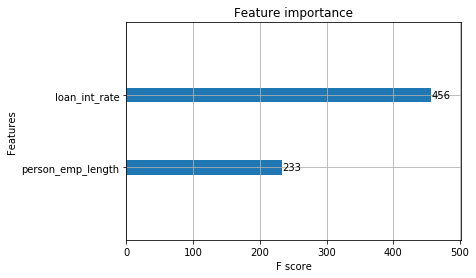

In [12]:
# Train a model on the X data with 2 columns
clf_gbt2 = xgb.XGBClassifier().fit(X2_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt2, importance_type = 'weight')
plt.show()

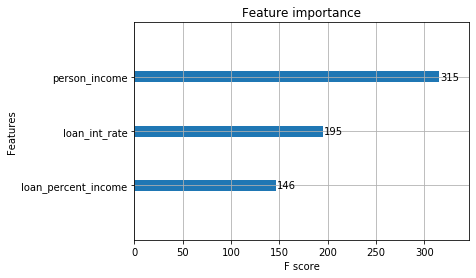

In [13]:
# Train a model on the X data with 3 columns
clf_gbt3 = xgb.XGBClassifier().fit(X3_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt3, importance_type = 'weight')
plt.show()

In [0]:
cols = ['person_income', 'loan_int_rate', 'loan_percent_income', 'loan_amnt', 'person_home_ownership_MORTGAGE']
X_test = cr_loan_prep.iloc[ind_test][cols]

In [0]:
X_train = cr_loan_prep.iloc[ind_train][cols]

####Column selection and model performance

The credit data, `cr_loan_prep` and the two training column sets `X` and `X2` have been loaded in the workspace. The models `gbt` and `gbt2` have already been trained.

In [0]:
from xgboost.sklearn import XGBClassifier

In [0]:
gbt = XGBClassifier().fit(X_train,np.ravel(y_train)) # ravel() function simply returns a flattened view of Numpy array
gbt2 = XGBClassifier().fit(X2_train,np.ravel(y_train))

In [0]:
from sklearn.metrics import classification_report

In [24]:
# Predict the loan_status using each model
gbt_preds = gbt.predict(X_test)
gbt2_preds = gbt2.predict(X2_test)

# Print the classification report of the first model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

# Print the classification report of the second model
print(classification_report(y_test, gbt2_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.90      0.95      0.92      9198
     Default       0.79      0.61      0.69      2586

    accuracy                           0.88     11784
   macro avg       0.84      0.78      0.81     11784
weighted avg       0.87      0.88      0.87     11784

              precision    recall  f1-score   support

 Non-Default       0.82      0.97      0.89      9198
     Default       0.68      0.26      0.38      2586

    accuracy                           0.81     11784
   macro avg       0.75      0.61      0.63     11784
weighted avg       0.79      0.81      0.78     11784



###Cross validation for credit models


In [0]:
y_train = cr_loan_prep.iloc[ind_train]['loan_status']
X_train = cr_loan_prep.iloc[ind_train].drop(['loan_status'], axis=1)

In [0]:
y_test = cr_loan_prep.iloc[ind_test]['loan_status']
X_test = cr_loan_prep.iloc[ind_test].drop(['loan_status'], axis=1)

In [0]:
import xgboost as xgb

In [0]:
params = {'eval_metric': 'auc', 'objective': 'binary:logistic', 'seed': 123}

In [31]:
# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.898182       0.001318       0.892519      0.004650
1        0.909256       0.002052       0.902780      0.005053
2        0.913621       0.002205       0.906834      0.004423
3        0.918600       0.001092       0.910779      0.005221
4        0.922251       0.001818       0.914193      0.004422


####Limits to cross-validation testing
You can specify very large numbers for both nfold and `num_boost_round` if you want to perform an extreme amount of cross-validation. 

In [0]:
cv_results_big = xgb.cv(params, DTrain, num_boost_round = 600, nfold=10,
            shuffle = True)

Here, `cv()` performed 600 iterations of cross-validation! The parameter shuffle tells the function to shuffle the records each time.

Have a look at this data to see what the AUC are, and check to see if they reach 1.0 using cross validation. You should also plot the test AUC score to see the progression.

In [40]:
# Print the first five rows of the CV results data frame
print(cv_results_big.head())

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.897568       0.000909       0.892900      0.008258
1        0.906985       0.002611       0.901162      0.007519
2        0.913678       0.001403       0.907910      0.007753
3        0.919123       0.000921       0.912130      0.007145
4        0.922864       0.001097       0.914962      0.006706


In [41]:
# Calculate the mean of the test AUC scores
print(np.mean(cv_results_big['test-auc-mean'])) #.round(2))
# print((cv_results_big['test-auc-mean']).mean().round(2))

0.9427635893333335


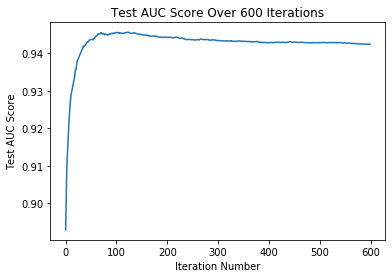

In [39]:
# Plot the test AUC scores for each iteration
plt.plot(cv_results_big['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

In [0]:
from sklearn.model_selection import cross_val_score

In [44]:
# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

[0.94095023 0.93369541 0.93186962 0.92462653]
Average accuracy: 0.93 (+/- 0.01)


###Class imbalance in loan data


####Undersampling training data


In [0]:
X_y_train = pd.concat([X_train.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()

In [46]:
count_nondefault

13798

In [47]:
count_default

3877

It's time to undersample the training set yourself with a few lines of code from `Pandas`. Once the undersampling is complete, you can check the value counts for `loan_status` to verify the results.

In [48]:
# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

1    3877
0    3877
Name: loan_status, dtype: int64


#### Undersampled tree performance

You've undersampled the training set and trained a model on the undersampled set.

The next crucial step is to compare the new model's performance to the original model. The original predictions are stored as `gbt_preds` and the new model's predictions stored as `gbt2_preds`.

- Print the `classification_report()` for both the old model and new model.

In [49]:
# Check the classification reports
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))
print(classification_report(y_test, gbt2_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.90      0.95      0.92      9198
     Default       0.79      0.61      0.69      2586

    accuracy                           0.88     11784
   macro avg       0.84      0.78      0.81     11784
weighted avg       0.87      0.88      0.87     11784

              precision    recall  f1-score   support

 Non-Default       0.82      0.97      0.89      9198
     Default       0.68      0.26      0.38      2586

    accuracy                           0.81     11784
   macro avg       0.75      0.61      0.63     11784
weighted avg       0.79      0.81      0.78     11784



- Print a `confusion_matrix()` of the old and new model predictions.

In [0]:
from sklearn.metrics import confusion_matrix, roc_auc_score

In [52]:
# Print the confusion matrix for both old and new models
print(confusion_matrix(y_test,gbt_preds))
print(confusion_matrix(y_test,gbt2_preds))

[[8782  416]
 [1018 1568]]
[[8880  318]
 [1913  673]]


- Print the `roc_auc_score` of the new model and old model.


In [55]:
# Print and compare the AUC scores of the old and new models
print(roc_auc_score(y_test, gbt_preds))
print(roc_auc_score(y_test, gbt2_preds))

0.7805573086855864
0.6128373766313568


## 4. Model Evaluation and Implementation
After developing and testing two powerful machine learning models, we use key performance metrics to compare them. Using advanced model selection techniques specifically for financial modeling, we will select one model. With that model, we will: develop a business strategy, estimate portfolio value, and minimize expected loss.

####Comparing model reports

You've used logistic regression models and gradient boosted trees. It's time to compare these two to see which model will be used to make the final predictions.

One of the easiest first steps for comparing different models' ability to predict the probability of default is to look at their metrics from the `classification_report()`.

In [59]:
X_test.shape

(11784, 5)

In [0]:
clf_gbt = XGBClassifier(max_depth=7, reg_lambda=1.2).fit(X_train, np.ravel(y_train))
clf_gbt_preds = clf_gbt.predict_proba(X_test)[:,1]
true_df = y_test
preds_df = pd.DataFrame(clf_gbt_preds, columns = ['prob_default'])
preds_df_gbt = pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1)

In [115]:
preds_df_gbt

,loan_status,prob_default
0,1,0.976501
1,1,0.981497
2,0,0.002850
3,0,0.003462
4,1,0.082270
...,...,...
11779,0,0.002818
11780,0,0.039251
11781,0,0.082529
11782,0,0.203997


In [0]:
clf_logistic = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs').fit(X_train, np.ravel(y_train))
clf_logistic_preds = clf_logistic.predict_proba(X_test)[:,1]
true_df = y_test
preds_df = pd.DataFrame(clf_logistic_preds, columns = ['prob_default'])
preds_df_lr = pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1)

In [88]:
preds_df_lr

,loan_status,prob_default
0,1,0.445779
1,1,0.223447
2,0,0.288558
3,0,0.169358
4,1,0.114182
...,...,...
11779,0,0.079626
11780,0,0.051979
11781,0,0.522450
11782,0,0.370478


The trained models `clf_logistic` and `clf_gbt` have been loaded into the workspace along with their predictions `preds_df_lr` and `preds_df_gbt`. A cutoff of `0.4` was used for each. The test set `y_test` is also available.

In [0]:
from sklearn.metrics import precision_recall_fscore_support, roc_curve

In [101]:
# Print the logistic regression classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df_lr['loan_status'], target_names=target_names))

# Print the gradient boosted tree classification report
print(classification_report(y_test, preds_df_gbt['loan_status'], target_names=target_names))

# Print the default F-1 scores for the logistic regression
print(precision_recall_fscore_support(y_test,preds_df_lr['loan_status'], average = 'macro')[2])

# Print the default F-1 scores for the gradient boosted tree
print(precision_recall_fscore_support(y_test,preds_df_gbt['loan_status'], average = 'macro')[2])

              precision    recall  f1-score   support

 Non-Default       1.00      1.00      1.00      9198
     Default       1.00      1.00      1.00      2586

    accuracy                           1.00     11784
   macro avg       1.00      1.00      1.00     11784
weighted avg       1.00      1.00      1.00     11784

              precision    recall  f1-score   support

 Non-Default       1.00      1.00      1.00      9198
     Default       1.00      1.00      1.00      2586

    accuracy                           1.00     11784
   macro avg       1.00      1.00      1.00     11784
weighted avg       1.00      1.00      1.00     11784

1.0
1.0


In [102]:
clf_logistic_preds

array([0.4457786 , 0.22344653, 0.28855826, ..., 0.52244951, 0.3704781 ,
       0.12378554])

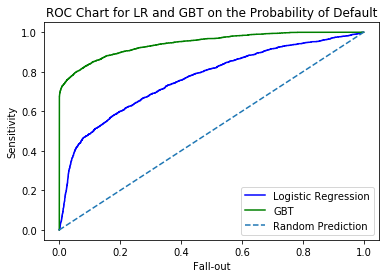

In [103]:
# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, clf_logistic_preds)
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, clf_gbt_preds)

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [104]:
# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, clf_logistic_preds))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, clf_gbt_preds))

Logistic Regression AUC Score: 0.76
Gradient Boosted Tree AUC Score: 0.94


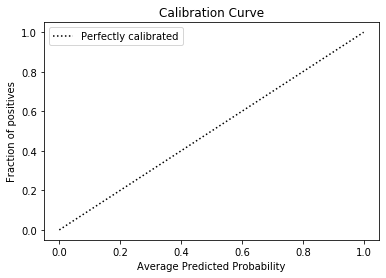

In [105]:
# Create the calibration curve plot with the guideline
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

In [0]:
mean_pred_val_lr = np.array([0.02111464, 0.07548788, 0.12582662, 0.17502903, 0.22449499,
       0.27491676, 0.32488847, 0.37486698, 0.42302912, 0.47397249,
       0.52304288, 0.57259508, 0.62200793, 0.67156702, 0.71909209,
       0.77024859])

In [0]:
frac_of_pos_lr = np.array([0.07886231, 0.06610942, 0.10835913, 0.13505074, 0.16063348,
       0.18333333, 0.21268657, 0.24099099, 0.48036649, 0.72677596,
       0.73354232, 0.70547945, 0.68      , 0.73913043, 0.55555556,
       0.4       ])

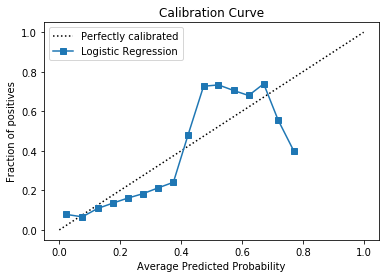

In [109]:
# Add the calibration curve for the logistic regression to the plot
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_pred_val_lr, frac_of_pos_lr,
         's-', label='%s' % 'Logistic Regression')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

In [0]:
mean_pred_val_gbt = np.array([0.01937249, 0.07211534, 0.12178284, 0.17298488, 0.22318428,
       0.2716055 , 0.32285183, 0.369344  , 0.42164062, 0.47158214,
       0.52230485, 0.57041398, 0.62149714, 0.67234764, 0.72826275,
       0.77567046, 0.82827961, 0.87636708, 0.92830987, 0.98579916])

In [0]:
frac_of_pos_gbt = np.array([0.01916168, 0.06385752, 0.12795793, 0.17460317, 0.21806854,
       0.32620321, 0.32653061, 0.33333333, 0.40677966, 0.43181818,
       0.6       , 0.42105263, 0.31578947, 0.6875    , 0.78571429,
       0.83333333, 0.90697674, 0.95238095, 0.98850575, 1.        ])

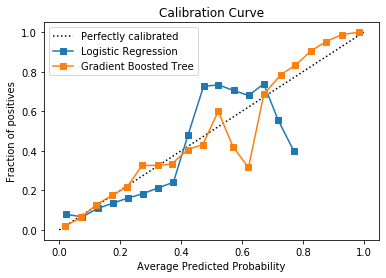

In [113]:
# Add the calibration curve for the gradient boosted tree
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_pred_val_lr, frac_of_pos_lr,
         's-', label='%s' % 'Logistic Regression')
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt,
         's-', label='%s' % 'Gradient Boosted Tree')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

###Credit acceptance rates


####Acceptance rates

Setting an acceptance rate and calculating the threshold for that rate can be used to set the percentage of new loans you want to accept.

In [120]:
preds_df_gbt[:3]

,loan_status,prob_default,pred_loan_status
0,1,0.976501,1
1,1,0.981497,1
2,0,0.002850,0


In [0]:
test_pred_df = preds_df_gbt

In [0]:
test_pred_df = test_pred_df.rename(columns = {'loan_status' : 'true_loan_status'})

In [117]:
# Check the statistics of the probabilities of default
print(test_pred_df['prob_default'].describe())

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(test_pred_df['prob_default'], 0.85)

# Apply acceptance rate threshold
test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the counts of loan status after the threshold
print(test_pred_df['pred_loan_status'].value_counts())

count    11784.000000
mean         0.217206
std          0.333197
min          0.000206
25%          0.022775
50%          0.066197
75%          0.178186
max          0.999745
Name: prob_default, dtype: float64
0    10016
1     1768
Name: pred_loan_status, dtype: int64


####Visualizing quantiles of acceptance


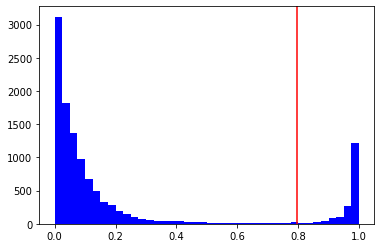

In [118]:
# Plot the predicted probabilities of default
plt.hist(clf_gbt_preds, color = 'blue', bins = 40)

# Calculate the threshold with quantile
threshold = np.quantile(clf_gbt_preds, 0.85)

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold, color = 'red')
plt.show()

####Bad rates

In [122]:
# Print the top 5 rows of the new data frame
print(test_pred_df.head())

# Create a subset of only accepted loans
accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]

# Calculate the bad rate
print(np.sum(accepted_loans['true_loan_status']) / accepted_loans['true_loan_status'].count())

   true_loan_status  prob_default  pred_loan_status
0                 1      0.976501                 1
1                 1      0.981497                 1
2                 0      0.002850                 0
3                 0      0.003462                 0
4                 1      0.082270                 0
0.0823682108626198


####Acceptance rate impact

Now, look at the `loan_amnt` of each loan to understand the impact on the portfolio for the acceptance rates. You can use cross tables with calculated values, like the average loan amount, of the new set of loans `X_test`. For this, you will multiply the number of each with an average `loan_amnt` value.

In [0]:
test_pred_df['loan_amnt'] = X_test['loan_amnt'] 

In [0]:
test_pred_df = test_pred_df.rename(columns = {'pred_loan_status' : 'pred_loan_status_15'})

When printing these values, try formatting them as currency so that the numbers look more realistic. After all, credit risk is all about money. This is accomplished with the following code:

```
pd.options.display.float_format = '${:,.2f}'.format
```


In [130]:
# Print the statistics of the loan amount column
print(test_pred_df['loan_amnt'].describe())

# Store the average loan amount
avg_loan = np.mean(test_pred_df['loan_amnt'])

# Set the formatting for currency, and print the cross tab
pd.options.display.float_format = '${:,.2f}'.format
print(pd.crosstab(test_pred_df['true_loan_status'],
                 test_pred_df['pred_loan_status_15']).apply(lambda x: x * avg_loan, axis = 0))

count     4680.000000
mean      8605.753205
std       5617.849438
min        500.000000
25%       4800.000000
50%       7200.000000
75%      10750.000000
max      35000.000000
Name: loan_amnt, dtype: float64
pred_loan_status_15              0              1
true_loan_status                                 
0                   $79,095,477.71     $60,240.27
1                    $7,099,746.39 $15,154,731.39


###Credit strategy and minimum expected loss


####Making the strategy table

Before you implement a strategy, you should first create a strategy table containing all the possible acceptance rates you wish to look at along with their associated bad rates and threshold values. This way, you can begin to see each part of your strategy and how it affects your portfolio.

In [0]:
accept_rates = [1.0,
 0.95,
 0.9,
 0.85,
 0.8,
 0.75,
 0.7,
 0.65,
 0.6,
 0.55,
 0.5,
 0.45,
 0.4,
 0.35,
 0.3,
 0.25,
 0.2,
 0.15,
 0.1,
 0.05]

In [0]:
thresholds = [1.0,
 0.992,
 0.976,
 0.804,
 0.254,
 0.178,
 0.138,
 0.111,
 0.093,
 0.078,
 0.066,
 0.055,
 0.045,
 0.037,
 0.03,
 0.022,
 0.015,
 0.008,
 0.004,
 0.002]

In [0]:
bad_rates = [0.219,
 0.179,
 0.132,
 0.083,
 0.061,
 0.052,
 0.043,
 0.036,
 0.03,
 0.027,
 0.023,
 0.02,
 0.017,
 0.014,
 0.01,
 0.008,
 0.005,
 0.001,
 0.0,
 0.0]

In [135]:
# Print accept rates
print(accept_rates)

[1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]


Populate the arrays `thresholds` and `bad_rates` using a `for` loop. Calculate the threshold `thresh`, and store it in thresholds. Then reassign the `loan_status` values using `thresh`. After that, Create `accepted_loans` where `loan_status` is 0.

In [0]:
# Populate the arrays for the strategy table with a for loop
for rate in accept_rates:
  	# Calculate the threshold for the acceptance rate
    thresh = np.quantile(preds_df_gbt['prob_default'], rate).round(3)
    # Add the threshold value to the list of thresholds
    thresholds.append(np.quantile(preds_df_gbt['prob_default'], rate).round(3))
    # Reassign the loan_status value using the threshold
    test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['true_loan_status']) / len(accepted_loans['true_loan_status'])).round(3))

- Create the strategy table as a data frame and call it `strat_df`.

In [152]:
# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates),
                        columns = ['Acceptance Rate','Threshold','Bad Rate'])

# Print the entire table
print(strat_df)

    Acceptance Rate  Threshold  Bad Rate
0             $1.00      $1.00     $0.22
1             $0.95      $0.99     $0.18
2             $0.90      $0.98     $0.13
3             $0.85      $0.80     $0.08
4             $0.80      $0.25     $0.06
5             $0.75      $0.18     $0.05
6             $0.70      $0.14     $0.04
7             $0.65      $0.11     $0.04
8             $0.60      $0.09     $0.03
9             $0.55      $0.08     $0.03
10            $0.50      $0.07     $0.02
11            $0.45      $0.06     $0.02
12            $0.40      $0.04     $0.02
13            $0.35      $0.04     $0.01
14            $0.30      $0.03     $0.01
15            $0.25      $0.02     $0.01
16            $0.20      $0.01     $0.01
17            $0.15      $0.01     $0.00
18            $0.10      $0.00     $0.00
19            $0.05      $0.00     $0.00


####Visualizing the strategy

Now you have the extended strategy table `strat_df`. The table is not so big that it's difficult to analyze, but visuals can help you see the overview all at once.

You should check at the distribution of each column with a box plot. If the distribution of `Acceptance Rate` looks the same as the `Bad Rate` column, that could be a problem. That means that the model's calibration is likely much worse than you thought.

You can also visualize the strategy curve with a line plot. The `Acceptance Rate` would be the independent variable with the `Bad Rate` as the dependent variable.

- Create a simple boxplot of the values within `strat_df` using the pandas boxplot method.

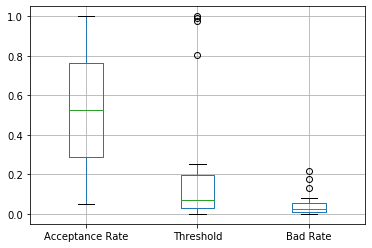

In [142]:
# Visualize the distributions in the strategy table with a boxplot
strat_df.boxplot()
plt.show()

- Create a line plot of the acceptance rates on the x-axis and bad rates on the y-axis with a `title()`, `xlabel()`, and `ylabel()`.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


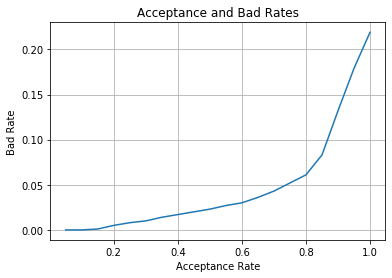

In [143]:
# Plot the strategy curve
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

####Estimated value profiling

The strategy table, `strat_df`, can be used to maximize the estimated portfolio value and minimize expected loss.


In [0]:
esti_val = np.array([61112391.49, 64977180.47, 70510056.35, 74837713.31, 74313895.38,
       70460210.8 , 67124170.79, 62999890.58, 57993623.06, 53066213.97,
       48209062.64, 43356460.11, 38134774.93, 32844857.91, 27542919.09,
       22182572.29, 16726548.01, 11320617.75,  5504417.28,  3870293.4 ])

In [0]:
strat_df['Estimated Value'] = esti_val

In [158]:
# Print the contents of the strategy df
print(strat_df)

    Acceptance Rate  Threshold  Bad Rate  Estimated Value
0             $1.00      $1.00     $0.22   $61,112,391.49
1             $0.95      $0.99     $0.18   $64,977,180.47
2             $0.90      $0.98     $0.13   $70,510,056.35
3             $0.85      $0.80     $0.08   $74,837,713.31
4             $0.80      $0.25     $0.06   $74,313,895.38
5             $0.75      $0.18     $0.05   $70,460,210.80
6             $0.70      $0.14     $0.04   $67,124,170.79
7             $0.65      $0.11     $0.04   $62,999,890.58
8             $0.60      $0.09     $0.03   $57,993,623.06
9             $0.55      $0.08     $0.03   $53,066,213.97
10            $0.50      $0.07     $0.02   $48,209,062.64
11            $0.45      $0.06     $0.02   $43,356,460.11
12            $0.40      $0.04     $0.02   $38,134,774.93
13            $0.35      $0.04     $0.01   $32,844,857.91
14            $0.30      $0.03     $0.01   $27,542,919.09
15            $0.25      $0.02     $0.01   $22,182,572.29
16            

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


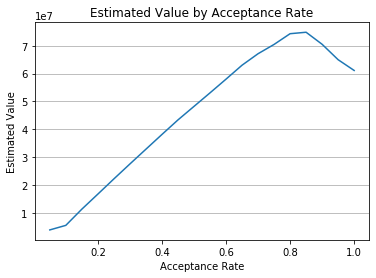

In [157]:
# Create a line plot of estimated value
plt.plot(strat_df['Acceptance Rate'],strat_df['Estimated Value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.axes().yaxis.grid()
plt.show()

In [159]:
# Print the row with the max estimated value
print(strat_df.loc[strat_df['Estimated Value'] == np.max(strat_df['Estimated Value'])])

   Acceptance Rate  Threshold  Bad Rate  Estimated Value
3            $0.85      $0.80     $0.08   $74,837,713.31


####Total expected loss

The data frame `test_pred_df` has the probability of default for each loan and that loan's value. Use these two values to calculate the expected loss for each loan.


In [0]:
test_pred_df['loss_given_default'] = 1.0

In [163]:
test_pred_df.columns

Index(['true_loan_status', 'prob_default', 'pred_loan_status_15', 'loan_amnt',
       'pred_loan_status', 'loss_given_default'],
      dtype='object')

In [164]:
# Print the first five rows of the data frame
print(test_pred_df.head())

# Calculate the bank's expected loss and assign it to a new column
test_pred_df['expected_loss'] = test_pred_df['prob_default'] * test_pred_df['loan_amnt'] * test_pred_df['loss_given_default']

# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(test_pred_df['expected_loss']),2)

# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))

   true_loan_status  prob_default  ...  pred_loan_status  loss_given_default
0                 1         $0.98  ...                 1               $1.00
1                 1         $0.98  ...                 1               $1.00
2                 0         $0.00  ...                 1               $1.00
3                 0         $0.00  ...                 1               $1.00
4                 1         $0.08  ...                 1               $1.00

[5 rows x 6 columns]
Total expected loss:  $8,887,325.60
